目标检测之Fast RCNN算法
===

# 1.RCNN的缺陷与Fast RCNN的改进

## 1.1.RCNN的缺陷
- RCNN一张图像内候选框之间大量重叠，提取特征操作冗余
- 由于提取特征操作冗余，所以训练时速度很慢
- RCNN中独立的分类器和回归器需要大量特征作为训练样本，所以训练时所需空间较大

## 1.2.Fast RCNN的改进
针对RCNN的问题，Fast RCNN从以下三个方面进行了改进：

### 1.2.1.测试时速度慢 
RCNN一张图像内候选框之间大量重叠，提取特征操作冗余。本文将整张图像归一化后直接送入深度网络。在邻接时，才加入候选框信息，在末尾的少数几层处理每个候选框。

### 1.2.2.训练时速度慢 
原因同上。在训练时，本文先将一张图像送入网络，紧接着送入从这幅图像上提取出的候选区域。这些候选区域的前几层特征不需要再重复计算。

### 1.2.3.训练所需空间大 
RCNN中独立的分类器和回归器需要大量特征作为训练样本。把类别判断和位置精调统一用深度网络实现，不再需要额外存储。

## 1.3.总结
RCNN主要是使用Selective Search算法计算出Proposal，然后送入SVM进行分类训练，然后送入一个CNN的回归网络进行bounding box的训练。而Fast RCNN仍然需要使用Selective Search算法计算出Proposal，只是它将后续的分类训练和回归训练合并到了一个CNN网络中，不在需要进行两步操作(ROI层)

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB5QAAAVOCAYAAAC9mgW5AAAACXBIWXMAAAsT%0AAAALEwEAmpwYAAAgAElEQVR4nOzdeXhU1f3H8fedmWwQIEDYFFEUUQMkNwRF%0AtAqCuOFSBUQUFNxR3OpWcUNbbKu2brhVBWzV/izuS90r1FqqLJkBiZVVEQFZ%0AAwTIMjP398e5w9xMJhsEwvJ5Pc88M3Puued+75086Mz3fs8BERERERERERER%0AERERERERERERERERERERERERERERERERERERERERERERERERERERERERERER%0AERERERERERERERERERERERERERERERERERERERERERERERERERERERERERER%0AERERERERERERERERERERERERERERERERERERERERERERERERERERERERERER%0AERERERERERERERERERERERERERERERERERERERER2VfZtv25bdvTGjsOERER%0AEZE9ma+xAxARERERERERERERERERkT2TEsoiIiIiIiIiIiIiIiIiIpKUEsoi%0AIiIiIiIiIiIiIiIiIpKUEsoiIiIiIiIiIiIiIiIiIpKUEsoiIiIiIiIiIiIi%0AIiIiIpKUEsoiIiIiIiIiIiIiIiIiIpKUEsoiIiIiIiIiIiIiIiIiIpKUEsoi%0AIiIiIiIiIiIiIiIiIpKUEsoiIiIiIiIiIiIiIiIiIpKUEsoiIiIiIiIiIiIi%0AIiIiIpKUEsoiIiIiIiIiIiIiIiIiIpKUEsoiIiIiIiIiIiK7RzawHlgKpHva%0ALeAjYAtwWiPEJdIQ2gDFwDONHYiIiIg0rEBjByAiIiIiIiIiIrKfSMUkkssT%0A2s8GTnFfjwS6AGnuewv4Dnh3dwQo+y0/MBvIA34P3OHZ1gtom9B/FTAnoc3C%0A/I132kUxioiIiIiIiIiIiIiIiOw+tm1/btv2tF14iAzgJqC/+74tsBlYDjR1%0A244GygCnhsc/PWMWAOFq+oWA43bZ2SRnAVPd4+8pSe/qrlEE+BYY3nih7bH8%0AQBBznf7haW8LbKXmv8mYA9y+n+7SSEVERGS305TXIiIiIiIiIiIiu0Zf4E+Y%0ARGvrhG3lwJXA15iqzpXANcAtwK8wieiYHz2vO2KSf8nkAl8AJ+9s4PUQwCRw%0AIZ4kb2zVXSMfcCTwCnD9bo1o7xJJ8j4M/Bl4zX2/BXM9ZxFPMv+EuYliAPEE%0AvgOM2S1Ri4iIyC6jhLKIiIiIiIiIiMiu8THwL6AJ8CCmejOW6Pwn8KynbwYw%0AH/gj8AhmmmEw1cvjPf3CnufjMVNjH41JJIP5ve+GBjyH2oSB+4G7gMd343Fr%0AkuwaHQm86ukzjsrrWEv1/MAbwFXAFZibIWJ/x7Gp2ddj/r7B/M2uxiSTAVJ2%0AT5giIiKyq2gNZRERERERERERkV0jiknAFQEXAi9gknFhTKL5F5j1arOBy4HP%0AgSeAPsAx7hhXAUurGX+jO94sTFXyt8ChQHdMsrQ0oX8X4ExMMvBHTLVptJqx%0A/cAvgUOAYkyV9WrgCEyicIHbzwFedPttTDKOhalY7e6OuQp4GyhJ0jfNHX8d%0Aptq1u3teFvBvYGY1sdYkdo2+Ay7CJJbzPOeYhrlmUWAhcCAwGKgAXko4p7bA%0AIKAVJmn6VTUxJZ7H6UCOe4yazqM+1yoW/5lu/CXusWYCaxL6NcPcoHCEu88K%0A4D33HOuqmfucmmTbz5jPvznwPfAhcB5wGvBBPY4hIiIiIiIiIiIiIiIisufY%0ADWsox7yKSbxOxyRnV1G5OtYCPqLyGrVlwClJxhrkbq8AunnafcTXwP2ayjMT%0A+oBnqLoO7grg4CTH6IVZ69nbNwxscl+vJz69tQ+THE+2ru7hmMR14nHDwM0J%0Afb3jvAM8nGS/J5PEmkx118jCJMYdzGfQFJM0j/W9n/h61hHA9uz3+yTxxNat%0Azq7mPD4kvr609/EaVWeOrM+1AjiD5Gtvf5YQy+vVxL0W6Ozp611D2bsWdmwN%0A5XcT3v/DHX8e8Wt5gGcbxD8HTS8uIiKyl9OU1yIiIiIiIiIiIrvW3Zjq0X9g%0AEndhzO9y12CmxS6lcvL4E0wybm4NY0aJT+0M0J945e0iKlce/xlT6QwwG5Nk%0ABOiASUB6pyTuDHwJZLrvP8VUs0K8SnUr8XV2LaCl+3qLZ5yDMcnWju77L4CX%0AgW2Ya/AwZtrpGO84ZxFPoq729LkSs050fXjXUm4BnOC+rnDPIValG8B8TqnE%0Aq32/d7c9A9zuvt4ITMEk7XHjWQhkJTmPU4Eh7uuVnjgGY6Y1j6nvtUoFnnaf%0ASzEJ+I8xNwGUJZx7vvt6AfB/mEptMGt6T6DumhBPGvupfp1lERERERERERER%0AERERkX3DbqxQjsnCJGN/xKyZvIR4xeg6zBrEHTFJyUWYKtLEdX5jVZ8RYARm%0AjeDJnnHKqFyV25l4JeuDnvZhnnG8yexXPe2XeNrbYabUjlX3xuKqrrL1Jc84%0AF3jaY9MiO5jEbSwR6x3HwSRuY8nfkzDJyrpWu3orlI9w23pjrmls/McS+sZi%0ATVx/2nv9QlT+PK737Pv7as5jBiZxD9CDeOV3sefc63utYpXADmZKdS/vlNQ+%0AN8YjE9q+omole00VyonV6rE+sar42N9DGypXM8eu7VhERERERERERERERERE%0A9jaNlFDeDCzHJBkvw1T/XoFZY7czpuI1F1iMWQu3F6bKtLU7hjcBmvjYjEkw%0Ae91F5emfUzBJx+aYqau9SdoWmESng0k6JnqQuiWUvWNPTzLOOZ6YYwlR7zib%0AqZwEbUM8qVmfhHIscbuFytfpO0/83r73Jhkrdv3CwLEJ2/yYKZ8dzE0C6Qnn%0AkTj1OMB9xD+PXHbsWnkTyt8DBUmvQvVin+Nq4lOX15ZQjrjbYzcVvIFZK3o5%0A5hofhEnal2Gq3tOA0W7fu6h6Y4SIiIjsRQKNHYCIiIiIiIiIiMh+wAdMxEwl%0AvRL4IzDc3Taohv1mus+3YqY+9tqE+X2vifv+acx01V6x6tgA8E0tMTYlXuH6%0AcpLtabXsH5NJPIH4epLtMzAVt5mYSu1EnwD/87y36njcZFp4Xm8F/oRJHEcT%0A+pVjpoROFLt+azHJY68IZt3o7phEvZ/4FNpgps1OPM5/EvbfkWu1EpO0PRMz%0AXfYsTJL8DuDNJGMcA1wH9MF8xu3d9ihVp65Oxg+8DZyHuSliBdAKk0Rv4/ZZ%0A5unfHzMVd8xv3Lb+dTiWiIiI7IGUUBYREREREREREdm1mmISj8e47zMwyeUj%0AMdWdKVSuZPUTr/YMuv0XJ4wZdsdb6W7LBn6FWU/33wn9wCQPHSqvKRwT8fSN%0Avd5W15NLwjtOYkK1LlJq71LnOC7GXJ/NmOra6vhI/ltp2PNcW/I1cXuy8RLb%0AduRaOZjk7svAULftCEzV8P8BF7lj+YGPgAGefVdjKrabUj+xpHfs5oU0zN9m%0Ac+JrUfd1j+vDJJiXe/aZVc/jiYiIyB5ECWUREREREREREZFd5xfAB5gK0xgL%0AmAMcjUkKdsNMVb3Js70Qs27xCVSuevVKc/cZAXyISSC+gZk6e4vbJ5YILMdM%0Aq720hlgDxBPOhyfZnpWkrbZxmteyfVebg6ne3VGx65fqPkoTtnt/X02sUK6N%0Anx2/VhXA+Zippu/DTC8NZg3mF4BPgWuIJ5P/iqlS3oip0r6pHnFC5ZsOwCSm%0Az/Fsb4r524pVLH+KmdJdRERE9gGJa3iIiIiIiIiIiIhIwxgAfIFJJq8FTsIk%0A9GJ8QBfMlMlfE6/M9WGSiBbxKaiTiSX5PgJedF+3Af7i6TPNfU4HTq4l3nWY%0A9XzBJCi9CeQBmGrfuvCOMzzJ9kHEp29eVccxd9TOFtQUus+tMTcHeKURT6oW%0AY5L2XsmSy7GK4ghmCu6dvVY/Apdi1tqOHT/Xfe7uPn+H+ew2Vt51e3K4LmJV%0A9LEbIxJ/V34M87f3FqYyeQTmRgkRERHZByihLCIiIiIiIiIismvEEoAzgUOA%0AIioniCsw68quxUxZ/JxnWyThuTZXu+OAmQ45lvx909M+EZPoi7Hc4x/ivi8D%0Aprivs4EFmHV9v8BUnNZVGfCK+7o78IBnWy9MhSzAz8D79Ri3MbyOWcPYBzyP%0AWbMY9/0LwIHu+6eomkA+G7P2dew32EHEr/+/gUXs2LXKxlS29/D0zSJeyRyb%0ArjyWMD4YyMd83kOBa932uibbI8Cp7vNiqq57PQZTjVyGqYqegvk7f4/6T60t%0AIiIiIiIiIiIiIiIismewbftz27an7cJDWJhEXkxbzFq+y4lPpQxm6msHk5Dr%0AgkkMBjEJaW8/MElJB5O8TKwAHeBuczBJxc5u+2medgdTqboFk3B0gFs8Y6Ri%0AqnKdJI9Yf29csVgd4F3POJnuecb2Lcas9xx7HwGGefpXNw7AAZhqXge4ntrV%0AdI0SnePpm1tNn+sT4l6BuX6xtm+IV5d7z8P7WXzveV+KWT87pr7X6gDM30qs%0Ar3fsLZhqajDJ7GSfX2Jsnan++sf+ZrdhKp2XYKqin3W3X+cZa5zb1hxY47aF%0AqPo3LCIiIiIiIiIiIiIiIrLn2w0J5UTVJZQBLgGOc1/HEnI1JZTLSJ4sfZp4%0Agu8VT3sPTMVxYkKxAhicMIYPkxyci1mD+A13//uIJ5RjlafeROSbCeM0Ad5O%0AcsyfMGtDe9U0TnNMgjWSJNZkartGXgWYROs2zHrE1TkX2EDl84hgqpRTPP28%0A57Eccw1jSeTYtetOVfW5Vs1J/ln+kNDXD/wtoc8SYCCVE9hjqf76H4i5Pm8n%0AxOADnvGM8XLC9lziSe/vMeuBi4iIiIiIiIiIiIiIiOw9GimhvJXkieJYAi5C%0APEm3noafMvhgoA+Qh6l0rSs/MM+Nax71W0qvjXu8XOCoeuy3p7Ew53A4pqo8%0AM0kfb2L2DbetK+YaVFcB7VWfa9XC7ZPjxlSdjpjPvLOnLc1tP7SWY6Rhpsnu%0A6GnzA7OJ/50+Wc2+/YhXRZdSc8JeREREREREREREREREZM+yh1UoH0x8auFt%0AmKmL792NscVkY9a+PYP4WrnNgb9TdWpjqaqmqbv3JRdjqtuH1dKvG2Za7km7%0APCIRERERERERERERERGRhtQICeW9QWcqr7W7jcpTJi/HJJglOW8l976cUBYR%0AEZH9SH2mphEREREREREREZF920bgK8z02xCvpC4FJmISzpsaIa69ySqgBFjd%0A2IGIiIiINASrsQMQERERERERERFpDLZtfw5Y0Wh0kGVZp4RCobcwlaViNAMC%0AQApKjoqIiIjst1ShLCIiIiIiIiIi+yvLcZwOPp/vf5ZlLUfJ5ESbgQ0omSwi%0AIiKyXws0dgAiIiIiIiIiIiK7mWXb9nCgr2VZOI7z+1AoNLOxgxIRERER2RMp%0AoSwiIiIiIiIiIvuN3NzcEyzLehA4Nta2ZcuW8Y0XkYiIiIjInk0JZRERERER%0AERER2efl5eV1syzr98CZCZsKFy1aVNYYMYmIiIiI7A2UUBYRERERERERkX1W%0Abm5uR5/Pdz9wCeDzbrMsa5njOJsaJzIRERERkb2DEsoiIiIiIiIiIrLP6dGj%0AR0u/3/9rx3GuB9KTdPkO+Hk3hyUiIiIistfx1d5FRERERERERERk79CvX790%0A27Zv8fv9i4HbLMtKlkx2LMsa7ThOdHfHt4O6AmVAIZBSS9/TAQcYk9Cegkms%0A1/ZI5mT3+H/Zgdhlz3cSEAamNnYgIiIismdSQllERERERERERPZ6Q4cO9du2%0AfcnGjRsXAA8BLavra1nWI4WFhTN2X3Q7rAtwOHADkApkAIcA+UBmNfvEfu/z%0AJp79wDxgWx0eYwELc/1iY6W5x6/2msperQnmb6S6GwpERERkP6eEsoiIiIiI%0AiIiI7M0s27bPWLRoUSEwxXGcg2rpv9Dn8929OwLbSX7gY2ABcI3bdoT7fg4w%0Ai9qrlb1WA5uADZ62MmAlsBRYhalSLQb6AesxyeXqFLj9nWoeFUBuPeLbm8US%0A9rFz/7CGvm2Bzex/10hERET2YlpDWURERERERERE9kp5eXnHWJb1B6Cf4zh1%0A2cVxHOfS2bNnb93FoTWUTcBW4K+Y5G0UaA8MxVQo+zGJybBnnzT32fu7XwQ4%0A0X3dHQhikpkHu+P8H3A1JlENMKgOsXV0j9/QLMwU300wU3zvLSKe1ycArYF1%0ASfoNo3J1eSRJHxEREZE9ihLKIiIiIiIiIiKyV7Ft+3BgAiaxWmeO4zwRCoX+%0AvWui2mW2AhMxicco0AFz3luBB4Cbqtnvj+7jBuBxt80PTHGfn8RULd8FHA28%0Ag6mA3lLHuMKe576Y5K93yuQosLGOY3m1AeZiZlbsDny3A2M0tibA+cDTCe1+%0A4LLdH46IiIjIzlFCWURERERERERE9gq5ubltfT7fvcSngK6PJY7jjGvomHaD%0AbMx0ysnEKoRLPW2xpG4Uk5St8Gy7ETNV9Rogdi1uwVQkHwr8CbhqB2LcSHwN%0A5pr4gHMx60BHgPeBhZ7trYAexCuvc9xnMFN9g6mqboKZqrs4YewumArnJcTP%0AOw1zblH3WAcCg93tLxFPetcWW32NompC+TDgqFr2awb0wiT3/cAK4D0qf45g%0AzusITBX0T8DpmOsVBf4NzNyBmBOPISIiIgIooSwiIiIiIiIiInuXU3Zwv8vm%0Azp1b1+rbPUkJpoo4NuV1a+BuTFL1dkwFstcvgTfd9ome9rOBP7ivPwSGYBKX%0AR2ESrmCqZ58Gyhv6JIBuwJdAC0/bI8CDmPPAje9yz/Y33OcNwEGYxPnnQGfg%0AVuBhT98OmMS7H+iJqXIGk2h9E3P9fuceKxVzLb/ETP9dl9jqKw+T4F7kabvM%0APXYyPmAqcF6SbeswVeRLPX0/wUyt/RFmTeYhCfu8jqmSjtYj5gHAV1Rdm9ty%0AYziTyjcviIiIyH7C19gBiIiIiIiIiIiI1MXcuXNXR6PRU4Cf67nrk8FgcNou%0ACGl3SMWc73JMVe4Ktz1WKNKUyr/xxapMvW0HYpKVsYrmkZipr8dikohlmCSy%0AH3ie6pOeyUSpfZrsgzEVsy3c47wELHO33YZJfAL8SOWq41XA98Bi4msNb3Kf%0AE5PeFW6bQ+V1iWPXI4BJxKdikvQ/uWPXNba6iGLWoy7HVBAP92xLBS5w+3xM%0A1bWT/UC++3qBO05suu/WmCneYyygpfv6VOLJ5JWePoMxSfH6aA4c48bhfdhA%0Ab3bNmtkiIiKyF1BCWURERERERERE9hpz585dGolEBlI58ViT7ysqKn69K2Pa%0AxVKBvwFvYSptX3DbyjBrF5cA/6Xm3/nWAHMwFbxvAr8HbsYklQdgpsk+FJMI%0AteoZXwCThH3fffwD+BSTqI2ZAGRgppfujEloHw58426/xY3/fnd7CaaiuJ/7%0A/mgapjI2ipn2uxnQCfM3VNfY6sKH+Sxi03NfRLza93j3mJuAV6manI0Aj2Iq%0Axo/AJKNzgK/d7V0S4vAmpP8LHOA+cjHXD+ASIKuOsYOp0u6KqfBOfPSm7utr%0Ai4iIyD5GCWUREREREREREdmrzJs3bx5m+t3a1uzFsqzL58+fX1Jbvz1QbO3g%0AMszavoMw0zcPx5x3LHn5EybhOqqGscqBPphk43nAHZiK3FFuG+44Pd2xEqtn%0Aa+LDJEvPcB+nAycRr6Bt7raDma56BSaBXY5JrIJZtzjDfd3EM3ZaPeKoi/uB%0Axzzv6xtbXWzC3AAAZs3kHu7ry9znf2IqrhNFgceB/yW0Ta8ljpmY6x+rTp6H%0AWQsbTPV6p3rEvgazbnRhkkdRPcYRERGRfYzWUBaRfZHPtu0ZQCu/399n9uzZ%0Aa70bbdt+CHOH8ZXBYPC5mgbKz89vEwgEdmhKp0AgsHHGjBm1/rghIiIiIiIi%0A9RcMBr+0bXuy4zhXW5aVtGjCsqxnCwsLP9vdsTWADGAYpuJ0C2bK4wimareT%0Au93CJJvHYqqO7wdeofpksEU8QVsKtHdf+z3bvsUkMevzPTiCWWv4J09bCvFp%0AozMxSVow6zs7VBX1xB1OGLuhlGOmkfaqb2x1keoe537Mb68jMUniM92xnqHm%0AIp9jgOswNwA0Jf45VRfHT1RdJ/k/ntf1iV2/FYuIiEhS+p8EEdnn9OjR4xDM%0A+j4+x3GygEoJZcdxUi2r9hm8hg4d6l+4cOEXFRUVR+xIHBUVFTdhpqvy8uXl%0A5Z2MmUar3LKsn6PR6Ny5c+cu35FjuDHOBvIcx/l9KBS6Y0fGERERERER2dvk%0A5+ff4ziO5fP5RjmO85fE7ZZl/ZiamnpbY8TWAFoBkz3vn6+mnx94FwgBeZj1%0AfpdV0/cM4L0k7Q+7DzAVqp2oXxLSAV4kvt5vorBnvHKSr88cTtLW0HxU/S10%0AV8SWAvyAmTI7DzgbM914C8xa2P8BTkiynx/4CDMFecxqzA0FTWs4XrLfd/Wb%0Ar4iIiDQo/c+FiOxz/H7/1UCqZVlzIpHIM7ZtH03lu3VjXxCfsG37QU+7BazI%0AysrqOW3atNjaTLHn1VT+Qp2G+YJfBqxPCKEF0MSyrEp3COfl5f3Csqy3MHeW%0Ab+fz+bBt+7VgMDi0fmdamWVZeTuzf10OMXTo+KZTp45POlWcbduDMD9OhH0+%0AX8GcOXPm7uJ4RERERERkP2Xb9sRoNLouFApdA5CXl5dtWdafvH2i0ejlX331%0A1abGiXCnrQeuJP79Neq2/Qazvm8E87texH3ci1lj+R7g+mrGjH1HjX3PTSFe%0AibwRU6n7oztefWfqquk3xoBnvBcx59UQKhLee8+nrnZFbD7MNXwZk1A+FIjd%0A8PAmJkGcLM5riCeT/4qpUt6Imb76pp2IZ4dmXRMRERHxUkJZRPYpBQUFTSKR%0AyOXu28csy7oIsyZSMmlUXY+pfP369YlftsLRaPTEuXPnbr/bOj8/f4DjOJ8C%0A/wgGg+d5O/fs2fO0aDT6gbctPz//YMdxPia+3tECzF3OR2C+3LWo4ynWZKem%0AAhvVb3x6JGNL7/S09BNS0lL6p6altC7ZtOXgaMRJC0fCKU4Uf3Zm6vLzT7mm%0ATVp66vpWzdssLCut+Gbblm3fOFj/Da34wHIrv2sv/xYREREREdlBtm3/HZge%0ACoWejLWFQqFHbNtug1kbGMdxXgiFQh83VowNYBvgXaLJB7yASSaD+R7prZz9%0AB/Cs26dtNWN+QOXva49hks/XARMT+qbsUNTJrQWWY2I/HZO4Lq1xD8Oi8nrK%0AiU4EnnZf+zHTTGdQv4riHY2tLl4B7iP+O0CYyp9pou7u83fAxUm2V3deiYl1%0AgNgN6xFga81hioiIiNROCWUR2adEo9HLgJbAmtTU1Le++uqrKtOe2bb9InCx%0AZVk3FBYWPu7dVlBQ0CIYDG7ZmRgikYiTZErt64l/sR0SDAbfBujWrVtqamrq%0A2Zh1sXa74WfdnN0skHmzP2Cdv3Vr6cGdD+tUfkT3QzIOO+IgDj60A76An9TU%0AFNLSUklJDTD/2cEdRxUuo/mg33UYc3L7Dmt/3nDiyuVrSr/75vvS/MAZrNj4%0A3axtpZtmbY1s+LYxzkdERERERPZttm1PA54MBoNTE7cFg8E73aTy6YFA4Obd%0AHtyuMwhTPdsa2IRJNr5I5d/1KoCrPf3rI9nNyYsxSe1t9RwrmXLgScySUB2B%0AjzHrFcdm+2oL9HTbo8Srhv3AcGCmZywf8TWP8zAzh2UCUzFrD+/q2OpjJTCL%0A+PTWi4FgDf1jCeODgXy37xDgWre9ut9xzwZuBf7oxjgIGOFu+zewqJ5xi4iI%0AiFShhLKI7DPc6uR7ACzLeuKrr77aVFBQkBKJRB4kfod2GXAsgOM4F9m2bWOq%0AlC3LstYBv0oytGVZVr/8/Px2kUgk4PP5SjFfMAEOzMvL+4XjOKlux3LLsqqs%0AhRSNRgNuknlVMBh8N9Y+f/78cuC16s6pZ8+eXaLR6JmWZfmj0eiPoVDoNer5%0AJTbZGCNPv+OEVq0z799aUtr75LOPDRzzix7+Aw9uB6XFGQu++5ZVG9excMk2%0AMlo0p90BnchMDbOlpJiV7mrUWU1SOTyvI51L25OReUJ603TSN6z5mWmfBQsK%0AvyrqumzhmquOveCXL638+ftnlxbPKSkvL188f/78KlNl5+bmdgwEAs2i0ejK%0AYDBY3JDnLSIiIiIi+xbbtudblnVNYWHh9Gq6OFlZWWPWrVt3VDAY3Lhbg2t4%0AqZhE4f3AUW5bCOjnvk6sUPaqa4Vumft8JHABpkK3H2ZN5rFUrg7eqRmxgKcw%0A6zsfh0mwrgE2Y84jEygB2mOmg17vPmdgpnoe4fYvwFQPz8LM9nUUsK4Ox/b+%0A/pls+uf6xFaTxLGjmIrx2G8Ez1Pz99rv3ed0zJrLiVOPtwM2ADlUXifbDzyI%0A+Vv5GZOQBvP5jq0l5pjYuSWrdhYRERFRQllE9h1u4jgbIBqNbgAIh8NtLcu6%0Ahvi6U17H4LmD2XGcDRUVFb+m6hcov2VZzziOg8/ni/XdPoZlWV8kqUiuxLKs%0A2B3UB9i2fXMwGHyoltPx5efnPxWNRq+KHc+yLGzbXmlZVp/CwsIfatm/2jGO%0ALugdadcxs+zc4ac3OeYXPdyuYYJvP8QVE/5edZSsy/nkjQIu6z9m+zfWZVNv%0AZqBbDzDyqU+4vlcWqSve4oE/PW9Bp+ZPffYaztx5I2689ZoRjuNYGamZ04CT%0AvMMWFBS0iEQi30aj0UzM3dQPN9B5i4iIiIjIvsWybXu1ZVl9CwsLi2rqOG3a%0AtDAwbzfFtSvdAkxwX4cx35mewSRZu2K+43rX/7Uw01SXE086e/kwlauHY6pf%0AOwO57rbrqbzuco773AKTUC329E2WkK3Lzb8VmMTq74Cbqbr00zw3djBJ4/OB%0A9zHn24bKv2Fe7caY72mbiUmKzwKaJhx7OSY5G8YkZHcmtuo4xKuavcn3F4FX%0APeeVyHvt/oSphr7Afe8HlgJXAZOBAzHJ5kHEp/oG+Mk9dg9M4htMYvlk4H+e%0AfmdgKrETf/OowPxNAQwE5ieJMyYF+JDq1+kWERGRfZQSyiKyT8jPzz/dcZzY%0ANFD43Myv4zgVlmWVA8sdxzk7Go36AoHAnY7jDAP+blnWfZFIJN3n800FmrZq%0A1aq6u66DwELLsvzuuB0xyeifLZ+pWu8AACAASURBVMv60tvRs83b9n+WZV2J%0A+RL/YH5+/gnl5eWj5s+fv54k8vLy/uw4zmXu29mO43xvWdZgoIPjOJ8VFBQc%0ANXv27BrvHPaOYWGFspq2PWjDlp9bVUTK/J9yRJN7tyeTYdazlzHmhfjvMn2H%0AjuTwtE2E/vU2M9u1Jj3QnPycHFhRxDK3jjin79GwdAsHNHeX1kqJ5ewzSbEs%0A7ONzracuOYwrXijCsSJ9Lx98x6ytm8uveuXjP84GiEajw4FMx3FKI5HIqw11%0A3iIiIiIisu/o3r17u0AgsNLv97edPXv22saOZzf6IyYB+G9gPCa5uAaT4I1Z%0AiKksTQW+Ib6+coz3xuoOwJskTwivAuYCXwL/wSRl/cBXmEpgr7me1+9TeU3m%0A2kSB24F7MFXRAUz17zKqTq39OeZce7jbNhBPyJZgEq9dMUniVOKJ01ZJjjub%0A2n8DrU9s1e3ft5ptyRLJya5dBDPF963AQZjPZam77TBMYj0VWELlz/Fr4DzM%0A9diA+ay9n1PM+VT9G0mUSfyGgup8U8t2ERER2QcpoSwie738/Pw2juMkKa3d%0Azg+EQqHQfADbtmOFtp+4d7f7bNveTNW7mGPKgXODweD3sQbbtvthvuD+p7Cw%0AcLC3s2fbdqFQ6HPbth8FbgRwHOeslJSU1bZt/yEYDN6N567k3NzczpZljXTf%0APhQMBm8DyMvLG2ZZ1v8BncPh8EmYNZyS8o7RpkXHrw9plZ9/xc1DUzr7/sXA%0Aa56HmROZtmoQp7UPwNp/8bvtyeSjefydx+nT3v3Pw/V3bR/zrikvsuCVa7jo%0A0ZnkjJnCi6O7VXf47bqfcR68UEQkGrYOGjK4IC1U+E5Wy/umrol+c/PChQuv%0ABvD5fNNDodCPDXHeIiIiIiKy7+jRo0cPv9//STAY9DV2LI2gDPiF570f+AyT%0A7Ixgkpzj3G0R4lMdx75bfgv81bP/auB19/VcTNXtN5hplpNVGFuYqt8W7rFS%0AgB+AiTt+StuVYabvrk20ln4LGiCWRHWNbVda7j68ypK0xbh3eW+/Hmuq6Xcz%0A8IedCw3QmswiIiL7JSWURWSvt3nz5k2ZmZlbgH9hpma6NUm3tj169IiV5Nru%0A8xE9e/bMBVKi0eiBVL8mlC8ajabtbJzBYPCmvLy8eZZlPY25q9gPjLNte0Q4%0AHD7mm2+++RnAsqyL3O1hx3FeLCgoSCktLbXS09M/KCsr2wC09Pl8R1JDYjU+%0AhsWgU8/pee0NIwJhAgRI4xSe52OK+WFlCbTLYsmXH22fynrko/fTp13ATNaV%0AREVsha2yiqp9nITXDgQ69uXyTr/l+WXw+bdr+OS+UQe89bd/XvnWa+svgIXt%0AgKjjOI831HmLiIiIiMi+ITc3t7/f73+0sLCwfe299wsR4Jc1bDuhmm0xFcCw%0AehzPAUbW2ksaU7Jq85qso25rTouIiIhUoYSyiOz1Fi1aVJaXlze8ZcuWM4qL%0Aix/wbvP7/QF3vePj/X5/4pRPt0Sj0Vs879esX78+2Rcyy7KsK2zbXm5Zlj8a%0AjZYBZ7kbuuTn519HfCqxcsdx+lQXaygUmpSbm/uqz+d7FrjIbe4UCARm9evX%0A7/Bp06aVWpbVwW0PWJb1TSQSISUlhbKysmpGrapZRuv+JaXrAYcpf38yMOXv%0AT1bp4+Z82bY+dpPz0ZyYn11dLjnp/l6Jt7Sb7VkMHHkKz0/4mOJ33iB488mc%0AM7x/RtMfn8sYtxwC/pSSzGZN/wnQEOctIiIiIiJ7v/z8/AuAKwoLC3Nr7Syy%0A/1oFHIKpPhcRERHZpZRQFpF9QigU+hwgLy/Pb1nxZYg2b968LjMz83/ACmAr%0AZiqoX2IqYz/3+XwbARzHsSzL2pCSklIe27eoqCgjEAi0syzLb1nWzW4/vOM7%0AjtMDeLw+sc6dO3cLMCI/P/9Rx3Fi60J13Lhx4/nAXxzHCbvHiGLyslWS3I7j%0AVFdNzXXDfnvf6tIFfb77YT2QRRbFFCfpF19MKzbT90zWlgDp9Tmb2nU+8Uw6%0ATfiYZczkvS/XkjdgE5+/bmbIyu9xbHpaebu3pzHt1J09bxERERER2fvl5+df%0AH41G+4RCoQGNHYvIHiwCDGzsIERERGT/oYSyiOzTMjMzLwbyLctaXlhYeP7Q%0AoUP9CxcuDAJdLcu6vLCw8Pvq9vX7/U0sy2oBlFiWNd6zqdxxnJ7AKGCBZVkT%0AqVyhfBJwbm2xFRYWzrJtuz8wA/BHo9FewF8sy0oHcByn3HGcnLlz5y6t6/mO%0AvfC3k/KPPeq8HhSlXzEJ4GgmTp9A12qTxA4VZVvc1zm0SK9rfbLZt/r3ntdZ%0ANiP7woTp8PZH/+bCFqv4BIC+3PDYQ6mb5nxzYjQanfWf/70xG3bsvEVERERE%0AZO9n2/Zvo9Fos1AoNLyxYxERERERkTgllEVkXxfEJHnPsm374+++++4qn893%0AGLAxGo2uqWXfppgq2WWFhYWP4JnV2bbtfpiE8vzCwsInvDvZtj2POiSUAaLR%0A6A8+n68cyLAsKwxgWdY0x3GutCwr3bKsk4Hn6jJW8ybZvQee2Sfj9MEnZBbP%0AWgqTioBP+HLJHXTNyax2v4MLerp9i5j8zgJ6Xdi11mOVlG+tS0iudPqeP4IJ%0A01+C6RMYNt20dhoxzCS6j+uenp6elrfq3qUdl6wupL7nLSIiIiIiez/btp8F%0AloVCobsaOxYREREREanM19gBiIjsSsFgcCbQH3c6KJ/PtwTIAArdqaerZVnW%0ARZjK4yKqLhEcmyc6JXE/x3HSvO+HDh3qt217el5e3vM9e/bs4m33+XyT3HiI%0ARqOfA7Ro0eJNYK3bbWJeXt4Ib1i5ubn9bds+JPG4bdq2zj598AmZAFm9zuUc%0At/3p0bfzYdFaT88wqxYU8WNJmMS+Mx8bweMfLiDsvi8t/pFZs+LvY9XMy977%0AJ0vD1FmWfRp9E9pGnmtvf9295+GB+x+8o43flxK7znU+bxERERER2bvZtv0m%0AMDsYDE5o7FhERERERKQqJZRFZJ8XDAa/jEaj3RKau+Xn5x9Q3T4FBQUplmVd%0ADKZiuD7H8/l8yUp821mWdVk0Gl1o2/Zm27bnL1y4cCswyN2+JCUl5UOAadOm%0Alfp8vpFue6plWX+1bXujbdtbbNuu8Pl8nwFDYgOnBtLbA6T1vyW+uDMHccPk%0A29zXM7ln9BmcMnQIp5w6hFN6H8fZI0fx5v9Ktve9dvKN2/d86d4RHNf7FIac%0AegonnjqYa64dR9Dt2q7L4eZF8dsMO34Io4YO4ZUid+P21aehIvHsA10ZNqJT%0A/H2nMfTtWHmSjK5HHeKbfN/o2H+Xaj1vERERERHZ+9m2/SXwYjAY/HNjxyIi%0AIiIiIskpoSwi+6RoNBqrdLXy8vKO8fv9TyV0OdBxnJ9s256Xl5d3e48ePXp0%0A69Yttg4y4XD4POBwYGtKSsrLtR0vNze3Z15e3tj8/PyLHce5wbtt6tSpDrDQ%0A05QJ5BBfd/m1aDSaO3v27O152Dlz5nwYiURyPfs1B5pgpuAOW5a1FKBl5KjT%0A0tMysgGoVBcNmTlD+NfbTzE0JwuA4mXLKC5eRjEAORzcKr6wclbOhfzzbw8z%0AcHvOt5hlxcXutt60dnO/7QfcwP1Dc9w+yyhatozN5aZUOT27A+ZIB9I8yZrN%0A9qCR7nY45+rTt7/2OvKUy7n+ytsiaYGMWLY76XmLiIiIiMjez7bthcCtwWDw%0ArcaORUREREREqmfV3kVEZO/hrrt1peM4V/t8vlMcxznPu91xnNcty3rEsqz7%0AHcfpn2SIMr/ff3QkEpkKHOE4zjOhUGhMkuP8EngT+DwYDPa3bftt4GxvH8uy%0AhhQWFr4ee9+tW7fU1NTUoyzL6gAQjUb9qamp//3666/X1XRO+fn5BwMHAFuB%0ANYWFhSsAhp91c3ZTX8ayp/5+T0Zt16WkeC0bSraREsggPTOTrMwkGV9X8apV%0AhNPTIQyZWVmkB6r2KS1eSwkBCENWdhZJuuyUh+6eXPrd4nm/nrfky69JOG8R%0AERGRxjB27Nh7GzsG2fdNnDjxvsaOYXfo1q1bakpKymqfz9drzpw5ixozFtu2%0APwesYDDYrzHjEBERERHZkzV0DkBEpFFZllXoOA6WZZU5jvMZcB6wEvgceCgU%0ACgXdrgPy8/PbAMPdpHMPoBWwqaKiYonP57sAeM6yrDuSHScajf7H5/P9MhqN%0A/uge9/fASsdxwo7jRP1+/z/mzJnzoXef+fPnlwMh91FnhYWFPwA/JLa3b9nm%0A/V//7rJak8kAmVnZZCYrCU4iq337WvukZ2VTfUp6591y/6j0y865+5HCwsIM%0AoGwXHkpERESkVmPHjr338MMPH3/YYYc1diiyD1u8eDHXX3+99fjjj49v7Fh2%0Apdzc3I4+n2+x3+9vO3v27I2NHY+IiIiIiNROCWUR2acUFhY+069fvynTpk0r%0AB5w+ffpMnjFjxrZq+q4BHncfFBQUpJSWllpu4jcIHF3dcebOnbsaeNsz1gxg%0ABsDQfuMz/SlbjzzyjJMObu2Ur3rigycaPCF65Xn3jM8/9qhuLbNbNPTQewTL%0Asrj+zhFW86ymXzz16r0nAqWNHZOIiIjs3w477DBOPfXUxg5D9mEfffQRixcv%0Abuwwdqnc3NyePp/v7WAwmFZ7bxERERER2VMooSwi+5xp06ZtTz5Wl0xOxruG%0AcX1deOptxzRtmnatz+cfULattG03+4hVSxf+1Hpjydb00WeNq0hNDawPpKb+%0AZ9OmTa/89f0H39jR4wBcPOCO1uFw5PYLLjt9VxYJNzq795EcOy+v67oNN1z6%0A6sePPQfs8OcjIiIiIiKNq2fPnqc5jjOhsLDwoMaORURERERE6kcJZRGRnXTd%0AhRP+mZ6Rmn/ymX1a5PU6wmrVpgXA9h9JtpZsS9tYvKXDqp/WDP7Xx7PPuDh6%0Ae2pm86bvlRZvuXfSR3+o1/TXAE1apf/tkqvPTsVpyLPYM51y9vEtpn8887fA%0Aq0AxEGnkkEREREREdplIJOIHvNW7YfaB/wfOz88fGYlELgyFQgWNHYuIiIiI%0AiNSfEsoiIjvo1tEPD1+5YvUrl95wHt3yql9Pr0lmBk0yM+jQMZv83kdlhMMR%0Avv5i7jkfv/Of464eMv4fz7w2flRdj3nhqeNOOiq3c07B8d18DXEOe7pWbVrQ%0Ao+CI1GFbxl746qcT/wJojTURERFpNI6zH9zRJ43GcRwqKirSgGae5i1AnWdd%0A2hPl5+ffHI1G80Kh0OmNHUsywWDwpMaOQURERERkT6eEsojIDrjtyocfzmrZ%0AbMxvn74eoF7Fwv6Anz4n5dPnpPw2n7333+Fbt2wbEUhLGzbprftfr23fllnp%0Av+nTzz5wf/opc8jFpzT9ZvbCe4C/ARns5T+oiYiIiIjsL2zb/kM0GvWHQqGL%0AGzsWERERERHZcftFhZuISEO6YeQDfz6y+2Fjb75vdJOdHWvAmcemPj11vL/3%0AcTlPjr3gN3fX1PeCU351UDRKz7yjj9zZw+5V2rRvxVF5ndMH9x8zBGiC/tsl%0AIiIiIrLHs217MrAuFArd0tixiIiIiIjIzlGFsojsFS479aZW5U7q8b4UKzc9%0AI72Pj2hOWXm0td9vORZW1LGccGpq4IeK8sgH20q2vv/Xjx/+alfEcc35999y%0AVO6hQy+6clBa7b3rJhDwM+r689r99Zl3f3Wd/zcHPvHy3Vcn69euXau7+53W%0AJ72hjrs3GXzxaZnffbP0XuA1TFK5pJFDEhERERGRati2/R7wWjAYnNLYsYiI%0AiIiIyM5TQllE9ljjx4/3Lf667KKmTdPGpKamHH7oAa1TDulyYOZBnTv4D+rc%0AnqaZGUSjDtFolGjEYd2a4jZFocW95s1acOuoQXf4m2ZmfL1la+lTU9594JWG%0AiGf0WXf0bdGq2bjR152X1RDjJRp59VlZTjRyyZ0tHvt+wlM3/D5x++aN2y7p%0Ad9rR1q449p6uQ8dsOhzUtslpfS4+4cMZf/kC2ApEGzsuERERERGpzLbtr4H7%0AgsHg+40di4iIiIiINAwllEVkj3PxgDtaN2/T5HeLZmy+vNdx3bb84uSCzB4F%0AXWvdr037lhzZozPnjTg5vay0nG/nLjk+NPPb7gH/3Y9FIpE7Jr/7wPM7GtOo%0AfuOz2rZrNmn8o9e23NEx6uLia36Z/sSEl++6fuSE9Y//9c4/x9ovO/eeS3J7%0AdqFJ0/2yQBmAEwb2ar7ix59HAV+gKmURERERkT2ObdvfA0ODweDMxo5FRERE%0AREQajtahFJE9iXXV4PETUzL9y4dceuroF97+jTXm9gsyexQcDjj1eqSlp2Af%0AcwSXXPvLFvc/Pja757E5j1x+zl3rLz/37ot3JLCMNrxw6rnHH1zfOHbkcd2d%0AFzYtLw0/cdnQm7psvzBWxbj/vv6n1N7nP8TypPut5OHTjqH3+Q+xpJbxi5f+%0Ah8/+u7jmOMKLmXDaMZx69weUNsA5Fb1yJ72PPYVXijZDyY/8652pvPbZd/Ua%0Ao0eb+cxc8t7Z3bt3vwtIB/w78lmKiIiIiEjDys3NbWrb9lbLsvoqmSwiIiIi%0Asu9RhbKI7BGuGDz+6m0lW5869bzjKgYN7ptatUcpyxf+j1XrwhAI0KRFNm07%0AZJOdWXvFbuu2WVx589DMDes28dGbXz6Slv6bYU/+7e5BdY3totNvzklJTTn5%0A+AH5O53ALCmawoBLnwZyePbTydiZyfvd88erU++9ceIsoN1Fp99x2ObIyvbf%0AASybz/uvvEIzt195STndzxtF95/eZmoxUDyVPz7cjNy0cspjg5VB3uArOLFz%0AOpQGuWL4jSwDci56iKevO5GkV7B0E4uKofi7VZRC8j71Ub4BKKacdAis4okH%0AHmIZnTiwYCp96jiBeHpKxDynNj0J+C2QQUKVsm3bt1iWVVZYWPjEzoYsIiIi%0AIiK1y83N7ezz+eZlZGS0njFjxrbGjkdERERERBqeEsoi0uiuOf/+D3oed9Qx%0AI68+2wKqJJNLln7G/WPGMb246r69rp7Mk6Ny6nSclq2bc8Hlp7c6pMsBA7dt%0A2bYpGvUVTHnvtwtr26950+bPXXzN2c3rdJAG0rptFqOvP69pSmrgxXXFa4sX%0A//SNe/wiJj1eVKnvpT2P4ZunJm1/P+u1ScxKHLDfSJNQTrf5w4QRDL/zJYpe%0AvpVzNt/H6+NOo0peO7MJTQAyU2tMJpesWsCin8OkptTQKQUWrVgNwE9FM1nS%0AvDWDcuDpomX8+fl3aHHGkbQ9tCvZ2w9Uwmt3j+bVnzIrxbWiyJx3OFqWm5eX%0ANw+wLMuKAn6fz3e84zh9Hcd5yHGcSM+ePafPmTNnbg1RiYiIiIjITsrNze3t%0A8/n+FgwGq7lVVkRERERE9gVKKItIoxl5yrjugTT+c8Hlp6f3PjE3eUqyeBbX%0ADR9HLIWac8JADuQnZn5RRDGwenN50t1qcmy/vJQcu0vK78c999Vvbn386Lsf%0Aun5xdX1HnHL7cV1yOh1SlzWcG1rBsTmBqVM+OH3Z+lCTcDhMzkUP8cQVXXnn%0A7kt47Itici59kqcvPYRpj97KvUVArzG8P3EEy6eM46pnpkOvW3n/4TMJlJaS%0AnhkvAz50wHV8lN2aU696jOJ37uX2Q1owjC/5+PsyMgBIgxVTTVJ6xZv89oGl%0AbjvANmh2EjdcN4BMYNHU67jq5SSZ/mq88/CNvON5X/TaBEa/BlmXPstHV9pu%0AazotMzaxrGhZteNYltXe+z4ajX4EHOy+fULJZBERERGRXSs3N/csn893ZzAY%0APLSxYxERERERkV1LCWURaRRXDb1vYHabFi/edM/FzZq1aGqWyU2i6P3JbjI5%0AhwdeeYIBnd0b38OlLJ//JXO2Zle7b02at2jKA0/e2PK+m56eee3w+4Y9+bd7%0AP0nar2XTK47qcegBO3KMpJyE17WMO/w0mn8e3ATkMKigOcsWr6dz7y7wxSyK%0A1nzPksWw8FNzhXr1O4LVwQWkdrWB6TAryCb/EA5tkV7l2Fm5F/LRMzDs10u5%0A+dwezLn2Rj4pqnJ4KF7GJ+8kJnbbce3YAQBkF1zBUNbRLMkk5V4/fvUGnxQV%0AQ9ZAxgw7iDLvfQDl5TQ70vs5Bhhwx0dMv6mUQMD9z1QgQEloCqde/TTtWncM%0Ap5W3Gf3FN2/9a8OGDZts254AXANgWdakwsLCm2qORkRERKT+HMfBcRrqfwpF%0A9m55eXmX+ny+XxYWFh7b2LGIiIiIiMiup4SyiOx21wz9zWlZ2Zkv3fPHMa1r%0A7RxLPOYMpG9nzyxqgXQ65g2gYzW7la5dQuG3y6kAUlofytE5HZP+g3fv74a3%0AvPbqh17v2+eU5zduW73YcZwVgUDgvdmzZ1cAVJSFzys4LgfCJaxdW0IgM5us%0ATFgSmsnyTRU075iL3bnyIsDFyxfw7dJVVARSaJKaQfN27enUvj3piQEEAEpY%0AEJrHqk0VpDRvT4+8rpWmec4752beP+p01qds5HcXXsVD3v3ffYjR78bfznr4%0ARkZXOsAnvB+6hesK4vGF187iD7dPpvM193FhwYV89IFp7/TY+/Rcs8m8SUkl%0AddM33H3ZvRQdNJTJfxpB84qt8TWZU5pvj7FjnyHc0ifZJ1DZgtT/8klRMTc8%0ANp4Lu8YuRCmlpFeaUjtcWkppOBx/774OBNIp3bQWgMxmTQIZ5S0HNmvWrPCg%0Agw6aDPQHsCzr3Ugkcv3RRx/dfuvWreXz589fX3tkIiIiIiJSH/n5+b8GDi8s%0ALDy7sWMREREREZHdQwllEdmtxgy77/SW2c3+es/DdUgmA+XlW82Lohd5aUZ/%0ARvVpX/MOlDJjyj3c+Oz0ys05I/jbk9dxaHq832d/HMO414oAmgE3AViWRSQS%0AWZebm3t0QeezOrTt0Cotq1Uq79zWlwlfQM5F9zFo0ws89K5btTvkSb66uRcA%0A4bVBHr39KqYmqfQdMfGjSoldaMO2JTO46+Yb+cQ7Y3TW2fz1zTvp6smyZnfN%0AIbs0aDaffAOPjLQp31b9VN+pKU1Y+/Vj3PrsLFIT/pVf8vGTvFNUBGMHsflP%0Ab3OVez0DmdkcmpntuYybzBrKzbLp1LF91TWWPRa8PoE7X11EZrOq20o2d+G+%0AV+7kgCN6AkWs21wMmOMUTRnD6GdXcOcrb3N2Z3PC3/xlJFdNrn6qa8hizfcL%0A2MSCi1u1anWxd4vjOGf5fL6SiooKUlJSPsdNNIuIiIiISMOwbftP0Wi0LBQK%0AXdbYsYiIiIiIyO6jhLKI7DaPj3+u48qVJS/f8/CYlnXd58h+g2ByEVDM0786%0Ah6LRD3DbpQPIruZfr1l/HsONk91Jss+6lIHZP/LY5E+g6CWG33ow0584262I%0ALWWRO1V0zgkD6XZAO959861waXlJAGjt8/kmtG7VwundNzcNwqxfZ8Yvevle%0AdwruLDplwYnHuTXSxbO44qxrt6/1zEF9GXHyYWz6cS7vfDqL1s0SA57OjZe5%0ASe+sTuQ0W0bRj0DxO9z5l0FM3b6ecFwToPjTxxj9aV2vXlVdL3yOR0tu4MbJ%0As5j0q3NIm/g+owqyq3bcHm5qpQriZMKbF7Hsx2TzZRvlYchsYbLNc2Yvh4Js%0AYC2fvVoEZJGaEr82TTr0JienLU2aVB6jaUZTUrNSmfnuJySs2LwFWOs+x5Z6%0ATgEW1hK2iIiIiIjUg23bLzmOMzsUCj3S2LGIiIiIiMjupYSyiOwWI04d12Fu%0A6IcFE1+5O6M+K8+ldR3Cs9d9zVVPmOTr9MnjmD65E5dOuI9L++dU/keseAZ/%0AcJPJZ094nXH9TbL39IKDOG3sJJj1JJ+vOoPT2geAdHrf+hADex5H5ywzStcO%0A3axHnn5g7dayzdlAl43FJYcXHNcNB5Oh3O6EG3jrgQtp7x7cAf77wh+2J5N7%0AjX6UR6/ssz22cb+J90s894G3PMmdg3uRTgnv3DaYB74oZtmnQTZcaZOV0Hcr%0AQK8RjD/3cKio6aqlUPLDRzw8efr248YFOPbKx3i0/ApufLmIp6e8TueNHVi+%0AoZxKyyCXfc9qgKLHeOr1TDrEJ7ymvCwV+4wzyHGvm2Nqmbl04vtcmZdFaThM%0AID1AcOJwxr5s9vGG6wClC6bxUjFw0HB6dwxsj/Hws25h0llVzyhcvIC3Xnqe%0AmVlZZBUXs8nnJ82X+caMWdOvcodcV9MVERERERGRHWfb9sfAi6FQ6OXGjkVE%0ARERERHY/JZRFZLfIaOKffdfDYzJq71lV3oUP8lrnKfzqV09jJkNexqQ7RzOp%0A16W89shVdHT/JVv6xfvu9hwGHdMRwmHCBMjKG8hAJvEJxSz7uQTaZwHp5PU/%0AsdJxzhrW3//S//0l64dV32JhdWmWlZHSuk0WUBLvdNAI3nrwQipNvB1ewPuv%0ALdu+fbwnmVyTE26ZzG8G57jvMulid4EvZkGz5P84NwGY9RKTfu5U69ibNtc0%0AbXSAY8c+wYTMf5I3qj/v9RnAMzX0fvnhCVUbVx7Af92pvuPDpkMgQHrARN8k%0AMz5RdiBg0tUl5WZN5K9few6AgZedXCVxvl24hIWhf/P2lBd4bVbl8zmqSw4r%0Af1x7YI8ePR6wLMvn8/nKgajf758we/bslTWcjoiIiIiI1INt24XAbcFg8JPG%0AjkVERERERBqHEsoisstdO+z+v515/kkt2x1Qp2WTk+rYZxR//+I0Ppz0J8a7%0AlbfMmsSQq5rx6QsXkglsWveT27uIqwb2rtO4xcuDfPrpp3w1ez7rtpbww6pl%0AAQDL8qWceOrRVRLgOWcMoMoqzqVb+Wn79hNIMoF0EjmMGJRTuSlWBLw5+R5b%0AAXLO5owTDqx19PIVM5n07qwaemQy4ILjWLqqlL7PPMmRW00NcSA1g7Wzn2P8%0A5FmQNZAJv/0lTcsrCKRmkBIIs83tl9G+S9Uhw6VAOuEwBAKBeFVyGAKdcsgB%0Aiv61gOJRMOXdYqAXQ/p2rDREafEqlnw7n39//hFvvDs9cXrr7b5dMA+gt9/v%0A937QEcdx/gwooSwiIiL7vfDyDxk0+N6k/z+VM/BSbhh7M0CsbgAAIABJREFU%0ACXb72hY3aTglRVMYMPppIIcnP5tMr8xad5E9gG3bPwGDgsFgsLFjERERERGR%0AxqOEsojsUpeeNe58u/dR/U8645id/7Uq0J7TrnyQfmf8i1uG3sosgKLHeGfB%0A2VzYNZMUYgvvZpFFcdIfz+LTOpfwzt2j/5+9O4+LqnofOP65MOwDjoqJChju%0AjCEg+E1LzDVXzEQ0t1wTLSBT01xKstxKLcVSyrXUSnFJXPLrkt+otEKETCjN%0ALPGnmJijgAwwcH9/3IGZYVdJtM779Zqauffcc88dcLhzn/s8hwWHTJmvnlot%0AnhoNF3Q6rKys7bGzsyrVQV5eqUWoKN5zyrmbVT8eQ9WbWrAFyhiGab0tubpf%0AK+3m+HvDmRyrY+La/zG6g+nHc/jAnwAEPT+WbgFNAMg4c4yEa/Xp1aFJGT3d%0AAmBdeF/WlVqnVQLLKkfqAqRtZM5MF1IAz+Fj8LX4rchix4SnWJFWsg9PZq19%0Ah7YueeQbo9RXL1/nvSUfXU/67csxsiznOzo6bgbUBQUFBZUeeAVGPjnNqQBV%0AKysKWyHJrpIkybJMYSHcsJJJt1JZ/3FVzvpj//7o3LvZjyAIgiAIwt9Nn5Fe%0A7s15KQfXEXZwBws+30s3t3t1WaDo9CmrwlbC/cHHx6e2tbX1n5IkNT558uSl%0Amh6PcP+Tvw11wJZ6SNSjUHbGWpJBkqHgFgabK9S+8afUfL/4HiUIgiAIgvCA%0AEgFlQRD+VjJWHz41tKtLdfZp796Jd7fNpl/ofHRA6vk/oYWa/LxbxhbtiP7y%0ATZpXEMJOP7K8OJjcP+Jdnh/cAY0Kzm54gZExCYCkctZUMW3CUBRSBa2HY4VN%0A75ytErRO2c3qlMramm9Vzse84QzbY3WAllYNzd6o9MO8HXcBCGRMD2PwWJ/E%0A86MmK+XEd35jnIPaxMa5GZ4eoHYuYz91e/CwGqAFIYM8iY+9QEKCDvBkyogS%0AJbNR02fGJA59lsnwIX15IuAhto7rxooUNRoXDRqNAYMxCK/R1MaqwKG2Xq+/%0AUFhYmO/g4PCnJEm3lecSFRVlde54doiDk2MvW1tVQH6ewSsvN9+xgVttvZvH%0AQ1ItjZO1LMvIhTI2trb558+kFVy7qrOq56D5y2PgazmGfMNufZ7hwJYDb315%0AO/sVBEEQBEG4J4rvpNTy7t4P6aAxoEv/jX2r57L84AVAx6bPf6JbmN89GY66%0ARQjvLWjGDUcPHhHZyfc1X1/fFpIkHddoNA5Hjx6909tghX8wOXmkEwU5nZCl%0ALkAbZFojYSo/ZSWBDMp/rMC6AG6qkU+EXkbiJwo5hSR/Q07eQanj7nJqdAmC%0AIAiCIAj3ExFQFgThbzP+6Tkvd+jkZ+1S1cDsbVC5etIQ0AEOxqtljQPawvoU%0A4CDf/PYKzbXl7/fKr8YM3qDZzBrWodR6Q6MBNG5WeWlpANTutPeAlDRIWb+V%0AlGcD0VZT9UBDlg6d3gA8xJydn6NSQfKnM5m9OYWgWeuZ3aEOeuMlHpXqJp88%0AP5LNaRpmbdzIYy5gUOnJyNCjslejUZsGlX5sN/EAQU8TWDyJsYHD772FDtCG%0AvWA6Bns/po/REr4+hahl++j+Vn+LPx7NQ2azNaTMwXPxzCkS4s/QK6gFrR57%0AFIxzTQeGzaa9BkDP8bij1O/RCy970ASMZl1AUQdZxkTsFKaHdivz/aldu3ai%0A+R6r8p6O6DljsNrFcfyvx7K7P9bF/0bjpo00Ddzr4ebuSh3XWgBl/eKY/0Rd%0AfjuTRkrSueZJ3/88YaztbBsrK6uV2VkF735yeMGVqoxBEARBEIQHkyzLNT2E%0AKjMfq4OdNbK1NbUaeTP0jffJ+KUfmy9Ayo+nyZR9S5386DPOk5SSRh5g69qE%0AQK17uRcPstLP8/PvadzKs6WWRzN8vVxBryNdZ0CtcaX4FFR2omnb/wBgLcuU%0AficNpJ89ze+Xb5AHONZqQKvWzVGXtWNDFhkZWaB2xVWtIiv9LD+duUwetjRo%0A8QjN3R7MiPX98Pvl6+vbUZKktUlJSXVqeiwPME+gM2CHcmvHBeALMM0K9CCS%0Az/a246bzUyCPwaDvCpJt1q/ncB6SCLiTEN+eAEepsm4aINMAiR4gTcHBLl9O%0ADD1KIXvBao8U+Nm5e3AogiAIgiAIwh0QAWVBEP42uXrDgiHjet/F50wWsdMj%0A+P3RCYzo5o+bxr54+RfL5lOUqPtIa2VWY03A0/RnE7uB1eNm4Lb2dXppi2Y0%0ANpB+5gyGhi1wV6tMGRvx35Os64OvBtKTdzE7xjjvsFwHjRJcrAJX+ozrwbqo%0Ag8D/GPtCNB8vnURzjQrQczH5J3Ia+dHc9fbfitMbhhC2uexihfELxtCrzDU6%0AFox6ynLRoPc4PjWweP0X0dsAGD6kU/EfAv2Zrcw+pMxtPO0Zy/mdAye8So/1%0AQzkYP59955+kv5dlxNygz0KXcYnfz//GT8knSDj5FQkpReMeS+djTfhq58Hi%0A9v36GTNhDBfYtGAuCR+nc2jr6FIXM5Ufk4agQf3wtLNc9+V/4wuvZFw+lV+g%0Az7CysnoUy6CvhRE9Z/hq6qhf1P2VOaZNYIsbj3fzrxXQobXS+R1o0sKDJi08%0AVP0Gd66dlZnN4bjjLx3acywyfOib21Z+Mmf0nfQpCIIgCIJwb6ipazzp0jSs%0AX+IESs/xDa8yeXW85Sba4XzyfgSWp4B6vvpgGtPXJVg09dR6ciFFuYlw+Mov%0AiDDevZh1+iN6ha0DPFl5aKvFHMqGjGTeej6M3RcowZPId1cwrL2bxX53z+zO%0AgnjQTnyX59V7CV9y0GKr/rM+Zlb/5pW+E4IlX1/fgZIkvZSUlNSypsdSgwKA%0A7wDrMtb9CEwCvi1n2zrADuCJMtYVAPOBuSWWW6EEm3sAe4DgSsZnDSQBj5Sx%0A7gawH3gB+KuSfqpMTgithSRP5qYUAXLdyrco5MgHX9Mt5goDpnVn59DaFTW2%0AQaaHEmAufFc+EfozSB9gL38otd4m6uMLgiAIgiDcR0RAWRCEv8WEkNff7PlU%0AB4NKpVKVkX5QZVm/pxAbP5nYJYCHlqCH6/FH/P8ovtYU+DJPNlIZy2m5E7nm%0AZXaPfxtIIGpcX9718IRMQHcBHTB8xQEiAjXUdWsEKNnMYb0PogHLOebSVtG9%0Aw698fMRYOtv8GMo4HvcnpxG55yArEoCUTYzsvQmNhyekKfvVDIvhi3A/i7mP%0A80v0lV9cOBsMxuV124xikP4adna2ONe149zHqzioA/Bk0Jju2OWaOrSzy+X4%0Azm2k6ICgEYxtBrm5ALnU9a1TvC/92X2sTgPoQb82GuPyiywbtRyA/m/ORGsH%0A+iwduut/ceXief44f5Kiy3QL1h2lz7xeqICzO+YzcsnuMn5yyhiDgrvTq8ej%0A/HfJcyyIN73D6zZ8Ra+pneDyzyQAGr8mqMv6PZEBmjFhSgQlLwk2cG5h9cXn%0A/9u7af/Sd3x9ffdJkuRfcvORPaYHOtVyXOLgaOc3dFxflzbtWgLUMvV999Rq%0AJ54a2s3uqaHdSE74eeRNXebI2nU0w5ZvnvlZ9exBEARBEAThbjhafPPPOruH%0AFcY7M5s97GlxUSDhg+eZvE5Zqe0/lu6uaaxYdxBSNjN0WmOOruxfHIA+Hv0s%0A0zcbz8o9ezBxgAfnDu3gYIopKmxnY9a5TdEdnWrMF6NLYEK/8OKbRYMGTcTf%0ANZNDqzeTwgVWTB7AtXf3ENHedKPoX9eUZymrJxNuXOqp1XIhRell94KFPNl1%0AnUXQWqiYv7//RKDHyZMng2p6LDXMnbKDyQBtgHigJ3CoxDoflEC0g/G1HjiO%0AUv0o0Njna0A3oAumbGUJaHCbYywoZ3kt4Blj/02B7Nvs14KcEOyI5DAX5Akg%0AVX4jrm09cK4PKlt+OrodgHO2j0JddzDcgHwd5F6GglsV9dIK5GXoeVVOHLQS%0ApGip7bard3McgiAIgiAIQvUQAWVBEP4WhYWGSR2e8LvLws8q3Py0kGa8vJSW%0AQnyaaW2PsLeZOqqTRVaFWjuIozseZuXs2cSm6tClmac5aGlcV2nt3vMV5p+9%0AzuwtSkaFDtAEjmXZ9CD2TRhDrA7gIF/+8grNfc26sKUcGoatOIz7xkVMj1FC%0Ar6Z9a+jeXJlG2r6umzF43YhaJTJu67o1A1LQtKxTfEzuQcOYZrykczZ+A/uM%0AMdnAiPlMG9qixBgMqI9vI0UXyLr5EWjL/ITX8981SuBYGzYMLxVABlsiQygK%0AC+/evJCkOQmUShApcmgt30b2opMrONczHb82sB3+Plq0PlpaNmuGm6saFRnE%0AvjaJJYcuABoi33yJk3PmEr/9ZV5u+Da9rh0AoHvHksdi7lc+eG0+tR0sl15K%0Au8K5aymT2rRp86QkSYGYheuH9prWppaz+n0ntWPrwaN7aXzb3ZskC9/AVlar%0AtkYRPf/jjTMmLHl+8QfTyspOEARBEARBuId+5Y+0dBqp/iLhf58QtbroNsFA%0AnjPP4tUd5y1jMLn//FhmdVOmQ+3T1oNe4esg4X2Opvehl5sKMr4iyhhM1gRN%0AI/btQUqlmWETePaLaEZGba7y6I5//JYxmKxh1sex9G+uRIGHjejHkmFDib0A%0AmydvIPT4NIrylC1OyTX9WblhCoFu9ujPxjJg5BJ0pJB4Tkeg7x0Vo/nX8ff3%0Af7WwsLBhcnJyWRPZ/NsYzP7/BJCAEkheBgShZBS/iGVA2QU4gimYvAoIBwqN%0Arz2Bg0AL4HFgIzDMbPvyAsSV2YeS0VwbJcN5JVAXqG/s/8M76VSWo6w4kTIS%0ASZ4PcvnzQDk8DK7OQCLgD9r3jZMHGXjyw0fZn52H08MB0Lie2UYy5F2DW+fg%0ARqLyMNwoq/fayNKrwDQ5YfAakJdIgdvK/YoqCIIgCIIg/P1EQFkQhGo3vPdU%0ArbPaya5OPRfuLg3Ujl4z19HrZT0ZGRlcz8xHRQ45ONDQwwulAnbp/u3dApi2%0A9gsm6jLQZelRqeyxd1ajcSqewA1wolv4Sh4fkUFGlh57tSuuxpLa2t2HGJ9r%0AwJCvwlXjBMCwtcfNvvGXd0xOdBr1BseHTCVdZ8BeBThY7lfl3pMvvu1ZZj/u%0APWdxvOesUuv0Z2PpPGpJ8WvP4FksGtq8jHHkGCOqt8jPlcv8hNef3c6CeABP%0AJjzlbewjh1TzSoWpSjDZ00NL45Zamnu3oFXzxjR5uD4/fRhJVNwFVn76A53C%0AA3HrEMme3ZFoXNVl7C6TDUP6GrOhNUSu2sQwX1f6rLpMr0mriY9+WZnHmUD6%0AtKtfxvEUvdYRf6i8LGhqW1lZFdXytgIIC4laU69B7T5PPdO1gU/boouk924+%0AOmtricmvPWv37ZGkTn9enpWndrJ7OvrTuXvv2QAEQRAEQRAs6FgwcoDlIk0P%0AVm6Yi69ZBu/5r/YabyjU0vdRdzAYMKBC49eDHqzjIDouXMkCNw3nj8YZq/t4%0AMmvGIItpS5p370Zg1GYsC2GXw3CevcbAtOegqOJgMgAqLybOnkhs2Gogli9S%0AJjJaWyLlWNODdbGzKFps76GlGVRt3wIA/v7+0YWFhdeTk5Mn1fRY7kM3UG5a%0ATQC6A6lAE5Ry0/YoWciglJguSqFfDTxfop8LgC/wK9AICAGaGV/fjULj4xrw%0AKcp90vuN60rcjstDQF+Usty5KNnUP5TsUE4KaU3i6Y2GHH1A8rlMbugLQaWi%0AobsLrerZgMoZ6naGul3BvhEYVgPrsEzqVtEqqBP1r2diY+9suQNDNlcz8sAl%0AgHqNHyXrUionk34gP/s3Gj6UQSvnP0sOyQFJjigolMfPGtvqs0UbzpwuLCy8%0ADsQBfwItUb7snbmtd04QBEEQBEG4bSKgLAhCtatVSxPq376VY7V1qLLH1c0d%0AV7fKm5pTa1xRV5KUYK9xxb1kG5Uazd18OtprcLvNsVbYnVcAgzTwvc9wwkeF%0A0klbXuf2eDTTQKqpflqpFh5diRqTyuHcvrQvPm53wtas5Clq4VbHGbWzBrWT%0AfZl/INxGjiAqbgH/aWhcoFLj6lpGQwDUPD4iiNUL7Xl3x2zauymBdY3vaL5Y%0A48b8pev44zJ0f20O2nJy2YtSjqO2HqJzbVO6AMBfV3S8OTPm+sGETY8/9NBD%0Ae6wkq8Yt3YIS+4YGyU/2f9yurP7upce6+tG2g7fNsnmbPnn1hXdee+O9l96t%0A6TEJgiAIgvDvpPH0xOXmBS4Yq930ePlFAt0sz/Zu/vV/xmcphHVvX2F/OVnG%0AmtOefWhT8lzQUN6ZaBn0Nynaa/cerUqtVrf0JxAlmpeXbyi1XvvMUCxjzLex%0AbwE/P7/PCgsL45OTk1fW9FgeAAaUyZQArmL6qmILjDE+vwXMKWd7PTAb2GDc%0AJgIl07k6XUbJdjaP7krAQmBGGe1/RCnBnSHLUVYk/hQpG6RFiQd+tAuc/Uup%0Axp2fC2fzyrdpaFtZIbIcYic6EhoDPouP8eP09qbl4c6ExsCAVV8xw2UHHYZb%0AfkWatXE78x89AdlnTb2lX2FC368cNsFos6YFKO+3M3Ad8OAuS3wLgiAIgiAI%0AFRMBZUEQqp1KZT3Yp21zqabH8Y+h8mLavuNVaUi3mV/QbWYFTezd6PXcG/Qq%0AsdhdG4h7Vfbg3p/j3/avQktF8+C3OR5cerlG24u315YcRUlqRq89bnHVwJyV%0AmwrrQhuHy5cvX+3/2Pizfo9qXYaO6+Nq71DjseRi9g52zFo4zvmTNXsXvjhy%0AwWPLP541uKbHJAiCIAjCv42WxR+tw1d1ngUdh7IbODj7eXr4bqWTWTDYhqL7%0AQTVo0BkzkC2ZSk0b26rv8qKCqrgn7qinPBFAvlN+fn5fyrK8Kjk5eWtNj+U+%0AVYjl/axdUbKMQcksLipn7QrFX6WOoWQLl+cQkIOSPdy8gnZ3KhRTMDnH+P/V%0AwATj8xvATkAL/AellPfZ2eO8/Ug8vRqkXomfHiNwyUWlddtmrOpfl5sX85mx%0AJpGjH66k0XEP/u/H6RTdX1y2AjKuKM+a2tuUuXzXpE7sMi7tPGAAR3cprxaM%0A+pjgzB20l09D+na4dJQ+fb/iqLHt5BfbcubEpYL936RLskxR+vMt7rxsuCAI%0AgiAIglBFIqAsCEK16tw5SqW7dqOVt2/Tmh6K8A/n6GhPvsFgN7rfzAuDx/ax%0AebyL/337N23o+L72zi7q/g6OSzYtipk2oqbHIwiCIAjCv0u+AbD3Ysq6SHaP%0AXQFcYPrzH/DF1gkUFa3Jz7tlfNaO6KNv0LyCJMTitimX0IFFyWsM+VWv42tQ%0AIkEAuTn6kj1ZrBeqj5+f309AeHJy8tGaHst9TAW0QwkYj8eUHZsHzDdrZ8AU%0AzKxsjt8/gYsoweTqmJOn6I4KB5TM6KL5k24BOwAvTOP+EXgUU5nuSGA5oLmR%0AbTgB1CXzKtOMwWSfYY/x7ZuDUDcaAbb1eCZkHo17z4VTM3jvixHM71VxSLm8%0AW3wtlvvM4tgXc2jf0IGcn7fwqPdwTrGL73/R0T7gEXB+hPiNe43BZA2bP+vM%0AsGY28GxTa27d5OHB8bf+uHzLEXFtUxAEQRAE4Z6wqukBCILwz9LINrtXS58m%0At2SUb8jiIR5/56P/kC4Fiz+c5vBYF39VTY+lskffwU/Y+fi3HPJa5PI1CIIg%0ACIIg3ENFOYL22mGsHK5VXlxYx5wNycVtGrf1Nz47yDe/ZVXYX/1Wxj7Yzadf%0ApZut0bF78Zwys5vLpK6P1hjR3ry39MzHGYkHSTE+r+NSWZldoSr8/Pz+lGV5%0ASFJS0tGaHst9zgr4GPgaU1A2CyVT+XQ52xyrpM9CTPdIBABOdzdE+qCUub6F%0AKZgMyhzO14DhKIUFCoAwTMFkgPcc7a3PAaxM19TNQubcdxeNwdv6vDt/KWqv%0Al8C2HgCevaawyjgV+4KYA1T8CVEFPpP58dv5tG+oTPXs0NinOP27mOFnNs9X%0Apnn2eWGsEkwu4ujCFxMecgSwspLEtU1BEARBEIR7QJx0CYJQrdRODh07dPZV%0AV95SEO5e8DNdVC617vY6zL0z8NkeKo+HG458efxbC2t6LIIgCIIg3B5Zlh+4%0AR1ljDwh/naIZSRJWh7H5l0xkWaZWwIDi5avHvsIXp6+abZfP5V9Ok5aZjyzL%0A1O8QTJCxbez0AcxZEk1MTDThvXqx4KCu3Pes9PL6BI8MVBYejCL68G/F63LS%0AviJqeqyyziOMbg/bmbYzdVSlY35QHn+nNm3aPOTn5ydLktQ6OTm5vICoYOkm%0Alknyq4BvKmjftZL+rDFVef+Bu5/z1w5wM3v9HdAW2Gh83cD4/wzglPmGcsIQ%0A39HBXkqp7psF5AO6G8Z4c6cZ+D9cch51NY/3NBZa0uXe9WzlA54fi4/FVYO8%0A0o302RgrZDN+zBxoNhNsahevzjcOoo6LbZ0ft/b5O0qIC4IgCIIgCGZEQFkQ%0AhGol2Vh1cHAU2QOCUJ4RE4NtGzV2i3j+mddfqumxCIIgCILwb+TOlI0Rxa+i%0ARy3mjF5ZHrl2mnFpAlHjguk9eDC9ew+md4cgnh41jl2/GPMSVS2YvjKsuI9D%0AsZtZv34zCToorqFdklkEynxi2haDZzCoKEt59jB6Dx7HuHGD6RI6HSVnWcOs%0AN58pt1sLokR2mdq0afOIlZXVqaSkJOnkyZNXa3o8DwgDyjzDDVACsgBTgI4l%0A2qkwzVv8UCV91sM037J1RQ2r6AzKPMjtgdrG/580W28w+3/xHMNyQqgPUuGh%0Aic0NxRWobQBbB+Ok6nUcMJ/5uCyVra9UXhkB5JKsTUXwbW1twMUfvJeCi59F%0As4wmra2bNbI/Iv8Q4l+6E0EQBEEQBKG6iICyIAjVSpKsGtXSiARlQahI2NTB%0ATi1aN3llaO+pA2p6LIIgCIIg/NM5llpi32IYK8OMmcEcInrHGQDU2hC+3LmS%0AQcY61Lq0NHS6NGMJay2N65huHHUNGM2XO1cTNiiYoKDudO8+iIj5G4nfubE4%0Ae9lin3UbGIPCDXE2v/9U5c7UuDhmDQo07jOFlJQ0ADTaQazcuZPgFuXcsGpb%0AcicuNNUAaGggSmQD4Ovr28XKyuqTpKSk+jU9lgeQHUqWsjE1F2uUuYnNSyRd%0AxTR38mNUHFTugzLfMcBP1TC+0yiZx99BmZXmi/4R2BofyN+G1gE+B2rnmd3a%0AkV+3C3nOnsoLXR45ZXSWZ1bo+m4zlKukgOI9pv3fX8oTlRqaTofaj5GdbRpl%0Agb2VK1ZW/5MTQksG/AVBEARBEIRqoqrpAQiC8M9iyM93rVXbuaaHIQj3veHP%0A9X3oxx9+3oxy0eluy90JgiAIgiBYUGtHc+zY6HLXB4yOpqzV9m4BTF27nzBd%0ABrosPSqVPfZqNRp16QCtvZsvo6daznyqT9lAPAAaGtQ13Wiqcu/J/mM9yx6M%0AypXgqdH0DssgIwtUGDCo1Li5lnWjqppha48xrMx+vJi1/5jFZLL/Zr6+vkMk%0ASQpLSkryqemxPKCKsnoPoJSRHoWSZfwREGJclw+8B6xACeC+hWnOZXMuwDzj%0A81wguhrGV1micFG2cl2goyxHfUHi6U2AF+jZu/Wisrb149g3nkQDnwxgNxxd%0Aw/ELzxPsaX7J8BJ739+lPG3pyj25XUPdAH8f2HUKFiz+lBd6TachgKQiS9+I%0ADsuvlNzCGYnd8onQ/0gB2369F0MUBEEQBEH4NxEZyoIgVKtcfb5zLY0aZMRD%0APMSjgofa2ZH+Q7raRz77xgZMmQqCIAiCIAj3BbXGFXd3d9zcXMsMJp8/8AEf%0AxJ0gXacvXpaRcoCXx8UoLzR96eB+e/ewq9SuuLm54urmVk4wWagqf3//CCsr%0Aq6eTkpIqm9dXqJqJmEpfDwSeNVv3IRRP9zsK2IRlsLcVSjZx0XzHG4G0v22k%0AJttRknytgDXfbfxqKdAbDBz56BRzjSHX5S++jgMSDTs8bUzFPkX/F5dxrjgB%0AOIcjb81grnEW5uXPdbtHX14aMvgVY2n9ozNo9PRLrFixgrdmj8RZO7i8jWoD%0Au+WE0Fr3ZIiCIAiCIAj/IiJDWRCEavNst5l1bW2s861V1naVtxYEoeeAx62+%0APpTQP7T3xA7b9q/+GqjCZGKCIAiCIAg1L/2nnayPXc96AI0GDTp0ZkV3x7z5%0ADK41Nbh/OX9//zcKCwtrJScnP1PTY/kH0QPPAIeMr2OAeOC8cV0n4HugFjAc%0AJYP5MlAINDXr5xAQfpdjqer8y1eB2cByoMFjY7+c3L9TI3QXL3K0KH938lae%0AC6itPHfwYf7+19nUey7smkEzx00MGNAU3bldHD1V1H6bqT1YfHu5qzLYZuWt%0AzbUa9gar9scwaROw611e3GVa54NS7xv7QOAv8828gTWyzGBJQr6bYQmCIAiC%0AIAgmIkNZEIRqk68qdGvctFFG5S2F+8mZT8Lp8Hh7lh65WOb6jPgldHi8PQsO%0AlL3eRMexA4c5X0nx5osHFtDh8V7EnddX3NBcdjLTH+/F0h3JGDCQkZ5OeiWP%0ADN1t9F+DJkwdbFvPpeFmwBlxo5cgCIIgCA8IN/+n0XoosyKjMwWTtUHDWbnz%0ASyYEiHByTfD3919dWFiYm5ycHFnTY3nAFZax7DCw2vjcHphvtu4M0AjYa7be%0AC1Mw+RbwMtCDcmKv1tZWt+TToSVnBi9JxhQ9vVpJW4AV2oedx9ZS28iFhTK7%0AjhYFkzXM+vgIt94Jtcg29uz1Gn8mbGOED8Apdu0qCib7MGvzMW69M8iivX29%0ARij11B9GU1Yd7PKOptT85xq0Psp+Glp0VI+JH98iYfcqJoeFMXnyZF5fvpkf%0A/8pn52Zj9rKtP/l1SszcLjGIxNBy05gFQRAEQRCE2ycuXAuCUG2kAikn/dJV%0ATU2Po5g+mYhuYSSgYdamXQR73ZOZnh4s+hTWrEwAIOW7fWy5YiwtmJ9HnvoR%0ARg9sxY73YgGIm7cI17Q25OXmGjfOBef/MP7ZTtgDKR9NYErMBWAnb322hCD3%0Ast/va1d+BXRcvqmHKs2+lcX2eWHEA5rL+Uw1nOH5kLGV1ojTDFvJ/hcCq9B/%0AzfInFGqDAAAgAElEQVTwakDg463rjst75eW1OxctBnQg7qQXBEEQhNv1wgsv%0AtLCyslJFR0en1PRY/g28uk5gbdcJYDCgNxjAYAB7NfbiKkON8fPz21FYWHgg%0AOTk5pqbH8gDbC0gVrJ9kfJQlG+iHMs9yZ+A6yvzFV4CvMAap5eSnH8JgEwqF%0AnUDSAi2N2w9Gz2D5RGgGSknsn5Cko2A4LLXd8YexTSHwxO0c0OntvYOgQLp6%0ANQ/sIT/bGpeOS1C7NC2zfb2AQXz8Yz7LLv0JDjbkZ+bj0rAh6jL+bas8g/lR%0ALvnVRc2YnTJjSrUubzmgasr8H2WLCL2JAwHBEwkINl+Wxeptxl9zv0Y4e/YE%0A/SW49ZupicT78vGhR6X2n5SabFkQBEEQBEG4feKrniAI1SbfOlenz1HZVN6y%0AcoaLXxA8JApduS20rPzvOgKcqtLb7QQv/z7lHpNGy6ARoxkV2gnXe/ypfGLT%0AEuKNz1P2rMPi6qvHRB5rmMj64shtAuvXJ5TowY4RxoCyNmQ+w78ayebUBKYP%0AGcCsTbEEe5We+87BxhEAW5uq/TxSPnmdJV8DDOLDFwJBn4wzoOk2kVl9mpS4%0Av98Wrh5h+tLdNHSull/Fe2LouL42Pyb88pxvq47rkn/+Op+yK74JgiAIglCB%0AevXq/Xrt2rVvIiIivjcYDFGrVq26XtNj+ldQqbBXiUsLNc3Pz+9rWZaXJicn%0A76zpsQhcBbaVXCifDPWjkHkY6AOydQVxa1fjwx9ZHgnWyCdCjyDLqwl4ZLsk%0ARZWVPV0mOSHkUZDHgBX16hm/f2nHQjnBZBMV9Ro2VJ7Wrrjl3yrnZ1a8fZT/%0ADO+Pb+OGOKiAnKvERU9hkrH89eKB7VFZ2cLDEZA6HWTjF0SZOtgY5gARNTV8%0AQRAEQRCEfxLxrU8QhGrTukMt3a/HblVLFE9/Lb2CYPKDqdxj0qUQu3I6sYcj%0A2b9mGPcqxTsjeQPh61MALfM/W0GbK7sZGbkCHVpWfv4+Ta//l6mjFwAQtmIP%0AI5r+zqy+4cQDER/uYWBjFXrsTeN1ak74mi9oMOMZlnytY8GI13H9sBfffnqU%0AXAelMJqdHcRuV4LS+1bN51pDB4rynXNyoOOYSHqaBaHPHFjAuJXxgIaozybj%0AblzuCOhOnOPPx+tAttnEXTa22OY64wEP3GzEXXs/qsnKyn4t+eevJwO53OU0%0AZIIgCILwbxMVFVUYGRk5VZblb1QqVWR4ePh8V1fXqKioKEN17UMulYknCNXn%0ATn+//Pz8zgBjkpOTv6neEQnVQT4+3AWbvOUUMoqKs58r0hVJ6kri6WNywpBw%0AKfCzxEr3K0dZkXg62mKhw8Pg+uQdDqEG6K+yZu4kXpyrJIX7+Phw6tQp0/oB%0AqxgTVE95bt8IGg6B/9tk3sMEOSH0bSlw24V7NmZBEARBEIR/KBFQFgSh2kRF%0ARRWO6jszX6/PtbW3t7u7zorD0lqWff4B7TQGDBaXAlXYV5bgWnB3Q6h2JY9J%0AncVvp78i+rUFJOiA1BUcPj+QkHtSmjuLPQuV6b+0IX2oe/Mcfzo0wQeIJ4Xf%0A//gNMs4YM5YDaenwJ6cvOeLXFuITITUtE3utVxk53xpCFn9KbsQzpPZ7Hh+H%0AY0w5fLDMEaQlHiStxGUQzVPP09MLQMeRNXOYbcyIHr50Ez3djX+yin6uuoMs%0AmVd23wDaqr4V94knev3HavvHh4YAkwE1Sok8QRAEQRBuw4oVK76NiIg4CnSW%0AJGn2tWvX+oeHh09euXLlkZoemyBUt4CAAJuCgoI/gf8kJSWdrenxCKXJSSGt%0AMeTtAFpU2NDKBrAC2QByhV9kOyAVJsgJg2LIk2ZLj237q9yWiT+NAqmdxTKP%0AMSBZVXn8Nc6+IeMnj2DN4U2cOoUpmOwzgMWvzSBiUHuLOZ15qB9c+xL0/1e0%0AxBZJmgVMvKfjFgRBEARB+AcSAWVBEKqVjco6+1ZWjq29ve1d9mS6O9/RwRqV%0AyprSlfQs7+DPSj/DqbNXMKDCxd0bXw97sy+Xcqn2yjbn+eX3i9zKV+Hi3hxf%0AL1fQ60jXGVBrXFGXipjqOZ98mos3bwGOePn44q6p6kdpiWOyr0WLgGDeeOUU%0AvV+JA+DyXzngZRmMN2Snc/rn89y8ZQAbR+o/3JIWbqVLSWfpMtAbQOWgQeNU%0AckwGdBk6DBhQqV3R2DsxelMc/mcyuZXwJhOfs5xqcEnkWLNXCUx5bqzF+kPr%0A/8vUnhPMsqkNJO94izVJLZk7L4Rh0fuNy92J+6w9mcZcWxsHG05vmUvU9hQG%0Avbaa4a3rkpNvSsR1buAEyGQlf2wKJi/aSXh7mQ8ixsLTc5jwmHJsmpC32BnZ%0ADkOu+Z0GKlSZP/BsyHTK+5nfr2xtVQQ+/gjWdtPHrNv51nqUGu36mh6XIAiC%0AIDxorK2tny8oKCg6ufGRJOlwRETEDpVK9fI777zzW4UbC/9o2Skb6TE+BvBm%0A1cG1+FZp+pz7k6+vb6OCgoLzwENJSUn/tOJO/wjyidAACjiMRK1SK20fgrpd%0AwLk1OHiCtWPRVpCvU+YDzvoZbiZCdql7BSQkaSJ2dJd/COkptdte6nNN3hpq%0ADcyxWFi7A6i9q+fg7hWHpkS+8zGRfIwhJ4d8oKAA1GqHsttLVtBgEJxfbrZQ%0AHicnhy6WfLedvxdDFgRBEARB+KcSAWVBEKqVvYPdz7rrWR1qu5b+znyn8qgs%0ALKgnfs3LzCgxv6+HB6SZvZarso23B2mpylbDVuwnPMAsZJp+jNkhU4rnHC4S%0A8sYWpnb1qtKxFDE/JtnGFED2rGNvNk4lSDtpaVyp7T26RbD8tWG4FX2KG84w%0As+8olKPpzsb/vUFzs0/483GzGL5IGfnc7fH0dANUrrTRupKSAKAhYukifF0g%0Av9xCyzY42lwj+rnpJKhtUZkdA/ozLF8aRypxBF+6xo41E3ADQEVddy/qmvVy%0Aw1W5WFLXoyn13UsHxmXAqXEA3ppfGL5yIV291Jz5JIL1iSlwNZGRnZSLILrt%0A0+myvbyxggcPUjhZ0aV3O9Uvp3+LBNYDTiilrx+0wxAEQRCEGvXuu++mRkRE%0AfAYMMVs80GAw9I2IiFhaUFCw8P3338+qqfFVj2w2jutBTGrpNRoPb7r1Gc6o%0A4V1xFd/4/5F8fX39JUmKS0pKutu7eP+R5IRgR6ztWyDLrZCtWgGeyIX2SFgj%0AWd1ELtQh8wvWpFAgnZYCt92o/jGE+gAHoUQw2aYWNBoFdR6n7OrXEtjUVh7O%0AraFBCOjT4PJ2uP5tycbNsLb6Vv4hpLfUbvtJyzXSAGS5ialbFTQaUQ1HVnNU%0ADg5Vu4ip6QD2seZZyioM8hxg3N82OEEQBEEQhH8B8fVSEIRqpdfnJp37Oa2D%0AV/NG1danjXXF65M/eoEZ65UkFE3bYIa0c+HEvs0kpJW/zfH3nmXGFmMDj+6E%0APeXBucM7OZRq2sjO/BNSd4KwkCko1+wCGRMeQNrhGA6lwvZXh+Hl9SUDq1yq%0A2hFHYwzZkJHMqjdijeMYQ5BZH8lrwphkPC48ggh7yo/M1MNsOZxC2uFoBp74%0Aix17w5XAraoFr60YQ//I9cAhRs3+D0cWB2MPGNIP8IIxmNz9tS30dCv50e8I%0A6IieehtVwEpegrXXErP9LcJCppOaup6BEbbsjh6Naxmb2hhLf9vaVPAnSNOB%0AtXs7AGA4H8eolUqofNrCp7BXpRPQL5jGdhWUVc/V4dqkbvnr71NNWnpgb2/r%0A2qPd0NYHf/jkNEqWck5Nj0sQBEEQHjRWVlbvFBYWDimx2A6YZW1tPSYiIuKV%0AunXrboqKiiqsifFVh/Iiibq0VLbHzGH7vjD2fTbKrKKM8E/g6+v7pCRJi5KS%0Aktxreiz3C1lG4uSQNhTKg5DkEMCbQlACtsZ7MyWpuDFIyqpCQKJQPhH6PbK0%0ADwq2SYHbf77r8SSE1kJiB1DbYoWzDzSZAta3mRpv7wFek8G1O6StNQ+Ugkx9%0ArKz+J58c1EvyjzVFnGV5qkUfdTqBbb3bPZQHk2QFDULh/LvmC0fJyaFviixl%0AQRAEQRCEOycCyoIgVKucnPyvz6acH9E9uL1z9fSYwqRug/H2Luouk8uXW7Jk%0A6xtonYDsE6yIUYKuHv3ms3FmV+yBUc9OJCVuOeMXxZbuMiOeecZgsqbjNLYt%0ADsEJYOgERh5Yyah5m0ttcnzzYiWYrBnE5s+n4qUChvaj6fhgYlJhzaff0n9m%0A1yp+qP7KxreXotGlEPe1MWDcdjhrFpmVkNYdY0FRkLzbLLbNC1bGyDAGdF7K%0A4FdjQbeZ9UcGMbOrkgvsGjCBFWO+I3J9Cny9gLk7HmHxwNqsnhyFDqBtBDN6%0AlpdJrWHY1Mk0r+Tahg1ZHFixpFSWNoDKLYi1299iXMh0UhNj2HnAE7fs6+Rb%0AdsD5b68AEL14DeqnGpgyonNzwT2Q/kEtTO9jdgqzRywAwHvMagZ66Uk+noZf%0An74VDxTAkEZCiopArVvlbe8j3ft1sM/MzHmJHxgPOCACyoIgCIJw25YvX/59%0AeHj4b5IkNSljdQNg47Vr116IiIh4MTo6+vi9Hl918h6zgpjnAjHodVz+5TtW%0Az3ydeB2QFsPnKYMYpX2A6zoLFnx9fUdIkjQyKSmpbU2P5X4gJwxsgGT9AokM%0AhsLmZSb8Vs4KaI8ktwereXJi6FFkOZq2j+ySpDu94UReBVIzi0Wa9uAVqWQK%0A3ynnR8D7bUhbBxmHLNZQKO2SEwe2k9ru+EM+MaQ9FHaw2LZ+vzvf74Oodgcl%0Aq1tffMO4NfmMBObV4KgEQRAEQRAeaCKgLAhCtZILC3/47ez/Vd7wtqSRalHO%0Az5l8Y9Zy+ncHjFnDHrw0SQkmK1Roe/cmcFEslkWt4fxXcUqAFQ9mvmwMJhs1%0A79aVwHmbLbcxnGefMQDtPaQ7XiowGAyoVK50eqo7MamH0CX/ShZdq5gBoiN+%0Aj2Wg28OrMXXMMrHPx+8zluv2YOaUYIsxuncNI2xLLDGpELflCJFdhxWvDxy/%0AlLDjvYlJhfilwxi3T4OSdK1l2RvDKP9yoo4ta9fiUeltAJmk6YDy2rkFsWJD%0AFAduBtDHYQddn1tfflepm1lYRplGz/8eI9AJyE5h4eBxxuC1lsgRvqA/waSp%0AUyobpJlB7Ptm6gOVmdOpZzs2xex5ChiPcoHLDqX0tSAIgiAIVSdLkvQpMKuC%0ANv8BjkVERHysUqlmvvPOO9V9EnuP2KACVPYavHx78vqSdLqOjwEgr+jOPUM2%0AGRmZqJxd0TjB+eQELt7Mx8XdB18v8zMlA+lnT/N7+k3yAQcXN7xbN8ep5JUD%0AQzYZuhxAhcZVgyr7IgmJ58kBbBzc8AlsXu55pyE7ndOpv3MzJx9sHHB72Jvm%0AbuWfpWannyf19ysYAJWDC271G+LmpilxMcOALiOdS/+Xzs0cA6gccG/WGnfN%0AP+eSh6+v7xRJkvyTkpJ61vRYapp8fGh9bPJngDQJqGqZqCp2TmeQOpN4OkFO%0AGDxdCtz65W1tnji4E7I81GKhvQc8/MLdBZOLSCrwfE4pnX3ZYv6fesjWn8un%0AQzuiLwyz2KaWP9j/2xLaJXAbAL9Hmy8cLsu8IUliSiFBEARBEIQ78c/5diUI%0Awn1hy8G3z04MidLrc3Kd7e0rKElcZVrmrp9PgDMYihap1LjZATJcOXdOWebR%0Ah1a1sJxttuRkwMZ1OZnXirfxqVuFbfQ3Kbq6mBozkcdiyhqnLTZV/lqqZfGn%0AS2me/wdf7lxD9I4E0rYvYOD2eFbteQtfDdz865JpjCWPCzXtggKJSU2ArDzy%0ALdZpGPXualJ6TiQeSE1VQuchb8ynfal+zI4RDcED+tCw0lnYsjix1RhwL+d4%0AnZr1pNP5i2Q59GDZEh/jUlscbDJY+2IUCUD38Pn0b+6AAVscbFTk59/CkA/g%0ASDNbMFyOJ2zQdEzxZkflF8CpJRvfX8mtsv582diQ8+t+piyOJXD0fCY+Xpd8%0A6qN5AC8X+D/qnXkza0Lf3d98sBclS1kElAVBEAThNkmSdEiW5YoCykVGGgyG%0AkMjIyAXW1tbL3nnnnQe6OoiqjhsaMN5ACaAnbnYPFsaD97C59M1cx5I4Y9Ze%0AyAq+nRoIKFOxvP3CJOJKTRvjQcSy5Qxtb6r6kn16C/0nrQe8mbtsAFunLMTy%0APsEglu2YT3uLqVYMJO94m0lL4kqN2aN7BMtfG4rlzCw64hZOZWFcyTsQPVhx%0A8DPlBkRAf/EILwyeQxn3KRI8dzMzy63Q8+Dw9/dfBNicPHlyZE2PpSbJJwdo%0AKLSZBYZwkBzKbahSg10jsG8Adg3Apg5QAIUGkA1QkKWUjc5JA/3F8noJRJKP%0AyAmDo8l0nC512aCvdHxylBWJp5dYLLR2gCZTwao6vhsXkaDBEJBs4dIn5it8%0A0bMGsCznVK8K1Z3+iTT/Ud73QuNXKYkWJA0JhM9+qNmBCYIgCIIgPJhEQFkQ%0AhGonWUvfJ3//S99HO7Wplv7cPNxwLee+cxtbR+WJGmyq3ONtbmONKcNCowGd%0ArnQbdZV3DoBLbQ1uThqGTommxxMb6P9iDBDPzHXH2DelAza3McZS651a07Et%0AxCcWLejOkC7VU/bZ1hau6FAKRZZHF8+zI6ej84jgyCfDTCkD6Uf41TieMc90%0AxQtAn87x/6VQ/4mumE9Brc/5k1TAe2gUw533MOeDW2ANhvQLpN/Iw8Ymr/R+%0AbWy5evY7ADRquHXrFjm3znI2Q0Pz8n6B7lNNW3o6p/x0tjOwF+VvtTVQUKOD%0AEgRBEIQHjF6vT7Szq3IQx1GW5TcNBsP48PDwaStXrtxBubfP3d/Of3ukOJhs%0Aa2MDFPBXhvI6dcvrxsCrBg8NBD1uzFrUJRDWP7I4KBsUEoafayaHYraQShrR%0AUwZybdluwtu7Kg1siu5CTOX1KcatNN54k4pyP2M8Uwa+zdZvZ1KUF5n8YRiT%0A1hvbegQRNsCPzNRDbDmUStqhaAYmXGPHvnCKzlozjq8tDiZ7B4XQSevCpZTj%0AxJWYe6Xg2jnj1DTedO/WnqYuGexbH0caEPf6Ozz1xAq0D9apoAU/P7/VhYWF%0AKcnJyYtreiw1Sf5h8OMUylsAzzIb2LmB5lHl4dQUqlr/Ov863EyCq/+FW+dK%0Ar5fkCFyyO8k/hA6R2m37pcK+Tpx+Bol2Fss8J4J9w6qN5Xa5DVAC4n9Z/KOw%0AnDvepo5SKvvfyMpOCSqbvz9ywQhABJQFQRAEQRDugAgoC4JQ7bJu6t//5siJ%0Azo92alM9E7ZVJYyWlUd+qYVlh2Lz824pT1IvcR0sy/EVGIxBT8v9ZxufBoUt%0AZ3FwiyoMqOpcAwYwTBPDFh3ofjiFjg6mMWblkVNyjEA+t8yeW7r45VssTDRf%0Acoi3PhrEimd9KxiFjrgNZaZe37azR5SS4h4dW5rVnzNwZMPb6IDA8KEU5Ykk%0Ab4pkyoY0+HY+X71umoPa3usJli3xoX37Fpz9aCsANqosNo8fR0wZ8fySDq2c%0ATdGsYiHL9zP1AQsoN2npjq2NXZDZIjsw+6ELgiAIglCpDz744EZERMRZoPlt%0AbPawJEmxERERR4HJ0dHRyUUrZFlGlu+XGLNsinbbqpRxGXSc2L+OyCVFwZN+%0AdPV2RJazLc+KO4azfb4pG1iWZY5vers40PzKhq0EN1fOPp8Z1odlI0awPQ22%0ATNlIyDdTcAMs3wZvXnn/TYJ93QADx9e8xNT1iUAcH301mplBbqA7zgJjMFnT%0A7RW2ziua0uUZnnpiGUNe3Q66Law7HMLMrkpI+eKpFKV7jzBWL3rWeJ44nlcM%0ABgwquXgMjtoBfPh+N5r4ehWfew5+ojHdRq8EfuXC1Xy83VXGYzV7B2WZ++bH%0AWQ5fX9/NBQUFO06dOlU9J+oPIPnLzipcXGeD/BrKdDCWagVCgxBwbEKVg8jm%0AbGpD3S5QtzNknob0nZB5qmQrX6xIlBNCn5MCt20pd5wSCywWqr2hdvvbH1OV%0ASUrAWpfES/7reLd3OzLfbIy6+H0oJG5FPP2/G8X+Pevp5XmnlwCz2DLRmeHZ%0A68j8eMzt3ktdpgvxW9jw5UU6jo6gq2f5yeZ3rU5QiYCyNFROmDBNCvyg9OUD%0AQRAEQRAEoUIioCwIQrX7+IuF+8bazLa+la3H0elvDuQVJUek7SQxfQJdzRJx%0As9NSSweHgfottUAKEMdn8WOZGlS0kY64t+ZQKl7p1Ij2HpCaBvG7E8gOblHB%0AXMTVo3iMaTs5cXEsPd3NP67TObTVeIGtcV3LScPSjzDhVaWMYNCEKPzOvUv0%0AYR0JH0xko99+RrUpmiNPjy4jCwPw0JOz2fGkCjJ/ZPaY2aTSnTWxL1KnqMi4%0ASkXmqU8Z9epmNN2iWPdSAOgN5GRkkIMKtavGbAzp7F6nfGEf0qd18VJD+mGW%0A7NEBgYwL1hYv9x00A+8N4aQens3+0V8SXJym7Ep7YwZM0Tf9/Fx7+r6zGj+D%0ADdeS97Mr1ZlnR3TGJsdYldLGhpzUXUxZFkf3Kct4xtuR/FtQt2l1XPK4t7ya%0Au5N1I7uJ2aJSAeXIyMgoWZbn3tuRCYIgCMI/nyzLSJLUGUiMiIj4EHj1/gkk%0Al5b62TzGfwWpqZa1qqd+GEmpWVM9hrF98VAsatcYzrNvi7KtR8irxcFkAFRe%0AhM0MY/vzMcB2/psSxrNa8zNhDa99ttrsXFVF+9GRdFw/mq+B5F+uQJAb5+P3%0AYdwDr0wJtjiXdu8aRtiW7cSkwp4tXxLZdaiyvvg8/zNiDgQyrqdWOedUqSwv%0AZKhc0fq6WhymvZcvbYFEdKRdywJ3DQ8aX1/fA7m5uUt//vnnnTU9lpoiJwxs%0AgGS9FehYaqWLHzQcAo5Nq2lvkpLJ6/wIZJ+FP1aVLIftiMQm+USorRSwbUOp%0AzZ3r9QQaWyxrMJg7CnLfDisbaNif31kHVyzvxM5KPU//NSlACvGHh+PUzNZs%0Ahqc8HBsG0L5VvSrtJvcKoKu+WXiuntzG3Lm7WN73uSoFlH/e8hLei5LoXPcO%0AdpadCtev0HL4k6zuX6sekq4rcOAOehIEQRAEQfhXEwFlQRD+Fi61nXZ/91Xy%0A4C69H73Lni5x7boS+LT8+qrCycmeFh2fhJUJgI45r65k49sTaa7OIvnwJia9%0AsbnMHt06BBNELPHA9plPc2PgcDxc4NSuzSSUmf3qSu8Jwax/NQ5So4lcVpfF%0AkT1xNX6CGrLTOXMJWjR3q+KHaiY3M/UY0JNx/RLfbl3KlqL9tmiGGtC0600g%0AsSSg4/XXV9MiOtxYElpP/Hvz2W5sP2ZYkEUwd+n42UpA3DuMmc/2RKP3IOnw%0AOOKBmOen0nrPWgI1QPZphg0ILx08B+AQ4wcdKnON7nAUAw+bL9Gw7MB+2huv%0ACmb/uFsZm8cYuhYHh7PYvSDKmJ08CV+La5ABzJnRneGLD7Ew5iC9FwWX+x7m%0Ao8K1uS+unGfGc7EkAJrAzswLNmVe61VJADT19kHr/eAFkotYW1vR0LN+Xs92%0Aw/wO/LAlCaXkdXHZaxFMFgRBEIS/jyQVB4CsgDDgGUmSjt23QWVdmrHMtKJt%0AvzAmPTcMrWvpsyrvPl0oNRFK7k0uGZ9279aq1DZOLYuCs5CXXzKprwlutUvs%0AR9UQP2/4OtU0K8zN68Y9ePTBp1Rs14nATm2JSU2ErPzimwlbdw2FmHmAji3z%0AnmPLPA9Cpr7As/2DKHVoBh3Jx45w+OB3pFy6RlZqKqWmgn6A+Pr6JmZnZ4//%0A9ddfEytv/c8kJw90x2B9hJIVBlRqaDwJarUre8NyZbH6aWcm7YIByxPYGRlQ%0AflOn5tBqIaSth2tHzNdIwDo5cVCh1Db2IyzXjLV47dxaefwdDNc5cehr8rVd%0AaO+pBmd35d+ai+lm3Jz0ywSPMP36LBjbu0T6NPgsPsaPVQko55znyC5gQPUM%0AH8DW9va+q2Vn/A6njnL0bnaqKzQ+KeyOCCgLgiAIgiDcNhFQFgThb/HXX5nv%0Afn04MbhL70fvsn6VjjnP9ChzTdCMLSwO7sHMjgtY+DWQuplR/coOIltQteDl%0A5WHEv6hUjju0w2wbDZQVZXXv8jzTOsax5GtI3RFF/x3v4uEBmYAuTQcMZ9/X%0A4VQt9yGNGYO6lLlm2ojHlA9mey3T3xjE4FdjIXUzw7vvxdu7IVmXU0grGl+3%0AWYwszjg2EL8s0hho1rLi7dHKWOy1vL5+Gl3HLAFSiJz0Abs/mYCrdX1GDh3E%0ANeyws1Njm5tCzCdKZrFHx0F0b2ZHblEE386W3LTv2H5YyYoeNmEMZCpzGOfm%0A1qG+ddHo9RxYsx6A7qP7FL8XFw+sYEkioBnE9Ge0YNCj0+m4fvUK5y9cIOWg%0AMXj99fscvti7RDa2ialUoxevfzyLgSMXcGjxKGppdhZnmRcYlHHl5Rsq/Ak8%0ACFpoH7ZNu3CxPZBkXGQDFIhgsiAIgiDcc7WAXseOHcPT05OWLVvW9HgsdZzK%0A9pcfw6CH2q5uVFggKK+MKq/WYDphL3vKmPLlVKmVTdEe1JXvoWi9yr0nez+E%0AV1+eR6IOII3tS19h+9KOrPh8PgHGqHL22TjGjV5kCiBrPPD29kCTmlbOzZP3%0Atx9++GGyTqd79I8//niQY+J3RU4c2NgYTG5isULtDV6RYHMnaapKyZ8qs7KD%0AxhPBxQf+eB8Ki//tSMjSBjlxcL7UdusnynhD6yHT32L7+tUYfS0hJ/UzAntP%0AAmbxhzzfbFJpa+yBCz+co/FEYzB5wGIOz+gAt/IBGxxtfqVDJyX27VvlzP08%0AsozPaqpOtO/zW8gcW4C1tXWJNQVgo+bqV/No3G0uMJkfMxfQzLxZ5o9wZhHY%0AFS2Uyv4yLgiCIAiCIFRIBJQFQfhbfLRn4bEJA1/Lvpp+3aGeW+2/ZR8ZV24C%0AXgQvioNFM1i4JwU0GtDpgO4sW9+HfWOmcAhTxbwirgGjORLrz2db9pLyZw52%0Adhq8OwcT2gFmdx9FfKm9aRi46Es8d7zHa8ti0aEjzewSj3e/5txxcW+NB0Fd%0ABzBq2EC0bqZe3LtMZff7LcVAxikAACAASURBVJg3awEJOh2pxaknGoKnvMlL%0AAwOK92m4uJ8ZO5QBjVm+WMlCNrJvHsLmGb8wfHEcpK3nwy/7MLOLO0NfmKo0%0A0J1h4ztFRxzI3Denoi3x18FwVs32wykEhm8k/Jmy55DWn9+rBI4JJOQJpcBi%0AxokNDH4jzrifWN567jsSUsu7NqZj+dZj9JwSVM56s2PyCuaj5Zfp/+J6ts+c%0ATfcDa/F1gpwbWZVu+6Bo0sJd+v4b587AauMiG0AvgsmCIAiCIJjzbt0KN9dS%0AecdVV2AKC+fm5EDJyV0Kqho2NikZdMrPM/aQlUcZeyDfbA/m22q0PYne243z%0AyYf5NHoee1IBviZyxVd8M68rcJEVRcFkj34sXTKJ9u4aMKQQ8cRzPIjpvf7+%0A/u+tW7fu3xtM/iGkCbLVEUqWj3Z7+v/Zu/O4KMv18eOfgWEHHTZRBFzAFGsw%0AxV9pqV+EUkkxNMk9l0y0VNRM0kpFU6M8iaYpWWrHLdOU1LI6oZzEtHMUj1Bi%0AqWmipoEyKsg2OL8/ZoAZGDYTcbner9e8mrmX575nIHzmuZ77uvUppBXlA4p1%0AzPlJUDaAU++UCyrrVutSBh5TdNh8FHSDQFH2DcrKBZzUdTYlO/UItkR+SET8%0AAhZsHM3KIdb6gK9rC1Yt/zdRqy+VNdb8iZVPZ7p66qe3592PDBWRvNGvYkYC%0As6ysDdkGbHC6be/CnByOH7+CXxufChcrlUo7HCtd1HyWtZP1X5Em75iC2rHc%0APe3WAeBgA7qSFcq01x0JVynaJ9yL95wIIYQQQtQbCSgLIerS8pSf0mf2fPaJ%0A2i51wMF/JD8mj6xhazfCXv+E4DFZFNnZkp+twcnLCwegU/IB5lbSy7ZxO0ZM%0AbWdSlp++1hBMVtHYpfw3Vls69n+Vr/tGkpWlIR8ltkpbHFUqbGvw17R278nw%0AzgLCWLorlKyLWWCrRJujxalxYxzKZxb0CuPH5LBKj9MibCY/hs0sV5rDztcj%0AWJhc8j3amxlrFlYIJgMU5OlX/ubmVHY5MZ+vFyzSH2XwENoZIt35WadMWh1K%0Az9CvGmnZnLat/XjIzx+flq3w4ChRo+aQse0DDo7uSiejgHhld8G7BY7l42hr%0AMtyb8EnPzhwynm993Tp/G/m29gadwngJVK3/PxJCCCHEbXH15s2bBzp37tzr%0ArludDOZXHdeGgwdtVZCugY1fH+aVTj1NqrNSEkk3PHdpYOYWyvLxvdzjfG3o%0AYOdgD4BH67ZAOmRs5/C5keUy0lwkcbOhQzNnMzdpKmnRriczPg7h8YXDeGtX%0ABvz2OxqCUeVepuRs8/VFr9Gpkkw39xKlUnkfnMneGt2PES5YUDGY7DlYH1C+%0Ao7RkZ17g3NkLaG4UQWEYzZQ78HEqzYRk+9flvO2PqV2GZlzM7+PtYRTEdOkC%0ACgvysjPJ0QJKR9ydy+rzMk9xKO0PigArdz86qysGUNHmkJmdByhxdneG7FMc%0AOPIHRVYNad85kAHz4lDHhxA/dBmTnx6NB4Bdd9oHK2D1Zpbs2ssjGZ8RMj6O%0Abk0TWbLjXay/ms74+DQANqQuok3JlPJOsfK9Dfxla2v+Jun8PzkKkDCaUe9e%0AR02+mTb54NeDiUM6YRLOzTvMcPuO+Kw+QMyoTlVchMxh43Anhq6HDSdvMMS3%0A5onODi6NYnYaoI5hSphPxQaWdmDfEnJPlpRYoLPqBuyo8SBCCCGEEEICykKI%0AulOQW7Al8asDk3o++0TdLFEux8HNzfCk+v2YTn/7Ed8XBhLW9WEaq/Rfm7PS%0Av2XuS/o02Kh607myC1JKR9wa38n9eZW4NTasOqlpVrIacaR996cg+SeGTJ3I%0AgGe60riSZdY2Lk1QAZWv/7XliYlzeOqDRJ4eWLafmVeXSJYuGkBDD1ecnBxR%0AqRyxVZr7XN0Y1mUOCy8/jlKrxfifpwYenlC6s5+ptmEjactpfvZWcQlP4DqO%0AzZ6iZ5vb+kHVC2e3huTl5nsaFVkYHkIIIYSoQzqdrmQf5ZsKheIjnU43S6FQ%0AvKxQKHrV99zqRmPChnXgi2UpkDiX5UEP8UpwCwDyz+0j5vUv9M28IwluUf5k%0AMZ0PFmzijegIWjgoAQ3bYmcZ0k97MzJUv/1t4//Xiw58QQoa5s6J56Flr6A/%0AVD77ls83bNsCo4Z0LQ1ond6ziZ/tO/F0xxaGmzcLyM27rq90tK5wp91///ML%0AYV7t0OaeY/fSuUark+WevHuBToeCFNZyFwST885+w5BmoSSYqZu5OJT53RyB%0AfJY8vbPFf+DHXhN+uHl0Sw+UGPZfd+kKnGWmSzPigGEb0lk3pA2Qx76VU+g2%0APt70oOGxnNw4HeMYas7R1TTqGAWEsyWxL8tDRhv2D1bzw/VUuroHszwmiG6z%0A45i/poV+1f85aD/0M3RDPzMcpQu7f40nNC6NqL6hhrJhJP7xEcE+RoMVZ/Lh%0A7Nmk1eCzWR8dVUXtbDr31dHV6KtyzrH9rAf45/+YMaoTlX+LdsRbHQ4k8M7q%0AfzNkfs3+3GYeXErnKMNPyrcRLgA5Zzn4cxEdO/mWfat0bGscUAadojsSUBZC%0ACCGEqBUJKAsh6sTwHtMc/iiw+7XFtRvZF8795dzEq1F9T8nExV+2s2bbGtbE%0AAioVKjT6TNkGo2IG4Qro6muCd0jTnq+y32gRSmXv19KrJ18l96yyjUdAT2JW%0AlWvj4EVgJy+Tdub7K+nzzgH6mGnTvOe80jma79uCqZt2Vyi91392FpYWKCwU%0AOi/Xh2zOXf6tZEfrSnP8ffDBB4o7NDUhhBDinjFx4sTfgFa16WMIJidZWFhE%0ALVmyJBVgwoQJdTC7v+d2LmNtFRHNc+sH8oUGNr41jK8/8qeJYw7ppVuVqHh9%0A3vNm721MT1zGsMRl+HfoAL+nULJLS4cJswgs6WDbluh5zzHwrS8gfSPDQr7G%0A378JOX+mk1FyDh7yOsPalY1w7fcveWfNMt5BhX+HluT8nlLaNiQiWB9Ac3DF%0AF0gHEv/xMon/UEG5nZPXvNyDE6+uJbZ/K5MPTYu4q6Q8Pxl0pimXPAfVw8pk%0AKM78TR9MVoczeUB3WqsusTlqAUnAgilXGfSjA2obW8KmebFg0TmO/d7A4ugN%0ACLQHbDzArhnZB5cSB0A4r/TVp5Y+uHQI3QzBz/CZS+jrcZrRUXGQEI3f2Jbc%0AWDegbHWvdcmmTQlEhOj7qIPUoBqDryEq23X8Wwzb+yjPd27B52C4+TiPtD3f%0Aszd5D9tnxxmC0HqRsRt45bkgvFzK3WTh+Ajb09PN/k2xt4eEEf5EJamBNIhN%0A5I9Bzbhxw1xrK7zK3XNyJHE7AMNeCKoimGx4P6MiUUcnkLYgnoMzetGpmg7Z%0Ah9fQqLNxgNsGSy7whlMzFgBBMTvYOStMP67jw3DJOH6sq36fJSGEEEIIYUIC%0AykKIv21kr9eDdJY8aWdv+7S1jbXr1cvXWjdwdsxWZF93Ky5W3Lx0PqugiVcj%0Am/qepzGP9v3w/+920jM0oNGUXnby7zKU8ZPHEFjZUl0h7iBrG+tiD1dPJ6OA%0Asvy7LYQQQtTQ2LFjG1LLYDJwBnj1gw8+2M5dfX+aJc6u+uCpq4t9zbtZV1Ku%0A9GLql1/SamkM73yRgiYjvfT8WOX/HHPffrmS82MVz40KIXHNF6Sn/F5a+tzr%0Aq5ga1takpVfwVL50bUXMzHdI0WhITy8dgT6vzmVK/0CTdLsNvB8DMgAN6Skp%0ApW2fe30BL/csuWHRiynr53Fh2FuGFckaQMWQee/Rg28Y+ZZ+dXXy5wfI7d8K%0AG1cP9J+aJw3uqm8nDzbdfyMeA12sSaHq8XoJJgM4thtM6qHe+AX6lgZ4R/Tw%0Aw95/NHCdM4UPobY5QcfuzWHROeAc6w/lEdjNHho8CuSxe7k+0KmeGakPjGbv%0AY4YhmDxz9x/M76VPzRz+WAtcOkfB+rl8HxtOmKe50301qw98w6hOnqbF7sGs%0A2xsM2jRWA/qAajF7J/clyrDcWB0UyZhXhjKgV1c8HbWsDLBiPCu4njrOKMDr%0AiG+byvZTvoDmMmBYv6z+/QqePsE1/FJylm+ikwB4tluzqpsCuP8fsyIhIj6B%0AtTtO0WmIb6VNL+xbStNu+s942JINqP87lOhzBRTjyejdsSwIjSZpdl+cTqzg%0A/LpxeDo+VP4QD+s+j7BUPL+luEZvRQghhBBCyIVpIcStGRH6mq+Flc1Ebt58%0AqVlLzzxffx8nvzY+1s19m2LrYIO1tVUjgIKCQgsbG2vl3XY5rkXQWD4OGgvF%0AWvKLtFCsBVtHbEvWf95l8xUPJltba5wcGjgCWYaiSlcoCyGEEMKUra1tB52u%0Axid1ucCC69evv7927VozG4Tq1eJ4dcyGPu/sKsvuUuW87Bm0KplB1bW1dKXP%0AlKX0GptF1nVQokWrdKKxm0OFfrrSk+WW9BoxhSlDR5GVb4Uy/zqoGqOyNT+O%0Aa0Aflu7qRdbFLLBVos3R4tS4MQ5KQKczzVLTYwrJPSaSq9GQpwWtFpzc3Cq0%0AtWnenaXJ35N1MYt8bHFzczOkyPbn212jKEKLlaMb9jodNO3BruQeZe/ibvlx%0AGtw9v193ju7HCDsUfIZxbnIrV/CJBOopAY/SHXWgu0mRnV9HhgHrSeO0zWZQ%0AzEPZ2IUVQTA+CeLW/cmsbi1xbtAOMv/NO+v1/aYM7wLAqcRthtXC4fTv4gNa%0ALVqUOHfszWSiiCON039eB8+Ku0XFJpoJJpejDw4XkJNnSe/lG9AcKKBLt460%0A8fXCTgnaaxfIzLvGNVeAa5zLzKRBURF2zp44V7Fdcd7xb/X7E4dPZrJjInHx%0Ac9k9M5wwn+ovJ+alJbIAQB3DEzXaE9mOXi8tgfgo4t/5gnlDpuNeoY2Wwxtf%0Ao+NQ/fpv9czdrJv0FGv6DQX0SQh8e03nempLngiIIG39eJqeu8Yf/5qOj7Ur%0AFF4uOZAtLfADfq3BxCrQJfd1wtamHaDGAjU6WgDuhocz+iQIBYZHJihOouMk%0AFjdPYKnYp2i35fStjCuEEEIIUZ8koCyEqJUXek0LaOCqeqe46GaXp/p0su3W%0Ao6OVvYOtmWUR+oshNjZW3NXRWUtLbC0tARvu6nmKB5KtvY1OaWlvnOxN9lAW%0AQgghakin0z1Vw6b/1Ol0M5YtW3ahTid0j1A6uNHYoaat8ygqABxUuNkC1KSj%0AErfGjfVPzeXQLtfWQeVWg6Pa4tbYq0Kpg6raAUR9s1a8gkLXoqxAAS0mgrK6%0ABMl1TJvN4R9289XOHzhy5hKahISy9NFWjfWrp//cQt/nWjM+6VdISSHxYgsG%0AtHuYw6uG6NfzqmPp00b/PjRZZwydE+joVJtA+TBCOlcVTM5jz/vv6vcp9rDh%0A8KpnCI1KqqI9QDT+jaIBiD1whemdKgaxSxz4/J8ARA6dwLzWLYhbH8Ubi78n%0AdHGvai4oavn3Z4sBCB/Tm6rD4WUcA8OZSRQL0qL51/GJDGljFIjOO8vKKX0Y%0AH69fLR0Us5uvZ/UCcihJ51RyV4KjegA//bGbZ5qFkpQUTbOn4fwqHzzLAsqg%0A0AVQw4Cyfo/viA7oFM+g0PUAOlFyTbX6ywjNQNcRBaBTgBZ0hyNOgeJ74Cuu%0A/bVb0T1JsvALIYQQ4q4nAWUhRI2Nfz5mtbW1df8xU/o1bPmQT31PR4j7no2N%0Atc7ayloCykIIIUTtKXQ63SDDfsiV+Y+FhcWkJUuW/HSnJnXfKCose1qP0xD3%0ANt3BoQ2wKJxhEpDz6AuObSvtcyfkHN9KmH9EWQBZHUR4eBDqhCRD4mf088z6%0ADs9Ab4bxK+uB5XuvMuCZTNaP16e2jpz1XOkKW+vSBNNq1KSVHceI+Yz0OVBZ%0AUmbtBVZO6FUaYOUSBMyay8xj27DxdKagACgNtQKcZcGC9aAOYnLYE3D5Bv7u%0AVmYObJC9j3mzk4Aghob44ug8gBh1FLPjQlkXeZ1RbaoI+mcfIHZBGqBmdHi7%0AyttV4EP/FeEsGJ/Aqh2HGNKmK6Dl1J51jAkZXfozmbzhEIuHBJb2MpfB3s6n%0AF//6YwdPN+tLUlI0TaeP4vwMHZ6Whn8XLFADW6qaje5QhA8KxWhSdEOAVihu%0A203ovqDzBSJp4H5edyjiIywsP1Z0+ExubBJCCCHEXUsCykKIao3u+8bQ4qLi%0ANb36ddE91adzZTuvCSFuMxtba51SaSUBZSGEEKKWoqKiHrt582bLSqr/VCgU%0A0S4uLhvmzJlz845O7D5h06g1HVQqMps8iofsRSxulXXhq+hwKX1t6QCNw+tx%0AQgBnWVgSTA6ayQ+fTqOrjzNo0xhuFVAWCLawgUZ9oWgdo0Z7sH71JZJ2qtgX%0AkoA+GXM4I3uV7QFcWJhjeBbC5zdSaVOTDNBVyDn1DeP9QllvUlpAA8+uzF/Z%0Anp3vTmP1hUf5aOU4o7TRWvyOrWe05gUWzB9F1VPQsnPuKyQBQbEL6eoM4Mn4%0A5bHM7hbNaP+36HhjMepKDrJn0Sz9ZzjsdZ6qQXpsY+2eGQ0kkBS9jVNTu+L5%0Ax+f4hYw21IazJXU1A9SVr6o2pvQJY2f6Bpz8h8L2Nfw4ph8DGhvmo1M8Ulk/%0AXUpEW24qolHohoCurq+dNkVBDLriWbpDEWtB+bqi46asansJIYQQQtxhElAW%0AQlTplYHz1rcJaBk6bFwfK2vrKu5eFkLcdrZ21jpLCysno6J62khOCCGEuLfc%0AvHlzipniAp1Ot+jmzZvvfPjhhzlm6kUNKRt3ZemurvU9DXEP06VEuKNjqkmh%0AR199ULk+5WRyzPB0y6cxdK0qGNroGXBqS+eXVsHqWPh1K91CtwKgnhlJJ6Pb%0AQls+1hlIAOJIOjmPNupbT+mdd3wNTv6GAGtQLOkbQohr2pH40hZFZKXFk7Ae%0AEnDjxsoBhuBxvmG9cgH5UGVA+fDKUfSNSwMiWTqxU2m5e9eJbImMJiI+joBn%0AmnB+7/QK6awvfDOXkAVJAKyY3reawHVFSp8uLAmCqKQ4/pU+j3HqIRxa/V9W%0AZQYzb2oY7rW8kunYZgjnf4AfLfwYYLfIuKp5+ba6Q889DhYz0PFstauRbZuC%0Aw0Ng1wzsfMDKGZQN9OnadTrQFYOuEAqzoOCi/pFzHK7/DDcLzB3REgUvotD2%0A0x0aEE3gI6sVCrnpSQghhBB3D1npJISo1LiImB979XsyfPSkfi4STBbizrNU%0AWhYX624WGhVJQFkIIYSoxuTJk/2BgcZlCoXiC51O579s2bI3JZgsxN1ANxEo%0Ai6oqG+oDtHdC/g3ytHnk5OSYPvJMt7Hdn3wUAG3OWbbOnmS0Gtjw3VhhCfa+%0A2HV6lVi16RBThncxee3caRAzDc/HB4xnZ1qmUa2WC8fTOJtTs2107Ro0ASBo%0A5hau7J1OG2e4ZDoao9ac1I8XH8GUjWUJtksSClT17f741jfoOF7/bmN/mFdu%0AFbIdA5YZjp0UTdN+Kymfo9m5bRfCASbvYMwtBc6d6f3SMADc7C0BCBy1mJXT%0Aax9MLuHZdQgDHnvItFBBs5KnuqP9vXSHI75AYXEQBc+aP4oCHFtD0+Hw8BJo%0AuxiajTfcWPCIPsCsdNK3U1iAhZX+Bgm7ZqB6HDyeBd9oaLcGWs0G9x5gYVtx%0AGB0uKBSrSPlln+7IoOa39o6FEEIIIW4/CSgLIcx6qf9b50ZOeLZjcO9O9XyL%0AuBAPrj8zMi3yC27IPlpCCCFELRQXF39o9DJVoVAEL126dMCyZctO19ukhBCl%0AdDoU6BSDTQo9+ujTSNehkjWhCdHdsLeyx8nJyfRhP4E0S3dKdnCOG9oRhSIA%0AK6dmRCxIKj1OVEcnxm08bnRkd557fXLZS3UsfSrsL+zDjNQNhufr6RvQiIDu%0A3QkI6E6Awoqm/gF89vP1suZGt5RW2Kfc8yn++uMv9s4fQEni5wphW6UvMX/o%0AtweOH/ouaXmVfSrGtBxcMw7/iAUADFtxiOld3Ss2U/oy/8oBhgEkjKdp97kc%0AN7pNx84nmO3X/+LKe2GVpkW0quZH3azvfE6ev8EA37+ZG9xk0IagMJqRDhfd%0AoYiGusPPT0FrmQ70N9vPtin4vATqj+CheeARBjZNbn0eCiU4PQzeY0AdD94v%0A6lc3V/QEN4tTdP99/g7daSGEEEIIUTUJKAshTMyJmGM9PDS66PX5L3mqOzx0%0A55clF2vR1uBhTu6JbQzq+gSzNh8zWy8eRPlcPHeOc+cuknU1l5rd83/30GRf%0At7qa8+f5+p6HEEIIca+YMGHCk0CQ4eXbrq6ugUuXLt1bj1MSQpR3eGB7wK/0%0AtUIJbk/X8aCWuHmoq2lzidxiH948uVsfLAUgDVATuzuV9N0xpaXxq5IwTnXg%0AG/Rk6fPIWc9hJgyLo3oIN84fICZcP4+0pCTS0pIM+zKH09K9bLWqrXtT9K2a%0Ao6qwiFWJu4+5Ecq18hnAyR92c+j8R/pVxtpLnEww31abfZyl4zrQebQ+cXbk%0A6kOsGxdY+cGdO7Hurx/0n1PSbPyd+rH1sNF9sI7uOBtHk7U5nD11lguZ2WRn%0AHue7PUernrujD76etzGYDIACrF3LF10C3fuYicnj0Ap8X4O27+t/P60a3ub5%0AAJZ24N4THlkOTYeau6nCGQvdV7rDEW/rPo+wvP0TEEIIIYSoOdlDWQhh4s+b%0A/PnB+jeUVtb18echl38Of5r4jOpbjlr+L8YE2JCfr0Vpa6v/Y6a9TgbgmFPh%0AHu6/IZ+LJ37nzJVrWCmhCDu8mrfGy9VMaqoa0p7bx7jBaxn/zScEyvrvOqNJ%0A3ca0VxaRblTmP3IFH7/Yrt7mVBvF2mIK8guVP/2S+Fd9z0UIIYS4F8yZM8ci%0AKyvrHwqFYklRUVHMihUrsut7TkIIMxQ6k5T0NHgULO3reFA7BqxMRbeyBk0d%0Ae7FOd4P3L2SShx3ujdyxUwKouX5lIkVosXJyN4lAZh4vuak5nJG9fCufhWcn%0AZm1PZWp2Jleu56FU2mHXwBFnR9PgqdInjFRdNXv4GskB0FQsb+YLY5rak4Qa%0ADKFrLhearHrOO74G+5I9mVGz5IddTOrqU/2g7l1Zdz2VVmEBzE5KIKJjAktS%0ArzPJTJrrUwnT8IuIL1eq5hEfsytza83sjsTmKFVQYJIgvOJaaYdW4DkEnNpy%0Ax3YcUij1KbGdn4SM1XD1UPkWb+BHC92hsSMVHT+6nRc8hBBCCCFqTALKQohS%0A4yLmnH91zkiX+gkm6zk280YFNCGD9JLAssob/yaO2Nk5kJd3iT/Tr+NgZ4P2%0AxAZCRsczavnXjAlQmT2e9ty3PDs4xtx3a/xDRjFx/HDaeZgPDp/7aRNzpn1g%0AEpAs4R0SybzXRtCqXEA4N/1TeoyNB/xZai5gfHkf4wZHk46/4Q9wLv8c+zTx%0A5gZR+TMqchLD+rTj1sPXtaVl3+KhvL4t454KvlaQf4y3SoPJ3nTo4sHvyYfI%0AKbh3vntfuXwVO3vb6+WKa35VSQghhHjAZGZm+llYWIxeunSppKu572k5uHwq%0A0zal0GHkEpaOqWIlpbj76HS9TeJ0zk/U21QqZ4e7Z8WgqqOzuQBoNpvmzQZA%0APTOSTjXYNtjR2R3H2xNL1R8PwMxXYqWdCi9ArQZQA66MieuN8dB2fj2JDYL1%0ArZewYeHLqJ1rcT3AUc2svdfpsnIak//XjeGV7Jns2b43keG54FHyBdmOx5+P%0ApFv1C61rwJIGjoDGTHrw8pRV3NFt6aBfJewWwh0LJJdn7aZfFZ35LZz7FHTF%0AZXU6hkC2g27vyEGK7mvz62eCQgghhHiQSUBZCAHA1JELk/o8H9ykiU+jeoxY%0AOdBv4Wb6AVz6lj4DYtDwFOt2zqXF5aO8v+hr/m/uUgINmaZyDUFYndGjRMnz%0A/CsXzQaTAdIT1/By4nbmbd1Bdw+TfFzs+zCSGZvKorz+XcJ41NuaX5O/ICUD%0AMhLjGZn4NW+t+5SezcvCvcZzUFI++neR5ROjSQf6zI0hwEFfX2lecU06a2LH%0As/1ELAlTut6hP9g5HN+jj+T/WVB0z0Yvc3/7LykAeLMwYTNdXQG05ObeOxHZ%0Ay5lXsbKyLL86+V6ZvhBCCHHHLV++/Le6PL5Op0NXixWD9a049zIZF/7i8rUb%0AaLXg0rQ5rbxcq+vFpRO/cOZKHqDEw+9hmlebmecW+uReIvXnM+QBSjsPHg5o%0AXqsbKM98t4hpm/Rneylro/j40QReDKzuvYm7ge7QYDcU2ofLShTQsEP9Teg2%0AyDm8magk/fMpw7vc+QnYBbJOp2OduTrnTqyr7u+W0pPpe3VMv+UJOBI8biWp%0AVU3RN4yV28NueYSq2TFknY4hNWmad858uXNn8BpdN2mta00B7r3A3g9OL4bC%0ATOOqZ2mQu1P3Y0RfxRNbarQzthBCCCHE7SIBZSEEk4a9896jj7Xp9FgXteLu%0ACFfl8tkC/arikDfH0kIH6V8tZVtyOtte82RX/Aj9zdclcy0fUTZ+XvpXzp9F%0A2+LppNKiufQ736yKYdmeDEDDxp2/0N1oJe657+aWBZO9w/hwyWsEuBkOND6K%0AE9+tZNTbG4EM5g2fjc93sfiXXAErH9U2en1i+2I2ZQAdpjE5yKtCaNB/xFJW%0AvNgRba6G00d2M3fmB2QAmm1rOTauKwF3ZJmyI//3Riy+N4qw825+z4YvLUt+%0A7qrHaOWC4X0ocbDnnnlPVzKvclNXfKZc8c36mIsQQggh7iHF5/hk6nTWppjZ%0AR8a/P8sXTiLA1cxWnMXn+GTqYNammBZ3mRDHwoGVrAC+hT7nkj9h8Iy1poWq%0AEOLWvkWguXmVc/nwJwyftwtQEdI/kMRtiaydPBHvTevo4SVbjN71FNquJq/t%0AW96BdNd169yvGaiDgnD1GkifNjVYnizqj8Lob4S1K2ABHn3BvQf1tiq5Mg5+%0A0GYBnJgPeWeMa57ChjU63ZwhCsUc+X4ohBBCiDvGor4nIISoX+OfnxPu6t5g%0AbP9hPSruHVRPzn23lGUpgPcopvTwAsB/eCyDvYH0eN756vQtHdfeTglKW1RN%0A2zJoznL98YD0tGPkljTSnmbV298bXoSx7tMZZcFkWGumIgAAIABJREFUAJS0%0A6jGBrTHPGV7vY8WXJ6ofPP8YHyzeB8DUCc9UsgLDCiVg66DCv8tgVrxXco91%0AOsdO55ppn8/p1EPsS97HvuRDnNNoq5hAbmnbgynHyDIkyNJkXSQry/jYSlo9%0A3pn27Tug9qokjXjuRVJTDurH/ekQJy6ZmxugzSXr0kWycvXzyr10goPJ+9iX%0AfLDyPtWoydhabT4ZGRf0L5xsyNNoyMrKQpN7b2UFu5J1letXc4+XK5YLBkII%0AIYSoWv4VEg3BZO8OIQweOZI+HQzndenbeCV8EWeKy3e6xCfDSwLDKvqMnMDg%0AEP3JcvKyyURtNrc/S+37XP7pw7Jgsn8fJkwYjD+AJpHJ4W+SWs0p4tXUdYRP%0A1vcPmfo+c6bMIW6kP5DBvMHj+e7MrZ1jijtIh+kSXqdH6mkit0+bIfNJ3buX%0AvevGcVsyOIu64z0aGvWG1gvgkQ+h9Txw78ldF0wuoWwID80Gx9blawaS8vO8%0A+piSEEIIIR5cskJZiAfYC32mNHVxV/3j1ZiRDep7LiWy0rcx7u2dAHQZ0J4/%0AU/ax74/fOXvmgn51L5Ac+zoHgzbT8W+N5Iir4eZxVRMPSqLpmtTvSTQ8D3lz%0AOC0q+SvZuPsIBi/+gk0aSFm+ldPPzai0LUDWod36FMzeowj2q9lSY1vXkrR9%0AKpwbmMb7tZcO8mbEVJLL9ekfs4Gp3VuYlOWf38f0wdGYLhzxxl+VQboGUI1i%0A146XDFtu5bNzRjCx+0E1aCm7Xjb+lLWkbn+PlxfvrDBX7+CJLH5zMI1LP4N8%0Adr71NLH7wf+l9xnn+DVRi7836dMn+lNe792q+g+iVmPnsnXE0ywrWZCTsZHh%0AfTcCoOq3lF1T/t5vzZ10Izf/Wm7e1fKZ4ySgLIQQQoiqWVoRMngqIUP70rxh%0AyWq8F+m/K5bRsbuAXXz9v3G8HFiW2vXMrjjWZgComLr6M/q1cgAG0sU3ilc+%0ASiFl2XT2PpVAd6MVxLXuU3yCRdM26Z93mco3C/vhAAzs9ThRfSaTQjJvLEtm%0AZ7T5lMHGK5v9By9iTj/9eWTgi4uJzhhEbGI684b34uTcdbzcvflt+CBFnbBA%0AbZIxyLFNvU1FPIAatNM/Sli51N9casrSAfzehFOxcP1nowrFTN3hAScVgVvX%0A1NvchBBCCPFAkRXKQjzAGji5ftDtqY4tqm95h+QeYmLkotI9j5MXT+KlydHE%0ALo5n0/adoPJGv+Yhg2nL9qGxsq7FwR3AKLtV7smvWWZYNNGyuXfp3TVnjxw0%0APPMn9DGvKo7nRtdn/Q3PT3KloKqxtRz+Xh+m9n6yPebX/QLWxrsp5/L1JyW7%0AYPnh42oUrdYcYnxpMLkjI1+JJMQwlW2zh7LtjNFKXM1BRhkFk0MGRTJ20FOo%0AMASTAZpYG+3jXEz2FUOxjenuzqmfRJYFdL27MvaViQwO1g+csecDBvRfxkUz%0Ax0lfNbU0mOzt71/aYlfsOxyu4SKS2oztENARb++ST1mFf4eO+Hv7E/r/Gtds%0AsLtE8veHbU+dPfZDueIK64mEEEIIIUzY+vPiy/2Mgsl6rUL7ly4NTf7fH0Y1%0Al/k6Xn9m6T14jiEwrBcw/DX6AKBh09e//a0+Vw/9y3D+6s2i1/XBZAAaBjJz%0ArqHHri2kVkgqk89P62aUBpO9By9kxcuPA1BcXAw40GfOeqJD9Od/m2YNZ0js%0Adi7dW8lpHhw38Td5beddTxMR4h5iYQMtp5n5/0Xxoe7wQH+zfYQQQgghbjMJ%0AKAvxgBrdd45nUVFR7ydDOtw9uZ0cmhP6pD8dgsMYPCKSqW++zaIFs5nw0jSW%0AbPoXyTs2s2n3UkNQuaiWBz/JH+cuknXmGN+um0XP0YsM5R0Z06dslayVdcml%0ALTcaVrOQ2Kd9p7IXVU6ngOw/9dHb/xdQeZA6/VQGWZqLpP/0LbMjn+b9/fo+%0AHV4ZV7ZHM3Bw43ukA6ieY92epYwZOIKY+B2MNXyNXL35R0qSXx9csxj9Yl0V%0AU+P/RczLI3jh5bns2v0pg/0NQdcc03mYDdNrDrLwU30EXhU8g283xPLCwMG8%0AMucTPitJ/63ZyNq9F80fRxXGki172BT/Cd+vnmYIqqdz5JSGatVqbAfCopey%0ALma4vtx/OB/ELWXVhk94pUtVNwjcXX7/LQNrW6sLR39PvlKuqqq85kIIIYQQ%0AVdByw/CsmYtdaWnxmQNsMpyShXTxK9fHiyDDPjHp+w6VbhNT+z75/JSwW1/t%0AHcojDU17eHQIMpzjp3DUaKuXq2d+InbI00z7SB+K7jA2jnUvd8ESyE1fR1BQ%0AEJ+kXgUa0mdOAssnhACQset9Bjw9hHXJJ+RuvLuILrmvEwrKTsotbMBakkQL%0AUSOW9uA7A6xMblG3hZvrdb9E1OZueyGEEEKIWyIBZSEeUB6eTqufHRhyl33p%0AcOOFhZ+wdM4MXnlxBP17BOORuYdlqxZx8LIhYuvQkRVbtpEUHYxjUWEtjq0h%0AdnR/wl8Yw7xVhtTLqqdYsuV9AhzMNPd/FJ9qAspWdiUfXzpHzlYRGNX+xRnD%0AaugGDZwqb7cnhvC+/XnptRgSDe1DXlnK+wPbGh3rNLs/04eI/SOeooUStFot%0A4EbXvk/p32nqKX2MWHuChO2GcHLvGfT3N3qjDq3oEVz+4l/lTu//2hCY9iZ6%0AchjGH5lX93Glwexdn+2lwqJj1VOs2jSDQA/9B2rr1YaWNR751sYuKPndyCnk%0AXlycknb4BCiKd5upkmuiQgghhLgllw/tLc1a4+frWVqefy3b8MyfR30bVujX%0A1N+QHjb9GGfzb7VPMZcu68+X/UPaUuH0u2FT2hliJIdSL0DxOdbNCKPP8Gns%0AMqTVHrlwE0uGB2JZvm8pSwIGzmHX6rfoAEAGH80YTVBYrJk9o0W9sLcxXV5p%0A48Fdu3etEHcjazfwjQaFyV/CDuTrZtfXlIQQQgjx4JCAshAPoMFhr7pdvnQ1%0ApFvPQEB3lz2K0Gr1D9Bx/UoWADbaotI6Rw8PlOiMImslfcu/Ni4Dlbc33kY3%0A84ZMmUigh2W59oYtatOPcDa/6rnmXbtuOJI/7X0bVhivtG3BZU6VlhWaOVbp%0ADPH2Nr7G0ofxAwNRGrctuMoFQ236qvF06fYEQcHd6NLtCYbHluxRbI0VOijI%0A5bKhJDz0kQrjaguNt+M1N5+ysutXzuuLvJ9BrSo/f3v+Xxf9ZTtyCikqdxz/%0AiIH4Oxi3N74RoPrfib8zNqD/LO6xx5H/pBed+ePEZkzdRPZQFkIIIcStuPoT%0AM0r2L1b1p+fDRiFdK7NPS7k1Lgk+X+ZGccWGNe1TdieruR7ONG+if5aXkweW%0ATfAynLd7h4xl9a4EXqxhtpmGrXqwZN8uFo7Vr1b2Dg2ieeVRaHFnmS5Htqp0%0AMyAhRGXsfcFzULlCxeu6lIHtzLYXQgghhLhNlNU3EULcbxo1dP3gqbBOd+X/%0A/7npG+kZGV+hfO3kZ1lb8sJ7FN9uGFPF6gRz/FnwyccEKE/zTvAwdgGJsyfw%0AlPozurqVtSoiz/DsD67mA1WsUr7w85GaDe3QFH8VpGv0od5KZ/jSe6wa3pbT%0A381i+NuJwC6mLO7OpilGqbUtoTRBoUoFGjMrox0rtrW2qnzcmrAqOZKj+UuA%0Apm3LKaxtevLbOPY96ErWVa5prhfsPrDpl3JVf++DFEIIIcSD6fJhZoRP02+Z%0AQgfi1k/BqxYn0saLe2t6rnUrfUxZ0n3aetYNheZeFVdAV68hXYbP4V99J1Lc%0A0PWWZiDqhGlAWXkrP1shBB594dr/4HrpV0YLdDff1+l4SqGocKe7EEIIIcRt%0AISuUhXjARDwV3fD6tdz+3UMfr++pVEJ/yUmlUukfRjXe3ipUKvBu5Y0ltc/9%0AW1QMKFswOX6CoSSDGVEfYxyS9WnXqbRu9/7TVRztIt9/achLTVs8zKXNLuWE%0Am2HFxYXL1ytvZgi8tugRzVTDotuM7a/ycYrRDIspDXl3iYwj+Yf9FR/xL+jT%0ACBq1vXAxm/JuXM+satImigoNR8opLD2mSb1R6e2Oetbn2PUh7fBvWFsp95ip%0Auh/enhBCCHFP0+l099Qj5/S3DAmfjGEHYt7bsogODSq2q+r9WejKQsJFf6dP%0AWQfz8y1fb9GAZk0bVPn+9M1vVlpv08AF+7vg51Cbx/1N0cDkpaV9HY2TR3Z2%0A9q0/csx964DMfUtRKAJ4Y+vxCnU5aWtQKBRM2ZhWR+9JVCfnwnHSTl0gT1tW%0Admrnu/TrN46tx3Pqb2J1QgHNJuj3IS8TzJGIsPqakRBCCCHufxJQFuIB42Cr%0AfDG4d6fqG9YTB//BJP+wn107vmLXjq947yV9ZHXksu/YtOErdu3Yz6Y5PfUL%0Ah2u1h3LZ6ghb/8EsGWTYeDdjDbPWHS1towroRR/D88TYlaRXsgHvue/WsM0Q%0A5+0yJYyqE/DZ4N1SHxo/mn6+BjN1oP+cf1CS/Hrt5LdILdkc2KEpjxsqkncc%0AqrhfsclhPPA3ROR3ffwlF42qck/uJMqwF3NNNGpt2Mc5YzuHz2vL1V7k+y2G%0A4LqPc1WLum9JfY5dH1IO/pJ39nzGJjNVElAWQgghRI3lpm8n9IW3yQDwH8Q/%0Av4vjcQ8zSYqMzjC0Zs42Lv5echNlExqUrGy+hT5lZ+7lz+cAbSbphi4uLnUV%0AZBT17ubNcteg6uKSlJZv3ngcFxeXW388sYqKt+PC2SN7gTQaenlUqDu933A/%0AqLX8/taFnLSVKBQKFIp+HDYbG9byTbQ/AX5NWXW07Kd34/wBEhLiuZB7H36V%0AsnaFxv1Ny3T8Q3do7P2QuEsIIYQQdyEJKAvxgHF0sg1v3rKJdfUt7y7mJmzj%0A0Rp/bi2dc+DLc0oDxymrXuazkyWhWS9GxpTUJPPS87M4fMk4qpxP6lcLGfT2%0ALsPrEF4Ma1XNaEraP/0MABnfHCSrJhNUdeK90nmk8PIb29DPwo1eYwzl6cuY%0AvPhbsoyuyWlzL5J+8qLhMl1jwkZ10VdkbGRA5Cw+/uRjlsdOpOfod2oyi1KN%0AO/ZCH9rXMG9uPKdLP5J89n04vzS4PnJw19se1K3Pse80nU7HlayrWTv2rfq+%0AXNVNar8oXwghhBAPKs1PTI1crH/uP4It8S/TvJITJRtXD0NWoHSOnK24ncq5%0A304YjuNPE9tb7WODRxNDjz2/UKGH5hwphqdt2zSp/v2Je5Oi3K5FiroYJJ8z%0Ax/SrhIPChzFsWC0eQYZD+JrbqCiH/dsTgGGEtnMuV5fN3s3rgSB6PuFbzfxy%0AWNlPYQiOmj4Cuvdj7spvyDRzz4WohvYk+9cDDOPJtsY/n5L9oO7TGGujPmBt%0AkkneD8WV5+trOkIIIYS4v92Ve6gKIepOfl5BYMuHfLhXdtVRGr73Zf15khNc%0AI+1/qfxn3z5Uzy7k9d5dWfXv/foGOsquTugw//5Myr2Y/PEEdo1ZBsCy0bEE%0AfjuXVrbQOOg1lozREPVxMmgSiYpIxL99B+ywJ+90MumlV8D8mbdxJq0sqx9P%0ApX6GEDaSqNnI16kjeUFdliO78Kb5eXsFTWJq+128fwRI+QcLd7UnpncLvILG%0AM/XJXby/H9K3zyV8+1K8veE6oMnQAEPY9e9XUAGtwl9jbFIyHx0B0hNZm152%0AfBWUXcwznr+5+di0Zfqc5xg05wtI38jwHl/j37oJOZfSySg5SPDrDFOryvpU%0A8r7QYpq6urrfxVsZuzbHv4tsWftNUbbm6gYzVQV3fDJCCCGEuEflsnnOa/o9%0Ak1XBrF7+IhXXU5ZRNn2MZ73h0wzYk/grLwYYb41zhu+367PadAgOwOGW+yh5%0ArO+zsOdTyPiGXzXDedxob5vzP31vOC/tQMcWVe4lI+5lCoXW9HtH3awa1ScB%0ADmfRxnUE2tWio3Y6WAWw3qQsk33fH6ao6De2JwGsJ+3AWDILc7FqGkBXtSdk%0AHjHUJZGaug+H40VGi/gLwb4V3Tr5ll6AM0lSbCQtKYG0pARmb17Blb3jKB+2%0AFpXLSz9AHIC6FQ452WRma8EOMq/plzNrMs+Rne1KntYotFxURJFVAzzdHSs5%0A6j3AwgqaDoPTi40KFdN1OjbKXspCCCGEuN0koCzEA2RE6Gu+9vZ2SieVw136%0AzSKfM8d/5VLWRc6czuDCn2dJ369fq7Bt/stsM2qpOnsFHS0ozs8lpxhsbGy4%0AeFafTjqHshhi2fu0qxDXtGk1mLgxPzL54xQgkQ++HM6Sga0AJR2Gx7L14W0s%0AiPkHKRpIP5KCMf/erzJrUn+8bE2PaWFZ8mW03HjKFox5ow+J83fxUewX9F3/%0AAg0BsMTZTQW/anB1sS/3c3GgX8xSkvpOIgVIfHclA0Ni8bdV0W9BIj7bP2RO%0A3Bdo0JBhlL3av7cfNqVjuzE8LpF2333OtqRfwMaGhl6P0mtAX+z2vMHwOP2O%0AekWYibtam5Y17T6VBLdWzH3zHVI0GtJ/LYnmqugzeS5R/QKNxq38ONg0wFcF%0A6RoVHk62NfpdrO3Ypce0r/z+gruN5so1ftybWrD2y9h/mKmWgLIQQgghauRS%0A8kcsLzl1ffL/cNKc50yOaeDOyrExTd1Kliyr6DUimE/f3kPG9tfY3Gs3A/0d%0AAC3Jixeyx9BmQIi/0RFq30fVIYRgPmUPGbwWu53dC/vhAGgvJTM91tCj32D8%0A7/WUM6IKCo3JmXlxlRv43AZazh78gWM3zGe8KlOIlXsgXf3MVOWfYlZoKElG%0ARUNDuumfqJdwPXUSl/71eWl9dGg3MwcJ4sD1vXQqF7cMX3KALZM6UZSXzYVj%0Aybw3qi/xaUDSeDanDWOc+h4OdN5hBz4zBFTTZuPfaHaF+tmh/lQsBYjlim76%0AvR28d+4EF5pAwZ8lJQEcHvA0bP2uPqclhBBCiPuPBJSFeIBY29oFt3q4+d2b%0A7jr3FyZGTqqYAg/wbt2Bdu3b8XCbR/Bt0Ryfxo2BXDaO6cFH5bYCbteybA2G%0AQ5sX2PfvFyodMnD4B+wbbr7Oo0N/lnzZl8vnT3P+CjSwLeJavhUeLVvg4WD+%0Az6dtq/7s+3d/s3VePSYxYesulv0azzubO7JwYFvAlj4LvipNv11Bw0CWlKzC%0ANh2JwH5T2RkWyeXL2eShxE5pi0NDFbYVpmZLQI8XCOhhXJbLut36YDKtPCi7%0AVOHAwI/2M7CS6biqw1jyZSiXL2WBrRJtjhZHj8ZU/DiqOI6yBdFf7ie6svf8%0At8eu/ud+N/p8zbdanWXBm2aqijG72aAQQgghREWXfj1e9uKr2UR8VbGNql8c%0AO6Z0KH3dtMdkXvpiD6vSYXlkKOmDRtDwty/ZnqI/M39yyvt0cTM9Ru37NGfy%0AspfYM2EV7F9MaORRRjxmx5effmU4/w/m/fGPI+5jOp3p1sTaa3U4mCPW5PN1%0A5xDG16j9Eq4X9ahYbGmFF4B6MlviwnAByP2ZeX2jSPJ1wpJMNrwTD6iJWT2L%0A9k5ld4LacIE3IqJIQ1VJwmUrlIDSzhnfwDAWb1hBfIB+toWFhptAtDlk/nUN%0AZYNGODvCqcMH+ONqEQ2btSfQ1zgMquXC8aOcunCVIsC+oSePtGuDY/nvStoc%0AMrPzACXO7s4oc85y8D8nuQFY2XvSvlMbKgtja3MucPTnU1y9UQRW9nj6PkIb%0Az8qD3jkXTvHzqQsUAVb2KjybeOHp6VzuQqSW7MwLnDt7AY3huM1at8PHuRaX%0AKy98w+QF+jTn4ZGRpRkZ7OwgLi4e0Kc/b+1RPvtBLnj63wfJsBXgEQZnPzIq%0AUkwFJKAshBBCiNtKAspCPEDsHGxC/dp41/c0KufgS+SgPpx1bI6fVwsae3nQ%0AtFEjVA0dym22VcKGFk92wfvIDdztgRt52PuFMLRz49s4KSWuTVvh2vR2HMuB%0AgYtX8b9nXiL5w9f4qc9XPP53M/opHXCt8MXYSP4JPll5gEfDe/CwV2N9sDk/%0Ai+/WxPDRr/omg3sFVvL5Vjoorh6Gz7jhrU371tXn2HXnzIlznDl1/q9PvoiV%0AdNdCCCGE+FsaeLcE0qts0/3R8ie3KoYv3wJvvcSq/Rr2fPZpaU3v6Hiie5tb%0Auln7PqqA4Wx5D156bRWa9D18WjJN737EL5+Cn6xOvr9Z3MzgpkXZ6/wLdThY%0ADoU4MuKPQzQ/lll9c4dW2BbdqLzeN4DewcHYAWjdWQPgCMe+WcHsNCByPjNH%0AhVUIll4fFsXQ9RUPZ46Va1PUQFppSR5bJzgREQ/hsTuIuPo+Qxck6atiDqCb%0A1Uk/SuZhZj/fkZKqMkGs/mEDo7p6lpbkHF1No45RQDg7fhjK6m4RJJj0ieSH%0A88vo6mn8TrQc3jibjkMXVJhz0OTVbHhvFCbNyWbrG6OJWJBQvrXJSu28s98w%0ApFko5VsBzNxxkvlh1e1HDZDH1rmhpAHqmYlsnx9s+m4CcvEfvZ6Bcz9inLo2%0A+c/vMS7/Bxc2g/ZqScnTukP9myg6bvuzqm5CCCGEELUhAWUhHiD5+YWP+7b2%0Aqe9pVEFFn/EzatFeSZfxsXSps/nUAYe2LNzxIYvjT+F3J7aHK7hMwvZ41m7X%0A35mtUqnQaIzWgLeOZODjbpV0FnfKZ5/szv8r68LLZqp0QP6dno8QQggh7l3N%0Ae0TzQ4/a5oIBlB4MX7iD0DPpZGrt4EYeDXxa0VRVxWWDW+jj8fhwdnwXSvpv%0AmdjZQx4utPLzkIsTD4ITFr/jSwEl2wgXZevTXlvWzRejomKw8wmkV02/Aucc%0ArqKygOLSAxfq/7t+NB3XAwSRuLB8MBkgn4KcGk+Xk0lflQaTra2tgGKyLulf%0AJ0T3NQRe1QSpIbS74U1lHySiUefSoGxkzAoeb3SNHeOjSSCJ0d2akvnDX0zv%0A6l5yYEPLBPp2M/RShxNOAglpAPF0a+rKH7r5lHxsh5dG0DHK0DYokhUvPM61%0A1B1ExyWQFDeapomZnE+dTknYOnPfB6XB5PDIGHo+qiLjf3tZEG/6foszf9PP%0AWx3O5AHdaa26xOaoBSQBC/rOYdCNdVQXA76w5z0i4gGCWD4tuEJ9keHW3MLC%0AfOA+DihbWIFrEFz6srQEhXIQsLjyTkIIIYQQtSPf2YR4QEwMndjA3rlBYRNv%0A9/qeimjYjinT292ZsWw8CA/uQEJKChoNZcFklT+Dx45ndO9AZCFI/Try0zGy%0As6/+b/O3y83lNi8Abt7pOQkhhBDiweXW3J/a3m5Y6z62bvgH/L2bGi3tXIDq%0A9sYVdxPF81uKdYcjjgNlX4byzoFj6zoZrySVcdqacQSMjketVldslJaGb0wi%0A22cFU2XaJg2U7kReXEQOwLAVJIZm8HlWJ0h4l3edQpk+wMwYlSkJ7mqzOZjw%0AAZ2HlkRcZ/KM2hHIMUTeDSJXc36Z6WrgfatmlAaat6T/yIA2+uW/o8Y8x9yn%0A/ZidBNHdVjBMNwtPygtny6HlDAj0BLTsWzqKblHrgQXE73mF+cGekL2PaYZg%0AsnryFn5cPMCQEnsUg3rOpVnobEiLZvk3w5jfSz/C2SNH9IcPWsGWleMMFx4n%0AMX+ZFq3R3B3bDSb1UG/8An1LQ70jevhh7z8aOMqZTC1qn8ovW2rP7qRXiH5n%0A5MgtH9O1yo2Q7/3E1tVy6WIcUAZ0Q5GAshBCCCFuIwkoC/GAyCp0snO8rLmd%0AuaDFvcC2BS/O/oAXgeL8fIqA4mJwcJAw8t3i24T9f6YdO/RKJdV5d3QyQggh%0AhKiUTqdDp9PV9zSEgU2zZ/j3v58BkJ/LvUTBL+iMAsr5GXUWUC5VkAvoU0mb%0AhHvT0kgD0vb+TPasYKqMRyaNx0VRbjfmHHhsyHyCz25F0SwaiAbj1cDVSPhw%0AEv2+hYSEJJPyDakzqLCoOiiW8ytHmQaFtafYFq3vGxSzvDSYDIDSl6mLVjC7%0A43hgNjvSpjJObbzfsZodf2whrDRgq6Try28QGbWeeODHn/+EYE9OJW7DMAJx%0AswaY7K/s02sqK8JnMz4BFsR/y4xeo/T1JXd5JH3I+zufZGKYWh8wVipNL0Iq%0A3VEHmn5Wdn4dGQasJ43TmdfBp/KfitLJHV8gLXILC3t7kp2Zida43k5J5jX9%0AEvH8q5fIyS4iT6s1OYads3vFfabvVXbNwM4b8jJKSgJ1hyP8FIFbTtbntIQQ%0AQghx/7CovokQ4n6gsCmwtVJayZWWB5ilrS22trYSTL6LfBi78cbZs2fn70vd%0AedZMdQGUZdYTQgghhBDinqfjmMnrG6fuwKA5QDiHfkwlNdXoceMQ4QAq6xqt%0AXw0KCip9AGWrln0G8MfumQBEd3uePTXYshmAtCSTYPKwmStI/auIISaBX73w%0AgaEVVxjnazhjeNqv9yMV+ji2/X8MMzwvLCwqV9sOT5dykVSlF4+H65+qDEWa%0ALMMIQQNpXyG268iTPQ0jaApKV3C3e2a04Vka0X0DsFd0Z+7GPWRqy/cHtNkc%0A3rORuVPG0a9fP7pbBVDDLafBuRPr/jjJlZUDOLfqGVwaNaKR0cPFyYWQaP3q%0A6ugQP5xcXEzqGzVqxPuHsms62r3B+clyBbqQepmHEEIIIe5L98t9eEKIaiix%0AtlFaWyrqex5CCL2dn+8t/vPcpS3rdr2/2Uy1Dsi903MSQgghhBCijh0weXX1%0ACPpT37r/qlo+pEoxVAzdViJ8BTu3j9O3z0tjuH0A61VliZR9esWQGPMjIbOT%0ACHl+KVf2Tqp6xTNA5AbOzwtCmwcu7p44VrXFb2FhxTJL4/nXNqVzzTZ3ti4Z%0AQVX9CCX1Sp8wrqTuYNLQvqxPA0hi9tAkZg+N5MBfy+jkrr8UmXN8K2H+EYYV%0A0IA6iPDwINQJSaV7SVfH0ccXgEue3Qkf5oWHg+l+3Jd+/JGENP3a9MmRT5ik%0Af8q9ZEcXn/vsZusG7eDCZ8YlwUB8Ja2FEEIIIWpFAspCPChuFtlaW1tLQFmI%0Au0DKwV84/OMvaXH/fHNaJU3ykL2ThRBCCCHE/caWZPK5BjQAoOgK5J3Vp+ut%0AYxUSNdnWbgfusoC0meAuSoJnfcrMrc1YkBTFpI09WDekGQVVHC/8UTWe7hV8%0AgCe4AAAgAElEQVR3Nq6x4rKwcP6NPCqEx4trGjYuU36+hYWGI2gKMTMChUYj%0AGAfsndVhrEstYs7h3ax+uy8LEgDi6bwgHN3iXsBZFpYEk4Nm8sOn0+jq4wza%0ANIZbBdQ4oFyizYBZbB9Qsfz4muEkjE5jRepPjFNXFbG/T9i1AEt7KL5hKFB0%0A1+nmWCgUc+S7pRBCCCH+Nkl5LcQDQquzsFUqLSTltRD17M9zmXz2ye6sf6yJ%0AfrqSJsXI3slCCCGEEOI+pHh4SyHovjEpvJpSx6M6AgnMmjCOceNKHlMYN2po%0AzdMrY7RC16qyQLQPb36+gaCgmUx+2g8oxsZQU2F1NJhfdVwbjk1ob9gUOnrb%0AwQrVmf/5igTDczeVmZW4luVe5/zMZkMHRyf9St8mj7TXFyR9zMGz5XNWX+Cr%0ADw0dWrtRcQQlvoFhzN9exO6ZQfqi//1GNkBOZmnu8y2fxuiDyXWgyBAhLyzM%0Ar5Pj33UUFuDY1rjEnUPpbStrLoQQQghRGxJQFuIBYYHOxlJpWaxPJyYPecij%0Avh7zXl3Buq/fe5jKXTc0FkIIIYQQ4j5ksdPkZfZ+6vb0V7+KNiE+nvjSRxzx%0A6w3rYDWF5gO+xjR/8eupU5w6dZZThw5VGoi2azOEvXvnE+hunBCwLe51klnZ%0Ak+enGPYwjuvLu9+U7Uedd3YPU0Nm618ErSDUt/zq3ATenrmGUzklQeJsNr41%0A1pB+OohXwtvoR+jcz7APcxp9o97nVOltr3nseTea2YaPcMlLIZSMcOqbNWzd%0Ad4q80vhzPjk3Luufmtmven/yUQC0OWfZOnuS0Wdb2zTeAgBHf9PXFsXt6mci%0AQgghhLjfSMprIR4UOoWtUmlZLGEqIerHn+cymfvqCvYd3+yZk5NTWcqxG0D5%0AW/+FEEIIIYS4fxTovsaGAjAs4M07C7knwaFVnQynHrOFGyOqCBlbWRmCoVWk%0AwE6aTUe/2bUc+RKpCUC4Nx5GV9+qSoNdW22Gzydm8Xpmp0F0qB/rg8LxVWlI%0ASEgytFCzZcUIs/s5J8SNJiFuNOHDhsHR9SQYgsPDVi+lU0kHOzXzd8ewPnQ2%0AJETjZ7+e8HBfNKcSSCrJSz15Cy8Flo2g+e2fRESNBtSED2uH5uj60raTRz+j%0AT5vt6E5bIAGIG9qRuKFqKJfoOqqjE8c2pLNySBuTLOPVBv+NWBmWiFtb32d7%0AJVfFztv0tQ51/UxECCGEEPcbCSgL8YBQWFoUO7s43aBkryohbqMTm19n9Iqf%0AiV6bQJ/mFf9pOZEwm9G7G7Hp/ec4tv077Ls8R5fmDrc8XnFBLhrNX5w/f45T%0Ax1I5mtWEiZP74/p33kQdSjl4jE2ffJ2VsP/Dtjk5OZXd1lGEPqAshBBCCCHE%0AfUvxxJYrusPPbwTdqNLCrH/VWUAZpRI7ZeWXv7R5/5+9O4+LqmwbOP5DZmDY%0AZBQQZUtFUyjcS31MQ80t07A0zaXUStRc0MelNBUrLdMUzV1DS1yzJJfUMuF1%0Ar1RUHiFc0kRcUUbZBhic948ZYIBhcUXx+n4+UzP3uc99rjPgMOdc95KODgXa%0AS+c5XkwzQXMXUQdAG8fC8SFEa8wkN9NTuJ6ShY2Njqgf5hMCkDvxNYAlzq6G%0A5Kmr811cDxWV61Z4MfnoNXynj6bHlDCiI8Nz07J+AVNZumAszdzMrR3sx9S5%0A3dk4cgrhYXlnPfWHE0zunj//6NVxMtcO+zJ6QA/CoqMJD889AhNWL+WT3s0w%0APYK6RmsgEogmPCyv7tQfVjC2i1dOq3xyZjsXanUyjkiOBvyYsX01XdmETydD%0A8n7Jskhm9a6LysUdw7tWHdPZu6O3zCP00FUqWZu+x3kuRRjObf2Cz7nmZq5O%0ABkkZrgz7ZASFBnE/qVQFEsoVLCShLIQQQogHQhLKQjwlLLL0Z/4+eb6iDFAu%0Av06EfsCM2735Nqi1mfWrHqZEfl27D4AZX8ziSlNnIIPbt53oNqQX1a0hK+US%0AxCVxLi6Sz5YvheWHCfl5Ho0c87eUevU0Z6+lA1no0rNIS7vFLU0qN29eJjHx%0AGtcuX+LCuVjiNYWjcGnbgaF+956kfli2bojM/GPfiejFPwR3LKaaDrj9qGIS%0AQgghhBCiTFXQz+MOeQnlm3ugajewrvZIw0g6Mo/KTUbmK/Nv3sAwihYAK8OE%0A2X6LmD5isDFxeoHb0ef5p7Z7oUmZd3/uQNvp+csC+7Qyac+G7otPoF9cmujs%0AGbBJb/ImFUHhQvfJq8gaPZtrt0FJFlnKiri52BezU326DZ3M5A+Gc12rRJF+%0AGyq5UamIpKpL4+6sOpHF7EvXwEZJVnIWFd3csDdzV9G7y2T0+gmkJCWRroOs%0ALKhYxaVQXRvvjqzSpzH70nXSscGligs2CgA/km8OJwsdSgcXw3vn1YUT+oJ3%0AM5LY3nWkMWlfvMgl043TeZvjxxsfj8C7FO08Eawqg6UNZBvnJ9fzfNkGVHrD%0Ahg2722kAhLhr8+fPn1rWMQghxJNKEspCPCW+3zXjwjuvfmSty9KhUD6J//S1%0A/Pppdz7frcHnnYUsGVivrAN67CitID58Eu/xBauDWj6y42pjd7EuJ8Ebt5Xv%0A4nK2ePLyB4aEMkobIB2ner34PugY74TsI2jYcn5a9T7OJm2d3TaZYd/Hl3xQ%0AtRqfGs9T85laPFvbm2dqVqdm7ccrmaxNz2Djqp03oqPiNi1aO/XjYqrewZBM%0Alv4eQgghxGNOXyihIcSDU95/v/QR/gocXZ+DO/XI1lfBwsJk4x24tA5qjLr/%0AA9nn/qdEDtWeJQA462ccxOn0H8a/aZJ/s/Ej9N9YPkmraJI89mLcqk1m26vb%0AMZSgtBNAOuk40bRDL/p1fDSpSoW9C26lO20ghUwtYF8JFxugUml2VODi5mZ4%0Aam4O7QJ17Su5lOKnYIOLm1ehUvtKJR4AcKDvmVg6Zd3fastZWUpqlKsZsS3A%0AyhXSz+cUuOv1wRUsLIKLWnbpsTBs2LAptWvXDvb2LjepffEYOnv2LCNGjLCY%0AN29ecFnHIoQQT6InMaskhLhHdva2165evlHN3cu1rEO5B9lcTTAzLPUe6DJS%0AuXH9GjplFdxdH68kZGkUFb9Pryl029iLTeEfM+eFjYxqUfURRJPKzyHzAeg8%0AcQUj/+OGNuUo7/T8GA3PUtkOQMc/J44CPgBUD/ic8ScCmHE0kRQdOJv8JVJa%0AuQDxtHhnNJ3ruIBSia2NIxVtVNg42GCtcsBeZY3K+vH+87X9xz0Z23/aS1pG%0AyrgNu77ZXEzVbAzJ5Mf64l4IIYQQQoh7oT/awxfoB7RETyP0dwxjYE2TybmV%0AH0RC3Z4Bq/QMWFW62gq3jmwq4biVvOrSuJRHd2s5gDmPrm/v3cvMW4z4btYi%0AfjwpcPOui1tZh/E4UlaE9NxXlvx5vBJwo+wCKh1vb286dOhQ1mGIcmznzp2c%0APXu2rMMQQogn1uN9R14I8UCpbJTnr166+YQmlIteNupunV79PoHfx6PuuZDN%0AQ568kc5Fxq/wYEjIaDb1n82midPpuHMePuaXknpgEn77hgXGEcnbvv+Rhk49%0AeY5zGFL/v7N+kScO3Ob4SYDLfD9/AZ7W1mRQE5/nrLh4RUt1j8LdwX1bdeWl%0AWk/en6jjf8Xpv1+4OV2XnRG2ctuXE0uonjPNtSSThRBCCCFEuaGPClCjt+oF%0A+gHoebHUO1bp/BCjEgCqas/T18+Pi97NcStXo3JFPpYO+V8rrKrwBCSUhRBC%0ACPF4e/Lu1gsh7pkuS3f06qXE5mUdxwOlSyXxVjqgQO2kRkEqZ6KjuXI7C2XF%0AqjzvV5u8MbxaUlNTuJJoeOWQcQtNqgadVoeNvTN2+ZKvWs5Hn+Ti7TTAlhrP%0A18fdscBHZoFjc+scR/53kSylI883qofapLr2xjmO/32RLEBZuQaNfTyK+ABO%0A5Xzs31y8mYXSRknFiq5U86yK2lpRqvhV1V9lfIvZzNh/lJAfYlnS1+e+3t7i%0A6C7uZMi0rcZXaojfyuejt+ars239SpNXGvaHrzV5fZS/3hzIS2YSyonnTpPo%0A4EDGXXabVzg44+r46O+M7N8dpf9zz/HEi/FXT/3vzMEhB6N3XS5hlwwgBZnm%0AWgghhBBClBP6kz2sSGc0d5gEetu72tnKBeyffUiRiRwKtzasOnGirMMQD5uy%0AYv7Xd7JdgdgyiUUIIYQQ5YYklIV4ity6mfzX5YTETB7cYN8ylxq7ljeGrwR8%0AmL7oPXZ9PIbdpjNjq18jdP1H1LIGUk8yqPNIclbojQ//mK7hhue9Zm9laCM1%0AALqrh5jUcwz7CxyrW/AqRvnXMHvs8dPasmbifGPbamZu20pTBYCWP8KCGbt8%0AX/7G6rzN9/M+NKwvbKSJ3cKHQ2ZQcAXh3JHIpYpfhX+v/szYv5LYjdu52teH%0AhzEeXXfjCGP6fmYYiVxnPHuWdIFb51j4bj/jesptmR82hIo6HbqEDQyc+BNq%0AQOP5Nku+eB2l1jD/lkM186tqbZr2AeZXJStBwFz2BJV2Qrr78+8/l/m/nX+m%0AH4o8bqOyVYYnXDq/ePsfq4+WYtcUQPuw4xNCCCGEEOJR0f/Vox1avsGCOsVW%0AVLmDbS2wqgyKimChgOw0sPcFzEyDLYS4exUKdLKuUMHBfEUhnj5ardYGcDIp%0AysIwe5wQQogSSEJZiKeI/s6dvy+ev6qlHCWUUeScSiwThowxPFV74uMQT2w8%0AoNnKlNWvsnpgPVBUpF4dH7gaS7wx6ezTohFcSKdaRaWh4NYRPuw5xth1txHv%0ADmlC/O6l7I6DTcH9qL5yF92qqwode8bEWOOh1WAbQHXjsOijocMZ+71hm8+r%0A/WnjHM+C73+HuLW885EXv87pgqG1RNZ8bEwmq33o1rUlFW9f4s/IraTkJJ1L%0AEz9gV7MhPqwkVvMTh88PpXP1Bz1iN5W1740kN3MaN4OugaeZGPQyuAIaaDOx%0AP/U8DGs4JyYYqmkA4uOhqgclzWbt2bAtTarZkFl8tfy06Tg/V/lu9ii1m9c1%0AXLuahObGLf7c97/kUyfP21Rycjh05fKVzet3fbOilM1kAqkY1k0WQgghhBDi%0Aiac/2ssN7oSg1/cwW8HCEhybQOVWYF8XFJLXEuKRs9A/Mb019A9kLXUhzDP+%0AflkgPZiEEOKeSEJZiKfIql9n/flewCcWer0eC4vy+d2pTdBcPgpojIpUtk3s%0AyYz9GuIjjqEZWA+1dW3GL1nGmfUjGLjoKD7vLys0JfQfa2YZksnqN/h+42iq%0AK4Cer+IdGMCyOFix4SBdxrU28+Gp5sPZy+nZqGpe0a1DfG1MJncOXsd4fw8A%0AOjTwpOvolRC1hD1XO9HeVQGplzhuTBK/+8Ui3vMxHOG9oI/Q6YztlSJ+AOye%0A4UVPiI2HK8kPI3dpR5ugN1i2tiLzg55n39LPWRf1E2OH/GTY3HA0Y9vljOS+%0AyKqZPwFqWrSoxv79+whZd4IlfYtfu7rjhx/Tr1bZL+qVeDWJuZ+tSk9JSUu3%0AtKxwMSsra3/SzcSD0f8cjDx76X/ppWwmG8Oo5LucwFsIIYQQQojHl/5wj5fQ%0AZ/8IVCm0UekEVTpC5ZdBqX70wQnxVCuQlL1jUaFs4hBCCCFEeSJfKIR4uuht%0AbKwOHN5/sqzjeChaBC0jOKCxccSvHTXr1TRssAWlSb2snLReZoH8nu4c29cb%0AJpT26f4K1RWg0+kAZ1p2bQuAJvosKWaO3WtagWQycH7fduP01D50esEDdDp0%0AOlDXa0sbQ2vEXyvc2s9LlxB7I29GZEWB7HWR8eeywd64Yln8hWtF1Lk/7v6j%0A2bPkfer5NGPonDA6525pS+iXbxjXrdby61eD2aQB6vRlyrQptAFilw9l4f4r%0AZtu9kXgd8KF+NRWgQ5ehQ6cr+aHN0Jlt7345u1aiSrVKygxd6pilP37adsXm%0ALyaH71u2vZTJ5JxEchKSTBZCCCGEEOWI/shbH2BBBAWTyRYVwLULPDcHXF+X%0AZLIQZaHgKF+LO3L/VwghhBD3TUYoC/GUSU5KX/jn3uP+L7R43rrk2o8pPYU6%0A3IIPb3fwyV+eM19ySoH6epP/m5Zrk7lsfBq7fCitlps59h0rlIWO3YiXGlUt%0AFNPtm5dyWmNY55eKPxdbX3q9qmbKLxo0UWsJfHMtnv95myED+vBSLXXhfczF%0Ab8bpCzdBX6P4SvdBdyuWpeM/YBsAPkxfN4laVoA+lV9nvs/nv2gANZ9M6o5K%0Ar2DYjP7sHr+SdRO7w5RVDPU3jU3Dudh4wAcqgDZ2De2HLC1lJD6EbF1GI7sH%0Ae34AfQK7KqaNWRwCbClFdT2G3zwtkkQWQgghhBDlkP5oj9Ho9V8X2mBXG7wG%0Agc0zZRCVECKXvsDiUfoKd8omECGEEEKUJ9JDTYinzHc7vtj8d/Q5RWZWOcx1%0A3e/szpZgk/NcXURPentzhelmj63MbU1NUf3y8xazVtB6bBif9GyUWxJ/YC0T%0APniNjzcc4V7H39ar63qPe5ZAm0jEhi9pE/AB6+IAGjFz3SJeclWQGL2FoG4d%0A+PyXeEDNh/NW0t7d0H/J+cX3CR1jGO29bmo/AhfvNWk0Zxy5DcoC3Z086/jg%0A6e5p9pHz3j6sHlKVnRxp1f4FxVtthvUvoko2hgRyMnDT+P9y+A9MCCGEeLrp%0A9Xp5yOOhPp4E+qNvjUdP4WRy1TegzueSTH7kdKSnP5zZmsQTLOtW/tcWd26U%0ATSBCCCGEKE9khLIQTyEnZ/WuI/tPdmju36CsQ3m8ZEPOPMYt3p/DF51r31dz%0AWZk5rTVm9vaplLwksJr2g+fR5u1z7N6yns+/3QrA/kUj2ftyJK1dS/uRncyl%0Aq4Znzk6V7iHykmkv/sKURYb4fF4dzaej3iA3vNunOaoB3F8jZO5HNHLKv2+t%0AzlP53s6Rd6b+RGx8mkmjZzkSB7g3wcvkVH36LWTJwKLWXNayfvArLIh7QCdW%0ABN8GtWz3/X54ALASyMCQMM42PqS3txBCCCGEKPf0R3u8h17/Zf5SC/AcCC4d%0AyiaoRyR6RT/qDQwj9EQyAZk/8MaA3YzesIgudc32OH4k0s9uxLZWDyCIM1lz%0A8L7LO3zpKSlkW1piWZrK2dmgUmFTcD2mu5LClk/HEHrajS+WTqauTXF1rzOv%0AWxVGMpXYNQXrprCinwMDjwdx4sAc/MruR/D40hVIKGOZWCZxCCGEEKJckRHK%0AQjyFrl9LmvPHnuOlWQO2XEvJTMtfYOfGi+6Gp/u3HCH1Ptv3apiTsP+dg+dL%0A35rCsQbt+37E7rBJeBrL/rlUeK3lQvHnSE3gsAZAjWflhzOzuarWm0x9bxDT%0AZ39Gfc5z4I9YdID2xjku2L7MkhUb2RP2EXWS9rJw7gL2JRjWhE6IXECr1i+x%0A1ymQ3etWsHZC3o2n1NPHOArwTCUsKe2A8/sdll46tX28yNbpazZ+1t/ZWJQz%0ApbUkk4UQQgghRLmnP9KjDXoW5yu0UECNoHKfTAYMXUqBDNKJ27+ZyOgwuvo4%0AsPjQ9QIVU1jczQILi/t49FtD4au/wmy8O7O6L0AIq/cUjKN4F3ZMxNbBAQdb%0AW2xL83Bw4NWFx+/qGOYkRC0hPCwKTUmXcSlniQgHNGpcCyae0+PYHQZEg22J%0AnbafUlma/K8t7khCWQghhBD3TUYoC/EUWrVjxs4BygmkpmqxtXtyrsByJoG7%0AQ/5lhM3VMbdvzrackcPxOyM5934zqud+EjrT4f3X+G7qVoibT9DcSnzxYQec%0AjNt1qVc4cxlq1aqKohTHdmz4Op1ZyzZg2ZCPqbJoMu3r5uQjdVw9cxpdtdq4%0A2ylAe5pVa/6m5evtqO5k+Jlo0zNJNtZWKpSliN/gxslDxAOoO9HIXZEXl/Yc%0AIUHDibjqQMcxMxnSwqOId6s07PDv+w66M+uY8MtPkN6QgBY+xPwwnKD1GsaF%0ARVIXSL64n3XhW9lBY1qMbIadoyHBvWzEN7SL+Ag3k/ctevd2ALq9+gLWkJvQ%0AN/15m5Nh8vxhThTo3/FF/e2Um+2PnIpcgyE8SSYLIYQQQohyT3+4pzfc+RHT%0Ae0gVrMF7PDg8X3aBlQl7mo3YxJkan1Kr6xSGNB+Nf9Yq6ppck+V16fUnwB/y%0ApfbUajzs7UlJuYimQM4PbhAZGQ0Xb5usn6Nj91cDCAq7iFOBmZ9Qq4kMNzyd%0A0rYtEf4FKxjavFHnIw4s7p1v9abr52NynwcE+JuJpXBcRS3jdDdy3htlsbUg%0AJe5PwoG+77Sm4JxbSTH7CQP8JnS461HZTwc9ZN7IX3DrelJZRSOEEEKI8kO+%0AegnxlFKprOcf/yt2VHP/Bk/I54C+wHPja5OVarMKpBOzyBuErTPZVqWmNxAL%0Amq282+44ddyh7SfL6FnXDnf/wQT9tpWQAxAX/hlvhH+Dp7thUVxNggZ4m80R%0AQ3Es4dgG7ny4aDTbhswGjjJtSAAL3D0NqUhNPBqg1+ytDGnoCNlp7Fw1g+Wr%0AZqB296FGlRSiouKN7bxGGz/b3HMuLn5IZVfoWgBavNsOJ5O4Uk//zqY4DaBh%0A3awd9G7xnuE87sOhbT8D0KtLQ0CPg2dj4HcuXNOAuxOuL3SiDluJizzA1ZFN%0AcW3Yh6CGKwmJ2sribT2Z0rm6oSHdaX4Ojwd8aPW8K/l+3lZ6iu8qYO75g+fq%0A4WRTsaK6E7AGUAFFDBEXQgghRHl07ty5sg5BlHOP4++YPsJfgcWdMDDNJ1oY%0ARiaXo2TyocWjGLT+GN5qc2lTDeHhkQAs7PMqO73V2LvmZGDDGNLjOA26rmbO%0AAD+TfQI4nLaJxgVG1+rObmHAmN2MXrqKli4FDpMeTT/beoSpTROuWk5tDyM6%0AuqjI/YBoIJrIyKLqmCaoDayM6eW5h5MZ0biEOaPTo+lmWw+zOWddOukFGy+C%0AUpme2xk4LT0dnWXeJbWNjeGNuv73Xo5cyuL8hk0AhJ2IZtDe66SmKqn3ckvc%0AbCBqm2Fb9IFT7D1kR1aaSQCZ8EzTVnhXekJuczwMmYlwR2tacs6idaQstC2E%0AEEKI+/YUf8MS4um26Icp41KS08Y0bVWPChWerNnvbe3zLq+tK7uiBjS44VBg%0AdufKrobEq/rZSphucvUfxsTjZ5kWHgvEE5cATbNyrq8c6TbtN54JX8TUuT+h%0AQUN8Qt6+dV6tldtWccfOYVe3GzvXebF4SjCb4jRoEuJNtvrgVcm4o3VFmtRR%0AEx+nQZMQS5TxmOqGbzBl/BDcSxl/avRPLIwDeI1Br+VfA9qu5gu0YCX7AVyt%0A7v8PgPYEG8PjgUa09jGkpl28vYHfiYpKgIZOYOdN24YQF7Wb4wkjaO+uosuI%0A8YQMmMHuWSt5t0Mw1RWQEPGTIa6GXfEtkOWO+3YifXc4kGxm1nAH4okvtjf9%0Ag/NMTTfQWzQ0vrRGEspCCCHEU2P+/PlTR4wYYfHvv//mlmm1WtsyDOmxZm1t%0APdZceUZGxsxHHcuTZunSpV+VdQz5ODp/hJ5m+crc+4Bj4zIK6GFI4tj6EKIj%0ADanZ4kRHRxZK7kaGR0PrzNIdKiuRsPAQXvh0Oi1dCs7lnGl2qmtrNeC/iJsR%0AgwuN1i2SDlAksbhbZYZoihsRXJpscFHnlsKKHg4MDC9tUDnCaVXF9OPTnz3J%0AEbS0hwu/TqbTyMi8TSF9aBVieDrjYDLjml1kwxTj9siRtGpeuHW/GYc5Ma48%0A/X7epfT4giUx5qo9jvR6PXr9w+0oLoQQQoh7JwllIZ5ilZ0qjl27/Jcv+wx6%0A7Qn4LLCj5+K99CxQqnBvz88R7c3u4d5uPP/XbrzZttqPXEqr/jdIRQE6cHQy%0AzWKqaBQwip9fG8SNG0loUaJSqLBzdERl8k4Vd2xTKtfGBC3ewge3bqBJSUeh%0AsEFlb4ej6XTjiuoELd7CMG0qt1K1gA6dwh5XR7vSx58ay6wRSwF4f97gQlNh%0AY1eP6RFrmdr6bXaXGHXJojd+SxSgfrUHdY2nYlfJAzUQd/EKOuqhwI76zRpB%0A1FEij8XT3r06iuqvENRwBiFRvxOytT8hAS7sWLgVgHf6tST3Xcm9t6EhPsF8%0A1vgR5ZIBcHVzQqfTV6rzTD2HuH9PJGP4Gyo9vYUQQoinxLx584JNXloA5uaX%0AFcDw4cPNJpQfu2SpKJb+8JtN0VtMzVeofhFcu5RRRA+L0pC0JYA919bQ3L5A%0AmlWp5Pqu6TzTaQp9Fx1mxeD6ZKVnoVQqUSgU6NLTyVIWTA7bc+vMXhZvjyIz%0A5wLHygpt/H4AItZ9g9X+imRmGpO1WisadnoW1wd1SgrjeRlfFp02Lmny6eJZ%0AV/fHz1+Nd6nmw9ZwNjzSmLT3JyBADRoNmgbvUNc4SNrKyrAsU+DcH3jr+cqg%0AhFM/fcaQkEgqqi1J2ruBJYBf3xlMfssHMoxjnq2tSdw9kSEh0Xg/Oat6PRza%0AgglliycmoSyEEEKIx9sTkEQSQjwsc1dP/Hq4/vOxF89fcfWoXrWsw3nkVI5O%0AFHutqbDDydVcQvfe2Dk6YVfCHNMKlR1OqtIds2D80as+YzfQYshS+vmZOVDq%0Aab6dNJrdQK/AV7m/M9Ny+fJ1APr3aJJX7OhEDSDN0bC2sQLwrNcE+IcqVrmR%0A037QMH78PJbuDSoBdnT/YhgRIZl0b5gXt3UVDzwB234hLBzYGHTZhaJQKDSs%0AGhzA8riCN3AeDt8GNW/duNGofty/J/YBVkhCWQghhBBClEN6fXAFjp78Bsib%0AzkrpCF6DMPSnKJ9s7W1Q2BS+WebiXgWAlExQoEBho+Dsxk+Z+Y8vE4Z2x6vQ%0A5YgdmQkHGTLeXAdnCJ8+noIDexc1/x1zVzUZGsADolaMou3AkFKfS+Ci7bSq%0ADqRXLDptnJUOqNAVeVWjgJQ0NGBmDWV7es+JoHepI0pnRTdbBoabnw7cVIPW%0AnWnjZ6jgdmaFofD6cZZNngLA5Gmj6e6V/6ekq53IkJCBpY6m3Er7J/9rizsn%0AyyYQIYQQQpQ3klAW4ilnaanvvXrJtm3jv3jvae/H+8TzatGDbpW9CXrLx+x2%0Abfwhvo/S0HnMUoY0vCRdCakAACAASURBVN8BNSraj11Dm+FaFCqTXx1VPUIi%0A9uaraVe3H/8X0a9AWU/CwvJeO9btSdji/EdQuLYmzLQthaWZOJzot3gv/cxs%0AeRgqWFjYWlqpqhlf3l93fiGEEEI86Uo5x60wIe/Z3Svcq/JROPq/d8HihXxl%0AXoNBUbFMwnlUbl1PIsXBdESvkkqV7E1+CDlbkti2YApLIqHVm2n0ti+YHU1F%0AXW8AZ2K7koUSpdLQliZmJU26TmHCD4cJbKg2tpZFFk7Udbti5rrGnsG/ZTFY%0AoSB6xWAA/PxM1mqOjs6dptu0PDo6GrfqvvQerC824TuyeRVGFvuO5AkoYXvS%0A9es4uLgUc6PR5F0s4bc6M1MLxvR6lnEQ8hDj/NZ+U/cUSiYDaHMqPtX0kPy/%0A/EXZlkfLJhYhhBBClDeSUBbiKReyatLukX2n7f1zX3S7F1/yK3kH8dhy9OtG%0AUDE/QlXdfuzc3huVylxi9t7kSyY/Bewr2iksLSrkDKOWv6FCCCHE00sP3C7r%0AIJ5A8p49AfSH+lTEIvMLTJcyVTcrZ+smmxNO22cKjBv2m8vNEyOoVOMFAoDw%0ATcdIGdEM+wv7GBkJ+M+lnbe5obYpKCu64O3mAoBOpwOFgsoaw0hnVw8vvLwr%0AGUcGK1AogPQL5sNSGC47/AYsRj8gfy/clOjFONQbQsDcw2wacW8/n4AAfzTG%0AtYQiIyON5+2Pv2kf5BuRuDpYFdw114UtE3mm63T8p27nl8kdzY60NnU3PXMz%0AMw0rS8/dvp2rS8Jp1jqVryZ+Racx4/Ar9aLST4n0C6BLNi25TpP1MkJZCCGE%0AEA+E3AwXQnDpyu0eP37/64UXW/g99t3NP/3vwtRB/+1pV9VNlqy7FyprS/Ld%0AGBJ3xd7B1kqhUOQklC2QdZSFEEIIIUR5o8gcit5kOd8KSvB4VHMClTH/QILq%0AQDoQt2QJkU5WhuSnpRX2ADdukwUcWRcKQOAHnXEptsF0toxqSteQ6Hyl+UYG%0A+8/lZsQISsyNphyhn0MTLgb9wJY53bG/y1MzZ+7hZEY0zmvpyLxuNBkZTtC0%0A75jTxavU7di4GH5dIqd0omnSag7M6X1f8Y1sUrnwyGmXl5i2qSNbBlswfgmM%0AP6DiWsSIEt7/p0xydIECfYSFhdwBEEIIIcSDUaHkKkKI8u6HXTNuKS0s3/zy%0A42XJJdcuOyP6TtfdvKE5eP70xbIORTylbOysLaytrJ1NimTaayGEEEIIUW7o%0AI/wVWDA0X6Hr62D1NKTtAjjx22LmLF7M4sXzecd0jmebGrQJAKK388ffe1k2%0APhwIoH9X7xLazCbhvCHJ1zdoAhMmmD6C8AfAqlQXFSlxfxEG3LC1p9A8Udo0%0A0nXppKebPFJSSC96cWSDrKx8L+sHGNYgDpm4kkuliCmHS7MRJJ9YjR8QHdIH%0Ah1EbSbmL/Qvx88ff3/jInYXLEGuXxf8y1Q+IHMlbn+4tqoWn062ogiW7yyIM%0AcS+0XLl4kYsXr5CoSZFe60IIIR5LklAWQgDwzYZJuyzu8P6cz77XlnUs5ox9%0Af1ba2cvRTTK0GTG3kh7rvLcox9SVKmKlsrpjUvTg5g8XQgghhBCirDlWeR3w%0AzH1taQNVupRdPI9EFobVd11NFk9O4rrGtI49TTr0BSLp5NOKJYDf1NE0K8Uw%0AXGuAgFCWzpnGtGmmj+n5k9Yl+N/+nQB0aVmv0HSD4eNbYau0xdbW5OHgQNPZ%0Ah820lMLh/WGAP897O+TbovBqTWgAED2FBTvuJqUM9n69ORD7A34AIT3o8unu%0Ae06KLVq9hYiICCIiIpg3tG+BrV5M3rEdfyBySivmHUq6x6OUM1mawusn6y13%0AlU0w5ZGWi6eOcfjgYQ4fPkbMqYskpjyY22eaYxsZ0PRlXn/zTd5883U6d2jL%0AB0uOPZC2hRBCiAdJEspCiFzTl43eoFRYjls0Y11WybUfDb1ez6Th8zR/Jxxo%0AsC9qa4I2Pf2MVpuVWtZxiafT1UuJZGZmppsUWZRZMEIIIYQQQjxoev2H+V47%0AtTEklcuz9H/YGQ4ENKBGzqmmXOBgJKDOq1ar3esmO/kTMqRl6Y+hybjPIC+w%0AZaRhfeeWjd0Kb/bzJ6BvXwICAnIf/v59mdy1jtnWMlIA6uBiXzA1bU+PTxYB%0AML3TeO42V2tftzv/d9gwHXjklLbMPnJv45QzM0u4JeHWke+2TwBgZPMR/I30%0A9CXpIAXWtzpi0WT92TKKplxJ+ed3xnV4mTf7BfJh0Id8+GEgA/q9See2L/Ph%0Aypj7a1wbw8TAmRha8aLJy01QAymZMkZZCCHE40fWUBZC5DNx5uBvPh29ULn0%0A6w2fD/rvW2V65+DGdQ2TR3yjP3vpf60ORv+WBJCqSz4dffhv3eu9WpdlaOIp%0AdTPxFqkpqedMiqRjlhBCCCGEKBf0h992Bp1/XokFVOlUZvE8MtnG5GW+EcmF%0AE5o2Nta5z/3mzqKNC0A6ezduQ/1yZ/xcirl8jlxI7247CxWfDQf8zR0tv6RD%0A65hufL7z0AU6FljfOGDoPDYN9iu8oznX97EwHAhompdAN2Hf+F1+CBxCjyVh%0ANK9sx8Gbi2lW4gLPeSo1HsC/m8/w2gZP+ta/t5WUrazyJgFXWpuv49XxY1YH%0AHuBkqyBqAY/lVGuPUtK+/K/1FuvKJpD7o9c/Zks+aw4z/O0J5KSNfVu2w50E%0A/tobgwa4djvzvmJO+fsPDPMIePHV1g20cgbQkZICWenJJCZeR6dwwaPqg1g1%0AXTx2v19CCPGEkYSyEKKQybOHzh4zcCbzv1w9ddhHfcrkW+vvvxzKjNz556mw%0AnV/lyxzvO7EpyqWiW8WyiEmIxGuajMzMVNNFvCWhLIQQQgghyocKuk7oTWbg%0AqVgfrKqUYUCPxqV9WwgHAro9x7ndK9h+KgPtsfWEA/7NG2APkHSEwe5d83a6%0Aet34JImIHj2Y4jeX5BMjML14zp8kjiY8PNrs8f3+425YEzm7qAivs2zQ+NxX%0AIV1f44UTB+jtZ583Kjczs1TnChD942qigb49mmP+Yt+G7vP/Ze7VZxgZvoTm%0Ala+y+cwquniX/taAV5dpnLiPmdLj4+K4YKsmSwkH/wgropY9vRdH5L6yNEwu%0Ajm+Np2G97wLS4yH1dP6yOxXWl00w5UvMLyuNyWRfpq2dR9saxn8HOi0XT+7n%0AaLrTfbWvyOk7oX6RZ51zS7G3h5ilAxkYegF1nyXsGF7/vo4jhBBCPAiSUBZC%0AmDUrdOzsSR/OOThu0Ozfhn7Uy+6Zmmam1XoIbt9KYcEXa27fuH5z2/JN00YU%0A3J6ampptY2v974Vzl6t71qj2SGJ60uh0oCjm0z0jVYu1nerRBVSO3LiWlJ2s%0ATU4wKZIpr4UQQgghRPmg17+W7+ut+oWyi+WRSSdytWHsb9fW3iQsaMX4JTnb%0A/Pn0g2boLuxmwDNtMU1rRk/vxLwuyYyof5YIgAJrEQMoLQHsGbBJz4DShKKy%0AMlt8duN0xkcD/jPYM0lFq7Yj6VPPgYvbY+mlNiaSrczvW4jubxYMMayfPKBd%0A3aLrKbwYsSkBq37uDAkLp2stB6b+cJgJ3Rs/khuJ03s0yR2RXVrXz58AwNOt%0A8oMP6HF3NbxgyR6LF9fFl0Uo5U5OXw3fV3i5hkmnCoUKj/pt8TC7k44rp09y%0A/vItMgFbx2rUfa42BWeY1+m0xF8wrlVe0Zp0jYZEnQ6FSomCLC4nGjdl3EKT%0AokGn1aGyd8ZeBehSSNRoAQVqZzUKnYaYwydIzLTC1tmDBr4euf9WE88dJyb+%0AFmCFp28Tajib+1esQ5N4hUsJV7idrgOFDR61nsNDnb9uiiYRrQ4UKjXqQlPm%0A69AkatChQ2HvjFolaQchhChv5JNdCFGkzxaMOhjQZlD9BdNX/9q6c1PXNp2a%0A21mrlCXveA+yddlE7vgza9vG/9PeuHWl78//9+3BourqsnUH/z17qciE8q3z%0AfxB1zRX/F6sX3qiNZeKrg9jfcBjbvu6JHRC74WOGLN7H+wt30LeuXbFxnt/1%0ALeFX6tCv+0s4PfCcbDZ/ho5mXNhRGvacxczApnf3Ia27SljwKJYfgOC1q/B3%0ANbeK1HlmdOnHbvVLTPtmCi3ciz+J6LCPmbS/Cp99PgI/lYarKSWt46NA7epE%0A3qxk2ehKtfSPpZkkeCrhn31ASNSzLFoVjE/xP5pHwlqlvHnh3LFLZR2HEEII%0AIYQQD5JeH1yBoyc75Ct0bFJG0Tw6ugu7+DIMIIi2fm54zbrGv2NvkwXYVLTh%0AwvaJKPsYU5v+UzkTMRmbLRNx7zqdkc3/w199nYgE+nZtUmC0bzhjenfDAyjd%0AKsL2oAmjYFow/cIWuvUIAWDuFx/QslklzmzXUqvTeMZ38iFn3PLZ/ZvYUv06%0AarUjarUdtkpblMosstKySEtNxdbLF28XG6JXTWMJQNBoWpU4kNeNwauSca/d%0Aj65TwpnSowlT/Cfw+6IgWtV1KdW1anpSElqlEiWWWHKReOOKviVN8Q1BhC6q%0AQwYQv3Mh04sY3Z1y/TrpChu4GcWciYb3iVLm1suNjKtws9B013PKJpjyJysz%0AzfAk5nvCDrWhf7OqxdbXJR7nq6GBbL5QcIsXI0Lm0Tt3/xQ29H6FeTn1Lqzm%0A7Y6rAVB3HUbFzfPJ3bRxHB03Gp73mb+D4U3UpJxcw2uBoYAv05b0YUfgRPaa%0AHq7JCHbNf4s/Zg1i4sb86zwPnL+VQU1yh0Ojvfg7Q7tPxNxq0F2D1zKhYw3j%0AyZ3mo479jFN0t2PVvs+obfJBcG7zx7w93RBFcPg+Ohb/VgkhhHgCSUJZCFGs%0A8N1LzwJ1MjLHfrTjp72TXmxZL7vLW/42FdWFe2Dfi9u3Utj5017tnl1HrJTW%0AfBO6ecYXJeyizcrI/u3M3/92femVxoVTjNpYxg0cQxzQsO8sZg4skJTNziIR%0A4FomuXlO4wVCZlYJmc8b+5g0fSXxgHOz3+hbPZH13/7ATYpY1AmADBy8X6Pv%0AK7VLOC04GmZIJgNErR/DWLsQ5vRtXOJ+uRSOeDgCxBP81WZ2ft2tUGRX929i%0AN4AGXEvIiGec2cTw0H2AJ+kqS86sH877YSV1cvZk9pY1NDL+ZFL/XkPnoUtL%0Ajt19ENtW9cNaqyUbJdYqQzI85VI8aOxJL7mFh+7ksdOkpWgT/0n6J82kWBbg%0AEUIIIYQQT75j0d5QwTH3tW1NUN7FwrlPpHQ2jOxKNBCwqC9eAPYueNm7AOms%0AaG3LwEhDTf8JP7BhWndcALpM5fcZMbQdH05YGIAffTr4FGo9MrzQqNHSyV3L%0AOYXv3jXE5zdhO0ONCxl7dxxH2rVObFoRyrLxIUQC0WFT6FrUzNAAE34nK/Am%0A9QYaKm0e1amUNwTt6TJ5E2deWky3tkOIjpxOW5/phMamMaBuMWtGA6Qc4tXK%0AzYkstMEVdRGXopmZhtWF5p6YzgA/Q/sXqt8mhn9wsyvQuf36DhwKrfEdRDuf%0Ap2yt2avh5Lss1XOSxr6byyyecqZO61chNAbQsDgogJMDpzF+YFvMDvLVHGbQ%0Aa8NyE7Mtuw+moXMyuxavJoYLzAsK4EbIVoY3MyRz7Rs0wYszXLigAdT4NqkF%0A19Jo2PQZks/4wqUYLhg/D3xbNoF/06jmaDywMqfnRAwTAycanno1wff2YWI0%0AwOF5vNJsXm5ovk18iTlsiCx02Eq6HhpDTr5Xd+OsIWa1L+1eaYZ3xUR+Cd3M%0ABWBz8NcE+M/HVwUoahM8fyCvDQsFfqPfxy8QObMrKkB3ZQdDjMnkdsFr6VhV%0AUg5CCFEeyae7EKI0dN9tnfkFsCAzO2jwyagzH6hsrKs836i27bM+1S1qP/cM%0A1kVMz2VO4lUNZ//+l4v/Xrm9f3eUhTYzY/aaHbPml7CbHkgFtJZY/Hk27qL5%0AFaZUPkz6sj99P1pJVNgYBtyYxPKx7fMSq9ZKbAHsrci5hs35Hm6lLC4xfIPQ%0AoI+JB9Svf0HfWipIvcra9T/lXe8XyZour9TGscjteSOTwYegyZ3Y/ulsokKD%0ACMycxYKCSfEiqfAfNZUW2weyP2o2P0S3oa+f6VGvsvbrnwBoMSaQWsXlk1NP%0A8NGg2QC8OvkrXrSDWCt7QM37E8ZTo8C9A6USIj/6mF+wJ99lvsIeT9RQpxrx%0AcbG5xZ7uPthWscGWdBKvXSb5GXus0bLug3YsT+3Pzz+9hyPktvVwxsXfnb/2%0A/+/OreSk7woU3ymTYIQQQgghhHiQsi0a5FvMxb5OmYXy6NjQ6dPV+IXv4dN3%0AC3bktaHDpBn43fiHaSsm06Wx6RJQCtqM28SZ5mtYveMvqrQcRke3gldsAey5%0Atobm9qUZjQugRJlymAFVmhOmzimzp+esRSwccI2t0zrmuya0cfGj97g59B43%0Ak5SkJK5evcClS9fR3LxJYvJtkpNN1lTWanFoUguFlwObJ/gT6voFXbzu7nag%0Ad5vBnEh7lY3fTGTBrbfoVVIyGUDlRrfAvnhgh6G/cSqpqc50GjSKukUcvk73%0A5RxukUa1GnlXgF4dx7Gpo5nKleoROjWIE0mQnp6OU82m9BrQD++n6U5n2jlI%0A3F2wdLqFRbBcpz4gqtrdWTLiDwLnGZKle0Mnsjd0CQOnBTOwrW++f5eHVn1l%0ATCarmbBqI11rGzo39O77GrN6v83GC7A6aCU9Do2hKvZ0nTCfV0+v4aV+88D3%0AHRbO7517n4q2LTm9Zhj95h3Gd3Aoof19i41z4FdrGdSqBnCR6R27sznnRlWT%0Agaz9chA17OHi79PpPnEzEMPFFKhq7Hth/9wbhC5pR836NXKP36t1dfz7zQPO%0AcCFRh6+H4Uydmwxi/sBDDAuNgb3TmbTRj5ndK7FoRLDh3liTEYzPGdEshBCi%0A3HmavmYJIe5PNqBZuyPkG2BZ+xffrqe5pWl37K+Y15KT0uo6u6p1PvW8rev4%0AVbewtFRgbWOFysaatOQ00lK1pKVlEH34VOaZ2Av6O3ey0y0sLQ5dv3Ltx5/2%0ALipNt+1MDDOF3QH4bueMk6Pe/eJqRkZGRWvrwolsjxcHsm1hJfoMnUP89s8Y%0A8UxtFrx8jilf/Yq1zU2iAOJ+5tPPYrAGkk79A8DyoSP4p3VlVHXeZvRb9Uw+%0AILX8NrM/3ycAdCZkZAtAD9Z1mDV3PlnK4tKdWegUrtgVOZBVw7aZHzJzezyg%0AJmjpbAJq2dHOQ0+fQXOICxvDgBvjmT+2c76E9A8rdnA65l8mzAwEtNzSaAFQ%0AqDzoNdCT/aHxLN9xgm61G6LTZqFQqbi8eyHhGoBG9GrqTKomyTBKW6nC0XRN%0AZe0Zvur3IVGAuvUnjPZ3N5wvNoCGf65co1JlK7Iy825SKK2scPiPJxwA097R%0AdrUCWLU7AIDIz7oSHKGhxZjvmfZqdaLD57AppS1z+tYz1k5FaQ+gRIGe/IN/%0Ay34g8NEDJy3C96xeV6DYfMcGIYQQQgghniQWNMj32rZmGQXyaFXy680JfW+z%0A29zajOPEiaL39W7Zm8ktC+5beM3kUt94s2nGKr2eVabxNR5cbAygwL6SC/aV%0AXPAuZknkHF2mRdCltPEUis+L7uNW0b209RVejFi8quR6JuzdvMmXuy+2fTcG%0ATH6aZ3bWQ/wyClwrnyb5+oYyCqjcqt97JhtrrmR00GLjNNQXCJ04kNBNA9kY%0AMggPBaA7x7bVhq1e3YNzk8kAKGoweOJgNgYuBjayI2Yw/X0N27VZxvsqKZlo%0AAdN+/zmbyCy+W8rAkK0MapYzhbWa6m4YZjrwHUj4/EG5I5Gdq+X948o/EMAZ%0A3/rOpiWoajSgCXAYDRdupIBHbk8XmgyazeBDHVkcA3tnvc3AX9TEXADwJeTz%0A3jxlcwQIIcRTRRLKQoi7oceQ2M389c+1x4ATwNcA7V98u15CwpVWf+4/8dyd%0A7Dve6LFX2dskaVO0DnruJGVnZ5/U3Eo6cvnGmQMHo3ddLuXx7gBpgLbgBq02%0A89ChyBO1X+5gfl0vu7rd+G5uJq+PXE3XFz3ITvqd/VH7TWrEsz+i4PTNseyO%0AACI8CXyrnjGBm5Pw1QCeBK8dT3VdKhkKO6wVdtTyq8c908QSMjyQ8AQwJJPX%0AElDL0HfbrlY3Vi/EmBSfwesnTrHom1H4GL/D37mTnZ2amqEDrfW2T9oz84CZ%0A9rdPoPN2cwc+yvAeJlODqd/NHRF863wEwQOnGJLu7u/y7aT2hf5Q7A6dQ6E+%0A0LkKT/UGkPr3eoIjNEBnPni1OmhjmT9vE3Fsomb9zfT1U5vd73ER9UcsDmrb%0AQ6mp1wvOiy4JZSGEEEIIUQ5Y+OV7aetdRnEIIUolcReknslfZqEfadE6soS1%0AvMS98GjWnw37OrIj9GuCQ42rFR8Opfsge3aF9sZee5sEY91X2hXu3WFfp6Ex%0AQVv0cmv3dpO+CU0bOJvd4tvqJUyXMS72F0On4fiBXfz22x/EJNwgJSaGQstA%0A51LTf94STr4SyF4gJsYwHLr7tOk0e7xv7QghhLhPklAWQtyLTCAJQ+dJG6DC%0Ar3+uPYEhwfwgZAPpQAZFDE29pUmdf3B31Jsvt29iW1Qjjs/3JHJnT8Mnna4P%0AP//UC4U2itG9JxBHZ1ZuHkk1y2yOrx3NuLBYen62loH11WixxFEPkMr6oV1Z%0AFAegJmjBUvyrpBL2TieWJ3gSvGY1/q73doLnD6wiaNIyw5RA6hZ8tfQLXnTK%0Af7Z2dboRvsGNiYPGsj9hE0PeiOD9z+bR9z/VOXHkjFZhaalDn22NYyPqNMAw%0AlbctpMX8Q5zGkABv8R8X0nJX/E0n6lgsoKZhg5q5ZVSrikIPoOHH0cZkcp1e%0ArF/4Hoo/viVwC3w88T0MA7HVBK9ZS3P7/BcjCmtLjn/7HuM2GM8h30/tPAuG%0ALgCg56xAqusBax+++qIXr3+8juUjQ2i2M5hapn+RCv7UC7X5aJ2MOq25mBC/%0A2Mym0s1gJ4QQQgghxOOtWu4zC0uwLu0wUSHEI6dNgIvfFyzdZNFoo9ku5eIB%0AUVSl46CZ+L+6hzHdx3EYIGYem093pben8Z6MoeIjDCqt6ExxCSObc6Sc3szA%0AftPzEshqL3x9vVDHXCh6iTf752jZBPYeziloR6+2VYuqLYQQopyQhLIQ4l7p%0AMSR9tYC18XG/S93qyEskF2vNzq/+HNJ9avrVyzdsXas5FV0x51NOocLREbCu%0AaPiSX8cNFzsV1oCD0rD+k7WDGms7u7z1lrGmshsQ14jgb7/Ev7qKMz9/zPIE%0AAC9SY38l/P9Sobill4GMjExcfdri7+fMrYSjrJkdzPpjeV/L1S/7cn3fesKS%0A89ZzBgxpewd7fF5Ws/9nDaBh+aR3WO7TiWdvJaZZ3ankAnZ0HhNCZ5PdzmwI%0A4v0lR3l/wbf0rWsyYZIullEdAomq04cvv+5pJmw1Ddo3IprX+TywNXa6WEZ9%0A/B1xwB9X+tAUAA3BvTsV2jOPT/4Mqy6R8C9H8AsAbWjqcJn9u/ZzLv5fLv0v%0AZ/bo3Uz9tiurAotfE6isnDx2hpjjZ8//vGf5LwU26Smhk68QQgghhBBPiLyu%0Asgo1WFQow1CEEEW6kwHnZhv+nycNPUFlFdLTRuXRipCNE3it+3Q0QOzZ61DN%0AML0eQEa6FgpO/KzL2/54uci8nGSyV1dCZg+lmYcadDEMe2kgh4va6/evmJ5v%0A4298ubI78/vXf+gRCyGEKDuSUBZC3C89hqSyFqiAIalsBVhS8mdMNoaEXBaG%0A9OmduzmwXUXV6j/3RI/o0tM/tyw6LJDhK2JNajXim80h+NkZXyryct45weUk%0Aca2UlgWOoOA/Q9by4xh3nFSQcWYb788zTJv9zqz3SJkzkEUJlM7rtYmsfYlh%0A7wSRM9F2wIjxZH4/g19+XsbMEhtoQVCgmpAl2yB2O6ctLCo/5+5/7crF61Wq%0Aerjkq5mzzk5mVoEVeDJyUr2Zub0ACmoUGEIjALRs+3K8YbTyf8bzZnUVNy41%0Apk2nZ6hYeNnqXJmZzlQxaTj625GEROQkz3czOjD/ZNme7p7EJ8QTvyGYyIBQ%0ArG0wTKr+GFk6+4c7B4//+JqZTZlmyoQQQgghhHii6PVYcJQquQVKmbNUiMeT%0AHuKXQ3p8weIxFk1+KHqG4ieEXq9Hry/DqcnugqWTFzlLFatQoLergq8aYjSw%0AeuthhjXtkK9+4tHfiDE+r+xgnXueuedrPHfTs8/ZlJyRWuh9MX1teN9yX+W1%0AUeD9NLtPSiI5E6dP+HosTd0VhnqF6poc/8pu3p+4GYCWgcE0OBvCN7s0HF4c%0AyIoG2+lfX/6GCCFEeSUJZSHEg3QHw+hi066yloCFyeMOhiR0zv/v2eXLN2am%0AREQN7tLTPzfF6VW/DWougzuQoEFDOljCjeg/iE4GZdopEgFskjn45x/YksWp%0AU9cBiD28hz9v25Kly8Kmih+Najlj5+SOHcCto3wUOAMAz9enMrBhLc6PmolH%0AVsFh2UrSzm8meMlu2gz4hNeedUSny0JRpSao1Iwb0IjhB55h9pQhNHJVcbWO%0AJ51KMwuR0hW/uq50atGOLgMmkJ6ZHKZS2LonxF97pWBCuUgm+fKSPvxjf57K%0AzAgN0IjZH3UmO+EE/9rUp1uHEnYELh09ivK5RrjagduLHfHcfwS/Js/iVrUa%0AHh5uZF0/T6qdD+3862GngOgVfRgelgy60i1HHHP8NL71a5eq7v0KnftTlqOz%0Aauqpi6fMjZovtLa3EEIIIYQQT5z9Xe2xMelvqnQsw2CEEEW6tB5u/F+BQot1%0ANN5gbnkmcd9S+HHcSM43fZ8+bRtSVa3KLd85e1pugtjvuaqAgi79mrDxm8Ow%0AK5j5rZ9lWJsaAGgv7mXquI2Gyp6BtK2hKnggs7IyDWOa47dFcG5wc2o85Lv4%0Af/5xki4e9dGlXGT7vGCT0cmmB77C1wMmGqbC9g1kQv8OqLWeHNv1HnuBJYP/%0Ai9/2b2ksOWUhhCiXJKEshHjYSpclvAert391cXjvz8+cijnv+6xvdQAc/XoS%0A/ntPAGLDAhmywgZunSAoaCz5+vAeW0fwsXX5K6q+7QAAIABJREFU2tu/4nP2%0A57x4K4TIWs4A6G4cZcpbQYbRuvgwblBrAKo3bEp1M3HpKp8GdlOzSSsa1c1/%0AoeDXN4TIvnmvXevW426WYd5/PCvbz+PlNd/+/MUYX9fW/73479XW9Rt6W6Iw%0AfJwrFDpu3jQkyO2UADp0OgAFpKZzDsgdoazLtwpyThOc+WUGQ4wjsev0HUgj%0AOzj67TDG/Vz6OANmbSaooRqnhv1Y9X0/ky1nmNh2LPvV79LulXoA+L29gPVv%0A2OPqmEFYevHtJiXe5tu5m7T1GtfKePfDNx7qna6oP2L55+yFo/NXT1liZnPO%0AyHohhBBCCCGebCrr/PNbVyhdskMI8Qhd+wWu/JS/TM8ptNpBFhb311lfFC35%0AfAwb945m4yzA05eW1Z04v3dv3v2lJmNo52G4mfLsW+PpvqoHGzWwemJvtnn6%0A4uaQTExMTm01Ez7vRWlzra61vIEY0Gyhd8tj+HpC2+BQevva57sbUXAdriKn%0AUjN3B8PeCeNR2DVrMLtmqaHAyskrBrfjzJjv+OrNmuz9egQbDdlk5n/d33Au%0AKl8+/W4Mrd+dBcQwbNBStmwYhHMpz1MIIcSTQxLKQognWmqKNuRQ5LF5z/pW%0AL/quh8qNUR9/wm1b2DPpc3YDDd8axet17AAl//y+nO8PxNOi7yja1bAjK01J%0A7ZcNyc7zB74laNJ3Jl+nbUpMkWfoDF/fC005bUp7nrClm0i0ti5pCeacVsmw%0Aeo60U2evnjobNQsgPSPt5I7ftujmLAsuOFc3AIs+7MoicxvivuPNtt/lK/J8%0AK4RVgfXYv+RDJm7ImzLc1jj8uk7PUGa3TENp5q+GQpnOzuljCU9oRHBIIE66%0ALCo9m3eJpMtNXCtQpN42jBC3Iy+prbDHVaUAMkpchDvp5m2U1oqEo0diVtz6%0APHXUiE/6FbOA9r27ef0W4Wt/vzB/9WRzU13D47r8kRBCCCGEEHdLm3EHm9Jd%0AlQghHjU9XNoAV34suOEGFhUCLF7anFwWUT0dFFRr4AvxxrHI8THsNRmp8Erg%0AV/y3f8u8uz4KD/67ZQvPzp3K9I2H0cTH5N5LUvt25/NpH9K4ahH3iBwKF1Vt%0AM4Lg7mcJ3hgDxBMTD02zDPdXVE7VMKR+3XDI16SKat7GubcLLFeWt4+tSakH%0Ao9dM43LvicYRyRpATZ9pX9Oe7bw70TCyeu/6A2iaxjFuo+ENGDB/Rr5RyKpn%0A32TNhDh6T98C8StYuvtVJrTxMH+uQgghnliSUBZCPNG8GilW/C/qzEyKzNym%0Ag8KZRq+0BzTEugMJPvTr241GxnWVPa79zPcH4vFp3gn/fCOKdZzebkgmN3zr%0AA6rtX8YvCSUMoS2t7Nvs/XkTcXexi4VFOLVcm/y19387LgEk3boak6WwroDa%0AE0+7vHrxCYYv+J7unoXaSE6IN1zQuHuSuzU1mf/4uQI6rp+KBXyYOKsXv4yZ%0AQmIWgJYL/15BhxKdmR6tivREjiQA7tVAl056Vhq3T56h6ou1UJDKuhGdWF7w%0ARBPyJ7XfCdnOQL+Sh/xqbt5Gfyc7/rufv1ryVocPT4/oN23NkLFvV/CpV9Oi%0AhF1L7dTJ8ywL+SH5531LXiyiSiayfrIQQgghhCgvHBzvoJPVXIR47NzJgPPz%0AQfNHwS0pVKjQyaLh+lhzu4kHRUWHCd/SYZyWxMREbt7OQkk66djg5lUDtbm7%0AUApnuvz3GzoFJpKYAgp06BT2VHW2N3sEe9/+HDzYv4jj29Phv9/y8nuJpKAA%0AHaidDVlchUcHth80tyaZgg4TttNhgpktReyjqtGGbw5GkHglES0qnJ2dUSkA%0AfPlt+3vo0KGwd8Zewf+zd+dxUVX9A8c/F2YQZFRAUcHAUlzZ1SgtFTWzLA0z%0AtV9ipVZq7lrmUor2uGTlFj6GlWYuT2gqLrmVgplLFIIsbqgprolsMjAsw9zf%0AHzPAMAybG2jn/YpXzD3n3nPuBYe593vO93D0aJ8y+gpP9JnO0T5mGhYEQRAe%0AGSKgLAjCQy0oKEg7ov/M7/ds/X1kr37Pmh1WLxu+rv66hNCrgM8LtLEtXsA5%0A3xAazM3PQS4Rl1bw5MCJDOnqybDnHmfjiW9KHK8sstH/y6xniX5MaJN+rJj/%0ABnXyNWUEU5XYKP9hwZsTiJEh6uz+LwpLDsXuSHq7zzTtmpUfKpVW+rdz7cWt%0A9By+GHwmsvLLfiWj7DmnmPTSCKKbvMvOH4Zga9KSDPiPWkIr+3a0rneKn4Da%0AtrXRnFvPqGlrqNDVnwn64GfDi36E7Z9IPUBpYwf6/wBITzeM0bWz04+OTa9D%0AwzqWyBQUzVA2vXaFrzPS1Dq1Wn0MYOPe5Qceq9+yqXVwrR2d/H2feOHVLna1%0ArCua41y+w/uPs3/3sSv/27e4nVqtNvfjk4Gsu2pEEARBEARBEGqSVMsC6hpv%0AeBSz52q4lpSMFgU2depib68SD8SEmi0vBc5/BpqLpiW5wCuSb+ifD75T/1IK%0Aaxo0fowGjauwi6oBjc3HkKvM2q5BWTMo7iH9OZpS2YnFkAVBEIRi4vOzIAgP%0AvZDNcyZosj8a06NPRxSK4uzPCisbQAOWkHV6K4HzDwAw6t3nK/1hvJ5nP4Z5%0Awn2LIaoa4NKkUangbkn1SarXUEfGzVIl1ta14hNPXnqyrU9zAP7Yrk9H5NvF%0A08w5GkLWqtJr7BSq59aOegBZhrp5+Vg//jLLvngSJSnsXbeNOi++SZfHbNDk%0A6+solRp2zPuQXVkv8dncvtjk54OyvuGcbBn45XYGFjaQE8ukl8YQ3eQtdv4w%0A3OS808lTl3shOPbbCU1qespvha+vpJzNXbl5zrMazeQR4Xv+WNC5Z3vdK6/3%0AsFaYy81dgbANB3Lij58+tnj11AHlVMvkPq4LLgiCIAiCIAgPnP/3uRwfoAFs%0AACh4tMZPpkVtYFiHwYQZbQtY+hdbx7Wvtj4JQrnUp+DvRZCfYVqSDnJfqf1P%0Ah6qjW4IgCIIg/LuJgLIgCI8EhcLqg02rd8/5v3dfNqw88w/H4y4AdUi5Esue%0A0YsBaBW4hIGtyw/f1jTXLt9Ao9HkUfo9W87Nzf8h5s/Tvm19miuyTq/l422X%0AATv6Pv14uces8M3fEJdX5+eDohGevo24umsaYTHH4aIdXdYH4VkUsc4hVgXg%0AjFfrNuUH6wtDsSorM4UqWj7TBs6aK4PcnDz+uXrLavexH0xHYuet3fXlUmC1%0ATp780cG9f33Y+bn2+a29mlm39XbD0tKizO5cTLzCH7/F6Y4dPFFgVYvlK7fM%0AW1BO77MRqa4FQRAE4V9BluVBwCfV3Y+H1fXr181uX7ZsWfwD7sqj4LIkSS/e%0AzwYkCVmO4jrQDID89PJ3eJho4hhXFEz2J3DEY5wIWUd6TkWL7QhCNchPg6vr%0AINVMvFjmCgrdC5LP5oQH3zFBEARBEAQRUBYE4RGxasenSywsP57Ws++zdRrU%0AT+fzQW+yKx0gndkf/Y9RI16nd1Z7Jg5tZ2bvwnWR7y5dciFLzAdEzVJnkpyR%0AhVarKWPWsIKFQT9oNLmZN5AwXRQ5Oz9X3hwbeeqLN15toJg8Wp+S2+7FiTzb%0A6N6/vTfp/THTj/8f88IP8O57Dfnxh/dpBBhP2K1w6m4twzVW3+LCxXPcPhdH%0AXEwkv19oSNCiifiNCCG8jF1PnjhHXXtVjJmiAgwZsdfu+nIu8GVu/pghMX+e%0AGqzOyPZ9osVj2W193GxzNHmSJElIEtRW1dIe+DlSK1lapGgLctYcS9j1zemL%0AMeXNj842fAmCIAiC8O9gD7hXdyceVk5OTmUViWtadfc/0ymAxHXkRy+grD55%0AmHUA+LP/ZjjdHYGvV6OuIDPS3dGSlnyTzHwbXJ3t72dDwqNCzod/foYbm/Xr%0AJpuSiEAueEPy2WJ+tM4DMnr06JYWFhaKr7766mR19kMQBEEQhOohAsqCIDwy%0AtFoGha76+X9NboU03pUOtOzH+G55LA35mRUhdvQe7MQff8TSqGFd/ZufUokS%0AUHgN4z9z8qmtuM7FvyEnJxtrx5Y8Xt/k2U15iyNrtWgBhULBxdiYsuuZHuvq%0Ajwx99ceKTs0GiScomam6AMhZt3fe9TdeHn176MAPHS8C0J3F47uhKGv134r6%0AVW5dW3rOWMXlq6+y9uyPTF73LOsGewFqUtUm+xnkpFwkMekfbly/yOUr17hy%0A9jTRAFe3Mm74VqOaLmRqAVlLVoYaFNbU4jrX/9GXamU4deKCnJWdubVkC0XB%0A5MLW1UD+xl+DfwDWAryU/na306fOtlHZquopaymss7Nyc3I0mpSbqZf2RURv%0Av1jBlQB9vnNNhbUEQRAEQRAE4WGl4zqS4XttJujyweLeDLitTpaFY309u9Ha%0AsXCrAtU9WtvULM0JXm3YgQgC+Ct7K+1t7mNbwsOtQAOpv8HNnZD7j7kaMhKf%0Aco450sAt1b70kqOj47mUlJTDY8eOjdRqtUErVqxIu9dtyPKjuIa7UFOI3y9B%0AEIS7IwLKgiA8Mr7f+Z+IvjmDjyTd4lV4hhWLJtLaGjzsrXh3wVZ2rV/Mrsoe%0AzOcjwr94qXJ1c04x6eUR+kCpkbyyFioGKCic7uqCb0dXzD1jOJd4Xs5Iv52V%0Ak591XZKkFoDOsjh/czYg+/j4vHTyymHDo5F2LAoN4vFy3tmzAbLyylxD2bh/%0AAKWfszRg2PxgrPal8FjeKro9d7y4yK70cRM3j2PcRjMzHOxc8PXxwqOVBx5u%0AzWjq6kojW8iKW8PLE9eYVG6Gsy2ERp3JP3Hq+A6TQnOnkot+wWgbwPrno9+H%0AQ5kTn8tTgCFAfQf7CoIgCIIgVEirBUU5n91y1DlYqx7MBFXh3046XWKcZs5l%0AqN2sWnt0t7RaDZcuXta/qG+NJi2NZK0WhY0Ke5XxHZiG81EnuJSRDdTGzbcD%0Arvbm/mFqSUu+xpWka6Rn54OyNk1beZeoq1WrSfvnGimG18nXkkmrC1pscHTU%0A312p05LRaMFG5UiJbqAhLVmNFgUqR/vie0StmuQ0DaDA3tEe0s5zNPoS+cp6%0A+HZsT3HzlT2Psi6YmuSbt6FuQxxVCtKS4og+l4xSWZumHkbH0iQT9VccGfmg%0ArNeUDu2bm7mfrfhaldXutbhjnE7OBpQ4t/altfP9jP5XE80lSN6nT22tyymr%0A1jEsLMZJvqGmSz5Vm6CgIN24ceMmy7J8WKFQjBszZszcBg0aBAUFBVX4iEEQ%0ABEEQhIefCCgLgvBIOX895t3a1qo+ffu4KFpb68fYuz03kfCOQzh99jyXr18j%0ALUtNXh6Ql2d+Qdz8XFQ+PmW0YCb0a12Xlk3s+DureFMjn8H0aWNXdkdtG+HX%0AEs7Ql3mfDiqVxy4j7TZzJq+4ve/XuW4AXl5eX1lYWLxWUFCgQx/gzAXIz88/%0AaKW0umlTS+W4fOMS6fFyl4dWUh9o4tWMWuVVA6hVl+bACXNl9bwIHABXf43B%0Azi6ZRragRkX3IV2pZ1LVtcsIemdeomkbNx53akzDhs441rfD1tr8n59aDZvR%0AqUkbNI7665ydbUP3twMpuHwTCVL/OrXvhskuZQV7dRTPLK4N1IKiORcVkQ37%0Aaah4LrcgCIIgCP9KWo6sGM3olZH4vbWc5RM6Ve3mWnud76aMJDgcFu7aTE8n%0Ac3tfIKhzf/Y6dGPJ9/Po6nJ3gWVtjpq0tJtcuXyZxLhojic7M3nqQBzN1E0+%0AsoLnR/9Ev1krmBnQskSZOmEdnQO/pNe0dSwYKDJYPzIkXXSJj8vZfz/kAWU1%0Aa3vWYViE4WXER7g5fASA5+yjxM58GgDttUOMadKFEJO9Z+8+x8wXmhe91iTt%0A4Y2mLxrWYi5p+vZzzO2jr3tiVR86jC9sNIwX3Qx7eC4lNXYc9qhZ1bUh4+Pg%0As6OpTHnaKCW2+gSvNuxIBP4czQznaVXh5lU07DAeCGDT/r4s7zEMfQue/JYZ%0AS2dV5c+jbBp+GlOHASEQsHQ/Y6020mNUyaOtis1kSP3fGdDE5DoErODm1pFF%0A7yWVvVal293NsJwQ+n5Ucs8RK34jeGTnh/sBpi4f1KfgdjTcjoGcq+XVvgbS%0AR7Rru0GSgnQPqouVtWzZsiNjx46NAPwlSZqRkpLSd8yYMROCg4MPVHffBEEQ%0ABEG4vx7qz2OCIAimEhISUgGr1g39tQUjtZaWCkt9gW19WvvWp7VvVY5mHEus%0AzcD/HmRgqe0Azoxcs42R5e5vqiHD/nuQYWXUC/ly49UL1xNeLnwdGxs7FhhL%0AcVpnABISEtRAo3f7fZJaNzvdHlvTkK4R69bM/fVgJfoGKJryYQV1mzw3ga3P%0AmW4tWbde69582Nrc3uaPqWjkz9w1/qW2/7rzKHkFebvN7FLRSGgd+uuVhT6o%0ArDR8WZjUk9EHp/PQB+tFIFkQBEEQhDJFfqcPJgNErhnN6DohhAz3q/wBFPa4%0A2gEkMSVoC0dDBpYaYHj94Eb2AqSCk2PZwWT19bMk3sgC8snXaNFkpZOWpiYl%0A5RrJyTe4efUq58/Fk5Raet/GvXozwbf07L8rJ44AqdR1Lh1uvnTskP4bK5HH%0A935QJ3xH58BgwINVh9Zi5sdzf1gojqMzyqirufiAGr5/6nQKxJ8TRETEAZ4E%0ABHrDFTUdn3XWV0g7xoAmXQyBz0CWrnqGv7ePYkkYzHrRDbdz2bzRXP97XpB8%0AVl/PM4AJr3Wjld0/hI6fRwQwr28Qr2evxdMGbJ074e8PERERAPgHBPKYSo26%0AgTOFCcTrNAfiwNo0o7ilkscAsKNEkVVh3u4wBvTQ99bT3xPs3qG5qmrnUbYC%0AbhkyLoeN72E4lieBgc1Zt07/aphXHcP9K+AfQEBKGGFxQNgoluzpy9wXnKt0%0ArUq3WxyEDggIICxM/ypkVBdsmlxicR/XCs6hhrkdAynhoEmC3OsgVxgbzkWS%0AFlFLnie5b7yvq3zfLUtLy/cLCgoK11H2lCRp/9ixY7coFIoPFy9efKFaOycI%0AgiAIwn0jAsqCIDySrGtZdlg2d92uibPecqruvlTV1JGLs/6+kfBKxJ9hV8wU%0AZ1GUkLqYwlKxPe742be69nry/newGsT8cSrz+o3r2002y1QcUDaum2P4KmRh%0AVCYCyIIgCIIgVELxzGTwYNrCPuyYMp/I4BEMyVvO6lGVnalsTc/pn9Nt6yDC%0AI+ezPronw32NZipynTVzQgHoNmsMLcuZnJwY9iHDViZV3KSDAx5u3rR4ogWt%0AW7vxeIvmtGhlLlqp5tieeMCPnl72JmVp/LY9EnClx1MVzV5V892QzgTHm+mK%0Aqwc9+77J8Ld64iieStQMPj9e4viANED/Q1efqd7+3DUVr81dS8Dp1SjbDIOA%0AiWxYO7REvqlD30wzBD5nc+74TJorgKH9adWvIaPCYMGqgwyc+wIKQOX9f8T+%0A9RJuRumd33rejdpthgEnuJisxdNVQevX5hIeEMcQpRfrCOCLDWvv8RrKnqw6%0AuoehTzvf0XmUp0QWq8AVnFsxkuYqmDtwBk37zisqWrr/HOO6NweSmOPVlFlx%0AcOTsdTAElCt7rcy16z97E+s/fA1nG9BeO8DQJj1YByyZ8T0f9pmJMw8JbSZc%0A/Er//4pdADkESVottduYfL+7di8sWbLk1NixY0OBQUabX9VqtS+NHTv2y4KC%0Agvn//e9/a3RQXBAEQRCEqhO3boIgPJK+CZsX826/oPcWzV6zZtKstxyquz+V%0ANf39JVkXr57tvu/opktmivMoGRAtcludtfavIwn9uvZ6su797eGDp87M5uaN%0A1NzdR7//3aTIbMbyKqhx6cMEQRAEQajJ0gib8zaztyYBDkwLXcHAlip6h8Ir%0Ag+YTv3I0/ZNn8f3MAEzDsMVySEvTAKC0cWXIGFfCg5MI3hHLoDbtydfko7Sx%0A4dqepYSmAvgx5JmGqNPS9Ot8KG2wN1lT2cqqMZBEt/em8UrbRqBUYmNTDztb%0AG2zq2GBtXYc6NtZYl7HkSBFtMkfCY8jPP8eeJIBIEv44wq28LJTOHnRyd4Lk%0AWENZEgnxR7A9m2+0/kge2DTnGb9mRQ8aylpmJTUpntDgKYRuH8OBbcPLuV7C%0AgyJJyHIUvwN9AP0M5fw0UD7cP52c/Fz9N+m55GC0gJH2PFs+igAg4P2XaK4A%0ArVaLQuFIz8ETIGwJcUfOkskL+t9PhSOe7UvO2Ldx60AgsI44/k7OBFfDtcop%0Avk3JLzUU+O58tr9kMLnK51EZASu4ubY4hbXj4y5FRUt/u8m4zoUlDrgYZluX%0AWOypKtfKiOf03fwyszjwrXDuTtD6EawbHAJx0SSp4aFZTvnahoqCyXnI7Ebi%0Aa9q576uJqa0rYmFhsVin0w0y2VwLmG5paTl07NixU+vXr78uKOjhO7f7I4s1%0Aw3sScgraDF3Bd+96V3eHBEEQBKHKREBZEIRH1jdbg3a+P2j29G8Xb57/zsT+%0ANf5JyIzRS9QXr57tuffoBnMponRAmXek6/cs3D/69U+T1ZnZdVV1at+/TlaD%0AX3ccy83JzV5lpuhuA8qCIAiCIAiVk5bAgrcDCU0CfTB5GwNb6iMbqpYD2bYO%0AXgmcT9LW2XSPOs2676fiXurTZw5hkzoyO9zM8bdOoPNWcw1HMuz5zsUvHd7j%0AwP5RZgND7j1epWvLu7jFz/mbz6ZMwXiu8/wJo4vaPbR/FDfDtxWVr5kymjWl%0ADuJKyKFt+JkEfTzeC2H1KD+0OWlcO3WU4A9mEJ4KJAWzJWEQw90flijRI06S%0AdiHLfYpe346B+t2qsUP3Vok00jnpXDR8GzaqA9Ioc3tYldxHm0bUb7v5ecdv%0ARF/8h/SwMMNaxiYsy2jzrgXSo6PJHN07OY8KBPR6psTa6sUx8UCe6WBu1XUz%0AKnutjDR3cSz1kNLZ8ykwrAx9b6/l/SRD+p/mCs6DtBd0u1HYhEvea7P0mzc9%0AyM7dM0uXLo0cM2bMBUmSzKWrcALWpKSkjB47duz4r7766tiD7l9NZFVxFUEQ%0ABEGo0URAWRCER9p/Q2eFfPrht5eWzPlh04SZb9bIJ1XJ/6TxzZJNNy9ci+25%0A5/Dma2aqyMBtKkjLrFFrQnZvOTRrwFu9bO9LR6tJ+J4/LI/E7A022SwjAsqC%0AIAiCIDwAFw5+x7sTgkkFcOjG8h8X0ckkpqJyH8j+fY8x6fXRhCeFEtj9F8Ys%0A+YbhXY2fs2vBzg8PP6gNYAvZJ84Rn5oKuNKtW2OysgrrZhMZGQ844OfnVrSN%0AJk5lBlWSz50huU5dciq7IIiBQuWIk701KJQ0BpIcejFr5ov6oHXWSRbNWEmS%0Acx0UJLMxJBxwYNDksXipij+MWXGdL2evJJW6ZfRPiQJQWNvTzLc385Zdp2Og%0A/uNdXp5hjrNWTXJyJoo6jtir4EJ0JJdv51PXxQvfZsUhdK36OnEn/+a2Jh+U%0ANjg90ZaWTmY+5mvVJKdpAAX2jvYo1JeJjLqABlDaOOHl15Kybg4q3QYAai4k%0AnOTyLS1KGwX17JxwdnXCvtSMcC1pyde5duU6GRotKGxwaeGJi31Neiyj3V0i%0AGppx/JEKKJdgSfHP39MT4uJK1zGadqs+/RN92gwoDop6+hMQ4I9nWARm9rxP%0A1KUXP6rieVRKXlm3WWbaN1frTq+VmWYLyK24wRpHggbPwY0txhuv0s695cM4%0AE7kcsiRJPwLTy6njBxwdO3bsWoVCMW3x4sVXH1DfBEEQBEG4D2rSnYsgCMJ9%0A8cnn7+wZNWjOxNmTln85a9HoGpUS+uDeP+WfNx9MO3HySOfI0/tTy6h2m0qs%0AFbxq57zP8ws+mv/q4OewVFhWVP2hcDQiRlZaWew8fy1eY1KUj1j3WBAEQRCE%0A+yjtciRr/jONNZHFH9EcerpzM3wd32VCLeN8zrlAHRXuPR0ID00FUgme0J9g%0Av0Es/2gEnZrZAyoCZoYQYLTb2XUjGPRlJGPWhTLc3SiVtTaBEU8GEukxlKUh%0AgZSzhHKR0BmBhN7JiQ4KIXqqX/FrZw9e6NpV36a2ARtmrCSpNpz65Tt9Gu5u%0Ak/kgsLfJwwQt6t0rmR9ZuSYVDk44AMVXNoewKZ2ZHQ4eb82lz+0Q5m9NMumf%0AluiN8xg2v/RUbtdek/n6P4E4GXVKHbeW54etBDyYu7w//xs9m5LLOXdj+a6F%0AdDLeqYptpCWE8XbgbExXsHZ4axX7J/gWn93lX3i37xTMLCdNv7mbmdm7ovWo%0AHwyp3ZZL8l8DEpBwByAjSp+2V1Gnmnt2HxRA4QKvI2Zu5OvXWpdTOYn5hQFS%0A/+n8tuYDOrvag1a/VvKdBpRLzRsuyKfKi85W6TwehPtzrQCj9PoPAcde8M82%0AkIsi8E2IPvks8Fs19uqekyTpV1mWywsoFxqi1Wr7jxs3bp6lpeWixYsXm97f%0AC2ZpuZGYwMUbt8kHbOo2po17C2zLfJqfxd8nT3ElRT/AqW69xji7NMau1ACn%0AytYTBEEQhJLEXwpBEP4VVoTO/HZY3xkx44fM/2PKvOEWzi4Nq7U/siwTPG99%0AblpK+q/fbPn07XKq3qYK9861rGot2rf98LgXXu1S1pJ1D5XdWw5lXbqc+KWZ%0AoodxqLogCIIgCA+JM2fO1Jny+oiiQOGgabPIC5nN1tBgZle4dzemTbZj/pdb%0AITKU0f3/Zt3RENzNRIULl3fNy9OAcdi4aA3WXExKyuTq14uOTWpXLYVLdjaO%0AXg1MNuYWj2TUGo4W+SXDIgFcWfKJaTAZIIe87Mo3e+HQr0XBZCsrJaAlJVn/%0AOn7NDEPg1QFXB+jWRb9+a/SKoQxbaQjJunZjzIB2ZMbvZc3eeJL2fknvP2+x%0Aa/8EnCg6sOGbeGaMNuzn4IEH8cSnAoQzuvc8tkfPpHCF2Kq1kcyacYZgsoMH%0Ag17zp17GVY78spXbJp/EtbfO6c/JwYNePTvRol4y21duJQnYOuMz+nc3//tR%0APaRQkOcAIGsh9Tdo+FI19+k+ULnSzR/CIiBk/VG+eK11mTPWUSdz0vDtpjWz%0A6exa2Udp6WSXcyd3OPZvRrb3LGyEDR+8R1glj1ykKufxINzxtcLo32xx3v8O%0AAAAgAElEQVSx+N17Dd81wvZhGjOttAc7P0g7arRR159HLKCck5NzvFatSj96%0AqC3L8n+0Wu07Y8aM+SA4OHgLYpB4mbS3TvD56FHsuGxa4sLYRUv5v6cbl9ia%0AfnIHI96Zj2l1uzdWsGuMd5XrCYIgCII5IqAsCMK/xqrtc/8a4D7AZuXnoYfc%0A2jZ1DxzZt1pSQ5+J/5vl8zfIFrXyR/ywffHP5VTNpIppnS10FkG/7Dw25oVX%0Au9xdJ2uAxJMX0Um633+N2nTapEiHSHctCIIgCMJ91KpVq8ygMX4Mi3iCkIUT%0A8HOy5rp7U/pU5hOIVWN83Z3o2/UFlkyfRnr/j6oeLDS6U6/suqF9JwcxvOU9%0AiEreNhrNqM0nG8BvDEt6XGVbSgf4eQlLVD2ZEOBe+WMWBoq0aUTuDGHE/MKF%0ApPvxvLsKUFMiJNFtMrsWGs0GTjtCkCHQ69BrFtsWBBiCZoH077GAvlNCIXUN%0A3/wyiJk9nSjNg1mrFhLg6wRoObJiNKNXRgJbWX3wXWZ2dap6G+orRBmi4u8t%0AW80od31nR02didYkt5DK8zXWrepFc99mRYMDBvdoRsdBXwLnuJSsxd2lhjye%0AUWpXo7UMAiwAuPUrNOwNSNXZq/vAkYCPpjM+Yh6EDWPInAasnN4HR8OPQau+%0Axqkr0Ka1c4kHZ4d/P8Frb7RHq04ibP441hWVGP1LLZo1HMGe35Po3MfV6Aj5%0A5KbrvzvxRxzJQzyxzzzNt9MGMirkTubv3tl5PAiVulZGwkaNY7X7twzp3BwF%0AkBa3gfc+0ofY/T97G0+b4rrnd8yh34yfqO/9DmtWj6MqcesHxv6ZkgFlWeov%0Ay0ETH6W01ytXrswYO3ZsItCiCrs9LknST2PHjo0AJnz11VcnCgtkWUaWH9UY%0As2wUPa/gPNOjGNF3HKcML5/tPwKfBpnsD9nAKS7z1aRXSflyG6OfLhwQdot1%0AHxiCxHZt6N+vC3VvX+XY/p2oaxm3Vdl6giAIgmBeTfzIJQiCcN9sStiUR8Km%0AjkNe/vCDyENxCwJH9NH5dfZ6IGOdf//1OL/uPJytk+UD6/YuHFpBdTV3MAt3%0A5Y6g7BGvBS3Z/uOB8X0Hda99Zz2tGVYt3ZodffroVDNFOYiRzIIgCIIg3Ge+%0Aw0OIHl782sndF3OhyrJYu/gxde3+Etu0OTmg0N+GKxRabiXfAKCOFYDWEIhU%0AQKaGcwDk6Wcol4hQKgoPAWA4hgftnK31x8ihUnf6Wi1Ym0tvmRRMd9/gktuy%0Aof3AmXS9HIZv3zXAGmi4jwmmi0mXIX7DdIZEQHx8yeTQ09ZNKpodXMT1LXYt%0ACixxrS8c3G6YLe7KzI8CSszAdOk5hjEeoQTHw9Yf9jOpZ6DJDE0H5m5fTe+i%0AgK2CTu9OptvKQYQDUSdvQFenu2rjp2XBdPnPSNwd9eFihellVTji7lvyWlk3%0A88UPiCSVS7cywcWemkDy3nJFjhrwM9AHgJyrkBEN9dpVb8fuA9cXPmD9iHkM%0ADoGwWX0Jm+WJvz+kAHERccBnpMpTsFc50hYIA5YM7sCSwZ5gkrx5fIc6nFx/%0Aiq/faA1G9ef1bcqRAH9o9CY7vh6KCnvcX/SHiAjiQgbTMGRwxR01GshibsJz%0Apc+jyleodPumSt2wVvValRDBsC5uDPMMINA7nXXrIgzbR7Ds/aeN6qXx86JZ%0A+uWi48bz4+ghTHm6Zvz7KaGuD1hYgy6ncEsTjp/yA45VY6/uh0tULaCMLMtI%0AkuQPHB87duw3wCcimFns2PrPDcFkO6Z+v5E+LfRzIf7vjd4sCgxk82XYMPkH%0A+h+eRGOArKtEGwaqDP38a95pq/8j9M6kaSUHOFW2niAIgiCUQQSUBUH4N9Kt%0A3fn55/b29iHWKqtVW9f9+kK3F5+y6vx8B4VN7XubKTot5TYH90YSvidSrldf%0AtTvuZOx/DkZvSixnF5kqprk2FfJT0PQC7cfDOvr71nZsVANvrCth95ZDefkF%0AeesiE/ZeNVOcY2abIAiCIAjC/ZFzge+WbCTZ2rpSqachh5xaXgwf1RvjEOKF%0AsKn0n73X7B5fBnbH3BofxK/ked+VJTa5vhXCtgmFax6ncS4hCfAABeQkrKFj%0AYHCpw5jnQcihtfiZyY/r6lo8ozIpKal41rJLANsXxtJ3ylbWjH4H333b6FqZ%0AmHJqkiHNtJ5fvzGMG/UW7o6lH0l49O1ZKnCfkWL4SOjaF69SH29VPO3vR3B8%0AJNzONfMh2g0ne5N2FM6084DweKh7p22oPHmznwNTtqaSGrmGwOfX4NrtLSaN%0AfIuuLc18BtemEX34F/buPkbC1WRux8eXWnu55pBXgtSn6OW1H6GeLw/1LGU7%0AcxvteePrbJp1+Zz3Bs8ijjgiIopLA6a3Mfybd+Xjc7tJcnvRMMs2DvDks93r%0A6ctW2rw4C4CQbyL44o3WqHBl2qntnGzTlzAgIiwCPPsVHbfzpDWsiHuZUeuK%0AA63+0zexZZoHc+q0YYnJkAhrxybow7KPY2f2Taiy51FJJpmni9s3fbOwpklb%0ATwiLM9qnqtfKSOBsZtv+xKyQMIqmrAbMJnbVTDxLVLSn25sjICIEgLqVTePw%0AoFlY6QdipB0x2ljQhUcsoCxJUlpVg8GSVPReYgGMAF6XJOmoCCoD2r/ZtUGf%0AkNql/ydFwWQAFE8wYtoINr8fAmxm38kRvNm2ZOK9rStC6DRrOG0blDHAqYr1%0ABEEQBMGY+HMhCMK/lZyWlpbx7eb/DPZz79UqNz971J6wQ2/5PtUmz6Ndy7rN%0AW7lQ1+7OVp+6fPEGF85e5uqlf9JORJ62RKn7dvfB7764lX2roiCxFn2a64I7%0AathIQX7+q98u/unnaQveNfvopCZTq7P5dccR7eqd82aYKc5Fn/K60nx8fF4C%0AdgJaWZZ9Tpw4kXAv+ikIgiAIwr+ENoOI0FDDur6VdZTuQ3rjaPRxUqMGHFxx%0ANdqWlGSYE+vqiil1UpJ+nWFXV4pK1Wq6+RqHWwsjKbWxMrm7d/XwgNu3zfau%0A8Nhm4zAeY1i/drg+0JOTwIiOgUTWLa7r0nM6SwZFMSE0iQnvrODAtlEVz3zs%0ANo1d0zqjzQF7RydU5UW38kpPh7TCkHinbsUpwEuXV25x56q3oaDnzJ+YW3cq%0AM9ZEApAUvoYJ4WvoNjmEhYF+RQ9c1GfDGDxodnEA2cEVDw9XHOKTSC119Bqg%0AnccujifEAx4AaC5C2jGw71it3boTKs+RyPLIcmrY8PQbM4kdOInkm6loUGCj%0AtEFlb4+N0b8pm+YvsFbOZtG1ZDTY4NjQ0VDuSWbqWPLRoqzjWBQgVbXuw1Y5%0Am2vX1NgoAZV9cfBU4crItbEMWpQMCtBoVTg76vM5L5ZlFpv0UOHah9gKA22V%0AO49yrhRDt8qYS6NVdvsK+syNRZ5r0pMqXqtCAc/0Y+bImYz9NBmlSsHtNHB2%0ANv/u4jn0a642sKFJ3yVgVVMjyoCqjUlAWXqq2vpyn+h0ujSjAPGdqge8cPTo%0AUVxdXWnVqtU96NlDKvc21wzfPtfDdBY/2Lbyph1wHMjLNzxisnXnjZft+GRn%0AOunHN/DuKxtwefYNRr8zmM4tjB4JVbaeIAiCIJRBBJQFQagRBgwYYJmYmBhD%0A4UMLI7Is50iS9LWlpeWUqKioO565W4acyIS9CZEJez8CPs5Qj+wXe/zMIF2B%0A/OSltJjaqeprikZ+Y5jUuw2qOjbYqmpTz96WbHUOanUOWZlZqG9r0Obn66KO%0Ancq6cvGGjZW14mq+Vvt7SurNXTt+/25fJfuRTQVPu8q7RkCGLMu7tVrt6ISE%0AhNTVP392ZOSAoF2Hf40a8Mxz7WvwHXZpa5dvz7ydkzqhjGLNA+2MIAiCIAiC%0AAn2o0XUQ64Lfom6+poxUMkpslNcJ6juCSOqWCkq6By4gOrD4tfbCRp7sPx/8%0AphEaMrDkDMLCQK7rGA5tG14q8FJcL5HIeMDVj6ZGd/ce761i7SjfsnZi3ZCO%0AfFlOhLz4/MzlulXQdWow/X7py9aklUzd2IOQga7lrtXi4e6Ok2NVEoaXlJdn%0A+Jh8W58C3PR65Bl9jK7szYJpf++sDXt6Twjh+bcusG/LOmYEbwUg/MsRhPf4%0Ak55OCuAyiwqDya79WB48lk4u9qBNYMSTgURWsr8PkiQF6eS/Bn6CJG8t2nht%0Ag362pcW9zehUYyhUODpXNKDYBkfn0oM/VPZlDamwwdnZpowysHfUT++/pzml%0AKnUeD0JVrxVFg0kKr4uq7EvH+T3LcOu7BPyX0t+zJpxvGVSlAqNPm6v2MJMk%0A6b3q7sMjxRKKf/Ur+yhHQfdp68mv+wlzNhwH4PLvG5j6+waeHbOMuf/X3hAA%0AqGw9QRAEQTBP/J0QBKEmMTszV5Ika2BCQUGBH9CZKs5QrQQtkAHU2nrw683A%0A1tq1aytbtWz1F+CcEf391U3JXeMkCwtHZBxsbGppsrNz61lIcpqMlKwtyL+Z%0AlZV9SpOdEX/80uE/rl49V5WUzHnoA8mVXbGmrNnL9SRJel2pVHbz8vJqHhsb%0Am/X1pqDBNjaftX+ys1crq1oPR0z5/Jkk+ca15CObf/16u5niXCp/nQRBEARB%0AEO6tuo40dXEqO7gLgCOd/SCyElHCwxvXA+DXw8dMOlpDILdu+QFS9anj+oBk%0A8/ooqOwHpYprFX1yVFiVUcOFKSumEfXhaUZ2awbkUBhmNNtfM7OOq6JxW3cg%0AHpJ+4s/L7xqthwxwnb0bDNHx5vUxG4MyffKhPsl2wy6169jedRsK+2b0Hj6T%0A55/vQP++M0gCzl3OpKeTPahvUbjezazg6XRyeUgew7TfuI3jA6KA9gDk/qNP%0Aff3YW9XbL+GRU95gFPPU/PbZePCfTeyWcVRuJfdqYu1iuo6ys3zi1cck7y1X%0AqrNbNVCGTqc72rFjxxf+1bOTAQqKR9HnajSAbZnlJdnRa/RX9Bj8N/u3/8ic%0AkJ0A/B48jt+6HaR7Y0UV6wmCIAhCaeKvhCAINdGumJiYPh4eHo5KpXKQLMuf%0Ao1+Vyc/Ly6tFbGzsmfvUbi76p3e1srOzbfLy8+ZLkuSUkZty5tutc3fd47aq%0AGkg2tSsmJqaPn5+ffX5+fk9ZloOB+kAjCwuLN4BvANJuafw/GbvkwmcrPyxn%0AfHfNkJZym5VfbMz8JuzTQDPFMpD1oPskCIIgCIJQNdpKZVhWJ3zHhNAkwIHX%0AOjcrt255wwJj9+rH4A165SmsAXUle1luAOd2MokXLlAPJdyKLnMGrXXLgWzb%0AZrq1BQ2qtFhr5Tg91Qc/QokklRnTg2n9zQSaWQPkcHBJEKGGvNHvDelqJjgf%0Az6Kgdcz++HWaqRRAGhv/M82QftqV4S+1vLM2cs7y3eqTdHvtBZo56lvN0eQV%0A/QyslKV/cseOxhHg4otWfZmdi6YbXduaN/hTkpDlP5mGBcUZl27uAjs/fRrf%0Amir3BmSdhey/wdoZGjzHQ732879Ag8cD8PQ/z+MNyhrAYkrF0F+yGaKwqfkP%0ANSVLqP0EqE8Vb8tTeAH/6oCyLMuF6yjrJElaKcvyTEmS3pck6YXq7lu1s21E%0AWzs4lQ4bdkUx+uleJYpvHd9P4W+TQ93Sf/EUdk/Q681p9OjejsBBc7gMXLiq%0ApntjuzuqJwiCIAjGavxnL0EQ/pV0gC4+Pv4fYJmvr2+aLMs/AApJkp4BTAPK%0AFr6+vv2Ax2VZLgB+jomJScSMAQMGWJ47dy4AeBxILygo2BEbG3vTy8urlSRJ%0A8okTJ84COUBOQkJCiJubW8uMjAyzz9ycnZ0b2NnZ9bS0tLTX6XR5eXl5UYmJ%0AidGm9WrXrm3VpEkTt9zc3FtJSUl/e3h4tFAoFN1lWZYkSfo9Jibmzzu9RpGR%0AkSnAj+3atUvX6XS7ASRJsgFwc3OrFXtje8OWDf0GL5i2ctXrg73trt7Op24T%0ATzyb1is6kDbrH06dvchtTT4oa9PItRVujWxLt6jNIuV2DqCgnkM9FFlXOX7i%0AbzSA0qYR7r4tTMfOVqmNoInB8h9xW9va2tpaurq6Pm9hYdEUyNLpdNfz8vIO%0Anz9/PsXksFL79u1b6XQ6X1mWHdA/Gz1Y1s9eEARBEAThrtzO5GaamnytpowR%0AgQpsFGlkVnSc5COMCgwGwKHfVLo53eFtufYsP4UmAR509zJJJ13ZuIw5SaEM%0A6x9axZ1uEh8PeDShodHpVH3mYRms3fl44SD6TgmF+DX077gDDw9nbl+LJ6lw%0AEeJesxjqaz6dbvzeL+m/90s8/PzgXCTxhn38Js/Dr3CXqrahzWL7ytkEr5yN%0Ag6sHbo1vExlZuEpyP573NcxlVzWgBRAP7J0/jL3zHcBk5eSVwzqTOC2URQNb%0Alsgyfq/X+qkq6clNv8hRA74H3tZvkeFiMLSeD4q61dizMmSdhbOzQTa6chY2%0A4PBs9fVJqICK1xZv5bWq7vYwBJMLKU0CdBY6l+rpSM1hCCZHWFhYjF+6dGks%0AwJgxY6q3Uw9SroYcbQ4FuSYJ6CxrYWvdmD6B7dgcfBz2z2G5f0tGd38CgJwr%0Ah5g9dbO+rssIuj9hCCjnJPLDutN0DujJE4ZRXbmavKLPI1YKZdXqCYIgCEIZ%0AHprPX4Ig/KtdM/xfJ0nSDeMCb29vd0mSDsuyXM9o82IfH5+FMTExHxnX9fX1%0A7ZCYmBiO0ZJoFhYWBT4+PtlAHSDNy8vLJTY2Ngt9kHq/LMudVSpVeHJy8vPo%0A3zOVgNLLy2uWhYXFuMLjWFpaolQq8fb2Pnnr1q1+V69eTUE/+7igZcuWW4Fn%0AVSrVDnt7+7OSJE2GopsofHx8/hsTEzP6bi6QLMvX0afDtiw8tTp16vyi0+k6%0An75xLPzvW7HX9/21Xn8n23cxB8a2A7TEbVvE+OCfSx2vif/7fPHRIBoZ/ZXI%0AOv0jAyb+ALRi+rxX2Dx9oUlk/xkWrJuDn/FOlWxj9sTgHKl2Xh/LOpadWzRo%0AsQaTx6DW1tYHgB6Fr318fJ4EDhYUFJSaee3j47MkJiZmYjmXSxAEQRAEoeqS%0A1tC/+5q7OkTa2V2MGzQDffLkXnwzvecd35Rf3vcj4QB+/fEyiaPGB3/AK9tV%0AqM1MWVaRVBwgLUOv98bQAiA3kQ1r9pJ620xwM0dNcmY+NjZaYsNWshcA4/V1%0AFdR31AdPHeuXNezQjDKC4S49p7JvVWs+/mA2kampxBdGhXGg37T5TBnoZ2Z2%0Asr580Hs9+WVlKPGR54q2Dpq1jqkB7nfehnU9Ono4kBSfSmpSPIWxZAe/QcwP%0AmkBxxMiFKZsXcrX/FMOM5FTAgbcWLqM3Oxg0RR+8D19/CPXAllg3cEJ/1Zpg%0Adx9me1eZRf5EdMrnAWcA8pLh/OfQYiZY1KDgQ14ynF9YMpgM+jTdDs8gZikL%0A1cZ08IVs8Vj1dOTee++99+pVXKuUi8Dkr776aiv6TGT/GoXvTqc2TKbHBnM1%0AnuWb/Z/RdsBH9F83iM3psOGTQHatbIOTSs2pU5cN9eyY+ulAioYqFGSza/UC%0AQlYvwM6lDc0c1Rw/Xlj3Zbp721atniAIgiCUQQSUBUGoiYqeAgwYMMAyMTEx%0AyPBSa2FhcbawzNfXt6ksy38CNujH8m8EugCuwBRvb++oEydObATw8vJ6Qpbl%0AwxQ/ovoV/UzkF9EHkwGyHRwcCgztSomJiYWP5rLQB4e1QI6Pj08I8J6hLAPY%0ABrQBnpQkqa2jo+Mfjo6OT8TExGQY+m8HIMtyn8IgMnATaGj4/r127dqFHD9+%0APPZOL5gsywMwBJNlWdaY9L9brjYbQFZYKqX+TzcBIO779xm/3hASbvIMw172%0AJuvMfkIjznA14r/8X0wq/9s0ikaFjSgLL90Z5k1fqP/WrhWtOMOZdIDDTA1c%0AxNpfptDEULMybfR2V2Zl5WZO+ml3yMkWLVr8AVjJspwry3K4JEm1JEnqIMuy%0A6QSXJoCNLMs5kiT9gf7J3Evof77vt2vXbnnrxt3yFbJlHwuF/JqWXCwlK8u6%0Aqro7/Zq9YqVQWF7WagvO5eTkREuy9McPez77/U6vvSAIgiAIj7iiLNau+HVr%0AXmZGFgArTrA3PBWoXSoAq074ju6GmcngR8i+BTQr5448G+B2XhmzVNXs/HIr%0AAO8NN0rzXDS7NZWkMqLGZceSrfRtOowhaNRwwzEvk3nqKklPOJVKynxwYWcm%0AbC25rVv/TkZrTFsTsGg/AWW2Z0xF4NpozK17YszRN4CQ/S+TfD0ZrBVo1Vrq%0AODmhKvfJhht93p3K1KEjSNYoUeRkgr0T9mUEayvdhqIZU9fu54McNWmZGkCL%0AVlEHJ/vSq2xbN+tJSPRRkq8nk4M1jo6OWCsA3Dl0YAT5aFHWcdRfO5fe7I/u%0AXcGVeHAk37B0+c+B72IhF48QzToDl/4LT4yjRgRq81Ph3FzQ3i5dlncTCnLA%0AssavACQ8qhQmMVdJrmO+4sPH2tq6nSxXOiacBczLzMxc9P333+eUVakKx3vI%0AWGBX3w5IL6dOCtlaGblWEyaGheG2bA6fbTlO+uVTRXvZtXmV2Z++T/vGtYqv%0AlVUdnmxjx+VT6aRfPkVhjNiu3avMnv4+TWRZH7mvbL1H2KP7+yUIgvBgiICy%0AIAg1UQtvb++WkiT5JyYmzkAfIEaW5S3Hjx8vmlYgy/Jc9MHkDEmS2kZHR19z%0Ad3e3UiqVUYCHJEkfAD8BOgsLiwXog406YFhMTMwaAA8Pj0aWlpYRkiS1pvR7%0Aokn+IX1gmqKUb8Ta2dk9FRERkQPg6+s7TpblpYCdJElTgalmjnNbp9O9HBsb%0Ae8jb27ubJEm/AApZlv2BqgSU8wE6duxoo9FoPgamG7ZnW1lZbTHTbqKlpWUn%0AvxZ9RxWEh0+i5RN2Cw2BXjv/D1k74yXDw9GBvNx5CUM+DYP0H/nht3582KUR%0ApbXig8Vz6O3RCNAS+f2HTF0fDfzMhiNv8mGnRpARSWXa+D2m/p7fDu/f4uLi%0A0hhoAKDVaqclJCSsRf8sNdvd3b3EXBVLS8t9Op1ugKWl5baoqKh8AF9f3x6y%0ALP/auJ6b8jGH1r8rFUrbTv7els5NG9nYOdTFvn5dycGx3uOZGVnc+ifNOfVW%0AxlPq25qBxw7GZL3dZ3otKyurXblqzeo1ez8rPZ1aEARBEIR/L1VjOnlAPANY%0AuiiwjFmwxV5dMoQRa7JLBWBVrZ5nkEMwv3iP4Zs5w2lWOu5oxApHwLW9G+bD%0AYCpeXzaZPQtyed2veHqydWNXXIG674WwepQfaEsn51Yo0vhuyPMEx9cuWWDt%0AzrLtoVzU1DH6UOzChJC1ZnvQ8rnJ9MqOB/LIw452Pfrzes/y14O+NxQ4OhlS%0AfJvPcG0im7wcQGWPfqnjci98ldtQWKtwtK7MMa1xdCqd6VZlX6mTqFbSkxt3%0AyVGvzQNpetHGtMNgYQWu7+nXia0uecmQOAdy/ym7Tn4qWDYpu1wQ7qfS6eEf%0AmdENsiw/V8mqP8iyPC04OPhaxVUfVdb0WbCTPpWtrmhAn0nLeHHELW5lgsIw%0AaKlxAzPD2hRPMOmbnYzLySJdXTzAqbGd7Z3VEwRBEIQyiICyIAg1kYckSabr%0AJK8/ceLEm4Uvnnrqqbq5ubmFQ/fDo6Ojr/n7+1tHRETkeHt7h0qS5AE87uXl%0AZaNUKhUFBQW9DHX/KgwmA8THx//j4+OzA2hdmY5JkjQYfWC6wMLCYkRhMBnA%0Azc1teWJi4ruAhyzLg/39/YMomR1QbWlp+VRMTMxpAAsLi3hZljVU7qmWqd7e%0A3t7XNRpNY5Pt70dGRqY0bdrU+KnOLcAvKioqPSoq6tNRA4P+Hj7m0DdXwRpc%0AmDzmJWpTnGvKucu7DG0ZxuqzsDs0glFdBmGLcS4qO6atWc5zzgrDNgVPBo6m%0A0/p3OALEnr2J3KkRF4/s4Spgro20uj2wVu4nJz+T21kpHevXr2+cHxGFQjGx%0ATZs2UadOnfoNICEhIc+4PCoqKhv9YIEiPi4v+OfnFjDg7eclz3YtGz32uOml%0A0atta00j5/qFL5Uv9n/WLlutISbydP/TcRefqWU7Mys3N3f8mp9FYFkQBEEQ%0ABAAnRq2NZlQla/tNWEv0BDMFChem7o8uGnFYLmt3FkVHl1vF3j2QbSaxXoVT%0AT7YZ76cwd8vvyPC10Qw3d0yXlpWL0QJOnQJZ0KmSlatDXvHHx+pei/iR0M7j%0AE44ntAL6F21LCQdtJjwxQR9cftA0F+HcZ5CfUn69vFtgLQLKQjWRTGbxy1Tj%0ACIx7SpJl+XXJ9PxKirSwsBi3dOnSPx5Upx41CtsGNK5kvFdhbUsD64orV7ae%0AIAiCIJiyqO4OCIIgmKGjZB6gbGCMYTsAeXl5KiiaIBLg4+Mjp6ena3x8fGRJ%0Akj4tPI6Dg0OBTqezxZDqWpKk9aaNybJcy3RbWSRJMkxV4JZWq40zLtu0aVOB%0ALMsHDC+VqamppjeKv0RFRZ0ufFFQUHA3+eFqSZJkHDH9Q5bldsbBciOHYmJi%0Aiq7nio1B667duqAPljboiHtd9JHeoi9bOjzjq6+clY/WuAyAJ2hUT1FyH0sn%0APFvqS1WGbZlp+nAyTXqVaGPzmn0FW9f9fjYrJ/0bwwGVOp3O8vLly/8AvwFI%0AkuRSq1atgz4+Pqe9vb37mbsAHTt2tPHx8Rn/7NPd497pP03bqbvPx6u2/4cX%0AX+1CWcHkstRW2dCpuy/DxvdrPGXu8ObNWzZdN27w3ANDnv9A3GUJgiAIgiA8%0AhKwbt8XPwQFXj/Y41YS1iB9ykhSkQ855E/irREHGX3DuU8irIKh7T8mQvAdO%0AzzATTJZ+RGJFiU3ZFx5c1wTBVIFJdmdJyqyejtxb48eP95Mkqcy0FJIkvVm/%0Afv2OIpgsCIIgCI8OEVAWBKEm2hYTE2MvSdI0w+va6NcpLlJQUKClOKVzidmr%0ARrSmdQ0zgu+YLMuFeQO1hestl8VMuWnmw7txtqCgwEun0z0N2MfExDx94sSJ%0AsqaxlGo3Jz/rKoAyfXvBjpXbssprqPS8luxKdVCJIY2irf4YF89dIWhScPaJ%0AqJNLFq+Z9oxxXXie0ZQAACAASURBVAsLiwJATkxMfFun0xn/rFtJkrTF29v7%0Afxj9zfL19e2h0WjSG9ZtusTXzd/js68/snxzZD9kmbv+cnnCiY/mv2M3enpg%0AN0ulMu2dvjN7VuqEBUEQBEEQhBpD4dSVkP372bZ2Ai4iN9s9IXXYkY2seBH4%0As0SB+gycmgyph+B+r8CpVcOFL+DyKpBN5p5L0reclwOR5cMltmcl3t8+CUJ5%0ATNf2lnSPREBZp9NNLK982bJla4OCgnTl1REEQRAE4eEiAsqCINRESgA3N7fP%0AgUjDti7e3t6TCitYWloqoChV1JqYmBjJzNdjEREROSZ1W5g2JkmSXWU7JklS%0A4fwGK41GUyqvmyRJRY+rzMxQvpcS4uLi4mJjY/8wnn1cWYXnka/NSf3jcNSi%0AiW8v0EYdPVl0s5dvFDQuvfKeeaZR/fxcwzFuXWfJtBXqlYt+Sjh9Ovb55f8L%0AWmCoUnR9dDqdJUB2drYmNjb2Va1W6wqsNurv676+vt0B/P39rWVZ/rFp41ZW%0A3Z/tLX/x7VRUdUzWALwHHm/uRMjm2crGLvVDgyYuf+GeNyAIgiAIgiAIDxmp%0Aw/9uocntAfxaoqAgGy5+BRcWQe6Ne9+wLhduhEHCWEj/s3S5LH+G78b3pIGb%0ACrCQI0uUZSdyevVIJMmLn86bv7s5vWEiUr+FJKmvsePrrzlwXn1X3dVq1CRf%0AO0/UsQNs+HohE+dsILmc+kk7ZuDVbyFxaSX7pzm9GkmSGLk6row9CxtM5sCO%0APSSZGz6tPc/CIV54TfwJ42J11NdIUjd+Kvdcr7GwmxcjF+4guYwbw0PLJtKt%0AWz+WHUgqv49lST7GxG5eeHWbyKGyGikljUM79lBe16OW9UOSJFbH3d3P8q7l%0AXjfZIF2qln7cQxMmTGgDDKrufgiCIAiC8GCJcbqCINRYmzZtKvDy8nrdwsLi%0ANGAlSdJ8b2/vvSdOnEjIy8u7pVQqr6APEL9YuH6yueNkZmamqFSqVKAJMNTH%0Ax2deYRDW19e3hyzLb5rbzxxJkqJlWQaon5ub+yywq7DMzc2tFvCK4WW6Uqks%0Aa+b0vXBXs52Nz+Pk9d/+0GXWbmLzg9WPO3488OQzz/nUjtt8Rj/gyNUes/nA%0ATYcjZZ9h31n9tzYqGwAi0nxkOCNJabs4lm7/xZHjB5YXVq9du7aVpaXli4aX%0AGbm5uflALqAG5Pj4+MvAsHbt2i3X6XRHACudTucF/JqRkeHg2qCtXdenejB6%0AaqCEfH9nQXzyxUj7L2Z+v3H0wDkfL984c9l9bUwQBEEQBEEQajjp2e2ZcuKL%0AL5NhuxpJ+r8Shel/QMaf4NAVGr8KtRrdXWO6fLi1Tx9M1maYq5EC8ttSh592%0AFm3x2XyO4wPSwLAkeP4/bF+8A4ABH8xiabdGQA7p6Y4M/nAozW0g//ZFCLvF%0Aufi99B01CjjM0dS1PG2yqLj62mnOXM8C8snPzic7K53U1Exu3brCzX+ucy3p%0AImdOhBFhJv7r9FJfprRXmTmFZH6cMY+4OAj/+H08jepcO67PFuzctPwlfeL+%0AO5Ae4yOAEfx2NZjOzkaP+xSNeMw2jrglA/hxRDZDW9sAWvZ8MwrwpJay7Jzw%0Amri9fBQRBymn+HRKHzPlq+kyfgkAEREqnsleS3ubcrtagvbaAYY26cE6/VnQ%0ApeFFdl/awAuu5R8k7uthdBkVBgSy/+pqujubPt5MYsv4MMCfpo3NXfMHKOeq%0A6ZaT1dGNe6mgoOC/1d0HQRAEQRAePBFQFgShRouNjf3bx8dnCrAEfVB5e/v2%0A7VtHRUXl+fj4LDdsfywjI2Ofu7t7QEJCQiqAl5dXQ4VC0e748eP7zp07l+vj%0A4/M9MANoAJz19fU9JMtyQ1mWn61ilzYDnwMq4FtfX9+O0dHRlwALlUr1Hfqg%0ANZIk/TcqKiq/WbNm93OW8t0wPo9vLOtqOoZsntOna7tX2kVfCP9enUszgF7t%0AXVHfTMe6ofEk7jOsWBTKlAn9eby2Ashg25I56G+THbCL2pkbdMgy83Z2xnFJ%0AkjrLsmyTpUsZ1bRp0+2XLl26DFi4ubktBZwAtFrtquzs7PT27dvbFhQUfF1Q%0AULAgLi4uDkCWZTsMM5ktLCw0AB5Nur30RPOmlu9PDbzfCfWKTJ7zdp05k5bP%0AfqdfUPy3W4MOVLyHIAiCIAgPuVAgoro78bCaO3fuKXPbZ8yY0eZB9+URkF9x%0AlQdParE7V5YZzPEB+4Cv0N9X6Mk6SAnXf9XxgHpPgl0HsHKs3MHlAsg6A6mH%0AIf0YaMvMEHwQSwZLPj+ViNhJErIcRSTQC0Bz7gYfFQZ4w+YxPqywpj/PTxpK%0Ac4BaKkCNY4ehnFv/B26DQ+j46pPcDB+Hca/P/DSKDuMjKj4HT08CvDvRtkVb%0A3Nu2pFmrFrRqYz6wqY7bbOjfBPzsrhAVpV+RyMoqm92bQvSVUs8TF5dEntGQ%0A5XysaOXtib0CPId9y9JwN8aHhdClyRl2X9rFC642JJ8/TQq18ez6JoT8wLA2%0Ag2hz6Wvszm1nQAiAN85c4/TpfB5za46qxFNCLQd/XPz/7N15fEzn/sDxz8nM%0AZJHFKGkqBG0oaSVI1FJLgx/lFg21L21Fi1ijC6WupdW4ulhaqmiVijUquZbq%0A1SIlqlqiFRoqFLGUSExkz2Ryfn+cSWSZWFok2u/71blmnuec5zxnEnPN+Z7n%0A+wVg8ruDKPXTyzvJTL/gIg3hDJnch9i53W7pYuPVuNU85TeQOCBoxjJ6s4mB%0A06LoUrs5y/btYEiLsn9ffF+Yz/y9UYwLD6dDjXNsOvMNXczr6dhjKUZvI3AS%0A7cccTYc+PQgqmZPMdBJT/TfY/MkA7mq42ZxaOqCsmG1+Pt4vRo8e3QoItL6c%0ACUwpv9kIIYQQ4l6SgLIQoiKxGXytV6/eghMnTgwAmgGP5OXlfQiE6HS6jy0W%0ASx/gSVVV2xgMhqTGjRunWcdxyc/PT/fz83vo8OHDGWaz+S2DwfAM0BhwV1W1%0AZ5FDWMo6dkmHDh1KatKkyZuqqs4Hqquqeqpx48aXgMpQUDSYo3Z2dotuerI6%0AnV5V1dsNON+RAHVZ55Gaf6YyOdp52Cn6C9e+/ebQ+1+pLXNzzJVxzMoDbcHy%0A8ehFDI1ehJODi2q25JCXZ1YAXJ2UM7+fODdxz5HovSkpCdkNGzZ8Wa/XhymK%0A4lGlSpUDRqMxSVEUN8AJQFXVY+np6XOB7Pz8/CpAL51ON6Bx48apgElV1drW%0AKWcaDIb1Azq+Xs/Ly3Pa5P+MUO7E+3A7ps4ZZZz52qLP+3Wc3nLtN9Mv3Ovj%0ACyGEEOLeURTlKnC1vOdxvxozZozNdkVRjt3jqYi7SFFQIWK5+tNzu9HZfYFK%0Aq1IbpR3RHuc+B/sHwclLexiqgp299sjPBbNJe2T9DpkntZXJZUtGIYwE5it9%0AIiy2J6f+iKo8DWbWLtJSZE/eFM+UdjXJvvYjT9XoQByNcXcByOP4/nAgCADv%0AAQuI+Ol7eu+4xLU8cC9y5czeviYAw+evok/Dh8BgoFIlI0bnSlRyc8LJyQ0X%0AR0ecnG71clsWm94NAWDQqmAM34TQNCS61FbTerdkmo29d6eptHEBXLwZG5mC%0A5/in6D0vmi61h5FgXsTWuj6MK7bHZlrW3lzkdThNa4cDvuxLO0yLotHVq/uY%0AHRYHDGfw/3mWmvfm13sQBhC6DXWuH28qNQib151p7c/wTrdaNzzruA1v4tc7%0ADICg2TtYPaE9TgzmIcfedJgYRXDLBzm8bB/vDWlh+8KlUy3GrkyhmvNTDFwc%0ATffao9l94P9IjosuvTo8OoooW2Nw7e7frZF2uGTLQaVJ1G2XrKoopk+fbnfl%0AypUPFEWZbzabZyxatOjqmDFjJKAs/qQ8sjNy0Ds7S4BCCCHuE/J5LYSoECIi%0AItTGjRunWF8mleizNGnSpI+qqkcAF0VRhvj7+39w8ODBBKBN48aNZwGvogVb%0AKxfZNa4g7fTRo0dzgYDGjRu/oShKP1VV84DTFotlmp2dXS9FUaZCmXWPixVy%0AOnTo0IeNGjVKVBRlGWDEutIWyFcUZbmdnd2IgwcP2vpuWmwce3v79Ozs7FRF%0AURyAUnmwbuc9ugmbhahudB7AyuO/xb8Re+hAHkDNqo861Kzt+SLaHciqwc4x%0APteS1SArJ10BFID8/PzP9uzb8UbRYxw5cmRpgwYNLjg6Os4HKiuK4lHkGF/o%0A9fphp0+fNoP2fuTk5JxBS2Nemes/y7P5+fmDfvzxx+TGz3XZ2X/ov2rc7TTX%0AZXmm11O1ln8ctQ5oC/dsgbQQQgghhBAVlvLEl6dUdXpbYo/2BqYBtlei517W%0AHqkH/+yhTMD7ZOV8qLTeVOayZQDylf0ocHZ3PMHRWlPYnJW0cA+mEb+hxRzn%0Asezdh6mMiX3fA5xkYdi7POLoSDaNCHrSgTMXsvC2kX65cac+tG/w1y+pZR1b%0Ay8BwgCBG9fCl1i+jmD+/L/auDlz+Iphp0eAbFMrI7vW1AkFF5Oa6UbvYt9cq%0A9Jr7PRFZrvSmCx56R9pti2DVb+uwz74A9nZciTlCyJcmYBAR2/rgYIb4rW8y%0AcbF3qZpKB9fNIRoYtOx1Gugv8G6PgaT2fp93BgTwwyfD6D5PCzbHh3UGYEr8%0AKsJ8BhLWvTZeB1IYEVAiXzhA+jE+fK0P4xZrP4HQVQeYOyDA2qmn/YRIDj+i%0ABZvnBbdk3qYZHFjyOgHutlJgV2HAJ9+Rk/EAwdX+jyYBvTisqqTHfYKrXwgw%0AmQTzOzxwJo5TmZV5zMez1Dne9YuiV/cWf60q2+72Ie+mpKSkunZ2dsEffvjh%0AXUnbraoq6h34rp9xOoa1ezIJGtyJqkXaLckn2H3wHA8FtMWnqo1LP9mX2LUt%0AGrwDaedXIl1/6kEmhXzBYy+PZkC7eqXu9M+IX0nnYUvoOnEZE7vWu70JWy4R%0Asy+Fpq19KEhAb0k9zaZVO6jV90UCbM3Vxtxjvv0ec622tPMrOOsM1o3rzIKs%0A0Xy9pC/O1tZL+yNZfcRA115dqFfZ1tgZRE7qzJzM0Xw9X9svOyOD4nfv6NDp%0AbKzOsFjA0RFH3c3mnE3kuI7MiYX+87YwMqDyTbYXQghREUhAWQhRUeT//PPP%0AT5XVaU0r7VrGfhPr1q071dXVtYGiKPq8vLx0Z2fns/v27cuysW0YaDdSA/Tu%0A3Vt34sSJgtXKSYcPH84CLYiNtprZpl9++SUSiPL39/fNz8/PAoxmszn+6NGj%0A6UW3u9E4+/fvv8b1IO6tuOF7dKvHLeom52GHtpLY4Vzybzku7nanHB0dAcyX%0Aky8OSk1Nverm5lZVr9c75eTkXD5//nyKrWMcO3ZsK/BVvXr1fBRFSXV0dHS0%0AWCxHS75X1vfj0YCAgMqqqnqqqqqoqmr++eefTwC80HlS91oPP+RV97Ha5RbJ%0AbdzchwfWRfsFPfVy56jvlt7XFwOEEEIIIYS4UxRlej6wTl3fewPe9AImA353%0AaPirKOoClLw5t766M3vXgaNZOcHjjztor40QHUb3lmHFtgqbWHT9bhyLp00s%0A1t/kxTG0txFQvnwiniS3ymTZvHW3bHpXdzyrFIx3lRWTtJTRgbNfoYUT0KIX%0AY1tovWddDzMteh6DJr7NiBa3mpjZhV6fqIXfl3w7tMf3wfVYKzOR7plJyJex%0ADFoUSq/OWiDX8/yy0sOk/8DMkCgglHeGeHN155tMjIrG1+Mn2uSE0yVEW9G9%0A7fwnNLCejlODAZzZlEDt7tMIafoAuTvOMLZ9wUrldH7YMIeWva3rrH0HsWn9%0AIro1KH1evr3eITOhDcN6dCE8ahpNo6YRumgbr7/QGc9SP4oqDFmpMqTw9VXC%0Ap2orvidvG4W3/hiD6/oR7juflMNjuY3yzn9dbhKkHirepqqbbW98f1i4cOFv%0A5T2Hm7KcZubgScQAy7cdZdnS8dSzRlKzz+9m6tvL6T9vCz5VK2O5dJgN2+Op%0A2+lZAjwcyfhtC1PnLMfYv26pgPKl2G+JSYwlZvvvDGhXOmB89sAeAFzdH7zt%0AKZ/YEMakBbF4vbiQ1UO1j83fNoUxZ008XjRk9cjmNz/tK78wafYcIJqF38zH%0AzxqZzs0C0ovkyucSy1+bwxbg8a5dqFdGHDc9+fp+ltORdBw8p/gGPh3owA52%0A2Ejgbuw/j80jtc+X7NRkrqRlYTAUvZ3DDHonvJ/0h9hY1izeQMdZQbhl5VHq%0Arg+zGbPBlZoeEnAWQoiKQALKQoi/hYSEhBzgl7L6AwICqlksluXAx05OTrv2%0A7duX1bx5c7cTJ058CjS0brYGbeXsrVJjY2NL5bC6D5V1HvlAhvVhb2dnV3C5%0AxE6n0zmbTKZEk8mUbmO/ksxA7okTJ2K4hff34MGDqUBqyfZKro7vPx/ybJXy%0AXhc8ZHQPt4/+k/4mEAPceGWEEEIIIYQQ/yDWFNTrgHXqoefqodp1Q+VZoDXa%0ADau36iIoOyF/LY7KduXxDbk336XIPJpurunooNNlAwQ+ifpBDXB6inf7ji6s%0AV3zgzOsYzXmYzyzHp8M0fIG4wNkcXtEPQ2YmAG41bd3TDNO6+9lMQX1TM/ah%0ATtUixmc3v0WINRdzTXcjF35Yzafbz+HoCI6O2ez6dB4AExfOwe1HR65llxws%0AGzefPozo1qDMw8XN+xd+E/aXag8PaUp4SNGWoCLpn6+yYdYkLU10UH0Svv6E%0Aj7pogfi4xSF0WXx9r982fcjhwok54uZ2fRn1uA61+WlZPLPrRtO5bQhFM1EP%0AeqkLhhNfszrW9o/V3tWVZ0cOJzxEO9i8kC7MC4FV8WkMsBGELjzf1ZO099R3%0ANqGdPSHrotZRtcxd7p7LWyiR1CqWphE/lcNM/ll0dZgZNY+3g0LZkbiR4M6p%0ALNwyHb/KgMEeAAdr0DL70k8sWLKc/o91JsDDsbC/ukPJqGYG0Wu2ADA6uAO6%0ASzHMXb4X7K3jOeTy8zYtsrrms0/goD05hX8VcsGtGSFD2xWuPi4mOYZpC2IB%0A6PJk7cJmn+5D8VryGolr5hPTdzWtb/I7rKvZiWWjtxK8IJYFqw6yZKgW0LUv%0Asd3hdWFsAYxdZ9HJo+xVxEX3M2dpl318OvSkjVcu65dvweRUGR+//jj55EBu%0ALhd+iSE20ZXWrR+lcfM61j0ziAgJYknijedO/HKCg5bfYIP+bNkzEgkpCyFE%0A+ZOAshDiH8FsNrva2dl1Bp7JysqiUaNG2Tk5OUX/PX/ewcFhQXnN7z6Qa29v%0AX3iNwcnJKRfIRrsoVPTCUL71YUFLtZ3HHUgNPajzG4FVqlWuVu2hKqjlHFGu%0A+bAHFnN+49a+QY/GxEX9CpRcCS+EEEIIIcQ/ntLkyxPAHGCOuutFR4wZDchX%0AHwceQ+UBsKuEHU7k5+eh8AcoF1HV0+Trf+CJtee0Gs1/ig74KjvHol3ziv4e%0Av1cfY2GoAbyBOAjdNJqAWlpd4KQz2k5xANGnwLMWN8tmHTgolHa1KpXMQn1j%0AmZl4NHEHIOvYBrp2n3e9zwEu/ryUadOiS+8XPo2Q8LIGdaRvWgZjXZtSdJP5%0Auy8ztk01ks5olZUGDahPLUf4ddlxogDfwEF0e7Jg9XAmyZnVMVpjS3knd9A7%0AzDqPqBA6WIPevpO3Edn5MHXbhrNq2xss7TKQcSE2qhP7zmDbVOjS+xDDutal%0AyrVY7b31Hc62VaM4PdWPkHEDKfOUio01n/jIJqx8rS1hUYF4ebhA+kF6uDYt%0AVhc5aNFhIkdUYuFAa7Q7biJ92oWTnBxn/bmO4wHlU3x9AeKIqzqDhG+m4n23%0Aropmn4ek7cXbFGXhX/idFrdBVzWA6dEreXDwYNYk7mDUIG++3jy49IYlAsxl%0AuvQj4fGAsT+d6+mwxP/Oxi1bbG8bv4U1pVbtuhJsM6CczGdjJpEIGHvOYrBP%0AkZBp5ea82t+L0DWJTHorkm/m97AdkC6iXq/RdFgQzMHEi2RAYYrrQpZzxOyI%0ABfx5Z3Rrm2NkpyaTk5dCcjpAGhdSs3HL1G78aNN3LIN9wH7/FhZkedK5Xyti%0A957Hr0NT4t/fQix9mDZrcJF56ni4S3+6nrwMlR/E1SGnMNDu5pbL8uXae+jl%0A35UO9e1JSEzFq64XXLtGjoMDuYk/c8HBh/refhLAEEKICkI+j4UQ/wgWiyXV%0Azs5uPxAAOCiK4gigqmq2nZ3dp3Z2dq/s37/fVt1jYWWxWE7qdLqrQJqiKGeA%0AW1mdfEfY2+v6twxsXLmifP1u+mRDfcrVq92I4zRaNbPbWdkuhBBCCCHEP4rS%0Abnk28LP1cbdZgA/tFGXSypnN3M/FHNdN3PYrbaOtZV8HreLtbt7WTc+yKHQa%0A4Mvw4d4sXryYqZ++TOSIgDKG1vR9M4wRDf5kAuW8Y4z36U0c4OsLcXGQfi2X%0AxwatIj7wGoZKBg4tfoneYdEMX7SD1zvWxmwu46uqoSqujln4BvniexIgjrg4%0AiNx3lrF+J/nt6DngMWa/+hieKOR1d8MQ9BPefSfwzghfm0PqvZ9k/vBBXHqk%0APS0eSaR772lAIO+O6oy3Z2fS0l7BxcVM64QEbM7K8ADetapgNueh1+vBfQCX%0AzwTiUssTJyBrYTyPv5JUsDEGQxILW3Yn3DeUbUv6YjSbr49r8KSutzfvRJp5%0A7Wo2VaoAPEL34YFEfZ+srSqPi4PcXMCHZ0IDWTwvmcBASE4uOqm6+D6WBlTS%0AXkafwJQN3Gom8duiQuIyUItVnD1DtrrmbhxNlEFXh5Er15AzeALVXv0Xzmip%0A1/6Mg1vWYAK6vtKXyhn7GTdsCR1efIuXgvxw0uuJX9aVSRvB/8VZTO3lQ152%0AiVz4ekcbq2st7Jo7huWJAB34aGzpAG9A8L/xXzOM2Ng5TPysFvOHlv5cil83%0AiWELYjAajdcbf1vNywNWk5aWhskEsIR+3dYDrri6GoFY3uzXDQCTyYT/sIXM%0AH+wH2fGM7TqM6/HwNQR3XUPrnl0ByDWnA3py0wEXe9LO7mXq2wsY/fAa7C9o%0Ae+RAkYCyI627N2dr11DOdBjN3Ol9KUgkbjmxhajlWzDRgbnzJ1L58Eo6jtqI%0Av9cs5o9vDZbTzA5aQ6xrYyZPb106OC6EEKJcSEBZCPGPcPTo0RSgFUD9+vVd%0A7e3t9YqiGA4fPny5nKd234iLi4sDHiiPYyuK8lyTZg1uJ0XeXRXw5OMOP+yJ%0A6wksQLvxV1JfCyGEEEIIUXF8mK+qHw54ulYEnT16pW7bhJa0uT3xSwZY44hZ%0AbH6zK9PigKDxzP2kA06Lo5gX0pR3Hz3PhPaepQZNunwOCOKJmk5AHnlZlK75%0AaYPZDE5O1ktw+to0D4TF7Xbz3cBEHqg7EHLBycWTBg08gSS+/D4aGMSol9rf%0A0iraCZGHmQBkxX1CJb8QjG72cPlz9kYD/Ernvr8CRkArQR318UCUkIIk1L74%0A+sYR12gZaSuH4IInYz9ZCUDcJ9qqzqD579PZ+na4uOgBPbW8vbkRvf76xN1r%0AXX8vnTwb0MazaJruLOKDINxUn6datCijzrGeKlUKor9VGPLJLq1uctZBelRq%0Aaj0rPd3m7kKdW3ToOAZX8iM8sCrff+CFCwrUjwLn0jVw75iLX0JaXPE2RXlV%0AeXK9ZLa613Q1Gb969V8bI+Mgi5fHg7EnI9pV5eDcMcQCxkQz452dcSCV309r%0Am/o1roez3hGDhzNlJ5MGsBDzcQhTNyYCRv695g3q2NrB0YewhaPpPGoBsctD%0AGWc/j/mDSwaVtfT8JpO1vLzRiBeJJJZIM20ymfDyql6wyfXti3GiTc+e+Fze%0AycYYrd+n/7/pH3CJmI2wfFRXlhds6g9ZmemAD/6PVOGI9be75MeVJTuLZCBx%0AxwJ67fiZeVtm0uDyNl4Ono0JaD2xL8RvIXjUEgD8mvtgST7IlKBQYgCqu0rw%0AQgghKhD5TBZC/OMcP35cgn/3kf6dXm1Qo85DmVWquVVV1YqxRNnr4YfIycwu%0AuArigJb2Ou8GuwghhBBCCCHusZVf/f7lxZ0HemnB5Jrs+J8HDQzXADs2v9mN%0A7mFxgC+b5g/GCT2Td89nXttxTOxQA7YlMKFz0aDpVX47FA0EgQ6y4j6lkl9I%0A6YPaFMS+tEhauAA40XvFGXrXqoUu7pNSW2Yd28LEaIBwFk6rZbv8b2YmmdXb%0A8/aEbsUW2Rauic1NhLQEavl7EORmwMXJkfRtCVq6a7RVvUGDBkF6OmAiKgqC%0AXvIrNlbWsdX4hYRD4GyWjA2AvHQuXAZPTx0b3hzGqrNlLfBNh1oDWfROr1tc%0AAFwQkXe4pa1tMdpDXlYSF5Ky0KPXvpjpQX/tvJZWKzqZ40kPUt0CeX+8Cg+P%0ARf9QKzyr/MlV5mVJPQgX15ds3UmT9Rvv7IGELZbk/bw96TOuOmk/16wk6DIj%0AjB71/uz61mx2LflAW7H7iCdxWz5m9sZEMPrTno/o2vHtYlsvD+3FcsB/9DLm%0A9y3jpgXLJdZNeYkF1oDt6IXhdKpZdjJrZ7++bJiVTK9Ja4hdEsqAK/9m0fhO%0AhSueffrOZ0/fonsks33uJN5OjAcvf3zSYom3xo5davvQ/ZnOtGnqQ2Vbh3Ss%0Aw+Dx4+FcPTbGzAafV1gyshPZ8doNJkYvfxq6JxETmwiVcjmXcBiAvMKUArml%0ALoroPFqz5JuVfBw8mDWJMYQOGoyXKZGCeHfM7GFa4BjoOnElQwOc+aybNZjs%0A8yIbFg0ulxLoQgghbJOAshBCiApNUXTV8815ruU9j6IcHOxRFIUGdRq7HDv9%0Aczra1Q8JKAshhBBCCFExuAGzn596YIT2sg67vw6gTbU8knbO5JXX3iNcK+zL%0AsgM76FZLuzzm3mYs8RG/49N7HhO71GXf7B1ETmhvHbIg8OmCfYlVyYFBQWBz%0AxR8kR0cTR/GFzC61tPrFtmoI/br9i8Lni8PCyj5D34eZOqGMvsv/Bdx4Z2lb%0A7XXONd7KukJUtIk4YNCH37JyTAetL+8Ygw0+nCu6/9WDjPcZqD1/0o0tb41g%0A7rTFxDGfTPVl0n4NJ8pG+eRCgU/zYanGze88KgAAIABJREFULHZ++B47TMVD%0Ax47ksC8KYBMz30rCgezrnTk51O02igEtSq8WL8rFzZ74FX3wC4kuY4sEmnZO%0AKPJ6MxDI4cyd+DopNxz7lqUdgd/nlmxNwqJ7UWon3xvZ5w+yI754AePmWX/h%0Aa3rGUZZutIY+YxcwKVZ76h88mrFtU3Bw2saaLTsArQ7wE54mNm6JISvd9mJ0%0Ay7ldhPSfak0pbeSVJeH08CmdDLskj9YjWTPLgf6TlpO48W26btzKrA1zaO1R%0AdFmzhXMHN/Fe6BxiAYxdWblsNIcmdiY+1of+/T1Zs2Yj8TEbmQ207jma/r07%0A41ez9PHjd31jfbKMLad70EWv1Zru8+/ZDPYxsG5YIAsywUAloBJOpHMxHow9%0AG9pI7Q041mHk6igYMAa/j5bh9tV8Nl7xpJHnSeYs2GF9U/vTxPkclyx1GPju%0AaPZ/AXNn9ZVU10IIUcFIQFkIIUSFpqBUN1Z101W0b+DOrpVy3CvXefAYhQHl%0AP1uSSQghhBBCCHFnNQNGAHg+6HT6py1N63jqrIHDxB1aMDlwMvvWv0ML9+I7%0ANug1l4RtVajbZRpRp4r8Ez/rOHujgMBWPFzkalrQ/ANEji2r5nIWn/eoRPCN%0Agq8lBIzcTMpgM5BHXtFYmN4Jp6xDdKvRlmggdGonqpQ1SM4psPYmJZyn9vP7%0AycpxZfLwuoQtTiA943r4OO/MEX6BIqsA0/mkZ1MWF7wMCyEYAF+Gz29yPSV1%0A4HzOfPUyD1gK1kXr4NoBBtdoS5TRdibwP3ZNI6zM9yKKsGk2OsMq00WdUPa5%0AAuk5UPnx5wmd/CRVHIqEq3MusCFsMXF1azK5g1uRQLaFq2YThpMzof4oMPzF%0Ayk5pcXByNuTnFm21kK/2UZqtTSxrN3FnOT8ezJYtA9HrHbh6ZBX9X1v+Fwes%0Aw7Ot/Yn3epKmDv9l9vJEoAOju9dDp4OREx8gccsOYvDn33Mm4qM7wektMWSV%0AvOPESlfF+rfMqydvvejG0mFdmQOAkYISyKbC/7EyghETJjrw1ry32B46lRg8%0AqVlZCyZnp57mwJ49RKxeQqz1N82//1u8NbIdlclgTxLg1YHhI/syMng8B3dv%0AYPHby4nZuICYjQsw+nRl+tuvEVAYnE7m+23WyDkmZo/5GO93bK0RziUzNxOI%0AZUzwGW3KG1+j209GGnaZzqySqbmTE0hMTGTNpFVELZnIdFKJnP66Nt8XZzHU%0AYyujpq6h9SsL6ZX7M/ExR1gb04qhrWvewg9KCCHEvSIBZSGEEBWaQaeMdXZ1%0Acqxo93Q/Us8z42zisarAKcAO7ZqJ+cZ7CSGEEEIIIe6BXcAi4NeklOw+yz4/%0AVv2Nlxo4mK9mcFJv5PD3S/Bt+TLpx3by7qIDNH1xDO1rOXH263ep3WUiiw6k%0AYT7fhwtu12v9pv/6E+EA9auho0h66Ru6ta2K0buQdWonZ41NaOFdJIyad5Z3%0Ag7Vgsm/oJsJ6NSi1q66gbrE9pF9NJXz1r4Qs04LHsz9twyvV/iBsMeB4hatx%0An9Nz7BeFK6iHe1ojWrjwRI8giDYxfHIXmjfxo2mTAHy83a0XEdPJsR7kASen%0A4mmtdZVukObaiQGrL9P8wrUibQacDEm8V7sp8wJncHjFS1Q2ZxX/UmVwo8x0%0AVQZ7XID0nFxqtRnC3DYl+s0/cyJsMXE1qzNlWG2cKLEaOTcOjo4D987g8Szo%0Aby1JdyHVAn9shD++BDW/RB+vKk9siL69AcVfKnNl54Cbm3bbgOpqsI6XXzhm%0Abm5OsbaC9pKvKXz+AH3C5gGwffp/AegRNoK6diqqCrEfv6elZjb64pqSxLmk%0AU2QB8Qd+4VxHV8xZ1t9kgws1a1RDX8mXORFrMHvUwHg6kqmFEzeVleAATNb4%0AsldNnvAPJHD7JkwYMTpoc0jcFsakhdY1z/79mP76C/jXcNbOARVnd4AcUlSV%0Aag5u+HcMZnHHAcTvimDmtKUkxseQafcKqmoHQN75A0QVvQXCtIZho7Sn2+ZO%0AJ6E6nIgH/HNIt/5VNhUp2GxKNBGz7RBXB/lT8ImSdz6GUf0nEw8Yq1ch5fcf%0A+HDs6+w0AfjQ8VGVX/cmAxAzZzWNRmn13pdP6k/SlGVM7FS3jDfn9lWUMmpC%0ACHG/koCyEEKICs3R2VH1b/GYgQoWUU48c9ktMyunaJY6PRJQFkIIIYQQoiKw%0AACOBQHOe+tHCiIQ/przk89Avm/fRcr6JiK888c3rw7XTO5g4LQxfWnJ4ahtc%0AjVph0ZCms+iuvkOtIgMe2roOgBl9nsQJ2+mqbcm5zYnnXdhMjabdAfAdNJl3%0AQofTwv0MYV3bMi8OCFrEjrndsFX9N+G7zdqT3Gw2LYshZDUoCpYhzz782YQm%0AjsPSE6wB7pzzGAzOREdHW4+ziKlB1+tFB4yNRB1bYl7pSfwQcxD31gE3qHZs%0Af+OTc3LH27vEknDc8QsCTA/ycC3PW6y7rEk6cIBwwPf4BfIIKH2RM/WM9YmF%0AbCh4z5IpuiA7Pwcu/ReubAf3f0GVJ8GpJpQMPhel5kPqAS2QnPm7jX5ClaYR%0A82/jVMQ9cPaXH//Ufpdi5jJzZyLGVhMZ09qD7CunOWdx4spla3pt0wr691xx%0AfYfYhfTvvbDICP3YtHskRsDZo4bWVKcHu3f3KNxi/9yBvB6ZSI+wCMa39ih6%0AdOZ2701kwd8tR2NhoBagbt93mMJ+vAID8fEokSA67yI/xgLGCyU+hxzxaTeY%0AVe26cfqSgTrVrv/NOfzfFZgw4mU0kfhID/o57WLtXi3anRi/l8R4tNXUWfZ0%0AGjmPHiPziJndnslbjUxZs55ONYoXZ74Su5KeoUu1F/7jWTOlCW+2f57Ywi3i%0AmT15cpE99nKhTgQb33Ol5+tr2TozGAxrmNiuBkIIIcqfBJSFEEJUaGq+etaU%0AnNaiot1ImpGeqbuaZrpSpMmu3CYjhBBCCCGEsGUUQEZm3kcojDV6VvMAE6cu%0Ap8LFDXi27kkQYURt2MWFqW3wbPEyqwaNY2B4GO9tCGZuL2uQNe8Yq6ZFA0F0%0AalKinu9NYqi3S1+lBfs2LWLhmyGEh4fRPbxIHeXQCNLm9rIZdN0zpzNtX/0f%0AAFHvx+AR/Bj/apVy5Ku9fzzx2dSmj6AyTKfX0tqaUhJwqf8eqjqizHnkZaVz%0A+cLvHN6/l/9tW8e88GgA5h9IwNMFiDrOkZNncTdnanfVGgwYTMeL12K+JQXp%0AgR3Q3XC74k5ufpO63bX3Jm5ed3o/vJuIsW2KX+jMPK0F/s/lW4+irEXNewVF%0AtwzoXGxAS5YWIP7jS7B3h8pNwfUxLR22zknrz70C6fFw7RDkXLI9MVUZpzRd%0AX7qEtCh3Bpu3YdxY9vldTJ0cCYDJeIYPQgeyNTYR+i1g04thjGqUios95Kbn%0Akpt7mlVLI8G/B0M6Pmr9aEgnnXo43uggXOL7XYmAF0829CjelXGJYyaguq39%0A8jh9+CwP+XhhPn+c/aeL3N9uMGC++ANHAUx7ORp7mEslV/9jwGAwk0VDLRh9%0AJYYP1ibi028irRNnszSlDs+GTgDjVtZu3csLCzYxsOoRZkzYSu/Zg631jS+x%0AdyuAiZkhEbTaNLh43WNzGgDG9hP5YvozOJNNrxeeoXaOJ4/WhtWzl5Lo1YNl%0AS8ZgPLmGnqOXcuy3FKoNHsmyiZcJnr0T10oSvhBCiIpCPpGFEEJUaDnZuQmm%0Aq2nlPY1SsjNz7WNPfCsBZSGEEEIIISqmB9GChrlpmXnrQUnxqOO2CGDfkSzw%0A+xaqtaL7IIgK38DBs5PxrOVEn+kRDAzvzbzeCxhtnou3Hs5uW6nVFB40kEYl%0AivlGhQyh3bqqJCeXnkBVoomOu81ZO7nTotsIWnR7iXd+iCJsUm8WR1v7Tv/K%0AkbPptKhVPKR89us3rMFkI/Nn1+eniftZvOxX9HrFDpisfyLip63z2yb7PFyl%0AasTkxqS5Z3D2ZAxmRatPajZnkmGuRH1fb1yy4hjf3E9bDV1MIKEzXiao/gPs%0AAGAeLevOs30OJdL3XtizgQ2HrmBvI/juQC47TwLsZOknYG9rTXduLm5NghjQ%0ARlsznn7s88Jg8uRlq+CLgYSNa4shcjiLRgXxRP06GCtVwnAqge6vNaadswvn%0A/shie/T5S+Pe+9lHp2PhK4Pqn54x/PGeTg66B0sfLwmStmmPW5eMnTpUaRLx%0A39vZSdxt1+sZZ+VmAT408TaWvXkxJlaFTCO+4OXWtWwF8PJnVAsPjHX88Nkz%0Amx0ugYT0bY4j8excGgktu9HjaVj5QTi0CmFwa4+yDwFkxG8n0gT4dKZhyanp%0ArCvr022lQ0vnq9GhrL2F85gZOvoG/S+wbfdQzm5bSSIw5dmmZLwHpKdjrNOD%0AYc+dZ+3WvdhXciT9973sTdzL2S9jWTXUn4z4GO09Aahe+i94teYj2bjmOVxq%0AeFiD6o60HjqR1gDkkbtpKXPTq1HdWY+zX0+++KITNeto71fdZ6YQ0TQUD49b%0A/XkJIYS42ySgLIQQokLLN+ceSr581aSqaoX5FpFqSqdKNddfKZ6HWwLKQggh%0AhBBCVBxTARfgRyCBfOOZE3lV3/CF2lEXsslT89Cf/oym7QZA+Gq2/niGbrW8%0A0Xs/w6pBMDB8HtPXj2blAA+i3tSCl/NHdbi+xjG34Ekc1szRd5ieWi168cku%0AM6E7VxLSIZjoqGm0jJpGaETC9dXTWXGM6zIb0Ookj23iSN7Xzmzo/l1adq7l%0AMeAxiwU6j95dfPjxO0sdMeKMmV7ucCUOwJeg4R1o1/Zp2jUvUUP5HEAQM+a3%0AwzE727q3I1z8lInWSHTR4NfFfW8xbuLNIuvhjAsJL7PXd34ra0A5nfCQYACG%0ArzrMOwN8obc/DoN9mBa1mJDoxTc6yDhgnMUC7604zvLNv/e+/O2ztVCZiHYD%0Awp+1HUU3RGmy9sJfGEPcBS6GdGJmv0lS30kQFw/43M7ePNLKC/ZCq1ataNas%0ABc18H6NGNet6Y9N+Zi/dSiIX6dytOT551t/6XCD9DyK27sS0NYeW22dRt8wl%0AyiY2ztNSQrd/rj3OJbstkAXgYl8kNH59fu3CplA3s3iroVJlTFtfZ+7e4u09%0AJs7giUqQaS4Rmq7khQ6o1747RLSmfY3KfJl1vTvPrH3Y5WZCtdZDeYatbF2x%0AmMMDF5K8bhVgxMfHRHx6bvFxsw8T2mk0p4xaTWSTqeCSjgkwYjQW1I5eSv/u%0AEdZWwGTChBHrf5hMj7Bg2zz8Sr05Qggh7jUJKAshhKjQKutyN/+w+7DroBHd%0Ay3sqhX7eH69eu5Z+qERzfrlMRgghhBBCCFGSHVDH+vwDAKXpEvOez9pNbQQr%0AvF0hG3DJOsPDtV0AXzwLCwM70X3CMgLPHWZI8wcAFwavWkbk1BwGt7i+PNmx%0Aeh0CAeP8fUSMbQF5eaUmoddf5ZMeDxISdTuVgUuNQoP2Q9hl7srmOcPoPhF6%0Adrhe7xhzFq+8VpOTF+owoYkWtdK7V1vb7VnLoIgIWgGtgJoN67o1GtWnbqvc%0AXOvXFgcPePBfhcNkZ1ejmace9L4sSUtjiYtLGQmCHWn8fCiDnmzP5LHdSlxY%0ADOaRKiH8lxrFgl+PPPc5u1uaMZSOiN0Ss9mAd9MA6ysXOk6cDHgwa4CvtakB%0AUyPNhJyM59iJ0ySmXOHalUS49F8Kznfngct5m767sFlVC28KtktKyd2j+Edc%0AUn8ZvJi8nGGgvgj43cbUdqAq7xCwPlpRqGBFmgTAwuG9AfDJWo3TKYBHKFlq%0AuGx62k1cRbuiTXkmDm/fAc2exrB5DYmAzwvB+OgB60dAem4mGFvzZg8vXo/c%0AS/ju80zvZKsGcB675o5iaTxAe15sX3qb7IvxxAM+zXxKB5vR49O6U6kQed6l%0A/fz7qPbcp8fLNDi2lMh4iFz9I0/Nf5XW1coIB9R4mu3r9ejJINdG97XkX9k6%0A9wvriuR4RvfpCSYTtB9PsM93vL4KdFzh4+7jqP3hZzzzkLafyVSQsqBo6oKC%0AYHLxbUxF+q3/AdVxK7twuxBCiHtIAspCCCEqtI+2fZQzotf0/UcPnXjy8cb1%0Ayns6AOzf/UvalaTLX5ZoloCyEEIIIYQQFUM+0BVwBQrr57QZuusL9WDv/wMG%0AF7S5VMlATVsLLteDtC6+Q9i16/pgVXyHsCuy+AH0np3ZpRaJIeptXWJzZ0Sk%0ASlmVil18X8Jsfolbujynd6fbhEgyx+ThVBDpzU2GM0tp078lh69veRpVHRER%0AgQXYbX0Qt/5fnqiW89c3U8D3eTCUTgTl5HKjALieFkPm0sL2GdFr6kp6lWit%0A4h1AG2+bO/wp3p3fQe1cslWPu7cv7t7WIPO5FXD5+kHH9n90gxKwvr+t8ZRG%0AKzOAucBc9efnHidfaQ9KC1R8garAA8A14BKQAMoOVMsOpemXx+7cWYk7yZxV%0AtGyWP9VzDrDTBF49ArEV2i1bHhlXLnH82M989+0mIndqCbD7TYHEpbGAF4Of%0ALbgHQavSnG591XzASxgjp7FzxdeM7jSUasXGzWD77GHM3JoIwKjFr1PHxsfA%0AuTjteI94Vb35VLOvsGvVAqatsGYf8HqBd8YPplpeGxxeeJ61iVsJ7bmV9i+H%0AMbp/a0rHlfU4WldSF01enZqsvZeR00IBMPr44xofS6I1CDxqUCc8Dn4NrvaQ%0Al8ReUyIO17Khjh/zdpfIjFCMiZXDu7P04gts2jSUCpOSTgghRJkkoCyEEKLC%0Ay87J+eT40dOPP9a4buXynos510xKSmr6ln3L9pTokoCyEEIIIYQQFUtaqRaV%0AMSg8BdQqaOD0AvB5D3T3Oqeq3nYc+gacnKw7mFPhxFvan9dZUBigBESkltxP%0A8V97QY3t/SMqzbQWFa7ugwe7/LmpV2gqmH4o3qSw4Vb2VBp/eRQ4Cnx05+cl%0A7o0M/re4oLJwK+Z90Z9vxmo1hF/oE3B9M2vm55zSyQUAyE6IpE/w3JIlwWn1%0AzDP8smA28YBXj7G0rqYlKEj//RixFEmq7dGSIf4wN3YFexIG0sOa9zr70mEW%0AvTKaSC2WTL/3Iujr40xedgbp2WAwgM7BgeSDawieqwWHGz5aRkA5L5sr535n%0A/45NLF6xtXCuxvbjWTq9hxbE1tdh5KpN+Hw8nWlrY9m5dDI7lxp55uXRPNep%0AGXU8jGUGCHTk8f3KgvfShxdmvM7QdtWZ27YLiQD+43murjMn9gGJyaSassoY%0AyRaDFrh2tZXOWwghREUkAWUhhBAV3vLNs1bq9f/+oO3/NaXqg+V73+p/V+3M%0ASktLW2Gjy3LPJyOEEEIIIYS4LUrTiFT1p14vYKfsBBQAcq/AyXeh7hSwuw9C%0AG5YMSJgJORdL9kxT/CP2lblfPqtRCgLKwNWYv2dAOSNBW719XRY6h6/Lazri%0AXnMmoLM/XKzNF+tDODe/D1tNgP942ta4filcV7Umz7R/gU71bV9jsJhTtACt%0A0Yv27Trz1FMtafJYXYyOl/h44FbiTf7MGNOI7ZPaMrNIveL0wmeOtOnVg7mx%0Akfx26g+oW4fshHV0Cl5o7Tcyat4y+vpXA0ys6NOdFSWj1wDGF2hex0YR5ux4%0AQjsNJ7bopj7tGT7qZZ7xK7kO20i7kfNo9mwsaxd8wIq9iWxdOpOtSwH8Wbx9%0AHj5FDlGQ8tqCnmb9XqZf5uMMeNofox62T2+LlrDBi7ApPdAD5tx0YC29e67l%0AdthKrS2EEKLikoCyEEKI+0Jebt6INZ9tXTZ60sByW6V89Uoq3393KHvllvfn%0AlOhSke9CQgghhBBC3BeUJzZEq7F95qCqrxY2psfD6Xnw8Cug6MpxdjdhyYKE%0AMMg6U6JDDeek8p+b7LwedHPQakxDxgnIvQz2D96VqZabqzElW76yprUW/xB1%0Ae7zPzh569EBek1awdS8zJnWjaFjWsUY7Jk5vV9YQOPsMZNOmfhiNJTMXeDBy%0A1Xb6XIFqekfMzZ7BK+UU7k6AUyOCn3uscMtqrUPYtCkEo1E7smPdQF7wWsgK%0A934snj4MH2PBpXkjTZ5txc4fU7iecN6J6o2e4sXgHiXSZRecgA+9engRe6AW%0AL/TqxFNPNqPuTQpEO9fwZ+isVQy8ksDuHdv5atVasjr3LxZMBh0u1tzdZqBG%0Au8GMLNLbrO9EvHYupvuChbS2TuzRrhN5OWcHV3LAwfMJnvO7lYUA1uNczC1Y%0ALC6EEKKCk4CyEEKI+8LyrbM2jjGGjTlz6kJgrUeql8scNqz6X0pKatIrNrok%0AmCyEEEIIIcT9JLXSFNwymgOtC9tMP8HZpVB7OAWLlyuU/Fw49a4WCC5KZQNp%0AV4YofaJvmDVJabrxonqw9y6gQ2FjcjRU73MXJltOLJnaORWlqLeU7lqUL1VV%0AUYvWJf9LdOhQUQHvjhPY0SYPvaPuhuNXatCPHTv6AXrrdg5UrkwZ+zhQtarW%0A1yBoAuFBpc+lYLviYzxIcPh3BJfaDpoEhxEejA0qZU27VWg439k87o05VPWm%0AY58QOvYJsbGfA0FzvyNI66DkiJUb/Ivw7/5VbD+HB30ZFOJbdCKl9rMxC4Lm%0A7qBzNjje0vZCCCHKm115T0AIIYS4VR+tmtzu3Tc/U9V8VVsTfA8fX0fGZBw/%0A+vuWyOglW21MLefunLEQQgghhBDiblDaLc/GztwN+KVYR/JOODUH8rPLZ2Jl%0AMSfDb1Mh7WjJni04MVBpF11GJdgSFNYUe530dcU7178ieae2iruAwiVcMyLL%0Ab0KiItA73sqaKj16/e3XNRd/hR7HW/rZCCGEqAgkoCyEEOK+YqfTNXhz1Py0%0AexlP3rvr59zvvt6/f+mGmddT4l1nRlYoCyGEEEIIcd9RmkSZMOufBhKKdZj2%0Aw/E3IedS+UyspPTjcGwSZJ4q2fMt15x7K49H3Pr3EQfWoZBS+DovHa7suDPz%0ALG+qBS5vK96WryxU6m2TG4CFEEIIIf4iCSgLIYS4r3zx1azfnPSVWvznjSUp%0A9yKavGV9dO7ub/ZvWhQxo28ZU5JaXEIIIYQQQtynlBZrLmGn6wicLdaRlQjH%0A3tCCy+WVjDU/B86v1FYmm00le3ejdwxS2i2/reXFyuMR6ajqh8UaL20G9W9Q%0AxTT1J8hNKtqSBbpF5TUdIYQQQoi/EwkoCyGEuO98sOq1Xy//kdJx3OB38s+d%0A+YO7FU1e8J9V1/Z8+2Pk7MWvh5QxlWzg1lLLCSGEEEIIISokpcna0+jzngB2%0AFeuwZMCpD+DETMg+dw9npGrB0fjXtWBvyYC2oq7gmvPTSqOVf+7m1hzlI4re%0AGGtOgZQ9f366FYIKlzaVaFJXKE3XXCmf+QghhBBC/L1IQFkIIcR96fPNYbFn%0As5wcFoSFn9qw4n/ZublmVJU78tjzzYH8WW8uSfw1Lv7VJV/OHF3GFMzI6mQh%0AhBBCCCH+FpRGkZe5ltQJ1PdLdabFQfxrcO5zyE2+i7NQ4dohODYZTr4HOX9o%0AzTmpjA+IIHjGTyoKr9Jkw5ASK5PdgItADuB/k4MoypMR9sdOpYWnZ5opfCSE%0Ak556mfT09Bs8sm4ydDlK3g0ZxTOXoyrzymcyQgghhBB/P1L1XgghxH0rOnp6%0AXjR4Z+VMmLbn29gpgZ2fyHs6qI2jUyWH2x4rPS2TX346Zola9W2eqlM3H/51%0A35QDx3eVdbXIAlyj3HLfCSGEEEIIIe40pV10HvC6erD3AWARUKWwU83X6vNe%0A/hoqN4Fq/wduTUDR/fUD5/wBKbu1oGjuZRsb5POJvU61fHU29fNNpxejfQ+p%0ADDxg3SANOAU8BIwFXrH2aztDovVPgOrA7z69v7YvfZzPbzxP3/mkHB5b5E2p%0AICwZWmrwYtT1yhMbjpfLfIQQQggh/oYkoCyEEOK+98WWd2cA7+Urr04/uO9o%0AH4O9oUqjJ+o7+QY8aqhStTJOlRxxcDQUbp+RnkVaajqZ6dkcOXTCcvin45mm%0AlDQ7xaCuP/jbnv/8ciwm5QaHKxVMHtDx9XoGO6W1zt7gZ+9gqOHgZK/Lyc71%0AAMw6vT7hmintR4tZ2bH62/+culvvgRBCCCGEEOLOUAIi1qn7e3yLXj8dCAGK%0ARI1VSI3VHoYq4NoQXBqAc31w8gKUm4yuQu4VSP8V0o9B2q+Qc/FGO+T/dsnw%0AcXau5UW0DEkWa/v7wEs2tn/B+ijcHwgAfra+zgNyAd1DDzhefbZdzWrF9q7s%0Ar51XERnHFxMeDXjbY6ACurAG8q4VbUlHp7xSXtMRQgghhPg7koCyEEKIv4vM%0A8K8+mALM7tSsf6NLf/zRcf+euKfMObmPWfIslSwWVe9R44E/Ll1I8dDp7HIM%0ABr3JoZJ93NXklNgrVy9t/9/+1XG3cIwcIB1rMDmk1/TJqkKIwaCv/EQrX8VY%0A1dXF1c2ZKlXdyMuzkJ+fDxD4094j/Y8eSsgf0Wf6ifTUjNDw/713vxcoE0II%0AIYQQ4m9NaR6ZDIxRf+q7GLv8eUCHUhuZr2q1hwvqD+sqgb076F1A5wJ6V20F%0Ac16aFvDMuwZmU8ngZ5mycvIjdv3wx7vPvLI3DRgKGNFWHmcDx4B4wActSPwT%0A4IgWdG6JFgS/BnwHnCgxtA7478Uv+w3ELeMQ0KCwx8EDfN4Du6JZn0JB8SH8%0AlmZ9j2WehKRvirepTFEaR5wvnwkJIYQQQvw9SUBZCCHE30kuYNr+45qDwGHg%0Ag4IOZ2dnXYMaT1Q5c+5I6pXMK+bbHDcfyES7cMPkUXODUy6lzm0W6Of0zHNP%0AGYwPuN5w58bNGjgDHD9y2n/Np1s3hT4f9u28Lyb3vs05CCGEEEIIIe4x5Yl1%0AR1SVjvzcqyX5ystAX8DJ5saWTMg681cPmY2qRqKo/6n05Jej0ALFRf2BtgL5%0AAyAaOACcA54CzGhLpKOBtsA4YHkZx/FV2i0fHtCgyp4e7WvUD/AxWpdWX4RD%0Ab0C1p7WX9vbYZxzh3F89q7tBzYOzSylRiegQaUkLy2lG4i9SVakqJe4e+f0S%0AQoi/RgLKQggh/m4sQCpgACpZ/yQjI8Ny8LfoK7c5lgpkWR/q813D6KpEAAAg%0AAElEQVTfrFHFWOmbKka3emPeGKiv6m68vtUtqP94HabPHWU8eiihxzVTRpri%0AYKj9WcT0G6XXFkIIIYQQQpQzRUGFDd8D36sHeocCA1AYAjTl5jmub0UeCrHk%0Aq0tBiVCabki1tl9Gu7E1E6jG9RtdC67nxQI7gfZoQeZP0VYntwWuABvLOJ4F%0AqAfMO3jsKgePXS3RHQPMK73XyVxu987cu+rccsgsVlVIJZ8R1lrYQgghhBDi%0ADpKAshBCiL8rM9cDy/bWh+6Ge2hUtJXOZrQU1yrA+EGz6jo6O8T0G/ovjwZ+%0AD1s3/HN3tz7WxFv37qevurw/ZdmR53tM8v0iclbynxpICCGEEEIIcU8pTSNS%0AgUXAIvVA78rYqU+i0hqUNmgBZturl4tLA75HUWOwEIOS86MSsDnTxnb/tj6M%0AQCLa95uH0b7bfIr2naW+ddu3rMfvbH3tBrwLVAGWADtKjH0WmA7YVXUzOM4I%0AaTg9wKdKkXrKdlBzkFYbuoDBnRvnZrqHkndB0vYSjcoi5Yn1P5bLfIQQQggh%0A/uYkoCyEEOLvzmx9ZAB2aP/fZ2d9KGgBYxXtbn8LWv2xYob1/revRc2PmT5v%0AlBtwyyuSb8TV1ZkZ88dUHxr07yvcmVUNQgghhBBCiHvIGlzeZn2gqijs7e6C%0Ag8EdBXcUxR0UZ/JJwY4U9KSQZZ9M81Vp2qrnW1apxGtn4EWK3zBbHRhe5LV9%0AkdexXA8oFxz3IPA5UDf5mtn12Om0kS18q35evZqTc+EI+ZvBvT441QLA4PZg%0AxbiQmPoTnF1SsjUOvcOE8piOEEIIIcQ/QYX4d6AQQghxj+SjrT6+ZS8GTje6%0AuFTaGvbxOLe7UW1n1pJX8Jj2wI8fLH+j2V0YXgghhBBCCHGPaEHiTWloK5BP%0A3Wz721Bw06sr2krkg2g1k+ugfb9pD4wAdgML0ILJBfTA90Ve1wJc0DI56YDv%0AAM8F6xJYsC7BxqG/vP50xj7UqS3+8sn8JamxcGoOqJairVdR7XoojVZmlNe0%0AhBBCCCH+7iSgLIQQQtyAk7vdup4D2tdAvRvhZHB3N9LQv17Dl0xTpn0aNXPG%0AXTmIEEIIIYQQ4n7mgRb8dQHeAF4DNgB7rf3PW//cDETcZKyaRZ7no6XOfgTr%0AjbdN6hvrjelXr02xPewcyDF24Ylejf7CKdwByTvh7NKSweQ8VLWf0nTdyfKa%0AlhBCCCHEP4EElIUQQogyDOw8oYNP44cbBjzZ0O4uxZMB6Df0Gafvo395PeDR%0AwIUHf4u+cveOJIQQQgghhLhPGNCCx88DdYu0x1n7soEctEBzQZrq/wBT0NJa%0AF6xAzgcuAw3RygAVrHY2WLebVvSgh46bGPJsnRmoTC02G+UoVDoMNL8zZ3c7%0AVAuc/wIubyvZY0FR+ikBESWLKQshhBBCiDtMAspCCCFEGVxcKo3x9X/UU70T%0ARZNv4qmOTR2ysjMmHPwtejqQedcPKIQQQgghhKjI7ICxQLUibZeAZkAbwMH6%0AKEoHVLYx1jkgy/q84Frgb4CpxPY5gIPiX9Yi59XQJYS0rQtwUexu9Tz+msyT%0AcGYxZJ0u2aOi8rwSsP5LG3sJIYQQQog77B79608IIYS4/2SmZ3V7olVD7b79%0Au/xo3tZX7+To3B+oROkLQ0IIIYQQQoh/lhxgNtqKY18gneuri79FCx4PtL4+%0ADVQFnNCu9a23tv/H+roN2kplgE7WPy8AR4FrQApa3eeC7yEZgMnRQXetejVH%0AggJrEujvQaC/Ed9KsfDbFMg6e4dPt4TcJDi7GI5NthVMTsdO7aE0jVh9dych%0AhBBCCCEKyAplIYQQwoZBT09qU8/HK1mxs3O/++uTwbP2Q3jV9iCwec+60fs3%0AnkCrYXYvDi2EEEIIIYS4Ter3vZ0w2Hmjt3iTzwNgVwnUCyh2p8jMOqW03pR2%0ABw7zvvXPB9ECyIWHRwv+zre+vsD1NNgPAv9C+z4RTvHvFDqgLVpw+TBawLnA%0A68C7aMFpHyA7O8dSywQ/VXbVV4n8oKWhcMuMBDg2ETy6w0PPwf+zd+fhUVX3%0AH8ffNzPZExhIkLAEQQiUWH6IRBRbrCIWl8bKKoKKFCoqCSqoFawaXEApiiZx%0AwYpgEVQ2l1TQEsUaFUsDSNVEZVODECSBgSSQZWbu74+ZLBMSCGSZBD6v57kP%0Ac8+995zvHWa5ud855/gFNMCpek7r8Few/304tIla/hzaicvvj0b/N79uoEal%0AmTBNE7Mx55oSERGRelFCWUREpAaG4eoUHBoYSBP+QesyaR1utXUBtuPuqVzU%0AZI2LiIiIiMhxmVtHdcNh/hGMa4FLwGXBZZRv9fzjguBAzE2j9oPxIYa5CkvQ%0AWqPvkvpe2zurrVuATcBQ4GIgF8gE2gJhwL9w90CuKgroDuQD/65SPhCYg7sH%0A9FjciWmA1kdLnLZX037wDwrws784s7+t4gjTCblvQV46tB0EEYMhuMupnVlZ%0APtg3wv4PoHhP7fuZxj9wlk0zLnwr/9QaEhEREZFTpYSyiIhIDUzo2Kp1WHBT%0A/kC6XXubv9Ua1MmzGox7LmX9RFtERERExEdME4Mto0bg4gEcnAfGiQ9yawfm%0AGEzG4CguNjeNWoPhmmOcvyrzVMKooawIuBJ3YvlJYDoQV2V7Tg3HXI3774wP%0AqPzxanfcyWcDSAQ2VNn/K+Ax4JEFq3baQgKt7zw9ve+VVJ2ix1EAv6xxLyHd%0Aoe1vIDQGgruCX00z+Zju4awLsqEwy72U7DvR+W8DbjPiln90oh1FREREpHEo%0AoSwiIlKDNsaR57L/t3MGmJFN1WbbSJufH0bVO1QBuOdOExERERGRJmSaGGSO%0AGsJm5gD9655HrlEQMBzTb7i5adQqTNdfjbhV39bhOANoB1yEOxFcROXQ1wZw%0APnAjMKKGYyd6yqcDr3iOm+LZ9rrn36uBlZ66ncB5wKdAJ6ADVRPHwPxl31+V%0Aby8d/eqjF9yOu2e0tyM73Es5azj4twHDCpjgKIKyA2A6jjm0FtvAfIrDYa8a%0Aly0uPvHuIiIiItJYlFAWERGpQcralJJbrrk/vPhoKYFBDTUn2PF9+tFm174D%0AP1cdek4JZRERERGRJmZmjmrNZhbhx7BadzL8IOAsd8LU3waGPziPQukv7sV5%0AtLYjR2D4DTM3j0wlvOg+I2bt8a73bwYWV1nfjjup/Cjw12r7FuOec/kx3Ink%0AZCACWAj8AXgO6AvsB973HPMr3MlkcCecb61S3wFgl2fJBn4H9P/Hmh9SN/34%0AQ/evXx19NYZ5H+7hsmvmKHAvJ8eFu8f0S+zgXWP0yupDfctpateuXb4OQU5z%0Aeo2JiNSPEsoiIiK1sPr72wsOFbYPDGrb6G39sjcfl8NZ/OlXb/9YpdhS6wEi%0AIiIiItLgzM2jYnHxFtDzmI3+baB1f2h1HoT/GiwhtdUCJblwaDMc2gSF2e45%0Ahyv5YRpTORw20Nw8fJRx/uofa6loB+4EcJFnmeUp/9zz717gY+BVYB3uZCzA%0AMuANYBrwOO4eyutxJ5d3Aoc9+/3DU+/PnnbyADvuOZaraw18B7z8zTeUGnHL%0A3wbeNjNHXIhh3ATGcNy9mk9FKfApBu/hcr5uxK3ee4r1SAuVmpo6a+rUqcaP%0AP7rfCmVlZQFOp1P3raXBvfTSS3N9HYOISEulL2YREZFaWKx+W3J+2HdlxFlt%0AGr2tr7dsIyg08LNqxX6N3rCIiIiIiABgbhn5R1wsxSDUa4N/G4gaDpGD3T2R%0AT8iAwA5w1jXupewg7HsH8taBq6zqjhdgWraYm0bfYPRf/kENFX0KnFVD+VpO%0APJmzC3eP5XlVyiZV2ycPWHCCesodAqKqFxpxq/4D/Mc0k6ay+Zt+wEAwLsIw%0AYzDpUu0YJwZ5mPwCZjb4bcVwbcES/InRd0lR9brlzJKcnJxUZTUM91DxIiIi%0A0kwooSwiIlKL4iNHl2/akPXb8wb8Kqyx29r63++Kd+7csaRacf1mahMRERER%0AkToxN4+8HJexEq97ZQZ0HA1nXQt+dUkk18K/DXS+Bdr/Efa8Afnrq25tA2aa%0AuXnkVcb5Kz889UZ8yzCSXMAmz5JaXm6aGHx8qYXOwRZ6XFjm2U9EREREWhgl%0AlEVERGrhZ1r+mfvz/gdN02z0hPKBPPv+9E3v/LtasW62iIiIiIg0MjNzVB9M%0AVlP1Ppm1NXS7C8LPbbiG/NvA2bdDq/+DHxeAq7hiC6bxtrlp1KVG/xWbGq5B%0A3zMMTPjYATjcHatFREREpCVSQllERKQWi9bO2T95ZNLHH63Z2HnwVQPq0SXh%0A+F6ev6LkgD3/qaKi/Y5qm5RQFhERERFpRGbm8A7AGqBVRWFgB+iZ5E4AN4Y2%0Av4GQc2DbY1C6v7w0DFhrZl4/0Ih7c0fjNCzSYhQBR3wdhJwRTF8HICLSUmhu%0ARhERkeMoLOKuf72VUWTi/iujoZeNn37Fnj15X//j3aeW1tB89QSziIiIiIg0%0AJMP6NAadK9at4dBjZuMlk8sFdoCYv7rbq9QOw/V309TUN3LGM3H/wFqLlsZe%0AlFAWEakjJZRFRESOY+napMOmwd0L/vbGQUyThlyOFhXz+sv/LFvw5iNX1dJ8%0ASZOerIiIiIjIGcTcPPoSMMdUFBhW6H4/BLZvmgACO7iT136BVUsvY9OoG5om%0AABERERGRulFCWURE5AReXJG0OOfHfQuXvvTe0YbsnTx/1uKiwmL7iMLCwpp+%0AEetEPZRFRERERBqFuXyUBdNM9ips/wcIjWnaQEK6Q4eR3mV+PG1uuc7WtIGI%0AiIiIiNROCWUREZE6SF3213t/2J4ze1HyKnt9eyZ/vfl77r55jnOf/afhy//1%0A/IZamtR8USIiIiIijaW7MQLoW7Hu3xraD/NNLGddA0EdK9dN2uMMSPRNMCIi%0AIiIix1JCWUREpI7+tvC+x779etfM+bMW/7RpQ5Z5Kvnkxc+97Xzn9Q+3b935%0A7+6vrkzZXEtTZWi4axERERGRxmOaY73Wo0aBJdg3sRhW6HRztTJznOZSFhER%0AEZHmwurrAERERFqSl1Y98sKN1973Ue7iNckfvrfhvHP7xUTE/l93S9cenWo9%0AZlv2T3yV+W3pfz//qgQ/x+MLls9eeJwmXEBBgwcuIiIicoqmTJnSs127dtuT%0AkpJcTdFeUlKS3/79+3s899xz3zdFe3LmMbdcZ8PFVRUFhgXa/saHEQGtzgN/%0AG5TZy0t6sen6fvBmbT9CFRERERFpMkooi4iInKTX3p37HTD06t/cFJfz4883%0AfvL+xqtbtQ0NLCooaRsSEuiKij6rdN+efP+Cw0esoSGB+YUFhYcPFRSsTt+8%0A6qX8/N3H63lsAodxJ5VFREREmgv//Pz8z6ZOnTo9OTn588ZsaOrUqRfn5+c/%0A5efnN7Ex25EznMv/OiCgYj3812AJ9V08AIYf2C6C/e9XKXSNA5RQFhERERGf%0AU0JZRETkFK35bEkmkA08dl7X88Ja285pFxAY3Cb7+8Bw01VypPDI4X3f7M7+%0A5cCB7cV1qM6JO5nsrFo4dug9Q0KDQ84NaxXcv7SsrIe1CI4UlhEc4k9JWQku%0Av6ME2Moa4exERERE3J577rlvEhIS/gt8lpiY+LHFYrnjmWeeyW7INu66667e%0ATqfzedM0LwWSU1JSshqyfhFv5uVUHU269QW+C6Uq24XeCWWDS30Wi4iIiIhI%0AFUooi4iI1E8RUPblD1864ctCYNcp1FHsqccsL7jzpiceOmw/fH/3XtGlHTq3%0Aa3VWx0gjqkME7aLa4nK58Pe3kvPDXvbk7OftZR9y/21PJT3x4vSkhjklERER%0AEW9Op/Nhq9WaCFzqdDqzEhIS3rBYLM88++yzG6lyDXOSjDvvvHOAy+W62+l0%0AXl9e6HA4khoiZpFamcavvWYnDuros1C8HBtHrLl8lMUYvcJZ0+4iIiIiIk1F%0ACWUREZH6K/UsQUAwYKnDMSZQAhylSq/ku2+Ze+WhA4fe7jegV8AfbxhshIYF%0AB9dWQfuOEQBce/1lLHnh3QdvHz1rcvvIyJik56cU1uNcRERERI7xwgsvHExM%0ATJwNzAQwDGOMy+Uak5CQsNMwjDcMw0gvLi7e/NJLLx06Xj233npr66CgoPNN%0A0xximuYYl8t1TrVdHnvhhRcONtZ5iABgEO217t/WR4FUY23tHvrarJgBJ4ge%0AtAX2+zAqEREREREllEVERBpQsWex4J6TzQL4UTmensuzlALHjFP9lz8/dU/b%0As1o9/NC8WwNDwtx5ZLOOHX5uvD3e73dXXRA1+76X9uNOaouIiIg0qIiIiIfz%0A8/PjgT7lZYZhnAPMNE1zZmBgIImJidtqOz4xMfF7IMY0zfJjq+/yv9zc3KQG%0AD1zkWN4ZZP82PgqjGsPPHUtpfmWZn+sslFAWERERER/z83UAIiIipyEn7p7H%0AhbjnRT7kWQrwDJFd/YAHpzw7JqxVyGN3/vXmsODQYEyTk146nx3Fn6eNCpr+%0Ap79tbsqTFRERkTNDUlKSwzTNu06wW8wpbsMwjLtWrNDQvtIkvH/NYDp8FEYN%0ALOHe6y6/Ux1SXkRERESkwSihLCIi4mN/uub+cw7kH37lnkcnBJqmSX2W8wb8%0Aiu4xnXrfcf0jCb4+LxERETn9pKamfmSa5luNUPXq5OTk9Y1Qr0hNfvZaK7P7%0AKIwaGNVmzzFdGl1QRERERHxOCWUREREf8w8OXDVp2sjg+iaTy5frbrw8yOVy%0APYC+50VERKQR+Pv734N7Co+GUmK1Wu9twPpEjs+ollB2NKOEsqvYe930a0bB%0AiYiIiMiZSjeaRUREfGhS/D3dQsOCO/WK7QomDbLY2rTC5XJFDPjV5T1wz+Ms%0AIiIi0mDmz5+/0zTNpxqwyqfmz5+/swHrEzk+l/Gt13pJro8CqcYsg9JfvEqg%0AzV5fhSMiIiIiUk4JZRERER8qKTPi2neIDGio3snly9nndDKj2nU9H2iNksoi%0AIiLSwEJCQuYADZHo2ut0Ouc0QD0idednfuK1fuhLHwVSTeG34CqrWvI/I+6l%0Astp2FxERERFpKkooi4iI+JKLzvtyDwSVlTkxTRps+b/+PQNCgkJjcX/Xh/n6%0ANEVEROT0Mnfu3ALg/vrWYxjGX55//vnCBghJ5GS8C7gq1gr+Vz2R6xuHNlcv%0AyfBFGCIiIiIi1SmhLCIi4kNL/vW3+QX2gt0/7fi5QXsoZ3+1w1VSUrLd04w/%0AEODL8xQREZHTT0RExGvAxlM93jTN/7Rt23ZpA4YkUifG+Sv2Y1DZS9lVAoeP%0ASeY2LdMJ9mpvJ8NY4ZtgRERERES8KaEsIiLiYwH+1vcP5h9uuO7Jpkn2/3aY%0AX27b+O8qzQT67ARFRETktJSUlOQC7jzV4y0Wy52eOkSanmms9Frf84Y7qesr%0AeeugdH/Vku30i/3UV+GIiIiIiFSlhLKIiIiPHTxU9I9/Lv/4kAk0xPLTrr2E%0AhAR9t2vvlqIqzfg30emIiIjIGSQlJeULwzBeO4VDlzz77LP/afCAROrKPLoI%0Ak90V68U/Q/7HvonFWQR7q3VGNoz7DUM/uBARERGR5sHq6wBERETOdMs+mLsx%0Acdzs9zd8/OWIi37Xt97fzYtTVx/ZtXvXXdWK9SMyadESEhIe9nUMcuZITU2d%0A5esYRFoSi8Vyv8PhGA6E1PGQIqvVOqMxYxI5ESMu7Yi5afQMMJdUFO5ZBuG/%0AhsD2TRiJCTmvgKOgSnB8TL/lq5swCBERERGR41JCWUREpBlIWTpzjNX65NaQ%0AsJD/63N+zCnXs2xBWqnD6XhuzWeLt1TbZNYvQhHfSUhIeDgmJiape/fuvg5F%0AzgA7duxg6tSpRnJycpKvYxFpKebPn//z1KlTZ5um+VgdD5k9f/78nxs1KJG6%0AOD92GZu/uROIA9xJ3R1PQK/HwBLaNDH8vBQOZFQtcYHfXYah63cRERERaT6U%0AUBYREWkm5r/6l75Wq9/nP27fM+CaUZdYTvb4119+r2zH9h/fnL/4gbk1bPbh%0AhHAi9de9e3eGDh3q6zDkDPDBBx+wY8cOX4ch0uJYLJanHQ7HJKDrCXb9oaCg%0A4OkmCEnkhAwjyWVuGjER/D4DwgD30Nc758E594Klrp3uT4UJue/AvnerBWU+%0AbJz/5tZGbFhERERE5KRp+EsREZFm5G8L7734i0+2rHxwSnLJV5nfgWmecNn5%0A7U88PDW59Jut37301MIZ02qpuqRJT0RERETOKPPnzz8K3Atgmsd2rCwvM03z%0AnsWLFxc3aXAix2H0X/U/XMb1QOV8xQXfwLf3w9EfG6dR5xHY9Yx7iG0v5t/p%0At/LxxmlUREREROTUKaEsIiLSzKQue3DMvv0557/xynuZL/7tjdy3X//Ilb11%0AJ44yJ6YJpSUOdn6/m0/+tYnl/1jLwueWsyPn28ueW5aUVEuVLkA3bkVE6sjl%0AcvnhHs2pfDF8G5FIy5CSkrIK+LdhHPuW8ZR9nJqaqnlhpdkxLli+BrjTq7Ak%0AF757AH5ZA66yhmusMAu+/Qsc3FB9yz85nHeHhroWERERkeZIQ16LiIg0Qys+%0AXJAFXH7NRTcPaHdW1O8zP//66gJ7Ue8uPdr75ezcR3ibIJxGMSXOAvxCSnjv%0Ak9e+P051RWgOZRGROistLQ0CbFWKDqKpA0TqwrRYLHc5nc5NHPsDdhdwF7om%0AkWbK6L8i1dw00grGPMA9/YyrFHYvhn3vQPs/QuTl4Bd4CrWbcPgryF0Fhdk1%0AbV6Jf9AtxmUfO+pzDiIiIiIijUUJZRERkear4L0v/vFf4EtgLsCfxk/e79/B%0AWdHduA5DjRSh4a7lNFHTEKoiDU2vM5H6eeaZZ75MTEz8OzC5arlhGC8lJydr%0AXlhp1oz+K58xM0dvxTDfBNpVbCg76E4s73kdwvtA637Q6jwIiKTWQSxcpe7k%0A8eGtcHiLe27mYzkwuYf+K5LVM1lEREREmjMllEVERJovEzgMhAJBAH7+de4g%0AZwKFKJksIiIiTe9BYAzQ2rNuN03zIR/GI1JnRtzy9ebGMf2xOF8DLvHa6CqB%0AQ5nuBdy9lf3bQkAEWILBdIHjMJTZ3Ulo87gdjn/Ezxxr9Fv5eWOdi4iIiIhI%0AQ1FCWUREfC4hIeFhX8fQ3DmdTr/i4mL/2rbfdNNN95Y/DgwMdAQFBZWhISVr%0AlJqaOsvXMYiISMuj65W6M00TwzA2AFcCuFyuLwzDuCMhIcHHkbUcul6pm8Z6%0AXyb+A/z8WH9p7yM5l/+66PJWIa6oGnd0lUDJXvdSRyVlRkHmzqCMdzaFbz5a%0AYlyRkJBwRUPFLY1L70sRERE5kymhLCIiPpWQkPBwTExMUvfu3X0dSotgmiYO%0AhwOn04lpmpimiZ+fH4Zh3GexWLBYLBhGLcPuCTt27GDq1KlGcnJykq9jERGR%0AlkPXKyfP5XLx+efujpcXX3zxlX5+flf6OKQWQ9crddNU78tPD0OH0h/oEvId%0AbQP2caojUx9xhvPjkV/xY1GvcGcry9W/u4yrGzhUaUR6X4qIiMiZTgllERHx%0Aue7duzN06FBfhyFngA8++IAdO3b4OgwREWmBdL1y8rp27QpA7969fRtIC6Pr%0Albqr9X3pKsEo+g7DcRBKD4DjEAREYgZ2xgyKdg9RfQqcjgKMgi/xO7wJ48g2%0A97DWtTIwQ2IwW/fHbHU+AYEdicEg5pRaFl/T+1JERETOdEooi4iIiIiIiEiD%0AUyJZmpTpxDi0Eb9D/8Eo+BJcpbXvGtQF03YxLttACGhX9zas4ZhtBuFsM8hT%0AURlG2QEo3e9OXPtZwS8YAtthBrQHo9YZa0REREREWhQllEVEROSM4nK5/Ki8%0ABnKiuaZFRESkmdH1yskwMQ5vxm/vMow6zmVsFP+EkfsTfrlv4mozCFf7ESeX%0AWK6oyN+dOA5of/LHSotT7X1p4n5vioiIiJwRlFAWERGRM0ppaWkQYPOsHgZq%0A774iIiIi4gPVrlcOAWU+DKfZCvArwbLrSYyC/51iDSZ+Bz/Bz/45rnbX4Go/%0AEgxLg8Yop49q70sncLwxz0VEREROK0ooi4hIs2Ca6nQhjU+vMxERqQ99j0hT%0A0Ousbs6NLjnrNxH/xCgorGGrAaE9IPhs8LcBJjgKofhnKNoGrhLv3U0Hfr+8%0Ag1GYjfPsRExr26Y4BWlB9L4UERGRM50SyiIiIiIiIiIi0mKYmSMudHJoosWo%0AluQLaAdRw8A2AKytaj7YVQoFX8GBT+DgF1QdTdw48j3WbTNxdL0fM7hro8Uv%0AIiIiItLSKKEsIiIiIiIiIiItgvnlqE44eduCGVhRaFig41g460ow/I9fgV8A%0AtO7vXjrshj2vg/2/ldsdBVh/eALHOQ9hBnZspLMQEREREWlZlFAWERERkWbP%0ANE0NNSgiInKGM9ffEoSz6C0gqqLQGg7n3ANhvU++wqDO7mPzP4acVyqHwnYU%0AYNn5OM6YxzCtbRokdhERERGRlszP1wGIiIiIiIiIiIicUHjh3cAFFet+ARDz%0A4KklkysYEHEZxDwEflU6PTvs+P28qB71ioiIiIicPpRQFhERERERERGRZs3c%0APKodhjHDq/DsO6Ch5joOjYFz7gWMiiK/w5vwO5zZMPWLiIiIiLRgSiiLiIiI%0AiIiIiEjzZvIAEF6x3uo8aHNxw7bR6v/grGu8ivz2vAZo2g0RERERObMpoSwi%0AIiIiIiIiIs2Wuf5SK3CjV2HHMY3TWMfR4F85b7JRth+j6LvGaUtEREREpIVQ%0AQllERERERERERJqvVu0uASIq1kO6Q8g5jdOWXxBE/M676GBG47QlIiIiItJC%0AWH0dgIiIiGmamKaGkRMREZHmS9crIj5kGtdhVHn/tT6/cdtr8xvIfbti1Sj8%0AWu9/ERERETmjqYeyiIiIiIiIiIg0X4Z5rtd6+K8bt72gaDAslc07DoDpbNw2%0ARURERESaMSWURURERERERESkOevktebftnFbM/y85lHGdGE47I3bpoiIiIhI%0AM6aEsoiIiIiIiIiINEvmxjHRQC+vQn9b4zdsbeW1apTsafw2RURERESaKSWU%0ARURERERERKhMQvMAACAASURBVESkefJrlXtsWUDjt2u6vNcNa+O3KSIiIiLS%0ATOlqWERERERaBNM0fR2CnAH0OhMRaV6MuJfKzM2j9mHSvqLQUQjW8MZt2FXi%0AtWpW67EsIiIiInImUQ9lERERERERERFpvky+81ov+rZx2ys7CCV7K9etrTAD%0AOjRumyIiIiIizZgSyiIiIiIiIiIi0nwZvOO1fnhr47Z3KNNr1RXeDwzdQhMR%0AERGRM5euhkVEREREREREpPkyLKu91g9uAFdx47TlKoHct7yLWsU1TlsiIiIi%0AIi2E5lAWEZFmQXNWSlPQ60xEROpD3yPSFPQ6O5bR740fzE2jMoBBADgK4Jf3%0AIeq6hm9s39tQmlexagafgzOsL+j/5Yym96WIiIic6ZRQFhERERFpRhyFeeza%0A8QP5Rx1YrVb8Q1rTqlUb2kXaCAvS5buIiJyhTGZikFGxvu9taDMQAts3XBsH%0AN8DeVV5FjqgbAaPh2hARERERaYF0R0pEREREpDko3s3K1CeYtzKz1l1sg+5h%0A5d9GEtaEYYmIiDQHRtyKT81No94FrgXAeQR2/g16PQ5+gfVvwL4RfkjxKnLa%0ALsEVElP/ukVEREREWjgllEVEREREfKx414fcccMDZFWUdOGKawcQfHQf27/7%0Aiqyf7ADYvzqAw1dBioiI+JrLdTcWv99i0haAoz/BtsfgnOngbzu1Ok0H7Hkd%0A9qV5NxXSC0fHW+oZsIiIiIjI6UEJZRERERERX3Js48EqyeS4P83lsVsvoept%0AcUehnV1ff8Jnv5yt3skiInLGMi5YtdPcNGoU8C/AAkDRd/Dt/RD9J7BdQJ2H%0ApzadcOAT2LsSSvd7bwrsQFn0XWD4N2j8IiIiIiItlRLKIiIiIiI+tOvtlyom%0AhIyb+gqpY2OP2ccaZiPmomupedBNB7nbvuGHvYcoBUJad+BX58YQVv1K31FI%0Anr0YsGKLtGGlkG1bv2bvoVICWnfg131jqiSrHdjz8nBYw4i01ZDCrqgriMhI%0ApbhFRKTpGP1XfGRuGnUHsKCisOwA7JwHwdEQMQTCekJwVzAsnh1McBRCmR1K%0AfoZDm+HQFnAcOqZ+V2hvHNGJYNH3m4iIiIhIOSWURURERKTZM00T0zR9HUYj%0AyOOfb5ank4cwbVTvkzpPR95W5t5xG2k51bdEk/h0MmMHRlWUFH69lD/ctgiI%0AZe7CSfxr+jTS7VUOscXz6lsz6RkEeRnPEH/fSiCWF9cvpG+Qd+3fv30/4+dl%0Agm0Ca9feyikOMioiInJKjP4rXnrnpVsuu+b8kjEWo8pkEEdzYPciz04W92Ka%0AgBNM1wnrdUZciaP9mCqJaBERERERAfDzdQAiIiIiImeswp/Z4kkGR4+7jm4n%0A83NP+yYmx1cmkweNnEzi5HG4+zfnkDJtGKkb8ir39w/wPMjivomeZLItmtjo%0A8vrS+Os/tgIQ2e9STz1ZvPd5brWGc0l7OdPd5h1XKJksIiI+se5/Yd9+uv8q%0AzMCONe9gOsFVCmbZCZPJZvA5lHWdiSNqnJLJIiIiIiI1UEJZRERERMRXrBDi%0Aedi+bfBJHbrhtSc98y7bmPnqOuZOv4WxtySwMGMZIz1J4qXTXqV6OrjckHtS%0AWb92OQuXr2PmIHdaOCd9C3aAsL6MHuIuS1v6EYVVjivMep+VdoBYrr+s20nF%0ALCIi0pAKHG0o7T4bR6fJmP6RJ328K7g7ZZ3voPScJFyhvRshQhERERGR04MS%0AyiIiIiIizUD/87rUfWfHLtYsdXdNjh75EPE9q8zzaO3G5Acme1ZW8n5W4TGH%0AD7pnIY+O6I97JOswup/Xw70hvHxOHCsXXjfMXZa1hI255cOJOtj4+pvuh0PG%0A0VfTS4qISAMwTQwzc1Rrc/OoWDNzVB9z04j/MzNH9TE/H3XiX1sZFpy231Ia%0A8zfKukzHGXkNZvA5gOHdhqUVZnBXXOHn44gaR2nPZyg7JwlX64HH7NsUMhc/%0AyJVXXsmDizPrfIx91xd8+MWu2nco3MqfLrqIi+5dybHf/jXbtvJBLrpyNjVc%0ALgCw6/3ZXHTRRSS8VJc4HRQWFp7iUlzHiEVERETEFzSHsoiI+NzpOzeqiEjd%0Abdr4E7fExtZt5+LD7PE8HDLk2B5VYb36EQdkAqVljmpbYxl3TbV2Sj3/FlQW%0A2fpewRAWkY6dt97/nsG3xELhVpZ6Jl6efMMA/TEhZxRdr4g0LHPTqB6YjMVg%0AEJsZiEEoJp7crp/730Ac5qZRX2KYa7E4U42+b/3iVYfX+9KCM6wvzrC+no0O%0ADOcRwIXpFwJ+ARzDJ+9pBxteuptpi9wJ2nUvJvBzwVyeSxjk+aFXLYqzmHbD%0AXWQBb014mvm3Djzmezj3P/8kC4hu35FQ06QuZ1dacBDs6/jw29vp3d8GOCi0%0AF+IAsAYRFt0TgMxX3ubLYb3obnVQfmVhDQojLKhKFIVfM+GK28ipQ7vHsE1g%0A7dpbNZWGiIiISDOle0AiIiIiIr7igCOeh/vyD9X9uCpDZZ/SJX31HHONbXTj%0AunGxpC/NInPBWnJvicWx/m33MNu2kVwZq+7JIiJy8swt11+Ay/UoMLQOHYOt%0AQBymEYfDeq+5efRzHAr5q3HZ4hN3ZzWsmNZW9Q+4QdlZ9eANzEu3A7EkJl3O%0Ah0kpZC29j2E/JbJk7lhqHbg7KJZZT09g1LRFZC6axti8x1k282LW3nczz/8A%0AHcPD2ZPlngwjZ+U0ErNiK64xyhXsKeC6p15hbA3f4WFWz/VE4Vb+dFVCDUnh%0AdG6LT/cuGpnKhun9K9et0B7IIZpBg7qe+OkAjv6QQWYO0DFANylFREREmjFd%0Aq4mIiIiI+EpYJ/pFQ1YO5Kx8ma2TB9ZtGOkqiejSI8VAWK3b66PvNdfB0ixg%0AJZ99P5yCt903kuMmxRPVAPWLiMiZw9x2VSCHwmbjct3FqU3BFoRpTqdV0aXm%0AljEjExc2dISNzL6V2bfeRloOQCyPr3iOwZ2DGH1uNJNH3UdWRgrxV2WTuugB%0A+kfV3Fe588BbWbcwglET55GT9gB390rlD7YC7Dl27NX2zfQkl6sr9IxcUlxc%0AjDXIylHPKCV7DtuBMLCGc8mQQXyXmUGmHWKHxNORo0AwwaSR5skpxw2J5w/x%0A3Y+p/wgQO/kx5t7Ss45PzPckDhxP3Qf+FhERERFfUEJZRERERMRnIrnm+kEs%0AnZcBZHH/kx/w1qNDax/y0uEAqxXC2hNrgyw7LF2ziYSBQ712y9uSTvlt5IhW%0Axx1A87is3QYyIRoW5cC88WM9pdGMvbyuN4lFpKkU23PZuWMXhwiA0lJCIqLp%0A1bPz8YfQbaEKsxZzxcQFQCwvrluo+dxbADMzPoTDQasxGFrrTtZWYPEMTe0X%0ACKYLSnLBWVR9z/64nB9HtXauaNSgG9D3H73EnQ8scid9bfG8+PpM+nrGdrZ2%0AHsTCdQuZPWoiafZ0EoalM3Lmi0yJ71vj+zcsdgSvv1jCVbct4fd9ejF0xFqG%0AzrSzbPRVpOTAkKRlPHp5G7K2/khw9150C7N6D0xitULhVm6uNjR12n2jSIu7%0Ah/UpI0h4dC5piQPJzITLb5rG2J7uSBy7epGRPg97bCLzHx1b603FPVkfk7Fh%0AH2VHy47/xPj7438km311eRJFRERExKeUUBYRERER8aFuf5zEoHkZZAD29CQu%0As//IwodvJjay/DayA3vuTv7z/hKS1kSzdvmt2Igi/qY4VqZkQnoSqZf1JGFw%0ANwCKd2cw676V7kOjJ3N5t/qkkyK54qZBLJqdUVk0aCIXaIJDkQbl2P0B8aOS%0AjulhCBA7ZAJTp9xM31p6LFK8i2WPP0ZKek29EaOZ/Phj3DK4+o9AivngwWEk%0ApduJnfAiC2/te4IIC1k88QoW1NCELTqWIVePY/yNg4n08R2Gqonm1HUL6a9E%0Ac7NgmhhsCVqBWS2ZbA2Htr8D2wUQ3BUswTUdDUd/gv3vQ96HVTecffvvD47Z%0AcNjViJHXX+HuTSx4MoGVnu63ceOSmJMwtPq4IhAWy8y167go9REeWJrBytm3%0AsXLJEB5PmsLg2GPHBLH1HcuGjLEVd/UKty4nJQcgnilDu7FrWSITUzIZl7qW%0AhP62Y2/+Wf3pFW2D8I6wJ4scO9iibYQHV86KcdW0mTw/djYpT65m+MKxBOFg%0A7dPzsAPjJl1d6w3FEMCesYj7MmrZoTZ7Sus0I4eIiIiI+IYSyiIiIiIivmTt%0AySPLHmfK2AfcvYozFzExfhG22Dh6hBxhe2ZWZZLJNqHisJ6j/8LIJaNYaYel%0AD4zlvehYOoYXkJVV3t/IxszHxlCR+63SSaj6DduyKgNkV9/WbdAwosmo6MU0%0AYdyF+iNCpIEV5++tMZkMkJW+iNvS3+Lxt9IYHOX97nPkZjB52H0VIxJgiyV+%0ASD8C7d+xMj0TyGHBA+NZM/Jx/jF9cJXejg727qmtxZoF1FJuz8li5YIHWLlm%0AMmuX34Jvf2/iGbuXAp9GIdVsGjkRg6u9yiKHQKcb3T2Sj8uA4LOhy2SwXQg7%0A54HL/f/cNszZ+WzH93CcTs8+49jN4pnTWJBRtQ9wHJfGwPq0VZSW1nBMQABh%0AMYMYQgbpADnpPDAxHQbdw7q5I45NQpd/HBRm8chtiwAY9/StRAFZnvoDavvC%0ADorl0eVrAfh+cSLjF2RyfdIKbokNI3dTGsu+KiAiwPO5lLWEp1+CrmST4kmM%0Af/fVGpbtKqU0sA9jRvQ/tid13ASentSfgJPJEFvbHnuOIiIiItJs6F6QiIiI%0AiIiPBXUbzML1K0h7LpnZK91deuxZmV7zCdpiB3HTLVdUJmusnZmelkbPZ2cx%0Ae2Um9pzKxLMtdiSPPT7Faw7GoIgO2AA7HQmvduc3okN3IAtbr4hjbwrb+nHT%0AEBuz0+1gG8m1fdU9WaTB+Zc/iOXptAUMtLlHJlizIImU9BzAztJ3v2Fw1Z7E%0Ajl3MrZJMjp+5kPviYyv+yL9z+ve8OH08S7MgZ+UD3NvhVVLGVvZUri1BfCKx%0AE1JZcGt/HMV29n73H164P4kMO5CzgLezRnJLrO9SQmE9h5P6eA8OBXfmXGWm%0AmgUzMz4Ew/ibV2HUddDxBsA4ucpanQddE2Dn0xVFvVptxek8UofEdBOzRhLh%0A+SnWoAlzmdQnm/HTFjEvqW4zBY+bu5CBv7xNwrw0ort0JQzYungit3kNExDH%0AwowUWq1fTHln4KWP3MF7FGC3u68IFt12FW/Z3N/bdrud+KQVzBza2autypyv%0A+9Nj36bnWbSo6g9O7KQtSvE6JnNRiucaZRzXeSWU3R9msf1/y8C+sRTm5VJY%0Ax6SyNSxSNylFREREmjFdq4mIiIhIi2Capq9DaFyBnfjDtCe58g47OTt/5DAh%0AtPIv4yitOKtjJJGh7tu1Xs+DJYI/TEvmysl55BWAFQcOazhRkaHH7Gvp9HvW%0AfP57z5pJ1Wo6/X4Gn/9+hmeTifczHcgfHlnDHx6hlu2nl9P+dSbNXkiQFaxW%0AbJ1jGfvo8xz4Lp6lOZD11TcU0reiB9/uta+Q5nk8ZOYyZsZ386rHautJwsIV%0AlFzlHskgMyWFrOEpxNZ7UmUrVsAaZKNb36E88tReLpu4AIDSMu/MkaMwl2++%0A28XhIw6whtC+Wy96RtWe6T3Z/Y8VRvfzB3ii9KqYvLxCCIskMsxKYe73fLVt%0AHw6stI/pc5w2Ctm19Tt2Hz6CNSSCmHNjiQwCe14uDsKIjFTW+oSMwGFQpeN6%0AcBfocD0nnUwuZ7sIws+Fgm8A8PcrhcLNOFv/tv6xNqgg4h9Ko19xGJ0jg4AL%0AeDW1D/nlPYcDQsjbkEzS0iyGJD7Odb1aU1rebdkBUX160s02k4yhd1Ac5H76%0Azu53OTb2QDSQY8fOEcoc0LnfIGxkQHQ0FHj3zrfZvH8EtmNvPuCdUK7Ylv1v%0AVn3pz+U3L+HF/j+DFfz9D7N44n1kEMc9T0+id4jXgCfgH+HVq9iRl0MmEFta%0ABhSyOH4YS+v6lI1MZcP0/nXdW0RERESamBLKIiIiIlJvU6ZM6enn52dNSUmp%0AaRJPOQnWIBvdYk+uF7A1NJKo0EYKSKSFOD0/h8JoG+5+ZOsQVaUXYB5rlqR7%0AHsczuVoyuVJnxj80jpXTlgKZvP7v3Tw6tOZk0qmyti0f/aAqB1tXzeW2eWnH%0A7B89JJHkh8fiPXr3ye5fs8Jv/sFVty0Cokldt9wzh3IxaTOvYHYGxE5+mjvC%0A15AwL93ruPiZrzIz3nue6eLdGdw76j68+5NGE2vLIcsO2Cawdu2tPh7iu/k7%0AWuL3p+DAKj/UOesaMCz1q7TdVRUJZQDL4f82w4QyEBZJ54psaxA9+w/02uwI%0Av5ykpVl0P+9i+tfySw9rmK0iYWvrO5a1G8YCkLV4IhMX4O5e3DmetRvivY7L%0AWpzIxAWZXP/UihOMGuAgv9A97UX6vCTSbRMYOnYwfftHujfnfsRXALY+XD6w%0A7wlf78X5e6usBTFw5mTC8gMIOMGQCKWl0O/Kc09Qu4iIiIj4khLKIiLSLKhH%0AmDQFvc4aT7t27bbn5+d/lpiYuNHhcCS98MILB30dk8jpxDTNocC9vo6jCa01%0ADOOpkzmgKT6HGu17pKLaEExL5QgCRdveozw93qNrZyzlIwQU7eYLz9Ss0WOv%0AoNNxRg6I6HMhvVlKNvDdj3mYZievNk3Mup1XLfvv/OzDimRygNWKaZps/fut%0A3L4o2xPgICZfdx4F2eksS88mJz2FYZn5rF6TQJTnuJPdv/JkTU88nlVredYq%0ADEtFuYP8PHdp1oJpJHj2iO7dm5xsd5tps5/gissWElf+wxz7F9w86r6KueOH%0AjJ1Md3bw5rJ0dzIZoEMA1kYaseF0ul4JDjQ7eBWEN0DSMOxXXqtG8U8t8jmr%0AfBnX8T3odax7f7PsKAf35lEI4LACDqxBVvYWFAGw6cvtXNOuPcXFgNUBDiuR%0AnaNw7spk5ep3WbMqveJ1ji2ayff04d0HR5OSWUB0eDgFOTnu97d9EbeOTqcA%0ACAcKCjyP7Dlc/8IaxpdPh+G5y1hAKaZp4fw/jOf8kzmvZvz/2JxjExEREWkK%0ASiiLiIiISL0lJSW5pk6dOt00zc+sVuvUhISExyMjI5OSkpLqOHOeiJxAB+By%0AXwfRhH442QNOj8+h7fyUk0sn6wE2ffIGsxaU96SNY+K1MZW7WaA899m1Y+vj%0AVxnag4uiITsHwrwHqz01AZ4Jnx12MtcuZOq88tlb47k8NhTsXzDbkxy2DZnB%0AikfiPbHewHWXPsXov64C+zIWfTSSGYOjTn7/Uwm56ootnuRX7iYuKojibasZ%0APn4edrLZst1OnCcp9sXC+Z4km417Xl7B8Fh3ROMn3ETq1DtZlm3HncGTOvDu%0AEu8fUf8areFg+IPpfj0bDjvu9OwpDqPdyIp3fcRzb/wH7266gZT+sgWANa/O%0Ap+CsAEqqbC0N7MaE24afoGd+KBR/zeThUyuTwtVkptzOtd7TH9M78VWe7LyO%0ABau8e+pPmPMK4/taeHVBDtghx+497kBOjruVylI7EE10+yo9oD0fMUO67OUv%0AF19cMbczgM0G1ao8Vu/JrFs4Hg26IiIiItL8KKEsIiIiIg0iOTn588TExI+B%0ASw3DeCA/P//ahISEu1JTUz/ydWwicmZo+Z9DduaMH+5dZBtC8isP0beWDEvs%0ArzqeoE5/wjz5nuz0b7D/Oa5ewzRnvzmLiZ9AdrZ3Cuuel6fSGdiVscaT3Ipm%0AxrR4r8RQ58G3Mbn3KhZkQ9rS9UwdfAO/nOT+9Uo02Ybw8ooZePLDBEX/ih7g%0APay1YxtvrfKkk+NnVCSTAQiNYeiQHizL9h4IW44r3GvNVQKWkPrXalb9cYQJ%0Apqv+Q2k3Fsc+VqUdO5x7uZyMNJbVUB5w0WCmx53g3WqN4Lr4eH4ICPD64cQv%0AGz8kI8dO70HxxJ5VuaW09BCRba1Env9HJk/oxcXDhnLkvRncviATdzY4lHFL%0AP2G81c7fJ17LomyYnPwu4+NsOBxWsGcw7tq/kGMbwfJ3pxMFWKvcWdz+5Sfu%0A2CO6cN6gaL76AcIJI6wgm+zyZHJ0NNEAYWEVw3kXFhYCBRREer9cRERERKT5%0AUEJZRERERBqMxWK5w+l0ls9f2scwjA8TExNXW63We+fPn7/Tp8GJyBmhpX8O%0A2aKjCS/IIceTfBlyz1TijtNNcdPWHxkfG3ucGo9S6OlN23vIefWf89eeU5kY%0AAuLiJ3Pbn8cRG+mO8fCBn90boq+mzzGNhXLBJXEsyM6EwlLKTmH/+uh9/Rhi%0AvTLSNdRYcgTPCNkMu7rPMZvLSusZxJmnBAisWCs7WP+EsuOw16ppbdt8k8lA%0AUMwNvLv8IgqqvNz8g4PJ/+/z3D4nnREPv8C4cyM4Wub9egzvUPvcx/4BoUAR%0AhHXjhhkzjtm+7fUfyUjJ5JLxdzO+lvmZx//Z/blRfdJ5q9XK7o/+jnvggGja%0AhjhwYMVqha3vrSAH6H39VXQ+5mOpiC8/yQZsREWdy9An3+QGz5bdHzzE6Fnp%0AEJfIumTPD0PsW5kzeQZHr5/HI8OP9xkmIiIiIs2Bn68DEBEREZHTxzPPPJMN%0AvFmteLjD4chKTEx8/I477qj97qiI1F3xN0y7vB+XT3ut1pF3v3ltGv36TWZL%0AXYbmLdzC5H79uP+1jbSg8aFr1LI/h3oz59U3efPdpcR7StL/OoWMvGq7OaHI%0A83Bf/mGOq+iHivmWG2SU5kH3sPrd1Sxfvpp1H31O8ozxFclkAP/yPsRh4H+C%0AqvxPYf96Ka1DSrrKcOIB/vVuUQzzDa/1ou/rX2eBdwrUDGhf/zobWWTnbnTr%0AVrl0joqiV/fe7m3RPYjq3Nlre7du3YgMqu2HJLlkfrkd2EtuXs2f2OU/fCgt%0AKz6leINa9cLdOTqHOZOGc8n1U0lNncOMBZlAb/78xxoSwEXZfJINRA/jwirZ%0AZseuNG6dlQ705umHKkcZcBQf5sscO+nzJjHng92nFKeIiIiINB31UBYRERGR%0ABuXn5zff5XJdX604EJhpsVgmJCYm3h8REfFaUlKSyxfxibRcDvbu3MnR4I6c%0A06aU/QfgwI6SWvf2Zz8AATV3TvPy76fvYSPQdudRCvZ+TsrfVnLEa77PWpSW%0AEjXkNu66uidQyMKbBpH6dd3Opka/nk7Gkhupb8a3JX8OlTmBoG7c/XIiaZNS%0AgBz+MuXvrHnzz5W9i0PP5hLPvMg5y9awK+EiutVSX97mf5PteXxe9/rPX9s7%0A9ldERdY+l3FZqSfVXVjKUThmiOqyilS4u3/wye7f6Kok6/fkHqRal2aOFOxr%0AiihOHwZvYTK+Yj3/Y4i4rB4VmvDLP71KnK0G1KM+37FW/F7hJHpXO3Yx59px%0ApHlGCZg1ehohq+cyKKr6B335q/jEP4rwr+GjPjJuOMlrhlO0O5Pk0VNJy8lk%0AWcW43KG0r+F7pfyzpvfVAyo/q/IymTZuDnZsTH4hmYsiK/e3Rg3iiRmDGDcn%0Ag7RZo+kavY4bYjV7soiIiEhzpYSyiIiIiDSoZ599dmNCQsJOwzDOqWFzB+DV%0A/Pz8KYmJiXempKR80dTxibRcxaz58/WkHkgg47+DCAFoVSXJVvw9T9z5KLtC%0A2xEK7N/hzuw+MWUa7UKhqGg/nQYlMvPGAV5/CO7//AXueusA8GuSZ/6OPamX%0A89b6A3WOqm2XMdx1tfuxe1zbtgwY0KNie2hoKOvXrwegy4ABdIcqKULPPuSy%0AfuNPQEmDJA1b8udQefonKPYGksemM3VZNuQs4qFXB5A8vq9nq42hk+NZ8Nc0%0AIJ0XV4/hyZqGjHXs4u9zVnlWBjHyks71D/AEvXzb/yoWyIact9i0ewJDvcbF%0AzSX9TU96u2tbgk5h/0YX2p5YG2TbIW3B20wYnEB5+rxoWxpTl+Uc93Cp5qjx%0AL4LYh4m7G3FhNhz8DNr85tTq25cGRdsqVl1Ymm9C2bGb1YvWUlDjj3MCKN2z%0AAYBP3llCwH8DqGk09dLScK66aTidgwCKWD3Nk0zuPYJ7hpQyLyWNvwwfzKAR%0Akxn6m/OIbt8Kq78/R6KGMGHCRXQp20Pu7mD3cNoOB0fLjhB8Vi+6RQbhKC7G%0AQSFffbn92NCL7OzK3szH6z4g45itmYwbfDFDJjzMHTcNJcoT27rF7s+aay7p%0ABYA9K43pk+Z4ftASTsCOlTy1Zgc/7v2Z7duzsdu9a02ZNIOYNcmcaNpoERER%0AEfENJZRFROQ0U8wHDw1nVrqd3hNeYOGf+574kBbnTDhHaeFMwzDeAGYeZ58B%0AwIbExMQlVqt1xvz5839uotgAcOz+gGtHz8Je6x69SV63kDh1lPHi/bwd/znK%0Aen0qk1Iy3Xvqs6phOPaw7QDw6wiCrOV/ygUSXLFDGbs2fs3Gaod9vXF95cr2%0ATSTeOIA25VXmrGPSlJcAGDZ3LudaoXjSG6y53oG1og0HWK18uWAS970Jc1e9%0ATFw4OACHw4E1vA1euozl2QUTK5N/xVuYPHA9G/k1s59dwLk1ZgWLee2mgTx1%0AuAGGNXZr9p9DdRGXMIv4ZaNJAzIX3M7rF6/jhhj3my5q8E2MII1VQMa8STxU%0AkszMG+IqnvfivK3Mn3J7RU/GQTNuI6YJ7gBEXXAVcawiEzuzHn6Rns8l0C0I%0AoJiM1Nms8sQzYewggk5h/yY4A66dNIhV8zIgZxnDJ/7ChIuiKcn7imVpmU0S%0AwenEuHjFUXPTyIfBeLGi8MfnwRIGrU7ie8Esg70rIfctr+JvD51HN796zsnc%0AWEpyeXnRouNca7hlpy2qGEXgWNH0GzuczkDR1mXMywQYxMvPTSc2CPq0DWD8%0ArFVkrFpAxqoaDl+06NiyuBl8njyQF4dfy7KK4Gz0OdsGxVk8NHwS6dWC7h0/%0Amel/vp6ewXmsXZTCnGUZpC+aRfqi5bzw0UJ65bxLSjYQPYFL3G9ginP+W+W8%0AckiZt6DyrKJ706NPJ86Ojqbb2V3I//RZFmVkMnX663y08IYmeq+LiIiIyMlQ%0AQllERE4zTnJ/PtFtm+bDUVxEXt4vsoL5TwAAIABJREFUOKxn0TmqrpmrlnWO%0AcmYyDCPdNM3jJXLK3eRwOEZMnTp1tsVieXr+/PlHGz04oCQ/94Q3eBvbqb3/%0Afcv7ecvm3U93Eze0ph6PuaxdosRLg3MUcRDg61mMmHaZez7cr1cwc9pmugy5%0AjbuuPpcF/91AsQOsQVY2PjOCKa+24rl/LWJAGwcOB2C1VtyoP/j9Gm65/gF+%0AAtoOm8tDV3QAICisHR1qGHO6Y7tWAER2bEebE9ztPwqedg6y8M9/8iS5v+bG%0Agf28d+xyKx+9czttcFD74N2nprl/DtVNZ+5+NZG08SkApIx/kriPHiEmyL3t%0AzneT+eXaqWQA6SlTSV/Sm7geoQRTREZmZSqn99gnmRVf26DYdVNT78kaBcVy%0A32MjGP3XVZC9jHGD19C7dwcK92aTU/4BMmQGN/W1ndr+4DX2tVd/6drKa+M8%0Atrc8QMzwe5n8cQYLMoHsdBZVyfbZwOffHy3O4byFtGp3M3AxAK4y2P44RF4O%0AZ10NQdG1HGhCSS7YN0JeOpR4DzeeX+j3087C3l3q98puRIE9mPP005RZT/XW%0AmwP/1j3o67lECO01hBG2RQQ+MoNYz2dwzNDpfP7b8WRlbydn7x4OFBZQWgqU%0Altb8ni0pISyuHxBGzKA4ens6J8cOGUsfG8DZnNcD0jOjGRQ/iN/+dhAXnH8u%0AUaHl59CZ+IQnuWJMFkseuYe3OoyjVxAExQzj6QlfktlnGOWjWkf99laSn76W%0AkIjWtAoOJygsiOCgIEKDavgCueoccq69k+hbLlIyWURERKSZOi0SyomJiWZD%0A1peSkmI0ZH2+ouelZnpeaqbnpWZ6XmrW0M+LaZqYZkNVaVbp2dSQ9TaO75b8%0AiT8vysE29nnem1LXXhot6xzlzFRcXLw5MDCwrruHmKb5mMPhmJSQkHBPamrq%0AasDrhd2wnxNgVlwF9+apd14kzuZJtlWwEhRk0phvr1N7//uWWe2vh/Tln3Df%0A7284Zs7T4qyPWGUHmw3PkJb6rGoIjv17KR+Y9Kf15b2Of2L9+p/o0mUkkwZ3%0ApOwo+PuX4Sj2h8BWwGHKHMU4it09isuOHoU2bQjiIG/c7k4mM2A6Kx+6Asf3%0AbzPlqf8x9i/T+N05Vvbu3ANtOtKhevbYwQm5v6cKWfPILRVzKne5fjoTzoHS%0AgAA+nDXHnWSOiqjoYV3nT4w6au6fQ951lz8K9rRTuS2wxxiSJ3/G1AWbgXSe%0AXX0jKTfEAGCJ6M8T/17F6uTHeWrVZrBnk1n1txy280l48C/ccFFnMM0qJ1T5%0AODjUWofz8qNNhDuVGtE2+IT7d7psGu88H8OsmU+w2W4nO7s8BWvjD9Mf4e7h%0A/QmsEs/J7h/Qtr0nsduRVgGVz1fN5VXOO6Da/2FAON1tkG230T48sMq2CG5+%0A9kP6frCcVR99A4GB2Lqcx5UjryX4owe48alPASg1TZpp39hmxbjsY4e5edR1%0AmHwBVA5Dn/ehe/FvA0GdwPAHsxRcpeA8CqV54Cqurdovnl0T8XHcxdzfbL9f%0ALK35vwsvrHc1FecX2JVp733mXQYQEkHv/hH0Pqk64ff3P8vvqxWahDDs2c8Y%0AVlsMHoERvZn07HtMqjgukAsnPcGFVfcN6UT/CzvVfj5VWXow6733at8uIiIi%0AIj53WiSURURE6sRRRF5eAYRHEhlqpSh3G19ty6UMf6Ji+hBTvYdgtf1zszax%0ALf8I1LY/UGTP46gDgsMiCfW6/16MPa8QB1bCIm38P3t3HxdVmf9//HVgQBBv%0ARkVRA1csrNHUxDIz3FZptS0stTalTTMtKmXwpjv97k+j3F2rLe8gW6ld6U63%0ANrUbytwi26SttLDcisq8KSw1QUcFQRk4vz9mwAEGhAQH8P18PHg4c53rnPmc%0A47nOzJzPXNcVRDGFhQXsO+Ba2vb4ERyFDpxFTi/r1mP/HEWABWuoFYvTwVef%0A/I/8kgBadwpnQJ/wijf+vF2fk7PnCBBAuO1iIkO9fSRw4sjbx08/7udIUQkE%0ABBN+bl/CrTV9fChk1+dfs+fIMQJad+K8vn0IDQJH3j6ctCU0tPrxKs7bxWc5%0AeygBAjpFcrFHjNK8paWlHbbb7duBqHqs1tMwjJftdvt7wMyUlJTPGye6yoKD%0ALVgsFk7VgajO52uxgz17f2L//iOUAMHtwjm/T7hHj5s6tP+K9hxcre04Cx04%0AipxYgttg9bxYuK9ZlrahWENg1+efsOdICe3C+zEg8mTPvgZtdznP8/G+3zOi%0Aa+UtbHnrVYBq8yNWcsrjVHm/6nMtbqmK8/ZyELgwcQXLRhaRdO1MvmA4/3j3%0AL4RvX8mwy6Z7XW/m1cMqFwx/gA8XjWHQDRfS4/AkXpjzW9qwlyV3PcjmgxCy%0A7Vau6JHHzddPgVtWkDmznvOTtmtF0aGtLJo8hXU/nCz+4cMv6HLL/yMy9xVe%0AAKAHS5LHNVpvtOZ0HQrpM4kPPphU4/JBk1KocbGlK+Nmp3DtHXns+u5HaNeO%0AkiNHCGh3DpGRoTW07xDin/6A+DpHGMToR95gdJ3rQ+iA0aS88Tvy9uVBkAVn%0AgZO2XbsSUsMFpz71LeGjeOODUXUsr2VfLZHMfeMD5nqNKIgBoyYxoNLmCnn2%0ATVcymd5heOnILzUwov91wNw6IZay0jVAdKWFJYdcf3VlGs9SXJx4qNBvdsNG%0AKSIiIiIiNdE9WxEROUsU8/ofR/JwFtjueJy72rxJ0uOZlWrEzUln7uio6vVv%0AXcDvj6/ioVWVZzeLueNx/jxpiMebaSGr/3AdKx1w07I3mD7IY2jGwi+587ok%0Acolg2b//ySC+ZOrIJHLdi3PXzOEa97xn1dato8IvV3PdtJWAjQXLb2LDtHlk%0AeVaITuTfKb/n40V3Mm9N5X25ddmr3DYotOJ58Z53SRw/z+t8bnHzn2fuqMqD%0ACxbv2cS94+eQXak0Aps1lxwHYL2VN964DY+UFh89+wB3r6gUIdhu4vnU6e65%0AExtHq1at7rXb7fc23ivI6TBNE8MwfgNk2+32p4B5vu+pUtfztZh3FyVWa18A%0ARFxPevps1zC1hadu/xXtuVrbgS9X38m0lblYb1rGG9MHVbx2xTXrpvlcfWQl%0Aj2e4X+H6ZXwwe1A99qM+HKzbuIsR8R75uuKveGlNbs2r1PU4Vd2vOl+LT19T%0AvE688MIL9Cl+D4D4qwfTofOXrp6RF/YlqkMQltBuDL5wMCGdvSXYA7FaW3PM%0A4eBEYSGFVlcn48F3Pcer7hpb/57MMweBjrdw75gIKM6jO0Cr6jMa12UoYUtA%0AID/+AAy/m38vupmjr8zh+gc3MP3qDRV15r74Ild08/4/9+GHH0612+1T6/BS%0ADa5pXodOzRISStSA0FNXPKMshHbt6npYp4829a3fSIq38/TyDxk4diR9I7oS%0AZAGK89jw9wdZ4b4E3XT1oEa9odIUr0OnK+kfEOAP1118lMvPL8Tfr37r/3gw%0AgIzsNuaXe1q5R9Vv+u1SWpaW2C5FRERE6koJZREROUuUcijf9Shnxd0kuUsj%0AbDZyc1x3BjMefoSRI55mUEiV+ivn8ZC7vs1mI8ddP2vF3TwU9iIPecwfGtIN%0AcECrqu+w/hY6A7m0cb35+rdjgM0GHvMD2mKi4fsiurWrfvO+TgIC3Q9ymDdt%0AnnsHo7EdzXYldbNTGXl5akV1W7SNnGzXvqxMepa4D2bjvoVLaf5OVzLZaiM2%0AdgjntTvAmyszyAUyHlrEdVekVMzdhuMjJo+fU5Eci73pDs7jO15clUnFiJXd%0AAvHcq0+fTuRu94SEtrhbie38A6krMyFnFTff24PMlNGaP+0sZRgVMwP4AXcA%0AEwzD+LDxkjnBBJxiRNy6n6/F7Mx014uJZUjf8ziw5U0ysnMhdw3L1o12DVNb%0Al/Zf3p6rtB3XItfVpFulC43HNWvVQ+4fg1iJsMKwoefUcz9OzRp9E2M7bGJl%0AZi7Zz/+bvPioijkT8z57i2zAGn09sWSyJrtqN+U6Hqeq+1WPa3HLVMz2zV8A%0Ao7igG1Dsnh3ziOufoF5jWPHcGO+rHvgvDz3+OVP+Mp/eXv6TD/z3SaakumY5%0AnvvknXTzWHakUs3WwGbuGBYLHHSXDeYfm1Yw0LOr5pHjBLfpy4oP3+VQUTHb%0A336et9ZX/wFB5j9X0mH0KC7r14s2v3iO0YZ35q9D0uQU57NuzQpWrlkBgNVq%0AxeE55ILtDsYPaWrJ++ahpBRe/rgtb/+vNcP7HqPPOccJa+/E8DIxkGnCT4cs%0A7NgfyKe7gth9IBDTxEDtUkRERETkjGs639pFREQaWaWkjDWOZX+fxaCuQRRv%0AX8v1kx/HQQ5bv3MwaIC1Wv2I6+ewZNpougaBc98mZl3v6o2buewlpo06mYit%0As6Ao5j79NNtX25mcmo3tjqd4elKf09q/qm59+HluGxYJ7GHhNePJKL8PGn0r%0Azz98G5EhsOfdhYyflwF8xY+FUD5ybEjfMTy1PJZeAyIrEkw3XtGT2MmpwE5y%0A85z0CXd9jPjoH0vcyWQrdz/1EuP6uDYyafJEnpgxk1U5DijwCMzxEX91J7Xi%0AFrzI3BGuJNDvBvbgmqSVkP03/rPvd4zqqo8pAkB74KoPP/yQHj16cP755zfw%0A5nfyzLIn6FGRVD7OkeOhTJg2ydVjt17naxCX3P0wsdGXEVk+NPykGznfHsvj%0A2bBzdy5OorDUp/0XeC/2ptI1LiaRNX+Op6IZNXC7c9CNK667kpWZK8Gxivd3%0ATWVcZBBQzPsvuLpbx954FT0z1nhZu47Hyct+Nfi1uFkJ4sYVW7i6wOkaZrd8%0AHuN2rShxFnPIaYGf/se2fUWVzwWLhcJvX2Pdhg38x9qNhSO6061PNBFtXEf4%0AwNbnGTk9DYAet6zgRm8Z52oO0rFjR+AgBw96Wdy1FdlvLmHeH5+h8uLBLFmT%0ATETex6T++UE2rktj8zrXaw8en4itNVUz2E1FI1+HpMkJCmNsbDTrPs3G4eBk%0AMtlq46Y772Lq6EH64dtpOnzMn1e2tOWVLW0JDjTpanViuHscW/xN8gssHC3y%0A44TTS6bZRe1SREREROQM0p1aERE5+1hjeeqlubjzngRFXEAvqDJcs0f1uAU8%0AP3tExZumpeswZt8dw82PZ4GjciK2vkrKxw09UZcBROvu1sdf5baKnjMd6Onu%0AOY3tVtak3FaRdAntek7FOpU+FFhC6VNl2MygyAFEA9k4yM0vgHArOLezzj20%0ArTVuTkUyGYCQKEbG9mJVTuUju2vTm+4EtI2rLw0HpxMnFqwDYollJZk4yN1f%0AAF19OdalnD0cZK1ZVaXMyvA7JhFJfc/XIAaMqDJXLUH0GxoN2dk4Pt9JASMq%0ARnFtrPZPxE2seSS+UnK1wdtd0XEiBsQSw0qygJfe/JJx0weB4zNeygaI5qpL%0AfsXXz3hbuX7HqVxjXoubDwtt3IngigPxxeOMuORxLkx4lKFv3UfaDzWuzMEX%0AH+SOF4FbVrB1ZjRbX/oLUxauq1jete2pRsg4BvRgxaZXGVzb5LHHIOK87q75%0AnoeP5/rrLuPrh2by4sHNLHrkKW6deiuPvrqV4tytvLLmdf71zDpsl0UTuuuU%0AB0DkzAiK5LaHUrgNcBYX4wRKSyEkRGnkxlB0wmDXz79whB4RERERETkjlFAW%0AEZGzjm38BPpUSjrUnszpdk6nam+Y3S64CNwzFDe9N9NoLrnI+zCMtl8PrZRk%0AKq1tM04Hn3/4Lplvf8xXP+VTkJNDtVlRjx/DPRotY6/uV20TJV4O7ZFDP7kf%0A5TBt5OW1RSACcLisrOzDyy677KrG6X0UwR0LZtK79cmSkpIAznP3WP4l56tj%0Az+e8+24mH2/5ivyiAnJyyltO9eGrG4Pt6uHVeuo2eLsrKAFLJHFxVrIyHOSu%0A+jd7pg+Cd9e5rhOxY+kT5M/ntWyivsep+V2LG56z+BB7d2zn04/+y/rXXmez%0Ax7K+v+pO7B8fpdtPhQQGBnosCaDg+/UsTNvI8FvmcmXvQAK6RQCw9yNXMvmW%0AuYlsXJjKsRN1iaLdqc/jI8fp0Ptmtm69saLo0JNP0P4fT5K2YR0Pbl7Hg1zI%0A3H8s4+aZ87l55nyggOefrsvr+0QjX4ekKbMEBZ0V15dmSO1SREREROQM0vci%0AERE5+9S3N6CXG+ylp0hC+1ZRzZniOu574fbXmTr54ZMJZGsENlsE1pxcKs2G%0A6g/B7oeBAXVLlQVUrGHFioOqs6sCBHopk7ODaZrl85eWGYaRZprmfMMwphmG%0AcVXjvGIbBgwdwoAaOp3V73wt5PX5U3k48+RPLyJsNiKsVnId3tZsJF7aeWO0%0Au1LgkuvGQ8YKIINNX02AN13J3Vuvi6bmK+UvPE7N7lrc0Ir55+0jePyLKsUd%0Ax7PmjTn0CgL25vH4HfdBwgpW3DW4oorz2/0sTNtI399ey9V9T57sl019lEen%0AXsZv+37PpwtTG2W0aeehnWzelkfXPv256+HnuCt5L2+u/Ct/TNtY8YOkpubM%0AX4dE5FTULkVEREREfEsJZRERkdPk9FJWrX9dqZOiMxJNQ9jDsvJkckQcjz92%0AF0PCreD8CvsVt1ceGryUiv36cd8hqnT9pujogWpbLzlRvsYglmQ+RNQZHj3y%0A+PHjf01LS3vU/fQIXtNU0hDsdvu3QFR91nHfLH7Pz89vxtKlS7cBJCYmNkJ0%0AHmrpql+f83Xfu8sqkqRxiY9z1++HYLXA9mftTF5R06D6p+BlWOGiE/W/mjRW%0AuwvqM4I4VpABpN5+s7s0ltgBVqDQa0/WRjlOeL8W/1JVrhMAhzjFoA6Nbdky%0Ac/K3AdtXdqQ1d0wazbALjnDftTP5ontnupT/f1oCOAZ8kXYHc361hoev7gVA%0AcclxAE6cKAKPmV879P0tvwUoaKzLYDFrk65nYUUSvCODR43mumsn8uKaufTu%0A1aHGNS+77LK/Dx069LbTjaDZXIdEqqhyHTrMqYbUaUbULqW5qtIuS3F9Pjir%0A2e1209cxiIiIyJnh5+sAREREmrzA6imRrze+737UiWD/6qts+ep7j2eFrH1o%0APjm1vETB8SaUbi7MZ4f74ZzH7nUlk2sSEkYf9+KMtFfZ57mZ7a+TtKraINn8%0AauBA96NMPtxZ2BARSxOUkJDQnnreLAZ2A9enpKSMKL9Z7Gv1OV/373S3nJg5%0AzI13JUkrqWHO2Vrbf84Wvi8++bTwq7XMX1nb1cS7xmt34Yy81VapJOLW64is%0A5Werv/Q4/ZJrcUvT+8aHyXxuPjf+diDdOrejddUKnYfy5PN3A7Dhj7fzys6C%0Aum3Y2//XaWboXZmvIK5+dA3/eOLPJN4ylgs7HmTzhmf44/QpjL9+JLET5/D8%0A29826I8BPLWU65BIS6J22fJ89aydyycs5KN9xZXK8z56mgkT7Dz70T6c+97F%0Afvnl2J/9ykdRioiIiMjpahE9lFNSUgxfx9AU6bh4p+PinY6Ldzou3jXkcUlM%0ATHwASDbNhvphs1np4cnt1lRedZHpXnayMGfFQ6yO+gs3DInEAjhy1jJ/lSuh%0AExH/e2ytTFybO8EJ9737nZ/lcOAGG9aC7ax6eBZpWR7DuJrl9aHEnUjKfXMj%0AOxMurTUJc6p9NCuVn3yN2vbd6zoeRVs+/pK4c/rjLNzD+pSHKnonm1jc2wkj%0AbkoMaxZlQe4qrr9tP5MvjeB43jZWZ3j2NHQdVxNoH30tcawiA1hx+xy6PDWf%0AUbbyOZ+d7Nu+HWf3KMJDGv5jSsOdZ3IqQUFB0fU43oXAX44ePbooPT29uKZK%0ADfn/V3N7qaxe52t5vjNrC58fuor+Vti37TXmlfe6LTjZDqD29m+6e5TCTnK+%0AOYCtfxu2b3qJWXPTTg5XXddrXH33o07H7eS+9B9xLXgkuW8a0afadbRSTPU6%0ATr/kWnx6mvt1ok3fm/lH4gampH7B3tyj0KvNL/vSF+QaBL2dx3zMAa1aA8cI%0APGUP91YVg6y36daLgd16MXDo1UydOR/nob1kf7KJt9a/zrqNG3j8w99x8297%0A49lzuqE09etQ01DIs7ePIi0HbJOX89Rt/X0dkNASz7OT1C5Ph5N9279id/4x%0AIICw8/oSGVr7tbPYsYdvd+znWEkJAa07cUH/KEJqXcMlb9c2vttzDAICaN2+%0AI126daGr1dua+1j/YjY4svnx2EyP/wsnn7y5jtxcB8eD2+Dvj+t7xIvvcmCi%0AjVAvW2rqzp7zTERERMS7FpFQFhEROS0ewzZ7l0vqPRNJtdqI7lVAdnZ5r9sY%0A5k8e5FHPSu+YCFidiyNrEWN+s+iUL93l3HOBHHBkMPE3n2OLgNj5TzPBVpdb%0APVWUeH0I1DKms7fBE0M64o6KzEXTyFxkhSozrqZPG8V3s1fy8LgoosbdQ8J7%0AWaRlAzmZpHt0nqy+JkA49qdmk3H7IiCbBbePISUiAo4CDtcczfFLM5g+qJae%0A0dLkmaZ5ZR2rPmua5tzU1NSfGjWgX6zu52vHsO64Ww7T4jKrn/+5aYyK2cHK%0Adx4kKqj29h/S40IigFwcLJo2hlNfTRpuP+rLEnkZ8a5LH0RMZlhk7Te363uc%0APBbU8VosA6c+yb/HWejcwXUAD/xUffqBmhXwysN/Yv2uH/kC4LWHmf1lZ9d2%0AdmwG4OH7ZtPZY43Cwi4kLZ1DxfTMP2zg0YfzCKR6/icoKIhWrVrRuUdfBnf8%0Ags0//oclSz4ETvDpF0CPeu5sLVrOdahx1Xf+dJHToXbpReE25oyaRha1/LDD%0AuYenZ08gvcrMEDGJS3l4grf3wGI2PZ3M3PSsKuXRLHjuUYbX9F7t2Maie6ex%0A1stgKLaE5Tw1qXJsxdvfY60DiEhghOc2i7fzRqYDiCW2fwgwjPtjrDyStZ7/%0A5U1neHPMKIuIiIic5ZRQFhGRFiu4jbfZO6l+57RVW861Qo7DSlhbLzdXoscx%0ArvW7rM3KYedOd5ltHE/9dTZV875D7vgrCd/cSVr2yfRIRNz9PGm/gMWjbiWz%0Aos+WS9fhduaN28GCtTlALjm5cGlJ3afI89zHVh3D3ImZ7rRrVWkHCXPtYLV9%0AP7mOZ1zhzHxuAT9NnOfukewArMQv+CsjWc+t89YCkPWvDykcF0UIoUxa9g4X%0AbXiJNRu/glataB8xgN/dcC1B7/4/Ji5y3cjy3KsQ2zjeeflXLJ/3AGtzHDhy%0APYfGttGj4xmeWFkammGa5gT3fIc12ezn55e0dOnSj89UUN4Fn7JGXc/X8FH3%0AseC7Q8xb7dFyoifz1/suZ/2dt7tuuJLJf769j6j+IbW3f+sQFj+WwG33ePRI%0AJoL7Vz7JhV8vZuIjmTVngWoob9B2V2lY6lCmr36PO5yAxeL9C4ZHTPU7Th7b%0AqMe1WNrQ9sDzDBzxeKXS4zW9vbjHnG4XGAjO7aS8uIGD5ct++IKNP1Su/sXG%0AjVU2MLii47mrb/0XrHvxC+pk8zqe2ezxvF3dVquDZnQdEjlrqF1WU8jaua5k%0Acs328fTECaTnAliJm3wzbXNfZXVmLlmpM0jiKZZN8Jx+wsmmRTcw1/WGii02%0AnmERR3kpPQMH2cybeCsL/vkcw8Mrv2M78zZx15i57ml6rMTG38i55PHVZ1vI%0Aysll79HqkW1Z8yoAcQkjseJ6O7EAeZ+td32PsB5n64YNfBsYyJfuEZvm2Z9m%0AQUIEBQUnaPOrSxjev2t9D5qIiIiI+IASyiIi0sKEMOGpLCbUuRywRDInI4s5%0ANWzRdvHvmD1pNlPy8ghoY+GoA7p2raEXnyWcScsyuDYvDyxQ7GxDV/dQdA9m%0AZfGgl7hGzX6KK6bkUYAFnGANPVUPQe/7YgkfRUbWKG9BMWpOBqO87GBN6wRF%0ADmdZ1jvk7cujmCBCQ0MJsgDY2JAxhRKcBLQJ9RgyL4j+oybRv9KmCnl2vfv2%0AWO+watOiBnUdxOynMrjDkcehgmIsliCC2rbBGqJkcnM3Y8aMwWVlZb1qWLzX%0AMIz7O3bs+EJycnLZGQ3MQ4htEllZk+pcv27nawjDpy/jnT/kkVdQTFCbUEKt%0AruW2VzYw5XgJzpIAQiuGjKy9/XcdMomMd64lrxgoLia4a1dXm4t6kKzRVa8m%0AtVzj6r0fNav5uFmwVPtmUfP1uO7H6eR8z/W6FguWthEM7tiDY93bAUfgnGu5%0Avn8H75WD2hMFfHriBFgG8vK//12veY0twR1wdYa20COqI3xxBS++O5vOzqI6%0AbsdCcHABr9x9LY/vq8cL16I5XIearWIHe/buZf/+w5QArduH09sW7jFoeTGO%0AvAKcWLCGWr3cdCgmL881R0ib0NCK9YrzdvFZzh5KgIDQSC62hVdf11lInqMI%0A3NvGsYtP/reHkoD29Lu4f/U52aVJUbusbvvaBSzKrr3OrteXVCSTZ698kXFR%0AIcAEhp2bxLS0bLJT72Xjla8wPNTVAIp3vVaRTB634J/MHh4OwKQxv2XOmBlk%0Akcu8R1/jnWXjPNqtg1X28mRyNI+9vIghXU82KKdjH3lUec8t/JRnM3KBWG4e%0A3pXtzyZxa9oBFvwzhYJX1ro3m8WiBVXS5bnpzJvnfjxuKVlKKIuIiIg0C/q6%0AJSIicionXF26rKGusdlC6nDPo7xuXQVZQxth9sjTFURo1/BqpSHWKjeTirfz%0A9PIPGTh2JH0juroSz8V5bPj7Q6S5h8uL/92gGj90hFhDCVFOqEUpKyub5aX4%0AuGmaj5WVlT28fPnygjMeVAOpy/kaZA0lvGodS0iNiY5a23+QlVNMj/iLNIV2%0AV9/j9EuuxS1a0EBWbN1a42JLtytYkXlF3bZl6cV8j2116Ny5lsq1BsVv52ey%0AdX7586o/JapNB25esZWbf+ErV9WSr0O+U8zGRXbmeRsLN2IcK1fOJioI9m1c%0Awg3zMgCY9/J7jOpauVHv2bCQCQsygWhWvreMKEsxHz2bzD1pVZJOtnieS5mO%0A5yi6hV+tZsy0dMDG/QtjWTU3FddYC1Ye25DBEN3haNLULisr3rWWWxfV3jcZ%0A8nhzhatORPyD7mSyS/9J9xGXNoEMHKx6czvDJ7l6KX+bud7F5kHZAAAgAElE%0AQVRVIWIyU4Z7fJYPHcQ9C8eRNXctZP+LLXnjGOb+yuLctYk098Alk5cvrJRM%0ABrBYu1L1bXfbmmfIAeIW2AlnO0lp2UA07H8fd8hET57HLQPbA/CfB+5hrQNi%0AE+Zxbe/2lJSUEND13DocKRERERFpCvR1S0REpAY1zjsslRXn88raNNLXpgFg%0AtVpxODxmRLUlMH6IJko7W8ycOdNWWlo63rPMMIw1ZWVl96ampu7yVVzSfOla%0ALPWl61BjKWbHu65ksi0mlkv7nEveJ+vJyM6F3LWkvDKaZROi6Drwt9jIIAd4%0AOeMrRlWaD9bBW+mZrm1Mvo0oC3z6tJ170t3bjZtMbGguqemZkLOaiff14J1l%0Ao0/+6CagfPz8HB6Z6x6YN8IKbcbQU0PfN2lql1U4d7Fw4iIAIuIXMrfbG0zz%0Aklx27vqQ1e6P1bHDqiZfw/lNfAQZq3PJ2bSFwkk2QoCAQNd0HhGXDKzap5jQ%0AS67ExlpyyOWbnwoZFupqOLs+fttdI46r+p+6MRXv2cjCNHfX6kMf8sScVWQD%0A0Qm/p+Dt5RXTdVx8RSyDoly3HjtOiWbtomxsl50sExEREZHmQ5/gREREatCh%0Auw1rwV66d6xhLmZxCQpjTGw0r3yajcPByWSy1Ub8HXcydfSgJtj7WhpLaWnp%0Aco+n2wzDmLls2bKqE66K1JmuxVJfug41liAG372Q2IGXEVk+lMCkG+mddCWL%0AsmHn7j04icJiHcANsVYWZDrISX+TPbf1p7yPZPGudyuG7r0prg84PuIxdzI5%0AbsE/mePuTXnVwAjiZqRD9gr+s+931Xo5u1hJXPo0Ewad7cMVNA9ql56cbFxg%0AJxPAOo7F04dx9Nl/ea15/Ogh9yMbA8+tPrRIeJ8BQC7kfMUPxWDz+NCdu/t7%0Aiqn6OTyAYPej7777CfpHAcX87zN3cji6N5a8HJ5OeZKPj3fnXHbg6BLLLZNu%0AwBZ6sh1++1aae3QAyFj0iPtRNL/psI1Hyrs6Azs+3cSnR9oBsP3zAwA8//p6%0A+lzRmWOEcdGgSH1PEBEREWkmlFAWERHxKoTRDz7FaF+H0RwERXLbg8u4DXAW%0AF+MESkshRHMhn3USExMvB37jfvqnTp06PZicnFyfqVhFqtC1WOpH16HGFET/%0A4cOqlfUbGg3Z2Tg+30EBw7FiIeb6GyEzDcjgrW13clt/VyJsy4v/cK0WPYXL%0AulrY9fp6d1LKxtWDw8HpdM29PCCWWNLJxEHuzwXgZb70+IVKJjcXapeV7du4%0AjHmZDsDKvL8l0RU4VFPlAK8PK4R27e5+lM+x0vLSItc/2ev5snAcgzw6HDu+%0A/IDyKZvzD7rrUUpBvvth9iJuGFNeO9s9p3IOWWtTSXwqgwk2V1vsfcVkYnO/%0A5OIrh7J/+T2k50LM7LuwFS4Corl/Xn9WLEgnM3WeK3HuwbH2Eaa5p1h+bEMW%0AQzS6gIiIiEizoISyiIiINBhLUJA+XJylkpOT/fLy8h43DGNpSUnJg08++WSN%0A90ZFRBqDrkNnhmPPNt599x02f5JDflEBOTnlvREDKxJeIf1HEEcaGUD6mo+Z%0A3H8UlsJtPJvhGsUk/qZfEwQcPfSTe40cpo2KqUcU0Qy7RMnk5kDtsop9m5g1%0Az5VNjVvwN0aFuz85l4/mHuh9tZqUejwub3+2qydhTZuLgxxm3LaIp1KmYQuF%0A7ZteYtbcdK/bqfyyMcxbnsgVvUPJ+/IV7p3hmqs89fa/cel7c4i0QFDUKB58%0AcBQUbyMp17XO1HE2Irf/jvh5Q/ld7/d4BIiZPJtR54aABTbMXUCWR1nBidb0%0AbFW//RURERER39E9XxER8TnTNDFN09dhiMhpOHDgwHl+fn5Tli1b9pWvYxFp%0Aod4Chvs6iDNob31XaOzrUMv8vGJWelz7/hWSkXw7j2SeHM42wmYjwmol1z3d%0AhWma7i2ew7WJ0WSkZkPmy3w5ZyRhWWvcvR1jufriTpimiaVi8F0rVhwV8656%0ACjSpiOtkeEWYTpMW99/RAqldetrP8llz3b3yxzGuXxD7cnOxtA3gO/eQ0wV5%0AeezL2weW9oS1D6p0jrv2tfIW/cyTqeAT5cs7xZAyL46JCzIgdy23j1nrNZru%0AEW3dx85zozYee2Uhl3ZyPTsnejxPLikgbmY6kEHml3cytX97d91iMpL/j2xg%0A8pI5nGc6+DS3M+NHhlGScwKAi359Lb+J8geg5+yNZC3KqlTmuu7U5xiKiIiI%0AiK8ooSwiIiIip+2JJ5741tcxiLRkhmHsA/b5Oo6mTNehxrV/Y2pFMjku8THu%0AvOFS2vvD9udmMCUtu1p925VjsKZm4yCH9e9kEfqaa+Bb2+Rx9HTnkkpOlA+5%0AO4hFbycTpdkyWhy1Sw+Fe8iq+D3GWqZ4SfTmrp3PDWvBGr+E16cNgpKTy0q8%0ADBK+b0eO+1F32vmfLO858n4yIgfzt9TVZO3cC7TlwhE3MXNSD5aMmU4WENG1%0As7u2kxMF7oe2WC7sVPk12vcdSjTpVG3l2zOW8kiW62cgeR8vZvTMTBzAY29v%0A4mJ3nc+yPySaTjiBHd+6xtV+9f33iaYrRbSlb1Q4/oiIiIhIc6CEsoiIiIg0%0AeT7pgVS4n21f7+aIE4ItwXQKC6NztzBCfHHns0nEUkr+/lx+3p/PsSInBHek%0AZ+8oOjVGAqhJ7K+IeNq/c4frQcz93D/+0uoV2lR53ukypkTDomzIeGSuu9BK%0AfFzfiiq/uugiIAfI5KNd9xJl02Sq0oIFdeKSCCtHaUvbKotyc8szzVYirA5+%0A1am1a5WOYVgBBzl89v1hBlX0DnbZs92dr7fZ6F7l/bh91HDuXzqc+z3KCj9d%0ATpb7dcIqMtDtibwkAnJzgRPV4w4IpkOVosKc55jySEbF84zVmUAEcQm3c0HQ%0AyTx4Vupc9+t57Gv6fKaku2JY8tbrleZ4FhEREZGmSwllEREREZEqtmUsZvoj%0A3oaIjOaJt5bSvx43P3f/O5mJCzJJeOItJtZnxSYUy/6sv3Pb3HSvw9GOu/8J%0AkuL6V+thlPNcAglpOV7WALCx5K00rzeRG3J/RaQejhdRXFpMaXFp5XL/IEKC%0A/E9Ospr1CdsO/47+7WH/ttd4oLx3cgFVBPHrm8axKNujPUdP4bKwk1eL9oOu%0AJY7VZABpCf9HWNp8RtrKu0eWsn/7t5R07024fk0iLYF/T2atep1ZXhaVv2fa%0AEh4lbaLt5CrhlzImAtJzITPza6b29/wxx27eWetKREfH9ufUb4+FZDy72vXQ%0AdjPDe57MQNsuuQTW5kLOer44PJFLPfPWBfs52c3cdRsxJPJiYkjj++hYYocO%0A5ZJLB9C3Z1jFZ4FC97/R8Ylcc14IBMAb8x8hG4iJT2T4eSEUFoYQrlEJRERE%0ARJoNJZRFRERERCqU8vHyu7hntTsRaoslYdi55O34ii2fZpHrOOA5+mQtiiks%0ADiIkCEoOHQJsDOjtutVbXFhMUEhd7qA2nVj2f5PpTiZHEBsXQ0Tbo7yyOgMH%0AsPaR6RwOfI7kkT2rrBVcdTMeqmWeaLj9FZH6KO+PmLP6Hn672luNGNLeXkjH%0AsO6U9yaeHpfp7jXpITeNq4bt4B8eQ1d3ujiOWNaS6a4Sf9OvqXzFCScxbTYZ%0ACYuAbBYkjCElIgKOAo5cHED8kgymDXJntzyH/z2NfRZpetzvmSeqntntGTU5%0AlvQFmeSuvYcXr3qL8bYQoJSsxX9xty0rv7/SVmmt4sOHoX17j/ZWTNbyWaS6%0Af/8x+Y6rKiWgO118FdGsJZtc7pn/HK8snYjrpx2FZCz+k3ve5zhi+7rXCrKx%0AcNOmKrEWs2fbJ/wYPJABFtcvUC4efh0jba4oes/+gImLsujjUSYiIiIizYcS%0AyiIiIiIiboXbVlUkNKMnP8aiqZd69LwtZv+ew7SvQw/Z/KwnGTN3LbEJDzE6%0ArDuQwY7Ps9jyyiOkZ3Uj7e00TnUvtSnFEhwWy+zHYrn20p4VMUy95VoemZBA%0AhgMyUzKZNXIq7b2sGzHuIVKm9MfpLP/y4cTptFSLvaH2V0Tqw58OnaqlhqvI%0A51gp2Ebey0PfHWL+aldGygFYoyfz6L1DeeuuBNY6ADJ5/9t7iSofSsA/iqHR%0AkJkNEMvVF3eqtvUQ21jefrkHT85LZm2OA0fF0L8ANnp0alXx7OTwv91pp3yU%0AnCXCR84i4eVM0nIgNeEqcuIn0/6bV1ib7Wq3MbMXEVOpaRXyr7viSMu1Eh0z%0AiPMjupCbtbpi/ubohCeYOqjKO3aQjXsfGkf8/LWQncaY0ZuIbruXnUcdONyX%0Ah/jHJlfMf+5SyuH8vXyf8xVbPtjIKxlZritJfBpvX+2qcaLkOLjT2kcKjlUr%0AExEREZHmQwllEREREREAitm4Os310JbAXyolNAGCCKvj2IwHDxwGIDNtPpmA%0AzQaL7plbsfzr3EJsUbVlR5tSLBAVN5WoqoUhNsZPiSFjURY4Pua7wqleh7Bu%0A064TndpXTyJV1nD7KyL1EUTcwteJq1PdEIZPW8rbf8gn72gRwW1D6dTe1S5t%0Ar7zFlGLXj0U6Vfrlx36+3Ol6ZJs8rkoyyiOKsEHMSnudhMP5HDpaREBAMEFt%0AQmhfZQQF//CRvL5pZH13UqTpcw8p3z2snZeF7Zn45Mvw/24jLctB5ur0iiVx%0A96dxf1y1d2gC2wA4yM7KJLui1MrkhSlMjenpNYTw4bNYvbAd8XPTwZFDdsXv%0ATCJIXLKY8YPC3M8LyUiexSOZ1ae1iIiO4/bf9oCSbQCkT48jvUqdSmURCWSs%0Amuj1B2kiIiIi0rQooSwiIiIiAlC8i7ezXA9jbxheh7kIaxY1NplNY5PJ/3Q5%0AY2auJjjYClxI2lt/wlaXuUCbUiy1KDlxzP2oE+1q2lRgwKk31ID7KyKNK6h9%0AJ8KrZn/8Q7yOIHD40wx3z2Ur8XF9T7ntkPadCFFmSc5CtvFL2TS+lgr+YUxc%0A+DpX787h55JgKCqi7a96E97e25tvCOOffJur8vL4+eBRikpKIKAd5/buyane%0A9sNjprLp7TFs//ZHioCA4I706BVeZb0QunXZC4A1wsagmGFccekQ+vftRacg%0AV8XCnPLB9K1ERLTl6NGjXl7NQdsBYbTyskREREREmh4llEVEREREgOLcryt6%0A8dgiAsj599/528vb6G7rwI6c48TGT+KG4TbqnIIt3s6zyasBK0W0BbJY/Mwn%0APDmtau/bph1Lzfbz9qvuKCP60L2GDsR7P3mLdR120Lnb+fS7KApv974bfH9F%0ApAk4zGsr0l0Po6dwWZhasMjp6tTTxqnG/ADAP4j2YeG0Dzt11WqCOhHVv/ZX%0A6fuHdF65JYROITWNHuLqcp3wxD+Z2F8/ExMRERFpCZRQFhGRJsE0TV+HIGcB%0AnWdSm1JnQcXj1IQbKh5nu0d0zJmfRWrMbDIWjq3T0Iw5LzzAWgdETP4zaVPD%0AeGTYDWSsvodVw99ioq32m6tNKZaafPr3eax2z8c4blr1XsUlJw4A4Mhey6KK%0A8TatjJudzF1jB1WaPbGh91ekseh9pB6Kf+S7gggirHDVpBhamSY6enWj86x+%0AdLzOvFbtOtKKmo996wtu5P33b4Ra6jQ3LWU/RERERH4pJZRFRERERLyIjp/H%0AvX/4NaHksX7xfSzKzIWsRSz+90CSR/Y85fq2qU/yUOBbhP++PwB3PnE/vY9c%0AyNhfkMBtSrEAfPrcXGamu7K9tslLmBUTXq1O3zHzuL/jDgJDSvhu63uszsgG%0AHKxdNJMtex9j1bRLG21/RaQJCLKR/MILvo5CREREREREGoCfrwMQEREREWlq%0AbPGPsXTaSMLbBxHUPpyxySlMjnAty0zfxOE6baU9wyeOJ8rdFbd9/zjGxvRs%0A1rFAIf9enMDMNNeEx9GTH+PJqYO81vTvZCNubBwjR45l2v1L2fTWc0y2uZbl%0Arr6HjN3FXtdrmP0VEREREREREZGGooSyiIiIiAhAyYmKh8OGX1hlYSeGXhdd%0A8azRh/lpSrFUKGTd3KtYsNbVMzn+oedYOrUeczCH9GTqwoW4c8PsP1J6clmT%0A3F8REREREREREQHdjxERERGRZqKx565r3a03EUAucPyEWe31gkKs5ZFgNvJc%0AoE0plnLZf5/FIlfHZG7561qmXhpa//+T1h3pjGu/Pv7se6b0c3VZbkr7qzkS%0ARUREREREREQqUw9lERERERGA0Cguduct3836otri/d9uPztjAQpzXmTmM66e%0AySPu/wdTLw39ZRsq2MdO98MBfbudLG9i+ysiIiIiIiIiIicpoSwiIiIiAkAY%0Ao//gGlo595/38lx2XsWSwu/e4M/rcgEYccsIQs6qWPbzzP1PVDwb2rct+3/c%0Aze7dnn8/UlhpHSeOvDwqzZLs3M9zf3oAh/vpr8KCPBY2pf0VERERERERERFP%0AGvJaRERERMTtvOvvZewL8axzwFMzx5EVbWPvzr04HO40aMQE7hp5ztkVS+F+%0APnecfPqnSb/3UsnKX9e/xqUV2d4C1kwZxzOOCC6/5mIiAg/zwbp3yS2vPfYv%0AjDonqNIWmsz+ioiIiIiIiIhIJeqhLCIiIiJSznIOs156lluiXeMv52TnVCQ0%0AI0ZM51/PTCPsbIvFH4JPVcc6nPBKXYfbENEXIJcP3ljHPyuSyRFMuD+Vl2bF%0AVP9la1PZXxERERERERERqUQ9lEVEREREPAX1ZOqS17jux+/4Kf8YEEC77j3o%0AGeqDwZabQixB/Vny/vv1XMnCiAdeo+8+B0eKiigpKaF1uzC6hYcRUts3kKaw%0AvyIiIiIiIiIiUokSyiIi4nOmaWKapq/DEBGpJPSc8whtIiMsN6VY6soSZOWc%0AnlZ+SdjNcX+l5dPnFZGmR+1SREREROTM0JDXIiIiIiIiIiIiIiIiIiLilRLK%0AIiIiIiIiIiIiIiIiIiLilc+GvLbb7XUakyglJcVo7FhERERERERERERERERE%0ARKQ6zaEsIiIiIk2e5kgUERERERERERHxDQ15LSIiIiIiIiIiIiIiIiIiXimh%0ALCIiIiIiIiIiIiIiIiIiXimhLCIiIiIiIiIiIiIiIiIiXimhLCIiIiIiIiIi%0AIiIiIiIiXll8HYCIiAiAaZq+DkHOAjrPRETkdOh9RM4EnWf1o+MlZ4LOMxER%0AETnbqYeyiIiIiIiIiIiIiIiIiIh4pYSyiIiIiIiIiIiIiIiIiIh4pYSyiIiI%0AiIiIiIiIiIiIiIh4pYSyiIiIiIiIiIiIiIiIiIh4pYSyiIiIiIiIiIiIiIiI%0AiIh4ZfF1ACIiIiIidWGapq9DkLOAzjMRERERERERkcrUQ1lERERERERERERE%0ARERERLxSQllERERERERERERERERERLzSkNciIuJzpmlqiFERERFp0vR5RaTp%0AUbsUERERETkz1ENZRERERERERERERERERES8UkJZRERERERERERERERERES8%0AUkJZRERERERERERERERERES80hzKIiLic7t27fJ1CHKW0LkmIiK/lN5D5EzR%0AuVZ3OlZypuhcExERkbOdzxLKKSkphq9eW0REmo7U1NQHk5KSjO+//76irLi4%0AuLUPQ5IWLi0t7dHG2vasWbOCS0pKzjMMIwqIAs41TTPUMIwOQAegPWAApvuv%0ABMgDDrj/fjJN8xvTNL82TfPb5cuXFzRWrCIiUnf6vCJnWmN+XmkpvLXLkpKS%0AgNLS0gAfhiUtmNqliIiInM3UQ1lERHxu2bJlyR5PDaCTj0IRqZeZM2f2LC0t%0A/TUwBBjidDr7G4bh71nHME75G7reVeuXr5OYmLjTMIwPDMPIMk0zq1OnTl8n%0AJyeXNeAuiIhIHenzikjTU6VdArR2/4mIiIiISANSQllERESkjpKTk/0OHDhw%0AqWEYow3DGF1aWnphY76eYRi9gF6maU4EyM/P/ykpKem1srKyV0JDQzcmJyef%0AaMzXFxEREREREREREVFCWUREmqJSXwcgZw2zLpVmzZp1jtPpvDU/P3+qn59f%0Az9N5QT8/v4rHZWX17mzc3TTNOw3DuDM/P/+I3W5/yc/PL23p0qWfUMd9aa5M%0A08Q0W/Quikjzo88rIk2PidqmnBk6z0REROSsooSyiIg0NSZwyNdBiADY7fbB%0AwP9zOp3XAH6nqu/n50f37t0JCwujc+fOdOnShQ4dOhASEkJwcDDBwcHVEspF%0ARUUcO3aMgoICDh06xM8//8zPP//M3r17+fnnn2tLorYDbisrK7stMTHxM8Mw%0A/nb06NFn0tPTixti30VEpFb6vCLSNBW5/0REREREpAEpoSwiIiJSRVJSUpRp%0Amn8Bbqitnr+/P+eeey5RUVFERkYSHh5OYGBgnV/Hz8+PkJAQQkJC6Ny5M5GR%0AkZWWFxUVsXv3bnbt2sU333xDbm6u1+0YhnER8Le2bds+kJiY+NcTJ06sSEtL%0AO1bnQERERERERERERERqoISyiIiIiNvdd98deuLEiYdM07ydGj4nBQQE0K9f%0APy688ELOP/98goODGy2e4OBgbDYbNpuNq6++mkOHDvHll1/y+eefs2PHDm+r%0AdDMMY1GrVq3m2O32P3fq1Gl5cnKys9EClCZt+/btAERFRfk4EhERERERERER%0Aac6UUBYREREBEhMTrz9x4sSTQGdvy8PDwxkyZAgDBw5s1CRybTp06EBMTAwx%0AMTEcOHCA//73v2zZsoVjx6p1Ru4CLM3Pz789MTHRnpqa+t6Zj7Zh7dq1y9ch%0ANCumabJ582YABg8ejGEYPo6o+dC5JiIiIiIiIiJSme4siYiIyFlt+vTpnfz8%0A/FKAeG/LIyIiiIuLa7K9PEtKStiyZQvvvPMODofDax3TNP9pGEZSSkrKgTMc%0AXoNJSkpK9nxeVlbmd+LEiSAfhdPkBQQEDPLz8xsB4HQ63y0tLf3U1zE1J2lp%0AaY9WKToElPoiFhEREZGmym63m97KU1JSdM9ZRESkhdGbu4iIiJy1kpKShpum%0AuRoIq7osNDSUa665hv79+zeL3p1Op5PNmzfz9ttvc/jwYW9V9huGMWXZsmVv%0AnunYGokFsPo6iKbo8ssv7xQdHb0ZaOcuOpKdnT34gw8+yPdlXM2cEsoiIiIi%0AVSihLCIicvbw83UAIiIiIj5gJCYmTjNN822qJJP9/f2Ji4vj/vvvZ8CAAc0i%0AmQxgsVgYOnQoc+fOJTY2Fn9//6pVwkzTfMNuty9PSEho7YsY5czo16/fXE4m%0AkwHa9evXb46v4hERERERERERkeatedwhFREREWkgycnJgXl5eSmGYSRUXdaj%0ARw/i4+MJC6vWYbnZOXDgAGvWrOHbb7/1tnhraWnpdcuXL88903E1IH8qJ00F%0AuPHGG/uFhYW9R/XP+WV79+79zcsvv/yFD8JqCQ4DZb4OQkRERKQpUQ9lERGR%0As4fF1wGIiIiInCn33HNPSH5+/quGYcR6lhuGwVVXXcWIESPw8/PDNL3eF2lW%0AQkNDSUhI4IMPPuD111/H6XR6Lh7o7++/Zfr06WOfeOKJD30V42kqxTUMsZxk%0AhIWFPYT3H436devW7SFgBND8T3ARERERERERETljNOS1iIiInBXsdnu748eP%0AvwVUSiYHBwdz++23c+WVV+Ln17I+GhmGQUxMDLNmzaJbt25VF4f5+fm9Z7fb%0A430RmzQ8u91+PXCFt2XuH0n8JjExcdwZDUpERERERERERJo9DT8iIiIiLd7M%0AmTOtTqfzLcMwLvUs79KlC1OnTiU0NNRXoZ0xJ06c4MUXX+Szzz6rusg0TfP2%0A1NTUv/siLmkYs2bNCnY6nTnAr05RdbfFYumzePHiojMRl4iIyNlgxowZYcD5%0AZWVl5wPnm6Z5jmEYHYGOQAdcIwSa7j8nkAf87P7bYxjG12VlZTmGYXybkpJy%0A3Dd7IVJ/GvJaRETk7KEhr0VERKRFS0hIaO0tmRwZGcnUqVMJDg72VWhnVGBg%0AIDfffDNhYWFs2LDBc5FhGMbTiYmJrVJTU5f7Kj45PU6n825OnUwG6FlaWjob%0A+HMjhyQiItJSGYmJiRcahnGFaZqXG4ZxeVlZWUSlCsYpc2lRnk9M0yxfp8xu%0At//PNM33DcN438/Pb9PSpUv3N2z4Ik1TYmLiA76OQVq+1NTUB30dg4hIc6Vf%0Ai4mIiEiL9fvf/96/a9euLwNjPMujoqKYMmUKgYGBPorMtz777DNeeOEFysrK%0AKpWbpjk7NTV1sY/Ckl/IbreHA98Areu4yjGLxdJ78eLFPzZiWCIiIi2JYbfb%0ALwXGmaZ5vWEYvc7ga282TXNNWVnZ2uXLl393Bl9X5JQaqodyYmLiA1FRUcnn%0AnntuwwQm4sWOHTvYsWPHg8uWLUv2dSwiIs2ReiiLiIhIi9WtW7fHTdOslEy+%0A4IILmDx5MgEBAb4Ky+cuuugiAgMDSU9Pp7S0tKLcMIzHExMTf0hNTV3jw/Ck%0A/h6m7slkgNalpaUPAxMbKR4REZEWwT1tyi2GYdwFnA916n1cjb+/P+DqiVz+%0AVw+DDcMY7O/v/4jdbs8G/taqVatVjz32WGG9AxFpws4991xGjRrl6zCkBduw%0AYQM7duzwdRgiIs2WEsoiIiLSIiUlJSWYpjnDs6xHjx7ccsstZ3UyuVyfPn2Y%0AMmUK6enplJSUlBcbhmG8YLfbf05JSdnky/ikbpKSkoaapvmH+q5nmubN06dP%0AX/7EE0982BhxiYiINGfTpk3r6u/vP7+0tHSyYRinnB+lTZs2RERE0KVLF8LC%0AwggNDaVdu3a0bt2a1q1b4+fnV1HXNE2KioooLCykoKCA/Px8fv75Z/bv389P%0AP/1Efn5+bS8VDaQdP378r3a7faW/v//SJUuW7D7tHRYREREROQUllEVERKTF%0AsdvtA0zTXOZZ1rFjx7N6mGtvLrjgAqZMmcLTTz/t2VO5FfBqYmLi0NTU1K99%0AGJ6cQnJysl9+fv7SX7q+n5/f0uTk5CHJycllp64tIiLS8iUkJLRu1arVbGAO%0AEFJTvcDAQPr06UPv3r3p1asXnTt3rnPPZcMwKhLNnTt3JjIystLyw4cPs3Pn%0ATr777v8BKD0AACAASURBVDu++uorDh8+7G0z7YGZpaWl05OSkv7udDr/snz5%0A8tw676iIyFnKNE0D8PcsAvR9SESkDpRQFhERkRblvvvua1tUVPQSrsQoAEFB%0AQdx+++20bdvWh5E1Tb1792bChAm88MILnsUdDMN4afLkyYPT09OLfRWb1O7g%0AwYMTgYtPYxOX5Ofn3ww820AhiYiINFdGYmJivGEYjwDh3ir4+/vTr18/Lrro%0AIi644IJG+5Fi+/btGThwIAMHDsQ0TXbv3s3nn3/O1q1bOXr0aNXqAaZp3unv%0A7z8lKSnpST8/v+QlS5Y4GiUwEZEW4Pjx48FAB4+iE8ARH4UjItKsKKEsIiIi%0ALUpRUdEioLdn2fjx4+nSpYuPImr6oqOjcTgcvPHGG57F/dq2bftXwO6jsKQW%0A7h9OPNwAm3r4vvvuW/foo49Wu0MtIiJyNrDb7Z2BNGCMt+Xt2rVj2LBhDB48%0A+Iz/ONEwDCIjI4mMjCQuLo7PP/+cDz74gN27d1etGmia5ozS0tL4xMTEu1NT%0AU1/A1etOpFmp5/ziIvWi80tE5PQooSwiIiK/lJGYmNjNNM2+hmH0MQxjEBCI%0Aawi+9kAAcNA0zYPAAcMw/ufn5/dxhw4dvkpOTnY2RkDu+WRv8yyLiYmhf//+%0AjfFyLcrw4cM5cOAAmzdv9ixOnD59+oYnnngiw1dxiXfFxcX/B3RtgE11O3bs%0A2Fzg/xpgWyIiIs2K3W6/Bvg7EFZ1WUhICFdddRVDhgzB39+/+spnmMViYdCg%0AQQwaNIgffviB9evX880331St1sUwjOfsdvttFotlyuLFi3f6IlYRERERaXmU%0AUBYREZF6sdvtfUzTvAmINwyj16nmi/NcXlZWRn5+fqHdbl9vGMaqI0eOrG+o%0AIZWTk5Mt+fn5T3qWdevWjdGjRzfE5ls8wzAYO3Ysu3bt4sCBAxXlfn5+K2fN%0AmnX+4sWLD/owPPFgt9vPNU1zdkNtzzCMu2fNmvW0bjqLiMjZIjk52XLw4MHH%0ATNOcUXWZxWLh17/+NbGxsQQHB/sivFPq0aMHd9xxBzt37uSNN95g165dVatc%0A4XQ6tyYlJd2xbNmyf/oiRhERERFpWfx8HYCIiIg0D0lJScPtdvvHwJeGYfzR%0AMIxev3BTIcANpmmubdu27d6kpKTkmTNnWk83vvz8/ESgUlfkG264AYtFv5+r%0Aq8DAQP7whz/g51fpI2Ko0+l8yFcxiVeP4RoNoKEElpSUPNaA2xMREWmy7HZ7%0Au/z8/Ne9JZMjIyOZM2cOcXFxTTaZ7KlXr14kJiYSHx9PSEhI1cXtTNNcnZSU%0A9I977rmn2kIRERERkfpQQllERERqNWPGjPOTkpJeN03zXWBwA2/eaprmA6Wl%0Apbvtdvv9CQkJAb9kI7NmzToHWOBZNnjwYHr27NkQMZ5VIiIiGDVqVNXiu+x2%0A+wBfxCOV2e32K6lhjsfTYRjG2KSkpNiG3q6IiEhTMn369F8BHwBXeZb7+/tz%0AzTXXMH36dDp27Oib4H4hwzC45JJLmDNnDpdcckm15aZp3nr8+PH3ExMTu/sg%0APBERERFpIdRlR0RERGpkt9snlZWV/Q3w2kUjMDCQc845hy5dutClSxesViut%0AWrUiODgYPz8/CgsLOXbsGPn5+eTm5vL9999TWFjobVPtgYdbtWo1fubMmVOW%0ALFnyWX3idDqdjwNtyp+3bt2auLi4+mxCPAwfPpxPPvnEc+hrPyAFuAIwfRbY%0AWc49rPuSxtq+aZpLkpOTBzbWHOciIiK+lJiYeIFhGBuBrp7lHTt25JZbbiE8%0APBwA02yeH3Vat27NhAkT6N27Ny+//DLHjx/3XBxtGMZHM2bMiFu6dOk2X8Uo%0AIiIiIs2XEsoiIiJSjd1ub4UrgXh71WV+fn7069ePgQMHcsEFFxAQUPdOxaZp%0Asnv3brKzs9m6dStFRUVVqwwsLS39OCkpaeKyZcteqss2k5KShpqmOd6z7Jpr%0ArvE27J/Ukb+/P2PHjiUtLc2zeJjdbo9LSUl53Vdxne0OHjx4B9C3EV/iwry8%0AvARgeSO+hoiIyBk3Y8aM88vKyqolkyMjI7n11ltb1OfG6OhoevTowTPPPMNP%0AP/3kuSiirKwsy263j0tJSXnHV/GJiIiISPOkIa9FRETk/7N373FR1fnjx1+f%0AmeEq4KgoIwJewcQUVEKsvIuaKWVKpWle2rwxh0uZbVLf2C3bX5ddQ3TtsqmV%0A2bZWu7nZ5ppt5parUelaWGbaohkpKCkqysyc3x8MOMCAoFwU3s/HY3bnfD6f%0Ac857MGaG8z6f96eCmTNneuu6/jZuksnR0dE8+OCD3H333fTp06dOyWQoLcnX%0AtWtXJk2axMMPP8zYsWPdrU/nqev6G1arNa2Wh33IdSMsLIyBAwfWKS5RVc+e%0APbn22msrtOm6/n+AapqIWrakpKR2uq4/dvGRl0cp9VhaWtrVVetTCCGEqEFS%0AUlKEu2TygAEDmDdvXrNKJpcJDAxE0zT69OlTucsf+LsscyGEEEIIIepKZigL%0AIYQQDSQjI8NQWFgY5nA4uuq6bgGCgACllMnhcJiUUiW6rh9XSp3QdT3XaDTu%0AzczMPEoTlhSeOXOmt5+f31tKqXGu7QEBAdx111306NGj3s7l7e1NfHw8gwYN%0A4m9/+xtffvllhX6l1B80TQtr167d/RkZGQ53x7BarX10Xa9Q23rChAkoJTnP%0A+jBhwgS+/vrr8tKPSqkYq9U6evny5ZuaOLQWx2AwZABtqun+BfhC1/XPlVJ7%0AlFL5drv9hFLqBICu622MRmMbXdcDdV3vo5QaAPSntNR8ZW1LSkoygOQGeBlC%0ACCFEo0pNTe1ot9s/ADq6tg8dOrTZf2f09PRkxowZvPvuu3z00UeuXd66rv/d%0AarWOX758+YdNFJ4QQgghhLjKSEJZCCGEqCeaprXXdX2IUmqYruvXFRQU9MZl%0AXd8yuq6XX7xy/X+Hw4GmaceBHGAnsMlkMm1bunRplbrQDUT5+/u/DFRIJnft%0A2pW7776bgICABjmpn58f06ZN49prr+X111/HZquwfGvq8ePHO2RkZEx3l1Q2%0AGAyLXNe569KlC127dm2QOFuiwMBAoqKi2LWrwpLWjwKSUG5EycnJA3Rdt1Zq%0AzlNKvaGUej0zM3Mndb8RRaWkpMTquj7FWTK+fNaWUkpLTk5+edmyZZ9fbuxC%0ACCFEU0lLS/Ox2WzvAKGu7S0hmVxGKcWECRMwm8387W9/c+3yUUq9n5KSMiIz%0AM/PfTRWfEK50Xb9q1zAXQgghWgJJKAshhBCXITU1tYvdbk8EbgdiKieKL0Fb%0A4Ebn4z6bzVasadpWXdfXenh4vNWQyeXk5OT7dV2/3bUtPDyc2bNn4+np2VCn%0ALRcdHU3r1q1ZtWoVZ86cKW/XdX1qfn7+PuA3ruOdP/sprm0jRoxoERcHG9Oo%0AUaMqJJSVUoOsVmvM8uXLs5swrJZE6bq+zGX7S6XUb3766ad3169fb7+M4+qZ%0AmZk7gB2JiYn3d+zYcbyu648C/QB0Xc8EBtOEFROEEEKIS5WRkWE4fvz4y8B1%0Aru1DhgxpMclkV4MHDwaonFT2cDgcb1ut1oHLly8/2CSBCSGEEEKIq4asoSyE%0AEELUUUZGhqfVar1D07Rtdrv9IPAUENNAp/MGxiilXrXZbEc0TctKTk4Or++T%0AJCcnD9d1/UnXtu7duzdaMrlM165d0TQNs9lcoV0plWG1Wie5ttlstvsAY9l2%0AUFAQkZGRjRNoC9KxY0d69+5doU3X9aQmCqfFsVqtE4DrdV0/oJS6Oysra8Cy%0AZcveucxkcgXr16+3L1u27J2srKwBSqm7dV0/ANygadr4i+4shBBCXIGOHz/+%0AoK7ria5tUVFRJCQktLhkcpnBgweTkJBQubk9sDE1NdXsZhchhBBCCCHKGS8+%0ARAghhBAACxcubDVgwID7zp49+2el1CwgrKbxBoOBwMBAOnfuTLdu3YiIiKBX%0Ar15EREQQERFB165d6dixI4GBgZhMJoqLi7Hba8wReQOxwIK4uLiwuLi4XTt2%0A7Pjlcl/XggUL/JRS/8RlfVaz2cy8efPw9va+3MPXWatWrYiOjubLL7/k3Llz%0A5e1KqfEDBw7cuHPnzp/T0tJ8dF1/ldKfCVC63m9wcHCjx9sS+Pj48MUXX5Rv%0AK6V6RkdHL//888/P1bCbuEyapnkppV5SSj2Wl5c3e/Xq1bsuvtfl2bFjx387%0Ad+68ws/P7whgHThw4NqdO3fWW/JaCCGEaGhJSUmDlFKv4jKJIjQ0lFmzZmEy%0AtexCfV26dAHg+++/L29TSrUHBoSFha3LycmRyiSiTgYOHJjhrn3nzp2/cdde%0AndjY2GE9evQY1r1793qJSwh3vv/+e/bt2/fp559//olLsx2Qv2uFEKIWWvY3%0AaSGEEKIWNE3z0nV93rlz5xYDHaobZzQa6dq1K7169SI8PJygoCCMxtrfu6Xr%0AOoWFhRw6dIh9+/bx7bffcuLECben0nX9Hl3Xp2ua9sypU6ceW7NmTXHdX1l5%0A3I8BnV1fx913302rVq0u9ZCXLSAggFmzZrFixQrXNZV9gTc0TYuy2+23AK3L%0AOvz8/OjXr19ThNoiRERE4OfnR1FRUVmTj4eHxwxgWQ27ictkt9s7eHp63vTs%0As88WNuZ5nbOfn09NTX3j/PnzHYBDjXl+IYQQ4lLNmTOntcFgWIfLBIqAgIBG%0Ar7pzJRs9ejRHjx6tsKSJruvxFotlIfBk9XsKIYQQQoiWTBLKQgghRA2cpaCf%0AU0pFuOv39fWlb9++9OrVix49euDl5XXJ51JK0aZNG9q0aUPfvn3RdZ1jx46x%0Ac+dOsrOzXZN5ZTyBxf7+/pNSUlJ+lZmZ+e+6njM1NTXabrenuLYNHTqUsLAa%0AJ183itDQUBITE3n99dddm3sCi3Vdj3Nt7N+/f52S96JuDAYD/fr1Y9u2ba7N%0A05GEcoP64x//2KSJXGciu1GT2UIIIcTl8PLyehboUratlOKuu+4iICCg6YK6%0AwiiluPPOOzl+/Di5ubmuXY+lpKT8IzMz879NFZsQQgghhLhySUJZCCGEcCM1%0ANdVst9uX6bo+3V1/69atGTZsGLGxsZeVRK6JUooOHTowfvx4brrpJvbs2cM/%0A//lPjh49WnloT4fD8bGmaf/Xrl27JzIyMhy1PYfdbn8CKF9Izs/PjxEjRtTT%0AK7h8AwYMIDc3l08+ca1Ixf9VHnfdddc1XlAtVExMTIWEssFgiJk9e3a3VatW%0AHWjCsIQQQgjRhObMmePh6+vbw2azRQKRSqkBSimjrutmwB84BeQDx5RSe4BP%0A27ZtuzsjI8NW03EvRXJy8vW6rs90bRsxYgQ9evSo71Nd9Tw8PJg1axbPPPMM%0Ap0+fLm92OByvapoWm5WVJeVfhRBCCCFEBZJQFkIIISrRNC3Obrf/GZcy0GWC%0AgoIYPnw4/fr1a9QZsUajkejoaPr27cuXX37Jxo0bOXnypOsQBTx2/Pjxgamp%0AqdNrUyJX07TBwE2ubTfddFOTrJtck3HjxvHVV1/xyy/ul4sOCQmhY8eOjRxV%0AyxMcHIzFYiEvL6+8zdPTcwqwpOmiEkIIIURjy8jIMJw4ceJGu91+l1Iq0W63%0At1Gq/P5EdN39Mrxl7QUFBac1TfsbsCYvL+9fzqUWLktiYqJR1/Xlrm2dOnVi%0AzJgxl3voZisgIIDJkyfz8ssvuzb3VUo9BGQ0TVRCCCGEEOJKZWjqAIQQQogr%0AiEpOTr4P2EalZLKPjw933nknCxcuJCYmpsnKKxsMBgYMGMDChQuJioqq0q/r%0A+ni73f7B/Pnz21zsWEqpRa7bwcHBV+RMXy8vLyZNmlRt/4ABAxoxmpZLKUVM%0ATEyFNqPROLmJwhFCCCFE41NWqzWhoKAgx+FwbFVKzQEu+p3TjVbAXcBmi8Xy%0AXXJy8ozExMTL+nJtsVh+BfRzbbvttttkSZSL6Nu3L/3796/Qpuv6orS0tE5N%0AFJIQQgghhLhCSUJZCCGEoHRWg6ZpK3Rd/z2VKniEh4dz//33ExMTg+vsi6bk%0A6+vLtGnTmDJliruS2wNMJtMHaWlpbavbX9O0EF3Xx7m2JSQkYDBcmV8NIiMj%0AiYiouoy1UsptYl00jP79+1f4HTAYDNHTpk2T6eFCCCFEM2e1Wq/RNO1DpdQ7%0AQM96PHRXXdfXBAUF7UlOTh5+KQdwfuetUDFlwIABdOnSpT7ia/YmTpxYeY1p%0An5KSEqlAI5qEruvykEeDPoQQQlw6KXkthBCixUtLS/Ox2Wx/BhJc2z08PJgw%0AYQKDBg26YhLJrpRSDBgwgG7durFu3ToOHjzo2t3fZrN9kJaWNmrp0qXH3ew+%0AG5cby4KDg+nevXtDh3xZRo0axb59+yq0hYaGVr4AJhpQQEAAnTt35ocffihv%0A8/DwGAmsbbKghBBCCNGgkpOTJ+q6/grg567fx8enfAmSoKAg/P398fHxwcvL%0Ai7Nnz3L69GkKCgr44Ycf+OGHH1zX7C2nlOql6/qHVqs1y9vb+6Fnnnmm6qBq%0A2O32x4B2ZdteXl6MHz/+El5py+Tr68tNN93EG2+8Ud6mlLo7KSlp2YoVK75o%0AwtCEEEIIIcQVRBLKQgghWjRN07xsNttfgQoLrAUFBTFz5kzat2/fRJHVXps2%0AbZg7dy5r1qzhm2++ce3qZ7PZPpg/f/7IlStXnihrdJYU/JXrwIEDB16RSXNX%0A3bp1o3v37nz//fflbbGxsU0YUcvUvXv3CgllT0/PYcBrgNzuLYQQQjQvymq1%0A/p+u6xnuOq+55hpiY2Pp3bs3JlPtLi/pus7+/fv57LPP2LVrF3Z7xeWTlVLa%0AuXPn4jRNuzkrK+vYxY6XlJQUoev6PNe20aNHyw2HdRQTE8O2bds4cuRIWZNS%0ASj0OjKthNyGEEEII0YJcmXUthRBCiEYwZ84cD+ANKiWTO3bsyPz586+KZHIZ%0Ak8nEzJkz6dWrV+WufiaT6dWMjIzyz/ygoKDRQGjZtqenZ5W1065Ut9xyC23a%0AlC7V17dv3ytyzefmrkePHhW2TSbTYMCzaaIRQgghREOxWq0PK6UyKrdbLBas%0AViv33nsvUVFRtU4mQ2mFnfDwcKZOncrixYuJjY11d1PjdcAnqampXS52PIPB%0AcB8u17bat2/P4MGDax2PKGUwGEhIqFCsCaXUTSkpKX2bKCQhhBBCCHGFkRnK%0AQgghWirl6en5InCLa2NISAj33nsvrVq1aqKwLp3JZGLGjBm88sor5OTkuHbd%0AXFBQ8ADwJIDBYJjmunZQv3798PHxadxgL1FwcDCLFy/GbrfX6eKlqD+dO3fG%0AaDSWzygyGAwR8fHxYZs3b/6uiUMTQgghrmjz589vYzAYrjEYDJ2AYKVUoMPh%0AMCmlTEAJcBwoAA4ajcbdzz77bGFTxWq1WlOUUr+t3D5y5EjGjBmD0Wi87HOY%0AzWbuuOMO4uLiWLduHfn5+a7d4Xa7/dOUlJSxmZmZ/3W3/7x58zoAM1zbbrrp%0ApnqJrSUKDw8nPDyc77678JXObrc/CNzVdFEJIYQQQogrhVyJFUII0SJpmpZC%0ApQtQYWFh3HvvvVdNctUdk8nE3XffzYsvvlihNDSwJCUlZXubNm3+XVBQEO/a%0AERMT07hBXiallCSTm5CnpydhYWEV1uwOCQkZCkhCWQghhLhApaSk9HE4HPHA%0AcCAKCHEdoOt6tUuO2O12NE3LBXbpur7JaDS+m5mZmdvgUQNWq3WYUuoPrm0G%0Ag4FJkyYRFxdX7+fr3Lkz9913H+vWreOrr75y7erocDi2aZo2LCsr68vK+3l6%0Aei7Qdd27bLtt27b06dOn3uNrSYYPH14hoayUusNqtT68fPnygzXsJoQQQggh%0AWgApeS2EEKLFsVqtI4BnXNu6dOnCnDlzrupkchmTycS0adPw8/NzbTY6HI4/%0AHzt2bCRQXsvbx8eHzp07N3qM4urWvXv3CtteXl5DAI+miUYIIYS4YihN02I1%0ATVuqadphh8Oxm9LvnDdTKZlcS2FAglJqhcPh+J+mabutVuuipKSkdvUatYuU%0AlJQgpdTrVLpeNGXKlAZJJpfx8vJixowZDBw4sHJXAPA352zkcnPmzPHVdT3J%0AtW3o0KEYDA13mSt/+/PExo5myTv7qvQV5awjNjaW9Ddz3OxZle3gO4yOjXV7%0ALJcT8sDo0YyeuYyDtkuLuSyu1buLajU+IiKC4OBgAOznizl79qyxoKAgIyoq%0Aqt9FHrFRUVH9Li1KIYQQQghxNZCEshBCiBYlKSmpnVJqHVBeC89sNjNz5ky8%0Avb1r2PPq4u/vz/Tp0yvPeuloMBj+6doQHh7eoBfeRPPkZh3lOCShLIQQooVK%0ATEw0Jicn36lp2h5gB5AKBNfX8e3ni/mlIJ/8goK+BQUFT544ceInq9X6clJS%0AUu/6OkcZh8OxDLC4tt10003079+/vk9VhcFg4Kbep9m2bRvbtn3OiQtJ1DCT%0AybR+zpw55d81vLy8pgOBZdu+vr7ExsY2aHw//nc7UIh/pw5V+nJ3fFL6xKN2%0AN6cWHtpHIXDGq5rxxTmkj0tha2EhhTlruSNlHTXVPy88mM2WLR+zr7By5vkc%0AAOep1G7LZ/fHW8jeV6HMOEophg0bBsDJ3F1kZ2ezd+/eu5VSX1zksUMptaVv%0A375X37pBQgghhBCiVqRepBBCiBbFYDBkAUFl22XrDleazdssdO/enTFjxvD+%0A++9XOyYiIqIRIxLNRVhYGEopytbiVkp16969u9/3339/polDE0IIIRpNYmKi%0A0WKx3Ak8rOv6Ne7G6GeP8Gn29zjc9HWMHMott4yme1tPSkpKOH36NCdPnuTn%0An3/m6NGj2M//wv9yviW3sMrHqwd43B0aapmenJy8ymg0Prp06dIfnX2G6Ojo%0A94F44N1du3ZNuNhr+O6773YB1wJs27atvM/g4Ut41CD6DhlR/pnfePxdnusc%0A27djyLdHS85HR0eXvabZrqMHDRqEh4dHA8ZZxPbNOUAMI3u3rnSeQj7e+BkQ%0AxvDYLjXGYCsuxmaCfbu+BiC0nTclZ09RbDPh5+e8ubX4AEtumclmICxhNgOP%0ArGL9Z88y+gEPtjw1GXd/tRzc9P94aFUu01ZsIjzGXN5eForu0CvEVbTnTe5d%0AuArztBVsCq844b1Pnz54eXlhMHgBJfh17IIqKthw6tSpQ5XPq+u6QynlTelS%0AQmfatm1rr/bFCyGEEEKIq5oklIUQQrQYycnJE3Vdn+LalpCQQGhoaFOF1OCG%0ADx/Orl27yMvLc9sfHh7eyBGJ5sDT05O2bdtSUFBQ1mSMioq65vvvvz8GNPYV%0AZyGEEKJRZWRkGPLz86cqpR4Bqr07z8/Pj+7BHfh39vdu+3/K2cpzObt54p2N%0AjLRUvDxz7sePmHXbg5QvmmzwJTDQH8P50xwtLAJKOHTokMo753PPwIgOUzVN%0AeyQvL+9ZgO+++65jHV+S2ySgo+QM32ZvYfzUCDatn4nZ3aAG044uPXvxy/d7%0AgRJO5pcA4OHh0Tk5OTlc1/Xy6chKKQYNGtQwYdjy2b51NyUl+/kgFyCbnJ3b%0AyS85g0fH3gyKtED+f519ueR8vR3ffSWUlB+gBHy7cn1MN0zAVy9PZ+6qC0th%0Ar0q6mVXO50PT3+KpcWdYcst0NhSCeegDrE6fjB/xnBszhQ1bn2bkovNsfGrq%0AhanZTp5eHYBcPGt7lc/TC4BgNzt4eHjQp08ftuz9FPAgqH0gnmaf9l9//XVm%0A5bEGg6FY1/VuSql7a3lmIYQQQghxlZKEshBCiBYhLS3Nx2azLXNt69atW8Nd%0AfLpCGI1GbrvtNv74xz9W6fP29qZt27ZNEJVoDiwWi2tCGT8/v17AdnC5hlqP%0AMjIyDCdOnAi32+3RQFelVEdKS3J21HU9EEAp5QDsztkyRUqpHxwOx/8MBsMP%0Auq7/YDAY9mRmZv7cEPEJIYRoGVJTUzseP378ZaVUvLt+s9lM//796d27N2Fh%0AYZze+zLL39gORPLsxhcZZLZRmHeA9557lMzNuUAha9/5ipFzoy8cxHaAZ257%0AkLI0dEL6arRRXdiVnc0nn3xC/k8/8N2eXfx8BkqO7mOXt69Pv87+z1gsllsd%0ADsc933333SXNEvXtGEn/Hu1w2M9z9mQ+th++Z08RkLuSv+VMZmZk41b0GZM4%0AlX+9tIxjx44S1LMn/nYdo9EYDMx3HdetWzfM5gZKdxf/wB8WL76Q2AeefiC1%0A9Il5Nls2zeXoR++W969dnMraKgcJY8WW9cT4gW/HgUSGQU5uLpgjib+uE+fP%0AnwDg9L+fI2nFZrKdta1nTOzB/uxsbCZfxiQlsGHJBtiayc2JR1j94kIiGzDD%0A369fP7b8xQCU8P1/swEGGQyGLe7GVlpiR4hLput6E1RDEEIIIURtNVlCWdO0%0AWn1DyMrKkm+mQgghLltJSYmmlAop2/bw8OD2229vERdAunXrRr9+/fjyyy8r%0AtAcFBbWI1y8aRlBQEF9//XX5tre39zWAJ/WUUF6wYIGf0Wgcrut6vFIqpqCg%0AoC/Qyt1/s5XbyrZ1Xb/RtTS3w+HAarXuVUp9qOv6v3Rd/2jFihUFVQ4ohBBC%0AuKFp2gS73b4KqkwQpU2bNowcOZLrrrsOo9Hodn8fbxOYTJhDIpn6+EoKvr2Z%0AtbmQ898cioguL2V8+L1VbHA+j09/nfSEbgAMGTKEwYMHk5OTwz/+8QZb39rE%0AUQcU5e7nl5B+tDZyo8Fg+MxkMhXYbJXX0q2R84PUgAKMRk/CIwew4L54hs1+%0ADoBz5ysez1aUx1ffHOTkmRLw8MXS9RoiLNUnnOs6HsDT24cZM2awdOlS/APb%0A43W+BIPRo52u62nlg3Qb3bt0Ib/IRqCfiaK8fezZl0cJHlgi+tRwjiIO7PqG%0AwyfP4OEbSPi1kQR6Q2F+Hjb8CAx07mcy0QHINceTnj66dJb2mb1kPbqK3GB/%0ATOTz9otbATOJKUlc6wfny+LnJ5YuWUUhfuUX3yISFrKyxxqGzlrJ0BlJzIsL%0AwBQcgaXwfcbc8miFdZIzU+dWo7TrXQAAIABJREFUiTosDHJz1zNrzFFe3foU%0AEd41/ggvWXh4OD6eAB50ieyF2QQ//fzz8ry8vH+5jnPezNcJWN4wkQjRUIo5%0AvO9bfi6wgacJH/92dAgOJNCvgX6pmlhRzhri73keiOS5zS8R1UQrfhUX5ZF7%0AzERE1yofo0IIIa4CMkNZCCFEs5eWltbWZrM95No2ZMgQAgNbzh8xI0eOrJJQ%0Abt26dRNFI5oDi8VSYdtkMl3DZX63XLBgQajJZLpD1/VxwI2AR33f9KCU6gX0%0AUkolKaXQNG2brusveHh4vLV06dKz9XoyIYQQzUJaWpqP3W5/Rtf1BZX72rRp%0Aw6hRo4iJiak2keyeH+2cF/TNwUFcSGHks/HVzc7nCcxzJpPLKKXo3bs3vXpl%0A0LfteR55/l9AEbk/n6VPsA9gC/Dy8gqoS0LZZDK1rjx+9OjReLT7ETNUSHKC%0AjV1vPsncpzdQWVh8ClkZU6lYvbuu4yuyWCyMGjWEl576LQdPgiEokhsiytb8%0AtXPkq+088u/tRM43k+S3kaSnN1fYPyH9VdITKlYlLz78MfdPeoDsitEQac4l%0ApxAwz2bTprkVS3wHRzJ6yJDSfydbIG88uopcX/hmyxrWFwJD00idOrbSFyEb%0ARZtW8XTFE7Hzr68DYYyILuGRKdM5Mu15NmnXMgQ4kvI8mVN7kLvvCDbnMc6c%0AcaaofUOIjoA3H57PzsiZDZZMBjAYDEQE+7Lj4BnOnS3mjIcdYIzBYCisNPQ8%0A0EFmlYqrSdHBD/ntgnS2Vf6vGYiZ+xJZMyMbP6irRhFr7onn+RyInPUcL82J%0Ausj4Yg7u/oztO3ay/YMPyD5USFMntYUQQlw6SSgLIYRo9mw2WxpcuCbUqlUr%0Ahg0b1nQBNYHKyb/u3btzyy23NFE0ojmo/N+UM1FblyvpAGiaFgBMBqYDQ3Vd%0Ab+xp84OVUoNtNtuy5OTkV+x2+4srVqz4+uK7CSGEaAlSUlJ62my2t4Deru0G%0Ag4H4+HhGjBhRy0Syb4UrMEX73iUzp/R5j66hF7qKDvMfZ/3ksGljCME9g8HA%0A6Nsn8+rz/2IfcPpMMeADQDv9NKeBVq1aXUPp7OMas30eHh5tXRPKwcHBXHvt%0AtXz31qvlyWQv51q7u56/l7mrnIGHDWX+xGhO5Wxm7eYccjdncstnBbyzSaPs%0AW0Jdx7szYsRgXn2q9Lm3weDSoxPg3MxZmUqSszUsMpLcnNJzbljyO8aMWE1M%0AWeKicDvTJz1QXqI6ftp8erCf19duLk0mAwR7ublYdp7yn5DNmeDNzmRuNkAY%0ATy+unEwGKOb8mUpNtn28u6EQwqYQF9GOvwPB/p5ACOlbXuXNNz9l7ZocPD1L%0Az0nbWG4fG+08dhHrkkby165P8PpU9wmvVXPH8LZL+e/CwkJn+x287ZIhL2sv%0AcnuUUtcEKcDBTwf38VNpUzjwcA27+B4/frzO3wWFaFSFn5MyNR3nuxKRg0cR%0AzBGyt+VQCPxc1CCr9zQKW3ER+fnHsJnaE3KRChCXw7Mug4u+ZsG8RVTO3dep%0AhoYQQogrhiSUhRBCNGvOtZPnubaNGDECb2/vFrc+07Rp09iwYQMzZswgLCwM%0AoMX9DET9CQwMxLWctMFgCGvfvr3nsWPHDIDjYvsvWLDAYjQaUyldBzGgNuds%0A06YNoaGhWCwWzGYz/v7+BAQE4O/vXx6Lw+HA4XBQVFTE8ePHyx8///wzubm5%0A2O3VLivZRtf1FIPBkGK1Wt8zGo33ZWZmflu7n4YQQojmKCUl5TqHw/EelUpc%0Am81m7rrrLrp27VqHo+0nNzePENNxsj9ex6Mry2bSxnCv6wxaE/g6n3bteJGP%0AR78e3BgG+3Khbbdo4H8VuvWArj2s1n7/t3z58t9Ud4j27dsHHzlyxB8AZ7J2%0A9MhBfP7335P09FbnqARGRfpB4XaWOJPD5vh03no8wVmmeyoThz/DpMXroXAt%0AL21JJH2kpe7jq2E0GujXFr49WbUvtBV8edy5YU5gxcv3E2Pxpnjfm9wy/WkK%0AyeHz/YXERJdmU7f/6Q/OZLKZB1a/xWTnutAzZ91NlqaxNqfQfZa1yCUBYrNx%0ABiBmPk8P/5F3CwbAe1lk+Y1ES6h5ZuPhrevZCpB7iiNf/ZejQO7GLWTHetMj%0A+AwbV64sT3SV2kpk9AO8eMssrlv9Fn5A7o79FDGS6pZQLksWV2rFXXN0j+or%0ANo287zU+PPE7ThZd+MEfOXIk+fDhw/92N95oNBbv2rXrdLUHFOIKkPPeGufv%0AWCRL1mUyoqsz8Wor5vDXn/LlmXY17H1l2/fKbO5ZfQjzXc/xD+vFZg43EpMP%0Ag2MGEzx6It1PrWNRVmnJBklICCHE1Unev4UQQjRrJSUlU5VS5VdKfH19iYuL%0Aa8qQmkxUVBR9+/aVdZNFvfDw8MDPz49Tp06VNam+fft22LJlSwE1JJQ1TesO%0APADMBLxqOkeHDh245ppriIiIIDQ0FF9f35qGV1CWfHZVUlLCDz/8wP79+9m/%0Afz+5ublu91VKjXM4HKM1Tcs8d+7cYy+88MIvtT6xEEKIZiEpKSne4XD8FWjl%0A2h4VFcXkyZPx8fGp4xELWTK9UnUYczwrXs4gupqJZJGRwRc5pgl/574/H/Ln%0A/x6/lw2vvVxhhFIqQ9O0kqysrCfcHUEpNbVsRvOZn/ay+5QH92zbVmHMA6tT%0ACAEOfLzRmYwNI31hAq5hh4ycx/zI9azMgQ1rPyRl5FSO1nF8TfPpOlTzFaBj%0A2T+DOZ7Vb6XjzA/jHRZJD6hY1tq2j7+ud6aTE9LLk8kA+EUwJr4Ha3Mq1acu%0Ak7uSMQNXVmw7A/0npzPk8AYGTloLrIX2G9EGVZ+kPX+i7CvFWmaVLZGcu5ak%0AWWuZ9sQTtAfCZq9g/dwYdq2ZxdyVvpStynxhVmDVGdSRM1ewYybYbGBy6Szc%0AtYYxc1cybcVGtBiXuCoPdNr35hLSN+6ng/M7V0FBAQUFBeX9Z8+efVQp9bO7%0A1+ZwOFR0dLS3M9SNu3btqroItBBNrWyR88iRDOnq8h5g8iYkakTFqhC2IvIL%0AiwET5kAzJlshOZ/tocBmwrddKFGRIeW/i/kHd7P38EnAREiv6+gaWN0ldxt5%0A+77m4M8nsQG+AUH07B2BX7VX6GszvpiioiLy8ku3/M+dpLCoEFuxDW+/QKos%0AC20CKGLf7j38fNKGKSCIPlERNb4HXzLvSBZnlZaYKN53kErvykIIIa4yklAW%0AQgjRnCml1AOuDXFxcXh61qlIU7MiyWRRn1q3bu2aUKZNmzYW4DugSq241NTU%0AaJvN9iBwO2Co3F8mLCyM/v37ExkZSZs2beo1Xg8PD8LDwwkPDwcgPz+fnTt3%0AsnPnTk6frjKhxgTc7+XlNd1qtS4ODAxcnZGRcdGZ10IIIa5+KSkpNzocjg1w%0AYWljpRQTJ05k0KBBl/x9yhwWRsDJXHKdM0XjF6USU8MCwp/tymVmZE0zXos5%0A5ZxNGzkqmpiePQlZ8Cvu+2RL5YFLkpOTzy9btuyZSu3KYDDcXb7lKOHkyQsf%0A4TEJ80maO41IZ2Lk5PEfSzvCbqZvlemxfsQOjWFlTjYUlZaHruv4mrj7iYeG%0AhuDtzHVGTplKZIVsyPmqOxSf4Zjz6W03963SbXOzi6uyCj9A6U1pZbOWQxJ4%0A64k9TFq8gbWp84nauJ4h1eSUw0b9it94jgBPDzzO7+epJatg6GzSRvQirKsH%0AK4CTh75ie/YZPtmYAwytOSjg8JY1PPevHxk++35GdquYOTI5/+zxrJw8Npko%0APvwxv3/un3QaPpuZI0vX6jbxC7k5Objeclep9Ew75+NiQi8+RIjGV1JWhz7n%0AVdZuH8HMQdVXRyj6eh0T5q0GIlny3F28Py+dCrfbxGhszrqdnb+fS/qbFWsL%0AzFr+d+YMqPhGYMvfzVML5vH3Q5XPFIr2h2VMrRRLrccXfc3seCtlww69uYib%0A3ix9ftfyf2Ad4PoG3I4zB7bzyP338YFr1QLzBF7+6+IGXZvddrE3WSGEEFe8%0Aai/mCSGEEFc7TdP6Aj3Ltg0GA4MGDWrCiIRoXlq3bl1h29vb20KlGxatVmtw%0AcnLya3a7/Uul1J24+f7ZqlUrRo4cyaJFi9A0jRtuuKHek8nuBAYGMm7cOB55%0A5BGmTZtGSIjblSo7KKX+VFBQ8I+UlJSgBg9KCCFEk0pJSenrcDjepVIy+Y47%0A7uD666+/jJvzInny1fWs3/g6Cc6WzYvn83F+pWE2KFt292jBRQpkFP1Qvt5y%0AWZVmi6UDN7r5tNJ1/enk5OSxrm2l35VtFzLWAV1Y8+oa3nrrHbZs3cGK9Jnl%0AyWQAz7Ji3H4Xn51guoTxteHXpR9GoxGz2czEieMvdJyrRaLCpZx42ZrQtRY5%0An9Xr17N+/XrWv/obYqDC6woZ+SBPJ4YBuTww//kq64WWh2COYGzCWMaOHcnI%0AcYMJBoKj4xk7dgiRYaXfqwo3ryQ16QHWuy+kUkX+/q1s3ryB/SeL6/SSbPkH%0A2LB5Mxv3Xyhp3W3yU2zdupWtWz9hx9a3mBbdCd+g7gy88UZuvP5GYmJizuu6%0AXqyU2rRr1y5lNpt9XB8+Pj6+dru9rY+Pz6Q6BSNEI+k5bJzzWSHP3zeRRS98%0ASH51d7R4lN2InkN6WTI5NIbIsvxsdhbxgwaXJ5MjYy68na62vkye67EKP2fu%0AhAvJ4cGT56LNvYvSPQ6Rdd9Elm/Pv7TxJn+iIyMJdckbRw6OITI0ko7+ld/r%0AtnHfPc5ksjmUyLJbPwr/zsOv7K7mByGEEEKUkoSyEEKIZkspNdV1OyIiArO5%0AutXGhBB1FRBQcW1HDw8PC2AEyMjI8ExOTl6olPpW1/Wp7vZv06YNEydOJD09%0AnbFjx9K+ffuGD9oNo9FIVFQUycnJTJs2rbr3idEOh2NXcnLyyMaOTwghROOw%0AWq3BDofjfaDCHVOJiYnExMRc9vFtNsDUjftXpzhb3CQf/bow1DkRNnftRg7U%0AcLz8Lz4qX2/XdS1cs3NBCYNHxalmuq6v1TTN9e6p0a795rAIekX0IiTEUrVE%0AKnD+nDPVXXQOd6nL8+Wp8NKZu3UdXxuBvW7kd7/7Henp6YSFub0RrHouyfof%0Af6qa8j1z6ujFdndyl7w2MWThUhLMQO4q0t/cB5jcjixXVBpNTubvyVqyhDc/%0AzS2trz70N2z5ZAvPzo4ELr4ksadX7ZcEqbhj6f9VLnPr7e2Nt7cJW/4XrN31%0AI0VnPTEohTIqfDyLPZVSBl3X/aKionqfOHGiV9nj+PHjUXa73XfPnj0ntm/f%0AfvbSghJXsqSkpAhN02peKPwK5x0xiee0weXb21anM2Hw7bzwYc5F34dmPbWO%0A7X/J4qV/rGeC658LMbNYt3k7L2W9xPolE5yNOfzosh779rVPOt+vzSx+eTNP%0A3T+TqTOtvLRtHZOdSd3X7ruQhK7TeO8IFr/0Eo9PL/2cipz7Ei89lcVLf3mJ%0ASRHuC1mPWricf/3jL7z0l80sHlz6Yg598GW1N8MIIYQQIAllIYQQzVRGRoZB%0A1/U7Xdv69evXVOEI0SxVnqFsMpksgDEpKSm+oKBgt67rT1P1OiUdO3ZkypQp%0A/PrXv+b666/Hw8OjkSKumVKKqKgoFi1axJgxY9yVx7four7ZarU+npGRIUvH%0ACCFEM5KRkeGplFoPdHRtnzRpErGxsfVyjrIPDu/IqayY5szJ5K4ifc0ul1Fm%0Axs4rn8PMc5XKqJazHeD5JeudG0NJHFo1udp+wHiMRqNrUzvgz3PmzCn74B3h%0A2tkqKKLG+C29ejtjfpvsw5VTL3l88Loz1q5t8b6E8bVlMBgubaa4n4XeziTQ%0Ahuf+WmH2YNG+DSStrXlKcPkHv6m65XNCuD/rAcLCErh3WDfAVr7usc35v7s2%0ArOGZJQ+TNCuRgWOSnAmjbNZu2MCL//yK04DZM49vvtpD9n9yqLSEd6P67M+v%0AAtDjhusrzCB3/uxvUEp9pZT6ouxhMBj+c+7cuV81RayicbRv334/8JKmaZnz%0A589vkHJCuq43+KPvlCf5yx/mutRlP8Tq9HsYrL3AoZIL49AvxDXrDxu498Yu%0Azj4zXco+KXrN4u1l99KlVek+7YKCy14JRpzHKjnAe6+VTjUOnfR/jA9vdSEe%0AYxfmLi5bbvxN3v+6qO7jnX0lzjtY9PPnq7xm19cyeOGf+O1t/fHSdXS9Fd2i%0Ae5R2+IHpoj8/yo+lc/GftfsY9DrvW58PIYQQl04SykIIIZqlEydOXA+UL3Tm%0A4eFB7969mzAiIZofHx+fCttGo7HTvHnzlhsMhn8C11QeHxwczD333ENaWhr9%0A+/fHYLgyv4p6eHgwatQoFi1aRERElYvrSimVXlBQ8P6iRYv8myI+IYQQ9a+g%0AoOD3wPWubWVrJjeEGO2x8tLX2Svnsm7fhalslpEzSHQ+3/r0LB5el11hhm9x%0A/i6WTJnCBudUsqHp84hwc5uTT5uOjB8/vnLzDd7e3r/NyMjwBIa4drSydK8x%0AZkvsuNJSzxTy6CMrOVAeVDEfZz3Gemc8s6cOKU0o13F8w7OQcK9zTeLctdwy%0A62Gef/55spYkMXL6kpp3Lcpn/4EDHDhwmAO7dpFdzTDviMmsX59OdKDrP0gP%0A2noDFLFjyUrWb9hMds6F5LV56GxWvPoOb6UOA0pLXifNTWWty70EZ4DznKe6%0AVDa4L+NtcvOs+pYLbIffJ8NZc3v/Z99ytiwHo5fvegxYp5R6u+wBbAC+rOGw%0A4iqXkZHhUErdDySbTKbjVqv18aaO6VKFxM3gjY/f5tFZF2Yrk72a2+e+7qYu%0AQAyx0e4XRu815AZcVz62uxt07iTOFeUZNarKn0i06hlNWQ2M8yUldR9fJ72Y%0AOq7SJPOyUgpFVQYLIYQQFcjMCiGEEM2Sw+FIdN3u3bs3Xl5eTRWOEM1S5d8p%0ADw+P292N8/X1ZezYsQwcOPCKTSK707p1a371q1+xdetW/vGPf+BwOFy7R549%0Ae/ajefPm3fTcc8/VXCNTCCHEFS0pKWk8YHVtGzBgADfccEMDnjWE+19NYcP0%0ATAAyp/8/YrY+ToR3aV/qxhUcvTmJrcDmzCQ2vxxJTA9fWnGGrdkXMo2R057m%0Atwndqj3LjTfeyIEDB9izZ095m67rD+Tn5x9SSvnChQSI6WKlk70jeeiJRCYt%0AXg85a5ky9F0iI4MpOpJDblmd1Ph0ZkSbL208VKgmXdsy2G65lLd2FTF5EfP/%0AtZWV2UDOZla5JG3NUH2519z1zJ2yvrreahwlJweI7EQHU+kZJq1ewQDa0iU4%0AmEDTN8waORciBxMTYYFi55zpmAd4Z8kwvv7TfBavPw2mAOLiE7k+rC3/dfei%0AnHL251IY3IFiG5iwAd6czD8FwKmCIxQWtnXbV9Vhnr3n0Qs/i/x/k/1FR/pF%0A98DPZMJgMCibzfaf3bt331XHH4hoBpYtW/appmkfAcOUUulNHc9lMVkYc++T%0ADL1pG4tuf7D0RpG9WWz4LoEp4a7VAU5XkykGztcioWt0rTVQi8pMdR1fV9W9%0AFiGEEOIiJKEshBCiuapQwq9v375NFYcQzdbFSlUrpYiNjWXcuHH4+l7i+n5N%0ATCnFsGHD6NatG6+99hrHjx937e7v4eHxidVqHb18+fKDTRWjEEKIS5eammq2%0A2+3Pu7aZzWZuvfXWej5T1c9B74iprJj/CUkrs4HNZL59NyumllbGMAXG8NQn%0A7/Dms4/x9PpsKMwh23VarDmGlIyHmDqo+nWEff09UUpx++238+OPP7p+hhmV%0AUitKnyo8TQbAQft2F/+sDhm5kI3PR/Dog0vILiwkJ6cs7Wgm4YEl3D85psJs%0A47qO9w60OBO7nQhwN225uvtDK7d7B9DDDDmFZjpWOFAgM1dsJfr9P/Pmhzng%0A6Yk5NJpxd9yK9weLmfL0VsB9Mjt+9nx6AJzfz+trN1NY5GZccRH5RTa8vW3s%0A2bCKzQAu84oDI2Mon+fonLFddO5CFv0MEHldJBZzIMf9/YAz2Ly7MffxhUAR%0An9Ywg3DrkllsrWai9frF06ldOjyfNxdNcs4eT+CdHQ/y9ZKbWbzhJ778NJ+A%0AALDb7cpgMIT279+/r81mO4fLbQBKKQ+j0WhUSu3//PPP6zp1UlwljEbjArvd%0AXk09/quPd8hg/vCXh0i4/XcUAnsPHIXwrvV3AvuF1dDPnT1LlVL29kqrpdd1%0AvBBCCNFIJKEshBCi2dE0rT1wbdm2Uoru3Wsu4SeEqDs3awyXs1gsJCYmEhYW%0AVu2Yq0lYWBhpaWm89tprfPPNN65dPZRSn6akpIzJzMz8b1PFJ4QQ4tI4HI5n%0AgLJFL1FKMWXKlCrLOlwqv8iZ7Ngxs9r+mJkrqLbbZGHywhXcOi+fA/sPQ0AA%0AtpMnMQWE0K1bYDUXdPyYunoHU11afHx8mDx5Mi+88IKb8UZCom7gsblzCQ8P%0Ar9VrCoxOYMWmceTn5YO3CVuRDT+LBb9qrjDVZbwpZCybdoy96GuquR0wdSN9%0A0w7cT5/0JnrsTKIrnKaINRtLk8n0tOBX3u5ZOtPZPJ+H5850Jr8Pc+qbHznU%0A1VLl3+Dj34/kgQ0V24ZOjHM5ngtb2auouO17KofnH36UVZtzgUh8TcW8//B0%0AHv3sZOkUavO5Sons0mnLYTHxRAfX9r9bL45sWE82UHT+wtFy1jxAaU7dTPrr%0A92PBhCX9LYbtn8lHOYc4ebJ0nK7r0bqu73ZXecZZ0SUNeLaWwYirzLPPPrtX%0A07Q3gDuaOpb6YgoMoyOlv2I+9T0ruFUQkWbYWwjr3vsca9yYCt35X3zAXufz%0AdgHedR9fSdG5s/UbvxBCCOEkCWUhhBDNjq7rQ5RS5dvBwcFX7exIIa5k7i62%0AK6UYPnw48fHxmEzN66umt7c3M2fO5C9/+QtffPGFa5fF4XD802q1DpKZykII%0AcfVISUkZ6HA47nFtGzZs2BV3I6LJL5CIatbvrK2IiAiioqLYvXt3lT4PDw+6%0AdOlS16gItDhXDjXXPPLSxjeQ4n08v/xTBtw2lmvDLHibgOJ83n/xUVY651tO%0AuznmwsUy70iWvvUqP5wJcLmAFoK2YrXbw0eMSCH+bA6lKx63Jnr4RG4fWU1J%0Acu8AegC7yrcD6W2Gg55++Pv4YQ4L47qJSUR6m9jvHGI2hzE+bXiFH6HJrwdQ%0AxB0pGUx2t5h2NWxTIpgy5VUmDupS3hZ550MkvJ5O1ydfJKFbWaLKj4ETpmJv%0A+zFni05z+sxpDv90dMepU6fyKK3HW/aFUFE6HdvD4XB8UOtAKpkzZ46Hr69v%0Ab5vNNsBgMHTWdb2jruvBSqmOQABg13XdrpRy6LpeYjAYDuu6fgA4qOv6AYPB%0AsHfZsmX7KVvxWTQIg8Gw1OFwVJtQ1jTt7nbt2q3NyMhwVDem8Z3m7QeTOTjw%0AXu4aEY3F7F3evmnpE+VJ2mt7W6o7wCWykDA9hreysuGD37B8WATWEaUzoIsP%0Ab+O3D75VOix0LiO6el/C+FIl50vnLR96718cnBdH14b+U+zcWYptxdjPVaqh%0AbfSilbfryW3YMOG63HNJSemNLDabiWb2J6MQQjRr8pYthBCi2VFKDXPdvtIu%0ACgrRXHTq1AkfHx/Oni29C75t27ZMnTqVzp07N3FkDcdoNHLnnXfi7+/P1q1b%0AXbuClFL/SEpKumHFihUFTRWfEEKIWlPO2cnlgoODGTu28uzY5uOWW25h7969%0AnD9/vkJ79+7dL7qMRbNRXMDb61eyav1KoLS8eWGhy8rJkfOZMqhi8t4cEkF0%0ALQ9vGTSVxwfVcrCpG+k7drhsh7BwU9n22AozrxMeX09CNYeJmJzOjsm1PGeF%0A0yewfkelo3pHkL6panFsi8UCyoSPf2t8/FvTum37fc8995wVOFn3M1c0Z84c%0AXy8vr+HAWCAWiLLb7V5KKXS9NCfserOw67ZzTLRru67raJp2GPhA1/XNRqNx%0AS2Zm5s+XG6eoKDMzc6fVaj2glKpuEfeXCwoKkjRNS8nKyvpPowZXg1M/7OWt%0Abffx1jNAaC8Gdwnkh23bOFQ2IGYh8SHOy+WuCdBKxzlPNaop9B6euIhJr97O%0AW4Ww7uG7eC+0Fx39iti7t+zMZh56/I7ym0XqOh4gqHsPYC8U/p27huyiVyiM%0AenQVUyJb1fhaSlwKaNemTn3Za9+77j5GrHM3YjB/+vBJIr0B23c8OGQG2yr0%0A7yV53JDSp6Fzee+NGU16n5EQQojaq1qbRgghhLj6xbpudOtW3d+4QojLYTKZ%0AWLBgAcOHD2fs2LHcd999zTqZXEYpxfjx47n55psrd/U0GAx/T0tLq586qUII%0AIRqM1Wq9BbjRtW3SpEkYjcYmiqjhBQQEMGhQ1WxnREREE0TTRLyDuC0+BrMz%0Ae1GeTDZHMi19BVtXz+Ty5oI3Tx06dKiwbTQaewKX/Msyf/78NpqmzdU07T0v%0AL68C4F3ASunfcdWtlF0XIcBMpdRrDocjT9O0TzRNu0vTtPo4tiilK6X+fJEx%0AscB2TdNeSUtL69QYQdXMiCW614XNQ3vZ5pJMHjX3Sd5bdlv5uu5e7SzORGcn%0AWlf4L8cLSw/nm0ilFYAu7FNp3WNTCPdv2MBDk2IAKDy0tzw5bO41iWVvv82E%0AcO9LHw9YRiTz6KSy13eIvYcOUeScFlz9a4F2lh6lx+3ZFndL11dkpG3gxdK/%0A+Zwpm7R87gw1FuD286zvAuNCCCEakLr4kIahaVqtSs9kZWU1WYxCCCGuSkrT%0AtJO4LEeWnp6O2Sz3vAoh6t/mzZv55z//Wbn5b3l5eZPXr19vd7ePEEKIJqc0%0ATfsvcG1ZQ58+fZgxY0YThtQ4Tp06xZIlS7DZLqyb++tf/5rAwJaXRrUVF2MD%0AbDbw87t4GqUlO3XqFL/5zW9cmwqzsrIigHxqWVo6IyPDkJ+fH6+UmgXcSv0k%0AjuvqmK7rfzIajc9lZmbmNsH5m5Xk5OThuq5/WMvhZ5RSTxiNxj8sXbq0So7R%0AarU+Onr06IxRo0bVc5Ru2IrJz8/nxKkSTJzlLD4Eh3bcfBLJAAAgAElEQVTF%0A3EhvA7bT+eSfAhM2bCZ/LIGt6nV8cWE+RZjABuZAs5QndbF582Y2btz49Asv%0AvPCUS/N56qHaghBCtATymSKEEKJZSUpKCsMlmezp6Unr1q2bMCIhRHM2atQo%0ATp48yX/+U6GS360Wi+VB4IkmCksIIUQNrFbraFySyUopxo4dW15etznz8/Mj%0AMTGRPXv2kJubi6enJ+3atWsRr70yo5cXRsDLixb5+uuiVatWFZY5AcwDBw40%0A79ix4wRgq2FXEhMTjUFBQXfk5+c/rJTqVdPYMu3btyc0NJTg4GBat25N69at%0A8ff3x9fXFwCHw4Gu65w7d47jx49TUFBAQUEBx44d4+DBg65xVjm0Uuohh8Px%0AoKZpL9pstodWrlx5onY/BVFZcXHxF15etb4vwFfX9cdtNtuvrFbrwuXLl79N%0ApZsRdF1vnN9FoxftgjrRLqjC2WmstwGjbzuCfF3OfJET13W8V+t2F+7W0HVZ%0ATFwIIUS9kYSyEEKIZkUpFem63aFDhyprbgkhRH1RSjFx4kSKior46quvXLt+%0Am5yc/NGyZcs+barYhBBCuGcwGO53vSAfFRVVpaRvc9a/f3/69+8PwLlz55o4%0AGnE1UErRunXrColai8ViAQ5RTUI5IyPDVFBQMBVIB2qsq96+fXt69epFz549%0ACQ0NxcendquH+Pv7V5ld73A4OHz4MN9++y379u3jf//7n7sEnAGYazKZbtU0%0ALS0rK+vP1HKmtbjghRde+EXTtLru1kUp9aamaR8BqVlZWbvrPzIhhBBCNARJ%0AKAshhGhWlFI9Xbdb0sVBIUTTMBgMTJ06lZUrV3LoUNkqbBh1XV+Xmpoa/eyz%0AzxY2ZXxCCCEuSEpK6q3rerxr25AhQ5oqnCZXh9mFooULCAggLy+vfLtVq1YW%0A3KyjPGfOHA9PT89pBQUF6UD36o4XGBhITEwMUVFR9Vpy3WAwEBYWRlhYGPHx%0A8RQUFLB9+3Y+++wzzpw5U3l4ELBO07SZwIKsrKzv6y0QUS1d11FKDQO+0DTt%0AReARqRIghBBCXPmaLKEsayMLIYRoCLqud3CdkSzlroUQjcHDw4Pp06ezdOlS%0A19k7ne12+4vA7cisFyGEuCIYDIaprtthYWGEhoY2VThCXDX8/f0rbHt5eQVR%0A6bqi1WodppRaCVzj7hgGg4Ho6Gji4uLo0qVLo1SSateuHePHj2f06NHs3r2b%0ATZs28csvv1QeNhrYZbVaZy5fvvytBg+qhXP5dzcAc4E7lVLbJakshBBCXNkM%0ATR2AEEIIUZ+UUhVub69tuTQhhLhcbdq0YdKkSZWbJ2uaNtXdeCGEEI1OAYmu%0ADXFxcU0UihBXl8o36hqNxvIZypqmtdc07WWl1L9wk0w2GAzExsayaNEipkyZ%0AQteuXRt9WSJPT0+uu+46fv3rXzNmzBhMpipzbPycpZifysjIkIqOjas1MHb7%0A9u18++23TR2LEEIIIaohCWUhhBDNiq7rFRLKrVq1aqpQhBAtUFRUFAMHDqzc%0A/IymaQFNEY8QQogLrFbrtUB42bbRaOTaa69twoiEuHpUnqFsNBotfn5+puTk%0A5F8B3wJ3V97HaDQycOBAfv3rX5OYmEi7du0aKdrqmUwmRo0axf333094eLi7%0AIQ8UFBRs0jStfWPHdjXSdf2Fpo5BCCGEEI1DEspCCCGamwpXKXx8fNB1XR7y%0AkIc8Gu0xYcIE2revcA3Souv6I437ViiEEKIyg8FQoYxEz549pZpNfcr7GOvY%0AscSNfYD/FDZ1MC1Xcc4a4uLiePO74ouOWbO7qNbHvfC7YuN/n2/j888/nz5t%0A2rQ3dV1/EWhTeXzZbODJkyfTpk2V7iYXGBjIvffeS2JiIh4eHpW7RwCfaZpW%0A7RrQopTBYKiPf9xfHA7H+4MGDaJnz571cDghhBBCNARJKAshhGhWlFJG122D%0AQT7qhBCNy9PTk1tvvbVCm1Iq1Wq1ul1PUAghROPQdX2i63ZUVFQDnq2IdbPj%0AiIuL45kthxvwPJejHmO0HeSJWxeRXVgIhdtIvW8N+fUTpKgFW3ERhYWFFBYV%0Ak3/yPAD7vv+J4qLC0nbXR1Ex+SdPAXDql2PlY4ptNZ+jctLVpoI8lYfH4Mrj%0ALBYLVquV22+/HbPZXE+vsGEopYiNjSUpKYm2bdtW7u6s6/rWlJQUyXDWQNf1%0AOieUdb18rWSHUuo5IFwp9Z/GLoMuhBBCiLqRq+xCCCGaG73Chq5XN04IIRpM%0AeHg4ffr0cW0yKaWWU7p+pxBCiEY2f/78NkDfsm2DwUCvXr0a5dw7vy9olPNc%0AjsuLMZ8X5kxhA0BMAvGRQM5zLHhiCzXlKN9/ZCxxcXHEzV5HjfNk87YwNi6O%0AuLjZZNd+Qm0LUsRfFoxi7NixjB01jMmpqwDYkDGFYaPGlra7PkYNY3LqawC8%0AtujCmGGpb1L9nGbw8vJyPrvwVcb1S42Hhwfjxo0jNTWVzp071+9LbGCdOnUi%0AJSWFa66peO+fUqqTw+HYmpSU1LuJQrsa1Pkf25k4/shgMPRbtmzZ/KysrGP1%0AGdDpg9v40yubqtzUYsv/jg83fUhOfjXvTMV5fPj263y4O69qX+HnPHinxisf%0Afuf2fe10zivccMMN/O7v39UcnC2PbZu2kVfDL9vpnNe5+YYbePD1nJqP5SL/%0AP3/ihhtu4JWc0xeOk5/H4cOHycvLq/5x+DCH8xqvpITt8If8qo6vTQghxJXD%0A1NQBCCGEEPVMMshCiCvChAkT+OabbygpKSlrGrlgwYJhf/zjH//VEOfTNK1W%0A739ZWVmS1BZCtDgGg+EG1+1OnTo1WrlrvwY5qo3C/HyKbN6EWC5/Fuilx5jP%0AOut4VuUAxPPqs4sJLxrNj2Ot5GxIZ6onvLJwJN5u9ux53XWweTPkvMKOvNsZ%0AaXF/iSrn/b9SCBA2hB4N88MESmf55ucfw2ZqT4ilAU/UANpGDmZwO2+8vaH4%0AxLdsy84lLGYwPdu4+8lfGAORxMd3guJiioP8LiTKbIXszv6GEtOFf5MjR45Q%0AUFCAwWDnTAlgP03BiRMYHQ46duzIqFGj8Pf358svPwPfEKIjQ66qi46+vr7M%0Anj2bjRs38v/ZO/e4KKv8j78HhmGQQWeVAo0xSbGYNvFCqQWmqHlJXFNMxQzv%0AV7BSVhftglq6umQFaGIpmIGlaP2E1BasVtzUGl1dcyjNNAcVV6xJBhmG0fn9%0AMcMwA8NFS0k779cLnec855zn+zzPXM5zPuf7/f7rX/9y3OXn5ub2RVxcXL+U%0AlJQjTWXf75GpU6e2wCEvfSM5DcxNSUn5iJvx7G4+xeJn/sZeIH3HMTLWzSHI%0A27qr4uy/eGlxOtHJn6D2VWIuPsKWf2rp+MRTdPOXU/ZdLi+9no4yuiMRIf5O%0A3RYf+id7dYfY++kPREfUPuUfNXsAaH5Xfam3jeS8MIK/HwKUfVmduZgQl1/f%0AleiBS2WVrna65Ow3+wEw2Z87ytgUM4L0RmnFKlb/8wNCvMF46lOWrvk3Xsob%0A+X0sp7zcj7/MnkY33+pPv9lsRmr7Lqm4VEQhEFxZTvEpLRcuN3COZg/8HlTj%0A7/qrTCAQCAS3mNtpbCcQCAQCQWO46rRx9Wpd9QQCgeCmolQq6du3L7t27bKX%0ASSSSF4GbIigLBAKBoG7c3d3DHSPXBAYGNqE1vwHGY0wdMo0zqEn7Yj0hTTHZ%0Abi5i7dQom5is5s3cJQRJAWUoqzcuYNi4pZzJXkhvrZZNyXEE1tBoAyP+gnpp%0AHlr0ZO46Tt/xahcHKWbHBxoA+j/zODczgPLx9yYycf0ZlGPT2BV3M8Oh/9Yo%0AGBj/Dwbatswnsggbl8ywuf8guq63+alseoxJYvr61YxXu3jzGL/nteef50y9%0Ax9Xz3TdWtUqr1bJ7926HfW1Jzd9M6O2lyyORSHjyySeRyWTk5eU57vIFdrzw%0AwguPvPHGG2ebyLzfHXK5vOt1RAQrA5aWlpauzMjIqNM/91dHGHNvx6sfv8WS%0AYc+xW7eV8U/oWZ27iE5KsNjCtsukFiwWC8YLX5GalsEY9UC6+nna97eWSWvY%0AUcbnWbkAxE6KwP38Hl7P+DfIZAB4epo4vLMQgKx338aikVFRUdXWBM27M3Ny%0AH+R4MnDxO3wzYwq5ut3MfPIcy7LfJrzGYhqZ1BZe3sOj0dfDw8MqAFuw2NpY%0A8G4N6IMZMrwzMirqbGsy+eLjZsFiAXN5Mbv37q6zbmO4e2g0XVtZv61P5bzC%0AuOW7mZOez/AgORYP6/m08viFnITZZOga7m/MW7nM6vbbfPuLCHYCgUDw6xCC%0AskAgEAjuNJzW4JaVldVVTyAQCG46YWFh7NmzhytXrgDg5uYWMWnSpEfWrVv3%0AVRObJhAIBH8oLBaLU67XWysoW8WBIq2GH0quADJad/wzQS69YM3oS4o5d7aY%0Ay+VmkHoR0OFBApQO3l4GA/qL57ls2y45X4LeB8zI8fWt0adRz4nvvuX8LyZk%0AsmZ4NW+BXxsV/krXCrSh+ATfHD+PqV4bwVi0n5einqcAADWvZa+lh6/VfjNS%0A5EFDyV4PUROXotdmMqZfAfGpyUSFOnj9KTrzdH8liXl6tGs+pmi8moCaxznx%0AGdl66zGe7FXznhk5deQbdL9cAZpxX6fOTtepJvqiE3z7w3lMMhnNpF608PdD%0A5e+PXGrEYDBw3hYft3nFL+gNesxGM3KFLwqnS2Wm+MQxTp//BRPQrEVrHngw%0ACEXNw5oNlOiNgBSlrxL0p9D8V4dJ1oJOoSHUY+avxlhpzaGcvz4FU3sfTCaT%0AcwWZjIpzVpHeVGkEV/7jUg/uBs4oQ5k+uTcyk4lr166xc+dOrl41UnLmLIZr%0AEDluIoF/Ujh0beKLd9eg0SvwqN3rbYFEIuGJJ55AKpWyc+dOx11tzGbz9vj4%0A+F5JSUniIROwWCz9Gln1PYvFkpCamnruphpkQ+rbjUVfbOTucePYpNvNzGfa%0A82nus7UretgE4YberMVf8X4hoBzDwCAp5sJTbMvNdV23MJdNhTULfZg4uQ9y%0AQKoM5m+bsvGdEkVGYSEJUS+Snv8SRetS+OJ/4OUF5eesjvCFO9/m7+faOPVU%0Ari/n0WnzGBDo7VR+pdQWNbymw6+qL8/PGe0ySkR9BI9JImVaZ65WNG6Bvrun%0AO8cy4nguo9Dpehp/tt7yn8qdv2uumLzoMj4WLpiQuepQBue+3EzuIX3D90cg%0AEAgEtwwhKAsEAoHgjkIikVxyXHVqMIhEawKBoOmQyWSEhYXxz3/+017m6emZ%0AADzVdFYJBALBH4vExES3S5cudXYsu5WCcivZeXalJJGY6ZwzMnz6mywb38M+%0AMWMs2s3MqIW4yiw5NHETCwZabT6WNZFp66t8R7UsHDPE+lI5kV27ptq8eM0c%0A2f4m05Zm1+7MqZ7NRkU5muyXiE1y8spk6IKNLBjqGN5Vz/6s1TyfvL3qLHgz%0Adxk9fKWAgayJ/Ug2TGfX5vEo1UPJzW3DomdiydOfISl2GJv7z+a1uU8TpJQC%0AUsKihkPeemA7+UdmMz7EWcA+/H8f2w4zjM4OBpuL95MwrErQribqtU3E93W+%0At+aSI7w5bxrZLi7s2NRdxD3wPRP7xdq9cc9kz2NgtsP+UKW9nxUzp7G9lttu%0AW2a/mUx0j2qx3HAsiyHT1gNqFqzox/vzkm39K3kzfxc9boHnrjYvE21ew/Xq%0Apc2jjI6KsstAAwcO5MsvC/g6fTl5zWcwd1ZMDaHKjGnHGjS3LiXrTSMiIgKp%0AVEpOTo5jcdeKior3EhMTRyYmJl5rKtt+J0gsFstoWz7kuvjKzc1t9ltvvXXg%0AVhllRxrIrI0fUDHur/jGD8Ybq4v0jXAwNws9MGTuKJRl+5k9ZS19xy9hyrCH%0AkEulFK4fQsI26Dp+GS9HBWM21siyLJXXiK7gz+R3PqBiyGj2DhpGICd5YVMu%0AtT42ukPk6g7VskcV/YL1hfkUfx82jlyHhhnPDSEDiH3nA2S2qNVG/UHmPfMK%0AF318QKFAYTDY89aX6kp55p0PGR3sLFDj2Qy5VH5dykEzmasw2a5DZ5ebmtFt%0AwGi61dPfCTTkHqp9/gKBQCBoOoSgLBAIBII7jUuOG8JDWSAQNDWPPfYY//rX%0Av6iwxb5zd3f/y9ixYx/KzMw82sSmCQQCwR+C//3vf/e4u7vbZ7V9fHzw9vau%0Ar8lvSsGahXbhU61Wo9VqbeXPs8g/myUDrX655ksnrWKyUk3/fj1o37yEHeu3%0AcwbYnvg6w3qnopZDM//OtG0LZ85YJcq26lDubnaFK3/yt0/yaNZOJXZ9tYIa%0AHjWWIM9S/luwHc3dLWt5qxUkV4uzbdVqzths3L50GU9ErCdUAcX71zL++fV2%0A0UMZPp13l4wnwJWDa9X/vqEs2bWLx1JeJDFTw5m8ZMblJdsFckXIYIaynu3A%0AB9kHeCakb/VElfkEW7Ot5xg14tFqm/Uapg573ia8hzJxdii6/DXkaSF74Rja%0A3fcFUYHy6rpDYqtF+rbhjO0XRKnuv2zP09CqhRSkLeisVsM5LWdsJ6cOD4Uf%0Ar9C6hdRlP+FR0+niW0r+mky0nCH5+WFcejOXOKubtt3zEbQsnWdtpWyrBMVw%0A2t2iMNBjV2xiStc/UVPbQirF8E06Uc9nNqIXE47NfX19GTq0P4aPl5NnsFCz%0Aa6gzkvFtSa9evbh8+XLNnMrDS0pKXgUWNJFZvwuee+65R65du3ZfHbvPSySS%0A+S1btsxsUuFdGsCcTZt+XR9lB1mTUQjK4Uzv48vBlXEcApQ6Ey8oFMjRc+q0%0AtWqnLkEoPLyQKr0bMeEewKzcL5iFFDCSkZ1t/TxJ5ZQefIMJS3ajGr6ElIkP%0AYTaakcph39+jWL7XoYuKUs7pQakEvV1UVgJ6ZHYDZBgunuCQXm/do6sdY9pU%0AbxrjMk4Vnqnnky2lbVAQ3jdBYTCbGq4jEAgEgluLEJQFAoFAcEdx7dq1YsdV%0A0pcuXaqntkAgENx8vLy86N69O3v27Kkqknh7e08F4prQLIFAIPjDIJVKOzpG%0AsPH19b3lNrSNWkBy7FD85WAu3sPzw+ahAfLe/IBZA+PxBxQPDmd9Wn/uCwm0%0Ai6ej+7Sj97hk4HvOlJhRB0gJGrqAzYO1xIZNRIOahatTnXMol+xhhV1MDuXN%0Aj9+kR1WOzrh6NDDlUFIz5hDqL8d4Ipth45LQo+XQST2hIUp8A9pXnQ3TX3uN%0A8X2D6u7LuWMGxqXSY+BuXl+4kLwzbQkLVdn2BfDkRDXb12vR533Esfl9qXJS%0A1mt22UTucP7Sufqe7d+4wia8R7EpN55AKRA9hPYTh7BGC+9u+jfDFliF6f3v%0ArrCLwKET3+TNqdUe4QuWVPUYxIL16zmRFcu4ZA3q6etZXyOfs/2YKFmwMZuh%0AQVYjo58ZQlL0GLLPQObzGYzcb72XNc9/dmoG0aG199xcPLBO+znLvtLrnAqs%0ALRo3bt+dwuDBgykpKeHYsWP2MolEkhAbG/uv1NTUT5vQtCbl2rVrL7gorrBY%0ALEnXrl37++rVq295qDBzyX6WJKzjZy/r+qHyizBo8TKGB93oAiIjn6clUQhw%0AXxuO5qxi+TYdKLsSQQpD+i1xqp3xXBQZQNfYdJJHu/5+NJtrei+DFDm+/tXf%0AD+U2IbVvvy74Kqt9mzt07gp7HTx2vTuRvHcvUMLKsGFsA8a89b4t33AZH5QD%0ABgN/CnqWvXtHA1D233cZMDOD4PGreWdyp4YvQdm3LJjyHHWnOlby1qe5dBMK%0Ag0AgEPwhEF/3AoFAILijkEgkxx23z549i8VioYFQXAKBQHBT6dWrF3v37uXa%0ANauThkwmi2rTps38c+fOXWli0wQCgeCO59q1a0GOY8G77777lh5fOfQ1suKr%0APW+l/r2YGx/OmKQC0GspMoC/ApD6og5xFrvlgZ0JBTToOXPJAAE2ccFY7VJW%0AWUOfOPVlnj1889g3E6vF5HqN7M/67AWobWKuXKWmA6BxqCIN6MsH2feBf+AN%0A5QBWBvVlyebHeK4EfH2rO3hw6NOwPhHQkL23iJCBAYCRPVutHrTKoZEEVQnm%0A5lN8kmk9O/Xo/gRKrQKNVOrL48P6s0abh/7wSQz0RWk+wSc2D2fajiXRQUx2%0ARWWVN1xNdz2HY7aNSrSLydaLEsj0hdPJnrYGyGaXdjrj1c4uyGNXNIWYDJnz%0AomiMD3L9yKjtUC2376vtnH69mVp//7i5uREdHc3q1as5e/asvVwikaTPmjXr%0AoVWrVv3hVjA///zzwVevXh3lWCaRSLZeu3btr6mpqaeayq6KcwfZXeicwLh7%0Aeb3ut/VTdoy122xS6qFUEmxabteJcczudQlPr51syt0NgKrrEB5uo2db7l7K%0ADeV19PdfZgyYiaOFroTdn87UkWq6Do9dc9FBttleb3plDU9k/40geXV1xyvg%0Aboue4CVrZGJidw8UgDJsPPOH3Y+53PqDI/WScmrnctbubn3T8qXLFc1uUs8C%0AgUAguFGEoCwQCASCO41vHTcMBgMGgwEfH5+mskcgEAho3rw5999/P4W2SS6J%0AROLfp0+fAZmZmR81sWkCgUDwR6C948at9lBu08a31uRLa3UXsPnfOk3Gm/Uc%0A+TKfvLwDaM9ewqDVUitlLzjN5tSczC//qUr0CqVX58adq3r0GJx1UNcijDLg%0A1+aellPz8kv9ezBdDWu0kLc5n/kDx6PQH+Z9Wwzu0cO6Vlc2Xqbq7LRrptFj%0AjatjyKyXx3jFXlc9uBc3fNcdjtmv/wO1divu72IT/cFUU90nlF6P3HoxGUDd%0AP4oeKk9sGTeq8fSkQref7DxX2bproE0mIekSbT0dCyv4zzlAn09qyiWcdlXt%0Au8OQyWRMnDiRlStXOqZUau3m5rYaGA1Y6m5953H16tXVDpv/lUgkzycnJ3/e%0AZAbZ8FZPIjd3LB4ecn4++j6j4zN+ZYf38pewrhSqHiXU8/9YnqED+hI3NAip%0ANIhZf2uFLnc3e+nKyyv/RrD0BKdz91Jel1jr6UOwCgpLnWJU16CE/TsLgWC6%0AtFW6rKHwcO7/xGefVG/oc3lhWRdyFz1OVeB9D6Dk1Al+Rkr59yUAHNr5b05E%0ASIE/ERTQ8Ldja/VjhPcIdirzP72FtbvrEM8bxAMoIefdDzlT8zsK8PSBjLV7%0Aa+8QCAQCQZMiBGWBQCAQ3FEUFxef9vf3r4DquY2zZ8/ywAO1J38EAoHgVtKt%0AWze7oAzg4+MzGviEOv0NBAKBQPBbIJFIWjpuN2/e/NYa4OJb3uyi0HBiOxPH%0ALa0WkJVtUavbotSeoS7pwTVVXl0aSgw0zmm0/iSaNxkl/Z4eyprE7aD9gAMl%0A43lQ84ntOgyln6PSLa0+uxqJQ6tR1K6rPfnLjZvneMzrnka7csvjQsttHoj9%0AJsYTXZf+X9SS7DwtMo+G3xwF2XX5OWvJzmyEKH2H0Lx5c55++mnS09Mdi5+O%0AjY39v9TU1KymsutWExsb+xjQ27b5aqtWrRYlJib+PqKfS+Uolbb3dAtZrd2V%0Aldc75PZl9N+TAfj0lf8DYPiyGQTZvgYOrlrBXgBlJ3z0JRRd/IFyoFBzhKIn%0AfKis8o728EEV4ItUGsicTXuZQ3Xo6VoUH2SnHlB1p30NPfmX0otAMOq2jiG8%0Ai9i585BTPf3uJazs7UsbL8AA7hj5eNwEnI6my2DC6AzsIasbiApucPEbYTbd%0AqJgMyKSUnfiY5Rm/Mse1QCAQCG4pQlAWCAQCwR3Fli1brsbGxh6WSCTdq8rO%0AnTsnBGWBQNDkBAcH4+XlRXm5dfJFKpUO6datW6uDBw+eb2LTBAKB4E7HaVre%0Ay5Zf8/eCdZq+iOQqMbntUN5cOZMeAUowV+VKvo7+TFXZFNS0uE0iEAeEPYma%0A7WjR81HuLnSaPADU058kwLGiGarOLnxmCv8YWk8eZ4e6atWvCJ3q0E9FuRFq%0ABoF22N8kGIvIeucjDJ7W9bQVuv0A5K9PwqByvXiiqs6eTe9gUnkCFVTI1Iwb%0A39f6YTHD/wAYSuqmZ2llLrfp4lK8pJf5YP40ss+E8+am5/Crse+9GdPYrjfU%0A4eN+e6NWq+nevTsHDhxwLF4dFxeXl5KScrGp7LpVJCYmupWUlLwukUjeqqys%0AXPT222//3NQ2XQ9nDh9ouJILigtWsmS3DmXYfGaH+2MsOYXO7EXJ/2wLRfUZ%0AjB6WUd3gUCqjo1IdehhD7t5Zzj9EHrUFb4CCrAz0QHDfR5zro+f4YR0Q7PTZ%0AKtn/f2xzSHA8ddkSTia8xLaP/sVwW9lV5ES9s4yW31/hp7wlZBwCVdgYovu0%0ApbJMwT3OYQZconDhdS2VeQHXJypXifrBHf+Ed+Aw0tMfd1lP6iXl+OalLNlW%0A6HK/QCAQCJoGISgLBAKB4I7Dzc1tv8VisQvKjrmuBAKBoKnw8PCgU6dO9klI%0AiUTSTK1WDzh48OBG4GrTWicQCAR3NE7z8s2a3eK8jC4m4r/dvcf2qhXNpIDh%0AEt/bShasnEePgMZO1xgor+EbeG/XLrBeC2jJ2H6C0Oh6RNffC4oHGdtfycI8%0APZo1iTYBXcnT/R6sUe8eerQF7Rko+PhrDEODXOT4rV1Xu/5DtM+Gom6EwG6o%0AqCGQKPxQK0Grh8xPNMT1GOi0u+RQHlV+ui2bN4GCby7mvczMWl7s2rxsGvIf%0A1uZlOtV5OKovPRSA3I+J0ydS3LIrnQMDakweGmmjANo+yJ8DA2pcfzNPzpyN%0A708KGpO6+3YkMjKSkydPUlJiDR0skUhaWCyWxcCMprXs5nPx4sUObm5uE5OT%0Ak2+Ka7rFYsFi+W2ih9u7sWDvU4qXU1nNOtWHrrbDWPQ5LyVYMxTrlWdImj2G%0A3EM6GLOK3PHLiA3R4+0BlWWVmEyneX/tNug6nIn9g2zpCMooowOeFotTXHRX%0Ax7p6OpeEbTpASdQAdY1r4WkLYd2elp42W6+e5t34TaAcQuwwPakZe8HvYSYv%0Anko/9RNcXGq1u9JiocUDYTz1AFz9cxkZ41aiUPdhyBPBDjbUYZfFghdwaOdO%0ACoxLQYIAACAASURBVNS/gM3r2sMDjhdeBBT2a+fQ1G67yWRdZ1Fhspb9+JX1%0AOai5lxSLews6dGhV5z0s93W+XwKBQCBoetya2gCBQCAQCH5rrl27ts9x+8cf%0Af7wlDyAGbRY9e/YkLuNIvfVO5bxEz55xHDHU3qfNiqNnz55sPW6spwezPTe0%0A45+xajLRqGVez568lHP8hs/lN8OsR3vwIMeLXJwsoM2aV+e1cInhCC89PY+c%0AI0UAFBVksDQ1hxKnSiVsfX0pa3OO3OoIgzcRMwcz5tFz0EtoHa+V0UBxcTEl%0AJSW1/oqLiykuaejCFrF0UE9eyvjMPgmpzYijZ89BbD3e2Jti5fjWl+g5aGkN%0A+/RWO+r5M9w5N6lRhISEOG17e3v3BhrhFyAQCASCX4GToCyXy+3CxU39sx1P%0Au+YVMr/8gUpb+c/HsnnRFipYNXYUwZ7OIspX+7/BYrFQWapj+/JX7N7JFot7%0Add+VFptX7Bl279c5HbdFt2FE2tpokseRsus7+7HLf9ah0VRvVwsAte2v3nWd%0A53xD18udR0aMcr5rqqfofo97jXqtGDTNdnbaZGYn7eJiZfX+ytLzHPvuvO38%0AWjFoYj9bZwVMnJnCdz9X2uqWozus4buLlfa2pgrbFf1kNz9UOh7Tj8hxodZu%0A8hJJ2f2DfV+5bg+J87Jt9k6jbzvPxl+/8h9ImjiQgQNHkrJH18D1qefP+0He%0Aycoiy/a35aOPyPkoiwVRKkDNaxuy2LJlC1lZW9iSlUqUWom63wRWrNnARzkf%0A8dGWLba2W3jQ29anux8DYqYQE9kN91rHrKznPrvTKXIMU2IiucfzFnzGmuBP%0AJpMxapTze1UikUyZNWtWjdUPdx6rVq06npKScpvFOa9e2XDFVA4E07l9i0a2%0A/YXMGS9j95HN3WQVk1Vdie3uR4t2YQQbjnGi8i4GjXqKUeMG0hpo/egQnhp0%0APz8f0/CzsjejhnRrROaB0yTFLQdANeZFnghwd9prPJHP+4VAcBvusu06kf0G%0AuUDYtOF0tSV2MJWbCegzjjA/BYbymlcAuN6w31cruQig20bC8/EkJCSQkJBA%0AfHwCa3frGmpN+yFLWbVqLSMeaAH8wte7CwElfi3F449AIBDcjtyh6wUFAoFA%0A8EdGIpF8BlzDtnDq8uXLnD17loCAgPob/mqsD2dXajyjaTMmMSmt9nP39P49%0AqzdU0/h88zA+26gBlFB+nqJTVIezqgSfNip8FVJObV1AdFJBrf7GrtlJbIgS%0AqOQSUHreVfipEjLiFuETt4QRHavmVg1kTOqPCxMbjzqOvHXRtT1EjCdJjI1F%0Ap5xA3s6ptfebLl3XYYr/k0++roD8zL5EhgRwuXAHOZkwYHwkvlWdG8+yIzsH%0Arbod0ZEhdXut2DFTUvQDP+ouYZLJkEml+Hg1p+Xdd6FUKn4ngyUDR3cUgF7t%0AFFTM8F0WT01Pr7MVygns3Dm1Rri0avT7PiZHD6T9h1njI4AiPk6zTlvLPK7v%0AzM2letDn89l3M1F3sx5R+95UJqXXP9GgnraOdePV13Ws25l7770XDw8PKiut%0An253d/feWAXlJo2WKRAIBHcyFovFTSKR2LcdX98adKTMiSZFqSa0QykaTdVv%0AYziJ47tZXypa0R7QAvlJ08lPUkINn9P06f35Pn4DK0Z0dKqfkziSw5tV0GoY%0A61dEoyCAmeviyJmUAkBmYgyZiUpUStDp9YCK1LzNdKtvkNQEYZwVIf2IJI0c%0A23b4uP4uxzABETOJD88hqQC02YlEZr+JSgWlgF6nB8ayc18sSiBgwFzicvNJ%0A0QDaTGIGZaJUqUCnQw8ox65hZ6x1sZdfB9sV1ecQHX4YtQr6Jq4nWq2g49Pz%0Aido4kmw9ZC6M5hOVmjY+pWi1VfdSyYJXR1fb6xCTtq61c4bv8sjW6gE9mUt3%0A8Ew9Y7b6kRMQWJ0s2VB0kLTlL5Ktsb5/dn0HEZHW5yDj8T3WY2rTmZefTvjY%0AeGY88xcClb+PEe/twr333kvXrl05dMieu9bdYrG8CfRvQrMELlB4GNi7fAEX%0ARy2A/xYCwQ22cWjNfWEq2AthYWE88kh3Hu70IAGtbPLwLwf4+9pcdJxj4NDu%0ABNvG95gAwwU25+5Gn1tBj7xlBNVQlN2ltpDXMg+giHVTx5GrBxjCimnWYGuX%0ACj8n/1s9/HSc9zNy0QNd+4ZSle74vsf6Q2o5E4cEwcba39gy27/mq5c4sOe/%0AVHp4cOWUVR4/r/2SvQcuUXmlEpoF0Kt7EO61egDkD7Bo1SrMHrUjbVBZCc3v%0AIbie/Mvefu3o5Gd9fbWogAwdQBidA26TfAwCgUAgcEKMGAUCgUBwx5GSknIx%0ALi7u30B4Vdk333xzHYJyCVnzZpJytNRpUsfHB3S6h1iTt4KQhlVKO15tuxMZ%0A1YXmnoAMLhzdQ75GB+FRTGjriYkKKhT3Yzi+m0w9gJ6k6dG1+olK3cncbkoq%0AZX6oQ0NpZcv/V37pNBqtDtdZmBwxU/D6TNI0OnhuMwMcBF5rWyWhoR2q7fby%0AoqDAKlyrQkNpR+0MSV5coECjA0yuJ8ukUvwAXZuGrWsYA59ttnqATBhli2gu%0A87EexqGW8cwxtIA6PLRBMbno4FaWv5iEpmaMQDtK4jdsYURHBU7CuzKKLTvn%0A4uodVbWAQD1hDeumWicozUWfEjkyET0Q9dpHzI3wr93QeIRJfaajRU1q3roa%0Ak7zSqlN1HrzZcm+FT1jAwA7eNpHSAw+Pn/loYRKaNrJ6BnsGdrybaW2/YDj+%0AgP7gDtskbiRdWksxGl17ypvNIFfIXfatkDqUyvwAHf3iEunTynFu1QPTj7tY%0Aml4Apjsxw17deHh4EBgYyPHj1ggCbm5u9w4ePLj9jh07DlP3nLNAIBAIfgUS%0AicQprcC1a9duyXFNpdb/w6fF00H7LukFWr6vimutjmLd63NR23/vA5iT9Rrn%0AoxfaPJL1gJKxr73OE+wkZqF1DFTw4ZcYRnREQQCzNyRyMiYRLaDT6kBZHSZE%0AqY4mL0vF8vnzyNdZ+9Ppq/Z1p2XNH/GaQzV5c9orQatX0vqWhXEOYFhcKDkp%0AGkDNU+GBddRTMmLF57TbuooXk7LRo0fnsH5NHRnk4A2oJDolD1XGcual5QOg%0A11WLwP2CqnMM+0fMJjHqJInZWkCHVgfdK20/zdIA5ubk0PGtRSzN1qDXae1y%0Av1IdxauvzaKbf/VR5a1aY10S0AafOi6fon13wkmnAKDeMVtjMFOs3Ud2RgqZ%0ABVXnpyY+9TVGdKsed8o7RpP3UWc+zc4gKbOAgswkCjKTCI1awPxpgwhQiGnC%0AxjJo0CCOHj3quEiw35QpU4a+884725vYNIEDqVOjAAguz8LrB4D2+NUjgDrj%0ATp/5WRTMdyi6+gv//Wc+dB+Ex/YsdEDw+EkEu2N/2DGYyqFFGC8OVxG/bS+Z%0Ae4pIfML5yfHUN1Zh11B6mdN7t5NRCBDMso/jqXJOPv35SlI3VT+oKvvOYfGo%0AakHcPaAfmzaFEwDUmWn4LjialUDCWuca+r0ZJOyt2hpDbkEQLv223b0J6tSp%0Art6vg1/IWmz1wA6bM8rlc3RNpL/FFIJAIBAIflPESFEgEAgEdyQSieRji8Vi%0AF5SPHTvGwIED62tSjeFHPrZNxDjqjHo92CVVs9lZ+ZFKMZZXuSY7a0KBERPp%0Ac+YtPr8EnhVQcUEHqOinhNKKCir0MGB0MAdXzAEgdGw8Q+6VgbeJNxcmoUdJ%0A1LSZDLrHOhvVMXIu6yKr+zcfzyI8JqWBkzKzb+0LzMu25mRa8JYLb2LVKP6R%0AMr56As54hLg+BWhQk/iPlDpyzhnJmtSHlNKbP6gwF/+bjRqAcMLaKwAz1kte%0AymWDEbMUkMs5f+o0ANq0GOK0oVAOVy5coXvca0wNr5pQM/LZ67NYmF3tlq0K%0A7Uf3dl5cOH2So5qqSUI950ur76f9mVafzStr+9kFY2dq52U0Xjpvfy9lL1xI%0A71qCsXNLJ4HcaEQqNVL17rpiNGKWy3HUbT1bt+eRrnfbw55LpaV8rwJNqQvz%0Aqvo9vh1rwLpQxvYJBAzsWF3l7ZzDyD45dTd28GwyGo1I5VKq3v7nLuvBLAWp%0AHKtvk4qw0BDUzc2Y7fbJ+cn0eT3939l06NDBLigD+Pn59cY6DyQEZYFAILg5%0ANIGgrGD0+jyiALlCgZQRPF1SglQhxaAHf//avqjywAhS9n1OSXEJRuT4+voi%0AlwKoyds5CTNmpApf+xhO0XEA6/Y9TnGxwVpPoXQa3ykCw1myeR9zi4sxy+Vg%0ABoVSaevTamP0un3UXsYISANZsHMfC67zrK8zmGot1NEp7HNpUE3kdBsxl51/%0AmUZJiR4jUuRSeY3zq0JB+Pgl7Bs9l2K92bpfrkCpqDm4VTBg7joen1SCASmY%0AQenrcJ+kvkTOTWHQtBJKDCDFjFmqwN+39qBOGjCAnfsG1H8KihBW7NvCSz1H%0Akt+YU64TA1mT+lMdiFhJZNwCZj4djivHY4W/mhGxKxgxvoicjGSWZhagyV7K%0AyPzzriMK1cMfeeDSokULevfuTV5enr3Mw8MjEcjFGi1L0ISYrzg+CHWlTcXX%0A7NaDanjvRomZ1Vyl7NJ5vi08zJ787WzbbRVmx7wEurWHABXPDqsSXD3wAqqW%0A9nSPnoJy28vszviUuCcmUZUt+OC653g+w+rdrtsUT1qrZaxKegyvP4cR5CB2%0Ad5uYwdqws9ZFC80D6BTkV8M2OQENefqWQ9DgBawKuVx3HS+/WmKyoaLc+sN5%0A9aqLBrVxd3fnSqmrCGlWCj/8O1ZNO4xnB7WDq6fZmPwRJZ6edeb++d/hHxp1%0AbIFAIBDcOoSgLBAIBII7End394/NZvPrVdsXLlzg4sWL3HXXXQ03VnRj8759%0AgKMABvtej2RONmDQMq//JGoHnbaiTY+lZzqExq0jJVoNGPluRzY5OhWhoX5c%0AQQnoyM/xIVR9Do1Wz2H9aUptCfJah/RlQLgSKOGEMolMnmTS+MgbDIEHoOfT%0ApVNJzLGK5BNSNxLZ0fVUkRFsgrKejFnTbR4yWib16elcUTWBnZunosTcyIlD%0A114XUlkz4AoejXB8+TpzHXogNNKP1weF4xihe95Tfawv1FGMbXPYXq4p0Nhf%0Anzty1i4on9r6soOYHM6KrAWEBzpeYTP64h84sOtLfO91fa206dPJ6f85kYGN%0AMN4pQpiW2MU5FKyIbHggZjjCs/2nU+10o2VOZB+gHxv2LaGtrTR/6STXE5HK%0AOjzHMbBtuXURgnrCZEIUjgIzqFRKdDo9SqUKH5/arUtL77faXss+yJk3khxg%0Awro8+suaAVoSY55q6Ez/UAQFBTlty+XycODdprFGIBAI/hA4/RxebeQE+a9F%0ArnAeQyh9fQFQuAhU4tAKX//acodCWddIUI6/f/1jEaV/vQf8DZHSqhXW2NO3%0ACqkCX/9GSqByJY25FHKlb735TqUKXxp7yHoxHGdtwnPkA2NnDrkuIdcZBYPn%0AxrFx0sc8Gf8Co5/siW9jnMoVAUTGrqB/1EFWzn4R3xeGN9oG0znA59d6Vd/+%0APP744xw4cIDLl61inbu7e5fx48f3zcjIyGugqeCmUsautE2212G8uXEM+XGz%0AABg/MrS6ms2juKKOgEnGEx8xcuJKagazChsyhMMpyykEVMOfI6yVVXc1nPqW%0AQzgE1fbrycSusPJQBntOjOWpIDkXPn/DJiYrGT9/Grq05exOTeCb4L48PegK%0AP7X1p3kzD6RSKXh44NPSlhyZck6cOAFmM+WVcO+DwbRwGaO6BucL0Z4NtovZ%0Arqi8XMTpX3xp59ChblM8vTfV0+g6OP3PN5iaanWHHpMUT7AcKLvE5m3bal1b%0AgUAgEPy++aOP/QQCgUBwh/LGG2/8EBcX91/AHp/p6NGjRERENKK1kSM5H1Dc%0AfhgD1NV5hk9pHcJNKZUofXxw0tpKS2156UCpUuJVo1dl1HSWPdeVr96aykJd%0AG1ZseYvA48mMXJiDTlMtfObMm8uAvHWEnMklUw+qsT2dxWRzMVvXZHIa62re%0Aigv/cXkWPjLQFxWwdMo8CmymT0vNYXw33zrPXGo710+XTrXnVFZFxTGuHZhk%0AnnyxNMkqMvu1sk+0NSoS1bl9vJcBMkf5WQbn9lnjPn68PoOvqjoymfB5aDAj%0AejpMpur38Ua2DlAzfuoovtNraQZoCrSAEpW6A37N4MqFbDLzAdUEPsqaiq++%0AgMjIefiMXcF7sbYchebjvG3PQR1eRwhzKUr/jgwY37He01o681167oyl7ita%0ABwVLWbOvJ7E9G2gp9eB+lRJ8fCjV6mwP3CpUKjAbQa4ezbqV7blkxnrzqhZA%0AVL1sFuByYrCkIM0mHquZ/HQIYOCDKoE5bgOremroE53CqNfXM15dz9Siscq+%0ANnBOi04PSpUKHzoTdp+CSpu2P23lOh5t4TCbL5VS/l02sUvr84K+c2nTpg1y%0AudweUtzNze3PWG+bG8KjRSAQCH5zJBLJTxaLxb5dVlbWhNbcyciJXLGPyIYr%0ACgDjmS9J1+iJXLCO2HrG541BqY5mZ+Ncu2sh9+/Ggs07r6OFgtFbdhIlVf4K%0AEfzOQCaT0bt3b7Zvr45y3axZsznAZ9SIjCC4lXjTdVBXON+OjVtmUPTWSGt+%0A4q5z6BVQLZq6twxgSN/x9H/AZbBnrpp/sj5/KVX0jRjE47160PXBIFrIL7D6%0ASC6F+q4smh3CPxPCWbK3ul118gE5vUYOZ+WhbRw/VQyqcl56eRsAY5IymNS9%0AFYS3p8Vfp7KtcDdrC3c3+gzHrNrFzE71x+42GAD9bl6e1XC/w9/M5YVuLapz%0AFClVdL2vEYvxHbj4wyF0ekeB3sjnyyfycq51+XHf+euZ2d0mbXs/QMratbVS%0AalUh9ZLyXcYclu/WU3FdVggEAoHgZiIEZYFAIBDcyWzBQVDev38/vXv3xs3N%0Ard5GxuPbmL40DfgQtnzEgAA5oOf8OUDZDj9/NQt21p50MWoz6DMpzSl3bhWm%0AUtBnL6R/dnXZvJH97a8nJL5GsH9HWn2fzKSkAmJHPo3K5vc56skHaxzoAjsy%0As508dAFMNVxRm8mucOC9KjE5nBVbFhNeX0gsHxlG/RGSp04nx8HlVHegEN+x%0A8wk8u50PAVCxYuFf6vXcqIVeQ3qaps7dOelpzgVR3RwEZTOfrV5s94KVygOI%0AXrGOaOB41iRiUiBxlTUkd1HOS4xcmg+6o1wwg7+iOW0AZM3t9pZ8/U+7d3n4%0AghnXlQ+79nllsigrwuaJfn1kzllBxOcr6gglbkOuZsnmndhDi2vVrPl8HSFy%0AI1vnDWJSAShVPvjgA6WljFu9Gu9N81l6uNS+2GGeTse0dXnVwrDhCIvmVb8R%0AWyisAnOaLfz13Kc7wvEvbXsbGCra7YPjGXHEpGkYlVgtQmtN1pDXlP/CJaeG%0AMsrrCYl2pyORSPDz8+PHH38EwM3NLbB9+/ZeJ0+e9AAxZyIQCAQ3gYuOGwaD%0Aoa56AsEtQ64ez+efP4O8dozu3z1yxY3HTrrTePjhh8nLy6O83Dq2dXd3Hzhy%0A5MjOW7ZsOdjEpv2hCXpqJV885Y47UNklDHL3snjBUKdnWHlAH+Yn9qmzD+/g%0AseTmjqZFi5rCrR8zs/IYdQlaucsxPzIE1aWT3OUFNOvMpKjq5/dWYTPIzZ1B%0AixZywMiY4Spe/mVKtbDaIpgX1hbwbNEJTp8u4vxFPWUmAyYTmEyuY4FVVCgY%0A3LGGTbJmgAq/5lUBpOU8OmU+fmUyZA2sADeZTLQNsLZzbxnIkL59afP4ZMb1%0Aub7g4Bf2buTtf5vo06HqAVtOp0F/QZn7PsOWvc2kMMf+vGkXHOyqGzsth8cx%0Atf3PqP3qCootEAgEglvN7TdqFQgEAoGgkVy9evVdd3f3l7EFHNbr9Rw7dow/%0A//nP9bbzDBpD8rR9zE7TkDjyr/jlJROCjgN6IDyIVhYLFnMZerM3SocnUrPN%0A8cWCBUcvGPBm5Hvb6H32CCkzFuEoq46If5Whj3QlKMA2KdMpgcikAnL0OpuA%0AOoJe7Txr9GfCAij7xbN29qNIzWA2m1H4trDW85RiAcpMfjyRsB1p97M8GhGC%0AHGr044Ct2F0q5bwOCI9j+/IxlOa8zNhl+cx5qjqgcvyGDYT5uVf3VdWlxUKt%0A3qvqqCJZ+UoUzakjnpgjlZV4tOpg779k/3oW5lR5hzezXV9bVZP1hclswVKu%0AJXlptZ0WswWLu5RmwAWHe1J09JCthoqnwtrVfU1cYasal5zMuZdns1UPmpS5%0A7OqznQH+Uscqzu+DqsLwON6OOMeMRVuBAuau3M32hAjrgMzi1BJns8y2PizW%0A87JYqDitB1U4fcNV/FKQRb4eSq+UYzqvRa9TET4iHNkv/0GnA5Op0mqLuYjU%0AidMd3oOt+OWHPbxtE5j7vTKPYHcLZbZjnzz8FcdMzbnidNsq8e/QmYAaSfmq%0Aqpgs1e8zk6kU0JG2cE6dl/Rchen67sEdgqOgDEi6du36wMmTJ39GCMoCgUBw%0AMxCCsuB3ye0oJguc8fT0pHv37nzxxRf2spYtW84GJkNjHn4ENwermAwQ9MR8%0AvugVj7u8/hjR3sHRfPFFNNhbymnh2nkZkFtD/APBT80nq84MP459yOnzQpbL%0A1FmtAoJoFRDkYk/jCB61jIJRjiXuBPcZQv2SbW3kAWHMTwy7IRv8wsZRs2mr%0ATqPIcTas0bTq9ATjOjVcTyAQCAS3DjFyFQgEAsEdy+rVq4tnz569xWKx2OO/%0Affnllw0KygChMSt45eRwFuVrmDH7HVY+fRkd0C/iYaSc4uVeY8mnH5l7FhPY%0AwK+puayEb/dl88ayLKdcswBbk15kd2gkM0YOpi0n2Zrxbo1cuFsZOup/xMfG%0AEPGwGqUcyr4/RiEQ3P4BAnydE8GdKtjGtq8Ocx7Q70kn1dQeHxlsTC1wVqkq%0AKmj1yHDGhAdWlxlMyL3VJH+2A73RyPefbSIv77ta5/NF9kaUg/vR/cFAvKWN%0ASdwEKNrwkDqI+oNyucCoZfGcdIeCMqdZGQ/bamsPT6D4pMPDuQbtOTMhXifR%0AAMEyxzZVVrSj+XW5WVdjavFnnkuaxtbJaYCeRc9l0v3DmIbzXJ+G+wfMIm7z%0AVlIKQZ/zIun9dzAltPFeHpf/d4L9p3RcUoCqRwxzp6gxRniSP9l6nTwAVIN5%0AYW4McuMRvsqfYW97YssKsnRAcDih5wvQ6I+yOKbAGsotOI75A5xXoeenzHeZ%0Am3lE8g7m1mHz5ZOH+Ky4FRERah4c+RaZg8zOKaSdqESqaN3oc7+TaN3a+bwV%0ACkUwULcbv0AgEAhumGvXrp2TSCT27ZKSkia0RiAQ3GmEhYVRUFBgz8/u4eER%0A9fDDD8//+uuvi5vYtNuOm7XQ1M3TrRF9u2ENZlZzca/gTuGPuJBZIBAIfkuE%0AoCwQCASCOxqLxZIC2AXlkydPcu7cOdq0adNASzkDFq/nhGY4WYXpzFkEoKJ/%0AN39AT/tgyC/MZ+zix/hs8YB6wj+XkT5yKOl6gFBeyVzMff95mZgkSN42j/Pp%0Ar7AsJ4dlmupcssrgSOL/NoWu0kLefnUZOYUFJM0v4N0Jb7NjSgjuNhXVm0qM%0AZiNXK6wTF56epXwyP4mtVR0V5pNV6EoOrOJxZ0HZT8bhT1NZvCgLvVO9UJZn%0ALiDg0tes+ccyCnLS0eRYxcvQEdPo6I1joijX3KgjkPxeeqqgbNS7zGUDk5NK%0A8PCEkoJ3mJ+xH8P5QgAWTZuNn3cZwf3iWTSzLa8Mn82+b3X0v+s4AD0631u7%0A7+DO3HujgvKVq0hDYlgeuYP5OTrQpbEspxfLIwMbaslV5Ix57VU2Dn8RPZA+%0AeyW99yym/vXolbbs04XMHxsDynD6tQZd+mQeddDbPb1sQztdGhGPptXqJTC8%0AP6R4sWHVyxyd1x+N5iEWbx7JlqnvMfL1MbUF/9ARxPds47AYwYQJFU92ri0m%0AXym1/r912Xy2Ekx4KJy+AIqGQoobznO+3WS2LB9+/QsObmP8/PyctmUy2YNY%0A3SEkUNvZvzGkpKRIGq4lEAgEf0iOOm6cPXu2qewQCAR3IM2bN6dTp0785z//%0AAUAikTRTq9VDv/7663WIXMoCgUAgEAjuEISgLBAIBII7mpSUlANxcXH7gR5V%0AZfn5+Tz77LONaO1PbFYyxwfPtroNBg/jYV8AJTHJb3Ow/ww0+Yt4o3cICRH+%0AdfThTWTCBI7mVhA9PYoH/mTm6CVQhvekhVRBhymLUHY9RUBHD7at+ZyOQwbT%0AJfge5JgxEsyU5Wvps28nn38jY/Q4a17mH47sA0CTNoMIR81QFc27mzcTUbSb%0AyXPSUEXG8+q4Lnz74ass21pI6LTlvNDLn/Jyq4+vR8saImsZBNzXBj0QHD6C%0AYUMe4fiy+WzVa0h9I51nnh3Hax9+SUXREbZ/vIOPs3Lo+EhnWv1Iw+jS6D94%0AByqgtNZOa4le/xBv5y0nxElV9GboW9sY6e/P8Q1WbyIP4Ocf9lNYWFjdfaEG%0AHTBtQxoB/iV0AHL27mGfSguoeOAeF960hfv43jiGkBsSla3XMPyFVwnPiaEA%0AKFj2N/ZHfIhfAzmqAPCP4K34cGKSCoB8XlwzlA9ja8dTM+tPsH1LNp98lEOh%0AXeVXEv3cU4TSnfY/VWA9nCdcOsAX2z7loXujmdazFVVmmEzwoJ/1JKUBg/hs%0ATyRyaRlflgGU4OEbyvIdoS7NnBY3i+FBdV8g1/apGDFBzVfpWylVqgAo1elq%0ALFKogaL2u+JO5+6773badnd3b2d7KUWERxQIBILfFIvFcsTRQ/nChQtcu3YN%0AN6srmkAgEPxqunXrZheUAby9vaOALG58aa1AIBAIBALB7wohKAsEAoHgjmTe%0AvHk+FRUVba5evdpaIpEctlgsdkH52LFjnD17lnvuuafhjpQBdFSCRg8UfsyX%0ARSOJCJCCdwiLkycweHY6OS8uZXBeMvfX0YV/+BTifhhFzNgsh1INMQUptSsX%0A5NQuA0LjNhBo0/XuDX2SpZ0COwAAIABJREFUfuFe4OkJeMHZHPILAb823BcQ%0AgNz/YUJJo6zNAwQFBBI4ahjLthaiOXiR1jHhdXtTG0z8KWgMX3453F6k919J%0A843vkJ5v9aJeRjDxb7/OmNgExsQmAGVsyqj78hl12uoYvva80HVR4lJF8/av%0AS6wPJnlHGqFKKXrNOwyenY7pSgXgS/d+KnLy01gGoBxBkG91q0pTme3VBS4b%0AoB738oaRB5GwMpqCOVmAjjnLt7Ey2KtRTYOG/5UJHxaQrgNd1stsCk2oHTLb%0A8C1J6Y7viWBW7lhHD6WeoqIA2gFmAKkUaamSj2Ne5PvIV1jfPwSz0YxtF2az%0AATNypEipStVn173r85loQNY0X9TUsA8mJKdZQ3hPmYs253U2fOPL9A0xBMr1%0AbBg1mDSmkfdhzB/KG9kV3t7eSCQSe9g1iURS9S51RwjKAoFA8JuyatWqS3Fx%0AcUVAAEBlZSUXL16sFS1CIBAIbpQOHTqgUCjsOdrd3d37hIWFtdm7d+/3wLWm%0AtU4gEAgEAoHg1yMEZYFAIBDc9sycOVPh5uYWCvSQSCQ9gR7l5eV3A06CjSN5%0AeXmMHz++wb417ywky+5aqePFqWvYviMWX0AZOoFX+6XzYr6Gw+fMPFh3olju%0AejSWafwAmDCZAJkMhcwq6Z3bt5GtGj2hI6bRO9CHiooK58YmA4rAapHSO2gA%0Ai5cPqN5vjkLfK4aybu2t2qi5kjLAYLJqUtKAcKaplpGmSeLDIwOICWlYyjPr%0AT6E5egm/4IeYsngdUxYU8+nGN1iUXsClBltXU/LDaQBCp73NypgQMJtr1ZFK%0A9WyYNJS0QurJtesaDw/rUMajWZU8Wgl4o+79CORb5WvV4MdwlKTveagLUAjo%0AyPjkCOExIdd5VGeUPabzSr8dLMrXQ34Sc+qLMu6ELxNef4X0pxcBelLmzK9V%0AQ+r/MPHT4nlgwEP8e2EM6YXgJQfjkfd5ekZW7S4BchYxvNa6hGh2fBnbcI7n%0AGuz5v43IvpbZwm1bMZngoUGj6BEgRx4YTly0iaBhT8LO+cxOd7yJZXz98VYK%0ACoMZOTuGQDyQKYDz5yg8cYIWlZU21dSDezsG4f0HG5W6ubnRrFkzysqsCxwk%0AEsldtl1/sCshEAgEt4wj2ARlgHPnzglBWSAQ/Ga4ubnRpUsXCgoKqoqkQUFB%0Aw/bu3ZsKXGlC0wQCgUAgEAh+E8SElUAgEAhuS+Li4ppbLJaREokkBngMuK6Y%0AhSUlJVy9ehV3d/e662jesQpkqFie+QpfzZrMVn0WizeEkxwTAkiJmL+Zt0fL%0ACQmSUqat+3jKoHBigsIxn9pGr7FJxG34jDG2UMIn2MdWjQYCHyYi4m6M5qof%0AaDNmsxx//wZkwIorNgG5zqPz5AvRpM3JIm1pOk9+aBXE68bI9rljSbJHlFYS%0A2m8wTw6OZkPmXwkKbKwsaeQ/n1mVzW4Pd7Cek9TV0MOLxkSJro+ad9H/0X4E%0As5VCYHDEQ077fEMHEE4WBUBhWgI5vbYRGVhPWGdzHWbbkTJg/jI+yZ9R7Y3d%0ASKQBA3h32idMTqujpdSf4THDgTKOOBTL740gfpoPtGzJpbxlpGsAlCjRO4WW%0AnpaQgI/hJyoUD96QI3ZhTjqFLspHdPkLPQLkIA1gTGwMAFpZjYUK5v9xshBQ%0A9aCD4y59DrNjnBXvlXlf0uMPOCpVKBR2QRm4C2v+5Lq/lAQCgUBww1gslsMS%0AieTJqu1z587RpUuXpjRJIBDcYdQQlPHy8noSeAchKAsEAoFAILgD+ANO3QkE%0AAoHgdiUxMdHtp59+6gOMt1gsIyQSSeNiC9dAqVQyefLkesXkshM5PDs7HYDI%0AV14nPDCArklxbJ2cgkZ7BiMhVoHOO4AQdeOPXVFuzRVruGKkKtZypU0I1iRN%0AZnBS7TbRb+8gNqQeEbcR8pNvj9FEq7LI0mXxj20DWD48yGU9q8eonAGvZdL+%0A9HEOaw6xZ0cOmvwsNPlWj1hlcD/GjR3HyIig+gcSJV/zdgFAKA/fdzMCHBu4%0A/LOeMuT8fNk5B2/x1/l2IXTHZ0eJUfeo3ikNYnp8OAVJBYCeZWMj+PGVd5k8%0AQG0XXc1GPae+OcDGfyzi7r/uIDa0ARHdO4QFy0cwfP7W6z4LdcwCRnw4nK31%0AJhl24CqgVDM8Rg1GLcveB1CR8HYse2fMpzxuOf1Pp7IsR8c5HiBhjOt73RhC%0AJywnrncrKh0CMFdWVtKqg6LBtmXH9pAPoEtni2YkU0LlVk9nZThxMyJQ2Pye%0AKyu9aed5wybe1nh7V38uJBKJvHPnzt6HDx+uLwi5QCAQCG4cx7VZnD59uonM%0AENSJ8Tivz3qRbK0fqTtT6FZz+GXUMq/PJIhbx4rotuzL+RzZw/3p5l/Xsjkj%0AxUUlmKXSRk1+mc1mFL4BKF12Z+TTl54i8btwNry3gI51HHJfxjzmpB0lKnE1%0AcwcENuKogPEUGa/NZ0fFMJJXRFNXspeGKWHtpEjSiWLDqrk1bDSQFdeflO/7%0AsW7LEtQND+UEN8A999xDy5Yt+emnnwBwd3fvHhAQ0KyoqKgUW6YagUAgEAgE%0AgtsVISgLBAKB4HdPXFycp0QimXrp0qV4oG1j2sjlclq0aEHz5s3x8fFBIpFg%0ANpu5du0aAwcORKmsWyAs2r+Bp+ekAaAasZy/DrBGR/RWj+TdVwNo2ct1HmL3%0ARvjZVmm/Mo/awZ3Do+OJCPKwhsSuohLa3lP/jI9Zd5JCINheYu1boWgGwKn9%0Am/jb4kJeWJbAjhnLKEiKYdtDeQwPqinyyuzn5e0fSIh/ICE9BhATm4BZX8zh%0AQ1+S9+kn5BTkk3KgP2MigoC6lcD9G1Kt3rL9htU56XbjeAOFzH96sHOxhwJK%0ACnjOQdjVZc1hQ3ieU6jvwOGLePXcLF7MssrOWYsmk7VISWhoB8oufE+hrlrd%0AjXbovk4ncMA/fBYJ4VtZVlBPJdctmbUqnq1jq1cT1JdAt2qf/sSnzI1ZRCEQ%0AnvB3IkPK+RjA1IrIhFfZmxNDzrIYDh9/hbS5A6473DVAt8ceJiiocTfPw/72%0A9wDKyE5Os+9Lnz2Xh7Ytsn5CWndmZOQAMQjFWVAGaNOmje/hw4dL66guEAgE%0Agl/Hvx03zpw5g8FgQKG4nZQ1A1mT+pOihajXtjA3IqDhJrecX2GjvCOPdoFs%0ArYaMHVq6RddYtWmutKZeMUkxnspmztI04Cs2fL7E9VjTcIzZI2PRXYf1Y1N3%0AEltLyQbQ841GD3poVsfQ6PjWl5iTZh0IZidG08p/J+PrWxRqw6w/xY58HTpS%0AeCoOdqZE39C4DcOPHNACKh/urmmj8ST7bAFxvH7zcbmgColEQocOHfjqq6+q%0AijzDwsIe+eCDDz5FCMoCgUAgEAhuc8RcnkAgEAh+t4wcOdLdz8/vWSDRYrHU%0AKSRLJBL8/f1p164d7dq1495770WpVCKRSG7gqEa+escqhCn7JbB+brjDj6UU%0AdUS4U22z2fz/7N19XFRl+vjxDzoDgwN0SpTRmIoUa7DCEItNyYSUTUU3yVS0%0AkK8YqUAltmKlKbWpm7iF9EBqVKuYFrYG2q8C24LMNqRYi8mwWBtS3AabFZCB%0AGZ3fHzPAzDA8WCia9/v16hXnPg9zz0BxuK9zXRcyWz1k3feuigODUV+Nrs6E%0ATC6nUacH4KjuMNU+Ptbz9NaSt439h3DrSD+MTksNZqOOykoYEBCAJGsdxGiW%0AwWk9e/6+HYD6Jmuo0azXcQwwbHiIlEIDpbZp/ey3gleWlXDv6mLWxf0f8k0v%0AEB1kV/xaV8jfMmpxx6mHM+Dh4YGHhwe+6iBCJS2lx0rIyvoX0MyX1qrgju+5%0AcieL83SAxJMP3N7zNxwtwcvwGGIHYpuxL9ef+oSlU55AB4Qu2cSKqz5lSkoO%0A2QuWcd27mYS1vl0FEUmb2RmWzzMrVlNqADBQWmpfeloiPOY+JmlalvT6coWv%0ABBg6eHRAQfSyTD4sTqEUUHq56AjdwZq1ImAamfH/JCWnFPCln33WudmI2fwL%0AtfXWTbmphp0rHmddofUbq4ldz1+iA8BoTbyy9s4O4i8715I4bSnavFVMzNvB%0A0zteIML/7FYQm01tmfQdMRsbMNPIt9rDtgn2xbB/E9laQBPP2ntPsnRVHoun%0A3WvdL2n5pLwCdT9PWylxM42NXJJ9lGVOtdTlcrk71rLXbkD75u+CIAjCr5aV%0AlXU0OTn5C2AUgMVioaKigltuuaWXZ/brfH64Fi7IgHKbbs3RWMHyu1M55O0N%0A3t7UVVjDv6Ub5nHvP6w3mHW6Ou7b/A6xw6yn1DU3ogiYy1/v2cOf3y4k7i9j%0A+OipqPZ3LDIZfoCOUJasnNBhfxh3d3eOFP+drcU63Nvdi5gx1puhvooKAyD5%0AojCbqTcakSm8UNiOr3r/GeLWFQJBxCcOISc7n+wHZ+G9+S1iukgHlqki2JG/%0AnuToxZSWbmB57gg2OAfTu6H++wNUAKF/GtMuIG049DmlgBQ9joBL7H7rfAsM%0ADLQPKOPj43M78E9E2WtBEARBEC5y4jZSEARBuCAlJycHY+03NaqjYwYOHMio%0AUaMICQnpwewSBVPWrufobhMJca4zkVsYK7cREbeh3fjNN1/tsH3ozQdYkOtY%0Azzh/1QIcu8hC6YYFTGx/uVZS/EvsmR8M6MmaMgWnS/KnCA1g5K0nV9n66NqC%0AyZo7eTLlASJVMmTRf+Hp72bzRJ6O1QnPcv0nawmUtWTeasnPcx0Ub6c0n1z7%0A2Kv9x2+s4M9x1mxbTXw6Uf7n6nYjlNf/kkpg6+UrSbktztrH+M5lrJ4WhJJh%0ArI0pZGleKYunLOV12/ttoQqNJnPPXRiqdRypOUm//j6YGs34XHE5vipfp++/%0Agui1e4jubEpSKJn79rUbVgbFsW9fXOfvZn4m++Y7jxrYOHsiOa2pNUFcKfny%0AY5P1+xS95CWWTQt2eT2ZKpzN777E6vsXkG+oR65w/X3oLBu6a3penmb/s6jm%0ARp9DrE6wlkePXTCd8FCJTc2wZHWe9efSUMgTCwrbXcm+r/ilwmKxOG+3PAXT%0AB2txc0EQBKEHubm57bJYLK33lhdzQNn7nFzVjEGvp96swF/1q3JkHXRvjiaO%0AGgzoDO17f+h0bbnFHp4yWqrweNue7AtPzWR24d1sLVzJzvvGEusiTfkUoL5n%0AMrcGD8fU6PquR+4JzR90kMdcX8794+2ynA05RIfn2Dbu5K3PnsKU/wyxz+QD%0AEks2P09MkBcTB8H0lfmsmzedppf/Tmywr+vrt/D9A8++voRxceso3bCS4gk7%0ACO/ilBb67z7j38fN/Jhvvb8q1Wr57LNaGhtlBN32B1QKOFho3Wf46jCfHfDE%0AfMruCVYT+If8gQBJLBH2hCFDhjhsy+Xy27EWqpIhspQFQRAEQbiIibtFQRAE%0A4YIyd+5chY+Pz5MWi+VRXHQHdnd3Jzg4mFGjRnHVVVf9yizkzsl8w0jqPPZn%0APc7zCtRAnV357EGh9/GnGxwX4PzCHiK5fwMev6VPbFMTykA/24ZE6N3hFO/X%0A4wX4Xnkzk++bSbithPX4+bFsWFxMdPwMJt4VQbC//XxkRKS+ztM+L8Cdi2zB%0A1b6oh0qgDef1PSkMMDd2c6VDhqdnPe8uu5cNx+2GFdcSGx9K6cGRZMwP7daV%0AWvJFOgtuel7hC/yHU00QOiuTfbOcjxjMpDvVHL/s/3g1NQqlbY7hqS+QeGQR%0ARyclOAST7d+H5B+AdEEm+Si46pZQNLaA/e2zp+GLjOgVO7m5UcLf137hVI4S%0AGHqVT9uQbzDL9nzIfH1ffH1dvHl1GP6dtLfu31FNx1ZeBIaHorElJw+9M5YR%0A/sMhPpT/6P/Eg7be00HRqey560FqdEepPl5D7f8MNDTU09QE0Ex98xWMC7i0%0AgsnQPqDs5ubWp+XL8z8bQRCES8Iu4OmWjcrKSpqbm3F377ptySXB+A0PRD+I%0AjiBe/mgzwefjV7MimM2ffdb5MWYjer0Bva6GOoDaWvQGPWazggmPJnLyxyFM%0AvNb1ZPsBFW+vZPrbv3J+Mm9uDQ2CwxXoDBAUfieDacLQCGAge3kyhYW2pyzD%0AE9DwPQcOmPFURxFNPvkY2PBgNMdWbiY1qvOsY8WwGDYn/pN52aU888pe8h+L%0A6Nai3U///BuP59gFxAvXsdj27N7srA9JGnmU/Ldt+3U5LE5qfw1p9su8l+T6%0AIUXh7Hh5eaFSqaipqQGgT58+I2666Sbvf//73w2IgHKnLBZLu/tjQRAEQRAu%0AHGKxShAEQbhgJCUlBbi5ub0NhDjvk8vljB49mjvuuANPT89emJ0gCELPys3N%0Apby8vHX7xx9/vH3Xrl1a4CSdt+wWBEEQfh235OTk74GAloHY2FhGjBjRi1M6%0AG239iYPiN7P5gSCqKw5QVXsKkOEXeCPDVK6q9pgx6Gs4+tNx/neqGdz7oR4y%0AHH+7jFRzfT2Gnz/lvtiVGAjiL7lrCfEGMwp8fZ2uaTTw3SEtx0+akcn60e8y%0Ab/wGX4VKUjjN8WU2PxBMfc13HKw8jrmjORor+PO4eRyU2mdFGwzeJP91Hv/4%0A88rOeyEHJfPR5ljH6jLGcuaNe5Cj0UvIuOdGMLuO5ck8Yd/6eWSXQvzL7/FA%0Au77H9bw2bzzZFeFk5S7A2+TJsGEq9i6/i8cL22dWO5DUYLDOPHTJ62yIGdbp%0A4caKVxg3LweQ+Ev+e0R0I0u54rVk5mWXEh7/GNEaCWTw/Z4NZBfqSHz9I/5U%0A+wJ3LX4bKXQ2CycHQrPtFsPdndqS58guNLR+r4Se8c477/CZ3YMS//3vfydu%0A3779U6z3eIILSUlJT0ZGRq6MiIjo7akIv2N79+7lvffee/aVV175q91wM+K/%0ATUEQhG4RGcqCIAjCBSElJWWixWLZAlzuvC8kJIS77roLHx8fF2cKgiD8PvTp%0A06dP10cJgiAIv4EFeAdY3DLw+eefX0QB5Tb93Wt4PyuDlVsrHMbDE9fzzNw/%0AtC72GKv3smj641S0vwTRK3N5LMoaW/8m9/94sDXLtYLHY21NPqR43nvvAVtP%0AXjPl+c/z4DMu0n0djrPN0esUB/KWk7TOsdVF9GOv81i0fWDVRC1gMIBabVco%0Au06HAQPN/YN5/LF4dhfnkF8M6tBwKC1Gh0R49J1c5dFEk7eq49RPQy011dWY%0ATB2UvO4HRw93dDKg/xfbK0C654/w2dPEbTjKyx+9R9C4cCg0kPXeMww36vjx%0ApPX6ZnMjJhNghiuDg+GbXBamfUVCVOfBZIBv9n7eMmlefvMAEUkjuzynRdCY%0A8YQHWUPqflU7yC7UQe03bPmb9fu1cOmDRDu1ojEH1JJd2EnPHeFXUalUDtv9%0A+vUbDvzL9dGCIAiCIAgXBxFQFgRBEHpdcnLyoxaL5a/O45dddhkxMTFcd911%0AvTEtQRCEc8p5YfvMmTNnemkqgiAIl4wzZ8682qdPn9aA8vfff8/x48cZOHBg%0Ab06r+2zVYIuzH6fYNqTRaNBqtbbxxaxS7SA9ytrLw6w/bA0mSxrujAxjiI+e%0APTn56ID8leuZensmQQrwVI1ArW7rW6zWhOKnbKBBUiGzWLAApRsfICVH2zqV%0A8JhYhnrUcbA4n1K//njYjmud44bFrXNUazTobHPMf2YN48dtJrSl7YbtPE3i%0AOjbHtZWFNlZuIyJuA83NXtw0eT43/fEOjt0eB3ck8Mh4mL1aT9yjiwmSOV6n%0A7bOyUAcYinN4vJhuaWpuX3K38uP/hwGI/+MtXP7tO8AgZBYLfuOW8franez7%0AxxYO2cqmNzd7MGLSFIJtrUaMlblEPPgPnt6xlZuUFjqv5lvN+3YPCOi2bueb%0AeSEEdVF6vOWSzc2NWCzWHjsmWxJytq2+tRSznslX9m333oy2Ay2IUsM9yc/P%0Az2Hbw8NDg7VKpOijLAiCIAjCRUsElAVBEITe5JaSkrLGYrH82XnHTTfdRExM%0ADArFpddXVRCES0NdXZ3D9okTJ2p7aSqCIAiXjBdeeOGb5OTkEmBMy9jnn39O%0AdHR0L87q11HHLOP5RdGoFGCuKWbxtKWUAoXPb2dhVCoqQDn8bja9dCfXBge0%0AloOeccc1RMRtAA6j05sJ8pcRGL2M7XdVkHJ7AqVoeOyFTMceyvpinm0NJoey%0Afud6wlS2JaWkZR1PUoom89VHCFUpMFbuZFrcOgxo+fKwgVCn0tL1dbUYjA1g%0ANIFcwS+6o7Y91gewGr7bRykQ2mSikUbrniY6XtlSBPPquzup6274zgzeKudy%0A19W8vckajW6qPczXh44DOvZ+XIpn8FBO/bCb7GytwxkahpDmvZm43XewM80D%0A0PF9bT0R/u1LettrKH+PfEATv5a5vMbSnGLe/Li69eGAs2FqbgAg/umn0W99%0An5DRp8hanUXEgiSCOp+G0AOcM5T79Okz3PalHBFQFgRBEAThIiUCyoIgCEKv%0AmD59el+VSvWSxWKZbz/ep08fJk2axOjRo3Fzc+ut6QmCIJxz9fX1DttarfaX%0AXpqKIAjCpeZl7ALKpaWljB8//qJ6kFGKfpqtqRGtizoyVTiPLAln9rpiMFRQ%0A3QAqJSDzJSjYsRGvIiCYUKAUAz/W1kNLoLOprXKG6bTj61V99mFrD+PY9Sva%0AgsmdTvJONr21jCBbJrJCfT1DgVLn42yvpctdysTc9pdpmVZf3Lt+TWMFqxet%0A4rDSD+vLeuLp2fVpLRobG4EGjjcM5cnMZQR5NGKwtUnOXbqg9bjcVSnkSvGs%0Avc8X0LD+3c2EyUqZNzEFpbscEw1Q34QZj26+spG9uTkA3HnnHwj3NECOlsJV%0Af+eBqGV0J6Scs2AiOc6D/W9l2eYI3l96G7nFkPuVB+9un083WjMLv4Gnpyc+%0APj6cPGlty9q3b1/7DGVBEARBEISLkriREQRBEHqD26BBgzZaLJZ4+0GFQsHc%0AuXMJCAjorXkJgiCcFxaLxSGgbLFYftHr9a6bOwqCIAg9qq6uLs/b2/t5oD+A%0A0Wjk888/Z+zYsb08s+4bNLh/uwWdQdePAFuRabn9DrOB8s/2Uvjh51T8pKde%0Aq20NDjvo2/al3GlX44mfbF+FEj6ie+FIzYyZrcFkqw5+zfXtz6T4eG53d6dZ%0A/z3v5BViQCI++T6oh9FDvQDQ1/wHgBuDr8azvIMXlckxaHU4vENJojUq3G31%0AnAKQBZCw9knGnAKlXM73768jpxhilzxE0FXX4ll5EDjGoQP7oflTtEBod2PI%0AdoyVe1hdDKjjGR8gA8azJHQ160rzeeX9+7qXpSypaW1BXadDZ4CWzzxq7Q6+%0AnngvebocFmXcyPbUsLOfpHBWBg4c2BpQBnzGjBlzeUlJyX97c06CIAiCIAi/%0AhQgoC4IgCOddcnLy087BZC8vLxISEhg0aFBvTUsQBOG8aW5uduihbLFY7Mtd%0AiyaGgiAIPWz69Ol9BwwYMKBv376D3NzcBp05c+Z/bm5u/Vv2FxcXc9tttyGX%0AO4dSL1DN7YdOuxhsqMzn/+JWt4VXJTUajRpJq+PsQqwtkeFSauuB7iRzN3fz%0AOSmFL1KTjqOq+0iKu42DeYWwZDW3KIvJqw3kasm6dHVSdxiAqwZ6dFwzWBbI%0A2k/2YjSDTKGgpngjD6w+yEOvpxMV4IVZBl9tTCQlBzL3ZBPq1b7+sNlsBmRY%0AE9ZlBIZHEWjbpz6+lZxiJVHTrGOV3wAYyF61uO0CTdDtxGQAanjhoXUARCdF%0A27KHFUxMXsK6uHUUrvorM8dmdtlLOXHdq8TZIvgVr6eQkG2fC+5P6qtP869p%0AT6DLW8zGsXuYHypqX59LPj4+DtuXX375QEC0NxEEQRAE4aIlAsqCIAjCeZWc%0AnJwEPGY/JkkSCQkJDBgwoJdmJQiCcH7ZZawAYLFY9Pab53c2giAIvz/JyckD%0ALBbLH9zc3G4DRgOh2MKgFoulXWuVuro6Dh48SEhIyPmf7DlgDeVWk9kSTFZH%0Asz5jAWH+EphbeiWfxfVsPXlBg89ZlJDuloav2ZpbiDZ0FAl3XW8dazLRWFtM%0AYW4umqixzAo08ukeLRDOtb4yaJ2PCzIFChmAmS8LcjAYoMYkB5kMGdDPHaCe%0A2p/16I32AWUz4IWqXR/lNqfqlUApazIyGOoRQIgtI3jZ1g8Z71nGomlLz/LN%0AmynOeIg8AyDFMj+8rfeuInAKT4avY1VxKUueeZ9306M6XcRrNnURwFdFkPF0%0ANPc+kU9Oygru2JeJ+ixnK3SfUumQno+3t/dA4FustQBOuzpHEARBEAThQiYC%0AyoIgCMJ5k5SU9Ccg035MqVSSkJCAr68vFouIoQjCxchsNCK7iPpOXgiOHz/u%0AsG2xWH6y2zxzfmcjCILw+7BgwYLL5XL5HIvFMg8Idg4ad6WqquriCSi7t8+k%0A1u79xPaVL/36Ag21HLaNLMt4lDD/7i4B1dPoFJu8+uabIUcLaHnj3UpCZwW6%0APPPX0Jd9jBa4c9IoFJygAaD5MkKj/w9yVvGPfx7ibu8fydEBobcSAHzXcnJf%0AMFa8TkTCAZ7e8Vci/O3uR/SfsaUYIJpIh9rbSkDLqrhpLmYTy559SbSElM01%0ApWx9+2O+1x3h0MFSWxlp0ObloUWNe7QfoOZElZavTeVnXfK6Mj+dpXnW/PEl%0Azyc49TaWEbVsPa8WL0ZXuIr0UcNIj+64NZC7XXa9vIN20/4RKSwJ/4pDt84j%0AAGsytXBueHl5OWzL5XI/25cioNwJsSYgnEvi50sQBOG36dPbExAEQRAuDY88%0A8si1bm5urwOtK3vu7u7Ex8fj69u9Pmzni9nYgMFg6PIfY4e19jphrGDppNFM%0AWrqNjvIqKrYtZfToZMo7Sbxo1VBO8ujRrNh2oOPSf72scqf1/RzooK6iuXIb%0Ao0eP5oX9etcHdKGhcieTRk9iW0V3PjBH+v2bGD16EqvzK9tft8I6rxU7K3rt%0Aeg3lbzB69Ey27a/p6Ah2Lp3EpKU7O/x5slexbSmjJ62nyumHxVh59nNrZdjP%0AnMhIRk9aQaXx7E+/VNXUOH5PTSbTt3abIqAsCILxcHRSAAAgAElEQVTQfW7J%0Aycljk5OTt8hksmMWiyUTCD7bi8hkMq655pqen905os1exbb9Va33f4aKnazI%0A1QKgjp3erjzyF//6BgBzQzX5z66yy062C0yfxnY/oeOjz6sdzpdC/0S07evS%0ADXFkvV/Z+tpGQzWlpZW/8l7UyCdv5QFqxo9Ugdkaya5vNiFTjSRGAt07uWx6%0A8R8ARE+/rYPMiFK+r7WP0ZnZu7Gl1Hc+2/dWtzvjzthEEhPjiY+3+yc51KGa%0Ad9Px/WTn5lFY3BZMBonYJzPZ+eGr3DkYQEf2EymkrMq1nUS3IrXVxVnErS60%0AzuXJrUwLdPFwnhTG82tjAChcPZuNpR3fLx/9/jDVVVVUVVdR+lVH+edKpq3d%0AzrJpwciAvlgjz0Ov6t/B8cKv5ZyhLJfLB9q+7Nv+aEEQBEEQhAufyFAWBEEQ%0AzrmVK1e619bWvgm0NpLq06cPs2fPxt/fvxdn5to3W+axMEfX5XExGXksDvXF%0AaHa1fCZDoWj5NWumpqqKRs/BBEgmag1gONJxSTq5rbWWvBvZDcWZj1EGSP85%0ARX3Nfl762zs0enTjxKYm/CISWBTVc9klbYxU7v+CGuT0k8P+PSUA7Hj3fRh2%0AGY7vXM6pKuvi55539jBSPgxMYDLJ0fxhJL7duVMx1WPAQENXZf5c+Onr/YAB%0An8Hty60fKd1nm2L36zr27PXMfL5nO2BA+7+Olmj70lRrwFBf372VKVMtGI5w%0AogkC7D5b3cGvznJubQ5sfQ4doJ44EVfroIJrzgHlxsbGloCyCCYLgiB0w8qV%0AK/vo9fpYNze3J4DrunOOl5cXl112GT4+PiiVSs6cOcPp06dRKpWMHTsWSbqY%0Aesrq2LB4NhskDaFD6yktbbl3DefJ+FDrl8r+DAW0QOG6BRSuk8Cpc3LOgvEc%0AXvI6a6cFOhyfv+pevtqhBt8/8eraWSjxZ8GmZPITNgCQuyqO3FUSagl0BgOg%0AJvPD7YQ6xtActQas25ir9rCuFAidwShfwChHCdRjAny5674YjnyWR26h9b3d%0AM0rlcL5cAcfKDwAabhna9uI1e5/nify295r3xL14PL2VpIgAPN0BNMxMiiOo%0A088YlNfdQ+b6MPr7X8Mgf18OvT6PBdkQMTYUlQJO2I5Lfmkn4/uVsyhuFQ2A%0AT0AY4eH+yGgfyAaofD+DuFV5AGji15Me1XHmsSo8lfWxFSzO1ZKTMgX39TuJ%0AC1O1Oy5/9QLyu3g/zvQ66334YNXlZ3mm0BXnDOU+ffq0/IFwdqUTBEEQBEEQ%0ALhAioCwIgiCcc7W1tauBUfZjEydO5LrrurX2d97187sFjcaLY1otBkAKGcMN%0A/YBTtXxd1jKmIS81hrwOr6Ih84NNjFQCNPFB0lyyDYl88PEf8ATwoi2waqxk%0A/aNrqerXn35A7RHrws76R5bSvx+cOlXL4NsW8OiskQ6/uPX7N5FWYAA0PPto%0AOEezJ1FQ0kEasAvSVfeyKKrbh3dfwzfMTU1rN1ySnU5JJ6cZSrJJtTsg44NP%0AuxVQbgmkutO+9GPnGviiUAuEMG648wKygX17ygA1d4zqeIHvnF6voZzcAgMw%0AhvsirQ9eGCoPUFZzqvWdyuWn+OoYwGE+3r+ffi1BdRP0DxpFkMpVhNfL6QbQ%0AyMGPrB/8iOsHuji+E/q9rMi1LmDrcp9jxY9Xd5GQc4pTXE/KikUEdrbgfAlw%0ADigbDAat7UtRh00QBKELSUlJUbW1tWvd3Nw6zETu27cv/v7+BAQEcM0113DN%0ANdfg6dnTzX/Pv+Z667/DE5cwtGITOcVaDrfUtdbEsCkjlbbqzv48svVpjs1+%0AwpaRbAAkYp9eRxTvEfeE9U62ePs+GqYFosSflNef5HDcKrSATqsDqb71taWg%0AWXy41Z+1aUsp1Fmv15K1K2luob/z023OZZc9fBgqgdYgofKx3aN4DyE2PJT+%0AsREogAbdt5QCGtspQbMeYvrRCkpLtWgSY+0eXlMCh/m+shp37WFgUOu9taF8%0AG9Ns7+3Op3eyIqicKdNWkfvEbPaEhuNdWgqo+b6imoEDFchkjndGZrMZPL3w%0AVSpAoSLULnjbcg9mak2GbgA0BA9X4Ws+jhdQX2/CP2w+a8Os5bgdL15D/rOP%0Aszq/JZt8Ldnzw+hKWFImT/53OqsKDWQvnsb3yetZOisMx9upO0lOHEIzcPST%0A7eRrXf9d0KDX0yjzhF8O8srzhY5vTOgxzj9XQMtTv6JapCAIgiAIFyURUBYE%0AQRDOqaSkpLuAxfZjQUFBjB49updm1LXA6MVsuquC5LHzKdMkkbdhlrX0nbll%0ALJVdG24hffQMimznSGo13gDo0OkA7BYszUc5bAA0l+PRurAgtyunZ6KqTEuZ%0A0zy0ZW3R1bIfvmTBrJFt/dyq95KUmgPA5KeeJkgGxrmvkxdjtlu8MINMxr9f%0ATWJ5Hjy1JYsQbzBjXSiTeZ+jLByPIbz24oucAuRyOd/uSiejQEdMWiZ33+CD%0AQ0K3zJPaoiWk5uhQT05lxdTrMZlMmJEzpGXJxWigWl/vYlHGDCioq6kDQF97%0ABH3NFRhpf4NjNpvx8vVHUgBmPfs/+Tcm0w+2xdAyvv1iP7WmU8hVQYQFqUB/%0A0LZPh7ZiP/0qTXaZ1SboF8AfRgZYX6enr2dT+e4OtGBdPLXt+PmzZ1me7Sp7%0Avoj01CLHoZhMPl08svWTktH2EIPZPpnb+AMf2X74MuZOIMP50hJg0PDiB5sI%0Adli1NLLz2eV2eU46ikq6zuyHMj74djaBIy+mLLCe1dzcjF7vULKy8eOPP275%0A8C7U6vWCIAi9btGiRf379OmzAZjV0TF+fn6EhYUREhKCQvF7K52hZMarH3IP%0A4KFUImMa0/V65F4y6gygUrX/3aoIiCBz3170NXqMKPD19cVaRCeID/fMw4QZ%0AuZdva2BSGRjF5n1jqamptx7nJTkELZUB4aRv38fimhrMCgWYwUuSaC3Mg5JZ%0Am/e5/gbJAli2Zx/L7Id8g0lamwnmSlJum9hWitvWI7qhIoeleVognLQZbc8P%0AmJqPAwZWx91rG4nEXwkYy0lcYM2i5s4neSxChQwVb23tR3raUopLi233LjpW%0AJ9xLh6R4PtwzH+fn35zr4Zhs7/nbdzeyal0OOkDj3g9zzftMmbaq9bgm24nG%0A795vDSbfmfwS6bO6W51dSVT6TuQDF/FErpbCDYvRhO5lVqDC9llA/KbHmGWr%0AdV6truPwVh2qfk6RYv1exk95wunad3L7sEv8Sb9zwLmHe58+fVoCySJDWRAE%0AQRCEi5IIKAuCIAjnzNy5cxVubm4b7MckSWL69Ont/sC+4DS5KJ8ssy3I1NdT%0Ajz/pH2Ty3YQUvBI3sun+loJ5DbwxcwLZun54tmRpmE/xC4B2DXOWjqEOQLuL%0AJ5d+xVURCSyKCmLDx0UYzSBTyCh9YQ6puV5k7HqZUMlsDcDKZK0BaEPl+zw4%0ANx0dIE1+imUR1qwJhdIXlYu1IJWvtdxa/0G+1oDquSaTCAxuW9CUlw4AdOSt%0AeQ2P2ACanFJYmwzW/V5XXk9QUPvCgw2HtjJjYW6XL5u3fH4nGeMQk7mbxSMl%0AaDrCc8uXYx/6zEhLtX4hxfPB7gT++0lB6/7c5am0f3U1mR+8ac1A7+nrAZgr%0A2ZRVAmhYEBMMDeWseGgTv3heTWJaPJfTDIC7ez17M7MoMUgkpqW0jmMyoRxy%0AJQDlmxJYmKN1eLWUSdYHOjRJr/F8cKntYQYJtdrb4TgvdGidH5Cwqd77NzJK%0AADQ8tWUdt17efpHVnlwh5+Dmh0jN1eJxid+BVldXY7G0JSKfOXPmUH19fUup%0A69OuzxIEQbi0paSkTLVYLNmAn/M+uVzOTTfdxK233spVV1114d9n/gYKp76s%0Akq8vAMr2FZDtz8JX1b7NjLLDEt8KVC6rnNi9rqrTF/wVPBkWqqGhAfANImXq%0AMACUQfexNvEkhlHzHFprBMc+TXLTuxxtApo9uPmeOagAFME8vSyah0quITc9%0AqvX+WRkQztrt+2jQV3PkP9Xojh3lxIla6uuaOGl3c9rc3AyNjXiPGt0umAzQ%0AXzUUONy67acOAo6glNzxktSoB41gwdRA+OVbvJFAAu+hE4nSWD9rRdAM1sbX%0AYRg9k+gg37P8jBREJG1ma/A2Cg2hzLJ9IEOj1/DSLY34Xd12g+UfkcTmCBeX%0AkIJIjrkT7f+gqakJST2CqTOnO7RCEXqGi/8Ptfx1KDKUBUEQBEG4KPXaLWNy%0AcnK3yvlt2LDh9/uXoCAIwu+cl5fXo8CQlm03NzdmzZp1cZQbbPlzX1vE39af%0AsNYnO77HGnjzaqkKJ8ML0H5RTsP9QdZFJ+MRvtAB6uFcbVvBMutr+MF2OV1J%0AS9axjpISHeqr7mbu2MGYjCCXmzhtlIOHF1CPydyEuckaXTIZjSBJKDDw9sPW%0AYDIhSWxdFoG5Mp9HMr/m3sUphAf0pabqGFw+CJVz9LiXwlRtQcYycnOd87Dt%0ANLsOR/b10TA5MhIcfm488KCKvIL215MiY4j0bHIovdzINdzbUoa6r4wBgE6K%0AJC1tvDXr+9QhXkjPQTdISV/0vLO5BJCISXqQ4V60hGlx5ziZa3Iw2JeN7unr%0AAZVvbaIECElaykglHHhhNUVaHer4F7k/2j6TxcyJt7IoGTSH2Ogolzd2ftfd%0ADGiRJDC0lKW0bQz2OEnJrj0AxGZuZVG7rOEG3kiYQLa20WHUWJVP4vICAGLW%0ArCEioHvZxj7eF8F/++fBd99957BtMplK7TZFQFkQBMHO9OnT+w4aNOgZi8Xy%0AZ+d9bm5uhIaGMmHCBHx8fHpjekJPkfmTlLnZxQ4F4XGp7YeVgcxKcjEOBEYv%0AY0+065dR+voT5OvfZe/kjvhHLWOfXcsYVUQq+/ZZv46KiGvbIUWzfZ+rSSgI%0An5/0K1/dKiB8FvPttpWqAIK7G9+XqZiVmv6bXl/oHueAssViafkLU6xzCoIg%0ACIJwURLPIAqCIAjnRFJSUoCbm9tj9mNhYWFcffXVvTWlX0lLQZ5jdictreSU%0AVxOmBu0Px6jD2snNeOxbygDploDWrIam2uMYAE1iJusiTrFkRhpaxvDi7lVc%0A+f0WJkS6XgxLi5ngODAmjaK10dx8t4bCk7FsXhyBkhpeeHgNZQbo9/V9hKtr%0AmTdnIcRmsnvRyB77FHrC5BWvkTJmAI2NbRV9ZTJPfinLZs7yjnOLFQERLEtv%0An2JhrHiDvIIyJLUag06HRqNGq9Vxd0wiCcHdKNs3SMP48HBbOfP+7EjPQecJ%0Ah/a+QZ4BGJNCyiznIK2Zhg9yyHAVF++h6xmr97I8y/rgwfVX1PD+G2+TmasD%0AQlgxJxiMRoy2Y2WyemvAvr4BvdmMZFdPXKZQIANU4Yv49NNFYNjPzEmp6FCT%0A9vqbhPuCuTqfqRk6IIapQ+op3vs9mtuC8VV0fIvYUJnPvXPXtJa6ztvxLFWv%0A19Lo4tj6ek/iVz9LVIDjww1X9Pu9lSA9O4cPH3bYbmxs/MRuU5S8FgRBsHng%0AgQcuc3d3z7VYLBOd9/n7+xMTE8PgwYN7Y2qCIAidcg4ou7m5iZLXgiAIgiBc%0A1ERAWRAEQTgn3NzcnoO2NsFeXl5ERUV1csYFSh3La1mzuRygroy0OcvRerXs%0A9EI9TIKiIsprUlCpZOi//gqAkYFtZQUPl1tjRdMnjETyrbAWD9YMZ6ikoO8V%0AfoRoQujXv5+LF/dAkjxpNBhoOnWKU5I1dXFkwibetB1R/sZfyDUAUiyPRPuD%0AsZZBgKuawr0dpSpIn0tBj12ths2PZgORpD2sIS01i8gFDzMkJZWchZn88dNl%0AtC/s6MzUlgra0lS4LIuFZQBq1ixzlfHbRJOryGkPXu/QrlfaymOnp7WOR654%0AnCBZBTPHzqd9p+IcYsbm2G07ldAGqj/fYztPR1rcarbvfpQv11oDw5PXxKIo%0Ae5G05UVokjayaVZb3o5T5z1MpnprMDkknrRRlazJLmnX/9ue7qSRtv8VNAIa%0Ahqgv3YByY2MjP/30k/3Qma+++upT29cWRIayIAgCAElJSYOBQjc3N439eJ8+%0AfYiMjGTcuHH07du3g7MFQRB6l9nc7q8vi9O/BUEQBEEQLioioCwIgiD0uEWL%0AFoUAU+zHJk2ahEJxEQaRvK5A7StZw2GSyqmTrIzho8dAUQF7v9ARFa3my5Ii%0AAEbdrLYd08D3X2iBSIapAKMt0GjLclYERLNhUwc1+fT7WZ35NfetWubQM65t%0A9yYWZltDeanPzcO+0l29w5GeQBkpEyZBa15pCC9+sIHuJPL+Vp62iGRkfCp3%0AqJWOfXblco6/s5zsMvB0dw5ddqxy59/INYAm6T5G+VmrBZt8RhC/IpKC9AJW%0AbprApoQuMrTr7cpxnzZbM2xDElkz7icKToTAey/wgtc4FkV3syhiD11v6LjZ%0AjPnxa4aPuRWvr5eTUQCoY0mJUoHxBMMkCby9O71GXd0wp5s8A3vfKrLbLGBG%0A8jVsSVmB+uHDLAiXeC+hCFCTMKXz+UlBs8h7cRgEj6RuWwKgIWPXy4RJbQ8t%0AyGRQvulBp97NDZR/oQU0l3TI9PDhww79k0+fPv3lwYMHT7Zs9s6sBEEQLizJ%0Aycn+wF4g0H7cx8eHuLg4/P27fmxMEAShNzU0NDhsnzlzxtDBoYKNxWJxuE8W%0ABEEQBOHCIgLKgiAIQo/r06fPw/bbAQEBjBgxorem89vUH+Obqip8zEBtabtM%0ATP9bx6GmgJJd+zHeBSUlgBTDKP+WX7FKpm34mKgGs7UEdku4yEuOyWzEYJbB%0AsW84eLzRMRNULufUd3soKCqiRPIjfexg/K4Pxl9pva6+fBtTU60ZqerYTKa5%0Aiji3Y7D2zsXQ2kv3XDDWHGBHwTfIlXLwMFGUZf3UisqPMVp9Fc3Ndgc3NyO/%0AfgyUlfDDF7vYJi8HwNRgYtgf7yXMv/37MlblMzejBBjD0umB8N1n1kudOo0q%0AaiExmUXk5aTwwnV5LArvpKGcLptJo7MdxxohZNoywqvzGT0jF8iFAbtYFObb%0A9Rvvoespg6JZuzYaqOGFrdax1Kfm4QugCCJ99+6u5+LEWPke2a2xXQmNBrRl%0AWSS9vYK83YtQVOeTpQXGTOTU3vXM3OrBujcXdZjlrQq2ButP2CLonp4ykDne%0AWMrd2/dLNnWY3X3pOHTokMO22Wwuttt03UhcEAThEvLQQw9ddfr06Y/c3Nyu%0AtR9Xq9XExcXh3cVDVYIgCBcC54Dy6dOnf+mlqQiCIAiCIPQIEVAWBEEQetTD%0ADz886PTp0zPtx8aPH9+uh9RFQ5dHypyO+/si3ci9IZBRtoVnnt1HCaC5OxLH%0AMKYMpS0QTEtlRm0Wk8ZmoYl/irDC5eS0r2HcypC3hpQ8IDaTTxcFU77zWRZm%0AtBWPHuDd1a/zRlyVQD5XTh/fT3ZObvsdZbmkd1Ib2VBWQJbd/pibp7QPKOv3%0AkzRnjXX/mkcIlEHbUo0JULEwK428OWvITYvhihd3MytY6vA11Wp169c6na4t%0Ay9g/mu1Pfc2M5QXkpiZx0y5rz+Gu9Nz1zOxd/TC5OhiTtJFpgQrMhmqq6i8n%0A8PIjbMrcxUkPD9enNjXhc+tMEiICbAMN7MnMAkKIjYHcPFi8bjG7Js2hoKAM%0Aw7Io/rPDGrmOj53AZSUPo9Pp2HVgNotGyrsV4WxsNGLua5ehrICTdT+3O677%0AOei/TyaTia+//tph7H//+98/7TabEQRBuIQtWrSo/5kzZ/Y6B5NvuOEGZs6c%0AiVx+qf8mEQThYnHq1CmH7TNnzpzopakIgiAIgiD0CBFQFgRBEHrU6dOnF2IX%0ANxo8eDABAQGdnHGBk0JInDcOL+RwooSMnBLAPo1Qye33xpBRlkdRQRkgMf2P%0Awx0uYTYaqPnhe74s3c8He/Y4ZDkHqVWMffQp/I424O7ubrdHToPufTJyShgT%0Am0rEUDly1ZUA1HxuDSbHpiZSnJFNY7dCUF7n7Ze+8roZbNkyEU9vbxoP/4M5%0AtkzqmBUvEhvsR91/PmJt6i7CnlrB5KArOFGex/x0awA6MeM1Jg71pq6uEe9B%0AXo4XNhxg6dRUtIA6NoPF7bKPrT92ioBotj9VyYzleWQtnA0vbnUdVNYksnnT%0A/dbMcWMFyZHzKfNq++H1j3iUNV+Vk5anIy1pE7vfTKDj0HTPXq9iZzrLC6xP%0AGVxFKSsS0inS6iB2I0UTSskp6LwbtXrARBIirF9X780moww0iXMZ57WDXGox%0AKQJ4ZOMKbvWMRGUoZl6eDtTx/ClYhZd8KuRmkbvjcxaNHNs6f9c9uK3l1FOn%0ARnYym5Yr/BettrNr/f5ptVqMRmPrtsViOV5QULC/ZZNL96MRBEFg5cqV7nq9%0AficwxH78pptuYubMmaJfsiAIF5X6escmRGazWWQoC4IgCIJwURMBZUEQBKHH%0AJCcnewAP2o/dfvvtF292MsCg27h32jRrD2Wu56OcEsqQY5836xt+L5HkUQQQ%0AMo+x/va/Xht4K2mStZywPSmGLXmLCVAANbVkpqyB+Ew22PX9NVceJyOnhOHj%0AJhIV1PaKt8Y9xVNxtxIRdIQvM7Kd+iVfABS+BAT4Ur1/G8tsweSQxEwWRwUD%0A4H3ChBYdYf2vRqVSolItYmPDj8zPKCE7dTmsWc394Y4PIRir9pI0ZzlaAE0i%0AWYlhmM1mkMkwmWwRdXMj4IHZDP4RC1mjrSAtV0vWwkmcWLOdReHtCzibXHzV%0ARkb44nVMLppBgS6H5TvHsmGautOM3Z64XkPFJuZntPU7zs2yltGW1CHMCRtI%0AS4A25qmN3B90BUZAhhlQUFexnbnLc2kNxZsr2bA8D1CTEDMS+bsvWcdPgyIo%0Aigga2Ja8xtpZW5dD5tJCikps6fIlBVSax+ABoL6dIZ1lt6tDGDMA7PMw+vWD%0A2trL8Tu5l9XJH/D9z2XW719X1/od+/LLLx22TSZTXkNDQ0shfDPWoLIgCMKl%0AyK22tvYlNze32+0Hb7rpJmbNmkWfPn16a16CIAi/Sl1dncN2c3NzS0D5zPmf%0AzcWhqqqqt6cg/M6JnzFBEITfRgSUBUEQhB7j5uY2zmKxtBby9fHx4cYbb+zN%0AKf0GTiUVzWYMOh0/A2izmDspiwEzXmTD/cFQU8V3Lcf9XI8R7ALOSkInRiLh%0AybzYidw27CRPzEhDO8iXgS0HyeQ0AtqcFFaot5AeZQ2mNpmsocZmk+MVpaAI%0AIgAaLsx2q/ry98nckE6RXRC9LHsFo7MdGzfnLJxAjt22pAkBbRnZaXPIlkJI%0AWv44s8IkKt5/kfnptrLjYxJZEfgFU8c69SoGclKmOlyPkFhS4z3JyCkjN20G%0A38ZnsCEhzOGc1u+yrKMSmv488lwq5csPkXB7ANDUacZuT1xPefUoQsjh55Ax%0A3BI8ghE3BBF0/XWoJOvPQEOF9fvu2/9qfFWOkVnphFNfSVkgd0+Gr30eJUwJ%0AFe2i19+yq6zt+1JUokMzZjL9jxRQoivj49KjXOEJ1HdUrroR0LBxywaCOrqr%0ArHmfNWUteflqkh6OwKuDQ3/P6uvr2/VPrq2tfctuU5S7FgThkpWcnPwQ8H/2%0AY0OGDGHGjBm4ublhsYjnbQRBuLjo9XqH7bq6uhrblyKg7EJWVtaqlJQUtyNH%0AjgBgMpncT58+LdathR73yiuv/LW35yAIgnCxEr+YBUEQhJ401X7jlltuuSjL%0AEzYY9Pz3yLe24PEWkpKL0JY5phjrDGANsel54eE0Wlsg67JZvi2UDbOCWo8N%0AnJbO7mm2DWM5ns4v6BvG8xuTmDA/i6L0JEYN20F0QDdSOF19tKddjHWHsYr1%0ASUkUHfNmYto6l9m83b5UzafWYLIUworn1jBWVkJSUg4MGmQ9oP4YWp0BSa1m%0AkJeXbaie2Y8/y3j5FzyzJI0iXRn7jtYxC/h/rcHkJHavncUvOw+DJKH2tgZP%0AdTrbpy+pUbfGU+uo6zeIKQmLGEwyqTll/PCzYx8z6vUcrqrCBzmcKKej9s6K%0AwGm8+WbLVpPt30O4wrmFcU9dTxnMhk8/bXeeobqcsmofbvKxhnabXWRBu/r2%0Ah6bsZodHB8W1ldfzQGI8x/2uI3R4IGqVCoUMzJXXMHZuFj//XIuyXwdvxE5j%0AEx3fVaqi+LhorDWHWqGg5v0VjB1dROprHzAt8NJJVf7yyy85c6Zt/dBisXz7%0A9ttvf2N3iAgoC4JwSUpOTg4GHBZ3fX19mTNnzkV5Hylc6PRsSphKDjG8lrWY%0AQPuyQzSwLXkCWT9EsnFHOkGd3KYYDdV8dbAa/5Aw/PtWsDRmPl/fkMSOtbPo%0AW1XMO9/5cHdUMIqWa/48mddeW+b0eu3V7M+n4OtfcOiE06lmmr1uYM60MLq4%0AtHAenT592jmg3PzFF18csX0tnpDpQGZm5kq7TS8QP9aCIAiCcCERAWVBEASh%0AR6xcubJPbW3tFPuxizM72ci7S6balag2oLVlcEqShMFgAGkyG19/hCDf0+Sv%0AuJdcHcBkMl+8gRUL11CWNZ9twR8wq7NVKCfKoFm8mFjEwmwtx6vrIEDpMl7c%0AJQ9rsNHLvS2fVC73BBqROwdA7TQcKiJPawAM5K75f8wO76JfcCf8o5bymjqe%0AgKAA241GFJt2R7UdULWN0XOymPHUFu4PdL4VCSf9zU9ZXF0FKmum9sLXVsBn%0Al7HwfutCmTQtnU+ntZ1hrHiDyPnZJD67mftdfOZhCRvYcsMBPENHOu7Q5bFw%0ATt5ZvjtbH2DNlQx0nnqPXs9Mg17PkSOVlO8voWhPAVoDICWy/blO8ntdJK3L%0AlFInN3xKIu5PaH9O4N3s2n03vpKRTVvBdfi6jWcXP6wyhaJ1DieOH7X++9SF%0AmWF/Lpw5c4Z9+/Y5jDU2Nr5N24KimV//OIggCMJFy9Yu5e/YFcJQKBTExcXh%0A6dnuETxB6FJDxRtMmJ8NaHjxg00EO98aNhxhvxZQ+zDAOVRlPMw+2xOBnp3c%0ANwMYyv5O6vICpJgMdi/2odYAhiMmPDDz1l/SyNJKDBuzm5FKE6ZGQHeUU8/1%0AcL0AACAASURBVN34TX/8613k5GhB0hBybRf/DTT+TJlWB1I894iA8gXlxIkT%0AnD7d9g23WCw//Pzzzy0FiUSGsiAIgiAIFyURUBYEQRB6RG1tbSgwuGXb19eX%0AgQMH9uKMfi0FYVNjKPI0cPMoDUMDhnFtwJUM9lWhpILkyPmUDbqGa33h/dXz%0AWFNkACTStjzCyAAFz6WWMDejhKz58/Db/hoR/t1f2gm+/3l2TemLr620sb5G%0A38UZ9hrIX7+WD6qOWvvU7lnP0m/6A1B7xLoytv7xpfS3O+PUKT8WPLuYIAUo%0Ah45iDDmUAAxy76C8cXcpCRh4gtxNRbRPr5DT/JM1sPbJ268hv9K9XaCyuRlu%0AmBxLmO0uRREYxeLAjl+tZamm2dRxgDIgbKTL8cj4RIYCNB1me24RhnoXMVlj%0AA/p6E56eZg6+m2Ptld3BJ9QT16vcuYK5dj2UW0iaMcyIC8eL/QDkLJzEOy0P%0AOWD3wMNvZTZiNMvwlcwceGM1OTqQJl/bQZlqT6CMj/ZVMjjkcsyu6oC3koHx%0AW97crgXU3HD1r31k4eJTXl7OL7/8Yj9kOnLkyA677SYEQRAuTU8BDk8g3nPP%0APQwYMKCXpnMhaeCNhAlka9vvkdQaIifGcn9sBL5iVeesNBz+Ei0QMvW2dg9P%0AGg59QRkgTb6DgC4+V1VECkm5BWTlbWL/3Qus99gD5HyzN5ssLUgxaYxUAsaj%0AfKEFNKO4rhvPmsrdPQGJmDkTCfRw+axgy5HIm37kZ20uOu/feu8u9LTjx487%0AbJ8+ffqw3aYIKHePBfFZCeeHqBogCILQTeJPD0EQBKGnRNtvDB8+HDc3t96a%0Ay28SEL2YTdEudjSYaAToD19se5T0Amup5cTM14kOsAaBA6etYsVXMaQX6Vie%0AuIWQ3WeT6avE6+dtjJ6U5TDa1FGQzhZJ9XKXg/kwL+cV0RpO1Gkp0Tkeri0p%0AcbpASNvikzKYtZ9uZ8XoGbQPZZ69pp/2k52T2+kx2oIcXKyRAhBz8xTCVOcq%0A4GjtWY2UyGMJ99uyOaqp+/YoPwb4tVuQK/7bBNIKHMfGTA2jbU2wh6/XZA08%0ASmoNI8Nv546RoQRdf61dD+Xi1vPsA8hnE0zuOO6r54WpU8l1utTECSEubxpN%0AzT8DkLt8Lp1/t51I4VxzicSTLRYLH330kcOYyWR6s7Cw8JjdkAgoC4JwyXno%0AoYduP3PmzKP2YyEhIdxwww29NaULTkdBQoNOS172cvL2VLP7zft/dVWZS4m+%0Acj//rjFRXVAIQJn2W/bvr+XUKTlBt4WhUsDBIus+Q/kP7D/QD5N9NRUT+If8%0AgQCp5Y5Iybi4GLLS/sXPx/VYG6sco/yrCkDN8vv/AIBZr+MHAG02MTM/YZDt%0ACb36+mNw9Tw2r51G+zizgX8V7aGiqzdVr7W23emkeI3QO/773/86bJvN5kq7%0ATVGVpnsabP8IgiAIgnCBEAFlQRAEoafcZr8xfPjw3prHudPXmo9JLdw4JYXI%0ALcvRPJPFrGBfu4MURKVvRnd0Hk1xk896gU/m7U+IpKZxkBdQD4MnMnV4B1fx%0A8GEIUN5sAlkwW3ft6iRQ6OK1PCWklgTqhko2pT1MERC7YKKLha2z4zE0htc2%0ATuh4JbQzJvC+uvsrY309Lz+76yuCWLf9NY40etvdCPmzaMMml4cHjksislEL%0ANNGExIg7pjI9IuCcXS9w+rN8MEWGUtnRbZr1Q018cTf3Bzv+bDRUbGPC/CyG%0A+HXQ+FjeH/DopES1F5qJkYR825JNeznjZsczbaTrn8Hh9zxF0sm30Roau1ea%0AtLGRRk8/psbPQ9X10b8LFRUVzouKZ3788cdMu+1mRPaFIAiXGFurlPX2Y5Ik%0AMWXKlI5OuaRp4jN5OWEkZqOBY4c+5+XH0ikxALps3q2IcdnyQ3D008fPsTzH%0A7mnLogxSbU9RxmZ+wKKRRynIs+3X5ZCa0v4aUuyL7F4UDDSwLWGCrUWOxJrU%0AdOsBZUVs/8H6VF7q1LEkbfmYKccPtz7wadBpcXhmr+6EiwzkRkAifOJ0NMrO%0AM5Rp0JKZkYuhvvPWJML5p9M5Ptnb3NwsAsqCIAiCIFz0REBZEARB6AluQEjL%0Ahru7O1deeSUWy++scpDHTWTaZfmuKtgG4OJ9+jFvY4HrffbXsFja1Vbq6zeG%0AzIIxTqMWXH6Ufa8hzXYti8XCZf37uziocy3zMx7ZR06ZgclLN7IwpP9v/t71%0A7efHUI3fb7pGd+fgcc1kSkomn9U5l105lJusJ3RZ38rv1pmsurXd5BzO69Hr%0A9fWgX7+O30s/zUxKSmbaTrN0ex+AZuYarLs7+JnCg3ELVzGu3fRcz6XvZUOZ%0A+Uiay31d+d39/8EFV9nJZrP5nT179vzHbkhkJwuCcMmpra29H3DoRzF9+nQU%0ACtEF1jUZMkCmkAgIjmLVs8eJnJ8N2LX8MDeg19ch8/ZFUkJVeSnVJ034+N9I%0AcID9g2Fmaiq/4T81JzEB/XxUXD88kHbPsZkb0BsaARmSr4SsoZoDZVWcAuT9%0AVNw4MrDDBxDNDTV88+1/OHnKBPJ+qK65nkBVx0Hvhpoqvv3PcUyA3NMHP7/B%0AqFSS04KVGYO+hqM/HedkownknvgPGY6/1L1lLbn7AEDHmPg0Jl8ngRyq9rxA%0AdpEOb5++GPbnUwJIIbE8OHmotQcLgLs7v3yaSXaRgUF2fZWvuDmSyCGeHC0o%0AsKu4Y8BgUDM55hYajxvwk9dzcN8eAJI27mLWMAmzoZSpU1Pxjs/gtYT2fY99%0A/IJQa+DLHTkU0xUvBmk0jJnYvny30HvOnDlDVVWVw1htbe2Blt2I8rqCIAiC%0AIFykREBZEARB+M2SkpKugbZ1jMGDB9OnT5/em5Bw1hSa+yksjEWhELcGgtBT%0AvvzyS6qrqx3Gjh49+rzd5mlEQFkQhEvMn//8Z+/GxsbV9mMjRoxgyJAhvTWl%0Ai47sCj8ksMt2NZL/+ATWlIAmdgUTT+aQYWvNQkwmny62xu7N+nKeTVpIgc75%0AimqSMp5jVlhb/ZCGb7YxdWEOoGFFxlTeSl3j1KpkDBl5fyFMZX/vaKZ857Ms%0AzHDq7QGoI5N4bsUsHA7HQP7qJawpcG6CoibzgzetPYgBY/VekmYsd9kqZfKK%0ALSyLCnCxx7Xht40nPMgaxlVV7SC7SAe137D1uTwAHlyaSLS/Uyj72hNkF9m3%0ApFEStSidKGMlq0sK0DqkHesweMzmkVXRqBRVLM2z7jThCTIZGH/GAHjj2RZM%0ANteQ/1oBxwF3d18m3n57t98PgLyplDc27aMOP2LmRjt9xsL5duzYMYxGY+u2%0AxWKpKSgoaIkwi+xkQRAEQRAuWuI2UxAEQegJIfYbV155ZW/NQ/gNRDBZEHqO%0A0Wjkvffecxgzm827d+3aZb8e3nh+ZyUIgtD7Ghsb06Ct84FcLuePf/xjL87o%0A4lO1b29rMNldLgdO80utdVubm24LvEqoJQi/zXZfbjjAg1NTWoOyY2ISGeFb%0AR1F2Llp0ZKXGcCJjF4vCbK1c5O62I7Wkp9rOkjRo0NoCqCWkxjzL9k+X4W87%0AsnzTgyzMsR2rHkPi1BHUaYvILdKiK8oi5sAJ8nYvav3m6/e/2hpM1oyJ4fbh%0APvz0zX4K2goCAXC69gfrvCUNkZFhDPX5mT05BeiAgvT1TB27gaBuJrc3m4xg%0AC+W2JHdn2+pbSzEZ7YLJAE2m9gWlG6qLSZuRRhkQm5bG8ZfXUGSQiBzjTVHu%0AGkpyS3hqzXBa3son+w5zf1AwTf+fvbuPi7LOGj/+GRkQRHNKWtGYTXPtbrR8%0AgC29C+5SttwKy9A2cdUbS+kOQYts1f0trslu6qaWilZoSWqghqQ5aZSoBaal%0AYlo6Jfk4aKiggzAyzAwzvz9mwBkYEPNhVM77lS/n+l5PZ4aEi+tc53zPOaYV%0A6XmXS2ehqpN8tGQJ9fL8l0xN3xhJKHvboUOH3Jarq6u/4UJV8qXMUCSEEEII%0AcV2Ry0whhBCXTaFQSEJZCCFc5OTkUFFR4TpUdezYsX+6LNuQ6mQhRDOTmJh4%0AC+A2O+3DDz+MSiUNexvl5+v422pg14YPGDe7Jk0ZRf9ugYARX9ftwxNY/W/3%0AauDtH71Zm2ielL6KgV0d5b8xw55gzvDhrNZDxqtLGbw16UK2v5aGSQv/xcCe%0AwYCV7Ytf4dUlBYCWZXmjmBwRDIbtTHcmk1WRk1g1baCzJXYMTz8yh+eSV4Mh%0AgyWbBjO5v+MMx3/c7zi8+kXenTnSeYNqNJOtVqwusQd2H8SihZHc1bNzbVXv%0AXx7uRGRsKnAIfYmVbh4SwRdjMTue6xqVksLpjBxCHzzPgukL6PfSWLo18r+k%0A6XA2jw2f7fhkRs1j7MDbmDgDUA/n7zNjeHrpRNLLwyn68qPafXTbd2Ac3ZOz%0AB38B4PZ2t7q8wZ4s/2orSmsxmz7ZzMlLeRMtwVLRmojBj9O5JXKX7zpQN6Fc%0AVVW11WVRKpSFEEIIccOSS00hhBBXwh9cF0JCQhraTgghbnrHjx/n22+/dRur%0ArKx867PPPjvqOoTMoSeEaH5GAq1rFtq2bcv/XGJ73+ZIt3Iao78Gnc69hvXV%0AReOod9WtHsbqmTHuSWHrYdZnOPZVD06uTSYDoOzMi5NfZHX8e8Bqvtj/IiO7%0Auc53rGLKyncZUJuwVdI3dhzhS2LJB/b8fBIigjmct95ZYatmUtJAt/mVQ/q/%0AyIsZq3lPB9qMzYzrH+NYX1MErV/Jezl/5IUB3RwJY6XS/WaVMohuPYPc3qZ/%0A556EAgUY0JdWQEjTHkpYEv8kS+oOtuvD5MX9yZn4EBn5kLGnJWtXjCbI0wEA%0A/84DmBS5nh97JTE5uhvFORPJB0JHReAPhI2cSRiFJD6kB80wEnrvJjXjEwoM%0Aw+HHXYCKu9q3dDumUglUHSctNRU91HnIwoDBWZLuNt4GDHoDoKb74IF0ljt8%0AXme1WtHp3JuzBwYGzk5MTJxdd9v58+crrllgQgghhBBXgFxuCiGEuBLauy5I%0AlYkQormyWCxkZWVht1/IFdtstkOff/656+SLNsBUb2chhLi5KYCxrgPh4eH4%0A+fk1sLmoZdC7zdMbGvUiL40ZRreg+rd0NE/0q19hXHWOE86Xf4q8p94+gf9V%0Ak5wFc732zncRfGud8yg70ksD+boLTwecO+s8g/oJ7qv3q0Agf/yfUN7TFUCF%0AhZozdO//LLw3DTCQMW0MGdPUDH51LCOfiqDeW7Ma2LNtE7lffsv+E6VU6HS/%0ArUW0So26jfN1uR69AXBGNGDmSvY9+Ryr9UtImHMvK5L6NnCQltw/Ioku+LJ/%0Afx4r5jkqxu/xLWX//lJHK23fVoyeMoo9QTE8e8ttpGakos36BNUeA6iG0c1T%0AX2ofJa0BVWQCbwzthrXSCihRKs+x/u+T0BpCefWN0bSzWrECygAl+1f8ndTc%0A1nJz7zpx4MABb4cghBBCCHHVeO2aU57EE0KIm0ptQjkgIABfX9/GthVCiJvW%0AunXrKC4udhs7e/bspKKiItf21ueR6mQhRDMzbty4/na7vTab6evryx//+Edv%0AhnTjCH+V1a89iNUEtwYFE9jYfMHm+vP94gMBtQuXep1e2aStfGvO0PriZ6hZ%0ArwwZwGeLIPm1aRQYAPSsnj2J1bPDmbf234Q5s8rGwnW8EDvjQgJZpUajUaPS%0A6THUP3yjXnzz/doK7P1LExnzXoHL2hCS3k/hu8HJ6Fe/yuKHP2N0mKcHZStY%0AHTuGjDqjGcnxLmMq5uV+xkh/gAiiVKlolzieLVMPC/PQVtwhADDkphKf62lt%0AAcnx8R7GOzRwNHGt7dmzx9shCCGEEEJcNfIQoxBCiCuhNqHcpk2bxrYTQoib%0AVkFBATt27HAbs1gsWRkZGZtdh5DqZCFE8/SS60KvXr0ICAhoaFvhQtP9HoKD%0AGkpBNkH1hbRwVWUluDWkdl/fVHXT1jXzEVNhxsMZsLicwXVfVbcBzP8sksN7%0AclkxfxpaHUA+4+Z9zdZp/YEi5tUkk9VRzJ71En1DVGDdT+LDYyjg0tSvwK4j%0AuD+zUr7luWQtS8Yl8/DW+ajrbdSax2ak0MNSxIzk9zAAg1+dwv2qVmD4kkmz%0Ac4Ewbqu94xbCkOHhaFMdlcxPP3Zfg6evBFRRr/LmkHuwnLcAvrTyLWXxmEnk%0Aq6OYPeVpbrE4qrx9W/myc94Y3isA6yV+DuLKM5vN9dpdCyGEEELcTCShLIQQ%0A4rJMnTrVr7S09NaaZUkoCyGao5MnT7JmzRq3MZvN9sv27dtfq7Op8dpFJYQQ%0A14fY2Fh/u93+hOvYgw8+6K1wbjyeqo4vRWB7uqlAZ4CM9bsY23eA2+qSglxq%0A0mC33eKh/NmnzrLxJ9Y7dwgIbAVA+//qBuhA/wm7imJd5lwGKCZ3pXOHO2+l%0A/hmUdO45gMmLI+kzfTjJWj0cOISB/qiMpRx0bjVp1mv0Dbm821h+Lp2UGmqq%0AFNJ/HK/m7OHnPqPpDFTV20JJ14j+dNy12FEhHTqJpGjHZ5o350MAQl8d4Tan%0AccfONZXOGjrfXjfd7s6gnc0YrYcVei2velzRjoC6XyNxzel0Osxms7fDEEII%0AIYS4aiShLIQQ4rKcPXv2Vtflmz+hbGXX0lm8m3eQLpGJTBraw9sB1WFl+4Ik%0AJmQWEBo7l3mjwy5td1MhM4aMQmsIZdHGeWjq3PGzmkwNVkAo/f0bvbAo3pvH%0Aqd/dT4/gmoNaObz9U3JP/IHR0dfb5yhE0xkMBtLT07G4Vz1VHjt2bNT3339f%0A4TqGFBEJIZqh1q1bP4xL1+U77riDDh2kTe+1E8zA4aGsTi2A3GkseORuxvbv%0ADICpKI/XJ612bKZ+kf6d66Z7dcx/I5P/N/FZOgcqAQPZM6c420+riX28q+MM%0A9/+ZUFZTgIFpU9/j7tSxOA5lIm/Bv1nt7E09alhEbUL58KZMfmzVl0f/2Bl/%0AJUAVxspyx8rWfvVaZ+/4bh8DQ3piNRaxYd40l+rkprfxPn7wF4oCbsHiCzu/%0Ab6i+OZDomStql6zO43dRt3PZxkjmlCWOlwUzmLLgJO1PbiQjVw+qwUx8quuF%0ATa2HmZdSkwjW8er0deTOHFgvsW40tGL07Nn1ovH1Pc8Xbyaj1YcyZV4sbetW%0AWfsGEGAwQrB7ovpwzhwS5uXS5q5nmPXWaC4zFy8u4vvvv/d2CEIIIYQQV5Vc%0ATgohhLiibu75k01snpNIcrajwkKni8fgt5AZTUiG6tYt4J2tem5t2fLST1tV%0ARdXv+pGcNKBe+8C6DufMYkKm4+ZYQfp4Fvdew+iwoKafy19N93tBm1/Apu9L%0A0PR13ddAxqgo0vSed42Zq2Wsx3nmAJOON+InU4CahTmZ9AgETPt5Y8IcdKi5%0At38mfRvYVYjrWUVFBe+//z4Gg/ssjuXl5RPWrVv3k8tQNY65k4UQotlRKBRu%0A1cndunXzVig3lMusS3bT9dmJDF7+HKsNkJE8nPVpGjq0rkCnq7mwUzEp5S94%0AuhzT5aYyPDcVTWgoHCpA5/yRF5owhdpLP/9uTEwZzHPJq0GXwfDI9Wg0Haj4%0AVYe+5kdk5CSG97xwhnOH1jJjSSozUKEJvYuKQwW120Y+299x3RvYji6ADsid%0AHU/ubBXUmTl5SfxjFL6azszorm4fmqcnuLQz4vFU49uYEr3j2v+OYNfnaAMZ%0AvXotvb9cybgZGeRmLLmw6omHXZK3RrL/XwJaA6hCI7n3dC75+TP4Z2YXZsa4%0A/zv4ZfXLvJrR2KzQBUwb5zkJrhq2kM/G9nQZMZC7ZDUGAxgKlrB2z5CGr9PF%0AZTt79iw//fTTxTcUQgghhLiBSUJZCCHEZamqqrLf3ElkJ1MRi/82lPQCADUx%0AceHkp2WSPyeeMUeSeTNpgMcbcA4GNs3MvOQ53typsSQNaHSLkl2LGZGiBVRE%0ARoeRm51L+vhE1CuW1Wk76M56eB2DRsyk7u2rzAmDyHRZDo1L4cE7AT1oQkMJ%0AoBWtyCff+cY63OahRaJT3kJnFUno0/y+Jivu34P/i1EzPlPP3A/y6JsU0ej7%0AE+J6YzKZWLJkCSUlJW7jFovlg/T09FUuQ3ag3Pm3EEI0R24JZY1G4604biA+%0A3NrOkTxtd1urpu/m18C4MoSktWvpOu91ZqwuwKDX1V77qTSDmfaveMKCPV3L%0AqRg8KpLcJavRFRyqHR08aRFJA90ToiH9k1jbriuv/30GBQYDOl3tGYh6dRqv%0ARIe5VeXeon4A0AMGdAUFtdsOnvQG8QNCao7KK8tTODE82XktbQBUDEt5k8f4%0AnNhkR3V1/qptGKO70rJdexyfWkdu8fgcZyQJL/4BC3D865VodZ4TuMaSEiqV%0AAXD2B9Lm5ToGXX/lMRko/H4XX+Xvrr9zxjgeWh/Kq9NeIvCraczONwDhvP3W%0ANLoWP8STz00jP3UMU1ouYlp0N8CKwWCg3RNvsjDc4v6ArgV8fc+xbtqrrNaH%0AM2PRaNrVedTAYoFb2v8OQ4mB1kEq540+FQ8+Hc4S57zNbeTu31W1bds27Ha5%0AzBNCCCHEzU3h7QCEEELc2F599dUgs9l8umb5/vvvJzo62pshXXEle9cxOX6m%0Ac265UFKWTKdf10BMh3MYNSLF2fIvlOSFf2dAj2CPxzCWFFNuBaWy5m6OFZT+%0AnPj8NeJTdWhiUpj+1/uwWj087WW1YlW2ITio4fpkw96lRMWnARCZtITXo7uy%0Aa/EYxqfrAA3Jy95mQGfP+xt1SxkwJg21Wg3l5egNdW+sqVABj6e8QYeceObk%0Aa1i0ZREaJWDcxZgB49ERTVZ+Ep7evWHXYqLGpwNqUrKW0S/Y5R0athMTNQE9%0AkLAkh6FdL1aDLcT1oaKigqVLl6LXu5fsWyyWtcuWLXvRaDRWu24OmK52TImJ%0AiU26kzl//nz5HUAIcc3Ex8f/wcfHp7Bm+ZZbbmHy5MkoFPKtyFusxhJKykFJ%0Aw9eYxv1LeWzMe0Aoi76aTzergRKTL0pTOaiCUTX8HCFgpaS4BPyVWCustAkO%0AJrDBhKYVo8FApRWsVmgTFNTAtiZKiksw4U9QUJCzRTYYDQYsWPFt3dB+DnsW%0ADyV+iZ5Ri3IZ3c0RfNGmBUzNOMbTE6cw0PUatGQTDz2dXOcIkSz/ahqdlWDa%0An0nkmFSXdRpenDGRYRFdqTi8nQ/mpLC6wOC2fsbqd4lwXgOXbF/M0686KppD%0AE9KZ/9Q5nnxsXL2HO3+L2V9spa/LWynOmcLgabm8uOgLRnaT6+yrwWw288Yb%0Ab2AyXdqlnlyPCSGEEOJGI88oCiGEuCwmk8neokULb4dxVVhLCsla/B9StY5U%0AMqGxTH+mNUtHDSAtaiLvTBpIZs7vmTN6DNn6AlLihzA/PIbXX/wrYZ3d65UD%0Ag4I9tqs+4ZxdtU/EAwSpfttNnqK8xQydnA6AJmYWr0c75mwLG/02E/XPMTNX%0AR8qIAfySsoyx/TrX2z9QM5Ita+4nY/GHnOj0LMuGhtVeIFiLcxg0JIWw2FmM%0A7Xc3KzIc4+erACUU5X+KDlDHPOwxmWwt2sxL4x2xRU58wz2ZDKDqy7SEUEal%0AFpA6ajJdtfOQbnzieldaWsoHH3zAmTNn3Marq6tzP/vss/g6yeQqrkEyWQgh%0Arlc+Pj73uy7fc889kkz2MmVgUN3pdhtRiaUKCFQR5A9cdAIWACVBwc4rw4te%0A1ykJVAU14aj+BAWH1BsNVDXtwvEPUdNZeH8l7e+8cC0a0n8si/t72FjVjYTB%0AkegMUFVVher3vXj6uWfp7NzV/+4IhqmXs/vuJxg2+Ake7Nm5tvJa1bkvSfPX%0AMrK4ioDKHP4y/FuSV/+bvi7XwEF9R7N6nh+Dx+1j9FNdIdDEmzOmcNAAfg1V%0AmF+UGbNZRSeXquzDmxYzfFouqEfxhCSTr5qCgoJLTiYLIYQQQtyIJKEshBDi%0AsthsNptrQvnGb/VlpVi3ky/WZpCmvdCkOippLhOiw7AezmEpoNfOJGrPMZYt%0AG0tS5kYeXPE2E1K1GPIzGZ+fiSo0msT/fYaHwzrTcAGHkf3f6gA19/7+t9zk%0AMbF96VQmpDla2aljpvPO2L6Od2G1olQGMvD15cBwZuYayEweQX5UEm+9HE3d%0AjoZKZRkbtPnoKeXRgYsIc4ZT+MVnGIATfm3dtvd1xp+f5WgB+HT/e+pFZy3K%0A46WhyegBVVQyyQPrJ7MBug6dRsI3UaQWFDA+ahJz18zgUqZ9FuJa0uv1fPjh%0AhxiNRrfx6urqbTk5OaP0er3ZZdiCozpZCCGaLYVC0cP1+rBTp043wfXizc9u%0Aqap9bbHbudG/ZK3ad6JHe8fri/7/59Oeoa+8Xm+4dj+fO4jP1LquqDOnhQ/t%0A2rcCnkGb/4zHc7YPHUF+PoAdu70lmvDHuDKN4Gu+Vka2py0BdTSL3nmBdvVi%0AFFeC3W5n69at3g5DCCGEEOKauDlLyoQQQlwzJSUl5wBbzfIN/3S2Vc/bYybU%0AJpPDYyayLCefSdGOql3/zgNYtGUFMRpAn8luvRXwp+/QSeRrl5AQ5bgVZCjI%0AJmX8SkoaPBFgPcE3OkAdyT2XWJVrOLydGTF/qk0mh8bNZdnYCJQ4Wlg/8sgj%0ALN7rmGNu4OtrWJgQCYBeO4chf4phaV4hVtcDqvoyJSEc0PFpfpFz8DAr0gqA%0AUBL/UucWlw9Q8h3LdQBRhGvcE+LFu1YwaOhkR5vw8ASWTxrQyFNsKobOWUGM%0AGiCf8YPGsK7wSjT9E+LKsdvtfPPNN7z33nueksmbv/nmm2EHDx6sdBm2AueQ%0AeZOFEM2c3W7v6brcoUMHb4UiLkHL3/0XoSoVak0v2nuci1hc3wIZumwjWzKT%0A0Ej3n6tm9+7dnD592nXI2tC2QgghhBA3OqlQFkIIcVk+/vjj6sTExJNAB4Dy%0A8nIvR3SZlJ2ZtCiZrD1+/HngAyhPHOP4T7twa2zr24qIYXH8nGPmzvL97Npl%0AcY7fxpBJixjyf0Vs27QJeg/GtTFfSeEufig+7/zh64v19DccAtDn8u32e2ll%0AsbiFYqUtvSN6uHcK6mZ2uQAAIABJREFUtBax9B//R1p+TcJVRez0dxkdUb8F%0AoMubosfQ19GGPciUUSkUoCdt8ijSVFEsWzOJDiU6vtKVYC79EYDc9OU82Ooh%0AjHs/Jtd5hF935FHm60tFgPOtKkG3PgMDEJrwtMv7NJE3J5HJ2Y424Wpna/CL%0AdzsMYeyyFbR8aSjpOh0zR0XxZews5o3ue7E9hbjqzp8/T1ZWFjqdrt46i8Xy%0AUVZW1mslJSWu/4CrkWSyEEIAYLfbe9S0uPbx8eH222/3ckSiKZTBEczTRng7%0ADHE5lP5y0+8qMpvN5OTkuI1ZLJY1vr6+Q7wUkhBCCCHEVSXXlkIIIa6EX7lZ%0AEsqASjOA0RoAAwtGjSGzkW0L8tPdlmPmahkbFkJE9Mg6WxpZM2o86XiiJ2XC%0ABI9rYhfmMLqHS/WvMhi1Mzurjoxj2ivD6Kpq2o9zVdcBzMvvQ97St5iclov6%0A8UforIS9q18jJdOlIlivJWWySxs/CkiZXACqcKLuqkkNWzlf7ujke/pEMVY0%0AzosKf9o621VHTZxO72MfExU+E1DV/IfB4Py79vgGVCoVGAzcG5dCSkQOyWn5%0AdFS3b9L7EuJqsdvt/Pjjj6xbt87j9zaTyTR90aJFb+GeOK4GynDp3CCEEM3V%0A2LFj2ykUijtqltu3b4+Pj483QxJCiCsiPz+fc+fOuQ6Z9Xr9jLvuuksSykII%0AIYS4KUlCWQghxGVTKBQn7HZ7KEBFxc00XWhrHps7nW7nG/6B2aptK7ZPH0+m%0AHkBNtztaN7ClDw+lTOS2Csf8w35+Fr5Jn0OuHsJjk+jX3pfaiVf94Njm98jM%0AN+CYgtWVkn4TlrNsOHQO+S3961REjHydjU8lUq1yZH479p/IxD9Yae3X2H5m%0AlAGt+DkjH+jA+SolYWPfImbDEDKzk5l3/xqSIhzH6zHybVb0h5AQH1aMmezc%0A31DzX82SG4PBMfKH7g/QL6wf2icMqIKkP5/wnpKSEtauXcsvv/ziabWhrKzs%0A5aVLl35WZ9yCVCYLIUQtHx+fTq5zx0q7ayHEzaC8vJyvvvrKbayqqirts88+%0AO5qYmOilqIQQQgghri5JKAshhLhsNpvtRE0rQ7PZjNlsxs+v0ezkDUJJ17AI%0AujayRVHeYjboHa/jFr5Dv+CGfrT6o+k3kAszERs5mTWHXDQMGx5ND3/3rQvP%0AfklmfkEDYano3FiH6ybwdyaTAYI0EQzsbKDYYEXpMXwroCIoCI6/7xjxBSCY%0AF+YnkTliDtmTF/OX/EnO1teBhDjjG7oon6E1hzFsJypqAgZVNFnaJIJdzlCc%0AN4chk7PB15FAl2Sy8BaDwcCWLVvYuXMn1dXV9dZXV1dv0+l0L23evPl4nVVV%0AQAWSTBZCiFo2my2o5hoR4NZbb/ViNEIIcfnsdjvr1q3DbDa7jp3ZtWvX214M%0ASwghhBDiqpOEshBCiMumUCiOui6fOnWKkJDLzHheB6zGYgqPnfW4TqmEQ1+9%0AQ0q6M+kbNZGINqfR6c7y+66dCbzYT1jjQfJ0gLoPv/evv9pqrj92Ne1d/hLx%0A6fqGN1DFslE7vN6wf+enSIn6gGStlk26REZqAj3s7FC8ewsGQP34g27JZIBT%0AP9efm1aIa+nkyZNs27atwUQyYDaZTLMzMjLmGo3Guhucd/4RQgjhQqFQBLku%0ABwY2fJ0ghBA3gt27d/PDDz+4jRmNxpm7du0q81JIQgghhBDXhCSUhRBCXDa7%0A3b7btfqkqKiIO+64o5E9bgymX7SMGZvetI21MxnhnHY4ZoGW+B5tGz/28f3o%0AAPX999LWbq9X0mh3eeHaKrIpaje/hH2VfrcDeiCc2Fg1VVXOFVV6NmTnY2jj%0A53Ysu93uPI8P9z3UH7TZ7NxzlBH3aOofHAAjWzIcH9Dj4ffWi0vpF3DJMQtx%0Auc6fP8+ePXsoKCjg+PG6BccXVFdXf3nkyJG/r1+//kidVTagnPq96a9riYmJ%0A9vnz5ysuvuX1LzEx8Yp+w5DPxTP5XDy7WT6Xq8lut7tVKEtCWQhxIztz5gxr%0A1651G6uurv5Rq9Uu9VJIQgghhBDXjCSUhRBCXDYfH58Cm81Wu3zixAkvRnMF%0A+da07daQMPFxMDZcNuznB0e2LCe7wEDLJhy6+MfvAejZ6/pKvCd88C+e6+pz%0AYaBax8/Z+dRrvu2ySeV5x+fSyq/hy4qyXStI1QFE0a9HwzeT/Xzl0kRcXSaT%0AiUOHDrF7925++umnhqqRAbDb7QcNBsM/ly9fnuNhtbS4FkKIi6hbody6dWtv%0AhSKEEJfFZrOxatWquq2uTcePH3/x9OnT1poh70QnhBBCCHH1yV1bIYQQl23u%0A3LknExISjisUijvgJkooO4UmvMZzUY3NpOxQaP6G7IIG5j12U82BPT8CcHfn%0AoItse21VVJoAl4Svx7rLACr1u3hf+y1VnGJDdi4A3e7p6PGY1UWbeenldADC%0AJz5H/WboRvbmFQAauv1eKpfElWOxWCgrK+P48eMcPXqUI0eOcPLkyYtWwdts%0AtgMVFRWzs7Ky1npob10NGIFr3JheCCFuSCrXhVatWnkrDnGDKtm+mEET1hA1%0A8S0mDXS/HjfqVjBgTCqRSYt4PbqhLjkXV3OchEU5DG1k+pYmMxWx4v1VlLZ7%0AkBeG9sXD7DYNOpwzh8SUbO6Kncu80WH11utWTGJMKizaOIPf/7qdTQda8eiA%0AHg2ew2QopqTCilLZhNt/VitWZWtCglUX37aZqZk3+ehRt5meMBqNyWvXrj3g%0AMlR5bSMTQgghhLh2JKEshBDiilAoFAXAHQDFxcVYrU28cXEDqDRbL74RXEJ6%0AycAvuwxAOPeqPd/+qfnk/HybUu985Zw7dxpjmQmT1RlFuZ5DAG4FRa2wnPuF%0A9OzM2hFVZBJPeLgBZyzUMub5megBQpP4R1Sn+ic1nUCnA+hCe8kni8uwe/du%0APv74Y8CRtDh//pKmNbZardZco9GYmZ2dvaGiosJWZ70dx03CSqT6RAghmsRu%0At9tdW17fLNeG4to58eO3gIE2HW+vt+7Yjm8cL3wvJWXrieMivsJyhWawqD5D%0AbmY2OvUt/PUSE8qdwx6kDdkUpH+IbngYmro7m0sdfyuNrPv7BFL1sNW8hBkD%0APT/8eiDrFeLT9U0PQBWLVjsaSSm7++qrr9i+fbvbmNVqzVmyZMmHLkPVQKVM%0AhyCEEEKIm5X8NieEEOKKsNvtuxQKxUCA6upqjh49SpcuXbwd1hWhW5VC3M7W%0AjT5vHhAABQU6j+tKdy0jcfaGC20eK35FZwDIJ+mlODrUOxjonMdalTKOvNaO%0AfTo++x+mPvPbqy+aInvyCLIvutV5bvlDFB+83YkzBHBHpy6EtKubCTaxV/sO%0AY2c6j6aJJWvuMwRSjbGsApRK8PHBnxIyJj5PLkB49/qfhRBNdODAgdpkMtDk%0AZLLNZvveZDKt2r9//yfbtm0r8bCJHTDh+A5QN8kshBCiEQqFwq3Lw8U6RIgL%0Acv4ZRUquATQJ5CwaSoPP3BVvJmpIMgY0zM1ZRNhN9XCeke9ydUAo/bvXTXEa%0A2LqhAFDzyP2dL+ssx/bsvKz96/GBAIDWfvg2YfPC7H8y6oMDqNtA69bljgcx%0AKWDMkBjUbQDKKb9zOFkzhtbuY7EGMvSt6awdMpn8maNYd+9GBnaun7r29bsd%0A0BMam8Sj7cFzztwXX/MxMlIz0XdoWszNyffff09OjvvsJ3a7/fjevXvH4/6Q%0AYTny0KEQQgghbmKSUBZCCHFF2O32LxQKxdSa5Z9++ummSShj0KNrSifrBhz/%0AdgN6vefKAINOh6HRU19Y/+uvl1RteYkc2XKVJpzwLi437CpPoM0tcMwUC5gr%0AHNtalIH0COvTwLGMrIz7s3POZFCFJ5A+/TnaAWW73iPq5UyPe8UM+m/XqZmF%0AuCTFxcVN3dRqs9n2WiyWr4uLi7M+/fTTnxvYrhpHIrmKGySRrFAoXrfb7f/0%0AdhxCCOFCEsq/0d1/DIPcXNAt57viIfQL9nz7RvfFJ45rRXUEXa5iMtlqMlJS%0Acgqr8neEBF/lrLW1hO15P2AxHyRXD1CAbsd2SqyV+AZr6KsJhpIfnOv07Ndt%0AJ6DQ4jJTixVadeK/wzo37aaXlyexsFacBYMefd1fClzH7gys/16CI5g/PZpB%0Ak7OZ+cZ6Hl0U7aEauhJQ8+RDD9Dd3+J5NhvfADhj5BLqmJuNH3/8kaysLLcx%0Au91eduzYsee2bt1a6jJsBJrY1koIIYQQ4sYkCWUhhBBXxKlTp74LDg4uAYLA%0AkVB+8sknvRzVlaGOmcWy+D9iMTXcBs/X35fv33+Jl9PrVyl3f34Rn//vFQjE%0Ap2kN83wCbgXA7xIOrWzdEVQd+fdbU+nhdo/wCOwawcH7Q/DFn26RoZDORSoX%0AAnnkhRhSJ2wgJvk/vPiYpjZR3LZTGOHqfEpbX+ihHdCuI48MGs0zfdpdQsRC%0AuOvatSuff/55vXG73X7MZrMdNJvN3xqNxm/37t1bsG/fvoaezrDjSCCbuAFv%0ACs6bN2/quHHjkKSyEOJ6oVAoql2TyJJQbrrO/Z9CMzMXHQYyviik30hPXWqK%0A2bDK8dRj5LCIq9qmuHD5aMak61HFLEQ7tsdVPBNQdZS5ycluCc45kyc4Xqhi%0AydGO5tTXn9Wuz0yeQP3HFdXMzclsUsW20nnR3DqgdeMbXiZjcSFn/TsTonK/%0AFacZOY/8kY3vazKUYDCUUFwOUEGpvpiSNkrQDCQuCtSD+zfQWjsA0JEyZqjH%0AtaJhO3bs4JNPPqn7fctcWlo6os4DiWZk7mQhhBBCNAOSUBZCCHFFfPzxx9WJ%0AiYnrgZEApaWllJSUEBQU5OXIfrtAzQjy8kbULvv4N14/G/ZCGnkv1B/38Q9s%0AuE3hVeDfKYq8vKhL2qfrM1PJe8bTmk5MXJdXuxT2wlyP77Gu9n3iycuLr7+i%0AXR+mZ2RcUmxCNEWHDh3o2rUrR44cweLs52ixWNLffffd1y6yqw2w4LgZaOYG%0Ab1UoSWUhxPXEbrdb6yx7K5QbT2BPhkSqSMk1oEtbS9FIDSF1NjEVbiHbAKDh%0A8Yi6bZ9NHN67j6Ky80ArOt/Xs14i031zA4UHfqK4zIKvbytatb2F33VQE6wC%0Ao7GCYuekEG2qyjAYDVgrrQS0DiLQLYtppbhwP0eKy7AArdoGc0+3rgR6Oq3V%0ASElJOco2QagC4fDenRSVWWgbch89OvhyO6BXRTJx4p8cifLzP7MwJR19h9b4%0AUMInH+QDKqITXqR74IUiYz9OMn9mOgZa1z4AWZS3guU7TtCmZUuPb/3U94cA%0ASB31Dypi1VRV1d+mqqolDw8bTliwe9pWt3QcYzZ0ZO78CYQFNfz5mgpXMGBU%0AKoROZOO8gfWSv7oVkxiT+iOqek8FGGgTlkSc+mOSXeZCTh41xH0zbTYJS3IY%0A2rXubx2OCuWkuVO4r1VDT8spoWwbYyakNRh/c2K32/n66689Pqh47ty5+MzM%0AzG0uQ9U4Wl0LIYQQQtz0JKEshBDiirHb7VqFQlH7fL1OpyMiIsKbIQkhmpGw%0AsDAKCwtrl319fZ/t3r37P10qku04bvxV40giW6jTjvVmIEllIcR15IzrQmWl%0AFPE1nZLwwYMgNx3QsmlvIiPd28jw/bq1jhfhT9HLJRFpLd7OP4ZMIL/OEaNT%0AlpHUr27i2credfOIn5ldPwRVLNqVvXlpwPjaamB99mSinJvGzNUyNsxxYmvJ%0AXmYlxqOt1zdZTcKstxjaN9hlzMS6fwxgZj5oYpJ5vDydOTU7Rs8lP96ZCu6g%0A4dGICEfy1RrExynp6APgwOaljkR6eCLjhg6oc2PLivHLdOa4TFdzZu9ytNmN%0ATTJTI5/09IbXZtOb/KQwlxEDO/IKQF/A7hOJjSaU/W/vhBrQF7zHtuLH67cw%0AN58HDNBGTRuXYb3egOGEGU3iZGLPrSc9WwuoCQ8tJ7/AgEoTTv9easzlVbRv%0A8PTlnDlRTFFrM2ZP7b39/PA7e6LhN96MmM1m1qxZw+7du+uuqj537tz4Dz/8%0AcK3LmA0o4wZ/GFEIIYQQoqkkoSyEEOKKMZvNX7Rs2dKK8+fLjh07CA8PR6FQ%0AeDkyIURz0L17d9q0aUN5eW2hSOADDzwQuW/fvmU4EsfN5oafJJWFENcJtyzV%0AuXPnvBXHDSmwx5+JIh0tsGr1dwzr0e/CTRxrIWuyHUnY6EH/faHi1bCLl4ZM%0AwDEJSyixCX9En5tGrg6yk0fQadlGojtfqI/dtfglxrtM2RIeHcMfWpazN19L%0Awe234e9zCz01GvhVVzufryY8FI5W0uEW3wvnHDQeXe0x4ugVVE5uWiY69KRO%0AGELprDWM7VvTuaias87ZZ3WZKc79VKhVEP7gHcAp53bmC099WZ1TzxSkEl8A%0AoGb6pLrJZIAqzHWeW+jy3LsseczDwwzKAChay6jJmahUYDComL7sXUKslR4r%0AeZVtOroPGH5igw4gnIfuvkg/IlVf4qNUTNYaSNPuod/osDobVAIa3liyiB61%0AXx4TK8b8idQKM22CejA6qQcPdzzBqFR4Ydo0iBpFacT/kuSxHbqTuQIwkD4z%0AufH4avxq9jzPcjNQUlLC8uXLOXnyZN1V5jNnzrzw0UcfuZYs24FzOJLKQggh%0AhBDNgiSUhRBCXDFpaWlliYmJWmAQOH4pP3ToEF26dPFyZEKI5sDHx4devXqR%0Al3ehTXtAQMAQ4EOaUTK5xrx586YCU70cxlU1f/58eWLJA/lcPJPPxSskoXxZ%0AQngiVoM2XYch9xP2/60fNUXKhp1fOCuQwxnY68IUM9s/muVI0KqiWbYmic5K%0AYOgTdBkziDQdfLByG09NciamS/KYVZtMDmVW1hz61lTOjp1Ue8xJixZRuGIc%0Ao1IL0MQtYlGdBGbtOVExcclKBjrbLg8d9gRzRowgWw+ZE5YyOD+JmjplP9cD%0AhCeQ9a+h1BbtmpwJ5QouJDerLY5JakPjmP7ICT470xs+X8CCwP6MHdhIQhUI%0ADAqhawOz8JQUOfpbG5zJ8tMEE9G1abfKindvcVRuh/ejq+cJjN3893PPg3YO%0A+vSPKYwNo/5pKigrMWBs7Xjfvr5nOaED1DXrjezKLQBCqTQ5EuQV5sbTv5rY%0AxWT9ubzpd/+Uba7qXNzXI7vdznfffcf69esx1y/hLj99+vTwFStWfOO6C45k%0AsucO4kIIIYQQNylJKAshhLjS3sGZUAb49ttvJaEshLhm7rvvPreEso+Pz58e%0AeeSR323ZsqXYi2EJIUSzpFAoTrjOm+zSQUI0UbeoIZCeAhSwOr+IHgNCABN5%0AazIBUEU9eSGZaT3MhkxH1bLmL3+isxKsVitKZRART0WSpsvFsOcgFfRDBRze%0AtrG2lXXMrCkXkskeWGvybHUTmC7nVEf/ozaZDICyMy9OjiM7Pg3I5gvdi4zU%0A1KnkVceQNWMowXigTyMqvM68vpUQGj2JiKJ1hA/NBDLhdtfq50th4uuPHf27%0Aw6Mj+TE7lznpuTz1uqfK57qMbPlEC0DUkz2bdHNN2bk/ceo5pOnzWbezhCSX%0AmC1mAD2Th0bV37H80qqGC7NnMGXDQW4PCACgVatWl7D3ec6fBypP0/HxaUyK%0A7noJ+954iouLyc7ORq+v16sdm832s16vf+HTTz/92XUYSSYLIYQQopmShLIQ%0AQogrql27dhtLS0sPAl0A9u/fT3l5OW3atLnInkIIcfnuuOMO2rVrR2lpac2Q%0AX6dOnaJxPOzS7KqUhRDCm/z8/E5UVVXVLkuF8qVTBvchTgNpOsjN2sTfBowk%0A0PA9Gc4Jkv/ydOiFjavKa0vCdWnx1M3FOvjhbFSNqXbe3FAiev2WhKz7OSP/%0AdE+91YF39yIUKADMlvppUc3j/T0nk53U6tryXEfSr6ZqOWQgK1L2MTRZS+aE%0ARHqsySTiUt9CyQ4+KAAI58Vxr5C3I5e03PnkjolkQMhFbpcVf8fyAgANT4Q2%0A9g5cqXgsLoq0ZC3ZGV8T3ze6tlX5bfc+TmxsBH5+Zg7mrSFXZ0AVGcvwLoD6%0AYUfVsPUsR3SA+o90UQVwvoGzKDGg1+lwTZGqgKbMIu3qdJ+bd85zg8HA5s2b%0A2blzJzZb/a7VFotlRV5e3sR9+/a5fsw1cyZX19tBCCGEEKIZaOHtAIQQQtxc%0Apk6dagPeq1m22Wxs3brVixEJIZoThUJBjx493MYCAgL+DLT0TkRCCNF8zZo1%0AywiU1CyfPn3ai9HcqFT0H+KsWtWt4rsSKP52gzNZGEV/14pfHwio3a2BxsWt%0AXRdqti6gtOI3hud6ztpU9SVorGWzJo7FmZlkZmaSuWQKoQCtL5wlpN8Epker%0AAT2TExdfcsJ018qlGAB1zCA6K1U8ER8NGEj5z6eYLrLv9tVpjvNFDqPbRaZP%0AdhX8wBNoAAo+5nuXgIPaB6L/pZz7/zKa2MfvAsJ5PfYBSg/quTXEOXez9QwH%0AAe5W01JppaF0b+foGWzcuJGNG7eQv3EFsaFq7opJRrtlC1s2bmGLdi4aQB07%0Al/z8fLZs2VLnz0Y2btzIktgeDZzhxlVaWsqnn37KrFmz+O677zwlk89VVFQk%0Avvvuu4l1kslWHDl5SSYLIYQQotmSCmUhhBBXnJ+f3xKz2fwvnNOjbdu2jQcf%0AfJBbbrnFy5EJIZoDjUbD5s2ba5d9fHweAPzhoveHhRBCXGEKhWK33W5/FBzt%0AZa1WKz4+Pt4O64Zyx0OPo0GLDgOfrM9BvzMXAE3c49xht19ov2G11yYZw1+c%0Aw/SoBtoVO/cxm2u21tDG3469kT4edpdXrm3MXc9Zdb4Su71Oe2WX9dhx7ut6%0AojrHc8ZXw1Lz/uxml9U179mH8Ff+Q9SmGLT6dKZk/w9zn1Fjdt2ugfdUXfQF%0A/8zUARrG/7UPdrudduEjiVFnk1kwh6nZ9zL9mQY+v5Ob+ZezzXfCX+/Hx/Vr%0AUCd+e911rboxJFJFSq6eDXmH6RPVCYCfc7PIzdfR8/Tz9DYDnMduKSM/N5fM%0Asz35n7nPUPXjd+iA0J6d8PGp+VQ9fH5Ay5aO5+isRbtJL9BD5VmUPj74+AB2%0A563Ac2UUl5SA9UL3ZosF2gS1p61/zbE9fwQ3EovFwg8//MDOnTs5cuRIY9t9%0Asm/fvn/k5eWdqrOqEjBezRiFEEIIIW4EklAWQghxxc2ePbtk3Lhxi+12ezw4%0AfonfuHEj0dHR3g5NCNEMdOzYET8/P8xmxy1lhULR/sknn+zy2Wef7cbRrlAI%0AIW4qiYmJTUr7zJ8/X3G1Y/FgF/AoQHV1NadPnyY4uKktggUAgd2JiVQxJddA%0AQVoKBQCoGNKve53t7qCPGnR6yP+0AGNUVxornr2zVy9AB+hYqi0k7LmLz5db%0AUVWnLjawPRoV6AyQuWEX8X0ec1tdujsXnfP1bbdcerOQ2ptWvg1VP4cwfk4S%0Ae/55gBf+5y7A5HiiFRqed9i4l6SYFAxAaMIr9Glbs6Idz7+RROaIOeTPeZ6F%0At2cRH96+zs5FvDV6iqM6WZNAVNdLKE8GwIc+AwdBbjq5n+bxWlQnAjlJ7hod%0AEMWDIf6ccyb6W93134wJhyn5H7PP+DilWekAPNJbDdX7XI5pYmXco+T2ms68%0A+PDaNtoAOz/OACByyENu/y8EALrsKQzJrh9h9NtaXglrW3/FDcRisaDX69mz%0AZw979uypvSb0xGaz/VJWVvb/li9fvqnOKjtQAVR52E0IIYQQotmRltdCCCGu%0ACqvVmoLLk9y7du2SNodCiGuiRYsW3HnnnW5jQUFBfZG210IIcc3ZbLYC1+UT%0AJ040tKlokA8PRP/FfUg9iD4hdSu92zFgTE177FReeesLSl0a9FYbT6IrPFnb%0As7dt2FM4t6Yg9XkWflFYu85UVsSuXReWLc4kp37DFo64Nf1tT9Rw5zzOuSks%0A3Hykdo2pKJ9pk50ZS3Uc/Tu5pjqboKKEg0eOcORIEUe+30tBA5v5d32GjIyJ%0A9Gjn+nl0oZ2n05kKmTl0rONY6limPKdxP1anZ1iW7PhUMicP4f1vT9Y5wK3c%0A/7hjn+QpQxpN2Dekba//cbTv7tgeH8BUuIVsA6ijH6E9jt7KABZ8CB0UDejJ%0ASnuHrHxAFc2DnXzqZcvNgC7/sFs/5uqiL/hXtqOSOjf9Y4pqVlY7Sm7RRBEX%0AF0dsbOyFPzGx3N/+xrpcstlsGAwGCgsL+fLLL0lLS2PatGksXryYHTt2NJhM%0AttlsR8rLy8euWrUqwkMyuQo4iySThRBCCCFqSYWyEEKIq2LhwoXF48aNm2O3%0A25PB0e5t/fr1jBw5EoXCG8UxQojm5M4776SwsLB2OSAgoA/wETQ45aAQQoir%0AwNfXd5fVpaXuiRMnCA0N9WJEN6bAHv2IIg2tczl8WCSeakhD+v0fSeFa5uSD%0ALjuFQdnzUauhHDDoDUAM2rx4574h/F9aAtq4VAAyU54nM0WFWgV6gwFQ8/bn%0AGYQFQvu7ugA6MGgZ8cgeNGqITF7Ec5pAug55jejlMWQbIHPKCDaoNXRoXYFO%0Ap3dGpWLi6896jLdR+mzGjvBQQtuo0+h0gKYjt9fJt1eX7uIfg14mH4BQFrzz%0AAu08HKHTYxNZcPIEY9MKSJ8whHPJH/DKYzXV24GEx7/DmsEVtGvfQOv2Bqup%0AnXzu4rUPlhHUtRP+mNB+4Pj8n46617HeLwCoBBO0vTeSqPBT5GdnOyqqh0fh%0AWjPd2i8A0JOnA01cT5cEdxHzXkq5MK+0PpuYl25h2bwX6BQYQACgiYhmxIiL%0AV6Vfj/bs2cPKlSsBx4OEHuZCblB1dXXe+fPnM7Ra7dqSkpK6hezVOB6Kbrik%0AWQghhBCimZIKZSGEEFeN3W6fBZTULP/888/s3r3bixEJIZqLuhXKSqWyL46H%0AKeWJFiGEuIbeeuutwzgq/QA4ePCgF6O5kYXwVEJNIl7DoIhODWzXlmemf8nb%0ASdGoADCg1xucyWTQRP3BrV1HW81zfL5sOpHqmhGDM5kMKs391BT9tu+XQHJ0%0ATTWvHp1eT4XF+aCATwivrFnDxGhHfAa9rjZ6EpHxAAAgAElEQVSZrNJE83bW%0Ax0R1baA62c/zcI3I2DjiYuOIi4l0vJ+KCxW8tUxGSkvLMBpL+XZlOrn1DlxN%0A4eb3GVSbTA5ngXYuPRrJcPcYMZe34xzvJzvleeJmajlZW/7rQ7v27jsbTxZR%0AdPIkZWVlFG77xlEBXWGuH6tz/5CunZytqX3p8lAMoZFJ/LlrIGDk4PeOWmwL%0AQGAPJrz8GG0ACOWFOvNi/3rwMEWFP/Or43ROpXwy2ZHghyiy8rYwLUoFunRG%0APDqMyZP/SQFQUXKYotJSSkvLKCtz+VNaSmlpKaaGPx6vs1gu5IGbkky22+3H%0ATCbTTJ1OF7pw4cLo9PT0rDrJZBuO9tZnkWSyEEIIIYRHckNNCCHEVZWQkDBe%0AoVC8XbPs5+fHyy+/jEql8mZYQoibnMViYerUqdjttdOK2tesWROi1+tP08i0%0AikIIcSO6zudQJjEx8WNgSM3y3/72N7kWvBaqjZSWnKUSXwKU/gSq2uLfQFEt%0AQNnJk1j9/cFKg9uaykoxogQrqNq1pe4m1cZSSipAiRWrsjXt2/2GptAmHXGP%0AxqFTxfHluhHOxGsRC8dPQ99pCP945TG3VtP5MyOYrHU/RPjEZUyP6gQY+WT8%0An5lT0y87NI7MOSOo1y28AYVfvMXzKc4qaVUcn68bUb/NdfURJj8ywpmsvkAV%0APYt1r/Rp2omAwpXjeT61JlANC75Mo4e/kWUD/0yaAcKTPmD6M86Esmkvwx4d%0Ai95l/6jpWUwMb49uWRxxaTpAxcRlHxPVyR8wkv/+m0xOz21yPDELtMQ3lnX3%0AoqNHj/Lee+81uo3dbj9osVi2lpWVrdZqtdsrKio8ZZ6tgAlHa+smfR8VQggh%0AhGiupOW1EEKIqyooKGhBSUlJjEKh6ANgNptZtWoVL7zwAi1aSKMMIcTVoVQq%0Aadu2LQZDbbNHxX333afW6/UGJKEshBDXlN1uX69QKGoTygcOHOCBBx7wZkjN%0Ag08g7do3PaHbtn37i27j37Ydjc2E7BPYjks4ZQMn0fBm5gccrbyFC82jQ4if%0Am+Zx866PJBBZqQOqqEJFr4efYki/Ts61gTz4bAxzCjYQO+0/xPbT1EuCN6br%0AY6/w+d3386/EhfT6z1Oe50z2CaZfdDjnT0Er51DL3/Xir8//8RLOBAG/+y/U%0A6kpatwbNUwn08HfE/+w70yn52MDzz7hUJ/v34I3pCXyy9QT4mWkZ9BB/DXd8%0A/TTPvkbUqn/S6d/vOJPJjuOEvzCVvNjXKDp0jONFek4YznLmTAVVVVVUVdVM%0AFWzGbIbKyjb0u/P6TCbbbDbatavfrNxms+20Wq0F58+f33b06NFvv/7669MN%0AHMLOhSSy5yJyIYQQQghRj1QoCyGEuOrGjh17d4sWLb4HAmrGHn30UR555BHv%0ABXUNGI1GAgMv946aEOK3+uCDD9xaq545c2boRx999DlQ5r2ohBDiyrveK5Rf%0AfvnlDtXV1SdqljUaDSNGjPBGKEKIG5zdbmflypXs3bu3dsxisXz47rvvTmhs%0ANxytrGv+SDWyEEIIIcQlktIwIYQQV92CBQsOKBSK11zHvvzyS7ebADebH374%0AgTfeeIMpU6awaNEiFi5c6O2QhGh2br31VrdlPz+/jkiHHiGEuObefvvtX4Hd%0ANcsHDx7EbJZpSoUQl06hUNC9e3e3MV9f35gHHnjgNpehahyJYyNgAEqBcqS1%0AtRBCCCHEbyYJZSGEENfEbbfd9o5CofjSdSwrK4vDhw97K6SrZt++faxatQqA%0A6upqjhw5wvHjx7FYpMuuENdSq1at3JZ9fHxa4+jQcyndLoUQQlwBdrt9fc1r%0As9nMjz/+6M1whBA3sO7du3Pbba75Y/xCQ0P7AWeAEuAscA6oRNpaCyGEEEJc%0AEZJQFkIIcU1MnTrVZrPZYoGimrHq6mqWL1/OyZMnvRfYFbZ//35WrFiBzWar%0At+7s2bNeiEiI5qtly5Zuyy1atGjjfCkJZSGEuPZWui7s3LnTW3EIIW5wLVq0%0AICwszG1MqVQOAer/EiaEEEIIIa4ISSgLIYS4ZlJTU0/Y7fYncDwtDoDJZCI9%0APZ3i4mIvRnb57HY7eXl5ZGRkeEwmAxgMhmsclRDNm7+/f92h1s6/JaEshBDX%0AWGpq6g92u/3bmuUjR45QUlLizZCEEDew++67z21ZoVA8EhcXF+SlcIQQQggh%0AbnqSUBZCCHFNOW8mPgPU9n8+d+4caWlpHDx40IuR/XYWi4WsrCw+//xz7PaG%0Ap+SSCmUhri0P/x6rnH/LNbAQQnhBixYtFrsu79ixw1uhCCFucEFBQQQHB7sO%0AKRUKxRBvxSOEEEIIcbNTejsAIYQQzU9qauqmhISE5xUKxbKasaqqKtLT04mO%0AjqZ3797eDO+SlJWV8dFHH3H8+PG6q6w2m+1gixYt/qtm4NSpU9c2OCGaOQ/z%0Alp93/q24xqEIIYQArFbrCh8fn7dwdozYuXMn/fv3rzdFgRBCNMW9997r1umq%0ARYsWjwPvei+i5stutw8F/uTtOIRoou0KhWLxxTcTQgjhShLKQgghvCI1NXV5%0AQkJCa4VCsQBntaDNZiMrK4tTp04RGRmJUnn9/piy2Wx899135OTkYDab664+%0Ac+rUqed9fX1b3nrrrbXzBf7666/XNkghmjmr1eq2bLPZJKEshBBetHDhworE%0AxMRMYAxAZWUlW7dupX///l6OTAhxI7r77rvZuHFj7bKPj09vHFObVHstqOar%0AL/CCt4MQoon8AUkoCyHEJZJ2f0IIIbwmNTX1XYVCEQ1Uuo5//fXXLFiwgKKi%0AIi9F1riTJ0+SlpbGunXr6iWTbTab7sCBA4+uXLly67Fjx35wXXfixIlGW2IL%0AIa4so9HotmyxWGomMpeEshBCeM/bQO0FUV5eHpWVlY1sLoQQnnXo0AEfH5/a%0AZYVCoX7iiSdCvBiSEEIIIcRNSxLKQgghvGrevHlrgf5Aiev4qVOnePfdd9mw%0AYYOntrVeYbFYyM3NZcGCBej1+nrrrVardtOmTY/n5OQcA/j6669P2+32k677%0Al5SU1NtPCHF11P33ZjQaD3kpFCGEEE7z58/fr1AoPqpZrqqqIi8vz5shCSEa%0AVMayuAgiBk5FZ7z41teaj48PHTp0cBu7/fbb+3gpHCGEEEKIm5oklIUQQnjd%0A/PnztysUigeBA67jdrud/Px83n77bbZv3+61xLLFYmHbtm3Mnj2bTZs2UV3t%0A3kHNbrefPXfuXMI777zzvE7ndqulGtjluu3Ro0evQcRCCIDS0lK35V9//bUm%0AoSytAoQQwousVuvruLSk3bp1K+fOnfNiRN5mZGVcBBEREby1+frs0HMlGXXL%0AiIiIICIijr3XYZLy2rhBvuZlP7FBBxgCaBPovkq3cjIREREMHDiw9k9ERATL%0ArvEXNSTEvSDZz8/vfhxtr4UQQgghxBUkCWUhhBDXhXnz5hVWVVX1BmZTJ9lj%0AMBhYt24db775Jps3b75mbRHPnTvHpk2bmDNnDlqtlvLy8nrbWK3W1bt27Xrw%0Aww8/XFknbjNgaNGixWbX7Q8dkgJJIa6FyspKDAaD69C5rVu3nnG+loSyEEJ4%0A0cKFC39RKBTpNcsWi4W1a9fK1CDAjkNnLr5Rc1V9hJkREUTELeN6ykMf+WLq%0AZSVSr7+vuZFPpg5j4LA4hg2fgKMvk5aX4uIYOGwy3550PgtiPg/Ahcstxwsz%0A1msabd2EslKpDAV8r2kQQtxkTn/zDr17RzJtzYF66yr2Lad3795MWrWv6Qes%0A2M2kp5NYs9vxHUX/1ftMe3sNp93PyqoZ03hnze4Gv4ucPfQNX35zkXsq1kNM%0Ai+xN5KT1mJoeoRBCiCZQejsAIYQQokZaWtp5YEJiYmIWsAS4x3W90Whk48aN%0AbNmyhXvvvZd77rmHu+++m5YtW16xGCorKyksLGTPnj38/PPPDd7YtNvt+rNn%0Az7720Ucf5dZdBZznwrzQ9RLKdrsdhUKmcL1aqqurMRgM3HrrrbRoIc/ONVc1%0A/9Zq2Gy2Ai4kkm1eCUoIIUSt6urqlBYtWowA/AB0Oh179+6lZ8+eXo7Mu1p7%0AO4DrkMloxD8wEKjkIKCJ+COBANUmTPjj75VaVBNGkz+B/mA5exbQ0PPuQGe8%0AJvwD/Zt8pOvxa15xQo9B70gRq1SOpLFBpwPgx6IK+rRvi4VKQMW0rDX0a++D%0AUbeMP8elXfNYO3bs6LbcokWLLsj9zhuW6eyvHCw8TBlKsFoJCFKjuVtN0/9F%0A3Tgq9r1PxPBU4F4+yFtG7+vom0HRnm+AM9zS8fZ6645ud05T4RfQ5OP9uiuH%0AnGObyVn2Jwb1VnNu/6d88iH8efQgbq9536Yi1q38hB/vvYsRg3rX/95o2k3s%0A/2fvzuOirvMHjr+GS1QwRExJMTOzSHLTbWk9ytVSS39Z2pbtZuumreYKqR12%0A7qq7XdqaB1hhZaFpoCWpAaEpXnig4gWiIKQgInINMAPDXN/fHzMDM1ziAXi8%0An48HD+f7+X7mO59hEGY+78/7/Xl6GllAwIRFfDljcN0/F7oS0ougKDWXCrgh%0Af3aEEKKlyBssIYQQ15yQkJC9f//73/t6enr+C5gJOHxSMRqNHD58mMOHD+Pk%0A5MQdd9xBr1698PX15dZbb8XDw6PRAVuNRkNubi45OTmkp6eTlZWF2Vx/rElR%0AFE1lZeWyXbt2LalR3hrAAGiwK+GYm5t7uHPnzmrAC6CsrIzCwkJ8fHwaNT5x%0AaTQaDcuWLaOwsJCOHTvy0ksv4eFxDX0yF80mIyPD4Vin0+2wO3SsWy+EEKLZ%0ALV269ExwcPBc4ANb28aNG+nRo8dN+LdbqS6doSg3fKa2/fNTFIWGn24enz32%0ADFF+Q5n75mjuAaJOpbI3LoEP3g/H9x9hhL3g39RDrqVg12eMfSeKof+Yy+hO%0AvkA0pw7vJPGn+YQn+BK2KQz/BqMY1/JrrljSe/3/wfcf9Oe3Ewb6DvLHkPQ1%0Ao2eEo7g4oyjFJMamAv54t3Wyvo6W5+CqODfr8/Hy8nI4dnJy6ox1oYpoXsbs%0AGEaMfpe6cu4DRkzm1ekv0te3nv8Yuky+mzObBXHJdZzsRtD8T5g0rFfNOxHz%0A1ijejSsiYPJyVk7te5ERavj6hYcIreMhvLsFMGz035g0YRgdW3i23D7QHLZz%0AJYHN/idRw95fkoFAhvVpX+NcMTs2JALdeOTBHo2+3pbVkQBMfq6/pcmtHeBY%0ASkCXlUIyEPCnwLoX2rj3ZeH8CTw9K5zk8BmMKv2A9f8eWbuvR1vaALRrReND%0A3kIIIRqjxf5EBgcHN+rdZUhIiKRwCSHETejbb7/VAe8GBwcvAl5RFCVYpVLd%0AUrOf2WwmIyPDIXjUpk0bbr31Vjw9PXFzc8PV1ZVWrVphNpspLy+noqKC8vJy%0ACgsL6yxjXY+yysrKZUeOHAnbt29fcY1zCqCF2hWV1q5dawoODt4OPGlrO3Xq%0AlASUm8jRo0er9s3Nz89nx44djBw5soVHJZqb2Wzm5MmTDm1FRUXb7Q4loCyE%0AuKFcr5+bKysrP2nVqtWfgb4A5eXlrF+/nr/+9a83XDWX1MOJZGaewqNDF9zd%0APWndrh2dfLvSyavu4Io27xTJ6ecx4ErnuwLo2altHb2MqAvyyD2XR2mFAVxb%0A07XHvXTxqjHVY9RSoK4AXPDy8cIFLaeOJnO+1IBru84E9OlJrasbtRQUasCj%0AAz5tXRo5HgAdp48e52xpOdCGOwL61B7PpdAVUQKQvZXZQVsBf9i6kDe2Ws9n%0AZKLFv/b4bXfXFlCiAY8OPrS1H0at74n9KTXqCiO4eOBTz+ujzi8BYOuXs9kK%0A+PvDwjfeqTp/4qwW/571japujf8eN5PWbpzdEso7S5OYtnwrT7ezhG3c2rTC%0AeGod4dl13+1coRrqfUWuvlatWuHm5oZer69q6tevn3dSUlIxss1Js9IV5NYZ%0ATAZIjlvGxLgfmB8TxzBfx98JxtztvDhyBlVxXu8Axgz7PW7qVCLjEoEsQmeN%0AY8O4+US+Ncwu49RIbs6llYyvr7ZZUVYykaGziNwQxNb1k6gZRm1etp/l0uZ9%0AWGM+u+MPYzCc4pcsgERS9u2mQK/F9bYABvT2hfyj1nNZpCTvpm2aAYP9uFvf%0AycDAHo6/U3N38E0iwBAevssTMKLVA5RSWqbD6AK4u3PulKWUdXLoOKakBIIW%0Ays+XM+DV+Uwd7AtAj2Ez2Lrch6ETF1AU9S6v9fDir+wgNlNvCSLjBjmRJAKc%0AW8uc/2Ra2wHKod0jvDpj2DVZGUIIIa4HkqEshBDimhYSEpIP/Cs4OPgTs9k8%0AVaVSzVSpVJ0auk95eTmnT5++Ko9vNpuTtFrtin379v1UR0YyQCWWYHK9ac0q%0AlWqLoihVAeXU1FT++Mc/XpXxCUfbt293OD569KgElG9CaWlpDvsnK4pStHnz%0AZvtcBAkoCyHENWDZsmWGGTNmTDSZTPuxzk8cP36c+Ph4hg4d2sKju1qMRH/9%0AH+aFb6t9ymsCGzZMwj6/0tujgqSoOcxYuNWh66g3l/PmqJ5Vx7qceKb/ZTap%0AdTziqPdW8Obw7lXH2uMRjA0KB/z5MGwiv775BlvVdnfwGsXyNW/SsypKoyP6%0AX48zLwH8//EJUzxiLzoeAGPePv71zBsk1BjPmLkrmDmkO5fF3Z85O3Ywx1jA%0A12PHEu7ZGr9s6DhzOf8b07PhSS3jKeY+PpEEYNSH63hzUPWCztTvX2XKl6mA%0AFx+u20D1KS0/vjqapakw8M0VfDSq7nH3HDOHHWPmUJD0GWNnRNC6tRfQm7DY%0A/+Lf9tKm2hr7mje7Cgj4v7/htzSJVRsPMmKMpVl/fi8h878EwO+5KfSxxY4N%0AliBY9Oy/ED0bJoRuYFIfrzoufPW1a9eOgoKCquPOnTt3ALKojsxdVxqbhNNY%0AzbboqCovPIClm75hQHsjxbkZRC99hwVxWUARK346xjD7TGJjJh/aBZPHzP6O%0Ad57qXfV/+/U30wh9ZRzhyZAVOYvpXSMJG1+dqXy5m18FTA7jm6mBGHXFnEvd%0AQ+jr7xJfBGSFsi5lHJN6t1zI0ePuPxM2vyclbW+nT3MOQ/cb82bNIsuu6aMZ%0A0yw3vCezc8tULsSvrzofPmsa4bUu0o2wnesdsqoTw8MoAgLH3MrHQ/+A/Yey%0AGSOtGcsB45jQ5WD1feITq26fO5RdFVAGaN93PFuXw59fz+TNP/fhwD+mUWdi%0Ae1EWcVFZNRo7EzxjWH3fASGEEBchAWUhhBDXhZCQkFJg3uTJkz81m81/cnFx%0AGe3s7PyYk5PTVZ9lMZvNKXq9flNxcfGGH374oa6PJmCZnCgHjBe7nkqlWq8o%0AyhLbcWZmJuXl5bRp06ahu4lLlJubi0ajcWjr0qVLC41GtKQ9e/Y4HOv1+tUa%0Ajca26MOIZKsIIcQ1Y9GiRYeDg4M/Bt6ztW3ZsgUfHx/69OnTgiO7OmIWTGTe%0A+tNVx+1u7URblYm2pgJOdfOutbdjwtLqgKyfvz/Z1n1ro+d9wrA/hdHPGrwz%0AFWZagsle/gwdEsid7Qr4JTyabCD6/UWMfnhRdcllV1uUJ5V3prxhuenlh79n%0ANqnZgDqa2aseZ9Uk2/fbRJE16S/1yzeY0YjxoE5i2jNvWAPc/Zgw7fdkb/2S%0ArakQNftvdL9jE2O6X/5Olqe3fk24Grw8LcdJC0PZO+B/DOrUwLSWS1cGDYSE%0ABEhIOAaDhlhPFLD7F1soXs3+E3kMGmRdr6pOZkMqgD/PDOze8KB0p1g5JwLw%0AogJPIIFF4QdZ+s8HL2myrbGvebPT6GnVth9/7QfzomI5OdhSWrwyP4czaoCh%0AzJ3cr6p72zsHM2FgIluzgGwNHq6udV62Kbi5OVa4dnV1dcMy53ldBpRvBK1b%0Au4CLC+39ejP+468oSB1OeBYkH05BQ/X+uNk/LyPKenvE7B/591OOZZRd2vdi%0AxsoN6B4ZTWQRJC5YQMqfw+h9xRvjuuICuLi3p0ffkXy4JJf+40MB0OsNDj2N%0AmlyOHf+tqhKE7x330su3/kjvpfavzZO7HrAEWh1+lxg15OeXgWdHOnq4oMlN%0A42haLgZc8e3Vp4HH0JB56DjZpRW4tvbhrj696egOxfm5GPGko20TYxdXOgNZ%0A3iOY/e/HLVna2uN8+u4ysm7zxIV81oTFA96Mey2YPh7V/8HcyGXB3GUU0c6h%0AjDXFu5kXmQUEMGnq86SpU2gDJMYnA950C+hJ5zZQfj6S8GSg22RifpxKx+Lt%0AjBg+A48Ji4icEWh5+vmJfPjq1/QIfp/xgePZssXyEN0+38QDF6yV51xdcS09%0Axjvj3yW52zi+C51AO0NFdRa1qyeel/BKCCGEcCQBZSGEENeVZcuWGYDN1i/X%0AsWPH3te+ffsRrq6ufZydnf1VKtXdKpXqUj5eVppMpuNmszm5srLyUFZW1pYt%0AW7acq6evgqWstY5LyHBcvHhxVnBw8F7gj2Apx5uSksIf/vCHSximuJgDBw7U%0AanN2dm6BkYiWlJeXx6lTp+yblJycnG/tjmViUQghrj3vA48A/W0N69atw9vb%0Am65du7bcqK7Q+dQNLKwKJnvg/4f78XG3JAo+8cQT9Ves8RrFoi+n06+TO7pT%0AUTw7cSFqUjmUoaafNeOz7b1PEhb6CHf06V4VlH5mcHeGT1wKZJJdaMS/S91T%0APkNnLuKtMf1wR0v0239hXoKa7K1HUE/qU5Ut7RCea8R49q1eYA1wj2HFupl0%0AdwHGPc6dU8byZSp8E7mHJ94ccnmTULqjvPt+NODHnK8X0W3PPMbOjuadV39k%0A06pxtYLy1dy5f8hQSNiKOjqRnDeH0AWg4Bjr7co1xyekM9MaUM47tI1sgH6P%0Ace9FkmtTV80mSg1+E94nbFIn5j38DNERb/D9kFhe8L/EKHAjvsd10uUQuXwN%0AhZedp2lRiS/PThxDFxctak0+hRqAMs6qtdw/JZSwdrfROm0lAJ73/R8fLO9C%0AYvkd+GrUFBgt62tdXHx57r1PedpgwN3Lq4HX5epzcXGpedwKcGrGIYgGeeJj%0A2TIX7y6d7H428vn5mzjr7TFMe6q+PXn9mPTfCUROCwcSWbk1m49H+l3VEbp4%0A++INNUp2Gzm05kMmfhRVq3+3Ea/xxfvjcazefan966Y59g1DJy7DMdtXx0+z%0AHmJuPAQELSXYcwNTPopzuN+Y2ZH8+ynHfaZ12duZPnoGiQ6t3QjwziK5CPCe%0AzNYtUx1LfN8WwGODB1teJ6MPq99dRlYbSN38NZFFwJDXeH38yBq/z41oYpfx%0AUaJj2+aQf1VlNLu29mP8pysZD6R99wLjFsCHX1oWB2T/9Baj58ZB1mHOG8HX%0Asx23AbRqV/XzkhkXQlRyMkwZTtnSGKYOsGQtu3h0pIdHR7snXWrdQ7kjt/v5%0ASnlrIYS4iiSgLIQQ4npmWLduXRJwBMu8l5uHh0erhx9+uFuHDh16Ojs7ewJt%0AnJyc2jo5ObUBzCaTqdhsNqsrKyvV5eXlF/bs2ZORn5/fUJaxgiUAZfu6rMxG%0ARVHWqFSqqlnD5ORkCShfRXq9nsOHD9dq12rrqlIublSKohAdHe3QZjQat0RH%0AR5+xa5KAshBCXGNCQkIqp0+fPsZsNu8H/AAMBgMrV67kxRdfpHPnzi08wkuX%0AkZHBFwu+pdJ63Mn/3qpgMkBJSUndd/QaStj3b2KLR7p3vYceQFLNfi4++Pfx%0AcWhy796HfkASarILNdCldiBy4Mww5ozxtx61pcf9PSAhCTygznzSxozHeJrY%0ACEuE1v+ZR+juAkajERcXHx4aPZQvU7eiPpqJhiFcVgFk9z4sDXuPjdk96OcO%0ADJnEm2d70fuZMRcNWnb53WC82IqaaBJPT2dMd3dy9m3HvuK3OjqBnDcH0QUd%0Au9db3kcMHRl40Wv7T1rKXLc4/J6xZHZPCX2TXqW9GXPJweRGvuZ1MeWxKiLK%0A4flcHi8GTBiDV1o4o4MirG0R/G10RK2eboZ8fn7/HZbWs4cywHOLNvDPfs1T%0A7hrqDCi7ArKytMW0cZhx1qRtYIG17lfPHrdXn9KcZbc12thtwmM0FCLu2GcA%0AAYSTDKSeKYAGe1+6zJ2/VgWT3dwsvw0Pff4iE5dZB95tCEHP9KMsOY7wuGSy%0A4hYwcn8BMVtmYCvGfKn961WVcW+f7WukMN9yKzl0GlOsrd0CAshKtjxm1Nz/%0A8tijK6vLTRfvZtzoGVUB3RETgriLdFaHx1mCyQC3udXxu7+yugyb0frRKXEB%0AExMBurHoXzWDyQA69OWOLfm7v2RWlO2BHKuzGax/HPVGQJfCwrl2wXEj4OJG%0AG+C83X16jf+GpWXTmLYskWXTRuIWtolJgXaBZJuqwbVq1oUtQghxM5CAshBC%0AiBuBCagAKjQajSomJqYEOIFlEsEFuJQ9o8xYPsIYAYP164qZzeYfnJ2dP7Ud%0AZ2ZmotVqpez1VZKYmIhOp6vVrlarURSpbnyzSE5OJiMjw6GtuLj4M7tDE40o%0AUy+EEKL5LV68OG/GjBmjTSZTAtaZZ41Gw5dffsmECRPo1q1bC4+w8ZKSkoiK%0AiqJCa5td96Bje8cMUrW67hCg/zPjcIxHNvBW1Kjm6N54tvyayIncIjSpqTQQ%0A4wP8+cvj/o5NtmVWmlqdGz+eylJyrTdTvwzi4S/rulJdQYvG8/IfzgtVQ/dh%0A1AtjGnfHTvfxmBdEqGH7vrOM6d6VxM2WvYqnfTKXw2/MJoEEUnKgS4fj/JIE%0A4MfjgY3ZNsWLIS+Mqz7qM4pGjsrBJb3mNbXqwbzQ0Cv+wGLElR6toG2vJ5k5%0AJo2FUUng5c+YJwNpRyWlpZVcOBBFQjbo6cjwqWNY+o4lC3Poc89xS2UlrVrp%0AiYiwBORbNfNso17vuF7QYDBokQzlFnSKM1m5dHUpYn/8St4NtQULA3nZPoPW%0ApTrMeOdtF1mA4HEXA7pBcha0uxof0W1BW2MxiT+HMeWjeOuJMQzv7QHFu5lj%0ADQ57j5jN+o+fsma6jufpRz5m9KxIKArny83j+Pcw30vvfxkc/op4j3DCZ/oA%0AACAASURBVCHsu1kE+rqjS1vDqHEfUUQyB9OLCexryTfeHTbPGkz25u3v1vOs%0AdV/oSS9NZNHUqYQnF0FpHQ9UavdbyGigHCAwiEWP5LC+8AGIXsQij2HMeKp3%0A/YPVpfDetGV2DeUOr5qr9cm4uQO56cRXnUkk5ZyRvq3TSQQCHMpluDBg6lKW%0AVr7ItPBkQr/+gZ4lvmQX6x2raugzLYHo5AWErvHgNrv1xHq9G31H/R+920tI%0ARAghLof89hRCCHGjUYBK65eNE5bgshPVwWXbv2brfcx2X1fdZ599lh0cHLwH%0AaylHs9nMoUOHGDhwYFM83E3FaDSSkJBQ57mSkhJMJpOUvr6KDAYDGo0GLy8v%0AVKpLWavRtHQ6HTExMQ5tRqPx54iIiJ323Zp3VEIIIS7FokWLDr/yyivjFUVZ%0AZ2vT6XQsX76c8ePH07Nnz5Yc3kWZzWa2bNnCtm3brC22eJYGU3FBCj4+VbPv%0AhYWFdV9E37hAifZUNJMnzqsOIHv54e/vh1dqdsPZqo3etOUSxuMMravG4QV1%0ABctbrOaoD3980p+I8FSSth5D+6TBGjQeyqAH++PmDwmpanan5RF4y15L2W7/%0A0QQ0X3Jto1/zOrl44d9QSexLvl4Xxsz8GP2J4SwlkAEBnUlOu4WpMwfhfuo2%0AHp64FL0BOg16gee8oohQ92PsxH/Sxx0gh7JfoolW92NAr+b8BlJrYWlxcXEJ%0Al7aoWFxVRcwdN9KxyXsEYd+9T996fhf07n3bRa7piqe1bHbyL8conhroWKb5%0AEiWvfocXtkFycpZD+9vfvYofkLl9gzUY241/v/mUw68wv2FBBAVEEpoMUSu2%0A8Oqw8Vy4xP5X9CvRewTfrf831vgw7t160xMcy1ob0/gh0hpOHvPvqmAyAB69%0AGDmiJ+HJjoWwq2SFMrRvqGNbOfz+2X8zOPsn+o4OB8Lh1k3MGFBHhjCA++08%0A1A3Kn/+Ot/ia8R/l4+oO+ds/59WvdlN6zhJ8f+fFKXRuU07AiLf5cHp33hk5%0AhZ3Hsxhx6wkABvTrXuPCLgyY8TnzPX/l/kmPsqHvQ9QYqYPwj+bWbjx7G4fe%0ACmzgXkIIIeojAWUhhBA3gyYLFF+iCOz2Bty7dy/9+/fHyUkWz1+Jw4cPU1pa%0A19JqSwlktVpNhw4dmnlUNya1Ws1nn31GeXk5zs7OvP7663h6erb0sDCbzURG%0ARtb8OahMT0//t92xbQ90IYQQ17AlS5ZEBQUFTVWpVJ9hDQgZDAZWrFjB6NGj%0A+f3vf39NLWiyKSgo4McffyQrqzo4YTZXvf00p6amznrooYeq9mW4cOECZrP5%0AMt8H5hBqCyb7jeKT+VN4sIsXGFOZMXRK40olX00mS6kggIFTPuWjUddW4P/u%0AAYMgPBVSE9m2JZdUwGvUYLrgzn1D+0FqEkmJ24jDskBx6OgHucSi1TcWbRpb%0AU4F+cO7gBsIjUvHov5Wnq7L8DIAPI6cMJGJeAu99vosNMwdxOiqUaDV4jfoz%0A/s1cZ7aystLhWALKLc+7Wzc8NFlkWSsej3jrNQIb2EA48dAZJvVuIOOVCsqs%0Ab/UDHut3RcFkAIqyqss+A4Fjgnhl6gR6d7SMsaQwx3Ki22j61HowD/74p0BC%0AkxOhtBLDZfS/EgF/fYHeDhHpOnb00WmxVsjmz0/0qXXaUFmryYF9VZCsrKzq%0ArGW/p9gw/yijZ0URPu0l+m5az+A6Y8oePPVFDM/5+nLya8tI3IDiU7tJtpbo%0ABshKTiQLCIr8Bj/ffO4ConbEk9AtBejGvV3reqU9GPb8QDJzKxiyPAz/Cts+%0A7q0pOPgF7y5LBO8RzP9oLG2NRlxcWuPqaqDC2q9157safvJCCCHqJTPYQggh%0ARDNxdnZeAVRt6ltcXExaWloLjuj6Zzab2blzZ4N9ioqKGjwvGk+j0VBebinf%0AaTKZmDdvXtVxS9q8eTPp6ekObTqdbtGvv/5qX/mzksvcA10IIUTzCg0N/UJR%0AlPHY5dOaTCaioqJYvXo1Wq22gXs3L0VR2L17N6GhoQ7BZABDOz/bLL+T2Wye%0ApChK1d8lg8Fw+e9RtIVkWm++Of81SzC5JbW9jUDrdqYJGw5y7bw6Fm3veIB+%0AACQwb55lT+DH/nQfAF0fHAyAOnopS6OzAT8efbB7SwzzmuN33x944tnnAFi1%0A8SiVLg5FZen+yN/oB6ij3mFh5Eo+WmgJyL847oFmHaeteo6disOHD2uRgHIL%0ACuB/ketZH/djVRn4uFkvsT2/Rjcj2D5JnC+oZ195G81vVfst172U+BINeZuY%0ATTFs2BDDzj2HCPv3pKpgMoCbrRh3u3r2l7fjehn9r4i+jgByTXblxG17Qjda%0AQBCr1q9n/fr1rI/8kEBweF5+w95h0bhuQBYzXvqc4nou4+HrW08mWwBhW/dz%0A6NAhtoZNBkCv1QEd6T+iG8SHMjc8Gbz706ueBOjdi57j6ZHDiXfrw4ABAxgw%0AYACBgX1xzbfsujwkeDLDAgMZMGAAd3hVkFvhU9Wvb48rXo4ghBA3LQkoCyGE%0AEM1k0aJFapVKFW7ftmfPnpYazg3h6NGjNUtGGkwmU7x9Q15eXvMO6gZWXFx7%0AuuCrr76qN0O8OSQlJdVaVGAymfb98ssvS+yaFLjm5reFEEI0IDQ0dLXZbH6K%0AGtUljh8/zpIlSzh58mQLjaxaUVERX331FdHR0RgMjjlniqLkVVRUPKkoShGA%0Ak5PT2LS0NJNtZZNJX8HWrYkYr3AM+xOPA2DU5hC94H277OQrDllcAh8ee2mU%0A5WbqUl5duIkCuydm1OaReirvip/rZXO/g2EOu8z0Y1CAj+VU174MtT/l/xh9%0AfZpxbJdAm7qShx9+mIcffph58TlN9jjqk/tJxVKl3MUnkAl+oI7aQHLNt9Tu%0A/rz9oSVcGLX0S2vm94c80b1505MLCgpQlOo1g2az+SSW936ykLAFGYyASw9m%0AffeataWO4KNHd/5kTYTNCt9QtVCmLvkHt2LLa/19zyv/TxrQuze+HX3x8/PF%0Ao44fWb3eGuou1VdVYHA4T/WiWsNl9G9ydsH6nHO1P8Npy843ePfqMdYVvHZh%0A8FuhjPEGspbx1po0wIWLJD07cHW1hJpd29oWqhgAFwIeqSroRrcnHqbO3aaN%0AafwQWQQE4H+b3YuXu5mPo7KAQCY91sPSpjvES+Om8e60p4nJbbG/QkIIccOQ%0AgLIQQgjRjJycnBy2+MnIyJCA52XS6/XExcU5tBkMhjU6nW6TfVtubm6zjutG%0Atnfv3lptFy5cYNmyZeTkNN3EZn0SExOJiopyaFMU5VxycvKL2dnZ9rMfWmRS%0AUQghrjtLly79GXgMHGMQGo2GFStWsHr1as6fb3hSvCloNBo2btzIokWLOH36%0AdK3zRqPxp8OHDz+8YcOGA5WVlcG29gsXLnTftTOBvQkJ7N53gNDQzzh6seVO%0AduWkq7TtgHWqnK0Lg3j44dEMffwvzIuuLswRHvQ4b0edshzYRS9qTqcb7K7e%0AqCBHXeMBugyZwkxr0DY16n3GDh3N88+PZvTzoxn6+DNMmfgjVTmkDYynabhz%0A/xC7sHG/wfSy1bR26cqAodUZ3gMfe6jly13X8z22dzSznj24r4LMvVsB+F3f%0AbkBbBv91DAOfG0CH1rX73tK1l8Ox2s3Q7AsH8vMd016tAWWQ934tyrakxb33%0AeMImBFgOspbx1teH7Hq1Z2RQVQ4zoWtS6r6YMZPP/xNpPRjCc0P8rnyAF8ny%0A7Xyvtfx21g/sz675U51L3GprePvODrS+jP5NzqMzvb0tN6NCf8T+E7Em7Sem%0AhGfVeTebqiVJNSoTVPNj1udv063bGF4e0gMw0sp65lIC5jUzmH0fGoH1p4XR%0Aw2qX6gbITVhHPMCQpwmsSjY2snnxxxQBAUGv0NsWZ3bvy7uTLVd895OfW25h%0AkxBC3CBkD2UhhBCiGS1atCg1ODh4EzDc1rZnzx6eeuqpFhzV9Sk+Pp6ysjL7%0ApsozZ84s8PT09G3btnoqsCUmmm9EiqJw4cKFOs+p1WqWLVvGsGHDGDhwYJPv%0AbakoCtu3b+fXX3+teUqfm5s7YceOHfYzi0Zk72QhhLhuhYSEbJ85c+Z9RqPx%0AW+BR+3MpKSmkpKQQEBDAkCFD6Ny5c5OOpaioiL1795KYmFgrI9nWpaSk5I0V%0AK1ZssDWcOHFiU69evUa1bt36a5VK1RnMGKxbK7u264C3c40r1Jy7b9WOHl6Q%0AqvaiczvbDHkXpq+YS+7fZlszktWAF8/NncdwfmHibMtiq4Qf9qAd05NWHTrh%0ABajxpV0rx8t36NQDSMXrLm/qzCtt1HgAvBjz0SZuj/qcOQujUKMm227jCf9R%0APauu39B4mkqXfo/ix1aygVFPDrB7ri78bvAQ2BoF+DH8oa7NMyB7jf4eV/Oo%0As/UqMJ5mc0Q24M+guy2B9p6jZvIRkLNpnmW4ru5gzGNT+CLeD09wvH/UbIYf%0A2M6Hc2cwqGfzlGI/e/asw7HBYLDtKXTdBpRDQkJuqHLdgTM+ZEz4aKKAxNCJ%0AfPfQTsb3svwU+w57kXFEEQnEfzSet/RhzBkfWPV/VJd/iPkvTSTKukPAkNlB%0A9GqG2WzfB58gkEgSKeLdd0K558sZ9HAH0LF90RwireOZ/MJg3C+jfzM8A8ZO%0AGULkR/GQFc7IF84zecDtVOYfJjwqseG7luaTnpnJLbhCwSHq6+3e61nWr6/Z%0Aehc+F32CpZQWF6OhNcUlDp/nyd0XV5WJvmHzUSb1HlDjvsXEfGpZXDDhucFV%0AgQ1dWgSz4oqAQN563nEv7sCpcxmx7Gni4ufyc+ZjPNWjmTd5F0KIG4gElIUQ%0AQojmtwS7gHJSUhKDBg3Cx+cara93DSosLGT37t0ObZWVlaGxsbHZ/v7+RZ06%0AdVKw7puWn5+PwWDA1bU5Sz/eeLRaLRUV9efLmEwmfvnlFzIyMhg7diyenp5N%0AMg6DwUBsbCyJibWmNgylpaUv//jjj4ft2sxcpW3WhBBCtJyFCxfmzJkzZ0RB%0AQUGwSqWaBziEIZOTk0lOTqZHjx787ne/w9/fH/vFZVeisrKStLQ0kpKSSE9P%0Adyita89oNEanpKS8UWNRE4ApLS1tE+A7aNCgB/39/XerVE5OLm5uuDo7cZuT%0AHmjLuLAdjKvrwi7deXPDDt6s0ezefQiLdvSnIK+QSlrRoYMP7i4A/sT2fRED%0ARlw9fCzZtl2Gs2HH8FqXtpx6kx3Da1790sdjHRX9xsxkwxOTKShUU4kLrZxb%0A4eHlZR2b9RINjOdKKYpCUVER7dq1c3zv5zOIVTt21HmfTkNmsmPIzCYZT/0u%0A/Xvc1v8FYkP1PB4UXjsIfZVoj28hGqDfY9Ysbh3Rbz/LvAR1VZ9zu5fz/JQI%0AbOsF/Me8x7yZw+FoNNOC5pGdvZV3Jm5lQmgsk/o0fb53enq6w3FZWZntTeJ1%0AG1C+8fgxK/I1osYtAGDBuPcJ3PMxvdwt517fFMaF4VOIB+IWTCHumwACe7ah%0ALeXEJyZXXSVgwiI+fKpHnY/QWI0uy+zem/fmj2P0rEhIDufp/hsJCLiN0nPJ%0AZFmDw4yYzYt9219ef3CoJu2wRKm+9vrYlbe21+vZtwnaEk9oIpAcx7LqbyXe%0AQFEd9wEgK5KJT0fWd7YeF0hOBgK6cGuD0YY2QDIzRg91bHbzhPztvDyj+nGz%0Awqfx9eCdTOpbvYRGlxZNaBbACEb3s30vs5lv/dkaM/89eruDTlNMcXEx57Mz%0AOJN5EFtds7nLtvJ/H4+UgIgQQlwm+f0phBBCNLMOHTrEFhYWngTuBjCbzfzy%0Ayy+MHz++hUd2/YiNjcVkMlUdK4pyLiEhYQlAamqq9pFHHslQqVQ9wfL9zcvL%0Ao2vXFsg4uYGcO3fO4dhkMiUbjcaEVq1aTbFvT09P59NPP2XAgAE89NBDuLtf%0AvRXgWVlZrFu3joKCgpqnKgoLCyesXr06vkZ7GZagshBCiOvcnDlzzMDiV155%0AZYuiKF8Cf6zZJzMzk8zMTH766Sduv/127rnnHm677TY6deqEh0fjcjr1ej25%0Aubnk5OSQlpZGZmamw3uOmhRF+a2srOyD8PDwDdQOYFVgmedXAHbt2rWvb9++%0Ah4F+YHmPkpWVRc+ePRs1ttrc8enUpVZrW6/myQytl0tbfDo1f+Fok8nEmjVr%0ASE5OxsPDg0mTJnHrrbc2+ziaTgGbvrekAw7t3+sifS9P2z5PMq3fes79+SFr%0AFqU7vj17QEImXl7g2fsZ/v78UH5cH0FEjzF8GPRidSZyn1Gs2voAm5Z9xPsR%0Avjxyb9P/DJSUlDhU0FEURbNly5aD1sP6/+OKJtamVot7r/GEBe1kSmgiEMeC%0AHyYSNt7yc+zSMZBP98ew5n9z+CgyEYqScVg76h3Ia/99j/ED6i913cazMass%0AXOjQ0RJK7djh4j+ffsPeYtPye3jv9bkkFhWRnGwLwXoz5u2PmPVsoEO28aX2%0Ad/fxtQZ2u+DlfvH2KjWfqvst3OUNyUXe+N5iX1C7I5PC9tAvZhWRv6aAmxte%0At/fjiefG0nrzLJ7+yPLRqa6g9YjJQdwFUJnO6vA4ikrr6KfTkF9moHVrI0d/%0AWmYN2l6k7ITt9JBxTLjVVkaqI/dq43l1+CyygMC3v+P97jsYPmUZoRNfw39T%0AGAM6Auj45QtL4Dgg6AV6uADk890US/Y7QNSK9zk4K5F6C3rHhZHw2kgGd2x4%0AmEIIIerWYiVUgoODG7VS8EYr8yKEEEIAvPLKK08qivKTfduLL77InXfe2VJD%0Aum6kp6cTHh7u0FZWVjb522+/rdpMd9q0aUudnJyetR0//vjjDBw4sBlHeePZ%0AtGkTO+wye/R6/TdhYWGznn/++ce8vb0XY1no7qBNmzYMHjyYwMDAK8oQLysr%0AY+fOnezZs6dWZpiiKMUXLlz4y5o1aw7WuJsGKXUthBA3KtUrr7zyuKIo/wF+%0A35g7eHh4cOutt9K2bVvc3NxwdXXFzc2NyspKtFot5eXllJSUUFRUVG8Wsj1F%0AUXK1Wu0nGzdujCgoKKg5z27C8neo1vz7K6+8skhRlOm24yFDhvDoo4/W7CYu%0Aw7Fjx4iIiKg67tWrFxMmTGjBEV1d2qNf83hQOAP/8Qn/feFByRAB9u7dy8aN%0AG6uOjUZj9Oeff/5362E5dSduiiagKMoiYPpFO16EUZNPZvpZuOUWDCUluN7S%0AlR49Orbwz7uR/Nx8cHfBqDHi6euLR4MDutT+zU3D1y88RGgyMOID9tsydnUp%0AvNB/PMneQezZMska/M5m0ZR3yLrjL/znrZEO5fa3/6cvM6Icrzxk9o98WiOL%0APOXrFxgfCt/tX4lrxBTGLYDI/WF2pcvTmNJ3nKW09ojZ7Pz4KTwwsv3jp5kR%0AmQUMIXL/p3TL/I7+4xYA3Vi6dT0D2lvG91bf0VUZyDbdugVwp39v7gq4h3t7%0A3U6POzpz7POXeTcqi24Twlg/I3CVSqWSFf1CCHGJrqk/Z0IIIcTNYsmSJRuC%0Ag4PjgSG2ttjYWP75z3/i5OTUgiO7tul0OtbX2KjJZDLt+/bbb+2D8wYnJ6dt%0AQFVAOSMjQwLKV+j06dMOxxUVFbsBVq1aFRMcHLwN+A4YbN+nvLyc2NhYdu3a%0Axe9+9zv69u1Lp06dGvV4iqJw/vx5du/ezdGjR+vMDlMU5WxWVtZzGzZsOFnj%0AlBYJJgshxI1MWbJkSQwQGxQU9AQwV6VS3d/QHTQaDRqN5oof2Gw2J5aVlX0Z%0AHx8fk52dra+ji0NWcq2BK8oO7IIuJ06ckIDyVbJz506H47S0tHp6Xp/a9pnE%0Ajh2TWnoY1wxFUdi7d69Dm06n22J3KBnK1yEXj4706nutpY+60NHX13KzfcM9%0AL69/E9Gl8fminfz+2ZH06eZr2XpAl0/MF+9ZgsnAhNF/qA4OuPdmyYZITld4%0A2gUM/JgRtrLOy/d69DVGlCcDevR40e+Rp3luWO2S5K07dAQy0OogcHwYh2qF%0AcW/jyRHdOO81hVVVQWsXBr/1FUG/vUTOky9bgs/dHuGDycn8WjnaGky2jG/a%0Ad2GMxQtfb088PNvj6eFeZ8DD98UXeTdqLv1va8T3TgghRJ0koCyEEEK0DAWY%0ACRzCWjHk/PnzJCUl8cADD7TowK5ViqIQFRWFWq12aD5//vzbOE7aalUq1a/2%0A2UW//fYbJpMJZ2fnZhrtjcVgMJCTk+PQlpWVZZvBM4WEhJx95plnHunUqVOQ%0ASqV6D3DYELysrIxdu3axa9cubrnlFrp164afnx9eXl54eHjg7u6OTqeryg47%0Affo0p0+fpqysrKExrU5ISPjXsWPHau6RLJnJQghx81BCQ0M3ABunTJnSB/iz%0Ai4vLE05OTr+7mg9iNptPGY3G2Pz8/Kh169Ydq6dbJZZA8sWCWL9i2SHTDSA3%0AN5fi4mLat2/JqMP1T6vV1nqv4ubWRBsNi2tCZmYm+fkOW5ZXHDhwwH7laaO2%0AnxXihlVRwA+RoSyLDAXA29uboiK7nZMDgnh+gGPwvr1fr0bHwH0HjOfjARfv%0A1+OpTzn0VEM9PBj58XpG1mrvyKQwu//S7r6MnPpxrX5+vQOpvxh6NRe/pzjU%0A8ECEEEJchASUhRBCiBYSEhJyJDg4+GvgJVvb5s2bueeeexq9z9/N5ODBg6Sk%0ApDi06fX6z2tM7OoA45IlS04FBwefAW4HS0D07Nmz3H777c034BvI2bNna+5Z%0A/du2bdvOWw+NAGvXrjUBi2fNmrW8oqJiJvA64FnzWiUlJRw7doxjx+qbj2+Y%0AoijnS0pKZq5cufLXOk6XYpmkF0IIcXNRwsLCjgBHgDlPPPHEXT4+PqNbtWp1%0Av7Oz871OTk73cNGNHauvpSjKKZPJdFSv1x++cOHCrxs3bjxVX18s7z10NDIb%0AMiQkpDQ4OHgL8Lit7fjx41JJ5QodPXq0VpuPj08dPcWNYvfu3Q7Her1+rd1C%0AQxNgbvZBCXEtad2ZP48I5If9iRQVUR1M9g5gQnAwLz/luKezEEIIcTESUBZC%0ACCFakJOT03tms3kc1sCbVqtl7dq1TJgwQUpf28nLyyM6OtqhzWQyHYqJifnA%0Arkmhep80xZqlXFUXMCMjQwLKlykjI8Ph2Gg02s/gGe3PzZ8/vwz4z2uvvfaZ%0AXq9/Cwii8ZP49VIUpbCysvKrgwcPfpWUlKSucdqIJTPZWMddhRBC3FxMGzdu%0APAGkYckCdmvbtm3rwYMHd/f29u7h4uLioVKpPJydnT1UKlVrs9lcZjKZivV6%0AfaFery9KSUk5lZqaqm3g+gqWzEc9lqzki2+4XFsUdgHllJQUCShfAUVROHDg%0AQK12rbahl1FczzIyMjhx4oRDW2Fh4Td2h7LAUAj3Hkz9OIypgFGnwwgYjeDh%0AIWFkIYQQl0cCykIIIUQLWrx4cV5QUND7KpVqnq0tIyODbdu2MXTo0JYc2jXD%0AYDCwZs0aDAaHqnVlZ86c+UeNvQvLccxE+BVwCCjL9/TSKYpSKzO8vLzcfpPC%0AOssJLliwoAB4fdq0aR+pVKpngL+pVKr+l/r4ZrM5tby8/MudO3euPXXqVF2l%0ArMupXkgghBBC2JixZg9rtdqymJgYNZACOGOZC1E18joKlgVLti89lxdEruLk%0A5LTBbDaH2caQlZVFWVmZVKi5TBkZGZw/f75We1lZGSaTSRZp3mDMZnNdC013%0A/PDDD8l2TRJQFsKOi3vd+woLIYQQl6LF/paEhIQ09sObEEIIcUPz8fH5tLCw%0AcAzwR1tbfHw8t99+O3feeWcLjuzaEBsbS15enkNbSUnJq9HR0WfsmoxAhX0f%0AvV6/1dXVteo4KyuL0tJS2rVr15TDveHk5eXV3J9Of+jQoc3W2xctJ7h06dJC%0A4Avgi+nTp3fS6XQPAYOcnZ37qFSqW1UqVQeVStVeURSNoiiFiqIUmc3m9IqK%0Ail1ZWVkJ8fHxeXVcVsGSFVZBI0uMCiGEuKnZ/m5U2rU5YQku26KNKuuXguVv%0Am+3fq/53ZvHixXnBwcG7gYFgWbx15MgRyVK+TLt27aqz3Ww2o9Fo5L3fFTCb%0AzRQVFXHLLbdg/766Je3du7fmZwPz+fPn/2V3bET2T24Jq4HDLT2IG92qVau+%0AuXgveP75519s6rFc5zJbegBCCHE9ksVJQgghRAubM2eO8Z///OcLzs7Oh4G2%0AYJlYXLNmDdOmTbupJ8EOHjxIYmKiQ5vBYFi5YsWKn+yaFKCs5n2/+OKLC9bJ%0A2gFQPVn70EMPNeWQbzg1s5ONRmO83f50lzRZt3jx4jzgB+uXM5ZS2G407j2p%0ALUNMjyXj7Iqyw4QQQtz0zLTsHqs/YA0oA+zfv58BAwagUsna+0uRl5dHenp6%0AveeLi4tv6vfSV0Kv17Ns2bKq7O/nn38ef3//Fh1TTk4OcXFxDm0Gg+HbdevW%0AHbdrqquijWhiKpUqEUi8aEdxRYKDgxsVUB4/fvy3TTwUIYQQNyGp+yOEEEJc%0AAz777LNTwCv2bVqtljVr1mAy3ZwJmGlpaaxfv96hTVGUE5s3b363Rlct9WQP%0AKYqy0v74yJEjV3WMNzpFUUhOTnZoKy8v32h3eCXZHyYsparVQCFQgmVhgBZL%0A5nG59bbGeq7I+m8FEkwWQghxnXNxcVmBXeCroKCA3377rQVHdH2qLzvZRq1W%0AN9NIbjwajcahlPiqVas4d+5ci41Hq9WyevXqmp+N1ElJSfPsjm3VCIQQQggh%0AxFUmAWUhhBDiGhESErJcpVJ9Yd92+vRp1q5di9nckgk0zS8nJ4fvv/++5vPW%0Anjlz5h8ZGRn2pa0raSALwdXVdQ12e6idP3++zj32RN3qKHdtSE5O/sX++Co9%0AlGK9lq2MtRZLQLkCy+trQILIQgghbiALFy4sUqlU39u37d27t6WGc10qKiqq%0AtVhQUZQM++MLFy4065huJDqdrlbG/PLly8nKymr2sZhMJiIjIykpKXFoV6vV%0AryQmJhbZNWmR94xCCCGEEE1CAspCCCHENcTb23u6oig77NuSk5P56aefUJSb%0AY27k3LlzhIeHlOY8kAAAIABJREFUYzA4xCqN+fn5f9+4ceMJuzYTluzVei1c%0AuLAI+Nm+7fBh2dqrsWpmJ5tMpm0HDx60zeQZaNlSoUIIIcR1zWw2f2Z/fOLE%0ACUpLS+vrLmrYtGmTw+JDs9mcuWfPHvedO3dyMs+y/rDGXrviEhw4cKDW5w+d%0ATsc333xTa0uUpmQymYiIiCAz03HL08rKyiUrV66Mte+KlLsWQgghhGgysoey%0AEEIIcQ2ZM2eO/uWXX37G1dV1P9DN1p6UlISrqyujRo26offWO3PmDCtXrqSy%0A0rFSXVlZWXBERMS2Gt3LaEQGgqIoK1Uq1Vjb8ZEjRxg2bBhOTrKuriEGg4ED%0ABw44tFVUVGywO9QjhBBCiMsWGhp6IDg4eD/wBwCz2cz+/ft55JFHWnhk177s%0A7OxaC9+0Wu0CRVFmAhSX6aBT6yavTHNi5WSmfHXyIr3uZmHMMvq1bdKhXHU1%0AqtRUMRgMfP/99wwYMIARI0bg7OzcZGMwGo1ERERw4sQJh3az2ZwQFRX1UY3u%0A2iYbiBBCCCGEkICyEEIIca354osvLsycOXOA0WjcCdxha9+3bx+urq4MHz78%0AhgwqZ2RksGrVqpqZyZSXl8/+9ttvf6jRXQMYG3NdHx+fmMLCwiLAG6CsrIyU%0AlBTuu+++qzHsG9bRo0fRaKoTwBVF0Rw4cCDGrovsTyeEEEJcIZVKtVRRlG9t%0Ax3v27KF///60adOmBUd1bVMUhV9++cWhzWw2H/n555+junbtOg3A1dquVqup%0ArKykVatWTTIWg768Sa57LbhYufDdu3eTlZXFs88+i7e391V//IqKCtauXUta%0AWppDu6Iovx09enRyfn6+/WeBCmSxo7gJhISE3HgTAUIIIa4bkpojhBBCXIMW%0ALlyYoyjKI8BZ+/Zdu3axbt26WkHX65miKCQmJrJixYpaz6uiomLO119//VmN%0Au9j21W2UOXPm6AGHPQrj4+Nvun2pL4WiKCQkJDi06fX68GPHjtnqcEq5ayGE%0AEOIqcHZ2XgNUpYLqdDq2b9/egiO69qWmpnLmzBmHtoKCgtkVFRVmpY49Ypoy%0AS7nH/71PWFhYra+vwr/ipbttvbrg2TTx7CZTWlqKVuuQ8KvXaDRvUCNoe/bs%0AWRYvXkxsbCwVFRVX7fF/++03QkNDawWTzWbzqeTk5NE7d+60j3YbkOxkIYQQ%0AQogmJwFlIYQQ4hoVGhr6m9lsfgRw2Pzt8OHDhIWFUVhY2EIju3qMRiPr169n%0A48aNtQK8Go3mza+++mppjbtUchkTRi4uLp9il9Gcn5/frHu/XW/S09Nrljk0%0AZmRkLLM7lgwQIYQQ4ipYuHBhBfAf+7a9e/dSXFzcQiO6fDptIXl5hWhr1pAx%0AaiksLKSwsKRWeRmjtsRyrqRxawVNJhNxcXE12zZFRkYm1NXfqCtjc2wsu3bt%0AIz3v6scc23bqzj333FPr6672Rey0VsL+28IZ3HWd1QfMyspyODabzUe++eab%0Ab3Nzc0cqivKb/TmTyURCQgKffvopCQkJGI2NKiJUp/LycmJjY1m+fDklJSUO%0A5xRFST9+/PhT27Zts18hYMayDY4QQgghhGhiElAWQgghrmFLly5NU6lUjwIO%0A0eO8vDw+//xzUlNTW2hkV66oqIjly5dz8ODBmqfMGo0m+Jtvvlleo13PZU4Y%0ALVy4MFOlUoXbt0mWcv1qZicbjcYft2zZcs6uScpdCyGEEFdJhw4dlgEZtmOT%0AycTmzZtbcESXwZjOf0aO5dlnx7J0r+OixxPfz2Ts2LGMHfs3HE9p+XHmaMaO%0AHcuCXY3LIt6xY0fNRZWmnJycuTX7ubiaKMw+xp79h1n5/fe8++4sXnp2JPOj%0A0y/9uV0yLVGzZ3ESYOi7TOh3SzM85tVVMwPcYDAkAvzwww9H8vLyHlCpVD/W%0AvE9FRQWxsbF8+umnbNq0iYKCgkY/XmlpKbGxsXzyySckJCRQM9HcbDanHj16%0A9Mn4+Hj7hbZmoBSpmiOEEEII0SyuszWSQgghxM1nyZIlydOmTfu9k5PTWuAP%0AtvbKykpWr15N//79GTp0KO7u7i04ysYzm83s2bOHX3/9tVYGg6IoxQUFBZMj%0AIiK21bjbZQeT7R73A5VKNQHr+5/8/HySk5Pp06fPlVz2hpObm0tmZqZDW15e%0Ann3ZcT0ycSeEEEJcNXPmzNEHBQW9rVKp1tjajh49ysCBA+nSpUtLDq3xXPwY%0AOBASEiBh91EYNMR6opCEOGuqLmoOpOYxaFAny2FJMhtPAtzNnwd1v+hDnD17%0Alvj4eIc2g8Hw3fr16+3rIpsBSrNSOW5taNWmDZXllr2Oo+d/wqN/Wka/tpfz%0AJBuncNeXLDoEcDcLZwy/LifeagaUKyoq9tlur127tgh4Jigo6O8qleoDwNe+%0Ab2lpKTt27GDHjh20b9+eHj160KVLFzw9PfHw8EClUlFRUUF5eTk5OTlkZGSQ%0Al+dQkMmBXq//esuWLXNOnTpln8ZuBkoA01V4ukIIIYQQohGux/e1QgghxE1n%0A6dKlZ4KDgx8C/gcE2Z/bs2cPhw8fZsiQIQQGBuLs7Nwyg2yE8+fP89NPP5GT%0Ak1PrnNlsPn7q1KkX4uLismqcquQqlLILDQ39LTg4+FvgJVvbtm3bCAgIwMlJ%0AirbY7Nq1y+HYZDLFr1u37rhd09XbIE8IIYQQAISGhv4QHBycCATa2mJiYpg0%0AadJ18j7Fnfv/NBQStqKO3k/OrCF0ASg8yobs6l7xu9OZYQ0o5yVtJxug7+Pc%0Aa03iPRH5DlNWZ+Hn6Xh1s9lMQUGBQ3UZo9GIk5OTLVqNSqVSVCpVdQcnH+79%0AfS86uDsz6fE7mfHOt6g5yaHMEvrdZ31A3QneGTeFLE+/RjzHMsq6/ZXVH46j%0A3ni07gQL3o0CYOCMN7gOk5MxGAy19p3OzMxMtN60BXCV0NDQb15//fU1er1+%0AhqIobwI1XjUoLi7m4MGDdVUkuihFUYrUavUr3333XVyNUxJMFkIIIYRoARJQ%0AFkIIIa4TISEhlUBwUFDQLpVK9RXgYTtXUVFBTEwM+/btY/jw4fj7+6NSqVpu%0AsDXk5eURHx9f777FRqPxxx07dryakpJSXuOUDtBcrXE4Ozt/YDKZ/o5dlnJS%0AUhIPPPDA1XqI61pOTg5Hjx51aFOr1aF2h0bA0KyDEkIIIW4OCjAL2GZrOHPm%0ADNu3b2fIkCH13ula0uV3D+PFVtREk3j6FcZ0dydn7w7Udn3U0bvJmTWILujY%0AvT4agKEjA7HV2XF2Kwd1NtnqWpevU2VlZVW0vXXr1lXvI52cnIwBD/q73GKd%0A9Tqra8UdwKGaF3BxplwN2ersmmfqVqaptQ+0vX1fvI9l45BRTBtzV+OueY05%0Ac+aMQ+DebDafSkhIsNUZd3j6//vf/7TAB8HBwcuA94CpgOuVPL6iKOUGg+Hb%0A1NTU0B07duTXOK3H8tlAquUIIYQQQjQzCSgLIYQQ15nQ0NDI6dOnHzabzSux%0AK4ENUFhYyPfff0+XLl144IEHCAgIaLFS2IqicO7cOXbu3FlvIFlRlPySkpJZ%0AK1eu/LmO0xosAeWrZtGiRaeDgoKWq1Sqyba2uLg47r77bjw9ayVV3FQURSEm%0AJsahzWQyHVq9evVOuybJThZCCCGaSEhIyPbg4OD1wJO2tq1bt3LHHXfQvXv3%0AlhtYY3Xqw2NeEKGG7fuyGdPdj8TNWwH45/w5HJk1hwQSSMmBLh2OE3sIwI/H%0AHqwu633XmEXEPe749i89PZ3Vq1c7tFVUVHz3888/z83Pzy+1Npl69+6tU6st%0AkWh3d/djt7jQ19Y/83TNAjhWLnexaEscuoaixI53oL531rr0KGZFWQLTY+ZP%0A4jopVl7L8ePHHY6NRuNuu8M6FxaGhITkA9OnT5/+oclk+ivwN5VKdf8lPnSB%0ATqdbkZqaGrZr166iGucUQMtV/mwghBBCCCEaTwLKQgghxHVo8eLFJ+fMmfPH%0AwsLCccCHQHf78zk5OeTk5BATE8O9997L/fffT48ePZqlZKJarebIkSMcOXKE%0A/PyaSQXVDAZDxKFDh/69b9++4hqnzEApNJgActmcnZ0/MJvN44E2ADqdjpiY%0AGMaNG9cUD3fdSElJISvLcbK1qKjoX1gm8MDyulQ297iEEEKIm4mLi8s0o9E4%0AGPACy4KvNWvWEBQURJs2bVp4dBfTgQdH303EipMc2pKM9kmTNWg8lEEP9sft%0Abkg4qWZPWh4P3rIPy/bJTxBgVxZaV5jH+TIjrtYc1/LyciIiItDr9VV9Kisr%0Asw8fPvyjt7d3bxcXl7Tc3Nx8QNuxY0fFFlDW6/UOOc6ZmTn11EfWkXf2PEbX%0AxiTVGgBPOnXpUMdkWgmr5i6y3PT7Gy8+2KER17v2KIpCamqqQ5tGo7Ffcdhg%0ApZrFixfnAQuBhS+//HJ3RVGGODk5PaRSqQJUKlUH61drRVEKFUUpUBTlvF6v%0ATygsLNy2efPmVI1GUzPzWMESRK5AspKFEEIIIVqUBJSFEEKI69ScOXPMwPfB%0AwcHrVCrVNEVR/oV18tHGYDBUBXfbtWtHz5498fPzw8/Pj44dO15xgNlsNlNY%0AWEhOTg7nzp3jzJkznDt3rsH7mEymg2q1+sPVq1fvqON0JZbsgyabMFq8eHFW%0AUFDQeyqV6lNbW3JyMvfeey/33XdfUz3sNU2n0xEbG+vQZjQaf4qIiNhn1yTZ%0AyUIIIUQTW7hwYU5QUNA0lUq1ytZWWlrKunXreP7556+pLU3qcvfAh2DFSTi5%0An21bznMS8Br1MF1wJ+CRvnDyEEn7t/GLtTD00CcfdNiPOH3NZIIiLlrv2s/Z%0A2TmqdevWuLi4/Dc3N3c+llLIzrYORqNRC5wE7gYwmc2U1XUl7XEmT5hJIyts%0AA8+xYftUam6NXLhvNSusVbP/9uZztc5fL7Kzsykrq/5OKYqi2bFjh61ajcIl%0A7Fv8xRdfnAa+sX65Aa2wlMNuzAcQA5bXVEf14kYhhBBCCNGCJKAshBBCXOes%0Aeyt/OnXq1G+cnZ3fUalUL1EjsAyWycikpCSSkpIAcHNzo2vXrnTt2pX27dvj%0A6emJp6cnrVq1ws3NDVdXV8xmMyaTCaPRiFarRaPRUFpaWhVEzs3NdcgYaYjZ%0AbE5Sq9XzV61atZXaE0NmLCWuG3exK5SXl7ekc+fOf8GuZPhPP/2Er68vPj4+%0AzTGEa0p0dDSlpaX2Tfr09PT/2B3bskOEEEII0cRCQ0O/Dw4OHg1UlU85ceIE%0Ae/bsYcCAAS04sotr2/0P9OUrDpHA/PmWtscG9wHA78HB8Nkh1NGf8ZmlhUf+%0A2N3h/t0G/Z2B2ftp1aoVZ86cobCw0OF8eXn5+crKynwAa6ZrGpbFiHVZDcy1%0AHdQZUG57O38fNZT9FZZoZ8Mq4dZ76uhXyJqQCMtNrzH8331ta/W4XtTMTjYa%0AjZuzs7Nt788bzE6+CD3V7/OdsMxHOlm/VFg+C9gC1kYkiCyEEEIIcc2RgLIQ%0AQghxg/j888+LgTeCg4PfM5lMTwETnZ2dH6WeLAC9Xk9mZiaZmZlNOSyjyWT6%0AtaSk5Nt6AslgyXwtr+dck1i7dq1p+vTpL5nN5v1YMibQ6/VERETw8ssv4+Jy%0A87xFOnHiBIcPH3Zo+3/27jwuqqr/A/hnYNhFJiElBUVzg3KNNH9qPm6Ze26Z%0ApqVmUgouZfakPY+2aE9maWKm5W6mKe65i5n7ggtaoLigDiYo4AgDDMww9/fH%0ALAzDsM4MzAyf9+s1L4Zz75w5M8zh3Dnnfr83Jyfnm8OHD0sNi8CJPSIiosoi%0AeHh4vJudnd1SJBIF6wr379+PWrVqoXnz5lXZtpK5B6FnR+DSSV1BG3R6XpP+%0A2T2gDboBOKLb1KwX2hhlhvZpMQjzWgzCyZMnsW/fPtStW1e/LT8//9TatWsH%0AZ2VlGUbJPkExxygikWijIAj6BWXTZ8b5YtCM2RhU9ldYhOrOGWzSHjU1G9Ad%0AdcyoqyoJgoC///67UFl2dnaZ012XgxqVdBIpEREREVmO9S+kSERERJUqMjIy%0Ad+nSpb8tXbq0V1paWiOFQjFbrVbHl/5Iy1Gr1eeysrJmXLp06bmlS5eO3rBh%0AQzQKT/YJ0CxSpkMTVVLpi5Xff//9FQBTDctSUlKwdetWCEL1WDvNzMzEzp07%0AC5Wp1eqYnTt3LjEsAtNdExERVar58+dnOjs7D4JBYK1arcZvv/2Ge/fuVWHL%0ASuOO1v/qVvBrmy5oogvYFQegQ7eCJDode3eGqVje2NhY7N+/v1CZIAiJMTEx%0AY40Wk7NRwiLn4sWLbwCI0VRgveupJBasnqNzx0ZWehbrS0lJQXp6umFR3uXL%0Al6MNfs+t5CYRERERkQ2pPuE3RERE1dCvv/56F8AXAL4eOHDgs7Vq1erm7u7e%0AycnJ6QUnJ6dnoUkxZ658tVp9TaVSncnNzT0rlUrPRkdHF3chZTU0k1E5sOJ1%0AkssqMjJyWXh4+MsikegNXdlff/0Fb29v9O7d2+avU2gOpVKJX3/9FXK5XF8m%0ACIIiMTEx/NGjRyqDXatkwZ+IiKi6+/7776+Hh4e/KxKJfoU2IECpVGL9+vUY%0AP348ateuXcUtNK1u2+4IxBFIAfQZ2AFugqA9kHBGy5f/BRzZASAQPTvXK3IS%0AX2xsrKmT+2S3b98ece7cOcPVThU0C8rFUQGAIAi/ikSiUDi7wNMJyFa7oE4N%0AN4uePKiU65rRBi8EedrtiYnnz58v9LtKpTp25coV3QkNKtjAsTsRERERVR3H%0AnSUlIiIiU5yguUSc+3PPPecdEhIS4uXl1cTFxaWek5NTPScnJ3+RSOSluwma%0AGTGlIAj5ALIEQUjJz89/mJ+fn5yXl3crIyMj4eLFi3cMrq1migBNWrtc2GB6%0AuxkzZnjn5ORcBdDAsPyVV15B586dq6hV1iUIArZt21Yk1XVWVtYnq1atWmFQ%0ApIQmlSQRERFVkYiIiDEAVhuW1axZExMmTICPj0/VNMoKrly5gqioKOMF2bxH%0Ajx4N27Rp0ymDMgGADJrr7ZYoPDy8rkgkSoLB/NekSZPg7+9vqWY7BIVCgfnz%0A50OpLAj4zsjICFu7du027a/ZKHkBn4iIiIgcHBeUiYiIqi8xABeDn5a8FIYK%0AmsVI3c2mQzUmTpzY2NnZ+SyAWoblQ4YMQevWrauoVdZz/PhxHDx4sFCZUqmM%0AWrZs2UQU/K3KPFlLRERE1hUREfERgPmGZT4+Phg1apTdL44KgoBTp07hwIED%0ARRaTZTLZ2+vXrz9s9JAnKMf1fCMiIg4D6K77/fnnn8fw4cPNarOjOX36NPbu%0ALbhcsiAIyZs2bWqbmpqqe58fg8eERERERNUar6FMRERUfamgST2dCc21jNO1%0A93OgiSZWQpPaztRisKDdpoIm6jgHgByaBcg07c8s7TabXkwGgKVLl950cnIa%0ABKPJye3bt+PGjRtV1CrrOH36dJHFZLVaHXv48OFpKPy3ygInDomIiGxCZGTk%0ANwC+NSx78uQJli9fjr/++quKWmW+/Px87NixA/v37y/rYrIc5VhMBgCRSLTA%0A8Pe///4bqampFWuwAxIEAWfPni1Ulpubu9pgMTkfPCYkIiIiqvacq7oBRERE%0AZDMEaCaLlChIUZ2jvWUb3XTlChQsPtv1tdXOnj17t127dokikWiwrkwQBMTF%0AxSEoKAgSiaQqm2cRxtEnACAIwqNr164NunDhwmOD4jxoFpSJiIjIRvTp0+dw%0ATk5OAwD69ClqtRp///031Go1GjZsCJHIfhLRZWRkYMOGDbh27Zrxprz09PS3%0Afvnll2ijct3xZ7mcPXv2Vvv27fsBqKt/grw8BAcHl7vNjujGjRs4c+aMYVHe%0AlStX3pNKpbr3WnesT0RERETVGBeUiYiIiLTOnTt3pX379skA+unK1Go1YmNj%0A4ePjg2eeeaYKW1dxgiDg+PHjOHDggPGmzOTk5Df27NmTYFCWDyCj8lpHRERE%0AZXH06FGhT58+u7Ozs/NFIlFXw213797FP//8g6CgILi5uVVVE8tEEATExsbi%0Al19+QVpamvHm1AcPHgz/7bffThiV58CMk91eeumlRwD0ea4fPnyINm3awN3d%0AvaJVOow9e/YgPT1d/7tSqdyyffv2rQa7yGEHGYeIiIiIyLq4oExERERk4Ny5%0AcxdeeumldAC9dWWCICA+Ph75+flo1KiRXUX/5OXlYevWrcaRJxAEQZ6SkvJ6%0AVFTUBcNiaK5LaLeR5kRERI7s6NGjwrlz5461b9/+IjQnwOlXj9PS0nD+/HmI%0ARCLUq1cPTk62d5WzzMxMREVF4fjx41CpVIW2qdXq+GvXrg36/fff440eZtZi%0AMgD07t07IScnZyiA2oDm2E6tVqNp06bmVGv3UlNTi2SvSU5OnhwfH/9Q+2se%0ANBmJiIiIiKia44IyERERkZGzZ8+ee+mll1KhWVTWrx7fvXsXycnJaNasmU1O%0A0hpLS0vDmjVrkJiYWKhcEAR5cnLy61FRUTFGD8mEJnU5ERER2bBz584ltGvX%0AbrtIJHoFgK+uXK1W4/bt2/jrr7/w1FNPwc/PrwpbWSAnJwdHjx7F5s2b8fDh%0AwyLbVSrVvlOnTo08deqU8cWNdZdbMcvRo0eFdu3ayUQi0RBdWUpKClq1agUP%0ADw9zq7dbu3fvLvT3yM/PP7Nu3bpFBrtkgddPJiIiIiJwQZmIiIjIpLNnz55v%0A167dXyKRaCAAsa48NTUVN27cQLNmzWw2pWR+fj7OnDmDLVu2ICOjcPZqQRDS%0Ak5OTR0RFRZ03epgcmmvkERERkR04d+5cauvWrdeLxeKGAJ433JaTk4MrV67g%0A7t27cHFxga+vb5WcDJeTk4NTp07ht99+w61bt6BWF0mCkpWZmTljxYoVXyQn%0AJ+cZlAvQHJtYLDq2T58+8Tk5OW8CqAVoFt/T0tLQsmVLu8o+YylJSUnYt29f%0AoTKZTPbJ1atXb2p/zYeZkeFERERE5Diq3xEzERERUTlMmTKlk1qt3gXgKcNy%0ADw8P9O7dG61atbKpSch79+5h165dJqN/1Gr1lYSEhLcPHTqUZLTJohO2RERE%0AVLkmT57cVRCExTBaWNbx8vJC69atERoaavWoZbVajYSEBFy+fBnXrl1Dfr7p%0AAFe1Wn3y9u3bEfv27ZMabwKQAStkTQkPDx8lEonWG5a98cYbeO655yz9VDZN%0AEASsXr26UBYbtVp97ocffuiHguslZ0GTbpyIiIiIiAvKRERERKWZNGlSAycn%0Ap80A2hlva9y4Mfr374+nnnrKxCMrT3p6OqKjo3H16lWT25VK5ebDhw9/ePPm%0ATeOFYy4mExEROYA5c+aIU1NTJ4hEoi+gjcI1pX79+ggKCkKDBg0QGBhodspn%0ApVKJBw8eICkpCffv30dCQgIUiuIPLQRBeJCdnT1/8+bNv8rlcuOQZSU0l+Ao%0AEspsIaKIiIg/AHTRFXh7e2PSpEnw8vKy0lPanr///hubNm0qVPbgwYM+Bhls%0ABADpKFhcJiIiIqJqjgvKRERERGUwZ84c1/T09PmCIEwx3ubs7Ix27dqhS5cu%0A8PT0rNR2yeVyHD16FDExMabSSEIQhCfZ2dmfr1q1aj0KTwoK0EzY5hV5EBER%0A2ZWIiIgyLfpERkZyDqAamDRpkq+zs/N/BEEYD6DUVdLatWujfv36qF27NiQS%0ACby9veHh4QFXV1e4uLhArVZDqVRCqVQiOzsbT548QWZmJlJSUpCUlIRHjx5B%0AEEr/CAqCkK5QKL7bv3//mqSkJOPLbAjQRMRa/SS3qVOnBufn58cCcNGVNWvW%0ADG+++aZNZZ2xlpycHERGRiIzM1NfplKpdv/444/jDHZTQHPSIRERERERAC4o%0Al9nEiRMDnZ2dH0ZGRvLagkRERNXY5MmTXxUEYTmA+sbbXF1d0b59e7Rr1w4+%0APj5WbUdKSgrOnDmD2NhYqFSmM0IqlcpNsbGxn50+fTrVaFM+NKkkTeegJCIi%0Au8IFZTJl4sSJNQCMcHJyChOJRC9UVTsEQbihUCh+jYmJWXP58mVTi5R50Cxe%0AWisquYjJkyd/LgjCfwzL+vTpgw4dOlRWE6rMzp07ERMTY1iUk5CQ0OnAgQP3%0AtL8LAB6jEv8eRERERGT7+GWyjN5///2nxGLxHkEQ/rdkyZLdYNofIiKiamvi%0AxIk1nJ2d5wKIgInjKScnJ4SEhKBVq1Zo1KgRXFxcilZSAXK5HNevX8fly5dx%0A9+7dYvcTBOH+w4cPJ2zevPmcic250Eza8liGiMhBcEGZSjNu3LhQV1fXMLFY%0APEwkEln3rDdoMqQolcptjx8//m3z5s0XYfq4QwlNVLLFr5VcmgkTJri4ubkd%0AA/CSrszZ2Rljx45FgwYNKrs5lebmzZtYu3ZtobLs7Oz/rFy5cplhkfZGRERE%0ARKTHL5PlEB4e/p5IJPoRwEm1Wj35hx9+uFjVbSIiIqKqM2XKlJaCIMwVBKFf%0Acfu4urqiadOmaNiwIQICAlCnTh04OTmVqf6cnBzcv38f//zzDxISEiCVSktM%0AKSkIwj25XP5VVFTUNhPXJMyHZtKWKa6JiBwMF5SprFq2bOn1/PPPd/Dy8urh%0A6uraycnJqSUAb3PrFQRBLghCTF5e3unMzMwzJ06cuGAirbWOEpoFS6W5z2uO%0A8PDwhiKR6DKAmroyDw8PhIWFwdfXtwpbZh1PnjzB0qVLkZ1dsFacn59/ae3a%0Atb2zsrJ0WWvU0EQn88RDIiIiIiqEXybLYdiwYc516tRJEIlEjbRFS8Ri8eyF%0ACxemV2nDiIiIqEqFh4d3BPC5SCTqVtq+YrEYvr6+qFmzJnx8fODh4aHfplar%0AkZmZiYyMDDx58gSPHz8u0/Or1WqpQqH44eDBg+ulUqmpBeNsADng5CARkUPi%0AgjJVgDMAN29vb8+OHTs2fPrpp59zc3NrIBaLA5ycnAIA1BSJRF4AvEQikSAI%0AghJAniAImWq1OkUQhIf5+fnJCoXi+v3796//8ccf/6Dk44x8aK7LmwsbSqUc%0AHh4+XCQSbTIs8/X1xYQJE+Dp6VlVzbKLwbMAAAAgAElEQVQ4lUqFlStXIikp%0AybBYef/+/R7btm2LMyiToxKuY01ERERE9odfJstp8uTJowVBWGdQlC4Sif5b%0Aq1at5XPmzKn0NE1ERERkOyZNmvScIAgRzs7OowB4WfnpBJVKFZ2Zmblq+/bt%0ARwwiS/TboZkQzIENTdwSEZHlcUGZzOSivYm1Py3xORGgSWWdB00kss3Ol0ye%0APPkTQRDmGZY1aNAAY8aMgVgsrqpmWYwgCNi1a5fxdZMhl8s/Xr169SqDIiWA%0AJ5XaOCIiIiKyG/wyWX6iiIiICwDaGJX/LRKJpixevDi6KhpFREREtmPcuHHe%0Azs7OA8Ri8SCxWPwKLJBKUkuVn59/SqFQHLh3796+w4cPS03so0bBQjIjkomI%0AqgEuKJOFiQ1uTgY3EQrmkXSfObXRTaW9GZ/oZstEERERPwEYb1jYunVrDB48%0AGCKRfXebw4cP488//yxUplQqo5YtWzYRBX9HAYAM9vV3IyIiIqJKZP+nWlY+%0AQSQSfSYIwg6j8ucEQTgcERGxA8D0yMjIW1XROCIiIqp6q1atygSwAcCv7du3%0A927UqNH/eXl5veji4hLq5OTUxsnJqS40qSZLJAjCo/z8/Nj8/PzYnJyc2MuX%0AL5+8evVqRjG750GzkMxrJBMREZE5dIvC1YWQm5s70c3NrT6AV3SFly9fho+P%0AD7p37263i8rHjh0rspisVqvjjx8//iEKn3iYDS4mExEREVEJ7POIuIoNGzbM%0A2d/fPwmAfzG75IlEou/c3d3nzZ8/P7My20ZEREQ2SwzAFYCrl5eX24svvvh0%0A7dq164nF4poikcgJgLNIJBLl5uamZWRkPLx58+ajW7du5ZRQnxoFaSTzwGhk%0AIqJqixHKROaLiIioCeAEgBaG5aGhoejfvz+cnJyqpmEVIAgCTpw4gYMHDxqX%0AP7x9+3bfvXv33jEozgNQ3AmLREREREQAuKBcYREREd8DmFzKbskikejftWrV%0AWj9nzhxeu5CIiIh0nFCQStJZe9OlkzRmnEYyH/aXSpKIiKyIC8pEljFx4sRA%0AZ2fnswCeMSxv1qwZhg8fDhcXlypqWdnl5+dj165duHjxovGm9Dt37gzcvXv3%0ANcPdoUl1zRMTiYiIiKhE9nN6pe3ZWIZ9/AVBWJOWlnZm0qRJHazeIiIiIrIX%0AuujibACZ0EzkpQNINbilaX+ma7dnaPfPBReTiYiIiCxu6dKlUicnp1cBPDQs%0Av379OlauXInMzEwIgmCzN7lcjtWrV5taTM5ISkoaZrSYLEBzHMrFZCIiIiIq%0AFReUKygyMvIsgCdl3P1FJyenU5MnT14/bdq0etZsFxERETkMTu4RERERVbLv%0Av//+ikgk6gTgrmH5/fv38fPPPyM1NbWKWlay+Ph4LF26FHfv3jXelJ6cnDx8%0A+/btV4zKM1G9rpVNRERERGbggnLFCQAulesBgjBKpVIlREREfDpt2jQPK7WL%0AiIiIiIiIiIgqaPHixTcAdAIQZ1j++PFjLFu2DBcvXoQg2Ma5fxkZGdi4cSM2%0AbtyIzMzMQtvUanXC7du3X9myZUuM0cMyocmWQ0RERERUJjZ5/aSyXv+prKx1%0AnaiIiIgFAD6s4MPvApgeGRm5FYxAIiIiIiIiogriNZSJrCMiIqImgLUAXjPe%0A1rx5c/Tv3x/e3t6V3zAASqUSZ8+exdGjR5GXV3RtOD8//4/jx4+Pv3r1aobR%0AJjkARaU0koiIiIgcBiOUzSASia6a8fAGALZERET8ERER0cpSbSIiIiIiIiIi%0AIvNFRkZm+Pr6DgHwHxgFA1y7dg2LFi3CsWPHoFJVXuZoQRBw5coVREZG4uDB%0Ag6YWk5W5ubnfbtmyZaTRYrLumslcTCYiIiKichNXdQPsmSAIZl04RxAEiESi%0ALgAuRkRE/AzgP5GRkY8s0zoiIiIiIiIiIjLHnDlz1AC+jIiIOC4IwiqRSNRI%0At02pVOLw4cM4f/48OnfujDZt2sDFxcUq7VCpVIiNjcXp06fx8OFDk/vk5+ef%0Al0qlH+zevfua0SY1gAzwmslEREREVEFcUDaDSCR6bM41c0QifbYxJwBhAN6I%0AiIiYk5ub+8NPP/2ktEATiYiIiIiIiIjITJGRkX9Onz69ZW5u7v8AhBtue/Lk%0ACX7//XdER0cjNDQUrVq1Qu3atc1+TkEQkJycjL/++gsXLlxAdnZ2sfvK5fKP%0At2zZskYul6uNNimhiUw2LiciIiIiKjOT108KDw+fXdkNMSQSieZYsj5BECxa%0An45IJHoawCQrVJ0K4IAgCDesUDeV0ZIlSz6zZv1V3c+IbIG1+xkROQ6Om0Qc%0AN6l4vIYyUeWaMmXKi2q1+lsAnYvb5+mnn0ZwcDCCgoIQEBAAd3f3MtUtl8sh%0AlUpx7949xMXF4fHjxyXtrszLy1t56dKlhefOnUs32iYAyAJTXBMRERGRBRT5%0AMhkeHj67SZMmc5599tmqaA8A4MCBAxatr1evXhatTycrKwsnTpyweL1eXl5o%0A1qwZnn76aYvXTWVz69Yt3Lp167PFixfPsUb9ttDPiKqatfsZETkOjptEHDep%0AZFxQJqoSovDw8IEikWgugJDSdq5VqxYkEgl8fHzg5eWlz1qnVquRkZGBjIwM%0APH78GBkZGaXUBABQKZXKHVKp9H979uy5a2J7HgA5GJVMRERERBZiMuX1s88+%0Aa7VF2LKwlwXlO3fuWHRB2cPDA7169ULHjh3h7OxssXqp/A4cOIBbt25Z9Tmq%0Aup8RVbXK6GfFYaQjkf1FOnLcpOquKsfNiuJ4a3v4N6k89jbOUoUIS5Ys2QFg%0A58SJE3s6OTl9KBKJXilu5/T0dKSnGwcRl/MJBSEtNzd3bWJi4prDhw8/MLGL%0AEkC29icRERERkcUUew1lc64NbGus9VqysrIsUo9IJEKHDh3Qq1cv1KhRA4Bj%0Avf/2iO8/keNipCORJtJx8uTJInuLdOT4TNWZvX3+Od7arDlV3YDqwF7HWaow%0AYenSpQcBHJwwYcKzTk5Obzg7Ow92cnJqa6H6ZSqV6kBmZubeo0ePRiclJeWa%0A2CcPQA64kExEREREVlLsgjKVLjs72+w6GjdujIEDB6Ju3boWaBHZG3ubGCSy%0ApKr8/DPSkao7e4x0JCL7w/GWqiuOs9XXTz/9dAvAXABfDRs2rJGnp2cXNze3%0Al1xcXF4UiUTPikSiGqXVIQjCvfz8/MtKpTI2MzPzQnR09LnU1FRTC8VqaK6P%0ArABTWxMRERGRlXFB2QwPHpjKLlQ2Tz31FAYMGIAWLVror5tDtkWhUHgC8NP+%0AmgnA1FnARGSneEIHVWf8/BPZJ6PjUwB4DCC/ippTJvx/Q9URP/cEQL1ly5ab%0AAG4CWA/AFYBrixYtJI0aNarn4eHhB8BZLBY7CYIgUigUaTKZ7GFCQkKqVCrN%0AK6HefGiikfPAaGQiIiIiqkQ2uaD87bffVnUTyiQpKancj3F1dUX37t3RpUsX%0AuLi4WKFVRET2w2hiPAuaNG1ERERERESOQrcAjKtXrz65evXqP9DMxzkDcNLe%0AjCMN1Npbvvam0t4YiUxEREREVcImF5TNo0Kq9DbuJKVB6eICFxcX1PSoiVq1%0An4ZEUsNiL1gQBNy/f79cj3nhhRfQr18/1KxZswx7K5CaeBv3URetGkoq1sji%0AapYn494jMZo29Ct9ZyKTKqefWYcKqclSPExJQ3a2EvD0RVCzpvBzt+yzsJ8R%0Aka2zx0hH+2fP42dlsN7xLxFRZTMxzsqhSU1M1ZtugZiIiIiIyK6YnLcSBMEu%0AUzQlxUThq1nfIEZW3B4SfLR+K4Y2LfWSNaW6e/cucnLKFkhXv359DBw4EA0a%0ANABQfPorReptnDt1BufOncShQzGQAZCM+gEHIkLNbK0Cty+fw5mz53Dy8CHE%0A3JMBCMHy6NVobf5bQdWMNCYK/5s5H+dL6GczftlmkX5macnHluOt6SthqunD%0AZv2MaQNbmTGZr0Bi7DmcPnMWJw8dwnltP/v5yBq0sr23gojI7tjr8alOZR6n%0AWp38MmZ0D8OfAELGLcfqsNYVrsp6x79ERERERERERGQpDhIIoUD0gvcxc0uc%0AvqR+aE+0b+iBh4k3ERsTp11AkuFBhsoiz3jp0qVS9/H29kbfvn3xwgsvlOk6%0Ayde2foyPVt0rVFbX1QJ/IvlfeD/soyKLaJZ5J6ii7G9ivOz97J8nSpt8bQ/i%0ADmnbWB89B7yMwJoZ2PbLLsgAbJn7LmSuG/Hlq40qVrn8KsLenV6kn+UJAmzw%0ArSCHYK+RjirIkh/gn5R0ZCuVcHHxRK06tfGMv5/F28xMAWQbKv841brkiPpY%0As5hsCVY7/iUyk0qeitu37iAtWwkXFxe4eNZETe9aePppCWq48zPKjAJERESV%0ALyIiokwzTJGRkaVPRBMREZWTQ3wTvh31X4NJui74ZuNMvNzI8EutCrLk2ziz%0A/xT8gsyP+lCr1YiNjS12u7OzM7p06YLu3bvDzc2tzPV6+rZGlwF90a9XI/w+%0A6SOLTdRB7ImXQ7ugXq9BaCT/BR99H6MptkjlKshlcqjE7pDUsHDOYLIpld3P%0ArMHzmR74aFFPvNahkf7zHzZ2EOYOGYtdMuDQwkOY/moYKjQlxn5mV+zvhI7C%0A7DbSURGHGV3Gmh7fJD2xaOWn6BBgzmecGTnI9jjC+GkoIepzfBNjufqsdvwL%0AQKWQQ65Qwb2GBFz/qxp2Od4qkhC15Ct8s6X4D7qky0fYOn8obLHHxq0Zi7E/%0AxhWzNQQ/RK9GaAUbzowCRERERERE1Zf9T62oErDsG93UUxcsj55vYtJYDIl/%0AU7w6pqnpKuTJ+OtaIjKylYCLJ/wbNkdTfxPfslVypKbKceP+Q2RmZpqs6/nn%0An8eAAQNQ09UJqY8zUcPPDTVMvMsKWSrkKsC9hh9060NNh87CfM1WJIUAfxY3%0AD1Be7iGY9YO25oREABacBZT/hbG9wnBPMg4HDlRwIY5sn9n9TIXkhL+QmJwB%0AJQDPmv5o/nxTk31D189Qww9+NcSQJyfgakIylHCBf9MWhfqmSi5DqlyFGn5+%0AZepnTQeEoUjraoRgxLtdsOubPwHZGdyUh1Vsko39jCqF/Uc6PgIASBDasyda%0ANvaG9Pw2HIqRAbJDmDpEgp1np8O/opUzIwfZGgcZP/Xlt6Mw+htLLvla8fgX%0AwF9rxyJs1T2M+uEAIkI5elLpFLej8f6ImTAYZdFzQHt45DzEzeuxiLunHWVj%0A02x4bPEsYZvcrJqZUYCIiIiIiKj6Kvbbn72cSZ56fr8+kqHzzPfQyqs86WVV%0AiI2aj7AFu4psqd9zMhbPHgl//TukwK5/d8e840CHnv2LvHFZWVnwf2k43n6r%0AC4BkLHjpNUQBCHlvFVaNCTF62hv4sNdoxAB4c8l+ExNcShi+BEv+LZTKXMOK%0AzU/F6wzUBnCvriucBQH28akpnb18/itL6vkD+n7WZdZ75Yr0U6Vextfvh2HX%0APeMt9TFlUSRGdjBcOlJg18zumPsnEPL+IkyqsQeTvjlU6FEDZq3HrAFNASRj%0AUfeB2AIg5P3VWF2knyXo+1lpE8mqvCztvadR0wJzYipVnvmVGBLr+pmbA5wF%0AROaw+0hH9xB8s3UrxP4BkOg+zGPCMPTXGQj7/k8AfyNJDpg6p6tMrJgpgJGO%0AtsHexmdzjlNVqbGYP9H0+Dl50WKMfMlo/NQep4a8twgTa+xB+AKj8XPmeswc%0A0ARAMhZ2r8BxqioRX474RtOCN+dj1jO7EbbgOABL/V0sf/zr4lobwD24iu0w%0AStYER3gNNk2VgP8aLCaHjvsGc8NeLnQin0ouw+2rx3DqUX2bjE42VH/YPPw4%0AvhVUKt04qIJKJYbEjIYzowAREREREVH15VTVDTDX/Su6axnXx5CXG5brsbE/%0ATShYTK7fGe9Nnow3e2om1e4dWozX+kUiWb+3CulpQO3atSFWFMQ+qdVq3Lx5%0AE5cuXcLepWsRIwcAf/Qcp6knbtleJBk9b/KpndrYxZ54tTWjJaozXRpAW78l%0AXbmobXF9DOrcsOyPfXwe7/YtmAzvPPQ9TH7vTWh7Gb6fOhCLTz8yeIwSaZrw%0ARcT9OFW/mFw/pGCye9fcr3A+U4Ag1EEPXT/7cQ+kRs/94GRBP+vVyqeEdj7A%0A/u3aaOL6wXjGzTLvmcEf2QL16Sur8s+CpW9UDiYiHQsvJgMFkY5jEOpnPBur%0AQnLCZZw+dgzHjh1DzOUEyIsLr1LJkZqcjFTtDvLkBO3jTiMhWW60qwzJyanF%0A1qWQpSI1NRVyheZ3vwCDxWSt1q/0s0zkvTZTwJgBHdAutKMlatT7a+1Y9OrV%0ACz9fLjbPOFERFT5OlcVgQr/ix8/FU19D5JlUgwdojlMBIG7ZVP1icqHxc95X%0AZhynqhD92fs4BACSoVgc8TI85Tllfz1EduD2jhX6BdLQKavxg9FiMgCIa0jQ%0AtMMAjBnQ2sTJStYYZ1WQpSYjVVZMZLFKjtTUVE12AiM1vH3hJ/GDv58f/Pz8%0A4OfnD39/P5hzYYmmQ2dh/qwxeDm0HVqHlL5/eXCcJSIiIiIism12f+6vi6su%0ApVcD1CzPt2PZGcxdpTn/XNJzJqK+GKA9y3wkBv1rAYbOigJkG7AqehhmdtdE%0AgLiKRKhfv76+iiZtXsKo13rD6f5evDZ6AWSIw8VbMoS2kuC5Pq8Bq+IAROFw%0A3HsYE6I7FVyOI2uiAAD1xw1EE7v/C1B1UNF+dmb9fG2UhwQz10dhQBNtLxvV%0ADwtGjkDUPWDD1DUYdqYgxa2rYQWSAViy5gOE+rtDcSPKKv0s5qeZ2KCdsB8a%0A3sPmo03IcuxtQduhIh2NJF8+rk1T7YuazmV/XSWxdEYORjpSRTjK+JkcvQiz%0ADskASDBnxVT4A0gv97tRlXjAXZXs4/9NKn7/TTfK9sSHw4LL1W5rjbOpxxai%0A34woACFYfnQVWhn9H7mx/WOMXhADSMZh//4JkAAF452rixXfe2YUKI0jvAYi%0AIiIiIiJDdh+hrBfSBvXLMVGXeGwPNN/362PmhwMKLSIFdH8P72nnxHdtOKK/%0A0lSqax14eHggI9sJAyZMwYSRQ+Dp6Qn3wBA0NqpfHPAyxmnXnjftOKsvVyWf%0AwOI4AJBgXJ/W5XiBtkGhUBjcVFDJc5ANAPI8yFWqItvJwZSnn6kSsUe7Ult/%0A6Bz9ZDgAQNwQ7816T/tLFPbHmYi6kPTEqqiZCPXXPKE1+lnMmo8Qrj2xJGTc%0AEkx/OaCML8662M/IFMeJdDSgkCEueg0mz9JkC6k/bhSamBM6RWSr7Hn8TD6G%0AybM0i8wD5q7AqwHaxVndCnahlewqpFIUGh9VUCE7LxsAkJsjN7GdyID8Pi5p%0Ax8n6bw5Ew/Kcg2DFcdav7b+09cRhz8lkFJaMnSs0o2zniT2LRFP/E7MXUbt2%0A4VjMDcj4gSciIiIiIiIzmfyqbE+pSPXNjDuFmzkjipy1XZwnafc1dwJ7o4WP%0AceSSF17sHIplcTFAZi6UgoDsnGyku/sjLi4OdYZ8jU6N6xW8R0LB9VIL3jsf%0A9BjVA6vmHYZs13ZcntYNrdyBv3Zu1uwYMhod6zkX8z4LBWd8W/hvYViXUN6I%0ALfkFjO4ZDqmpbfdW4bVOqwqXBY7Fvs0TLJPGlGxD3CncUowsWz9TZEDby9Cj%0AZ/Mim2s0a4NQADEA8pRFZ7lC3hiBkELhwkoTTyJBz1E9sWreIch2bUfsB93R%0Ayh34e5eun72FTgGm/s3JsX/BZMyJ0iwmh45bhEUTQsvwoiqBPAZv9QhHkQAX%0AwHQ/qz8O+9nPqgVHiXQE5Ij6aCgWXAUgK0hr2Xn6Knwz1ML5M62CkY5VxZ6O%0AT3UqdJya80Q/fnbv0azIa/Zq2lo/fubmKbXbC44dQ4a/gWDDDAZmHac+wJKI%0AGdoxaSiGtHTDA6kU4hpi3LykWcjKTE3Fg0cPALEE/hJzzggx7/g3duVovLfa%0A5FEqNkx9DRuMysYu24cJrTh6kpYY0I2ytX09S9zVmHXH2dZ4vacEcw7JsGvD%0AEUzuPlJ/IrQ8bj+iZAAQguHdCk40U+Y9BADIYqKwIEb/JBg6/UuEDw01K+V1%0A5eA4S0REREREZIvsPkJZqY08AFKQUcylpUxx0U0ZeJf+lVUMIDc3D40zriAt%0ALQ0wsfhlSsPOfRAIAIjBnlOpABIRtVoz3TB0TDf7S61box76hEoAiQQSiQQS%0ASWChRSyJvlwCiQRAnRqcDihBVV+7tjy3vNyCfvYks4yPcxb0E3OC4Fzi9XML%0AlesKc/PKtH9Q5976fvb7yUcQhNvYskrXz7rCq8jzZiLqox76xeQ35/6KyHfb%0Aw9nC71mF/85e9dC7PP2stpfF215ZN6oge4501MrLkRVaTAaA4yuWYlecjVw3%0AkZGOZCEVOk41WNiq0MJKnqkTsIoq03Gq/D6O6ddoo/B2//4YNGwY+vcehHnH%0ANaXSqFkY1H8Qxv7yd/nbakH1WvSABAXjZGCgwehZaOyUAJDA1YVHqWRaaOv6%0Ape+kY/VxVoyXBg7W3I1bh7PJuhFHhbMbN2nu9nwTrQ2e9rnBczBz+kzMmTMd%0Abw7QnTApQ9SCcLwVeabsr82aOM4SERERERHZHbufSanXog2AOABSrPk9Fp3H%0AtCrT4/QTfJl5UABFFneVyNbfVwGQSHwgEtTla5ykDUZ3BuYdB3bvP40RPg9w%0AGADQGf1f9C/lwbbIH2Mi92GMYZEiFu90fQ9xIWHYsnKM/S2SU5lUqJ+poO9F%0AedkmepnBdrOUs59d+GkKFmgnwcd+txsTOvhZohUWxH5WGexxUVuw+0hHXSVe%0AGBF5GiMAqBQyJFyKxo8fLECMLAbzxr0KbPkD/QPMj58qemJH2R/LSEeyFLsf%0AP91roX2gBJnwhrfRw6VSXR+RIFAiQ1AtD0u0qsL8OkzAvtMTCpXF/fQO3lkd%0Ah7H/24IJrTh6VgW7GW8N2hhz9i7eDi5jxoxKGGd9WvVAD6zCYciwfd91dBsT%0AAsgvY8MhzUlYYW+005xcqH2cs28w+g8JBgD06jUE4RGJ+GnKSKyOA+5tmIpd%0Aff9A/4bmjrMCMwoQERERERFVM3Yfoez34ivorL0ft/zf2J2oKHF/lfb05jq6%0ASQLpdlxIMj7nORmHf9NEaCDI14y0YO7oPPxNzd3j8zAyfDUAIPDN4Whq+7nG%0AykwXRcMzxx1XhfpZjToI0c77bNh7ocg+qZcOa9MDAr7lyd9bRNn7mTzuV4Rr%0Ao696zFxrg4vJxWM/I7uPdDTVPHcJQjoMQeT2udrHAwcP3y5/Oy2MkY5kKXY/%0Afoob4sPN+7Bv82ZsNrqtDNMcS4eEfYvN+05j/kgbTFnvytGTysjgRI2UtCdl%0Af1xljLPihnjtTU3/ilm+D8kAkv7Yofk/IBmKV0NKOVmiRkNM+Hq+fpx9kFH1%0A/YHjLBERERERkf2x+wVliJvi/em6qToZ5o3siiUH4mA4XadSyJBw4QD+83oH%0ALIvVnMnt/2JvhGofM2f2MhTM7ylwfMlc7fWogLFvdjbrOlOSVgUTiTqjXys+%0AOkWz4K1CwbnpKm25uV/8VVABUBnMWWjqVMHsqrX4Nd+BVaif+aP/aG2avcNz%0AsORIon5fRdJxfDZDc21VBIahu5lREmXrZ8lY82Gk/rdOz9dEclIiEhMNb0ko%0AR+Z8E9jPyHo0kY6ALtKxTIpEOha/3SzaSEdAE+mYeOFQ+TJy+P8fXtOuRWWX%0AcRHbmjSRjqexb98+7Nu3D5s378PKsZoGjv3fFn35vn37cPr0PoPrRhMZcYjx%0AszjaZTQL9FnrHf8SlVGNemijXXGVRq1AbFkPCCtpnG3V9zXtvSicTEjE4R2a%0AUTZ0fH+UKe9VDV/U0d49e+meBVpkHo6zRERERERE9qfYtQm7SE2mFTT4M3z5%0AzyR8+ms8AGDDnHewYY4EoaGNkZVyE/HSgmsyjlRrU3K5BWPGl0Pw+qdbgbgN%0AGNl1D4KDn4H8QTz0u/f4BKNb+hS8F/ofRmm9VAKydPeNU345N8GwkYE4/qs2%0ApVdgGDoVSv1Z4Ma2j/G2LhevVtzqcHTQBIxg7I978W5FUn2pbuDjl9+GUc0I%0A791Z36a9v72NCiUR0732TEBpeP1bO2dPn//K0nDI55j7YBJmbdDERRn2s+yU%0Am4gz6GfaeCc0ff1jDF0/DFEyYMOskdgTGIK63pmIiytIkznzyzfK9tkraUJO%0A3BTD3wzE8Q0F/axzgNG/N3kKLhlcnnXOyEEmKpLgu0P70KEic1aqBMzoXHI/%0A27d5TAX7mfa1ZzLGqjrTRDpuwHFoIx27bC8xZaVKBYi1kY5xMk2kY3iHXoX2%0AsXik4/ENmkhHbUcoe0aOVDz4R3Mv04xWWBUjHW2CPY7PFTlObTJsBoasfx1b%0A9eNnMJ6pIUd8fMH4+cmXw+FjeOxl5eNUY/oMvcbPV05WO/4FkJenfeX2kna5%0AFI7wGmyXH/oO74wNC44DiMO/vz6A7V/0Kv7EYpUKEIv1GQWsPc6KG3bA2EBg%0AtRRY8PZIbWkgRnZvWrYK5Mm4qb3bpkXdCrfDqjjOEhERERER2TT7j1AGALij%0AW/hKbFv8CUL1800yxMTEGEzSSdB5SAT6BhdMSAV0+xC7ftQ9Rob4eN1isgT9%0Apy/Gkc/7m55EcDX63a0mGks0j/M3MVHQuu8o/SJS/7BexS4oKTNzSnyVri4u%0AJW4vVm42Sqy5hisqWDPg5atJy1jHjDqqMd210ezj5oauk1aY7GdxRv2sTzPN%0AiRiCcz18sGsXPhmizQcgjdMvJkuCh2Dxtm3o18TN4DlQMCHuavT8bt54VtfP%0AvN2KtK9ln8L9zMe4/c6CQUrCYki6I8Crgu+PovR+Jq7oe+9VC8HaflbhOmz0%0ARuXgEJGOciTEJUCmKlx2ZMlsfWaQ1o19zWpHZWQKICqfChynigPwYaHxM16/%0AmKwbP/s3KabPWuk4tbjnqedfs6yPMMlqx78A6jTXRDzWMKMOqj4aDhyvH8dk%0Ah+ega8RPiEstNMpClpyAA2v+gw4jV0Gb96qSxlk/9BxtNMp2fgGtSu4AACAA%0ASURBVAcvFumwKshSUwsdG0CVjDWfzYLuv02DOuaN98woQEREREREVD05VPZU%0A/9D+WLy3N2RJUtxNzoCnb00oc1SoWesp+Pn7mVwc9muleUxqcirgLoZKroK3%0Avz+8irwzXhix8hRGmHpicUN8svcUPimmXeKG/bH3VP9S2x/y9mKcervU3crP%0AqxUWnzplhYoBIAAf7j2FD61UO9mecvczsR/6f7gYvd9LRWomIIYKKrE3/P28%0ATNRuxX7mbs1+APYzO2SPC9p2H+mYFY9P35kMKSQI7dwYN4/fxDOBMhQ0ZQhG%0Ad61X8b+NFTNyMNKRzGW342cxQkYsximTT1jOeqx1/AvAv/OHOHWKo2dVs5v/%0AN85N8NmGLzHpzU8RDwAxq/FO/9WQBIeisVcWbsbE6xdlIRmrOTkOqLRxNqjT%0AIATiOHS1jh3ZDs6GdQIAMrF5dH+slgWic/92CHR9guNbD6NgmP0ar9Zzq/Df%0AhBkFys4RXgMREREREZEhh1pQ1hBDEtAQkoDyPcbPX3v1qYp9/608qmRsW7YB%0A/8CtxN1yc30xeNIImBlwRlSM8vczsZcf/E3Ngdsi9jOyWdpIx5d2Y95/v0KM%0ADNBFOhaQoPOQ0UUiHZt+/zm+2hoDmbRgQlwSPASfz52EUP/yRTrGy0qIdPz1%0AK8hQTKSjsyfqAJBChpjjmjbLtLPcwf0j8Nm0ESjX8G3Mihk5NJGO8Yx0JDM5%0A9viZHLMNG/78B24lDZ+5ufBtNxgjOjestHYRlZV7w25YeWQzdv8Qia+2ahZO%0AZfExKDTKBnfG6DE9Csa4yhpnJa0xqocEXx2WAZIh6G9y4bYG6rcAcFyK47ul%0ABuWBGPnJTIzv38qsCQDrZxTgOEtERERERGSrTH6fZCpSG6ZIwopftxacHV8s%0ACf4v7A0E8c9IVH65Ze9nHd8bAU6JU2Wz20hH9xAsPnYEstRUPM7MQE62EkoX%0AT9SpGwh/iQXOzLBipgBGOlY9Hp/avuQzK7B1a+mjJ9AFb3QKsnZziCrGPQD9%0AP/wavSfJIL19FxnwRE0XJXJQE7Xr+sHPy8R4VSnjrDv6f74X/T8vqfFidP9s%0AL5578BgZOTlQKpXwrFkHdQNNZeAqP2YUICIiIiIiqr4cMELZwbk9i2+WLoWy%0A1B090aDk4EqqYpwYt2Gu5ehnrtprPxNVOjuNdBS7Q+IfAIl/KfsxUwCR3Wk8%0AcBEWd8ou5QuGCi6+zSupRUQVJ3aXoGFI+dJX2cI4K3aXIKBh6e1mRgEiIiIi%0AIiIqDy4o2xuxBCEVvC4VEZUR+5nD4wkddoAZOYjsjldAE7xgVt56cjQcb20X%0AMwoQERERERFReXBBmYiIiGwPM3IQERFZDTMKEBERERERUXkU+/2RZ5JTdcbP%0APxFRFWOmADKB4zNVZ/z8kyUxowAREZH9iYyMFFV1G4iIqPpihDJRFeLEIFVn%0A/PwTEREREREREREREdk+Lig7AEVWMqQPxWjS0M+u6iaydaqsVEj/eYT0jGwo%0AlYBvQAM0CbB0X1AgNTER/+AZtGzIaMzKxAVtqs74+Sf7x/HTXvD/DVVH/NwT%0AEREREZGjqXYLyqqkA3jtjS8gM7EtuPsYRLw/Ci393StYexbWvdsLP8UDwWOW%0A4ufxLUvcd9O7vbCkhH0VibvRY/TXQOAE/L7xLRRMlSmQeOU8zp47j1PRR3BR%0AKgMQjKUHfkZLrwo2vVLqpurCVvqZIn4Tery7BEAwvj/wM14o8hlWYPfsofg6%0AWoYxS3/H+JYS3QvAig8+wpqLUhMvYDCWfjUZLf0q/u9TkZqI86fP4nzMKRyJ%0AvggZAMmI7/H7pBcqXCcREdm7gvGtCEkwxoRFYFT/lqjo6Fkp46fJp72Cf/ea%0AiBMoy/FxyTh+EhERERERERFVjWq3oJybnmJykQsA4qPXYGL0DnwRtQNd/Sv2%0A1riWY9+8UrbnZz7W3KkBuBhuyPobERM/KfI6lOV47mJZs26qNmyln+Ub9DKX%0AYvZ4/I+JluamI1q7mBzYtjs6tQxE5pUd+P2iDIjfhomv5WH90X+jYQX/gybs%0AmIlP1hRerH7GzXQLiao3FWTJyXjwMB3ZSiVcXDxRq/bT8Pf3s/ABDCMdyTYU%0AO77J4rHm64nYceMr7Pigc4U//1YfP4vIwrZPNIvJlsDxk8hecZwlIiIiIiKy%0AdybnowRBcNgUTYL+FQdjwY4f0V6ixJMHidi/4gssiZYCkOHX3//Gv96pSPSE%0AUOh+ye+hYDCpZ3pffVvl2r+JboOTBzq17YS6PV9Dw6xf8cmSiwAAsSDA7D+b%0ANeum6kM/t6vpZy9JVJAlJ2L/z58b9LM4dDUjSslSTE6uO7ug+4gP0P3NAWgo%0A0XXE8Riy+38Y+/XvAH7H3tj3MOmFik2IedRqhU79eqNvz4bYM+UTi020Exmy%0A+0wBinj8u8e7pvuHpDsWLPsELwVUPFaTkY72x5GPTzUKXlvwmEX48Z0XoMx6%0AgsRL+/HFJ0sgBSDbtg5/v98JLSv00S/7carhJsHkMaDBcaxQfGrXG9u/wHcX%0ACz/OnL+hu2787NEQe6bqxk9H/1yQbXKMjALx697FuyZfBEqor2w4zhIRERER%0AETmWahehbMjD3RlwdoZPQDCGz4lEWsJr2CgF4q/EIwstYfzdWZF2B7HxSVAC%0AcPENQmhwAJyrouHuwfj4+680bbpxB8DFEne3mbqpEEeeGDd8WR7uzhCcneFT%0Ar7lRP4uDXGhRgX5m2Qlxw7v6utya452JzfWP02ncezA6ff07TgA4cekuJrb1%0AKfa5S9J40MfQ9jLcDwZOxJf+WojKy+4zBQBIAwBI0LZ7N7R8tiakMTsQfVEG%0AyKIx/Q0fRJ34AP7lanUBRjqSbXOBMwBnLx8EdxqOHxekod/0jQDiEZ+YhZbB%0ARVd4bOY4VdeeO9sx7jvLnjLVxOT4SVQ1HCOjgEcJNcvL2ALTOM4SERERERE5%0Almq9oFyYF3xraO5J6tY2OptcgbPrP8P0n4wmxYJHYP3iiQiq+KnnZstXlZY4%0A2zbrpurKPvtZARWytfca1CppAq6s8i1QB1WEI5/QoWMrGTkqHOno1hxfbdwI%0A8TMB8NGtio1+B4N/+wSTlpwAEI8kuYA6FYycYqQj2RO3Wr7aexI85W08INrg%0A+Jl/B/8b/R0AIHDEV/j3M3swyaKLyxw/7YXjjreOkVFAdy9w8OeIHNcSKpVu%0AgkAFlUoMH8+KZ6niOEtERERERORYnKq6AVXHA4ZhG1k39mGJNsqhUVDhiI4L%0AKyfrJ+mC+41B+Jjumg3xGzH649+hqJwGE9khx+pnaTF/6GP2Gz9bt0rbQlQe%0Amowc7vqMHCMCNeWajBxFKdLu4OyJEzhx4gTOxidV2dKNb4DBYrJWyx59YYmr%0ALzYZ9DG++ng0Or0QitbBFqiQyJJcDaP4srBv1S/a+40Q6Fe4U9je+JmPP76I%0AQDQASAZj4cRO8JBnl/YgIjumySjgrs8oMEJbrskoUJQCd65cwIkTJ3DixAUk%0APan6EyRq1PSFr48v6vj6wtfXF76+dVCnjq8ZKbs5zhIRERERETmaYiOUHfXM%0A4YLXdRv3pMl4RpyOi8d/w5c/H9GWt8W4vo0L9pOdxbdrNCtgfT/biI+71gMA%0AvNI6AAOmrgUuLsefyb3wSh0xAIPrHJd6Nn7p+xaUCYWvoWxyn+LOSK84a9Zt%0A6xz181/5buOeNAX1XNJx4fhv+OKnaG15W7zTr0nBbk8K+lm/zzfi464BAIBX%0AWwei39Q1wMXlOJbSG6/UqcLknU/O4pPpGzX3JYPR67kKhkUSVTn7zhSQcuWk%0ANpW3L2pa5F9C1U/kU9k59vhccKwXf/MeHj1+Co+ux+K3VV/iiPZkrLaTwtDc%0AzeCYzErHqaUfAxbUJQjqQvun/PE9/hstAyDBpz+Go7YgIK1gZwv9DctzzO04%0AqsvrtHclZRTITzmLT4dOh3G8/uDP12Na16BKaF0xXK2ZiprjLBERERERkSOo%0AximvZfh63LDCRZJuWPTzp2hpsE505+Q+aK78FIze7eoBKhVUEEPSsju6YS2O%0AQAZpihyoY4l4KapuHHVisOB1yfD1uKGFN2r7WQuDFHp3ju/V97NXX6wHQamE%0ACmLUbNkN3bAGRyDDveQMCLUlqKwJ8UJSL+KTwdOhmbJvi0XrpqKekyVOsqie%0AE+I61e31Vp1yZgrQLk4F9xuD7n5SLFkTrY10rI9D3/czK1rJLIoniD+9C1/8%0A93cAQOCYEWhiAwvcRFZx5EsMPlK4qNukRfh0eOEwP5s7Tk05gQ9mbwcA9P3s%0AR7xST/tVQ5dvt6wXhSWyJ2XNKPDkAt4fWnA8OSY8FNLonxAdD2z772gErT+E%0AQVV05taDmP3Y/tQtPP1MM7Ro3aRIdhAiIiIiIiKiarygDEgCA+GdKYVUE+qE%0AbtPC0bZO4bckI/2B9l48wnu/XLkNJHIA9t7Psu4cxIS3vtRO2LfFN1sWoC3P%0AH3EIjr6gbSsZOcw7sSML2z8ZgYV/A5DJ9KUdpy3HV4OCGelohuryOu2XBIGB%0A3pBKpdrf++L94W2LHLjb1viZgqUfzNSOl4MwpIUbUu7fh7OXGLcvay4YIU9N%0AQ0pqCiD2QR0JzwipLhzz/035Mwqc/eVbzWKyZBDWbZuGIDGA119Fo7DB+Dke%0AWLXpFPp93FXbzytnnM3LfQQAkF3chu9013WBBIOmzcH7g9pa6CQyjrNERERE%0ARESOoBpfQzkYX67cgA3b1qGvtuTI7Ck4kVp4Lxd4aO9Jir1mo7WCLfQnhtew%0A0hMQWZ3t97OSZMVvR2/dYnLwG1h3cBHa16nW5+GQXdJk5Bj8VljBYrKkGxZt%0AWVB6Rg4VtJGOmnqkKfLKbjzycmSFFpMB4OTq5dgTLyvmEUT2L/jdr7Fhwwas%0A+7SbtmQPPlh4tsh+NjV+Zt3HSd36N7Zj3ODBGDZiBAYPGIavT2pKpdtnY9jg%0AYXj317jKahWR9R35EoMHDEPYRwWLyd0mLcICw4wCqjvYt0k7yg7rjiAxoFKp%0AAPih8wDtKHvlNip7lA0Z+Ck+nvYxPv10Gt7o21ZbKsP2hVPxztKi/3OIiIiI%0AiIio+jK5MiI48JnDBedHq6FUCRDcGmDy8onYE7YUgBQzp6zArl/egY92L2Vu%0AlvZeWyw4MLvY9Jqa90uAoNbWLpR2VnLp+8oeaFfd5LlQFncNZYPXA0tfQ9mK%0AdVP1ocoH4B6EKcsnYU/YD9D0s5XYteEd/eS3Mi9He68tvjs4B40rLWhJhn90%0AwV0q401n8UHYQs394LexZfk7qFNZzSKyMPvNFOCF4YuOYTgAlUKGG7F/YPlH%0AC3FRdhFfhw0ANh5E33qMcqwuHPn4VMPg2DBXCUEQ0KDndEzdcwSLLgHS7R9h%0Axcu78E5bH/0jrHWcWvox4GP9+CkotXW5PoXQQAky4Q1vo70LIq0lCJTIUL+W%0Ah5l/y/IccxNZWxkyCuRmQD/K/hyOl382VY8rrHklY1PEfsHoO0iz8P3KK4Mw%0AMfwOVn7wFtbGA9JNH2FPn4PoW0VpuImIiIiIiMi2VOMIZei/sLs3H46FbzTT%0A/CJdh9nrr+r3qd+mjfbeEZy5kwVLysvW/Ly+6wTSTGy/cf4PAIAktBl8TGwn%0A+6abGHfIm8FEtFhb5tb8dYN+thaz113R71+/dSvt/kdwKlFeev1Gk8jF3pS5%0A2nrjEX01tej21Ov4QwYAgWha38dgmxybZn+kTUvYDSuWjENta71XZX0tDnij%0AymLfmQJ0xO4SBLcfhEVbPkOgtuzQkcQqbBFRZfDCoM/m6z/z66bNxlWDw1Gr%0AHacq87R3riP6LxNHqWkJ+vGzWQPtUao4CFN/2Ymdv/yCX4xuy8drxv9m47/G%0ALzv/xLzhzS3XVqIqVqaMAs7Qj7KQFDPK2kJWKq8gvDN3nv5/TnJGfpU2h4iI%0AiIiIiGxHtV5QNtT2/dn6ifZLK8Lx2w3NpJxP2wH68hVhs3DwmuGkmgopN67h%0AfpZxaCOAvGwoVApkZWUVvil0+3rhpSEdNXdlm/DFyhMwnAZMubge3+zRhJJ1%0AbNXQRItVUAFQKQtKlCqVptxEc8rHmnVTdVbZ/cyrSUdoexm2z/gWJ+4b9DJV%0ACtZ/uwiaXtYSDX0LNqWc+BlLL2l/6fgyaj65jzt37hS63U9TmPNWaPuSCnn6%0AEqW2nJ2sMlT1Ynql3IwzcjhrMnJoaDJyyAz2Lxzp+Cf+/LPobVQLgxMvynoy%0ARJFIR+Nb0UjHEm+1X0J/7bkpWdooTrNv1fDEDrIjPu3x9Rz96InwWduhG4Fs%0Abfwsnqf2eZUl71YGHD/tS1X/r7PqzVRGAe05HtLtH2HFBVnBvirov+t1nLDA%0A5Bj757JR8KzI2GTpcdbLF37aGs9cvmfZ94rjLBERERERkd3ixUD16mHyionY%0AM34pAGDp+AVoe2A2mrjXw6TlU7EnbBGAS5gbNhg/BAYCmQBkUsgAvLFwF97X%0Aph/Ux3NsmoFem0w9T0csPzAPzd2BJr3HouOikzgJ4NK6WeizLhDd+rZE7s2T%0AOHldd23Ibni9c73CVahuYGb38ThZqPA6pg3orrkbOB67fhldsahma9ZNVOn9%0ArDkmzOiIk/NPAjiJWSP7ILBNN7R8Khcnj5yEvpfNeB2GvezhdYNrO+6Zg9f3%0AFH0GyaCF2Dm1bdENZXBj+0yMX2TUy9ZNQ5d1mvtvLdmFd1qwl5HlFM7IEY1p%0Am65rM3K0w6LRLQBoIx3XXYcm0nE6mjT3Kra+cjGKdGzR3mj1yVSkY4nS8CBF%0Acy/bMi0kshl5xZTX6zoJU3fuwaJLAC4twtd72mB23yAAtjV+WhvHT7JtmowC%0AWwfMgBSajALt9i5CCy8AXnXRPhC4LgVO7ryIrL5NYKFR1vLjbNYD6PJ/tHnu%0AGUu1koiIiIiIiOxcNY5Q9ixS4t5kOBaOL0gd+MPOGwAAr+aDcGDzQgxqpklP%0AJpNKIdNO0gHNUL+Wm/YxzqjlV1yiUJ1UZOsyh7k3wby9KzC+oy6pmBRH9uzR%0ALyZLOr6FFXtnI8h42T9XUfIkuqdrxc8UsGbdVA1VfT8L6jsPa+eM16fuk146%0Agj36yXAJ3pqzQjspX8A7sHGpr6xrq4pPoefLS14Gc3VhLyPrsZdMAUAWbly7%0AgSeqwmV//PgZtmtXs1o2qlXu12+IkY5kWwrGN79axtcs9cKgzxZCP3rO/wnX%0AtGHKtjR+FkubL7+ev/HVlcuH4yfZvGIzCvji1Xe05deXYtqig0gzGGpUWSm4%0AdiMFJkcfq42zKjxJS0OhnDuqFKz/Yo7+pJH6ddxgDo6zREREREREjqPYWRdH%0ATdPk2WwUjh4dpf1NgPHLbDNqIfSbUfA+uNVugynLd2D8kzQ8zsyBi4sH3GvU%0AgI+Xm8F+bugzdwf6lNoKg+f1bIxRc9djUFoS7v3zWD+J4F23EYJ8vUy2EZ7P%0AY+HRo6U8RUHys3KxZt12xFE//5XFq/lo/Pnn6GK3tx29CKY2u9dpi6k/7cS7%0AT9IgkysgFrvDvYYXfLwMJ9bd0XfeTv3CV1kEdR2NXzoPxv1EKdIV2nSb7t5o%0A1DAIXib+Cwa9MgN/vjKjHM9QPs2Lef1ElcM+MgUg6zo+C5sGKSRo07EhEk8m%0Aok6gDNel2u2SQXiza8VP7GCko31y7PG58HFkkddas43RMVrBMaK1jlMb/GsU%0A1h8ehKQ79/A4R3uU6uGNRkGa8bOsf49mry/E0deLeV3l0MzoON0UR/6MOPJr%0As0flzShQr2sYph7ag0Ungevb52Lw9h9QMMzKALyBXX++r88EZf2MAlmIGjcY%0A62SB6Ng3FIGuT3By+xEUDLNz0aue8cktZcdxloiIiIiIyLHwNP5y8vLxhZcV%0Avvd6+QYg2DfAspWqUrDj5414gJLPLM/NrYXX3h+OIPNOQKcK4MSgaZ41a8Gz%0AZsHvFnmfnD1Rt3Ez1C1UaOKEjXJKubgDG489gFtJ/Sc3F7VefA3DOwaZ92QO%0Ahp//ylJcpoDTmLbiEjSZAkZi0fAm2kjHBlj2n8+w/boMMqnU4FEmIh31l2cw%0AxSjS0XM9Pp2zAlJoIh0LapbgrTkL8E7XoMIPd/aEHwApZLh0UnNRc5n2Qc36%0ATsTsycPNSrXLSEdyRFY5ThV7IaBxMCx8lMrxk+xcwThYXEaBPwdMwyVoMgoM%0A7z4Pzd19MGjeATTYvgyfLdoOGWQwHGab9X3W4FtbJYyz8ELgcwBOSnFyj+F4%0AH4g3ZnyMsX1bmDVZwHGWiIiIiIjIsfBbnCPLvY81v+1ASdMQGhL837tcUCaq%0AiIdn12DHjtJ7GfAyJ8RtjKMvaNtaRo5yRzq6NcPCwwfwJO0RHmdmIidHBZXY%0AA7XrBqKOj5vJ11QejHR03NdG9oHjZ/XhmP9vKppRwA1tXpuCHf3GIy3tMXLg%0AAg+xO2r4+MBNDINMUJWRUcAZXf+7E8EPHiMzJwcqlQoe3rXxTEAdTQYfM7NS%0AcZx13NdGRERERETVExeUHZnbs/gqMtL0tbgK8UB9LiYTVUij/gvwXaccuJS4%0AlxLip5pVUouILMMmIh3FbvCpEwCfOiXvxkhHIvvD8fP/2bv3+Kbq+4/jr64p%0ALbRARjtbhSLIRVsnt3Vj/BQdNxG5yFXkptykoBRREQXcLCo4gQlSvKAITEQd%0AVFAUkXHZAEGZBcTNMhCBUZSiRSMUKDSS3x85SdM2vaVJ2yTvp488DCcn3/NN%0Amm8/p9/v+XwiQc0USXRspE/arUicNYXXp1GTsoO94qyIiIiIiIi4XVC22Wy6%0AojYQhNbjul//upw7V770r0gwimzUnHbergMqIhWiTMfgoPPTwFKnYTPalrNu%0AvX7uItVLcVZERERERETcLigfPXq0qvshUqNUxRjQxLiIiHco0zE46PxUgp3G%0AgFQXxVkREREREREptqC8aNGimZMmTQr53//+59yWl5dXp0p7JVIDvPLKK3Oq%0Auw8i4hu6oCOwKNMx8Lk7P718+fIvLl26FFGN3RKpcv52fqp4GxgUZ0VERERE%0ARMRthvLly5cL/RVo01+FIl6nLBMJdtU5BjT+JNj54xhwd36qc1SRms0ff9eI%0AeIM++yIiIiIiEmhCim6YOHHiEy1atEht1qxZdfRHpEb4+uuv+fLLL+e6ZIGc%0ABS568xiTJk1Kdf13Xl5ebdyMSZFAViTT6hxwoSqOW3T82Wy2kIsXL9auimOL%0A1BRuMh1/BH6ujr6UReenIm7PT6EGj1soHG91rivBxk2czQXyqqMvIiIiIiIi%0AleU2Q7lZs2Z07969qvsiUmNs3LiRL7/80qfHUCUAkerjZvyFaAyK1Gw6P5Vg%0AVxXnp97mGm+NMKtYKyIiIiIiIuKH3C4og777SIKbzWYjIiLiPHDascmb7SvT%0ASsSeaTVu3LiQqv4+SI0/keobf5Wl81MJZm7OT6EGL9Aq3kow89c4KyIiIiIi%0AUpISF5RFBPDhJF2zZs249dZbfdW8SI23ceNGvv76a59duFEaZTpKsPPHTEcR%0Acaqxi8hFKd5KsFKcFRERERGRQKMFZZESGN/zFm388yxwqRq7IxLIqmViXJmO%0AEsz8LdNRROyKnJ8CWKjB36EMircSnBRnRUREREQk0GhBWaRkIcYNl/+LiBcV%0AmRg/B+RVY3dEgpEmt0X8i+v5qYjUfIqzIiIiIiISEAJwQdlKTtYRjp04TX5Y%0AGGFhYdSrXY8GV/wKsznKj15wHjlHj/ANV9G6qbnSrVlzc8j69jtOnzlPfj5E%0AN2pCy/gYL/RTgpM/jzMrOdlZfHfqNOfP50OdaJpc25KYCC+0rHHmCV24IVJN%0A/DHT0f/5c/z0Fd/FZRGR6uQmzuriSRERERER8Vtu561sNptfliY7kZHOMzPm%0AkmEpaQ8zj6x4h4Eto6qyW+WWl3OEf+36lH/9ayebNmVgAczDX2BjSpLnjVpP%0AsPiBB1macbz4Y4mDWDx3Mm1ignP6UjyTlZHOn6fP4bNSxtnUN9bUyHGWvX0x%0Ad095DXddHzTjVR68o7Vnk/nWLBY/8CCvfeZ+nL0670Faa5yJSM3jV5mO/np+%0A6uDv56mF5H7O1C7JbAMSRy9mWXIbj5rJ3r6Yex5ZWkJcXszkPm2CdJFdRAKE%0AX8VZERERERGR0gTIHE0eW+ZNYPrqTOeWxkndaN+0Nt8dPcz+jExjosrCyTPW%0A6upkmf77zqM8srTwgtRVtSr5I8rLYbOxmNw4qRs3t4rnzBdrWJdhgczVJPe8%0AyFs7Z3BNgHwS/In/TYyXf5x9+1N+jXxtJzM3GX1sTLc+NxNf7wxr3liHBVg9%0A614std7i6duuqXjDF3LY9FnJ4+ze2zXOxBf8NdPRiiX7JN+e+oHz+fmEhdWh%0AQewVXBkX45U+q1KA1DyBcZ5aIJf0R+2LyZWVfWBzKXE52fO4LOIF1twcjnx9%0AjNPn8wkLCyOsTj3q1W3Ar35lJiqi5kZZ31JFARERERERkWAVEH8JH0n/k8sk%0A3S3MfWs6N1/jWibaiiX7CJ9+tIuYJjU366NOdBtu6dOTXt2v4YP7H/HKRB2m%0AWnQd/gjdRvTlGrPjx53MoHWzGDFrHbCO9Z/fT0qSp2W1reRacrGaIjBHaSYh%0AkAXCOKtzZVceWdCNvh2ucf7ySx7Vj1kDRrHOApvmb2LKbclUeDRonPkd/7ug%0AozC/zXTMy2TqLaPcxzdzNxa89jgdGnn4GVdFDqmhAiF+ujqU/iRzM7zTls/i%0AssGal0tunpWIKDNBu/5Xzfwy3uadIH3RM8xdXfIH3XzLI7wzZyA1ccRmLh/F%0AqJcyS3g0kRe2LCPJg46rooCIiIiIiEhw8/+/+ayHeHmuY2r6FhZvmUObYn8g%0AmzDHteS2kS3dN5GbzX/+e5Qz5/MhrA5xTa+jZZybv7KtueTk5EJUDDFRJnKz%0AD/HvQ9nkE0ZcyxsKPceaayEn10pUTAxRbt7lPEsOuVaIiIrBsT7UcuAM5tgf%0A5UQibCtpHqAiIhJJTkkstrnl7YO4ZdY6tgHb9xwjJcmzUoXk/odR3ZM5bh7N%0Axo2eT/hJ0cVhqwAAIABJREFUDVfpcWYl+9B/OJp9hnygTr04rvt1S7djw5fj%0ArGWfZIr1LiqRIffewrq528DyKYdzkys+yaZxJlXG/zMdvwfATFK3brRqXpes%0Az9awKcMClk1MHmDmvd1TiPOkYVXkkJooQOKnc/uRdEbM9colj4AP47LhP38d%0ARfLS4wx/YWMlLuqSYJJ3ZAsThkzHJcrSrU97al/4jsMH95N53Iiy+09TM6Ms%0AQJ1SHsv1uFVVFBAREREREQluJU6r+suV5DmffeTMdOo4fTytI22Uv+tW9qfP%0AIXneumKPNO42iYVPDCXO+Q7lse6xLszeAYnjF3Bf1HomzttU6Dl9pq9gep8W%0AQDbzu/QlHUgcv5SlI4ssNFm/4uHuI8gAhi36yM0EVz6uL8EnPwtbPueMu1c3%0AqOP5MULhCuD4VbUItdnwj09N2fzl819Vcj7b6Bxnt8wY72YyvGTWnM95dkIy%0A64olDTbmgQVpDO3gunSUx7rpXZi1DRInLOD+qPXcP7fIOJuxghl9WgLZLOhy%0AB6uBxAnLWFZsnB1yjrOyJpKtlxyj4VfU8+pik9U5zppGlza5VwaTY5yFB8BV%0AQFIZfp/pGJHI3HfewRTXCGcy/8hkBr45leTntwFfciIX3F3TVSYfVwpQpmPN%0A4G/xuTLnqdac/cy5z338nLRgIUN/XyR++vo81XqUp4fMtfdg2BxmXPk+yfN2%0AAN7/uVgvOqJnNPVCK3JuX1hYrSuA49Qy+WGWrBuB8BpqNOsh/uSymJw0ei6z%0Akm8udCGfNdfCkX9vZ9f3jWtkdrKrxoNm89LY1litjj/6rVitJswedlwVBURE%0ARERERILbL6q7A5X1zRf7jHuNGXBz0wo9d/8r4woWkxt3ZPykSQzrZp9UO75p%0AIX17pZHt3NvKD6ft9zJfnuycpGucWDAJt272M2TkAsTRbXSise+HnChy3Oxd%0A72EvoNaN29pUT7ZETsYWHEXcWrS4slr6IAVlAGv67cQXe40eN6Zfx6blf+6P%0An3Fvz4LJ8I4DxzNp/DCMUcbzk+9g4Sffuzwnn9P29EUyX5rsXEwuNM5mPcNn%0AZ23YbLF0dYyzl9aTVeTYJ3cWjLPureuX0s+TfLTWGA2NE7gy3Hvv2/efbXaO%0As2bNr6xEW85PTLV/Frx9kwpwk+lYeDEZCjIdR5JUrLyzlexDn/PJ9u1s376d%0AjM8PkVtSepU1l5zsbHKMHXKzDxnP+4RD2blFdrWQnZ1TYlt5lhxycnLIzbP/%0AO6aRy2Kyoc2tvSqfeR+RSHLKQJfFZLuWtw/iFuP+9j3HPG7+P38dRffu3Xn1%0A8xLrjIsU4/F5qiWDcb1Kjp8LJ/cl7dMclyf4+jzVypaZE9gEYB7IwpSbqZN7%0Aofyvp0Ky+ehdR1y+niv1TQ9SRY68u8R5AUjSA8t4ochiMoApykzLDn0Y6ba8%0Asy/irBVLTjY5lhIyi6255OTk2KsTFBFVN5oYcwxxMTHExMQQExNHXFwMng6p%0Aln2SGeiymGw/iL2iAGBUFPCwcRRnRUREREREajq/v/Y3rJYj6+9q6lXkr2PL%0Ap8xaar/+3NxtOulP9TGuMh9Kvz/MY+CMdLCsZOmWQUzvYs8AqeX6fHMfFi1/%0AiKS4CPK+SqfviHlYyGTv1xaSWpu5/va+sDQTSGdz5nhGJjouBc9l6/J0ABqP%0AvoMW1fETsHzK1MkrjdcxkNuvr+nX10t183ScfbpijpHlYWb6inT6tDBG2fBe%0AzBs6hPTjsHLycgZ9WlDitqrHWcYr01lpTNgPnNjVe9kmGmc1nr8taAdUpmMR%0A2Z/vMMpoVi4b0S0vVeRQpqN4IlDiZ/aWBczYZAHMpC6ZTBzwQ4XfjfLxTVz2%0A+z95/Jp//L7J4YO/OaJsNx4elFChfvsqzuZsn0+vqelAIov/uZTWRX6PfLX2%0AUUbMywDzaD76aBxmKIihtcKq5L1XRQH3AuE1iIiIiIiIuPL7DGWnxLY0rsBE%0A3dHt6zG+aZHpD/cpNFnVqMt4xhtz4utWbi3+TVPmbixNn05SnP2AEfGJNC+y%0Ai6nRzYxubL//9ru7ndut2R+zMBPAzOjbPfw+1crIyeCR2yYbk5RJLHp7Co0q%0AMMeWl5fncrNizb3AeYDcS+RarcUelwBTkXFmPcp6Y0a48cBU52Q4AKamjJ8x%0A3vhHOh9luklnqIJxlrH8ESYaF5Ykjl7ElJsblfPFlUHjTHwgcDIdXeRZyNyy%0AnEkz7NVCGo8eTgsvZyOqIofUCP4cP7O3M2mGfZG5z6wl3OYIaI4V7EIr2ZVT%0AqbhszSsUH61YOX/pPAAXL+S6eVzERe437DPiZONhd9C0Itcg+DDOxrT7g9FO%0AJut3ZlNYNu8tsUe4jvd1K5ZN/W3Gh6SvW8f2jK+w+OwDr4oCIiIiIiIiwcLt%0An8r+VIrU2c3MXRy+MKTYVdsl+en0N/Y78T24oX7RK6kj+W3HJF7OzICzF8m3%0A2bD/Z5c4+C4SXDPDbJdc+uN47+rTdXhXls7ejGXdWj5/sDOtI+A/760yGhnB%0AjQ1DS3ifC46FF38WuUc3MnpoKlkAJPHc2vn8pthrL62BPYzoNtF4fhHHl9L3%0ApqWFt8WPYsOqcZUvYyo1R+Yuvs4bWr5xlncGY5TRtdt1xR6OurYtSUAGcCm/%0A+CxX4l1DSCyUlpTv5iBmug3vxtLZm7CsW8v+h7rQOgK+XOcYZ3dzk9uV3Fw+%0AmjeJ1HRjyXf0AhaMSyrHiypb7tGPGD0k1bhgJYkF7y6gQl/ZmpvB3V0nUizB%0ABdyPs8aj+UjjLCgESqYj5JL+yEDm/RuwFJS17DhlKXMHFslwriyfVApQpmN1%0A8afzUwePzlMv/OSMn126XlvsNUe2bOOMnxcv5RuP++o89SSLUqYaMWkgA1qF%0AczIrC1OUicP77ItIZ3NyOPn9STCZiTN7upqUy8a/PFAQl0c9x/x7f1Ohn/f+%0A10Ywfpnbs1RWTu7LyiLbRr28gXGtFT3FYAJHlL0iuk6puxbl2zjbhju7mUnd%0AZGHdyq1M6jLUeSF0buZHpFsAEhncueBCs/xL3wFgyUhnXobzIAyc8jQTByZ5%0AXPLaHVUUEBERERERCR5+n6Gcb2QewCnOVOA7m8IcUwZ1y/6Ttdjjl9wtbBXX%0AtOPtxAOQwfpdOcBR0pfZpxsGjuzsvdK65ZCb+Q7dHIvJicN48x9pdIir4B/r%0AUQ25PckMZjNmsxmzOb7QIpbZud2M2QzERmk6oBTV/d21Fbldulgwzn46W87n%0AhdqcE3M2W2ip359baLtj48VL5dq/ScceznH2wc7vsdmOsHqpY5x1IrLYcc+S%0A/khX56T1sFlvknZve0K98D6d/TKdro7FZGOctY91/9pLvEU2pEdFxtkVkV7p%0Ae3XcxEP+nOlouHTBUmgxGWDHkhdZl+nF702sTKUAZTqKl3h0nuqysOXRwoo3%0Az1Nzv2G7c402nXt696bfoEH07tGP2TvsW7PSZ9Cvdz9GvfFlxfsKQC7vTO1W%0AOC6P61DhV97whq6YKYiT8fEu0bNQ7DQDZmqF6SxV3Etq07j8O/s8zpr4/R39%0A7XczX2d3tiPiWNn91tv2u92G0cblsNf3T2X6lOmkpk5hWB/HBZMW0udN5O60%0AT8v/2sqgigIiIiIiIiLBxe9nUhre0BbIBLJY/sF+Oo5sXa7nOSf4zl4iD4ot%0A7uZz3nnf4z9gzW0Z0RFm74D3P/qEIfVPshmAjvT+bVwZT/Yiyyc8MGae/X7i%0AKNa+Ng7Pjh7HyLQNjHTdlLefMZ3Gk5mYzOrXRlbpIrlUHY/GmRXnKLp03s0o%0Ac3m8Uio4zva88gDzjEnwUc+9z7gOMd7ohcaZn/HHRW2b32c6OhqJZEjaJwwB%0ArHkWDu3bwksPzSPDksHs0bfB6n/Qu1Hl8qcqW5FDmY7iLX4fPyMa0D7ezFnq%0AUrfI07OyHGPETLzZQpMGtT3qhrfickyHcWz4ZFyhbZmvjGHMskxG/Xk141or%0AelYHv4m3Ln3M2P0/7kkoZ8WMKoiz9Vt3pStL2YyFtRsO0nlkIuR+zspN9ouw%0Aku/6nf3iQuN5odEJ9B6QAED37gOYmHKUVx4YyrJMOL5yMut6/oPeTSsTZ1VR%0AQEREREREJBj5fYZyzG9vpaNxP3PxY7x/NK/U/a3G6nCsY5Igay17ThRdMs5m%0A89/sfyDTJLoSZcEi6Dh4mP3ujtkMnbgMgPhhg2lZZd8vlcubf3zInqFl7spf%0AF3u6yFUyRxaNrhwPXB6Ns6hYEo15n5Uf7im2T86+zUbmIERXpH5vMeUfZ7mZ%0AbzLRyL7qOv2v3ltM1jiTKuD3mY7uuhdhJrHDANLWzjKeD3/ffKTi/XThjYoc%0AynQUb/H7+GlqysOrNrBh1SpWFbm9lmw/l05M/gurNnzCnKEVL1nvu7hsqKXo%0AKeXkcqHGqdM/lf95VRFnTU3pO8w+vjIWbyAbOPGPd43zzoHclljGxRJRTRn3%0A7BxnnD15pjLjQRUFREREREREgpXfLyhjasmEKY6pOguzh3Zi0cZMXKfrrHkW%0ADu3ZyB/v7MDL++1Xcsf9tgdJxnNSn3iZgvm9PHYsmmV8HxWMGtaxUt8zZW5d%0AMJHoMKJvydkp9gVvKwXXpluN7Z794Z+9YzFpju/O6tiJepYTHD16tNDtRE7p%0Ak5vlpT/zA5hH4yyO3iOMMnubU1m09ahz37wTO5g51f7dqsQn06VSWRLlHWfZ%0ALH84zfmvm35dj+wTR4uMhxNUoHJ+QcsaZ1IF7JmO4Mh0LJdimY4lP14pRqYj%0A2DMdj+7ZVLGKHHH/R19jLep8ORex3SpWKWAinvx6sWc6fsKGDRvYsGEDq1Zt%0A4LVR9g6O+vNq5/YNGzbwyScbXL43WqSIgIifJTGW0Twes76LyyIVFtWQtsaK%0Aa1b6EvaX94NXRXG2dc++xr10dh46yuZ37VE2aWzv8l3EGBVNrHF3977jHvej%0AaEWBiS7f3VwRirMiIiIiIiL+p8S1Cb8oTWZo0n8mT397P4+/eQCAlaljWJlq%0AJimpOedOHeZAVsF3Mg69bJRdC09g6tMDuPPxdyBzJUM7rSch4UpyTx7AuXvX%0AaYxoVb/gvXD+r0jpNquNc477Rcu6hbZg0NB4drxplPSKT+amQqU/C3y15lHu%0AcfyFbshcNpEO9oQRRr30IfdWsNRX9gGX77N7fwb93i++j3nAQj58OKn4A+Xh%0AeO1nId/1+2/9nD99/qtK0wFPMuvk/cxYac9IcB1n508dJtNlnBn5TrS881EG%0ArhhEugVWzhjK+vhErqp7lszMgjKZ05++i3J9qkubkDO1ZPCweHasLBhnHYt+%0AWWruKfa5fD1r6tB+bhoy89ymDXSo4JzVqQOZBf8oaZwNXMSGh39TsYYdHK/9%0ArHKsgpk903ElOzAyHW9ZW2rJSqsVTEamY6bFnuk4sUP3Qvt4PdNxx0p7pqMR%0AyspfkSOHk9/a7531uA8+rhSgTMcawR/jsyfnqS0GTWXAijt5xxk/E7gyKpcD%0ABwri57SnB1Pf9dzLx+epRTkr9BY9Xnmdy2ZvueLyh/w+suLNA1y6ZLxyfym7%0AXIZAeA01Vww9B3dk5bwdQCaPPbuRtU91L/nCYqsVTCZnRQFfx1lT0w6Miodl%0AWTDvnqHG1niGdmlZvgZyszls3G17w1Ue9UEVBURERERERIKb/2coAxBB54mv%0AsWbhNJKcK1MWMjIyXCbpzHQckELPhIKlq0adH2bdS47nWDhwwLGYbKb3lIVs%0AfbK3+0mEWkX+HV6P5mb78+LcTBS06TncuWDWO7l7iYtn+WcvlPoqa4WFlfq4%0AO/UaNy9zny5tG1W4XafIaHtZxthaVLx34vhuNP+4hdPp/iVux1lmkXF2+7X2%0ACzFsoQ15aN06pg0w6gFkZToXk80JA1i4Zg29WoS7HIOCCfFaRY4fXpdmjnFW%0AN7xY/1rdXnic1S/a/1CbS0nCEpi70Ciy4u9N3cbNyvxZd2lzlefvfWQDEoxx%0AZqr2z4F3b1IBAZHpmMuhzENYrIW3bV30hLMySJvm0R4dvyorBYhUjAfnqaZG%0APFwofh5wLiY74mfvFiWMWR+dp5Z0nIZx9cr7jMJCocx1YnMXGnm4mAwQe509%0A4zHKg3NoCT5N7xjrjGOWzal0SnmFzEJxw4ol+xAbl/+RDkOXYtS9qqI4G0O3%0AEUWibMcx/LbYgLViyckpdG6ANZvlM2fg+G1zdawn/VBFARERERERkWAXUNVT%0A45J6s/DDHlhOZPG/7DPUia5H/gUr9Rr8kpi4GLeLwzGt7c/Jyc6BCBPWXCt1%0A4+KILPbORDLktV0McXdgU1OmfbiLaSX0y9S0Nx/u6l1m/xPvWciue8rcrUKa%0Adp/Gru4l9cwbGvHwh7t42IdHkJqlwuPMFEPvhxfSY3wOOWfBhBWrqS5xMe5m%0AiH04ziJas3DXrvK8xArTOPNP/rig7feZjucO8PiYSWRhJqljcw7vOMyV8RYK%0AujKAEZ0aevSz8XVFDmU6SmX5bfwsQeKQhexye8By8mFcdojr+DC7dil6Vje/%0A+X0T2oKZK5/m/mGPcwAgYxljei/DnJBE88hzHM444FyUxTzKfnEcVFmcbXJT%0AP+LZgaPVUUN/R6hrmwCcZdWI3iyzxNOx9++Ir/UTO97ZTEGYfZbbGoZX/Gei%0AigIVFgivQURERERExFVALSjbmTA3aoq5Qkm3JmLijMKYFasoXfWs2ax5eSXf%0AEl7qbhcvRtP//iEefXekSNkqPs5MkTHEVSLLqEppnEmNZWQ6/v59Zv/pGTIs%0A4Mh0LGCm44ARxTIdWz7/JM+8k4Elq2BC3JwwgCdn3U9SXMUyHQ9YSsl0fPMZ%0ALJSQ6Rhah1ggCwsZO+x9thiz3Am9U5j54BA8rZlhr8hxoNR9KlORw57peECZ%0AjlJJgR0/szPWsHLbt4SXFj4vXiT6d/0Z0tGz714V8aWIpp15besq3n8hjWfe%0AsX9/g+VABoWibEJHRozsWhDjqirOmtswvKuZZzZbwDyA3m6/CimKxjcAO7LY%0A8X6Wy/Z4hk6bztjerT2bAKiyigKKsyIiIiIiIjWV278nVYq0Bss7wZI338FS%0A5o5m/i/5LproxyhScRfLP85uHD8ETYlLVfPbTMeIRBZu34olJ4cfz57hwvl8%0A8sPqEHtVPHHmyl2Z4etKAcp0rH46P635sj9dwjvvlB094RbuuqmJr7sj4pmI%0ARvR++Fl63G8h68j/OEMd6oXlc4F6XHFVDDGRbuJVlcTZCHo/+SG9nyyt8ya6%0AzPyQ60/+yJkLF8jPz6dOvViuindXgasCVFFARESkRkhJSSnXH0RpaWkhvu6L%0AiIgEnwDMUA5w4c2Y++KL5Je5Yx2uLj25UqqZJsZrsFoVGGe1jO9+Fqlyfprp%0AaIrAHNcIc1wZ+6lSgIjfaX7HAhbedL6MPzCshEVfV0U9EvGcKcJM08SKla+q%0ACXHWFGGmUdOy+62KAiIiIiIiIlIRWlD2NyYziW7Lm4mI12icBTxd0OEHVJFD%0AxO9ENmrBbzyvLC8BSPG25lJFAREREREREakILSiLiIhIzaOKHCIiIj6jigIi%0AIiIiIiJSESX+/agrySWY6fMvIlLNVClA3FB8lmCmz794kyoKiIiIiIiISEUo%0AQ1mkGmliUIKZPv8iIiIiIiIiIiIiIjWfFpQDQN65bLK+M9GiaYxX2rOeyyHr%0A2+/54cx58vMhutHVtGjknbZF/InvxoKVnOwsvv/uB86fz4c60VzdsgUxEV5o%0AWspNC9oSzPT5F/+k+OmP9PtGgpE+9yIiIiIiEmiCbkHZemIjfe96CoubxxK6%0AjCRlwnBaxXk6K3WO1+/tzisHIGHki7w6tlWp+759b3cWlbJv3tH36TriWYgf%0Axwdv3U1B4c88jn7xGbv/9Rm7tmxlb5YFSODFja/SKtLDrgNYT7DkoUdYvjer%0A+GMJ/XnxmUm0igm6j4x4oKaMs7wDb9P13kVAAs9vfJXfFBsfebz/xECe3WJh%0A5IsfMLaV2fECfDYWsncsYey05W7fm/6Pvsik3q2C7xeziIjgGt+KMScwMjmF%0A4b1b4fnaaRXET7eH/YLHut/Hx5Tn/Lhkip8iIiIiIiIiItXnF9Xdgap28YdT%0AbieiAA5sWc59Awfyj2yrx+3XqsC+l8p4/OezP9rvREGY6wPnviTlvmksWr7G%0AWEy2y6/Asd26+ANbjAW0+HZdGDJyJL3aGROEB9ZwX995HPX8rZEgUlPG2c8u%0AoyyshD1+/NZNT304Fr47uMV4b+Lp0msII4f0cl4ssubZ+3hq41HPGhYJSFYs%0A2Sc48MUX7Nmzhy++OMCJ7By8E4qs5GQf5cAXe9jz6afs+eIrcvK80rCIx0qM%0Ab5YDLH/2PgY+t6NSn3+fx89izrFmmn0xubIUP0X8jeKsiIiIiIhIIHF7Ib/N%0AZgvYEk025ytOYN67L9HenM9PJ4/y0ZKnWLQlC7Dw5gdf8ocxnmRP2ArdL/09%0AtLlM6rnf19nXXONn4njgF7W5qd1NXNWtL03Pvcm0RXsBMNlsVOrH9gsTXYY8%0ARJdhfWhSP9TYOIb+HzzL6Gc/AD7gw8/Hc99v6lfiIBIUnLPP9nH2e7MVS/ZR%0APnr1SZdxlkknD7OUvMnt5HpomHMsNDU7BuJYBrz/Z0Y5xsL+8dz/m1IyskpQ%0AO7YLD83rQp/fN3X+Ah478g7+PPhePrDAlrQtPNh9LBVvWaQwv68UkHeAx7re%0A634hytyFeS9P4/eNPOu/Mh39UyCfn9oVvLaEkQt4acxvyD/3E0f3fcRT0xaR%0ABVjWvM6XE26ilUcf/fKfp7o+ZHN7fulyHmsrubTrV2uf4rm9hZ/n6c8wwhE/%0A2zfBeZZ6Tx+evWtcQfy8dQw6S5WqERgVBQ68fi/3un0RlNJe2RRnRURERERE%0AAk/QZSi7qh0RCqER1G+UwODUNIbE27cf+OIA59zsn3f6GLs//piPP/6Y3QdO%0A8HOV9tZFRAKPPv8MI3q1J6nd/3m13TH39XNZTLZr0aM/Nxn3P/78f947XpBz%0ATIwH5q3gddaOCMUWGk79htcVGWeZ5Lp57oWco3y6Ywc7duzg08wsrG72cXkX%0Ay92PkvZxaapge/h1zrHgum9z17Gw738evTfNe42hX/smhLpur3Mdg0cbLVt2%0Aczi3un9+VXMT3/L7SgHAaQDMtOvSn5HjRtLFUSnAsoUpd71Idrl7W5gyHaXm%0ACyMUiIisT8JNg3lp3hBj+wEOHHV3llqDzlMd/Tm2ltHPeSM32a6FI366boxM%0AKBw/3b81Ij4RGBUFapfScm45e1Cc4qyIiIiIiEjg0YXBTpFER9nvma+6osjV%0A5HnsXjGTKa8UmRRLGMKKhffRxPNLzyvtZ2tZhbO9wcp5497VDUqbdBApi3+O%0AswK+Gwv5lxwtR1MvtNRdxQuCYVG7plTkKH5hR/G23GY6hl/HM2+9henKRjiv%0Acxoxhv5/m8b9iz4GDnAi10asB5lTynQUfxPeINq4Z+aXdYsGxBoYP38+xp9H%0APAdA/JBneOzK9dzvxcVlV4qfNVvgxtvAqCjguBff/0nSRrfCanVMEFixWk3U%0Ar+OuvbIpzoqIiIiIiASeIM5Qro1risO5rzawyKj2dU2TRoWyH/a8Nsk5SZfQ%0AayQTR3axP3DgLUY8+gGB/lVQpzP+gaNaYfNmV1VrX8TfBNY4891YOMWm94yW%0A4xO5qkYsnksg8deKHNGNXBaTDa269qx0SXhlOkqNV8s1z/AcG5a+Ydy/hviY%0AwoOi5sXPn/nHUylsATD3Z/59N1E793xZT/KQ4qfUBBWtKJDHsS/28PHHH/Px%0Ax3s48VN11xOAqHrRRNePJjY6mujoaKKjY4mNjfa4ZLfirIiIiIiISOApMUM5%0AMK8kd31dRzielc2Vph/Yu+NvPP3qVmN7O0b3bF6wn2U3f1luXwHrOfMtHu3U%0AEIBb2zSiz+S/wt7FbMvuzq2xJsBWcC15mVfjl71vwTajRGypr6ekK9IrybKb%0AaVPest8396N7Qp2A/Wy4CobXWDWOcDzrFA3DfmDPjr/x1CtbjO3tGNOrRcFu%0APxWMs15PvsWjnRoBcFubeHpNXg57F7P9VA9uja3G1KOfXMdCf7pf70FaZAn2%0AvPZH3sqy3+9/Xye817KIO/5dKeDUFzuNMprez0ZUpmPNF9jxueBc78Dh43z/%0A4y/5/uB+/rb0abYaF2O1uz+Z68Jdzvd8dJ5a9vllQVs22+VC+5/6x/P8aYsF%0AMPP4SxO5wmbjdMHOXv0Z7nWJn/0mdKJOCefLgSKwP/+Bo7SKAj+f2s3jA6dQ%0ANF+//5MreLBTkyroXQlquS+W7W2KsyIiIiIiIv4riEteW3h29KDCm8ydWfDq%0A47RyWc05tnMD9nmqBHr8riFYrVgxYW7Vhc78la1YyDqVC7GVzZeqgXL2Mq3/%0AI9inKdux4PUHaRjEnxhfCNSJwYLXZeHZ0QMLP2iMsxtcSugd2/Ghc5zd9tuG%0A2PLzsWKiXqvOdGY5W7FwPPsMtivMVNWEeCE5e5nWf4rLWJhMw1945wKOvSum%0AMdlYDEi4ZwGTb2wYsJ+LooLldVa/ClYKcHwee42kS0wWi5ZvMTIdG7Pp+V4e%0AZytVWt5PHPhkHU/96QMA4kcOoYVXO6NMR6lBtj5N/62FN3W+fwGPD04otK3G%0Anaee+piHnlgLQM+ZL3Gr48TRUW+3vF8KWw57V0xj8l8L4ueDNzX0XuMiFVHe%0AigI/7WHCwILzyZETk8ja8gpbDsCaP42gyYpN9KumK7dOZnzE2l9+za+uvJYb%0A2rQoVh3EOxRnRURERERE/FlQLw+a4+OpezaLLHuqE50fnEi72MJvyZkfThr3%0ADjCxx81V28FqdO7Y3xl399PGJGU75q6eR7sAXDMX3/P3cea7sXCOv89/iKfX%0AGtOK98xl3ph23mhYyinQF7RrSkWOyl3YcY6104Yw/0vAYnFuvfHBxTzTL0GZ%0AjpUQ6J9//2cmPr4uWVnGh5KeTBjcrtiJe82Kn6d48aHpRrzsx4Abwjn1zTeE%0ARpo48rl9ESk35zSnck6BqT6xZk/XSPqhAAAgAElEQVRXkxQ//U1g/r6peEWB%0A3W/8xb6YbO7H62sepIkJuPM2rknuz6sHYOnbu+j1aCdjnFdNnL108XsALHvX%0A8Jzje10w0+/BVCb0a+fVi8gUZ0VERERERPxbEC8oJ/D0a4tpZTrGs53vZj2w%0A9YkH6HrDSm6KKdgrjNrGPTNmLFjctOTFZItCnBeGR/noACU4d2AtPZLn2/+R%0AcBevP18zypyKP6r546w0vhsL51g7rQfzd9r/ddfM17mvUxNvNCzihn9X5Lh0%0AwULRXwo7ly1m/XWp9EzwTl+U6Sg1TcK9z7J4RALH/p7K3U9vBdbz0Pw/sPLB%0A9oX2q1Hx89w37HSsf7OW0f3XFtsla+0TDFoL5rsWsO4+TxaBFT+lBipPRQHr%0AMTa8bUTZQV1oYgKr1YrJFEPHPp159cBWLF8cIZdOVGWUTbzjcR5tcISwyEsc%0A3reNt9fvBSysnT+ZjJNzWXlf+zLbKA/FWREREREREf/ndkHZ5uXvN6tJCq6D%0Avky+1YYt/GomLb6P9ckvAllMf2AJ694YQ31jr/yL54x77Zi38YkSy2va3y8b%0AtstG67ayrkoue1/LyRz7ndyL5Jf0HcourwdvfIfyT7uZ7FhAu/ZuVr08hlh8%0A8N3MEjSsPwMRTXhg8f2sT34B+zh7jXUrxzgnzPIvXTDuteO5v6fSvMouYLDw%0ArSO5y1r0od085FxMvofVi8cQ66Wj7n3tIedk+D1z1zCmfUzpTxCpJP+tFBDJ%0A4AXbGQxY8yx8tf8fLH5kPnste3k2uQ+89Xd6NqzMLwxlOvqTQD4/tXM5N7yY%0Aj81m4+puU5i8fisL9kHW2kdYcvM6xrSr73yGr85Tyz6//NEZP235Rlu1fklS%0AvJmz1KVukb0LMq3NxJstNG5Q26Of5d7XJjvj591z1jCmfXSAfybEP5SjosDF%0AMzij7KsTuflVd+3Uomq+ybiAKSaBnv3sC9+33tqP+yYe47WH7uavByDr7UdY%0Af/vf6VmpqykVZ0VERERERALFL6q7A9XJ8Qd7xHWDmX/XtfZ/ZL3OEyv+7dyn%0Acdu2xr2tfHrsHN506bz9/wfXfcxpN49/9dk/ADAnXUt9N4973zn+9sRUDgKY%0AO7PkRe8toElxjonxgLy5TESbjG3h193pMs7+yhOvf+Hcv3Gb1sb+W9l1NLfs%0A9otMiJd4y79otHuALf/OKf54zkH+YQGIp2Xj+i6P5fL2E8b3h5s7s2TRaK7w%0A0nuTe+BtZ4ZG56lLGP276Or/eVXTTapKAk+/tpKVa16np7Fl6xMP8HFO4b0K%0AZzq6Vx2VAhxMEWYS2vdjweqZxBvbNm09WokW7ZmOjknuu2a+zoIx7YO5dIvU%0ASJH0mznH+Zl//cEn+LfL6ajPzlPzLxl3DrLlP27OUk8fcsbPa682zlJNTZj8%0Axnu898YbvFHktnisPf5fO/ZZ3nhvG7MHX1fhLp3779948PWDgD1+jmkfXfHX%0AJeIDCfc+y8qVK3n98c7GlvU8NH934Z1CcUZZzCVE2SquSuVWZBPGzJrt/J2T%0AfebnSjSmOCsiIiIiIhJIgnpB2VW7CU84J9r3LZnI376yT8rVb9fHuX1J8gz+%0A/l/XSTUrp776L9+cK5raCFw6T541j3PnzhW+5Tn2jeT3A26037W8zVOvfYzr%0ANOCpvSuYu96eSnZj66ZuemzFCljzC7bkW6327W66Ux6nPn6VF/cZ/7jxZur9%0A9A3Hjh0rdPvmdJ5njYtQ9eMsssWNGKOMtVP/wsffuIwy6ylW/GWBUR60FU1d%0A5qV9NxZO8fqjLzr/1eH6epz65liRtr/Bu5euiDvVvZheJbeiFTlC7RU57OwV%0AOSwu+xfOdNzGtm3Fb8NvcLnworwXdhTLdCx6K57pWOrtit/T27g25ZyRxenJ%0Abc+SwpmOE/5wdfX/zKrwJn6kfnueTXVGTybOWIsjAtW0+FmyOsZx80vfrUSK%0An/6qun/X+fTmrqKAcY1H1tpHWLLHUrCvFefn88Zx89zG2G0vD7d/r3DR9qs6%0AzkZG46id8+nnxz1+fxRnRUREREREAosuEHZqyKQl97F+rH2y6sWx82i38Qla%0ARDTk/sWTWZ+8ANjHrOT+vBAfD2cBSxYW4K7565hglB905nO8PZXub7s7zo0s%0A3jib6yKgRY9R3LhgJzuBfa/P4PbX4+ncsxUXD+9k50HHt+B15s6ORb5jyvoV%0A07uMZWehjQd5sE8X+934sax7Y0SFs5q/O5hZ8I/1qdy5vvg+5n7zeW+yypSJ%0Ap6p6nF3HuKk3snPOTmAnM4beTnzbzrT65UV2bt3p/K7JzlPvxHWU+WwsnPuO%0AfS5fcDnrnjvd7GRmzofv0T7SzUMiHipckWMLD7590KjI8TsWjLgBMDIdXz+I%0APdNxCi2u89KHsEim4w1FswrdZTqW6jQnT9nvnfewS8p0lJrqUgnbG3a6n8nv%0ArWfBPmDfAp5d35YnejYBalb89BnFT/EL9ooC7/SZShb2igK/+3ABN0QCkVfR%0APh4OZsHO9/ZyrmcLvPZR9XacPXcSR/2Pttdf6VGXFGdFRER8Iy0tLaS6+yAi%0AIsEriDOU6xTbEtFiMPPHFpQOfOG9rwCIvK4fG1fNp9+19vJklqwsLMYkHVxL%0A4wbhxnNCaRBTUqFQhxzOOyqHRbRg9odLGHujo6hYFlvXr3cuJptvvJslHz5B%0Ak6LL/hfzSp9Er1PLoysF6sY3L3OfTq2rZNpQAkb1j7MmPWfz19SxztJ9Wfu2%0Ast45GW7m7tQlxqR8AZ+NhVB370gR5k400mS4+JC/VAqAc3z136/4yVp42z9e%0AmslaY2Gp1TUNKvz6lekoNVdBfItpUPQ7SyPpN3M+zug55xX+a6Qp16T4WSKj%0AXn7DuKLfrlxOip/iL0qsKBDNbWOM7Qdf5MEFf+e0S3yznjvFf786hdtCUz6L%0As1Z+On2aQjV3rKdY8VSq86KRxrHhVJzirIiIiIiISCAqcd0xUMs01bl2OP/8%0A53DjXzaKvsy2w+fjfJiC9yH8irY8sPhdxv50mh/PXiAsrDYRUVHUjwx32S+c%0A22e9y+1l9sLluHWaM3zWCvqdPsHxb390TiLUveoamkRHuu0jdX7N/H/+s4xD%0AFBQ/K6+ruz3CP7s9UuZ+gfrZcBUMr9GXIq8bwbZtI0p8vN2IBbh7OCK2HZNf%0AeY97fzqNJTcPkymCiKhI6ke6TqxH0HP2e86Fr/Jo0mkEb3TszzdHs/ghzyi3%0AGVGXa5o2IdLNb8Emt05l261TK3CEcoq4gQXbtnm/XZEK8Y9KAZw7yMzkB8nC%0ATNsbm3J051Fi4y0czDIeN/djWCcPLuxQpqNfC+z4XPg8sthrrde2yPlfwTmi%0Ar85Tr/7DcFZs7seJY8f58YJxllq7Ltc0scfP8v48rr1zPv+8s4TXVR7h5Tj3%0AtTde4fNffxLYn3//U9GKAg07JTN503oW7ISDa2fRf+0LFIRZC3AX67ZNcFaZ%0A8n1FgXOkj+7P65Z4buyZRHytn9i5disFYXYW3RsWvbilHBRnRUREREREApJK%0AXldQZP1oIitaS7o87UY3IiG6kXcbtZ7i3Vff4iSlX1l+8WID+k4YTBNPLkCX%0AStHEoHt16jWgTr2Cf3vlfQqtw1XNr+WqQhvdXLBRQaf2vstb208SXtr4uXiR%0ABr/ty+Abm1TuYAFGn/+qUlKlgE94cMk+7JUChrJgcAsj0/FqXv7jTNYetGDJ%0AynJ5lptMx4OWYm0XKJLpWGcFj6cuIQt7pmNBy2buTp3HmE5NCj89tA4xQBYW%0A9u20f6m5xXjStT3v44lJgz0rtatMRwlgPjlPNUXSqHkCXj5LVfwUP1cQB0uq%0AKLCtz4Psw15RYHCX2VwXUZ9+szdy9dqXmblgLRYsuIbZa3s2c/mrrQriLJHE%0AXw/szGLnetd4H89dUx9lVM8bPJssUJwVEREREREJSFpQDmQXv2H5396ltGkI%0AOzP/d68WlEU88d3u5bz7btmjDG7WhHgNE+gL2jWtIkeFMx3Dr2X+5o38dPp7%0Afjx7lgsXrFhNtbniqnhi64e7fU3lokxHIPA//1LzKX4Gj8D8feNpRYFw2vZ9%0AgHd7jeX06R+5QBi1TRFE1a9PuAmX2FMVFQVC6fSn90g4+SNnL1zAarVSu+4V%0AXNko1l7Bx9M4qDgLBOrnXkREREREgpkWlANZeDOeSUtz/11chdSmsRaTRTxy%0ATe95PHfTBcJK3Ssf0y+vraIeiXhHjch0NIVTP7YR9WNL302ZjiL+R/FTgpop%0AkuhYH6ToVjDOmsLr06hJ2cFecVZERERERETcLijbbDZdURsIQutx3a9/Xc6d%0AK1/6VyQYRTZqTjtv1wEVkQpRpmNw0PlpYKnTsBlty1m3Xj93keqlOCsiIiIi%0AIiJuF5T37dvH0aNHq7ovIjWGxVKeCZPK0cS4iIh3KNMxOOj8VIJdVZyfirij%0AOCsiIiIiIiJuF5RjYmJo1qxZVfdFpMb4+uuvOXXqVHV3Q0R8RBd0BBZlOgYH%0AnZ9KsPPH81PF28CgOCsiIiIiIiJuF5SbNWtG9+7dq7ovIjXGxo0b+fLLL316%0ADGVaSbCrzkwrjT8Jdv6Y6disWTNuvfXW6u6GSLWpivNTb1O8lWDlj3FWRESq%0A3n333Rdfq1atswsWLKiWwDFhwoRfhoSERL344otZ1XF8ERHxL24XlEFXFktw%0Aq4rPvzKtJNhVZ6aVxp8EO3/MdBQR/6N4K8FKcVZERMojNDT0u59//vmfKSkp%0Ay7Ozs5esXr3656o47qBBg0JjY2PvDQkJuRvoVBXHFBER/1figrKI+JYyrSTY%0AVWemlcafBDt/zHQUEbh48WJtoIHLpjNAlUw8ekLxVoKV4qyIiJRHWlraxYkT%0AJz4TEhLyXmxs7NRJkyalLly48A3AV5kuIZMmTRp++fLl1JCQkGuAPmlpaRd9%0AdCwREQkwWlAWKR+l7IuIiEglWcnJOsKxE6fJDwsjLCyMerXr0eCKX2E2RwXl%0Aibk118LJb7/l1JnzQBh1ohtwxa+uJCYqGN+NsoWHh18AfnTZVGMXk0VERESk%0AbIsWLXo/JSVlV0hIyP/ZbLbXU1JSHgwJCZl58uTJD7yVsTxo0KDQK6+8spfN%0AZnvCZrO1DQkJAdiZlpb2gTfaFxGR4KCZGpHyCanuDoiIiHiTv2U6+rusjHT+%0APH0On5X47Whmpr6xhoEto6qyW57J3c8jne9lG5A45lWWJ7f2qJlD6Y8wfM42%0At4/dMuF5nhrVgYhKdDOA6UJHET/gJs5agbxq6o6IiNRctpCQkEk2my3D+Hdb%0Am832blxcXHZKSsoq4K20tLTdVPwcMCQlJaU9MAS402azxbk+ePny5UketCki%0AIkFMC8oiIiJ+yV8zHa1Ysk/y7akfOJ+fT1hYHRrEXsGVcTFe6LMv2w48/pbp%0AaLPZsNn8cb4jjy3zJjB9daZzS+OkbrRvWpvvjh5mf0Ym9jVmC9/+lO8HrzGX%0A9Kn2xWQAbJc97nP+2e8BMCcm0a1dK+qSxZo3NmEBtr30APPi32NGl7jSGxHx%0AEWtuDke+Psbp8/mEhYURVqce9eo24Fe/MhMVEZxRRRUFKsZNnNVisoiIuLVw%0A4cI9KSkpi4CJLpvjgEnApJSUlJ+AvcDekJCQf9tstpyQkJAff/GLX/wIcPny%0A5V/abLZfhoSExNhsthuA3wBtgfrujmez2dJeeOGFvT59USIiEnDc/uXnvxN2%0AIiIigc9vMx3zMnnk5pG4zUc0d+P51/5Ih3gP8xF92XZg0wmfjx1J/5PLYvIt%0AzH1rOjdfY3bZw4ol+wiffrSLmCY1bMy6cSj9SeZmlL1feSTeNZe3bovgmriC%0A1508aiBTuySzDfj8cDZUYkHZmpdLbp6ViCgzQbr+J57IyyI97c/MWf1ZibuY%0Ab5nKmrkDqYkjNnPZSEa+lFnCo4m8uHU5SR50XBUFPKY4KyIi5WIymZ6wWq1D%0AKVzdwqE+0Ano5Jizt9ls/Pxz4WuCyzmf/0NYWFhqpTorIiJBSVMrItVEF26I%0AVB//HX9+nulos2HkI5LUrRutmtcl67M1bMqwgGUTDwww897uKXi0fOTLtkU8%0AZT3Ey3MdCzC3sHjLHNoUW8gxYY5ryW0jW7prgOxD/+Fo9hnygTr14rju1y1x%0AmwxozSUnJxeiYoiJMpGbfYh/H8omnzDiWt5AS5dFW2uuhZxcK1ExMW7byrPk%0AkGuFiKgYolxWiPKOpDNirvsFJY9ExHBN0UEZ1YZegxqzbfXxSi/W/eevo0he%0AepzhL2wkJclc9hPE6/wt3uYd2cKEIdNxibJ069Oe2he+4/DB/WQeN6Ls/hzy%0AbbYauVJoo04pj+YaP5OKt6uKAiIiIr41f/78HyZNmvQnm822yJfHsdlsf5w/%0Af/4PvjyGiIgEJi0oi4iI+Am/z3SMSGTuO+9gimuE2XEGMjKZgW9OJfn5bcCX%0AnMiFOE+67su2UaajeCbns43OrPlbZox3s5hcMmvO5zw7IZl1x4s+0pgHFqQx%0AtIPrwk0e66Z3YdY2SJywgPuj1nP/3E2FntVnxgpm9GkJZLOgyx2sBhInLGPZ%0AyMQiBz7Ew91HkAGFF2KtR3h6yFx7D4bPZcaVH5DszcVlp2z+tcn+outEl7Yw%0AVrZa4VcAx6mlMSvlYT3En1wWk5NGz2VW8s0UirK5Fo78ezu7vm9cI7OTXTUe%0ANJuXxrbGanX80W/FajVh9rDjqiggIiLiew0aNFh8+vTpCcD1PjrEf2JiYl7x%0AUdsiIhLgflHdHRAREZFycJPpWHgxGQoyHUeSFFN0NtZK9qHP+WT7drZv307G%0A54fItZZ0rFxysrPJMXbIzT5kPO8TDmXnFtnVQnZ2Tolt5VlyyMnJIdf41sCY%0ARi4LvoY2t/bCG7mDvmz7P38dRffu3Xn18xLrjEsVcGQ7+svtxBeOryVrTL+O%0ATcv/3B8/496eBYvJHQeOZ9L4YdiXfo/z/OQ7WPjJ9y7Pyee0PXmQzJcmOxeT%0AGycWLBavm/UMn521YbPF0nV0orHverKKHPvkzvewV7TuRvfW9Z3tb06dwCYA%0A80AWTuxInbPnvP5z+fHklyx7PIXVFoBERnZvUck2nT2s9s+Ct27iO0feXeK8%0AACTpgWW8UGQxGcAUZaZlhz6M7NPGzZXZvoizViw52eRYcktuJyfHXp2giKi6%0A0cSYY4iLiSEmJoaYmDji4mI8L0sdEVNoMdl+EHtFAcArFQUUZ0VEJNilpqZa%0AQ0JCHvBV+yEhIZNTU1NLOkMREREpVYnX/mrCQoKZPv8iUtMEVKZjEdn7dxil%0Aun9FPS9nJXmrbWU6iifCajkybK+mXgVWcT5dMcfIkjQzfUU6fVrYB/zQ4b2Y%0AN3QI6cdh5eTlDPq0oIx7LdcGzH1YtPwhkuIiyPsqnb4j5mEhk71fW0hqbeb6%0A2/vC0kwgnc2Z4xmZ6PiFksvW5ekANB59By2Mz3v2lgXM2GQBzKQumUwc4K0a%0AebmZbzJw9OuAhYJlpI4s/WguiV5LAdXAlbLksP5vjijbjYfvTCx176J8FWdz%0Ati+g5yOrgUQWb1tGmyK/Rw69+ygj5maAeTQbNyYXXgAPr4XvqaKAiIiIty1c%0AuHBLSkrKu0Bfb7Zrs9nWpqWlbfFmmyIiElyUoSxSjao7y0U33ar7pvFX/lvg%0AZDq63C78yJebl5EyfZ39GKOH0iLcS++Z19t2fnKq/bPgrZtUocS2NC7vgrL1%0AKOtX2gds44GpzsVkAExNGT9jvPGPdD7KdJO1aO7G0vTpJMXZDxgRn0jzIruY%0AGt3MaHtSIW+/u7vg0NkfszATwMzo29vYN2ZvZ9IM+yJzn1lLuK2RsdrjWKvy%0AwpqVpdBiMsAOXlyyjgrlKVrzyMsruFmxcv7SeQAuXsh187hUler+XVeu29kT%0A7DXiZONhd9A0tALP9WGcjW57i9FOJus/Plnk2Cd571V7lO14XzfqF4lX3362%0AntXvvce2zw7xY7733zNVFCj7JiIiUglTgEtebO9SWFjYFC+2JyIiQUjX/4qI%0AiPiBQMl0hFzSHxnIvH8DFpd8xClLmTuwYhlhxfmybQedOokHMnfxdd5QWpdn%0A7Oad4Rvjbtdu1xV7OOratiQBGcCl/OLLool3DSmS2Zvv5iBmug3vxtLZm7Cs%0AW8v+h7rQOgK+XLfKaORubmpkArJJmzQV+zrZQAa1jiD7xAlMUSYO77MvZOXm%0A5JCdkw0mM3HmihfTjUocyqefDsX+HfCH2PzGi8xLzyAjfTa3/VSLj5+6rVyj%0Abv/Su0leWiw9FICVk/uyssi20Ys/YlxrbxTEl4BgAkeUvaKCmba+jbNtuLOb%0AmdRNFtat3MqkLkOdpaVzMz8i3VjMHdy5qbO5/EvfAWDJSGdehvMgDJzyNBMH%0AJnle8hpVFBAREakqaWlpX0+aNOk5m832mDfas9lsf5k/f/4Rb7QlIiLBSxnK%0AIiIi/sSfMx0Nly5YCi34AuxY8iLrMiv/vYleaVuZjjVSdWeaeXK7dPG80ftT%0A/HS2nM8LtTkXtmy20FKz3gptd2y8eKlc+zfp2IN4ADL4YOf32GxHWL3Uviw2%0AcGQnIm02bGdPsN25RpvOiF696DtwIL1u68vsHfatx9Nn0LdXX0au+E8l369Q%0A6scmMODhNOYMtPeMTR9w8EL5nn/Vr7tgBsxmM2azmfh4l8ViY5vjBmbCTO7f%0A25p8k6qR1KZx+Xf2eZw18fs7+tvvZr7O7mxHxLGy+6237Xe7DSv0NRjX909l%0A+pTppKZOYVifJGOrhfR5E7k77dPyv7YSqKKAiIhI1YiIiJgNZHuhqZN16tR5%0AxgvtiIhIkHN7+a8mLURERGoov810dB6VoYs+ZShgzbNw6PPNvDh5HhmWDGaP%0Avg3S/0mfRp7mT3mnbWU6irc0vKEtkAlksfyD/XQc2brsJ1nBsQx96XweEFXi%0A45VibsuIjjB7B7z/0ScMqX+SzQB0pPdvjTzKiAa0jzdzlrrULfL0rKwsR0PE%0Amy00aVDbG70C4Le9+0J6GnCeC+VcSYrpMI4Nn4wrtC3zlTGMWZbJqD+vZlxr%0Ar6VPSoDL+NdxRiaWs6pFFcRZc5tudGMpm7Cw9qNDdBmZCLmfs3KTfQl3/JD2%0Ahf6oN8Uk0seoynHbbQNJmXSUVyYNYWkmHF85mXW9/kmfpp7FWVUUEBERqTpz%0A5sw5O2nSpMdsNtvySjb12Jw5c856o08iIhLclKEsUk2qO8tFN92q+6bxV7Gb%0A32c6urmFhtcnof0A0tbOMp4Pf9/0tVfer8q0rUxH8ZaY395KR+N+5uLHeP9o%0AXqn7W61AVCyJxkdu5Yd7iu2Ts2+zUV4XoitS/76YCDoOHma/u2M2QycuAyB+%0A2GBaOpo1NeXhVRvYsGoVq4rcXku2L1glJv+FVRs+Yc5Qb5WVB8uJY95pyPlV%0AAcpvrC7V/buu3Ld8m/NCjVM5lvI/ryribGgT7hhmH18ZL3/ISZuNrK3v2n8P%0AmAfSPSGy9D5GNuHeZ+c4Y+HJn/K98J6pokBZNxEREW9o0KDBCuCzSjTxr+jo%0A6De81R8REQluWlAWERHxA/ZMR3BkOpZLsUzHkh+vFCPTEeyZjkf3bCqe6Via%0AuP+jr7EWdf6SuyzoSvCgbXum4yds2LCBDRs2sGrVBl4bZW9k1J9XO7dv2LCB%0ATz7Z4PK90SJFmFoyYYpjSdnC7KGdWLQxE9fRaM2zcGjPRv54Zwde3m8B4ug9%0AwihTuzmVRVuPOvfNO7GDmVPt301OfDJdPMwydDC3LljwdhjRtxxZ1IDzG2cr%0AMWbzsg9xKLtwodzco1uZMeN941/NiNXwkqoQ1ZC2xrpoVvoS9rupTu1WFcXZ%0A1j37GvfS2XnoKJvftUfZpLG9KUeUhahoYo27u/e5zwz21G97O/pW0YoCirMi%0AIiJlSU1NvXz58uUHPH3+5cuXJ6empl72Zp9ERCR4aUG5BsrNXE6HDh3o0GFM%0A+SczRKRCNM7E3/h9pmOpcjj5rf2e9+twealtZTqKh5oOeJJZwwqyd1emjqFT%0Ahx6kpKQw5s4edOzUg3smprI5q+A5Le98lIGOsTtjKD3uHMOYMXfSadBUMgAw%0AM/3puyhXAdjSFrRMLRk8LL7g3/HJdGxUnoK13nFw3ePc068HPe5MIWVMD3qM%0AuZNuQ2c4fy/1njWaRpVoP/+SVy6ZkaAQQ8/BzijLY89upNQoazViQRXFWVPT%0ADowyhuq8e4ayOBMgnqFdWpavgdxsDht3295wlcf9cEcVBURERHzrhRde+ASK%0AfSNEmUJCQt4wnisiIuIVWlAGIJflYzoYi0uFbz3uHMNflm8lpwb8Xeu6ALZH%0AC2DidzTORColIDIdczmUeQiLtfC2rYueIN1IUmzTPNrDHviybakpqruEqWe3%0AcDrdv4Q1C6eR5FwBtpCRkUFmliM710zHASncfm19o8RtQx5at45pA+zj15KV%0ASWamfcXZnDCAhWvW0KtFuMsxwFFD11aryPHD69LMbD9GXN3wYv1rdftw58J0%0A7+Tu1C/v66plf85VcXU9fm9MUbHG68sgI9OCJdOxqp5AynOrmNYptlLv/RXX%0AJQAQZTLVgM+Bd27iO03vGOuMY5bNqXRKeYXMnEJRFkv2ITYu/yMdhi7FPnqr%0AKs7G0G1EkSjbcQy/LXZViRVLTk7hxXBrNstnzsDx2+bqWM/6oYoCIiIi1eox%0AKlb45HxoaOhjvuqMiIgEpxJTEIJtwqJWCS/XkpVJ+uIZpH+YzId/u6d8mSCV%0AZSu4Y8OYJASwXTLunOWy63bxumD7/FeVWiVsdx1nG1aNrJpxVqKCcSZS0zQd%0A8CSzTt7PjJX2fKeVqWNYmWomKak5508ddlmcAiNf2J7puGIQ6RZ7puP6+ESu%0AqnvWuTjl7UzHHSuNdt1lOuYe5PExE8nCTFLH5hzecZir4i0UdGUgd3f2MB/R%0Al22jTEepvLik3iz8sAeWE1n8L/sMdaLrkX/BSr0GvyQmLoZiSzymGHo/vJAe%0A43PIOQsmrFhNdYmLiXTTeiRDXtvFEHcHNjVl2oe7mFZCvyNuzR0AACAASURB%0AVExNe/Phrt4Vfj2JQxayy+0BK9bG1j4Wcr77kTMXLpCfn0+derHEN40r/n54%0AIK7jw+za9bAXWpKgYGrJk2/O4n5HlnzGMsb0XoY5MYnmdc5zOCPTuSiLeZTz%0AaVUVZ5t27Ec8O3C0OmpYezd/zOeyakRvllni6di7PY3DLWxP30xBKJxDj0ae%0Aja6D6x5n/LIszPFJNK97mMPUdbkIRBUFREREfCktLe1ESkrKM8BT5dk/JCRk%0A9vz587/xcbdERCTIVF1NOz+RMGohi+9Nwppn4eTB3bw8bSY7LEDWYt7LHMg9%0Aie4m8apGZMt+LHy6GWfqxPPr6uuGeFHQLVwbL7e0cfbul1U0zkq4cCOyRcE4%0AS4zUhRu+VN2f/+o+vmeMTMf27zP7T8+QYQFHpmMBMx0HjHBmOmJkOrZ4/kme%0AeScDS1bBhLg5YQBPzrqfpLjwwu9HkUzHgsPbMx0zLQWZjq5a3T4c88pnsOCS%0A6ei6Q2gEsUAWFjJ22PtsMeaiE3qnMPPBITQs+pzy8mXbYGQ6ZjozHf1dILwG%0A/2TC3Kgp5gqsupgiY4jzk/O+7Iw1rNz2LeHhpex08SLRv+vPkI5NAYiINNOo%0AafVeSia+5U+/b8KbdGLJ1lW8/0Iaz7yzAwBLZgaFomxCR0aM7FoQ46oqztZv%0Aw/CuZp7ZbAHzAHq3qu/mvY2k8Q3Ajix2vO9SR594hk6bztjerQn1MBbaKwpk%0A2SsK2N8Z45EEUp6byZDfx1bqZ604KyIiUjqTyfQXq9U6Fri6jF2PhYaGPlcV%0AfRIRkeCiBeViwjABpggzTVt3Z+a8bDqPXQzApfz8Qntaz2Xz5YFjnLmQD2G1%0AiWuSQItSZ/ysZH/1Jceyz5AP1K4XR8L1LYgs908hiubt2gNFfnDWc+RYLgAm%0AzDFmTJzjq/3/JvtMPmH14rihdQvc9+ocR/cf4MSZC4TVjqb5rxOJiQBLTjZW%0A/p+9O49vqsr/P/6KTdvQsBRSLVqqVQEp80O0CM4MOiqIDouioIKsAkq/glZA%0ABVGRxREHF0AEZ6gibgWxslQERhEcLHxHQXCqXy3bKFBQ6hBIgZS0Deb3R9I0%0AaZNudO/76SMP07uem9xzT7if+zmnGVEBM2BEqkI9rWfHTkGzKKLMRuxH9/Hd%0AvqMUEErrdp1KKZPqmVS9epvpaOrIgi82Yzt2jBOnTnImt4CC0AiiL4qldeQ5%0A5iNW57ZRpqNIeWR/+QYrV9rKXpAbvAFlkTrH1IbbHp1D7/E2sn48yEkiaB5a%0AwBmac8FFUUSZA7QpNdLOmrht1npum1Va4Y30nLme3/3in/V/UWzrCvwWDkw9%0ACoiIiNSuefPmnXn44YcfA1IDzXe5XBgMBlwu12Pz5s07U8PFExGRRkAB5TIY%0AW7UmkqLnr92cZKx6kQdfWlti+dibH+aVZ+6ldbFP1nksgxfHP4jfg+LuNXh4%0A7ivc+/vWZZbF/v279HlwKRDLgo0ruMZcOH0Ztz+4FIhnzhsPsPGxSXzmW+DI%0A23h71VTa+fxL33E4ncn3TPF72h5iiY/MItMGRI5i/foHarnrYWks6n49c7D2%0AqV48nw7xiXN5sNl6kl76zG+926a+zdTb2vlNUz2T6lVPMx2NJiJbtyGyrOro%0APMqqv6fwM6WlOkJenoUB4+/lUlMFti31ksaQrfsu7z+fBdfllvEPDCehlg76%0ALqXOM5oiubRjxX6l1YV21mgqX9a/ehQQERGpf1599dWVDz/88BbghuLzDAYD%0AwD8XLly4qsYLJiIijULA+z2N74adb7df/sf+47ZN3iBXmKf7rYw3Ehm3NNM9%0AMfY6EvtfxanMTSzblEnWZ68y4GsrK9eNx3s/27aTxNuT8KzBdQMTuSrqFJsW%0ALyOTLF6dNADry2mM/32UuwS+vaG5irrcdRkLR6BtijHg9Eym3D/J/TYylvhm%0AWWRmAba1PP1ub96/v7OnPF8y8p4p3rG0eg5JpC37WbFskzvIBXBhmHsfFf0o%0ARSrhp//dXFTPQkMByHg9kQe99ex6Eu+4ilOZn7Hss6J6tmr9Qz717Gu/ena9%0Ap5595lvP5n7EQ556FlRoUT0L9U48y/Fj7neZiyeR5JkaGx9PVqZ7j2uf/yu9%0AeizxPuhRvJ7dPCSRy/kPK5Z95lfPivYhIn7yDvPGspWUnesYSff/uRflOorU%0APnObdnQ5l0FURaTGqEcBERGReskVEhIy4ezZszuB84rN+w2YALqdKyIi1UMZ%0AysWFecI7Ths7N7xJ0stbPTP60aOjGWxf8rwnyBXZ8wk+mHWbpzvpe+l/41wG%0ATVsJtmUs3TyQqT3coa4vU170BLkieeKtD7itnWeNIX2YO2wYK7Ng2aPvMHDb%0AJKoiqarnowt4ckAXTNhZO+Ue/rrVRtZnGdju70wk8OWb8z1Brkgeff0DBnjG%0Aqx1x33AWPTKBZZk2OF0FBZFSNeoHN8I8Y6MV1rOX0j0z+tEjPgLXiX8xO2A9%0AG0z/G4rq2ZubfOrZe4Hr2WDfejbpbW89C/rgRsDpLv/Ab2Q/FiyZSJfWJhz7%0AVjHwvpexkck3+07QpbM7a+PLJfOC1LNhfvXMpQc3akXjq3/1UNjlvPjaaxSU%0AuWAEl4RpvHMRkbpI7W3dpR4FRERE6qf58+f/++GHH34dSPSdbjAYkhcsWJBR%0AS8USEZFGQAHlYjJXzOL+LyAz07/P3EdfT6IN8FP6ek+QKJYnJt3mNzZxmx6J%0AJC5byeJM+HjZ5yT1uBez8yfWL/OsMXCaN8gFgPFSEqcmsnLcYmAln/6QyIiO%0A59ZH2nWPvs6sAR09f5m5/KrLYOsuaIo7IObcx+qVnjBXvye8QS734u24pedl%0ALMvcdU5lEClLva5nkT15/YOpFG7CFNuBywC/WqN6JnLujJF07KxuNUVERKqD%0AehQQERGp16YBg4EWnr9tLpfrmVosj4iINALFu8YQW5ZfkCuhXyKvp23xBoRO%0AnvjZPSO2D51K3Oc2c82fEtxvTxe4s6ryTuJZg5t7diixO/MVnfGsQX5B2XlY%0ApYtnSJ+O/pMKN1mYcZyXi9Xz9s4+nUps4ZyLIFIe9biexQ8ajH88OsD2VM9E%0ARKpFYbajXno11peIiIiIyKuvvvpfYEbh3y6Xa4ZnmoiISLUJmqHcuG5Y+Bzr%0AdZP48LE/4nRAy6jWmE2eJTyfR6iriXtCU1fgMYZdRW+MLheu86BJ0ZSSn6tv%0A97qe8Zv9tupyUbhKuaY7i6YXL4+rWHlCQ0srT2FZGqfGdf7XguseZeXjJetZ%0AodDCs7Qws74UoQAhRed12Wuco/xyRIN9ylM4JrSIiIicG6fdxtGffyH7ZC4Q%0ASkSrVpx/QWuizOp0SUREREQal7y8vEXh4eH/A7jy8/Nfq+3yiIhIw6e7L8XE%0Ad4yndVTwkYwL8s+435zO5wxQvOPcAs74vAfO4p2SlxtgDZ/5NcJnfz8fPQHx%0A/uXJPaWH2WpS4wpcFx1rfMcORFuivdOLfwwFeYX1LI9cl4uIYlsqcBWexS7y%0AXS4inEXntSM3F5er2Bo+8yv34Ibfkx/+31uAh0J893fk6HFc8f7lyT3536I1%0A9OBGo92/SG3S+V8X2XnngVtJzgwwKzKe+xIfZthtV2IKMLui24+/7zVev//K%0AoEs6Mt/n5gcWAvG88snrdCkxUoSDtdPvYs4mG/e99jH3X1lK9/T2b3ni1nFs%0Apez9lmbfqicYNXdrwHnXjX2JGSN+fw6fjVQnXW+kMdJ5LyIi1S05ObkgKSlp%0A0m+//eZKTk5WX3giIlLt1OV1cWVkH15wRbz7TdYadh52Fpt7lM8+8NwFvKSl%0A+6aW+QLiPffYlm/YWWJ7x3Z9RuF9w1bNauA2mE95Pk5O46jPLPu+tTyyPCvg%0AaiJVSvWs+ssg0iA4sR09TOa337Jz506+/TaTw0ePUfyqUKkt220c3pfJzp07%0A2bnzWzJ/Oswxe1VsWaTywoLNsGXy1pxx3DU3/ZzO/6DbL+Ys+d73gfvZOMuJ%0An23l2JKdVVPdweRz5TztHkwiMj6BAffex3339qQwjL01+THmf340+MoiUuPU%0AzoqIiFS/BQsWrF+4cOGG2i6HiIg0DspQrqDWXXuTwCp2YePZmYtp/+p4LjUB%0AOEhfNJtVnntr9w253pMl0ZrbhiWwauEu2PQsi25sz/ibLgXAcTidWVNXuVeI%0AHUuPS2sir6I1t42+jlVzt0LWcu564FfuuzaWvGPfsvzjXTWwf5GyqZ6JnDvn%0A4U+4Y/CzBAr5xPe8j4cfHMaVrStbH2og09GRyRM3PxA4EBXZk5f+PpXft6lc%0A+ZXpKHVd/H2v8Lf7u+C02/hp1z+YNXUhWYBt1Tv8MO56rqwDJ2h5gtP7Vj3L%0A3Cpq9uLveZ53b2nCpa2LLiL33zfQm/2c8Z9f4abgvQyJVK2G0aNA5jsP8EDA%0Ag6CU7ZVN7ayIiIiIiEjDo4CyR37Zi7iZ4pn87AAGT1sFmcsZfvMG4uMv5PQv%0AmWQV3rXvOYVhPv9Qb3fXZAa8N5hVNlg+bTgbYuO5sOlpMjMLsxQjmTLrHm+W%0ABT7Jm355nBWdToAuuIF2Ax5j7D+3krwLyNzEWz73ECIhYPBBpCrU63oWTJBu%0A61XPpLblHc8Oep5lbnqLcZvW8OyHa7ipdeV+CtREpqMnH5GEnj248vLmZH29%0Ahk27bGDbxGODW/Dh1klUJnzkm+nY46oraU4Wa5ZvwoYn0zH2Q55QYKrOcblc%0ADbwLUd9jMxLichES0YIO1w3iby9Z6ffYciCTH348Taf4khEeh/UAGZmHKQBC%0ALXFcE9+GkKDbL/2z9BvZwVVyaIpSh4IoLM+B1QECSufwHYZbiIsutq+ITvQd%0AEMvWVVk0PZdti1RCWT0KrNn3PGsmXV/pf3DXTI8CTUrZ8ulylqAktbMiIiIi%0AIiINT8B/3zb8G3bFnUdLizvEY2llKvPYY26cyJpF7Zj11Bx22WxkZhb+Az2S%0AfpNm8MidXQj3HRc1JIaJa9bQbsEs5qzahS0r03uTPzJ+ADOefZAu0eHe/Ya3%0AjPYEnC6iWXjRTbyKTgdoGX05kElk+5Y+ZbIw/JWNdP40lVWf/wDh4bSI7cyf%0A77qdJpufZrjn5l9BIx7bVapDiE89K+3mlVubmyax5rV2zHoyUD2byYQBXfwz%0AG4xtmFRKPZv57Di6+GRjhrcqqjfNwylzulfxu3vhzbg8EjJtkUT7dacdxYgF%0An3HVJx+w0qee9b7rdky+9azMT0Kkkrx3leN5ac3f+H2kE9vRn/jH67NYuCkL%0AsLHs4x+4qZLjmValgDfNTfE8//77GFu3IbLw18qI+xn4/hOMW7gVyOSIHVpX%0AInNKmY5S34S3snjeRdKyxNANDr56dyaPJRcL3sbfy7sLxhFXG2mAZw/w1+Fz%0AAYi993meuHAd44NkK56bbHZsdj841qQcvy1EqkND6FEgdsCzvDq6E05n4Q0C%0AJ06nkchKtLGgdlZERERERKQhUoYyACb6Pb+WfhVYw3JlP15Z2xtr9jEwGXGe%0ActL0wmjMIUFWCLHQb+Ir9B5r5dhpMOLEaWxKtKXkv9JD2tzC2vRbznk6QJtb%0AppB+y5QAc0xcectwrvRbzc67Gzw3+9pH0zTIoUjVaHwPboT71bPyHLulUyn1%0ALNADD2XUM999hsT41puiBzECT49gUHI6gwKVPSSOKWvTmRJoHuF0umU4nUqr%0AZ3pwo1Y0hvrne3hNTCG4QkJoEdOBQTNexbr3DpZnQea3P3Da1YniLVFdyXS0%0AxMTgWz8BOt3cl8iFW7EF3V45KNNR6row3zxDOxvefM/z/jJio/xr484lSTzm%0A6QYjvt999IzKYuFbm9w9fEy5mI2v9KvhrmXP8vmzD7MJIHIA88Zdx8l3U6t8%0ALznZmXz0t2c9w2DEM+KWdlW+Dzl3Dbe9PZceBRwc+PZ7Dp88AzQhrtNVtGlR%0A/B+RNdPOFr5r2rwVlhYWSqjs71S1syIiIiIiIg2OAsrnJARLdLT7bYtyrmG2%0AEF3JJ72rjGMfS/72JVfdeQu/i43GFAI4rHz65izvOGD39u5CsNi4SM1SPROp%0AWmYsnieGIi+6oFigqQ5mOhaT/e02T+8DFppXaQVSpqPUHZn/ycKa04pfd2ew%0AYsmzbPK0GwkP/Q/xvvUw5yte9gST+81azpSb2gDw56ti6TfhLdi1mC+ye3NL%0AdM21NtmfL+CZTTYgkml/SyIaOF5F27ZnrmDw2PcAm0+X/teR/PHzBOgFXKRW%0AlNajwNnsr3j6rsconq8/YNa7TLwprgZKF0RY4M6yq5baWRERERERkfpMAeXG%0AKO84a1Yl89aqZAAiIyOx2XzG1Yofy6BrAzyhLiLlp3omdUYTfJ9csO/bwEJP%0AcOqyOP/M47qX6ejDkUPmvz7i2Wc+BiD2vntpV0WFUaZj/dGwM9p8MgE3Pcsd%0Am/zn9hg/n6fv6eD3GRxIX487PBPPn7vG4CoowImR5lf2oAdvsRkbh46exHVB%0ApP/2y8ga9ctgDJLx6PLO/61o+eytTHxmFQB9Z/6NXjHnudcvjFWFnltWosvl%0A8gslu23l70s+ZsbEvkRWesv1Q8M+/+ux8vYokLOTB+96DHcrm8B9D11D1qZk%0ANmXCqmeGE/fuRu6spSe3fvn6H6xu+R/Ov/AKOl3VjhIJ0+dI7ayIiIiIiEj9%0AFzSgrBsWDVjYBfTvkUDarl3YbBQFuSLjGZyYyOi+CZgaeTe8Ov/lnIVHc0fP%0ABNbsLFnP7k1MZHS/LrUXmJNG5kcOZWUTE3qcnekreDa5MEqVwJh+Pjd062Cm%0AI9hZPXUwc/8P8Hkg47pJyTx/Z/y5bVmZjlKnRRIb24ysrCzP3315cFBCiR/u%0AJ4//4nmXyUO9/1SD5Qskm9cmPekJcN/JwE7hZB85QojZyI//3gXA6WNWso9l%0Ag7EF0ZEVbwXN8YP44otBgBNb9j4+X7aYeat3sWv1HG7PCWXzjFv0tKzUuPL2%0AKPBVysvuYHLkAN5dM5G4EGBQHy4fewfJmfDmin9x+5SbarT3moL8/wJg27WK%0AubsKp0YyYNIMHrzz3H6rqp0VERERERFpWHTPpTEyxTFmxnzGAE6HAydw9iyY%0AzQpv1TQFrhuw8EsYPX0+owlSzxr5QxtQ++d/be+/uhUdn405o+/ynxnZg/mv%0AP02niKLMwzqX6eiZl5dro3hC4tY3/87HV8ygb3zl8xGV6diwz//6Lv6BOSwe%0AHs+BT2cw4i+bgXVMmncjKROv9VsulMJuYyOJDHBGA4RVd2EL2Y+wrTD+zWpG%0AD1hdYpGs1dO5ezVEDp7PR+MSzmFnRiKj47lz4nzOZyhPrs6CzevZ98Qt/l2C%0AS53QMK83FexRwHmA9cs9rezdPbjkPBcFBU6MxlZcd3sPkjM3Y8v4DyddN3ra%0An5ppZ+Nvf5opLX8k1JzP/m+28P66XYCNVXMnsOPnF0kZd23xjZWb2tmGeN6L%0AiIiIiEhjpoByI2c0mXQSiFQz1TOpbZGxsTQ7lUWW575uj4kPkRDtf1bWrUzH%0AQmYGzf+CQYDTYWNfxucsfnweu2y7mJN4Oyz/lL4xlYseKdNR6rT8AgDibnmc%0Aies3M28XZK1+nCU3fMSYhKIwTEH+Gc+7BOZ+OoO2NRZMtfFz4SXD6fl/eCuu%0AiY3kFM1oVmzpokzrSGIjbVxsqbrxU6+57XZYvQg4w5mzVbZZkQooR48CeSfx%0AtrKvP8SfXg+0nTBqYiRjX8aoePp6evy45ZY7GffQAZZMGsHbmZD1/uOs6/Mp%0AfSvZDbfaWRERERERkYblvNougIiIiFSneP6yJIWUVe/Q1zNl8/RH2HrMfyn/%0ATMfAaizTMQCjKZL4a+9kfupMYj3TNm7+qSq27M10nH2nZ8ub17PPUQWblirl%0A8mTpNejXb+5j/c1VeLwR3DHjBe85//aE6Xx7umj5i6/q7Jmzmf/96XQlth/k%0AVZDn2W4mm747VnL+sT18bgOIpf3FLdzTQi5hwntppL33Hu8Vey2+/woArrh/%0ADu+lbWG2J3OzKl62Qwc8Zf2t9r+/an5J3RT/wBxSUlJ45+keninrmDTvK/+F%0AQvC2skQGaWWbVlMBK8Icx5jnZnuvOUdPVsVTGmpnRUREREREGoKAAeXavlmi%0Al161/RIRaUicZwFjHI8sHu+ZksWTjyzx64jSP9PxC774ouRr+JXV0UFlgEzH%0A0kT/gds9wyef8WRxVpVrbrvd806ZjlKHtLiWOTMKHwf5hoeeWk1hHKZFwu3e%0AB0XeSHyKT3dbfVZ0kr1vN0fsASpWfi4OpwO73e7/criXNbfrTnfPoqsnv8zW%0AI3afzWbz7svzPdePK7nUUp6DiPDst/J11pG9j33ZOX7T7Ac+Z9qMdZ6/2hKt%0AcVmlNvj2KODpyT1r9eMs2eXTyp6Fwla2e+LcgG3sF4uHUz2ncAXb2aYWzve8%0A3Z5xqEpLonZWRERERESk/lIvUyK1RMFrkdrTGOqfyzti4m8YXS5cLgjvcA/z%0ABn/GxPf3QNbbTH+nK/OHdwJwZzq+nYk70/ExLu9Q2m1tV4lMx6BLFst07HRt%0AseiTtWSmY+mOeW+Mny5j3xVVMtOxyjYtUi75QabH3DSeCWnrmP8N8M185qy7%0Amul944AYxi+ewLrE+cA3PJc4gEWxsXAKsGVhAwbP+4gHE1r4bX/P+5O59f1A%0Ae+rO4k9m08HUgbGTu7PthW3ANp4a0ofYq3twZcs8tm3e5n0Ypcfke4ipomMv%0Ay76PZ/LQO1lExl7NpRE/8RPNsO3xDtpM3xkja6wsUn4Nt70N1A66exT48PbJ%0AZOHuUaDr+vl0MgMRF9E1FjKzYNuarznd5/Iygse12M6e/oUfPW87d7xQ7ayI%0AiIiIiIgA6vJaRESkUUl4cLo3o/GbNx5ixT535mHdy3S0s2/3PnKc/tM+/9tM%0AVnuiWVde1qrCxw/KdJS6KoRWUe5eAKJaFR+z1MydM+dxteevzS8ks9uTpmzu%0AcCeffDCPO69wr2vLysLmCSbDFVzcKrzE9oM7Rq4nazCu72zennG/t+vbrG82%0As84bTI5kxIw3PEHtcvD0lx/TuvjoyuUX2jQKAFvWN3yzx+YTTL6CcS8sY/JN%0A0ZXetkiVCdqjgIU/j/FM3/MaE+d/itWnfXPas9m9LztwAnG1tbNOcqxW/Hqe%0Admbz7rMzvA+NXBwdTmWonRUREREREWl4lKEsIiLSqMSQ9MY41t3/GgCv3f8S%0ACZ9Mp52pjmU62vcwM3EiWURydfdL+WnbT0TH2vDGkCLvZOhNlctHVKaj1E0m%0A+s5O8z7YUUKLBOZv2RJ4zegEJiSn8UCOFdtpB0ajCVNTMy3MvoHpMrYfQNxN%0Aw3nv+gEc+SmL4w5Pd9WmZlx2aRzmCvwrosOg+WwZVIEdB9nGJ/1ysP73BKcc%0ADgoKCjA1u4DYuGiKh99FakJFexSIuSmRCRvXMX8b7Fn9HANWL6KombUBg/lo%0Ay4O0KLb96utRwM6Howfwji2W7n2vITYsh22rN1PUzD7HrTGVq11qZ0VERERE%0ARBoeBZRFREQatIgSU0ztBjHv/n8x8Y1vgM0sShvC/EHtPJmOl/D3aTNZvceG%0ALSvLZ60AmY57bCW2XaRYpmPEuzw94w2ycGc6Fm05khEzXmLMTXH+q4dEEAVk%0AYeObbd8AYPOsdEXfcUxPGlTpm9HuTMcsd6aje8veYxz3wnQGXatMx7qqYXad%0AW3UimrcionnR31XyeYVEcFHbK7jIb+K5d1WbvWsNy7/4hfDSEiDz8mjV9Q4G%0AdY8DIDyiORdd0tx/GVdRB/8Nnc7/uqSoHQzWo8CW2yfyDe4eBQb1nE0HUwvu%0AnP0Jl6z+OzPnr8aGDd9m9oq+lxMeYPvBnWM7i5nY3wHbsti2zre9j2Xw5CmM%0A6tup0jcL1M6KiIiIiIg0PEH/jagbFtKY6fwXkfrO3GE4W7YMDzo/Yfh8As2u%0AM5mOpg7M3/QJOVYrJ06ewuEooCDUxAUXxhLd4tzyEZXpKFL7fv3qLdasKS1Y%0AVuhP3oCySN1R2R4FTCTcOYG02x7AarXhwIjJaMLcogUmo/9y1d+jgJEez3zE%0A7476t4UXtYmuUA8EgaidFRERERERaXiUoSxSixS4lsasts//2t5/XVcnMh1D%0Awml+wUU0v8B/cvGyKNOx4nT+S2277LaXmHvdGUJLXaoAY8sraqhEUl10vQkg%0AJIJWF/j2IHLuWf+F261IOxsSHqAtDLC82tmK03kvIiIiIiINjQLKIiIiUq8p%0A01Gk/jG3aUtCm9ouhYiUh9pZERERERERUUBZRERE6jVlOjYOLpdLGV8iIrVA%0A7ayIiIiIiIgEDCjrhp2IiIjUF8p0FBERqT5qZ0VERERERCRgQPmnn36q6XKI%0A1Ck1UQf04IZI7VH9E6l/9PtUGrv6WAfU3oqIiIiIiIg0DCUCygsXLpyZlJRk%0AOHjwoHeaw+GIqNFSidQBycnJL9R2GURERMTt5MmTZGVlef/+7bffKCgoqMUS%0AidQsm82Gw+Go7WKIiIiIiIiISCMUMEN5wYIFM4pNiqr+oog0LvUxy0SkKtVm%0AHVD9k8auPtaBrl27cuutt3r/djqd2Gy2WiyRSM36/PPPOXz4cG0Xo0Lq47VG%0ApCro3G+4Hnrooem1XQYRERERkeq2cOHCmcWnBQwoi0j1CtITQBPAUHulEql5%0AtdUTQPFMR5fLRX5+fm0URaRW1NdMR9+uc9WVrjQ29fF8921v8/Lyark0IjWn%0AvrazUrqkpKQZl1122fS2bdvWdlFERERERKrN/v37SUpKMhRPPlZAWaSWBOgJ%0AoBVwXi0URaTRKZ7pePbsWU6cOFGLJRKpWfUx07E4o9FIq1atarsYIjWmWbNm%0AtGjR4gxw3Gfyb7VVnvLwbW+tVmu9DIqLVEZDaGclsLZt2/r9O0JEREREpCH6%0A8ccfS0wrb0D5eNmLiDRouvsl0sAo01Eas4Zyvp93np7DksbDYDCQl5dnAiJ9%0AJucAZ2upSOVSeL1RWyuNic51ERERERFpaMobUK7TT76LNBAaCFIau1q78xYS%0AEqJM5IZtXwAAIABJREFUR2lU6mOmo4gA7uFR6uWTFC1btqztIojUmCDtrKLM%0AIiIiIiJSb6nLa5G6QzfyRWqRMh2lMamvmY4iUn+pnZXGJEg7awc0mLiIiIiI%0AiNR5DoejCe5hWgsdV0BZREREpHGqV5mO6i5XRETqmeLtrKG2CiJV5jyDQV+j%0AiIiIiDQKJe4b1pubiCIiIiIiIiIiIiIiIiIiUrOUoSwiIo2OMh1FRESqn9pb%0AERERERERkYZBGcoiIiIiIiIiIiIiIiIiIhKQMpRFREREpF5QpqM0Zjr/RURE%0ARERERKS2KENZREREREREREREREREREQCUoayiIg0Ssr0ksZM57+I1BRdb6Qx%0A0nnfMBkMBkNtl0FEREREpLYoQ1lERERERERERERERERERAJShrKIiIiI1Hku%0Al0sZXyIiIiIiIiIiIrVAGcoiIiIiIiIiIiIiIiIiIhKQMpRFRKTRUaajiIhI%0A9VN7KyIiIiIiItIwKENZRERERETK5fQPb/GHP/yBP/xhDBmna7s0IiIiNeo8%0Ag8FQ22UQEREREakVylAWEREREamzTvPWmF4s/qHknMjYjtzcZygjh/UgqpZ/%0A1Z/+4S16jVkMdGThxiV0aVq75RERERERERERkaqjDGURERGpFcp0lIoq7D63%0Acb0gLEiPwbasH/hw8VPcNuQtTtRQefCWxeX+zzs93zP9FL9RM2VpjC+RilA7%0AKyIiIiIiIlVFGcoiIiKNhjIdReqz+FELWPzANTgdNn7Z8xV/nzqTdBuQtZi0%0AH+5iZEdzrZXN3P5OFvzlck5GxPL/aq8YIrWsPrSzTtJfHsLkD7PoOOrvLBnb%0AuTYLIyIiIiIiIvWEAsoiItIoNdZMr7IyHT9cn8j6FSOJrInClMh0LPyzeKZj%0ATRSmcWms53/9F4oRMJoiubTzrcx86Sg97l8MQH5Bgd+STvtRvs88wMkzBRDa%0AhNZx8bRrHTzSW9HlS2pK24RrgWL/wHDaOXbsFDSLIspsxH50H9/tO0oBobRu%0A16mUfdj5KSOTwyfPENrEQtv/15EoE9iOHcVJM6KiFLWuLxrb9abut7OnyPws%0AC4Cf8/Ib3fdTU/S5ioiIiIhIQ6OAsoiISCOkTEeR+s/YqjWRgM1vqpOMVS/y%0A4EtrSywfe/PDvPLMvbQ2nsvygdm/f5c+Dy4FYlmwcQXXmAEcrH2qF8+nQ3zi%0AXB5stp6klz7zW++2qW8z9bZ2ftMch9OZfM8UvvYvDfGRWWTagMhRrF//QM0E%0A5EQqqe62s0258Zk5XJ5bQERsXC2VQaR+crlcBoPBUNvFEBERERGpFQooi4iI%0ANErVl+kITo7u+54DR09SADRp3pr437XDXO5fHcp0lJIa7xiyrqIkQ/w/gx+3%0AbfIGk8OMRlwuFxlvJDJuaaZ7Yux1JPa/ilOZm1i2KZOsz15lwNdWVq4bT2vP%0AehVd3vcrKBzjGcBlDPNMbYrRO93J8WPuqZmLJ5HkWSI2Pp6sTPc+1z7/V3rd%0A9AZdCquh7UtG3jOFLM+fPYck0pb9rFi2yR1MBrgwzL2PCn6SIjWrrvYoYKTd%0A7//A+bbThJqKjSmhdlakTI3394iIiIiINBbBfu8qoCwiIiJVlOkIzmMZvDj+%0AQdZmlViDh+e+wr2/b118RgnKdBQJIizU/X+njZ0b3iTp5a2eGf3o0dEMti95%0A3hMcjuz5BB/Mug13GOde+t84l0HTVoJtGUs3D2Rqj9YVX74SQn3/iOzHgiUT%0A6dLahGPfKgbe9zI2Mvlmv40und218Ms353uCyZE8+voHDPBkcY64bziLHpnA%0AskwbnK5UUURqVd3pUcDB2ik9eD4dIocsYP1D1xRNVzsrIiIiIiIiQZxX2wUQ%0AERGpaYWZBY3yVfQp+E0PlOn479cTi25ax15H4kMPMaRnPIA7c/H2hfziu+0T%0AX5N4e1Ew+bqBiTyUOATPGrw6aQAL//Vfn/0G+U5KZDq6cLmKZTp6bnLHxsd7%0At7H2+b/y9Wnf8vyLkT43uXsOSSRxSE8iySqZ6djIXlI/Za6Yxf33D6b7DX1J%0A+utK7/RHX0+iDfBT+npPMDaWJyYVBofd2vRIJNFTXT5e9jn2Six/TiJ78voH%0AU+nS2gSAKbYDlxVfxrmP1Ss94eR+T3iDyQCY23FLzxJrSB1X29e6WnkVHb3f%0A9KpoZyvcLgdsZ4va0wvDjQGnq50995eIiIiIiEhDo4CyiIhIY+Sb6bh2LveV%0Aken46ftzGHHvvYyf9QYrnh3oXtS2jKWbj3o3+WXKi3jW4Im3PmXOpBHcO2I8%0Ab2x5j4Gx7mWWPfoORWtUTIlMx5WbeP+NN9j01qOezCd3pqO3PH6Zjp8ya/wI%0ARoyfxbpP32JIvCdXSpmOUp/YssjMLEr/T+iXyOtpW7yB15MnfnbPiO1DpxLp%0AgGau+VOC++3pAgoqsfy5iB80GP8hYwNsMS8Xq+ftnX06lZhdcK6FEKlJVd3O%0AVqJdDia0PNPVzoqIiIiIiIgPBZRFREQaoarOdMT5E+uXedYYOI3b2vmsYbyU%0AxKmJnj9W8ukP55jrqEzHRqu2M85qPdPtukl8uOZD3n//Qz75bCsLnhhOvCXE%0Au1yoq4l7uaaugBmBRamT7vkVXd7lcvmN6Izv8kGme+UVFNu+z+KFmZzngadE%0AhIYaSy1PbX8ntX4uSJ2nHgXUzoqIiIiIiDQkCiiLiIg0RlWc6UjeSTxrcHPP%0ADiV2Z76iM541yD/HNENlOkpjFd8xntZRrWnTpjVmU8n5Bfln3G9O53MmwPoF%0APlMLKrF8tTuLd48/Hz1RYnbuqf/WRClEqoZ6FBBpcAwGg6G2yyAiIiIiUluM%0AtV0AERGR2tA4M72KZTo+9kecDmgZVRScKvxcSmQuBt2UZ75PZqELY8nPN1A2%0AYomMxqL5JaeXzHQsbdsEyHQMVn5XoONr4Brn+d8A5JceobnginggE7LWsPPw%0Afdzaxven/lE++8DdXS6XtMRUieWrnfkC4iMh0wYfJ6dx303jae2ZZd+3lkeW%0AZ5W6utRNjet6U33tbIXbZcrRnrp8vx+1s1WpcZ33jcd5551XakDZYDCgmLOI%0AiIiI1AW//fZblW9TAWUREZFGqDDTMZjimYvm4vOLZy76ZBbm5QZYw2d+jSie%0A6RjvXx5lOkpD1LprbxJYxS5sPDtzMe1fHc+lJgAH6Ytms8oz9Ol9Q67HVInl%0Aa+AIuG30dayauxWylnPXA79y37Wx5B37luUf76qREohUlapuZyvcLlc3tbMi%0AJRgMBkJCQmq7GCIiIiLSyLlcrmoJKKvLaxERkcaoXJmOeDIXncXmBshc9GQW%0AAizfsLPE9o7t+gzPGrRqVgOhKZ/yfJycxlGfWcp0lPomv7wLmuKZ/OwA9/vM%0A5Qy/uR8PPPAA9/a7manLPQHZnlMYdmVk5ZYHv0iV31Uk2PRggjxk0m7AY4wt%0A7B8/cxNvvfWWN5hcopdfkbqsitvZCrfL1U3trIiIiIiISKOigLKIiIiU4M5c%0ABDyZiz85CucEy1xszW3DPFGgTc+y6POfvNtyHE5n1tRV7j9ix9Lj0pq41e3O%0AdAQ8mY7TeeONN1j01yRuHTWnBvYvVc3lcjXS13m0tLijNpZWpjKXj7lxImsW%0ATSEhEsBGZmYmWTaASPpNms/GGf0IP4flw1tGewK7F9EsvOzpXmHFyhrejMsj%0A3fuJbhbuM8/C8Fc2smjaWHpedx09e/ZkwH2TSP74n7w66Trv5gpq/Xup+Zc0%0ALBVtZyveLlf7EaidFRERERERaUTU5bWIiEgjUtFMx8HTVnkyFzcQH38hp38p%0ADDZRInOx3V2TGfDeYFbZYPm04WyIjefCpqfJzCzMUopkyqx7irIMayLT8Z9b%0ASd6FO9Mxs2heJGALsI5I3WOi3/Nr6VeBNSxX9uOVtb2xZh8DkxHnKSdNL4zG%0AHKQXzoosH9LmFtam31LO6WYGJaczKNBOQ+KYsjadKQFLZOLKW4Zzpd/m7Ly7%0AYav7bftomgY+FJFaV23tbCXa5Qq3p8GonRUBwOVyGTRGsoiIiIg0Vgooi4hI%0Ao9N4s70KMx1t3kzH0rgzF9sx66k57LLZyMwsvDUcSb9JM3jkzi7uzMXCFUJi%0AmLhmDe0WzGLOql3YsjK9N5Mj4wcw49kH6RId7t1vYUajzZvRSCnTS2Y6enky%0AHTNtRZmObu5Mx86fprLq8x8gPJwWsZ35812302Tz0wyf6w5OFfgeg0iDEYIl%0AOtr9tkV1LF9NHPtY8rcvuerOW/hdbDSmEMBh5dM3Z5HsCVbd27sLGqGyfmh8%0A7W31trMVXb5i7anaWREREREREQlOAWUREZFGo/ozHQmx0G/iK/Qea+XYaTDi%0AxGlsSrTFXHJRZTqKSHF5x1mzKpm3ViUDEBkZic3mk+cYP5ZB11pqqXAiZakP%0APQoEa0/VzorUd/acHJyE06JFJTu+dzqw550l3GxuwDcL7Rw58AsFtKRNnOUc%0AjtOBNduOqUULzKbAW3HkZJPjNNHUbA66TK2pK9+100GOPQ+j0YzZXNGSODhy%0AwIqpZSSWFiX/rRl4lRyOWE9jiozGUuH9VYDn8w0JN1PXvnqpm5z2HKynnTS1%0AWKjOU7MmOew55DmNhLcwV3g4Fof1CEedJs6vwOeRk32E05iIjj6Xa3vtc9jt%0AnA0Jr5V2w2m3YnUYsVhalPkZOh12cuxOLJYKPI3usHIkx0h0dBnbd+aQbQVL%0AWcuVvjPsdmOpbUv27t0Q25boOlXpnDhycrBjxhL095yTnJwcwFz533znQGMo%0Ai4iISBncmYuWFhai25QSTPZdw2whOtqCJTo6YDC5Rjj2sWTeu+w8kI3jbOE0%0AK5++9qQyHeup2h7DVq8aeIVdQP8eCUR6eu31BpMj4xk8ZT6fLh5Gq9ouYy2+%0ApKGqaDtb8Xa5WqidFal5ObuYPiaJ5xYsZVe2dzB1HPtTGTpyJCMeXE5OZbbr%0APMDLAwcxZEgS39qrrLR1j30PzzzyKI88MvncjjPnWx4eO5ohgyaxK8h29r3/%0AJIljRjJk8mocgRepOMd3JPXvT//+SUH3Wx67V0xm6NChPJm6v6pKVin2zOWM%0AHDmSIQ+8S0UPx7F/LeMnjGf0iPJ/FvZ9qxg/fjyjk1aU2J/DbsdekZfDGXgn%0Anro0dOhQ3s6sVG2URsfBupkjSEwcw8zVtVsnq46dlUkjGDlyKMu/q2g9cPDJ%0AzHFMSBxD0pLvyr2/VRPHMT5xDCt2l35B2J0ymTvuuIOXNx7xn+G0Y7Vay37l%0ABN6+3ZpNdnZ2qetmZ2eTU0qDcGTjywweOpSktzNLzDuwZTFJYyazfn9px2cl%0AZfIQ+vefzneVaCP2fzCZxDEjSVxa+udu353CXYOHMmbMSLZkl3/725MfZnzi%0ASAZOTiPIFdRdjnXPkZg4koFJqZVqPx1HNjKm/yCGDBnB+gNBtmDfxZNTppA4%0A9C5Syjhnao6D9dMHMnjkGEaPWETQj9aeyaQRoxnx4HLswJHtaTw3fQG7rDVT%0AyroUfhcRERGpOsp0FKl/THGMmTGfMYDT4cAJnD0LZnPNP3krImVQOytS4w5s%0A20CG9RCuTXZuHDnKO/2s0zOCe1RY5W705Z3iIABmQgunOXYzfdAU9pnL+3Co%0AnSZdHmLRo70qnI1WY0JCsQDHfI+zEuyHvifXYABXS5oHfGomh2+/PwYYuOL6%0ATpX6PJzW3Wz7v5PEtL2CtjFFGWCF2/Ivv5Mj333L8SbRXHxhNC3KzLZyb8Vx%0A+ozf1AMbF/Pa1p9pERZW+ur5+eRbrmVSUh+fkVKcWI9kB7z5b2xqITpQFlWo%0AZz9RYaUGF7x7cNjJOwshIU6+Wv8Pz9SOtMKB3e55sqm0zL7QouPy35+dlUlD%0ASLWWf4z0iN7PsCwxoeQMb12CoJ+i04nDCUajEaPuzAtnOe2pOMXrZJ3hsHLE%0AGrB2Y4mJDniNCzMD5Q5wObHb84AQnP/9io8OAgbo2KEZDoeds57qXVqvCk2j%0AgEOQX1Ceqwn8cPg4EOP92575AWOmpZW5niuiP+8sG+U3SpRjfypDH0sp1357%0AP/M2iQktACcOe55fNvLxXz0tcYmLRw6fv7OeQ1YD2WdKOT77z3y1xw6coKBc%0ApfHlYE+mu91q06pJqUuaO9xIj4gP2JxrYOX677hhVKeyN5+zncWb7GAwAEf5%0Aavs2nMWOpUnMVXRr62D9ij2AAQ7uJX37NiLOOP2v2fkQndCdDpbAZ4PJ0o7O%0AZticm8viR16m/cqnaFts0e8+eAurwYDLZaHd+bWUBFOCiT5Jk1k5+gWshnTW%0A7PofEhMClC0E92+ZqKaEcIS3nnuTHQYD2x8OJ3lZItHVXEo1WyIi0igp06sR%0A8GQ6pu3ahc1WLNMxMZHRfRMwuVyNclxHnf9SHxhNJv1jpQHQ9aYBUzsblM77%0AhslgMJQ/2lRMzq4UJr20jssGPcNT/TtUcitWPnlvO2DA3G0w3X3uZocbC+8+%0Ah1W6V4DCgEDRTegCTgC5ubnl3IIB+w+/kuezrWrh2M+CZ5I5TDSDpzxCQpAb%0AytUp61tP9thV19Im0MHa/8NXnoBI506xldrHgc1vMi9lb8DgRUk5fPz8TDbk%0AGug8dj4z+8RVap+nftzO3ozyRYBcrn3sGdOHbp573Y79qxkTJKASLPjqe96G%0Al2OfmcuTmJbmXz6DIZ0JQ9O9f1t6P8uSxLKDG+d61rRp1RxwkDp5EO/tMTP6%0A5Tfp39YEIaWc//b9pMxfQOqOQ95Jrs6jWDazPzUZzrBn7+e/pjjiWuiXdl1R%0AxiMctcxO6uTRpBwq2QS6XBFMX7aMkjGvohodFlqO2m3PJGnI01gLm1nP/9Pn%0ATaCwdrtcFqYvWxJgXxVTeNkxhxULmoaW81sI8OCW96GucgjzPA1k372CoU+k%0A+l3jQ4NePYw0LU+APiTYQ0elcDpxAKa8A/yfJ47b/rLzASdObxTXidP9NA9w%0AFkzR3NQris1pVg6u+ZT997SjjffHx1nOUvLBnu3vL/Z+v4a9G3hx9oYSRXH1%0A/yvvnNnC5lzPcoYdLJq9I2CxezxzFR2CdbdtiiPp9ekcHjKTw2zn+de2sSSp%0Ae9H8nO3MX3MQDAauGjaVbrX4/KvjwEaef20rYS3c55/JlOP9nNa/NJVjXaIp%0AfFIrPz+K4VMTaetdO5+zxPBU8iTGjJ2LNXcDTy6+miWJ3aq1zGo5REREpGFS%0ApqOIiEj1UTsrUj45u3hu5gdYDQbMxyueM1TIvvsfbPDcZLVvz2TLFrDbC4BQ%0ACrL+DwDDoRSWr48kOmBuUgGYL6PHDQEyZsOLbj1HBLj3P/SZl/hjKyPwK688%0A8hx7DQYuvvtJptx4AQUFoZzat5JpizYDNXGj8Qz79+zhkGEvOw7eT0JFxm88%0AW3hf1k5pSV5BOZ2AlS2b3Xfdr7q2PSbA6bnrbvSkm1q/38EhgwGXqz1XxprB%0A6QyYgWsMmp5q55t09z4u6XtNGcFkIOcg2+2AAa7t2LrMwzB547j+IYeLeo5n%0A4v87U67v0EkTLvc5V3wDKhaL++681eqOfkR59mP9bj0pn+8nPNy9Yt6x790r%0AHEwnefFxbwgq73QenQeO5YY4/zM1NMwCWHFFRBDVxDcYZObMsYPkGgwBMvuK%0AhBdFkoo9eGFm0KIVDASMRhP2zBRGTksFoP+TixnVLRqHdTfpuwr4Y694Qhxg%0AMhkBO/kOMBhyOX6mrEcpckid+iipxYJy5otiay6Y7Mxh24qFvJi6wydLUqRs%0AhbXbFWEhqglw5hjWXAMQ5QlcWtm4NIXM/HBPPc7j+2Pudb5anszpi7y1m7ym%0AXRg7tLt/bfFkXFqBCIsF/1DvGazWXCi1poQT5tlgiQC24wBLX07huMkEoXAy%0A4zAAh1If42VrDyg4Ba16Mex69/XBZbmbd5YMLXHdtX+XwtBpqZTWP7/L0p83%0Al4yihdP/im805pCSNLpE/Qcq37NIFdm9YhJPpHoecvEEMlOnjSTVZ5nre3cl%0AfUPgwK7BkM5jPg/1FBr10vvuh2wA54H1zN7gbg9cEV2554Z8UjdkuP92dWbY%0AsPacPh3GNbcU8Mbj6wEDLtfF3DPsajLeW8NeT7muHzqU1qdPk58P7aOL/1ix%0As3v7v7F6fv6ENmlCfBTstRqwb/qUjb8PJaKggNBQ+P7DRd6g7UUXHGf7tm0U%0A4CS0eVsSOsXU6Pdx9tSPZOzNCDjPkHuIHek+DyC5Iuh/NhHfBswJEH0Dsyd9%0ATeK8dKwbZpPaM4W721Zfy6KAsoiIiDR4ynSs/zSGrIhI3aV2VhqDymQoO627%0AeHb0TO/N0Mpz8NmbHwCFWTubmTdvc8Al05IXBd2Ky9Wb7t6Asp2NC15goxWa%0AcIK9BgMGDvHak9MxEUavwTfSEjjoak+Hjm2JMQG0puslsPcQXNvld8TEuG9Y%0AOhw1m94TZARLUicPIWVvGZ+1wYABK7NH3kGEy+XuutqHK8KFIddA+/7P8MKo%0AoqxaZ/YWEsfO9dyEdq+TkfwYdyR71vMGIRxs/dB9Q9xg2Mu0oXcELcqo+e/T%0APy5AEDLne/7hyXC+tstlpR8PkLNnh6frzq50DJgyDU7rd6z+x7fQFHa8twcM%0ABo5lrCM17DvyT+fT7paBdGubwA1tA65ebq6L72bBgqGYgd0pSUWBChz8Y/5i%0ANgfoVtpgOMTmDYf8pjW7ZSQ3BAnQXtJ3FguGFivo/lTueCwFwkJx5uzm821Z%0A/il6YWHYvl7tfn/s//hkywVE5Bu58qbuRBt92zE7n77urmsuy90M6BYNjt08%0AM3oKew0GfrQsITGh6Hwvd2ap/T+ke75Tl+ti7hh9G23IJeyKS8q7hXNmz1zF%0Ai6nuoFDYufT5Lo1O4Xl+zzMLGNrB7B7PfdDT7u7dQ8Cx+yMWpRVvk9x1/VDG%0AZg75xMtclmaMLB5QLpznas8zS17Avx8PJ6lJA3nvoIlQHOzfls5Pfh1nhBHG%0AYQp7Sd77r0/YkhWKMfZaunewwNnjbNy+vcS1HiB982ZPmdoz+Pqi2mwEcB5h%0A/bufYr/seu6+oW35Un7NYZgAozOTyYOeZo/5T7zyzqPEYQp+rajh4XudDgdG%0AU9Gnbwwr+0FQR17F93P0pOchG/tu5jyyGAwGXK7rSV72KNHABT/3Z1GGAaLi%0A6HH3UCzAtpeHkO55cC7xtbn0iTFyR4cwhk5LxeWKoHWHPgztFCRQat/Di8+9%0AUJTlDhT9Zspg0ezAQdsN82ZTmCtdVVnwFRF+8a08+eTVpTxgVsiJ09mcK8yA%0As/BkLOrdI/qGR5n49Q/MPdiNrm2q9wD0bz4REREREREREZEqdGDbUp58YU3A%0Am9gVZd+9lqWeQKkrojM9f9+cAm8SciiOkxnsyLDiclno9qeOgcNwDgcX977D%0AL+vq1y//zd5c//Id8mTKXH7qOs8NcAecLZzrfeM3TmXR1Bpgimfum8k4nGBq%0AUSyHLNAQn6UI9N0YPJ/Hnq0Z5IxK8H5eeb/+WOxGdTFmz03WI+ne76osx08F%0Azmo9sG2dJ0B8PTd2KOvGsJPtG7e4i/CnG4kLcqc388PnSdngicJ4jiN3bzop%0Ae92TenfuR7eYKuhhwu47PrH/9grHVO3cfyx9fxfFwXXPkZJhwBXRlcTxvYji%0AILNfLHsc0mNfpZES1roobZIw8o+6A6WmprD/09dYlHIo6PqG3AyWzstwd9f7%0AR3dAuZB12xJv177DHvfUF9OFdL0C9u6F9TPn8MdlLxAsphFUSFFntpfcMY5R%0Ale76/hyUt0tfkSB8r/vFajdAwLrsre8bnyNlhwHMpWXkHmbd0hR2+pyqYeSz%0A4xhAEzi9jwUvLORQoGuxZ1pG2lIygIjerd0B5fAYxicmkhMaSmgYHN78PmkZ%0AViI692ZUj8sosBfQunMPLGdW+m8v7zgr16zhmBn63NC2fMNJ+ASHHQD2gxzP%0AI+h1uXIquTF7NlvWvMe81HQ6j32JmX3cD+W0vXsWKX2sfPDAONJyDVzc+0me%0AH3Ml5J319kBkNJkwjnSC0Yhtzxb+ebQ1f+5+BSbc0xy/fM9H6b9w/e03c6HJ%0A3VV2uNndeh7533Xs8Hw3w/4ymFPbt/FrzLX0mvwUS4c8R641jY9238uoDiba%0A3jSIi794k5bDXqZPjPs4zZ2G8niPzby42cq6j/6XoZ16BT6+kFD3uMKuCLr1%0A6cVFvudQGGz+YA1Wg4GIi7vS6+qLfFYMg5/XkbbDnQVf08/aGFvE0a1ba3Jy%0ASo/aG80tMHOEjalp5HKQwwDHdrAyLYymhQtd3INhbVuS8clGQm/txUXlGUui%0AMmWuns2KiIjUXcp0FBERqX5qb0WkUXIeYfGkcWw4ZPDe4D43R1gy6z3cXUB2%0A5uV3ZtK22N085/5U7spIgUv+zKOP3l3OMYzN3PHiX2iz/yTG/AO8ufADjhHF%0APQ+NJi4ilJgYeO2cy+4Zg9FoxIiT7AOHOeWElue3wVJ8/FZHDkeO/tfbFXWz%0A89sQ3SLQkRhpYYkutRtoS4/xzBrUkYIzPl1/hzYh9PgXjJ+Wgstl4aE5s+jY%0ADAqKIvM0aRbKFzPHuQOKxYMenmCcy3U9Ly/7H853OsEYzunv32b87A1gd/dC%0AueWtpe7lIq7nL/Pu4wKKd316ig8nP8qGAJm67o/sACmL/+05d3bywwEHMYGy%0AmAtZv+L97XYwGLDv3MkBZ/eAwYtW/+9OeuQdx9LsZ1LT3A8NRFzclRuuvoi8%0AU/lcHVN1GU3BbjYXxn/b/6EH3TqYSGg1jJSMFIhqT4/u3TCRwKi098oMyOce%0ASic1WNw5H5pddDXtO0fTolj8ND/nRzL2uh+8uKrbZZAfRXPfKFHOLma+sAkM%0ABiKuf5y7vcH8Ftw96y+kD3qaQ4a9PD1/Iyuf6lWxm+p5Bd7nHX73u5aAuwf1%0A4klpdusRfjlxxv2HsRlt4qLLrM9ORw5W6wlOnXECRpo0a4bFYsFU/Drh2xN+%0AQWX6fC+x5/LXb6edI4d/8dRvI83Obx2kfpdjfxjdn5vPNcPY7HzaRLfw+U4c%0A3vKAkfPj4ihtyOjyfobe5Z02O7qNAAAgAElEQVROT0ahE+uRw5w44wRjE85v%0AHUOFD8tXfU8dD1CX/er7jpRSM3INhlzS01IDzQHOgLEZV3e7iugS+b75/Lj9%0A31gNBiztO3NZE4i6rLl7ljGa7n36eJfc/+tG0jKsRLW/gV43FD3YYd9dbJOe%0AbriPRVXuQYwKj2VcTvlnToMzBEfxKmw0+VwrTBT2/J1z5Dv++fGHLN1QlKH7%0A78UL+K7HAjqZ3Muawwv42TNswvV/bM7X61Zy+HRLbh7Ux++BG7Cz5q3FpB4y%0A8NWJv7JgaAdw7mfmo+6hMLbmX1hi/N6YXo+S0u56/vd4DLG75/BYyiFcrggS%0AX/4bLz6VyP7mnbnk5GZSUk7QtGlTrr2jD/l8Q2rqN54thJGPBZelDb3a/0pK%0A2i4G9k8o5brYhoGJoyj+yE73pgeYsDSDqGsHMap4Dxd050D/R/h30G1WL/t3%0Ayxk5La3UZVydhzK5fTqLfLonN+TuJXXp3pLLuiK48OZeXFRiTtVQQFlERERE%0ARERERKQq5B3ne2/XthaGPTWB/A+fJrWcWav+nGx8bhybPVmz3R4aWyKYDJBX%0AOH6tPZ+yRnL1ZY7pxA0xgNNC2sIPOIaZLtd3p4MJcHxX0YTfEnanPMkTqXtp%0A3388XX9eSsqOon5Ku456iaf6twVy2LJ0IfPSSo7PaOncn6mTRtHWN3rs6Wr1%0AkMFA/2ffZlSnkqFlsyWWmOiYkgWydKK9y8UezLSOiyFQQu7V119BSsre4EGP%0AS1pzodnsHc0zvLknN8jSlJwD65nnOcY/JQ6jU3SgrsCb0sqTqRvI7hWvebO5%0ADIZcFj4ynrDXFnNDjNEvFbwwNrgt5U1v5rQhdzOPDDzFnGVPUTyxOab73SR1%0AB5y72bvm32QYDERdP4jEu9031venPUf/N7/H7LdeE+BMkA+iCXb7GYbNed0n%0A8OpWVqgyv8B9lvqet+5DyyO/HCed5fpRPN7/Cu8DA6FNmmBNX8CLaYdwnC4g%0ApvsoXuhecj3n/lTuesz94MXUp4o9eOE4wuJJM72Zj8P6xrD/u+0cyfqFH7MO%0A8vPP+73zDDsW8e6uboxKMBYlSQeVzeIxY90PEHjW3zA7kQ34j9XqyN5F8nMv%0AsfmQX1++uFwW7pk8jaHd40oeT/Yulry2iA0ZJU8mlyuCP42eyiP9O2HETkrS%0AEL/xW9NmjSENvHVo19LJzErbi8tyN8uWDC02Wm3R+r7zy1e/HexKS+alNzeV%0A6BHA0vVupk0YSlw5n2Uo3J/r4h4k9oTkpf5dLLsiujL9b0+R4NjG9IkvkOHT%0A+4LLFcEdk2Yz6gb/z7H8n2HhCgd4eeAjpBsMdL37btj8ATuKPRzStf9EHhp1%0AQ9ljnwdwKPUJph/oCvmBz6wzJ85wY9J0+lTj+KjlEqxbigB1uUR9L4XLZWH0%0AU49zRfPCh31CaRKazYIpczmIgwJTHKOemhlgTQepSYNIOQQ9Rk9laIfgraC3%0AGPkFQZepywqvH8VZ+v+VJaPc4WuDYS/LlywlbPsav/PT5Yqg2x2jGDrgJnyf%0AU7Lv38YOT68YXS+GuU9/wEGiiL/DP6Bs/26N9zrS89o490RjW8YldmNC8g6s%0AG2aztOvbjCo2Prs5rhu94oCOk+j9j0fYYM1l8aMPkvjKO/SJM/Ld4sdJ3eB/%0A7SvOAKSlZOCK6E+/UgPKVn787gDNmhW1k6GhsO/gCfcxHP2JA0eaUNTNSyg4%0A9rkzfmuL94G1CKIuifK7/trtx9xjiJ/Jp3n8n+ndO5u8n7eyOcOKK6I9f+oC%0A6enuoHLX/ndzUf5pwmL/6O62u5qe61ZAWUREREREREREpBQul6tCwyh3vXsi%0A9w+8gWiTg9T3KrtXIwkDH6Lz9wv5d9QwJvQKECSFoq44zUXj6VWIT+piboBA%0AQah3B0XpnGGhRXsKN5aewbU3bRHFc2iiLmwJzgMsGPGIN2BenDUjjUdHbOWh%0A1xbRK8Y396oMQQMFPtODBETKjHkUCzQXbsbMft6b+wVgwBXRm/tviC6rlCX3%0AfWQjsz5wj29s6TGKP59aQcoOK3PHTaLJmwvo1iLUG+QPDQGOrOfFze5AWPse%0A/WmRsYYd1h1MGfIcf1n2VMBumbO3rSPDcx4ffO9ddvWYSYLFzqY3t2MwGMj1%0Au6df2g3+XAwGOJ5bLHxspnLnYAWcIYq4tm3xpugZjZx/8lpIC97NNZTy4IVj%0AP9MHPer9XACSn5hQ6rbWzHybPmljyx5D2X6ELccoHMrTn6Up4UDOd6mMnBY4%0A5dpgsJL64gS+2vskC0YVZf75j+kdaL1c0pdOwxGxiKd6RZJ/LHDxwkKNQA6Z%0AWz0D0AaJU3qPM8D8oPWbHFKnjyAlI3BvDdYdqTwyJIOn3pxNN0v5QxSGQ5tJ%0AXhpgeu4OZo0sHLPcf38GQy5p8yYQfcn79PFE0ir2GXquvXmn3OMGAztSU737%0AiYhwkeu5ju1Im8eIn/NZ8VSvcj/c4ytjR8mHa3xdfrIqsssrx3vdDw895weO%0AAjtD5CVxtG3heTDlLBjDW3LtJXDwYGnr+Q7HUOyxKqcTe14eISEhYIRcb6T7%0ADA6nA5xnwWj2z+AHyDtTTcdYPSytTOB0eMucsSEN7/l5cWfuHHgXt3TvFDBT%0A/9+fuh/OMP/p98S1KPz0inf/bOWD+Z7x5duP4ta2RZ9xXJ8JjPrnEJbuNbBm%0A5lz+sGImAWP6pjgSF78GiePcQeVHnqT9yhfoNHgWY1t9Q0FYkCtqaChHVy52%0AP5gTVVqX6e5rZvK04Ndva/oiJqQHXLHaArDldklfFizwf6DHsTuFwU+kghUu%0AS+hDpwRw7m/K5owUaHMj9w0sID19L66LhzJl1N1+n011HY4CyiIiIiJSL6jr%0AXGnMdP6LiNQT5njmrkzz6cq28iMMO+3ZnDC1Y/jU6fQlgv/u388vxRcyGjnz%0Aoye77mA6O/d3JbqUHFEnTYhrGxMk0GEiIhys+/dDywLPMnZ2pm/jZAQQmste%0AT2Bq7850tp+MoIBQcr4JdHe2pK79R9Gt1VHWfpTHrQkWtr822RtMdkV0ZvKs%0AJK5ta8GZs5+Vc58hNSMXg8HKwsffJmFZIoHyfWucOcxvLM3CYLr9/7P37oFR%0AVffa/2c3k2SSAVOY6KCBZIoxBDUGo8S2EaPQ2BKPhh5OgBqqDZwmPWADEogX%0Abr+AYA1y/Qk9SQuplnCE1MrUI2nLa1qM+B6SioaowJhykpGoqdlohD2ZJJvu%0A94+5ZGYymVwIF3V9/hr2de2111o7rGd9ny9juOf+u6jZXkP++rmojSdouTae%0AGMMAp17VJrYuew67JKFpCSzLyyJRl4x15iLqJBvr5m1kY9m9jAKa0YPSQumy%0AUpxW6JNZUJCLWU6gYF4JNqmOFQ+uCxCprPD6S07RG0CS6imet46Ne5czd8dW%0ApnW4bXyddswRun+wdZHTynRK3lrm3DjSI8mrTu9hRl7rpzA2v0pRQT16vQOr%0ANbjAO1TsNRuY01eTCwsFtYXKHWXUnL6OJevzA1qA+2zSjyUlDupdxY00Gok2%0AjiVu7HXExo0nbtwYRpuu4VqjCbWpkocfr0CSqnm9cSaG/hRDwy38ctcL4HiX%0AlQtKsEkS05dtYe7No8AQhV5t5OkVuz2Ca0LWoxTOSsNkgJajr7Kq2BmBbrOs%0Ap/I7Fa5ocJXDvy71CKEJ0xdSOGcKpig9qtLK4X072OyyNa995a8oGTn86Fd7%0AuOed3Sze4IxtTM57lqL0azEYDIDiyW8dzI4Ygu/3799NltVOMRnQtGSWPLOA%0AtEQTKC28+p+rKK+RkSQr64pfZs+27L607F5okRqSXWJq3ipy0m9E9+lbbHrS%0ANyLZODmHJ36WyVjd5/zp1857AfzxLx+QmZs0pDo0AIT0SJWRmoZiuIunNi8k%0AyaSnvekQ6xZtwipJSHXb+a+jqb0iNfsjMjmL/HvH9xnm39XVxbi4i71ko29e%0A3VBEvVGPQz7pjNgf5v+eSJKdzflz2Nx7D+BcSNNSa6Fs92tcN/Mx8tMDL7Ly%0ARjn+W3IC2AnbqtYzxxXqq2kJLClK9j3P9oHzGfvrE5eY6cu28PCkUXT6r+WJ%0AigJHQ0/7jJ3MfT+4m7Q7JmE2BuldSgOW19pAkki/dxKoHwYU0lsO/icWWULT%0AjOQv+L7f3xAGspav5vBDxViletaUHWZPgbdNhEJlwYNU2CSyf/Ei+aUb6Xxy%0AL7ctWux0XYmKJzPb34baF/XGbqoWlw/ofcQmT8bkp02/V1vr/L4aY0kd77fg%0Aq/096qzBI6QvDb0XBeoCLNjrifbv7rE+V7pQYEjOCINFCMoCgUAgEAgEAoFA%0AIBAIBALBsKDrlRd1qHSeOsDSfvLqeSNJNjYsDR5ZCZC1toJc7/BVXY9N5pr8%0A+dhlmaxHHyUKV4Tk9g3edwGgvnI79fjR0dWnlJ3sscCFjCxAaWCTaxJb05J5%0AZldPRJMuKp6c4l8xosgZ8STZq/hd7b+Rnzp8kvKQzU7brFQfPkyUqkJEBG01%0ALzu3y3BjRiE7b5nDkd0/ZX6NHU2bwtaXCgMKmr44sDy5iBqXIJa5/DFXXZh5%0AbMcjPLTgOexSDTUnbndFikZw5sSfqXIfv/pnmAGMaTz9zFxyHq9Akuo4dKqd%0ARC9LcLXlTV522bG7kaQ6CheWsmtnPvGA2i7TrovCaNABY5g8AaxWGDN+PDFm%0AA4rcwjmdsc/8t5Jkx2bzj1cNBXSeKFd3lKMnst3gjn33ioCPCC6aJSQk+Nag%0AfBqb7BIE1DPUvPYONqmetb+dzM7clKDXAj33Pb2LO1U9BoPBkzdXbTrAkifL%0Asf7wCZanuASIxPt5dKqVf9z572THj6Cy3xBGHVHGKHBc5RFgwq66GkOUs/+1%0AHrJ4IqNjs1ZR4lXWmJQsSndEut6/xO7/OsQPizPRORp51ZU3W4uczvL8DI+I%0AoDOYSM8t4vQbD1IpO8UwFTAYDIwxjuipv/FuMXl46NW/aWHjrndc/TuW1S8U%0A49FWDTFkFZbyTfLZXCMj2So41HS/J3K4PyS7xOS8LRRkml3XS6Mg/y7mb3au%0AMtBis9m23C1QG8hauJDXXu+xMwdgCHXoj8IEnvpVoccJIMqczvodXZ73tX/7%0An5m1c+BCOUB0wndIT/PP/nrlYJdtWGXwGUR0oPf05bDefblXf/ddlOOPZkxg%0Ags9Q7+D0yWYUIFQHZ997jXqbjXc2PcPkSdvoT7MPGTl6AE8W4LwrNJ112FVX%0AozcYgka/a1osT5Qsd+VIDo5y6m9YXX3jwIqfUmtQkCUJCRtP//RBFCWCGfkP%0AcLy01pm3V5IpfbIIw+ZNpLv8sJsOrGPRS6dwu7jYqzdQmTmJ7ADW7F3dnaCL%0Ap6Akh43zC9gFfYxFCm0ks35TAWYddDrO9f8wOBcHLFi5nES/725jZRFLK6zE%0ATV3A8hz/PtZIUVYhJwd0h4uHZKvgyW1nGEuna0s43fJ7zp+BqsjRhZd/xCUT%0AeoWgLBAIBIKvJSLSS/B1RrR/gUBwqRDjjeDriGj3gmEjdASRWiQR0RF+Ozqc%0AOfVw5dzz3t/RhuwSGo3G3gJsR1sHI7wnyh3tnDjyfz35A+2yM5JvRERPflgt%0AdjJ3xQWfmXY4HIxMSA4456lpsWR9zzf6SPnwmEfgmTTvxwHsMQ3ct2Ae5Yud%0A3ra17zUPXFAO60sJ6NkeGkzRCIJkr6NsQ2BL2k7AaIrhjnvvo6ymEkmqYdHa%0AiewtzuzH+lbPuIlxYLURm73K5zl1MRmsz3+DRS/dzKw7TDizh3ZgmjSLvOT9%0AvHTdcvJTeo43JGazJe9dFv3xZub45Zc+8tKLPnlsjZOnYHzvdaxyFT9fN54X%0Alk/h5ZXzqLBJJOQ8S0n22J6cxroQWg+uI397HZo2hTJLIYFMvTXjVFavfIDR%0AqLz/h6cpq5ah60Majn7oiW6vP1TNDfZo2o+7hOfmal46ZGZiRE8E/L69r3DH%0Av2cSb+ppUW49KjbnWUr8o9maKpmxuMJpd65PYnnRNPI3VNO2/1kOZb7gET76%0AQmcw9oqA73R8hs1up/mPx1Cyk1xtW096wXLXEUMNXXTLkw6OvfEW4OzHs/+1%0At/Cti0nlvmiolIF3jnNazcSsj2f1C7v49NNPUUeafSPSVAdy60k+8Up97X5y%0Ab6+Eru7hs00O1L/Vlnpq3G1t2twAop+O2++9E2qcC2be/kAm09x/tKn7fg9M%0ANftsM5jGeH5Pm/sD33FIH8et0WDzTpM8xDr0ZsLceb1s5XUxU5g7qZyyeju0%0A2fhUhYGaFABXfF7fKXmrmHnjaNSz7/P0ilLa0PPJsQbOePpyHdWH44gObff0%0A5eqXXuKG6RO9+vvLvFJ7K5mp8T3vSe8cmzUtgY07S/CPVbUUZLGrGeydkJK7%0AnKkH86i223j214fZUxggYboXenMWL1bcTaeqIzz8c7bPXkCNJJGcs5ai+8ej%0AdqqgM8CpvT7nne92fgEN468hHDwS3+VnYH23e4DmKIbYm4jU9mOXJCTJ7vn7%0AAcButzvt4svKfWzrJbuN+sZ20k1GwMH7R2qRZImE6blc/94uqmwSu8v+D/eX%0AZPX97VPO0tzWhixJyHLvHOYAmtbImU4GsCjLGweyrOAY0TPmhYSH0Pqx6x7n%0AvsChOjjf6dlLyLmWy5tDubsn14a1uqpXCgEA2noW7H3c4FzOF31rIt/Unbjo%0AxfNHCMoCgUAgEAgEAoFAIBAIBALBFYYhMZs9luwAexxUFsymwiYRN+MJtuUm%0A9exx5dvTYrN75eLzQW2hfO0zWNw+v67JYmNyFgvzfkSKsYk6nBP8z2zqHe0z%0AOPQEC/ZKmHBtwO26MRNI0DSsktQrm2MwbJWP8+CRWCIUf8GvwxN5tWLefHrp%0A9EBHR18Jb51oWizTMm/y2FJ2tr1HdZ2zDt1VZEzKYUteE4vL6pDqy3jakkBx%0AVnA7z5Tctay96VMmpvY+zpxZjCUTUN0Txw66QwxkFlvIDHAtz/HeyIfY/lob%0AmiGVWentVFZZMSZksfyB0Ty80oJS+wZN8hjqXBHMk28di09eUhVMqXcT+Vwt%0AdqmG1xsXkh0fQCowGJlgNmMAHEYjIKM/d4yni1/3iNnWqjLWV/WcIkkylZvd%0AUfAuO+66CgrfO8eePbkYcNBw8BX+XOec8m/e/Vsqwm6GcwBdhIWFcc7mK/Kb%0A0h4ma9drWGQ7pb8+TPry9AA15Y2KonhJRiEhnPvCNcnf9gmfOhxw/jygQogB%0Ag344ptTP849WBXAKORsensGGgMe522OzS1zRYYgyYogy0NTwFpUH3sX20Uc0%0An/qgJ0o7SBsefnr3784zn3l+S9Xryfofp011X5w6fQYYmKAMvcUy738aI/zb%0ApZ4RbktvDxdeh8lJ4wJs1TP+5rFQb6XnfQ3ggb4kjBk/AbPZAA4HRqDNAMct%0AT1Nd76wzSbJStmG962hn/cl1laz36p6SZKdi/VLOrH2e/KQoHK1HeWX/Xzjt%0APr+0gsmjw+hydb+wsHPUucRpZzsz8fDSGVSvsaC8vp2Dc+8gwwQ9klxv9IYo%0Al7D5uTPS0w5hhpEY9AaPh7ni1YhDgKZjbwMQbR6DjqELypdricCAv5hRKfxy%0A1y6XWKlD52XPn/vsTr53rQE+P0bJgnUkPPMCdzSsY2mFldf+epQFaRnoHE0c%0AeQeQYGL69/nRNPjIEkrBon4WUrns4zUtlqKyp7nNIwCHEPL5EeYs3Dy453Ah%0ASTY25Of0ud/b6tzvxMuWQzk89l7Wrr2d0IgI6Gjl1S0l1MgSkVMXsibzW6hq%0AB92Mdv09p9Jic34LjaNHBo32v1h8hYY0gUAgEAgEAsFXFU3TRMSXQCAQCASC%0Ay4YkSZdSoekHGZtL+Lvpput89niElT5sWj2oZzn+TrNP1JGmxbJ4ZS5JOkBx%0AT4M7sHdyYTOIccmM91O2Q7zyAh459Tk5iYGk76FPxdttNoJlRJTsMnLAA/p5%0AzXFTyMvP9kyUq42VVNdV9DrMnFlI3tvzKKuz886uVRy4/QUyY3Sgfup5d75E%0AkZTyKRvnz6e5TytiBZtLEN9SVNDnYoE2xcSqbd75k9upfGYTdkliwg8f4Law%0A31EJOM51EJWUy8LJb3A8YwnXNr+IVXLmZJ5s1gNKj5lm93mImsR9cVBpg5qa%0A98mOD2AlHShod8wUlj4ymr8cP+sRB8LDZaqq6tEiIzEoCgoGpmWmQ6dbtumG%0AkeOdk+XK+zz93G6PIC1J9VSW9zJc9yOKWYtnYFlpQakt5ZCcTtA4RuU4BQ+u%0A8OTU9UaSaljslbRZ05LZuLeYQHr6YOmdHTMYbZ5fjpZDrFqwyWNVe1kJ0L/9%0AVaBgYjJAx2Aic6NvJS6Ij3Tfxvu+XGgd1n94LvC45aVsXqGuyUOmJ7Ld9b4U%0AuO1HSxl51V84G+p62vCRyAf2Uy9JREZGYrfb0ZKnkmnsEWW7uyFxpHNZzgf7%0An6Wiyu75FlmrKgNEaPq+o6iUfyXbuJ9K2U757iNkFN42sL6knKHZuYaDurLF%0AbAzdQmGG2VUo14vr6AIcNBxxDtSjRkT02t9fC3M0nXC2K20UkZdD8RsUOqK8%0A3Uxc9vyalsAEs9EZYW9IpdjidBNQSAasUPsiR9ozuO3v/5d6SULTErh9nB69%0AIYviwsGVIFQXjj4cj6jNiJEkaNpFs6B252HvzTAM6kNAF/VNTv1hK0ej76Yo%0AfyrxBqiR4YeZqajvPc+Ow938dHmh68+wdk6872zEEyeMQacGW0pxkcp7ye8o%0AEAgEAoFAIBAMkv/93/+93EUQCC4rog8IBAKBwI3a8j5vuX6PHt33BGjQST+9%0AmX+bO4u26+9m6vVnWPXQCk4C3W7x2GsS/IJFkQAi43mvSdA7xn+zjxMHd2f3%0AFY2Tc1k2cwLd3d4iVSh8cYiVG6rQNCNzly8mKcJXsg6NgD8XrqDaJWwEFA2U%0ALjrpmXbu7HMyV09m4RqOzC6kXrJTumwHt+0pwNR5lua+HqDzC95qa/PYjgdD%0Attno6yhNU3zEdKXh91RYnbls59yfhO6V3/ocn7F8JxmoHFx9CADDXXcGiKpU%0AgSjSpk2isrye5oN1tOamBLS99sfRFUFKRi4pGV4b22t578A72Ox2p1Ac+W1m%0A5+cHvl54HAsfycfu1x7CwiLRKW+xoawaTYtEknxXCBiS/pUs434ssp1NFbVM%0AemBw8m3fnOaLAdrJ9ofHVj5yCqvXz2S0qvq1Ox26iFBCcYpwVxsAtYntXkKo%0AphlJnXYnN8ePZ9z4OK43R/DfRXlU2gYulHpa8VDSKvfj/D0ldxVzkkfTofo9%0AmU5HaGgo0A36MYFPDoQh7MJln2Gow+RxI/rc5+bKNrAeDhxcZU4ht9B3cclR%0A3qa+yobd7uyT0+7NIT8tcMqC69IXkje+V+8mMkrHu1tKqLJLREZq+BpORPEv%0AC2dQ6YpSPvyTXxI2gEbh+PCETy7tmu2LCQ3bTkF6DIakf2VZbhhNobeB8j41%0AroU/9eVLmf+HKeQ/cQ+52WF0jZpI8Azv0PnFGeePuATGXR6Nsk8UWSbEaOy7%0AD+ncb+I0DUdqOdX0P7xUfZbF25aTZABD4veYGrmParvMrl9X8G7rQefhk+7m%0AhiGMH5JkY/38fwu0Y3ARw/okSlyidyBOVBTxeKUV4/RV7MwPsBjqciK/wx9q%0AT9IGfDzf201DRW78H2xWO7/67/vYlpMI7X+ntg00jNx0rR4+vvTFFYKyQCAQ%0ACL52iEhHgeDLxXPPPVdcUFAgNTf3TL/985///EZXV9cV9t8zgeDiUlZWVnK5%0AyzAYxPdWIBB8lbiSIpSP//kV7JKEpiVzq3ngM7itRw9yjG/x3VviMej0pGa7%0AbCEdZ3Cnyh26eOzgxOEjYJ5EfExU/xOOXjkD6xs+Jiext9Wz4/TJQUUPjhgV%0ATWRbG2MTbiIxwPVQIUE7wEkMJN6SFCBvM5i3PkLjk8/RNnbEhU+a6uMpemoW%0AOSsrMdwU57xeSI8YPTrC7w7hE1jz1FOooYHegg7s77GheBeyJDF92VqmGUMD%0AiN7doLuGeK9mYbjhdmK1/SizfkqKHk4E0sCVY7zyjgKSRPo9k/p8pLHfvpPI%0AXe+gKIc41jqfDP/cxIYwz1oEXZ/6rcqhX2/BJklEJk/lts9eo8ZWza8PzmR5%0ARgDbY52RtIwA5t7tDWxb+RpaJEgu4cr3lUbxQH4m+9f9nfx7rkfn6FPKB8NE%0Atu/Z0xPhHxLOufd/S/4aC5oxi7LtP2LE+Z6cm+FDEV57EcKoUYANUN5HHVWI%0AuVeuYWhpOEz9JypjxsRwtQpK42FPfmItIYddJdl++Z8dg4x8DmdsnCvJsBI4%0A+nKwMXAh+h6x9f1mlZgsc++DHC0crnkfNdJITPzVA7/4UFNXe19iGOrQevJT%0A6BWhrNBw5CQggeGmoJHUX0bCIlxSqs5rjPJfXNF6iGcPNKMRzbTM8VRX1fFa%0AyW+YaSkMaGpuTEwjM7H39hMHtjnFZE3DbpcAvY9AH5XyANON+/l78lwSo6Da%0A0fsa/pw++S4AWkIW+clNlFXWU715ISNH7iQ3xUhaVg5pQMuBdT7Cc1tbMxFj%0AU8gK5MoAPt+zEOCdGufiHPQjXOJzCF2udnt502Qr7Pv5PPYr0eRv3Uam2YDq%0AUGhv/5xPW1r48MNmjr9bh1WSkLBT4bIv17RIr7o3MTt/GtWbq5FrKnG7R2fe%0Ad8eQF3pEGo30ZKAwQEezTy7n4Ki0NjVxNkjYuC5Cx4eyq4Gc+4SmlibUjuBx%0A5iOvNWMaVAL0odNy9K9Od4zku4nXhfC2a3uXauCOrB9CTQXN+/6MnJOIWnvQ%0AeWxkMnFRoPoJyo6mQzz/F4VpD0zl+tH9LX0YGkJQFggEAsHXDhHlJfi682Xs%0AA9u2bfv//DbpgL7CWQQCwRXAl3GsEQiGA9H2BReV9lp+td9pVW24617iBzyz%0Ap3LM8hzb6yXKp69ij1+EzgWv0nN8wI6STc68i1teJMsc/IqG8cnEavuxSRIn%0Ad5fRkFlCko/4ovBK2S7cVqe33h7bTwEMZBXvJCvYIXMxI/YAACAASURBVKrX%0ATH4fEaZ6cwbb9mQE3glgCPOJTgvXB5edDEmz2bn9e0TFmHwmYTUtgfFj/dQm%0AnYH4pCT6RFWdeUu1BNJvSxq45bJ+IgseeQT9lL6v3fh/LNhcixSm3RJA1XQX%0A0XQL3zZAtd1O7bFWMvwEYMlWQVklXAt87Mp57E/70d+yucYpAP/wx3nc9b9n%0AqdleR+1zWzn63RJS+hXhVE4c3Mnj26sACSKn8Oijo9m82YK/pmRMzccdtKYE%0AVNI9T4beXzyIdL1bQxgj9PqAwbvnXC7UQxOJ9CTfkQr1dUiSzJZfH+KFwnTf%0AyfrWQyxbscmzgGTrS8V4S6+pGXfhH/fZfvQlKtyRtX3UZViodyvWYRrjzHdN%0A20FqW3PJ8AoVVxr2DyraGUBvTmayplEnSbS9Vsqh2Smk+y0+OLR9macdJOdt%0AoTjz8qivQ63Dd3ZV0Hjfcp8xWGnY33Pe2DFDCvgeMqpMw5ETfBFqZFJq4kW5%0A976yMkZMvpauczYC926ZinXO9krsD8jL/y5nD9RSJ9XwTMW9bMsJMr65UOUT%0A7Cx+jCpXPd42bwljDm9i30mH34InI/k73RGpygAWPbRyYK8z2e+E5Clk5vyI%0Abutsyusl9hf/nLE7dpERowelga2ltSBJxE6Ziv6t1zip4PPNcDhA7zX+ho+/%0Al7Wrkhl5fQp69QSW152Lc6bddxPHD5RzzPAdZpbu5V+UTsINrvG1+9JbFQOE%0ARTtTPrSeUcGssHfhg1TKgfu3pkUyIfXbpN15J9d7NShT+nyyX3jNc56mTeHf%0AUgNHoPeHpsWyqnQbid7Dg3qCopmPDcjyWjmxl/zHKwd8P7mmjMU1/R83fdXz%0A5Kd4fQsvWv9SePOVWkAi9c7bgPOettzVfR5d4neZou2mRqrmaMtsPncdG5dx%0AJyYCrK9xnKbKUsmhrjFU5N06bKX0RgjKAoFAIPhaESjSUdM0qbOzMyLIaQLB%0AV44vW6SjQCD4cuH/vXU4HBH0m5hSIPjqIL6zgsHgtmIEyF5bQU5SH1OV7Q2s%0Ae6gncmr2zNsGcZdO/vGZ81fG5OsvoLR94Jps17RYxl89AKXTkMJPMqNZUyUj%0ASVZWPLiaJc8sIC3RRKd8gn3PrMFidU1WR04nM6lvkfOS0lxDWfk5wru6ICyM%0AtoP7Cf5502GM8TZydksijj5F7T7p9MprPahzdSRmBBHJ1Ub27noHJInoaff1%0As0jBxLe/HU11tUztG/WoGTG9JperK3xzSiteuolywsLDa5wikJacx/3xevTm%0A2SQ/V0u9ZKX4p9vY8UIBMX2UQW48zG+eLqHGLWQkZLGjJBdTYwWbgxX7ggjD%0AJw2q6kBRdRj04UxZuISx9i7GxQ0tEixm6kwSSmuxShL2ms3k8zkr//37jDWA%0A3FjDxsee8+SOnjTvx5h1vgJC7Yu7OXrjz0iJMaA62jl+5Pc8vWl/T2705npO%0AOXJI0vvmLX911/OY50wmJu5GzEY9OleeWEmy89yT2zCuzGHC1XDqzT+w5Tmv%0A6w0YM7PnTqCuwookyWzKy+cfy1dyf8pY6JSp2beR7S4xWdOS+fG95iHV33Aw%0AmDr0RpLqKMzfyOo1/05KTDhNh1/iyZJ9nvPyF3x/wAt1LlxaVDm4dh7b6139%0AYvJCXlqeMezCj2Stptyd4FiSQFO8Ilfbsaz+uWfxQf6S+9GjJyd/EnVl9dgq%0AV7JtrNNeOvAjyBx++TdsqKjBPaZmLdtObpqRytf6L1t/EeVy7X6qXVGvd6eN%0ABfRkrdzIuzMLqZPsfN6hA2TKn1jhyiWfwE/m3IPldd+bOxormbO0gtipCykp%0AyEAP6AwxJKXEACqHtm1wnR9LeH0ZK6utgIX606soyelZyBUeO4VHF47HdMsd%0AFyxOKnITJ5tDSbmxH48Rx4fUN4NGLDdd7/ym3nJnNJUWGS3SyIQbbuT6q96n%0AqkZG02JZvWdbwAU+jpa/caQNz6dPkmr4w+GZ5KaZh1J6Th1vYuRIt0V8KJxt%0AcOWgHsj5YURqkUREB5/S7Whr84ylvhHRgY7tYHSkj8J90fqX2vImL7veSUaq%0AUyLuacsqEMOUadHUVMs8t+xRT+7nH9x7S8DrKV+cAyA67OJlcBeCskAgEAi+%0AdgSIdAwBRl2GoggEAoFA8JXF73trRAjKAoHgS4ymaUN2vR6MWBDYcBaUxoM8%0AUficR0xOyF4bPArYgK8Ihuqx3By0r3VI/4cop/7mLJtmYuQAtbWU+WuYXruA%0AKllCkurZ/Hh+L1FQ04ws2Ty/J7fueXpFoV5KJMlGtcXmvWVQ56vyKc9E+aCD%0AWsN7XlzoAN7JQKnduY06SULTIpkzs//ckhPuTIXqKnjnbZrUTB8BWotMYNbs%0ANMK6XK2+qwvDxGsAkI9WMn+NU2zWtASeKsp0Cm66eApWz2D+GguSvZoFS0ZS%0AtikXT0CrqtB47E0sL5ZTY7XjrvPJOat4LDsFHYM3eR4InipurqGm9jo+f+8t%0A3n27nnqbjGbMZs/OHOLT0glgrh6QgO1Wn8hjq2cxf40zwk6uKWdxTXnPfrct%0Ac+RUFmQ572RI/B7TI/dRZZeQ5BrWLKxBi9Q8QoOv+HuaM+0q6HXoxyYRq2nY%0AJAm7tYoNa6qInL6WPflJxN+dReyud7BJEpJczZrF1b3K4Ca4UWwP8dmPkV03%0Aj0qrhCTJVKxfTEWA46YVLRiE00IfZRhkZxpqHfrjPrdnQ8/4nNmPS0MPIT2t%0Ad8gikMJp75Dh2mO0qhl9LswYKglTs0mLC6OnexuICQeQqVw9jwqX4JaQ8wvP%0A85szC8h6aR4WWaJ680LCdaXkp/UsslHkRt78o4Xyfa97BD8tcjKrNxeSYtIz%0ALB7ntFKx5QAgoRmzSXO/G108hVvz2fiXaH5obqW0YIEnMnpa0WOkmD7lN/6X%0AcjW+5sbP/dYEqdSWL2FztTO7vWHabOYviKGzfhHVsoS1cg0FXU+yLTfVeeuo%0AeNIzBjp69OB0F3DQ2vQBx+re5OAfD2GV7WjaZLa+MNMllCoEcnRWP3GlkdD0%0AuDMu3DBrE8/PCifK4G6vjXz0eiHvEPhPhaZD5SzebOk1Llg2LObttxaytiCD%0AAS3/Ot+NDEiSTNnKxX0e1l/XNiRms8eS3e/tPDmUs9ayM7f/SHlfLl7/+kuZ%0Aa9FQ8v2k9FFxtzwwj9z4dhp3l1KDhBabQ7r/zV1/8336wd8BGDX64sVMCUFZ%0AIBAIBAKBQPBlRAXOXO5CCASXmX9e7gIIBAKBoH9GuOdp+9G8NC2S0RF+aqyj%0AlYP/tYPtlnrPBK5x6qOs6cs61D372lzNnxru5u5YPSo6Pnv391hkCU0zclOs%0A36xlIJHWtU2SbPz2+QPMmTwGVQ0kJenQdX/IiyWuiL64BMa4ZxvDXBOafYVf%0A6WLI37mHmyv+kw2VvT0oY6dks+Ans0k0ek1fhoTiTjs7/BLiwJiel8e47m66%0AQ0Pp+vCvVFRZgxytoiidhISEQ+dpXirb7doeh8nrVctHKyl69o8Qbeg7Wk1R%0AnIIfNp5eWEB0kLA2RWlj7A9WUZwdIDmpH7oRrhpNzScjRgeoqOjQKR9ibaaX%0AZh51/a1EagdQOMUXnThnlz32rROZmZXVKzKzwbKRleXOd6xpsSzZscbH4tyY%0Akssvcpt4vLweyWYh76EzPPXLQpKiwNG0n6VreixNIxOmsrQwjxST3tkmdfDB%0A2+/2+5wOV+RW7wp2ILd8wqdn/kHrJx9z+lQzTR+d5tQHzly4kmRj+/oNvqd0%0AeC39UB3O+tLpUNu/QA54977brTElhxdLJ1K28VmqrXaffZoWyV2z8vnJ7HQv%0AW2YT+b/aSFjJ01jqnXdzC6FaZCwz8gt4IOY95i8tR5LsvHGslfSMGNAnUpA/%0AjaVlPWKx8vcTKCRhiEqhZEcRG1eVUOdnfzs5dxWzo+tYuqEKjCN6LN/7698Y%0AySnZy0RLGc/ues0jFrqJjJ1CfsFPSI8fmFWuznO/sF6CRvjoa5y5diUp+Ljg%0A2TnEOvQiOSubsDf2+dSXpsUya0kBOeleQqF8lHXFv6FVrw8YsRzBSepdImbz%0Aqxsoqu+/Phyyg2lPPE2WJ1l6FN95IBVLeZ3r3820djJsgrLb2n3ivTPJ8k8+%0ALzew8ecrqLG7v0/LWO8z7hjJ3fYMTQ8+Rr0kUbUhn3Ntv6AwKxFQOFBUSIUs%0AgWtRy7R5S8nLSkGvqqgqoJzi3SDpz504OBNEdz5RudETnTxr2QwfwVNvziTn%0ApkryZ65z5qYFErJXUZBmBOUj11EKX5xzgAGOHXKOY3G3etkeK01UlDxJZb07%0A6n4K6xekodNBQekOwvOdC6dslvWsHvELn3HZ4XCg0+nQ6Tpp/STw6IHjY89Y%0AXPn4HF51tfVehzm66cAp0pZuKqX9zvE9O7s/543du50XiZ5IrKvwekOUb7t0%0AdNDhPsVrc3vTUV7c8SxVXmPU9GWlPBzfzKq8dVglCVv1dh567RXmLV/Cfanm%0A4MKjYQIPzUjl1aYuosIC9dou2rvMmFzlHK41VEOLBr94/euWHy1hKtVMzJ3i%0AqS//RYh6cxrfO1tBuasNz/jJvT3P4X5JbeeQHe2ctDqV74Tx11544fpACMoC%0AgUAgEAgEgi8rQkwTCAQCgUBwhWMgq8QSNLdvYk4J+3N6b286sI7FZXU+26bk%0A/YLCzL5FwpCRIwDnhHL5yoWU9zpiLNe4ZiJPWNbx2K73MBgU5+S0d9RseIRn%0AktlaVcaaqiAP4Lwh4JzodJ+XmF3M/n4Dhwyk5RSSNvtntLZ+Skc3hIZGMMJo%0AIiqQ+qJPpNidFPdS4hJMNWM2D2dmep5Rberm5QMnwRhYxmooX8JKn4hmJ4Zp%0AU3wmoz+qexnZbgeb3Icg6YtdtmHr78BzAwvbTMkp5vm7G3EY44EWtj24wCO+%0AuN/riFCvwkbdxOL8fK66I51EV1sKj72HZcsSIMLPAlttodQlpoDT3nh52UpS%0ATb2npBOzill1rog1lVYkew0rHnqL/K27yIyfSd7kV9nd/m3y580mPdEEaiOr%0Aswqp9xNVFK9kxi2HSlmw6RDRcdEYULC5K0zx8wFwNPHMgseckXs+9Pw7MtLI%0ADTclk3DzRG4Y/y2ujx1LFOBoOsCcxWV+pwVYuNFPu9WbUigo2UNeeyuffOaU%0Ac0JDR2I0GQMFxoIhntzinfzIc3woESNHYDRGueo/nv37e4868ZkF7L83j3bF%0AuRIg3GDwtGV9TBrLd1pQ5FY+P9tBNzDy6rEYDToghf1p+T7XGlj/1pOSVcCe%0A+/Jobf2Ejm6cZR1lxBSwg/dNfJD76WIy2GPpy9bdQPY2C71OHWIdukn4zkxy%0Acmcjt8qg0+FQwWQy9hJblI/qqLP1HgN66Glnkl3Gah3ICACffOG7wCcxazn7%0A7zzEjPmbIfpWn5y3F0Y49yxdTkJHN6ZrfZ+u5XApCze4cpkDCdlPsj4ntbfg%0AZEikeNdyiuY5hcea8sd5/d089i7P5P6V+by8aDffnpvP7PvTMemhybKaxeX1%0APef722urLZQuWcYhJYJogwGlrRnZPWb5DXtybSmPVzgX/WiTFzI7sadiHC2H%0AKFqwyemu4er/Uxc+S4E7cjg8wrkQRJLZkD8H72UlprGjAQeHSlex2WtRkRY5%0Ahad+WYjZXQm6GPJLt9L50CKq7RL1FY9TkVRBTqKBo+UFrAnwffDXxpWmI9R5%0AjU891s0JpE+9m++m3cYNZhN62kmOBqsMcn0V2+v9LuR6T9F3Jg8oijg0HFoP%0Al7Nu+35sdq+FE5HJFK0vIs1sAEyU7N1B5cZVVNTJSJKN8vWL2RWbw55t2UEE%0AXAPpuctJD1YApYGNRUV8ERHBZx+84yp/Xz4uF5eL1b9MiekUFKcDLWybv4z/%0AAeyu76Xnc+Y4wRMrnHb6WkIOs7xCmcNHOx1AJHsVC+f0/KEWFjGMNiZ+CEFZ%0AIBAIBAJn9qrPLnchBILLzGCzuAkEAsFg+AxheS34eiMWQQkGjTn9AZJLa6mX%0AJCITpvNE4cMkmYKLMHrzfazKeZc1FXW99mlaLHOXL+iZ6D53CkmyY3dPFEff%0ARIx7klQXz2PPPMJv/usNWiFovkGAjo4Ors/II7cvz8b+0BkwxQybAhIYl8Um%0AKIO2mw655iaypndhuvVun2gunTmLPZa+RadrxsfjjEvtIXZKLo/lpfpu+5dV%0ArJpsJ5TQwVth+xPaDd2hxN0YOIq9u8tZC21e4mtUTLxLYBjBSL/jtYQs7kr0%0AfjcGUjMzfY7RRZlJC5Q/U2ck8UYDVTV2IpOz2fBEDjFBmnBKTgm/GLWRx8tq%0AgBsY58rHnbl8Dz531I3iOgPUewX0alosc74/oecQ3TkkyY5ss/mI9Klz7vEV%0AU/Rm0ibAyZORRMeNZXzcWMyx8ZjjxhETcw1XG40YAqq6oB8V7YmM9caQ+gAT%0AhtAV9FEmzIM4b7DHA6DTExVEzDUYTRgGFjQ8qHuaYszDfNHhYUh1CHR1dwJ6%0AjCZT0OPCY7/PsmU3Exo6XDlNu+nmKm6+xa/QjhYqt5UCEDf19oHZDg8IHeaU%0AVMwB9hjN44nUNBQMzCjaQG5aH/mRAYyplOx5ho0Fj1EjS0xIGOccS82Z7LH4%0Ajicjr+3dAKOnzWGC5/uk41yzgl2yY5Nl3P/F0LQp3HOj75M7Ojo9+7Y+5pv3%0AVv9Nk8c5QIudwvLHFpLqPUDpzNw3YwL1Fl8XCi12KjO/63zWkWE9/h4J0xey%0APD+A5bPOTMEvV3P6oWJOxs3ie67I8qtG9+6HmpbMwgcm+mwzxKcxWdtHbfQE%0Apt05mduSbyVxwliMBv/zo8jZtJGw5y1YzzrQ6732OxygH0ns7fdyf3oQ5wrP%0AdxJQwRQ/njYFkJwpKDLzFzI3M8VXKNbHkL18J989eoCyZ0upt0tMmJLkc4w7%0Ayn0wcqT66SlqrJ6k3QBEJycMLco4wHdvUFy0/tVDd5vSY/uuJfNd90dEb2bu%0ArAms2+dg9XJfkV4Xk0LOZCMVdT1fudipj3J/vB60ASWhHjTiP/QCgUAgEAgE%0AAoFAIBAIBAJBEJYsWbL5+9///uJ77rkn4P5vfOMbhIQMf0SIo7WRDzpGkWQe%0ApMKjqr2ieHQ6v4lch0zjade6Wl0E15pjhmgH+WXBQcOhP3HsH5HcfX9GUGFz%0AOFFVB6oK58+fJyTEgP4S3bcvlJZGTrZ+QaTpehJjek+LOxTFa6VpCIZeosUg%0AUWUajp1lYko/FqhetDcdxRZ6I0lBXpJvOSHEK9oWAEWm8cNPwd3uVRXdqHGY%0ATYFaucvme4Dl8z6vXW737Ws6Pcaor3ZP+triaKBo9gqskkTW2ufJTboYstJQ%0AUKiY/yCVsoQWm03ZthyCy9zDh9zYwGejJhJvHHDv5mitjQmpSX1/b1QHinLe%0AS3vsPQ7JTY18qvYcoqJjnNmMIUAxWhtqOXtdSsAytjce5aQaQ2pi3zWmOhw+%0AfdxHqFVbOfjqMb515xTijcHHSofcSmeUiShPMRy0t3f6HBMeFRXQGv2SobZz%0A4tjfYfT1JLpWWrQ2HKY51MwtiTEDKJtKy4kmRsTHez2nSlPDUVq6r2JSSuIg%0A/s5w0NTYhIozFYMu4lrMAb5ZA0FVmjjy5geEfiuF1AHa7PdwafqXo11GUQF0%0AGIy924Gq9nzOeuHa6X2Mpml9pCoZGH/605945ZVXNpSVlZV4bW4TgrJAIBAI%0ABAKBQCAQCAQCgUAQhMslKAsEAoHgCkFpoODBFdiuQEHZsu4JGhPm8rPs1K/4%0AwiCB4FLz5exfF0tQFpbXAoFAIBAIBAKBQCAQCAQCQRA0TZOkXjlWBQKBQPC1%0AISSCmyZNQN8RgSniSpJVDGQt33a5CyEQfEUR/cubK2nkEwgEAoFAIBAIBAKB%0AQCAQCAQCgUAguLLQx5NfXNL/cQKBQPAV5RuXuwACgUAgEAgEAoFAIBAIBAKB%0AQCAQCAQCgUAguDIRgrJAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIAiIsrwUC%0AgUAgEAgEAoFAIBAIBIIBoGlawO3nz5/n/Pnzl7g0AoFAIBAIBALBpUEIygKB%0AQCAQCAQCgUAgEAgEAkEQJEmS+tnPN74hjAAFAoFAIBAIhot//vOffS7mE1x6%0AhKAsEAgEAoFAIBAIBAKBQCAQXADf+MY3CAkJudzFEAgEAoFAIPjK8M9//vNy%0AF0HghVg6KRAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBIKACEFZIBAIBAKBQCAQ%0ACAQCgUAgCEJ/ltcCgUAgEAgEAsFXGSEoCwQCgUAgEAgEAoFAIBAIBAKBQCAQ%0ACAQCgSAgQlAWCAQCgUAgEAgEAoFAIBAIgqBpmghSFggEAoFAIBB8bRGCskAg%0AEAgEAoFAIBAIBAKBQPAlw6EoKA71ktxLaW3kRFMrinrx76e0t9PernBpnmyI%0AqA4U5Qov47CjOtuconBhzU6hpaUVZYDXcCjO9nAhtMsXdv6VitIuIw/p2VTk%0AliZaWuUBvweBYOA4kFvloN8nR3srrXL7MH/DVNrb22lvb7/Cx+bLVT/DiYPW%0A1vbgR8gtNLUEf07Blw/d5S6AQCAQCAQCgUAgEAgEAoFA8FWjtbGBli+6gdAB%0AntHtPLQ7kutvSSQqyKxdy8F1LNxeh3H6WnbmJw1DaYOgNrIlr5A6SUJLyGVv%0ASRb6i3SrpgPrWFxWB8DkvC0szzQP7w0cDRTMXkEzcazes40Uw9Auc2JvEY9X%0A2kjIeZaS7PjhKhxyi4xDp/ObsFVRVR3GGFOvem86uI21LzYCo5i3fiVppn6m%0AelWZw385QjtR3HZPGv0d7oNynIUPrkCWJPK2vEimeYitQDnJsgXFKAN4B+0N%0AlTy8sgKA5NxnKc4aZF0rjZQWr6LKaich60nW56ZewGS4iqJ0DvnsXoSEY9D3%0AXRq54RBvnPqcb47/NulJpgBHKOz7j3lY7BLZv6ggJ3EwjVnhD8sWYbFLTF/1%0APPkpUYMuvkDQJ+3H+HneuqB9/IMXn2RllYwWm8PebdnD801RjrPkoRW0Ec3q%0APTuHPL4HuQEH1j3B7lPww8WryU4yDu0yF6t+lEZKS7bx3lU/4OnCTPp6fPlo%0ABT8v3sfYuc9Qkp04pEdwNL5E/tJKIhOy2LA+l5gAQ9kHf1jFSovzGfZsy+6z%0APIIvF0JQFggEAoFAIBAIBAKBQCAQCIYVhQOrVmCxD94mW9MiWb1nDylBZu3O%0A/KMVAENYz7YTlat5bPcHGAY4a6soEeRv3d6PMKhyaOsq6lx233dlTEBpbUHu%0AK+BIN4IY09DEKUejxSMmA9SWPsnB5F1kxAxNalDlExx+9wti4icQH9NTJvfV%0AfGV+lZaGY5yJMBF7rYkoQ39Tps6rOM51+GxtOljKjjc+IiosLNBJPXR10WW8%0AgyUFmbhL5mh8hflLKwIermnGXgKJo+kAi7dXu/5lo+TJnZTtzCeQ9Oihs5ld%0Az5U6BZfvDlJQDgEj0KYlMG7M0OUfx4fHsUsSRMZjCtJW1ZaD/MeK3eBqe/Xl%0ASymNLiU/LegT+l+FTlkBJKyW9SwJW8u2nCEuwFCOU+AS1IcDTYvlqb3bSOqj%0AKj/62wuUW2Qip4/rQ1CGEdGADbq6BxkBqNh421kthA10vctgUFUcKuh0OnRC%0Affjaodjec/ZxbRRXhQQ6op1j77UBEhOmJA3fAiX3GIVhwMu4Bstnrc3YZYk/%0Avtk8ZEH5YtWPcqqGqnobmvGzoBHaH9UfwS5JOM51D7rsbt5/zfntUWToa11M%0AaJgRkIm7I0mIyV8hxJAuEAgEAoFAIBAIBAKBQCAQDDNusceYPIVUYyjBYxvD%0AQT5Adb0ERPc7GR4aaIq5qwNJsmO3D6x8kmSn9WwnBJmubjm0g801PRes2f44%0ANUGuqUVm8cKeXAYtKcu1FBXuAklCMyYQ13ESm93OcwueZtyeYgYVfOmiqXoX%0AmyusAyxTO//9dDFVdonkvC0UDzEy+uypWqz18oCO1bQPODk/k1TXs51Xu3r2%0ARUZiAOyel2n0bRPtR1m1qNQjtgJIchWPbkzkhcL0vid8Q0IDCC4qTUeP8I+r%0AEkmNH4hA4oDzAbY2HaJo0Sb08zZSkhVPQ+U6Vux+jyVlL5DupVx/ctIKgOGm%0AZGL6uIPaepglC57DLkloxmTuGvsBNfV2qjbkM+Kq58lJGmALMyRSsHMX1xbN%0Ao8IqYatcScUtgzjfG5dYJeNc9NFr4YaiYJckIiMjg17G7tVBuwPUoxu3GBN9%0AMRTfEOcIomlGkscPY3Sy0kjFlm1U1tk8m7TkXPYUZ11iQUmh8cTnmBNjhPhx%0AGfjw2HHnj0l3MDbQ50X5O0eaAQmSk8YN450vlozcg3upkOEC+uVFq5/QnoVM%0Awdp9aNgFSvhqE1UH2kCSSJ06gv+cn0Vth6FXH3ePdbbKx3nwVb9xUVEYO+sp%0ASnKSUE5UkvN4BZoWyayn/n/uOLWNpeX1aMapbC0t6PM7Ibg8iDFVIBAIBAKB%0AQCAQCAQCgUAguEhM/fEicuIHMgU3jdNZhZwcwJE697xxgEltLTmHrXmTgVDO%0AvLmVNRVWNC2B5VsXcY3aTajuLC+tXUG1HDzS0tFoYeHmas+/jcZIOjr8DoqI%0AJqKtuSdqMyJs8JON7Q2snrcOmyShaQk8tb2EJOUw8+eVIEv1PPbTjWzcVUj8%0AoObAFd6uOQlIxN13e/8Cd3szta6IzTtuHNPv1fV91P910xby6M0dA6oDlQiu%0AD++9XTNm88LOHKKAxsoillZYYcJkxrtn6x2NbPyPYqyShKZF8siOXzHuzWIe%0Ar7Bir9nMk2NGUpKTMoASOGmsXMLSCqcAGMzK2nH6BFZJAi3QwzTy9KJN2CSJ%0AnPFXo5yoYGVFHURPwaQHHCfYuHADzUYDymmnUmKv20xB0avgcICiYHpgGcuz%0AElFbDrFkwSZXe0jmqW3FJBlkRs+fh0WWqFz5MKzaSU7KQKMDjWSX7MD24AJq%0A7BL7Vvyauy2FQxYpNC02gE1tOxUFD1Fpg9tyN1CYEeTqylEKHiymmUshfwXG%0AEHh3lQAAIABJREFUcfokVklCQqb4wQeJNoB/1w6KlxjUQzuVTxRSafMdVwzX%0AjbukYnJ702GeW1tCbVsmL1jyB7+4RTB0VBWQOVTtHHsn3ZGAHlBVZ7yszhWu%0ALr9X5xnvbxlnAFUNGFGrG2R4u+OTU32PUVcCl7l+hgv5yB+cKTC0BKbffT2/%0A2edcoBZsLZvdf6WbJBExIsL1jy7XJjtHTnzEbe7va1sjZzohph/DD8GlRQjK%0AAoFAIBAIBAKBQCAQCAQCQRAkaeg+t5VL/41q40DErw6nMNvHZLij6SBPbzoI%0AoyL47LRzQrr51R2sturBnMF9rsnZuIQkzDFmAMbcOhkqrBA3mVvMMW6jZq41%0A4Ay17ANH00EWuiKGATRtKut3FgSwU5apKJpHpdUZtZm/csagxCO15TBPLijp%0AEUe3rnFaAOvTKFk9g/lrLEj2Ggpnt1K0Yw1pA7W/bn+PP7oivO64bXz/h5+s%0AQ5YkNG0yNwYMGQNVbuDlPx6DEVC3+yRIEm31r1IZ1kDXuS5uuHcmqfEppA9D%0ASmXnhG07R1yi+KS7Jzvrtb2Bdf+xgjqXlfq0os1kxBggezW5dQ9SbpWwVq6h%0AqGvg+YLNU+eSsHsdVkmidNEqxu0pISnAS/SOoO6FcobTgDFrLdlJUTSUH0HT%0AIinaVEhiFOCA5rY2bLIM9HQlm9Xac4lzoDQd5KeLXJHJWjKrXyh2lcVI7s4d%0AdBUsoMomUblmPvKjWyhINw/gCQFiWLThEd5a8Bx2qYatlixKBpuP2Qt/Ibj1%0A0K89Qmrz8Tc5YA/D20y2qyuS796fQYweT3Tw5eS8es7zW5LsyAN0NfA6CYd/%0ALSh/p8bV5zQtlhnz7mcsdsImxF1weQeOwu+fLHH2j7gRQvi4hKith8jP2+Ra%0AXOSyqS9byowy5/6ehTIO3vjdAUBCkqyszJnR5zVzt7xI1iBytZ8/+5nn99DN%0AnC8OV0L9DKK0OBw69AEvLfO77a8BEoa77uOWmBRWl5Xh622vQ6f+nU15xdRL%0AElMf3cL8SaNwqD2yuKqC0eT6u8jrZekJRR/p/S/BlYYYVwUCgUAgEAgEAoFA%0AIBAIBIKLiCwPzAY5GOfPnqbeZgUbuCekJbuN+nrQTk/k3h+4DuzqmZ31iIBK%0Al5dLcRCfXUBusPDzFbucOR5dSFI1eQUjKduU25N3V22hfMkCLC4hLbNoM5nm%0AgcvJLbUVLFxf6RGt5z7zSzK8JseNKblsf/QsCzdXI0lWNiycw7uPbiF/ACJi%0A0+FXXQLxFO7u1y9bpfbgIQAMd92NuY/Z0uO/e5qKKpfy5iqz3VpDhUsTnZ78%0AL6QOMd9zQOR3qW4GDSP3pZtRGg9QUFhKGwYkyc7UR7dT4MknbCCr5AW6Vv8H%0AFfV2rJb1zDyexdbVufT3SnTGVNZsnMecpeVIkpUVT1TwwracXpGd3qk+/cUa%0AxfaBUyixrGSd6Vlmjh6FJNkoeWg1z+wpJtGQyNqyrZx8fQfrXRHzjzyVxw0R%0AOEWG7i9468+7yFls9bLxPs1ffr0OyxeuNhx2FWGK86cWqVG9eTGnTzzK8vz0%0AAUWh6mIyWHrXc6ypgZO7fsuJ7xeTOAyvSzlh4dFNr3vKbauuoMzvGE0zcn1m%0AxtCiovu01g3xOiRAqHsQzrnGI804lafWzGRk9+DkN1UN5Vqz39N4CeVxMxaQ%0Am5U4qGsOF+5UA4JLS+c/TgXPL25wCVEtNZRbB7Y+60w/KRn8CfF0lVFcNbgu%0A4Yuq0CqrmEwDj29XWmrZ+Zv/4c5HCkgJcNolrZ8LsARobTjE7i2beL0tlY17%0Al/dyBmk99BuqXAuaMu69HR1gNJlQ22Vazzk8UdPqWZnTrnPCI8DhcKDijMbW%0Af9OEydDzoTUk5fD82i4eXmnB9M2RmDOKefL4g6x7zXHFLQwQCEFZIBAIBAKB%0AQCAQCAQCgUAguGhkrx1gztb2WuY/tI62PnYbkmax9skEvgCaDu6isk4mMjmb%0AhfeZCY2IQXdixwWWVKW2/EnWW5yinqZFkr/1V6Sd2c/DayqRbBbyHjrDU79c%0AxET1GM/8vNgTKTtl4Rby03rHLwe+jcyBHcWUVfeoPjlrnyc7MQpnZJQK6NDr%0AdcSkF1AaMZL89RYAqjYvpvaNHNYUZtOndqs2UVH6jkvge4v3mxzEBIviko/w%0AYq0CkoTy1ls0qWkBReXRN/+QqZ1nMI78iEpLPQCRsZNJv/U6Os92cWvM8Br7%0Athz5q1OAiE3l432rWW+pR3OJyQCc+m+2/a3TK1w2nPAwl283IFktLM6xkPNs%0ABdnxwcumj89iS967LC6rQ7JVsrL8FrblJvkcc9qV+5jom4jzv5yX5tmqdPQk%0AGuUzjw1qlMlMzDdNgBVSM7hx5BfU18uMvzuDxM8qebzGeX3NOJm7DLXU2GRq%0AavwXYkjETs/ljo/2Ullvx1q1mRe/ezv5gUKqAzE6DrAhSfX8V3XTkHNlu0WO%0AlsPlLNxg8YjJxumPsmZGPN0d3USEOti74DGqJQkYz+ghClzNr+6gqD5w+3W5%0Ah7PvsYVYJxl7LOkdDkzTFlDYh6j7D2uj84fhWm6IiRmeiOnObhyunzfdNApw%0ARiH2cuVVFVpOf0yHCqBj5NVjMEUFL4HqaEeWP+Nsh3NsiBg5EqPRiL5XP3Vw%0Axj2AKuAADM5Thoy3HbGqtNL08Vl0EaMYE2PsVW+K3MLHn7legm4kY82mIdWt%0AqqoeYa69tYVPz3YAOkaNHYvR66Ed7a2c/vgs6EA38mrMQQVQFUWW+fTsWdd7%0AiWDkKCPGPuq+pwwqcstpPutQQRfB1WNiCHiKK3+vpk1h456fcbWqgi6cc+89%0Az8L1VaA4l0Ac+k2587jIKTy1+Sdc42fmrNOd5XdFhVT5pGRQsKwuYO9piCAI%0Arg4gSfUU5hcQjRL02PE/fILl2Um9dinH95G/0oIWO5WtJQX0GwTsaOCJBc60%0ADfW/v4edub2veXHrx/8BujinqoSovY2y9V5hx3q35bTaTsORv/K7Xbuol50R%0A1JJUx9MvnWBnjtcYojayw2vxDF5lO/77IlZa/MZr13FV6xdT5bVZM2azZ2dO%0Aj+6ttvDfvz0IwJhvfROl8QClrynATc6FAVeqhfnXFCEoCwQCgUAgEAgEAoFA%0AIBAIBBeJfb/9PWPvG0tXEMdgAOyn+jnAQFJqGgCmZguVdTLRCbeRluqc8D1x%0A7EJLquOasU7BT9MSKCpbQ5pJD+Ycdq4K4+fFu7Hba1j5cI3reOdk8fRHt5Of%0APrDYy9ajB1hXXIrNY6Vt5JGN28hwC57KcYoeXEEzcTy1dxtJejCl5vLi9gRW%0Auayx5boKFsx+mRlLVvHj9MRek5sn9u6gznV9SbLz3KKFhO0oJT1G5xOc7RYF%0AD1fs8kSOSfZqFs08yzN7luMf2ByTlk1BGqCewLr/Heoliegps8nPdlonN1rW%0AkbXrPQw+50XQd3baCBSlg7nP/Ipsv5uF4ODNP9YCEqn3f5/k7grXnhvImt6B%0ApcpKtaWq1xVBQouczLwf6imvqEHTJnPr2IGJrebMQvKOzKasXsJmWUnldyq8%0AyqXS2uyMNzOMH987Iri7p3HHXzcaPnJbz47iKk8grcKbr7wOSEy7exx/2/EY%0A5VaJ6eO/S2LSVKZH7ubA2FmUleRgUtuZ26663q2K6nDnENXxTZMJg+4+bqhY%0Ay5b6FOYOVEymhb/sb/aIHO+U/oHWzEA27v2hJ1SVObixiO1+grdctZnfjFnL%0AY1k3cLR8lUtMhllPPdJn5Ht/SHYbXs7gfjvd7Vymvt63LCd3HeLfsxIDR2+7%0ABP+4O5KGQUxupXR+nlPg8ghI+VThmw8cHBy1lPHsrtd83A8AjJOzWbk4p1c0%0Avdp6lJ07tlNV39vhQdMiuWveEyzKSkKHv6UwSHIl82dUesrw9/Ii1lisvcUs%0AABQqCh6k0ib57nc0sGT2CpqZRP6SBHZv2ucpu6ZN9kRwOlqPUrbuWaptdr8y%0AGplVtJKcNPPAqlJtYuPMRdRIElNz8+C1Uqr9clJPzlnL8uyJ1JavZb1rYYub%0AyIQs1q/J9RNAHTQceJ4tpQcCRshGxk5l6eoFpBh1vcowOTsbqvdR5ydeTs56%0AlEdy+3AGiBvDtQaDp37Drxrh/GEcQXvTATbXOevorvy5JJkCpYIYwegAKRm6%0APmvDLktB8/R6I8m2YFkdAGjb/Sbt2Um9nuPk3952/mg+OzD1TD+RmakGNtfZ%0Aadv/O078KKlv94P/x979x0VZp4v/f93rgMOMLmtDYYvCHJcQM8RwpXbRKF3c%0AxN3FPS7ahpuL7sp+tY9Z/qpIfWCpRwwtPuk5skf51IqbsZ6c7aSd/MhG5J4N%0ANtfRfuBEfgCljWIsqhlGuD33948ZhoH5weCvtL2efxQM94/3vOe+7/FxX/d1%0AXZdpfnwpdgsFP7P4va5pJp7Yt9MblD+5+3eUnwXLwe7jyHNsx0+k4Jd5TEsz%0A91q/dvtGrEGyrCMiTd5BmeLjccfyHeDzXh2ONuwB6uu7Gl6j0uYkfvoK8hKN%0AHFi5A7uiMP9f7idRBwMsoCAuMwkoCyGEEEIIIYQQQggRwoX0UO70JEcpNgtb%0AgwWE/HcEmqPfMo/edradAZb0KZE7WOeJHBkjfQrkDuq7hpc56wGejJ5M1Lj0%0AXhnAprRclme/yLqDfQImU1aEFUxW20+wff1GqmzOnr7Mpils2rLE3WPXZ2jd%0Au+3yCf7q4zIo3leG5elHKa+xoyhOLFsfZv+OVFZufcQd+AbUlkOse8Hd39g0%0AJZ+7v9hLRZ2dLYseImpXKenREd4syohBQMsBNle5b4InTckh2rqfOnsdq+5d%0AzxN7CgP2Em498rL3pnrT7t9xdEoRaSYHh3fVoigKzl5TFCr84URR4KyzTxaZ%0AcQjn7G/xYhNoxJOVbsYcfT8rqMU8JYu48w2MGPn/wBhJ16kqyixWNM1AdkE+%0AyRHQaRhJVkYyP/j+DE7rzH4lS4PTk/3IJl6bswqborB71VPc6i156sBmbQMU%0AYswj/W4oG8f8nIqK2cAgjEY9qmsjz05T0Q2Oxti9f/sxXvG8p0njb+T0XvfL%0AkaiAiYJdu8h8t4mWo7U0oevZR8R1jEsx++zTwYGSIl5pHcG6dTlhV3d1NfyZ%0Amj5l3A8cnUd+oPq0/YgYrKfrc/d8GCbm878LZ/DJgad5uKyGuvLV/Ky8Z9np%0AD24Lr0JBEFpSDoW/SMWT0hs+3Q1B5sbB8Tfdqc2Oj05S3wCEvekuunQ3MCYx%0AtufzcLRQ7Z4Kf6YhuBOz26lcex8VVsUnu7GHva6SB+61UrhrA+mewGbfAHFf%0AiuKkpnw1LsM2CrPiOPdxfeBljZHoaOe9N9z9yIMdMN6k+j5/1+POeC3bau09%0A9pgYhumh/UQl81ZXEIii2KncvJQ3bY9Smp8eeMe+zn1Bk+fHqvIyAk1qXcVq%0AZgbeHU6bhQc2jmBvUZbnOqpypHSx+xoXZB6dzVUUze9iu2WZuyS7zxjqKiu9%0AYzAYNJyeihR1lq3c92Enewuz/B9I6JMU3H0ZN9LA7i3uB0o0w3R+lTmQRzmM%0A/PTx7SR/cNa/gTkAEURxkuWre048LT6HJ5Z8DzpCfJtGXBfgcGil7pD7/AjV%0AAqE3HbflzYG6chTFystvtpAc7HvxssxPuEYQ5fN+FMVK93NJmmZg/NSf8rNZ%0A00iJ879etR8tZ0NV/6074nOfpDQvSH/6xkpmLvU/ePXJc9i5425vT+Xsdc8x%0A4ZyR2GgJXV6N5FMRQgghhBBCCCGEECK0AcaUBzNh/v0Mcwa5/x1UFxiSGBdm%0AlMxdstJOfQt0eSIibba3OFL7OQDO923dL1JTW4uhq4uIiHZqPKVy/elITO8J%0AfKiOVo5WH2D37v00O/1XUKo2k3N4L9nz5/CjOycQF6x07ZcfuYPJHpPzHmVx%0AbnrI7Ei/edPFkrNsJ7ffZWF90S53lrPjfbrzWFEbeXrFMzgVBU1LYsXCHJJ1%0AqdhmPUCd0sz6+SWUlE1jGNCEHhwt7FixA1DQtIksWpKP2Z7EkvnFNCt1PHbv%0A+gCZyg5e3/e6d/IUxUrR/PWU7C1k7vanmdrRU6pWVSFK9zFPP7Aem6IweeHj%0A3HPzUO/DAt2ldIfe2DeC1cnJN19zZ0Jqes+7iyYjO8uzQCJZ2e4b9mrCx5RZ%0ArMAIMqdlkexzp9cYl8yAu9jqkylcO5N56ywoSh3vnHGRmKgHRzN/8wQNbx1z%0Ao/96Oj0+LTHR6Y1+ZXHrqyyeEt5TGWcczAc9S3v2beStJ4uoDHCc5T75LBm2%0AZ9n+XgJrl/0QR9NJmppcfB66HXgvxw+8AoBpykJmde2jrMbO/udf4+dpOQPM%0A0nXRhZHsol2MqldJTo4Fl51PYxKBGr+lR17XhUOl1/y4/JYKLiH1e6SnXJ5+%0AxPaach72H3JImiGH5/bk92R1Gsfxr7ueA9fbrF5UTLOiMH3FU8y9ZRgYo9ED%0AjZYt7mAyoGmpPLRpERnJseBo4eV/W+N5SMTG+qIX2VOaixGVI/++wxsgTpq+%0AmGX3TCY2Wo/qaOXIC9vZ6snOrX3pNRxZeRjHzKPi2R/ywkMPYLG7z+mS55Zy%0A42AjRhxEdmd1hqiCDKH/rpkmMv++dM5WPc/ZST/EpDaw9rHd3mBtUs6DLJud%0AQawRWo6+zJoid/WDZsuGPhn/QQzq3RFXi5/C2ofyuHm4jrf2bWFzZU9GsqaZ%0AmLvyEbInjOCzd//Luy+OvcS7jizSjEDrn7wPzGhaEvdveoDJiXHodSqt9X9i%0A+7pnsDoVFKWG1+p/Q16ysdcYDJqGw3gHT2xdTEqsnvbGatY/sAWboqDUbeP3%0AR9P9H8jo9fBSz0NNDoZz14/voGZbDQUb5qI21NNyYyJxxvDCU7roOFLSQjy8%0A1NqKQdN6st/bvuCGxOQBVyBQW457ewRnTg7/vNOb7yQ3fheVzQqvP/cqv8rM%0AD5zBfZnmx5dmms720rkM6VvyerCRaKC+eznNxPipU5h2Vwbjx5gJuiv7ER4q%0A2g+KgiFpChNcf6GmOfDDUk1VpaxvDDzrne3BqrDovMFkAPTRxF6SOvzicpCA%0AshBCCCGEEEIIIYQQF8tlp/GjLzy/RDAscRwTLnBTrY2N3sDj0OG9+2YCdCce%0An9y9hgW7HbQlzGTlZHchS6e1ks29K6GiOOvYtqHO5wX3DXP/BGcVh72Vk2//%0AlTeqDlNl7e5z7F4+fmIui34zC7PuDP/1bBnlVTYUpZmD5Zs5WO7uKTzj7klM%0AuDmZkSNivTeodXFZPLnwPX7XkED+vBmYLyLzKDYth1LLndRanuedb/2IzFgd%0A4MLy6APUeAIB2YWrPCVHzazafj/3LXoGp1JDTf13PZmIUZytf9UbOMhe+xvM%0AAKYMNm6aS97DFShKHdWn2kn2yS5VW/7Mi32C8YpSx7LFO9i1s4BEQG23066L%0AxmTUAcOZOBpsNhg+ahRxZiMOewtf6kzB+8a6YGz2L5m8o5YaxcaTzx5hz5IM%0A2ltb+FLVeXrSqqDT86m1zrvS6cZWrh/ak2yqqipDTEH6nYYQnfZzHs0fgu72%0AH5PmuavvOHWcZkVB00wkJVxItm07//2KO0NUaS7nvgV7cXrK6O7f+Gv2O2D2%0A2jUMuQmwQvz0PO4eGUnDa3upsjmJVD/F+sphTjYlcHrxD7zZpGE/rOE6wR8O%0At4GiMGXaFKbpPqWsphLFVk5V4w/J7rdJqi89XQ4HrWc+wX76BCW7XqHG1pO5%0ApxlMpI8dwTu1x3AqCmWrl7JDMzD+jiym3HUX4+O6Lk3P4oswLGE08YB+AANx%0A2c/QbHdCTGSfgIKOaFM0uL7pfV+R37weY3R38LSFfbuOefqyx7P2uSK8MUhj%0AHDnLdvAtCthaY0dprqC68cdkD2/kZU9fc80wncKCLG9wTmeMJTN/JWfeuJdK%0AuwIOzzGv02OMvp4h3YHjBDM3RhvDzmDvj6alsmlbofu6kul+uKO1usRbrSA+%0AZw3F+Wne5ePSctix3eC59ijs/n01Py3KDjsYo2kTKdmyhETPChl5i3jr5YVU%0AObvLqJeS6ymhYEzLYenMw6y2uK/X3edFw+uHvNubWlhIlrcchI7Y5CweeeQM%0A96x2l0bu7PJPU3cwmid+u8xbqSHanMmG7Z3e97R/26vM3pnbe47bbFQdOUK0%0AqkJUFG01L7pft8PNWcvYOe4e3tz9axbUONG0yTy9b9kFl4P31fD6y71KqSvO%0AKvbX5lGQHqhsdIjt/Nk9Z5qWxPfHDmTdaH4wayqVW6tQ7BaONP488HXlSsyP%0AcQjfMvZ/7CfMXkFRXhhBc537iNK0JNasW8DJNYepCfxEGoq9mTp7c8C/9Yyv%0A/12Kq5cElIUQQgghhBBCCCGEuEiO9//A0tWB+tpenClrnmWJTxZYe2s9NXXu%0AfraK4sSOAsOG9Fpn4pTJ6EPVzXa5cDGUiXGeO7uuBnasKaX6ZJNff1NNM3HH%0A7HuYdfdkzKbuG+SJ5CwpZsa8Fo68uo/ndh/Grig4m+uoLKujsntdw0Q2/dad%0A5ZuYvYSii5iH3qJJzymgJ5daz8gxCWBrJj53Ta8ggi4uiw0Fb/DAvluYfVus%0AZwwdxI6fzcLU/ez7diEFaT3LG5NzeWrh2zzwyi3c06dU8Zv7nu81P6aJkzG9%0A8zo2+0H+1/pRPFc4mRdXz6eiWSEp70mKc0fQ2Z2OqhtE66H1FGyrQ9MmU2ZZ%0AFjh7ztEJxPGrwmxqNhzEcXgvJxbcwvEHFwXM3gVQlGa2LS/we336mmcpGHBJ%0AZz3pObk+v6v89dWX3T/GTCJ5YPEZj2iSbjZCjTurzenTR1NxOkGBKutp7sYd%0AtHioIBcz0NJ1hCqbDYjwpE1eWCi28b/+gE1R0LTJ3JmsR8fd5JhewGJX2FFe%0AxbQBBPogio4P9lOwobLXqwZNw0EMBY8Uk51iAtqpPfAfnux+J9YaC9YaC/FT%0AchhmpP9MWY8m2ynsjhvB1X9daqPJFMYMGcleVkx2eLv3Uhsq+dnyijDH3TNW%0AtcXaU2p86lz8D0cd3502CWrcgc2/vW8n25zI2ud28cknn6AONffO9FRd2FtP%0A8lGH7xYCCHN+w5Uw82d9+uK6OP7GW4C7XPCcf07zW0cXl86MGKi0A8fe44ya%0AHXZwMGH2LG8w2W0IN8YAzaAZpnN3n3r88am3gqV3IM/847Xs/P4nfPIFmJN7%0AT7zLYefdU2dDjmH03Pl+Zf91cZOZO76cMqsT2pr5pE/2veKso2xzHYGcA0yx%0Acdw2bYb7gQ6lhgceH8PeouyLfMjCzuEX3Q+smKavYOnwV1ldbuXAjle4Jz0v%0AcKZwQK286tkO4+9kzAADn7G3TSNVO4xVUdj3X++SXeB/TFyR+Qn32A/UMiOQ%0A6LH8ZHQMnfPXkqyHt0KUWDBNX8GWeePhXJ/rlW4wn/55I0u3WQOvKK4ZElAW%0AQgghhBBCCCGEEOIiDb5uFPEGA46oKM8rRowmvftGsMuOvfsmb0cHdqcTTTMQ%0AExMVeGPeRUcwwRP0bTlSzppt+7H7BBU1zUR2wWLmZafRWOG+SR2f+ySFwXoY%0ABqMfCmd6gsmawUBMzE1MuXsaGROSuX6IDtXloLW1HXTu/raqqqLT6RmfvYBb%0A7vgJHxyv49BLr/BOW5u31yZR36ZvRefLJS3/cR4f+wlj0v3fuzm7CEs2oHYX%0A+3TRNchIdpElYGDNu7wvezXbDrehGdOZndlO5UEbpqQcCn9yHfNWW3DUvkGj%0AfTh1ngzmibeOoKdDJnSqEJt+J4ZnanEqNbzesJjcIA2OVSA6/WfkmA5gsTfz%0Ah+pmpmUmwMF+Mr/6iBxYvfXA7G/y3OvubNGESd/lguLJwG2/+Vd2/tIdZNDp%0AvuD5hx7goF0hdeG/sDLjehgMB1YCnKFiRznmIWCr8gR3LoarnnJPhuzo+Tnu%0APrGY+EnBVCwbqlCsZbzcMIWcsJtNd2AaN5PFk628ETGGSbd/l/Rx8RzZeB9l%0AVjtlqxeww5DE7IL5zMrOpzQ7H3vjCd488ifebLyRRQtSKDm8v599ODhp9WR0%0AW8tYkFcW1si0iYsD97W9BM55G7cPcL2zn3p/Vqo2kPMXDSXIgxEAp86cBeIw%0ARpswRhtpPPEWlQfepvnDD2k69b47S9q9tQsazwXzO5nO83GrA1BQFCeb581k%0Ac8AVu8fZxNlzhB1QdoQK9sUM8fuMdYZIv8V0eiOmOCNGeyNvHajk7YZmPjzT%0AxPtnmnqu0SGkpowM8KqeUbeMAKuNQO9J0+KZmj3W0zsbzrW9Q1Wd+7rVvZgp%0AJY+nFjaytKwOxVrGRksSRTkD/M7y4Wqo8labmPT9CaSMisC06xh2eyX/cfRH%0AYfdJd9T/X28G+NQZtw08cKZPZsbUGKxVdtoOHKRxQZrf5/1VzM/FM5JTvNPz%0AswP/I81H24c0N36TLmfv4zciwkCH85vdmxDXMAkoCyGEEEIIIYQQQghxkXRx%0AWZTuyfJ5pYUdK5+mLXYM0+f+grRY9204V30F9zxcCQkzKC3NC7v6Y8eH7/UK%0AJoO7ZGVBdp+SlZ0dDFws92xYyy0fR2D+zijiTIOoXDKHijIrlf2v7KVpSTyx%0Adycp59tp/Hsz6tCbBpAddrGiSUn7hJIFC2gyBptVB82KgkIzT61cEnTu2xyx%0ArCn17Z/cTuWmLTgVhdE//QkTIv9AJeD6soPolHwWT3yD97Ie4sam5z2ZsBOZ%0AaNbT6+Z713mIHs+MBKhshpqad8lN9M9gg+4btia+N2U0lkobx147zeriUvYv%0AoNfd3PYTFcxbXekpJVzaK/tTVfGUxw6XSmurg9jY3p/YkYpd3l62Tft/x9F/%0ALg6QZdo/nTEak3c+9VznKU2cNMqMMVoPuOjEnXVfd9CC+/GIiw0aqlRv24zV%0A01f7Fz/sCcqY0vOYbjjMQafCro37uHNnuJmMLpznjWQtK8b3bJ+y5Gmi3/gv%0A9u46QLPTRuXWh3lhi4nZhRvIS08h25zifnjBdSKMHspf8pG934X8nfqYc1xo%0AHvdl0icOGyqYDNDhCaS64+1/AAAgAElEQVS6WqpZs8jdr/dqcOs4/+BqyMCa%0An7YBLZ0+9tvB/xh2QM7FkR1r2HzQ1uf18ObUevpLd1/lvnyeLfB7ZiVhMgsL%0Acr3HoNpQSVVdhd8mzNnLWPi3+ZTVOTm2aw0Hvvsc2XE6UD+huU9bgdBcVP1u%0AN6CgGaaQnaIH0imYGsOGKjv7i55lmmUJIbove7dT/fsX3NvRUslOu7BHZ8b9%0A5CdQVY6i1PGn4+3+wewrPj9Xlr2ugtWBE7DF14QElIUQQgghhBBCCCGECEFR%0ABh7VcNS/xkGbDe2knaxf5Xtf9+asOnwLw/bP/P2fkdPZzl0zJ/PF/jWsrrSF%0AX7IyDNHmNDLMPoPzYTBoYWW0gYuu84AxGnNiyiUbW9jOfc5bbW047f1H4+zN%0AzQRbStMcOH1+d5z4Dyps7h6w9/w4Bd1Lv+u1fFbhTrJQObS2GgDjHZMCZCKq%0AQDQZU8dTWW6l6VAdrflpgctee5gnpEKlDeyf4gCidQ4s64v4KP0XzM1KYbA3%0AmqMnQqfScOh3lL70BYs2LiFQHMiX75HT3ljLv29Zz+tN43l6X5F37K5GC5ur%0AemZJUWwUra7gudKBlJENZLD3p8aTb3Hk5Ns0fmsikcNAazJx/6Z1jBsG9Xs3%0AsbVqYFnZvloOPc3WGvf4R8+dT0qvSKuJe5bP5OA6C4q9ki0HbqMoO7wswF5B%0ANFc7rQ4wmcxk5BSQkbOAxtoX2bJ+N82KncYO/7O834Bvewu1bYACuY8/S16K%0AETXIxUKng9rS+9hQ5T5iA9/sb2HHkhVUO6IIXROht46OETzy2yK/sscXanL+%0AGu5JvY6OPm9Gp9MREREBdIF+OKiNbPMJJmuaifSpk7glcRQjRyXwHXMU/7ly%0AIZXN4V+WvTHQC34v/h9A9zY1w2TWbpjFdaraZykduqgIIoCuLrh+APuOjLr4%0AxwJaDpX0CiabkiYyKfUWRplHkpA4mqEtL7BgnSXo+qkjhwT9Wze/byBHZ6+H%0AGoJntuvJXraON+csw6o42bFiOxP2LCH23Bc09btXn92d2EeZ1ZNVvDjPez1N%0An1eA6fB67EoVa3bczs6C9OAbAVwNL3m3EzMzp0+58fDpzZOYbtjFQafC/oPH%0A+EVaZu9z8grPzwVxtWM/NxhT9MCPQUPSFH6akQCdfd5XpJG//3EHVXZFeihf%0A4ySgLIQQQgghhBBCCCHEJaXy132evrPjZwXM6FTslcybGTj/V4vPZU+f7GVd%0AXDr5ee6f6wOuNcAR2us58gGMH5dItD74LcKw+vA6TrDk3sdoIkDG2pU0eDTr%0AnngCNSLQKHTgfIfNRe6M2+krHmeqKSJAmKgLdDeQ6DP5xpu+S7y2H8fsX5Om%0Ah/pAMQDHcV465i4NnXnX+KBDHHH7JAy7juFwVHO8dQFZsX3m3tid96jy/ome%0AYJAOcJzYT3mdDepWM+Sf/sAcn1UjXI387pn9NCsK6/5tAnuWZQQdA+gxDAZH%0Ay1FeKNuGxWrHXbrXSl2jA3OiEdQGSh7YBZ7s3tmzY6msrEFprmSL5baBlWBV%0AXbS3t/PJJx/TevoUtvfe5g1Pll1d+WbqgPicZCa7JwDTyDhijfDx0PB30Zer%0AwcLibTUAaNoUHshN9lsmOu3nLEzdT5lVwVq2HEvS8wMofQ3QQsmcRdQoCppm%0AYPT4CUy87XYm3vZjSi3ZNNR/gjm5/9zIvto/qMPumfcJN7nPvVDZ5t80jQD6%0AZqH6cLRS3eTAqTh7PSjRH00zEjHI/fOXPg9pDORBmEH6nqDku00qcTlm/4Vc%0ALRypeRfVYCIu8XocDUe8fZe1pDx2Fef2KbXuGmB28GBGJMRAsx0cnQHHP/CC%0A3oMYNgxoBhzvog5bhjnAZbLlxBGsH6kMHx7H9SoDiMYMZJYDcfDaS7V0p7Lm%0APr6TvJQ+s/hp6Fm0nfwE/ydTHJx401OK3jiWhIsJDuoTWfnEbPJWV2Icm+Ce%0AmkE9wdbrovqZLHstjzz2gvsaFZ/LvAyf9xedziPzx7O83Ir94AbWD3+SwmDX%0ALFcj29Z4spw1EwUB+mGHz8TUn47mYIUNal/mPUfmhT+QcbHzc4Ec7/8HC1Zb%0AME1cyLbCgfVvjkmdRm6O/7UWQB3roCrsPuziaiUBZSGEEEIIIYQQQgghLqXW%0AI+yodQcXeb+VcwzwJlxb4KDHpdTwyna2VjajpS5kb1Hwm8Zh9eEddJWU2dUZ%0ASUwJkRmtqpiANi2JzAkphB071I9h0f33o58cfNsN/9dCs+Iulzp1XPAAvC52%0AHLcbocrppPZ4K1lZfQKObTUULXkFW7NP/rRpGEba2bHRU5I1Po+ZibqeltC4%0A6IpOZMlDd7Bgaw3Oms1YZk0gx9znDZ7rwI4703hdwYJemdyalsT8wkXMSDSC%0A2khpwTLqPEG9Ox5aRl5mLDc0vsU2TwnW6tufI7NvMDwItbWKeYv79AH2SfqP%0AT5rIj78by2fvgaI0sy5vZljbDcpey8pl3cFwAw9tXxSk5K2e7IfW8sp9RTQr%0ACruWrWHUnuLwA0CuLq5LH43pnZPYnU5s1hps1hoqyjy9UmdOZZIuinGJsQM4%0A/1WOWA4ACiRMZOSlOLGMo9mwaVMYpbZ70w0b6T1HPm1scP8wYphPfnn/9OZU%0AJmoadYpC2+EdVM9J8ztuqretYGuNO9SduvApVo7q+Vt61h1+fbvbj+6jojs7%0Auc9n5ZuJPKjnnRA73ATYoe0Qta35ZPmUBnCc2D+gbGfPOyP1tnSw1qEodp76%0A92qeW9YnG7W1mhWPuUvla1oqT+8ruqLJmd3hYk2bzA9S/GaRfdvd1xM3/yP0%0A2K4KGmYU9srWdZzY3zP3I4b7vx9jZK/jY7A+dNDamDKHndt+QHRc73NE05IY%0ANSLEbLnqWT9/veeaa+D+VXP8qiYk5qwk78i9VNgU6sqXU/qtbSzJ9L8SuBqP%0AUOOpwJEwcynpF9mnIfGOLAy7T+JUbPz5ZDspvg9kXan5uSjuMbWdah1wCf3m%0AyocJ8pyc+JqQgLIQQgghhBBCCCGEEJdMO5Xr3UEEAMVpoajiuxTn9Q5GaqYc%0Atm/7Od86fz7ANgZd9sBDd6nSBPPIqyMYfCWc637XLpyBpj0oHclZWcH/rDaw%0Ad9cxUBRips7op1xqLLffHkNVlZ3aN6yoWXG9b9DGJBDL69g8gR7NNJG1hdm0%0AHFjPQU/QY+6ibIz0TvTqOgemzF8y/bnXOWhX2LXlJX5QmtvrODry7A5vP+Tu%0AYLKmxTP7oUXMykx2HweOekp+vcobYDFMfpAHMt3Rt6xlj3BozmPYFCdb1r/I%0Ad/tsPxidaSQmTaMNIwmjb2LsmG/zzv4DNCsKOWue9fQZdVDpiXhqmoGYmCg6%0A2tq851GnCwhapNyH/SgrPYEmgJmF/5vMuBAfSHQajz8xm3mrK1EUG4/9uoSS%0AXctCPmzgLfOrN5NfWEw+4Ghv5dTbx/nzX96g+vVjOJVmqizlVFnK0bRUNu0t%0AIjmcE631CLuPAQqMn3rrJboOGDEnB84aDI+Lk1Z3SvnoW0YN8HphZs7c0dRV%0A2FAUO1sWFvBx4Wp+nDYCztmpeaGEbZ5gsqal8otpZmg44l279vndHL35N6TF%0AGVFd7bz35n+wccv+ngcSmqyccuV5y5kP6R5c08s8e8DM90fFMSrZjG6Iu9i3%0Aojh55tFSTKvzGH09nPrzH3nqmf29HnAIV9yUWSTtqMWmKDhrtlLAZ6z+1Q8Z%0AYQR7Qw0lq57xHr/j5/8iQBn8y6s7uK4oNfy75S6WzkjDqFNpb3mP/yjbiMUn%0AiP6346fJT+l9jChKHcsKSli77lekxQ2m8cg+Hi1+wTtXBYt+6H8sNNVQVv4l%0Agzs7ITKStkP7Cd3wV4cpzrfwf/cTTC6f/hB9uBoomb/K+8BL+v0byAp4jhvJ%0A3bCdv9+3iCqnQtXWxcBTLMk091pKn5zHUw/aeeC5wRTmX4JWDbHpZBnhvRmP%0AMrdvdY8rMT8EyG9XHTS+dxJuSkPXHcMOEss+XW8FICY99YJaG2gGA4pzILUQ%0AxLVEAspCCCGEEEIIIYQQQlwiJyrWezO4TElJ2G02bJWrWdm5grX5GQzuLgFr%0AjORbev2lDxyHlVLczl+r3AGi2NiLqCvc7TwDzn78SvQ0HfaW8r0UaneWUufJ%0AlLtnVv/lUkdPSoeqg3DsbzSq2X0C0MOZu3Y70z78gqE33Ig5NhpaDnHvjlp3%0Axu3Exfw0QINk9zszMXfpTA6utqA0V/DC0WmeYK3bN01GuoOyhvjJzP3lLKak%0Amb1BIUfDIR5Z9ow3GGuYmM9vfbMu9Skse+gOCrbWoDRXsPPIHSzJCNUFunu9%0AMZTu2cNgo9GzLZXKvx2gohm/GumaFs8Te0tJ0UND5UqWV9joRM+dv1zJt76I%0AYKQeTgbZjauxmpUPbPGOf/LCp8hP75uZ6S86JY8n8xtZXl6H4qxh2RwXTzxX%0ASErAaIq7XHhfxuhYUjKySMnIomAZ2BtP8OafXuWVQ6/TFGXmxu5J1oU6P1Wq%0Ad+/wZLTGM+POAZQVv5zaj3PYU+V4TPLIoIsFuwYk5q4it24+lTYFRbFTsWEp%0AFQGWm7pykftcSP4B0w0vcNCpoNhrWLe4Bs2goXT3ce8V/D3D2XYV9DrAyOjU%0ABLA1oyhODpZt5oBmYu2enaTdmUP8rmM0KwqKvYp1S6t6NtEnmOwbjAt5XdMn%0As2rtbBasc6dk2mvKWVpT7rddzTCFRQMpER/EwMpyG7l7bjaVGw4CUFe+jrxy%0AMGiaN8jtq+2jVlSS/YJF3fPf84J73aTcx8nuWwEBd4WBKotv3/OBBepV+yl3%0A72wtQH9mQG2t5fGF67F6xhGf8yiFWebgG9TFseS3m/jiXncAumrrUuwfr2F1%0Ablqv92rOXIIls7/RhfulEU3+c5aAkbfLOT+DuiPEnixoV3sr7799nD//5RDV%0Ar5/EqSikLn6KX0S6H65w2DsC7YFTb7tPduOQ8BtYdAepTTmPszNIUN7VUMk9%0AyyvAGBn2TIqrjwSUhRBCCCGEEEIIIYS4BBoPlbK60t3LVIvPY1txLh8dWM/S%0Asjpsls3ce2gvCY4m9015x5f8vd3BjTpg0CC/G6znz58HBmM0+t++6+oMFOZw%0Av9b08u85YM5heIQasGy2Tqfj9BvPY7F7AgNJ14d8T5bV8zhkMIRcxul0ut+T%0AFnKxy8p+tJKVT74CMcbgQXqHwx1QopmNi5cQEyKa73C0MeLuNRQF6L3bl26I%0Ap5lqeoEnU05FRYfOcRqbp1ewr+jv3IpBO4CDU3zetx66A4aY4og19bxQvuIZ%0AT5AxiSeWZqFTXag6PS5nT4ipO7hgTPlnck37qbQrHKr7gPy0ngD3mLt/SU7n%0Aab6XfSfJsb7RUge1lU+xoaLOGzCKn/4gxQWZfhmIsZm/Iue517HYFQ4X/zvZ%0AewvDKB2u63Mcn+tvBQDO/t0d/O7s0hOXluEpW91KQ1vfJV2cOFDG6rIq7/gn%0ALnySZdnmsPYDkJhTyJovV7Ku0oai1PHYfQuY/8QGclJ6B8wVxcbmx0tINfUT%0AbBk8mKGR15EwNgFHayPPlpa6X++ycybIKo4Te72lnxNm/vqiS+8OjEp7uwPd%0A4MEM1ulQ1XM42j+hqb6O/7Nlt6e0sInU+GAnTQTdLYX9Ex9N5BXvZYyljCd3%0AHfYLaBriJ1Ow5JdkJnYf9LEU/LaEyOKNnv7eeIPJmiGemQVL+EncOyxYXo6i%0AOHnjeCuZntLxyTMXMaVqFVWe65ui2PngtIO05DSKt6+kZE0xdfbe+5+Yv4Y5%0AMXUs33wQTEN8ShJHeI//YIWJTWl5PL9jDGUlT1Jl652VqWkG7phdwC/nZPqV%0A7e6P//58+kCHfAqp52Q0pRfw5IORbNyyv6cyQff5PTGHJb/5Ce+U/i/KrU4c%0Ar/+VMw9kYvbZUmpOLpFvvNBrvtwVDZaQlxk8QD594UJGdnXRFRFB5+nXqDgY%0Aor83Kg7HOQYNGgznzrCvbLfn9QRiez244aL+0LM8vO2g9xxPzVtDUW4Y/Y6N%0AyRTu2cR6T1DZWrGO+97OZcPKPMwh51LF3tqOTq9HN3gQON7H5nftCSJE1O3y%0AzA98dMq9HaW5gjn3vtg7S7j7nOtyoXa6A8lth3ewI6GdUT5f75+9d4gKq3vZ%0AW8fFh3yLkRHQ3lDLsZYOTr3tPk87Gv9K9ZGzAVKkdThOve3+se1tqqq/jbFT%0AJTbtNpJN/zA1Ur4WJKAshBBCCCGEEEIIIUQImqYpSj8lUV31FSzdVuVZPokn%0ANuaiB8zZhTxp3MHyrQdRnM3e7EnFfpDl8w72s18Thbt2km4CHPWs//Uq3sHo%0ADuDSu+SxzlPrVXFaKdtsDe99mXKYlth/jrTzGihf+WHdi9idTmi2h1MYGae9%0Ameb+FvwyUI6cv7S8Ip69swGXKRFoofRed4lVwHsjf0iEz23Y6LEsLSjgm7dl%0A4pds7N+UlH/e8BDvPbCFMWvXkmJsYGXOMneWmlcCsd71ovnR4tnY/jSMJQt6%0AB1t0pjTy8/sGYFwcWHkvZbae7U1/8EkKggaMovn5I3OxLK9AUer42xkXiWE3%0Aow6HnrPvVlNq2cdfjrWBojAkahCuhgNsLHsTOIPVM7feAuYN+9zBZI+cFdvI%0AzwjcNTmUtLxiHo9cz+oKd1/cXY89yqg9O/16KtutNVQF3kQQzVT1Skr0f/hC%0Aba1myWMvePo+T+ShX1yC0rsD0H50J/PWBbkeeY610bMXE7Q9uD6ZIoslxB70%0ApOUsYc+MhbS2fkRHF0AEUcNMxEYHOH6MieQX7eTn7a189GmHe9mhQzCZoj0B%0AjUT2788JsF4yS3ZaWOho55wKOt1gjEb39vVxGRTutOCwt/LZFx10AUOvH4HJ%0AqAPS2J9R4PeeikO+J89isWksKd7DQu9YISJiKKZYkztxOlz6lBD705G5bCeZ%0AywL/1Zicx/79eX6vJ2bmszPz57S2uOc8IiKKISYT0Z6BJRbtodcs+gQCk743%0Ai7z8Odhb7aDT4VIhNtYUOKDU5X64RTPlMi872xvWVhu7ePHASTAFDsmfKH+I%0A1b0ydj3vZ+pkuqtYqy1HeHRRca9r3oDPcWMyhXu3U75yEZZmBae1kqV5lSx8%0A6vmAmdbgPicW+J0T7jEMuy4q/H3DZZ0fNwdHXqn1jq87mKxpBkanZ3Lnnd9n%0Awi03ERutx3EiFXCXoD9Yvi3gfjUtntT4fp5osR9jffGWXp+L02phaz///FCc%0AVso8C01Z86wElK8xElAWQgghhBBCCCGEEOIi6RPvZIrhBQ47Ynho+7peQajE%0AzAL233YP9cePceL9epobP6Sp9QxtbR39BGtvJq47tW1QF6cc4FR6lk9NuqFn%0AHzNWsfjs/+HQe61ERfVzs7ujg46oMcxfmR+0R+KXnkysKYsfZ9bNQ+kKGluN%0AIMJlZcWqHThwBCxTGrbzXZ5gcNuAtxP/ozWsmegkgoiLGwNARBd0RZBwc+Cg%0AXlenZ5SdPXuKjkv0zOUQ+hYR15JyuKNX5NhIenZ2343i2ajf/qLNmRR312NV%0AdX6fWUL27fjm0Uan5VEURuKem57swkJeuW89TQlTWVu4kLTY0Df49Yk/ZuHE%0AVzh95wZyLzCY/KU300/n91rnF/VUWZu9wdWJiXrOHXkPq80nUjF6MqON3eOZ%0Aw4opVRT/ZRSFm5eRHnfhAYqU3EJ2JltY+dguRhWs7jmPvccm5D74KGOiAiTh%0A9UuHruM91m2thD7nik4/lBG4C5LPL1k6oH673ccjHZ0XMCa36O/cSrx2wPvA%0AC3h6WSeM4ObEVG6fdjcZyQPNsw1Apyc2zhz24vroWMwXkKmtN0YH7fVsNMVi%0AvARvxW+fFzjWy29gc96ts+scoMcU239Z+0E3jCVneiext97Za9515hz2WAIE%0A/j1uGJWIO6+9R/zkfFYtTO/ZRqyZEUawOUGLn8ITaxeRYrqAsJY+jvzSvYyt%0ALGFDRR1aUj4ZQYLJAMbYUQFfNyTlsnDGwEqYX8758YyWO+9O54Ud7zA6/XYm%0A3jqBW1OTGRFn8jsPjClzePLBSCxv2HDp9b3+7nLB0Jh47pr54yAl/3uu05FR%0A15Ex9Q5G9O1bEJYuGDqOvKBPqIir1cC7zQshhBBCCCGEEEII8Q9k+fLl/zZ9%0A+vSCSZMmBfz7oEGDGDRoELS30KLGEnchN7tRUdXev4Menc+m7I0NfOpZJmrY%0ACOIuW2aPSkPtEVqI47b0xKCBmR7tHK0+RsfQOCakhbN8sN22U//eBzgx8J0x%0AyURfpakwjpYGTrZ+jiH2OyTH+d8QdzkcnPf+NsibIRmK2t7I0bdb+KZ5PMlx%0AobPGXZ7sS7fBRAfK8Bwg1eUAvfEKZR+ptJw4SkvXdYzzHi/u11ojEkhLjsbe%0A2o4KDDHFYtQBLjuNH33hWT+K4ebYCz/OLmjI7Zw4fpIO9ZuMTU++iN7nDupr%0A38H5zTjGJcf1nm9HK/Wf6EkeYFSyveEox1q+QBflPl+v0tNGXAtcJ1g55zFs%0AikLO48+SHyyqeAmpqgtVdbd5GDTIiD7Aia3a63mzSc9taeZLcnw7WltwRcfR%0A31eow+Ho80p41/NLKZz5uYKjcV+7iSMtJe6KXGu6urrQtK+wn8Y/qFdffZWX%0AXnppc1lZWbHPy23y/SKEEEIIIYQQQgghxKUQHcfAC+120/UKHgcqLGgyJw64%0AF+eFjiUxPZPwc7CiScvMvAS7jSY5JezU2q+MMS6RtBAftN448HCjLtpMeoY5%0ArGVDZV9eKJ3+wkOkF7A34lLS+5wrvV8z9c2S1pswm6/M0R+QLpqUtL5ZgRfC%0ASHJ6kO0YY/1LoIchOjGNEC1thQjfeXBd4V3qdPo+330BljElk3EJT39jbFxY%0AD4UYL+BafqmFMz9XTqBrt/hHctUcikIIIYQQQgghhBBCXI36baAshBBCXOsG%0ARTF2/Gj0HVHERknoSAjRm1wVhBBCCCGEEEIIIYQIQdM0iSkLIYT4etMnUlBU%0A3P9yQoh/SN/4qgcghBBCCCGEEEIIIYQQQgghhBDi6iQBZSGEEEIIIYQQQggh%0AhBBCCCGEEAFJyWshhBBCCCGEEEIIIS7C+fPnOX/+/Fc9DCGEEEIIIS4LCSgL%0AIYQQQgghhBBCCHEVUBSFb3xDCgoKIYQQQnzd/c///A+apn3VwwibBJSFEEII%0AIYQQQgghhAhBURTlSuznG9/4BoMGDboSuxJCCCGEEF+xa6nCjTzyKIQQQggh%0AhBBCCCGEEEIIIYQQIiAJKAshhBBCCCGEEEIIIYQQQgghhAhISl4LIYQQQggh%0AhBBCCNEPTdOuqT53QgghhBDi6nW1/tsy2JgkQ1kIIYQQQgghhBBCCCGEEEII%0AIURAElAWQgghhBBCCCGEEEIIIYQQQggRkASUhRBCCCGEEEIIIYQIQdM0RVGU%0Ar3oYQgghhBBCfCUkoCyEEEIIIYQQQgghhBBCCCGEECIg3Vc9ACGEEEIIIYQQ%0AQgghRDhcHCot4VTidO6Zlkb0tXxnT23l0N79nPryHNfdMovcjLivekRCfK25%0AWqopKauiswMmLVxJVqLxcuyFQ6UbqcVMUkISd8zIIDbEdcp+tIJNzzcy4jtm%0AJs2cRVqs/jKM6etLtdfz6hunABh5+xRSLuX8uVqofPY/OcvX4xrtctj56HQT%0AZ3XfIS0x+qsezkWzN57gaFMEd2UmowNcLUcoe/4tiOjClDqLvEwzAK52O+cG%0Am4i+iEOjdscSdrTdxtJf/oiUOM/cORqxvPAnYu76ORnmy3jetlazYOE+pjy0%0AiJkZyRhD/rvHRfWOEqraOmHoJFYuyeJyXOX+kV3L/+wUQgghhBBCCCGEEOIf%0ARvvR37Otqg6q6jiwL5c9O/MY3FLL7/7zHYi8gA12QtKPfk5GXN+bwS5aGhrp%0AuMBbh6qqY2SiOeSNX8d7B9hWeRAAU+Rd13ywQoir3fmzZ6izWgEwd6iXZyfq%0AGd44fAyrYqVWS2XijIyQizfVVWGz2bHZ6hg88UcSUB6gcx/+N2XlFgCmj8y4%0AtAHl82epOXCAZkW5Zq7RqsuFw9HOp59+zMctH/H+qVM0Nn7AO8dO4vS0rdC0%0AJDbtLSb5WjvUVBetZ97nrSN/4pWXD9PsVNA0E6bxO0mLhvNnbVTVVAFgGjqN%0AvExorS2nYIMFTYunYNNaspNNF7DfBl4+0IRdaeax2iqe2LuTFPsh7l30DE5F%0AQdvfSMneIhIv03w2/KUKu9JM5daHebn+cfYUpIRY+jxnamux2hU0UxIXdpVT%0Aaag9QkvHhY03HFGxt5B+IZ/FVUACykIIIYQQQgghhBBCXO1c9Wwp2g+em+LZ%0ABXdjBBxn38Fy0HLBm835/j/7BZRdDS+xeHnFBW9T0wys3bOHtFB3HiN6IuDB%0AMogaLCWs+WMTMZcpxajNEcua0kKSJYVJ/COIuPy7UFv/H+93/zJ+EiNCRh/a%0Asda2AQqaFs/E71z7WaOXg2pv4M36z4kzJzA81oTed059rqORAT9fldb6BjqG%0AXc9wU591+zMIur8ZAl8iXVTv2Mhz73RgGmAw0WV3MfWRjeQEy5J3OWht/9L9%0As6qidnXRoaqoHR04Ozr4or2dz5yfcfajs5xt+5DW1k8509aE06kE3p6i+Pxo%0AY/O+enbmJQ9s0FeUiqO9nU/+3sT7J9/j+NE3eetYkzcoDu7/K4qd519rIC0n%0Asc93agTQSMl6978ZFKWZsocX8GbeGlbnpg0oKGg/ehhr937Hz+ImPRCXzk9H%0AQ4UNFMXKso0H2FuUjR4XtZXP8pezMDjURs+d47oJPyE3w9zf3qn54zHv+836%0A/qh+lh9EpBGwA8bI0GMIPjhqntqCJdixdAkYpq9hjwSUhRBCCCGEEEIIIYT4%0AWvrGV7t7B5Y1q7w3dbXUhcxL99yM9LmJbIhPYkQYN/ZdZ07SHOJm6fmOLy9q%0AtBDl/amlupynX26EqG+z8JGCAWUxdZxtwmlvptl+kcPxYdA0n0w1cPazfGt9%0ANfv3VVF76oz7BaMR07AEZuQvJvNylvkU4hpkb2EcP9oAACAASURBVDjuPb/S%0Ab7spdPCh/SRvuOPJEHMrCRcQT7bXH+HN004iuiL5p9tuI3Ggkc1rQMMrpWyu%0AbAZg+ppnKUgbwESpDZSsWoVNUdAMOTy3J59LF7Y/z5naY9jtChdyif7o8+D5%0Ao473X6Bg9UAflAr+naZpBhJG30Tid5JITL6JpOSRA9z2leAO0O975wxtTW0+%0AwWOPPr9rhnimzribabffGGBbXUAyxXtK2PHIMg42u9e1Vqxj1tu5lK3OC1mK%0AvoeDqj8coHtus2fc5nnIIJrctU9Qd+9j2BQFxVpGWfUElmRG8/4rB6iy9x+M%0ANQ29i9zQBQxQW97EYu/+vp7M5Bs+ofrQnyEycEkWHQ5sbZ5f2t6mqvrbGIPm%0AKXfSqRvJXRnJftepITFAc79v4YLFBH7645ogAWUhhBBCCCGEEEIIIa5aLqpL%0AllBu676pGs/ah7IJFDb56ZIN5Cb2f7uvsXIlSytsQf8+OP4uHl0x1pvRqNNF%0A8YX1D2y1uMvlaoZU7l+eg0lVUXU6oiIiwJNBBkDUDYzzJJ6dPfU3bLZmNO1T%0APj8f9psG4LoRCUAzBoMBh2Ng6/pSFCcGg4koRxv2XjflQ2+0wbKW5eXW3i/a%0A7bQ1tZEz9OoMXLU3VLNlzcvk/LaYNMm8FldY/RtvAe4A3qQJ5pDL2k/+xXs+%0AxkxK5ULy9T78712UWdzhTMPpNewpSLuArVzNHJx4swl3FreJWxIGdlKrZ05h%0A88yxccKoS95PNtJkROsIXmUiGEfUWL4fKiM9YmA9HDSDgZiYGEYMi8X07W9z%0A4/ARfPtGE7E3xHL99SaMRv01EQjr/PAYzc2KX/C4m6bFM/v+uWSkjcVsCmPW%0AjYkUlO7llvI1bLa4v/MVayUL7/uITf+6jOR+ni5QW6qp8P7bYyI/TPM5S40p%0ArCrMZsEGd+uKw1tKyL5tbdjdN8I5Zo7+5z7vzwmzcxjxxRGWb6vsZy1P9rbT%0AStlWa8glNUMO6RnJIR+yyFnxOJNNEQHC0jqcpyysK6sBwDQ5nxU5owkcv+69%0A7LXsWjiPhBBCCCGEEEIIIYT4B+TgUMkSttX05H/NfuJxgiWo1Rz+EynqcJzO%0ArqBbjDDAX2tOEiqbSxdtJr1XKUqVAxZvIVvS8xeSlebpp6m2Ytm+m4hpvyE7%0AQO3oiMiewOtAc3LispaxP2vZANcKor2ekodW4TOVzFy5LmjQVW2tZs2uY0Fu%0A7I8gnHv5V1Y7h0pXs62qGU2L52df9XDEPwgX7XYHKjp0rpO8XOvwnDMjiNW3%0A025XvfEVfbTJp6+6ytFDf/FuJTXpOlyOds6FbHqqwxhtpHfFZxN48mOv5ay/%0AoBwnqXHHk8GYTrJpYOGcM+/+zfvz2HGJAwsG6XzmM+DcGskt3kPugEY0cIaJ%0AeTwyK4UIQKfToYuKYqhej06nRzd4EIN1enRfiyiXnpvSxoPVisEUz02jEkm6%0AZQw3xXzGjuLd7ocvEiYzKys94ANlobabkV9M7IhSlm9z91hWnDWs+v+Gs2dP%0AXojArsqR53d7fxs9exZmHdhbGvmiC4gYhjl9AQtTD1BmVVAUG6X7TrNl516y%0AHYGeHhvEINdxVs5fT3OQgHkvjhPsPtAGioKmGZh1dyK6Ty5xQHbEdSHLYmta%0AEt+bkBK0soqL4d6fjcNHk5wYvIy677LXsq/FqSaEEEIIIYQQQgghxNeK2krF%0AowuptPXceJ3y4DbyUoLn0jQf3MbDB8PZ+MB6AzpO7KXM6i4OrWmT+WWWJ5js%0AqmflHE851cOtjNxTTMpVF2gF+wkLKx/b5c2G1DQTBSWlZAfr3wmc+/RMr5Kj%0Apom5LM3LIMp1lrNd1w2odPcV4fiA5w83Bc1sE+KycLzLQ/OLejL/le7erjYe%0Anjev16KmnMfZmZ/i/qX9KM97g89QtXkpVWHsbuFTz5P9D1RqvvXYG97gW0zm%0AxAFmcbuwvlaLO7vZQPrNsf0sr1Jf/TJvnfmSyMhI+LIZT6F/2qwvUxl5AoDO%0ALzu5ados0uOuzOcQY04hJflq7nd86ZhzVvP8DND7RsjVev6A57EJRydBC310%0AdYbcdmLWEnZGm1iwoRJNM3H/hpkhs4TVllfZWtP9vR/PPTOTAQd/XPEAFqe7%0A7/mmvaVkL1nJ7vnFjJ1byLJcd/loXbAND4oKOxhev/93PYHn0XO5zQQ6/U94%0A8snJQdbQEaX7gn2PP0aVXUHTkih8+gFuUDuCFL3Wcf0Icz/jcdEVorJKrz91%0ABn+Qz2/Za5gElIUQQgghhBBCCCGEuIo4Wo5QvKjY2zMZYMqDT7EkMy7keppm%0AwBhGQNfp7K9zsK9Wdm58ge4g9NSVc/GOQj+SjPFgs7oDSI8VWdhbnDPA7KnL%0AyUVtxUY2VFq9gSvNMJkn/nUZIeLy7jU/7+kjrWkTWV2YhxnA89+rzqAIenI1%0AhbhCBnDc+V6a6l/9Q5/y8+Fp/eIcXEVXmMvLxV8sh+m+9t6dOXpgqzve5XB3%0AMQrj7YyL6ycU5HiPzVt29f5cPD87bTX4dkmY/t0fXbGAcn+Buq8XHfq+H5Pq%0A8/5DfL8b48di0vaHPK9M6Xk8+y838cHQcaSF/PwcvLhpB93HXsLMX3urefj2%0AF3aeB0wZPLd3Hzq/gV+E9lo2v3DSe/zNXZjpPuuNJhITQz1W4eJGI+4LUsJE%0AxpnjLvpq8Y909IVDAspCCCGEEEIIIYQQQoSgaZqiXKnMT1c9jywq7lUSMvfR%0AHeSlu7PLGo9YsEaM5YfpiX43Smdv+i15AcpO99VQuZLlIXoo+6qvKKHK6QnG%0AxucyL8M3y81IzsonOHLvY9gUBcVWzrbq77Ksn8D3laC2HuXpR4uosftkGU9e%0ASPGy7LCy/D55/52eXxKSuP7SD1GIrxVD0hTm3JnQOwLT2cTe3Yd7ZfujNvD7%0A3T3BotQp0zEPhkD5lZGR8OHfqqlrHshDMF8PaksN5d7+tamkhKioEEjLnw/2%0AfI/cNIb+8pMHFDq7klG2r2Mp8yBcLlefV3ToHJ97M8VxdPKlqjJI7Ztzq0On%0AdtHh+a3pb8ex/2IMRr/lYHBiGuNQ3fvS6f0D2EBr9U4qmnuOvUU/Twk43u5P%0A5pIGk1Gp/veneiqKpC7kx32OfVe7nXaXiq5XJjfo9F9w1uH53XGWM/Z2hqmq%0AXxRUVVX00bFE9xtt1mMIURN7sN6nY3Q/x+lg3cD6gl+tJKAshBBCCCGEEEII%0AIUQI3/jGN67czvRm7h4PZVZ3/76Hnl5HZneJV8cJthTvollR2KVNpGRfISN8%0AVrWfPk3rsKEEuIfspdOD7e3QPZS7uRoqebjSHXjWNAP3r5qDX2KvMYVlK++g%0AYLO7t+HrWzZx13dLg/YmvvxcHLVsY115Db7vccriJ1mSldj/6qqD9nMq9i99%0AXnOc5ZN2B6rqQkVHtCk6wE1VFy31x7GebMLhiYxFGm9g1M23kGIOv1Ct6mrn%0ATOMHNJ3+iM88vbAjIgxExwzH/J2biDP1vQOu0m53gOtzfEMRZz9rx6GquFTf%0A8aq029tRAZ0+mmhjsFvDPcuBf+9b7990ekzRRlytDdS89Q6fdcG3YkYybvw4%0AYgNu+9LMUX9j9o7XZaf++Nuc/Ptn7kUMMYwddwuJsb2PYpe9kTfftPKxZ1CR%0A3/o2qWkTMPvNdYC9Dvjz8lnX0U67S/XOY/f8vHvy77jDpxHcOOpmxo4xE/Sj%0AukCREaE6h16YmNRp5GT3KU2s1nNk92F8H19pePl33uoLWtJCVi/JDhmkaBjy%0AAXUVNjQtnrHx/ZQWANT2Rt6stfLhZ51ERkZiiBnJzcmjiRtA43OXvYXjb7/L%0A3z92HzudRHJDwmhuGZdMsI/U+3kCBL1OeLbfbsfhvU7rMJqi+zwg5OLVsmfo%0AvoYpipVVj1awqzgvzLLXLTz/TG1PCXLrNkoO/BPLskNcA403s2XXLu+5/clr%0Aj/BwuTsV1TRlBVsW3ILqeX8642DUUF80YdKF0fy4qer3lH5pgnMXvbteuroG%0Ac/s9c8mIuzr6NDRY1rK83Br4j92fo91Cwc8swTfSvVxzJQt+VtnvPnuVoe/m%0AOEHJlsM97RMSbmHkFSwK4Kh/0VtqGyAhaVSvc0NtOcA9i8tCbKF7rg6yfEHw%0AHiDT1zxLQVro64mi2Ni1qYTYQO8/IoLWwz3z1FS1ixJ7bOCHLSIi+PwvPdUG%0ArmUSUBZCCCGEEEIIIYQQ4qqhZ8KUqZi4kXWrc/GtUnpk51PejDPjHZMw63rf%0AY6/a9nBYfUjDuqlpr2Xlst3em6UJM5cz2eSgpfETzn7cyum/N3K6oZEPmk5h%0Aa+4peKsozRQ9dYh9hVlX/Majvb6a0nVbsDp73p9mmEjh5mXhlWdVWyiZtYia%0APtnoiv0gS+e5b0xrmom1e3b2Cpi3HrVQUrQLW5Asdi1+MmsLF5MW8K60R3s9%0A5c9sx1LXHHKIhqTprFlbgDcR3XG8p4ett39tM1sXz+szXpXqkvu8N+oN09ew%0ApyAt8E58t0mfG+8+f9Pic9n0S3h4nX/gIu/JCnJ9ssouyRyF0FD5qDfrPvdf%0AdnLbqQqWlwU+GwypuWxdnUesTuVo5SbWVdQFXC4191EeyUsPXDL1Qj+vbq56%0AHr3X0388Po+yVQlsX7S+V5n7bppmYuZDK/hFZvIlO6de3rwSqxH65kMG4miD%0An6zZSE5/1Q8ClSb2LdcbGQXqCUp3HfMeq/MXTen3Pak+qctRIRbWD+nixKFS%0AVm8L/LmbUnN4ZGU+oRJ9VXs9vyvdjMUavIj3xNwVLM3L6FN92M7Oe+dz0LdN%0AwYodLMnwzwt2NVi4Z3m593dNS6VkXxGJPu/NcWIfZdY+1yFbJfNXRvJcca7/%0Agz19tBx63u86VlO2nNZP11CcF+S8R0+0T7T8gyaH92ejyUS0Mdpbcrm+YgkP%0AV4Y+9sNhmLiYXYVZIcsSK3YrVcHjghfl3SETyQh2HbzCOs5++lUPAXBhKX6s%0A93XaEbo386XVwr+t6vl3B+B3XTl3ieYp3MR3W10NQeu5+IxTsduoqQpV+eXa%0ADyaDBJSFEEIIIYQQQgghhLiEVNo+Os3HrXacHSpEmTCPvomYAcTJYjOXsDOz%0A92vtJyrYXOUOcmiaiaW/ykQHqBdZRjFQDKjxUClLt1WBoqAZNBSnQrNlHfeE%0ASIzypdRtY2/998Mqv33pOPhjn2ByUs6DFOZn9ht88TrXyrsD2qdKbfmjbLDY%0Aet8A70NprmFdQQ05j+4gPz1AgKmlmsWLtoTVU9ZpO8iqe9so2VtIoh56io72%0A5xxnmhx039SOCXU3vU9f3F6L+vxNaa7k4XX+q2uaiW8P686AvTRz1B/foGPl%0AwwsIlZvntFby6PZh3DP4FbYdDB4Us1ZuYE3kv1Cc2zvr9uI+L4/zXd5grtJc%0AQcFigs6PotixbH2Yv9U/SmlB+v/P3vnHRVXl//95ZcCBAUlGQ0SBDBETRTHp%0ABxKpmUmt2BphYZm4K1u6Zlps+Ysf/qhssfKj7cJ+0jXFTc2P4m6ayzdcde0H%0ApEZiKpnpqBnqgBgDI4zd7x8zzA+YGQZE0TzPx4OHc889955zzzn3zHhe5/1+%0AN1umK9RoNZS1IOD2TzVXb42q9Kig4D3Lphh5yEs8GtJ2po9leVnMc3JeW5LP%0ArKcPk/7BEuwZJmr35zHZzuaIxhRvfIunC/eRvWy6lTitZkL2BLa/nGfO9+mS%0AbIatW0J/62nQcILsWStt+npCdpqNmAxn+OvcDRaX4MkvEVWWw6riGqSyPJ5d%0ApGLdnHjH4XQNx8hdvtt8fWxyMpfWrqVEkijbmMX0utksm9TMODKcoODTCxbr%0Ay483cXDsHNtnaQN0x0/TvlGxbxx32j697mFIbDA+7o3qVK/li91fUyNJyLKa%0AB0ZEOqh1Pcc+3Y1GkpBlLwY+cC9qJ49XX/8zfr18bNKO5b/OKtNGBi9ZtnVV%0Afx0oWja/yUaIJlg9k3pIMlPHhEO9yTsEWt7JXG7c8OQVS9prD+NpOoe7Oz9/%0A9Tfezr/6jRC3MkJQFggEAoFAIBAIBAKBQCAQCNqAn3bn8lzaSi7aOffE7Bxm%0AjIls3WJcVRHzrASGgSmvEW0SRJShiXyY9zCXW6n3dFQ1VVY8PSwqs1TjeHFX%0AHRRGr+AehISG0rtPL6p2vWcW6DZkvc8j66a3rlKtxLsLoDG6Cp+WPYeRoS5L%0AyUY6BjJ+wpNc9PDg7N7NFJYZrXllrzCeTIrBo64aj9sHM8AkqhzbuMAolFoR%0AOXoSCXH96MQlDnz8IXl7LOfzF6fi9+cPSbBRFsvJfcVWnPQKiiVpXCx9Av2g%0AtoKDOz8mr9DiClWSillTeILM+BDoeDvjJ0zgYt1ZNm+wxKoNGp3MCL863Lvf%0AY65vW0ZwbNhoYJc+YxisNo70tmmj1hM5PJHhg0O4WJrPqu2WcrSFuaxoeBZZ%0ATfyE8UTcXs++wk0UWlmnHl27iROPzyHE/OJeZX814GZfRJODhpP2wjjCO9dz%0AZPcm3srbYz6n2b6YVfevZlL/Fo5rB3h5eaHTOc8jSTXIchgRbeUW2DS1yHIQ%0A6dPirpk4MSRhCmNiw6gvP8SHK1ZSVtNgvV9G5sxVfPD+JJuNJobyAv6YucFG%0A6JWDhpCaNJowfy/OHNrFByu3mftd0hYya7oPK9+fZHZBrQpNZEFiMfNMYQIk%0AqYy5Nt4aDOx6dzbFVmWEJb9hY8kPsNdKVJPlWKYkxhFoCObYuBfZI0lIxblM%0AX+bL+9NjcLO50ljK3vdet7gUVyfyh8REOg5R8eyLOdRIEpr8xUzHuaisO7zX%0App5STTFzn84me/0sQpWgvL0fYZH++NqdVOo4XvS1ua3CIoc4zFfn06PZMaAe%0APZtlkwfA5SvN5GwFbm3v+r21hMQlMyfOzgnDEU7v/tpoJRv8CFOnJzoQ4A3k%0AH9uN0Ut5D556cTrhjRvXgENFsOpgHi+vKkGWvZCkGmokCS9Zppkpos0o37uM%0AxYVac/muoArpT1R/6w0/esb0Wc6qMqBLNwb372/rLtszlrfz83AVWQ4i/YNl%0AdjeggLHNJs4zbkIJSpjPskmOrd2r9ucwMesamdpfR4SgLBAIBAKBQCAQCAQC%0AgUAgELQB5Uf+n0lMDmLkmFh6+vzM/+Vt5SLw0eJUqjz+wYJH7mjZTfXHWPTs%0AIotVX1AiMxNMcTANOqougwIFLoSitMuVyzp0l91QqSzLrv4RsQTJu9EFB9PD%0AP5ju3bvRzf92Arp1w8/PDx8fb7xVKlTKRoWGTue/22ZRIkmoege038Jj8BBi%0AWyomAyj8GZmYDMCxumIKy0wCZJchjEtIsF3E1+1n2VqL615ZDiPtvSxirFxr%0Ah4ZHMXzYRv6YudYs9K5c9k8eWpZoti7UH9lNobVVdeICliTbxrQM7x/Nb8bZ%0AWsV+/UkxuvgQVAp/RiYmguEIxRuMsWplOYwXJic2FRPaEKlGQvbyQqqpIWz0%0AS8yZHIevQs+J/V9yptNAY1u1URu1BlmOJH3lPKJMwjYxMdwdvoypb9u6Q5bD%0AEnlvcbLZtXxMXDxDV6WRld8gChZTckJPiEngvur+clJndexUVsyyuP+NSZzF%0AwEF9mT4rx3yfLa9/yJh1qS7G0XWMK/FDW4w9q3eFJU1f14mRs7Io2D0L/5np%0ARPlWsSvvQ073GEVyXEibVEGW1aRmLyO+QaQNDSUqZigb0/9IXolRpJK0+fzf%0A/t8yyfz8OjZnL7exxoxMnM+85CjzHBYaGk7cqFHkpL3Ido0lnu3fd8UzK85i%0AUd8/+U8kFKaQrzXlKV7B+0VRpEarKd/7nk1sWDkomfRG1u8nCrLNnigAxi78%0AHYEAihBezJ3JvilLqZEktIVvkR7sT1o/i1Lr4Q7aohyb61NeG2cccyHx/CW9%0AnIlZRjcTmvzFpHk0HbtGDHy29eMmqZK0h1lTvcl9P5WQkaksGWnnUgD0bJye%0ARJ5pc0/KvDlXNRepPDxRKZS3rpJl7TZeV+fEoltBn3v6gKYMSSpj32Ed4VYm%0A5foT+YyfsYqw4ZN4YeKjhPhaNaj+CItMm9YkqYag2FjYvdv8u+NaYzhTwEtL%0APjWXHzl6NLXbtjkMkWCmiYuVK9Q1uH7QQeMtCJcNLXff7e5k3Clspjzn1u4K%0AL+8Wl30jcqu+hgKBQCAQCAQCgUAgEAgEAoFLSJJrq6pe3R7i5XdGMvbeO8yL%0AblMmjWXxEylsvQgF7xQw65Ep3OZqwfpjZKfMMluKybKatPRkk2WdjvyZT7NK%0Ac/ULvrIcxMJ1yyzuTNXRLMt34N9af4S0pBcokySGTPkzc+JDLecUoUyZ+ST/%0ArruHSSON6WevunatQFfXZCG5pdisO9u535EtH9ostk/IthVKG1BHJfI/cyqY%0AvNhomSRp8th15nHiTQrmd59/Ys4ry5FMSbIn8IAyMI6p8ZvIanDRrKvDxijd%0AWnRAT/1lrvnKr1RTg6xOYE5qg1txJSFRcYSYzrdVG7WGsekzLWKyicC4ccQu%0A/dTK+jOI9PRkGhcT9dQzBG2Za657Ra1Fwmmz/mqErB7NkllNY8mqQuNZPPMw%0AqW8bLZWlmu3898REEq7SVbSr8UNbwoUT+yjafwnLgyrgwn8tolBdPRDOkk2b%0AgBOkJ8wyWdJup87nfSZFXa1MDvFzlljEZDNqEudlUTpultlyd0v+Xp6KikcJ%0AGM58Rl6ZlcV57Etk2oszrAwhdWk2P1rdZ/fStYyPmWU1htRMWjyTApPwC7Bt%0A0V+Je3ckK02CGRiF1oWv226aKN+7jBkrLBbp6uGzbazRFf5xvD2zhFTTpoiv%0A95ZRbS0oKy7y5UfbaHBrrx4928bS3zdqEn+edIKXVxmt54+WHEef3L+pOFm+%0Al1VFOnNd1V4y2gYLb+12pqT3ZH1mvPk6fVUVqHyx7C+yni311FjNRVXl5eDr%0Aj28zw9fNyp+C8loM1psYZ7OiwtvT/Lm6Vo856DU6/rl0JSBRVriKBeo+vJ9s%0AvZlBQcOVcuQUlrwYxvzdu9u03s5QKL3wBGoAOXIqr02+g/nbtjV/YRPLdyub%0AfVVTs3i3JimCltKhvSsgEAgEAoFAIBAIBAKBQCAQ/BroPWYKT1iJyQB438VT%0Av4s1fr74BceqXbxZ1UEWJc1ij41bYRWdzAvxBiouXG2NG9BhJ5SyAyw5y8tr%0Am5wNjEs2i8m/XnTsKzxqPvKKnMLjTlw0q6PiCJNl8/F/Pjtm/tz3qaWseOfP%0AzJ/9EtPmTGoUS9UW90br4zeCpdCI1DEOYlS3XRu1FFmdwG/tWt/eRlCw5Uj1%0AQBJRDkyGHdX0WvXXiJSxDq2O/WMSiLRqm73FJ5zcqf2oKd7I4qzFLF7c8JfF%0A4tzCphkVClD04OERXcxJWzLT2FV+dXGaZfVonoh20IqKUJ56so/l+OtP+M7k%0Ay7fqxGHLPWQvJo2PcVyIIpRnUgZaJZyk/HKjPP5xvDXN4k5akop5dcZiG2vL%0AselN4xF7+1sGpxyUyJLpTV1S+8e9wEtDZGRZzZw58agNli+UaoOa+PR0gmQZ%0A2Ws0i+3E2w5NmMdLscbr0+ck2B3ne9fm2Fhra2skIhOnkhxpHINSSS5pq/Y3%0AnGX1s88y/omxTM7eZtc9srsbUL6LtKcTmJiayrPZu5xurgDQnrK4p48c0LOZ%0A3LcQKg+LKGrQceZIEXnZ6eQUnAAgoE+YOeuhQz+aP2uL1pKnadjMEMkr42wt%0A41GGMHwgyF6jyc2MR2moNcd4vy6oBzK8C8hew3kvc6TL5eu0FZRryzlTXk55%0AeTnaM9+iafhddLKU4+Vays+UU15+hvJyLafLXf0BJnDEjfC7QyAQCAQCgUAg%0AEAgEAoFAIPjVYqhrEF7V+LqwGld1ZBsz/5RjE6e1KSpiZ8ykV1NN1y4KTwUn%0AClaysdjoDjUyYQoPh/liMBgAT4JdDiVpZS12y1qOVVNt1e66r79kb5Ev1NqX%0ASRTo8FRhNL8C9NUWUV6h9CUwxJfAECsR3qBHp9NRXV3JmTNn+P5QCcX//YIy%0ArWtxJa8nPp6OBnTbtVHL8XBp0btLt04tvvO16C9ZDmLYQH/HGRQBRARDicnY%0AWVtx442DlqMkZvpSThx7lo0aCUnSsvSl9whdN93o4rkVBA+/36kr8JDBkbCx%0AQahUms0Vfyyz2rzQ5VHub8YyPuTeoXit/JoaSUKSNBw+riOqkTocOHIWk/6b%0AxKqSpnN4UMJ8K3fbFlShCeS8cpIpK+DdpckOnkVB3Kz38PlOQZQv6KxdQNRf%0ABlUUr+dmc9E7FPsjSkHciyvxT4BwO3suDOUFrNhttE4ekphI3ccbKKmRqOQO%0AEl9L55OkTLSShCY/i7zYj0jueoRdpmsvlNfbtwC9AqgD8dRhNJ4u+pjD+jj6%0AO7FSrjhXbv5stu3XHyE96U98rVJdhTt8HToeIHulMRb0TYG1X+WTZXxZVMCR%0AggK2F1tEd7Xfz6QCqq4hqGUZrSRx8vBx9PRHaTjGXxdtM1ucD0ydRHiTZ1dw%0A9wvvkusbYh4317d5VDw0I43BQTHm99+V8rWFb5PaZM9KQ7z0EualTr7qmjn9%0AJqpvgQvtluS9gRGCskAguCHIyMjo4Onpqaqvr+8ky3InYKIsy49LkhTW7MUC%0AgUAgEAgENwb1wCWrv4vAMUmSjkiSdPiXX345cuXKlR8yMjJ+addaCgQCgeA6%0A8xOfbPnK+DGoHwHNrpJW8X9ZFjFZ9gojustRipu4tlYQGh1HS2yBA8/+2ywo%0Ah8U+TIwT80qDrpwTp35utHqogNrjNEToPPnlPo49qLQRCQ14EhIaeJ0Xo68z%0AunMcahBHMC5cv724pJmLrPuv6RK1oeoEO/+1lYLCEsq02ibnb0Rk2Ysefg6k%0AnWvQRi5jx9WpXa5iff/69peKOwcFg8aoKF8oOkxVapQDy/D2Qz38JZZMjMCg%0Ab5gPFChqS8l8camDWKy+JC95k7KkP1EiSUg1hbyybDDrpjuxEHZGc/2psI5h%0AeppTWj39A5W4e1jNVi4olQrfnvQAGuQ8+87MlSSkvcn+p/9kdo8NIHslEx5T%0A4gAAIABJREFUkD7JjjttE/4x08lv7vGVgUSZPK3bCrjGyVrlH+r8MRRqwu1+%0Acej52BRLWpYjGfPQAD7asMH4WtbVgjKKxTMfIPXtPchyJPeEKCjf+YXZmjn6%0AwUjH874ilEdHdKGkUIsklbHzGy39HVmTA+5Wd/IwB7GtpxKjq/3Wb6mQQD7J%0ApauNiXAdMOir0P50lmPf7uK0KU2Sinl7cXGTvLUNY18dwl3AHoCj+/mJBM69%0A97olbIbXaKbHh9gtT+XvPMb7tca/f4yDTRCNuI7CrCRpyHz6aVQq0DUyv1ep%0AoKbGMhI1+fN4usCrST57eW9mhKAsEAiuOxkZGSEKhSLml19+CZckKRwIB3rX%0A1dXZ7Id2MUSVQCAQCAQCwY2CO6A2/TUQJ8sysslNoZub24UFCxZ8ChRcuXKl%0AICMjQ9MO9RQIBALBdeSr3NnkmWb7J6Y9hLfz7IAv/eK6kL9di6wezrs502Fz%0AGsV5ZVZ5qjiy/3tq3IF6V6yE6/HycmfXyq/NVkonDnzJkdpO1NQbz+Plz4Dw%0AQPNi4eXj23h5noM4yqZ7SJqNvDx1Y5PTCQvymNTYn+uvCbers946uaWYqkkW%0AQfBYwTJeXmHHNfANTw+63eZgebmN26glBN8Tfk2Fkbbvr1C6N1PhTt43/hYN%0AldoPta8am07T+zkfB8pw0t6cQPKreQDUFL5FztBwUq3iKV9yUbD37+Xn9Lyy%0ARy/CZJkySUKSaqisuAKBoPCwxJ3lZAkXSW5m/Li42UHlg9rK6t7Iz8278tUf%0AY1HKLA65NIotuza2vP57ClzIr/Mcwbs50wlp9OqW781llSmWdJf4BPr7u7Om%0A0dX+cX9g0sf7+Gn8TEIVevILdgMSsuxF9OAeTkvu9/BwKDR+X3xasJ8Xokc6%0AEKd0HPzyqOm+QfTtaWmHhrEky14E9+nRgjlGz+mjJ83i943oW+PMwb2UHDnB%0AsbIyjh36Do21AOlgjTxsyGgeHBnHPQMadggEcu8DKvbsqUGSSlianoamxPL+%0ApGRNdGrFfzPQMehhFszvx6Va8PRUmLysYHSl/3MJ7yzdYtwU4TWEmS+Pxsdg%0AsLPloxP9+rv27SJJNdTUNO0Ce/pwTU2N3a76lWjJgBCUBQLBdeD111/vfOXK%0AlUeA4bIsjwDukGVZCMYCgUAgEAhuRboASUCSm5sbCxYsOChJ0t8NBsPajIyM%0Ac+1dOYFAIBDYR5ZlqTX/h/3q768wbeW3ANyVspyXH3C+4N5Av7gxDLnsxbTp%0AI/EFjjQ2yNF/T1Zmpk2cS5ewyl+c9xbWdk6yVwIfrJvUJlaPdfVXFwv1hucK%0ANqKQPGQSC8f0pNaBO+cmeAaapaKq/Xl2xUkvdRj97rqTkNBe9O51B336hnB2%0A/Wxe3VjWJK+ruG7X5arc4kQaa8M2ajHX0IDt2vTXaX7UYRQf7aLnh7LTlkO1%0ANy57qL+etLLdVeGJLEgsZp6prbZlLiNuXSbhKoAqviu5gK31un3Kj1dAnGOH%0A2boT35jjGMtyEAN6GRvcEpIACB7Cbc2W5Nr7sXfZfAprbOvtkhX2lVrKdVAj%0AuaJCWe7vmuWuBLpjVFzGVlDWHyF7yacgSciympQnokB/0M4briJhyTrjx6oi%0Ath41VUEVR5S/c6lJFRrDEHmD0Vq26L8c04+043oZwGA1lILxtzfYgx9nyZLE%0AFgnKG6cnmTd33Yic+PcScvc4H+eyrOaBJ8cx7J5I+oQEorLT5OH33gt7jHOU%0ApsQy/wQlzCfhpvHz7RiFSsGp/64l54tg3v1gls04Nhz73vy7qMvI0cRFOfYG%0A4JiLnL1gOQqLjXVoOa0v/5biMqNgL6vDeOAuxzbW1nlvZoSgLBAIrgk5OTnu%0A586dGwVMNBgMYwAX/Q0JBAKBQCAQ3FL0l2U5283N7c0FCxb8C8iZO3fuDkmS%0A5PaumEAgEAgsyLLcQuW2mk/+PJ2Mj4xi8t0p7/DOlLtdvloVnsCccCcZFH70%0AA5o6vmw7VH1/y/yXeqC1EYk84GIhK/KMrou9IhNIHd6LujqrTPXQ0/WAzDcn%0AKj9CVaAxqTd9wvrRv39LnI83UMW/VmzAWhQakjybab+JwlfZdNlWU9esbaNT%0AbIxcnazSGKrKOe34tGu0WRvdSFyr/mou32XOHbdYogb37fWrcynfP/lPJBSm%0AkK+VkKQS3tt2jGWJoYACDxXgkg7TjOVwvf3Deut+0lWjx7nna/3po2Zh2hFV%0A+1fxVqH9StuzwrbBzZPg4C6gVDfbz3rtaTSmWN2y7EWfPs1tWtKj1Qfj1ThZ%0A2ZW+XaBMC11GpBKjBnTOvQycKSowh2YIHuk8fjUAihCGPqCi2GQ9u+87HeH2%0APFnovufLkxiHe3AQdp0g6Oq4TEu8INz4Pq7VfsGARfGWvdT06RfJkBDI22ja%0AxBL8CFOT450+t3rwMMLkT23GqByUyAInrtZvHvTkz5zCKo2EhIYXU715LyeV%0AhrDn5T9YBHSVRyvt0PUVHDNNt7I6kaxZyQ7b23BsI0+8bPSuEDw8hVnJjn+4%0AWee9mRGCskAgaFMyMjK6dOjQ4cVz585NAW5vybUdO3akY8eOeHh44OHhQdeu%0AXbn77rsJCAi4RrUVCAQCgUAgaDuuXLnC5cuXqauro66ujpqaGrRarfnv/Pnz%0AXLp0ydHlCmAsMHbhwoXFCxYsyJg7d+52ISwLBALBzUg1H73yEH/eYzxKXvQP%0A/jjijrYtQhHCnPUfoNUZAAVKpYHjh47A7eEEdQaDHSNQhVJB6dp5vLXduGA9%0A/JV3mBzhgzncKUpb62SFL1FxI5veyBBIwdqvKZMkuoTdR1ycM+X718ptqD0x%0Au7I9uvlTyhNDncR/PMOq9Df5b6WSXv7+hD04nsSYQNBrsDa+VA+fzZzEaAf3%0A0PHNgZO4YqkJysbBVQEVfSL7QJlxwV1XXdvkqgYMladbbv3ehDZqoxuJa9Rf%0AkqRh59da+sc4kOS0pXxsVW5wrxYtt90kqHkmaxoFLyzn3tQ3eSG+5ZsPThY4%0Ad5P+1b8/tjryx8+07+X2sFAahDxJm0/hsadIdGLJ+e2eT82fZTmIyF6NStQd%0AZFHmFrNHCFmOZOF7CXz0QqY5nvK2zDe5f90S7EYGUIYya9n7Tp7UgrVI9eSb%0AK0m2b/LrAmoeHj+QLcsrmTHZNKabzCHWVPHvD4toGJQjhvV2qZSI2DjYsx2A%0Awq+Okty/qcipPfRfc8zt4EGO3df/2oStng9PYJJ/Lb3Cguke0A21ytSXhiMU%0AbzAJxC4I6drvjthsCJLlIby5JNnmvThRkMder3tIigm9ydpRScKCdPY+m2l0%0AXa/dzgup8O6KVEKUcOLwcXPOQQOCWleE7hINYZBVd/Vw2j6XDVab6eqcb2ix%0AyXsTc3ONF4FAcMOyaNEi/19++WUW8ALON/Lh6elJcHAw3bp1Q61W4+fnh5+f%0AH+7uN2IEC4FAIBAIBALXcHNzw8vLCy8vy57/kJAQmzwVFRWcOHGCH374gR9+%0A+AG93q5FyhDg44ULFxZlZma+mp6evvNa1lsgEAgEbctXudPNYnLKO/9iyr1d%0Ark1BSl/USoAqCpZlsqJQg+wVS/bKWYQ6UFTUViaqPp26ovJVtdytsMFKiGxm%0AARWsrf90rkYevQlQMfiRPmw0xbWWarbzvwWPMWekfQH0xLa/k19iFKy0mjLq%0ABo0j0XTO+peAOsBxDNiq/RvYqHFV5D3NKa2B/oG2S7/1VqVd2FbAidRoQpqW%0AxKb3bK1wW0fbtdGNxLXpL/h05Uckx6TatfLcm7fSLPDLsprYgY5l+XbFnkWg%0AwvW1PkXgSNZtGulUsXA2h0g121m9dyzTY5q2j+FMATm7dWaRt0v8aLOrXP/w%0AwajlT83Wtmtz/0n8kkT7c6O2iL9vOWkJHxB8D31sMurZtmSujXXoiLQX6B/o%0Az+1pI0h9y2hpKkllzM3MZ/2ShKuyNrcWqerqW2az25jA2Cmk91TYF7kboT/2%0AH/K1pjHpNZqhIa6Vq+43hCB5GxpJ4kJBMdpJUY3GvIHSgi/MR4MiWykKXi36%0Acg5+e4Z6vLhzQDi+10FFUwVGk2BvejTYjnpnVTmYn828VXtsA/4OjG7kWlxH%0A8T83sFGzkQ35k656DF53fKNY/N40Ul9YjtYkKr+YVM3C9x7liy+MO29kOYh+%0AQa0L4FF1stQ8F3Tp5i8E1EZ0aO8KCASCm5uMjAyvBQsWLPzll19+AF7Bjpgs%0ASRJ33HEHo0aNYsqUKcycOZMnnniCoUOH0rdvX/z9/YWYLBAIBAKB4JbAz8+P%0AqKgoxo0bx0svvURiYiJhYWF06GD3v2bRHTp0KFywYMHfMzIyrpEaIRAIBIK2%0ApPrbdeaYySNnr7l2YrI1hmq++fQkAFLNHmalLOOMS2Fqr0+cY79+Ixg+ejTx%0A8Y/g59Ti7eYiPP4ZgmSLI5HiFVNZVnCkSauW79/I7Jwi87EsR/LM8BDTkbvN%0AQv7Rzfkcs7PXTHswn+czt9gmOhF9JKmGLz87jAHbXvbp7G+Vp5ilOXttnS3r%0Ay9mWPbNFQqgz2qaNbiSuTX8BSNrt/DF9I+U2jaOnKC/dxnWy6oEUotsi0Pk1%0AQPfTUY6dOMaRI0dMf8c4sn9fs+6hbXCm3qj6EdxMOxa+lcrGg7aupvVn9jL7%0AheVWorwXz44dYMmgjiHlAcuNpbI8fr8ov1FfGO+TlrLIbD0LMCLpIZuuPVOw%0AgtwSK1fDkVN5wSRw+8dMYUqk5X2QylaRXXDC+QNdT5SBRIW7slnBQOGaleaj%0AgUmjmnd33YDqTu4JNn3WFXGksVdw/TEKi4z2obIcxt13tcNg1x0kLWkK87Ky%0AyMp6lWefzaH8+teiZehOsCr9aaOY3AipZAXbTlhPVBfRnDR91FZz+bpUsG1R%0ABI5kxbvTUJu+XyRpD/OmvsqehpjlfWLp16qho+c/H24zHw0aILymNkYI7AKB%0AoNUsWLDgMUmS/keW5RB75/39/RkwYAB33XUXPj4+17l2AoFAIBAIBDc2bm5u%0A9OnThz59+lBTU8P+/fv58ssvqa1t4oJyopub26NZWVkvzZs3L0+4wRYIBIJ2%0AQZKaFUV+YtXMZeajmP4+/HT6B2ptjIvc6XpHD7xNR9Xf/p2HUv4KwJhFHzF/%0AVEjLa6YIZNb6N9En/YliSUKqKeSF2QF8sCTRoevXtkLp7Wk5MOjRan/i5LHv%0AKNl3nH5Jk4n2VxAYncB0R16Bb2ZU/ZmZGs2MXEsk68IVr/Lph5E8OeYeOqPj%0A8N7N7CmrsbEWG5g6CbM3XWUoI6OhzHQLqWYPs5K+JT7lWYb09OHnn77nv59s%0Aplhjew8ALjSK9XrF1nq2JG8eT+QZxdk312cSroSQex7EK6fILKxptr9F0q71%0APBA3CPfqwxTuKaNNaYs2upFoy/6yQ01JHlPG7SF+wgh6elTz5dYNlGitxEk5%0AjNf+ENPmj9VWaPes4uWmetZVoqeiwf9sF2+XLCnz5k2mODaRkXffzrmSAjYW%0Altn0R/DY14jzt5VFYv7wMut3Z5rF4priVUwZt5UHxj7CgB4qTn/zH/L32N5H%0AHjKVKdbW0OW7mL98t5Wr6zAWpo20EmCUxKel88nTlnKKls9m14APmtTnRkZ/%0AbLNZNJflIBIeCmnB1b4MvqcPGzVlSJKWfUe0xFi5eq/6dpfZLTgDH6Svow5v%0AsWsN19Ed/8pmE4TRu8Io5owMuXaFtho9BwtW8/rybTZhCryGJDOhezG5+cY5%0APWfBP4h5f5LxN4H2BN+a8nWJ7nvNfydcK5QhI8nJ9eXNlxZRXGM736ruvLN1%0AQ0S7j61HMcZPvgor518zN89MJRAIbhgyMjJud3NzywHGynLT9cw777yTmJgY%0AgoLayS2JQCAQCAQCwU2Gl5cXQ4cOJTo6mq+++orPP/+8sbDcRZKkNQsXLox/%0A6623fv/KK6/oHN1LIBAIBO1EdTkHLloOM54aayfTbbzz/z7hXu+mZ77+Xgt2%0AHBC7hDKcOR/MYfqzRus5qSyPmTnBvJ96DZRcK+Hy6Npc8urupOzLIko0tqZm%0AdUPHE+1/8y7GWlx1OyYkfg5vsIxXcwvNaZK2hI2rSuzmV8dOJS0+xCpFwcg/%0AzOGfRRarR0nSsn3V22xvdK0sezFwoCclJcZ2lmq2U3hkAonhpmVzVW8eGQi5%0AjYqWpBL2ndARHq4CdQzzJwzk1TxLJqlGwx5TXO0GvMKG0ON0EWU19jdRNN8y%0AFq6+jW4k2rC/HCBJGrbnrWo4srlfana6S+6IHWHtIMDD/SaRBbSl7GqIH62r%0Ac9mvQtmejZTZEbeDRr/Ckkn9m55QRbE0dw4LpiwyC5qSpGVPfh72NHI5LJGV%0Ac0ZaCdxaVs1eanaVCzAibVbT/lJFMWfmCFLfbnB9XcPS2WsIf3+Sk/jiNxJn%0AWDFrrZXr8AlEtXBM9hwcCRuNQucX+44wPaZhk0SDdagpLvPD9zgWry5ouag3%0A4HblMleaLdGNjm4XqbjgYgXdPZokHT/9s4sXXwvsePXUa9m/5xP+vnyDcS6y%0AGnexk+bzYkIUCoZwYMuLxo1m2nwW5d3NkuT+aEu/MI/TyIjgpve+llypb9H3%0AR3Mo/KNJnhBMca7td1jN9iyePhTLpOfGERsV4rJL7yOf5Fve4YGPMKANf8L8%0AWhy03CTfHAKB4EYhKysrTpKkfwBNfD707t2bBx54gIAA4Q5CIBAIBAKBoDV4%0AeHhw//33M3jwYP7zn/9QXFzcOMtTer1+wOLFi387e/bsNjYjEggEAoEjmrdO%0ABhTg1Vye2x6ihx0xGcC76Rp2y/CNZkl2CuNfNopR2u2LyX9si/2YjM1h0KPT%0A6bhYWUnFuXJ+Ovsjx09q+PH0Sb47etJsCSVJZWzc2Lqvo2ptY1+nV4nuOMUn%0AMWoRbWC9dntYKGBapHZyv/D46Xw4eCir31vB9hL7z+QVFEvqC88RF27HMaw6%0AmmUfZJO3fBkbizVNzwNhsYmkPJdEuFpLdsIU9pjav3jfKRLDw025lMS/9i7l%0A8xeQX9ZI3K+3yHDhiZm80z2PpSs2oLEjGEcmvMRrk+5hR1oSZWXGmL09/Kwb%0AwJ3ONLSMa8v0V91GLcXVd8nFfH6eHS0HbdZfFmQ5kvR3n+LwqrfYaKd9woZP%0A4oXJCYQ0Hof6I6Sn/InvPLvg2eQqO9Q2KLOwIWs6hS5dZH19LfRLYsmcBLsu%0AjtVDkpkxLpz6GlOCO7jXHuGdRWtthFaX0Z0hb1mOeb7pEtmviTWlwspLQuzU%0APzNe/SWvZG6wsdYEkL3CSHn5RRKiHE+ICv9oMvM/YG/e/7Jiw+4m9wCQ1ZGk%0ApDzDozGhNsKKtugjc0xhAK/G1stW+MdNYUrhF+SWGBtK0uazfu8Ypg/+kbSk%0AuRxVAbrmJzGVCmpqaszH+fMmUuDlhc6VbacqHej6sHDdkhZuUlAzLOUB9qza%0AgywHMXWCvU1LVlblNI17rQoZQJi8gTJJQldyAh0xqADDiUJWlVmsux8e7Hgu%0AkGoKmTq+0OF5B1e5lEsV/hCJYR+zsczSttfQILpZ9D8d57TVsRt68lJS2Fhj%0AKyTL6ljmZE0lOrBhXg5hWvpYJmblA1C2cR7p1Yl0KtqNMc6wmnsj2mC+bQFV%0AR0tsXMa3HgPlR75k7XtL2OMgREONZg8rsvawXPYiOv5xHrx/CBG9e+CrdCCJ%0A6g6ycsNRc5s++URc62NL67Uc+e48Ck8lCk933GtP8OFbG2gYgzfzznAhKAsE%0AApfIyMjooFAoXpVleQGN4q937tyZUaNGERoa2k61EwgEAoFAIPh10bFjR0aN%0AGkX//v35+OOPKS+3idzV78qVK18tWLDg6Xnz5v2rveooEAgEgkYoI1n+xRct%0AusT7ruf44ovn2q4KoQm8M6WUF3OOk5I+A69/LyP75474qb3xqPuJwi1HaeKK%0A1w4H10xlXr4DwdfB9V7qMPpF9iWibxh97gihZ0iD9FNOXtpsCrUqVGolSjzx%0ApJKSMvtiXLNoi5iesogLqi54dlGhQolSCdqjRy2iVQssGR3hHzOdLTHTXcqr%0A9I8iNfN9JlaVc1pzjkv14O4OuHtye0AP/H2bWZb2DSV5zjLGVZVzQnOOGsAd%0Adzx9OhPQwx+VeQXXn1n5+cxyWJEQJi15n2d0VVTp9RhQoFSq8FXZlh8Sk8yy%0AmCSqyk9zthK6dnXn5MmfCbwzFH9fY2EJS/JJsFtGOJn5+S61i81lV9tGzRCe%0AvIQtyc3lUpG4LJ/EZivbnyXOnrGt+stMJe7dwknOfJ9xVeWcPnuO2npw9/Qj%0AoEcgjpumnkod1NRoqXGUxQZrN75atK5dZINctJWTugTUDQqblccCVUh/+jcW%0AzK1eROciSjk5k6ew7YIKlQo8PUHbqIJDh/ZpclVoQiZbbAZqKOvWP8ax777n%0AUr077u7g6dOdkBC1i0KILzHJs4hJ+gNnTpyi/BIEBvpQWVlL54AA/H3tS4vq%0A6FS2bEl1qQRQEp+5jvjGyfof0QNSjQRS851TYydLTU2NK1M81EjIaJuIvc2j%0AJCphFh/e+zD7zt1usk6uYlv2Ij45CZ39fak9XkSZWVxXNrWvVfZi5IhoIiPH%0AMTYm3CTWalmzNIeGMdol/gnC283tvT/JS9aRpDvC7Kf/RJkkofSwYyV8jTix%0AbREv5hyiSxdPVCrQaLSW712VB6DkkanxbHzL6BdB9gpjwtQpPN5okwOAb9Qk%0AFiQeZp5p41fJ9o2Y54E+Y9rUAtceZ/bm8W5+Gb6+HiipY1/R1+ZnaamoWn7s%0AIGcqKvj+UAl7Cj41bYiyDQkw7c0X6HZqJ+8s32L+PSBJNRRvz6N4ex4AXuog%0AevcKJSQkAD9vFb3uHU5/fyW7/vq62dW5rE7gsatwB3Fmz195dUXjjeGWuvbq%0A4dfqe7c3QlAWCATNsnTpUs/q6uo8WZYft07v0KEDQ4cO5f7770ehENOJQCAQ%0ACAQCQVvTvXt3Jk+ezH/+8x8+++wz61M+wJaFCxc+M3fu3H+0U/UEAoFA0A40%0AJwCExM9h08OgUGhZlvmp2ToSsIrtGcTdvRyvJHfvFw35jZ34GjEuxgYTEhZK%0AWHAvAoO701WtthLRmlJ9+gLaGi2OjJJHxPZu5qmsUHVCiUlE02gx39LqOVXR%0ATS0ZrwdKX39C+7feca3S15/wq7i+AYXKF7WquRZQ4Osfgq+pOPV1MlS72ja6%0AkWir/gJo8Nur9PUn1NfVexqtxS94Nesboc3Q6XrYCoQdPc0W67pqO7OTojdL%0AcnMxoMDb19kgU+KNUfypqWkqlsphiYyJcvGtVvoS2j/KtbyOUKgIDA2nwZ7Z%0A/7oMWXf8u3Qxmh5fc3TgP4Y7nRV1xbF7e6V/f2zCR397FI1WQqMBG0vggSPp%0A26QMFSOnz2lyzwaHAbLsRcoTzsM1yHIQD4wItecM2gH1HPtit12vDI7QHd9n%0AFhgffPD6GVEZ6uuQpBq02pom35nRv7kfJaCMmcArJzyo6TuMYVEhTkW+/smL%0Amc1sFjfyJpLywijXLHAb9V+dK9eY+PnEl5RZbx6z+p4eE9urBXeCb9bMZUVJ%0Aw/W2/TgkYSq/e2Yk/gogfBLvj3yKY0WF5H+0iT2NPHbUaDWUaDWUFBvHWtpQ%0A49YOhbsnmLbmjJ3xW9d+Q9RbWsNaIA8cEA008TQGGOeyP4xsjeuYGwOhAAkE%0AAqdkZGTcptPptkqSFGudftttt/Hb3/6W7t27t1fVBAKBQCAQCG4JOnTowPDh%0AwwkMDGTr1q1cvny54ZSbLMt5WVlZqvnz5/9ve9ZRIBAIBNeW+jrLgqi7C4H4%0AjHu+fRk8oguFhbaLqUbXr3Zie1qh7nM/wyMv0DEkjJ69utPT35/bu3bF11eF%0AssUbyv0ZMrIP2wq0dLFxsVsL9OaR1CkkhLbAFE0ZwqMj+qA1uQaura21OulJ%0Av5HPMm3SNYgdLRDcaLTSWrxNUYSSuX4dVZcNKDram1SUqP1deb99efDZJykr%0APAHUmd9rT98e3DN6DA83I5r9KlCGM+f999u7FhbcPM2C44U6Z1uZfLnvkWj+%0A+0m5jRbu3+8Rfjd5pIv9piZ5WS7Vk6dQFP0yMfb2Hlypt2wgUt3D1OnJLXBJ%0ArCevZDcal6zy9RzbtZqX3zZZAEdOYXjg9Rt9PSKHEhlUC52tvzA7EfVwAo/G%0ANAiRKmKSJ7l4RwXRyUtYfU8R/7dtDye0eiIefY6EECetZ93WF6w9fnTkdn8V%0AxobUNb/BLWYEXhtW2m6S6NKbCb9/gfhQJz9CrMs3WYcPm5LKiqm55ixBkbHE%0ADh3GA7FRNJ1ilIRGxzMrOp4XdVoOH9rPV18UcaDkEBprzweqOBq8fsdMz8Hd%0AZzZrf36UZ/q7tnlF1fcZ8vKeNMZH7mgVGsE/mvkvedA48raPfzgDwv1v6rms%0ALRyWCwSCXykLFy4MlGX5EyDCOr1v37489thjdLSeKAUCgUAgEAgE15yKigo+%0A/PBDKioqbNJlWf7j/Pnzl7dTtQQCgeBXT1pa2tpHH300+Z577rmm5SgUCtzc%0AmirGBl0VVXoDKFSoW+ga2GBoEJhtPwsEgnZEf5C0pLmUSRKyHMTCdctaGMtW%0AILj2GPRV6C4DChW+ztxQtF2JGFA4ENz0VGl1JnFTiVrdshdGV6VFb6DZ71Hd%0AwVUkzzNu1JC9hvPuyuk4015/negpP6M1trXCm0B/a4HVQFWV0R5X5et7jcTR%0AhvIV3ObfEEbAwJkjx6jv3JVuajWOQiE3h0GvR6fTUf3zz+DZlUD/9p14DQYD%0AV65cadc62OPf//43//rXv97Kzc1dYpV8QfyEFAgEdsnIyOgmy/Iu4E7r9Acf%0AfJChQ4e2U60EAoFAIBAIbm38/Px49tlnWbduHefOnTOnS5K0bOHChWfnzp27%0AqR2rJxAIBIJrhNGFcSuvVdj/LBAIBAKBMxRKXycxvK9JiU4ESiW+6tZXRuWr%0Abuy92S5unt4ADEl8iWnJce0SPqH9UeIf6MgtswJf32vdKvbKVxDYOEZ7K1Ao%0AlfgqlfherzgPvzLAWhQtAAAgAElEQVQ6tHcFBALBjUdGRsZtbm5un2AlJkuS%0AxKOPPirEZIFAIBAIBIJ2xtvbm2eeeaZx6BFJluW1WVlZ97VXvQQCgUAgEAgE%0ALmLt0pULzbqOFQgE1wdlaCJbtmxhzi0rJgsEjhH7EgUCgQ1Lly711Ol0+UBk%0AQ5qbmxvjxo0jLCysHWsmEAgEAoFAIGjA09OT5ORkPvjgA8rLyxuSlZIkbc3I%0AyLgvIyPjWHvWTyAQCAQCgUDghI59eG3hQgzu7tTXKwgSUeUEAoFAcIMjLJQF%0AAoEZWZYlnU73d+AB6/SxY8cKMVkgEAgEAoHgBqNjx46MHz+eTp06WSd3cXNz%0A27Bs2TKxLCkQCAQCgUBwo6JQEdq/P+Hh4fTvH4qvMPsSCAQCwQ2OEJQFAoGZ%0ABQsWTAWetE575JFH6Nu3bzvVSCAQCAQCgUDgDB8fH8aPH0/Hjjb68aCLFy8u%0Abq86CQQCwa8RWZYlSZLauxoCgUAgEAgEAkG7IARlgUAAwMKFC++WJGmpdVpM%0ATAx33313e1VJIBAIBAKBQOACt99+OwkJCTZpkiTNXLBgwSPtVCWBQCD4VSLL%0A8nX5EwgEAoFAIBDcGlyv35dt8VtUONMQCAS88cYbvvX19RsA94a0Xr168eCD%0AD7ZfpQQCgUAgEAgELhMWFsbgwYPZt2+fdfLqjIyMPhkZGRfbq14CgUDwK8Kp%0AeXKHDh1oKwvmK1eutMl9BAJBU3755Zf2roJAIBAIBAA33UZCISgLBALq6+sX%0AAXc0HHt7e5OQkNBm/xkWCAQCgUAgEFx7HnroIU6ePMmFCxcakm53c3PLAGa0%0AX60EAoHg1qBDhw4oFGKZTSC40TEYDDfdAr5AIBAIBDcCwuW1QHCLk5WVNQR4%0AwTrt8ccfR6VStVONBAKBQCAQCAStwd3dvYnra2BaVlZWv/aoj0AgEAgEAoFA%0AIBAIBIJfB0JQFghuYTZs2OAmSdJfsXLdNXjwYIKDg9vk/gZ9NZWVlS7/VesN%0Azd7zwF+eYdAzb3DgfKO8+kOkDhpE6vsHWlTHswVZDBoxk4JDlea0Q2tTGTRo%0AEO8fqqby0Bay3tjA2Rbd1QqDHr3e2V/zzwxgOFXAM4MGMeKZdziub0it5tSp%0ASmeXOaX60FoGOWsz/SmKDpxq9f0FAoFAIBBcfwICAhg4cKB1kpskSctkWRau%0AZwQCgeAqEB68BAKBQCAQCAS3MsIXj0BwC3P06NEpQFTDsZeXF8OGDWuz+x9c%0AlUxKrsbl/EETc8ifEe0kxyn+mVsKlHJW/zKDbM7VUQNcqmtJDSvZsnwzVMDn%0AF15hZEPyZeM/Hd0r2bUgk82lsPnzH9m6aQY9G82ahrO7SEv7X3ReXVGhQ2c+%0AU4Oq71Mk+OQzY3mR01qkb/qcsb2UDs+fP7CB8SmvUwEE9Q7jdiVgOEXWkDFs%0ABobNymHJhOgWT+gK04PW4GHnbDUbZo/h9Z0wZeUenh/kbU5f+0ws2aWQtGQr%0Ar47s2cJSBdeO69E3ov9bw6H3U5mwvAi/UYv4+I14HL/tAoHAHtWH3id2wnIg%0AgpV71mD+ShI45MEHH+Tbb7+lrs78w2h4VlbWw8COdqyWQCAQCAQCgUAgEAgE%0AgpsUISgLBLcoy5Yt61hVVTXHOm3EiBEolW0ndXh4dAM0REQPo6szD9q68+ws%0AKqVTR3en96s+9G82A0TM4uHGyq7CKIp28rAnjtpHX/YxRr17FONjApqc/1nX%0AmQlrtnIiYQyrNasZM64j2zY9T4BV0fqfDrCztNR+AT+d5IlJdxAUVEO3bl7U%0A1NSYT3nxI0WlFUAEt3d20OaG8xT87XXScncCMOq1lbzxpElGV/Tk9zmz2Jya%0Azc7sVEaVpvPRG2Pp7OBZy9a+StKqYoK8LavwGo1R7C9dN52ErVar89Wd6BsJ%0AO3Ya22ZEX/sr958fuwC3iKCoP76B+8a9DhGz2LNmAo61DD1bZt5H5k6YtnYP%0Ak/u1VvUwsOuNccxYryFiykrWPD+o+UusuB59cyv1vy2t7+OKw2epBSEo/0qw%0AFjlz9qwh2uFQaKt5oTmubt64+bjVnrdleHt7M3ToUAoLC81pbm5uf0IIygKB%0AQCAQCAQCgUAgEAhagRCUBYJblIsXL06SJCmw4djf358BAwa0cSk1QAQz313K%0AIGcKiuEQzwyZ0My9DOxesw6AYfd7s3PbNuqtT1eX8SPAoQK2FZzEcrKOurrO%0A3PNYnI0QDHo++Ws2ABHTkgizOxvWAz2ZsWkT+lHjWK/JJW31A6yZbAlD6N3/%0ADxQW/g7Dj1t4eEI2fqPS+XDuQyjq6wF3Onf2ZlPcWTSVBm4P6om3uRw9a5+5%0Aj+xSLzzt6OinCt5hTNpqm7TbftxB1qtrOFN5np9+ugSdLOcqdmQy/IyWbWsm%0A01Qah/rLlVBRgaaioulJq3Q/oALQ7AQI4p1tCwlz0Hed7CfbwUDl+fNUG5T0%0ADGgqeRv01Zw/fw6D4nZ6BtyYZmff7/wUgGG/iXYiJgP6w2zfCTCM2D5X8yw/%0A822BUfD/8bL1SHfelg243jet53qUcUNylX3sfNuM4OaiwfLzkvNsbTYvNIej%0AeePXyq32vC3n7rvvZu/evVy+bPRIIsvysKysrCHz588vbueqCQQCwc2K8Hkt%0AEAgEAoFAILhlEYKyQHALkpGR4SFJ0mvWaUOHDr0GMaG8gCJS7nPNaijC2cnz%0AO8neUQF+o+hdtYq0OQ5cae9czZydTZNXPHQAa63ScHwrmTuNpf7xt/br5+Hh%0Aafyg6MWr+StRLv+OpIl90FfrUXqbVFaFks6dofK7CwBE3juArt62gsHRD//A%0AhFwNSTmFvBptEgH137O/FAiKprcdfaFe1/T51q9eb3XkR1CQN9HRw1B1hu93%0A7ERTupz4hDq25T/fRFTuNzmHA5Nt0/SH1nLfhGwrV+PVbMtKZs5mDRBE+qb1%0AxAW0wdeE/iDPPZyChghWfr6myeaCo6uSmZCrwW/iSj6dcSNamFWye6vRbflD%0A9/VynvObLygCGPUQva6q6XwYseAdQnV1qILvsCQ305aCa0/b9bHgZse7zxPk%0ALAmlShXMACc68fUbMw7mjV8tt9rzthwPDw8GDx7MZ599Zp38J+CJdqqSQCAQ%0ACAQCgUAgEAgEgpsUsRQqENyCdOjQYTwQ1HCsVqsJDw+/ZuVFDxtFZ2eeqOsq%0A2bHTeZzhXe8vpwIYlprC+PsuEjy4Cnc8UKkqmTc1k8Z2t8OmLeKJUBW6ujpA%0ARW8b4a2aD9NfByBo4h+JtjH0NFD1808AfHdgD7tOVvJt2XFO/nSOusrzTBjy%0AOhV2YjgeLjSq2PcO6N6oJnq++84o0N53h48luVbHeYBuPnYn4l6PZbHtnlqU%0ASgXu7u4olEoq9/6Z+BnrIfo19uQ8aWspO+sznnl4KpcGB9i60zVUcqDoMPWK%0ARqW4q7iwY5Xx809lHDhQxT8z0tjcoGM/PonetYcpKqrHYIBufaPo1dn+V0b1%0A2TK+KTtLPe4EhA0gzEq5N1RXU3nuLNWm4ws/nqfSBwx40rWrgurqn/nxvPGc%0At/4SldWVGGoNePp0xVsJGKo5X1kLKOjctTOK6lMU7TtOLeDuGcCA6DAHFsPV%0AHD/0LacuGHD3VOB7WwDdgwLorLR+BqO1rwEfunZ1ogad/4aPNIBfEoMau1pv%0AxDeFnwCQNHqQgy/Yao4f+JZTl2px9+xC7wH96KqEyvNnG9VDQdj9MXSt/Bl3%0ATx8X2tJBKzjpG9NNTe3b9B6G6koqaw0oPH3o7G1PuTa+1KcOFXH8Qi04KsMF%0AKk+Vcfj4Werd3fFUeHJbQDeCAgJQNo5ZXn2Wg9/+wKXaenD3JOCOu+yXZ6jm%0A/PmfwacrXb0VVJ46xDfHL+Du7knPvlH0bBjL+vMc2P8tl+rBvVNPogb1atYd%0AtSt9XHbgG85eqsfdsxN9owfh6ePM5z/ozx9n/7enqAfcu/Qiul9Phz/QXMrb%0A6PnPHiqizIU+qj57nG9/+AkDoPD0JaBbdwICOtutS2vq0ex4bHE99Bw/8A2n%0ALhnHcK8BVn17VRioPH+WH0+fparWAApPevbub+fePvS++z7A+Q9qh2Om0fxG%0A5XGKvjlFvXsnBkQPwlKcgbNlB/nh7CXqAc9OAdzVP8zK40UDTeeNVtHqebcF%0A72gr89vi5HlbOfZcn6NvHoYMGcIXX3zBL7/8AoAkSb/NyMjonpGR8WM7V00g%0AEAgEAoFAIBAIBALBTYQQlAWCWxBJkn5nfXz//fdfA+tkaHB5/YclbzDI2Wxj%0AOMQZJy6vDae2kbXeqHT269edzj3DiDeHbj3OEKA4Ihrv0iKqI6KhtAidTyj3%0Ax4XZvd+pbUvJNoU97uZjoGjbX/i/3d9x5vD3lGoslsE7stPsBxr0C8TD5nmO%0As3W9BhjFfb0ay1E/c/Z7gDvp4mO5qPrHg5QCEQN72whYh9bOZEJ2CX5+xviH%0AVFeDtzdQjUZjks2LckgYkWO+xttkEa0B/PZt4olBmTy9spDJgzqD/jtSpk61%0A2w4NaHZkk9L4QTdnMmGz5dDGutpEV59aija8Surrthc/nr6e+WONbX9wTTIp%0AuQ1tWkrauIeNH/2mUJg/mOdiU2k4q1k/g+EmI+yJOYXMiO5M9cE1PJySC0Sw%0AaMU4/jE1E9uI1cNYsW0J91tZUlce2sJzEzJpbOPd2AL6+Ja5jMvcYazLp887%0AjD99qng7FUDQb4bbdSdulZNd6zVABA8MaJpTf2oXL46Zge3WiSAi/DSUVtCo%0AHpaYq34Tc/h0RrTztmxUf1f6BrC0r517HFzzHCm5GnP5jenq8SPb3nmDOasb%0A9ci0FSyZfL9LPzAM5w/w55kprLcThrxhDJhycmDDYlJe39wkX9CoWfx14QQr%0Al/Z6tqTFkrkTIqa8w+888pmx3NZtway1exjv9zmT4tNsx1PENP69ZjJdHda4%0AdX1Mk9Foqetn789maqP6ETGRTX+bge104mpe6+dfwlOXP3ChjyrZkjWdzM2N%0AOyKInD35jWIDt6Ie01bwR5+tzY7HltTDcPYz0uKn0tghRdKSTbw60rknAWfo%0ATxXw+zGNxkVDfRdtYn685d7VB1cxPCXXbv0sOB4z1vNb+jujWDUj2zRS/Fix%0A51Pu9za+I4t/l2LZ7GMmiFkr/sqE+63v2XTeaA2tmXdb9o62Jr89HD1va8Ze%0AS+fomwcfHx/69u3LoUOHGpIkhUIxHljajtUSCASCmxJZlqVr8/9mwY2FnoJl%0A2RwPHc34h6PwvZlXTg3lFKzfwvHqy/hFjCMxJtBh1iP52bxX6s6I6KE8OKwl%0Az61jV95aSrSX6RhwLxMTo5vdpNta9CcKmL+0AIAHp6cTH+p8465AIBAIBIK2%0A5Wb+WSQQCFpBRkZGKBDbcNyxY0f69evn5IqrweTyesjVuLyuZPXsOWYL5Lo6%0A2ziJlZ9tZQeQNG4050qL0D2YwECKyH39Q049OZ+eje6mP76F5+ZYFrBVHesp%0Ay89lhx0Dab+Ix0l96m56dAmgS5cudO7cmc4+3jQ29m2oA+zguYTDeAPVmmom%0Arf2YCX3O8ZkGiOhHsNX/qipPngGgd3CXRqXqgAoqKqCiAoIivNGUWikJfkEE%0AeYO1wFxRUQFBQQT5+aHRlAJBBHQxuev2jmLtktc4UA4eZitxD7y9PTj7VQ7L%0ArVQKv2ETSb23sYU11NXVEdbTs0n6zmyLmBMUEYGm1Cg5bM5cwCMPrSHaG1QB%0AgwkKAo1JqA+KiKabVw01nQNwV9zG4IgI+LGUBq08Ylg0fF9D99tMkWbNlS5l%0AzlSTpOEXQQSlxgV+djI1fjFbDzT09XlWTzeJyX4RJD3xIL5VZ/isYDOXOtrW%0Av+rEYfNnx3Ft9ez7f8beHTPyLoe5APTHP2czQMQoBjRWHCo/I2nMDLOsOGri%0ANHrzHetW7zA9B9Ddw6oeBrQmy+3uHY2pTtuyUXGu9A1gaV+bshtOdQM05vIb%0As3N5mrmMiIgISk1l7Fw+lbkBW3kjvvHb17hNipj0cKpFqAoaxsRHenPp5Nds%0A3lFEl9ss5R74yyRSckvN+aYlRvFz6Q5W7yhFsyOb+OILbPt0hknwt7Rdae4M%0AZgDgR3R0d4qKjPfInhBLtrncCCKqTeOpdDl/KYhn/kj7Wwec9nF1Eb8fM8P0%0APH48PuVpOp0vYvVmx94Xiv7ye6aanivi8SmM6nqS7NwdULqacS+G8HnOWPNi%0AjOt5rZ8/jTmm65310fnPcswibsSwJB7s58uZQ5+x2U74gFbVY/lUUs3N7Xg8%0AulyPyiImxU81tXU0U2ZFc3LHcnaUwvq0cfTa9DlPNtnc4xqGC8eM9/WLYNTI%0A++nte56tuZvRAJvnvMm44Tn0a7i1eX7q5HAOcTpmrOa3zBmmkRPkB52e4A5v%0Amrwjw5KmEdX1Z3YsX00pGrKnxnNhxb+ZcX/DFoim80araPG829J3tOX57ePo%0AeVs+9lo+R99cREREWAvKyLKcjBCUBQKBQCCwS9X+f7CisBgKi9m2KZF17yfT%0A8UwRa/51qMFJU8uog7DHniImsPHvUz1njp2gtpVLswaDgp6hIaicXK47vI0V%0AG7cDoPYY5kRQ1nHw091oNBIri47RKzaK/i5Wa/+q13g7v+FXVCE/8gaZidfG%0AA94V/TnKNGUA9K01XJMyBAKBQCAQOEYIygLBLUaHDh0mWh/37dsXRWOFtI2J%0AiB5GV2cbR3Xn2Vlkzx4MPvvLdJbbPwXoKVi9Gohm1D3BrAFqOgYzYtwwcks3%0As+mz560W2gH9IV4cZ3SPHRTkh0ZTwfnLnRi7cD39KhX06Ho7Pp29UZzdxqj4%0AOdAvjifj45p5umr+7y+rzUcVGo1Z/P4Z4Ox3lAJBvQOora6kttaAwlPB8bLv%0AjJnc66murASfzngroN+EHA6YjbX1HNjyDikmQTl6Wg7Zv3Vn4XMZdJv2N6bd%0AV8vc2AnsAPz6JvL23An0amIhp6DfyCex2TKgP0tB3t9YZyUmJ6Wv5eWx/Vr+%0ApeD3ODlr04gOUKIv28CjSa9TQSn7vqskelBnwsbOJ/+xQ6QOmUAREWT8Lccm%0A7u/8NWsoW5tKUnYREdPWsmays80NEaSvXMLYQQGAgc/+MpWpuUXAZlbt+j3z%0A4wKg+jT7TB0wZdkqnu9nfKLnX52PodH/N3snvc3akbV4+gU7dN+K/jDbdwIM%0AI7aPc1en3+/8FIBhv4lucr/Pct40Wx6+tjafJ/sZc0z+XQrvPP88q0sr4JLt%0ANY3072bbsgnN9I0Nl+zfojmCktL564yxBCjBcHYXU+ON1n07svN4Mf5Vp2LQ%0AZzmLzEJZ9JQVrHjeYjE7/w2rjJWfkWESnvxGpZP/xlhT+05g3Ig3GJO2HipW%0A87eCJLMQbNN20dPYlD2ZXt5walsWY6w2lEx5ZxPPx/UCTvHGiDGsr4B9x34C%0AB4Kysz4+sOZ/TM8TxKKt64n//+zdf1yV9fn48ddZBzpyUIIjISpHZkQYmEmT%0Alo6YNrTYEpshbdD8qEvmdM5JI83UsMxmw5zTNdhHnSV+I2uKW5o5ccanteHK%0AkViG5ENRM9MDoRw84LH7+8c5HM7vH/zwR17PP3zIOfe5z/v+ec65r/u6rhgN%0AMI1ZMw7y27mzKatxKszf+E+WWpfroeXbWJRuCc19/65BjMkrgarfU3HqB2RE%0AqwOb1mn5/dlGJ6qtgSb9LNavmGbdDjNYZDZjtj8pdGEc/uyP/o7jnxus+05E%0ANm/snGfpS5w7nlsfHcvqGijeWMkPF6V36ktu6NCH2bhuHLfYlT/PuW8w92QX%0AAXUcO2Mm0Ufpe3ve9hlHEeQXbyQ3pWPfsy0nESwuK2dCvHXPnzye5ydOpKwe%0ANsxcS/b+jmPN+bzRdX6cdwM9RjtxTHviaXkD3fc6c46+lgwePBiNRoPJZGp/%0AKPm5555LePLJJw9dyXEJIYQQVx3TIVYUbgVrJnpG3v1oAWPDQcp3lHd6tpkj%0Af+gSUDbV/ZWZj5d2ep6KEsLiTZtI9vbVNKgjAu41l9d8itpjgAoYlIq/92bW%0AlS9lSbljKZ3q0nmsunkNs9M8Z0O7vL3xNHXHGwFQh8cQF9W1zGPj6aMcbzSB%0AJpKEWF2X5iWEEEKIDhJQFuI6oiiK6tlnn/2J/WNJSe7zgruHpeT13DUrfJa8%0AftRtyetGqt+qAf1D5I/+kqINjmlq5iNvsawKGPcwwyO1llSb1iDiH34YfeEe%0ANiwsJWf3nI7ytZr+DAHqJhfz5/FHGTNxGbRBaGQ8w+1r3IZH0x+oea+OZtK8%0ABgGa97/SEfDWz6KyfBrH1uaRu7qKYKD51FEA6rcsYKxrZU+2FExkC87lfZup%0A/ed2/rhwGXusMajJy8uYnHCKGWOs2Wo7DjErPYMntm+kX0EuG3YWMXHnerLz%0AF5Hz/VFu+4g2HtnPXzb+kdVuMibf+/1sRhQ6d6K2mL6ughnOAUiAiHFsLF+E%0A9bo7Gn0icYDL3E1ttv9edHMT8cVW63/a2lyf7Hgzlm5bT4YtkKNm5GP5jC7J%0AZg/w/kefQ5pj4OH1Vau599mfkRhp+TXsfN9EaPRgEr3HKmj88F+W5Rn3PUvQ%0AyvOUvLOtCojge/c4lds11/K6tWR7xEOLbIEKyyDiyRgXx4Ya7z3EbXysSxt/%0At00XRDy0nDfmdQTt1NFpPDF/NBOX7YGGgxxvBo9tSs211jLxgH4yz87wXCL7%0AyN5t1kCPnkVPTHA4HmPSZzErqYzVNbDl5d3MTc91PF6TZvF2cUcJ68hBHRc1%0Apq95mxm2G07CGdgfaIA+HpfYyzbmOH993RpOzn7CGky2UEcm8sNxcZQ5beOO%0A5UriwXtiwGzGjJrw5HGMo4SdNHDs8/MQHR7QtPb83kbt15nqN7F6+7f5WUai%0AJZiqVjtsl86Ow+/90Z9xmI+wbYN1FD8ex2A1mM1m1OpIRk8cx+qanTS8X8d5%0A0gkHzCYTvnIX1BpNx/zVkSQOdyx6rhk8nBSgigaOnT0PMf4WPfa2zziavNIx%0AmGy/nPrsZ2zBZMsYBzPr6VmUTV0NlLH94CymJXr7pDJjMvlcC2icm5b7ed4N%0A9Bj9oivHdKD82fe68xx9lbrhhhsYMmQI+/fvtz321Vdf/RB47sqNSgghrj3+%0Alrs2Gw6x59/HvZVBsgkODqFX7z5ERN3MwKgoXD6Or0L2y3eREO4aPYoote1J%0A3t3zb1oIgpAYUkcl9Fj54+5npHzRE1Rbt7MybDqTU6zBSLvAbIg+noF+LJTp%0AxCfUt3jeZy5daO7SaKGjitjJvev53ZtHoVd/ps/PIy7QlW44SXstk0F3J3gP%0APtvecxWPr98HWILbKffeyr7KagAqXpyJrvdacpL9C+a2HtnOvIWWgH3IA4vY%0AlJcc4AI4OrL9GRaWGwDI+W0pWVIaWwghhOgW18BXVSFEd1m2bNkQLA09AUtf%0AvUGDBvXgO3a15HU49+ZM5vbRs4jZObOjRC0Azbz6m0IA8qeOBg4AcK7NCJqR%0AzH1Iz5wtG1i2dTwrJgy2zW/ytm38NCYG9cEDngei6cddEVBTX8Vh0zTPWaDm%0AI6yYWtLxdx+nk2qQmfNNNzJ63DhuCglxO4uWk++zs6oeS7VOE7tWPkmBXeA8%0Aadws5k4fy4X/rGfMeEtEOmLcUt58/l7+Nnc4hXv0LH9jO8X//BN5RVsoK5pD%0AWRFEjJ5P+YpJcOYI77+7k/L1JexxaSqsJ6l/P6CFc+cgKbS/awJW8zl6B7u/%0AEpL040dxjGF4CAjbrZTOlwuNI9o5SK7uT3IS7KmxCwKGDuUnD0VQsKWBhqoN%0A5I7dgH70ZOb+bDJp8YF3vvyw4i0Ash8Y7v0D88yHvF4PRKQz3Dl70WTEWn2V%0Ahx+8w+WltoC6P/xcl35vmy7oP6Cvyzrpn5gM1kLYXre1ychJ63+Txqd56VkM%0ATQbrlPrxriWDCeXb301hdU0VnGvlotOzSd/9tsO8O0JqKXw72du7uuFtGzef%0A5bD1foz7xw1xeam7bWxbLmqYmur9HBnItPb83UZDx/4IVi8AGtiwIJcNC/Rk%0Az5/LtB+mEWk3g86Ow9/90a9xmJps+07N6qkMX+1uTu2liRv5U/YYSpzPfU4c%0Ab+gBzI3sf3cXO3f8i4Mnz3CupsZjF2yvvO0zDlJIu9vp7ha75XS3T4UOSbYG%0AuV1bQThr3v8nUu0/q9xx2x/Yv/NuoMdoV47pQPm173XnOfoqFh8f7xBQBr6L%0ABJSFEKJHtH72HmtKAs9mVZQQUibl8bPsNHRX8dU6++VTFB2LR9oFlFuPsW51%0AMQaVCkXRodu0luRrIpZnYm/RbNbXWoPJip7FczPcBsMfmv0cWXG+N9DRzQXM%0AKa31+PyN+tE8+etE25dytboX56tf58VyS1BWCRnGrMcz0ZnNmNVqegUFwcWL%0AXGgvvdXrZu6wrtuGI/upra1HURo5d8nPJW46jaHZDGoN5z+spsUaSDe2XcBw%0A+jQmuxJfGt0AdHYr4+TeYma+WGH7+95ZL5CfPoBD+sXMK7WMf/OSaQQ/s4Gs%0AoWG+B2MXsO/r4fpDIIKCdYAloNwspbGFEEKIbnMVf0UVQnS3S5cu3Wf/9ze/%0A+U2/77LuivaS10ajmye1oPVS8jpxkqUD6kGnC7qn9q6mqAoYvZiH49VgreLY%0AfoE77RdPoN8ykz2Fv2LvqHLSrLGj8BhLiVbv9wJHkpgWAVuq+NfHjQx3l50L%0AoL6ZwUkQEfkQ/fdsocYpGttmhOj0GaxI9/xORzbmsbOqPVShIezGTwHQj55M%0AXmYizXXvs2LieFvZ0+kr/8yMNA1r81JZXQVwC4P6R/JlK6SMHseA4Ea27Kyi%0A/623EkozLz0ykRJb4rGeyfOzeH9ZETWksO5NHyWTffGaUdzdWvycTk36otdZ%0A2mceCzZYMsrq92xgzp4NjM4vZnluSgAffMfZW1YPJHHvHd5TmY/v22Eppf7g%0AGNcyz2rLrRUAwd3w49gvl2PbuHkLM35GXuzWSc1h73Vkg9un7OP7hgSX5z2u%0AhxZ8pq068Xcb+3vbhG25iCCCBtzVBwjuxNTefA8AACAASURBVLQO/NxG6pgM%0AKjbCvNkLqGoAqKds2RzKlo2m+O3lpFijuZ0fh3/7o1/jsF/XERGWZvPObHeY%0A9Ob2e5Kg/jMiIty/Z0NDKLF9O7I7mmu3kpNd2BFAjtCTlKQnoqbe7fJ643Wf%0AceBmf+zEPuWJpt/tJAGfeVoJNBA6YpBdjovduPwQ6DHapWM6UP7se1fiHH0F%0AxMQ49rVXFGXU008/Hfz0009fzg9zIYS4pqn8/fEc1JlGu6BStbBv84tUvfYf%0AisryA88yvVwclk/r+Hl9QxAdoTxt1z/LLwsju4pms6bSYHtk0rPPkOwhDlq5%0Aew9Dzf1oafF861tQCPyn8hMsNaTdU4fFkjIq1u4RM9vLD9v+SpkynfRka4Ul%0A82nK/7CRoLE/IyPBNUIfFNyxs/i7zg//5UlbFq89Q/lzTHO6H0LR57BpVRZa%0A4OiuVcxZ0xFMjs95hvx0yzgTshby64Y8XthhmW/pwsm0LfI/U1kIIYQQVzcJ%0AKAtxffme/R+xsbE9/HaWktfz1qwg0evZppZHh2d7iEQ4Cg7uDc3/pGBOGQDz%0Af/Y9NGYz5vMXADjXegEzZghPYcH0JPJKapjz05d4u3yG1yxIR2q+df+DsGUD%0Ab+38mBnDR3qYLpTcP1Uy4cJh8vdscamVG8x5Go9/wRkPd8T2itRzwemxlMf+%0AzPaHexEdqYFTWxk+pwyIIDt/EdMeHoX547/x6PBCa//Qh3hj5yJ67VlC9uot%0AQApl+4tZ9HQzJo0lJesHi6ZzeG8wD08cS3JiDBrzQfKWAVTxyvq1/Mtj5mor%0ArcQyccoEYq7WCxngIXwZTsacYsZOPsLbf9nIgtWWzO49RXnsuW8f6dH+ffSZ%0AjrzHFoCkcW6y6Bym5P2/7wRgfPrtrk+bO8IyJz9rxCldDuP5z/0aT49yU+fZ%0A2OZvEN89r5mFduskaZBrGMteW/s4zrVxAVzK37bZBb26ms3omY9tjF3o7aLr%0AKILcNHq1LRcjeOm954n3cpwFMm0g7EcanphB8e6xHNn/NhtXLGBLDcAe8or2%0AsP/59B4dhz2f47Dbd0b/4iVWTIj3Mjc1afNeYf88f9/9OCvag8n6h1iz+heM%0AjAkHc3vv8kD43me8slvO1gtu9nxzALfZRKfximNmapc4n3cDPUavjmPazrVw%0Aju4GGo2Gm2++mS+++KL9oRC1Wv0t4J9XcFhCCHFdCNHHc2u4+++8FxpPUFvv%0AGNRTqSrJL7qDNxakX3sX7S5dpGNpzl6ez/KuMJ+m9MnpbK7tCPyO+dUacrxk%0A1dbvWMO8Hf7MPLCb940HyiiptnwrUZRU/scapMV0iILsJ6hVqVB2nyZm03KG%0AXu6s77Nt3AAc2LyYhaXVKCEhqFpaGJb1DIVZQ+0mVDMqrxhz61xerLDcorl5%0AyTQMM3/L7PS4yzxoIYQQQnS3a+67qRCic55++mk1lvKGNj1R7vrMP1/ikZmv%0AE6oPpbne8gMid1wmSf37cO6cayZinz594NxnlgDp6sfJ3BYKzfXcMmUjK3IT%0AXd+g6QNeyplJez7zsuxUltk/v2EmIzZY/x+RRIoequpLeGRJHLsXeUkVdhJ+%0ARzqj2cCestepnTOyI3Bi2k/ePSt4oGwVE+LDQRNKKB4u7J/bz+ypC3Cfew0R%0A09fxks7pl6A6nOj2yHf0BCq23YFJ04uGw5Usyx5hK1udlL2Ul+ZlcGHvSsYW%0AWAKm2SufJh5AE2orzRWTNoMVaR2zb/7kX7agyJ6S1Th2pXbV9777ye22qNE5%0ALni5onCu1Tm87sT5E6v5I7ZZV25Ib9df1OrwwWRMW8TYsd9i4vgF1AN1x8+T%0A7tzf1YNP9+wGYPSDKd57eJo+ZscegNGk3uZmytB+JEZATQNsWf0Gj6XPsWUr%0ANtduJW9DZ4rpel+XAaup4phpGonWTd188DXml3jac62CXe8A+WjXP6z/i0Tr%0A7RtG6EBG6qGmHmpKXuXglBTbezvrd3siUAP1r7Pv+GN2/VwBTrFzk3Wct+jc%0AZFh2E1/b2C539/W3/sOMFPtzTTP//aDO5RWxd90F1AA7qfz0KeK99MANZFrH%0AYQW6jdQMHp7BolfGcs+SiRRsqYeP62i09iPu9DgC5mUcdvvOnjeqaJ4Q37Ue%0Au/aaz9KeE7J49ZOM9Fqm2gef+4wPdueNDdv2MWdkhsPTZ97fafts0YX12J7v%0A13k30GP0qjim7fXIOfrqNGjQIPuAMoqipCIBZSGE6HHf//kSchK8/aYycWD7%0AGhaWVNoeUe1bw5a6VLKu2jRlD7S3sbCoyFp8RU20mxsrrxbGk++y/OfLbT2T%0AAcb8aiWz0wZ4fZ2ihKD1I6Db0hLIDbqnWbvsNdqD0PcV5GIbhSaGUXdCbTWo%0AVLU8VVhO2fLMLvem7n/PVKYPNBPUUs36dbtpUakIiX+AKd9PcKzyEhxMMPBG%0A0TQ2VxpQQhRULS0oSgh3x55j765dTrepBxMy7G6o6PgOVbHmceqO/IpleWl+%0A9WcWQgghxNVJAspCXCeCg4PjLl26ZMtDDAsLIyzMj142ATpR/U8aaKCh3lIc%0ANEKvp6G+nhoftUIj9Hporqfe+ro+591nzp6prqCsHkjJZ1t+KE/OWA/9+8C5%0Ac9RYA9j6pCQ49xlDchbydOox7skooMFLOSq3NIk8nK1nT9ke/ritlhWTrFlw%0AFy7wOTX8fvthJsSn2CYPAfjsPOcB43nrD8egaCZOn8xI3PyKbm1Fd1c/OGoE%0A9AyLdQ1yHtm+ksX/bw81NR0/xPSjJ7Pg1z8jJdrMrpfyKCixhIfHzd/IvDTv%0ARVUBQhMnU/H2eK/VftW9zLyZn0FRVQqJ+m64gGHL/qrn7+8dZ2SGY9nN9my1%0A+r/+nSOzRjLY7SdTDSue3kjhU48wOFQNNPLas/OtZWn1TPu+dfuYalm7/iNG%0AP3w/gyMtYzddaLOVOA8O6igAdubgXt493AjaW7k/PdHpB3kj72yzrNvv3TMY%0Abxo/tAbpx33Pw9ij+WHeaMqW7YH6DWQ8+jnTRw6i9cx/2bAlsJxHX+syYLYL%0ABXUc/PgMicN7U7u3lBlzVvss71uz+kk2DnmRR0YORg00HnyN+RssgSD95Efs%0AgtNrSc21NLp9aPk2FqXHAJH8IG8cJQt2AnvIfWwlZatmER+uBkwc3/8hFwYm%0AEx+pJvruB0mhjCoaWPDkahL+NIfBGgATe1c+TZl1oNMfTevyRRVPfG5jzW1k%0AjoaqPdCwpYDnv1XG4xnxnD++nw3PTmWDm80cnjKRh9jAFmB1bj7RG58lI7H9%0AbhIzp2o/wdz/NmJC1QFNa8/fbXRk10Y+1I7k/pTBaNQAJowt1qOmT7CtbF5n%0Ax+Ev/8YRyQ9mPURJwRaoKWLG8xGseDzD1mPZ3HyKTz6D2+Kju/Ql91/vHWBC%0AzHDMzcf524on7bKT/Ssi6Pu84Es0P5ySQllRFexcwMr7EpiTbjkXmY7v5Slr%0AlQ70s0gf3FN7vn/n3UCP0avhmHbUyXO06QjPP/YYuz4L5cFFq5mT1sXz8WXQ%0Ar18/h79VKlXCFRqKEEJcV9outoLXTzUNQzPyeeb0MRaWd/z227f/KFlx19qp%0AWkts3DWQiWo6xPyfL6feLpic9WQxOSlRABx9t5zqoETGpcS5bLlJv/kTOW7K%0ATjur21zA4156KNs7VFpERYu1f7M+i8mjouye1ZJZ8Czv/vgpalUqVLXrWbP3%0AW+T7CHz7oksYRUYCGA8cYY11PaQ9/AjpKU7XiUx1rJqZT4XBMo3KOk6VqoWS%0AF17w+h76YXrqqy37dP2OF/lxVTV/KJ7NALkaLYQQQlyT5CNciOvEpUuXHH6J%0ARkb6XwA6EMNnvMK+x0BtDQYc3L6e2QtKLMGppPlUvjKJUDOgbmZjZipF7b+X%0A+93DvNl/JD3Re1B04L2TKe4diXZCLjGh8MruCZYnzAd5dEQu56avo3zGcLtX%0AxLN9XTHmISlu5+fNyMmziCgrYM+yGbx255tMitfQfLiaemBcbF/XFzRsYOzw%0ADbY/23rdygSHsTgz89raKiAJtZsYxc2D+lJTU09E0mgefjCTH6TfTXSv87z7%0A+nLuK9piDfhFkF+8kdwU38FkCzXhPre9yRq1bOFiIH1mPZVgDe3LrVjyGrcs%0AGM/7/08PkVmUrsglFOgXZ322YQsTR7xPkh7GPVdKrlP2Y83OIibuLCIpJQXq%0Aqmw3KaTkP0dKezzebGRbSSGrSwqJ0CcR1+8cVbYe1Q8xdnjHPE+8s4LCknqI%0AmE6ac0D5zIe8Xg9EZDPcR5bihxVvAZD9wHCPH6rxk+Yza/ceS9/rmp3YJ/9G%0AgP+9WX2sS488bJvQ2GHogXoaWDZ1rGO2v0/1FM2cSFFEEilx9ut5NM/91P3x%0A9n7dWUi3BF1iMp4gv3ynpRd6zQayx2yw3FhSb+lVGzF5HbvnDAdNIk8tz2Z8%0AQRnUbGDiPX8lKak/5z6rob59xY1bzBRPvc7teekU6q37s+9trGbMrMWwpxCA%0AsgXZlC3wNZgY5m6cz5bcZUAVC3LHUqTXWxq8N1jWweTiCuakhAc4rT3/tlFT%0A3WYKS4ooJIKklDjO1VXZ1u24H42127c6Ow4nHvZHf8cRk/4L5o/ewrI9UFO2%0AgLFlRXQMowGYTMX+OfhXi8CO3fG1c9lUdi5zPTpLpqZyeH6Z5SYju/3J+ZYl%0Af84L3l4PEP/IU2SvH09ZA2womMhf9Un073PO7iajCBa/kBP4cgbAr/NuoMdo%0AZ45pH+vKbx72vc6co5s/3klZTQPQwIYlf2Py7hk9ui26Q4RTH21FUW67QkMR%0AQgjhxtAf/g/6rYW2IKep2fOnnslwkg9rPuLUF18C0EYwNw+6jaQ7EtAFcEdW%0Ad83HntnYRJPJDKgJ04U5fRcy02RowgxownSWijnmJuo+rKH2uLVEdlAIMYNv%0A57aEAX5ls5qbTvNhzYccP9sCbW20Bd9EwrAUhsZaAqMmYxNGkxnUGnRh1jlq%0AYrn/TiipBkWJZ+7vlpAWa11g4wFWLF9HvUrFOmUERW8sYKDd+xmOH+d0eG/M%0AXn4rqzVQW+O9h3I7U91m5m22BJ4VJYRZT2Tjcuu/dij5BfeS94Ili/2dFb9h%0A9LdWkdwN6b7/eXuX9b31jLxDza6i2bz6kZHBY2ayICcZ04n9tmAyWLK4c6L2%0A8YsnNtLipa24osQze+FyeHMpj6/fZ320t/XGUSGEEEJci+RjXIjrhEqlSlAU%0Axfa3TqfrsfdSq00cqXqL1UsLbSWaI0bP4k9LfmgJCKgBQnmkdDsx28tYsWwD%0A9VVlFOSWEZEymWVP/5SUaPfhsfNtvUnJneb6hMlzpCh6eODBZMsL01mVn0Ju%0AURXLsh8jeN1C2v7yOgDfvqO/mxfoSRl9Cy2fVlNT34DrZW8zzc1mNBo1ZtN5%0APn1nA8uqgIi7+Ka7SsmJuezfnwtmE8c/+Td/+81jlOzsuMqdNC6fwqdyGdzF%0Aeq/m5jOcajSj0WhQq80cfa+U9TWAfiS3epu3czVdTRi3RkBNQwTRDiVYY5hb%0AtpTD2Zby3/U19RBx3vZsdPpclmYfZkFZDVBPTT2MbHNedxFkT09nV0kZNVUd%0A5YOzF29k3gS70uiaMO5JiqC+poGG+hra42cRKdkse3oO9vljwcH9gHoYFu1S%0AVvX4vr00APoHx+A9VH+cvWX1QBL33uFtykimFb9H8vZSyv5+EIKDuWlQMg8+%0A8kN67Spg4jJL8XG3l4wc1rP3den+NXjeNuEj+eOaWeTOtM9I1rO47M/c8dFv%0AmFi402VerdbK9aNnzefWg8WU7Kmhrn2TJGWzcdU85xakNn0c5hVObnElMWuf%0AZc5qS6/ZhvqOQFl6fMdllJj0eby9LoGnHi+kqqGBGlvJgwgemr+Mgkkp7nM+%0AnMau6RttDQ6FOE2oIfpWa81blyrR/m1jzeAJVKxrY/bUZdTQEYQanb+GR4K3%0Akbdsp0uv6tDESby3PZaVBfMpq2mwW36AJGL79urUtDYp2WRrd1HmYxuFDboH%0AqAcaqKlqz8iMIHvxb5njlAXfqXH4uT/6P45wJq14j9jXVjJ/WRkNNGA/jKSH%0A4jtZKjmGgjeWc3JigTUjuQGIYPLyVWTwV7ILLFnBe0oraZ4Ub7c/DeAmhx3Q%0Az33G4+ut1DHM2/k2Cb99isKyKhrqa2zHaURSNsuWzyEl2sOVXtdq553g53mX%0AwI/RQKf3ua48La/fn1OBn6NDb/02oymxtI7oH+xn7vqV5RxQBrw1IRdCCOFK%0ApfISQOsyNRh9TGI2HOKVVS9QXm3wOM2IrF8zJ2eU12Bsd83HhamOJ3+cb+n3%0Aq+hYvGmtQ9CzbvOTtqzdrOfXMur46zy5ervbwKSi6JhUsIScUR4ycU0nKS/5%0AHesr3GUBryFkxBRenJXIH36ST7VKhRKSycubpliDtRruGnMfOqJZsjDLIWP2%0A3bUrbUF97b3fIVbtePNpxZp5VPi1MvzYVwxVFORvBOv7DZrwOKk6IyePnqHh%0Ai9McP3WU43VH+fTYEYde2ypVPYUrd3W9z7a5jop3jJb3H5TKEM0NHDp2DINB%0AxdmKappykgmLy+LJMVtYuhumPvt7MofqgFg2lWf59x6ZC3h12C4KfvkqE5c8%0Ais8rUcGev1XdqA62m8xzPXV1t3wXFkIIIYSzHvwmLIS4mjzzzDMbgJ+0/52R%0AkUFycnL3v5HpIHPvybXrzZvC/DVPMWmkt1KQzVRt/V/mF26wXizXU1xZTopd%0AwOPg2jxyV1cxfV0FM9xlIjbv59HUqTB9Ha94zQpun3wtqVNXk+RzejO7np9I%0AQZl90CSb7fvndQQam6vITM2jPmI6+3bPoH7jXCYWVbP4jTeZYFeK9NSuJWRY%0A+x3bi8heye55aY4Pmk+xfUMZ71S9z84q+162EYzOnsKjORMYHtM9nUP3r7yP%0AqRtc86+SZq3jlWm+16X/TJw6dd5yR3LvcMKdbk02NZ7hPGowQ3hkOGrsyyWn%0AsHFfMYnmRs5cCEJtOg/h0YR7iKWYTc00nr8AmDGrexMdHsi6MrF17j0U7oFZ%0AGyuZ5qVPrOnIa9wzcRkk5VP5io8sYbeaWftoKqtrgHFL2fd8hp8XBLyvy4CZ%0AGjlzATCZ6BUd7XU5TM3NloyC0FBLGeUzZwjqreZ8I0T72Z/a3fufajRblqdX%0Ab8JDPaVDmDlz6gxo1JibzfSOjqaT1ZX9H1rA27iZU2cu0lttotHcm5hI//aK%0A5sYzNDabUKs1aHp7Wwe+pm1m46OpFNVA0qyNvDIt0c9tZKa5sZELZjCboXdk%0ApM91G8iY/RfgOMzNnDnTiAk1GrWG3uHh3ZD1YOLMqTOY0BAZGWmbX3NjIxcx%0AE9Tb+5i6fl5wZW4+w5nzoG4/p/m5X3VGZ8+71pEGeIxe/mM6ML7O0ceZN3w8%0AO5NmUfnKtO7r592Dli9fTptdX8RLly7pnn76ab8LZQghxPXsiSeeeO0HP/hB%0A1re+9S23z6vVatRqNcZDpeTM22x7PPOZDUwZ6ke7KdMBCrItZY0B9JnPsGrK%0AUNvThg9KmbZks6dXO1B0YyhaNZs4N9Hgrs7HfvkURc+zm1YxtP154wFm//gp%0A6lUq1+eAQ6UFtmxcfz3wZDF5KVGOD5rqWJqdz74AAvyKPotNq3K8BsibDpQy%0AeWH7sulY8PJaUsIsWcSPPF4a0LjtPbBoA3nJjvvA0V2rmLPGEpq29CUO/BJt%0A1vOl5CRobevVeZ3bbyvn/QnAeGA9OQvLARg2fSWFGf0onZ3N5nqV4/oyGzEY%0Ab0AXpsHsNjVbba1S58zEgV07OfRlEAljxjJU5/6Lnv04Q+JTeWiE3u10zaf2%0AUW69gSA+NZMRejffvoKhZt1GW29sd8dfa2sr9gkXQgghhHC0a9cu/va3v71Q%0AUlKy3O7hs1fVJRshRI+6xf4PN1kq3UNzCw88pGfP3n7kz5vNwy69ad0JJWXC%0AHHbfP5HXls+iNHgWyW6vykYwyF32G4AmjAHASX+Hac12OudzSjXp895g4x0b%0AWFW8jTpuIf/FWY5Zq6G38+LGdVwIsvQmHJy7gv25rnOKTLiHFP37tPSBc+ea%0Aoc8Isn46lUfS3CQIqcNpO7iBnVVAhJ5x6eN5YNxo7ho6uNsvtg/JXsYs/sl5%0AwGQyARruGDOesSneewcHTkO0p2w6QBMe6WVfaaHNBISGY2mN7P2yvVoTSqSm%0Ak5f2mz/mjT0Ao0m9zfs8Pt6zG4DRD6Z4H5GplpdWVnLXpAzu0EdbAlSmM2z/%0A41OWQAUwefyIAO4u974uA6ZpX69+TBrquKTtJdRD/a267uH9o/16vZrI9gkv%0AU21Zv7exTSjRke3/819oeCShfi6T39Nag0b+bSO1Zb7+DSGwcQQkwHGoQ4n0%0AUNGi8zRERrveBBUa7t/CBr7P+KYOjaTbF9OnwM67FoEeo5f/mHarM+fo5lpe%0Ayp/BTmDyL8ZfE8FkgD59+nD27Fnb38HBwTcTQOcFIYQQPedoxTZbMBlwqLRh%0APr2LXxS+ZstkBVD0I8jLfoD4qBBOHtzLy+u2Y7A+rzJUkD+7N+vWTnHICO2u%0A+Xh0g/du0Z7oUzN58Fvx8GUtfy3bSr1dcHX7yq08vCnP7v3N7CpyDCYrip4J%0AebncE9+H0wf3UrzOTdazr/TvpioWPtWxbu6cOp/2dsKauCxeLR1LayAtoezc%0AqHW9oaBXcEftE2/BZJ0+nsGDBhIbF8ettw2mae8fWLPDcsP7a0vWcv+m2Z0b%0AFGb+s6293LWOsXfHAkb3hV/UWrSnSpkw2fONCKkzV5KfHovJaOQSN6DVasD4%0AEStXr8OgUvHALaMYqvN9Y0VLbSX+tJ6urSzH42Q9WUlACCGEuI5JQFmI64fD%0AN/eQEOeSr91FQ/qicvZ36qUxTFpUziQ3TyVOK2a/m0rXNurBPL/f/3dVx2Sw%0Ae3+Gv1OTmDGN4gxPAwhlcKLvTF51TDrF5el+vqeGCcsrGdUIkT2YiQagiU5h%0A2pxOlgXvaXZZVF3qmxkAc6PlQntSdiaDvX5Kmjh7pgVI4oFUH8H3C2d5vWw1%0AJWWrAcsNHQ0Ndtfvk2aRM7Jn+pqLrghgG19FvPWDFj3t2txnHFyB8+4V14lz%0AtOlYJSVVDTy0eCNzUq6d83dwsONl4q+++upaiYULIcQ1K7iX59K8AJiNfPD2%0AWpaU7LM9pCghPPjdIda/jGwpWu0QIB2WtYiFOcm2i3pxcQmkjRtHccEv2VHf%0AHgwu5897M8hPi+rm+XQfRYmn4HeLGRXbnjc8ivTM8ZTOnsrm9vdv2cH/HZ1M%0AprXHsaluC2v22QfEM/nDiim2stUJcQmkfS+NoseeoNLfrF9THUt/stRW6lrR%0AZzE3M87ynNlIUyuoPWbh+nap1Yix1RpktYpKSkWvvINx0CAGRg2if/9+9Iu6%0Ameh+/YiIiKB371BCtVq0zuV34mbzf9stZby1t0Z3/sKu4QNerrKWuyaFBB1g%0ANmH7JnjMQLMZbjBb2nZd8jG7j06YgEPM/PETGFQqsp5/lZy4IHSAAa+VrOGi%0A5xZmXeXSTUsIIYQQnSYBZSGuH73t/3C+oCiuQupQIq+da9Q9QtPvdlIiIvi8%0A/110Z0KuN+qYdF7x6+YEDenzXmH/PD8m7dWPh8el8Pq+Khoa6AhURCQx+Re/%0A4GcTPPQAFldYANv4KqIbkETEuc8YoJPz/OV3be4z9q7EefeK68Q5WpM4jffe%0Am4ym6zXWLyvn73+KokhAWQgh/KQoSqfSHl9bVUJwqs7+ni0gmODgNhrqa9n7%0Azn9ds2lT8hhtjZCaT/6T0tqO50NSf0Vhjpv2VZpY8lYU8dnEfFu533dWbOSR%0AUfkMUHfffLrTpGftg8ntdOQsLqBi6nJbpnTD+Vbac5/fL+9oI6Uo8Ty7fIrr%0AuLQJ5L+0gI9+stQ2D49MdRRN7ch4VhQdBYtzrHfkGymf+2PW13c949WlBLgu%0AhVXl5R7GdIiC7J9Tq1IxYvpvWZAR1/GcOo7pcyfxdtvdTEm3PH6qE+Mxfnaw%0AIxNdtYNpE3ZYn2l/rIK8hy0luYdNX8P82zu+Q6ROf5Kx/dRc5Dx71qyg0qBC%0Aa326PYDcHsg1+TEW7a2TKC7OQO0xYm8GtYbGqtU8vsZy48WYX/2WyXeGYzJ7%0AvrhtNpvRhPlRbl4IIYQQfrm2roAIIbpCAsrimqOOTqN49+4rPYyu0wxmxvPF%0AzADMJhNmLP1hQ7ul56wQ9kKZ8PwrTLjSwxDXrK/NeTcQnTxHX2vBZICgIMf0%0AIJVK1dvDpEIIIbqJqr6CUm/td50CnkpIKkX5abYLdk1HP+54TglhyiOjPM9L%0AHcejU++ken219YFjnG6FAerum093UXSZ3D/UQ0djbR9bYNLRSf71jtG2zgZN%0AepShnj6uw1KYel9fXqhwnYtN0wGW/uQpp17MWvrY5mmm4ayb13WKMYDqLx1T%0Anj59weXZAWk5TOniaG68eaDf0544fR5ut/xfUeL5/tgUEtQAJj7V4rCh/Akg%0Au9BoidJ4625toY2JBywB5d4R0YSFaZFwsRBCCHH5XHtXQYQQneVwwfDGG32U%0A3RJC9Ai1RiMfvkIIcZX6up+j3WT+9FQPFCGE+NpRFEWl6uHerPFjppP/8wyi%0A7E7Xn9XWdfzR9/uM9BHVjf32dwhZZ8l6Vqnq+fiIkeSh2m6bT/cJDvwz19TA%0AMbs/777Le4uRO8eOgQr3fX+bDm1n7hPFPjKYtaTOmctg15iuW+peao7uWsfm%0AfZYI67DM6YyND8NsNgO9GOT3ZRi7G8C81oruPHVUMr/KyeIEwXZ9k5vZt2Ur%0AtS0qlJB4Jjw0gtC2ZrRDIsHWP9pESyvWK8qttPnqTe2D2XiauuONgJqYuDi0%0AXnaKS9in+ftqaG3k6KHjlgC3Opy4uKiv9Xc8IYQQ4nKQz1Ihrh8Ov0JuuOGG%0AKzUOIYQQQghxBfR0IEQIIYQrRYknI2Mgra2uz914Y28i+g1k0OBvcsvgWHRu%0AomlBwXYpuH7Ec9VhMQwEaq1/t1kDb901n+6ivX2gP8NwZDxHF+OXn1iM+AAA%0AIABJREFUVk38ZUlHMFkJiSel7yfscyltrSYuJY041xl4NODU27aAcnzqWEbF%0Aeb70ajae5ujx805XZ9Vw4Ygt6ffYv9+n7rsauNCx/s30IjZuQBfbJulIy8px%0AHhFUbqW2Hug7gh9lZdnew3jIEsxVqepZkmNfD6kr3y2MbJk/ndJ6FYoSwuJN%0Am0jurivVxk945olCDCoVSkgmL2+aItnMQgghRBdJQFkIIYQQQgghrgOKolzp%0AIQghxHUnt+g5srwEFX1RB/fq+ONYNV+S4yMQ676wcnfNp7v07RcR8EVJ45mj%0ADhnFwerO3igfRmJaX8p3GFB0Y/hd8WzYUsC+0lq7aZo49MGntAQBF/3JEr5I%0ASEgQe9f911aS++j+f3PoQh9aLlqeJySKOxIG2Ja79ch2Hl/ooY9ye3/j+s08%0APtM1yzrzmVKmdGvGOIDdXQ/GNjo6V/ecjpzjvnRrLvYNQR1l0/t2IhteCCGE%0AEC7k81SI65SiKJKlIoQQQghxHfvqq68kwiyEEH76xje+0anXNV8wQhdyI81t%0AdvWWB43gJp+vcB+W6675dJs235M408beQbzyGrXWaxnNFy55nd5buDkxbTwj%0AWkOYNTudMOCQ83hMn7KksJCWQK+b2E2/r/QFa8dfi+7MlG272L0Z4y60liCs%0A4WQd50Pj6Gd9WFF05C6Yw9BeQNAF3nxhKZWGzl9bCvY9Sdd1T1q7EEIIcd2T%0AgLIQ1w+FrtUiEkIIIYQQQgghxGV0sc3U8YexGRPeK1abTnxiC7j2xHyuqEtg%0AtxScP+d9KZpOf+7xOW1CJgsSvLyXOoJEcAgIdzftkB+y6FcDMTgEs4PhywrW%0AlFYDEDIsk7wxg2lrs5voIsT435DZf6YvabAGX1X1peRMKAVA0U+hZHZo+6gZ%0AesdQEjQAJg5owVafWwghhBBfaxJQFkIIIYQQQojr0De+8Q3JUBZCCD8pinJF%0Aoqs3x8cB9QCoDOVU1P2IrDjPhYg/qtxt+7+i6Bk2OKxb53NFafuT2BfqrQHM%0A3WVvMW2Up9LdTWx/+R06fV+9OpYFZS9jMJoBNRqNmSMHD8HNCejDwewmQVit%0AUVOzcSEv7LCs5zG/Xsm0pN6YbNNqHLOT1WEkp6W7zsg8gF0b/0utSkXf+HtI%0AS/MW+e6c03UHqDv5OZ+dOEJt7accOfwJhhYVbteXsQ2zXS6xwWDEeBPcwBlO%0Ane32oQkhhBDiKiUBZSGuHw4ZylLyWgghhBBCCCGEuLpFJdyFTtlt6x28seSv%0AZCzPch9ENVTx563HOsouD7qb27TdO58rS8cPJqawo8SSN6yq38zavd9ldtoA%0AlymP7vpfyrtQihkATRg6DUATu1YVsqaiHiUklaJ1+cR5iK/rQjuC9L37RKIN%0A0/roVe2G2a48eZvvXtYd2edGPztfN7F90VOUt9ivH9d1pej03JtyN99OG0Oo%0AucIylaqeF2bmeH2dEEIIIb6eOtcARghxLZIMFCGEEEKI65iiyNdBIYS45uhG%0AMfXejpCkqraUx5aWc9opQ9Z08l0Kpi6l3u7G8fuyv9cRzOyu+VxhA8ZmM8zu%0A86zixZksLX2XpvblMBnYu34xc9ZUdt+bmpv5cPcxAFQtleRPXcVJv1oY93Cf%0AY6uIxPsY88ADZGTcT4S3xtE2NxI10PERRdExbJi+429dFi+vXUV+Xg6jEnSo%0AO9P0WgghhBBfK5KhLMT1Q64gCiGEEEIIG0UizEIIcU0Y9bPHKXun0Bbkbdm3%0AnukTt3HvhPu5Y6CWEx/+g/LK2o6MYkAZMZPpo6J6ZD5XlDqOuYsnMHlJue2h%0AfZtfYPLmF3rwPQeQX/YbTNlPsE+lQtVSwc+fjObl5Vn0dCFwTWivjj/MJgyG%0AzzlWd5jq94+QmD2NlCg1A1IymZ0S0Fy5e+pcON2LwYMGEB2pI0yrAcyUF0xk%0Afa0KtO4vGiuKnrm/W8ydvQH1eV6d+0t22DLB1YRjKaweHBTwkhLkoy30jeqO%0AstvBvXxMrA54AEIIIYTwQQLKQlyn5PqhEEIIIYQQQgjhnyvaMkqbzIqSBTwz%0AfSnV1nGoVAYqy0txl4erxGexbkE6Lh2Su2s+dvwrsdy9wpKnsPaZUH7x1EZa%0APGwXRQlBpWrpvjfVJLDg5QXM/okle1tVW8rc4kGszQsokuufS9BexPqTjSWU%0Att1C7b+rqG5vHm3V9p1HSInqXEhbl5BGhktr5laaO6pnexTRT0eYBkBDhBYw%0AYC3NnUBheUegHxNe9x1HJ3jzlVLeD/b0fDBtn++z/fXaqjUEp/ajzVPidNvn%0AnPD7vYUQQgjhDwkoC3H9uIojyCY+KH+D6oY2IuJHkzkq9koPSAhxhZhNRpqa%0AvuTMFyc5fuQYLX1HXDPnBNPRXSz7QxWxw+IZfNcY0hJ0XqY2sHnpb6jVDCR2%0AyHeYmJEcwMUWIYToHiqV6ir+fiiEEFcdVaBBZUUJYWBE9xSLVkelUFj+Mu+W%0A/i9rXnvHbSBV0Q1j6tRH+f6oOI8X/LprPhbhhHgssezj263HwKF/k+qGZrFp%0A0wjKN5ZStr3KthyKEsKd9z3ElOlZsHMxc9ZXW17QHZshLIXlRVN55PH1ABh2%0APEf5D7aS6drC2TezCaPRyJeNjTR8cZrPT33GkWP1fHbiGIc/OWZbHpWqls2b%0Aazs13GaDwfdETvzZLBcvtf/PR31t4zn8HYFK1UJl+WY/pwZVfSWlpT5n6vf8%0AhBBCCOGbBJSFuH5cxRcML/HxttcoN6hQQuC7o6Z0S9mokx/spdrQRo8UOroI%0AuttHkhx7tXSSEuLqZTabMZtbaW01YTKZuHD+PA0N5zjfdJYvvjjNqc8/48Sx%0A05w4dszlgpaivEXfdWsZ5TE2a6au6l1OXui58feKSiLFa3DY4kT1/1FdW011%0A7T6GhY/wHlBu+pS3qj7BoKql6v3e/EACykKIy0Aq1AghRM/TJuSwdWtOD809%0AjFE5+YzK/hknjx7n9DkYMKA3jY0XCI+OJirM39+nnZ+P1+XTDGW5fYaqk4Sc%0A5fi1arzOx4TRCFqtBrSxZOYtIDPP8ptDrXa8zHmoubHjD2P3dDTWxGWycnoN%0Avyw+wtTFcwh5exVF528kQhdKcNvnVGz9xK9A5oFXZrKw3EO41cPrQ3TxJA4b%0AQtKQeG77Ziwxse1XTk5TWvAkFQYtWp0GDb3oRSPVtfWdW0ivNASZjRx697+c%0AbqphyzHAbrim0weoeP9zwvqG8FnlOgwS1BVCCCG+NiSgLMR16mq7oBjcXiap%0Ab3A3nZiMvP3bFZS39NyPl5AHdGzKS+6x+Qtx1TPVUTRzGce0jhecjEYjcIEL%0AF6ClJYAyc24uNqhUBtZtO8CoKUM9vKiVypU9fawvYpPPgLKZkzWHbX/dPayf%0A16mbPj1ou7jSN21Yj/deE0IId6SHshBCXKPUWgbEJdCeGBvV2RbH3TWfy6hu%0A8yIeL7Vk7MZnLmL5FMtvcudgMpzm7Tc7op19U4b4/Z3bVxnv2IwFvDEW1GoD%0Aqwp3U2n/O8aWKa3nW4M9v2P/xBQo3+H2uRCdnlsHDyI2Po74QYMZMKg/kTod%0AWi8XS5pPnMXQYsBTUvJ9qbf6WConHu8p6MWFU/9k2fLVlpuBrcuribD0ej68%0AfSUlbgLlURE+eh4D03+7lrRINSZzF0P/ag3q5v8w9+crJKAthBBCdCMJKAtx%0A/bg2Lhh66dPzdWI2HGLPv4/jb/p0cHAIvXr3ISLiZqL7RaG9XKmMZgPv7vk3%0ALbaBXiRYdzujkmPtPkDMHHp3D8f9iBtalqMXffpEEB7Zj6iwazMn03DoXf59%0AvMVu84VxR2oKUe2L42a9hcTczSg/slyvKZqBxOnOUlkbeCk1d0J0egYOjOKW%0A2FgGxw/hmwOiCA+/iTAfmRahfYGeuPneqm+wPwfqaaoPGgEVijKC26O879uf%0A7ttv+3/KiEFdG6AQQgghhBDXiQu2Jr/wydZXOfSjZBLcfPWu2/6/VNjddDos%0AyXtd6ottHb9pgnxUcgawxK/DuOu+vlRUOP4eUkLimfp4PkO9/IzR3TaSMcPO%0AcmNsPDGD+xMTFcXNkZGEhWnRuATHfYliRPptbN9loG8v+8cvALdyf950MuP8%0A++3dfNb6n7NtjhndFzuaFd8cm8z3+8Jm62LrU6eQ//04AAbfMwacSlePyFnE%0A2AEe3t/6sKLEEzNQh1bTPdXJCUvgO4OgvJ5umqEQQgghJKAsxPXDIaB8dSWk%0A2N2pqg3G932r/s0z47ki7jH7PtGp1fDRtmWUVBhQFB15i+dzex8f5bDMZtTh%0AMZ0eXetn77GmxHMpMF90wx5gzuxpDNX18Gm89RjrVhc73NWrKDp6b1pLsu1H%0AWSvvrVndqQzREP0YHl8wnWQfwberzWfvrXO56/oB3Qbykq13oLtbbyGneXlT%0A95Rzv3po+HZmBuuW78WSpNwLuECvXparGFqtFjQawnv1IriPjv4ROkIjwrkp%0AJIjgkDAidBFE9O5N6E2haG/U4nDdpOkoh5pvQud32T6LzF8/Q6ouyM3xq6bl%0ASDlLSioB0KVO4deZt3k40B2n9cvpj/iXJZ6M9t7vEOv10DSwb68lW0JR9Iy4%0A7Wt2o4EQ4pohPZSFEEJca/oPS7RGCS39hZ/Ins2kWf/Dd5NvIVRtpvHUp+x5%0Ao5jyfR2/1xQllfF3e0+/HjJpBWvHm0GtRef3z1M1o2av5e6fY/stYzaDX/Hg%0AsKHMLvRUhSlwyVOWUz6lq3PRMumldYw3A2gcfrtqh0xibXEG6lAdYRo1sWvL%0AcVe9XJuQw+uvZ9s9ovayPrRkLS8nq6vDdiuKKavK6fIqEUIIIYSNBJSFuH5c%0A9guGpz/YzvaPGwkNDvYxZTP7rHfBqupL+cNmiPbxira2Ngbedb+XHqVqomLj%0A8Ldil0mnw1JzW0vM7XHE9nR8M8jXOvHOUL2Dp6ZWMbekmLSoHjyV3xBE+5rp%0AoHVJrO5shmhLfQWF0//F1KI/kRl37dw2HBTsulYckljdrbduK+d+dYkalUd5%0AeZ7vCU0GDrz/f+z513EG5eaR4vXgbGL93F9SblChi3+AOU/4d/OEosRzz11D%0A8XTzvYmOMtTafreREJfgebh4L1kNYDY20WQyo9ao+fTvu2z9n/vqozA2NXWU%0AalNrHALj5pP/Zkf7DRh9E4nASFOT97Ju6hu1aDVfxz1ICCGEEOLaoSiKx5uz%0Ar66btr++dMm5TBm2nfXVlu/TKlU9m9csYbOX1+T9bqaPGz5BrQ1D18mfpPYB%0A04CTi68y2jCd+4RetRZdlH8ryLX8+NXF23EshBBCCM/fa6/uT3ghxDXti+q3%0AKC/3N8rYkclZUVrq1ytCmod4CSh3waXun2VPUKkMrJj+O+LK8/FevOvqplK1%0AsC5/PjEvryL565K+ewlMvqf62jAbDvDKn19n1zv/pde9syjOT3f5glH310IW%0AllrOB7uPRbBpVZbHymOGdzdQbrCcE85+UsUF/AhYA2Diopfj1+GpNu+d0fw5%0ADXz82lwWuukPVl86jxy705ii6Fhsl9X/4d/esj2nMuxgTo773mn2lGHTKSvM%0A4NrK5RdCXG3k4qkQQnSJNGO9KmjJLFxHSPEq1uyo9jqlohvB3PlzSOvxO8aF%0AEEIIIb7+JKAsxPXjspe8Dgru2R9t/vU1vbYoISFOQTYjLV5KSatUlbzxbi6z%0AR/mbi335KEqItQwyYDTasjfdUanq+fNfDpA8pftKfl1RN/YmCqekbeceVF8n%0A5gbKK6tBpaKlcg2vjE1hylDHuwPiHprLiI2/ZJ9Khaq+lO2HMshKcBNSNtex%0AavlusO4vt+XOJyWA+0a8h4m7l7tMdffssvpNh3h1+zHb8vntRCOtIAFlIUS3%0AUiTCLIQQ4pqkIz2vkNG5p/ngn/9i/8d1nD1vuaVXo+lNv7gh3DUsmYRYaS0j%0AhBBCCNFdJKAsxPXjil4wnP7btYwKd9+uVK0+z6tzf8kOgwpFSaXo5Z8SbnY7%0AJWpTDQt/vpz6QIMx1wAlJNNjj12zqYkP/rqa50r3uTy3+x8f8vNRrhmhV9qE%0AZ//ElKF2AUOzGaPRwH/+UsSL5bUu0x/buoeTU4Ze09nWNupYFpSVYbxkn+d6%0Ag8eM3GudOiqN53PeZF6pZbtuXfYq4zfl4XD5Rh3L/8xKYd8ayz688f/t5UE3%0AGbdVf1hGtfX4VpRUfpkVF8BINIR4acJ+o8au1LyPG1JuVPtfll5RQrhvUjaD%0AQu0eDIJj/yijorbFYdq6nf+P2vbl0w0j4zux0NbmZq7B0PoZe3dXeb0ZQwgh%0AhBBCiOuVWhtFSnomKelXeiRCCCGEEF9/V1v8QQjRc65YQFlR4okZqCPMY2qd%0AhggtlkS/Qf2IDgvzHHgz9fn6Zuh56bGr1oSRkrWAX5+axgsVThmRR77ACG4D%0A0e2aTh/l07rDHD/bAm1ttBHMTf1juD3pdgZ43jBd5HRTgFqNNiyKtCnL6d02%0AmyU7nMuh13HaCAO8RF27dTlMTRw9+imHjxyn5aKlL3ew9iZi4m/n9rgBXdzP%0AzDS1GvH5MWsyYjB2FMdWa8II01peYzh6gA+qD/FlWzDBwXBT9GASEocQpfXv%0Ao9tw9AAffHSEL42WYKX25lu46+5kojSA2YihybEot/YmHZob/F5AFwlZP+/I%0AQG7ZQem7E1wy5weMzmbY6ipLwPi/G/m3IYM0u6hz0wfrec5u/5707E8DusFA%0Apapl3W+KLMvoLCiI07s7Mp+PVayjyBDlPqU5KIhz/9qN/1UNBzI2O5MEp01T%0AZ3yXilpLkP0igPkQr6z7r20MUxcuJNNbMzfzIT7dXUUt0DdliNdjXAghOkOl%0AUkmGshBCCCGEEEIIIXySgLIQ16nLW+HQ5H9fYmOPDuTq5s+ynz9LIK27jlaV%0As754HdUGz6/Rp+Yw92dZxF7G9Nk7fvAgIdtXu2ReesoZ7dblMB6lfON61nvp%0At6UoenIXzCUrJdbHzDy9x4fM/UkhBrvlc8lANx+lKPuXVNpNo8t6nrUT1RQX%0A5LOj3v2yxj/wKxbnpXm86cJsOMAfCp+iws3rFSWECQUvMinqHaY97tirfNoL%0ApTx4a1d2glh+Ovde9r1YCcDuNVvJGeWcpRxHZsYgqnfUo1K18PK2A6S1lzk/%0A/S5zC7fagq26MU+SMzTwEGrtvkpc89+t7Na1ylBLZYXHKQmsRZ6Ji624fKsy%0A2yUeh9wIh175Q0f29bDpjPMWTAYwd0S7tV/DEv9CiMtPKlwLIUSXSNkYIYQQ%0AQghx3ZKAshDXD7mC6EVHdVsNQV5K5vY0Xz12g/oOwqkzL+jcZTYb2V40m5JK%0AA76ue9RXlvLLd7Yw9dnfkzn0MvWYuvCln2V8u3c5jHXbeSy/2Od7q1T1lD43%0Ahy0jpvD7BZkEvFZuCMKlu65zBnrreY45vezsm+uY/donXku61+54kcea4eX8%0ANJftbjxUzmNPrPO4fCpVC+Uv5LErRMF5faq7kJ3cLirtEVJXvEOlNUt524Fc%0Ax7LnQPKEiei3v0zUvSl8557+lgfNR1k8fbktAK+EPMBzs1O6PqCrRjjnPt7O%0Ayq2W3smKEsKs6WO/vtUWhBDXDOmhLIQQgVF5+Z7+1VdfcfGiu/I3gb+Ht/cR%0AQnTNN77xjSs9BCGEEOKy++qrr7p8k7kElIW4flwnFwxNHNi1kyMtvqdsFxQU%0AxPGaE9a/TvD2lnKOBLuvhOvOTbd9h7SEbgjEaoPxHMs2cWhXCc+5lImGQcOG%0AumSrfrB+vjUI6x+VqoX1C6fR/MyGTmWFuuO5gLeRt8vecvuM8zrv1uVoqmK+%0AH8Fkey371jN1dhsvr8rqerlh5wz0G3AJKKpaav3qD258p5g9uaNIj7Jbx8YP%0AmO8lmGyvpaWnLlANYGLenbxTfJh7J+WR4ZTxbKwrZ/aibaCF4ROnkdaeoauO%0AZfazeRQ+VcwxbmPxS3lEuZm7L4qiZ/HLq0j2sLGaDpQyeeFmAPSZi1g1Jdnj%0AvJo+KGbykh2dGIVvfSc8TvoA+QomhBBCCPF18tVXX/HVV191eT5BQUHccEM3%0A3O0phHBLji8hhBDXo9bWVgkoCyE656pNSOly2eVLfPjqOjZ7KY3sjUrVQkXp%0AeioCeI0S0sCd9qWMO+vYFhYV7LP92atXLy5caMRgOIvB4D5CrighTLw/zuEx%0A46HNLCl3DTwD6Ec8QGp8MLWVW9nnpiTya0+tZtQbC/BVidcfRxu+xGy6gdZL%0AAJcwNX/JmZN17H21mB21bpan793cYrf9u3c5jJQvXeo2WKsoejImpRJsqKG8%0AwrUMtqq+lNXbR7AgI9bnMncXRdEzIS+bYf3M/N+rxVQ4rS+VqoW//r2O9JwE%0A22MHXvuz++XTpzIrdyy6i8fZsa6YfZ08NvwVm7GQsrFqNO72IXMzhhbLDQKn%0Azzt2/tYNzWDVprs4adYxoAsHU5CXfVftUDXaewlpdUhoYG/s5ppER+WDRvoM%0AyeC5qf/gl+uieG5KMk2H9vLq3i+4LzeLuMtYbl4IIexJD2UhhBBCCCGEEEL4%0AQwLKQlw/rugFw4ueajmbAbUZW6tRo4+yz60X8D9f9dqiUrVQW+utp6urO3MX%0AkaazP5Ub+fu6jTiXM1YUPbOKlpHeHrnKmsKh7UXMK6l0GsM+1r95iMLMBLpq%0A34szeTiA6VMe+a5deLF7l8NUt531ta6BVP2YX7Fsdns/4iymTD5E0dwnqHQK%0AulYVr+fQmEISLkONYiVkDL97ebYtGJ6cfCfRBT+h1Hn8bXb53OajvG4tp2wv%0AJHUmf8pPty7fUJJHjaJ88QzWVweQwh8wD8Fk4MaOCCvB7mrLa6MY0EOj6llG%0APvx3FRd6dTyiVsO+tz6hfR9uaYWEzOW8kQknti8mr8Ry88L2g22sW5UTeFl1%0AIYQQQgghhBBCCCGEuEwkoCzE9cMhoHw5M5RVqnqWTJ7gayrLv4bNTJ6w2dcM%0AvTypZeKKP3DXqfN+j0+tUVP7xjJKKg0oio6pi39NYojvfsYdMwjvemJ1J4yZ%0A+Tyz050Cv4aDbOuIYdnk/sYuCGuVkJHPotPHXLKA/7vtPZoyE7qecR0ARZ/F%0ArHS7UGI3L8eHu11LbCvxOSyfneZYdjosgfxVizn240KHbF+Vqpr3DjeR0E3l%0AwD1RlBCmLpnulCEexoNTJ1E6z/NxYTpaTbXKOfgez/yZ6U77ZhiZBY+z22n5%0AOs1UR1HBMo5pdH71AzYZTtj+/+YLBVTr/HoVBtMgfr0sn4SrNJNXpTKw+cXn%0A3D1j+197PrQa6DdsDDrlvxhUKlT1mylYFcva2aMux1CFENe5q7ZCjRBCCCGE%0AEEIIIa5qElAW4vpx3VxB1IQNICHAuJ+5nw4wAFoG355A3GXIRO0MRdGTV/A/%0A3HVnMlFugmvGM4cxOAcW9VlkeIjEJY/PJmTrcse+u2c/pt4IQy9T8E7RjaFo%0AeY5DALt7l8PI4YNncY5OT3o0w30QVJtM7n19ea7CMRd+/4enmNLDAWUYyOCB%0ArqO65ONVl8zNLo9pU77PEHcLqL2d++/UUtIdWcqXznHs2FnqVYHXDWgx1FPr%0A58sUBfwdrdfe5xfbvD3b+WkDpBmQxopnT9j6ORsqXqBoWCz5addmfrYQ4tql%0ASIRZCCEC8Y0rPQAhhBBCCCGuFAkoCyEui/gRqUR5CNIGcZqKSkupZ0XRkXLv%0A7Z6zHU2neb/qE8fAYXfzFb3rIUrICOY+/gBqw+fUfPgPdlS6K399luPmCDI8%0ABHtN51wDi4PuvstzBrUulru0UOkQrTN5D8p1EyUknglTHuVH6UNdtnf3LoeJ%0AZqPTeyv/n73zD4uqzPv/6+Sg44wum+OGhcKsEY4a4lJgu4RsFpa4hc8aWWG5%0A6K7sIz2k4q805QLTVkwtnvBZ2FW2Eldj3XXaJ2hjpZDcJ2EzJ02RyC+OWtE6%0AbaQzjjh1vn/MMDPAzDDAgJb367q8HGbu8/uc+5xzvz+f9yeSCbd4V8zDo8dB%0AVXsb7XYW032GlcsBOv8GDx/q5SavZPStI8HQPXt1j6hDGR8ORs+lrgFQyTIW%0ASUJWyUgWz9etLKtQY/ZxXSu7qHhsR5KM5D76KGo1mDscc7UaLBbXCWLUr+bR%0ASlWndp7adoXdin0VMUNdzgYKpYKju3LZUuF55wRHpfGbtAZWlNqtr/dvXsPt%0AuiISQ8SjmUAgEAgEAoFAIBAIBAKBQCC4uhCjlgLBtcMVs7yW5UjmLs9G57XH%0AsRF+aiYlRgnC7yM7O9W7oGyrZ9nM5QRACrv6GB7JpJgYlEB8UjIPTy1jzurS%0Adk0kyULFloWcMz/HquSITrOwXbzU6btTDc2At5rIGsJGQscd6o941xUJ6StJ%0AGf89bG7e4QqFksFDh/L9IWrUau9p4IHdDiuXLrb/XpIa+MwMUV5WITg0zOu6%0A9Snq8YQGKDP84iUfpu0BS74NIaNAT4aPFmcr15FZWIdkkVCpZCwOUTk6IRpD%0AjV1MHTN7Dfmpva/bDfZrxGLp7IzvSR+2WCweHfS7oSU7GTEyhI4O3iFDfFsd%0A6FKXkV73KCUNEpJkYvPKV7h1W7qrnrL5q+9szXiBQHB1cN1114kMZYFAIBAI%0ABAKBQCAQCARdIgRlgeDa4QoOGFqxXMJHj3MJZz6quZVL4ENQ7o8s0SuEubVd%0AcnRwVCpFiz4lY0tVp6Z1xUsoiywltUM94SEhmk5twyOHeV+m7QxHPdQqDsRe%0AHjFmPBERPVNHA7sd30czHHBLFJXlSEb40Po+azjq/8oGkuFDGBKgWQ328ZvJ%0A1D8ypa2pnKUv1oIkIWtSyVs6hCUrSgC4NWUBU6yL2FJnoaF0BSXh20iP63zc%0Au+ZLPj3n+isyIYEQLy2tzceoc/hsy5pIJo/z1rJ9W7/oUWa5mpScZzjw6NM0%0ASBKSSc+Gsh87xXXzJw2drN8FAoGgNwiHa4FAIBAIBAKBQCAQCAQ9QQjKAsG1%0AwxUdQewq43Wg22fRMbkISVxA5jvvUljXOWVyR/bzxO5ZhdZ9h3lQgk+9/g+a%0A06I8imy25gZyWPkZAAAgAElEQVQMnQSrEL43qDdrbaf1so8M2a7o4+2QpAbe%0AOmwiKt6TgGnjo/c/6vTt9SFDu1rr3uPBftkvPNT7PbevkqasOLQdf7A18ua+%0Ac51TeAONqZaVTxY5bawz8tLQXnRl3F+4GEzq8jW8PnM5DZKEfv08hqx9idTu%0A1qm2fkGjGZCwi9bZaV4DUmyNZTy4xL4O4VPmkp3mPSvavW2foo5i+apk5q2v%0AAODEju3U35+PTgkEDfQ9rUAgEPSSb775RijMAoFA8B3C2lzLnvIPaR04jLtm%0ApKANkPvR1UC9fhNbjwZxd9yd/PSuGIL9HjgwU126A4PpEoNuvIM5qXHeA9i7%0ASWN1Kbv/CWmZaWgDNVMfWJsqeXZrLdroSEbfNoVEna+AXBNl6zbQoByJduyd%0AzEyOCdh2f2uwNlL07Ct8AminPEZ6YmeXt4AurqmawtJ/AnB72q9JvAIXYEvz%0AWS7YABRoQkOuvWN+jWJqOsKhU0HclahDAVjPHqB413sQdBlN9EzSErUAWFtM%0AXBqkIbgXJ0ZtURZF5yax8Bc/IyrUMX5jbkL/6lsMv+sR4vuyM2yuZt78PUxZ%0AvIAZ8TrUPu8DVqqLNlF1rhWG3smyrCTvZfS+BVwN/b+1xcQlRTDBHna8tamS%0ANZsrAfhpVg7JHhKMzGcb+ZQfoA0N7tnYv7WRdXMLuCn9Vzx0V1QXx98LtrPo%0AX3mTL4DRCT8nMaKbY5ACodsIBNcqIkPl24KCpOw1vDNreSfBVJLqWLutlm0Z%0Acc7v1KPHEibLGN3aSpYKdh+YQVZ8RynWxlt/2NF5kcO13HiF7w6B3Q41E34U%0ATlmHQr/7CkuZFZ/VSaC2Nb1JSa25k+AaOfoHPd6evkYdNh6NvLddNqsk1VGi%0AbyQ3pf1L86FXij2I74HF1lzLyvnraHAsJ3b+cySHgrnevdUlUOjI2TCbtBV2%0A4bZ09Ry+WFpIRnyo/wszf+XU4dXjRvp8sLlkcxPeu6iJ3a5tH6OJm8ei2Go2%0An7yDDZsX2MVkgUAgEAgEAoGgm3z9+YeU6fUAtI79KRkxvR8otZnqeevg6cDU%0ARfLEQA1xiTH4XlMzR/btx2iU2F7byOiEGKL8fGc9VPIUW/Rt74JVfMJvyO11%0AuR0r5TmzKDbY33dq9xvI2Z5PTE8Ml7rBGcM7GBoMGBrqiL4+1reg0PIxb9Se%0AwCQ1UPveUH7WA0HBZm6m6fT5vh89tsHQUVpC/FAHTLWl5BZVYWYcSwuy0flS%0AiL6+yIeHD2OUJA5/pOXniRFdnGe94+vzZ6ipqwFg2AO/JLEPl+UZM39etAC9%0ARUKWVeTs3ElMrxQ0G1ZrLxIFuoFCoUQhVAr/sVlpPvMR7x14izde34fRIiHL%0AGjQTtxETDF9/0UBVjd3tUDN0KmmJ0FxbQsZ6PbIcRsaGHJJ9CpLeltvI6+Wn%0AMElGnq6t4pnd24gyVfLoghexSBLy3iY27c4loo/GNBrfrcIkGSnbsoLX69ey%0AMyPKR+uvOVNbi8EkIWsi6dmZbKOx9gBnL3bdsqcMDrmVOD+ORX/3/+2wNVGw%0AeCVVRguyHMumPauI6HC9fm39nAajvQ7h2Iue9nYzv12QTY0k2eexe1W3z5OW%0AY/uosxihcDV7K+dTvOAyi57cDsDIhzaQ7yNpxMmlL3htr338VNMaTWJETPdW%0AQiAEZYHgGkIoyN9WlDoW58xgTp6+00+mivWU37uL5LYIQPU47h4DJR1qCVdt%0AzGCQ7TnmJUbYO36bifKtuRR7yHxOzrjvykftBXg7bkm4G/Ql7X6XLFXMzxrE%0AprXziHCEt5vqy8ld7sqqbUPWpHCfzzfVK0zwBGaOgeIO+8tQsoScLxax4Oe3%0Ao7R+yps7nqW0pm/trpsPlbEod4dzH6oSFrHcQ73vNtS6VAoXfUqmw9q9YmMm%0AHx7NZG1Gkl8v+y2njjqF9OEjQq7cg82Azl8p/E4wVpC4aqfPAYeeJq8LBAKB%0AL0QNZYFAIPAfyc6VXg3fuDncDAyQAHzpk/+jsLjzu2igkGUNObdv8y182T6l%0A4RT2EkfhCYz2cxC6Ub+OPH37wGJD6QoKbigkK7EbQaydUHJbymxUh+3vPZLU%0AQO7cdT0aIPcfG2ePupy0JkWP8Nm65eMPXe9JidE9ElIvnSxnyeq+O/buTFvz%0Akl8BEJ98eBCjyYQsn6LzKEAHBriVUxs+sM/fFQf0VdBFNxjiLPc1vJcxIFb0%0Ay2ZR0tA/fZ4clsbOgtQrPxZ1VWLD3NLCvz49xUcnjvPBoYO8d/iU27iV/X9J%0AMrHr7UZiUiLa3QvUBAFNbFq3FyQJSTJSvGIeB9PWsDo1plvXhenQPleCwsSZ%0A3KIEQuP4jzFQ2gCSZCD72XJ25yajxEpt2Uu8+wX4NEG8dIlhtz1Aary2q6VT%0A89ph5/Ym/WR0F+0HMFANmAD1QN/r4H3lqHl+M3pL310Hqmlr2NmloNz//X87%0AFCO5LWIwVUYLklTHs68cYlt694RY04Hd1LSt091JPbhX2qjVVzv/iku6DQ37%0AndeBtYukEScDQEPbaXEVdNrfQoSgLBBcO1zRAcPu1OT1GTXWozql336CYx5j%0AUUIlW2o6vzIVrf0jk7alY3/8UHLv/LmULCnp1K5iyxLKi8KYeIuSjw6f6CSa%0AAshhqTzcozq2gSaw26GMuJf50dudEeRtSMYKlsypICwyGqX1IxqMFo9W0DMW%0A/pyrYa94R0ni3IcoXlHW6ReDfgsZ/TIG0EJ10Tq2VDQ496EcPZ/fZSd2+bAR%0AmpjF88BCh6hsrCjk8epalq1fSLxPmzArb+8qp+2F4kcTbuz1VvQMMyeP1TNY%0A5eq/FEp4v85DYe8eEj3+poDMRyAQCAQCgUAg6A4D+rwMix+pX6azfOj4GD5J%0A55fodLa6gCUldQDIsoq4ybdQV2MAoGpLJpqh20jrRUpxSEwq27feQOaCzZgk%0ACUmqI3uNnt35KX1kM9yM4UN7rR9ZjmVciO+lfFz3vvNzXGx4zxbZjyV4/B3X%0ADxro2u5uSQH9EKF75khD142+NXzNhR7GoqtUMpbuCnDm1h5mkH5XsVJd9Cx7%0APjzDuVPnOo97dUyCUIVx9/T7mHqHpzGRy4CO/J2bKHoqmwqjfVpDaR4zj6ZS%0AvDqNEL8UIjNVf3KNvyRPn+To64JJzXmGukefpkGSkAzFFFffRlZiMB+9UU6V%0AqetzQTP0LlLjfbexnT2I3jEvWU4g4YZ/UV35DxjouZ9SYKbhnOOPc0epqr4J%0AtdezrJVWxSjuitd1Gr9yBWn0DcP96vyuQP/fDgXxC1bz9r4nqZMkzu0t5MAD%0A2/BYRdAjTfw2fx9IdveEuWlxXU/SkZYP+Oths2MeGpJ+EgKnu+8saG76wOmm%0A6D82mhs/4N2DdRw1fMxJU1vnqEYzMoSbI39E7KTbmBBxBZNc+pFrYRsFAoEH%0A+tvyOshD9p6L9j/6jBobdK1GDylIzMyjan92Z+trk56C8rvITdYCoIxI4Tdp%0Ah1hRaug0F8lixGDAo2gqy2GsyknrUwuo7hDY7VCSvGwDBx/tbB0OYGzovIw2%0AwlJWkt7dur5XALUujTUpBztF4PcHzUcq2fT0i+0eyjRTFlGYlej3YIo2MYtt%0AQzXMy7OL4pKljo0L03gzZRFZjyWi8fTEYnqP1xyarSyHMT7syhwnSTJRkrfC%0A0y+9mq/1qwvOz0MHCx9sgUAgEAgEAoFvBrlZ5Awc3LN8rI4odbMofG6SH7Kv%0AAi4e49mni+xWkgnzeWrmOLD5lolsNgWjPKyqtaUZ0wUbKJSc/8DgFFTMrRcx%0ANTdjdZuvUhOKxu1x+Wx1kdMBCWDyExvJTgqlPizH+X5ZljePgWtfIrUX73rK%0A0EQKN33Jw45AaKmhhMLK28lO6k32sxeaj/GuXU9APflOtD5HdE3UVdtTumU5%0AjNgxvQ+PjkxbQ/ZPhnGxY7ZAUBBfGPbwh7fPE3GzlrGxkxg3TNF1UkFQENZj%0Ae1hRWNVVy28NttY+9MW9AtwQPZFIEwz2e4qBDORD6gyuRAhVWCS3XN/VHC5y%0A8Xs3CJGiA62fHMZolDyOe4F9DOShJ2YTHzMercaPMBt1BBkFu7m1ZA0b9fbg%0AB8lQxvzHP2PD/2Sj66IrtJ2tprShTdCN5V73gBx1FMtXJTNvfQUA+zZvInlS%0ADv6GpPgTJHTof/c4P4c/lMLI8wdYUtg5qaI9juxti4HiLd7H/QBkVQpx8Tqf%0AY6IpS9eSoAnyIEsrsJzUk1dst7zXJKSzNGWMl4yp9m394gr3/wAotPx62d3U%0AbaxCkkxs/1Mt8Rn+CMNWqgvWUteWnZy8pBtCtIvGt/WusogTZxKjhkselnWo%0A8q9UVNZA9C9YldZ7O2tTfTkblhd5EaFNmExGGgx1VJSBrIok46nlJEdd3SlJ%0AvUX01QLBtcMVy1CWJCPPL1vW7gWvPVbOOOyrJFMZy5YZvItQphM9iCTqmsut%0A1oDPM+AoI7xaXx8u2kztpALaknJ1qatZ07qWvDLfD0xtyJoEntmczdWmmwZ0%0AO9Q6crfnkDM31+8awgnzf0N2cucaHF2eL19DT88oj8+bfqb4x6RvZiUrWa/3%0AHhkdlrKI2UOqWO9BqO8u5rOH2FH8HBWG9pnd3vZbV2hi0thVqGXNgnzndW7Q%0Ab2Hu3peZsXgpjyTq2vUN9W/oXXWjJ97HhACevz5jYPqJ+ppqt79EvLZAIAg8%0A33zzjbC8FggEgqsd21nKd7/NvwcO7HJw/sKndc7PrxYUMyThRnzm77S20jpw%0AJPf9h5cATgAUhEZ4L2HTDqvVZSU5YjQRWq1/03ngoz+vZLW+c4qkSb+eeR1e%0Aid3tcpsqC1joJlJGpq11Cry61NUs/SKDjRX2+ZaunkPrmt5lKisjUng+8ygL%0AC+37fv+LLzA9IR9dAOJBbeYWWqw2FEoFH/+90imqDw8LwdzS4hLVFUo0wS5J%0Axnb2IBVtGaLDxzMMMy0tvt8nFIPUqJXeh4mjo8YQEupJ9mnhrTX7MJokTp1o%0A5s45aYT6ue3W89/tQfdvN2qSsnJJ6uZU1voyHjaUAnbBc8mz+b2s43ytouSW%0AmIlgMKDShHHL6Agibx3LLcO/pCh/h30cJDyBmUlx3XREUBKfnk/IyAKWOPpJ%0AyVLD8v8cwc6daT6EXRsHdu1w/jXmoZloFWA628T5y0DQ9Wjj5jE/upxig70M%0AQMGe02zetptksyeryQEMsH7AsrnrXCKhL8xH2FF+zpnhOvO+CBT/6oYg6w8j%0Ah/lMcJLlSH58W5RXq2YrLhtq9Ygx6CK8j4m5t/XG1dT/t6GJn0PK9n32TPFz%0A57DiKiswwG3ygUHue9JEfaM92EZWTSEvoycibxO7tx92jjs+9KDdCbG9oBwE%0AXKKuZAd1Fgn5xHNU3vMyST7S70NChvpcanNtERnrK7wGdXREsjRQvHoep5cW%0AkREf4tc030aEoCwQXDu0GzDs7wxlk7EBn245bp2zscGXTVBf1K1o5h/vtBVk%0A6h8GeCqu6sdDdnDMYyyd8g4bq9rvTUkysuONeuLS2h5YFMSk5VJ6zxHKd/+J%0Av+w77NkaWg5jxhO/4pGkqG48hPrXMjDmWAHeDk0MufqdHKku5097/oLB6Lnq%0AUlhsCr/65SNEebGRuSlyPB09b9ptr/oGxg8Ho/th8uclSuO5rtOgYTegkuV2%0A2670aIujIC49n20/ruYP21+mpsG1AqqwaGbNTiclTktj2eudpgxSdE9CbSxb%0AxpLS9teqLEfyxKZVJEX0Jso/nvzdWyl9dilljshmSTKh37KCva+nuyzkzEfY%0A/uqJdg+UPR6zsZqo/+hfKAYrUQwOIuhiE7s2vkpbn9CVO5osa5i9bCG678Hl%0AywCXCVIFcfL15ynpYc3qs7WlFO532flE3nSVRXsIBIJvJf39/CcQCASCAHDp%0AC/a8+qorkNJPJGMVJaVdt5NlDWOTfQnK3cEtEtbfeoaB4FwrA4AjZTmsLjUg%0Aq1RIFgvRqWvJTY1ya6ggPqMI26XFbKmyv8+V5c3DlPkcWUl+iuYe0CZlk/7O%0ALEocQsrGP3a/vqQnjr+62KOobixdQZrbsZVlDTk7XXWoP/jfN5y/SaYKFqZV%0AdLksOXq+o+6pZ1ovexYkmspfdNrQSpKRj2vKOW3pfOxbW1u5IWoKiW61Qq/R%0AimbfYZopzttB23v08Bm/EGJyL9CmrGbXdFAq3DpnWz1/wh60g7nV+zV02bcV%0AcERSFtuCNcxbX4Ysa3hi/QyfQ1a2s286S/DJchgPz9ABZl5b+iR6iz0TdsPu%0AApKzlrFjbj7jZ68iO9VuH63wNuMBg/0ew6nf+4pLeB4zm0kaUCgf4LnnErxM%0AoWCw4jx71j5NlUlCliNZ9cKT3GC76CVUX8EPRmq7WB8rl310Wu1+6uL+50/f%0Ad2X7fxtn64/zhQdHivGPZxDCcEaHfI+Pjhxxfn/xxGfOZlXVB5lEm6NFEHdn%0APYWuoZ4v1Tdzvv4IRzrNdxhjdaFehcqzlaXODGdZNY37ojydVJeBYObkzaZi%0ASSmSZOHF3x/grlXey/BpR//Ayy+A6QAr15W30ytkWcPdD83kjgmjGTZYwcWv%0AmjlpeJfde/e3G68tz1/E6K0vkxT63ZRev5tbJRAIPHHFRxBVKlUA5mLufi0W%0AJybKcpbxl49g8HA1apQolWA6caLdy3l/vPYqI1LZuze1B1MqiM/aRnyWf63V%0AIVGkZkWRusCKqfkz/vWFjetvUPD52fMMDrkJbajG941AGUW+vqsCvGpSC/T0%0AZGv8pdfb0WF9oxJTiUpMxdpi4rN//Qur4nqGWj/nC4Zy06iRaNS+56aJz2Bv%0AfIaPFiFkbNPjq4V/+9aOIjSJnXrfscHN9Yc4ZQnihpAbuF4bT3Z+ItkeW1pp%0AONq+tq8shzH6hu7JsTdGxQIuQTlsynxWLUj2s/ZOFyhDSct9mdsqt7GisMKx%0AjhqWZU93PuBW//ZZZxazrEnhZx4fKP3jbM1vWVFY1+Fb1/4ZPXKYlynb8tA1%0A6G6LIqrDLgz6v7ZPZp/9SvOBIjI2Vtj7yMGD4eI5ez/X1i8Nv5NbRfC+QCDo%0AA0SGskAgEPiPLMuS1AduWV0yAGfWb9+g7l4t2n7iph/PZf5IG0EWAyXb92GR%0AJFSR00ifroNWN7HEkbm9Z9M8ympMyCoZyWJBllVM0n5FdWVlhyztgaiiJ0GV%0AK0C4qnAJjScX8WxGol9xwJ1RkrJ4FbsfX4fFUV+y9ufbiOtlTGjQQH+PvNsx%0AtNazq/yU3xlVTs78m0v4Gz5ux1yvZ2Fx+/eo0sJir+1l1QUm7kwPXJmtLmOi%0A3c7sfhA2v3IrOtw+Q+9qwkZj7QEuhk/yGkDfUxrLtlJlabNEjmThQ70Pqri2%0AUdApadTmNrLg45xWh41HI+/1GYikiUvjpd/cwsdDJxDj01bAzF82FNE2RhI+%0A41dO8dK9vrDla0ATz8u796DwI9vVb1pq2eiWTDB7viOZQK0hIsLXQImVG9XY%0Au9DwWCZoQ3td374fw6SucP9/iTfznkbfw/F3U8UWlnStYzuRVSm87O3eYK2n%0A+MVa5zYlL3wQX0ddGXE/6ZE7KGmQoLaIA83xJHoZqPQWKAVw6LXd7a6fyJSl%0A5KTHd7jsIoiKiSflsdmUv7CSYkdCiSRZePEPb3HXqqTvpPj6XdwmgUBwldEx%0AWqpXWI+wbNbTPbS9VnDhjF2osRhNrtuy+7zG3M2Y72IEpUKJJlSLxlHKKeTb%0A6rwR4O1QBmvQBrc9ioTQB5Wu+gkz5Xm5nR72VLGZvNzxAcbWxMHD9DohX61L%0AZemUN8g3jGPZ6l8Sr/VjWKBbT98KdEkZ7I27m9IXX4FpWcS7PQQqggYD9gjZ%0AGQt/7t+ghFuUrnvWceiEOKCjoGxHjkzl115qoCmHXI/97cnkMVJV+1A+Rck2%0AFIoh+CppNOR79vx2i8UCFgsdD85DmQ9cNbXNBQKBQCAQCARXDjl6PtuXxYPV%0AwyCoQsn5oztYuNE+ipuQ+Ry/jrveS1MFR3esZmOFsfOPVwkaXTzJOjAfOUmh%0A45098cGHSeqo0lobKcjMpqotS9bSli1roXjjRp/LCIsOw2iw7wNjxRYerTWw%0AtSiLHiUVBd/MbUANdoeloj8fIi4AWcoAsqzi7odmET7E7csgOPX2bqoa2rtu%0ANf7tj26Bt9Ek36ltL8A7GQiXPqF6X61HF7CuaDlSxpzVrjQ5VVgsd4TDebfa%0AT8qhQzm1bx9GSUIly5iHe3bk6ilffGaiZai34kAK+LdbyTTzBT41tXC9zdZh%0ANNyGzaYgOETTQWwy09R4Gpufa6xQfEVN9TnsdUs1XG85Q1NjNwoX2WDoKC0h%0APoLbm8oL2Hpcw8Mz72OCtjtB9Q5a6ilYvZwqo4QcPZ89ucmBOx7N1azZ4bKk%0AjctYQC9ivgWA1dqxkJoChfkrzrT9aW7lgs3GgE516hUobJedde9Pvf8BpsfG%0AovZQz35QRAwTsNmXpVB2FrCB5uptlBrbAgWiWfBIVOdGuMI3AiomY6P69887%0AhT05ej73R7Q/sawtJrs1dLtMblAoz/NF28CP+QvOeLz+wWazoQwOIbhLtVmJ%0AykecyCClm2+hR0dBt7aeXCu9cDX2//3JoZc2OssWyqppPBjXVbaFknvnzqZk%0AhT1L+eXdh0jMctV6tll8Z+/baeG4m5OpHJ1OXnq894AERQjJ2fmcPjaXCsez%0ACLWVHLcmdUo8+S4gBGWB4NrhClhetz38BPYpsufVjoP58QOTeee1U6g7rZKS%0AiEnTSZvV04hkgeDK4h4Z2oalrpAXylTMnKxjqMLKvz42sKeoqHMN6fBJ3NSD%0Ah5z4rG34l2NtZ8DQ6ztZd3dJcARpq3I9LLuIoKEr2XF+Oo/5WfxbPfYxSksf%0AsgeyD3J7EwiJY82igZzv0H5oiI4JuhDv9jgpuZTe0wIoGOSh41CqNSj96FDU%0At9xFSuwnfEIrra0XuXgRYDAjo+/kgZ/dhTZYPK4JBIK+4brrrhMZygKBQPAt%0AIjxyNBp1sNdXbLXGNeI8YsSNqIPVXt9vNUO+HaOc/3yzErC7Kv1kgoLKTVns%0AOmZm9JRMVqXFYD3zvlNMBpiy6HnSQur4r+U7fL53yHIkWavz4fV1LClpCy4d%0A6lFQ8Qdb8yHec/v73N5dHHkkJkCDySOZOisFXYd1azQfoMpRMuwygK2eV9zq%0ATM5dvZoUrY8NstXz8b5aGoDhcWP9DmKtLy9gRXFVu+/M5qFM/XUWOvcTzlrP%0Aunf3YbSARZKYvcC3rW53kCQjWxbO87+9qYIl8zynzHlKgjDX72XhirLurpVj%0A3UwU5y3p5rQwbc1LZMR4OwpWjh3cR4NBIq+mjGlrXyLDz/dg5xz+fYIqhzDI%0A4R0caJ7qNXOvezRTtGhzu+vNp5WsoEsa9TksKTF4/tGxnyWTnowHfYzItLUz%0AljHvwa7PZU3KWraldxCLzUfYtHmfKxEn/FZG9eOtw1z/F6fVNtjvge6Lt50t%0A5+FM764IzmvSx/UPXV17jjlJDWzfsAmPif1BQTTvc+2nU1Xb2WQK8ZxUERTE%0AV+/uw/8sjyvR/w8iOW8Dt9vw6mCiVCowlGZTUuepLKGGyTMeIOH2MQwbqgSb%0AFQ/xDA4uc1lxg8d7g62pnLwKtyzt4UP8yjJX6qaSotmB3iRxbt8OjsyLcwa4%0AfHr8fcc6qhg5zNsdScHAtux2IDxyjB/L1fDg3Lup2OioTS418EWLjfYPFTZa%0ATC3YsCc4qRVgbTnLB4eP8emX9vM86Ps3Mu7W8Wh9ZKW01dd21c+2crb+A46d%0A+NSRdhPEjaPHMX6sli4MOHuEGKEUCK4d+n3AUJdWwN60AM9UGUWBnzbBntCl%0AZLMtJYDrIxBcFaiJvW8ipcWdXzhqSjdS0652WueHvckz7+m19Y8/KLXJ7NQn%0AB2hu9nrRcV03dJtEgVrh6dEnmJjExB6thVodgNxhpZb0Vat6Px+BQCAQCAQC%0AwXebbtRlbPU/N/LqxdZI1X6zfYA8PIGxygHUnzqFySRxrspAS1oMwRGprJzy%0AF9btg7nP/DcpURpAy069n0WZUlaxK7qSZU/uYmbeYz6tNH3R9O477QQ1SWrg%0AT1VNRCVrezhHd6xcvkTnzDq3RCvVIKh/Zasrkyt6Pvf6EhOgnX2uuouMOlCA%0AtZGiNWuo6JAVByCZqlj+6Ls8tGojaXGh2M4eYOWCfGe2XGTqWlJ136Lw/S5q%0A0PY7tjNOpzFZ1nDrTd1/D1Vq7yEtcjulDZI9c2/vByRm9DaL3kb1ppVUdHBL%0Aa2cla26m/rQNne7b6wnX31z84t9XehUAK/r8Dg6R5v68Ls7y2+U72rtKdrgH%0AXgrQfuqy+3PQUFfjVvitA+79v6mBmiqvLemeZeCV6P8VhETo8G4KaeNQ2Qan%0AmCyrppCz5Eby8uyDj5JkokZfwv69GuKS7yPp7snE+EjW8Ewz21a6rNaB9laD%0APgkm+fHJ6LfUIElG/lTddi+20dx0ztFmOCO+732N3M/0U4YjmNN0XQZEBWtv%0AIzb6PENvGs7QgcMYarPhfuAay1aypNR+XqSuLeSWD4pZX+Y5cEQTncLSxY+h%0A65hgYq1n5aPLaZAk5LA0ipeHs3XBus6JQ9jvFTMWL+WxRF1ARWAhKAsE1w4i%0AA0Ug+A6jTc4iZc9c9KbuPJiCHJbKLxO/rR7oAoFAIOgO/eNQIxAIBAKb+Us+%0A++QTPmuxAEGoNBpuuGEEw/siVeRqQuE2KO3vCL0PzMdrnIOkE++LRYHbIK/a%0AZZ8ct+B3bJ8zAE2wEpvHNCgFHuNKsXKk8m/UfxnEr7YXEaXp6fFpoea1znWF%0ADu/4G6bkjB6L1P5zPV8dL+f5vfbambKs4on5UwMcNDwAvv6KD0+YncJJbPpa%0AVqVEcaQsh9WlBiTJQtn6TJy5kI52qoRM8tI82+T2FI82sD2ktVVFSId6zINu%0A+jGZ80d6T89zY6BKxcnd+eiN7Y//tPmL0AW14pcEdxlGhXv307U2ve8SDIbf%0Aya09OqnUTH14BqV59iSNc+V66ufEoBzyuukAACAASURBVOvFiXKkbC1barzX%0AebWZDrF2bi4GSSJsyiKezRKugP4wdPQkYhPCGRrU4QS8bOLd/YexSHZr9cl3%0AR3s5RS/TuG8/Rkd/MHHyHWh8nMuXL59n2Oih7b5r1D9LicFxDXfXaS4A1Bas%0AoaarZbptkyY2jcwHdHD5suMnE8/nvohJkpBVCSx7aiqDHb8RFMT5f/6OLfqr%0At+yD//RH/++iub6a32/cTJ3JZYP+zO+yGPupK5NFllWoMWORTNRVlFJXUerI%0AWp5JSnIiESFd9wKHStZ1ClTpDiGTphMt78cgSRze8RrNyVmEcInPm83Y79Xh%0ADPPa5Q7g+rYKd4DUUErWJnjqF/cTofG+ZxWh8azKjff6u3sQQNnqTJ/rbzLo%0AWf74+6zaXkA7l++vLzudWyVjKRmZeK2ZLUkm9FtW8H79SgoyupWO45Pv+JOs%0AQCDwhhhQFAi+a2hILypm2NZNlPiMhHQRPS2TxRlJoj6vQCAQXKN888034oFQ%0AIBAI/ESS/BtN/+jPy5nzXI3H3xIyNpM7545+cQfqLbbmI7y+/yT4XeoxiKDW%0ARmd9z3OGNym//iSXL/vOqnYxnDumx+Ny4LXxz9fa7K41TJ2kBcyeV0ehRv1p%0AKTPmeLd1Tch8nuwkLVazma8ZgFqtBPMxnn9xOyZJYtrN8URpevZmZGuupdJe%0APpewKekknN9NaZ0FyVLBa0ceJr2b1sS9ZfiMJST1qBC0Ly6BOoZnN80la80B%0AHs5bRVKEfbuiUnMpvGETmVs6n/dy5Hxezk7qgwFozzawgUKh0ZGUrPO7fUjT%0AGPRG13u4LKsYFR1PYoCOw0cHXfs2/M7be/wOHxyTzBTVXqosEpJk4PWDzeh6%0AGGB+qDSHPC/ZdXbJwcabBblOIdxYtYVHG0+ydXN6z+qUX0NoE9NY5clEzVbP%0Amf2H7Vmy4feRmZXq5X5iQ9+4nxIjwEgeeTKr87XSPnmyHS1HSllSYkCWVUiS%0ABUtbHfSeblA3aT5QwPoqk3P5/qDWRhET5X7NWnlgzIuUNADDR3BbVFR7u+zB%0ACWzRl+IvshxGzssFeHPGbjlSypzV9ntQWMoaCtK9Z/+3HCpiTp53C+7e0Df9%0Av42zR95i1+9epMYo4awtHJnCC3npaJVgdovlmr1pO6naSxw58CZ/enkHBpPk%0AyFoupkZfjCoygfSHZ3JXjNbjKWiqLSKvt2K/Usf0u4djqDKBuZHPzRAy6FOO%0AtpVGHj4C7wnKShIffIhig+uZwlRTypKaUsKip3D/1LsYpwsjRBMckHvblPSl%0AzLxDx+V/1/Pa1nxnaQJJMrIut5SXC9Jcff4APF7zctgUli2Yie76y9Tv38PG%0AUtc9w1ixnpKfvBSwZxHRfQsE1w5iwFAg+K6jCCElK59755zl2NFGTn9yhs8+%0A/YwLl8FqtaJUDmXYiBsZfYsO3fixhHzXMyQEAoFAIBAIBIJ+5vJ5u53i98fe%0Azt0/iuJ7nOYvO//Ol0BN0WK2jPozT00ZcWVX0g8uff5PSkp7UG7KIR5ZGqoo%0AbqjqonF7Pht1q6uOpekQL9e2ZcPGodMANqsr2/OUiQs2GGCzoVQq2tl9e+LY%0AGStQT+ajyzFJEqm/2UVaRBAa7GUSe5NQfbz8r87svUlT7+X+y19QWmffd3tf%0AeZtH8lN6H0QwoPNXCqe6/m++NzaZ9XPf5sntIaxPj6Glvppd1Z9z9+xUIgKY%0AEqqOSGHbzrY6YlaaG4+xf18Ffymv9ZglJTUUs3hdM7NmTuU2XWiv98NXF9py%0AszzbwF4ZTFS/fgJZVjvFL0mysGPXQZKzvWerdWf+/3i9TQWBhIRbejGvEB6Y%0ANZEqR33e/S//nV8mpnVToLZyoGgZGytcgo9qylL+O/kc85aUOL6xAWqSc3ei%0ALnqKLY62klHPgsc/4Zn/WYUvbcNUX8uh0xcZ6HdASy9pbUUxKoZ4Xd/7CfQK%0AN5tizK1cwrO4BArGTBoDxgYkqYH3jpvRRbk6AmuTnocXlhA5JZ0Fc6ajdbfV%0Atdaz7ulXQbJbo4clJMB+e7Zzf2A7W8mi/H3O5UdPm8bF8vL21tue6FQS4mta%0A27oLM53uEZds3bfvDvLR3yja3UN831AUqm5aK1yh/t/acpb33v5fdu8ux2hx%0ACckAU+avZUFylMcu+MLFS6AIJioxlajEVJobD7D3le1UGOxuBpaGGgrzanhR%0AFclD6Y8x464oZ61fW3M1/7Wu3Hk/iU5bxK1Hiyg1+BdY4M6EB+aSorGRPDPR%0AXvu65QvaTNKHR9/i0y1BHZXGmhQDefr2CTtGQxWFBvuzjSyrGBN3B7FxdxAb%0A47vusSdkWcMTLxSSpHVcxSHxZBXsZOymLAodzg+SsYxdtfeREee9b9IkZFKY%0AneTsC+JTs5n4o7FkZRdhcuzHvc/u4oGdGQTA1OPquO0KBIJ+QQjKAsE1gjI4%0AlJj4UHpbDUkgEAgE322uu+468XwoEAgEAWbcrA2U3juYH45wDSz+Kn0my5P+%0Akxrg8MfN0GNB2Xe2r7vW0EVTLBe829QCENRfSo5nzJ986BwIlaQK5s1oy+Zq%0A+66KjAftg7rR8wt5apxrfRPmr2TqCAWXOc9bhZupMUmoHT+3Ccht2oOVXmJr%0A4jWn1WgC8TolSqaSIO+lRpKQGkqoappOclf1LH1i5oODtVwc7PpGoYC6N07Q%0Atj8sl0CXks+eFDhTnkNGsV0wLP+wle0FaQGy3bZiav6MU/XHqPvnQaod1ruA%0Ac/BfVkXz0KwYTAd2U+WotWys07OxTo8sO+pp/iSWMWM9Z6b5poWPal3Cqr+5%0A732N7ewhKix28UvWRBOn/og6owXz/t0c+nU8Mb0U9G1NB53Wr7KcwE8ieifL%0Aa+9JIWz7YYyShGQq40DTTJK1/s7ThH7df1FS5xJ35Oh0fpcVz4B6T9meahIz%0ACggZtYkVxfaMOclSx9OPL2PV9vXEebGZ/+T/iijUd9FHBRjVtDVXv6DcAV/X%0AkGKIq8O4cNEKTvnMzF83bwckGqpKWKsZw7Y098xeBW1TytHzyX8ykjX79wd0%0AvX2hUKoYDFgAOTqTp+b9kDXl5V1P2OmW5abCqjvfzzxotFcpV6L/t1KeM5di%0Ap4jrEpI1sak89cQsIjrW9nVjYAflPSQinozceB4+e4g/FxeidwjLkqWBssLV%0ADLllFymOPkihULiOf2Q6T6VO4q81m9utg78otfGka11/m40fOQMjNDd+r8vp%0AY9LXs3bYVlaXeA6OkyQLDXVVNNRVUQrImmhmz32E/4j3r2Zx8qp8l5jsRE1S%0Adh4f7F/gtHwv/9M7zInzHJgma6aR7yYmO+cSkcz6xcfJ2NLW71bwTtMc7rux%0A94EhQlAWCK5RhOW1QCAQCAQCwbWFeP4TCASCfkA5nB921IvV0fxs5ihq9pzu%0AVXaIUZ/HDD+ThvV5c+hBfrETtW4mhc/dxnlPJYk9okBhaeDZXHtGjCYhnadm%0Ajsdm9XsGXD/KpbwNumGk39OdaT4P4+yfZTmS6VPjHPauVj5WY1eQHfRaQO5A%0A84E91DkGfcNnTEULQCgz506kxpEFWlT6FlNX9dz2WZJMlG1Z7+kX56e2fDgF%0AMCJ6Chr5MCZJQjKWsaxAy7as3mXKDhlspTLncQoNboPRbhmDsqwh+YmlZCQ5%0AhKmUFNIaa3lt9w70dUbndrjqaUazbNWt3VwLBQOdx1OJynvJ4X6l8e1K5+cx%0ADzzGr0ftoy6vAkkysqu8nphU/62zPXHob3ucn4ffnUBor+YGqCcwM07NFoco%0AvOdvx0jO8CMcvaWegsXLqTK5jrsqOp3f5aagBp92yLrkbAqDh5C50R4YIkkN%0ArJu7mGXFm4kPuTrkicEBqPver6gHukRRm5mzjR/y9uuvc2FCOhlJWm4cEwnY%0A+6APP/yEtkKsptodlBpd9W+Xzuxwfiq1TJkIhz+aRnFuMkrrkYD3mz7RTGTK%0AcHj14hS25ib5vXyz6QuaTc3YbPZ+UGE7i/Gc48dTRznZPIUbbDZQ2AAl55sv%0A9N02BJAr0/8rmTQ9kWKDy5ZbEz2NjPSHidN6thYYdONtZM6/HoKC0Cg93/eD%0AQ2NIz93Gz5tq+f3mddQYJTTT1jjFZPuCHMf/XAIvrE9Bidm/OvR+cPoDl0V/%0AtG6UH1MoiErJYu+9adTWvEHlX6uoM3oPdJFMBko3GtihT6U4Pw1fxQRk1RRm%0AeM06DiXF7RmCE4dosqZ4rHd/99wZXgMGQuJTiN6831l24EBdE/c98EMfa+Uf%0AV0ePLRAI+gMxgigQCAQCgUAgcCJqKAsEAkF/8Rm1+04DoNaorvC6+IuS0Ihu%0ACmE2mzMDWD1iDBHaiB4vXRESw6K0VM4w0C3x7AJ1f9lLg0VCVkUy4z9iGdJ6%0AAfXYH9gddgGwYnFaIV+itU+Lfjazu2g/ICHLKmY+EOX8RXvvI0RuP0yDJCHV%0AFfJmU0I3skB7hzI0kc3PnHHW8zRVbWRTtJbsxJ5Lka22YJLS51K40G5p3Gb1%0A+dOkqUQPPsmap4uoKFzBh+9M4f6UB0iI0aKJiCN9VRyPtTRzqPbvvP7X1zEY%0A7SJm3BPzuW3YP3q8PpLUwPLF67g7XNm9TGWrFevwOBZmJPm0O/UbWyN/fPWE%0AU1z/6e0RaEIVxMrl1EkSJ3b8kfr7cz0KAX5hPsKO8nPO+d83dXwAVlrB7TOn%0AQ539/DhXXkHTvBh8JdGbjuhZ9vR2p2sAgCohk99l+78fQ+Mz2DZ4CPPy7MuV%0AJCP58z2LymF3LWTl+Mso+km5sNmCCJ8Q1XXDK427r/KpBg7WVlJfWUlFncuW%0AVzPsPBmA+gdaNLKMSZI4dfwkVqJQ2hr5rZud8MSMdA/npoLbF7xAcbDWKYj1%0AT8/Vhpp7Fi7jtrB4Z/CEP8s3VW0ho1MiaZujhYHVGfN6vWY++5rL3ZA9u9O2%0AmwSq/9fEzWHRlE+oGhTDIzPuQRfi+0o/8/YfKXQIoGGpo4jxIjwDBGvjyC7Y%0Aw8wjxxk6tuN1p+aezMVMCI939kmB8Utp4f+q7FndshzG2NHduAMoNcQlpRGX%0AlIbN3ELTyRN8+MH7HDpY7bynuSM1lDF/2UBezk/1Wk4gPOkun4Kze0AI/Juv%0APPjby3IYd030MRfFjdwaDgZHdQLTF923Dfc424DMRSAQXPVIkiS7Z6WIDBWB%0AQCAQCAQCgUAgEAj6li8/O4Z+ay57vgQYy+P39rz+qayJZHJ0iOdR7aAgmt/d%0AR4PDGlcTGUt0iBexLQi+MryHwRSYwUUn7p7bnepZdhcNialpHRcANXtpMALD%0AY3kkNdU5vmqutw/QS5KRvLQZbtP0Xd3PpvLfU+XY30xMJ949TUipY+7sMawo%0AtQs9RVv/xpQe1lKW5TCe2LSKmKEu3VyhVHB0V66zNm1HgqPS+E1aAytKHbVy%0AN6/hdl0RiT3MBm29/DXopvP8mlFYh4WiHRmC0jGrxjKX0NhWX/JFOYwZT/yC%0An98VQ3BwiHMw3mpupun0RbS6UKjvrqjypSvjEJCMdVR53nyfyBottozuT+eJ%0Apjd3O7O/ZE0q8aEAWmbNHkNdaQOSZGD7nnry03qWpdxY/orTolWWpzBZF5iC%0A2GrdPUxRvUqVRUKS6vjbBy2u+uXtaKG6aB1bKhraZaRHpq5kfVpct4UFTUwa%0AL62BOe1E5ZXkvJyP++KDtVHEabu9Wd9ZbNYWTJ99SuOxas44vpOkOrasr+vU%0A9mLbZaXRMg6oAThxiM9I4fOtzzodFWTVNLKStR6Xpw7RBibgooeERMX7FNuc%0A9KEw2xFJMpL76KOo1WDuEKikVoPF4rqfGvWrebRS1amdp7ZdceX6fyWJWbkk%0A+tn681NnnJ8n3ab1YwoF2ijPQRwhMYn+Hf9uYGuupfIc9keC8EmM6eEJrlAH%0AExEVR0RUHClpGVjNzXx0+D3e3F1EjdHVR0oNpfz+wGSy43u2JeobxxImy/bS%0ABJKRD40txPkqPO95Ltz8o3Aw2s+Tc7XHafnFeIb2aI1cCEFZILhGkIWCLBAI%0ABAKBQCBwQ9RQFggEAv+RZVmSJP/ESfOxP5L6y1eAL/nS+W0Cvy/fwLhejNKH%0AT5lLtg9hypZ8Iw8usdcxnTI3mzQfaZGNZcswlDZ4/f3q5JLro7kVDwk7/Udz%0ANWuLap0i29zHEjoNsurun0vkjuX2LOWGEl6qvZMMrxaXvhkxMgRNh40NGeJ7%0A63Wpy0ive5SSBglJMrF55Svcui3dZY9p/gr/q9TaADXamM7WyBGp+eya0sTB%0Aqtd4ecc+u9WqZERfmMfeFzXMeGIpjyXZa0oq1SHoHKdwt5PHW85yzExAYgQC%0AMiBua6TE7Ry4e+49zmy0CLdjf+LVjRy4b1v7gAN/sNbzyg5X9vOY2VMDKLKE%0AMPU/xlDl6APKK2qZF9Pelr35SDmbni6ioUO/N23R82Qkanu85OCYNLatbGXe%0AerspvyQ1kPv4OjbsXEWA9PJvPWePHMBQ30RjQwONH36E0V2A9HIfioydxk+T%0AEpk0oc0ZIpQ7JqupqbEgSQY25yzDaHBd8XPz5gSotvqVY1DYVNauGc9XF2Hw%0AYAU2m0NyVSjgvIHnN+/FIknIqlgWL5nGUJuNzmbM32O8n0KdJFmwWDofAk/6%0AsMVi8XiouqElO7kS/b+5uYnT/7b55RKgoJnKd9vUWmg1NdHUqPCwrz1jsykY%0AFaFF3YdKZePfK7G09aUJk7oMmLDZrFwym7Epggn2sWJKdQhR8clExU9latkG%0AVpe6gjz2797Pr+NTPS7rR9FhvldgkMqP55sIbupiQ77XxXnSE4SgLBAIBAKB%0AQCAQCAQCgUAgEAQQdynZTg2/3fZX8rLv5/s9nWkXWb+XbK5srdbLvuVWW/8l%0AdvUN6oEoANPZRs4PiaCtbLUsa5i9aiFRg4Ggi7y+cR01pkBnKZ+lYNFmZ1au%0AHD2f6REe9rVSx4KMOBYW2weYy9cVcPfuXDw17ZKve7KealJynuHAo0/bRW2T%0Ang1lPybfUdPX/ElDOwvj3qDUaElMzSIxdR711XvZuvlVR2aVicrjX5Ge1Ptl%0AmI0fOtdXM2UphVmTwM8a3QqFmd2L51JmDNy5cGR3gSs7WTWNNPdMNKWO+XMn%0AsqTEgCSZyM8t5eWCNK/2px7nv2e7a/6yhgen9q4Wc0d0k6ej2nHCLrLUVnLc%0AnESUGsBK5bq5FNa1V85kOZplW58iPrT3AoUmLp3CRefJ3GL3KJakOpY/pWd3%0AQc+y+L9rNL2ZT3GN73NVljVMfmgmd02KZow21KMYp7vjDqix72OjwRVAFJay%0AhpQedURXFwq1gtPv7KDo3XBeeDm7nW27rfFjp4A4PGkaiR6CYbrmSz51c0WI%0ATEjwGtRhbT5GXYNdopU1kUwe5z38w72tX/R3/2+tJ3f+8k7BJL5xtdVvXIG+%0AG1PKsoqcnTuJCZhSaaPpyHEG3xJFiBKgiT1upQlifzTS57TVmzLYUuM4lrGL%0A0K/yJ09bQVTqcuYfnUmxwbEvzK1eRfX3DUbSY7zb7Ns+O9lu/w8b7GnnnOET%0AM2i8ispW/l+DK3MczZCA9K9CUBYIrhGE5bVAIBAIBALBtY14/hMIBIL+QT3u%0AEf7xj0cAG19+1kBV6W95bs8/+eeeZ0luGcj+vHvFgFxPsH7JF460VslYStoM%0Aeza2HJZOcdYQRyM1UROiHHVBrRxRQzfScP3ARvWmpU6ra1nWsCwr2evx1Cb/%0Akik7ah3WwgbWbKrk5VVJ/Xf81VEsX5XMvPUVAJzYsZ36+/Pt+yeoF5UpW45Q%0AsPkVzmvG8qPo8URG3MzIUA1K1OgS0yhInMEh/W957rUgNmbFBWRTTn9w3Pl5%0AXLQWJQqcvttd8nWA6nDasTaVs7rMZTf70FMPd8r2jEiZT8L2BdRIEpKxjMUF%0AWrZlxfu3gOZqnnUTQNSTHyeuu26nXREykenhUGa0Zwm/ebiZqPgQQEnMtCSo%0Ac0lCkdMyWZWR1C1BvCtCE7P4zecmVpQakOVIcnKmCzHZgWZYOOA6v2SVhjHj%0Ao4nVQmmZo1Bw+H1kpiX73Gea2+4iUt7XTpiSw1JZm94TcfVqw4p+8XxKjBIS%0ARp7MGMLWogxCHV1C8/9zCejqgUFe5tHVIr6g0eGKIGtSyctO87q/bY1lToeQ%0ALt1E3Nr2KT3t/7+2BPa22SWDez0H5RD7PJrrq9mxdTM1RokpK7eRFaeh+cBr%0ATqt3gB3PvsRPtmXguar0Jb5sdmVbU/tPmvHXgltB5K1joC14Q91z8fXS+Wbn%0AZ1kOY/SNnlRja1dz4fOTLluP8LGjGQR808N1akM8vwoE1wjC8logEAgEAoFA%0A4M4333wjng8FAoGgT1Hw/RHj+Hl2AT9gFsv3nIa/v07DynsZJ5QTnzQ3HqHx%0A7Gd8cuYkDQ0fc/KjE5gsEh79js2t2NzkQpPJjPn7MIB/tcsuCwSN+rVsqXF5%0AlsZlrO7CyjiE+XmzqXKIB5a6QtaW/5Dc5AhfEwUUTdw8FsVWs/nkHWzYvAAf%0ATuh+YqP6909TZZCABuqq7MKjLKsYM/EOYu+8g9iY8cSkZLMzpbfLaqOF/6s6%0AAUjIsooJEYGusNkNrPU8+2SRU+yVYzOZ5dEyN5Rfb5hNzQr7sTdVbSQnXENu%0ASleZxiZKVm52ZlfKsoqM2X4K0d0imJ/eF0eZI4N+v/5dMuPtGcKamHTWph7n%0A6aoQlq3+JfHaQKvZdnSpT7GydQ/cM4sYjZAp2hg1dTbpIRcZHRnOTTeOQKN2%0AXLS2eupedQjEftj+mz6qxy0/EVmOZUN++0z5pspSDqgmMSs+4lsmFClJWZvD%0AgcdzHRm4FSzIgBcKM9Aqoen4SWfLH03owl7YG+avnNb86nEjfe4fd4eQ7riJ%0A9DU96v8H3czSnBwsQcBlb2L8ZYJU3+P0nmyK6yRklYxkcXc0mELOpmSCLn7F%0AZa/zAIIuw2UVNw/qzlbZGeB2QE7sKGZd3RnqGiy0PSe8+/4nZMXZ2JG/r53b%0AgmSqYOm60V6Cu9SMjx0DDXZRWJJq2H1gNll+1UK28mHdCefyfWUon6r8B6b0%0AKK+284ffesdtlSK4wYOeLElG3jpsIsrbQ4jpKK+7aePho2/oehP84NvVTwgE%0Agh7TMUNZIBAIBAKBQCAQCAQCQf8Q+8AM2PPfgBlLj+wrryVaKF/zNHqLu3jc%0AWUiWNWFMjpvEHYlTGGJrs841sjEzzed0PaX5QBFLSgzOv1WxmSxP1nY5nTIi%0AlTUpNeTp7RmHhuIllI56iTQ/63YCMKDzVwq/U24VJK7aiS/Tzu7WMx42YTZT%0AOIrhvcMOod9eX7TBUEWDoYpSQFaFcff0+5j600noQntXrdXWdAC907r8NsaF%0AXqkh7bMUZS53s6KO5JmF3jPO1bpUnks/6jxvDCUr2KR6nuwkrfdF2P5Nk5sI%0AMDx5CYkhfbO9ofFJaIpq7da3J17jmDmFGIdwEZWWjz7N9/S9R0lcWp8vpHdY%0Amzly7CyXUXHzBB3B/XDqqUPjSPGUPmlrL1T6WpUj+k2sLqlpX/B3YlwHQdFM%0A3V9fpcxYxqv6dHbnf8ssx4NjWL/1CTIWvGiv3W6q4MlZF3hm63TeddT0leUw%0Axof1LCCi5dRRpy308BEhV05I6+/+XxGMzh+L8JZDvFILSCBZJGSVCslRJFqS%0AqthVcwfr0+P6ZL9ZTfW8VPC6829JaqDOlZSOJnoaSx8ezaGSp6jxYN1tqSvk%0AhcpxZCd1vtC0P0mCUtfMqjZmoBlcRFqMb1G5sbyQkgbXsobHRXt1dZAsFZQe%0AeJAsT2Kw6QDb951zXrvDE+/wmiG9b/ufSIvP8ChMHyjd7haYpCFhYghwyec2%0A+MN1vZ6DQCAQCAQCgUAgEAi+dVx33XUi2lAgEAj8RJJ6V2z2y9NNAVqTa4FB%0AhHQocSjLGqKjXVlmsiaVl7cVkJ2RRrxOg4K+zfgyHSohY2OF2/KnsaUb1tUx%0A6Tmkhrluu68+/Z+UN3VlV9mGmZPH6mmsr6fe8a+xqZ736074vwFdED3+pm60%0AVhCVlEpWdi7bduopfamItSszSUmIRuOWyCBZjFSVFbMicx4pj2ZRVH7Ea7ZW%0AVxzcs8P5WT35Di9WpX1NMyVZC6hwq8k9I2e5o+6wdyJSVrN0imu4v6ZwIQWV%0ATd4nUESQ+/IGElQyspxAXkYf2hMHj+e+cEft8Zz1TjFZ4MB8hGWz5rM6L4+8%0AvBU8/ngRzV1PdWUxN1GS86hdTO6AZCjs0O98ifGU46PpQgCkpv5HEZpE4QtP%0AOPseSaphdeYKatoCksYkML5HerKVt3eVO//60YQbe7+yPeJq6//tWM8eYJkj%0AOxxAlhMo3rmTl9a4bCka9OuZmVVktw0PKFb+lrucCqOl0y+RCamsLSxlW24G%0Aoz5+1RnIBZD+/F7+9JwrgGX/i0upbu58V1KE3kVmrKrdd2V5GWStK+FAfRNm%0Aq9s0NivNjYco3ZTFkmLXNSfLKuY+6Lvv3pf/X5Qdat+j2JpryZmb7wxkkGUV%0Aj8/wPh/JVMF/5ZTRfjOs1JbmsLHKZVyunjw3YGUTRIayQHCN0DE9WWQrCwQC%0AgUAgEFxbiOc/gUAg6DmyLPslKFs/+4jT/IBbRnzf+Z35/1Wx6um/Ov6KYISb%0AaGM+9hJJvywC4P5nXmXNvT/0PvMu6kAOcktZGhjk2z/y6h4QVDJp7mJoHszo%0A8FBu/IGGYLUSsKFfNtOeAeSlNqEsh7H4hRwmDgUU59m1+Ek3AVDB9dgrk3an%0ApGbzgRIyNrrqycpyNBsKMvysqdiGhrRnn6Hh0acxSBKSZKHoyUyCXigkSes7%0AJ1CSTJTkrfD0S7fWoCPWry44Pw8d3PO8RHVwCFFxSUTFJZGebcPUdJyDB97i%0Ajdf3YWzLXrYYKX//M+YlR3V/AaYDbN9vdmZrTZ8+scfr2mOsTRRlPtlOTI5O%0A+w3pMf5kXiuIzyrgnOlRSgz26asKF3Le8htWebO/DtaRvf1lfvF1sFdL1MCg%0AZuriDcRer6OPXK2/1ZhP/rNd/WHJUsHvK+9lla8M8yuGlSOVCTIHyAAAIABJ%0AREFUL/Hsi+XOrEQAVWwas2+qo1hvz7gsWvtH4rel2zMnTU0cc7QbHjc2oDWy%0A+xOlNomi4mA2LFpHnaV9v6i++WZ6FCdheo/XHO7Fvcly7i1XX/9vo75yGysK%0AK1y2/7KKjBcy7ffEmHS2rRnIvLwy+1oaK8h+tJrkJ55iTlJUgDLgldwxazIl%0AG+0CrqyKZMasFJLvmUSIuq2IdjVZuXud66iZspIULYDLMUSSLGxeuY1bt3XM%0A8FWQtHwjxx9fQJXb+WSs07PRUVtepVIxGDBZOovaAJOfWN9FOQy7q0dpXgZv%0AxE5jZtwo/n38IGVVhnauAmMeWtOlQ4XFUMr8mTUkz76bUQMvcPC1VzG43atk%0AOZKnfh24sglX9/OjQCAIGLIsy70MqBYIBAJBoLHZ7FH6NkCpEA9mAoGgXxH1%0AUAQCgSDwnPjr0/xnyWm+P+p2IoY00shQvjx+2vn7/c+kM9LLtIc/NgHeBeVT%0Ar29kmcH7CKXV5KqW+WreMgwjvQ/dnjlxor0VaiD4+jL+5tx2hUaXSHInre0S%0AF9oW4CPjadgIDcFKACXD1IAJR01LHbl6lzCM1Xf9UbBxRL+B1SV1zm9kOZKc%0A7bnoeqJQqKNYvXUxGQs22+1ZJRMvPjmXL3P+m1S/hMnAUl9T7faX79zhrgIU%0AXCjQaKNI1kaRnJaF2dTIP6rK2bWjkYd/2T6je5Bfnq02qv9Q6MrWCkvlZz3a%0A+T3HevYAaxbktxMWI1PXkJvaVS1kd9Sk5G6nddlcSh2WqHUlK5h3KpPNWUme%0AhTxld8VkGxd6kAkYrNV9a4XEPieo8zl68sz5K7AibXiIhLGaOFTzBn948VWM%0AktSuX09IX8OTKTEoiOX9vU9SJ0lIJj3rSm8nPy0K09F3nddW9K3h/bURdgJ4%0AvwBQhMSRNjucumJju+8tFXk8+mEC6b+YSUKM1m9Bs/4NvXPfMPE+JgTwIvHg%0AYN3vdKf/t2OmsbaaV4qKOoiVKuZu+B+S3QKjNDFplD53A09lv4jREUBVUbia%0A8hfDeOiJX/Gzu6J6bR0fclsKaSkR6O66k7FaTfuxNPMRcuZvdsvyTWD1gjjn%0AzzHpq5hWOZ8Ki90mfUNpIvlpHfpzRShZ219g0LInqTB6sMy2WPAsJUPC/Od8%0AlzXogKmuguK6zt+rYueT03G9vCBJRipKS9r+cn4vyyoyNuV06aTRHcS4pUAg%0AEAgEAsEVwNyoJ21JifPvsNTfUODnw+I1hbWZAzX1hP4kEW1vH4JtVlpMJoyn%0A/j977x8XZZnv/z/vHHCYUScZcioMOUZIPwiXVmxDomyxwt3G1iVLLBc9K3uy%0AQyZlP0z9ommF+YuPeBb2CCcTNyN3ne0Eu7lRSpxdYbPI2pClDqC20XEs0hlG%0AZuz+/jEwzE+YgeGHeT0fjx7J3L+u+7qu+76v63q/3693Ex998DcOfxJCTn4O%0AMQG5ydqoLX2R15s7CevoQJv8IDn6fkRaBIT9mkUftKHGBLp7eH6lvn+e1s5n%0AtVgwmdr5v687mBjj/+RaIBAIBIKLFVmW+1R7UKgvA47zzfG/8TcAvunaci2P%0AbPr/eOBmncs5nE83JrT380tmI42NRp/bXfdtpbGxtx2C73De9uF7doPGIOKP%0ACdLqyFHdx7K96Vt81qapmbL8Zyiv71kythuT8xmI7VcRmUrhJhOLcoswdy20%0Al61dzMcZz/B0ZpLX8Zgsa1mwYhlx48BqBbASogrh8ze3UlrtX39w52RtGYVd%0AUb+yrCX2yt6tJVUlz9Os8TtppwOlUklISAjXJemo/c/11Dpt62z/vM/j24++%0AwpbqnjZYkDNnCI2fFo4aillVWuVqpFvyArme3g5+oCUjfxeha/6N0q5+Zawq%0A5KG/1rJyYy5Jkf6Pxm0WCzaFAqWiZ2m/vamGA065l63eDxUEgDrux2TEvkl5%0AY08fHE5VcMuXn3PC6e9RWChbtIhys6shWdamsHLtUqc+Fc0ja+awcK3doaax%0AfBVrzmYwrvYQ9jzDWm6+YWidWtqP1Qfpe2GjreEwu3fkU+3F8Adgbq2mcG01%0A22UVSen3ctst07jhmololD5MY6ajlLzW43R1389T+z9Xthhp+Mf/oQhToggL%0AIaSjmVc3vkb3g9qXD8jwvv8ttDX9nb++XcneitquyHfXfvZc/qPEaz3rUR2T%0ARsHe6ygvfJGyaruRX5JaKS9cxWvbVSTNmcc9s2ZwbaS2fwZKZQwZWTGev5sa%0AWN+lBAI90dPRLhfRsXhDNpXLigE49tpaDty2i7RIt5Ioo8ku2MedR97hD5Vv%0AUFXn6qzgjCyrSEqfx9w5dxKn67u3xGasZkn0pzyf/1qP40L3uVSxLFr2MPqk%0A6F7PIcsJrNn2AJ+WbqS83rMvxM7M4uHFepd1NH/GsX0hDMoCwUWCJEnDJnlt%0AOVnDy/s+Bn8dWnvj3DnCb7qHjOToIJxMIBAIhouT/Dq3xEkiKIpf/MRzUaLJ%0AsJ7Vez8nIsK/aavp1Ckm3tvjLd9UUcDzfzyBts/xrIWwq+eyIjvVxwTZRPmK%0AX7L7RDAn0CZMEXMoLsjyLRdoaaZg6aNUGSXk7W+ysngDSV7lfmyY2k3YsGGz%0A2LB0dHDmzGm+PW3kn1+doKX1C060fE5jq+cgu+C3t1OQ5b9B2HR0LxsMTu6j%0Ajasw8gJ57nJ1liYKVhRwQunf1NNi0fFwfi5xXnc/xz/eq8VolDACsumsw4e4%0A3dhGdwofm80GWLFabVgsNqxmMx0dHbSb2/nmm685fdrIqVNG2tpOcKrllIsU%0AWspjheSmDk82OsHwIXIoCwQCQfC57oH/x9v3fMOpr77m244OrFYrqnE6rvqX%0Ay70uSKuve4iamof8Pr+sUgVlPGb2IdPoD+1Hy/m3Z39PWEQYarUalEqUFqPL%0AWCvoKRP9RkmIzURDzYe0tX/M71twUQa1tB2l6v0v0USo+KK6xGMhFwBbEyvm%0A57pEpMqqFF78TW7/IpPdSxiTTsk2NSse3ewwqNSXb2De4Sz2Fuid+kl3/J6W%0AuJviiXfrQCF/6f6XqVfjYVtNEdkbK1GpVBAWBh2nMDsboCJm0JctydhY79v4%0APkhYTh5k1bM9kqWqlMe4N2ZozHknj1RQ/FIR9WbXSK8Fa7aQkRiY2LkrGvR5%0AJVxatIItlV1GFnMdG5beT0LGavIy/ciXbDrC8vl5jr5jfyeYXNtUfT2TRD7k%0AIKAjM38P80wNPDP/SRolCWUgevkDpLliPY8WfUJERBhqNbS2Gp3aOBRQctfS%0AdMq78rvLqlgWLF3CvckxHkYfTWIW6zI+ZVW53dOovrIcx8txyj1BjcD1xsma%0AMrYZGtFoQlHSyfu1HzruJdDvRVvTUU6ePs1nn9RTfaBbWt9V4veRFx/m8uPv%0AsHX7fsd7XpLM1FWWUVdZBoBKG8U1k2OIjr6C8DFqJt88k3idkoO/fr4nN7BW%0Az08GEN55svrXPFXoHn7aU9bJE8N9HDl873/LyRoKt+3l/WMtPWsGzt9DWUv6%0AI8v6lrBWRpKRW8AsfQ3/WVBIdVfOY0kyU2copc5QiqzSknTzTO7JnOfVMB0I%0ApuaDPO30XQVIX7HFJXq6G0V0Oqv1f3RIX29f/QqJO7O8qEIoiE5MIycxjRyb%0ABaPRyNdfn6bDClarlRCVirHjL2OiLjDDuKUzhJjkTHYa5tLWfIKvznRASAjh%0A468gUufvw/g1IZfHkZm3k7ntbZz451d0WCEkLJwrJkZ2KbUEH2FQFgguEoZT%0A8vr86UYqqyqDdj7t2NvJCJ70v0AgEAw5TeXbqHbOi7LgYRK9jBltZ9swm432%0AiaOfqM/2TCdsXzdhbG31a/FHPraLYwtSSfQxV+q0mJDMkk9Zn8CRoOUDTpqy%0A0Hm7pq2ZTfMeddSTJDWyfslDLHrxN+jdV/JMn5Lz0LPeFwT7oGX/8xxM39Vn%0AXpruMm199jWPiJ760qfYdKm7QbaDppYWv72uZdmC+bzv7aHdco1d2Etr4nf/%0AvgSDuR/fd7dyHdpczOzpeT4M2gKBQCAQCADJ3zm1Un0pE//l0r53DBDt3evY%0AmR0cZZSGshU8Vd5bCLNvFJzFLJkxG80Yjd5Hmnf9aPJAitc3Ptf3w+j45//w%0AfP52+0J4V5spw8MA+EfFVooNnmXWhTt5wCtiWLIoice7pK61KUvYnJse1MhY%0AZXQqBbt0FCx/kqou+dAFD9/msjivHNOd8dnoFHXdQ/R9+RSl21AoxqDtxd4x%0AZpw9sthsNoPZjHvuzfuW3uPXvUVFaTEF01Ogo8Nn/kmw8KdtPYYBWZ7G2qWp%0AQVvI7l3g1cL//JebMTlqJs+teXjABg87SlKzC5gUV8qyLT0S7P/40k8p5dHj%0AHLnAASSzGbNbm065N3WQcy9fXJg+f99hYLztNi9RkYOEzdqJJJkxGs24v2qT%0AfnoLSkCZvIAnmkMxX3s7tydG9/qMxGdu4BmeYYPbu3/Rw3f6F4Hr9p7p9OeY%0ALs40H6ax0SnC0+l7ek9KYN+Lj155lsL67uNd+/40/VL+9cE0dAogLoudaQ/Q%0AVFuF4fV9VLspfJiNrdQbW6mvszuMrJiRDoAiJAy6Vj7mLPuZf+9+a09tOL8m%0AI29MArzoGQNybAa/SvPu1D2c738FZqobWz3WDFRR05g3by4/nh6HOoBXoSYm%0AmdyCZH7RVMPrr5RQ6RRNK5mN1FWVE5s+1+f7tbO7Qvuw6/+z7k2X9ZeUpVvJ%0ATvbtAJT44HKmdUnBc+pT/s9C78EYCiVaXSRaXTAd8ZXoomN8B1n0RVffUGp0%0AxGgG4uzkP8KgLBBcJLhHKA8pbjlHtFotHR0dAZwgDOhweFAHw8nS2FDD4ePm%0Anuwj1lCuSU0m2umLaDM28M7h404pSqyguY60PiQnPM4dquWW1ER7uW1Gat45%0AjNlb3pOAsKK6ajrJcVrARkPNOxwfkJXH+Xx2PO+/d0JDVYSNHUd4+ASuuFyH%0AetCNEl7u2wr/kpxGTG+jPfc2sIL2ultIdNHSHZw69Y2Fower+dJlNG4l9PKb%0ASI33b0AwmO0V6Lm9YUXFTbcn49NmZ2mn4aNa3v/gIxo/a+GEsWcIrlZr0cVc%0Ay4wZKUxPjPE+0RmUZ2uQsDRQvPuYU3RyLA/6lEwb6IMUyPHqXmsvcIE7//B5%0ATcXlpMyZQrWhZ7IrSWZKn8qkc93LZMQ7PeijQAv9ipqIiJhIZ8c5/BkW1+xY%0AZ59seKF6y1IuH7uTTCcNxMG3zapJuXcKhrL+LQY7I0n17NjXIGTXv+eIlMkC%0AgUBwYdIdp6QO6oCsJ3tloNK46sk/Ypr2PdrUnrNz5fgYZj+QSeog5bk9e6rr%0AH6c6XY2CTov5E6ITmR0B5V2Dw6iULHJn241Ak380EwzlLueclrmaWW5ywzH6%0AR1jSsh3Tzb8gI2mQVFw0ceTs3MsMw8vUqe4gI851Ihutz6Psx+2AgtFeqlOp%0A1qL0o5rV19yOftoXfEEnnZ0d2JdjwpiYMIN7fnI70b6SWTrVacYLr5IZZM9D%0AS0Mp9z/VbVB1L4MSff4uWP9vlNSGsXzHkwGmqfHE0XcI7WPkryRj3RqqH8qj%0ABTXpjzzN4rT4oC+iR6dm8foNP2Rn3rNUnLqDLbmp/h2omMiMWydxosXb+th4%0Aps99kHmpQ2f0dODUXzq/N3rbFpoOvszjW7oigBOWMNNdFncQmZgwg4SoDhgf%0A5vTrOBJn6Zmd3P1eUpOcmeXnGRUkZebz8vRafldRTbPRwg2zf4HeSwSng/PW%0Annm2y3t3NBN0amg101eULEB08h2oXisB5+9GxDUs+OXDpPemPOB8/a7o8NuX%0AZFO4tNixS1RCCikzbufWlEQ81YaVxCSlk5uUzqMmI59+coS//bWWD+o/odXo%0AtOinTnVE6ibnFBEy9hl2n5nNg/H+uRKpr32QsrL77IkWRjs5KOmSWP1YKO7u%0AImN1cdwYp/P5XhnO978iMoWs2O2UNkpExaaQkpbCLUk3EjnAkFdtTDLZecks%0AbD/J++++xVtvH6C+1Yw87THu9fmCH010QgRUGcHUuzNQTMYasurmU9oooX+m%0AkKy+vt2KaH61Zg5thlCefDqTALIOXNQIg7JAcJEyXAuK+nVlZPVHKsRylBXz%0AnnWRnBoIX/ylxMMrWdsWzk4n2dNzX/yFwmKD+6GYt77a62DL27lPhL9MVrwG%0AzrVQsr2oX1F07qjuvrzL6HWOvxRu71+Emtfz2fF1//6iTbibZTmLg+TB6w3v%0A9y0ftrI3L923IcdLG8iqE+zZk+U0GRucOvWF7WQVq7YUe/wuy9OIMazEn+WL%0AwWyvgZ4b7JI4a27xZlC2cdSwjVWl1T6PNRqNtLY2UldlQJajWLDySc9FnUF5%0AtgaHpj/91uVdFpH+c/x9LcZOS3GbIIXAt3+lut4/7weVVkvPVPQURmP/6ktW%0AzWTbb5Zwme1cH979zigYrfiGl3/5MJV+PVtKkrLy2Tq5iGVbXFUuylYthBde%0A9lh081leWUVERAQTJ08iOjqGydFXMSl6EpfrtPhKm+RO+5FSNlb1vNtlWcvU%0AqVDv5F37Wt6/M2FbCWnRSoenqPP+U6ZO7Kr/UDhRS71L/U9C5zM1hFv+P6f+%0AEnNrGgRgUJZlFeqIMCZqJ6KbeCVRk67iyqsmEx15BVrt0GWkE4wMvvvuO2Fh%0AFggEgpGOMp4Cw8DG4t6Iyyxgf2Y/D1bHsXLnzqCWx88Lc99/lHCPDUDpElWl%0AvvY+dhaloxijRaNUEL3TgLfbU8dl8vrr85x+UaDwOh7UkJ6zMohl94WSRH02%0AvoSO1eogjM+U0WStDPxe1Nfex86d9wBKtH3n0Am8WDHd51eg8Rpip0G/chc/%0ANoE6kHA4r6j52ZYdzOoA5WW6vgMVNInkl+zApI70I31Q/1Fo48kuMLDYFsgi%0AvZK03ALSBq9Y/UJ9zc8oLJwFgPJ7Mq8wHf1tjzFZNZNtT/ey1jQIKKPTyCsI%0AfktrYpLIyknyb2f1dWzYscM+71eMcXrvKkhbuYukdnswgBf/IheU0Xr2GPSB%0AF9ZxfQWX6uwBF4rIWRS+MBnr+Mu4XOv/nF6h1hKflEZ8UhpZ2HORm0wmzp45%0AA2GXudxbUlY+ftZQ1yEK1F4/JhoSU/10FnFj+N7/Smav3cOPUQ9KsJBSE0my%0APotkfRaW9nbOqzW9vP8UJOfsZPrDtq6/ekONfsMubjaNRuen8VubmEWBH5kG%0ABD0Ig7JAcJEwnJLXLljtHwAbAb6Azlud/KcHTkioZyybx9gnxLv7d8m633Lb%0Aziyfkifezu1gVEi/o+jciXDK2zImgh69oyCcD/B5//5irK/k2UW1LC8u8k9K%0Ath94u2+pvpiXjyST7U0/GLy3QYTnvQ5Knfrgo7f+6PV3Sarjv4+0+74XZwaz%0AvQZ4bjveol9t1BRkuxjp+kKSWinbsJRq/TMUZDkN7wfp2Qo+J9lb8qGLdNDc%0An/g3epXlWBY9mUuc++NkS6dtbm6fDjeyHMXThQVOuXdMlC2eT3k/jMqSuYpl%0AmVUBH9d1dEB7R6dmszMslMUbXBdSdz+5iri9BR65hABmLn2BhUlXoFCMZtRo%0ABUrvq4T+036EVXn7Xdrt1hX55CarqVgzj+L6npxM2x9djXZPPomjcP1uTbqL%0AtXkZjgUIS1M59z9e5tgckX47zs7uprZmjn9tQ6EAheJb/umsm2Uycqy5mXEW%0AG+OvSuKl1RpO20ChUAAhhISEEBKmRPltDcvW9kTgROlXU5AlZksCgUAgEAgu%0AXNQarXdjoEKN1mseFS+7DnRseLGgUKPtTUt1SM6v6NNQ5S8aXWRAsuVKbeSQ%0AGQ+/F11SqSEy8vthSO5mVNgYAKZlPMYjmalBlb2/cFCii/QV5qBAoxnsWvF2%0AfQWRcQNX1lIolWiUSjRaIRDvjkKpHhLDodLP/uP3d1uhwe8UxIJ+8X34XAkE%0AAj9wl7werghlw9qF9Nu3eiQYxAHJaGD7gdtZmRbdr+ODZRgPZuoi+/mCr0kk%0ASUY2L9lGjCHXryjbYFGR95/cuS+XaH+/csGuTMdp/ahTWzOV+1t89u+KV99l%0AYaJ+SCayg91e7rXRdnBbQMZkZ1oNGyhNeJksJ2P7SH22nGmv/W8XyWRZqyd5%0AwJJZ/scIe+TeccvLO1LRJmVR9EQn2Rt7IpWn3PcLrvXxYGgvvwqNJliLX0ZK%0Al+e55OJRpTzGo8n2SWd6XjHHFy+h0tiT6zkvp5Tigh+55DbD1Mk5umWwbRw2%0A/N7lKnfdMcXl788r1rHKRe2i5/qSsYq1y+wG/btXl5Gd6MN32mYhVn7Nydlg%0AMJ0lBBcil1xyiYhQFggEAoFAIBAIvKCMyWD//ozhLoZAIPgeYO3sWd851d+8%0AAM4S8JwahJX8vhEGZYHg4kEsGAaR2u2bOXJLAYkB2ytCGA+0qFSeXtUmE2Yv%0ARkWVSuXxm9lsJmFyeK9XkmWV3568ZrOZpFj/TIiyR9lNmHuRr5WkavbVLCAn%0A2b9cwMFAkqrZ/MosCpwkzIPBYNSp8ciffOZkBeDYXg4b9aT202FyMNvLW9/0%0AjglTxA+IdClIG3uLDuEtWlUVNY3Zd/yACaoQvvn8I35fccjrs7H/pZdJ35OD%0AvaRD92z1Hxu1b1bgfM9T597ut5ezJDWycVsRM8NDcUm33fkFJ/w8h7s5sb+x%0A57Icxa13XE8I5wI6bjRnqKyq69c1dcnZvNR+iseL60jIXEdeRnCfb+/YOLhp%0ABQajs0T+NLJu12E0gT0IRkf25jV88lCP0VkyGnjs6fc8+p1j4G1p4s1DJqc8%0A2inc4pY3qle1Cycq8n7JQZ/vJde+32pYxfwDvp5bEybTFJ7bk++3BLvgwkPk%0AUBYIBAKBQCAQCAQCgWBomZz+NOt+aCMEK4rwyf07yegpPP3cc9hCQrBaFUT5%0ATJs2eAiDskAgGFLkaZmsTLuSjg7/I+pQKFCYGynZvj8o+VGDgSS18tLWg+xa%0AmRrYi1QZR56P/FemhjIynyp3+U2OyuA3BZl95/fxwpznftO/fNW9IKv07Nrj%0AXe7bZmnnyBvb2VDmaSx6+92PeDg5bUg/Oi37n+fArF2kDTj6s4fg16mF9153%0ANTDKsgpJ6smHK0lm9v3xKKmZgRvPBrO9BtI3ATA2UW/CxZ4sy1E8smkdaTHO%0AJU4jY/EvMLz475TWueUJNtXTZASdliF9tvqNrZn3PsRxz7KsYuZNEwM6hbG6%0AknJvG4b63RgRw6x7fsLYAP0hQ0LOcK6+lqp+5m6OSX+SwuuM6KJ7d3gwfnkc%0A44SxWAL41IACbaTORQ2goXwdW6qd8yarmHoTlOY9iYlJPLLtedKi1aBJ5PkX%0AF5D5VI+EtbnVtzHY+P5bLhLlk+bM8lAFcPZe7Q1JMmP2mULbs57NPneWAMuw%0AeLgKhg+RQ1kgEAgCYmRMRgUCgUAgEAgEFxRqXQzxA421UqiJiR+K4IpeijCs%0AVxcIBEPJiJC8XpCZQVJ0f47UYdi+f0Qps5rrtrC34Ydkxg2iSWpA2rsBWVL8%0AIyLU54dDodSQlLGSJ/652FPG+POvMMGQ5puRJDPbX/w9txRkBNFoGOQ6Nb7P%0A3mO4LE05G5O7aXntDzTPi/dfwrubwWyvAepCm75o9HQQUf+AlBgvV1Vo0f9q%0AKXtr812iLSXJyMct7SRr+9GzBlPX2geWE59Q73zP6puJG6T84oONZKxi1bKh%0AyaHsioLIPozJAFWFTxFo6WRZxZo9exzKEycPFvBUWb3LPpJkpr66DiQJiVYK%0Al2Xy1TNFZCbpUMdl8EJmHU+VNSJr9ezY/COKH3rStc0BMFFleJvuepBlFT+d%0Ada1HeaJuX8YT13cQggKF4gzvFG6mussQL6umsfzxuxkbAp++/hLl9T4tygKB%0AQCAQCAQCgUAgEAgEAsGAuTBXMQUCQX8YEREoH79jYMJkFZ2dfe/bQyih1s9H%0AlDG5m9fW7uTHDsndiwB/jHBnTjFSnPel1jJ+ffBWclNHZgs1VBk8JHFVsQlE%0AnPiQVrOz4bSOPx0xkp0UoO71CG6vUWO9yEqbPuBPR9PRe3PZ005lXtIk3m4f%0Az3hNKOOUYwlhNDfohkHfpZ8Y/9Hk+sP11xKokrmsUhERBh0d3b+EAR29RJ0G%0Aj85BMcL3kmncZsN07hyjRo3y2HT+/HlGj1ajcIxkg5EbOMJxFktTOUu3uJqk%0AVTOf4D8WjmPzQ8+6GInLN2RjfGwrOanRxGWsZMnp/yZ2YSaRHOVrb5dp+xu/%0Ad3YkmTSbW7woKWii40mO7v7LwmfO+a4jYpmemIgSuPHKxzn7X+9wNiTEXn4r%0AEGJ/LqwnKqhudM7ZncAdCb56nZUz1nDCPatb8D1G5FAWCAQCgUAgEAgEAoFA%0A4A/CoCwQCIaUekMp9X3v5p2uBfxhCCz0iWSuYlP5LPIz4oa7KB6EhgyOoa2v%0AGN2QiElAq+uPWt+RsoPNoc07mD09jzhl3/v2RXDr9CRv7j7mIVV878PLufpP%0Ay1lb6epCUfH6eyxM0hPobQxae6lDGYjdSXn5ZKJk2ZFzFuxS8qWrsimJmsai%0AefcwY+o1aNXdd6xGv7IA/QCuOdyc+arF5e+kH1wT0HMhy1Gs+Y2X3O2Wo6yY%0A96yLhHLwUTMv/0UmHmnrf+JlL3R2hnG1DwkB06evkLnKu4w5gH7dy2TF26PT%0ALV9+HoT77zFuK6+IJ0GWHYZjOSqD/5eTjAbI27uNoqWPUukk2121ZRlaXRmZ%0AcRrSszPtP1rweF5HAUf373NxJLl17o/9UFE471bUTs5hP79Cm0h2bqLr5rZm%0Azmqj0SnuoE2f66ibSTMfICdz5H2vBAKBQCD4PnDJJZcgBWk8dv78+b53EggE%0AAoFAIBBc1Hz33Xd+7xsMxVphUBYILh5GhOR1MLhu4tjhLoILx3ZvpGbmTpID%0ADTUcZOrfeoPxn6uxWvvKiNmJ6qpbSUv0I4pXHYpvk6qFhgPFbKhs9dgyKSF+%0AaHPVOiFJ9WwsrmVnTtKAzxXMOjUdfZdqtwUnWU7hlmgN2tS7oLLM9YBjeznc%0ApiegYOtRBPR2AAAgAElEQVTBbK9TH/NGhRq11dpnztVOVNw6Ow0XdWdlFClT%0AoKzRc3+ptY7SjXWUAiptFNcnTGfGjJu44boYtMoLdehi4ujhFpyjwaMnXxbg%0AOZSEDGH0qOVkLS/v+4DQsV0W5NBQxoQG0ZoMQCe/K/2k65+djLnhJ2Qkd2UT%0ADvH/WufPuMYCJ+izmOlQwwglNPQrdm3e7ZBZl1UJLMqeicpJLsOKisjuB0Yd%0Ax4qunMiyaiY7Nmf2RJMro8neWUxozhIMrd2y1dO46ao+nhp1KOdtTbxS0eJw%0AJJHlKPTJ/VBQ6Hq2bSYTqNVdA3oLzUcP84dXdlHVaETWZrCrcLrbgWbamo9y%0A8rS3p1bF1TfGoblQHzGBX1zI4z+BQCAY6YwaNYqQkGCopggEAoFAIBAIBH1j%0As9mG1BFRLBkJBBcPw7aCqI7L5PXX5wXpbAonidOhRZZVpGffyydFu92iKo3k%0AF1SwNy894OjRwaSxqoxGP5OIau++2j+DcsvvWb2izvFnWFgYHR1fYzSewmj0%0ALrkryyrm3hXjX0EGiJygZ4H2A8qqXI2kxqoNGNJfRR8zsBYKXp3a+J8/vOnx%0A66Q5s4gEiLuVmardVLnIXpvZ9+ejpGbG+1/gQWwvyVxPWbF/egOyrOXqH7sZ%0AlNFwb+4j/H7Jdg/Zb2fMxlbqqlqpqyoHIGqangWZ95AUPcI8OPzAXem/0xpo%0ATu4THD/RxpVjnSPPFSg6TmMZcOk8OX/6EyqrKgfhzL7Rht7SY1C2+p8bYZSb%0A8Tn6R3eS6iJLYOObN3dT2u3AEHEDd6am9vrOVsdlsPWZK+H6ZDwVqXVkFRTT%0AuXgJFaeSeHHPSuL88JoZpbiMayOgsUuAQJJaqf6onZjEAPOAt3zMG+Wt7N7d%0AwopNv6TZ8DpvHvrQNce4sZxVhV+6HDY+9Ax/3ryZ8lbPZ06WtazZs5NEMTu4%0AqPjuu++EhVkgEAj8RwpWBLJAIBAIBAKBQHChIZaMBIKLhyFbMLS0t3NuqC4G%0AwGg0msE35UqSmfDYdJYvqGOZW1ilVF/My7XTA89xO0JQh/rnSS9JZhobvYSU%0A9sLUBatJ1Q7R5+brMaQ//TB1bz/pIX9b8vxvmbEzK+Cctf2l1zpt/4g3ak0e%0Actd3zbq26186Zs2eQlW5a123vPYHmufFE+1ndY6c9lJ7zXCr0KWxZeVXZG8o%0A9/tMrXUGNtQZ0M5cSkFO2rBFvveHgcb2SpKZ4sezKfa+cYBnHyE42ZBHT/gh%0AWZnh9ooLCaHz+GHKKr07MZw49rHj37IcxfVXuH8TztHpbHU3dbqLSHslOima%0ATfP1VJslVLLKkXJBksyoVKquHAyfsPGX8zllAjVglswkZG0lb3aIq6Hf1Ml5%0ANGQVPMen83skyvfnrSJhVwG925RdQ9MlqZ6yMoAEbG1/o7y63msfaK2uBklC%0AJcsOY3PoeDW0enMo8f6cCgQCgUAgEAgEAoFAIBAIBMKgLBBcpAye5KGJfcsf%0Aotw4dMYNWaVn154sAozv6hdnOyA641FSdj/sIVdcsf7X/MSw8oJ8sQ5WXuqZ%0AS18gJ20I83WaOkEZR+7yW8neUu2ySTIa+HXFLFamhwxKNKdHUXrZ1lxjcIly%0AB5C1epKdwiDjfjwb1WvHXCMOpTr+dMQ4aI4Lg9levmSxdUmZvL7zRl4p2Iqh%0A3uhjL0+MVYX8klB25aRekM/chYD6mlkszRyDNfSfFJf2hObLqgQWLJjeY8wP%0ACaHtwHYMjT19NXZmBmnXTvD7WlarGaupE9XVPccodPHoM3oi8m1NJp8GZdvZ%0ADpe/g6ZkYTpNiwmQ7IZi56fWbDaDJCFhxmj/J91m2q9PW3yPstXxrHxuDgu7%0A8kNLUit56w3szfedI7395Ec0nvJVSE9XBW1sCvfMns1tN5hZvyjP1cGmo+uG%0ABALgkksuERHKAoFA4CciOlkgEAgEAoFAcDEj1mAFgouHIVsw7Ozoe58LFxsQ%0Aya+eu4/qVa5RlZJUx7byoywaEzY8RXNDVmmJ8KMoHac6SJgcHrzrylFkr/gF%0AN01NRDcM4aM2QJf6r2TsO+Qh61pbtI2jNz3IeMAzc3DfBKdOjfxp94e4G3Ru%0AfSjd1SlCl8yCqUUU17tGEla8/h4Lk3wbngJlIO2l1fpj2O6gQ309Ot/JnFFo%0A48nK28kDxmbeP1zDu+9WUdfYt3HZXLWFV2ZMJStQueDvOac6+8pq7SfKSNIy%0AMgAb1pq3Ke02GJtCibtpOhNsFmyAQqHkjCodw8Yeeexp6T/hmrYa6tvpO+rV%0AaiXi+ttIium9Hc/ZfElgt/P+4WM4nqmIHzBphIeua+If5LGUA2yptj/fUmMp%0Avz1ym0tfbm8+Sm3d/3DgjxU0GiW8GoHVWsaG9RiUZTmKFSWbSe5WGbAcdXGg%0A+fpsOPfm7yPdco7RylEcLljExirv8veC7ycih7JAIBAIBAKBQCAQCASC/iAM%0AygLBxYPLCuLgLSiquX3ZcnSnTISEeJoRQkNVKLBh7nQyDITCiapXHdGJCXdn%0AMXOyyiPfqFesVqzqyfRiqxoU1PHzWDrtTQrrXBfij+1+npIpI8OgfN/qAjL9%0ASeoZALJqGssfvxuF8Us+/uhdKqu9ySmf4rgtnPRhMujYP2wa5j35COVLC122%0ASVIjz69/hf62UDDq1NL0HpVmT8PQoTf3Ev75aLofjdAxoXzwoacsNsf2crhN%0AT6ofKa8Hs73kqAwKCjKDKjmt1EaTnB5NcnomWEycPHGM+sPv8W7V210GNU/2%0AG2p4MDH9AhjQ2Oj0CFsPrNSyrOW+RxZxjcoz4jskJAQF0NHRQVjkpAGU0xuu%0ActGSVMeq7DrfuwPYzlK/t4hSL7l6vSGrTvdfaaL9GFUt9NhbteHB65ejwkm5%0A4w5Oj/b9lQkdE4qh3ODym3KMEnrVQlCQunQ1VYeepL5b+rrwd/xsZ3cdtPO7%0AZ57FYPZuSJZlFenZT7MwPR4ayly2jVO79it35xMFChRK+z5a7UQgMFl8wfcL%0AkUNZIBAIBAKBQCAQCAQCgT+M/PVXgUAQLIZswTA6KZVo9x9tTazPfp7O6xKI%0AvfZ2MtPjXTY3fXXAYVCOTb2T1LjBz4k8MBSkLXucN+bnuUgXq9UmGhvNyLIK%0ASRreqK9Oqy34J42IZXpiIkogOS2d+2eVs3CVqzFDksxUblnGKdNLrEyPCX4Z%0A/EQRmcY6/RusMvTEIsuyCnNrI2ZJQqWSMXsx7PZGMOr0/Yo/eP1daqzC4G7X%0A8SKrJ0lm9v35KKmZ8R7bPBjM9jLZo8H7i81iwmQ6y9kzZzh9+jSnzyj4YWpi%0AjyFQqSYyJpHImETSM3Nobz7I5mc2U+/eZv9oog2IHEBZhgYN1yRFQGVP5PWZ%0ADgsEZPpUc1NKMt5ej6aTRzlmnUxy9AgPzfVFRGi/B6VtH1ZjdHpWpky7PmgR%0A/CgjycjJ6X0fSwPNr+13GIZlOZYHfxoNlqO9l0MZxwP3TaG+K1e6ZDTwbvMD%0A6KOVgIaE1AgMlT4i9Sfdy8L0eJR4yuuf/tJI+1iwoUBhc5MMCbViMhk5e9aG%0AQqmg7exQJAAQCAQCgeD7wXfffScJ2WuBQCAQCAQCwcWKMCgLBIIhwXikgjqj%0AEaqr+EfIzWS6bfepZDqSUSfy5CNJLC3sidTrNlAOtzF50DB1ct7pT018BkWP%0A/ZPsLVUeu9YVP055bBkZMcNn4Ip/cDnT9j9KneTZLoEak4OC5SiGt095NRQH%0AQstrf6B5XjzRfX3FB7m9+j2IsDWxbl6uwwDXzdK410nTeT+rJjqVVRu+4efL%0ASl03mJpoM0HkBWBHHReuBXoMhPUffAYB5sO2nnf7wWbk4CsFbDHUI8sJvLg3%0Az6vBOZjIqljSZycQ2hNOz+k3d1Pt9Ex1oiT+jltRlRxyyQOecvfdhJw9x2hO%0AuEbM98tBQQGYOLTvEN1RvLKsIu2W6H7cVX+xUPH8ky59eeqiJcT3FaDcxVU3%0AJUB5Tz18+ZUJou0NePW0JKi0y4jHTpuGsba2x3Du9mx3I0mtbFm22PG3dtpM%0AtGocyZ3Hh55h/9OLPNIBCC5eRA5lgUAgEAgEAoFAIBAIBP5wyXAXQCAQDBlD%0AJHntDQuH33zb8dfsWdf3unfz+9Ucqa2l1td/NTUcaWof7EL7RWTar9BrL+61%0AWF3qwyydpvK6bXfuVpoHIVDabxTRPLJmzjAWwJW2w2/RGISoBkmq409H+s4x%0A7I0R0V6KsXYjlxtv/Lmp98PCLkV1Aef/vCouweXvU7WfMNA32dFXVrDFUA+A%0AJNWztrhmgGf0h4n8ZO48HnjgAft/8+7lF4/f57JHp1VJnD6Xx9MjHL/J8jT0%0Ai7PJyc0he8Fsl7acNPOmwOWuQ0bByYOUORtHI9JIjBwMf0kLNUU56PVrOOj0%0A/THWvkxxfc/1ZTmFJXr/I/3V0TcS61QPtZ984fi3ZsqdLF3yGIUvv07+yie5%0Apx9K5lqlp1R36PjAzyMQCAQCgUAgGEaMNSzW61mck8OaggMeCjWCiw0LBwrW%0AsL6glHJDDW19zOGNR8pYsWI9BUVlHGnrv0JRe3uw1uEs1JQVUVBQQFF5bdD6%0As8nYRvuIEGAyYVi/mPmL57N4fYV4XoOIsbmZ/nbh5gMF5KxYw4qcFVQ09bdV%0AbBzctBj94hVsKjJw0q/1Mxs1BTksXrGeovKDGIdzjVRwwWIxGWluODIi7CEi%0AQlkguHgYPiuM8X12fwhIdoNCch85aOvKC+kjOyequ1ezJyYxaEXsP1oeXJWN%0AYVnxcBfEgzFhQ5VZWkFa7mrem/ekR8SpJNWxbmctO7OThqgsnmgSH2BJwn4X%0Ao09/GVidtvNnp0jKbmRVFFOv6c3C08E/PjzmEuUJUPH6eyxM0vdD2jdI7aUN%0AZVTA13YczLXXq6lyy0He8toOam7LJznS212ZMOwo8qgH1Ncz6QKITgZQT76W%0AKFnukck/9QGfmbJIHED5r01/CO3+zY7IVXPVRgz33NQlm+wFl0b7hlbn3MN4%0A5mb2hmSuYun9nlHurthnSTf+ZC5U2t+PklTH8ztq2ZmTRMWOzS5t+dPbApfH%0AH6No58B/FeF8A1PvuZ3AYr79wcTBghy2VBntEcCPL6RK/wQ594Tx4voKF8WB%0AOc/9a2Dy66bTnHD6Ux3q/Ec0aenRjjL0R8jDaDnnUh8dhHHpOKeQZcFFx9A6%0AFAoEAsH3CyF3LRgumg+/ZR/vt7ZySgdDNdMXjFBsJ3jv7Q+pl+qplROYNju5%0A191b6qpobDTS2FjH6Gk/IVEX6CqChZqiFWysbCVq5lKez0kLKHGTJ+dprqqg%0Ayighy/VMS0/qx5zYhslo5HhLA0fr/kb1wUO0miWiMl6gIDMOY8NBqo5+RWho%0AaN+n6qKzU8UtP03D63JEgJxtO4XZKGHi6wGlCuvBRE35bt4/PVjP/zkYk8CC%0AzFS3trXRVFvDyQ4fhw0CivAYkuM9Z9UNFZt4qrgaWY5lxY61PtaNfGP5qonW%0ARntKvGs7+tkqxsMUHTqFJBk5VKFhbra+72Paj1DydgtGqZWKY+3ckZE6CGsW%0Agu8DNosFk6mdr7/+iq9Ofsk/Pv+c5ubP+MRpTViWY3lxb/6gKxP2hjAoCwSC%0AQae2rMTJcPA5X7VDdMChaCMXRXQ6q+/ex1pfuS6Hid2vvMHVs6+kwx8LETbC%0AdDeQGNPPYY0yjuVr5rBwrcFjk7FyAxV3vkq6LwPXoKMkfflK9j203iXPan8Y%0ASJ3aTtZ6lZm9b20+mTG9102TYQ2Pl9a7/nhsL4fb9KTq/Cy8M0FoL6mxjDdq%0AJ3Gl1a/KwEYYN0xPRKsAUJCYlgp1la7nlFrZuPR+3s1YSuZdSVyuUcM5EyeO%0A1bK3cDt1Rs/6U990w4UzGFdfzfQIaO16VUhSK3XH2klM7P8LUaGbzj0RUOr0%0A+inZvI/bCjK9RPyOp+NELZsKdvOtTkfH55+4RczrCA/y7FQRmUpWbBGljfbr%0AGKs2sLhehdGpLeWoDJL8iSq2uplUFUq0ERF0y4jLchT6H0cHqeQ9WJoq2FLl%0A+n6vN2xksQEXY7Iq5TEejO+lLbWdHKut4NMWKxMmXIqKb3h3V4mLYf0HN0YN%0AqKyyHMXybWuY6sihfIz1S9522NwtneNIy91F0r+aUIyGv216iC11YnH8Yua7%0A774TFmaBQCAQCEY07dTs6/LQB9LvThKLuRc5trb/5R/df0ydwcReO0Q79bWn%0AAAlZjmLa1YHPPU0Nv2Vjpd0Q11pVyPwTJyjekIWPbFV+EaqmaxqnJqSPfdtP%0ANtN6+jTffvklzSeaaP60iU+Otbg5m9v/3fLam7RlxvH1X3ZRZghsjU6WtVyd%0AnhaYg7APnM3YQXleTZ9TsrtiwGtavSHL9Uybk+pm3DdRvXUzhiFMGSer9Oza%0Ak+W6nmE5ysaiQyBJSFIjG5feT/MzRWQmBbIgNvA1yRqn9W1JqqPGYKCu0931%0Au5NOJvDje9PQKeDo73Y7tZsRQ1ERIefOeb+A1Yr2h3PJTI0ecFkFw4jFRFv7%0AWfu/bTZsVisdNhu2jg7MHR2caW/nG/M3nP7yNKdPfUFb29ecONXiOzWj03Mv%0ASY1s3NfAzsy4IbgR74gxiEBw8TAskteWJgMbnBbiJcnI+uWllOzM8mkEuvuJ%0ArSy4YTwWm2+PMYVyZFmkExc/TUKFZ07Y4USqL2Ntfd/7dSPLUTy3p4D4frqa%0AahIf5LGUA2yp9ox8K1r3W6b30uaDjiaJVdlTWVYcQIV4YSB1+tFbb3jZnsJt%0AfRiTAWJum4W25EOXyYMkmdn356OkZsb7XyAngtFeZRs2BHRNbcY6dnaVV5t0%0AP3ptBQYvRuK68kLqygvdfvX+bC2Ye1NAZRheNEy/ZyrlTs4BFZW1LE5M83NA%0ApiRkNIANY/OnvPfOW/xh/yGPSaXUWs7LtXeR4yU/s/Xbf/J+Swvm1lbP00dE%0Ac5kfBZFlLVOTJvdMkpVK2g4d6om8BkJDuk+k5s4liyh9vCf3tdHo2ufSF9zV%0Ap9y1qekATz+732Ug/fvSdynJK2TJF/MorpeImPOLAUV7+0IZk0HZ1ivZ+kw+%0AdT4G+LIqhQ2PpvbRjmeoe3M/lfWeCx9gz/88ecLAbyD8Mi2a7tNYwlw3dloB%0ABRqNvcZ10VOgrhGBQCAQCATBw2Zs4J3Dx+nTSgKEhqoIGzuOcN0EJup0KC+A%0AVTrn+7Oi4qbbk3sMSzYjNe8cxkwIqK4iJTkuCEv4Fzknayg3dkcmTePOATij%0AumKjoeYdjvsjXBMaiiosjHHjwplwxUR0mguhVZ3vz4rqqukkxznNjy7gvmps%0A+shh1Eqafk3vc5D2Y7xntydDxA+Y1I/uo457kHVZX7Cq1K4lKDUaWPLQGbaV%0A5DD4cQPt/O6JRz0Nml7W3mRVFEk325WvFKFauh2P/adv4/awMSqM6yZNok3Z%0Ad4WHcYL6RvuDLcsqpkyZ6NclLBYdnsnRRhM+ERjuKaMynsIdK1j9cL7DKb58%0AQzbGx7aSM0TGV9vJAxS+fcql75WXlvrc/2xcCtnX/J3f7G9xHCNJRqorK30e%0AA6ANn0VmqtN1v+djir7e1caGGg4fNxNihaumpxCnHflvatM/XiN7lWcAT+/4%0AtifIsopJU64h5upYYuKuITbuqoEVcIBcEN1KIBAEhaGPQLE1U5hb4jHQk4wG%0A/n1NOP+Rp/dqRAgddxlqjXqAEjpDjCKGnJXpLN7Q+8BgpONfrKkvFKQuXUvV%0AIU/DumQ0UFBxO3kO+dahJzo9h7t3L6JyCD0roatObU0YnAaR3Uy6b5Z/3q+a%0Am5g7Fdzt4S2v/YHmefFE9+trPvTtpXZx3NTw4IblHFiy2VPG2k9iM9YNY+R7%0A/4i5bbarc0DtG3xkSvNpCP3W6OyQ08jGFzeh/sQu59X1o9fj3t5aRuaeHLeB%0AXgfaKT/kZkrwJlidNDfZx3vXLWx50l2sWpnRdW4bFouNL28ew7KNPe+/19b+%0AktdME3luTz7xMXrWZdSwqtxzFipHZbHQi+HbGUtzBb/M9ZQ7N9eXMm8N7Mrb%0ARUjZW1wzt/c0CJ3OaZI6OgOSHlNHJ7Nyzx4OluaxxeBlNh0W5YcxfhKps9Kp%0ArPf+nYhIX0bqQNz8u3GWNVe4zTpDXf8WEwHBJZdcIiKUBQKBwH/8GrSe++Iv%0AFBYHupBoXzBMui+bX81L7VL1GZk4358sa1lzi5NB+VwLJduLMEoSsqxFu2fn%0AoDj8fS+wtdPw0WeYQwCrN0uBlRBVCJ+/uc/l19MNDZwxWwOcu1shZBxTro1B%0A7ehb5/hL4fZ+RR6qolLIfvgXpMaNZK0o1/tT3X25q0H5Au6rDe+9D9jfGTNu%0Aiu51X+OxvzrmnhEzEvrp5K8gXr+SoohSsjfan33JXMWji6xsKsnFDx95N0YT%0A6jim22naFxoSUiMw+FAEVMXezdIH7yAmytXR4euu/8tyFCtLNpOoseEtZkWh%0AVHCkKJsNg6U4GKw+pYwht6DA790NOXpKWyWYdC/5+RkDuTD6DXuY0UtyaoVS%0Awce7Vzmi2Gc+sZXFN4zFYgMUSr6u/TWPF1Z7buvlmt7WipWRyeTv3UbRikep%0A7FL/q9qyDGvnVnLTovt1d/7Tzt4Xt7usSWi1Kg9nea1WS0dHByYTXD7WRG3x%0ASw7He1mlZcpELcYTxzA6vXejYmPB0lW/JhO6cNfvwfd9TNHXu/qLv5RQ3KU2%0AoDquZU/2SEh/2Qch/kvtA8gqFREREUwcr0N75ZVccflErrxCi26Cjssu06JW%0AK0fU2s1IKotAIBhchnjB0ETFumeodmj8J7Bp7woan59Pcb2Eub6Uh3JaeG7l%0AYuJ1apRjwvo438hHm7SQrNgKh7RrwAzMmhsUBuyNqYzxKaX8YdFmaqcX0Ift%0AaBDRsnDtIiof9+1BOBiEAMbDFR5GW1lW8dPbrvXzLEqS9ekU17tLRNfxpyNG%0AsvtbqcPcXgpdKiU7FDz/RD71AS5kxOqfYYO/0dkj4NlyoEnkoVvVjshwSWrF%0AcLCZRA/jvYna8l+7KDwAGOuqMfqxlimZqyirnUf6GOdfLTA6khnpk6iqbEWl%0AUmE2m1FpY5n90BLmuXn22oxHebOqgc7O09Sdcjp3axlz5/8RtemUT2cAyWxG%0Ahq7FgXZOn/UxAW2pobrhZtLifEhVmY6y+lEvubO7r1NfykPzj7Bo2QOEnTNh%0AU6p9DG7VzFm1kvF/77oR9WQvc3ubXSbae0kANalZ+cQllPNY3m6XMknGMuYv%0A/iebCnKI8bVoYIGrpk5DJVe4HBs17W7m3jOH1Pje5Lo88117Q5Ja2boix+ne%0ATC6R4y1vbiTnsNPWU36cVPC9QuRQFggEgiEgwIXEbiTJTF35Fmpf+xub9vbH%0ASDNEuNyfW0TfqBB64gJHcLTfSODcZ2zMywtIwlaS6lj7VF2/L3n3upfJdkrR%0AMiYC8CJc1Bfm1mq2PFXNe0teYmV6TL/LM9g431+Em2PlhdVXLbQbTfa5iuUY%0Ab9aauhyLJ6JTttNutDmcZZUarZPTgI0jB/7qOEtCbDgWUzvnejXmKVBrvM+p%0AdMlZ7AwLZfHacgAkczW5i8ZQvGcxZ2pr+N8OV6ln31c44bRuZuQvbx3EqKbr%0AHjrpVFzF7clxjjJcfWc2SydbufwqHROuuAKOvUb2BvsaRkRCKsnxvffBMKUC%0AhUKBwsdEb9wYP6KZbTZM584xatSo3vc7D4rRZznb/bepk7MWG6P8cGc+f/48%0Ao0erPctpaaLo+Vc45Xc+6E4+757mtfyRNesb/WoXgM7OCB58Otv1+6NQo9X2%0AbhmPvHw83Q+bVjcRtUbhmJNqr4kBqr1uCxhlNNkFJYSvWURZl/JXdeEyLr+q%0AjMy4wfMIaSjf7EhhJ8uxdsd5tV2V8/6uNUZZTmFVUa4j4KP5wCaWVXVHimtZ%0A+R87SdIApqOsmP8sjZJdhn7ek/kk97bu9n0fU9D7uzrESW3A4z1+AaCalsnT%0Ac+MJAft7KCyMsUolCoUSxehRjFYofb6bRioXWHEFAkGwGNwFRRs1BTkU1/d4%0AaqWvzCFGqSZm1TaaHnqUKrOE1FrFquwqtAkJGOt7Qi87O84SPDe+APDjG937%0ALkr0T67g7UX5Lgv4fp6a0eETUMmyq+FkSKvBdXQxSuGl1H6UR5P4IE/MfI+N%0AboYwSWpl9x8bSBrMPA99lE8Zo+eZu99mQ6XbrHnQ6tlep5+970Une9Js//LG%0AdqG58U5S5AqHk0Y3tR98RnaS9sJoLy9FVEYmk7dnLw0H36Bk124avUhgdyPL%0AKqbemsZs/c9IivFfq2v4ny1nFCTfv4At1cWOXz7c/Qfa0nNwNSeepXr3IZ8R%0AyM6ooqYxb8E8rre+zeNOUcJv767gphRXZx3zOUjMLmB/dt8lPffF3ygt63Y2%0AcItiNxv7jCyXpEYOvllOSclut1zNrvsUPpVNaexMli6ax/Q4ndPg1IIh/1mX%0AY2U5iuyV8/h0az7VXU4Ikrme0g31lGLvIxEREai721epdLzZwsI0dM/BOzsP%0A88d9dr91k8lER0cHZrMZWU5h277cXqP+dYkZ7Cq5mnWL8lwcRSRjFbnzT7Bi%0Ax1qSI73M1kxnQZ3Ib0qKOWsDhUKJWqPpRYbKRK2hglOXXknIV391ffZ76b/G%0A1lafyyGS2Uhrq/NWYUy+2BE5lAUCgcB/pH6q6qiiYrlmvHcH6o6vT9DY6j4O%0AryZ3043sW+lvWpQRxHmr0zjk1Ijy6xTQq6OtLGuZMnUiXntqRwcn3KLqAOqK%0AH6ci4VXSvY19RzoXUl81/Z3li5ycDxzyuY08tXChy65a/Tp2ZnU5Xrcf4VWH%0A8RmqNi7zqlTlzpKtr/pUAtMmZlL0TKfDoIvpLHCOw0WbHdLsgSBJRgzFW1x+%0Ak1V6kpLjHFGqmugknANQTeOcFhY6h6blTJ++QmZAErZdbWQ0kH2//8fp171M%0AVrzbWsf5Dj758EOPdcbeL98jsVxf53/0tSxHoT/vfZuxoYb3jrUT4mbTC1HD%0AGyUfOq5Z//bvmfC/aqxWICSEr4WgIIAAACAASURBVGv3OvZ12eaCFdSTmZka%0A74f0vJaMvF2ErnmI0noJWZ7GTVcN3gJPU8UmnirrWdO778U1jlSByhg9L2Qe%0A4amyeiSpmtK37icvPRI4yb7th5BRI0lm7lixwW5MBlDHs+a5+8hcVY4ktbL3%0Ajw0kB7DudlGNKQBrp9Obeoie92ASER1PfNzw5TseDC7EfiQQCPrHEC0YGjGs%0A/3dK63qMydqZT/REUCqiySnZxtjVj2Lo8kh0NiYDVG7IptskolLZM3iEhdk/%0Alh0dHS77ms1mYvWryc8KTPIiLjOf/Zm976OOy2R/Xzu5o02mwBC4FAmAIjKN%0APYa0fhypJqPAwEBEbLyhjMlg//7+nFVBcs5OknOCXCAP+nffSX4Z04Jcpzk7%0A2T/Q+lBEk2swkOtj82C2V7+ehYBQEpeaQX5qBiZjG8e/OMm3HTYUXW56Iapx%0AhI+/DJ1O06+BS/+frcFBETmLpdN2U9j1npTMVeyvzXSLNNehXzSV6lLvSbtV%0AUQnMvmsWydNvItqRQ+YyMkoqKDdKyKoEVq68j3GH8lyOC8Sfc3R4bxGzvrHn%0Ad4HWRjOVpWV+GcXNjVVsfKrKZQGk7WAhpfWux85Zs470RA3p//Ec3z70rKdc%0Au2TGaGzF2F/FsohwxvvRyRTaRPL27aB0+cMYWp1zmzfyVv2XJEdG+zxWrdX5%0A589g+ZzdJbu9LxyYCEiyWyAQCAQCwfAx++G1ZMb1tkRu4WhFIauKqx2/SHWF%0A/L4phYyRHFLkDfUUVm3a1DVOUXBFr1K2FzmjJ5G9fDkdXjYpFGHYGovYYugZ%0A1KZkLuXmK1XYvOn2+kMn6Cb1MgqddBdr8zJ6NeZYjEcpXPEs1U6Gw6IX32Bm%0AQe/HjUgupL7qEk3dO84t3PDW6wFFwHfTduYc7gEHzuiSsti65AseLerkuT25%0A6DD53HdE0EdQsTfffA/6GSUaFEb1tIYqahqpP7gSOn3vHsoXGCrtSgayHMUd%0Ac37A2E5fh3QSOgYOvNajouV9zcDEH9bm+5bId+pnjZVlPlMu97ZNVulJ9sug%0ADKBBn1cMBRVMXpjFIAYnYwvpkX2L1T/Gjd/+jQMHumszlNDQcfZtKXqmh/yd%0AAwf+DqGh/DB7DtVdUtWTaOLggY+62iAUVZenuxyVQsqY4zS1xxCj8W+166Ia%0AUwCT71nLSyn2L6Vi7BXDXJp+cAEawftCGJQFgosHF4Py4EUoK7sSVXZJgcRm%0Asjkn2W2XaLLy93H7kXf4g+EN/vphi89IN7PZ7PJ/b4SFjwtKyQUCwfCj1uqI%0A0/bPkHnhoCDtV0sprc13vPsqtr7Oz/dku+S0ipkxC7oMyrKsYkrSzSTPmMEP%0Ap15HpMbbREDDT5YtoPEdNTk56WiBBrdZYyBDWYU2lmkqFW0Tr0GnGcfYiHCu%0ACA/n0gmXohkbTnj4WMaOHc8YjQbbp6Us7PLYliQzKQ++BL/JpazV9d2ekPEE%0AKzKTGXWyhk1P5FNndo4+VnH/rB4Z+DGTbkQrH3IsgqhmPkFWYpdbryaevL07%0AMBS+SGl1P3T6fBAxI8FrviavKCLJKtiFbv2/UdzlHJCQ+UJP7vHz4CL0Hegk%0AVzmZlClQ5mXGPeWe6T7LKSfMZM6Vo3tbY3Bw6pOD1LX2fF+/f1MdQV+MGjVK%0ARCgLBALBINNp7d04A0ri03NZ19bCKkPPuKbug2YyYi60qBY10TEjVwJ5RKHQ%0AkpSa6nPzgXeLHP+WozJZmpE2uEZbUyd99lRtPLkFa2iZn9fj9NjyMc2WDHq1%0Ab4xILsy+qoqdybzbJrkO3Dtb2Lv7bdd1NVsTv919zGHoS5h5N9GjvRsVQ0Ph%0Aiw9c5wV9EZ2+EkN6919q5m3ewY2tpwlxD1/1gkLxLYbn11NttOevXrTyCa4f%0A1+0wa8WqmND71Mnqz0ynGxMN7x+FcXiNig1RhfBR3TECUW7Sxk4jQafsZe5k%0A4e+Hah35uZNuva6X5yoEy7f11NX75xEdMX0u2ZlxYLN5dTC2O+XbCP9srl1W%0AfFIKS7IyUPrYH4U95dPtoV+wrMy7M3s3/ZXI95uw0AANVTr0OVn9vJj/V4pL%0Ay2Z/0h0cqO0gJSWEFfOe9Or03VhtoLHaywmA0o0bvf4utVZTVlrNH09f3qMs%0A0AcX15gC1NpIYoYtdWIQuABluvtCGJQFAkGQUaPP20GL/mHenrqAkrwMH4ve%0ACqIT08hJTCMHG+1GI//3f19x2nia9vZv+MZ0lrOnz3Lm3LmeQ6zWrgGbBUvX%0AKn1np5LZM6IH+Z4EwcJi8ZFHNVAUyl5kYgWCCwBtMmsXTeXxLoOxZK6koOLO%0AHmMkgPYmXnjmCawTYrhmos6vPq+JzyDPaR7iLA8EENKHd7YLyhhW7tnj164m%0AN4/t00wke+UjlGUXAqCKvZvHH11AYmTX0kBkMiv37OVoxcs8X2T3hp5039Ok%0AOcnAq6PT2FmiYcWi9RxjCquXuDsnRaLPLWD2r4w0f/4Z/3v8n3zV9iXG02c5%0AY7FAZ6djwcRd3cIbFiPc8aMpft1vDxrSV5agLljNe1c8yMoMpwna6HBi1OBY%0AlznVGWBUsZr4hEnQ6DprT9A/xgq998UvWY7lxVU5xPn5fmworXVZOFIF0j8E%0AAoFAILjIkGVZ6q/stT/E/+wXRO3vMdRZzvZirjCe5KOP/84/v/oGgE5CmTBp%0ACjfcGIc2AMNesM7jjM3UTrvFBijQaN0Vhmy0G9ux4ZTr1dZO00cf03i8S3Y4%0ARMVVk69jSlykX/54tvY2Pvr4I46fMtvHf6GXEpeQRHy0fSXCYmrHZLGBQolW%0AM2x5bwLCWFtEoZNM7aLlP/VuPjAeYdOLr9Jmgdty1pAeM7D782sIqU7kF3Mm%0AsdZhqPgasw+JXLBwsuHv/P3Ycb7pBOgkVD2BKdfdQFx0IBaCYJ3Hld76qmOb%0AU79pb2vi44ZGTn1jfzZVEVdxXdwUIvvIL9t1RtqaPuKjxuOYrdDZ2cmlV8aR%0AOD0ercJ+j/Y8ye55kF2JSJiFPt3NKGRroGb32y6Rn01vvuJQc5Jjl7AqJ73X%0A9m0a8xl1ZY3IchTXR/mfXqobhSaS+PhIP/e2EKWmK+RazeQb43rJ72qifMV8%0AyholZFmFWu0acNJqWMX8AypMJrtjc2zGOvIzeybEkmSkbOOqPsrT8173x8F2%0A5qLcPiJEbZS3zKWsFZh0F7m5vUfw25rK+Xl9mR9XBlBgMx7g54sLvW6VtRns%0A3TmXTqelt/OWBnJ8GEFlOYoX9xWg6Ox7vtxzDT0lO7PQdKklKBRQW5TNhkr7%0AO0u/eidZiRpsNvvG9toiFm+o9NwGKBTtFM1fRKWvyOcAMJl8R8qPGg3fOlVK%0AZ8c3WCxw3te7a9Ro1M4LMJoY0tIAy1HHT7JKxaSIiF6v6xO1Gk6dwtjVlwfj%0Ay/R9GVM4jxsUSg0al5fjyB9TtFT9loKzWjjX564BYbWO5ub7F5AcOfTjGrEc%0ALxBcPAxhBEokOfv2kqPw92uhQKPVofneRyVe5JiOsmL+s4HlffGBS14ggeAC%0AJUa/gheu+IRvu/6eMGWi2x5K4pKS3Q8LiGt+toHCWV2zNeWlDFZ6M3XcHF54%0AJhqjFbCB7koFaNMoXK2iLfwGEqO9LUooiU/PZs/Mn1N7uIFJyV6eaW0S+bs2%0AUds61mfUg0KtJSZeS8ywvRKUpObk4xFfoogkZ9ceFpq6zcij/Y9+7iJu3mZe%0AnetkhvbiTKOOm8frr8/r2SWA0f1V6U+z7oc2QrCimDC5l4UcwfeFwVOoEQgE%0AAsGAUdCncKzN2MArBRsx9BLNNi3jCZZlJve6cBqs83hgaeKZ+bk0dkXmrdmz%0Ak0SnEzSVP8PjXfIrGS/sJPn46zyzvcKrYpksa7lvxVoyk30YqSwnMRRvo7TK%0Am4BqIappWWx55Hp2PJRLvSQhq/Ts2pMV8HhsyDEd5cX1FY7IUlXKE+h95LM1%0AfVFPdaP9/q/tGMKEKJ2uPdUz/spGw4FX2Lh9v0/JZVmbwopVvyI5uteeGqTz%0AeKG3vmpp4Jn5T9q3aTPZVfADXn16NZU+InhVCRlsfDrT51zr5BED214qodGL%0A0UyWtSx4bgM/OL6Dx4vtzsZ3r36Z7EQfPdWbfKrN6bfQMLAdpcApp+2ih2f2%0AaQCwOQX9hg3QWmBq+//Ze/+4qMq8//95Pgw4zKikQ2ELAmuElCFGSd03EWWL%0AJe027hraRj8W/ST70ZZMUjNTHmjapqHFne3CrrC54p2Sd852i7t5Sxm5d0FZ%0AZD+QyC+QVLSORjrDCMPjfP+YYX4xM8zAIKjX8/HwITPnnOtc58x1rnNd1+v9%0Aox1zWARug2oB0OP1o0vN6LWRliQjRqNFyJMcRGWj0WiLuGyyXoerYbWv+GKA%0A3b+HqINy5IPn/zmzPx7XYD7zg+eNajehuRUKL+cfwARQHYISbCnKAMaOdgjK%0AHqwEFLZ5qXKsPWS06zZQMt6L57OhoZLsJyts6RAdtmDgVorK8olTgqlJR/YT%0A5T5fwv4Ni22pFt2hmbWObbnuFxh671jM3Wspzh5ElIPmSmYv8dWQYABcDGMK%0AoEn3FE+UW95zqllr2JlrT3l5IYwpJH091d4a2yD4fPR0UnP9SwEaCISgLBBc%0AOpynkNdWfBaTBZcMQQMaqrrlwrArFwj6Q01CSsqQnkEZFkHkeVk1U7sVvyOT%0AU+nXTl2pISXdi3AeFkfKhWo/olATNpj7r1Cg7FchVvglIjuijogjUdhyXdL0%0A9PQIhVkgEAhGCv3kSdUfqWDB2sp+i6mr3MT91R9SVJyHO4fVQJXjlp5Oh5Qf%0A6j5Co6NuUvnkAirBKfemI5Kkp3LTYs4Gl5Cb4jJgMTWxfl4+dV6MlY115eQ+%0A7FB+uL/hVIcDE1Ubn6ax17NUjmflYi/j5GHK66oa7dxSnSXOdiqWL6SyUfL4%0A2wJI+ho2LanhvcXPk5/hTpQJVDke8NZWe7pt2yR9BQ9nexd9jPWVLFp8ltJt%0AubgOrZuq1vNEaR2eQipLkp6K1bk4nmEwEVKVIac48PILNkN+efrj3O3BIMEn%0ATM1UlP4N/ahRuKaZPnf2HElzFpJuK7+DQyXr2bK/EVk1i5d35vY/F+wXNdfc%0AdSuamhY0SiWEQmO9XfCRVRomR1m81E0mPTHjLTfv6nvW8sLt/iX0CR5z+ZAY%0AYA+63+nptj1tJ8/+iDI2i717s7wc4CgjdmFWxLFRp/N6iqM2Ad7gg5d2SJ+0%0A1I55qENcVPlRDhtdt/Wb4Noac6xvGkQJ5BZ+tBoj9HSe6qccf+n/LrTsK6ag%0AcdyAz3Di44+99m2D5mIYUwDms/a/w106RzGmGJ5w2sN/3QKB4HwhFgwFw4vD%0AIHiwnHRnlSsQCAQCgUAgEAgEQ8cQrvxCc/XfbEIiAA4L9Ob2A/yucLfTQqkc%0APZ3cebOIj1DR9tkhtpdV2bw4JX01+XljKNuWg2NA4ECV45EBGhFHp2n5xY3x%0A8EMjb+zaS6uDJ2fVC3u5d2euw/nNHChyXviV5Whm5z7Av8WPpf2zQ5SUufFQ%0AGkBU0vNNc1URpfX2et+xfAWJI81W39zEnt3HHNqQ0mFJ28yhosctIrAD07UL%0AmfVv8aiMbRzSbWe/gxdbzdYnGB22jdwUp5YaoHK84K2tWrfJKhnJoS3Kqnhm%0Az8sg/jJo/OANdDV2t0pJv59dtfeS53B+c1uVVUy2Ez09iwfuuYGx3e0c0pWw%0Av973vMU+Y10ukeVoCh5NH9zif88pqg8e9OghPmbmw6T33knzaaqrLG1DMu5n%0A0fqJ7FqVOUjHAgXJWflss+mnJirz5lHRaqlPzN0r2ejGS1SpiWQQ0dBHFqOu%0AYvHy5XQCoZGToaOW5Q+t50R4OKEOu3V2noSrc9leOMP+pQFGYaaqIJeSLzsJ%0AD3U6gpMnw1letplpty9hWfyPQCgxrpYDLkitFbxxOIafWBtacDB82Wh/Fhs/%0ArKH2R5UlZ3VwMMYv7QYA+/b9g2t+DKfT2kaDg400nvR8riDFaKJVGgi3KpBK%0AMJxoQW99Lnv7nqAxUSTFJxES5tnIpuN4LY36XmMdDbfeOgl3Wfm6usZw9+xr%0Avd8EQDK2Ul8/iKTSQykmc5GMKQbISBpTaGY9RfGCqXDOayiGgRHUz8M6RAhB%0AWSAQCATnB/VkVhc9h3mwrx6zmdDLYwNSJYFAIBAILmWCgoKEwaFAIBAMMSGh%0A/Sz4mQ0ceXMbax2EJ1lW8YvbrrF+MvB60UtOi5lJWWtYnZ1sm1nFxSWQfued%0AlCx/jP2tvQu3Ov5yKJP89IgAlxM4ZDme5S8WOIQrTiVDew8VefOp7D2/cT/v%0ANj9sC/tsanqdrXWOi9daXt6cQ6T1IhLiEkj/WTpFj6ygJgB5Oc8XhoZKlji0%0AAVXa4yxKPY+KmDqkjweqK4a2I2x7rtDZiyvlbq6x/nyGhtfZUmMXSGU5iVWl%0Aq0mJsLUwEpLTufNQCUu22GOAVq3/Cz/X5du8WQNVzmBxFJPjtcsoyLGHa01N%0Az+Ce25098w7ue5+FKb0CqoF9L5bgaIcya9lWcm3hVhNISE4nvaqIJ0trfK+U%0AO/dlhf07U9dYMvLXcuCdfCKWFpAc1sGhilc5EXUn2emxvp+nl1HjuVYNNb7o%0A3opYVr/8KA8tsvQzUl0pz+riKdQOIiywK+01vN6C7ba27NvF0Z+vItEhKlRH%0AWxPfdg5M9DCb4fLYuEHkex0CFGEkp9ojFRiOfmQRCvV6nH8WCfnLdsy4RqU3%0Ac/rLk0hGyZaz13aE1MqHLQZSkxNJjfW9ShWbNnjcVl+5lXoP24w15azt09zt%0Az4hr4H5lnJbinVqn75oql9vCHNv2i82gcGOG1zo7Hje3aCvZg8z3pJmezZI5%0ACXQb/Xd4CQ5W0Xl8HxvK/Xj2rYgxhWdG4phCHRKKWqG8qFTYi+hSBAJBP5zf%0AkNcCQR/UxMYlDHclBAKBQCC4ZBHjP4FAIBg40gC9iXYXlxKSpqHLKU1mCCEh%0AXZxqbeTQOx/39XxJyeV262qmue2fVDh4aqrSHqcw203OPGUsuZuL+GaOJb8f%0AwDubd3Bfaj6RisCVE0jmPlPgJvethuyC5VTP32jzajp1xp6F9EPd67Y9ZTme%0AZzbm9K2XOoH8P6zi84fWe/SsHFHoa1m5YofNy0tWpbEpv3/P0iCHHUKCB+ep%0AJLVW8HIFaHDO5xoSEkLX2VM0fnSI+lYjjuKPLKt49Dep1nqa+eee1522LS0t%0AxDWyKEBsei7P//ANT5RbZCdJquHVA/eRnxEZwHIChxyd5SQm96JJzmbZjGo2%0AVVu9M0+ctufLbf+AXcew3a74rN87iMl2EjLzeerrz9mw37d4biebP6T2yI8O%0AypsCTr5r90Ts6gYS2LhnD9BMgbb3Od5P15ht5CT7aaSgiCV/+x4Wm60nVCgx%0AfFLOgrXuQygrIjPYsvwLcjdVA1Bf/gRVSa+SOZiw2w4crXrDqb+UjHU8/VAB%0Az+0sJEENYOC/luWjG4QxSXTW7ynOHrlrV+rEBVRUPOB+Y9AolCi4esYdpOm7%0ACdbEokTJvLKdzPbgIDlK7Vv84a6hjvKgGd2vUQs4hzn2B8fjujr7y2ztA0o1%0AY8aMwawYQP56RSidXe0DOq0YU3hmpIwpghzcwZWDyWEwQhGCskBw6SBWEAUC%0AgUAgEAgENkQOZYFAIBh6pNZqKrylYHVZnJRVaRQ5iIkdzV/Yt8kqcu7zklNX%0AEceD86dRX97rH9ZC+zmIVASunEAha7TclehByFCP9ZD7sY333jHY7lnM3Ac9%0Ah4QOS2H+HeF2sW+kYjhKwfz1tpy3AIRP4DLLRqqKCvl7CyjdXKfphF2x3Ldp%0AOfVu3SpN6E0xLHs23yq4eaa60nuuYFduzV1Lhq1R6Dn+mcFWH3VKLqleHNDi%0A7n6QpLKPbQJDy4lTQGQAywkcmQ/8vI+Y3ItG49xSe+9G2ycf2EQdWY7nwdme%0ABcqUe+ejqdrok1BhrKtkQ12/u4FCAUQx845w6q3PwN7C5UwqLSE9ws8HWaFA%0AqbAf06Pynrs7InURy96rZ1ON5bwlj20lKRCe46YGXtvbYnv+VbJs8YSW6lnx%0ASBEvbs8nNgB91Mmz3t2xQ4L7NfWw/+mDVhuk8HY/TTQcquaYwb9sqcFRSdwY%0ABWCkqqrKjyO7QT2JGemJLnKrmjnFO5nt9pgggs5+yOKF9jY84/EXWHTTBM71%0A+B7mN0itHqzEe17R15SyxH8H40EjxhTuGUljCv3Xdg/6pKkT+93/QkMIygLB%0AJYIkSbLwShEIBAKBQCAQCAQCgWBkEj9jIfmLMnHUe75pbLJ/CL+bf+9nBTb2%0A5ltQlX1sFVpa+eK4geREdcDKCRwh/i9Kmk7R4vDxphsmed192swZUF3pdZ9h%0ApeMoBQ89bRNDbdg8Ac2c/vwYrXpPQqP9e6O+lUYP69yyDIHM1Cur4pm/Mh9t%0AooPSa/geBx2YjHumef99FbHMuFVNvTWWcstHDRhyElEHqpyBXZpbQkL738eV%0AM987tNSYJCZ5q5BmGjNioHIQ6VjdoyQ1bzPNTQ9R2SohSXo2P/4ycTvzAiy5%0Au6Ig9bHVvP3OY9RJEpJUw5qSNLblpgyq1IY9ZX2fFSuSsYbHlo6nrDiHzLXP%0AcGOnyw7BwXQes4cYluUZPFM0E1syXxvdBI+/yms9mo8do005nk6zO89UBaGK%0AM3zb+wyfbOZYcxvjzZ19wjkDKBShnPqs0c2WXs7xvyUlg/K49hdZpSW1j6AM%0ASi+ezEd277KJyXLSQhalx6Lg4heeNNHRPufSdUStBoPhJHr9EORQd0CMKfph%0AiMYUp763e5939T75pgYK5q3gY7V6EO8nAwZupagsn0FGbB8UF/tzLRAIPCDE%0AZYFAIBAIBIJLG5FDWSAQCIYeWY4nMzOKc+f6bhs1agzjJ0QRM+mnXDUpFo26%0A7zJdcIjDqqEPq5CKsIlEAb0SRe9iZqDKCRTqa6P8X1Q1/DiQtfsRiaH5ACsf%0Ae8nZM7kPaq6+ZTLovAlOvqD0ybsxfsYsonDTUBnFGM14omJj+GnsVcRGavou%0AKAe5OcwrCiKiHVqYoSuw5QQIWVYx6Qr/l//1eseW6t2j17c9LGhmPM7Gh6/D%0AbOp9HhUoOj+l8LHNHtpSGNkbn6Nx3grqJQnJWM2y4hvYmefFmzAQKGJZ8twD%0AZD9pdaU814mJQQQZ1h9m0+5jIEmoVCqMRiNGSSIpZw13n/oLG3StSK06frc+%0AgrJVmbhzajcpPrT9PXnuTBIHmJKtrnwt/TuJ9+ZrrWPtEl9cyj0xiqgpaqgb%0AWuHRiVC7MGdqr2VP1WcQ4qWFdn3HPgfPcTVf83plhUtIZt/p6oIpM+eQEjmy%0A/ZWjs56nOHsQ+cGbK5m9xL+oECDGFJ4YSWOKYIeezh7RoJvTgGQ0DsLASwK5%0AhR99d/wfEoSgLBBcIgj3ZIFAIBAIBAKBQCAQCAbMgFzEHijaQFbcwJffFI7u%0AkS31/EB2P4umrh53gS0nUIRPGO/3oqThX81OYYFDFH6rjyMD01HyHnvJ7tEn%0Aq3j0xU10ly+itN6xmSlIydnI3hz3xRiOVpC92uItpV33CjmJYQOukhydzYa8%0ArEEsFAczDuh1sv3o67P918et4BSocgJFFONH+91S+abpJLYuQxniv07uAbVm%0APJowDTjeEtN470KtMoHlDuKusXoTJbckkOuQT/lHfeBDw6sTfsmarG/5IvYe%0AslNjB1GSCV2xJZyyLCeRuzieLZss7f70WRUpOSuYvncRdZKEofZtmk2ZJLi5%0AIT0O+pWpa2j7t8ChJGPVTm43mwEFin6bYhtF2kXUSJKlX3m5jAw/hFlz73ms%0An3u+/4xKnft82U449MvG+v1U1HvZ1we6kn4+4gXllupSir7zEo+/H0w/fj6g%0A48SYwj0jZ0xh4Oj7lnQUshzNNRPtd6W3RcuyipjJUX4Y2Jg4cazFlkZhuLMy%0AC0FZILhEECGvBQKBQCAQCC5txFhQIBAIzj9nOw04qz/+Ye5yiN0aM92aW9cb%0A7pcaA1VOwBiACKiOnUq8vJtG66Lq2U7vbjojVm5WJrJ4dgxrda3IcjRLX9xI%0AeixUnPaznED+RIYuBtVSeyzeV73cNKn/FuZE75p7oMoJGKYBHKMm8abJ0Gr1%0AxTOdJWAOZQMUz9UJWazLqmN1paVOVYXFpO8stObV7uDLegcBPGAoSM7OI3mQ%0ApbQd2Eq51dAifPa93BjZYN/Y1Q1E2ryh71i1wiImm00YzkFQbyegUGAyOty8%0Ark5MZhNOTpI9PTBqlFO+aHckzcphxiSVx58ihO/ZstUieMuqJObn3ILKS3nG%0AE+9SrvOuwCoUCjB10NZ+1vK3+504fWQPNb0CmTqdnyoNtLd3eC3bghkzo4mM%0AcO0BfPWdDxyyrGFSxKjzfl6f6LH3CJK+kZqawUaPsOCPl6wYU3hgxIwpzA5V%0AicFtU475JRs3ZvklKFfmzaMi4GkRBoYQlAWCSxSxoCgQCAQCgUBwadPT0yMG%0AhAKBQOAHktfwxENDd5eDoGU4iwnvmpnpxDHb4uhQlDOs9DjLe2d+9H4VHe3f%0ADXmVBkpyTgE5Z15jYvYCkjUKwDAM0o0zgVwkPtvPbwMmjtVbvLgAj4pKoMo5%0A3zg9byfPchZvV/ED354c+jolZq9AWz0fnV5Ckup5uaqJ4qw4QEGIGgi8k/Kg%0AMTVXseyld0CSkGUNuXMTGfX1J332Uyf8khd+P50JCRowNVEwL99jvmWA1v0b%0AuG9/3+812nVsy0nsu6HbLhHFpt9JujsXaBtmfjiwm/JGCcKv486MDK/Ckbnh%0Ae5ug7M1x2vDlf7F4tQ/ewlYk436eWODmIj0gq7Rs35njJFWqE+fx6qtz+u6s%0AUKLoqCV3/nqbh+f0hc+zIjPWIRy7I0qUPUdZfv/TNFq9p3OL/kRmbBB9dlco%0AUY5UxSpoDGl33MGpUaOAEDj3DYcO1to8R6fP0hLuVtl03lcVPZ30639iie99%0A7hyj48ect0sQYwoHhmJMYfiK91uwvJJiornMXVs2dHEOD0KYHAAAIABJREFU%0Af1IADHOMaxdG6uMpEAgCjHBPFggEAoFAIBAIBAKBYODIsuzROHuoptxXxMfR%0AGwBY0uuobvo1WXGelyE/rznoUKdokiaFBbScYUX9E6aEQ6tV+Dq46+8sSPUU%0AZrODqu3vEHivy0ChQZuXO9yVCBzqK4hTQ6s1OWTVa+/ycIrW84K54XMOOujA%0AMbdMtfyOgSpnmPnJlCmgsz5vxv38T8MDZCd4aKlH3qTaeD7aqYYH1z7KgUUv%0AcXPucyzKHET+10Hhe+yAL9/aYxPrwmcvJkXtyWZAQWxCrOXPnh85MdCqefBy%0AVF9zD8sWjudkdzCTxvVXyDlsWpuhq38p6PKpLMwZTTfBTIr04pkbPMQmJ+Eh%0AboQiBUq36q6ZA398wR62X6VlSWYcCkDhQQ2uLXnBLihOy2FmnOV5GIx43Ku/%0Am5oPsPixd1m5p5BBRIPuH2UsWXl5Dl8089XBWhoBOTqHVblaLwfb9w1PyyY3%0AK3YIK+oZMaZwYAjGFPrP3rXls4+5PsHj+yiQzdTb2HSw5bpDCMoCwSWCa8hr%0AoS8LBAKBQCAQXNoEBQWJAaFAIBCMcCISbkAjH7Qt3O8ofYPMjVnuFyn1tfxl%0Ab4s9n2XMTUxWB7ac4UXDz+eksL+0DgCptZJth24jLz2yz57NB/6MTu+jSGdq%0A5+jnbXSj4qqpCYSJ1dIBEMHNN4dTXW1ZmZcay3mj4WdkeRBRa3f8xbboDnDT%0AjZMCXM7wokm+k+lyFXXWuu3etI3bSvKIdG1b5mb+/PxefDZ8CHETNlbheyhZ%0ARWQGO/dkeFUE+st0OkphFzZDgvt7WDo4WnuM7tBQVMGhKJQKzN/XUdPrwdfP%0A+a5Ouwd05chyEisf9DF49qhIHpo/nx8cvgoOVtH+9kvoGi0nVcXP4IHb4uju%0Adjx7F6qJV7gvU6EhNdObWDhwFJpEMrVuvKK9kLZwDXOuHYsl5XEop95awwad%0A3v22w8+xobK17zYUcOotnthg9Xr2w7tff/hlttYZbZ8lo4685c2kJCVz/dQp%0ATJ4US5ja3jaaDxSxYb+lfrKsYumi2wMiSqlGgaFBxyMryjBKEp81m4jzImr6%0Aj4EDxRs5oIdQt9tP20RyqbWc+ws+5WqPsZft+7ZWLKGgcbrFQ9mJTjrHZlCQ%0AnzFkhjFiTOFIoMcUZj498J7t0/VJ0YGs7IhBDJEEgksE4aEsEAgEAoFAcGkj%0AhoMCgUAwcGRZHh5XV00q829Vs6nGsngvNVbwyPoQtqzQEuGwqmdqO8yaRRud%0AxLU75v3MvrgbqHKGmciZ80gqqbWFs63espgzJ5bx6LxUixBs0nPoP4vZ0k9O%0AUhsGexhWAFk1i9KduUQMUf0vZlKyH0J1cLPNo3THikegYAtZyY5300BteSEb%0A9tuTQcqqWfwsUR3wcoYVRSzz5k+jrtzSDiV9NYseOsPyDY+SGmvxzNM3HaI4%0AfzP1koRKJWP0wUvZ8N0xmpoVDmGFFfDjh/6FkvWmBqinEOPtFhqa+Otf/277%0A2Hj0a0hI8Lx7w3+zekNl3w22+ipReXFYVsbdwgy5jDEFS333PFVEkK7tK/6a%0Ar/0B3ZIKAMKTZpKZ6bneI50JkyYTG2v/oUxpd4Guwv02cxpUut+G+d+Il/f6%0AH4pYk4R2xhk+eq+WVmu71TfWs7+xnv3Wn1sVnURG2nXQWofOIddwSu4G0iMC%0AIUkZ+PD1Ep6s2G9rT9/96F8gYV/4vv5jGn00TjLW1+Hjm4f6ujq338uqa3AX%0ANDxgiDGFEwEdU5iaqK41WEP0x3PjtSPAC3sIEIKyQCAQCAQCgUAgEFyCiBzK%0AAoFAcGGQ+tsn2PVOoW1B1lhXzsI5f+PW2XcxNUrNiU/etizYOyzYytMXszA1%0AYkjKGVYUcSwtmM3Da+25ROsqN/Fw5aYBFWc4/oGTmCIZ9/PnA3eyKiN2sDW9%0A9NCks3LuHlZbvSElyUjF2lz+Hp/GXbdNRW04wduv76XRQTiVZRW5Gx52FvAD%0AVc4wE6fNI+vgfCpbrR6Mxjo2LXkYx5Yqo0bCiNHom6isrynniZpA19TEqV7v%0A1PDRHuU4U9shli/a7CQM1Vc8yfqQ37NK616cVcdORSPvtnkxunLH0sfwmo4Y%0ADYv27EGhGLyEcc7k4A3qLVnxBUBXt7Pk2GPuGtA2zAO7D5qEdHIS0snJA1NH%0AO18e+4QP3qvlo/rPaNVbBEZjaz26CmcRTpZn8dvM2AGd04bVQV6S9FRW2HNE%0Ay/FZzJ4aeAFv3KQYNGrXzLpKlByjsdWhD1JpiAn3ao1BqzW2ssd9DQbG3TJl%0AyMVWMaZwIIBjio7PD9lzt0+7jWs89W0jRU0fIEJQFgguEVxDXg81ZrN1kGL2%0AnD9DIBAIBMOI2QwDnJibOjroUYehDkD3bjZ0cC4oDHVgDYkFAoFAIBAIAook%0A+evCFUDUyWwuXcW6hetti5WSpKdGV4E7bUmOz6JsVUZfYShQ5TgwHLJMWHIO%0A29aN5ndP77B5sboiyyokyeh2mxNu8pIeP3FmsFUcNL54qDmHHvaSezWA5+yP%0AxOzNPMU6NlTahSR9Yw0Vjb0tzPn3mlvwH2TG9m1hgSpneNGQXVxGyPrfUVHn%0Avi1KkhGVRsaol3zyUB4S9J9y6CSWW2roct8O9LV9xORe6sqfJK9lMQWLMtC4%0Azg+ViWx8sYjTbgodc2UsET5MKAMhJoPz8+I2dLhgQCjDIkhMyeCaKckk/fPv%0APP/Sbo/9siTtZ8Hs/URPn8EvMmaSMjWBML8eWzNfN1oyZDv28Zq0xRQPSZho%0ANZmrisl0s6WpqognSmusdYnnubKN3o0jzA0sn7OCRkki5u5lFGcPo4f8CB5T%0ADAeBGVOYePvVKnrfTXfMvMmz8HpSzw8mM0E95/rPsU4Qo4J+4NTJfnc8bwiV%0ARyC4RHBVk4dUXDY1sHTeCttAU07KYWeh9kI3wLlkqS3OY/17BmLCo/hF3nIy%0A4sQveSlh1jfw1pGvISSM5NSUvhPEixxTUxVrnv07JrWSOx5ZhTbxYglZ00bR%0AnEV8Pi2T+b/+OTclRPY7KGw+VM7Lez7iREsLRklCTluGLj91YKc3tHHof97m%0A3cPV1DXqkZMWs6cww3sdTA0UzFtB57Rbuea6OOKvSuKm5NhhHcyaTQY6On7g%0AX9+38fXxL/miZTTz8rSB8YwwNKPb8Q++CwmBM11cN+dhUiMDNPUyN1Py1Ga+%0AQgkmE1fNWUpuemxgyr5gaKdkweN8Nulm7rrtdm6YdjURHq0aTBwqKaL6pMUg%0AvqsrnAdX5hLQ9FzDhEKhEB7KAoFAMITIsoqo8YGZPykiUijUbedwxZ/Zuvsd%0At4uesiaJ+fMf5O7UOI9jpECVY2Gcl3C1/bwo++q4fu2qScxi587p6HZUsKuq%0A1nYdsqxi2h2/JGdhFvyjgCXWkMOeFiTUCT8jK34flY32heJhn/GqQ1CY2yhf%0AV8o3IZ5vVFfHcdvf1WXP0hzm5aZ2dRF+y4PkZsS5P+W1UQG6bgUp2YW8ctNh%0A/ly8lZpW9wvwSbNyePC+u4nzmLA6UOVYGDfefQZUC97aqh8DPrc3UEPWqp1M%0Ar9VRseNv1Fk9FMESEviX83LIuslMwZx8u2ebFzTTs1kyJ4Hu3tsRDMGdDbyw%0AfodHL2CvGNqoKC6xPT/hSVPoO+Ntp+R36+1rfKoZFJXlceWJKh7JtxzbWr2V%0A+QfLSbkjg5QbkvhpZARjxihRAIrLr+RKa0lBQfYOo6fnHB0dDol7zWbMZjMm%0AM2giI/wWnUzNh9ha/i6MdXdkMKYf7cYJLdVlFOkj3FjEmCD4Oh5Y5By296LF%0AMf+2Px2A2YRe/x0tTV9S/2GtU+hrGTVq2WBZM5A13JqZgumrWuoa7W2/ta6a%0ArXXVbAXip2u5+57buSkxtt/f3NS8z5a7uVfcm56zjlV+5qAeDGZ9A38tXouu%0A3t4nTX5gfj+e9sA5h8Y2QA/5i39M0U9f7W3cMMxjCnNzNeWNvcfEM/MGjcfz%0AS8ZqFt9X7XuFLUf5uf/QcSl0jQKBAIugfN4MqpUJ/GZ2DGt11vBE9eX88dCN%0A5LtJan9JY2jj8AdNvlsBh0aSmmJ/+Rraj/JBwylfDuS6gQqB5ib2HWxBkiRL%0AaJbQwVs9Cy4szn3zv2zdagn9ojmxjm3Z52+gPhLoMZ+mUd8KevjbP79Cm5js%0Adf+2I4eo13cxJPbO3aC59t9Jjh38BMLU/AE1kgT1+9lUvx85OpudxVle55CX%0AR4TQ2NpqD1f0jo6ji1NJHICoZv7XB2wpd8il9fGrvK/PINXzmBvTiaOWRZb6%0AGhrra5DjF7JrCAVls9nEuXPnMJ09y5kzZzh1So/+22848d23fPPNCY5/eQK9%0Ase/C1pm4JFYNNowXYDj+FuX77SG8Qm6/L3CC8rkzfHasxbYopD9+htx0511M%0A+jZOnOke2P0NHkNUpMbpWFP7UWo+/I6heThc6IYJN6SRGOH5frUd+DP79UbQ%0AV1NaV22xKt/lyaq8hxO1tdTreyeI0Wj7NyUWCAQCwSWKOiGbvXuzh6j0MFKz%0A80md91vamr+m/UeIjBzD6dOdjLvySiLCfB0nDrwcr9enTGSjTud+G5CQvRGf%0Abo3XckwYDKBWK0EdizZ3FdpcS5Q0V0/GhrOn7R8MnjxwI8jeuJN5hgaeut/i%0APaYcEd6LZ/jo44/deoS6Q99Yj76ffTSx95Jr+6Qmq1hH1iBq6I2wuFTyi1P5%0Arb6Nr79phzGRjDGfplMxjiujInyOdDTwcvq5Pm9trJ927Ii3Nm02GDCPUqNU%0AQGyKllUpWotoqlA4j7FNRzntvggLPWCy/qmOTSTRNWexQ8M24I12ShYspOqk%0AGrUaQkNBr3eez9xyy+Q+Rx2tKGK/0T4OXvWHPIthZVwmfyoKJi//JfSShCQZ%0AqavWUVft273zxqw1r5Cb7J8xd8+ZE9TUu89L64qkb6SmutHD1jpG33Kb3+e/%0AMFAAJpqPfokpNJQfG9+0h/z34J3e0XyUT1u+4+T3J2hp/Yamz+1hre04pA2Q%0AjBCdQs6ce7gtNdGSh5ZcTB1tfHL4bfbt2W2bVwE01ulorNNZxOfZc7g7M52E%0ACPfvIOWYK9HIMnqrWD3/mY1oE70sIgQME81HP+Twmzoqa5zbjWr6QgqyfPA2%0A9pIr3BsX+5iiv77aWx87csYUev66uYTe5yA8897+DQwuYISgLBAIhoTkuY8Q%0Av/dp28Dknc2l3H1T4UXdofpLw+41bNL1N+WzI6u0TNsZZ7UWNbD3qaep1Pc/%0AuZRlDQU3DkxQNnxRY7OSlTVaUiLFa2PkYqC54WvbRNMT4ybG+RRWyoZDCDh1%0Al5f9LgHU/S4sGXjz+c3ohjBUmWqWhp253kVtX2g+fNjpc/iUGIuYbGqjsnQP%0Ap0a5Go+EEEKz0zeS1MgLzxZzS+wouvq0jXOETLydBzMT3Q42FbF3s3j6Lgfr%0AYj27/t5AqpewT9999qnT52mp8QMKlWRqO0zpX96DMcF0d3djMpno6uqis7MT%0Ak8mE4eRJOg0Gj6GO+qO2pJyGGb6970xtR/jHB2eYNCWGn1w+AY1jvC834Red%0AMdN29AvOjLmCiRM0qP1JLxHk7Gvhbnr35d/WsNqPd5QjskrL9p05Tt4NX1a9%0AwNYBljcQVLMmsDPXgwGM6SgvvlTrlMvJblVuouFQNe3jbyLdYXEiRA2Oq7TB%0AfRYETHS0f8dXDfXUHVdxX06GG++O4ed8pj8RCAQCwRCiUBMZl0CvyXbEQMOj%0ABKqc80hT5RqeqLAs6Mdr17AxxzI27hsWt50397VgW+BNucbru9lw/EPb+sVt%0At7n34j2vBCL+9AhArYkkQWNrYcNeznnDZDdQkFVJrPpDISlhgKuYDOg/fMvu%0A/StHMyXapaWOCmUc0AoYzrrxbFRczcbSUswoGB3mTVxTMhqL4Gc0gqttrByf%0AxT2uIqqpgT/tPmYbN2euKrBchxV1XAbbdl1L1Sul7Kj6eMBzKKd6yCoSIgdg%0ARB1AO5CA2ZQMe7gDF4KDoPkNlqyu6LMpPCXJbR9panmTTVu8J+6WVdGk3Hw9%0AKTffyNTJVxPhJo61MiySlMxsUjKz6Whv4HDVPnbstXu0WkIll/LOuwZ2bcty%0AP9fXpPDQrWo2t9/NiwXZBMDW3kf0VDy9kTqX9p2Ws4bHtMkXvsAmxhTA4MYU%0Avas3sqxi/r0pXs8py9HcekecH11WN03vvWOLAjDcXPDtXSAQ+IYkSecv5DWA%0AOpEHZ8ewutdLWaqn7I0GNvpitXWpEKKBfm2IHQgNceq0XRe3PaMe4LjazD9f%0AO2D7lDLn9hG5OH5eMOs5/Nb7GAkG1UTSUhNGXM4PDMdYt6Kw3zBXqlnrPIss%0AFzLmdg7te48ffNm3CybeeifJXrwXL270HKo+hqMV8T13TrX80XOKmoMHffeE%0AqK9GV+9+m6waw68yEz30Gwoy/m8O5bUv2SaQLbv30Z6d4GF5yMTnRz52qnNy%0AUpRPdXSl51Qj1XXeJ8QMYiFEkur53y87SPAhPPqXb26l3EFknbXuFXJ9Datu%0APkHp00/bjX7is9m50buXuT8E+/uOciQ8pM8kY1DlDawKHjBzaOuzdkt8QJbT%0AeCwrAVP7EUrXF1LdKiHLe1CUbfPgNW/gu+Zmgn9s4diXDXxa/xmfHWtxWkAb%0An5ZG1gUQE7unp0cozAKBQCC4oOg8azehPbb3VRp+nezWkK+p6s9UOyy+Jl3n%0AKWKaiaZDr/DEFktkGDlpITOGyZD6bG+ORAOgTGDjzp30BAUN1LHNmZ4e6GM0%0AKhgyeow2Y2/JWM9rbzaQ4m49zNTEHzcetM8/1HHEuE4HFHEU7tpJxzkzilHu%0ARvtKND7NbcO47aG5NFY3AxaDWoDQsChumnUPM91Ff1Im8GzRo+Tlv8TJaY+y%0AIMXN4FgZSWZuIZm5Zjr0ev71rzba9WcwGg0Yjd10Wa2Pe/+nqwvGRzC66zSn%0AzrqxWg+J4jpv8aYdNHVHj2x1wjxee21eP/fARwaZt9n2LJ/0kJN6IHQ73ivX%0A+oWgklUAjA72sg0g9nri5R3O86HoWax8wL3hekT6fUzf/I5NTFVpoplybRzx%0Acddw1eSribnSxTDaB8IiEsjMSSAz57c0HfknulfLqWk0IsvRFGz2ICZbSc/f%0ASbqX7Z7o7rLPRcf7HX0xkvyiB7jviQpkVTSZ8+Yx+2epeHCkdk9Pt202fHKA%0AIa8FgScwYwoN2cWlnF2wkNqUJ9yvITj8/qhvYnFeth/ryiYq6t/BQ+aH844Q%0AlAWCS4TzGvLaSuI989Ds3WgTuI7t+E+aflF4UeQcDCSyHM3SFwuYNqavEbJS%0AcZo/PpRvCU3r8XgNuc+sJmmMfVwdHAyf79nM1upWt8d0tDXwVbuRYIL7powB%0AWx6eVz822CY2XZyi4egZjH6Pe7pRRUwemIXpSOFcC2UvldjC6mh2biN5pF1O%0AUDC+yDWeRZYLnHNtbC8r8zlv1KyrbhsCQXkUmRuK+Ddz/wMshQI+/9uzlFbr%0ALc9wwUquHduPI4LZjGLcxEHX0tx2hP0O0Q1kjZbbYq33IsivLGHecTSCMXdw%0A9MgxOm0bFYSG4iTASVINO3Q3c/vEYMy9N0JxBcnJsSjMJ3jfWU/m7PfNNJk8%0A3LPubhTjJxHnrt/p1/PXN2SVhpioKGKiYomOiyJm4kQir7gSjSYM35yF9Xzw%0A7kl6L0qWNVz3E987FnP7l3zp+EWoOjCLjTb6i3fgBTcLJ44T+POBp0m6vnYb%0AW2qcZ2Jzn/ktkZjRWcVksFjIbyysYHtxdh+jCEnSs/XJJa5fOn38e9UnZOV5%0At0wWCAQCwYWFZUo9MrxDLmV+kjQFbIbrjayYl8fcR3/DbclXMVph5vS3X/HW%0AnhJ0dfaxhyyncc9N7s0WDUf/0y4mq2bw4srMYTIeHsU9m14krRPGXGnNZ6we%0AaZNOgc+oY7g+HHpTJjdWPEleaxa/0d7GVZePxmw6zVcfvkVJyV6nOWxKzj3u%0ADWyVavzU7NwSmZ5NoZ9qnDoug5Kya9ErI/uZ5yoI00QQpolgKH381YnzePXV%0AOdZTOt4UxWB14AAxittXrmJKJ6C4ImAGv+qr7+GF59NAMYYJLq656oQsdurc%0ABw3uuy2OtTu3c842YVMQ5jUkcSRLyko5i5KwMF/nur6iJi45g/zkDP5vWwPf%0AMpGEIfJkufpXG9g60wyKy4gcwFqQMi6LV1/JRBGmHpigpr6WDS+/jBlQjD4f%0AYboFvhC4MUUEudv2sMBT61Bfy+ayMus6idLPcYaS2ZvLuMsMKNRohnloMCK6%0AWYFAcJGiuYk506DU6r0mSfXsqmljVYbIpezK+AkaD5MDJdExWGIbeUTNxKtj%0AcU2teUbj+fXU+uYm1voSetRhYlNfuhYPjoj9Iqu07NyZM+Ki/fiMk1g7UI/v%0A84cmLYdl2slWpU0Bxs/YVOi72OpIkMJBfBsRucQ8MGosUfju/+jrpYzy6/oV%0ARMTG+RyAzaTpbVVqJl4bR+x5WrlqevuA0+eU+2Z6jD4gyypmP3A3XafO+lT2%0Ayc8OUefObPLcV7ywfn2/bbCmfBOOvsO9fYe56X2bJ24vlRuepBLPqGat8Sk8%0AuCyrCI8JR40S5bhQwkLGMmbMaEaNCWH06PGMu0xFmCqMsZqxjBkzjjGjR6NW%0Aj0I52NUK/accsOvJoE4hwY/cBO2f1zoJ8tOS+w8BbjIYIGgUdPzICccNXZ2Y%0AzBZ1vqcHRqmVJMxewVNRzXQP5DKDI/r095MyV7LuRjPBvnYjSiXHyx+jtN75%0Ad9c+vo60iGDvxhdWg4I+6A+zfH2V07tNM2sN2YmW2mrXreLgQ+ttHvpSayWb%0AdakUaifgb8T/k01fYiBlxL/3goKChIeyQCAQCC4oNMkPkJNURXl9rxFYK5Vb%0A13odF+a+uJhYD2OaoNDRAEzPepxHs9OHMSqXAk1kLEJmuFjQ8OuV89E9UW77%0AprWmkrU1Li3V0Ut0+kLyM2LPU/38Q6GJHEGBxhUoA6tqBhgFsYkpxAa6WKWG%0A2LjA9BBKdZhfgpZa03d+F2jCIhOGtP9VhkUQOcgTKH3OKez2aCIixXr4SCOw%0AY4q+KQ3sKAnzsk7fH+owzYhZWxjJva9AIAgg5z3kNQAKUrWzKa23J76vffVN%0A9Bk5YpLkRABUpJ7BFzHUXNApoBxDk3DSvVf3CEI9YTIJcQ7htMxmuyAeEgwd%0AtRQsLeG0LxbvhpO2P1v2bSLvfbX1awN3rSkmK2GEDGkUcazeXsqJ051uNweH%0AhnLqnfWsrrBaZwQrMDQd5n8+6/AscAUH035gB72K38n6Q1RdcRy6obtbzc13%0Ap+MtEpdfnLdnuI19DjmwZDmJObdHgsmEWalEoQx12T+U8TE3cWdWnE89VbPu%0AK+rKLfln6HTwUvXRg74PoSEEAR/uq/b3SMJ9tBqImbuGYi+5m4eK5nernQTh%0A8PTpfrwbTXxwoBbfQ4CbOVySy6b9Dr+Aw7lb92/gPotjDrKsoWDnNpLVkaSk%0AB27Cq46II9GvVahm9rh4pctJC3kw3X1e7v4w64+wbv5GJ6MGOTqLDQuSMXV0%0A0HH2LJ3dY5miximU1Mdl6zhy22ZGe3kAZJWGaVOuJTZ+KkkJPyUy+ko0A7Vc%0AH2JEDmWBQCAQXPio0RaWoSopZut+7ybPsmY6S1cuId2L5aYyLou9e9179gkE%0Ag0EZp+WV36vYvPYl6vvJfTld+zhLctJHXmotgUAguKgJ7JjiUmAkrnMIBIIh%0AYDhCXgOETb2d6fJeW64NSa/j/bYHyRymnEQjEUlq5Ovv9Ewap8BkdpRdFSgV%0Apzlr8HjogPlJWi6PT3InvCkIHWOmpHCzbdFd1qTx6PybUZnNAxeFQyNHjCXV%0AgFBPZnVRkfX6FVw50lNPuYZ6NTt+VmD615fU6/Wg90/ek4x6Wlvtx5ztHllm%0AAoqwCGK9WJxelnAT0Iosq4gaN4pv/6eM8sr+7oG93zQ27qfUqpXKsoaJPwug%0AoHyeMBx90ymEfszse0lQ6CmeM5+D6mnMzghxyqUkSXrKNzxBmaxh9vz7iAru%0A9mxQERyMocUeJvnWB260P/dORhl+0Ak9pqPseuek33mNfc5LNCz5i/T8Y5ez%0AWnrXHZN9P7zjE/7mkAZbltNIivI2qTlHc62jO7Q3RkYUhsPF62xjh15yc2YM%0AaPLSfKCIJVtr7IYUKhnJKCG1VvL4nN1Owr7rPZIkPc+/9F+kh6oBi9Isyyrm%0ALl1JatwVXK7RoLZ5SJgxmRUBDgM3tIgcygKBQCC4MNGQkVvI7Q+0c+Sf7/HR%0AF02cPGMZhyqVY5gQdw03JCWTECtM2QXDS1hCBoU7b6e94QjvffgRTc0nrYll%0AlIwJn8A1199A8tQEBuG4JhAIBIJBIcYU/nABLXcIBILB4OqhfN5QRHHLrWrq%0AHPIVvv/BCTIjY4elOiOV0iULKPW4NfCGAJq4FNI9JbVpO8ALDh/nLvstGSPF%0AC3XYUBMbN5RZgM4zCktYN5VK5X2/0FCMesc8ISpbGi+j0UhI8AgbRpj0NH0H%0AcR4GeV9/8r71rygmahSEjvMnSLYr7j2hRzYmDr22F8ecvQ/MTcR0tJxqSUIy%0A1qPTgSxPp2j7EkI//SOLN1kCUEuSnr1l5UiSm3DWbpDleO6e6eBJOuoqlhUU%0AYAwOJrizgRfW77AZrWimZ7NkTgLdfYruJnh8JMfeKLKFILaUncSjq2ai6jSD%0AQoG541NKSqpsoqAqScvimZMI1sT4dlu6OjFjxmwKvIGEQql0O9juOPI39hsd%0ArymehCjf+9mGN19zDh8+OY4JAXwcg4fZaKbjaAWbqp2fTVXa42QO0BJ4wk/j%0AwCGYumSUkFUqJKPRRUx2j7FOx37sQjREMfWmxD5h6g0NfyX7SR3RSTO46+6Z%0ApCYnEDbCukmBQCAQCC4mFOoIUjK0pGQMd00EAm8oiEhIQZuQMtwVEQgEAoEH%0AxJjCN8QSh0BwiXL+Qh4qSLjxBqixL+R+fORzTNpYEcpnRNJOybKXbAvsctJC%0A5riYKJ0iAAAgAElEQVQVk80crXyRv9a1Q0QGBfkZfnkgmw0ddFjFG2WYBrXC%0ARFNtDZ+1/ADqy5gYP5WpcRFuXlIm2ho+of5YCwZrQssQ9RVMuvY6En20FDMb%0A9DQf/4r/7+tvMXYDBHNZ+AQi464iLsKze6u9zgrCNGHWupnp0HcMwHPbsQxX%0ABn+NXunqRBmrZe9erU+7G46Wk73aErY+ZvZKinMSB1+HocDQRHFePtV6iRmP%0AbyXPTahevb7X3d9E9zmIzFzNtqR2TH32tKJQcKZhF09usYRb1sxYzIbsqVbh%0AUYHmArOzMDX/wykf7eS5S0hRm6j8k11kBpj9zBLiwtQc+bTF6fg7cuehLynr%0Ak8vYw9kwnsM+0lSEkZBszWdsdg5/rY5NJDHBQ8hpcwPLHzvm5J0895nlZCTa%0Ab7656Ru2OGxP1/6K1GTfkyO17t/Avft93t1n7KGjXbe08UrhXqdrkqRGnl5c%0AzItb8/rPpW1qoGyH8z2RGsuZvx7+sErrIe9UELG33EraKQgOHs2Jg1VOnuiy%0AJok7kiz9S7dez5t/LedD8DtvsDOj+bdf/ZIEfxVVwxHWP727j0d6+ITxA66J%0AMu5G0uQyJ+98ydjXOEKl0RAVNYmrYmM598Vuqhs9tXWT2zD1/zr+DQCt9dWU%0A1lfz9bpXyE0cvkyMviByKAsEAoFAIBAIBAKBQCDwBSEoCwSXCMMV8hpAE3cN%0Ajp5BfPwFenMmIuq1nbScx7n5sr55hhUYeLukhLp+8u0EioaKIpvXnCyrWLpo%0Apgfh38Anf3+HRr2ErE/yW1D9YvdSVusscpJ2ze8Z/eoKKlwW7uX4HHZu1NqE%0A6vYjOooKy5xEEKf9o9MoWLWY5AhPaoyeA/3kxJBV8cxfuQJtootwa2riqfvz%0AaZQkZ5HI8AlL5xc6ewr6gCehafDX6IHB5OcNDhnEweeP5kN/pVpvuW/VWxaj%0AGf8K2U5Cjp5P37OG/A2/nmg1gAJNpPccsabT9rag1kwgQuNXEtgRg6HpAHn5%0AZSBJNi/LY/v+St6+Y7Q6espqtPwqUQ2Go/ylqsUp13Jm+s28//ddfHwS1IRi%0ANPb17rZ4vRswGJSewyabfQ8xXbttk7PwKU8nNdH5wTlndpY9fUydfB5wHzq6%0AofJFqt0845K+msfmd1NUlk+cl0f86H++7LaPMNaV81Ded7y8OdfN+1VJak4+%0Aqb110HzFk5WNtq0xdz1IXpYlCoO5qZJ7n6jwfmk+8m5XAtty/TFCaackr9B9%0AH+jwMxuaD7P3sJGfzcvwMex8JNqlDzD+RAhRV1yGKmwMY8eOZcyYMYwZPRq1%0AehRKhUtBhqupv389J9UprNr0G74tXUZ5vYMIHdT3LGfa221/y3I00yeNbDFZ%0AIBAIBP5hmVIPz5xaIBAIBAKBQCAYboScIxBcIriGvD5/HsqgiIgnSZYdvNpa%0AOHUOIShbkeV47r47nQS398PEN3tKqGsd+nqYmnROAsPkuWtI97hSryBEjc3F%0A0N+fMjjE7p+oW/sk7sJ6q6PCrWKymdryp9iga/SaQ1VqrWFtbg3ap0rISXEV%0A/TqoyJtPZav3BSDJ2Ej56gV8t6yE3FSHMno6HbxYHUWiYBxugx+4uiwG4hod%0AcFXUgvDshXuREJu5mqe+XsqG/ZaHZffTS7ni5RIyejsafQO1BixNbVKUzx71%0ATlr84Nw1+6CwafXKIQ8xfLzmDZvhg2Ts/b+RVpdnL3PxPYQBDVV/dQozHZ6p%0AJU4dQVzxTrKt3+kPF7Ngk8V7W5ajWbW9mBSf9DPn9jmu62uOHjXS7agzBwfT%0AefwtNu13frokqY76ZhOxDm683x61G4nIsoqIMSMnybmrdG5uq2Kti3exI5Kx%0Ahvz5wby4M48ol20hwWpoP8Cze1s8H9+6n0UPneW5P+XjMVOBuZk9u53r0LLj%0Ar9TOKCRF01egHwxqv+xROqgsWMh+vfd+2tCg45EVZRglid37ain4jxUka/p/%0AC8WlZzHmUDkvV39KiK1eXXR5uNyQkE70koT6l9mkRGqoON3bgYAktfLCs8Xc%0Add2Vtv27TjWyr8rxt4lg7MhpigKBQCA4D8iyTE/PYCw5BQKBQCAQCAQC35Ek%0AiaAgNxbvbgjEOFXIOQLBJcJweiijuJLrYqDeKopKUivHvzWR6M0F65LCJTSs%0AE+dpQcLcRJHVexFAVs0iP9tDCNohQCXLffJY/jLzBgCaKtdZhFYHkmbloE2f%0Awlh+5KN9r1JRY9+u25DL+OdfRevQvpqrXnISk+Xo6cyfk8HkyPHwYxv/u387%0Aujq7cFW18c/8XLcKm+9qEO49tYPGcNMddxA3ahSedIOQ0SHoKnXO1xlzEzEO%0AYk8grtGRlt1rWVAdav+i86R7L2pTG1Wv7MEwfR5ZyRem560dBSm5z5Lzzf2U%0A10tIkp6XFq1j4s5CEtTQ3vCh7R7cestU++NmaufIJ98zOSXRr7Dtzpg4euAf%0AHPctvTAAwcHBfP3pCeunE7z5uo7jIX0FSE9cNvkW0hN8D4F+dVoa6Lx7ncoa%0ALfcla8BwlJddRM8Z6ZMBAw1HjmEEglXBNLxtF3IlqZWWr44SGgzddEO3iqum%0Aus8fazpxzMkDtV63lXqdpzqpkPTON/bgW5+jzUm2fT71raPoHM7Ey/17t8iy%0AipRbbwBTYM0uurrCGes4pjc389yiEqe+TpZnULprHnvnL7RFh5CM1TyWp+G5%0AR1zUWOMXlG96yfl4jZaXN0zhuYXrbQYAkrGGFff/SEHZardCa8cXb1Hn0h9I%0AUj3r5xfwzM5Crgmg5cTJLl9bdDsVyxdS6THENBASirn9ANlPltvapmSso3B+%0ALvOf24w2oX9rhtMnPqK+3j8LrfCzZ4Aoxo0DHA7V11dT4RrwwvG+xsRz5QUw%0A0+rp6REhrwUCgSBA+LOgJxAIBAKBQCAQDBZfx56yLGN0k/rLXy6AZQ6BQHAx%0AcqrzHB4kuksQJSqPXkznw73JgO6pfJvAIMsqlm5ZQH/yoqPk4H8OYTsqWcbA%0AZJY+v4L0OA2mjmber/2eaXFKMByheMfHDmF341n+8lpSI+1tJy4hmRm3V/K7%0Awh02oaWs+A1+Vpxl83Bu+egz2/5yfA67NmodWl8cCcnppFWt54nSOsDiBfnP%0AJgNZcf1IjMpYsvPyvO5iOFrJgd0WIdkoScjydJ7bmI1NCgzINTojSUb0TiKc%0AOzG5geXzVljCeFedIGHnRhIvsJzAfVGjLXyZlvsXUW2UkKR6VuSVs31bDg1v%0AvwdYwo3ffJ2ldRuaDrAy/yVaJYlo7RqKHURK/+jhk1fLqOzHs9ITkmSkuqKc%0Aaj+OkVWnmLYzx0O+3L4oY68nXt5hE3Kj41W0NjoPJGcv/hVhwKE/PuvknQzQ%0A1R0E5i/ZVOg5xHvF2tX2+vWGdXcz0uwxn/Wx1vQRkwFa9r5FW06y1eCjjZqD%0AJx2EvBjG+9ltxsxdw6qhNqAxt1G+9LE+Qu7cZx4mQhnGgi1LObRws+35llor%0AeXK1cxGVa1fj+izPXTKXyAg1zz73ANlP2g0GJKmerX/7gm19cp6bOPza3j7l%0A9B7z9P1FPLd9Ma++8ivOubkMheIsu1cuQtfa219Fs/zldUwbbXkPKBQKwIy5%0A96Wg8KFTMTRR9Eg+NQ6h11UqGWOfVA9mFJqrmaGRbeHtLfXWU/7kw5xatpWc%0AVO8h7Ac+7lCQ/uu5lNZX+nxETNr1gzBSGTrOZ4QagUAgEAgEAoFAIBAIBBcP%0A/2e4KyAQCM4PwxnyWuAdSWrk5eeKKSkuptjlX0nxi9ScHNrz15aspNzBK+zW%0ARzd5CXXdSxA23zl1yKBkb6MkkVmwivQ4i8SqDIslPSPFEnZ376tOwtYDRc5C%0Aay+a5Cz+Y1Wm7bPUWsGhtl5Fw8CJ4wb7zhFXupUU4mbOI16WkVUaoqOTuCwA%0AJlem5ioeedouAsuyhuWlK0hwqEBgrrEv0UnxxMdb/0W78WRVXk5SjLUsqZFn%0A/3hoUIYBI4dI8v5QQLS1j5P0Ov5fXh4ltdY2EH4L11lvh+nUcdu9b9WtpaTW%0A/+DlFwyKWB577hme37qNV1/by+bHctA4vAfk6GzmJofRfriELTWeLRZ994l2%0Anz/YH5Kyl7EwTQVAdLTK9r0k1fDfRzoAMDfXU+Mo0k6Ow4fox05EXDH0xk2m%0A5n/aRNheNLOesuX5VkSks+nRFNs2WU7i8ceznPaflZNNvMNvppqxjGyrFYg6%0AIYsXFqc5Hb/s125yF+vfZ8fHnuspSTWsWPoKHWFhhIWFocAMo9SEWT+r1Zcx%0A2uWYsZow1GFhhKkVfHvsM77+QWHbP0zt/ccwtR1i+f3OYjKAgWnMmB7tvHNX%0ANyhiydu2nYVpfVuibtNiig40eT2fI7KsImnGLGbNcvk3IwmVmzGSOiGbV36/%0AmOnxGjQaldt9AGRVNDOyl7HOmpN6pCM8lAUCgcB3/s//EUtoAoFAIBAIBIJL%0AF+GhLBBcIgxryGtBv7TWVeM5CKf1dxsCV6eGygJbztleJky8DABTUxXLn/07%0ASo07scVEY6840vI6y5fXuRVpTSY9MXesJF/reWFdVs3i3mR3fpYGPqw+Ru/1%0Aq5IW8ksvYdI1yenEy1U2D8y3/9lEZlYCoCbqWjVYRTKpZgNF0cu4b+YNRIY5%0AlKeIY+OePaAI0Kuxo5bljzmHt33gmc2kOon1gbpGZ6Kzfk+xo8eluYHlc1Y4%0AhRkGDfNWPcq+hZYQusaaLbx+941keUy8egERluzksWlsbbV5sE6+K83m1atJ%0AyWVd1lestuYOr1pfyPU+5wF2RM2czS9zw7dnfD5CoVTQuOdZSmv0yLKG+QXL%0AmKLyw9tfMc7PLkFBZEKvwGig8rmXnDyN5y/9JWpzAys3VnnN4x2IoNCuwXjS%0AFv+e3yRfjvlf75L7ZLnt+9NdGjLztxCWZiY1pZPl2nxbG6569W0WJGtpOvy2%0AU1kpGTf264P69YfOcYpjJ14OQHtTA6cDYFWhHDeR2AjnX0cZl8Xvs+t4ssLS%0A1uToLDbnpjjtE5mxhJwD91PeKHHHqqWkXvEmWxy2j57yC9Y+c5b7VuuQVbPY%0AkpfqfB0Zj/H4Jx+ypcZI5qo8J8OVXmpf227rk9ylGgCQ9PtZWDCBXYW3seOh%0A+eyXJFSaaG6Y8QD52VNdrxbOtVO1tYjSmt5ry2ZXcVa/v0PzoRKWbNnfp73J%0AchLPlBUy5o3lVNe5OzKMzPwSwsc/1SdVQM3WJzB1P8+qTF/E3Chy8nKJ7Vsz%0Avjr4GI0u33Y01XL4a7glYw7xxmD+/c4M3Nj+CAQCgeAiRpZlMaEWCAQCgUAg%0AEFyyCEFZIBAILhQMgwst7crRygJW90kACV3dlrP0dLbTqm+Ffpw2JclIa6Pr%0A0rsDpzq9FxA62sPL6CxnHQ41fPw+h2vDoNP9XVBgIFQNWJ0rTWe7bVtirrka%0AauzXWlOxiZoKkDXx3HFLKjf/241MiYtEHSgx2dxE0UPrnTyP0xZvJSvRVakM%0A1DW64Jq39Jz7/RQRGayc/QardRajgh2bdjNjW44fXqgjF3VCFs/nNPJEuV2R%0AkuVo7p3pLDQlZq8i6/2HqGyVkKRW1q+uZKeHUOLeUIZF4kMKVyfMEzRYHjA1%0Ak65N4HyllW8/tI0KB29Z1YxlaGMV0NGNS5pYr2jXvEKOgzFIx9EKHl7df0jg%0AE0ft/YUsa7g5OQGNBlBPJl6W7YYPXd1ABKlW3VV7q5pNvd7Tx3bxZtMUvt5n%0AN8iQZQ23JfcX8rgvlsfFQNWaFej6hFn2H1mlZbubcOQJWQXkfHo/ZadnU1ac%0A7SZcuRptwTOc2v0jOSlhmF2dbc2gTMxh65p4uq9NdZOWQEF6/n+guPEbbkpx%0A8xTrD1NSZQ8PbpQkm6gcPX0Gys8O0th7/R8f5vPmcHqTBRj1rbxT/60bQRmC%0AMdP0jkPO7ZYaPu/Iwq2dEIC5Hd2LT1Fe0/flIqvSeO5P+SQoocFrKmcFKTkb%0AWTe673usrvQJ1tO/qCxJjTy2vIjMqGDn8N7dek702dvEfz+73hbWXpY1XPWz%0ADPxvbSOPoKAg4aEsEAgEAoFAIBAIBAKBoF+EoCwQXCKIkNcjF1mOpmD7ZpLV%0A7gVjS0ZK+9+Dx8Ch4pVsqfYuG436yRTi5b0uXq0DIMT7ZvW1Ue7FO8P3fGbA%0A5qAtSfVs2dBXAHfGsa52ETU2cynZbz9ERaPztUj6Rqp1jVTrLF6R8dO1aOfM%0AJDVhMDKBnoql+U5heKO1a8jPcFNmAK/RK64uoQ4kPphH0t586iUJSa/jL4cy%0AyU/vL4P2hUGcNh9t2Tx0Dr/F2D6NLYzsdQW8/1AhrZKE1FrBC1XTWZUZez6r%0ACj3n6TwdR1i/+aBDzm4ND9w+lqqSAnZUfWzJ861SIRktwq0nL1aAkGDnHmmU%0AjzGuzV2ORiZqQm1Cuvf2fIN2HtRYnlVJMlL6xBM4PQ8xdzHNB2uI7i5nP+sQ%0Aa71Hh+O7mu6N8BAPfbUabeF2wqsO836Vjm53lxscTFRUMFVVVZz+osZpU/2b%0AbzDuuBqCg6FaR72H44ODw9CbIMLJQMFEVfHGPvmve39bZXwmK2aNYsHa/QBM%0Ay11EZNseJ6OYlNtuBMBZ5zWBOpKZs2OothqmSFIr737aTnJq336k/aiO9U+X%0A9cnRDSBHa3l5cw6RfrzoErMK+T0FPOlGVC4KfoH8jFivx0uNNex3Zw/lpn4h%0AahwMrNQE9+lXzXS0n+DYJ3W890UI2Xnai8I4RyAQCAQCgUAgEAgEAoEAhKAs%0AEFxKDKOCfJZvHfIAy3I0SdF+x5S9qAlWKEDhplM26WkzqIl0G3Z6YDSU57Gl%0A2u4Zpkp7nE13/8Bih1CzAApNCht1Og+ldFCRZ/HqlDVZbN/mztvON8InjHf/%0AMgqi35Cp3mjZW0dHTrK1XmFkbdxJTOU2SnYc7COq9NJYp2NTnY6t03P4wyrt%0AAK7JxIGi31Hp4P0pJy1kY06y+90Deo0DRBHHwkdvZfFWi3j1zuYdzEnPdxMG%0A9gLE8DlfOHyUpFbWPneA7asynNtcWDKrlt9B7qZqAGpLNlObOpDQ1yMcQxPF%0ASy3CuSyrkCQjkqSndPVqy/be58IQxcJHr2HHS3s9iskA3536FkPHOExmQKHk%0A9Nff+VAJE8fq7V7FEMFYH5OwK+NuI0tTZvMSdeXWObf64Flu4JOPWrB7NUcz%0AdaIaMHg9yi+8FWVqZVdJiVtBtT8aqytorO5/P1nWUPDvzh7MTVVFlNbbzzk9%0AK4uufbupt3okm852okleQE58FWUnZrM8M4pDy9/Bfp9U/z97bx8XdZ3v/T+/%0APwccZjTSYRsLhTmGiBmimJMnJIwWV3G3cY+RbVgteh05R11KUTJNfYhpK+ZN%0AnPBcuEfZdcVVyStpr7ArjmyKdhLKJLtBIg9MUtE6GuUMI4yP7++PGeaGueVW%0APH6fj0fJzHzv7z6f7/v1eb/eaOPUwHW3MULtFhiXmAilxfbvjr/3CYsTHPeZ%0A2VDLX/K3Ulpj8CjWqpKXkJ+V0q3KDjFpG1jXlkNuSWf76+cZoigk04Ow3R1c%0AhXQjX39ZT1BrMxca66j/9As+OnfB5X65O/UXpPWX7UAXkAYUSkhISEhISEhI%0ASEhISEhIdAdJUJaQuH24eRFEQz01TlmYIEcRoIBwO9NUVcK6Tfu5zMPsKs3u%0ANWvNmMcyiThqtWNWJS+jICsJaov9z+iCzEVU6FFj4s3W9IZrvVZxSgYvPzaK%0AVi920G6EhHcSJ5Ro07LQpi2iuf5LPjrzPu+dOUGd3uQ2q6m6iE2l48nzUfvZ%0AE+eL11FQ6VieqJrF7g2p3kXjXt/H7hGeMp/kopNUmAQEoZKiMh0bAqpBOpAx%0AU5a3wS3D3lRdwK7TE8jqJDKpExaR8e5ximqs1tc7D57lQKaXgQC3IuZacp5y%0A1NEWBPfrHkCVvIy8RUkoL5Ww24/oWbljBZU+p/CEkSvOTsdhGu4O+AESyi8z%0AUynZfMztF1GMQ/dgIMKhmTYXwTeSoR7aI1FU8cTyTMaE+FueDC7/jc27Az8S%0AfS8xKnFNFjdTd6YKhzgcx9yZk/nL4cOuhgfImL1mF3GEozSe5R1n3V85lQnh%0AMnA1h7ZyA2SaScSJ+6npuGaqqmiwpBBlO7eXTu21iskemLXsVTKTeva8iU/f%0AzEpDJludBkuJooJRau9HWxQVaFNTuKezQt72DeVlVT4HU1gHYqzo/KXLxzfL%0APiKtU53rgciNGzckhVlCQkJCQkJCQkJCQkJCQsIvkqAsIXGb0p8ZKi2Nda4Z%0AoZFxjBp4STsDDDMf7t+PQRAQqGRL0SPke8ty7SoqLRtfXsDBi6PJ1MUCvZqb%0A13sohxOlhA69d2z0eGJje0PklKOOiiU1KpbU9Ews5hYaPq+i7GARFXUOke3C%0AW2do0UUFnP3bUL6NtSXOtWHjeDk/00OdUyf6bB+7ipr05x+lYrM1/fHce59h%0ATo3qB+Gr72gqL7BnZIqiioe1SiqrrZa8x/M2Me1APvEuarwc3fI1HHpmE0al%0AlhVz7uv/je5LZDL8aaOq6GQWPPYAKjkYLT4L2Haflq84dRm7UKkcfRd2Pfd6%0AO2Yvs3UQqn0SnaqM0k5ZymMXPB1YDepO6ydyBD/z2BtWMuFBLbGBLNNyB9GF%0AJwMrD3DDb1n6XsDYyTxcTtLjT7C7xlrfOvKJ3xCjAk/V7WWh4WiApvJjLlnU%0AYUnTfD/LZBqmTYQam/O0IFTzcYOZKNtJidKtJ+P0UxQ5lR0QVVNYvzmbeB+i%0Ab+DISMjK5/Il6zpEUUHmtj+QGuVryE0YczMziHH7vp4vyqrw5ITdFYz1DRhJ%0A6JVBPxISEhISAwNRFAWhW+WAzJTnv0IVGqIjo3l4dgJqH9E4w9lithxsYOS9%0AGqbNmdvzttJ4nk0vvkH03MeZ8WAsoQEtzkxVyV/4+BrQNoRfPJuG5lZ+Oegx%0ARsq2beCdZjNy9UzWZKf2zCWqA0szpXv2c/arRr68cJnZ6/+N9PgBXjTD0kz5%0AoaNcvHad4ffPJS2ht4a+S0gMVMycLtrGuw1tBGtmkJ2R0G+xEktLA+/+n78R%0Alvo0Wl8Nh8eZjdSffZ/PWv8BXY8G8LZQlv86Z35qg6HTyOmms5RvbnI76bIp%0ADRRt28UXLWZGTs8iy0eyRUN5PtvLDcjNrUzPWu/n/VPCHy3nS1i7s5rI+0YS%0A9cg8dPH+kgYsnC9/kw8vXYPh4/mNToscIw31PzAiKvzmxDQtZgyG72hs/InI%0A+FhUPVRfq/Kz2PSBkciwkfwqK4eUAXCNSYKyhMTtw03LQNHXfOzyOXLSBCnA%0A6hc5ujXLObRoOyZBoPHoq5Sn7iOlCx1IU5t3aSY0VkdmbG9sZ19yJ6oQwCa2%0AXnjzOM1pUT5EjSaK1m/h1FU5o9Vqoqc/aX25NTZQsucIn15q5NwFWLM3H63T%0AO7pMHkpUfApZ8SlMLsxi6zFbEdXLZ9Ab04kN4GJtOV/M8wWODEVRVLF819oA%0A5u2lfXTDKidZLBZAhiwAoU6lTWeW4jjf/HoNL6Zpb2kx2dJUzsrXT9ozBh9e%0AupnslCEMX/gUpQZrBvKGvDIOdc4eD9Xy77teg3BN7wSIBhIyDdO0SmqqXTOT%0AFao4Uh6bwSPTJqPpRWt9b7R89bHLAKMwzQh7Z9So/8JFxJQP8VCU2fJ3vnEW%0AhG2EKIYGtP7mc5Wu6x8/znt7FGhda4snadYLynFs37fP/3SywVz77E8sccrG%0AnrVyJ89OHMb1AAwMlJ12Shn7c5IVhzlujOSf58SA+byPuVt496AjoxkgOWms%0Avw3mvmlaqKm2f1P98SXSojpevpXocrdwdt4L1AgCiRnrWKKL7+XnjBLd5tdo%0AXL6dyMWv+H2ZFwQ9Lzy1kMgwJUajfREojZe7bEkuigoix44hatz9xI2PIere%0ACNSq0FviRWvQoEFShrKEhIREX2O5xKnj56gRaqgS45gy27eDRWN1BXV1Burq%0Aqhk85Zc9DpQ3vf8W1foaqnfU8OasdQG68Nzgy3eOcswgIIoqpsxP63pJHIuB%0AqtOfehzE1iNCwknQRvV7O3u18QJ6vYB44Qhf/Utqp8Gp3USmIuz659TUGUCA%0AwxuK+Xlplu+BfD4x01TfQGs3j47FImNUlAalj9mNX5RRUGLto6qCH5EEZYnb%0AgBs0nKqixiAgXtJwvc8FZQvN9Wf5z9I3KKm0DnMVj37DlgNriPH53LFgNDRz%0AobaG6vfe41i1bV5RQVjMPhK6Kkh3YNTzzvEqa+ksVTQB+ul1jZvcTjpj/PJv%0AlNqOnWGc7xbM/H09+jprDHFcoE6DAFiorzpNU683kB64SW1m17Fw7q030RtM%0A6CvrGDF7UQDzXOeTg/spNQiIqmAemx7CK//6EjUmAUXiMvZlJ/XRflswG420%0A/HCV75u/57uvv+RifQOfff4ZeoMj5had/ip5aT0YzGGp5+3jjQiCgF5vgJCB%0AYfc68K8lCQmJ3sIlYNh/GcoG3j/lqFcJMOmBiH5ad2A015+n6cd2FOp7iQkf%0AQDKSOoncBRWsKKpBEEy8vu1tEvN0HjuuHdloFosFmUwGliZOlbse91sPJZNn%0AjqWk2NqRE0zH+I/yX7ImxfMLa0PZHymtsXbkDPo62ibNJQ3A3Mibx09iEgQE%0AAd4+04A2VeNxGZrRasAmKHuxwu2Mpamcf33psIvd6Zz120kKD6SJ7aV97IS+%0ANJc5nctf+xVIVGQe8FYzu2vc1HvKeJ6Ni1+329WKcYtYkmINyTy9eSnli6y/%0ACTW7+UttEhmd3shCwzX9u739hoz4lCQUn33G5KQHmTBpAhPGjkHdKUXF3GLg%0AhlLFoACWqFu3h4z4UKzjFmQYzxfx7Frf19CFU1Uun8ePc2oPOunHcTGjXL+w%0ANFGYmU21h2v53OvLKPuHvaT6TFO28EmFoy4wQNykSJ/b2/vICA0N7J4YfMcQ%0Al8/Bd/wMuVLZzeCFmhmzI6lnsXWgi48RJub6d10ywEVxCgkBjIJV36cFHILy%0AheqPMaZFOQR7eQwv7n6N76o0DXcAACAASURBVGQj+m7wgkxDVn5+wJMLJoP1%0AxawDQ2AZ5KKoYv6alTwUPowhd4aiVMptL1VGDC2DUAWW+nVTkGooS0hISPQ/%0Alub/5suODxOnMdLna0ILNVXW0XOiGMGUe3val27hPaeBYrP9DhJzEKzE1jB2%0AUzm93kjh9u2ubmW9gKjQMfFA4E5SvYWjSkbn8iI9QUZC1mY++mCRrfxQBYdO%0Ap5OV0L0sZXP9X1myoqvlrByIooL1Bw4Q7+saDXI+EhIStweO52Fwr4spFrOR%0AlpYf+Kaxnk8+PkVFWZXbc1MQqtn7n/Xk6aIwNtdz8ftW2lt/xHD5Mt83N9Lw%0ART2fXWj0WLZHEEwUHP2EhO6W9BrkWrapL8Skm9tOujLI+RkX7O9p7zgywUFd%0AOTLXqdy5nVJT38dsb1ab2WXM9bxdZbTHLg//ZTfXVK5Ft9rbYeqTi0gIdzru%0AHfemMhi5cih32Epumip3sDFCzYY0d08yZ4yGZq7ZxgJYLBba21uxmC20mky0%0Atv5ES8sP/HD1ClcMV/jG0MzVS5dcRGNfXNifz/lf5QfmfOdp276otJcVE1U6%0AtAHFmfuegbEVEhIS/cFNiSBams5yzCUwHUfimIHTjJ0vznGxKU5eWehWW/Vm%0A0dLcwH9/d9X+Wagr4sj5n5PuIe1VMRhqi3NYVeJs0uk47u1uc9waxKQ+TcT+%0Al+zZYtUFS8jn9yxOiXFpwJrPlrC6sMre8RDFOJ5O1lh/VN1PkhKO2dr7c4Xb%0AKY9eT0qU60u6uek0W153LIOxUYzw10q2nGW1k3gJkLhkJxnxgV/jvbKPA4ib%0Aek+Z69n2zy85OlziFLatdWQhy9QprHuinFUldYgROmYMAKuY/kSlzeTAAffv%0ALUYD9Z+d5d23/0pFjR5V2qsUJHQuLOuBIBkgQ2a7UGVB/uZpoPz4ZadrWMX9%0Akd7vlTbnsc/mevKXZFNh8PzCJQgmCrOXoNxV6H0wh7me8nPYH42iqGLqWO/B%0Aupv93HRPkO7ZWPCY9Hz8S61m/t/u/Ti3H2Gps9AE8MYgU49hiig6BP8L1Xxt%0ATiPG6eVJrtZ0PbtpQKIkZkIM4Z1eDI3nD7NwbSkKVRxJM5P5ZWoC4b5SfAYA%0AUg1lCQkJib7HUP+J/X1B++AY34G4lguO8hxhk/DRVQoIS9NpSmz9J1Exi5m+%0A09uccB5eKEfRnaSYQUGo6INyHyG+BZ3m8yc4efEHAujNgmI0v0iJ7f1sQ3MD%0AxbvfwjB4MH4PXTBccvp4vGALfHqv//mA69evoYqbS3qSBoAbrde6t712HEVy%0Amk4U8drbDRByD4tezAysvIwTzbUnOHqkgqqLtr1TKlENi2R2xhKSbm//dAkJ%0AO8baYtJXlbh+KTjHUBVMfPTXPD4vlVi19fl9sewV1pZ6eLJ6EJMj4pKZOeMR%0AHpw8rle3u7fp33bSwon85RTWGN3LgimVGPR6+8fGw7ksrPBePKy11WGfdjg3%0AC8+TttI6ch5/2KBzGYQzJAxHPktf4qfNHCg0n3nbpYyYUFPBMQ/TDZ/xrIug%0AbMfYBjIN2XvX0LhgE3pBoKZ4FcUxfyI91ttFYuTw7xb1qrCvUEUwZnQU0fdH%0AMWb0fYzudnNn4f03yu2ftHMfGTCDAm6F60lCQuIW5pN3/+ryOSx1dpdfRPqO%0AFj6puIBz4Px43n4eO5IdUPC895ATZHtbNBoaOHfmb7x75Cg1HoSTwzsP88s9%0AGW6NSDswfJiXTs7YRxnbx7pZn1jeAChjWZ6p5fndjqy3ioJVHD8YxxOPPcgw%0AjHxx+k0q60wuneeJmRlO15mKx5c8yrGt1vrAgqCnYMVCDkYnMjNhAncqTFys%0AOs6xar1rlvHT0/0GFs7/nz+61U09eXAjlQX+wyYRaRvJT4/tpX10RVTF8ajW%0AaShfu4EPTp7zOFq1d7mJ95ThPJsWvGQXs0RRwdJdLxDVab0x6c+Rfu19HlqY%0AxgAZ3Nf/WIw0X/qa2pqPOHW6guo61+s18MeF6wH0l9VsrD3tml0cmcxEJz13%0AkFvYz7p8c9Np1i3O81ujWBAMbF+cSdtr+aRo3PfC8NG7rsuITGa81x55FwKn%0Ast7LUXFmsMz1eAQH9b29keHsX1zqHAM8+csJgc0sG4lWq6TaZqsuCHWcv2Qm%0AZuA0+m4kZixjapjMVh4AkMmQmRrY+/phv9lU7R4s0c0//gSAyVDDseIagmMe%0AICP2dn3QSEhISEh0UHvqI8DaP502WeNzWsOFD+xtUNi0OHpaTffskSP2v7UZ%0Av3RZXkN5IbtOfUNosCfptY2LNsMrQajjhcz1aEe7T9fW0kb801noYn1vqaia%0Axa78+QyxdHpz7FTmI3HZTpY84F7iQya7xuEXF1Oq9/8+8/2H+yj2JLZ42i6F%0Ajul9ISjf+Ikzx493oYyGUxDdVEfFsTof07qiGjqD9CTr34MjHmH1yvF25x+Z%0ALISfat5gR2kNAKIijqUrdKgsFiwyGSFBQdDeTmvHeQm5iwm2bvSVix9TV6dH%0AFK/yY6ClYGzUl65nRVGN65cGA5cbL6MbOjD7hi31J9i+7m10f8jrHTtzCYlu%0AooiIZuqkKUx9YArjx7lb0AcFuw/VERUKIkeOIXKkhqhx0YwdE8WokWqf9vXd%0AQhkckJtZV+nfdvI6l2oaMRkE3PJMDa7HVRBMGHxmozo/uw14m1Tkmte4qSgm%0Asu3Av/Czzu2jMxYzf//7VesyZHJ+9rNhPkW9rrSZAwMDR/c53OREhcIRlwoB%0AU0AZwbaUBJWWjevn8Gyu1T3v8EtrGdOp9KEzXRX2FSoVYaqRqNUq7hlxNyNH%0A3oNKrUY97GeoQpXI5f5vupamWr5qNhFEkOdEhiAIaq3l4DlHxnYbV6g9/xOm%0ALmc+tKNQjyUmvPcaNinCISFx+9D/lteWekqPNjployl4Zk43LVb6BE+PwEau%0AXKdfBOUfbR0VQahj765CQmtOUG1vJL1k4RlKOVj1T2RqZbQ5/2CB8MkzmBLd%0ASluITVhuBVVcMunzkvrAisqpC6kMDmj0dHfRpK7h9+SzaneF/TvBUENJ5xdU%0AG6rEJeR0srRWJSxm5af1jvrIgKGukuK6SjwRnbaODK8j2BwEBbu+DCsUCkyG%0AAMfgO53A3thHZyKTf0NWupOti6WWSyfPUQcYvc7lma69LNyce8rcVM6CTpni%0AT7z876R4VIzDScv0ZBTe/7T7qHPe61iaKNn1R6rrL1Kn932NGtsCGyJy9KV/%0A5lSY7XnTaSSvhw3gwyNvu3wzceZ0l2dTw0fVLr8Hc4368j2sKKhwG20tqmax%0Ae08mlrJNLHEajCEIBgqeT+fSyp1kJGic94p3Dh3H+dk68dEEH8/GS/zltXxU%0AgWjF7QaXrBKvGBsoP/E57UFB/m0Sg4P5/pRrpnDdif/Hia8Vrs9+b5vU3o5y%0A1GSSYrviDmCh4o9HXdYpRmfwiMt9NMjH+mWMmTQeqp3rKDeQFuXbYupmIYrR%0AzJ6dREznx0QLFAQwvyd9v/FTxzNbFCN4YPTAj0bKZDIpQ1lCQkKi1zHTYjBi%0AQYbMfMHJwnEkankLLQaLPbAsD1U5BfwtnC3/wL6UuOjhmI0tbuKqKzKUoUrP%0AwT3jefbb3GFEMY55j7iW1fnpUhV1NT76hc6ZQoYaqr1Meun9Rr+CMsrh3KlU%0Aeux7OZf5GKH2VuJjMEPcvvPM0OEjCTgvOiSgPGZgMI5XP7nHfoALnSxi+5Q2%0AR3RZFqpB69IHtlBWajeSRZuxiJR423VgaaZ0136CZvwLqR4y153fdbsyfNLS%0AfIJ1e895Kbk0EtWA6x61UJ6/loIKPaIYweM3e3MkbktEUcXSbXkkakKRywIL%0AnohiBGt256FVyftP4bn8KX8tuxNlF/y82gll6owEXEs439x2ctjoSFRKT4Pp%0A5WB0WBqLChWRI5UeS0bJ5VBX54iBKFQReJ7UCOoh3k9R5Aju9tI+2jHrWb7g%0AJQyCgKjQceBAhp84ryzgNnMgYKh6w+5uKkaksTc/3WmggIUTm55hh23g+nDn%0AOsKWb6mzDX5Tjh5tPyah8RmsnnWKzccMgJFWsxl/rbIoqpifs4TYOxQQJEMm%0AlxESMhS5XIZcNphBg2UB35v+0L+7ldxABr45taM1u3PxHCH2T8c1o+jm/J2R%0ABGUJiduHfg8YNp8utVvPAqDNIEE9kB47Sn6eOYeSzb1TN7YrNJ3IZ3OFo/Go%0Aq3A38hAV0cyZp2PGzxO48+sS0ldZayGV7TzIkweedc3luwGoE1iTl9DjbQsO%0AkdF8oohtFd8Q6vX92jFincZ3eGVTnU9Lsba2MJ52ssmSBTtlUwfwDh+TmsXB%0AydP4064CjnkJeigiEslc/FuSYjwFM2QkZOajmVLK7oK9HrO/rcuYwvzf/pbU%0AeM81jK04OiGyIa5Z4SZTYHU0ALf97vE+3nCETS5f67QdFlCHhWEAtKOHB76N%0AwJcfdaXLcnPuKblcQQjYR5emrdvjw9Kma1hMgch33aHZrb5839JO3fEqv1m+%0AoiKaxx64Gyzn/S7RZbSun4EUlqa/UehUD0cUI4gP/ZziwncJHj6ctm/PUlJR%0AZ/tNgSCYKFmbSYmHZYmqWewqzEQNkLqGdc055Ja6ZnGUbn2eU++ls3bpr9GE%0Aymg5f5QSp9G5oqhixjSNz32rqazw+ruHGfxOUnt4IwUBZsvYFuryqeZYUZde%0AIBSz1nVRUJaRlr+Pe4pfZ2uJVRResPgXtJwtpbj6GpGjhtHW/LHLcQRXa/AR%0A0ffjXEdZfefAzECxYqb9Ota3IWMTp9+vJ0g1lG9PHfLr5iAIev6wcRvj7wni%0A+nWAwdD+FRWVzuc3kuEDLmAqISEhIdETBCHAdFPj5yxfsMHhdmH7VxDqWPXs%0Asy6TqnQb2ZMRa/3QcpaDTv2liq3PE0hvZNHOg6R6sBCuL/uzPUN27PzfOJx7%0AzC0YCCXiH2dCaffr7Xbgv8Yk0Kjna0OLNQPLSRgAOT8ZHDbNhuZvabl7GOZO%0Ak8nkP3ElwJGxGt2LFMZ9R6vHX4MICWpm2+IN9n6xjBZOl75HS5D3/Qii2cnF%0A5RIn3izja6VtEN/oqT77XKJKx67833Cn5XqfOHvJBnvvcBjPH2J3jU0YERP5%0AbYrtPddcS868F6gTBMTjzYw6kIeHylrd4vrVSy59KdWUNJ5PTyDEfIUr7cMH%0AkGOdDeNXHDzeGFB/XkKi71AyYqSKAJIbXQgZ0o9iMiCYaije3XVZ67sR95Pp%0AXBrupraTSlLX5JPqZVpzfQlP2mrRR85eSX669wHS9cU5rLCVfJu9Mo/0mG48%0A4AJp22ROJSTChvRJlvhNw1JP/qYy+zkNmzTO1ZXTqbayqEhmqnMjYmml2fZn%0AmEbtcitoF+aSMaSGB+amupWq8oySmMnxdOcU3gr0Zv9jICk7EhIS/6No5mih%0Ak12FqGDpbx8ZcA8dtTaDo0efpr50NSuK6gA5Qf3QMrf/4FlUEBURPDp7JjOm%0AJxAT7tSExqSSHrGfYr0AI4dg8VBdszdp/f4L6mr82GzZO3wGarwNV7chihHo%0AnDY5Km0DR7uYJCpXx5O5YQ/PtjRzSf89P7ZDUBAQFMJdd49EHeq/1Q+P17Fh%0Ajw6joYlv//4Tre1WKSQoZCg/u3sEKqWXZchjySt1F0mjdBs4quvafviiR/s4%0AeDiPzZnDFYKJS72v04JjyN6zx/u8liaKlq+k3BhCiG1kpFwuB7PBJZt1fFyE%0A3324KfeUKoHcpVoWv36RzG35pHajNrLhfCn/+616hoYNYWjwEIKDg6FNz9tH%0AT9qv9a5md9uWTMn6HN78EkLClCiRI5eD4cIFF0vdPq/XK/sZ0ZFQ7SGJ2NNz%0Ax1jbm0K6kTe3uGaQo53JqMunyD3m/jIqCN4HZojR6ezOS8M5ZBefsZnVrGZz%0AJ1HZUF3Mc8vh0J409B92es0c+xiTe+oh2VU8WJP1JWGBBHfdCCUhfQ0TE6oo%0Aq5Gh08g5+9ZbVFR42W5lFM7OSfKRY4kWFYxcsIR5v0hAfYu8jBk+O8LWAi+h%0ACC/HUV9Tid5XLGVsVI9tSvuCfnGokZCQkLjd6ULtYOdea+27b/gtueCJ5p+u%0A45Z5Y6nnz/sv2LKTo1nwq46AuJnSdc9QVCcQMSWNncVvoBnsHmiUyVoofGoB%0Ax0wCohjB+n3biVd6C0j6f8sXhEpWLfTsDuVMxY4VPsSBQI+NHLVG4+P3IcRF%0AQp0eGD2SwZZv2bt3b8DHXhBMHCvebf+smjXK9yA+ZTB3KuV4yrvuW5rZ88ph%0AOo7boznzsQ+blo8iYSLU1VgFnJc2lHIoT9crW2j+0TFAQBSnsHZNOhoA2/8H%0AHH1V61tCokvICRpoAdO+ZCC0k164YXGKhbT5jtS0OrnOtbUHvg5PmOvLWJf/%0AHiGeyhm2XnUkBzS+ybr1n7rXfwZar7YyPWs9qVEE5Gx287Fw4rV1LslohtJc%0A5h5V8fATTzJ3TgpDPzth33fBVMGyhTXQ2gqEAK32OFPj4Vyeqgix/QaEhBCm%0AUvLW24WoZm8hz8fAgA48lbXqC+5JzGTZaE/D3mSEDLVQuGG7/ToXVYksXTAV%0AhcXSfVE4JLxXnUtvp0eVhMTtTr9aXhtOH+KYU1F75aNLvNjPDgSMfHzaVvd1%0AYgrj+uE9TzN9Noq91pq2EXGJJE6bypQJE9GovT3ilaQuzuTK+REsTItHhrFP%0AOwcWT34uPaJ7Upwn5KFqorqUdeeOUhVO1ECM9Nvo1j7KwtFlZHRvhTIZP102%0AYjKZMBkMHjv1oqji/shAuyD9f0+Fp6zh0CN0eURvB998eJxqT2qrU8c2+R9H%0Ad2PJMq5duozJJGDSOx1b55egfqhzDoNQDgP01gE+YydOZsq0RKZMGItG7T+b%0Au83DIJY43SJmR4fSarEgk8kwNbxLQUmHwmZ0EsmVJP/zfN58ab+9sz/nsWTi%0A7wK82LpPWbSOafUF7HASMuPSVvNiutbDK5oMbUYevx++jVVFjkClKCpYuvnX%0AyIHYp3OZdWqx3UYpkBrp3cbLuWxv698w1WU/L7++UGq0pGmsf987VQseXDQA%0AwpKmuoj7yGPIKz3Q7fXeLFRjp6ISj3sMTsycHgXI+Pm8RynZGnjWujblgX4P%0AG3cHi8UiKcwSEhISfYgiOpl50yNdRw+2NXJo/3HXwXaWev5iE4AB4pJnoRns%0AOSAcHAzffHyCar33QXj1b+62B2jHzl9kz7gx1/7VnmnbWPUdQTYfUfcutJzh%0ATnUFg2QykN06QURDQz2WEVGeB7eZ9ZyxGQVFasKRyWR0wSTbDc+Z0E74fRW2%0A0NJUz7nPf+T+R7Soeukg1xZvo8LksBB9NsG516ZEl/Myp596iTpBQKgrouDE%0AA2Qn+XLqCoy/f/mZ40NkND/r8RIlJAYWfeE0AJd4+1AJF4K9CIFtcO/Pf0V8%0Ap4danw9M74QoRrN+dzZqX/V+PSBXeY853Kx2sgNjfRkvrtuPevbzZKdrGSwb%0AgkqhAloZNsT3IO0xiTOJ/vg9ANRDexbUudHaTJ2+zm89X0EwUVfjfWTzOL+N%0A0sCh+cQudlS6nyNBMFBZUkBliXsxKkeZQVOneUyutZZNJvQGAyBAZxdHj8hR%0A9GU9RydUUVqSorz82FTOTqePT6z8F1I8lKXoDr314n+r9AUlJCR6Tv8FDC0N%0A5Ocdd7I2jSN3Uc+tmPsCc0s9f1qbzTGbheeCjMT+eTCGavn3vXuRudQC8Y0y%0AJpVM5wFVRscfPe5Etjt1wSwQlZZHceoNBg3qndTSGzfAhxOXxE1HxdSksXxQ%0AZSBM6XqijEYjStV9zFv0v0gIILpx0+4pui8mA4x+YBKUeu65i6KK1KUvkt6t%0ATlwo//jYw5x6qxGl2+xyoh6c3Ud1zt3XlbT4Ne5jGCPVoX7PySDZMKJVEaCS%0AY2YkSaOVYAkhMiwMlEqMlyE+MRmtk92QJbyFv759CcKAYTNdMldVsWns3XUX%0AOYu30xj2BE/EyoE4dNERnDJctg8iDRszmZmz5zJDq0FmfJ4jx1+iUTmR5bnL%0ASYryLXzH6LL509gJbHrhdeoEgYkLcknpKLMgCyez8DWuP/Mcx0Oe4AkPlujX%0ALjv+FkUVa3bnM2EIfvwgBsEPlaQvcXrRudzmMcgw5p82UzCjb8IPnpAN8TFq%0A5ka7S9DUl/gceu8kIsQyu2UmWI/Pw08s4F/Stb2wpZ7pLMD3RCD3vEyntjN0%0ALNOUUOr0nimKClKX5pJqGwynTsiiICSKg6Xv0XzV7HXYlXxYJNNnz2WGtucB%0AWQkJCQmJW5+wuBnoUjtlxVhqOb3/OM7eKvVv/9kuAIvRi1ibleqzv1Y/5Cuq%0Ai+sQxQjGR3Tq17RUkW/PTk7kubSOqKWRI7v2Y89YXfNbAm2tetoKi4pEcl6c%0AwR3tzstqJyhIwY8X32arbVDglPSVzI25A1OnFSqCfuTtnXlUeild5ExDeT7P%0AF1QgKpLZtS8Lt3Htxh8dr9JtrUAsaw/spfkH74OqZbKfOLr6BY4ZBGut0y25%0ATBhqFZZ89rkCoKF0I8/bBlkmh+4hS+t9eVWFOey/fC8zpz9EUkKs13cIc30J%0Aq0oc5WSWvjAPt96vMpbsnIfJ3Go99ie3b+GRB/KJ7+6LicVIy3ULTg7mYLzC%0A31uMWCxmLMgIVXl6DzHTVPsJNRcaMdrCEsHKuxh93/3EagI/thZzC5cavqLx%0A6+/4wXYBBQUpCA0bgebeMYSrOo8usNBiMIL5R5d+3ZUfWjBaLJgtzttrocXQ%0AYj3f8lBCvQZxHNNB59qvYDG20GK2OP1mpr6qks8afwDlnYyKnsCEKHWfHSN/%0A22zfXrOB2k8+5cK3P1gnUYQxfsL9RHUaiGw2NHDmTA3f2zYq+M57iIufjMbt%0AWHtYa5fPl9O8HcdRJkcVqqTj+Hx+4VubxBTE3aPvY/w4TcDxtq7QF5qTIJio%0ALCnGl4/DrAkz3ATl/nBYdCFyCmPV6l6NX9yUdrJjNU1lpK+wOk7oSzYz74yO%0A17ZnsOeAw4rQ3HyWv/7nVx7L9QUHB5PwqDXe3V7zJiWO6k+0tSmZHrDdMgwa%0AOpLoiGjPGcpcpabGqV5z3BTGeJDSW6+2ovY0+wDE3FDGsu0O7SAibSPb00fz%0AxYky3ti3361UoRgxi6WJ1yh68yNCQqw7afBQei0iQoXRaSBXayvMfCgygC26%0AxF9ey0fVHaM3n7Qz+O5E5qdpA7hvmilc6XD3E+MWMddjHNLC+ZLX+HN1M6hT%0AWJ+d0g8xRQeSoCwhcfvQjxkoQ3l8zRpm2z7dET5+4NXJAcDIkeXZ9oy1xCU7%0A0XmoPdVXhKp60vFXMq/gEHO4ATcG9VisVY55jJ2vJoJsKCM11oW5i18S/3OR%0Aoc3M40BmT5dzc++pnqCMfZri4ifcBlHcuHGDwUpljzpMMbps9vSiNXp3Uao1%0AAXcy5VGp5O3pXFUoyqd1ukyTSv4Bb5WIQB6exPZ9UTTT8QIaTkZePl7z6pWx%0A5O3bC6GqgDM9Q2NSyDui5exZPWO1nYZ8yjRk/WEv8wj1cBwGk5q7hQcsENTe%0ADkMjiPHqGNF5Ox/i1Y0jsAQFQXs7srtGuwfssDoPhPdOae+eoxzL2m1bsCAD%0AiwXZsFHep1Vpyfdg+d/XRMxYybo4E0EE0U47CvW9vbZMgCCFmnH2UxzKb/6w%0Aj3/qiP5ZYHBoqNsglfD4VLLjvV/jtyIymUzKUJaQkJDoSzwNiLI4fRccApbz%0A5O89Zw+qLlic7Lfv6ezIGeIycQul2zfZB4JFzn8E6s9z4r+/5uIn71Gq77BQ%0ATONZH8IlLhUaeyFrJyyCybGxHvt0lpDz9r81sZOJ8VjA0Mx5Jf7TiC0NFL1u%0ADVALpgoWr76bfXlpLn0zw1ef2l1JJtlK+siUKpfBkO4YGW5fv5IRmvAulfaw%0ADym0GDG0gErlWNnIqdPs7mUfVNaSpfU2GL+ZD05cQG+qo7DqBGEHDqD1tM2G%0AKnKy99uvp8g5K0hUGWlq+DtXvm/m628b+Lq+ga8aL7qUNxIEPRt2lnNkTUrX%0A330sTWybu5jKTm4vguEYzz9rdboRRRXrD+xxEaybz5aybcNeh5VrJ8SIRNav%0AWeImornQUkvR67so9eQ25YQiehbr1mdij80bP3HUcLWX89KzY8mznbbXwolt%0Az9iz6BSz1nEgM97zSpyXCcxa9yeXurFfHF7O2lLrMdet+z1DDr5AcV0n0SQ6%0AgwN5Ovv7Sq8cIx/Ul6xmRbFVtkv7/R4evFjMit2eXXkUcWnsWJuOWmbhbMkW%0AcourPU7n3VmK7p+vDsy1rH7KVv87Ip3dL0Sya/EmF8vcDkRRxZzlK3k6KabX%0ABBDBUMKCrBpG4n2AqQMjqB/jlTW6XhF7OuuZgqBnZ05WYMs2Gol87HmydbE9%0A2whjH3gl9ns76UAWnsDKtDNstTmtCfpSnpvbwPq9a4m3JVTc+L6G4pKuvw+L%0Aoopxc1IDHrgl16SQl5/i5dd6cnTZ9ut+34Y0P/tv9KR/DxwMVeQ8V+gQTsVk%0A1qfHIgNik9KITUqj+WwRmbmO4z5x5i9ISdWQ4lQ+sapwIZuPOdoxReJK8rO7%0Al9AmCCZqKgN3JOsKovg5U1K1fgds1RZvs7u9iqKC5YtneImFGfnknZPUGQRE%0AQ1wfuSZ4RxKUJSRuU/rU8lqmItbny+nAoQ0QVVNY/uJSv9lvAw2ZXN57D3G5%0ACs1A9oCWuGW4de8pGcq+GL4s4YIsNDzgFyqwjpLvxkqI13p5UVaq8GwmL0Md%0AFePlN38oiYrt4Yt5v6NEE+W/htDNJDQ8hvheTvL1tUy5MvSWsKjuKVINZQkJ%0ACYnuI1jp1WXKg69QvmunXQAWpyxjdg8GZNYWr6WoRkBUiAgmAX1xLkuK3aeb%0A/+Icq8jacp5tm/5Mc0hIp3qMrXxps4UWhDp2rV6PW9JUayut6umsz071L2g0%0AfovBYkHV2SZVJsfoVHP3O0MLWMDceTJZgCWfZBo27M5h4aI8DIKAUFfMv267%0Ai33ZSfZ3568+qLJPrlZ3UynvYp1FGdBQto3nd1vzmiDdpgAAIABJREFUD5cV%0AvkGSzUlHpp7AVCVUmMB48gOashM895cN9dQYsSaYK6fiqRpRR3Y2gtM1UJrL%0AkwFqIUJ1AYdqH+q6M9P1Zj7v0gwWqopWs7m0zrUUUOft0VeSm1mJbnUhGVr3%0Anrq56QRLFm8PqKaqqe4YLzx1mW2H1tgSHgJNQ7vOpcaOAw9hwT7m61QXtvOk%0AQcGOX0tzV9mX6YxyZJjtfuqdY+QPZ9GtZNVCSnxMa6opYfWuYTw5+B0KjnkX%0AhGtKNrMu+Pfkpbm+b/TsfNm40W4XcgV9MZlL8Hp8BMFA6Y5VfFy7mvzM3nNW%0AMunrXDJnfSEarwQs9mT8vpBpwzoGoFgAOT/VvsGKHZ7LDwEY9PqA7fobD33I%0A/9LFehz8PJDp7XbSlVAS0jcQM6GU3720F5MgIAg1bFiwnOW7XiEpXAlB3ZVm%0AlQE/ZZwxG5q4dNXZt1qGrLXOcZ6N3/JFQwNDO9fUlQ1Do1ENeLHP2HCCF5/b%0A7uKAJggV5OTAMwvmkRRje461Oh5OojiFjBmaTktqorLsssv9bzxZyvklCcTe%0Agi/25vpSu7MIwNgn1tn7Ce7ICHYaZNff53ygX2MSEhK9hxRBdEPJb/IPkaG8%0ABVsaCYkBiXRPSUhISNxKSDWUJSQkJAYAtkQsUYxg/dKkHgXq7p4wCUr0CCbv%0Ago1iyjJ+HWWVrIz6D6ms8yKNOAVp9XU1Hss6BpoZIwgVLHncf+ZP5dZMH5av%0Atu3xp3WqE8jftoD0FUUAmCp3sDFCzYa0GKCZDz64DAiIimQmO3mRNtee5fuh%0AY4n1narcbUKcFvv2yXqS7GKbmqlTw6ioMAAf8XmThXA3n27XzGrl5MkeB0KG%0ABDuy+nxdA6qIaEZHjkQTFcWYsaNpObHLLhAezt3DzANZXdu5weE8Of8JfggO%0A5tvTb1JRZ83mFRXRPDEvgeC2awTfNZkJtmNQX7LRKpQ6ETcrA13SeO7gRz5+%0A+yDFlY7fSzdnMvzVg+hclMVmdq90FScVEYnMm5vI2PDh0HqF8397m+IKR61R%0AQajmzxUNbEjVwOC7eHL+fH5o+5Y3DztqtUbMSufR4W0E3fOgfXv7KtNPIYqu%0ANWKBX6dOBnrrGHWfuOQ0kidr+OHTUoqOOdZjqNhNR7EfUVSROv9J7r+rnY8q%0AjlBR45A2L+w/QsOv16CxX8o9PF8dDMLjIFAxIpmcxXOJGdZO7ckjbC12PEn0%0AxzZT9NCfyPBQ9qg7iAoFSqP/8uiCYCJSOz6gDGJRjGa0Rk1np+/Qq0P8zKdw%0Adxc0Gp0yPxWEKaEVI8aRQ3ouBN0sJ8NebCc9oYrVsW/33axetMlaV17Qs33l%0AYR44kOHi16GatZrCTC14qSEtk7VQtHABpQGUZ/CIpZ5XFmR7zLi3OykYKlj7%0AvHt7Kip07DuQMeAHDFxrqnERkzsw1FWwY1UFhdGzWPL4CA7lldn3ec76pU7P%0AEivm+g/dXTGEOt6qaCDW+ZkRIKIYQc7uV5jst+xZ9/DpLGqpZ1v2XkfpUMUs%0AstMHbgKAJChLSNwmCIIgOmelSBkqVuSS8CUh0atI95SEhISEhISEhISEDU/Z%0AjDLHd+a2O0jJzqX8ZDbq5euJD23hRPFBLo38BelJmi6vLnTMP5IY8THmyPFo%0AokahGTWa8KALPL/WKq6KYgQrnncKxnc788ppd7z9cKM94My5LnG5za+IrYzS%0AUbiskcwd1qB7TfEqiu4tJiPyEypsQqty6lSbKNvCicJN7DhmrbW5Zl8+2l6O%0AyFsA9QMziBBPohcELrxzAkNaDB1ePPdO1ULFMQTBRNXnzaSEu+coO2dWT54a%0A5fY7gPr+RCLEkxgjIxmpjuSee0YwQn0Xd48YwfDhwxk6dAhDlEqUnet6RGVx%0AqswqYijH3N31YLFMTUpaOgD1bdVUdAxSCJvCXJ3OVQA0niV/v8O6VhSjydmV%0AS4KTuB8VE0/yIyX8bsN+uzC2N/+v/Dw/za5nmWtP2s8lQHTaRvLSXV2DYmK1%0A/Gqua1bsuXeqMaZqUMrUpKSlgaWW6sPWWq2iGM3ihWnE9EO0XCGKGBnL8ldf%0AIClKhbmlgTNV3zMxSt5rx6g7iGKci90vCQk8EJPPkh2uApYYncauzen2GuUJ%0ASalMK8oh1yaCC0I1NQ1mNDaBu8fny8c2qxKXUJCdYr/OEtKymThpHFnZhfbl%0AHH3lII8dyKSnvnyiKo19e9L7QLQze1SxfAlbohjB+gPudc9ri3NYVVLn9ffO%0AWMxmruNa6MCBDIytDntvYxvXzBYG+XkK37gBg5UBuir2czvpoIWzJz7ljvsf%0AJEolQ6bWknfgZTY99RJVhLF8629Q4jpwQBkcYt0nmbc9kzMkkPIM3rj+I5e6%0AOeutgjohi9Wf1rCpTMma3dvRDrlE2f4idh+zDiYx1R1j62bszz9F4jKeju98%0Ax1mo/PMh+yfd6tX8tHMTFSaBqsJiGmascROgA+GOIUrk/T5owkjp6myqnQaB%0ALN+x0K97nrNri2R5LSEh0SeIkoIsISEhISEhISHhhFRDWUJCQqJvudzwEVVn%0Af3SK9sng8ilHPdS2diCGvCNHgAbW6zoyk47RNnQPGfFdlD/kMWTn57t8dWJb%0Arv1v7dLlLuKCMiadN96Y18W9ckbmPbA4OJwFmZm0BAX5tP00XTpFUak1kBw3%0AK4Pk0Qqv9tbt7e2ERScEJOaok7JYd7Ge3FJr5u3RDVl8HOawEU2ZNtb2l5na%0AExcAa1bapuWF7N3TQ+HpBg4BRjWEwQDKMcycCLtrgMsnONu8kBSbnaXq3vtR%0AiWUYBIGqqs+xpIR3Oq7NfNyRWS0qeCDGy9aptOSXevG3NteSM28xdYLAlEWv%0AsibVSZSWRbFo+RO82/YgGSnW77/t5q47WyhjbHMTxGqPHnTJTpu/zVUote9K%0AfBr/tuYKCzdb7X4FfTEnmn5Nqk3B/PK/3rFPK4pxLJrnuQSNPDyJJalHyO2w%0AaDZ2GpDgXKsVM+3X6ZdouUkQSF23xl4mSh6qISlFA/TeMeoOc9Yvd4jJNsKT%0A5pK4/bg9G1AUI1i/3iEmdxD/m6eJOPqSfduvtF6nI5+4185XJ0TVLPKcxOQO%0AlFGpbF7+BZk7rJnKgukYpxqeRdcLVskDSUzxZ6ns33LZyKElT1HiL6PWnh1b%0ASmaAHvqKxCXsy/Zfk73f20kASzMlGxdRXGN9ps5fs4M0rRqUsazZt4sGswpN%0AN+uS9wjlBLbv3dvJylqO7OoJnn1+N2C95l/bPp9hFrPbdAM9O7kDbWYBB56V%0AY81H0ZCauYHkx+v5y4ZsSvWOa1EUE9n8nHtGuqFqDwU1NicMcQoztFqYP5GK%0A3TUIQjWrt5Szd437c8E3cm+jKvqUqsIXKapz7PPDS7f6sLruYJDDOUMZTDeL%0Ad3SbgfQMlJCQkJCQkJCQkJCQkJCQkJCQ+B+BqbqEzdUBTCiTASOZ8WgYNRXW%0A1KajG3IYvbswgMCidwxVheyotAVdI9JYahOsXFfdR6FBmZqE1FS/k1nqf7AL%0AytFJvyAppveC+PEZr5D+xVMU1wkIggG9LWtMFOP4x/s6Qu9qMv+wnq+e2mC1%0AOjUcI6dwEnt6UHPV+PUndlEtMm6sLagtZ3Lyw1BTiSCYOPXBJVJ0GusMqiji%0AbHWUqfqEZlJc6ygbajlhr5+cRIyqO+fMIZw2N7e6/RqelE5GN5baNYx8VGEV%0A7wEUcYv4tQ+LZlV8EtFimV1Yeu/9elJtVuHjfrOdgkf+TvP3TRiIJMrHIemc%0AiD8QguGiYhaPu2XdQW8eoy5vk0rHP3ncpjuJiIQO33vlw/O8Zr1629K+Ol+P%0ALpjjdfCHOkFH3PaTdvvg09UN6DQDy0Z2UJ8ZqgdOcE8yan1g/Px7jOBX5LwZ%0A7aTFUMs75wDBak1evDmTT9PWsTY9HlloOJp+VmYdwrCMUJWHK1o5mmhRtN7n%0AyiGMCFUiv2n+471Bh5js9E1oiMtnUVSxfPdzbpnGlqYT5Gxy2GFPXDDP2l7O%0AyGBK4XNUCwKm6gJyikLJz/DTjlv+jr4R6+M2Mo7R/TyGoLZkPZs71aMfMepO%0AAMz1ZeS88g7yzj741l+p6xDeG98kJ6fa47PXbDYQ+eiLZOs8u5p0l4HQhkpI%0ASPQDkuW1hISEhISEhMTtjdT/k5CQkOg+oigKoij24bNUTkLWdhrqn6FEbxVA%0Aty/bRdSBLNwNkAOg5SwbbEFXUVSRs2aex8C+xdhM/ddXu7582TCiotRugUWL%0A2YjxemAGjDLZYH64cs3++ZrBgNl4J9e91Kf0sASUoUofwU0labnbqJvnsJME%0ACEudjYturYxn/ctPkL62BADDsc0UP1RMemwvBOzbHEKuemIiKvEkBkHg3PFq%0AjLoOK18VcZOVVFSagM+pb7YQ7iSQNH/6od3WOGzqJL9WmJ5xylX0ZDHbL1zj%0AmpOWbTx3htNVodDqpR4pRmvtaeuYCMzXHMdSJg8lXBNKuMYpUG4xYzQauXbt%0AKk1NTXz1WQ3Vpz6gzmDqg33pISHe6tn23jHqOsEBCQVhI+7o8pL74nyJYgSP%0ATPRxN8ju5v5IqLHpNYYrA+86MHztqE/t6cxZTN78GvoGMSKRRyM9b0tAmJv5%0AqOqC/XnV+8JT77STMnUSe47EULJxGcW2TNeaklye+W4Rf8hO7XepdjAWStdn%0AcugShHicotVRf7zxbZYsdK+hDNDaqmTeixvRxd5akp+x4QQbntvuyEoH5m/Z%0A7jZQoKW2jOUvOKzsxYg0lneIpTINS19+gmdt7bi+dDM5wevIS4/3vuLrP9Fo%0A3wiHsF9bsp5VxTUoFIpu75PJZHJ3A3HifMl61hbXuH3f1m7dihutzegNer+D%0APQTBhL6uzvsEV1wHkPVGH/bWurokJCS6jWR5LSEhISEhISEh4YzFYpH6hxIS%0AEhJ9iCp5GXnP3o/F3BGmlCFr/ZQNz213sbR1EEp63hbq5r1AjSAgmCpYmT+Z%0AA1kJXVyzgaLlG+zreHj5ZhJsgdmW5no+/aCS0re+YUHBGjQXy1i1NjALU2dE%0AhY59BzJcRWpzLavnveASFO4Kx7Yu4VhXtkFUsf7AHt81QuVRZG+Zw5OrnPZx%0AiLsgpoxNZ53ujN0i+/BLO0k40r06jF4JHcu0MCg1AI3VXDSmYdWsZUSOGw+V%0A1QiCgdrGFpLUHVlqFj6p+Mi+CK3dqtszFmMzDV//1CniK4PWi/a4dOOZj6if%0ALncRKS2EoIkK76JFaBcxfs9nHZnWgCDUsGOze0DdFedryV3msrQ08Lf/+xbl%0AFTXUGfqkanefoLxvpGfRqg+OUeAbFWC2bA80zv49X0runRQJeus9fbnqC1oy%0A4weULfCV75sBEAQ9uelzbuq2iGI0W7Zn96yGuKWWnLkv4EPecuOmtZMyNWkb%0A9nFv8UZyS2z1eyt389SPcGhDajefhd31TLZw7dJlTAYBf8MeBMGEweugCwOf%0Afn0VXeyIntym/YiRqpKdbC6udqoZryJzWz6pUc5PyBZOF29na0mN03RxvPyK%0Aaz3z0Nh0Xl3UwIrd1pT3upJcFn63iLzsVM9OBoOcXBWUTgNq2qwirMnUs0Eo%0AntxAwMiJ/BfZUaH38JuDwfeMJ1o82u3+lJ0+MEGQBGUJCQkJCQkJCQkJCQkJ%0ACQkJCYleRqkajipU5er5aR7uO1AtjyFny3zSVxUDYKrYSuG0GDKd6kT+6FOI%0AMXNiWw6lho6gazKJwxspLvwPKk5UYTA56qC2A7LO/rKBEuYhm/FGe184p/aY%0ALz/6wuXz5cO5lE/fR0qnIrDxGWtILl9EhUlAEKrZuKeqe9bXTpresOHO+Wah%0APJAcSWmJHkGo48OLLcTGWi+OEdHRgDUIXvVZI5la2/k213PqnNGWaR7BQ2N9%0Ay2HXL5axwtsAgY46qPoSViwpcftZt7GYjN7IyvbGIO+WyIHQeLSalgyHIFhf%0Ans+KAs+ZegOdsBHDPQfle/kYdYXIB2P6NDOz989XFPf42eA7htyEOrhdIKgL%0AZ7utJ8nnAWHG1NMa4paub+TNaSc7kBGfvoGdd+XzvO3anHj/qIDPirHhLO9/%0A+ROhoUMJCQmi/cdaKjsslOnK8A4ZY2bOYdY1L/pf2zeUl1XZM7/jdGlonCTj%0AtitfcKzSKuNrRv8M3KrXDzAsRmrPlLE3b7+LYCoqEnn537KJdVJ/608Uk7/9%0AsMvgAlGRyJY/ZBPj4f6PSl3Dxqs5rC2xHg9D5W4WnHyPpVvWkBLj+mQ0Nnxi%0AX3/kJM/PP4UqgpEebac9YzZcQu/DZaG2KIsdFY5rU5G4jK2zf2DJqiKX6WQq%0ALXml3gb7tVCcZc3SF1Vp7NuT3q8DZSRBWULiNkGyvJaQkJCQkJCQkHAmKChI%0A6hBKSEhI9CXdTBFSxqSxMa3aHhAt25BP0oENtuBpC1/WXMY1K9GGpYmi1Ysp%0ArXP8JggVbF7bIeI4zzOMEJlz7UaYkr6Mx2KG0u4xCh4ErbUU5O232k0aPUwy%0AeDiPzZnDtWBfInUwwW2VFJfqERUKBC8ZQNGz0pkypM3nIWxrG4LaT0KYuaHU%0Afhw7EAQTr6/cxYQDWZ3so9Usyl1AxQprYPdyWSFn52t9Z0B74OtPHBml0WPv%0Advlt9OQHocSamXTq/a/IiLXaccrvjiFCFNELApc//gpjRjxKwPjlf9lrwDL2%0AUcb0oeLXYbXZZ9wAs9NHcUoGLz82ilYvds5uhITbA/4tZ4s9ipMKVTTj77sX%0ATdRoxoz+B8aO0/DtodWsKulKzqQrgd/GXbAS97bQXjxGXaYPUxr75nxd4hsj%0AqLzusJn/rrvk+KgawuDubHwf0t5mPduiqOLhR+O8XEHt/PTTEB66t+8lo5ti%0Aht/f7aQHNClZFASreLftQTJSAq83+9mRVymo7NSG2YVPNepALjglXEeGNi0D%0Ar8OXLLV8UVZFHSBGZ7A2Q+ci6lnqS+yCct8PPOg5tX/OYlWpwelYQfSsJazJ%0ATOkkjFr47wpXMVmV6CPj2EZseh4bh2xibZF1kJYg1PGJwUznpdPuuPgiRw73%0AuKzZK/NIjwlcULbUl/D4imKvv8c8lknE0U3oBQFV8jIKspKg1vv0npG5DDzo%0Ab4FXEpQlJG4TJMtrCQkJCQkJCYnbG6k7KCEhIXHrEJv+ArqKBZQaBAShhl1l%0A9eSnRQEygpV4rqsngysX8BpDV6iiSUqezkMJkxmnsdY/dtaFNbEPEusrcGoJ%0AQuVl1db1h6PLyPCzZ2bKNr1j/dMIyamJVByrBGCKLpmLR49jEAQMl4NJzUzr%0AYcZkAwXP7bUHrVVxiajOnaTOZpO6qegR8jNiXeaQR+lYPestNh8zoJ2/hPt6%0AKOC2mVyFQKVmAtHiYeoEgctVNQ4LXuU9jFeC3gQ0VnLRnEasHD772yn7vNrp%0AcX4z55Tj/ol1y0ZicBFpguGHCgps9RoVcToyk0fT1uY0UTuMiuxjuU05nKiO%0AfQTGRo8nNjZw8cZBC/+34DDOF/qU9NUs/VU8oXL3ULe+zez2XVdwSXL1MVbC%0A0tLMJe8/B0avHaOBRF+dL3/TXef7iw7/8Mhxo/vW0r3LGPnkY1s6a1gyS7LS%0AA9s+p2vwFtAO+5RutZNeCE+azvCi9znfdDex4YE9+O9NnAqVnrPuH86cR3gg%0AypsxAIHOOfPbcA0jrgndFovjWd4HDse9TlTqMyiObsckCIiqKeTkZpMQ7unq%0Al5Hy4suUz3uJC5Fali7+X6TE+KibbsNsthCrW0PhqBJWb9jP5YmZLElwn+/i%0Ahx/b/x4x6k6Py2prv05XfCOuW/yMkFBp2fjyAg5eHE2mztr/8DQ+byAjCcoS%0AErcJnTOUJSQkJCQkJCQkbm/a29ulzqGEhITEgEXF07lLKV/8OlMzt7A4NRBR%0AKZxHUpVUHjMhKlSMHTOacfdPYnxMNPeOHolK6Tso6jdw2g07U1eaKc5ZRIkt%0Agzpy/joWTrlgF5SjExfy25E/saSgGkN1EU9lXWHX9ozAgvLuG0v5ptVU2ust%0AJrJ5QzZDzg4nPddqI6kvXUvpIwfRaVz3Wbswj52/lKMJUFRwpYWPzlhVfVFU%0AER3ZKSNKPpq4SKjTA5c/5quWDOKtijKTfj2HIcpoHoyLQSMHLA2UH79ss7tW%0AMf1Bjf/Vy0KJT0px/94STvn+c9QJAmHR/0hSUkw39q2n3IkqBDqKhF548zjN%0AaVF4lweaKFq/hVNX5YxWq4me/iRpCeFg1uOcfKhKXs2aNG+5fU6inV/kHkqg%0AKhkbNxbqrNl/xmueamJasVy9ZLek7T69dIwGEn10vgRBz9/OGYhN8JKraPiU%0At53WGzn6ri5ueP+hHH1XgCKNmYuf2oYtKKPo1iPqfxTdaSc901C6m6LSGigt%0AJi7jVTbo/C9LFf8sBTsfox2wWByDh4b+TIM6VEZLi5HQ0N4/STLA2NzED7Ih%0AyK6eY9cLh+1lEcaNVgLGAS0sy9RJrMu8xIXQBHQJGs6WFFFy53geip9AuIu9%0AtBnjjTFsPnIEmcxxhxgNTVyo/ZzvLKNIToqx91paGk7zH9sLqNSbSP99MWnx%0Aaew5MIOWQaEeejbNvF9ufdaIYgQTRvXfzRQaqyMz1v90AxVJUJaQuE2RxGUJ%0ACQkJCQkJCQkJCQkJiYARhK6KRcEeDERlgZuKysJTOHAkxWf0rrPEO+HZP/Cn%0A+YMI9SMe9zcWw1m2/G4D1bYazqrkZWxPi8FS+5F9mmutEJ7yAiu/yGRrhQFB%0AX8riuQ3kvJZDgqZrwd7ako0UVDusSDNfW2IV5eKfZlliOTtsNqV7Nx7h53vS%0AXTOhZSo03dXkjF9xxq6HjUTt5lKrZMKkMEr0BgRBT7W+hfjYUEDuZnlq/OJv%0AVHdcc5EzmejL49MfFichNABP1HZ7lqixF7MglUyeOZaSYqs4K5iO8R/lv2RN%0AiueD3VD2R0prrPbgBn0dbZPmkmb7zTk3VXW3Z6tSgJazhynRB3rfXuJrg4XY%0ATiMY2p3WdrmsnIZMLRr3NXFkl2sWbvfovWM0kOib8wXH975BekKmR/vb08V7%0A7QK/KKpInOg/s7FfafmMio4EZc2IAEWaGxiv2rKuw1QM6dMN7CduQjvphqWe%0Aor3n7G4WD8aNDHDloYRrvFiRG8+y/JkNXA4by/zMbNK0vXT9KYMZRAPrFj3n%0AqD/c8W/YJO7toi7aXH+eph/bUajvJSa8/yrxxqSmEwNgPMsf9x9FL5SyX5HG%0AgQPW9ri+dBMrbJbVGTsPotN0nGAjh3+3mFJbX0J5/1GSbA+Aq5+/S6XN3mH/%0A1sMk78lApQz1WF/Y0vwJJzoMDMIeJOK2H5wROP/fzd4ACQmJ/kFKT5aQkJCQ%0AkJCQkHBGqqEsISEh0bcYv7tAfUM9tbW1tv/qqT37kSMIHAi+VAbleCI7BUFl%0AcqUfMdlMc/1ZSvLzOdEMg/s81cTM2dJ8Hl+Y6yImF2QlIQNuuExrAWQkZBWw%0AJNEaIRaEGrY+n8764tO0BLjGhrJtrCp21DGesuhVUu1ZyDKSlrxItC1Ekrpg%0Aeg9ttV0xXqxx1HvUTkPj4fiOmZFJxqKVvFqwh4Wx3gL4Ft5/q9z+Sfurh3p1%0AO/0xfPyjJM+aRWrqTIb7qVPdFWJSnybCKTxVXbCE/PJaOlcIbj5bwurCKvtn%0AUYzj6WSN7VOQS7bZhTdLqffgfmw4X8q/bjjq+qWPgygIJs68/wUWXGuLDx2m%0Adpqmmu2Fp13Nls3NlG1b3iUh1Be9c4wGEn1zvgAEwzF+t76EZpeDY6aqeD1b%0AKxx+x8qHF6DtP60sIAyffmCtRw+MHxcR4Fw/oL9s+9PY5nZN9JSbYaF9M9rJ%0AztS/udteq16MziBZ0/MBWcavv8AgCAiGOt75uKnHy3MsuA3QMLtTkr+oSmZL%0AfoZH8dQb54tzyFyxltzcXFYteZb80829t50BYjh3yt5mjv31g/ZbftjdYfZp%0AGpucW38lifMm2j9VnGmw/61JzUKnsj47BUMpfzzhfX8aPjhlH3AyNnlyl47b%0A7Y6UoSwhcZvQ2fJa0pclJCQkJCQkJCQkJCQkJPoOQ2URKyp7e6lmrnQU3Asb%0AElBlP3OLgYYLn/JfH1RQfvycPYiqm7GIBJfIoL8wYeBZYwDN58vZ9crr1Jgc%0AwkB02mo2p2v9rElOSnYhqoiN5NqE4ZqSrTxzuJQF659DF+8tfdjC+ZItrC2u%0Atn+jSFzGC51tUOWxZK+Zz3+2P0R6L9sDO9dk1E4a43E/5eFadP5W23KWg1VG%0Au43prId6bzvlQ0IcHyxmDIbvaKz/kpqPLjJ+3kK0ahnhWh1Z3lyJe4IyluWZ%0AWp7//9l7+7go63z//3kdBxxmMI4O27SBwFFCzAijwM4iUbq4SbvhHiPbsFrs%0ArOxPWzIxbzL1gaWtmlqccA+0yqnEI5HfnPYonTzSKnm2YLMmt0RiWxixomVy%0ASWcYYDzX748ZZq4Z5hYGb9br+QcP5prPdTPXzee6rs/r/X69K53HqL58JYf3%0ApnL/vdMYi4mTx96kocXszLoDphYVkjhwsisTycmAFvsiBHMDJfM+I3fBw6SP%0AH8O5r//Me2+/SZPBdRkAdJ3HgkSnvOCaPauvXsN91TZxdlNNKclKSJh2J6qK%0ARsd1Y6jbwrwjNdyRfQth509S39ASyj0Umn10ORHK4+UBs76ahXMbyJ0/k/Hh%0A5/ngrdfRG53LEcUkVv0yM2Q/JzQirpXjv38fsGVP3+Ruje9trjN6GgYyMydM%0ACHGQiRLVcMuoB5FZPMAlv0+ajlO2+5Tj3Ju/4IchqbVt+e6843/NOJXPtn7P%0AqQuSctA9ffQC2SWvkmg8Sz9hRCiUaLSaIIW+bj6pt5VnGODw5t3cu6/EYyDU%0AyGDhg3cOO7bhznRnZnjUteMd/7e2fAOSGsiJt89Atcv2LPPx75sw5SbYrwUN%0A9y+5H92aWgCObtvN3OwSD44SRhre+ti53szBLZxc/vJpqANL/HH57xEZGZmQ%0AcFVnKFstmHph9GglCrnXk5GRkZGRkblKuZofB2VkZGT+bjD+iSMDdUE9ZKgL%0A6pUVAAAgAElEQVRZLSaMxq9ob23hU/1HfKT/FIPRaf08SLCR0PfdXzF1W7FY%0APQxPKpQozp6mw+8GWjlz4hh7X95Gg0FAOlg9+4kXKMpO8LsE+wpJyy9lZ7KO%0A5U/vsmV6CS1UrV/Mrrgsli6aT3ay1ELUwqGtCyhvcP5WMamA35Rkexz81Gbk%0AUxDglgSOUVKTUcUtgdqmeqD5nTcc2YvqjLncPFzlSCKcntpdSXXfRFo+aERv%0AMLo065v+ABmDfboDxmmV7Z2E3NX8mjJWVtY7pglGPbVVeo/tNVmLWZ6bIJmi%0AIOeXq/ld4wZHZpsgGKmr2k6d27yiqGLq1Aj0etvvFMx11DfPJz/ZvkPVN3D3%0AVKh0W7Ug6PmwzURysho0maydP9Ul610wG2ioM7jMo0pKJ7ajkRbz8DOVh7+P%0ALidCeLy8IAgG6qqrBj65LK9o6zpSQqi8hmRY0dLKIXvACNHTuSlAO/tOvTNg%0A5dbpiSEVdgShhV2btqIdjppq6Qwus3ik8HOflHLs3593nJdiUgG5vs41T/bc%0AXvjz+073gMnJ4703VINfHV+dwvp1j/HHr82EqSfZsmmVUcR4tagOxFbC09nT%0Azre9XDxBufsT9tl1XVGcwa2SzHDFdeOJE0UMgkD7yWZMpDgDKLTJ3K6GejNw%0AqoEvTPmOa1ydMoeCpNepbhEQhAaqDs6l1K1vtLS+h84edCKqZrus151z3/0N%0Aq2UUvRcueG3jYNRozhuN/tsNG8nxVYf7P39CjCytyMjIXHlY2qjeWoW+DyJ6%0AetDcuZBi94hjCc01y1lZa3vQF0UV8ze97PdhNKRYrXhUsq1tlBU9xftEENHT%0ARexPN1GanzxCG9HG1kef4jN1NHSZuHd9BXmJ3m8BJ6rX8Vx9D1NujOX6uMnk%0A/jQHbZB3DIvxDB3nFCQkaFFg4uCGVezrBDUm0N7Lc6vzUANtxxuxxqeRqHGu%0AwNKqY/Haw9x4+y0kTp7ApBunjnAtDwuHyp6jkQSS4pO4455Mn7/XeLyaTXvb%0AiJ2YwPQ5c0kbxhO35Uwjr+z7CEZD8o/mkx1EbbDWgxW89sGXwPU8tKro8oxG%0AvlqwWjGZuvnbX//Kmc7TtLeZSZ+bRwickmQwcXBrKW93gtJiIXbmIorzRqqv%0AdMNqwdQbwIvDUBg1GrUykI7VhG75L9hljGbqhHiuv34ycx7K9dpHmZqrKVhZ%0AiyYuiQlaLUl3PkB+iDNvLiusndRu2sDbX9hC0NUT7mb1ivyg71lXK/39/bLC%0ALCMjIzOCaNILWDI3mf4BjTMMwnqaeWHDbodYGBSmM1SXVTgyJaNTp7jYNLYd%0A3OCS1egJUaXhjpx7ueuu27k5QUlvs/O7ui1LBgk8g/Cx3c2HqthRtR+D2VVI%0AFlXpLN9SQmZM8A/HmpQ8du6ZQlXpWnQtth0pGBrYvrKBbZpUFhQVkpeRACiJ%0ACosAbG3EpHx2bc4PkY2llfOmAFq1fUCdQ0y8ndQYBVhOsHze08MSWcxN27lv%0AzvZB00UxiWf3bHaKZVYLJpOJv509y7ffdPL1V1/yRbuBLzva+fxUu+O8EYQW%0AamuHllXrb7D82qREwC60+ni1Tc4tZu+t03llRzl1es/LVMVlUbTo52Qne1Db%0ANBmUvbqV6pfKqG0yDP4eSMrKZ8HP55GsMbI1byEN9t/f9OFp8pMH3ieU5K56%0Akc61z6BrcRPX+50yVHJ+KS9cX8228tft57crqXlPsKpwGv+9fB4tLbas09hx%0ArjtAES7JDA/3uMkuDHsfBUsA2xRMu3EREpkjZMfLiSimsu7Fn3Gyagu1HvZP%0A0oxCFj2ah6chlubaDax481OiIyIGf+kBo118Eoy1PPhoPdF+2rvT0wM/XbWZ%0A/BTbcer84ICjT5h0d1aA/ZSFP/6+kYG+dXJiCI65Gy1NDYQ4394vF/s+6dK0%0AuZYtkiCkBQt/MrjbkviAtx/YR+OdjzHlH729bI5i1KhePvvv37LRbrkuiipi%0Ar/Uh+bUfYHmxHlevhMEox47FdrYe5/f7zvppDV32+tzeUfPDojnUbtT5WdLI%0A0frOAccxjp8zHZcq08rruSUaDEag41vOI72laLn99mjq640IgoE/nuomJW3g%0AKKv5ycL5VC+rBuDjimraZq2WiORW6l/bxcDOmfTTbHxVt67fsph6H9+HmvAI%0ABZ1Hqtha/yVRXvvaPr4YOL7tb/Pchhaf3XJfXzQPrSpiYoiUZ3moRUbmKuFi%0AWl636jawtuYLoqOHINqaTHQRy5KNa8jwMhps+vxdapucUZmayT0+FmjFaHS+%0A+QmCGbVycKSWpfM4+w6eJDwy0CdoG33n+7hh1lwyvLwYdzbW8tSG3fRkFPHy%0A6lzXB5Pec7R2mTALZswIqM+HolqJhROHfscn3/QRHj7wW8Lhq8M0GM1gtD24%0AH9a9Rl9cpOSH9NEXOZm5eWko6eTdAx9jNgs0NbQgajTcnx/EFpw5xnNry9Hb%0Ao+Dz1r5CYZqCs53tGA0CRkA02a1fjMd4qnQzZkEgacZCVizKRaOAr1v+hNFs%0AoKHeQEM9pD9RzuqRFJStHbx3+GP0gp5GMZX0e3zbIbU31dPSYqSlpYnR6T8e%0AlqB84dtPqau3Dds0hv+A7MKUQDeaj94+iN4gIIpn+VmQd/S240f4RnUTGd5e%0APC3ddHb7jy73joIorSYkVkGXDKsVq9VK74VeLBYLlnM9nDv3Ld99d46urm/o%0A/Porvvyyg86ODtesDztvGr/PHh8+cVZjK8eOnwn8xT1oIrgpMwPN38HT3tn2%0AUxjsNclO1fyBR/KS3V4KLRyrruR9YxBGjP39xN81n7w0768PppP/ScGakXnB%0A0sx+hp1FAVzv1r/yp1MmBMGM3mjgY7GdH9zvXVA+fcJ2fzQaWjAaWui7ZS5B%0AdOEAWEwmRkhG98Ao1D7rPHrH2nmcTU+UOuoxAhiN1Syc+ydWV64iY8h9s4Uz%0ArR34eroICVYYMz4Brfrv4CKVkZGRuQoQRVEQAhnclmSCqhNSSHEXQiSpUr41%0Ayk4qHl3IwS41ajVERIDR7Zlz+vRJLp+vm5AADBaU41KzmDbtdqbdehMJ2iiX%0AwcBe378mKIyfHBoktqXnP8mSgszhWbOqEync/CpZR15j7bb9TmHUqGfXgc/s%0AgjJkLFpD+uHH+fSOx3i5JGcI6zSiK/t3WhlD5JgxRIaHEx4OhqYDNEgsdD2/%0AuVs5tm+341N07u3EAFzo9zvwP3QsLtty4rXFrNF5EXy9nLsqTRJTUidz0+Qk%0AJv1TAuMTBp6yO6le/hT1RjVqjRIlEURwFn2LZzFwAG1mMfsziwPaeqU2jaLS%0AnTzS3UmH4Ru+64ewMCAsgmu/H4s2ys+zXFQiBavLmNvdSZvhG8xAGGFEjBnL%0A92O1OB+xtJTodJR43ZAECjfv5CFTN90WC1YUKD3UIk/ILKAscx7dnR18dRa+%0A970w2tvPETMxEW2UbWV5m3XkeVlNYn4p+4N8MB/2PvJDcsFm9vtN1VeTX6bz%0A/06hTGGzzse7U6iOl4OzhF2XTEHpTuZ2d9Lx1Tf09ENYxDi+HxuDz13T14lg%0ANmM0D36P94dgNDKUHMS3/7fdLih3UlNxlAEng3vuSAhsAd2fcNjuUCyK6dw4%0ArFTiS8wlvE8619HGCyt2O/pGVfoT3OMhS2P0uLGO/wVzExsXP+JziwZzOzf7%0AiHYWBDMGQwAyvsF33+thwX6baDMK2b//IVp1T7GsqgVQEhZIcnMosLZRs/tj%0Ax3befdeNbg2UhKuxeX2bPuUbE2glN/WJt2eAfSz1vaY/U5iW5pwzMZeCuN1U%0AGwQEoYnqd9pYbc9S7j7+GpV6e3ayqOG+WRcpWSEIer45SYvezzkhcXvQN/nu%0AkUQxjrwQDvDIoxcyMlcJF9Py2nq+E7PZiMEwVJsHI5+eMdltlqxI3bYUCgWE%0Auaovvl8Se2lrHfA5sUXwjr9u8APChW/01Pp68PXB7Nt+7EFQttJYsZSNdQZb%0AJ99UyS+2qnlVarc1itCLbabPeOEl/1F8hgYd1W7TRFUec/LSsJ75kHrpIEDX%0ABxw5ci2YBr829/fDpOkzSNY4f4lSqyW8y+S4ue0v/y9+tnPuIM1sFHCobLNj%0AMODU4d/z14U2Qdlyttul7fXj/tHn7xku1s6/8PnAh6nTifV5d+xG32g7p0Qx%0AjvSJwxS6JefzoHPZ2snBnTW0ehjlGU0HdYaB49TFf75YhsaTktbfj+a2uRQM%0AWMtZO6l6aiG6Ftu8hc/vJc/DQ7Pp8/9H0TCFtLxnXqEwZSQzy4dO68GtPLev%0AHbXLTjdhMkFPTw+YTI5zc6iYDu/mxKMZXu21er9sYHv5yEWDiqKGdbd5EZQt%0AzWxYvIVO9Qi5NZi60N67ltXDyCS2Wiw2a0WFm+YeHY4C6GzUcbA9jKT48SRM%0AHEfbB4fttoqBo4m8y6eg7H6/CSXqQBfd3c6n0s/xWUzwetgsnGpyrYOUduN1%0AQW6ZiX3FD1JrHN75HyiiKo9X9xQGnT3UdqSKJdt1eAq7FgQ9G4seYPbi5ynK%0A8e5g4g1T8z4Wr6wNer6hMHvtKxSlXbp+Mjw8XM5QlpGRkQk1oyMYiy1H0+Qp%0AaFhxA5srK7GiIDLKV4aZkkhsg81mM7jrHmJSPve630OU1xKnikN7+y3ckjqF%0ApMSJxGo1BGSKAiTNyOfO+EgvginQ107N7sO252QPzyOZi9fyztEV6AWB1BmF%0APPTIPSRGhWroUUFidiF7ps3i4CuVVNbpEcUsXlyTK2mSwOp9NaAY4pu2qZ23%0ADjf6fp+Oz2KSx2cxK6bvTAw8m9w982bbZHU8M++YxOF2UIZ0AMCC0RKPtDLn%0A9VMyQOc5x1ylieOGCfEkJCWSFD+BmPjr+Z5Gg6+4tvMdXRjNRrwlJc/MumHo%0Amy9BGaUlMcVXjpj/+ZOHMf8ACnUUGrW/5zIFUdoEouyr04Q+SdQjw91HlxOh%0AOl4AA1GwyigtiVFBLDN8LKLYxUi9Dg/CZCJ2oI6u9RzGga5i0jymBWit1Pxf%0Aux3WzOo7pgdkSxxM2oooxrF61zYyooZak1UB3cd4eMFmr/cIB5fyPgmAlSOb%0AHqdpwOpajGPZY57LIyhisilMraBKP7T34zseu9dnBqwoqpg09QYCy5UPlA6H%0Abbz/yCoTHx2zjyFMzWHyRYpTaH6zyrn/NflkDrL3UzP5lngwGBAEA198ZSFF%0AMnapmXgTKvEgZkGg60gTxqI0NJJ5Z/18DtXrbeNtjRX/TXduETaVQbKGmQvI%0A8NPla1KzSPU42OqZfmMrDfogxX83rCEPQwvAYiUIZEFZRkZmBAjB3SdMAVg5%0AuG6uM3JIk8+enQUBVYJwYDmNXmrzET2ZOE+bNwzRwNuc/b2uHba5YTtPXTeO%0AzQWBZqBefEYBn/zX2y7TBMFA5fZyr/Oovr6OPUXOSDAUifxy+UyatthMQQRj%0ALfVtPyRcut81kXQcr6Jc8kA2dcFCkpUAJk7pnYKIKMaR6l09CQnG1k8c4mHG%0AtBt83xy7T/HeQIxC9C3Ej6AOYDp5kMo6/+YqgmBG3+C9nSZyFgXZ9g+KSLRR%0Aagas4HaVrGWC1CZtgBEU0i4HYpMSMRobvA6OBBLNOYAoqoiPj0WbOJGE+AlM%0AnvBPaK8dyz9GReEz8XLE97HaR7ZuP51dXRhCWN9FFFUIguQN7tuhuS50Nx/h%0At/+5jwa9Ac3stewscotUNcEorBzdvQudXUCe8eSviR94Iw0CdRA1kABUcUnE%0ADjnp1UjLEAKtjM16l+CGSVkp3t8JrR0cl+jJopjKFA9BVP5wRAJfDOwBAgFj%0AOUPt1rVU+4nCBagrX8aR9/LZuLzAo9Xd5UCQp+CwkWsoy8jIyFwEFImU1uyh%0Au9eKYrSnG5ASTUCZZVHc+fD9tNS3AX22oEcgIiqWabPvZVZawqB7qDIhh7I9%0AOUFt7iilM/tq8qy55Cb72DZrM4d3H7Y9cnV5qEupTGZ55Q7OK7WOjE2/61c4%0An4n7Anl8VMaQW1TKjDltGJWxxLivZqhiMoB6ItOjwVuSryZpNk+uzvfyLKYk%0At3QX/esWsOvzOcxyDHxryCvZ7DVrNZRoJv2AGaldjE5IYvyE6xmv1XLt975H%0AVJQapacyXD7Rkp4ziYOHjES7KB09wA3cXbTQY2CyjMyVQHJ+KbpgbZxChSKR%0ANZXLKVq4mekP/TDgEdSEH/6CvLaX0TUZuOee27y26+9zdmCBZJue7xr4byzj%0AohSgGIZgFBXDrUADeL5HDHAJ75MDaDPmoGncj1EQuGPpCrzH+KrJK61h0rF6%0A/tDSGcA2QV9fH5HXJTNt+jQSNZ5/h2O/x89jY2leiEU6C9UPzqPWLEBXn/dW%0A3a28sqbEkayyoDDrIomFFk4bzjo+zSy622OAeZhdCBVVcYS5e6hpEpgCNIoq%0A4m8I55wFpLs6Ki2XGar9vH9DLssWPuBYviatkIqn+li4oZElj3h2p5ReQ9N/%0AtphCX89Fblhbqx2CcsAybr/kGFkhMX8z1bkXGDUqNOniFy7AaDUQoqEAWVCW%0AkblKcLe8vpho4uI8vHApXaJzW1o8WTn0cvas5OMQBoOtxtN0SD5HpyZ5zoLq%0A936DHRoKMovL6D73CyqbnAJLS+0aKm7YSVGGhhHxEx0dT9FjS+lXSbv3MDB/%0Azq6XXndEWoupBay753p6Bl7YrVYi4m9DaTpO+cH2oMS0aA+j4ZrMecwoP+zI%0AdH773WayJC+hQksVy9Y7P4uqGSzKG8gis/Ctywu8iT9/2sw113iKkuynX3Et%0AkxO1w7qhNb/3oW07RBXTb03w2dZ46n3HfoyenspIBiSPGhNLalwSjPUUq9hD%0Ax8enHNsSl5TqpVkPmvHSL9Tkrv43Oh9dgM4oIAgtPF1cxa6dhV5/iyppBvPu%0AjA8gvDWM8+2/p7b+YlfdCR5l4u3MjqvhSJd0agS2Eko2uySlciwRUeFooq9H%0AMy6Ssep/JEwdTtSYcYwbN44xYyKJVKvd6uBaaTvRRqRWE1SXJSbls2nhNFws%0AGewoFN+he24DDUYBUdSwYPWTTPF4Pbi29bsPAFElgmnoSptaDSYTRMdHYHQT%0AS4caA2n4w6s02KNpuxr1mNwFZQB66ZOs4PuaMYSNuD8xRMSnk3fbtcFHbCsU%0AfPP7cvw4BHqk+f33Hf+LooqcO7xnfZtaP0Av7b8zpl/+tdWDOFHajlXzzObX%0APWYNzVj8DLPC/5eV212zcsz6Wh5/8ABzlq7loezkwO4VIX8m8M7FW5OX9ff1%0AyQqzjIyMzEigVPu2Ww2QmOwCSrP9txsOyoRc3tg7g94LFxg92s9GKxLZvGcP%0AjIILjPb4vKvWxgT1HKxMzKf6lVlYsWWIBjyfNsFmKR1SoniovIb7wTWQ/cIF%0ALowa7fbc7wkNeaU13GlShKh2c5BEpVBcGroA9rTCzegKQ7Y4GRkZOwptJjtr%0AarAGYVug1KZQuLqM+7u7GR3lvZedfP82dt5rBYUaL1qmBDX3/2YX91pBoYxi%0A2IYSigRK9u3hX01WYLTvfvCS3icVJOcUsvOueznxyVluSPN3N1GSnJlLsu/q%0AeEGg5l/+rZJcqy27PvQCnZIf/1slP7SCItLb2JSJfUtLqLOPHWUtfoG8QVnC%0AI4WSnJIy7vplJydPnWVCmufRyMn3b+OV+9VEebTSiKFkzx5Qq70EZWgpfnUf%0AxR6CqbQZRezb9yje4qwc1xCgDLI8lyJhDjt33g2A2md2vRP1DffywvNZoBhD%0ArD0SfiTcE0L14i8LyjIyVwnuavLFEpdFMY4lm8tIGdT/WjnT1knk97REqRVY%0AW2u5b5m7CbMbAQ06WzGZ7P7Ao0bxt7YvXDK7ugjDYrVwofeCvTVEqdWob/gX%0Aystn+VyyUtnP26WPUyuxVBVFFbHjvPXyrsLdAAc3/Irkyj1kB2GZETAKDRk5%0A8ZQVb6PD8WAaAZYOlwH46LNN7H3DOZvFCD9ZP5XGnc+7tFNpNEQ77mKmQTbm%0AKpUKbaTb77BaQaEld94kDu/qYOb8xRT8JJm3lzubiHF5bFqUxL4tm2kyCsxf%0A+wharFhRoLB8yUdOl3IEwUj1xpWDLLodyxqSXaqFbqPJvr5THGgcsOiORavs%0ApttodQhGyiipDZiV44ec4k5q0jgspm56fapLCtRR6oBuuMrwMLB202kajTZK%0AiTIhh9Iy7xkGB5fnUdlis3Iv3lxK4MauGgrLnqXtwafRCwKCUcfyilR2SjPN%0AJUSnziIvNzDrYmur6YoQlEFLUdkeigJoaWw7wXvvvstpJlKU63kfDdB9/DWW%0ArNchihpyi5bwaG5KQMc+PvVWkhO9HUELcY6MUTUTbk72IRJK2/rAX32rIGk+%0AuJWVlQ2Oz2JcHut/NrTBrAn/fDfo7Fd810ecttzv6gShDueC9Sv09n5CFOOY%0AOD6S0xJXIFGTz66dBWisVon4q0BhauTRhzf4LQvgDWNDNVsa/LcbHhaO617h%0A3fZeIumn8ahJUh/HzHu7yzg50O26Wdp/+o6bU0Hj7yir+AJ6vVdH7B+dyM+L%0Acr0GlIiihvsfW8ANKntMSVgY5s8PUV7rrM+Ymr+Ye26wWbh9fmgXtZLs4YHv%0A+m0zDwpwCgTTmUZ2btpAvUEYFPAkihoWPLuZvBQNkMIrMRNYU/KSww4ObPtN%0At30l+19NZ+mqX5Kd6PvFbvT1/8zixbGEh/twEVDAN+/vo7rBGSWgSs2jaNaE%0AgD3i+oggbfLlWRZARkZGRubqQqFUBjhAqEDpyyN5iKijLp/7YeD7whtKfGg9%0AMjIyMjaG2Nf46y9t1u3BLC+4YHi/KNRcRl26bxQaUryImSNNlEY7ooFHgSy/%0ADxA16Sxd9RjZiRf/oCnUWlJ8lCBTqKN8/galP9XVhzOHwtd3QV5DbjOjCXZm%0ApYYEP2MUlxOyoCwjc5UgiqIoDLMe6FDp95SJa/yAxUu2ALbB4Nw5N6ISxWHX%0ALMV0kuIHn/Y6UC3Ub+QBt/H21IUvUJqbQEyM75tn57EyFzEZIKNoIzmDPLak%0AaCgs30TbvBV8jNpuBxtLhAJwy54Ome+l5Ryt7e0ug+nuGA0tg/Sm9/a+xOcS%0A4QIg+8kKipKdv+/IhgfZbs+4FjV5/Ganu5Bronrpg479JAjw/pvl1Febkda5%0AFAw6VqxQ2R5aBahe+QjVQN6v91I45guf2z6IYO1SAUyfsXRBqfM8cYg1Lax8%0A5BGXppq8Z9hZaBfGuo+zt9G5j+q3LMG/ITUsfGEvuZJIv87jhzh6up9rx6cy%0AVeUULFpqVzKnFkRxNrt0RTaBx3qGgzW/52w40OdsGxluoKplYD91oKuqJS4S%0A+qTpbn193DBrroca34A6hVVbF/DAsioAjHXrqUp/hUJPPj8Bec/Z6LVe6ny7%0AYLBy4tBrvPG7Q3zcHsFjL5aT4x6RaW2m9PGn7edkPZEp1RQke3s47OSV5/cD%0AAoJgpPF0T0CCNeBnH1/w+TGIL0cAI7qty6lqcPYomqzFlJXkDPmlVJ2QQpIo%0A0iIICIKBEx1/c7MOD8fS+RdJ/zmWa0a79QJqe/EFhcK1fxgdgYaL5+Y8JEyf%0AUb7r4KD+aQB3e3vNOLulvaWZNw53ubQXBAP1db7TokVRz13zc328MKm5NSsT%0AqcuTdVy7i6CcdGsWGfYG49p1LoKy9DvbzNege+n1gI6BqbOZ/bt3UNtgQHoP%0AEVUqBLMZVWoeG1cVIr1soxJzKNt3M7WbnqK6yYhKJWK2u2UIxia2L2uiImk2%0ASxbdR0aC55c2hSaZnBz/QTQnWva5fM65736yvRVNv0yRayjLyMjIBI5wqV6o%0AZWRkZGRsXOiXvEd0BVUjWEZGRoqan5XVUBhkBq6MjCwoy8jIjDBKVKPBeqaR%0AN/+o4Kd5aSgA05fSDMYeen1U+gyKUQQtFpztPOe3TfeJaoq2uA7iq9IXsyI3%0AwUNrC2favnY82IZFfI+fFU1FX6lHFNNZvfXnxFs7af7kpIuAbjKe5kznGPp7%0AAn8kDhtzHTEePGzcp2hUIkaz6/iHSqXCbHbacesbmgYJFwd31PBAWYFNNLac%0AkGTyQnTqFI+RYu75XNJ1SBEEM2Zc1xeugM7P/uSxvVd81APxyqiwgM8TqTTQ%0A/M4bQ8ps7DzXi/SofKPfS7XOiKjKZ8f6yEHtBaGO+tZHyE9UQu+37Hvddzaf%0AIJhp0HnO4Z6d+mPPgjKgTMzj1wXHWVmtB2B/6QZu81RP+e+Ybz85hN5gRhDM%0AvLRtHxkD5/sAimRWFGWwuNImnr2+4yBzyjzXTWs7uMNh8y6KqTz5SEbItlN6%0AlvvrIS6WpG85c4znFm12sVjOKnyGkrxh2uwpx5Mej8MeuuXTM9wkdW1Xwl+l%0A7hPRScQqRvGRdBmmgJNEgyK14CkK08d5cib3g4LvWt5ifWUAIShB9E/g7KPa%0A6vfRMqRxbl+1tm24B4a5B4709Tv7OPeYEul3tgb+zmArna3H2V9TQZ2HOsmi%0ASkQwmxHFVArvmcI3Hx6j3e2AKBQRTMx5gPTGl2gyC/Z5nPvG3FLHxiV1qOKy%0AKPx5HllpiQHXLnPSzSfvtTMgdIuihqTrr6LOU0ZGRkZGRkZGRuZiM3oSq559%0AFmtYGP39CuJGX+oNkpG5cgnWzllGBmRBWUbmqkEQhEtieS0ILex6cQMtDTYx%0Apm+SLbvv9CcnJa1u4NYpGup1IQj4dolWDA2mVh3/39Ovu4itomo221fneO5E%0ATZ+x9vFSjwKgIDSxcVmTh5nAWF/O4kDSXSWoZq9ljxebYrANcK+r2UkazSyf%0At8IhNuQ9U01hyihqi+exu30gcxqXTC4AwVDLhtqb2ZyfQmfDOy5iRcb0SR7X%0Aeb7L4+SACKebTxobkWaiZRU+we3RCgiDtgO7qLXXVhVFDXOKHua21NuGZc/j%0AsT5wXzs1uw+7ZsxbW/nP3acc50HqjNkkjPYs3oWHw5cfHaHJ4FlMDwu3yUXR%0A2ZOJ5M+O6Ul5hcR+tIt6g8DbBz8hvzgDRoVxY3Q07R6sXLra2x3bKIpxTIoH%0AiesvJtNYborxvXeS80SZ7QoAACAASURBVJeS3/AwtQZbPeXndh/3eU79faEg%0Ae/FaDhy1XRuCoZZXGu+mOMM1azEmt4D0ikaaBAHBUM3/tP1kcG0Z4zGeqfjY%0AcX7csXShS0anX3w6FIwm0rEsW5COr7Y+THpDhIUTunLWVDU4fq+r7fBwUZN8%0ASzwYbIryF62fE92jBuzXk6WVI+986GgdnTF5sBioDsfjblIML3hJX72RJX6q%0AM1x8woBO9lU0DgoKuuKwtLJhXglNvgJoBrKNBT3lG/W+lzfgPmH2vDyzoYHy%0A9Q28JCbxbM1mD+U5fG2r03YdAHUqXhKeLysu1vOfjIyMjIyMjIyMTMhRqElM%0ACV2dcBkZGRmZ4JAFZRmZq4RLaXk9ICYDvL5+J3fvWcQX+lM4RmHjbyLmmhCt%0ATD2JBfNz+fDbcIwH97tkzomaVHKnJ/DlftfpSh9CTnezjkdWVrmKyWIqz75c%0AhNcqD0Fmlw2HaD822YJg5PkFDwK4iKP7n/sFhwCzWXCIyZq4OIyGwdaoLdVr%0AKAsv5FzNUZyZWOn86GZP+cmjyVq2nAk9MOaaMN57egP1Ps47TXoeD+ekMkZh%0ApYcYpsWe5SmJniyKWTyQl02Mvb22XecQlEHNbTOygxMAPOCxPrC1mWO7DyPN%0Ao2898JrjvBGTFrKmONfnTbQ18s80VbcginFMiZPuKxMn7Oe/etw1uDj1Rk5i%0A1sxJ1Fe10HW4gc7iDLTKZEp27vS4Dl1xHlUGWw3lrbrNQdRQlhJFwbrlHFiw%0AGVP8TNbed/OQlnLFokzm8ccyWFxu66cOv1DNvD3Fbtd3AvMWTKWpyiZe1ez7%0AkLySTMn3RqqWb3YEkYhx+fwyO4ZgaK/fxVaj1mP6cRjt1Lc4bdl3bdqK1st5%0AH8Z3tjqzI4TlzHHK15bSIKkLL8bNZutzRSSGMDkzLnUK6Gz9UddnbZyXCnVd%0A7XypjAZs32ekTwQuuAZ3tL/N1q2GwUKzpdO11MAVQFzeWsoK07BardjqQB+n%0A+OFSR2kAZaSCM0d20+AS9JTF1t/8ku95yNNWKM6y8xePO7LpLyuUY7k+movv%0AST41kwlB3kssHadcM8KnTPb+XHAZ09fXJyvMMjIyMjIyMjIyMjIyMjIyfpEF%0AZRmZqwT3DOVLhWCup6xKg3REP3rKRL6n/LP3mYJCTWZ+EZnAmQlfOkQigIwH%0AFlKUEwN3jWPOkirH9NSbx3tdmuEPh10+i2IcyyvX+LYEHoEs6aC40O+SpWo2%0Am1GpVIOauVtR3128mvjDv6XrR0tI/fwFl31XX1WFNGt4alEBCR7vIAoS0zJJ%0ABIyN1TxvnzpQH3vAdlSl0gBdGJt0VHR+yfz5BeRmxGA6UeVm2foZbUaIsYtJ%0ALlaq6kTGhcKdxVPtWqkla3gEWE9QtsuZfbpg0Qy/N1Dptka4Ne4bOEBu6c2W%0APgWJd9wJVS0IQgML141jwU2RnPeQBh0efp4mRza4lxrKQHh4H319Y7lzbi5e%0AnK9Bk8lvKisZrdUOwfb1yicm5+dkvdRIgyAgmOupOVZAcaZrqmHinXlodn2M%0AURAwHa3hxOJMezCDlWMVy9EZnZm6y9cVBJ01LxhbaKhv8d8QaGlqILCWIcRq%0A5MhrZWzX6ZH2Ban5T7GqICPk503UxGzy88Zxwz//gJuTI/ld8cPO9UZnsWZz%0APgpTJyc+/Ya4tCjA5DK/IBhpamjwvPAggqtGj7mWOI0G1LbzQakE46lTLg4U%0AKk0csRolFguABaVSScepUy5BPK5tAJMR7Tipj7cvbIFDCoW9Ixkd5rK/jS06%0AXnzTGfADcMfi+SRGeTsLFXzfqcdfZmj42ar56JY508BVSTNYsnAWHz23gjrj%0A8ERwUTWbrVvSOVxZTp3D7ULFYwvvCfqaNf7FtTxDxi03yi9WMjIyMjIyMjIy%0AMjIyMjIyf7fI4x4yMlcpF8vyUBRTWb76JrZsdA4O63W1uAgSt0xktDVUgvIA%0AJv54yJnqKooqbrnRljvU9rnrIHCfj0qbYeGuMknuumfI1PrpOtU3suSxBTSb%0AB9cTdiw37FsqK3Uu09LzCrhpnA+z2rAwvv59BXUtfgbU1fHMvGMqx74LR3sN%0AfHa0EaObeCzYP6emZ3ENFjo7uwknkoyi1bYGCat56otH2VjnoX6lmMUij7Wj%0AB7ByQveiix2uSR1PfEQ7BrsYYDYbGTg2ZkMTlRubqEjKY0GsSxVUBMHIh82d%0AZGbajt13Rsn2RGv4R997IiQow7/l0I4XHNmAYvoT3ONudxwUzvNNe+0Y10Kv%0AfVYU2ltJF0WbvbJeR5VPR9eBrFXvNZQHOD85k6I0T1nlNqK0PnLr/GTCSxkV%0AcMvLiRgeeOwOGsptAuTh8rd4NLPQVWCKSmPBzHh2dWjJSJ/O9fZuoO3gM2yR%0AXCczl28k8wqwvQ0W08m37GKyDVFMZenWpWQnej+nhkqrbgMlNZ1MilWi/6iB%0A3SYTXVJr4fY3KXr0bUCNWgNdL2hZ/+oSBlcjHx7G1hP8+bvr+MWSJc6JYWH0%0AnDrAxiqnWB07Yy4Lbh1Hf7+0zT42VjmDcqbcO4+5k65xtgHgOxobTzApLYWo%0AYTyRG5saMCLNTp7NzzNHNlfW2j9ylbqViT9lcdbb7LVMZ3HBv5CWYDvH0spr%0AeMRDe4XCRM3SBdQaBu73M6jct4goj4WuFSiVChJLdzK/s5n/qflPjo+5h5wY%0ATwfAStvx45yxMrjGtAI+b/zCZVLnaT3Hj5/xU1+7n35FDNPSEi6bl7DRo0df%0AFgGHMjIyMn8P/N///Z/dUURGRkZGRkZGJjBEUZRLE8lcMVwuYxkyMjIjzKWz%0AvD6LJi2fJ7PeZEvD4HqyoqgidWIU/DXEg9OWLzgmcdWGW7nRLgRbvul0WX/s%0AOO95SQo3fTfSd/FSO0pScvLwXdXFxNm390sGwOO496F8Uvz0ytYbTdT5LeCp%0AIa+klDzTGQ69/h986KPl2b4wZtz3ANkpUnteK52tx/noz1IFx4kgNLCjIpGH%0A7vsRiRpXYdV05jg7X3ye+hbXY120cTXsWEilXXcTRRVTp0ag10uEuMxIju9q%0AH5Q9+P77zRRnagETn7dKtsmEj1CAEGMXgUQxjnWPZQ/v5mkx8EE7IEDCP2lQ%0AuKQp9wNa7n1sPsrf7eZou5ro6ECzGL3T09XDONXQt7q9/kPa7lRi7fG9xxWK%0ACM6dvqT5+UMm5q65pL50lM8n3UHRgly3bEUTunXF1HT0EDHhbh7Nd54DCbMW%0AsbB1A5X1BuLy19rP1eAZsDUehBVQdFNdbKtzLYpxrHu1DI+xAfa2VQ8+jC7U%0AdsZhzs4wbvZininKIfRSsg3r+U4Es4EWaRq2pF8QBDNGoxkwYjSCKOJRxBNV%0AGtT0DJru7s7gEcsJSkuedgSS+KKldjsra323aaraQpOH6aKoYd2enaQNo1NJ%0Ayitk4ke7qLPfT+avfYSRjmn46pOP/DcaMgpySnaS4z5VqfTS9/a6JqjHa1Aq%0AFCgVvneqWptMXnEpeV5b9PLu8xsCvpYMdZWsr/PfTlTl8eqewhG7fvyuXx6o%0AkJGRkRkytldq7/eFf/iHf3A6isjIyMjIyMjIBIDFYpED0mSuGOQnXRmZq4RL%0AaXndb4XMXy6j5mjp4MF59e0ka8D619Cu0/T5H12sk9UZtxGrAFv9WruaB0As%0Amv5P2Fr8H3QqB2edWjpcVGkO7FiL3r2ZxYJ2ZjEleUFUsDWdcoiKAETf4sh4%0A9EWvxZ/wbuFM84e8s68GXZPdz9THoIdBX892fT3bVHFk3DqFhOt6+eDAYQxm%0AAU9i8gD6uir0dVVoUmfwwD2zSLs5GY0Szre+O0hMTi18ntyEKKqlPtzxP2VN%0AaT6f1G5gfXUTYvpC7lKdZI2HbTUdfY+2kmwSrF/RItln0dMnh2ZA3lP2rcI5%0AzdJ3DTkl6zl0tATt0nWkRXVzpHovHbE/oiA7Ifj1XZCkKFqtHu/EKTn5pOTk%0AUxL80kcEwVjLksV+FLMrHUUCa2pqUHjoBwDOn+3CbBQwcRYTOM89hZbc4jKm%0Aze0kKmY4WaFessAVtj/S2JYwb32FvW3kCNsZT8vOumRiWKCImjz27CwcbGNs%0AOcHyeU+7Wet74MJIbVlokHanlvApFD23miMPbiBizrPkJ/dyqGIr7/VmsLw4%0AJ2gr50Awn3f9HOnu6z9MLM21PLDSX/CUFEnAgaGWR+YE3l/lPfMKhSmez+jw%0AkbiWIsIvqxew3t5eWWGWkZGRkZGRkZGRkZGRkZHxy+U0niEjI3MRuagZKhcA%0AdRrFC6ayzM2/Nz5nOrbc09By6n/fc/l8+53Jtg7PcpomqUYcPRnVuZM0GLyN%0AGLuKDmZDi8fapZZvB2fB+cJ0+qSLuK6+MQkNYGw+wtsf9vHDeTn4c9b2xImq%0AxazRDc4QTc1KRd8gsavVxKHuanfU+BTMBpoaDPYMusFCiyYpCdzqhgIY9fWU%0A6+t5ouINspUKtNmLKTxwlCq7LXdS/lpK8xKBblf7767zmIC0/NXsTDmOJWEi%0A/7u4wuO6BaGJplYrCWP/wueS6erwwXWhh0JX24c0Hv9Oku6sgK73nIJTXz+Q%0AzOZ9+4A21uWVoBcEoI6+MTspTAsuF9D0he3Yi2IckxOU0OZvDgvHqit53+hV%0AcvRKf7+GuYsLCMShu7P5OOfG3kii1tZ4lHt6/hDwVJ76csabmAyjnOevOhxP%0APgWaYYnJVxZ9/b0wgtW2FWMTiUtSMjbClp3/+ccfu9QjFkUNUzMm2AuG93D2%0AbCzKQf1l+PAcDNTXcvecOXSGhw8qXdD3tR5dg/NOkJQ1m9TrIn22ETVZzL/7%0AOtca5319oL2NND+Kr0G3hgcPSfo7k8llf9DXA+oMXt6xlVNtn1KcN5BZ3cTm%0A+PGU5iUH9psDxdpG3UGnm4QoJpEcG1rZ+oJ7gflLwiivZStkZGRkZK5OLo3j%0Al4yMjIyMjIyMjMzlgSwoy8hcJVw6y2sniXkPEbfrYxch1RR+zQisqZP3jjit%0AkUUxjuk32cQeU9uHLplp0RmpjB8T6vrN/jn9oauwfsN1Vg5VLadcZxMgXm8x%0As6c0z29mmbsQf8Ndc0FX6fgsinEsePYZ8lL+yvKjHzt++/2rNlMw9jM2/KqU%0AJrOAGFdATdkMKvMWUC/ZP5rU2Sx46D4yEzVgNXKk5j/YXtvgss70xS+Q7VC/%0AleStWM3hBRuYsvRFirITACMVDy6gzjxwPLJ4dvu/ODIcNck2m9/cVQuoXlYF%0AgCopndiORlrs87zdcJI7pnzhIqJk3Trez94JDHNTLRs9edG6o1AAscyaGY2+%0A3iba7y9dzoTKCsnv989XXwyITGMZpwzEtvsCbfWHaTAGf/2KYhx3/bKABL8t%0A29ixohS9IKBJX0j56lyUifmU/3oiZ8ygIAyM77DeXmNYjJvB6l/cRQT9NL9T%0ATnWDEVHUMH/5YpIjbMbdVitcO3EkciNDQ+vBrTz3djsaryKyFAsdA9nx7W+y%0AfHlTQHKqxWIkfuaq4NwLZEjMLaYsd+CTieriB6mVxPwIghFNxhqKcxIkc5k4%0A5racoT7knmnU8V+fnmfcuHFE9rkKm+Hh4Zx3i+wwWsKJjIykz97WU5tJqdcR%0AHh4JUqE0PBJMzVRV/S+RST8mPzMGb7jYdHu5l6tjEjn3HyUu91h91Up0U/aS%0Alxi6AIDOY/tokm5DdCpxPhY/pHzcEazRHDhK8p+rJPnUNy7RPGERYfzhuRXo%0AJH1yav4T/OxWLf397lE0YfDdH1izRXdxNnkIKJVKOUNZRkZGRkZGRkZGRkZG%0ARkbGL7KgLCNzleBueX1Jauh1fztIAO06cJDOguKQ2qda296nXlrzMDqLm+0r%0AOHWk3qVt6i0TGW09GcK1B0I3H37gTJMWRRU9+lcpb3FmFgv6Koorvs/OogyX%0AOUe5LSljyvUun5UJuTyZtZstDWbS857glw9lo1EAlq+IAFQqFSZuYPJYBWjS%0AWL1nF4cq3iBqzk9RoiB3QQaHa7qZM+8e7po+jQRpjWSFhuyCErLnzqex/iBv%0A7N7PqdgFLHERdaCbeFbsqESpVNDZaaSn/S2HmAyAOpIxSiudZ87YRVqwWq0o%0Av/dDnl/8J5aVN1G4YgXj31rKSp1NReo69DI7TnY5FiGKSaQkXAqxUklm8Tba%0AWm31bAXByLYndpC4pxjvUpAriXmlvPFDIx1/hQQCy84PVwMD9aeTUpnkoS6s%0AFEvHKbtteWBZzd3H37VnXUMPasfDQUxymvN3WSDppaO0CALx02aRkWLLeoxo%0A1lCNEVCTfGsaKSOXuBpSejrbMRoMBFzxeSCbXzBjaPHkU+CFIN0LPGPlvORE%0A8Z347dr2Sqf7+G5HrXkp9eVL6OhYy2ZJ3WmXbFJ1+KD+EnCxs/fGt58epk4X%0AuM+xsUlHlZ+glJb6Wo/uFgNo8n7gU1AOlOzVO9A/uMjlHrirpJzUfSUkhOKp%0A39jIhm1HXUTtSfdOc7uHW1xn+favWK2j7HWuFSh6/VsXjBqXxOwZs/FoB+BG%0AeHgvHx067OjzAFJn55FAn/88515IGuNjJWotKWmD3Qc6b4yGBmfvkZaZSbK3%0AHWyFJHG/f5t1GRkZGRkZGRkZGRkZGRkZmcsYWVCWkblKuBwylI/vrRhkmSyY%0A6/ntkQJWxIfOWPKT/z7sug5jNTuPpFOUHcG7B7skNp0abp8UhSKqgDfemDdo%0AOQqFghNVxayRCAszntpJcUaUfWDcpXXgG2j8Ewek9ZOZwuObV/DZhocpb3Jm%0AoRnrNrI1uZySbKfI0HHCVZIIjxis3mU+/jLX3Lybl6sq+NWhCsxmM6JKhVpt%0AE2DVdFD+q4cx2qdHR0fDkYfZYAK1GtQREXz01qscqnHOiwlQg2A2o1KpiIiI%0ABhPEp05yy6I28f9+tRCd2fu5JpjrWPJI3aDpoiqPmj2reWH8GWI1CqxZM0FX%0AZZ/HgF760ydlBmTjHAiaGU+w+ZGbsFoGDqoCRc+fKH182+Ca3wBEUbB5Ey3z%0AVqAXBARzPU+W3cqe4syA16lQaxiKHi7GFbBvc77fs62tdjlLqgMVPa006vYz%0AcELeM/c2j8s3tX3iZgNun1uq2FzmdWelXJs0BV/FUUWVCsFs9vr9ACqViNnH%0A+R6oZ+6ArbHJgxisxmlxLAgGSh98ELUav22vfIzsff4g3uq5t+jWU9z3FNuK%0AMlCAq3jY1UJDYyMql4zRMDB/7j+IYIR8jkVRNaTjo4rL4p5p19kzoMMJ7/ua%0AAwePellODIu2PMb7i16SnDMNPLMza1CAUlCMBkzNbFiwwaVfFMUkHvqRawa+%0AInIs0murfvsS6rc7v4/LmoFSDfi4vJQxmRQF3KdaGffRYarsqxTjClhT5L+f%0AHDpn0H8odUFJYtJ1PtZmvby8/y9JQKGMjIzM3w9/Lw9ZMjIyMjIyMjIyMkEj%0AC8oyMjIjzyigu5FyiZgrpbGimpOrvh+ilVkJG6fFXSiq276Euu24rj9+BlPs%0AaVUKhefuMCzcVbUcE6EEFHhpHhDH36pxFQKm3oIWBTErNvLJ3MdpkHx3dNuT%0A3Jz4Kjkx9kzePvdsRw+GyQo1Yd98ikEihglms2Ts3vm/YDZjtNePFgQwmwGz%0A2WXvCWazbejEPpPZbMZsNoAgoPZQJDc8Gl86nXeiw+kFEpJtAroi8XZmq3a5%0AZjfbmXpnasgquKo149BEaXBJsbOM8718ZTLLN82nYGU1AOb6LVRMT6ZIUk/5%0AO2PAua+B02XggxMnuKa/32uWapgqjE9cCoX7ofs4ez+2NRfFLO5M9qx0/+2L%0ANsf/t6TGBbPVlyXazCL2ZxZ5b2BtY6v9ehRFFYJguwBETSpT1R+jNwiIYiqr%0AXi4lZYjJ8u4ZtGaz2aObsdntWAqCGbPZs/Oxe9srmTOH/t3j9S/FULeRpeFP%0AUVaY5qIDC+Ymyr152fsRdMfETiM9K54xYWG2dPCw0YwZ08t7+w8PCooSVUnM%0AvD2Wc8YOuiXdc5Q2ljF0UG+voyyqRHs/LJA1O49IztF7HgiD/v5zjJswxuv2%0ARE+7h4ICSR1kazP6g0e9ZjwrYnLYWNTIkkrn7zfWbUQ307v1tW/J08QXHxzi%0Ajc0vOZwMBpi6YOEgV4LYSUmAa1kHKcpA0o7dsHR30+vlu9GKs7RKg7RM39Jh%0AMjF2cOSXA4U6CvVQ7+PGNvQmyfqiU/n+FeLM4AmLxSIrzDIyMjIyMjIyMjIy%0AMjIyMn6RBWUZmauES2l5HaaAxvIXBg3EDyCY63n5tThUohiCzDoFKfmreSXl%0AIEtXDM6IljL17ky/NYoH47/irU+Mxyjf3+4iaNwx61ZbZ6xI4PEXi2hY4qyB%0ALAhmXlr0IjfuKyEmiB67v+/ieN52DRKURzHWNTktcEzu5qRafjRvKnVVrsKE%0AKKqYcWvsEFbghSGW6lQn5/NMfhNram2yzsHSMrL3lGLTY7v5XO/MYAsVgrmB%0ALWsa/DcMYr2tvz/guE7i77/Hi3W3id+/3QgIiKKGpPhQmtRfjlg4tOkpR3DH%0AnNXrGXeghCq9AJo0ih+fzqOLyxEEPU+vqmJXWSEaP0v0RHfn147/RVUSd9w6%0A2Fp3YHs+O9roOE5J6VlovQpYrm2vWLob2fRSIwiC495gE2UH/y6DbiPrIp8g%0AKUSiXkJ2AauznZ+t3a0ceKVysJgsprNjz2pigNbadSyr1tunJ7FpYzHJCphO%0AHusbBASzMzDhsy9hyaKFpHg/iK6497MBZLwm5D5G/tsPu9iF71r7CrfvKWLw%0AWablGi8ar22bjVRtKR8kxIupC1nuoT64MvmH5MW9js6DVTmA0dIb1PViadPx%0AwJIq340k2yYY61hSMNgFQ8rsta9QlDa0fqy7vcXlXIjOmBzSsh0yMjIyMpcv%0Al9rxS0ZGRkZGRkZGRuZSIgvKMjJXCZfO8lpL5/FaKo6aJFbTccwvuoU3K/bb%0ARQIVhhaD36yxYIhKzmXnniQqVpVQ52FQWxTjyJuRELL1BYaFg2WbXQaiRTGJ%0AeyQikiIhl+cLP2CZREQVhAbWvjaLnYUpLksTRRVaL7Ufr//nBSyMNdvq5/b3%0AY5bYvoaFqQizlxENDwf9vpeoNzhtwOcUPUyS2r903tdnQjU+3m2qktzSGqYZ%0AL6A4d4RHJOK4KKayrnIpE5VWQIn1q/08urLW8b36xgmDBP6EH91H0q6PXWtP%0ATprHbdrL4/aVUrCCvPoF6IwCgqBnx8FWyvITAYVL3ePLl04O1tjSk0VRxdwf%0AJntp9kenTXv0dG4ainp6BXG8aq3Dfl5MX0xhRiy1u+1fGs+jjsnj1wWHWFnd%0AgmDQsWBdJK+W5gctKp3taHf8P2ftegqTvQmMVmrb51JtsPUZC1aUkOz1EnC2%0AvXIxUrXUaa3ssG62i8liUiFb7/uWZRt1jjl6zpsgIoSbYDXRdvKPvPXGq9Tr%0APV/IgtDEO0daKcxOHOQe0W8yceLYbp4/iiO+YyDL3ajXsaZIhyopi8IH8vjB%0AzYlDz5b1ShQFq5dyYOE2Z6CWqYtzFgYHI8Qn8H0v6xcEM6KYyvJnZ6B7epuj%0AL1alL+Q3q3O9BGVpKSyrIavxAz796m+uX/WB6lo4ZItPCYgLlvOBNQyC8ECK%0Ay3vhq5MnXT6n3jT82teXkoiICDlDWUZGRuYqp7Oxlt8eMqAE4nLmk5/hLchx%0A+LQdqWLHgZNALAvXF+PFPAUsrZStrcQYAT3X5LCuJGcIweBXBqZWHcVr3wLg%0A3vVl5CWG4pdasVgUKAOMXzxzrJoXdXo8HZe2QxXseO9LIq5JonBxwRBLT1lp%0AbTyOYlIaCVGXx7u8zOVB66FqdJ+0wbjpLC7MljjFWek2mhitiQqZO52l9SBr%0An3sb1KCdWUyJh+BYGRkZGRnfyHdxGRmZEUUQmti+sclFLI6e+XPyc2+Et/dT%0AbcClTql7lrJLKctg36vUiRSV7SG5rJjt9a6CgCAY+I/yg0wsyb1omUVth7ZS%0AqR9sF+quISXmLSX/sDOzTBSTePiuCR6WGMv46zw/WmuSM8m1a4PW1lruW1bt%0A+C7/13spkKw05ptD1Evq7cZOSCRxjA9Bub8fxdhYtF5fBJVoNHDirbddpt6x%0AvJg07cDeNlK19HWkisK8udMG35SU4wYtPXri+MtoMEHDQ+sf49Cil7i9aBOL%0Ackf2hURU5bFnT6Hf399cvZyVtf5rKJtOHKR+IONz0jymeRk7Or7/Vcd1Oenu%0Afw78mjE1U/HCO4y/cxaZ05K5/McOrDRWPcVGnd2mWExna0kOYHJJZO8FkvPX%0AUdj0IFUtAoK+moeLz7NjcyExQbztfnfeZF+PitgxvnaO1OzXgrkXH09w3oyB%0ArxS60a37FTqjs2/QZBUw/bs30ent9wrjeWIzHqIwaT9VLQKimEVJ4QzeL65w%0AzCNqZvPitgcY42J7rEBx9hiPLKvEK9Y2qp7ZxqGP2wNyzNBtX0Zb3ws8FClV%0Aszt47uEHbfP7WIa5pYHy9Q2UA5qk2axZXxSy2vAAaLNZe/8+VtYaiJuxkHWL%0ActF4LJDub0FnuWZyNptfHcfWpS8QNncJi3JT/LxEKEnMyMZjj2ht5nfbAvsJ%0Alx8WTumdJQVEUcXkhCsrwkauoSwjIyMz8liMZ+g41x/cgJsVxiYkOJ6XA16G%0A23xB03mMpzbsdgQ9i43txL9aRsaIvCR38+6r+2kxCoiihe8u+Gh6oYfWU6cw%0ACAKiJjUonzCrsZVjx8+4DSaMAH2gTcsk2eMDVhBYz2M028Yrvu0ZpiMagPUM%0AFUsXcbBdzfxn/438FH/PKt28s+t1r8fF8s2ntOgNgJ7/vuvHQ3J5sZ55h2Ub%0Abc/gSbOfZH1RZshEQpf1GJt594PTMJTgwXANP8hOu4zGGq4GumnY+zoNRgFR%0Acz3/aheUm2vXsdLu/pRU8Dyb80MzznLBepYWowGMYPnWvZzcULDSfOxdTpv9%0AtxxEP2hu/AFpCfIZJyMjc2Vx2Q/tysjIhIZLYXktrTvqnJbEkwvTAMj9xRyq%0A1+gQVenMz+mjWqcfNIB/vkvyoWso3sSjvRaH0AagrgAAIABJREFUNDRU8vBn%0Ap3mxPMSD+B4wNlaxpNy1nqeomsEijxGRtsyy2qLtNhGgONduD2rixAfS2rgW%0A+n29hNvptbrut77+XpDGfUq+FgQj5SsX+12mavZa9hSlef3e2nmE59ysvY/q%0Aqrk5IpeMSRG8s/lJF8FITCrkRx4OwomqF12zkwFj3Xp0P9pLXqgOmqdUNUXg%0Ab6CKmBz27MvxeUf1b1AbIBHf8mlzK9f4GlJRwBdfB5IabeF/XtvPwPmU+8B0%0Ajy/11jOHeN5e/1wUNdw3y0sWswdMpz+krqkemuo57cVitrP1BGe+60elnUhy%0AzCU0jrV2UvvME1TbRUtR1LB0xwpHdL50PMp2qNXkbdxB+8OLqDcLCAYdi+ad%0A5LGtq8lJDOR3GPmoccAWPZbrghiIGkZy5eWPxcDhj6WOFioe/vkM/rZpN9IA%0AlAsoyFuxlKpHt3P/pl+i5QIueazqSL4XFTV4QEg9gSRRHNSvOFCMgQ7PYrIq%0AaTarHr+PsM/eYGW5zVJZlVrA0pwEvqqWDkjcwJJNM9i9Ypsjy1qTXsCqf/0B%0Af9n/IuV1g4M9uk71EhZEl2YJsF3yvHX8+lYrycnDzDTqBaJSKNm5c3jLAbD2%0AD2sAMb3gCWZPHIPVR41kFxQKev5cx/ZqLzW1g8HawZ9cStRP4Z8uE8eModLT%0A0yMrzDIyMjIB8n//939CIK5fn7+1ljW64K2KNHnP2F2pTOxbvohaY2B2HnEF%0Av6YsP/BndCdnKHvC1UFLEAxsWFrFrp1DK+nim9FESlycwkb5aDoqzPm8oA5u%0A8LL3ywa2l+v8NwwBs9dOJVlzORW/sHDwqUXUGQQEwUz1mkcxLPw1Jbm+zg+F%0A63EZ9L3zyW1oLi/d1KytYOABquO81XE8zxypZu8fjQ4HtWDo5/s8sCjfpTRY%0A75d/oLxy6Me+Q7vXh2uUTOiRnnvhjvMiIX0a2AXlU7tfo/knpYMSMYbCKIXk%0ArT6Ik9l65hgv7v2SBxbnuwWQ9/KH8pfQeSjLFAii5htqdhaMSHCFjIyMzEhx%0AZY+AyMjIBMylsLy2WWVqyJiqpklv81+dubzE8SCoTvkXniiMJTkvB01rLdU6%0Aaa1cKxDF/f9WSa7V1llZFZGoCSCZSkKr7hm2N3h/mReMdTw+70vW7VpD2nAj%0Ai71tw6EylpXXD5o+f+2jHmpZ2tFms/eV21BGSeUQq2u53+hpTLxEwYzRfh6+%0AW/9n3yBBRmipp3x9PeVubUVRw2OP3zPoIbr7RDVrdJ6zbHc9vpUp+1aTGIJD%0AZvr6FK1tCqyWAXFCAd996F1w8oSv7VBPIT5Ex0kwNrBxZSA1lP1jPdNAVcuA%0AaJfFj9M8DRmd4cUnX3Icy+jcxUPOVvB0ypyoXu6oQQ0w48kKijNHzmLPG92t%0Ah9hQ8pLjmIuiigWbysj2V7hcEUPxrhdh8ePUGwUEoYXyZY/wXv6TLC/wXaPd%0A0lpP3cAgYXQqcfJbpA3lZObeoWZ7g03YV9+xmGyNmlpPCqomm1cqbiJKa7sz%0AuCSheL1R+AvvsLkO6BY7eypV0gwWLywgM9F+jcQUUT1+HAUrqzF9/CbvtOaS%0A7rLys1yTnE1x7jaW1UHBMxXkp9jO68Sizfxgzgle/+3L6JqcvuQzl8/zUr8c%0ADLo1PPieBnp6ICICuroCyp4GQKEhedD4oTX40vG+BnyDZnghEQkp00gLckTJ%0Acs2fIQSCsrXzL3wqnTDpJmKHcB8KQe6RjIyMjMxlTNgQa99Inx2DWYTp/FDC%0AV00cXLfI4VYkqjREm7owCgKC8f9n7/wDoq7z/P/4nAOOMxqrQ2GhMOcSYEa4%0AtOBeRGy0uIm3YueSbbgVeid30pKJqWnqYWmJqcWFu3CnXCaWkpe0J7T5lV1F%0A9xLKnKxUIg9JtmgdXdIZRhzv8/1jhvn5mR/88Nf6fvzjyHx+f96fz7zf7+fr%0A9XzVsKA0lvLC1F5PGppaaigs2gbh3rVItJymzd7/laQ2XiyY5adiSZdT6D65%0Ai8JZ3uNpgK7TXTy0+t/JiXe5eiGXOzXZSX/KaFwe1GSteJWOBU9RY3c8a6hY%0ARMfZZZTk+g4Id+0bDlgwtJ1j1escwRGyHMWz/5zuaFdnThykoaFvtXpkWcf9%0As9wF5UH9vPe7N7zInyKC20Z3dye6CbMpvMwuZX/dDCa0p1uvDXUMOdT6LJ7P%0A+QNLq5uRJANv1rdTnBWozIyF1iOf8+1FH9MzISF0HXO2NVPrEQ4duQgXvVu8%0A1RpCXFKCzfmh8xCL55TQLEns29fAvIp1pLsElA4NB/pabup0PS+ubA3STKGb%0Azu7bmP1svu9SAQKBQHAFEIKyQHCD4JmhfOXQMe3ZJcQueIwt0fOY4yYWhZGe%0AnQmAyao8va3VRfTZcqjjQLlbLeIePG21JclA8a/eCMpKuHd0srt0KWX13r3L%0AxLyX3Qe9CriLyYCljYM9dWwBtKFX7SUeSNSPzy2h7O6PeH9XDbv3HfcvfoRP%0A434P4c7asZd5z233aRcrSU0ULa5mc0nv69Z6YmyoZP7AaLQuWDjTc5HCh16T%0AEacHd7zl+Bw3I1tBzDJRs3wODT2TTHIszzzuexJCCct3zpxR79baySf1bql+%0A7CnZwpQdReivVMO2dLD79bW2jFGXGu9PvvoimcFaT6n1FG7cxK3LZ1Jlt7Q3%0AVK/h0V3vM29ZIenxyrkdn9Q6LeHDU8ZeMev9ax8VEyY/BA1VyHIsz/5zKp6W%0A466ERfjInfF5+zxm/RRmAVWRmTyf28jbX8fy82kTSXBkzlsxth6l/ndv807t%0AYZBsmR8NB4+T4GZ5PZyL7Yd4sxaQoGppPg2JaTwwcSL3jh+LLiKBvCWl/MLY%0AQsN7Nbx1cATTAwRSmI32GWWz2a+NdlB4/pYQWOD85lQHt/krhRA0Kjh7glP9%0A3s7VwdR+1O33LC55XOD3u6fjhTaUwQN+ZH1Hq9WKDGWBQCAYYOKnLeTp4R9i%0Asvc7QkJM7K/cgsEsIWsSmTHjXrRcBEKgYzcVPoJoAWRNMk/OzUTjInqEDDFT%0AXvyaQ3C9NzGql0do5UBpoaMckyzrWPDrjaRadvPobFswqbF+DYtvvYmSnITe%0AbbrrDEbJDEZvD1gj7n0Ys9FIME6xkmTGqLA925dw/qLvHkpywcsU3XMzF/x0%0AYixn/8xZe3CxevjNDFf7GYyoBnP+s9cpWFUXxJH3hQEYCKn15JVuJWJtIRX2%0A4Prm6hUUdi+mNC9FYYXBDHV0aNRoPDoqapd+bmhI73oxxkOVDutigPueXEiC%0ASz99yIjh9F2N80YdP52NZT/GqjrHzsULqTNKyLoMVq+a7lYKR606Q+ns5zBI%0APd/nMvzcIRYXvUZTW/B9bZ1+IGyTr2estBzYRUPzeUL7oOWH8g1V9iB3Tjfx%0AZhWE0g0MhVbnXMHh8lepPJtMKOfpHjqOX2SnePfBLV/w/HPFbo4L/jA2VbHC%0AR7ypLGtYvm0rSReOsfKxYpdkgwgihro+o1oeenET9/zFSlfLNuavtwW+ZBS8%0ARO5dw3DmLKg580EpS+3zkxkFL5GbMpxPX1/J+vrgg15l+az/UgECgUBwBRCC%0AskBwg3LlauhZuHgpjJzSbTyE2udLZ7Aq+N5nMMt2HKgkf433IC/vlbfJHnWK%0A0nxbRmEPWQUTlfWH7mCNRd3pbNnLumXrMChY30RNWkyxotW1f47seMNhnwoQ%0APSE+KAHc83qFDnEfBLp+LctRLN9aSlK/lXU1kfGpPDxcB58vxJ/jm2SsYNqj%0Af2BGwWweSo2B9gPMm7PObSAgy2ksWBJD2cpNjsl8qbmKf1kZyq+XZF97Ypzx%0AU/b2uBmbugcsG03WZLN5a17A8w1YQ7mzkU17emyso3jEK6raRO3Kf6LSpeZ3%0A1pKFAWym1F5ZjH/+wpbLJ8tRjB3j2aiU3gYnOXOBKyAomzhUu4WXy2vdxCFZ%0Al8bqdUXE97pB6cgp3sZtlctYY58QlMwG1i+axebkHJ75x2nER7hcPMsR3rZf%0Af4BpP72jn+fjTl+KA1xLqOPvI03eAvOKHBNOPt/6lk7ajRbUqnPOIA4A03m+%0A6jAy3Gp1b2rnOtzsok+3nqDDOByVWodO61wwIWcJtulTK8bWYxw68D6/3bWH%0Atp53uku7OXnwKMYHnEcoSQaWFhjclmkzNFBpaKASiEqcxLTsnzIhKYbM3CIy%0Ac4O+NANCx0e/d/st0Y65xa/AKUltlM3PH9iD6Ico3nrkI45dvAlzUOkzFwkJ%0A0XDmw+Anakwte/nNG/ux3KT2mqjq+Ggfrkr88S2lrG2L9r9BS4e748XJ91i7%0Ats2xbYvlO8JT8sjP1Ad9jAKBQCC4OgTt+KWOJN0tm87CX367BUMbEH4nP8vK%0AdPmN+Vv+sLPItztSeCxpKZ7iSSu7sSUwy3IiaXf1pvNq5UD5PNbUOwdoU5eX%0AkBoGhGWyft5R8u2iSHPVUpbzPMW9EJW1UT8kLWo/J32MVE+fdJYW0UVF+VhK%0ADSePO/orsqwhOnoUSkU/TKdhRIjvwYN+5K2otVq/AWBf/9c8FtkHrJOeryI/%0Awf9gePBNQ/1+D2C1WLhAECYvKhUWs7P33t11Hqt1EIEre1ziEoPR+hS/tWQV%0AlaENKWC9/V631axiAcsoyUtys5oezCnqekQ9TvHmq6Xo7PFwg4dBnYuTXP2b%0AZZzXhXABW2LnD6fNJt1HKSrTsRpmrXDaT8uJsynIdA9jjsleStWPTX0cL6vQ%0Aet0qFbrISMDEiJ4sf62O0RGeiQo67ozG9kxqdYyO0KENG0lvvQVu+Oq3lqO8%0AWLIpaBHXH5K5mRq3OQzXJBDnd7IG/kFJUL40kLn1txPSeYy1sxfS5HgPxbJ8%0A8xI880JUWh2RWrCccwY660aORhfh0eLi7gQMzu/DtPiKjfbHNWeKIBAIbjiE%0AoCwQ3CBcDctrd9zFZKvxCO+8+yEMHYH2eyG07H5Hca2OQ7XsNJxl5IjhaDRa%0ANJpuPqpxX9Y9W9bCkZq1LK30njxOnP0y2XoVoKdwYwXDCmdT0yaRmPcS+amR%0AdB6rZd2mg4SGhaJWqwELH+072buJ784Wql57keomI+C9ni7jGdblK0UF92Dl%0AUPWrvPWphVG33YZuxFCGarV0dxykyiNy/YEJt3uvbmmh/MU3OO0SHtrdecJt%0Ake1FBXxz3xgs9vF45wln5KcktfFWyUrqgtb3uyE8g7n56WgBq6WTU63HMfxP%0AA3t277OLL4Gvn2RupmrNfKrWgE6WPcRkDfmvFpCqVxMx85Bb1rm5qZLHCs+w%0A9sVfEqPt20+aLjmXudPiudgT9B4CIV3HeGXllr4NjEztVJWWO22iE8cNnOAd%0AHlxW+sUAgRCH3nKem/aBGe4BBKYWyp8tos4lMjsqexn5KYFGO0a+ajVy+2g1%0AlxiE5esGNmzveX4iGOGlWGn5Sf5UqlddmfpmDizHWDB9oW3SzuX+Rk0q4Pn8%0AzH7cKzWpeSXox1XxzMrtjvtvbKpmUVM1uS+/RY7dm+rYjjec9tpROT4nYYLB%0A2HqMP1lUDFOrCBkSQvu+/6Ta5d4N1LD6xEfebg+XjwgKNm9GFRb4bpi++C8K%0Alva0IZdJB2Mdi/J9ZI643HdzUwX5TbbJ2LXbih32YdaORjZseJsPDrs6LCjU%0AVU7MYUXhT/jf3zzt9vdJebMJ/fQ9N1vrHtoMdaw31CHLOrJmzmTqTyYQ4ef9%0AJetiSRnjci26O2ky+AkYcaFldzkVu08TMWoYQwcP5sL5L6lvcF83/LaR16SL%0Agi+aqtYwANWQfXKiYTMNBl9TiR6lHKS2Xts0SpKRpgZ3WwzdbecYYMneJ1cu%0AoFAgEAgETlxSykzduCWYWQJkOHouD3Q2/s4hcmjvm9iLMkCd1K6d58haBUie%0A/TJ5LqVvItILWXaihRU1tt83Q9VSZrUVsK4oyH5yWAJFpRt9fGmhunA6VW22%0AgNO5JaUk+OqEWI+xYJq9zx49mZLSvtUZDSa0VzVUR4+MONRvYWcbgRMETWwr%0AeDToGtiu1K3KJ9jc58DBxmrSC8vgYoGjDJjFfj3OnKinQaE0mCSZMTQo24sD%0AGA0Nbsc3YuLjpCvcGeORamYtrXI51gw2LM1SWFKFNog+f79QtFe75P29OoHS%0Amk1UFc6kuk1CljPYVFNImJu6r4LORubNXOkWoHnDMqAibj/RxrF07VqfT7xK%0ANYRzX+xgqb0cnazL4dUVqVi73NdQDRmCtcNAxeyFLiWxdMyrWEWSn6bq+l5Q%0Aeu9ccgn77vk+PreUjWMrHYEXGYvLKUzRuQWUqFRwqHKe4518DV1xgUBwgyIE%0AZYHgBsHT8vpqTyiaTv6Rqhp/QyXb6+nk/i3U1fs3wkqMvcW53WNvKorJuoxn%0AWOqWhRlB3roKYg98y93ptgKTlo6jGJo9RBOPQUKon+hnAKwd7Go8rShCJ+Ys%0AY2luUsAXb1fbRzQbzHgeiityVC4/USqccqmLzw4f9ju4kSSjx+DRfdlmQ++m%0A6mX5FMdnpJOkhdbfLmV+Vc/kuvcxyLKGB2YWkBUHtZvKqG9WsELzOPapS/6N%0ALLvgFpP9LE+3zHTUVwWQ2mooenYo1aU5QdaeAS4549u1+gQSPIuMunTg/dt7%0Ad1A+aza1p7Votbbypp52bPfeGxfsUQXG58GYOFC9nebuoYwI/Zp3dzoDIbwG%0AHMYDlNWetGcna8if3mNjbeVIzQaWVtbjeu9ic/zX2+oRryXJSMWiWVS4ftlz%0AL8enKNYZjUjJY+fOX9JSs5j5lc2AmiDmcPqHejSpcdBs19RkOZb8F4rIShiY%0A2s2RKbls3Xw35SsXOiL9dZOe4SH782pt382K7ccd1ybrib/vR2R7K795yhk1%0A7U00Eb3auJXG8nmsrD1NePgQtFqtLbjGYqS5zeWdcQVGsepgJ5YGrEaeh32Y%0AtZN6Q3PAgCLTF7tYNnO7e6a7HMU9k7NIyM4iz2LkyMF63t68BYPRU4w0Ule5%0Ahtp3c9m2McfnJGl0xkyW5Lq8o6zHmDVtoeNdebrb9w357kQjzc1GR3tX4gc/%0A7K1N5l83IaHOSeUrxdXMbjGZTEJhFggEgitJv1/6Fg7sstfVADIn3hncaqYW%0ASguL3Fy6YnOWsUSh/mtSXglPn3Nmthobynjs8094YV0RCf3S/i651+r1p8xe%0AMDvzkU1wAfoYAKcCLOxeu4zdHUMYolC0+ewXzgDrXRuW0TxcYaGuLroifszy%0Aoqyg9trHMtq9I6hgYzXpRaX85bt/4kDsfMe47pbYFAhauu4dLbtLmV/mFKVl%0AOZnVmwrttY4tmCxqtFcymtGlNq8TX4NOtdP+W2ubFlCp3K+y5c9fOOZbIkYN%0AG7jjvB7R3kFJRQVWlar3AoMVVOpzvDXvKers76W8lzfy4+HuZXasViugQqUC%0ArFasqqE+gii06GP8OwFaLM7gmeiMu9FH6r2WMbXs5tnicheHBB3zNpS51U0O%0AhJI1vK8Wp3V1PLgIjnN1HhFfftxTryhaIVBfIBAIrixCUBYIbhCufoayO2F3%0A3EOsXKto7SXLydw/1jbS/v6PfgT1viNkZVnHj+50CkHa+IeZnbjTUQ8KQJM8%0Am9LCVO8XniqC1HTnuhHj09DJ+3xmpcpyMqkxAWYAdKmsyk9hboVTlJVlHTOW%0AryInKRjBSsWd96dDg+/BnSxreHLhQ8pzEZdbjFPEeSQxDxWSvKXIS+ByZOL9%0ANJUe59/CklSmH9vLf6xZR5NRIvv515n4zWsUlDmv3aRnyslzy4xVk170a/7y%0A3WMOO+ae69ErWWnwEHqqNZnOK4gxqtttAyNUDA3zl5mrZii2SG6z2Vbe1O28%0AY3OY4i+MFeBiLwyKfTU/69e8v2Unhp7r7rj+0UR4DDgsFpeDTMkn1WVg9F3L%0AB27LZhS8TGGm/0HZmL9Lg5oqn9/Lsob8vDQ/HQ4THx+wT+KMz2TsZZ9c0JJd%0ANI9ts9dx94wF/GNOalDZFo67FMwkYFg8+SU7eGDvG1TsH8rCfJf3jyqUIYAZ%0AW1T0I4HaR8/+HcEEJhc9dxT3pkCTjxiQh5c/oVAb2x8qRoxQO+rUGY3es2Cy%0ArGNc9FU2mXe9B715fvziHq2hiryf2Ymvuf2WyLpEHp42mQcnpmA9sJb89Q1I%0AZrNCjXg1IbZ5D1DrSEjPISE9B2NLI2+/UU6dS/arLGt4ctVD7hOkly66zT+e%0APu8ZeDOapatXOyZZVcNH+zyruPQMqKv2+b2smUSWwsyw61WVZQ0zX1hF4jBr%0AEPaLAVCpUJ37nOefK3f5rR24sgADQSCHh8uB/8AlgUAgEFwr2IbUwYyprVhM%0AFxwZa4MH/cVZmsPUzXmLBS5dAgYxyNKlYOTsh87Pee8wIPWMmwP3y4xHaljw%0AnLstbWy2v6BRW2aravAC1tTZgoUlYwPPPfYRDy9YQ25qsD1ME7tLn6XSEMHc%0AFUWkRA5i6PBwNCagKwKNv1W1cTz4wHj+cOosRNzSTx3+Et9+fpxmnxnDLu41%0Abc02G2QFZONYoHdDblnWkXLfHX7E8BAs3xlosvcPdbHJJEao/cRvWvh8X6Pt%0AXgbdgdCSXbyVbJe/RKTms3PCLLtg2umSlRvF8s3rSHIRU49UFrLUnh2ZvWwj%0AeUlhzj6hm/Jlt1Ovc15AWZPG2k1FDhcgW2mmNpKzC3jiF5lEXglh+WQTHx37%0AATqXHqdK9R1titdPS1yiPfrY1MK3JrwCdI1ffeP4fNvImy/PMV83qNFF9Ocm%0Aqh3W5LIcy5hROsIuY5tQBSifd6y2lEUV9Y75FFmTyPJfF/vNTFbC8NFHTFC5%0AZhqrMJ/4RnFZ9ah4omSZNkmipflbSPWYN7T+mTaHnjySm4WSIxAIrjLiNSQQ%0ACAaci92uU+Em5cGQegzJ0dDsMVjTRKUxd0mBo4aq7vuJaOQ9ChP2oIlKJr/w%0ASVLcOndaspZu4Ohjc2gwS+jSCigtygxuABoWR0Y0VCsMIDW6ZApWFAVV21Wf%0A9STZOx6jxiiROKmAOY9n0ps+dlhcMlFyrWKWsSYqjbkLC0iJ9HUgQ4iJi2O4%0AUuj1ZaKrS8dNPaNqVQz/OO8+mtY3IMsaxt+XycSJE7k7IVJxEB0Rn86SjRNo%0AbTEyKiYMVcI/kvFaI3sIZ+YLJWQnKIm5YWQXbyVkbSEVDUbGz1xBps/r4QNV%0ADMXbttJ5wYpqsFLrCHZgFMaPH3uY5vpWoJuuLptl3ZCwUUyYNIWJSfqAP7SD%0Ab4l12Hz7mhNwiImnfQgvqhgmPhCOwaUWmiYqmYJ5/4znpVFHZrKxJo2WxoN0%0ARbsGWqhIfWoF7+8r4rA2hQVr5pIaGfjJ0cbnUFWWwB8NJzye9YsQEk7iPan4%0A2oyls4XXlzrttWf6FZ4HkIh0ttak92KFQdwSoYU2M5gIUvxSEZOeR4nHblQR%0A6ZRXDGHx01uYvGp6kBbbWqaXbWMql+DSIJxNVsX46ct5+t5zjv/bQr2HETP+%0ALiL7YAOvv2cyse8Z7YJmF10uLoxDwsfxSOGTBHQ/vwycP+3yH5fnQDv2H1j2%0A9CiM/dSVL6Ih0i34QkXGL2ey44s9pDz0Mx64L4WYCOfdssaMBRo8N2MPICpS%0ArDeui0khvziFR9oP8VZFGXUGI3EzV5DpGe2uvYNVGzY4ztFmw+h6aFr0nq4K%0APtDqJ5Cm28VHXYDJ5Pgt1ehiSZ/yc34+OQWl2zk8IhodoMUEEVP4cYJ+4Kz7%0ArVbuCA/npFYLmFCPG+O3hrNn0EBiwcssSBmOJVgVWqXm3OGNzF3vDE7z5zYy%0A9pclVD18iUGDrlCE1qVLMPjqpRrcdNNNIkNZIBAIBhjTsW3kLvIM6LKXGDLW%0AkP+IR8mXXgR+tx6ocYwTw6dOCjA+7WRv+UrW17m7rqTlvURRtktfwtJJu/E8%0AAN+LiMTWhVSTml+KbvRaFlU02A/TTPWaAur/kMuKopwAYqCV3csfpcwgAW2s%0AKniESc+UkV+80UXYtHCo9rccNaEQHBxKaEwSqdEAZt6pdrme3d1ox/6ErKAC%0AtgEGcUvieGKNoDRKPnvqMG1GZ7BySsrtdHv1Lbvousm2v8CW1y5EP0hRkW8n%0AGgBrSzU/N9gCdDNmFpGr1JF0Lk31yWlU9a7ihjKOrFK1+/VXqUDlnDAOCXU5%0AnhA13hmUPVygtbFH+QI5NpsNq/Kc41HjAdbYSyI11ZShT7uf3OD92vuMJDWz%0AZtF8pW8Ul1cPD7Ov18aJP1tI8Ein7jjxOWBzJRoX5T3QtZo66bRYQaVGF2b7%0A3th6jE8/P8FfLtpGzN8bPY7xd8UQ5nb6FloPHcTw5bd0hwLdodwWn8jdCfqg%0AsvNt5ce+5ORX3/AXs20/ISEawsJHov/+7UTqvLfiOFYAVITpwnyOxy2dRkwu%0AAqlWF+Z+XD0BtQEP1IpyA7IoPlwtu6v4WDOBh1JjFDZvpeXQQdq7gth1SAjm%0AL5y2TaebP+JA43dw8SIhIfDF7k320nVOUqZPhOONHLjonOmwMoQ7JySh87PD%0A5uo1zPcd0+uOaggR2JIdTrZ+hYUE9+tq+pbP7R/Dx40NMLdppbPjFF+2nOSb%0A03+xz8+EoPleGCMj9YzR97zf3TF1Gu1jK/9twLEPY6djrKoO0ylu09LZzieH%0ADZz81v6C7w7llugx3HlXAgpN0Xvb9ufH0tFCw0ef8ZeL8L3w0dw1/i7FclF9%0Aaf9K++9o+YRPmr/CfBG6u7v53m3xJE1IsN9vC51GW813X+fdv/MXCK4PhKAs%0AENwgXEnL67EPr2PjFGenVKvY49GSU7qDhzwmhD3thNCls3lHquJ+vJZ1fBHJ%0AU//2AmM/DWFienwvXnRh5JbWkBv08r63k1e2mSmXtOj6UtdXm0Tpjh1YrFYu%0AXbrgEv07mLBA3lDqGApLSnq/zwEkIr2A8pgnCIvUBWlLpkYf0xPlHsHsTa8y%0ATTWKyDB/105LVlE5d0xu5eZ4/xm0vnerHZDo18j0XIp7o016oIpIZeOObbYO%0AvErpgLRMK93KVAAG+RxApBZuJLUw2L2qiUlROGhVDEu3bsaqDeuVpZzPgAu2%0AAAAgAElEQVQ2Mp7MyOAELicmdswrcthbpRW8QnY/aglfXtRkLtlK5gBtTRWR%0AQslWf7XUFdZRqxXfZWExSaT38RFQ3E9kOiUb+9GgLwuDyVq1lr+zggorqIY7%0AnwNVGEnpA3Vn3FHHZLNxa7bid6rIiWwsv9sjuEBFmE6HOsBrPywyifzijfy8%0AvR11pFKGj5oIxb/3AXUMRRu39nIlLVlLSgnO0LEPqGIo2uirtqI3g8dk8fJL%0AaaACK8OIiYlARe8cQ3UTpvPySxNBpbJvw/faKpXaxyTpXwdXu+SJQCAQXM8E%0A7fg1YA4qnhj53RZberIsa3hk4l0+l+w4Usva58rdHMFkWcOM5f9GTpJ7OJnp%0Ai/+iYKlN5J607HXyXdLx4rOKeH3MWOYtdLqLGJuqmDP9HaY+uYxfZvoab6tI%0AyVvA/sUlGMy29erWFPCnVtcyUJc4umNLn2oN6ybdFaSgbAW0ZBYW++zLt1Yv%0AYG6VTWiasXYzOQFEzl45i5i6A9p1X7C61Fa9GHDp3uy9DwxH4zemzl9En5a7%0AM6Kprm4jNvsZVuSlupyJierVJY42JCfPJtV6kOrq04T2o4JNd3c30clZpOgH%0AroDIzWP0gM0C6mS7CdzGqJ0YGk/TYz98i+duLcdY/Kit9q6sy2XTugT+c95C%0AGhTauCxreHjJenJTIrB2HGL108U0mRWW0ySzZE0RKb4iODqPUfnaBmqa/EcZ%0AaGInsWx5PvGOYzay8dGZ1Lm8IzKeKafQM0MWsLTU8Mj8SpdjT2TtjmJH/XbT%0AsSqFIBrfyLF5bC3JDqI/b2RP5XbqzNVs2ZTBq+WFHkE0F2h4uYQahesWCLOh%0AmjV+yswBNFWuwdMMTJZ1LN+60a+g3CtUtxIbDU1twBdf0Yn7G6Cz7TPHczNm%0AjK93npWWvdsoXbfdb/k7WdaQ9eQK8l1c6KztteQWOAuXZSzeSKGfCHJL6y4e%0An+tsC9nPV5GX4HInrR3UbFhLZb3vmktpecsoyE7yftOZPmHezGKMkoQclcPq%0AJ2DRCu92lftyFTk947k+t3932g/V8OrLm2hWegZlHTNeWMUPvtrA/Apbo/H8%0ArXTQn/MXCK4T/oqnSwQCgQdXbAZRpQ1DF1R/3ldkq8dSfZjZVekSyLqamog6%0ATDHrK2hUKtQqFX2tFHV1URPRD+8qtU4fpE2vCn1fxeRrDZXarwilVo7KuDyH%0Aog0UkTpwdAOyLpl5zz5JesxVtlEWXMOoiNDHMDBVrgcKFbqI/h2RbqBE479y%0AVNoIYuL7effVA7CNv1K+++47oTALBAJBL5Bl2WdwTs/fB40YR/YkHGm3oaHd%0AGHbV0myWkDVRZE2eQGh3N4SGwjf11DQEV2zXdOw96nomu6Mf4h4FlyZTxxG2%0Ab3iRGoPZLStZ1qXxQslTJCipICFORS80xPvrsPgsNm69g8rixdQ020pxSJKZ%0AmrJF7HwrkSfnzub+hEivMUSYPpXirZuoWfkrKpts6xmqV5BvfJqywnTU9L3W%0AsLZPIqSF9pZTuBjwoBqi4ouvnQfQ1vwJ7aoRdHnU+Rh2q14xKy4YrujEq7WD%0A3dtqOaUU0zB0HL/ISfE/wxAdy+h+TEHEPDiHZ+4aTmqCe7+rpaaEqmZnTdol%0Ac7Ow7iykSskerpfoznyflHxf9u22tr/82WxuslrtcrgKtaqDDUUliiXYtLfe%0A7nAQ++CjLylMdZnZMX3Jxz16clwMIz1v7qWLDgt7yVjFrMfBVya0JJnZvnIx%0AQxdM40BJueKxAEjmJlbOWcbqbSVeLkiW9r0UzFnns2ybK+bmOhY+epq125bY%0ALch1zFg7g7r5zvJVe0rWcv/WElz1QaytrC3a5PY+mbF2Af1KLjeed4QmOJuq%0Aie8suEWNWlsPOt95DGP4NaFidAVcIi1vGdPG3YTF/h5RqdScObiOVYrtXcv3%0Ax0VDWxuYGmkx5hPh0uTaPvzY8fnOv1WaZbSwt9Re8z5AO5AkM3Vl8/mT+WWK%0As21zaarIu8nQyNTbr/OeXQeZk5Ll8731+e/edXyW5TQmujQWa8cBFs9Wfq5c%0Aaahcwb492WxYl+fuqDcoBB22nwSprZpFK7zXlWUdtw23uTv1r/07aaldyfyK%0AJnw/q0aqlubjWuhN6beyP+fvr28hEFwtfLXJa+JVLBAIBAKB4EZDyy9Kt5EX%0AKOteIBAIBAKBQCC4jlBHppCX7+pGY4L6WprNQHgaj+e6WiBP4Oi+ooAT0GBh%0A75vb6Znwznpiond2n+UIhbOf85pcT855hrm5qf2rQ6zVk1eymbS9b7Bs3U5H%0AGQ3JaOC151YzclspCYrdeh3ZSzZza+ViVtXYMraM9et5/f4fkp/gFJM8a/d6%0AoVLReaicWSvq+nwKLTUvMr/Sf0piQ8UKhaImfrLRrjFMR2spq65R/E7WwD8E%0AEpQDEBpgGlmliyfVQ/PqPFTldt3H5y8lRQstQwdmHBhQ3tOOJC4mxqP9jyLZ%0AXirZi7BoErVQbwbTngbaC1McAe/Gz5ocGaBxyeO8r+Ug5ZQAWZfIw9My0Gu/%0A5f3yLY6sfUkyUrmmwiEE6hIn8UjGnVz89iN2bNnjeJYlqZk361spztK7bLWD%0AimfcxTRNVBrTp6URFzkCus5w5Pe7qKp3XntJauINl+1oY3J4PqeJpdXNjv08%0A98pudizJtN9pK3tfXUyTa/313Jec2aEK+K4D7lL/mx5BYjCjosOhzYgkGWk+%0A2UmqzvmcHf39e47P46fdr1CCZzBT1rzK/b6LjrsQwpAhKs61f8Ibxa9h8HhP%0AylEZLCmcwi0BlBIrIdwa4GU6Mi4Ovcc1spAG1VWKy0feGQN1bUiSkQ8+bSc1%0A3dHi+ONum428LMcSN8q7dRkPVNjE5J7zkDXcN3U6aT+MY8QQOPO/R9hV6Wxz%0AAIc3baN18hJ7tncEWQ/FUW93aeDwe3xiyiJJ6RytrdTVnna01+ipE53JIJZj%0APO8hpsq6RGY+ls246Jv47uTHvLVui+N7qa2GOc9HsK04y+uZkTUykq+s87gp%0A3K1TMRDtH2wZ2jYx2UlUcg4zptzNTRc72FtTTp3BrHwsrgzg+QsE1zpCUBYI%0AbhAkSZJdI0tE5JNAILjaqIWYLBAIBFeVESNGiA6hQCAQBIksy733VQUwneBg%0AT1YjHmVCLYGz3ZQ4/c2fwVNeUSfwzIzxLKqyTaDLURksXziLpMiBcjtSEZOe%0Ax9Yf3k/Nb9ZR2WDLtkt5cqGXmNzZcojDZ24iNSUGFSpS8kp4acRKFlU2oct4%0AmscTtIDJrXZviEftXk/UmqH9OvquM6f6tf51QYif1O0hNjnYaup0qYULKtVZ%0AzvT4eJ9s5WuTiZt7MisHq/juvMWxbPM3X2MZczMXXNfXhvmsJdp5rJrHXSxr%0A5cTZPGsXc2KyV1CW+I2C8Oh6PkM488cNrLC36bSC53nkjmE4S9paCRl2q78t%0A+PAovwQWpb8DRPCjH4VTX29Ekhr4sLWASL0asPJpw17HUsk/GOV/v3YSc5+n%0AOCfB8f/U1HsofWyOIyO0h+zFZeSl9MhzqWRNvJcFjxU7BKjDfzBgyXLWU7Yc%0A2+e2jdic5ynJTXDbZnxCCj+b5p7Fefi9JkxZeofAnpC7kOz6mdTYbbmlpjI2%0ANiaRn6Kj48AG1jc4xTQ5KpflOf5LXfmuA65U/1tFxMienFTALeuzlXd32mpu%0Ay7KOyal6hW2q0EXqg3MHNLWze/t/ULmz0REQA7aM16nznuGXvSqX55/ui95h%0AMZesvkshRMTfjU62BRDsqzfwVLrd8aHjEHtN2DPiU/GuEGaivmYPjrrlcizL%0AN5fgFvsSE09K5s+cWczYhNUDLSb0dv/nmIxsNFtKMEsSktRG3R/bScr0dtPq%0A/OT3juACWdbws4ljHd8deXODm0jvZXuvjyEpPYPq5b+iyi7QSoYKdhxLJ9fD%0Ah1oyS8gaDZLZTOykp1kyK50wla3GePtN41EzUO3fxK5Xy3HNTJ70TBn5qT3n%0AHk98UjrptWtZVKEUauRkIM9fILjWEYKyQHCDIAsFWSAQCAQCgUAgEAgEgiuL%0AS9Zi9A/i3TMlTd8F6fisJuvZ1RycvhCDJNFUMZ/qMVXkeExEx+cUktv2n4Te%0A/wjZSZepvIZWT3ZRKT+Z1sjOpi6meggPxkPVzFphy8QrT8xl/dIcIlQQn72E%0AsnGt6GL0VyUja+zD69g4xV3oUalVNL7yGGVNNiFg0jOvMOPO4Q6r2h7UYdd+%0AdjKANn46b7813THbq1J1UlU4k+o22/kNAlq2z2NRjWer68mEbWJ+bq7P7RvK%0A5vNImfvffGVvdx6p5vGlzoxMWZPGq0tds/HUROr1Ac9p5A/uBLugPHL0GCJ7%0AGyChDcW7LLTfQtGMm5gB9TYhfM+BVrL18WBtpX6fyS5wpnGPp2+uArIuh3k5%0A7iIXqkim599H/XqnQBWV/byLmGwnLImZD8exyJ49jPG8Wz3uL/7Hmb0ry4nM%0Anu6xHzvqyHQKsnawos6u5Jq6PVwAdOStmsfu2escQmvtyt+Q/momm0r2OLJR%0AZTmWF17MCeh04LsOuHL972G3RADeqeKdh37nzIyOm8JdfXwEO9uP8P6ON6jq%0AqWkrSWhkGRPRZOU/wYyspP65NygQGjLY62+D/CkwuvE8GI1NbD/8B46askjQ%0AQssH+x33JCXzhwo1h4/z3nEcemjczNkoGymoSZ9VwOY9xQ5h1U301t3N9Dio%0AtF+ixt/+EVOm57220li32/nf6MnOsgumI7xhF//BViPbvYa6Y0fkFP8bZx6d%0A6bAy3/7mH5lenOklUElmM7IumyX56fbQKTX6pHT09u8HpP13fMg2l+sXm/OS%0Ai5jsJD6riMVffc6qOh+/1gNw/gLB9YQQlAWCGwTPDGWBQCAQCAQCwY2F6AsK%0ABALBVUDlknbnUXjR8ufWoOo/AqCO59nVM3hkkU2k27LwFX6wY4lHLVMdOUVF%0A/TveINHqU8jVe/7VyrH9zol+s6GK2dM+ZUnFUlIiVETGeK1wxVBpw9ApKEd/%0AGxsHTTYlZahuJNow9cAJTEEUe3aVNkNDAk3T+hdCQYXKTcVQ430EfSxc3Qva%0A95ZTsN7Dnjx8JDf3YRbaNbNTKfMzICebOHgkgREuudAhIV20KWYu29DGpJIs%0Ab6dJkji56306cuNRf7LHkYEY/kAawYRrZBX8vYJNM4RFRDk+y7KOaVOUxTBP%0AXC/f2F+so+z+P9PxbTtGov3WNPZMXPdaNCKdNU/up6DMZv0rSU0smtvkVpN3%0A6vIl7rWVB4jvjR7p+Pzxh23kJSQAJv7wVi0Oi/+f39u7IBSLkSMf7efdbdto%0AavO2KzZLEtrYaPiqiY1rf+8nS96CZei9zM1P79U7wfA/B5nACLp6NhwSQtfx%0Ab/ysoSX5wRSqKpqQpGbeP2wkIVXFnncPY7O71vFjz4ADAO1drKvYwJ/PdtD+%0A1Tmi74nxs48QP0++mnt//gCVq+pt/z35Dh8ac0h3Tf02fcJvG02ONpHysx87%0Aronpq08cmfSyrCF/zmQ/90vHAw/FUeew2N5NiyXTqz44wAP5UxSfHxiY9t/+%0AyYcOwV6WY/nlVN/Z9yk/n4mutkTx93ogzj/a9+ELBNccQlAWCG5QxISiQCAQ%0ACAQCwY3NmTNnRIdQIBAIguRv/uZvglrO0lLLghffQ62zTylbjI7J5rbqRRQ2%0Ax6Lu6vmqdzbM6vgcFk96j1V1RiSpidJtRyjNDU6MujKoSC3cSMy91TxdvMVu%0AoWpg5ex88teWkuWn9urlIDRkMNbWGh57ahtDwocoLtPV5fQj376igHrFxbrQ%0AjpnO80uy8c499MPJZo63tjPC2qVYG1qlGsK5r5wST+vx47SrR9BlVVyaIaoz%0ANJ/E1aG1V1wChic+SHboWYaGhkJoN02btjvaZ1RaNmlR7tbiXze9Q32zTZSL%0ATcsm2fF9N93cwk/cUkdNHKgsZk2NQnFiPwLu5USSmlm/dJHSN75XUunJfCCc%0ApnojkrmeD1pz+V6dU+DMmDguqH17xI84uISr/bGWEX1I2Vepw4jUhxGpdxER%0ArRZMJhPnz5+lvb2dLz8z0LT/A5qNgWvARmYWkbd/OpUG7+sSlb2MvCBriPsO%0AilAOhtDerEcnyxglCdM524vR2r6XyuYegS6ZnyYFNrW2moy0fHaIvbt3U9ek%0AVBzbiayRMTc3UOd/MduyOj3W/MDLudJcs575yqXMfaJPzURXbqsxva/mIE/o%0AQ6iz25AT/SDjFS+/irCISMIiIolx0UKtFhOdpvOc/XM77Se+xPBxEx80Hnez%0A+vZEl5RFomwLmpAkM7vqW0jPcbatjg9/76gfLsuxTLnHKXCfNzrfYZJk5g9N%0ABwg7ieI7D1SYzru+ZC2YLykuyLAhvmWrgWj/57496fxPdCJj/P086caTEQ3V%0Abd5fDcj5B9e9EAiuCYSgLBDcIIj0ZIFAIBAIBAKBQCAQCC4vl6xnaTO2+UwC%0AbTMEoWL4IWXWsyTXFtmyJ7f/O4f+vtSHzenVIyIph82bvs/zM4vtAoWRivm5%0A8MpbZHkXAg2KwarA2b6KWM9jlsyYfYpqTpFFMhvxtdjp059ylmxGKn+tvGWp%0AiRVzm4JevqlyBQGXDjajXQErEJGURV5Sz18scGA7zc0gy1E8UZBHksftaaGJ%0A+mZbm02c/AtyFOvj2rZVu/xRKlwESU1iMuGHGx1C1PXEXVlToL4SgMq5s3DW%0AqU3jx0HWPA2ccd5/rJ2t/P6/32V3vYFmY38yz9VkL1jNoUcXutWClTXZLHc2%0AmIAc/OgzUtUj8IyJUKm+42uloAKtjlHYXpen93yAsTCFT/9zi+PruBnT0Pu4%0AjNbOFnb9Vy2HPv4Ag0ImMtgyRsOjw90yjE0m0Ib7OAEToD1Nm8v2roh4EnYX%0AU+y201JzBbMKnF/dN+2+ABnSVlobf8+7u3fzwWfHMZsVnrdAz6AqhskPhGOw%0A11k+/s4ejDkx9vrUJvbt2EfPM6C9b7Jbtvq3zS1um2quWs8a/3vzPHwvZFnD%0AqBGBn7P+tH+j0bVBBv598bXEgJx/H3/eBIKrgRCUBYIbBE/La6EvCwQCgUAg%0AENzY3HrrraJDKBAIBEHyf//3f5IUlDBmmxnWaDQAmM1OYULWaDyEAZNj8j/o%0ABE5VDLn542mqMCBJbdT8oYWkbH9Wp1cHlS6J4m2vUlrwFPVGCVlOZPTwYMXk%0ATg7tbeScKoxhQ4YQEnKRE7931pwN9lp1A6phtzMpYxKhw5Rn7P/08W6HLa4s%0AJ/Lww3q6u51bOLq7lmazBNF6bsaW5Xu94jkJbG1voKq5JwsyjTiF2+PiOO2n%0APi6AmjGxcWAPmIjKeJp1hansWjDNUZv1aiDrMnhhxTSGXXS1vD7HjmXPUW/0%0A/TyrY+4lW7eJGo9l4mZMDsruWpajuGv05c3Ib9ldyvyy+oHboHaYzRbeTZs9%0Ah6UXm2irXsXcal/f2q+l62VRj+bOaDC0AZzi0IEaKht7alVH8UiWbxtizn5G%0AZY33+Wt0MmZHdu9kSktze2ljb6GqcLqj9nhvSSt4nkfuGMZFF8try+c7WOT3%0AXqn58SNZVK5wt4qX5VgmT4jwc6gtlBYUubTlvgdv3DXFGUQhmevY3/o42Xo1%0AdHzIOy7OCJMn/9BtvZDQvgUJAUhSG01fdpLkFRU1ipHf8y9b9a/9m/hTi9Od%0AArVSrfXgGIjzHztWKMqC6wchKAsENwgiQ1kgEAgEAoHgxkZ0BwUCgeDyo43P%0AYefOHPv/TFQXPkpVm4Qsx/LCphISXOaeLceqeGSRTX1JGXdb0PsYeUcSYADg%0A1MkzA3TklwG1nsKyV9FVHGDC7Fxigp13N37KivVlPr8eM2pEcNu5eAEiUsgv%0ATPG5SMvQozTZ61nOWLuUHLdinFaqP66luQ2Hit0b0UHWJDIz7140vhYIDeXb%0A/euobrKJGomT8sgYo3EzRHbHzP7KTRiUMhD7wIG3Kh2fxz+Y3O/a0foJyVDd%0ATPYzr5CXqgdMnO+NGnk50OoYExnpcW4WbnUpKKtsTasj67EHqFnvFKxkOYqf%0AT/QjcF5BOg9VKYppGl0s4+74PvqYMdw+5m+JG6vn622LWVQdWNU/ULqMeo+2%0AJZnreab0brYWpvpcr9dC3Olul2uuJWFCHLQ1I0nNlK1pdmTThk99giQ/jVKl%0A/ym5UZts71ddLFOnTOb+e1PRh7WwYNpCh5V7X+iPvDdy9BgiIz1a3LnAtt1h%0ASVPJ0NS63YPwrEcU6wvbMFK1oMgrMEKWNcSNH8covZ6xY27nb+Pj0A9tY/Gj%0Az/m9Jmr9vUzSbXJYbb/7u8/Jzk+iZd8ul1rDGV4Z+he73R/yvMXLGI3Vx3Pl%0AwUW45ftKN9n/i6P/7d/Z7my7O9/nYKGBOX/flbwFgmsNISgLBAKBQCAQCAQC%0AwQ3I119/LRRmgUAguJyYjtPQk9kVncgYD2HAdQI7dEjwWU7qkXHEyjLNksRp%0Aw2d0ksI15nrtRK3nJz8ysK/hCLdmJgQnWuriyZBl6hXED1mTxrR7gskRDQ7X%0ADNzzXSZwu5IXnOJuL9TWbkcKdSw/zcz0mdMLYI38luqmKtvS6T8l3bd6BFj4%0A9q1NGMxAV3dwgoUPOg9Vsr6hJzM7iux0fT+2ZkMd8xBVVQ+h1Tqnm6963p1i%0AOrvLk6cNtdfFtmKxqlC7zJRHpE8EF0FZ+8AMUq6JB62T/y7bjms2anLuYp78%0AWRJhau+p/rbuwKp+56FK1tQrWwab69dQfm88+T5qGavjp1H28t2cC7ZBqm92%0Ae8pG350IHoKfLEcx9+FAVttqfrb8VZKtw9FHuGzRdNEpR5q+4XhLCzdZgxT4%0AUKFWneHTftQq777ovSf3d729xVmsqNzuVwRZmVBvr78syzpmPuL7GpiOvOuW%0ARS1r0liy6gmS9Dpvwcf1mvhEx0+njaeuwhasdLp2P8b877PnneP0XIzohyd6%0AZejfMiYGaLMfcyxxSUnEX1bFaWDav5sQfPo85/H3mv8LX59W/mYgzr+rSwjK%0AgusHISgLBDcIwvJaIBAIBAKBQCAQCASCK4fxs/2O+rHRE+4KWAczaC6ZneKA%0AboRdELtGsbawYeUmDJLEltcSWbutOIhMZR2PV2xgStdFcBWCVMMYpY9AbenE%0AZA1DO+CzmirARHvreYYOh0//a4NDsAn/ge3+Bbbb1vLgswsY+tlpQr43JuDS%0AF1wUbf+W0jbufiyfoaaLhGjH9Pq+O65jxwHmFe90ZILGzZjjNxM0eFRoL6/L%0A8wDhklN78j3Wrv2UE/sOczp6BltLcxzPafve993WMhk+poMU/BgQXxksbRhc%0A3Hp1GYtZkuMrC9/EJx8HUEdNR1jp0h5kOZEXNmTz9pxiRz3l2uLV3LO1xK12%0ArhM1kTHBZ25bOts51mokXm8TqLUxE0iWt9PkEkAyfuY8931ZjRw5aiEhwV3O%0AVOv06D13MMj5FEnGBlbMb/BcIjADXPfbNYt7V8Vami0nMLQZyXmpilxHxm87%0AtbtdD8HIR592kJqq3OK++uSo47Ms61jw6yKfAQ+Wr44GVctcnzoZXflhjJIE%0AGHhv93/TaAIkW+bztJ94l1cYGuEMNJCkZt4/aCQ+1XdGdseBShaX7Ud3+xgi%0AdLE8MjuHyN64Rg9Q+79t3DiosQnBkrmO/3dshsu9cKfz0Pte2fs9DMT5B+m5%0AIRBcEwhBWSC4QRCW1wKBQCAQCAQCV+644w7RPxQIBIIgCa5+sisWDu7aQ89E%0AdtoEb3FxUF/yN62d7N3yn06heuyYABLk1aV11xsOUYrxExgV5MGGRUT6zLo+%0A9Po8VtQZiU3LpeipHCIGaHYzdMgg2muXUVDhbQ98b2LwluS6mFQuT1lrNfHp%0AWQQv3bnIWPZMXFPLbgqLXrMLRiBrJrEw59qwcR443E2YLVixdnTQdrKFY58d%0A49OjjRjsgQKSZKSpwWgTEE0uWd/GAyxbt8dNWJSMdaysTKY0L1Dm7OXHNedS%0Ad6tvOarz0PYAtYAt1Ja4WyE/sGAOCZER3LLgAfLX2DK0JamZ54pr2FaS3cv3%0AjRWT0ciJL4/xyccfcnDvPtrMErImm81b8xzPeKfLGrI8iXnZevejbHmPpUur%0A0SXnsqKolwLkFWCwyuVdftEKlk7aT7XR0nyMY0c/pfGjw/T8Fpibm+wFC9yz%0AmRsVLMf3lKzk3s2leJUY9mIUET6DOYy8ucE9o9cnYUlMGw8VBtuzUV1W7XwG%0Aoh/ihwovW+3ou4iVtzva0J6S/2TKjiL0iu/lVv6jZCdGScJoMHJchmlzAh+W%0AJwPR/nVJPyVZrnUEMmxfs5EflxcS6VVsvpX/eHknvq7fgJy/SFAWXEcIQVkg%0AEAgEAoFAIBAIBAKBQCAYQKztDWyxawiynMY9Md6z/d+cCFDXVBvKIDqpWvAv%0AbD81hOhwLadPnnTUswQY1wuh84pjOcaGTYcdgsTMX2YMgPht4svPbOlpx/e9%0AR/s/D5yg3G2FyAmZ4CEop81+iTwfdr/XMp0tDU7L9ZNNfNKZw7iuU04xWY5i%0Ayb/lc/2dmTJWUyfGv5zlbMcXNNvtaSVjNbOmVge1fvQdt9izvjso/1WJ4zq5%0A0lazguq/qyLHRybjlSHE7Tk6/k4NLT8r8sr8Nx6p4VcumceAl6dv++4yKgwu%0AtsmJBcyxZ8RGpM5m9vt7HN9LzZWs3Z3Ikky9j+OyYuo08vXX7fzv8aMc/dSA%0AofG4x3X0vKadVC8ucq/tGz7US7Awnmi1/dtUxY7PJ1IYWGG1nY8ug9UrpjPs%0AYleQml0IQ0I62OCSne0bC53GTs6ePcvJg586/lqzYhY1Xssq2fdHETHMdqYd%0AB0pZpWA5LkltFK+sZmtJjrfDRajrcgZqft9Kkee9sXZQs3oxNR6iaqhPSUhF%0AavZUKgzeZ3DftPuUXTa0Ccx8OJpF1fZsX6mBp/JDWL1uDvFhLvuxdlD9/GK3%0ATPS4mdN9CK/+GKD2r9IzfeZ4mipt8r5krGfOY+dYsOpJUvW29mVs2Utp0ToM%0AkoRGI2NWylIegGH0s9gAACAASURBVPMXjteC6wkhKAsENwjC8logEAgEAoHg%0Axkb0/wQCgaDvyLLcixRlC7tefc0h/CrVnQQ409Fh37aGUSMUpupN3YCWoZiQ%0AzGba2oxuk+Oa5NnMuIaFziNvbnAIRXJULj8J7HUdBBbOOHynR6EZ5G/ZwFzs%0Adoo43eYLoMvk9fI7ONt1kZCQIai/p0M38N7al53W3aXMLat3tBdJamblYwtY%0Ava2El3OPUrTFyLwNJaQEbD6BK69eG5h459nHqHIIZ8E9rrImjRfW/yO3R4TZ%0ARSoLu1c+TZ25R3TXMG/TZiLrFzO/yhZosGVhCfFbi33YP18B1DFkpkBzk+2/%0AkrmBoumfkzXzMZJHD+PcN1+y/713aGoze1s3nz6PBbuu1rGXZa/tc7G6juWF%0ABZkuYoGarAXLee/RYocjQuNri9l712bSI1Rg7WD3O7WcaPsTX548QXObQg1m%0ABVE2KjGNtIw0wrCwe+2/UNXsvoxkrGZj44MUOhqnlZajn9mPUcfd0b0oZK3V%0AMToyojcl0AEdd0aDoc3/UpZjO3h8UXDBCq4k5z3Pkz+5nTCtvcW11vJ0iTMb%0AXpP2DJuf0rF42kKaJQmpuYri6gRKPJwEYu7JhCpn8EtD2Vw+b5zEY5nJDOMc%0AX368n3dqG90CkHowfudoBV6E3XU/yfJON+FTlmOZPMG32Xv89Hkkb3/KsY5k%0ArGfR4/UkZuQwYexwTCeO8k7tPrdjkeVk5kzug5XDQLV/ICa7kJw9Mx1ZzJK5%0AiTVzH2eNyyoyWiTMmM2+ReUrev4CwVXm+usRCQSCPiEsrwUCgUAgEAgErnz+%0A+eeifygQCASXAWPj61Q2O0Waf5qaoLQU+3f3pI+GM/J7ClN0WriEih9m3kdl%0As60OqKzRkfKjDDKzHiQl5toVk+nYy4s7Tzom9GfMyfIv6gQrDHceo7GnfmZ4%0ALKP9aNShIYGrDCf8YgUFIz7ETAhjom1H6M9ue5CqDzblVxhjY7lNTPZAkppZ%0AOH0B89YuZEeOLqhJYfUt44iNHQ5AxJArP40cfLyAlh+kxVFV5Z31r9HouH1c%0AIrF3jmVs3O3E6YewvWA2NUYJwkcyxiEmW2ksX0BZk9mx7n1PriFdp4KchUx6%0AbyZ1RglJMvDcs5VsKs27otndTnNkFZn/vITfNq50CL2SZKSucj11HuvIsobx%0A44dgMNjEXslcR/2xGeTEW6hcvM4te/iBBUXeIrk2iSXzHiB/fY/1tZl1i98g%0AfmMeESo4umUn9X4yeWVZx/iURO5MuZsf3BHPqAgdahWAidqVM6lwudau7FlZ%0AzI82l9prAp9i/z6T7V2iTSG+Nxfd1Js21DvU+rvdrI57kGUN4XG3kzg2lrGx%0AY7k9Jo4hJ7eQv8p2d/RxYxxiMh0HWPBUuUNolOU0Vj2VikoFC5dkMcu+TnPV%0AIiq/v9HNKUEVmcmy7N+yosapfBub6ljf5NIKekTq2ETCjx92tJc9NfuZlZqt%0A/E5W6ZkyNZoml+1q78sm3l88kErPkq2rKS1cSL3ReT0M9dUYel5FbmKqjifX%0AzvXKTg4ufGUg2n/PmevILd1E6MpfUeWjLUqSGY1OxmyUlDOUYcDOXyC4HhDN%0AViC4QfDMUL66mGiseoVX6mHuqiJSIq6x4icDjekYlb/ZxRkL/DD3n0nXX01r%0AJCWstB45xLddAEOIS0og7K/g18FisqDWBtG2TO0cOdHFbWNGoXMsb6J25bPs%0A6DChi3mMFYXp13Rdsv7QfqCKipqDnDpl4t65q8hL8R11ej3S3ljDjo+/YTAj%0A+OnjOeivsRtp7TjExi37uQAkTptN+rV2gH3E1NnJ4LCwAe1oWi2dnPriOCcv%0ARpKepJTjo4SF3aUv0oie2OhY7puc6tcS0XioitVvtTLq+3runTqNpMv8+/TX%0Aev8FAoFAILihMR1i9cpax+Tx+JmzSdCC1WLiwqVBDBqsQmXt5MDrq531MrXj%0AuE1pmGiyiUiRmUXsvP8prIBKdT0M1kxUr1znFEli8/iZgkVwt/1fSWrj7R2N%0ARE0d57P/OGjQIC4YP+c/ljmtiLV3jMKfZLxrzQIM2gAihVrN8CFDADh04A/8%0Au8Xf0mownfK3tatPxwEWuLQ/XcbTlBWm8kn5PFbVtSFJzayfP4vNsWk8mJnG%0AD26PZvhwNWp7uxo0yF1+G3V/PiWZts9WiwWTyQRYsVqtWCxW1GERhF3GLuyp%0AIwFs4V0YlZxJ8qcR6O8ciz56NJGRt3GzLgyt2rNVmRiqBYw4njGwcKB8AWvq%0AnCKabtIzFGX2jDt05JcsoHGmrf1JbTX8amUEm5Zk+ZgrCPaiBLncqOHubV2X%0AQunmtVS9Vkp1k3IqbWxaDjOfmE68zsja7Nk02NtE00dfkfHdXpugbkeTXMDs%0AVOW5gIj02cyu/4AKg01wk4w1bDswhcLUCO59QEt9ve3vskZH3O13MPbOsYyL%0AjyU66lZ0YVrvZ9rUQvmzRdS52DDrMp5hY+EEapdPo8IgIUltrHxsAQs2LCem%0A/XeOzM/w9OReifiSsZqCBc3o6OrFWnCqJ9bHH2o9k7NSiEDP2DF6Ro+O5LZb%0AbyZM4ZxNZ4c6PvfUTba2H2DenBKHKCrLOhZsesohMupS8lmc0eiwwt5Z/Csi%0A1v47WS7lE5Ly1vHymG2Urtvu2I4rsi6Whx+byfT0eDr3rmXWeltgEscPcMKS%0ATYKP5jd24s/Q7HS6bEzPHh/gYgDaeAo3buPe2tcpK69VtIyXZQ33PZzPE9PT%0A0Xk1jBCGA7bWHOC56Gf7z4l3zfbWkbNkK8mNNVRteZcml0x7TVQiD03PI2eC%0AleXTivzboPf7/AWC6wPRdAWCG5SrJS4bW/ZSumwdBvvAeeXsAp58tYzMv+JJ%0AdNOJ/6GmwdZpGzHlH0m/ysfjzQV+/+JKaswSsqxj+daNJA3Ar0P7ob0YjN2E%0A9H9T3lwE3R33kORDnG/ZvZb5ZQ3o0gooLcr0Gwl/rHY1S6tsHdDs518nL8EW%0Ai3624yTGNonTphNcIFhB2cqxA7/nK+XARv8EOKfLhTrEiKHZdv47y/8fD6fk%0A9tIOyjdWSyemCwO0MQcqtEqDUh+c+WwP9XVtyLKO5Bk56Af6cPrJhW8N1DXY%0AQlaHTXw86JYWLO2Ntbz/xVmGhg5AJkV3N91DxzItO8nvUfY8f3JiLhXFOfQ2%0ARME2UdXJ2T9/S/tXJ2g++ikfGz6jzWifqJB1DNm0MQh7PsB6iv17DmOQDDTK%0AiSRPTvW7+MmmepqbjTQ3NzE4+e8vu6B8ue+/QBCI5cuXy//6r/96tQ9DIBAI%0Argv+5m/+JvBCllZK/6nYafOsmcSc7BiwtvD8dN+T0XHTH/Apkjj6vSrVdTOJ%0A1777FYf1sCxrePKpyQq9nMHc4lQPMFSv4vGg3GOd1/DuH8X7vSZmYxvNCi68%0AngRwtr2OMFK52Cm4y1E5rLMHR6fkl/AMTsHU2NxAVXMDVf3co5w4m23FvkTV%0AXtB5hNJ1b3PxJh1Dhw4mNHQonGtl957DirbJSqj1mSwpzuzdfrWhqOikZvm/%0AUGlwDuTlxDxK8z3GDrpUSpZMZdYqW31Zc1MFM1fCr5dk2TLa1QmU1HjXnvXa%0AZXwuO3fmBlwuPrcEv4uFxZC7pJRpnR20tn2LGQghhCHDhnPrqAicTu0RFNXU%0AUOS+dXbuzA94DDbUZBVvJUvhmztyV/FSVgi33qpzZt36ofVAJYtLdrpZ/0ZN%0AeoZ19mud9exqDk5fiEGSkKRm1hS4X4ApP70jyGN2Ymw2EMRrwJ2g2pya9Pwl%0AvZ7jCw1RYTpWTe6iKrf9zFxdSqqHyphSWEK2YSY1RglJMlNe9E+w9tdkxfR4%0AKKiISc+lNH0aHa2ttJ8xExISQkjIEIbffCsROufsji69iJ3p7q3AF6rITLbW%0A9PJZAkBNUlY+G7Mep6P1FN+e+Q5CbLOCQ4bdwqhREXjFdzhWjac4iOfHQb/a%0Avw2ryYR1sBa1CvQp2SxJyQarFavn763lCGeDOqh+nL9AcJ0gmrBAcINwbaQn%0AWzlWu9khJoPNluS1p5YxcmvJ1as/c7kJ8S/ktNSsZdm7Jwnv7fmbTHDHI5QU%0AZfocvFmNx3jn7f8heuovSfGTljc0HPsoWhtAAG5nbfYcPh8/lYK8fyBJ78sI%0AzMT7L6+jxpcdzACgmaRja36S198tLdXML7MJ+MaGMh49eYoN6/KIVDx9I3vf%0AsYWeetYtC1X4FJgL/E/Za30+b1n3Lds25vZrMG4ytvP12WCjb1UMuSURsHvw%0AnN5FbeMEkm9RYbVa/a7p2MKwW9FHKDfeo2/OY2lNr4duAYnKeYnS3PjACwIh%0AoT1XU7ltW9v3snjZDtD19qpbsIQ9yItLAlj3BT5Ax8dgLPl6h4k/lJe7RZ73%0AF1mTzd/7EZQtrTWO508yVDH70TbWbipCqVyepXUvayv3Q2g33Z1dnDUaOX36%0AtGKNJ1ckycgrbx9ha76SdaQ71o7/5Yue/4y/l1F+e76dGOz+ibIcRfL3e1Gb%0Aq69c1vsvEAgEAoHgSmM1fu7IOpZlDU+umWULrlPdSmw4GBS6xnJiLguzfdRR%0AvA7HyNb23RSUNTn+Hz11PpmKgzEV9/xyJmWGyj7tR9ZkMM1PTU8ATVQstw8f%0A0qft++LU4cOKmWfXApbW/Y6+vyxHseT5XBfrbjWp+f+fvfuPi6rOFz/+OjLi%0AwKCsDoaFAuuSYka6tNLuJcNsdYv2hq1ZbbT1Ve/GvdlV09IS8Le26ablpru4%0AV7214mbkTbYNKxN/ZRlsFmqGRAYoJsagJAPDMMP5/jEwzMAAwy8H4f18PNp1%0Azpw585k55wwz5/15v98bCB2XzuaNW8nppN8IITcPd/v3a0u/ME3f55KZk9P0%0ADof3OtBVn/GOMoIXJvK/MDb0Eh4Tz+vLXJcD1kdN5w/TC3hum22sxi/zqbDg%0A0SpvWv9AwiM8U2lMqw9tUwnqiyc/cvq9N276ChLjHH7XacNJ3ryAeU+saZJx%0Aq455gl+1MRlFVX0JGTm0jddYzpGXVze5oEs+g70wlThPY4lf8RpxLqo4gJ7p%0AG16k4JH6IHslXxVXOASU62kJDA0nMLQrxtseWgJDw67KeNp9/JtyWfSIrU+1%0A6juGxD8vs5VYdzF5y/DZfodM8mBGB7d2reDqvX4hrjYJKAvRSzQuee2Z+LKG%0A6NlbCBqzgbnrG/r5KEoeSc+nsWPDtGvx93KHWSoKqTQUUdSOuJt66iLVuC4G%0AU3wwhVnrbR1E1IwyXtk1v8P9OQoyNtvKxOSks2wR7NgxvdvtM23YNP446zue%0AqesZpRSl8+RjZS6DWqb8j9hTH/wNuZd/s1/ocAjs6LxbLKPWWENwvh1KM3lh%0AVYGbIWwz5eYbeOL5BKfXdeYfi9sdxFWUSlJXP9OmWeq+9yx2GdgH6Outh7bP%0ABW6duabTNlVddo48Q1G7hqn6lrR4UaStcj7Yhd9pb8zm1tcFM+hG8e+xLWcL%0Ae9eVclNVPVF33NTOyQomTh3Ksl048/Fu8cujNjSOlEUVJKy2pZcolYeZ/5CJ%0AlTsSm0wasl45R3ZOtvPCFi7O6YPHMOanNzNmdATho5u56NqIIf+4/YJF1G03%0AtvzFt/w0H9n78f2UkKsQT3bUFftfiNYoitINJhwKIcS1oba2VlFaCSRqgmJ5%0AY6OOBU+mcNuSPzkEUnXcPXceHD8HZjMVZjPgzfBxd3JnZGiT7ygVpXX/KDV3%0A6vdNVxx7AnfG12yN3zDuGaNnT44BVR3PwumufysA6MLieCNlJJmHPqOkwp0v%0AQWbM+BE+5jZuiwxz/T2opmE7989ezbSwzr30acndxgPPtSGLrjUO4+3o+68N%0AjWPL4gpmLk8j6qmFdf1nnQVFxrFsSxwmo4EL353nYkkZ5ZVGKitrMNd9EXX8%0A/0GBgZgvleBy95hh9L+Ftjgm+7Gsa+V3xNAIRqhqk360YPstM2VBMrGuZ4m3%0Ai31cem8gkPlbEymcsQrumseaVlpehccls6hsHqt2a1n519nNTF4XrkQlJDMu%0AYw5ZjOSpFxOZFN70INUERrNhxyuk/WUTqYdtJc9V/UReet7NTHhrTcPPe90k%0A1qyZ3sbfTCZSH3mItEoFjG16YPMcznNvjS1beNGZQlbthnmvvNByazxdOMu2%0AJjJ7xiq0j65kfoy77Z9Ei6yV9nYISmUOb32QS9Q0F4kLpnz+smZfw7UKXdhV%0Av1YgRHcif/KE6CW6R4ayTWjMbDaaa5hVl8UGoBSl8vLefyNxUm/8YtTw1dZX%0Ar6f1+dOlGBxmEzf3QR4YfjPBagZFioKiHGbRKz/j9fkx7f/gN55gXUpDuam7%0AZrWUmdmP2NUv8QtL639oNBo49Y8X2JxpQFX1JCx5npsGtDx7GYsFzcBhzd4d%0ANmk2rw0J4b+StlKpKPag1os7Ewl3+CXxWfo/7P9WitJ4ecMFtDUAJk7V98wp%0AfI+XXipq8gPE9IOJqOlzmeT0xV/H/S9s5d8uW6jK38kzdRMnJs76A/G39MdU%0A/6I0WsqObiC5blbzxFl/ID5qICdfW8X6zEYBthao6iV+sDov8/HroiBuBwWP%0Am8hPb+jnZrCsEW9vSnfvtvdN6lR1GaK+vr5te5zRyOiHfkZn/o7Iy0zD/Q5h%0Atmzhye4GFEPuJnH+tHaODNJL4tjm5uACo+JJ/eNAfj8/xXb+KdkkPbKKF3ck%0A4jTp2iFl3Dd4BKMD/dFq+zNoyPUMGvgjAgL06AcNYuDgweh1OtrTLjD3o88A%0A28z0228NbXFdw+mj9myTgNvHtKk3V2fo0v0vhBBCiKtGGxTDhvSmRVD1ETHE%0At15gBdDxmz9tJtYCaLSd+n3TFW3YNFJfm2zrz6zrhGfzDydh2RYeyD/B9/1v%0ApLVf+NrAcGJdXcRvJ92NvyElJRbQEthCla720oTWb1+Df2DH369+wXey6NnR%0AAFz3k45P19ZHxpO65W689C1/m9Xq9ISG6Ql1b55mO+l48M9buc8CWn99y5PR%0AteGs3rUTV4WytNrO/sbrPC4t2Hqy7tqFez86NERN38DO30KnD63HC2X+65up%0A1gW2nNWtC2Xa/DVMm2Npe+943U2s3rTJdk1J49eOa2Bafr1+ExMsoP1RYKck%0AUehGPciWLfcBWvR11dGipm9g5+9wrwSyPooNO3fKAdeZdCH8NAB7ck9e6nPM%0ALprG/4ubwE8G+2ExXeKbz/aTkrLbqSpF1PT72tzWS4ieRALKQvQeTl/La2tr%0APTUOAIIm2Wbjrd7TkMqZ9eor5I5f4xTw6wn6adwraaqqwTy/cQMRrb5+I6mz%0AHyGtqJXZ8YHRrFgyhceX1/X3ObyeLeNvJsGtxqONWTj4lxcaSrzo44iPbukr%0AlMZW3sXNrZv09UFQHcNuCqMzWmr7R8Sx9RVfZs15FUNdUGvhjA1ser1uBnF5%0AFlsPlTplRGZnNkxyqF+uKAayDx/GlRuuNP21q9HpCdKB6UrD+6wfMgx9o7LQ%0A+pE3AzkN9/vrCGzHrmlcxjns/kRWhJzGVvRag49PwxpVVTVoNFWc/eY8vjf8%0AhCED+lJTU+Nc3lrjgw8X+NuyVzHcNYNZdw7DUoXTdmqqquwfKD7X/cStcd42%0A9QniO3ByW+7044G5be/w1XD6aXF1+unCp7F7d/sDrR51Y6Db2fNKUSqzF2S3%0AK/jowzly8toWzNeFxbL1FZgxpyGovPD3L/HSX+cT5uIX+b1PLu/Q8dHARLnB%0AiAUNGtNp3s2qL103lEBtOeUGi/3Y1frrHfoqWTi296h9K2NGDMJkLKe6xZkt%0Abevn3enasP+FALBarY0XtWeKjxBCiKvAXx/Y5YFkRzr/zn82fVjEVZ+gB4DW%0An0BtF757nbx9jX8oUdGhnbY9AF0rweSrSddaINmBRqNt1yTS9nA5rjY+ucT2%0A2kfrH+j+79J29Y7XEhjUsWQV/8Cgzv0M1ujQ65ueCW3qpysHXCfT89vnZ5D+%0ATEPbhaLDaSw/nOa8msM1Q3XcE8yfFHqVxidE9yQBZSF6CUVRfnBMUja3K02w%0Ac0UlLOGerBnsMdQH7vLY9PcTbJju1rTtbspCftYRiuta2Go0PpQefdt+b94n%0AmRwx+NsDeP3DxuLrUN+4psm13o7xj5zOons+YvUe25S7jFUvErOz7UH78mN/%0AY/3hSvvtB599sOsuDnTie6ANncTGV2rsQS2MV6ivInbsje1d2vvK8WW4KlRn%0AdbiOX39/ePwGtozaxsy6SQATF6UwO0rvNEtbo4Fj2+axPN02GaNJVTSNPxFR%0AUXU3LGSlbeHzMmDQT0mYFkXJwQ0sT81E9Q0m9v6p/HpyNEFOU4MNpK962VZq%0ALHMb6WEvsyw2lKy0FPt2Zk6LavMXCHNNc8XZ3VNtcu8zy2LI5e33PsPs7Y03%0A8F32ubp7zvHu39I44QeYzZj9RjG1hV7AnjDmiT+yIGYwJpN7hQ11en2bxl+U%0A15b8147Thsby1xdriH+u7geasZAykwWHKK5dR48PO+Mp5s1Y1nBuKw1/X557%0A/HGnVfVxK9hS//em/BhvZDX0TctcO5dMWvfEy28Q2xkzYOj6/S+Ei+9+Vzwx%0ADiGEEEIIIYTwNG1YHK/9wZd1y18lp7Ll64Pj4p5m7vSWy+EL0RtIQFmI3uMH%0AxxvdIaAMemYuT2DPrM32JYW7/8qx32wg8prtR1HN4ZfXkd7MF5Gc9M11Oak2%0A+mkreNavoch142zT5rjXY9cmamYy4zPmcFhRUJQ8lm882LbS1+XHWLVstz3Q%0A4jv+aR4K726dk5unDY3lzyuN/FfSSZ5/PZFQDViK9/LHjEJQFFTVl4RX/kps%0AaD974FajKSflkRnsqVRQ9XFs3TIdf1e1t9ycwewqM92rmXV1A/wabtQAaBo9%0AjZFvPq+vxx3CoBZTFKv5+r0M9hgUVL0fj0+L5Oi7+wAFpbKIPanr2ZO6Hv2Y%0Ae0iY/gA/IZcNc9aQU5+J7jue30aHAkaH7Xjz8LSoq5ox0RZf/WMtqS56SCtK%0AJYfTGzKcVd84ft3NAsojhl+PTqdD1wWnl+o7ngXPT8anpu2N2fr2NfDXpFft%0AFQraQhcex5ZFF5ix6huWbF1DZFcnS3j1xd2i745vc+4Hb7VrgknJlU4KhNO1%0A+18IaPrdT1EUCSgLIUQbtNY/WQghhBDXFv/wSSzbcSclucc4+tnn5BeU1vVW%0A1tI/YAijfnorkbeEo+9OF4+E8CAJKAvRS1it1h/69Oljv11dXe3B0TTQBN3G%0AeDWFw/YssiL+9/9OEHkNZyl7+wCVra529WhC+c+VD3I42Va2xXgok4JZMYS5%0A9WXIRMaqZbZsVUBVx7B8Vgf6MHuIf8Q0dqTXlTW2FPPik6/aMpYB3R0JxNb1%0AQW4I3GoZFAAUATpvtLSxZ08jOZ99xm0ax0xjDZVnLrhcVzs0nGBVpUhRyM+7%0ACI1Li1u+p8geTx7C4FaG5a3DHl2rRkPcmnQmFJ/gg3++Reoe2/QGQ84eVs/d%0AY1up7n0JHj+dJfPj7JnoDdvxbtf+9/bpWHFex9LxPYnX1XpdAUMYGxHRzv5P%0ARm4LeNXeW6it9FEJpKe3vE5L7QDay3fERB6aEOKcxm8uZOf2ffbzHwBLPn/f%0Aftp+7I+ZeA+h/VzXAvb2hvOfHyS7qHM+5K/a/heCpgFlVVUloCyEEG0jEWUh%0AhBCix9EQGB5FXHhU66sK0ctdazEBIUQ7eXl5lTuWvDaZTB4cjQNDLqcaLSrc%0A/Ra5v424Rnsp65i6bhO3fleFRgMaHwu7nlxoD5iPf2IFU2/ysQUWLRZ8rg/l%0Aygd19bExUna5HKMFFwWSG2g0FVS0dVQR8Tw9PpPXuY81DkFCm0a5sk43tcSu%0A2cGwvW/y8qsfMfWV590MRHdjmkAemvcgZ9a9SSkBPPMfMS2vb+z4U+alreWZ%0AtNbXA0DjQyC2WHZhwVlMRDjnPxov2s+ZgNGj2hQgrP+j7x8UwbSECO5/IIuE%0AGatcZmbePfWXnVrW/M3Nm2GMvn3VEby9MV/41K1VRz24ji33WQANWs13LHts%0AIXmKgqoGM++VJYztX39+aehnsbR4rrmncQa5s/LiAr6rsrj+wqXRUPZptv3m%0AhTOnKdAOwFUyvJ3FgmbgMEID2xYaVorSiJ/i7kHocgsNQ+jAVprz7qbF5A30%0AaX1FB1WXqpgwewmxrpoyAwFjJhMXG+680JLLke37cCz+nf/u3xqy8kc8QfLs%0A2Ba/IOf7fUN2ah6qGszo4JZz9bvL/hcCoKqqqvGick+MQwghhBBCCCGEENce%0ACSgL0UtYLJYCL6+GSGFZWZkHR9Og4NMDTYJZipLDrsPFJE4K8tCoOkbrH0S4%0APcZQbKurWpfMZuo7iNBQ59eVWxdfUxQD62c59/hsXmuT4y0YCgq45JARGzL1%0AeZL7+nClIN9puY/mCt/Zg6ZGzn5dQP/+Fqds2kE3TSb5lTuBC+Tn1/V/vj6U%0AQBe9ULs/DWEx8Wz52QRyv/dz2FfNuNpxG831jAiB7CLg67OU41xQt7zoS/s5%0AM3x4oKsttMJCSf4xPkx/i7TDefaszMY2z41n17hpPP9UPGH+rrM120LJyyTt%0AKrTw1ej80dfvM8NJh9LHWgKH6rG3izadYPbUpHaVcXZkK5m+1XUfXdMJkp90%0A/zkOb17OYTfW871nMTsSIt3aZkWpW6u1SVec9ZVFeeQUtf1xo6paiL6aXZT3%0Atjgs8/YBywk2bP3Cfh7MeHJiq6/P4nAy+LS0cjfY/0I4cvHd74wnxiGEEEII%0AIYQQQohrz7UYCRBCtMPSpUtLV6xYYQBb0mF1dTVGoxGdR5s1lrN/Vxb1wVHV%0AV0Wp6z2cte2fGCYldGqGpCcYcw9w2KGfcvbGWWzTb2F6lzcSreYfi+Y328u5%0AqfqS4wY2J8916xFqcDw7NkzrlHhrQ9VXLR2rfGshd+/bHDxX0aTPtJlB/Pq3%0AcQRpwZibxiML3yYgAJombNlU1r13SlEav3/k3WbWqWTailTiI1p+F8ZPX8zU%0A0QMw1UXpNRotZZ+uY3Waqwiajp+MDoGiu/GV6gAAIABJREFUIjBmkW9IINDh%0AcCn61+f2f9/84zYcRzo/Kgr28vs5rzqX+wX0I+4h4cmHiRxq4dOdf2Ftmi1r%0A0pCdxjOPpzFrYwp+12BmerHDhBVFyePvb59g2bS6cvrWznkORankbFk1uAoo%0A01nddZ0FeLvbbV3Hg3/eyn2dmFKs1elbOOdNZKX/nc/LXPR5N8OIX/+W6KDu%0AcyBpvcvYu+lle8BXHfc09zazH9v9HJ26NRv3978QzhoHlBVFOe2hoQghRI9k%0AtVrbV41HCCGEEL1WbW2tp4cghNskoCxE75ILRNffMBgMHg0oW4qPkG6wXcj3%0AVVUqKxV7UFmp3MN7Jx5tNVDX3X3xQabTbV9VZfey/ybwpa3ENqodraq+3PXg%0AQ4T4tbbVCo7tfJOcVoLFXd7L2Wh2UfrWxIm973OmDc/bt29fzp48V3frHB+8%0Anc4Zb+e2py350cjbiQmvC6wav2Ltq9tdlnBWVT3jHowjCKCmAkWpxOBmT9jK%0AyuZfkKt3obEhI0cS2qgsr4nxkJbqcv2gm8NgTxGKYuDoyWKiY+qz2g18vNfW%0AQFlVRzByaNvCVfrQKGICYI8BVF89d0yaStx9kwnTN3wdiI5PJHpKAWl/WUfq%0A4SLUEfGMD9Lzfger5Mct3sL0W/ztQfW20Gi0lB/bwMzVma2vbFfOgfcaJqwA%0A5KQms0r3RxJjw8DLh9FjxxLo7bqHrbn8DDl5tgNE1Y8garjrVHZzuZnhA1r/%0AOqX6TiTxmdtpuZ5xczRUFe5hfWp2q2uaykswVFjQaDRYLLRYjrs9KspLuGyw%0AbddisaDx0xPoX38cVvPlP3azx+D6synu337jFFD2cgg7xy1+jemRDu+xBdCU%0As23mY6QbFFT9NF7fEo/TXrBVNu+Yug8aVQ1myVNd1x/+au1/IVrSOKCsqupV%0AqBshhBC9h9VqxWrtpFmLQgghhBBCdDMSUBaid3EKKH///fcEBwd7bDDH/rnL%0A/m8jAdx1z3Ay9zRcMH/zbx8ydU1cl2R4XRXGE+zcV+pUUrhSUVCoJGX+Yoa8%0AvoZIp+jIUCY/FEd4q5/MFsz73mylPKyOKclLGHjqAn37dlY2mzdcfJeNDnWL%0Amw7VyvE3tpLWTECpNYpSSWbqNtoSNlR9yxi7Y7ot0ORlq1DtOk6so/6d0A0f%0Azz0jPiLLgH1ShbGw0B6IVn19CQkIsC0vLcRQF7z31QcT4BAXNpYa8evb+p9S%0Ac03TIJLV0nz2QmD4rejVfRgUhUOZOcyJCbK91yXHOGjEFiMdGd1cUqxrhf/g%0AxZcKKSm1PT5g6HD6Xskn/X8/p0lLda2W/n3rOjmfzmbzS9lkFnWsNDR9taDR%0AoG1nhFM7oG1Z/ZbiI6S5GHP25mdI8U8hITqMhGXLmn98fhoPPGML+IdMnEFi%0AfHiz67pj5L2TiYps/zYsg75xI6BoZNe8J9p9/rWH6hvHjh3T67KWdQwfEwCZ%0A7s3UuHCm4bNk0IBGpQk0tv/xqz+hdS4+b1o7lFxl8moalpnMA5g0fzl7D80n%0AcN4SIv3LOZj6BueG/or4mFC3XoO7rs7+F6JlpaXONfBVVZUMZSGEaAOlg61S%0AhBBCCCGEuJZJQFmI3uUzYGb9jaKiIm699VbPjMR0grcyHIKtAROZmTCBmows%0ADteXqM3bxvv5vyIu7NoMKedn/K1J78wR48aQl52DouSx7L9S2LojweGD2ERN%0ANW58Mle79fy60EhiQ9s05NZZgvjozfnkdNeLKdoI1u1qmKig0cCJbfNITm8U%0AfdeFkbBmCwmOy8qzmPnYKgyKQsik59kw3VYaOT91Ac+k5aGqwTy/cQMR7Tgc%0AvV3U8fZqaT/rx3J3CKQWAV8c4CtjLBE6yD/6kb1cddSkn7kx2cKCua4/tqIY%0AyD6caT/nDHnZZLqRm6YoeWQ2auzavgrKnVh32Q2fvrHd/m9V1aMoDUHOPWsT%0AGBL4RsNni8VEeTX46xre0WrHgL9jL15TOSXlEBjYWvNtZyZX/XzboLqFCQiO%0AzM2UcO9KDXtWQ8zsLUQ/YbKdfBoNxhPbeDw53eXjTJfKAVDVEQxvLdve2PLd%0ArpQWfEbWsR8cBqiB0o/Iq//8MtcA4azZtQsoYElc/WfbHsz9O7c1wdXa/0I0%0Ap6qqqnFAuaq2tlYCykII0Qa1tbWKBJWFEEIIIURvJQFlIXqXDx1vFBQUeGgY%0AkPvO3xou6gNjp0ajI4i4R8dyODXHvnzr5vf51bWYpWzKZfP206Ao6EcEY8iz%0ABTTHPTSbhwMWsHyPAaVyD/+9IZxnrvfx8GDbwFJFy/EqHVPXbeLW7664vUmN%0AVkPerhfYfNiAquqZseRZRvu2IfyoGejU01XTKAO2r7d7R4/xu6/tGcoDBzXs%0AE8dx1LSzgl3OJ59yG4Ooqo8p9e1L1ekLLTxCx7i7o0jdnI2i5PHBFwYiojXs%0A+8cX2Mpd65kQFdTC4+v5c8t9d5FzzIB/k9LOWsqzDtnPQ9U3mKjRgS1vzmzG%0ArL+u+395MBxk4yGjPXiuKAZUdQxPzRvBxvVpAGydv5hhdVUCDMc2M3N1Jqoa%0ATMJLLxAb5qrUvoUjKYtYu8cWhZ+V8haTArvbO1HfM1mDVnOJN+fNsZWLVsfx%0A0utzGWyxYKGhj3fFye3MWrsHAP09z7Lu0bFtK8lssWDRaGkcWtdoG845TV/X%0AJcXBQskFN2vOt1Nldhqr3Unq1WiAoUy+K4Ccuuzq3csWMHxzCjHdbh8L0T5F%0ARc4TqxRF+Wjp0qUyU0EIIYQQQgghhBBukatkQvQiSUlJ+StXriwEQgCMRiMX%0AL17kuuuuu7oDMZ5gU12wFWy9K+PqyouGxT7AiO1f2INcSt42duX+kvjwa6uX%0A8om/byJPsQVyZjwQytrVtgu5FVU6IhOSGZcxh2xFYej1g2iIt2jBy52tu7VS%0A13AjoKr1DyK8bcmbWIboqa9rO/ymcDyRlF5R0hDgDR1+vct12ls8PC99Pc+4%0ATtJsVmj0JPQpWbay1+mf8v9C+zb0pg25m7FuvscRcbNZE+f6PsNBmLneln4c%0AO3cFCVFt3HFt0rGvHO4f9RYO/iWFSkVB9R3Ho5PMpKbnAJcYFh3PijOfkpxe%0AZKsSMC+NXVumkXvYNolFUYpaSITVEDSkYaLBOx/mM6mDZbDbwt3Xr/PX102w%0AcCgXHRLKYH9d08CvvqFhu85Pj7/Oi5KSCjefSYN/oL7JNt1n5Myp+vrrYxju%0A8VlDWqJnr6Mg/zHSihQUxcC6pzcRtmM27kzd6Goe/NQXPUTjgLKqqvs9NBQh%0AhBBCCCGEEEJcgySgLEQvoiiKunLlyr2qqv5H/bJvvvnmKgeULRz8ywtOpaB1%0AdzxEZH28WBfB7x4MITmt4cLnm2u3c/eWBDqv+GgXKznIC7sLQVEImDKVsded%0AcLizGghl7sopPPKCmcRpEXyf+re6+86RezwXnwEtZ+dqND9Q1I7yr52iX2f1%0AY25BO7OAO6o495T934H9u0H4xv8W7hsJ2/JAydvMzFkNd90x9Q5am2JRcuIg%0AHx6/SJPE5Dre3maO7TyErSEzZB39J0MKvXGzsDLoRvHvsZFuVw/YnfR7Pg8J%0AcHPtpozG0tZXAkz5b7M+uxKAkfdPJcL77/b7KqshcvpCJu59ksxKhbH3/RQN%0AxRw9ZCu/r6rjGBfa/DsbOmEy+q1fYFAUCt89iCE+3O3PJeOVHyg3lmMxtaP0%0At0bLFYO7gd6mlKI0Hp+S1vJK3hpM+btIeKaV9eqoqp4lO7Y0fHa3kaU4i711%0A8WTd8KE0LQrfcfqJT7Pm8Zsd3nMNmqqTLJuzrkk7Aht/4te8SN5DC8lRFJTK%0ATJ7dcCs7Zkd3eCye3P9CAHz77bdOtxVFkYCyEEIIIYQQQggh3CYBZSF6GVVV%0A3wXsAeXjx4/zi1/84qo9f/HBV1h/uNJhPL5Mf/g2p3Uipvye4DeT7Bf8FcMe%0ANmT8imWd3hC4K5STumqdLTtS1ZPwm3D6ffdZk7V0EdNJ32H793d1yxSlktTV%0Az5Hq1vO417vLlJ/B4hfeA31npf+ZnEqV9ximXNIz6oOKIxg2pPX3y1icz/ea%0A6wkNbD2iNn7WCh6+qT81DiWvTad28dzGzBYepWXCw7FsW77HaamqjuDe21op%0ATY2RjJfXkW5obV813G/ITGNbK2s7jcM3jsltCCgrSmWTDLnOV8LmxdupLwv+%0A8L+Ho3mnoUi7bTpEEE8sf5SjL1QwLy4MS36avW+7Lup2hrb0zcjfobe18SDH%0AimcyKci9r1KGzLU83tLu9jQz4NNceWpXOlY1ouDjvfZ+4KN/GtIlX0h1+kHo%0A/fU4pVGbBrV8zGrDWfDio8Q/Z/skrsxcS8rt4SQ49FP+wdD2Ut3dfv+LHq20%0AtJSLFy86LiobPHhw0y8nQgghWuTt7W2QHspts2/fPk8PQQghhBBCtFHjSen1%0AJKAsRC9jtVozvLy8vgcGA3z//fd89913XH+96xK/nclSkMGz6w7ZS10DEJXA%0AnY0DMroIZj86lmcceil/kbKCI7duIbq1OJqHFaSvI63I9voCYhOI8gfjd608%0AqAtZLZfIMxTZyt6KZh17bRM59cfl2AmMciNKeuaDF0hON6Dqx/PSxvktluke%0AMmw4QUHOATjTldZzW/0jpzDRN4PMyoZzJiD2YcLdGJ+93HFX8fFu05cIX30w%0AQzswscFkOEeRobLFdfLTXrK/V7q7ZhCphVwXKdfasGns2GL797F9h+3Lfz7p%0A5lZek2Nv60r2flzApGlhza9u7ZpdUGquaX0lB6p+IiuT76O/xWKvfqDx8eHi%0AgcWsTqsbobkKbdA0tqyA/07abpsUM24WW+dGYamwPUqr/Z51jy2sO1cCGdTu%0AtOISMt4+jS3wH8w9dS0POl07u8PqwqexYlo2yWm2ftkZyzYQs2MZts4L5Xyd%0AU5da3Zpusv+FOHnyZONFOxMSEuRAEkKINqqurg71bq78j2hi48aNPxQVFe2x%0AWq1dPatUCCGEEEJ0ss2bN69pvEwCykL0MkuXLjUvX778b4qizKtfdvz48a4P%0AKBtPsGJOij0jDWwlUxf8Z4zLD6KwadMZv32OPXNQUQyseTqFzTsS6M4x5cEj%0ARwA5qOoI5j4a1abHqqqeRxPnEuEDLV3l9elbxgsL12GQ2fGdwnBsG8v3NFzj%0AePC3ro9JZxZ+uFL/70EMbCVOaq5pWubWsbK3t48tMmcxWdBoHZ89kNhJkFnX%0Af1lV9cx4OLLV0TlS1Yls3jUbvcVUF0zUoKk+zrzHllGkKKjqeF7aMYdQLwto%0ANXy17TGS022BW33cClKmj6or06tBqykndd4M+6SJtrj32TXEuxMJb4YlP40H%0Anmk5f39gyE+APFRVz6x4d8oUF7Ano7AuMz2YO0e3HuQPvfV2fNUsKhWF04c/%0AxTgtrPlcXV0wCU89RWlN58Rt+vbV4Y0RhrSxq6/uem4MDW2SmTv0trshzfk9%0A1UdMZlLAdtINQNZHXOo3ibC6F2gp+Mg+8SLgrkmEtvNbpPGEwySJsXdzU8eS%0AnbtERPxC4jJnkG5QUJQcNmXks2FaGKDB293JGt1l/4te78svv3S6rSjKdg8N%0ARQghrmlWq3WAr6+vp4dxTSgsLKSsrOz8n//856c8PRYhhBBCCNE5JKAsRC/k%0A5eW1rba21imgHBMTg1bbWWWRGysmZXZSQwZonbEznie62fhNKP+xZAqHl6fb%0AlyiVe3j6pXBen+9OwM8zdOG/ZLz6JqZ5c4hoc5BER/gtEW5kn5rsvXVbH088%0Au3fHt3UgzTOeYPYjSc30H732FBxMYe76hpLS6pgnmBre3I7Tgr21spE8e5Zi%0A2zJ16zl2aX5380vkmc6QU2Rg2h9SibePoZiMvQ3rKYqBz06WEN2WVP0QPX4a%0A0Gi09nEWZO6x78OxM6YSptNQ/5Ug4nfLGbd7PtmKQunulzn2my1E+dc/Ukt7%0AczLMNdXgdoHspqotraeb6qN+zTg1gzMPzm3hs6VB+bH9ZCsNgc0b3TlnA28m%0ARgd7KoHCTzldHk+kv+tVTcWnKaz0Z3JcFM2s0ibl+VlklQQxKaKN02oK32bW%0A7MNNAt+u+1L7M/nhO0jfeBhFyWHDzlw2xIcDJt7dtJX6zNz7Ym9pxyvQAAbe%0AfHm3fTtT4qI7cFR0JT2/W/4Ue598lZ8nvMiTsS1kojej2+x/0asVFhZy6dIl%0Ax0XfJiYmfpKUlOSpIQkhxDXLYrH4SUDZPe+9996V8+fPJ3t6HEIIIYQQovN0%0A15iMEKILJSYmnlyxYsURIBqgurqa7Oxsxo8f3wXPZiB19pPsadTLVR03i+fj%0AWr5A7x/5O54ev9ep53Ll4fUsCh7EmmkRbj17Sf4Jin+owTfwJ4QHdcYl/dYE%0AMuv119H4t/O5rK2vAlbMpvZtvsO8OhIS9AyNPQLqEBA2FpP28mJSsxvSDFXf%0AiWxKjm3h9Z0j91QBN4T05/uTb9n7EwdE3egyWNRP4xB6rbGAqZzic0Xk5+WS%0A+9VJsj77gvqgWmVeNvUF3h2zmbM2LHYqdw2wb80qbn99Q7NBzCaMjW5b8tmW%0AkmXvF/3bX4U6368JY+7KB4lPTkNRDKx6dS+7EiddI18YgviPlUtglDufDyYO%0AvNEQ2Lzr3tvcPLb1jJsUwp70IhSliOzTBiKjXEWvLRz+31WkZiukboPpf0wl%0ALkwHphKOfXacnJPnGPGrB4kObQjzFh9J5ZWtmZwu1TFv0zpi7O0ATBzcsID1%0AmbZM+uOWjcyPcT9LVVEqMRQVuV1+OWjSw0x89RCZikLhm8vZ+8sdRBW/xrY8%0A23ul6qcxoaUa7w4czwNvn35Yct+0nzuq70Ri3T6Q28G7b9NlGhfLmqEJmsSO%0AXZNa/LbcfO5x99n/onf7+OOPGy96TVEU1RNjEUKIa9kTTzzhr9Foavr06dPu%0Aph+9RXFxMRUVFSdSU1MPNLqradkmIYQQQghxzbg2rg8LIbrCcuD9+huffvop%0AUVFR9OvXmb+PS9g2+wnSG5XHVX0nsilxkhvBGw0xc1bzr0MNpa8B8lKTWaX7%0AI4mtZIydSF1g74EJMPHZFGZfhSbM2vYGk0XnK88l47CtV6ui5PGv4+VERH3P%0A7EfmO2VZq74TeWnrbBq387axRe8VpZLU5XNpXHRZP2SQ07rlhnIuXbpE4acN%0APSvTl88kncaaZnmrvsEE9rcNouTIBlZnNg0BKkoRy1alsWPNtOZLLbfgxM4N%0A9moBUQlPEq4Fi8lIefllLl0sofjsWc7lZzY8X/ZG3s4fzzQ3A4ieFhjhXklw%0AS0FmQ4BUHUNspBspzXVG/uw2SLcF97KOfkOCi4CypfgDNmbXb38co4fa9pax%0A4EOWr02zLa8YQfp8h9Lc5QXkGQwoioHXdx0jZnZ92XwtgSEDAdtzHlq3mJ/f%0AvMWtLGzb8/uSsOR5hjiGP/v2pSr3A9am2npIa52Cr0HMfPFRMp9LRVEq2Zgw%0AhY0O906Z9Ws3M27L2Z/R0KM659OviI9/kOljdrMtRyF2bnyXtjAwXjhNfoGm%0ArmQ7gAZ++Iy8tlRYaOmbsm40Ic2chN1p/4veq6SkhG+++cZxUaXVat3Y3PpC%0ACCGa5+Pj4z9kyJCLwDBPj6W7+/TTT03ffffdO40WW4DLnhiPEEIIIYToHH08%0APQAhhGckJSXtBT6pv20ymcjKyuq8JzDm8tIjLoLJ6giW/Hk2budWaUKZs+kp%0AfFXnZJrszc+wKj23hQeWczzztNOSfWu2U9Ct50Rr6etWPN+r9VUEpoK9zHxs%0AIZkOx2D66sdJyx3IvKca+lvrx01n8+uzaS5eGjZhKnrVdTKXqo7h4QkNExtM%0Aubt4fGYCc595jvVpOS4f48q46St4LfUN0ndsIDZUh6kgg6fX7LPf7zv+Wd56%0A6w+MqBuHkpfKsrSWjn8XLAb2bltFcloRqq9tO1kpK5j5SBwPPBzPzIRZPJO8%0AnPWbt5HWKJC9fcOuJonObeXt3sHdLKeM7w4z8e6mFPutkCkPENaGKXa6G2+x%0A74vSo59T4mr7rzRsf+yMh+zHly7sNsbUH0+HPnN6bNDEqQ3b3fcu+Q6fV+Fx%0AC5g+om7/KwbWLEilvMVROnxOjHyI2MgIIiMjG/6LiOC2nwbbVzn95rsc3JvB%0AsRLbBApd+DT+OH1Mk636jn+a37mTVWwqYMPMx9iY2dCfPC8tmSVpZ4lbtoNn%0AZy3mcZeZ3c4q6qtyV5nbnNJiOLyNZ+Y+w3PPPVf33zM8tzqtjVtpzERZ/ckQ%0A4NfMxKjusP+FcJmdnLJ06VJXte6FEEK0wmq1WkpLS2U6lxs+//zzvhkZGX9r%0AtLjKI4MRQgghhBCdRjKUheilFEVRly1btqRPnz4f1C87cuQIN998MwMHDuzQ%0Atg0n0lmQtBWD0jiYrGfe5tXul+qtowmaxJ+WnGPmcuccz+xtzzG7cBYvzJ7k%0AIlPT1cdbIWXVENpNP/kUJY93d6ZzZiDUNFtHtS99+xo56cblYJOps+tia9AY%0Aq+iKats1nV3Du+QIs+a82uQYBEh9biYVzy7m6ek3oxk9geiwlg9ITVAMW3be%0ATP7X57H0bcji1GgHMjQ00CmgpA29lRHqm00yIFXVl4CRNzJm1AhGjRjFjWEj%0A8SncTsJqW//m0JHD8ddp7WNfMCeFSqU+u3E8q+dEo9HAwsRYZtY9Ji/1Obb9%0AZAvT3c2s1cC5vVmAglJXRltRDBgqXWVK6xk5ejicySLPoKAUpbE9624SorS0%0A3snYtTfXLubCTe3PRzWVnGr3Yxsr3rvRITtZz6O/ca+Evp12OONCIK8IMGaR%0Ab0gg0GE3lB97zSn7+Xf3OlRT0AzltrGQkwNwlNySJwkMrPtQ0oYTd1cAazMN%0AKEoO+46XE2b/wNQRt2QJ+x5ZRpGioBjSWJcRzbLYUKehGQ0GKiwmsJTxXX3g%0A8/Q/SD/4I7h4jrIyA+dLDZSXnONcYSko9cfCYdZvPMw9i6OJDLQdixrfpkF8%0Ao8mI0QL+LX6OlpAyaw6ZhqbHVk7qc8wue5Y1Ce70Tu7HL2Y9xdBKwHdYuzLy%0AO53hJAfr26cbXQe5Pbn/hah3/vx5vvzyS8dFNYqivOSp8QghxLXOYrFYamtr%0A21DmpHc6fvw4Go3mwLlz56odFluB6uYeI4QQQgghrg3dNKwihLgaFi9e/OHK%0AlSs/BH4JYLFYyMjIID4+vt3bPJIym7V7iuxBinqqqmfepo3EBLbvY0cfOZ2N%0AT19h1vpMp+VFmRt55GgWS/60kEi947Z1/DJhCmmrmxYa7s4Op23jcOur4apc%0AshPjCRY8kuRU1rnTdPo2S/j4o0JafU1uK2bD02vswWRVfw+vpCTQ/3gqM5fb%0AshPT1y7Hd8Q47sUXH8uNBA0eiJ+27vjx8nKRA+5P6ChbYMdisYWQrFYr1QYD%0A5RYN+kB/2x9UbSj3xkYRSCijhocybFgQN1w/GH9/XZM/uMZLfvZ/1/dNthQf%0AYd6Ta+z7TVX1LNg6xz4JQh+VwKKJWfZS2LuX/TeBL/2V2DB3Qm16fjYphPT0%0AIluAOyCAoUNDuCF0CEOGDmXYkEAGXTeYwf7+6OreC0tBOg/M3YbviPGED9IC%0A/WhvnrBiyOPw4bzWV7wK9LfcyXj9IQ4bFAKmzCXKxZwCyw8VLWxBR8RtI6Eo%0AD0UxkHfeSLS+bh+Yclm3LMN+nkQ99USj7GctIyJtEUVFqeRfuQZiAhsC7WPv%0AnAiZtuP04J4vmBkZ03Ds6CJJnHcXCXWfg1+krCAreovD+E0cfHEGm/Pqz6WG%0AiQPb1q9v+jJcTHwYNkgH5blsW7Wc9LzKpg/J3sxjU9/j0QWzuT86zOUXySMb%0AFrHH0HAMz9u0kWjNZ8x7wnZsF+1Zy0MZO7nrwbv5+a0jCBk8uNnzLyx6EuEA%0AWDCZTPYArtVqxWKxYLGAXu96Uoh+XDxzp4ZTU/8y+kLfqlxeXrXd5WSTVhmL%0ASd3QMNkjYMzopqW/Pbr/hbBRVZX33nuv8eL/SUpKKvbEeIQQoidQFKWmtra2%0Aj9pM5SJhc+rUqbLi4uLG7RW6Yk6yEEIIIYS4yiSgLEQvpiiKumLFiv8ETgA+%0AAN9++y3Hjx/nlltuadc2g4aHUN/nsZ6qjiBx82qi2hlMtm87ZjYboUlQGeOX%0AGFz8RA2Mms7u3b8jP30Rz2zLA7T0lWrRHmQgbckC3v4afAJ06NCi1YLh9Gmn%0A4E6zydluykpZTGZlfTBrBCs3JNgCspHxbFmMPahcmZdNWl52B5/NZtofUokP%0A1wFaYhISiWnj4737ajDmphH/XKpTkG/GixuI1jufN1Gz1xCXM4N0g4KiVJIy%0A//fw0p+JbSXTGiDid2tIfRD66bRufQHQhMbx8qK+HCmswfztx2R8/hVvO8T+%0Au3UF+RZoAyOZv2Unk498xnW32bKTjfkZLHvhPRg6EH+qyM5xCH479Re2Cb1t%0AAuMujGPqo7GEB9YH9I2kv7DQ3qNa9b2H/5zUtMD/9SNHALaS6J/l5ENMQ0BR%0Ad+OtjFHfJEdRMGZlUmCJcQpIBsbMJP7dfaTmKSiKgVWv7mVX4qS6/all+KgA%0AyGvaexvA11dPQICegYGB3BAaDJ9uZ09dSfjguMWseXAQmdtXMGWPc7n24Hue%0A4NHwS7y87k0qFQVFKSJ17TNs3ziCR2c9ybToUPu65ce2sdahZPqUleuICdIC%0A0azZNI8FT66zZdgqRWSmba6PnXZIw/kHWBuuWOpCI4gID3de2eGgbbmMewkp%0AM58go1SHTgc+PmAwOAfYb799ZKPHeHr/C2GTk5PD+fPnHRcZvLy8kj01HiGE%0A6An69+9vqampkQzlVpw4cWLQG2+88VGjxZKdLIQQQgjRA8j1JyF6ueTk5G9W%0ArFixBFhTv+y9994jKCgIvb7tLaJCJ81iVtZnbMy2XXhXR8TxyvLphLZe29Qt%0AQTGzeW1QCPMcSmrftWA9k4Ka+zgz8vmR04ACYycxqpPG0RVUNZh5ryxhbP8W%0AAnUW0Giv8Ma8ObYMwOYSU73689OosQRqB7hRVtZdfTEV7iO7qL27pUlOAAAg%0AAElEQVTXUTRUnCulslKhssiAPeTkmCk48i5GdqSurSmX7RkNZXynrEwkwmF7%0A+sh43kq5hb9t+ivpOUXNbKRtVDWYUcM6WozXC1OJ83jiV7xGXLir7eqZvuFF%0ACh6xBa4UpZKviiuaDyg7bkKjRdfGv/wDySct1WESh8P+asum7lmUQkKkP6b2%0ARKE1Wso/3UDC2szW13WblojoaPstyw8l5BmKwND0uLh7QmjTR4fFkjjfeZkp%0AP4NtOQ4TApY/jqtPUd2wUQSrKkWKgvHoSQyzoxvW04baSyIrSg6ffmUkzPEg%0ARsf9c57i7SdftQV3szfydv54ptU16R02+XlW/MyCT38t/X36o9Vq6devHxqt%0Apsn+skR7s2fuNtvT+vly7uAmNu9pCKSrqp5HE5czLcoWFN0x9lanzGWlMo/t%0AO7P59+jQus8ZEwfe2E39jAP9PYuZHtFwXGqDYtiwI4S0v2witZOy1VVVz43X%0AO7w//XwYiG1ak7HCxfQUzY2s2bwZCxr8/Fv6G6fFD1CUSiorobJRsrY6Yhr3%0ANerf0B32vxBXrlxh3759jRc/v2jRItczTYQQQrjF19e3pk+fPt8BIZ4eS3eV%0An5+PVqs9BjimcZuBWg8NSQghhBBCdCIJKAshsFqt6728vB4GIgHMZjNvvfUW%0AM2bMoG/fppl5LdMyaf5ish5aTv+E53kyNqLTP2j8I+LYsmMMqWtWkBM6i9nR%0ArvuymsrzeS15vj0Db8b08Z750Ktp6DprdhHfqDHXX+M10n+wHv9WY5Na/Krq%0A/lnaTEdbbSjTE5e1caDueJzUBf9FWl5l88HsZvnzi/vu4KN/FKJr8lgtYbfd%0AS/xDMR3rk6oN54WXEvj9/BSMd8xzCmbV0wRGMH3ZBqZbjBhKvud8yUXKrpRj%0ANFZSYzTbegSb6/4fM2YGEehnpqSsmRLIfqO5qT2DdjguvDWgj5nPojOFrNoN%0A8155gZjQFjaqC2fZ1kRmz1iF9tGVzI9pmgVprk+/LHXd59Vd/iN/jq+6z17m%0AF2xB9Keen9Lqvmo4tgGNFjRatO08CTVBYYAtoFzq6kRq7nH2yuLGFrPf/Uf+%0AjHH6jyhxPDi1gdz9u/8gNsi9YJ02bBqv/UHHvIUp6B99kbjmgny6IMKor+VQ%0Awfcm0NtX1TKmLqKo+uqpuPA9TrMisPWVn3vXNlbtgykLVjsFE3VBYUQ0PRxc%0Aqr5SZv/3ubIawqbNZ2LKE+xDxx0PzuL/PRSNU4K8fzjT1+xg8rEMNv8xhZxK%0AhacS73eYtKIlbs1mKhY8wZuno1ieEOnitYcybf4aps1xPv8uX76MucJ23pnN%0AdeeG2YzZexBD/MxccHn+VYPfGEY7nuaaMJbt3EF5tQVNP1dHqBZ9oDv7058J%0Ajz1IXmYBYKaqyvah6+M/lNvuuY/JkaFN/p50h/0vejdVVUlPT7cfr3WyrVbr%0AFk+NSQgheoqlS5eann766cFVVVX4+Ph4ejjd0unTp6svX77cuOeUZCcLIYQQ%0AQvQQUq5HCAHAihUrbgT+BQyoX3bzzTczZcoUzw2qQ4ykznyEtLo+nuNnvcz8%0ASaGeGYrFRLnR9jtao/NvkiFqKjdQbrIAGvwD9W5lFBvLDZgsoNH649/WlNNe%0AwGQoxqgLcgjSdEMWI4ZyE6BFr28IGJksuB90NZlA6/pFmsrL667e9MPfvyNv%0AhAVjudEpKN3P39+t47Th2AatfyAdGgYOr0mja8Nxb6G83BZd1/n7X51JJRYL%0AaFp+pvKSEvDTu34dFiPlRq+W95upnJJqHYH+HXhFpnKKDbZArUarJ1CvxWI0%0AYPTSu7GvTBgMVqdjt4GREoMXgd36BOxC18r+Fz3OkSNH2L9/v+Oi6j59+kQl%0AJiYe99SYhBCiJ1mwYEHhzJkzg4cMGeLpoXRLa9asuXLy5Mm709PT60vRqEAZ%0AzhnLQgghhBDiGiVXoYQQACQnJ3+9cuXKR1VV/Uf9spMnT9K/f3/uuusuTw6t%0A3cyAqh/HvOefIsaN/rJdRqNtMTCg9dejbePwdP76jmXy9nBafVAnlvruIhqd%0Ay2BcmzJ4mwkmA2jdDPq2ToPOv33nT3uO7Za3157XpMG/neNvt1aCiQD+ga4r%0AK9ger6PVIWv9cSvRtpVtBAU5P5FGp8e9d0tL810RdAS2vWNCz3Gt7H/Ro3z7%0A7bccOHDAaZmqqnMlmCyEEJ2nT58+53744QcJKLtQXl6Ol5fXWYdgMkANEkwW%0AQgghhOgx+nh6AEKI7iMpKekdYIXjsk8++YTDhw97aEQdoeO3G3aSviXRs8Fk%0AIYQQQogudOHCBdLS0lBVp2v2byUnJ6d4akxCCNET1dbWfvvDDz94ehjd0vnz%0A56msrLzUaLH7fWqEEEIIIUS3JwFlIYSTkSNHLgPSHJcdPHiQTz75xEMjaj+t%0ATtK3hBBCCNFzXb58mTfeeKOh97jNN1ar9feKokhWmBBCdCKz2Zx/+fLlWk+P%0Aozu6ePGiWlVVdazRYgkoCyGEEEL0IBJQFkI4efDBB61Wq/VRVVXfdVy+b98+%0A3n///cbZL0IIIYQQwgMuXbpEamoqFRUVjosvAr9aunTpZQ8NSwgheiyr1VpU%0AVlZW6elxdEfFxcXGK1eufOmwqBaweGo8QgghhBCi80lAWQjRxNKlS81+fn7T%0AFEXZ77g8OzubtLQ0ampkorEQQgghhKdcvHiR1157jUuXnKqLGlVVjU1OTv7G%0AU+MSQoieTFXVM7W1tVc8PY7u6Pz582pFRcVXDovkooEQQgghRA8jAWUhhEvz%0A5s2r6tu3b5yiKHsdl+fl5bFt2za+//57Tw1NCCGEEKLXKioq4rXXXmucmVxT%0AW1s7dfHixZ95alxCCNHT1dbW/uurr74K8PQ4uqPLly/7vf/++6cdFkl2shBC%0ACCFEDyMBZSFEsxYuXHhl8ODB9wJbHJdfvHiR//mf/yE7O1tKYAshhBBCXCVH%0Ajx5l+/btVFdXOy42ArFLlix530PDEkKIXmHTpk0V/fr1u1hSUuLpoXQrpaWl%0A9OvXr8RoNFodFlubfYAQQgghhLgmSUBZCNGihISEmqSkpN8ripLouNxqtfL+%0A+++zY8cODAaDp4YnhBBCCNHjVVVVsXPnTj788ENqa2sd7zIoijIxOTn5Q0+N%0ATQghehONRpN19uxZTw+jWykvL0dRlMJGiyWgLIQQQgjRw0hAWQjRKkVR1KSk%0ApNWKotwHlDre9+2335KSksIHH3yAyWTy0AiFEEIIIXqmU6dOsXnzZr7++uvG%0AdxUC45OSkrI8MCwhhOiVTCbTe0VFRRIsdWA2m7FarY0vBsh7JIQQQgjRw0hA%0AWQjhtqSkpHf69OlzS+O+yrW1tWRlZbFx40Y+/vhjCSwLIYQQQnRQWVkZO3bs%0A4P/+7/+4cuVK47v/abVaI5OTk7/yxNiEEKK3MpvNH3377bfVra/Ze9TU1GCx%0AWBz/UEkwWQghhBCiB5KAshCiTRITE7+zWCx3K4ryNLaefXZVVVVkZmbyyiuv%0A8P7773Pp0iUPjVIIIYQQ4tp06dIlMjIySElJ4cyZM43vtgLPWa3WuKVLl5Z5%0AYHhCCNGr/elPfzp15coVr0a97Hu1mpoataam5geHRRJQFkIIIYTogTSeHoAQ%0A4tqzdOnSWuDllStXpqmq+gLwO8f7a2pqyM7OJjs7m+DgYEaNGsWoUaPw8/Pz%0AzICFEEIIIbq5kpISPvnkE7788ktUVXW1ypeKojyRlJT08dUemxBCiAZarfbE%0A2bNnfxYWFubpoXQL1dXVtbW1tY6TzSWgLIQQQgjRA0lAWQjRbklJScXAYytX%0Artykqup64OeN1ykqKqKoqIgPPviAYcOGERoayrBhwwgKCsLb2/vqD1oIIYQQ%0Aopu4cuUKX375JcePH+fixYvNrVapKMqywYMHr09ISKi5muMTQgjRVE1NzZsl%0AJSVjw8LC5Joath7KQKXDIpezooQQQgghxLVNvvwKITosKSnpqKqq/7Zy5coY%0AYCFwd+N1VFW1B5cBFEXhuuuuIyAggIEDB9r/8/Hxwdvb2/6fl5fXVX41Qggh%0AhBBdo6amhrNnz1JYWEhBQQHFxcUtra4COxVFeS4pKanwKg1RCCFEK0wm0zsf%0Af/zx4ujoaCnBha3kdW1trQSUhRBCCCF6OAkoCyE6haIoKnAAOLBq1apbVFV9%0AWlXVBwCXP7JVVaWkpISSkpKrOUwhhBBCdMCgQYP4+c9/TmRkpKeH0u1YrVYq%0AKiowm81UV1dTXV1NRUUFBoOBsrIyysrKKC0tpba2ttVNATu8vLxWL1q0KPcq%0ADF0IIUQbvPrqq7kLFy4su3Dhgt+QIUM8PRyP8/b2VqxW6yWHRRJQFkIIIYTo%0AgSSgLITodImJiceB6evWrXvSaDTeC/wWuBfo59mRCSGEEKIjysrKyMjIIDc3%0Al1//+tcMGDDA00PqNg4cOMAnn3zSkU1cVFV1R21t7calS5fmd9a4hBBCdIn/%0APX78ePKQIUMUTw/E0/r16+fl4+MzytPjEEIIIYQQXUsCykKILjNv3rwq4C3g%0ArRdffLG/2WyOVlU1RlGUGGAc8hkkhBBCXJPOnDlDSkoKkydPZsyYMZ4ejsdd%0AuXKlvcFkE/AO8Pp11133vvRIFkKIa8OVK1f+59ixYwsnT57c6ydNDxgwAC8v%0Ar2GeHocQQgghhOhaEswRQlwVCxcuvAK8V/cfa9eu1VVVVd0E3KgoyghgBPBj%0AVVUHKIrih61Udn+gr6fGLIQQQojmVVdX884775Cbm8u9996Ln1/vbSV55MgR%0Ad1e1AtnAvtra2n2qqn6ydOlSU9eNTAghRFfYtGnT2cTExHOFhYU/CQkJ8fRw%0APKouoHyDp8chhBBCCCG6lgSUhRAe8eyzzxqxXVDN9vRYhBBCCNG6pUuXDvfy%0A8toKxDgu//rrr0lJSeHuu+9m9OjRHhqdZylKsxVP/w6cVlX1Ky8vr1wfH5+v%0A6yq4CCGEuMZZLJa/5OTkvBASEtKrr60NGDAAVVWv8/Q4hBBCCCFE1+rVX3qF%0AEEIIIYQQ7lm6dOmZpUuXTvTy8vpv4A+Atv6+qqoq3n77bXJzc7nnnnvw9fX1%0A3EA94K677uLbb7+ltLTUcfElq9W6YOnSpec8NS4hhBBdx2w2b/3iiy9W3nff%0Afb362lr//v2xWq16h0W9vq+0EEIIIURP5OXpAQghhBBCCCGuDQcOHFD379//%0A6aRJk9JUVR0HDHW8v7S0lJycHAYNGkRAQICHRnn19enTh2HDhvHFF1+gqmr9%0AYp8+ffqMjYmJ2X7gwAG1pccLIYS49hw9erTqjjvuiLv++utvGDRokKeH4zGK%0AovDRRx9VarXavxcUFBixtXeo8fS4hBBCCCFE5+rj6QEIIYQQQgghri2LFi3K%0AGzly5O2KoiwEzI73VVZWkpaWxu7duzGZek974MDAQCZOnNh48UQvL6+nPTEe%0AIYQQXa+6unpdXl7eJU+Pw9P69+9fM2jQoOvrbkqGshBCCCFEDyQZykIIIYQQ%0AQog2S0tLUzMzM4/88pe/3K2q6s+B6x3vv3jxIsePHycgIIDekrkVFBTE2bNn%0AuXz5suPiCXfeeec7+/fvL/HUuIQQQnSNo0ePnvzxj3+8YMyYMT5arbb1B/RQ%0AFy5cqCoqKjp44sSJbwAVqPb0mIQQQgghROeSDGUhhBBCCCFEuyUmJp687rrr%0Afq4oyhLA4nhfRUUFb7zxBv/85z+pru7515YVReG+++6jUVDBW1GU1HXr1vl4%0AalxCCCG6jpeX13MffPBBz/8j14Lg4OAf6fX6KXU3JXlFCCGEEKIHkoCyEEII%0AIYQQokMSEhJqkpKSlquqGgWcaHz/F198webNm/n22289MLqra8CAAcTGxjZe%0APLqiouIPnhiPEEKIrvXiiy/+9euvv668dKn3Vr6+8cYbFS8vr7vqbvZByl4L%0AIYQQQvQ4MmtQCCGEEEII0Sn2799/4f77799qMpn6KIoSjcMF5erqak6cOEFl%0AZSXBwcF4efXcnyKDBw/m0qVLXLx40b5MUZTbJkyYcPTAgQPfeHBoQgghusCd%0Ad975Q1lZ2a9Gjx7dKxM3+vXrx8cff1wVEBDwwenTpw2AGaj19LiEEEIIIUTn%0A6blXcYQQQgghhBBX3Z49e6z79+/PvPPOO99XFGU8EOB4//nz5zl16hRDhgzB%0A39/fQ6Psej/+8Y/58ssvnUp9K4ryy5iYmNcOHDhQ6cGhCSGE6GSHDh361+jR%0Ao+eNGjVK6+vr6+nheMSFCxcuX7p06ftjx459BtQAVk+PSQghhBBCdJ5eOXNS%0ACCGEEEII0bUWL178qU6n+6mqqusA1fG+S5cu8frrr7N3714sFkszW7i29evX%0Aj7i4OBTFqernEC8vr7+qqiqlQIUQoofRaDQLP/zwwxpPj8NTxowZE+jr6zu5%0A7mZfjw5GCCGEEEJ0OslQFkIIIYQQQnSJ999/37J///4P7rzzzsw+ffrEAAMd%0A7y8uLuarr77ihhtuYMCAAR4aZdfx9/fHarVy9uxZx8Xhhw4dOrt///7PPTUu%0AIYQQne/QoUOf3XTTTbNHjRrl2xuzlAcNGqRkZmYGZ2VlrcXW8sLk6TEJIYQQ%0AQojOIwFlIYQQQgghRJfav39/0R133LHVy8vrR8A4x/uqqqrIycnBarUSHBxM%0Anz49q4hSSEgI+fn5VFRUOC6+KyYm5s0DBw6UeWpcQgghOt/tt99eYjAYfhUR%0AEdHrMnQVReHUqVOXhgwZcvzEiRNnsQWU1dYeJ4QQQgghrg0SUBZCCCGEEEJ0%0AuQMHDpgzMzMzJkyY8JGiKBMApwbKZ8+eJS8vj6CgIPz8/DwzyC6gKAohISHk%0A5ORQW1tbv9i7T58+tz388MOv/fOf/6xt6fFCCCGuHUeOHMm56aabZo0aNaq/%0ATqfz9HCuOrPZ7H3+/HlDVlbWAcCC9FEWQgghhOgxetb0fyGEEEIIIcT/b+/e%0Aw6K6732Pf9daw9wAuQx3gRGiGAWtl1o0agggiamX1PY0zc7TJ90nPU93T89u%0AT/fe3buNFfaoxHafnp3EJG2qVqtpm3THdp/u1jRNDTOAgYAmEbxFFEWUeMG7%0A4MAMM7POHwlmJDExCiwu79fzzAN+v7PW+ug/wvrO77eGtH/913+tCAaDU0Rk%0AY99ee3u7bNq0SXbs2BE+fB32HA6HlJSU9C3nnzlzZoUReQAAAycQCHy9oqLi%0AnNE5jDBz5kxN07RH3/+j2dAwAAAA6FesUAYAAAAwqCorK30ej+ePRUVFu0Sk%0ASESie3u6rktra6s0NzdLRkaGjJQVXqmpqXLq1Cm5cOGDXa4VRZlfWFi43ePx%0AtBkYDQDQj+rq6pqnTZv2WU3TJqWnpytG5xlMERERcu7cuc7ExMSO3bt37xWe%0AowwAADBiMFAGAAAAYAiPx3O4oKDgl6qqjhWRqeG9zs5OaWhoEE3TJD09XRRl%0A+N+Tz8rKkr1790pPT09vSVFVtfC+++775WuvveY3MhsAoP9UV1f/LiUl5XvT%0Ap0+3WCwWo+MMqvT0dNvu3btn1NXV/VTY9hoAAGDEYKAMAAAAwDCVlZVdHo/n%0A/xUXF++R91YrX1uSrOu6tLS0yNGjR8XpdIrNZjMuaD8wm82SmJgo+/btCy/H%0ABYPBFI/H819G5QIA9L/i4mL33r17v5qfn28yOstgslqt0tLSciE5OflCY2Pj%0AARHhA1MAAAAjAANlAAAAAIZzu90HS0pKNodCoWxFUSaH9zo6OmT37t1iNpsl%0ALS1tWK9Wjo+PF6/XKydPngwvTy8uLt7ndrvfMSoXAKB/VVdXv3vvvfdmd3R0%0ATM/KyjI6zqDKyMiIbGhoyKuvr98kbHsNAAAwIjBQBgAAADAkVFRUeN1u99aq%0AqqqDiqIUici1JcmhUEiOHDkix48fF6fTKVar1cCkt8fpdMrBgwelq6srvLyg%0AuLj4N263u8OoXACA/lVRUfHHnJycbzmdzsjo6Gij4wwau92uHj582JucnHxi%0Az549h+S9ra8BAAAwjKlGBwAAAACAXoqi6GVlZb9VVTVPRLb17be2tsq6devk%0ArbfeMiBd/4iIiJBly5aJql7361i8ruubXS4Xv6MBwAhit9vzn3/++VG37fOi%0ARYvSEhMTH5OwD4cBAABg+GKFMgAAAIAhx+12d7rd7t9WVVUde3+1sqW3FwqF%0ApLm5Wdra2sTpdIrFYvmYMw1NUVFRommatLS0hJezNU275Ha764zKBQDoXxUV%0AFZdKSkr0M2fOzL3zzjtHzfOUx4wZoxw4cEBNSkrat2/fvqMiEjQ6EwAAAG4d%0AA2UAAAAAQ9LKlSvF4/E0FBcX/0ZRlDwRuSO8f/HiRWloaJCoqChJSUkxKOWt%0AS09Pl9bWVrl8+XJ4ubCwsPC/PB5Pu1G5AAD9q7Kyckdubu6yxMTEVIfDYXSc%0AQZOQkGBra2sb+/rrr28VnqUMAAAwrDFQBgAAADCkud3uKxUVFb+urq4+JSKF%0AImLu7QWDQTl06JCcOnVKxo0bJ2az+cYnGmIURZFx48ZJY2OjBIPXFm6ZFEWZ%0AX1BQ8MvKykqeOQkAI0RxcfGm+vr6FYWFhYrRWQZLXFyctLW1xaSlpV166623%0A3hZWKQMAAAxbPJ8LAAAAwJCnKIpeWlq6LhgMThWRqr79w4cPy7p162T//v0G%0ApLt1MTExcv/99/ct52matsaIPACAgeFyuQI2m+3zL7744hmjswymhx56KCY6%0AOrq8uLh4nNFZAAAAcOtYoQwAAABg2KisrLxYUFDwvKqqF0XkHhG59jzKQCAg%0ABw8elLNnz8q4ceMkIiLCsJyfRlJSkly4cEHa26/b5XrOPffcU1tZWXnUqFwA%0AgP5VU1NzZMaMGeeOHj1aPHXqVIvReQZLTk6OeuLEic/X1dVtEBF23wAAABiG%0AGCgDAAAAGFYqKyt1j8dTX1JSslXX9Vkikh7eP3funDQ2Nkp8fLwkJCQYlPLT%0AGTdunOzfv198Pt+1mqIoxSUlJVsqKiq6DIwGAOhH1dXVDXPmzJG2tra5kydP%0ANn3yEcNfdHS02t3d3e1wONLeeuutV43OAwAAgE+PLa8BAAAADEvLly8/NHHi%0AxHmKonxfRPzhPa/XK1u3bpU//OEP0t3dbVDCm2e1WmXp0qV9y2mBQGCdruuj%0A5nmbADAalJaW/ujs2bMb/vKXv4ya1boLFy4cm5iY+IVHH320xOgsAAAA+PRY%0AoQwAAABg2Nq6davudrtrFixY8Add12eLSGp4v729Xfbs2SMJCQkSHx9vUMqb%0AExsbK4FAQE6cOHGtpijK5KqqqmMej6fBwGgAgH722muvvZKfnz/16tWrk5xO%0A56j44NCsWbOi6+rqvlJfX/9vIhIyOg8AAABuHgNlAAAAAMOe2+1uf+ihh37p%0A9XoDIjJfwnZj8vv9sm/fPrly5Yo4nU4xmYbuDqOZmZnS3NwsnZ2d12qKoiwo%0AKip6yePxXDQwGgCgn23fvn3rjBkzCgOBwLj09PRPPmCY0zRNjY+P98bFxd1d%0AV1f3G6PzAAAA4OYxUAYAAAAwImzbti3kdrurCgsLtymKcpeIJIf3T58+Lfv3%0A75ekpCSJi4szKOXHU1VVMjMzpaGhQUKha4u3zCIyq6CgYEtlZSUrugBgBNm+%0AffvmyZMnLzKbzWNTUlKMjjPgUlJSLKdOnRqTnZ3t27lzZ73ReQAAAHBzGCgD%0AAAAAGFE8Hs/pZcuWberu7lYVRZkrIte2EvX5fLJ3717xer2SmZkpmjb0fiWy%0A2+1itVqlubk5vJyhaVrQ7XZXGZULADAwKioqNjidzv/mcDiSHA6H0XEG3JQp%0AUyJ37dp1V3Z29guNjY2Xjc4DAACATzb07p4AAAAAwG165ZVXgh6Px11YWPiq%0AoijzRSQhvH/y5Ek5cOCApKSkSExMjEEpbywtLU1OnjwpFy5cCC/fXVhY+KrH%0A43nXqFwAgIFRVVX1XGJi4iMZGRlxQ/H/pf42b9486xtvvPG/6+vry0VENzoP%0AAAAAPh4DZQAAAAAjlsfjeXfJkiUb/X6/TVGU2RK2Wrm7u1saGxvF5/OJ0+kU%0AVVU/5kyDLysrS/bs2SM9PT29JVVV1XvuvvvuX1ZWVvqNzAYA6H87dux4Ojo6%0A+u+ys7Ojx4wZY3ScAVdQUKB4vd6ynTt3rjQ6CwAAAD4eA2UAAAAAI9qrr74a%0A8Hg8fy0sLHSrqlogItc9QPndd9+Vd955R9LS0mQo3cA3m82SkJAg+/fvDy/H%0Aq6qa7PF4/mhULgDAwKmpqfn31NTU++Li4tIcDsfQ+qRTP1MURQoLC0Ner3cl%0AQ2UAAIChjYEyAAAAgFHB4/Ecv/vuuzdpmhYrIrPCe11dXdLY2CjBYFAyMzOH%0AzGplh8MhnZ2dcurUqfDyjOLi4j1ut/ugUbkAAAPH4/FsdDgcXzCbzXFjx441%0AGZ1nICmKohYWFvq9Xu/qz3/+86srKyvZ/hoAAGAIUj75LQAAAAAwsqxcubJY%0AVdVNIpLZt5eUlCRLly6VlJQUA5J9WE9Pj2zYsKHv85TPB4PBqS6X66RRuQAA%0AA2v58uUvTZ48+b7FixcPne0zBoiu651lZWX206dPm7du3Ro0Og8AAACuxwpl%0AAAAAAKNOZWVlS0FBwSZVVZNEZEZ47+rVq9LQ0CAiIhkZGaIoxn4OV9M0SU9P%0Al8bGRtH1awu37KqqTikoKHiB1VwAMDLt2LFj68SJE23Nzc1Tp02bZjM6z0BS%0AFMVcWFjY/eabb668//7711RWVoaMzgQAAIAPMFAGAAAAMCpVVlb6PB7PH4uK%0AinaJSJGIRPf2dF2X1tZWaW5uloyMDImMjDQuqIhER0eLoihy7Nix8PIdmqZd%0AcLvd9QbFAgAMsNdff70yLy+vddeuXffeddddFqPzDCRFUSIKCwsDL7/8cum0%0AadN+9NZbbzFUBgAAGCLY8hoAAADAqOdyueI1TVsrIl/t29M0TQoKCmTOnDmG%0ArlbWdV2ef/55OXHiRHjZp+v6zLKysv1G5QIADLzvfe97U00mk/srX/lKfFZW%0A1ki/n6eXlWLc+agAABgVSURBVJWFdF2PfOaZZ3xGhwEAAAADZQAAAAC4pry8%0AfJmu6+tEJLFvb+zYsfLAAw9IfHy8Acnec+nSJVm/fr34/f7w8p6YmJjPfec7%0A3+GmOwCMbMr3v//93TNnzpxw77332o0OM9DKysqCiqJkr1279rjRWQAAAEY7%0AtrwGAAAAgPe53e6DJSUlm0OhULaiKJPDex0dHbJ7924xm82SlpZmyGplq9Uq%0AY8aMkaampvBycnd3t9Xj8Wwf9EAAgEFVU1Pz86ysrPjGxsa8mTNnWlRVNTrS%0AgCksLFTffPPNR/Pz89tqa2v3GJ0HAABgNGOgDAAAAABhKioqvG63e2tVVdVB%0ARVGKRMTW2wuFQnLkyBE5fvy4OJ1OsVqtg54vOTlZzp07J2fPnr1WUxRlTlFR%0A0Q6Px9My6IEAAIOqpqbmr5MnT66rrq5+JCMjQ+Lj40fsDoRz5861tra2Fk2f%0APj17x44d24zOAwAAMFqN2B84AQAAAOB2Pf7446mhUGi9iCzu24uIiJAFCxbI%0AzJkzBz1Xd3e3rF+/Xq5cuRJeftdkMk157LHHLg56IACAEZR/+Zd/eXPOnDk5%0AhYWFUUaHGUjV1dXe2tra5h//+MefMToLAADAaMQKZQAAAAC4Abfb3el2u39b%0AVVV17P3VypbeXigUkubmZmlraxOn0ykWi+VjztS/TCaTJCcny5491+0AOiYU%0ACmW53e7fr1y5ctCyAACMU1NTsz4zM1Orra3Ndzqd5piYGKMjDQin0xmRnp6e%0AaLFYVsybN2/rG2+8cc7oTAAAAKMJA2UAAAAA+BgrV64Uj8fTUFxc/BtFUfJE%0A5I7w/sWLF6WhoUGioqIkJSVl0HLFxsaK3++Xtra28HJuVVXVUY/H0zhoQQAA%0Ahqqtra3Ozc3d2tTUtPDChQuWO++802x0poEQGxurzJs3Tzt8+PAXp0+fHl1T%0AU1NldCYAAIDRgi2vAQAAAOAm6bqulJeXf0NE/l1EIvv2J0yYIIsWLZKoqMHZ%0AeTQYDMqmTZvkzJkz4eUOEflMaWkpz1MGgNFF+e53v7tcVdXShx9+2Dx+/PgR%0Ae9/vlVde6WxoaGjr6Ogo/NnPfnba6DwAAAAj3Yj9wRIAAAAABorL5crWNG2T%0AiBT07dlsNlm4cKHk5uYOSpazZ8/Kxo0bJRAIhJdrgsHgPS6XK3Cj4wAAI9MX%0Av/jF1PHjx/9p3LhxEx5++OExRucZKCdOnJBf/epXXl3XV/zkJz950ug8AAAA%0AIxlbXgMAAADAp1RZWXmxoKDgeVVVL4rIPSJi6u0FAgE5ePCgnD17VsaNGycR%0AEREDmiUyMlIsFoscOXIkvJypqqrf4/HsGNCLAwCGnHfeeaezpqZmY2Zm5uXX%0AX3/93qioqFBaWppqdK7+FhMTI/Pnz484f/78nMmTJ39p9uzZL9TW1vYYnQsA%0AAGAkYoUyAAAAANyGNWvW5ASDwS0iMrtvz263y6JFi2TixIkDnuPFF1/sO1QO%0A6Lp+V1lZ2a4BvzgAYKiy/uM//uOLVqu1eNmyZdETJkwwOs+AaG5u1n/9618H%0AVFX9xhNPPLHZ6DwAAAAjDQNlAAAAALhNL730knbo0KF/0nV9tYiY+/bz8vJk%0A4cKFYrVaByxDZ2enrFu3Trq6usLLh61W6/R//ud/vjpgFwYADHXqQw89NCMz%0AM/PnCQkJ47/whS/EJCUlGZ1pQGzbtu3ynj17zvX09Dz85JNP7jQ6DwAAwEjB%0AltcAAAAAcJu2bt2qu93umgULFvxB1/XZIpIa3m9vb5c9e/ZIQkKCxMfHD0gG%0As9ksDodDDhw4EF52BIPBBLfbvW1ALgoAGA70ffv2naypqdmcmpradPDgwbmn%0AT59Wxo8fbzGZTJ989DCSk5NjveOOO+JbWloenD179qzx48f/saGhIWB0LgAA%0AgOGOgTIAAAAA9BO3293+0EMP/dLr9QZEZL6IXHtmpd/vl3379smVK1fE6XTK%0AQNzET0hIkI6ODjl9+nR4eWZRUdFuj8fT1O8XBAAMJ8HGxsZ3amtr16elpXXU%0A1dXd09PTE7jjjjtG1FQ5Ojpa8vPzrXa7Pae1tfWxefPmBWpra183OhcAAMBw%0AxpbXAAAAADAAVq1aNV1RlC0iMqVvLyYmRhYvXixZWVn9fl2/3y+/+MUv5MKF%0AC+Hlc8FgcIrL5Tp9o+MAAKOKJiKR3/72t1ebzeZH77rrroh77rnHomkjb+3J%0Atm3bOhsbG692dXU99Oyzz1YanQcAAGA4Gnk/JQIAAADAEODxeE4vW7ZsU3d3%0At6ooylwJ+0Cvz+eTvXv3itfrlczMTOnPG/iapklaWpo0NjaGl+2qqua53e4X%0AVq5c2W/XAgAMW7qI+Hbu3FnR0tKyzm6326urq2d1dnb6MzIyTBEREUbn6zc5%0AOTnm3NzcqKtXry6cPHnyV2fMmHFg586dx43OBQAAMJywQhkAAAAABtiqVavy%0A31+tPLFvLy4uTpYsWSKZmZn9es0dO3ZIVVVV3/Lfl5aW/rRfLwQAGAksIhL5%0ArW9967sWi+Wf8vLy9OLi4sjY2Fijc/WrY8eOyZ///OeLly9fPtzd3f2dtWvX%0A1hudCQAAYDhgoAwAAAAAg+CJJ56wdXZ2liuK8g/yEb+L5efnS2FhYb89WzkU%0ACsnzzz8vbW1t4eVuTdNmLl++/EC/XAQAMJIoImIVEfs3v/nNr0dGRn4/Ozvb%0AXFJSEpWUlGR0tn7V3NwsL7/88iWv17vP6/V+55lnntltdCYAAIChjIEyAAAA%0AAAyiVatWzVdVdbOu69l9ew6HQ5YuXSpjx47tl2tdvHhRNmzYIH6/P7zcEAwG%0A810ul/9GxwEARjVFRGwiYnv00Ue/HB8fv2Ls2LGRs2fPjp00aZLR2fpVU1OT%0AvPLKK5e6u7vfvHz58t8/99xzTUZnAgAAGIp4hjIAAAAADCKPx3P87rvv3qRp%0AWqyIzArvdXV1SWNjowSDQcnMzBRVVW/rWjabTaKiouTQoUPh5RRFUSwej+e1%0A2zo5AGAk6xGR7t27d++vra39RXx8/N62tra06urqJL/frycmJmoWi8XojLct%0AISFBZs+ebY2Pj8+6cuXKl2bOnLls+vTprTt37mwxOhsAAMBQwgplAAAAADDI%0AypUri1VV3SQiH3qAclJSkixdulRSUlJu+zq/+93v5ODBg+ElXUSKSktLK2/7%0A5ACAkU6R956xbJs7d27S9OnT/85sNn89PT1dmTdvXnROTo7R+fpNU1OTVFZW%0AXjp37txFn8+38umnn95idCYAAIChgIEyAAAAABjI5XKN0TTtCRH5et+eqqoy%0Af/58mTt37m2tVu7q6pL169dLR0dHePmEyWT6zGOPPXbxlk8MABhtLCJiFxHt%0AkUceWZiUlPQdTdNy58yZY541a5bJbrcbna9fnD59Wqqqqq40NTVpiqL83wsX%0ALvx48+bN3UbnAgAAMApbXgMAAACAgSorK30ej+ePRUVFu0SkSESie3u6rktr%0Aa6s0NzdLRkaGREZG3tI1IiIiJCkpSfbu3RtejgmFQpkej+f3t/UXAACMJkER%0A6RaRQGNj45Ha2trfms3mrV6vV+rq6nKPHTvWpaqqJTExURRl+K5jiYqKkry8%0APMusWbPMoVBo9rlz51bMnz9/fH5+/p66ujo+iAUAAEad4fuTHQAAAACMMC6X%0AK17TtLUi8tW+PU3TpKCgQObMmXPLN+m3b98u9fX119UURfnqihUrfnNLJwQA%0AjHaaiFjlvZXL6te+9rWShISEr/n9/ntzcnKuTp8+PSo3N9fgiP2jvr4+VF9f%0Af/7q1avHfT7fE2vXrn3B6EwAAACDhYEyAAAAAAwx5eXly3RdXyciiX17Y8eO%0AlQceeEDi4+M/9XkDgYBs2rRJ2tvbw8tXFEWZumLFitZbTwwAGOUUETHLe8Pl%0ACBGRv/3bv12akJDwiM/nu3vSpEneGTNmRE6cONHQkP3h6NGjUl9ff6Wpqcke%0AERHxK5/P98wzzzyz2+hcAAAAA4mBMgAAAAAMQWvWrEkMBALPKYrypb49k8kk%0ARUVFMmvWrE+9Wrm9vV02btwowWAwvLxj4sSJhQ8++GDwRscBAHCTNBGxyXur%0AlpXIyEjtwQcf/GJCQsIjPT09n83Nze2ZMWOGLTs72+CYt6enp0fefvvtUF1d%0AXYfX6z3v8/nWqqq64cknn+wyOhsAAEB/Y6AMAAAAAEOUruvK6tWrv6Ioyk9F%0A5ENLkp1OpyxZskRiY2M/1Xnr6+tl+/btfcvLS0tLf3TraQEAuI4i7w2VLfL+%0AquU77rjDNn/+/C8mJyf/jc/nm5mdnd09efLkqJycHImOjjY07O04deqU7Nq1%0Ay/v222+bbTbbX7xe7xNPP/20x+hcAAAA/YWBMgAAAAAMcY8//nhqKBRaLyKL%0A+/YiIiJkwYIFMnPmzJs+n67r8sILL0hLS0t4OaDr+uyysrK3bj8xAADXUeW9%0ALbGvDZfHjx9vnTNnzoKEhISliqIURUZGqrm5udacnJyIrKwsQ8Pejr1798ob%0Ab7xx8cyZM5qmaS91d3c//8wzz+wwOhcAAMDtYKAMAAAAAMPA+6uVv6YoyloR%0AGdO3n52dLYsXL5YxYz7U+kgdHR2yfv166eq6bmfOpmAwOMPlcnn7JzUAAB+i%0Aygcrl029xQceeGBScnLyfbGxsQ/4/f47s7KyunJzc6OH6+rlzs5O2bdvX+jt%0At9++cv78eZXhMgAAGM4YKAMAAADAMFJeXp4hIht1XS/p27NYLHLvvffKZz7z%0AmZs61zvvvCO///3v+5afKy0t/dbtJwUA4BNp8sFwWesthq1eXqIoSrHD4ejJ%0AyMiIzsrKsjidzmE3YO47XFYU5SW/389wGQAADBsMlAEAAABgmNF1XSkvL/+G%0AiPy7iET27U+YMEEWLVokUVFRn3iuP/3pT9LY2Ni3vKS0tHRbv4QFAODmaPLe%0AtthmeX9b7F7Lli270+FwFMTExBTpuj4zIiLC5HQ6Zfz48ZGZmZmSnJxsSOBb%0A0Ttc3r179+Vz585pDJcBAMBwwEAZAAAAAIYpl8uVrWnaJhEp6Nuz2WyycOFC%0Ayc3N/dhz+P1+2bBhg1y8eDG8fFZV1Sk//OEPz/RvYgAAbooi7w2VewfManjz%0A/vvvz0hOTs6Pi4srNJlMdwUCgaSxY8f6JkyYEJWZmalkZmaKqqofdd4hpXe4%0A3NTUdL6lpSXOYrFU+Xy+/wgGgy8/++yzJ43OBwAA0IuBMgAAAAAMYy6XS9U0%0A7dsi8mMRsfbtT5o0Se6//36x2+03PEdbW5ts2bJFdF2/VtN1/eXS0tIliqLo%0ANzwQAIDBccPVyyIiU6dOjZ4yZcrn4uPj51ut1sLu7u5JmZmZF5KSkqLT0tLM%0AqampkpKSIpqmfejEQ0VPT480NzfLgQMHrh46dEgRkfZQKPSfPp/vD6xeBgAA%0ARmOgDAAAAAAjwJo1a3KCweAWEZndt2e322XRokUyceLEGx5fVVUlO3Zcf79a%0A1/X/WVZW9vN+DwsAwK0LX71sev/1IV/+8penx8bGzoiKivqcyWSa5vP5nNHR%0A0V2pqalKZmZmZO+Q+WYeD2GEM2fOSFNTU3D//v0d7e3tdovF4unq6voPRVH+%0AvHbtWnYQAQAAg4qBMgAAAACMEC+99JJ26NChf9J1fbW8d6P9Onl5ebJw4UKx%0AWj+0kFlCoZBs3rxZTp68bofNLk3TZixfvvzgwKUGAOC29A6YI+SDAfNH3vNc%0AvHjxhISEhLyoqKgZdrt9ViAQyFFVNSI5OdmfkZFhT01NNaWkpEhCQsKQ2jK7%0Ap6dHmpqa5ODBg1ebmppUu93+dldX177u7u6/hkKhqp/+9Kfnjc4IAABGNgbK%0AAAAAADDCPP7443mhUGiLiMzo24uKipLFixfL+PHjP3TchQsXZMOGDdLT0xNe%0AfjsYDM5xuVz+gUsMAEC/UeSDwXLvoPmG90DnzJmT4HQ682JiYqZERUXlm0ym%0A8V6vNzsyMtLrcDiCCQkJlqSkJIvD4RCHwyFxcXGGb5195swZOXr0qDQ3N19p%0AbW01q6p6VkQqurq6/mIymaqfeuqpU4YGBAAAIw4DZQAAAAAYgdatWxdx9uzZ%0Ax3RdL5WP2A502rRpUlJSIhaL5br67t275eWXX+779h+VlpYuH7i0AAAMKE0+%0AGC5rcoNtssPdd999mXFxcdl2uz0rKipqksVimRQKhZw9PT3JNputOy4uLpCU%0AlGROSkqyxsfHi8PhkPj4eDGZPvHU/a69vV1aW1vl8OHDV44dO2bSdf2Koige%0An8/3iqIoVWvXrj0+6KEAAMCIwkAZAAAAAEawVatWTVcUZYuITOnbi4mJkcWL%0AF0tWVtZ19a1bt0pTU1N4SVcU5Z4VK1ZUD2xaAAAGTe8qZk0+YavsvkpKStIT%0AExOzrVZrVmRk5J1Wq3WSruvj/H5/Smxs7CVN08zR0dESGxsbERcXZ42OjpYx%0AY8ZIdHS0REVFDfhzm8+fPy/Hjh2T5ubmjpaWFiUYDHabzeb/7Ozs3BMKheqf%0AffbZNwc0AAAAGHEYKAMAAADACPf0009bLl26VKYoyg9E5EMPhfzsZz8rRUVF%0AYja/99hlr9cr69evl87OzvC3HY+IiJj6gx/84PLgpAYAYNBpcv2A2SQf8f/m%0Ax1mwYEFidHR0amRkZKrZbE4xm81jbTbbOE3T0kUkORQKxff09ETa7fauyMjI%0AQExMjBobG2uOjY01R0dHS1xcnERERIjVahWbzSZWq/W2n+d86dIlaWtrkyNH%0AjnhbW1v9586di7XZbE2hUOh1n89XrWnarqeeeuqd27oIAAAY0RgoAwAAAMAo%0AsWrVqvz3VytP7NuLi4uTJUuWSGZmpoiIHDlyRF588cW+b/tNaWnpVwc+KQAA%0AQ0bvM5m1sJf6/tdburcaGRmpfe5zn0tJTExMsVqtKRERESkWiyXdarWOs9ls%0AJr/fnyMi0YFAIDIQCNg0TQtYLJYes9kctFqtut1uV+x2uxYVFWW22Wym3sFz%0A+FeLxSKapklERISYTKYPPfe5ra1NTp48KceOHes4fvy4fvXqVYvFYjng9/sr%0Ae3p6akKh0M6f/exnJ27rXw4AAIwYDJQBAAAAYBR54oknbJ2dneWKovyDfMTv%0AhPn5+VJYWCgmk0leffVV2bVr13V9RVEeXrFixYcmzQAAjEK9g+WPevWbadOm%0ARcXFxcXExcXFWCyWGJPJFGsymWI0TYsxmUxxVqs1yWQyORRFiVcUJSYUCo2x%0A2WxXr169mhYKhSJCoZBJ13VN07SAqqpBTdNCmqYFNU3TTSaT/v5XCQaDpp6e%0AHq27u1vv6enRgsGgrqpqu67rX167dm19f/6dAADA8MJAGQAAAABGoVWrVs1X%0AVXWzruvZfXsOh0OWLl0qycnJsnHjRjl79mx4+3IwGJzqcrmOD15aAACGnfCV%0AzOpHfD/Y92WVcePGadnZ2ZrD4dASEhJMmqaZFUWxqKpqDYVCVl3XraqqWkXE%0Aouu6VVGUJF3XczRN+/lTTz319iDnBQAAQwgDZQAAAAAYpVwuV5TJZPo3Xde/%0A1benKIrcddddMnHiRNmyZYsEg8HwdtXEiROLH3zwwWDf4wAAwE1R5IPh8ke9%0AeofPAykkIoGwV4+I6AN8TQAAMAwxUAYAAACAUW7lypXFqqpuEpHMvr2kpCRJ%0ASkqSffv2XVdXFOX7K1as+D+DlREAgFGqdzVz79cbfd+3dquCcv2QOSAMmQEA%0AGPUYKAMAAAAAxOVyjdE07QkR+XrfnqIoousfupfco+t6fllZ2e5BCQgAAD6N%0Ajxo+977kJr4P/3PvkDkY9gIAAKMIA2UAAAAAwDWrV6/+vIj8QkRSb+Lt7wSD%0Awc+6XC7vAMcCAAAAAAAGGejncAAAAAAAhpHS0tI/B4PBPBH59U28fZKmaWx7%0ADQAAAADACMYKZQAAAADARyovL1+m6/o6EUn8hLcuKi0t/fNgZAIAAAAAAIOL%0AgTIAAAAA4IbWrFmTGAgEnlMU5Usf87azwWAwz+VytQ9aMAAAAAAAMCjY8hoA%0AAAAAcEPLly8/W1pa+mVd1/9GRC7c4G2Jmqa9pus6H1oGAAAAAGCEYaAMAAAA%0AAPhYiqLoZWVlv1VVNU9Ett3gbVPKy8v/x2DmAgAAAAAAA4+BMgAAAADgpvzw%0Ahz88tWLFiqW6rv93Eenq21cU5a8GxAIAAAAAAAOI7cgAAAAAAJ9aeXl5hq7r%0AO0TE+X4pu7S0tMXITAAAAAAAAAAAAACAIULXdWX16tX/y+VyjTc6CwAAAAAA%0AAAAAAAAAAAAAAABgEP1/FfY5E0+Eb5wAAAAASUVORK5CYII=)

# 2.网络结构
![images](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAG2AtADASIAAhEBAxEB/8QA%0AHQABAQACAwEBAQAAAAAAAAAAAAYFBwEDBAIICf/EAF4QAAEDAwECBwgNCAYI%0ABQIHAQECAwQABREGEiEHExYxQVbTFBUiUVVhlJUyNlRxdHWBk6OztNHSFyM1%0AN1KRobIzNEJTc5IIJGJyhKXU4RhDgoOxY8IlJ2SipMHw8f/EABoBAQEAAwEB%0AAAAAAAAAAAAAAAABAgMEBQb/xAAxEQEAAQMCBQMCBgICAwAAAAAAAQIDERIU%0ABCExQVETFWEFUiIyM3GRoULRI/CBsfH/2gAMAwEAAhEDEQA/AP1TUPctYzJM%0Ax+PpuKw60wstrmSyoNqWOdKEjeoDpVkDPNmq66rU3a5i0HCksrIPiOya1jpU%0AAaatZAwVRm1nzkpBJ/eaDKcoNWeOxfMvfjpyg1Z47F8y9+OlKByg1Z47F8y9%0A+OnKDVnjsXzL346UoHKDVnjsXzL346coNWeOxfMu/jrAalv79smwIFttyrjc%0Apm2ptrjQ0hKEY2lKWQcDeOg5JqTt2tLnFgTHpNuU7JcuT7IalS0MtxkoAOyp%0Awgj3sA5oNl8oNWeOxfMu/jpyg1Z47F8y9+Otc23XFyvV1007bbZi2T0P8dmQ%0Ag4U2ooVjdvCSnII5wa9+nteKuuo49rkWxMUyW3HGiJiHXE7HOHGwPAPymmCe%0AS35Qas8di+Ze/HTlBqzx2L5l78dKUDlBqzx2L5l78dOUGrPHYvmXvx0pQfSN%0ATanYVtvxLVMbHO0wVtLPvFRIz7+PfFWVgu8a+WtmdD4xKF7lNup2VtKHOhQ6%0AFA7j/DI31F16+DolN41Kync2HmXAn/aU3vP8BQXNKUoFKUoFKUoFKUoFKUoF%0AKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoF%0AKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoF%0AKUoFKUoPHef0PO/wHP5TWtNLe1m0fA2f5BWy7z+h53+A5/Ka1ppf2s2j4Gz/%0AACCgydKVKcJguqNKTn7PcEwSwytxxXF7S1ADOEnPgnz0FXSpC7W6/wA+dp2V%0AaromNBZSFzGlc7u4AY3eJSjv6Qn36nXVXOy6tsSZNxukhU6SsSJZP+pKSoK2%0AGkJGdlQwnHN75q454O2VnqOwu3OZBn2+eu33KHtBt4NhxKkLA2kKSecHA6dx%0AFTg4O30qjSE31bk9qQ++p5+IhxKy6E7XgE4BGyMGvl61agi2mSdR6mRHg91B%0A56Q0ri1JjgHwArG5ROzvHnxisZA7tdsS5Nzvs2Dplqa4tt99Zbkvx9gbA2sb%0AXstojpIxUGdtWg3rdFtrLd6dWqE8+oOKjpy428SVoO/cck+EP3V1af0BIs9x%0As8hF6DjVsC222hCbRxjahghahvKubwvNzbzXhtt/uEPS8SA9LcbudxfeEF2e%0AQl1uKFHDrmekJxgHeSRnpriwMagvultGzLRewlDKErnFa9tT39kjO/fsqUd/%0ASE++L3yderZtK1e73fH1TCjxL3Mn31cwrlR2V5jR4viWnmTuxj+0TS2mdF1Z%0AbmGL5LuU5tbi714ZMVlspJAxjCCPBwBvxkmp+42hStbaa1K9e+EBl8T0C1yo%0ALiokQLwSlK0gOKHjVvIB3gVsmnyfBXq4PP0/qf8A34/1Zry16uDz9P6n/wB+%0AP9WaC6pSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApS%0AlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApS%0AlApSlApSlApSlApSlApSlApSlApSlApSlB1S2RIivMqOA4hSCffGK1RY3hBQ%0AmxziGLhBSGS0s4K0AYStP7QIxvFbcrwXazW28NBu6wIsxA5kvtBYH76CKrx3%0Am3t3a0y7e+paGpLSmlqRjaAIxuz01VcgNI9WrR6Kj7qcgNI9WrR6Kj7qCdZa%0AS1HbZGSlCQgZ6QBipWDoaLFlQz3yuLsCG8X40Fa08U0vfjo2iBk4BJxWzOQG%0AkerVo9FR91OQGkerVo9FR91O+TthB6u021qWPDaemyoojPiQksbB2lAEDaCk%0AkEb881Y246JXcEW/urUN2W7CdW804QyTlSQBkbGN2Djd0mtncgNI9WrR6Kj7%0Aq+V6C0ehBUvTlnSkbyTFQAP4UEUzp6IuG2zdz33dbKtl+a0hSwD0bkgAfJXb%0ApqyRNPWSNa7ekhhhASFEAKV5zgDfXt0DpLSFxs8grs1nkvN3Cc3niULUEJlv%0AJQPeCQAPMBVLyA0j1atHoqPuoNYWbQ5s77yoV/uqWnn1vuNHisLUoknJ2No8%0A/jrt0zozk/xbce9XJ6IlSlKjvBoocKs52iEBR5/HWyuQGkerVo9FR91OQGke%0ArVo9FR91BBsaSs8a/R7tFhMMSGWlNIS20lKd5B2twzndjPiJrPVnuQGkerVo%0A9FR91OQGkerVo9FR91BNypUeI0XZTzbLY/tLUAKzHBtEf7muF1ksuMd8XUqa%0AacGFBpCdlKiOjO848WKykHR2m4D6X4VitjDyeZbcZAI/hWeoFKUoFKUoFKUo%0AFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUo%0AFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUo%0AFKUoFKUoFKUoFKUoFKVAaL0rZ7npuLMnxVPyXlOKccU+5lR4xX+1QX9Km+Q+%0AnfJ/07n4qch9O+T/AKdz8VBSUqb5D6d8n/TufipyH075P+nc/FQUlY/UNpj3%0A2xT7XNSFR5bKmVgjO4jGaxfIfTvk/wCnc/FQ6H075P8Ap3PxUGsv9GHg6l6K%0At9/lXiOpm4PzFRm9sbyy2cBQPiUcnz4BreNTfIfTvk/6dz8VOQ+nfJ/07n4q%0ACkpU3yI075P+nc/FTkPp3yf9O5+KgpKVN8iNO+T/AKdz8VOQ+nfJ/wBO5+Kg%0ApKVN8h9O+T/p3PxV4rHa4ln17MjW5tTMddsacU3xilDa41wZ3k78AUFjSlKB%0ASlR+pbbFu2u7FEuCFOxu9s93i+MUkFYdiAE4IyQFK/eaCwpU3yH075P+nc/F%0ATkPp3yf9O5+KgpKVN8h9O+T/AKdz8VOQ+nfJ/wBO5+KgpKVN8h9O+T/p3PxU%0A5D6d8n/TufioKSlTfIfTvk/6dz8VOQ+nfJ/07n4qCkpU3yH075P+nc/FTkRp%0A3yf9O5+KgpKVN8h9O+T/AKdz8VOQ+nfJ/wBO5+KgpKVN8iNO+Tvp3PxVgtda%0ATs1v0bepkGIpmUxEccacS+5lCgkkEeFQbBpSlApSsTq9am9J3pbailaYT6kq%0AScEENq3igy1KkbVoqwO2uG45AKlrZQpRL7m8lI3+yr1ch9O+T/p3PxUFJSpv%0AkPp3yf8ATufipyH075P+nc/FQUlKm+Q+nfJ/07n4qch9O+T/AKdz8VBSUqb5%0AD6d8n/TOfioNEad8n/TufioKSlTfIfTvk/6dz8VORGnfJ/07n4qCkpU3yH07%0A5P8Ap3PxU5D6d8n/AE7n4qCkpU3yH075P+nc/FTkPp3yf9O5+KgpKVJ6Jhs2%0A+7aphxEqRGZnN8W2VqUE5isk4yT0kn5arKBSlKBSop6ywL1r68pubKn0MQYf%0AFJLq0hO0uRnABHPgfurI8h9O+T/p3PxUFJSpvkPp3yf9O5+KnIfTvk/6dz8V%0ABSUqb5D6d8n/AE7n4qch9O+T/p3PxUFJSpvkPp3yf9O5+KnIfTvk/wCnc/FQ%0AUlKm+Q+nfJ/07n4qch9O+T/p3PxUFJSpvkRp3yf9O5+KnIfTvk/6dz8VBSUq%0Ab5D6d8n/AE7n4qch9O+T/p3PxUFJSoPUWm7XZ12eXbYyo7/fOKjbS8s+CpwA%0AjBOMEVeUClKUClTPCMnb0stslQS5Lhtr2VFJKVSWkqGRv3gkfLX1yH075P8A%0Ap3PxUFJSpvkPp3yf9O5+KnIfTvk/6dz8VBSUqb5D6d8n/TufipyH075P+nc/%0AFQUlKm+Q+nfJ/wBO5+KnIjTvk/6dz8VBSUqb5D6d8n/TufipyH075P8Ap3Px%0AUFJSpvkRp3yf9O5+KnIfTvk/6dz8VBSUqb5D6d8n/TufipyH075P+nc/FQUl%0AKm+Q+nfJ/wBO5+Kvjg5bDWmnGUFXFs3K4NIClFRShM15KRk78AAAe9QU9Suh%0AJLEPQcORKdQyw0l1a3FqwlIDiskmqqtbGzSr/wADRt1vDapTqVlCHDhCyl4q%0A2SfEcY+WpIooGv8ASs+3TJ8a+QlRIiQt9xS9jYSeZRCsHB6DzHopG17peRZ3%0Arq3eoggMuJZddWSjilqOAFhQBTnI5wKh9R2rU+pG2pydJxITttXGebjyX2VP%0ATC2vaU2FoJSlH7O0effgV8XDS991JeJl3mWIW9t+ZbU9xOvtLcW0w+FrcWUq%0AKeYnAyTgfJVg7L606403d22XLfd47yXZPciOdJL2CoIwQCCQCRnn6K8mtNcw%0A9OWW6TI0WVdH4G0h1mI2V8WsN7eHD/ZGyQSejNYHUWkrpOkawkRY6RJedhy7%0AYsuJG26y2N3P4O8bO/HPXst+m7k1wU3eDJjoOobrFlPyW0rThUl5Kjs7WcYG%0AUoBzjCRTsvdcW2T3Zb4skp2S80lzZznGQDipvVWsBYr5ZrWi2zJC7hJbZMgN%0AkMNBRI3r5trdzV2p1HZtOQIEC93OJCmNxmwpp1wA7kgf/Iro1I0dSwrBLsam%0A5kZq5MyVONuJ2eLSTtKBJ348Q31e7GOnNTyJkeM4w3IeQ2t9fFtJUcFasE4H%0AnwDWKuWr9P2y8N2qfdojFxc9jHWvCyNkqzjoGEk55t1T+tdJXO8X+0zIV5ub%0ALDcoOONNLaCGEhsp2k7Sc5z7/OaxV90LcLkdZNIO07cbUzCjTnlJ23VJCtoK%0AxvAJIzuA31irOS+Eaxv2G53DT02Nc3YGxxjKVFJAUoAHeM437iNxxVEm/wBs%0AMNUozGgymR3IpWThL21sbHv7RxWnkaK1FcETJD9ruTUlFuRCbE+4MOqcPHIW%0AUoCDshACCcqIPNurIS7LqxDMmyRtPFyM5qJNyNwMtoNmOZCXThJVt7Q3ggjo%0AOCd1WEW8HWQma9c02i2TWQ1GW+qVIbKErKVpThGfZDfz1VvLDbS3CFEJBUQk%0AZJx4hU1Mt0r8oEO7cWBb2ba8y46VDwVlxCgMZzzJO/GK7oOtdNzpbUSHe4L0%0Al1WyhtDoKlHxAU6wvd5tF6vGp7pfIybdLgotzjTae60FtxzbRtZ2TzDxeOu9%0Ar9ZEr4pa+ucr5sFslxNY6onPtbMWaqMWF7QO3sNbKtwORg+PFfTX6x5XxS19%0Ac5QUlKVB6X09CvMGbNuD1zckLulwQVJuclsBKJjyEgJS4AAEpSMAdFBSTtUW%0AS33pm0TrpEjXJ9HGNMPOBCljON2dxOejnrxT/wBY9i+Kbh9dCrXeuuAOz6u1%0AREuMm5T2YLDIbVH45x5aznPs3FKIGOgVW2TT8HS+qtNWm1h7uSPaLgEcc6px%0AX9ND6T/8c1Bm7vrXTlmu7drul3ixpywkhpavYgnA2jzJz0ZIzXy9rjTTOoE2%0AR28REXRSw3xBV/bPMgq9iFHoSTk+Ko64WnUNvvGrY8PTMW8xr9IbfalPvNBl%0AA4pDZQ+hR2iE7BICQrOeisVM0vqU2e7aURYWnI9wupmJvPdDYabbU6Hdsozx%0AnGJxsgAYzg5xSBsLl9pbv0i09+opuK3SyGQTkODPgE4wFbjgEgnor2L1TZha%0AGbmic25DfUpDK28q4xadrKUgbycpUMeaooaRubemn4zcJPdbuoBPUA4jwmuP%0ACtsnP7IG7n6MV1xdKXu3a2uUhqE3IsMNT90tbXGpBXLeR4beCfBAVtkE4H5z%0AnpJDL6b1xcp15s8S8WI25m8R1yISuPC1gJAUUuJwNk7JB/hVldpybdbn5a2Z%0AD6Wk7RbjtlxxXmSkc5rWGiE3O23Fy/68ss6LcVMESLpMmxlR4qd35tpCHFFK%0AScb8ZPSavrRqqxXqSY1qusSXICSri2nAo4HTTsd3ToLUZ1Xppm7KhuQ+Nefb%0ADDns0ht5bY2h0HwckdGa90rUFpiWZV2k3CO1bEqCVSVLAbSdvY3no8LdU/pf%0ATtwZ0eq3SpMq1yjPlvhyMtBXsLkuLTvwoYKVA45/eNSyNA3hHBqu0yZEu4yn%0AZLKlw5LjRbShMxLilAgAb0AkjJ8XPupIr1cJGkEmEDf4Y7s3sHJwoFWyCTjw%0AQTuBOAeivTadVR5d9u1sk8Ww5GmiJH8LJf8AzDbpPNuwFn91a51lom+O6h1L%0A3FBuE2Be0NBHcs5lhpGygIKHkr8LZHOCjO7dgV61aa1BZ9Qd9IlnXcGmLol0%0AMtSW0uONdxNMlaStQG5aFDCiDuzSEWV/1a+3LiwNMwE3ae8660vLnFtMcWAV%0AbasHB8IADG/Ne7Q+oxqewpnmMqK6l1xh5lSgrYcQopUARzjI561kuBr5Fudj%0ACxS2WLlc5EqcLfOjh5DRCeLQla1gDOCCRvGDjFXFlvlh0tZINvubbOm1hslE%0AGVIbWsJ2iNoqSpQOTk5yadlnq79Z6zGnLhaoabZNlLnSWmOOS2Qy0Fr2cqXz%0AZ81enhJ/V9qL4A9/Ia8eqEcqrFapGn1tTmBcY7/GNuJ2dht3wyCTvxg7ufdX%0As4Sf1fai+APfyGh3UtKVD2+xxL3qTVjtxduKyxcW2WktXCQ0lCO44ysBKFgD%0AwlqPNzk0FZd7nDs9sk3G5vojwoyC466vOEJHScVhr5dbfedB3qXaZsebFXAf%0Aw6w4Fp/o1dIrD6x4NLZftL3K1xpNwjvSmS2h124SXkoJ6ShTmFDzGpLTnAvY%0AuDzTN8nQ5U6XcjbpCFOuOlKCOLV/YG48/Tmg2gbvb7HpWPcLvLZhwmY7ZW86%0ArCR4I/8A9ivEdfaXTZDdjeoogh3iCsk7XGfsbGNra/2cZrE6wtNwuOmtNybV%0AEROft0iPMMRbiUcclKcEAq8EKGcjOBkc4rAzrbqWRqO26rTpSOhcOW4TbUvs%0AiU62toN8ape1xZWnoG17HIzmoLV7Xul2bRGujl7hiBJUpDLu0SFqTzpA59of%0As4z5q9Vm1ZYr0IXeu5sSe7G1usBJOVpQcL3HpB3EHeKgNPaRvDmpLferlamo%0AiXbxJuLsUPIWYqVR+LQSQcFRUMnZzgn5a+brpXUkayyZ9ihtnUEW9zJkNtx5%0AKUuMvLUN5zgblBWCc7ubO6qKK+64lNvPnTlrRc4UVhciTMce4lobKikoSojC%0AlZSfMKrLDcm7xZYNyZQpDcplDyUq5wFDODWstR6XuMTT0fTCdLNam0+iChtl%0AKX2mXGpKQQXFlah7LaztJyQc+OqDTWorTpfT1usuo7/BTdoTCGpCVPbwoDm3%0A8+ObNIJe9/WITr6JplFtmDjW3HFy3Gyho7KUnCD/AGj4W/xVSqmR0TW4inkC%0AS4hTiGifCUkEAkDxAkfvqduUGRP1hpy6w0pdgMMv8Y8lYwNtI2d2cnPmrDXH%0ARl1ka7jXJu/XdEMR3gpSXGvzSlLQQ2kFOdkgHx+xG+naCWela70vFnSoUi+Q%0Am5UVC1vtFe9oJIBKvFvI5+fO7NeNWvLXMjWuTYH2LjHl3BMBxSVFJaJCicpI%0AyD4PMQOepG+aFu0qwX4RYxROevqbk2EPIQuS2gpx4e8BWBu2uY+Kumz6Ova7%0Aum6v26cyt26RXnBPmtPPltptaStewdgb1AAJJOOeoS2cdR2wwYcpmUl5qclR%0AicWCS/hBWQkdJ2Uk/JUzpzW9xmahtltvVjNu76R3ZUP88FrCW9nIdRgFBwoe%0APpFSdgs2s2mtFW1VgTDbsJfDs12U04hau53W21ISlW0UkqGcgHfzbjXpt1uu%0Ao1pbtUXqws6ddhRnE3i4qltqRNBSAEpShROyFAKyoDG6r0kmG1rnMTAgPylt%0APvJaTtFthBWtXmCRzmsLoLUx1XZ355hPQQ3Kdjhl8YcAQcZUOg+au+06ssF4%0Al9y2u7Q5UgpKuLacCjgc5rzaEtky1xLqic1xSn7lIkNjaCtpClZSdxPP4uek%0AJL60z7ZNX/D2fsjFUlTemfbJq/4ez9kYqkopmsOzqixvX5+youkTvsxjbiKc%0ACXN4yMA8+7xZqes9iiXq56ikXF24rcbuS2kBu4yGkpQG2yAEoWAOc9HTUPdv%0A9Hex3rW8y+XO5T1RXCgtxUOqKhhIHhOrKlHeKDZtsP8A+YGoPgEH+eTX0nW2%0Am1agNkTeIpugXxfEbX9vGdjPNtY/s5z5q8emoTNt1feIUXb4iPbYDaNtZWrA%0AVJAyo7yfOakbVYtRxICtNOaciuxzcnZXfd55pbQQpxSw4EZ4zjhtYHg4B35q%0AC4t2utM3K7u2yDeYj05vay0lR8LZ9lsnmVjp2ScdNeeHwi6SmSXmIt9iOutM%0AqkKCSSNhIyog4wcDnA3jpqEtum9SybdpawStPNwWbE8XV3LulpSHglKkp4pK%0ATtgr2t+0Bjfz1m7FpKfDtmgIzkFCE21tYnI20ENlTRB5j4WVE82eeqLtF6tr%0Ai4aETGVKmMmRHwrPGNgAlY82FDf56wWh9ZNaruN9aixlNxbe822y8o/1hKk5%0A2wOgeLxioqw8HN6eg3q23SUu3sMsd67TLZUlxzuPjNs7snBIwg5wcJrKaXt0%0ArQ+oL/cdTXmO3Z5IjMxlLbbaQsobA3BJynZwU4PPz0Fvqy+J07ZnrguFNm7A%0A3MxGi4snHiHMPPTTt6Tc9JW29ykojIlQ25bidrKWwpAURnxDPPXRHvlr1Jbp%0A7NjuEaa4GlJIZcBwSCBnxVPK0tdJPBbarQJsy3XGNa0R3GY7jeFuBkJKFEgg%0AjI5wfloKi96nsljtrNwu9zjRIT39G86vCV+CVDB6cgE+evCxrzTD95YtLV5i%0AquD4SW2ckEkp2gnOMBWN+yd/mqbToy4Ii6NakuyLmIE1uTIEtbZ7nCWFpwnA%0AGQFEc2TUsnQd+Rd3re7DuMiCu9m5plpntIi7Be43aLf9Lxg5sYwT04oNnaT1%0AVHvkdQe4uPMDkj8wFFR4tt5Te3zdOzXj1pr236e0om8RR3xL5KYrLJ3vEZz7%0AwABJPQBUdabJqfTlzbmx9PruHGszWChuUygtFcpbjalbSgCkpUObJHirxO8G%0A+o5OiW3O7TGvYtSoJgbLbiEkrKlBCycJ2vByc7wkeKhDdMR7j4rLxGzxiAvH%0AiyM1Lz9ZiPru1aaRbJpMwu7UxxspZTsNleEq/tE4+SuY2qLNp+JGtd+v0JFz%0AjMoS+HFBCs7IO8Dm3EV9XiG9ddS6QulvSl+BGW+848lYwELYUlBG/JySOak9%0AU7O/XP8AVbP8bRPrRVJU1rj+q2f42ifWiqWimaxt/v1r09BTMvc1mFFU4loO%0AvHCdpRwAT0VOJs8a9ay1ALg7PUiOmMlpDM99lKQUEnwULA3nprDcI/BFbdXa%0AeFsjzp8NReQ4p12Y/IGyDvAQtwjPnxQUmtpUebpFqRDfakR3JsFSHWlhSVDu%0AtreCNxrKaj1HadNw0Sr5OahsrWG0FeSVqPMEpGST7wrWsDgwsnB1pFxFncmO%0AvPzYAecfeJCsS2d4QPBH7qqNbW+6t6r0/qC1WvvsiAh9l2Kh1DbqeMCcLQVk%0AJyNnB3jcTQZCfr/SsC2wp8q9xExZm13OtKivjAn2RASCcDpON3Tiubvr/S1o%0Ajx37he4jbUlnuhkpJXxrf7SQkEkecVERLZqez6ja1IjSUWSqXCdiu2+FIZbX%0AFUXVOJUVLISrayAsg84HPXr4OtF3Kx3O2v3KIwnirc+gltYUlhx2SXeKT04C%0AVYzjG6gvYepLPN47uS4x3gywmUsoXkBpQJSvPiIB3+apGRwiLkapVabHHtsp%0AtIZPGP3FDC3OMTtjYQRlXg76lndB6ib0zpWNBjoakuwBZ7ykvJ/NR1KCisEH%0ACinCgMZ9nXq1lpW4zF3m1QdE258TVMiJeG3WkcQlIABcCjxgUjGRsAg56N9O%0A43EDuGRvqTsGsBedYXWyItsyMiAyhzjpLZb40lSk+CDzp8Hn6a7IutNNMlmC%0A5foCpaMMqSXRkrG7Hv5rlm1TBr+43EoKIT1uajoeChnbC1kjHPuBG/GKHZQN%0AzY7kt6Kh5CpLCUrcbB8JCVZ2SR59lX7jU0rhH0gGZLov8JSI5SHChRVsqVnC%0AcAb1bj4I3+asTZNGXWFrW53B++3Z2I41GDanFtEPlPGbSFAJzgbQ8Xsjz1Lu%0A6FvUPS2kFQ4UlEy1vPuSosGS008S6VZWlajsFW/JyeY89QXjmu7WqZaVw5Ea%0ARZ50STLVOS54KEtbGd2P9o56RishqTVNvslslSXXm1utQ1zUMlWCttOATnxZ%0AUkfLWrG9AX5dtdDcBbLsqNdCpEmWhxaHHw3sBahu2lbJzsggeOshKteq75ce%0A6ZWk2GYzFjXCRFny2liQ8XGlFCthRwkhBwfNvxVIW+hNSTdRx3n5UW3ssowE%0Aqhz0SvC6Uq2R4JHirK6nvSLDaHZ64kyYEbgzEaLiyfeHR561/puN3k1TN1Pe%0ALPF0hbFQ24SmFvNHj3AchZDZKQAPBGTk1cwdQWnUMeYzZLjGmuobO0llYOzk%0AEDNSenIj5dujrydQ6Ytt2UwY5lsh3iiclGeivHwf/oGV8bXP7c/XZoG3ybTo%0A61QZ7XFSmGQhxG0FbJyekZFdfB/+gZXxtc/tz9WeqQpKm+Dn2mW//wBz6xVU%0Ala90NpW3zNMRJD0i9JccU4pQZvMxpAPGK5kIdCUjzAAUVsKmKm+Rdr91X/19%0AO7anIy1+6r/6+ndtQUmKVN8i7X7qv/r6d21ORdr91X/19O7agpMUxU3yMtfu%0Aq/8Ar6d21ORdr91X/wBfTu2oKSmKm+Rlr91X/wBfTu2pyLtfuq/+vp3bUFJi%0AmKm+Rlr91X/19O7anIu1+6r/AOvp3bUFJilTfIu1+6r/AOvp3bU5F2v3Vf8A%0A19O7agpMVNtfrIlfFLX1zlORdr91X/19O7asfYrTHtPCFNbiuTXErtbKiZc1%0A6SQeNc5i6tRA8w3UFpU3wf8A6BlfG1z+3P1SVN8H/wCgZXxtc/tz9BSVNz/1%0Aj2L4puH10KqSozU1rj3bhAsDMpyY2hNruCwYsx6MrPGwxvU0pJI38xOP3UFn%0AimKm+Rlr91X/ANfTu2pyMtfuq/8Ar6d21BSYpipvkZa/dV/9fTu2pyLtfuq/%0A+vp3bUFJimKm+Rdr91X/ANfTu2pyLtfuq/8Ar6d21BSYpipvkZa/dV/9fTu2%0ApyLtfuq/+vp3bUFJTFTfIy1+6r/6+ndtTkZa/dV/9fTu2oKTFMVN8i7X7qv/%0AAK+ndtTkZa/dV/8AX07tqCkxU3wlfq/1F8Ae/kNORdr91X/19O7asBr/AEnb%0AouiL6+1Jvaltw3VpDt6mOIJCTzpU6UqHmIINBsOpvSn6e1n8bN/YYlUlTelP%0A09rP42b+wxKCkrD6z9p99+AP/VqrMVh9Z+0++/AH/q1UHss36Hg/4Df8or2Y%0AqQtGjrYu1QlGVfgSyg7r7OA9iOgPV6+Rdr91X/19O7agpKYqb5GWv3Vf/X07%0AtqcjLX7qv/r6d21BSYpipvkZa/dV/wDX07tqcjLX7qv/AK+ndtQUmKYqb5F2%0Av3Vf/X07tqcjLX7qv/r6d21BSYpipvkXa/dV/wDX07tqci7X7qv/AK+ndtQU%0AmKYqb5GWv3Vf/X07tqci7X7qv/r6d21BSYpU3yLtfuq/+vp3bU5F2v3Vf/X0%0A7tqBpn2yav8Ah7P2RiqSpHQ0Bm23nVsaOuSttM9ogyJLkhe+Kwd63FKUflNV%0A1BN6N/rWpfjZz6pqqSpvRv8AWtS/Gzn1TVUhoJu2frA1B8Ag/wA8mqTFQ7lj%0Ai3fhDvapbtxbLcCEE9yXCRFByuRzhpadr5c1lORdr91X/wBfTu2oKTFMVN8j%0ALX7qv/r6d21ORlr91X/19O7agpKYqb5GWv3Vf/X07tqci7X7qv8A6+ndtQUm%0AKVN8jLX7qv8A6+ndtTkZa/dV/wDX07tqCkxTFTfIu1+6r/6+ndtTkZa/dV/9%0AfTu2oKTFMVN8i7X7qv8A6+ndtTkZa/dV/wDX07tqCkpipvkXa/dV/wDX07tq%0AcjLX7qv/AK+ndtQNc/1Wz/G0T60VSVA6m01BtqrLJjv3ZbibrFAEi7SpCN7g%0A50OOKSflFX1BN2L25ao/4X6s1SVN2L25an/4X6s1SUE3whe1sfD4P2tmqSpf%0AhKaTI0mtlZWEOTISCW1qQoAymhuUkgg+cEEdFdnIy1+6r/6+ndtQUmKYqb5F%0A2v3Vf/X07tqcjLX7qv8A6+ndtQUmKYqb5F2v3Vf/AF9O7anIu1+6r/6+ndtQ%0AUmKVN8i7X7qv/r6d21ORdr91X/19O7agpMUxU3yMtfuq/wDr6d21ORlr91X/%0AANfTu2oKTFMVN8i7X7qv/r6d21ORdr91X/19O7agpMUxU3yLtfuq/wDr6d21%0AORdr91X/ANfTu2oKSpvg/wD0DK+Nrn9ufpyLtfuq/wDr6d21dXBowiLph1ho%0AuKQ1dLkhJdcU4sgTn+dSiVKPnJJNBU1McH7iGtEQXHVpQ2kOlSlHAA4xW81T%0A1rN+2TLxwKuQra3x0lxC8M7WzxoDxJRnzgEfLUmcC1hamsc6HIlwrvAfjR/6%0AZ1uQlSW/94g7q4i6mscu3G4RrvAdghYbMhEhJRtE4A2s4zWqNQ2yRfIyZNq0%0AK7GjwjFXIaeQll2Yhte0phLfMoAbwTuJGK+LjpqVqO5XKaxpyRBtEqdbELiP%0AtBtT4bfCnHS2OZIScZO8gGrEDblv1JZLk007b7tBktuulhCmn0qCnAM7Awd6%0AsDmrGa01xZ9J2ebOmuuPqjbSSxGbU6vbCNsJOyDsbsHKsAA1HXzSUsyNXyLX%0Abg08zJhz7aG0BCXXWmxtBOPHvSffrJwLHcBwTX4Soi03+8xpcuQwDlQedQrZ%0Ab8+ynYQP92od8L63yRMgx5KUlIebS4Ek82RnFSGp9eKs1ynxodin3Nm2MokX%0ACQytCEsJVkgAKIK1YBJCeYe/isvDvNss1rt8O7XGHClIjNhTT76UKGEgcxNa%0A+1lcZ2otQyIK7dd39HpabPGWdgO981HeoKdB8FCcAbI58nfuxVnryI6c2148%0A+M/GivpdSlEpIU1tHBVkZAA8eK6ZV7tUSaiHKuMRmW4QlDLjyUrUcE4AJzzA%0An5KidWabvdwuun5Fpu8yHBbkJUIqYjKu5EhojOSnPP0HPPWI1NoaddJmsXQx%0Ax91ftLMWHcHG0pUtYSrb2SNySc4OPHUkhbXLW1nasc+5WuZFuiYSkpdbjSEq%0AKSVAYJGcc9ZtN0gmOXzLYDYc4kq4wYDmdnYz+1ndjx1oiLpS5yWp8iLbb4la%0Aba3EUmWyxHClB5CghKG0Db2QlR2yd3MM53ZiWxfGosuwtaduTri9SpnGUEji%0AO51SEu7YVneQNxHOMGrEc8I2DB1vbbhrd3TMNEhcphhb7zqmlIQkpUE7IKgN%0Arn5xkVRXGY1b7fJmSSoMsNqdWUjJ2UjJwOmp2ZCkflIg3DildxNWx5pb39lK%0Ai4ggE+8Ca7rlq60d75PeydAuU4NqLMNqShS3143IAz01Oy92O03rtV1vMO33%0ACxzrUufHVKgrfWhYebTjOQkkoVgg4Pj8eRWRZ/WPK+KWvrnKkuDZEubfBdNS%0AW699/VsFIdlROIjREEglloAnzDJyVYz5qrWf1jyvilr65yqkKWpvg/8A0DK+%0ANrn9ufqkqb4P/wBAyvja5/bn6KpKmp/6x7F8U3D66FVLU1cP1j2L4puH10Kg%0AyM7UFnt9wZgTrpCjzXv6Nh15KVr94E5rhzUNmbu6bU5dYKbmr2MUvpDp/wDT%0AnNazvNskRb/q9mbo92/u3iQ05DfKUlothpCdhbnO2EqSo/LkViZ2n7kYF308%0AdMSHb1NvHdbF4CEllCC6HEul32SShI2dnnyAOY0jmNvnU9iFybtxvFv7vcUU%0Aoj90J4xRHOAnOcjBruevlsatyZ6p8buNedl0OApWRnIB6TuO4eKtZJ0e81Y5%0ADiLT/wDibuoxLU5xY4wth8YXnnxsfwrmHp2623WM6Oq2OP6btLki8W8IP9M6%0A8nJYSMc6Vl0j/fFJ5EKXTWvjd7pbIsyxz7Y1dWFyLc++ttQfQkBRylJJQrZI%0AOD0VQ6qvrOnLK7cH2H5JSpLbbDAyt1aiEpSM7t5I3ndWu9CSn3Lwm/azhXeL%0AcxHIDkuOGIVvQcZbbJPTuG0d5x0c1UWttXjk5J5GqiXq8ZQG2Iy0vqbBUAXd%0AgHwgkHON2cc9JI6sppPVDl6m3C33C1SbTdIOwp2O8tDgKFglKkrQSCDg+cEV%0Am3bjCZhd1uy2ERchPHKcARkq2QM83Pu9+oDRFokPW+5qivX+23uS4h2XdLjE%0AbDkggEBKUKykIA3AAbv3msErRl8XwUuWq6SZNyL8pnagLjNo2Uiala1eCMkF%0AOVbyd1CGyzq3ToVESb5bQqWSI47pR+dOceDv37926uLXqSNOvF1t6wlh2FLE%0ARG24MvksodykeYOYx5s1p/WeipjeoNRMMW66OQrk2ymEm2x45aCUoCdhS1oJ%0AZwrJyN2/PPWWNpu9k1L31ctNwmRmLslauISHHFIMBlvbA3bQC0kEjxUhF9qP%0AVybdJiQrRAevVzlOONojxnEJCOLAKytaiEpxkbjvORur26P1DH1PZEXGMy9H%0A8NbLrDwG204hRSpJxuOCDvG41qgS9WR4TzTNhu9uTdLpJkSJMaMl+RHYwnZS%0AgZwFLxja37O/ca2Dpa46e09p6FDU53mThS0x7m4lp9WVHK1BRySTk5pHRZ64%0AfOrNbu2S4yYkGxT7qYUUTZrjC20JZaOebbI21eCo7I8Vdms58e68Fd3uEJRX%0AGlWtb7SiMEoU3kHHRuNSWuLpM1BejAjwrtI0muOC7JszIdM9RJCmuNB8FCcY%0AON5JIyMVX62Q03wW3hEdgxmU2tYQyU7JbTxe5OOjHNikdE7q6pvSn6e1n8bN%0A/YYlUlTelP09rP42b+wxKKpKw+s/afffgL/1aqzFYfWftPvvwB/6tVB2RJka%0A36ciyp0hqPGajoUt11YSlI2RvJNdfKixC0G6d+Lf3tBwZXdCeLB8W1nFSmvb%0AbKn6T067Ht67nHhyI8mTCQAVPNpTvwDuUQSDjpxUxPgSH7/btRNaJfRaI09x%0Ab0NLae6HiprYTILJ3eCcjHPg581SBtN3Utkat7M9y7wEQngS2+p9IQvAycHO%0ADiu633u13FMdVvuMSSJKC4yWnUq4xAOCpODvANamsGkZMy+2udNsKotqcvUq%0Ae3CeQD3Mgx9lKlp5klSwVY6Ca+pun73ZrM7d9P2dTl3t16nORYacI42O84oY%0AG7cnelXyVRZ3/XaYU1yNZrVIvXc7CpMpyM82hDKEkpI2lEBSspPgjxVUWa4s%0AXa0xLjE2u55TSXkbQwcKGRmtVagsr9r0u1pOdp+5Xi0dwp4uTbCQ6uVhXGcY%0AQoYCirIPNvOardIXmFYtLWq2aivFtYusWMhp9pclCShQHMRnnxinYeabwiJj%0AXSQgWO4OWaNOTbnrmlSAhL5ITgIJ21JClBJUBz+OrkvNB5LJcQHlJKgjO8gc%0A5x4t4rUDkm4ah1i4vUFlvhskWeDbosOKDGe2SNmS64D4eT4QG4AAc/PWeuWm%0AdRPcIESczqKYiIIr4CxDYIZy4ghrJTvBA5zv8HnokrB7UdlYkOR3rtBQ+2la%0A1tqfSFJCcbRIzuAyM+/WPk6wtpj2uRa32LlGnzUwkvRnkqShRCjnIznGzzVr%0AXUGhZkizallRrc4Lg9fRLWtttBekx0qScJ2sgjdkJO44pp/TFx77JuDMG7hh%0A67xXlGa20ypQQ04lTnFNpSEAZSMnJVz1FluBy8W9ERmT3Ywpl5KlMqQsK40B%0AJUdjHstwJ3eKpfTevTdb1AgTbJOtgubDkm3uvrQrj0IxtZSkktnCknCh0+Pd%0AUNp1rUSWNCWtrTc5l+xmQJL8pISyHBGeQjBB8JKlKG8eMeOvdbEzJev7TqST%0AZZ9kfjRXUXmRNWExtkpACG8qI9mkHIxuG/NUls7VF7Y07Y5NzktPvIZAAaYT%0AtLcUohKUpHjJIFYrSmrHLxdZ1quVpk2m6w20PLjuuIdCm152VBaCQd4II81e%0ATVur2Rp+YrSiod8vASOJhsOJdUTkAr2QckJ58bubnFeXgwiBty4Spka9qvD+%0AwZU66RwyX8ZwlCQcJSN+Ejmz00hJZrTHtk1f8OZ+yMVS1N6Y9smr/h7P2Riq%0ASipvRv8AWtS/Gzn1TVUlTejf61qX42c+qaqkoJu2frA1B8Ag/wA8msgNQWdV%0A3NqTdIRuQ54oeTxnj9jnNY62/rA1B8Ag/wA8mtdWmzzI7Jsj+kXJF3N1dld9%0AXUhLKUqcUpL/ABoySoJIAR4xip3G1Iuo7LLuL8CLdoL01gEusNvpUtHjykHI%0ArqY1Xp5+Q6wxe7a4800X3G0yUEobAyVEZ5sb81qSzWG4PRNK2dnSsm33K0PL%0AcmXFaEpbUkJUFbDg3ucYVDd7+eas1p3Rhh23QLJsyW1MNui4fmgCnbaO0Fnp%0Ayo1cDaQnxCuOgSmSqQguMjbGXEgAlSfGMEb/AD1gtI6whaouV7jW5tzibY8h%0Ajj1exeJTnaT5ucZ6a13p/ROpJkK7W6RIVanbbF7zWqetHG7ccuBSnAnKd5bC%0AUc+7GazOh7fcdI6j1C/qSfaY1nWmMzHWiOYyHCloAbJU4rAABBG/J35HNQ7L%0ALVuozYUQm49vkXGfOe4iNGZKU7SsEkqUo4SkAZJNNJ6lav1skyXor1ufiPLY%0AlR5JTllad5G0CUkYIOQcVMa+1TLfhwmdFHvi46/sSpdvQiW5CawSVBGcbRxs%0AgncM5wa80XT0h/g9lw9Nu3mzukPqeE6Mhx+a4pO9S9sHnPSMU7DYU+7W63xU%0ASZ86NGjr3pcdcCUq3E7ifMCa8zWprG9cWre1d4C5zyA42wl9JWtJGQQnOSMb%0A6gZWjp8q26Kh3tTl6ZjTmnnm347aUx0JjrGyQkAEBWOfNSbei7o1f3IT8O8r%0Ae7+93tvsNMIjcVxu2lfHFBWMI8Eoz0YGBQbj0xqSLfYinU7LDwceRxCnAVbL%0Abqmyv3iU/wAa8ustaWvTGmVXl1fdTSjssNxztF9XiTj5ST0AGtfWSLedM3Zu%0Aa9YLlLQ8xOYSmMgKKVqlrcRtb9wUlQIPNXgkaG1VL0JHlNvMR5jdqXGTa5ER%0ATq2XFrJWUKDiQFKGyMkHcPOadhvKM7x8Zp0DAcSFY8WRmoe98IyLVOnFVkuD%0A1mt8huNNuSVICWlrKQMIJ2lgFSckDdnpwazNvv1vtNviwb9erY1c2WUJfSXU%0As4Vsg+wUokbvOagrnKm6i1W63ebPendNsSEKiR4MUKjzCMKD7rgPhJzghPNu%0Ayc07pHRe64OYlnI5u+0T60VS1Na4/qln+Non1oqloqbsXty1P/wv1ZqkqbsX%0Aty1P/wAL9WapKCb4Qva2Ph8H7WzWWu92t9mi903abGhR8hPGSHAhOTzDJrE8%0AIXtbHw+D9rZrB8IcJ9OqdN3hy0P3i2QkvoejsthxbTiwnYdCD7LGCN3NnNSR%0AUTdT2KBBjzJl4t7ESQcMvOSEpQ5/uknfS5amsVrZQ9cbxb4rS0BxK3pCUhST%0AzKBJ3jz1qqPbpFsv8W9zNCvLtT8F6OzAioS+uI4XVLKlNncnjEkZxzEYNerg%0A+0RJjXGzrv1pb2GLXIQhtwBxMYuSFLSzk9KUKCfkq9htZm6QHy4GZsdwtth1%0Aey4DsoIyFHzEDnqWk65cXqBy2WSyv3ZDQaLslmXHbQnjE7QwFrBV4O/wQa18%0ANJ6hiaZ0u3bYDqJVwtqbJdQTsqjNkgh4+PZG2Mf7Qru1hplruu7wYGiJXfd0%0AsJt12jLygBCQlKlLyC3sYOR0jx5p3G7wfByd1Qlj4RE3O6Wxtyx3CLbLq64z%0Ab7g6pBS+pCVK3oB2kAhCiCRvx0VnY+p7Iy03HevdtXLSkNqQJKNpSxuIxnnz%0AWvNEKul81JCumrLNfYtySXRCjmIEQ7YkhQznPhrKd22R04AFO52beS80p5xl%0ALiC62ApaAd6Qc4JHnwf3ViXNWaeaaeccvdtS2wlKnVGSjCArOCd+7ODUpYtM%0A6ii67u02VqGW7FWxFG2qGwkSAnjcoJCd2znnGD4VRCtCzLfpbSUiPbJcdyNI%0AfeuDcOO25IK1lWy4ULBC8Z8RIB3VBtl/VtvbudrYadZehT4z8pM1DyeKShrY%0Ayc8xB2+fPRXtvt/g2a2ypb7yFFiMuVxSVjbWhOMkDxZIGfOK0xH0ZeBZltxL%0AdcAl+JdthEothaVOhvYBShKUt7RSSE9HjrKXFu7ajuBdXo+4OW9jT7kRTEwh%0AgyHFOslTY3nG5BwenfVIbH0hqCdfm3XJljkWttIBbU7KYe4zP+GtWMefFd2r%0AtQ8n4cVTUGTcJsx9MWLFYwFOOEE71KICQAlRJJ6KgtER41o1TPvLNrd0tp5c%0ARthxqeoMJekZztBJOBhO7a6azOvNVPvWlhrRakXOY4+lt5+AlMpcJsg5dDYO%0A87sDJA3534wUoz+jdTI1JHnbcJ+BNgSDFlRXilRbcAB3KSSFAgggjx188H36%0ABlfG1z+3P15eDaHGh2N0RoV0jOuPqcfcuaNl+Q4QMuK8eeb5MV6uD79Ayvja%0A5/bn6EKSprg69plv/wDc+sVVKa1vomxPyNMxXk368sBanCGmXWwhP5xW4AoJ%0Ax8tart2m1GamURlsfFMVK8nJHWW/fPNdnTk5I6y3755rs60720umVVimKleT%0AkjrLfvnmuzpyckdZb98812dN7bNMqORBiyF7b8Zh1fNlbYUf412tNIZbCGkJ%0AbQOZKRgD5Kl+TkjrLfvnmuzpyckdZb98812dN7bNMqvFMVKcnJHWW/fPNdnT%0Ak5I6y3755rs6b22aZVWKYqV5OSOst++ea7OnJyR1lv3zzXZ1N7bNMqogEEHe%0AK8rduhNrC24kdKwchSWkgj5cVP8AJyR1lv3zzXZ05OSOst++ea7OrvbZplVY%0AqbZ/WPK+KWvrnK6eTkjrLfvnmuzrx6egLgcIM5Dlwmziq1skKlKSop/Oubhs%0ApG6s7fE0XKtNKTTMLepvg/8A0DK+Nrn9ufqkqb4P/wBAyvja5/bn66EUlTc/%0A9Y9i+Kbh9dCqkqK1VBXP19p9tudMhFNsuCtuKpKVH87D3HaSd2/+FY11RRGq%0ARa4pipTk5I6y3755rs6cnJHWW/fPNdnXNvbTLTKqxXOKlOTkjrLfvnmuzpyc%0AkdZb98812dN7bNMqd5pDrZQ6hK0K50qGQfkrrYgxY69tiMw0vGNpDYSf4VOc%0AnJHWW/fPNdnTk5I6y3755rs6b22aZVeKGpTk5I6y3755rs6cnJHWW/fPNdnT%0Ae2zTKqxSpXk5I6y3755rs6cnJHWW/fPNdnTe2zTKrrzyIUWSoKkR2XVAYBWg%0AKOPlqc5OSOst++ea7OnJyR1lv3zzXZ1N7bNMqdlltlsNsoQ22OZKBgD5Kn+E%0An9X+ovgD38hro5OSOst++ea7OsDr2wvsaKvjqr/engiG6otuutlK8JO44QDj%0A5ayjjLcziE0y2SKm9Kfp7Wfxs39hiVSVN6U/T2s/jZv7DErqRSVh9Z+0++/A%0AH/q1VmKw+s/afffgD/1aqD2WbfZ4P+A3/KK9eKkbRph5VqhK5SX5OWUHAeaw%0APBH/ANOvXyXf6y3/AOea7Ogo8UxU5yXf6y3/AOea7OuOS7/WW/8AzzXZ0FJi%0AvM7b4byyt2JHWs86lNJJPy4rCcl3+st/+ea7OnJd/rLf/nmuzoKNKQhISkAJ%0AAwABuFc1N8l3ust/+ea7OnJd7rLf/nmuzoKXFMVN8l3+st/+ea7OnJd7rLf/%0AAJ5rs6CkxXw42h1tSHEpWhQwUqGQanuS7/WW/wDzzXZ1xyXf6y3/AOea7Ogz%0AjECJHXtsRmGl820hsJP8BXpxU1yXf6y3/wCea7OueS7/AFlv/wA812dA0x7Z%0ANX/D2fsjFUlSGhYioN51YwuVJllM9o8bIUFLOYrHOQAP4VX0E3o3+tal+NnP%0AqmqpKm9G/wBa1L8bOfVNVSUE3a/1gag+AQf55NUlQ7tpcuPCHe1N3S4wdiBC%0ABERaEhWVyOfaSaynJd/rLf8A55rs6CkxTFTfJd/rLf8A55rs6cl3+st/+ea7%0AOgo8V1vx2ZCNiQ026jOdlaQofxqf5LvdZb/8812dOS7/AFlv/wA812dBn48S%0APG2u52Gmtrn4tATn91d2KmuS7/WW/wDzzXZ1zyXf6y3/AOea7OgpK4xU5yXf%0A6y3/AOea7OnJd/rLf/nmuzoKOmKnOS7/AFlv/wA812dOS7/WW/8AzzXZ0Gbe%0AgQ3nC49FjuOHnUtsEn5cV3oQlCEoQAlKRgADAAqc5Lv9Zb/8812dc8l3+st/%0A+ea7Og41z/VbP8bRPrRVLUDqaxOwVWV9d6u0sJusUcVIcQUHLg5wEA/xq+oJ%0Auxe3LU//AAv1ZqkqbsXty1P/AML9WapKCb4Qva2Ph8H7WzVId9S/CU2XtJra%0ADi2iuZCTttkBScymhkZ6RXZyXf6y3/55rs6CkxTFTfJd7rLf/nmuzpyXf6y3%0A/wCea7OgpMVxipzku/1lv/zzXZ1xyXf6y3/55rs6DNd7YO3t9xxtvOdrik5z%0A+6vXU1yXf6y3/wCea7OnJd/rLf8A55rs6ClxSpvku/1lv/zzXZ1xyXe6y3/5%0A5rs6CkxTFTfJd/rLf/nmuzpyXf6y3/55rs6ChfYafRsPtocR+ytII/ca+I8S%0ANGJMeOy0TzltATn91YLku91lv/zzXZ05Lv8AWW//ADzXZ0FHipzg+/QMr42u%0Af25+uOS7/WW//PNdnXXwaMmPph1kuuPFu53JJcdIK14nP7zgAZ+Sgqak+D32%0AoQPfc+sVVZUnwe+1CB77n1iq4eO/JH7sqeqipSleW2FKUoPIu5QUSURlzIyZ%0ACzspaLqQtR8QGc5r6dnxGZTcZ6Uw3Ic3oaU4AtfvDnNaGvUa2ypevYyNPTpm%0AopFw2IMtqIpey5sI2CHRub2TvO8fLXbfLWpKdUQrxYLhP1TMfQq3T2oyljGy%0AkNlLwyGwhQJIJHy5roixGOrHOW9HJ0RuWiI5KYRKWMoZU4AtQ8YTzmpm68IF%0AktEC6TLm65GbgSFxiFAFTq0pCsIAO/coc+K1XdrQ8IOordPsNxla1lTw7Aub%0AcdSkgHZ4pYfAwhKAMEZHNzHNXPeySvTmvm3Ybq3X5MhTCVNElzLKQCgY35Pi%0ApNqmmMzJmWw4ElM2DHlNhSUPtpcSFc4ChkZ/fXfWO06hbWn7Y24lSFpjNJUl%0AQwQQgZBFZGtFUYmcLHQpSlRSsDD/AFiy/ipr65ys9UfNt8mfwhvCLd51sKLW%0A0VKiIYUV/nnNx41tfN5sV1cH+rDGrouqm+D/APQMr42uf25+nJ26dc7/APMw%0Af+mrI6etKLHa0wm5MiV+defW9I2Nta3XVOLJ2EpT7JZ3AAYr2Gtk6l7r+sWx%0AfFVw+uh1UVL3X9Yti+Krh9dDrTxH6crHVnqUpXhtpSlKDpkSWIyAuS82yg7s%0AuKCR4+n3q60T4jkPutuVHVExnjg4CjHj2s4qA4aExFJ0mLlAduELvykuxmmy%0A4paQy8fYj2QGASOkA89Rb9rW4Jk6JYJ40cb0w+u2iKpCnG0slLiwzzlPGFB2%0Acb9knFbqLUVRnLHPPDeabhDVC7sTLjmJja48OJ4vHj2s4rHXXUsC2i1rWvjm%0ALg+WG3mSFIGG1uFROebDZ5s9Faacte3d3boxp64jQ5urbqrb3KoFRDRQp4R8%0AZ2NvZOMb8bWK91vgvMTGLjb7HPZsPf1cmPCVHUkhsQ3krUG8ZQlS8AAgZJHj%0ArP0Y65JmWwNPcIFtvV0iQkQ7jEM5tbsF6UxsIlJR7IoOfEQcHG6rKtTcHks6%0Ag1HDul9jXJi4MMuJgQFW12PGgIUBtDbUkBThAAznHQBW2a13aYpmIgiclKUr%0AUyKnOEb2hag+Au/ymqOpvhJJHB/qIpG0oQHsDOM+Aazt/nj90lXVN6U/T2s/%0AjZv7DEp331F1Y/5g391fWkYlwZkX6Zc4qYjlwnpkIZDoc2UCMw1vI3Zy0o+9%0AivfalFWH1l7T778Af+rVWYrD6z9p98+Av/VqoPRbHm2LFDcecQ22mOgqUs4A%0AGyN5Jrs75we4TN7tjdxjfx/Gp4sf+rOKg+EWG7L0bp8rhP3C2MyI7s+IwgrU%0A6yE7/BG9QBwSnpxzGpG4Qra5drdc4+krkjSLVwcXKj9zOEOuFrZbe7l59lKs%0Aj2POdrHTUjmN1quMJEdEhcuOlhYKkulxISRz5BzivpibFkJbVHksuh1O2goc%0ACttPjGOceetI2LSybrdbPx9jlNabXe5UqNDksqCWmu58AqQR4CVOBRCT4xXc%0A7a7jpizd+7HZpLkm03me2zAZZILkV1xQSEJx7HOwoY3YBqjYeoddQLPPMNqJ%0AOuT7bJkviC0HAw2CRtKOR0g7hv3c1UdrnMXO3Rp0Ne3GkNpdbVjGUkZFagvs%0AIWXSidK3aDfyhyAHBc7MlxbsiSdouIXsA4BUonCvBOfNWxtAiTD0XZY12S0x%0AOaioQ60MJ2SBjGBuBxQljpHCLa2L05B7kuK47UxNvcnoYzHRIVgBsqznOSAT%0AjAJxVntp2gnaG0RkDO81pXXjkm+To0Ru0XuNfYF2Q5FajtrXBkNh0EPOHHFn%0AwN+/wknmqjuVs1gvhEhSGLjbhFER8IWbe4UtpLjZCFHjMFRA3HdzHdSOiSv1%0AT4iFlC5TCVgKVslwA4T7I483T4qx1w1JAiN21xtwSmp8pMRpyOpK0hRBOSc8%0A3gnmrT2pNGyHbXqi5xrY4q5O3zaddMYurciBSCpKEEgqQcZKQfCx01zpiyTE%0AXJqTCjyzb3L1FdCU2xUJpJS04FrS0SSkZKQVHAJqLPJvJ2dFajh9choNFJUF%0AbQwoAEnHj3AmpbTev7dfbpFgoh3GIqa0t+E7KZ2ESm0Y2lIOfEQd+NxrXWm5%0A1xMXg/tTNhuyploMjuzuiKttpC0xXkpSVkYIUojBGRzeOsnY3XbxwlWG9Q7f%0Ae4jrcV5q5MT2lpjQ0lIwlkrGAorSPYbiOer3J5No6jvUTT9mk3O4KWIzABIQ%0AkqUokgBIA5ySQB79Y7S2rI2oJUyH3HOt8+IELeizGwhaUrHgq3Egg4PT0V36%0Asujtvsb0uDb++zjSkKVFbIUtSNobRSOkgZIHSRUVwZRlHXOpLjAbvCrTMaaV%0Ax12bWlwvAqylG2AvYAI3cw6KkdSVdpj2yav+HM/ZGKpKmtMe2TV/w9n7IxVL%0AVE3o3+tal+NnPqmqpKm9G/1rUvxs59U1VJQTVs/WBqD4BB/nk1nBPiGYYglM%0Ad1gbXE8YNvHj2eesHbf1gag+AQf55NavtFujtuqhS9MXF/WBuzz/AHw4pbYS%0ACtRQ93QNxQEFI2M7+bFQbrbuEN2S7Halx1yGhlxpLiSpA845xXwi629bq2kT%0AoqnEI4xaA8klKf2iM7h560XYbWFN6Wh23TtxhamhPOLuc1cZTYKdlQc2nTud%0ACyRgAnx7sVltM6KixIGgsWUtvPsvIuayyQshxk7SXTjOCTjB8wq4G5uPa2kJ%0A4xG04MoG0PCHjHjrCab1XbtRXK8w7YpbhtbyWHnCPAUopz4J6QOb361fp7T+%0ArJ8O4w0FcC4WOGbLbpctKgh1BWCp5OOcloISDvwoGqDgvtd4smqdSM3GFBhW%0A0JioaUwpZC1JaA8FSgNoYzk8+aCz1TqSLp1qJx7EmVJlu8RHjRkbbjq8ZwBu%0AG4AkkmvvTGoomorY5MiofYDTqmXmpCNhbTifZJUPNWN1xdu4WYhMCXMgPKWz%0AJkwNpT8QKSQFoCMq592RvHPUFpez6gb4P78xYnHYsV2TKdji7Q1OSpDak86s%0AKSraKtrBUCSMUgbjeksMNhb7zbaCMhS1ADmzz+9XUi5QlyUR0TIyn1p20tB1%0AJUpPjAzkjz1q256ZuV3s+iIGp22rlGROaW60zFW0ltsRljZdBUrPhYBzgdGK%0AjmdM3FnU6ozseQ1c275x7LzFoKldz8blBEraCQ2G8JKMbhuxU74G99O36LfY%0ARkRgpsB11ri3CAr824pBOATuyk159W6rtel9Pu3i4vZipISkNYUpxROAlPjN%0Aau0+/L0zeG5k+03ZbL8eey3xERbh4wzFrSCAPB2kkEE7j46xszTWqp/B9EmI%0AiMqQxalttW+UlwPMPLWrbWEAeEsp2UjPMM45zVG/o7ofYbdSCErSFAHn3jNR%0A104RbXbbrIivRbguLFfbiyZ7bGWGHVkBKVKznnUkbgQMiqGxOPN2WCi5FhuY%0AGUB1CFbgrHRnfWqeEx6Rfe6LY3aL2xeIk9t23pitKXDmAKQpLjxxxZAwchW8%0AY3UnlKR0bF1xvi2f42ifWiqWpnWu13DZdvAV31h5x4+NFU1FhN2L25an/wCF%0A+rNUlTdi9uWp/wDhfqzVJQTfCF7Wx8Pg/a2azsyXHhMl6Y+0wyOdbqwhI+U1%0AguEL2tj4fB+1s1OcJ0Zs6m03NvFsk3PT0cPh9llhUgNvEJ4tam0glQ3KA3HB%0AOfPQXki5Qo0dt+RMjNMOEBDjjqUpVnmwScGku5QYbe3LmRmEYB2nXUpGDzHJ%0ANaQbg22JeYM+76PuatMLgvtwoaozkox3i6VKJa3lG2nZxu3Yxur1aG0WqZOs%0AqdUWZx6PHtL4ZZmo4xLKVySW21Z3bSWikYO8Yp2G60yWVlQQ82opAUoBQ3A8%0AxPmqYna2jsXx22Q7Xdbk40G+NehMcY03tjKcqz4t/vVq1qz3+3aZ0yq2QJvd%0AV6tSLLO/NqCoqs+A8vO9ISkuDf5q7NWWK2wZ93Ytlg1EzqbMdFtmxlOqaXsJ%0ACUKCknYQBghQV0eOnc7N8BW7PMMVGWLhEtl4u0OGxEuLbE5bjcKY6xssyS2C%0AVbCs55kqIyBnG6qqM8REaDzjapAQAobQ3qxv/jWnmVyr5rnSVwi2q9W+8w1u%0ANzokhpZgRGy0tKlIKgE7RUU4Ug5IJzuzTunZuoLSVFIUNoYyM7xXkXdIDaHF%0AuToqENpC1qU8kBKTzE79wNQlitmr2tf3l+bcbeqKpiIFrTb3EB5I43wUEuEB%0AQzvO/nG4VrtejXbdpTSk1q1rZCpDzt1LlvVLWpRK+LU41kKUlOdw/s55qit5%0AytRQmLvboBVtd3MOyG30lJbCG9nJJz07Yx8tem73aJardJmSnBxbDKn1JSQV%0AFCecgdP/AHrQ8XTt1TYuKiQ57rK4N37mQqGWAgLDWwlKMniwSDspJz5qy12l%0Aq1PPONPX5+2M6ddjvJLC4y3VqdZKm0FQB2gEn39+OaqQ2ppfUZv6XFC03S3o%0ASlKkqmscWHAf2d5zXZqvUUXTcJh+SzJkuyHkx48aMjbdecIJCUj3gTv6Aag+%0ADWO1H1dPe0/Du1v0yqGgONXEOoSZWedCXfCzs+yI3E+fNV2tbwbZEhvJt8if%0AEU/xUpyGCt6KhSFAOoSnKj4WBu3gEnoqT8D2aU1HF1JDkPxGpDDkZ9UaQxIR%0AsONOJxlJHyjm8defg+/QMr42uf25+pzgXgvwYF9AauKba9cVvQ3LkgpkuoUl%0AO0pe14R8LawVb8Yqj4Pv0DK+Nrn9ufqpCkqT4PfahA99z6xVVlSEHSE2BHEa%0ADqi6MxkqUUNhiMrZBUTjJaJPP01zcTZm7TEQypnClpWC5OXbrddfRonY05OX%0AbrddfRonY1xbG55hnqhnaVguTl263XX0aJ2NOTl263XX0aJ2NNjX5g1QyUG3%0AxYK5K4jIbVJdLzpBJ21kAZ/cBXrrBcnLt1uuvo0TsacnLt1uuvo0Tsas8Fcn%0AvCaoZ2lYLk5dut119GidjTk5dut119GidjTY3PMLqhnaVguTl263XX0aJ2NO%0ATl263XX0aJ2NTY3PMGqGdpWC5OXbrddfRonY05OXbrddfRonY02NzzBqhnaw%0AMP8AWLL+KmvrnK55OXbrddfRonY16LJp1y3XaRcZd2mXGS6wmOOPQ0gISlSl%0Abg2hPSo8+a38PwtduvVKTVmGfpQUrvYFS91/WLYviq4fXQ6qKwN+0+5dLpBu%0AEa6zLdKiMvMBUdDSwtDqm1KBDiFdLScYx01ru0zXRNMLHJlKVguTl263XX0a%0AJ2NOTl263XX0aJ2NebsbnmGeqGdpWC5OXbrddfRonY05OXbrddfRonY02Nzz%0ABqhkptvizX4b0pkOOQ3eOYJJ8BeypOf8qlD5a9VYPk5dut119GidjTk5dut1%0A19GidjV2VzzCaoZ2uKwfJy7dbrr6NE7GnJy7dbrr6NE7GmxueYXVDO0rBcnL%0At1uuvo0TsacnLt1uuvo0TsamxueYNUM7SsFycu3W66+jROxpycu3W66+jROx%0ApsbnmDVDO1OcI3tC1B8Bd/lNd3Jy7dbrr6NE7GvNctHzrlAkQpuqrq5FkILb%0AqOIip2kkYIyGsj5Kyo4KuKonMJNULClKV6jArD6z9p99+AP/AFaqzFYfWftP%0AvnwF/wCrVQeyzfoeD/gN/wAor2VFWmzXk2qGRqy5pBZRgCNF3eCP/pV6+815%0A63XT0aJ2Ncs8Xajuy0yqqVK95r11uuno0Tsad5r11uuno0Tsaby15TTKqrAz%0A9IaauEtyVcNPWeVJcOVvPwmlrUfOopya8fea9dbrp6NE7Gnea9dbrp6NE7Gm%0A8teV0ypmWm2GkNMtpbaQAlKEDASBzADxV2VK95r11uuno0Tsad5r11uuno0T%0Asaby15TTKqpUr3mvXW66ejROxp3mvXW66ejROxpvLXk0yqq6JsSPOiuxZsdq%0ATGdGytp1AWhY8RB3EVOd5r11uuno0Tsad5r11uuno0Tsaby15XTLIWvSun7T%0AKEm1WK1QZOCnjY0NtpeDzjKQDis1Ur3mvXW66ejROxp3mvPW66ejROxpvLXl%0ANMu7TPtk1f8AD2fsjFUlR+g2H4131Y1LmvTnRPaJedQhKj/qrG7CEpG73qsK%0A6aaoqjMIm9G/1rUvxs59U1VJU3o3+tal+NnPqmqpKom7Z+sDUHwCD/PJqkqE%0AkQZ0vhDvZg3iXbgmBCCgw0yvb8ORvPGIV/DFZHvNeut109GidjXPXxNuidNU%0ArFMyqq4qW7zXrrddPRonY07zXrrddPRonY1jvLXldMqqvDdbTbrxGEe7wIk6%0AOFbQalMpdSD48KBGawfea9dbrp6NE7Gnea9dbrp6NE7Gm8teTTLL2ewWeylw%0A2a02+38Zjb7ljIa28c2dkDNZOpXvNeut109GidjTvNeut109GidjTeWvKaZV%0AVKle81663XT0aJ2NO81663XT0aJ2NN5a8rplVUNSvea9dbrp6NE7Gnea9dbr%0Ap6NE7Gm8teU0y91x0lpy5zHJdy0/aJktzG29IhNuLVgYGVFJJ3ACsvGYajR2%0A2I7SGmG0hCG20hKUpAwAANwA8VTXea9dbrp6NE7Gnea9dbrp6NE7Gm8teV0y%0A7tc/1Wz/ABtE+tFUla81HbblGcsrsvUM6c0LrFyy6xHSk/nB0obSf41sOt1u%0A5TcjVSxmMJuxe3LU/wDwv1ZqkqbsXty1P/wv1ZqkrYJvhC9rY+HwftbNUlR/%0ACypxvQsxbDhadS/FUhwAEpUJLWDg7tx8dQff7VHWST6LH7Otddymjq6+G4G9%0AxUTNuOjddK0p3+1R1kk+ix+zp3+1R1kk+ix+zrDcUOr2bivEfy3XQ760p3+1%0AR1kk+ix+zp3+1R1kk+ix+zpuKD2bivEfy2ZyL0sZPdJ01ZO6NvjON7ga2trO%0AdrOznOems/WlO/2qOskn0WP2dO/2qOskn0WP2dNxQezcV4j+W665rSff7VHW%0AST6LH7Onf7VHWST6LH7Om4oPZuK8R/LdlcVpTv8Aao6ySfRY/Z07/ao6ySfR%0AY/Z03FB7NxXiP5bgutsgXaJ3LdYMWdGJCi1JaS6jI5jhQIzXmtGnrLZVuKs1%0Aot1vU6AHDEjIaKwObOyBmtUd/tUdZJPosfs6d/tUdZJPosfs6big9m4rxH8t%0A11OcH/6BlfG1z+3P1rfv9qjrJJ9Fj9nVzwQOPO6Gackul59c+4KW4UgFajNe%0AycAAD5BWdFymvo5uJ4G9wsRVcjqs6UpWxxlKUoFKUoFKUoFKUoFKUoFKUoFK%0AUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFYfWXtQvnwF/6tVZis%0APrL2oXz4A/8AVqoPqz/oiD/gI/lFeyvHZ/0RB/wEfyivZXz1XWW2ClKVFK4r%0Ahz2Cver856YFmUxZ3bEJh1qbsoOLw6VlnjlbYUfY8Vsjd0Z89bLdvXlJnD9G%0A0JwCT0V+erWiJx1q4hFwHCT33xOKg5xnF8aSvbJ8HieKI2cbubG+uNMoicfp%0AruJFwHCH3xHfcrDgXxYUrj+NJ8Et7J8HfjJTs1s9D5/7/oy2nK4SbBGZjuFU%0A10utLfKGIy3VNNJUUlxYTnZTkHefFVbBlsTobEuI4l2O+gONuJ5lJIyCK0am%0A52+Pox+z3RybYZMqGstXNiOVKlDjXQWAdk7xkHZzk7e6tr8HiZCNDWFE2N3J%0AITDaStjZ2dghIGMHm96pctxTGYSJlRUpStDIpSlBgtKe2HV3w9n7IxVPUFa4%0AN0lap1Wu3XjuFoTGQW+5UO7R7lZ35PybvNWZ70ai6z/8vb++vds/p0/s1T1N%0AG/1rUvxs59U1VJWI01Z3LOxLD8xUyRKkqkuuqbCPCKUjAA3AYSKy9bUSsL9Y%0AF/8AgEH+eTVBU/C/WDf/AIBB/nk1QV4vF/qy2U9ClKVzsilK1LwsCwL17pZv%0AVwWq0mFNKkELLRUCxjjAno3nn3ZxWVFOqcJM4jLbNK/PcFERcawjVyJqtDl+%0AcIglJc2NjjP9X44eyxsbWztDGMeaum2ogqetvLRFwVodYlG1iYHSj2YLfGD2%0AWdgHY2x4unFbtv8AP/f9mW+37tGZvcS1LK+65LDshvCfB2WygKyfHlxNdFn1%0AFbbxcrrBtz4eetjqWZJSPBSsjOyD0kdPiO6tPWSPqJ5qyJs4eTLXbbmm3uT1%0AKSpDCn4/FlRIJB2ObIzzVTcE8G5WrVOpoMm0xoMVtEQAtSC7lQa58lI2ickk%0A+M9NJtRETzTMtpUriua52RSlKCd1n/Q2f41ifWiqyo3hAbeet1sbjP8Ac7yr%0ApECHdgL2Dxo34O417u9Gous//L2/vr1uC/T/APLXV1LF7c9T/wDC/VmqSsJp%0A6yP2yXcJc24KnSpqmytZZS2EhCdkAAVm67GKP4WvaHN/xov2hutc1sbha9ok%0A3/Hi/aG61zXHxXWH030D8lf7wVib1fY9pfjsOsS33nwooRHa2zgc5/jWWqU1%0AJEky9VWdMSU5EUGXsuoQFfs7t+6uamImeb3L1VVNGaer2N6stardKmOKeYEZ%0AYbdadaKXAs8ydnnJPRiuYWqIUmSYzrUqJI4ovIbktFBcSBklPjx0jnqMchy4%0AFwkyJ3HXIwLm1Ked2MrWyWykKCR+wTnA8VZa83KNqK425FmC5KYnGSH5AQpK%0AWklspCckDeonm82+s9EOOOIud+Ux2x15qpN4iKsPfcFfcfEGRnZ8LYxnm8eK%0Ax9v1ZBmS4sdTE6KuV/QKkxyhLhxnAPNnG/FYxptf5JS3sK2+9Shs4354s9Fc%0AR9PT37dbpMm6PSVRGeNjsBpKAHOLwkkjecZpFNPPLOq9dmadMdsrWuqS8mPH%0AdeczsNpK1Y8QGa1ZbUNA2o6dTKF/KXO+BWFhR8BWeMJ3Z28Y/hXXFbiFm396%0AESu/BZd755C9o/m1BXGZ5ztYx/DdSbeI6pHGTPb+/wDvNs63XJm4BKmEPBCm%0AkPJUtBCSlYyMHx+MV7q1WqK7Kt7UZfHpbWza0EoJSQCQFYI5q+rpb2LZNnw0%0AMPNafRNjqktNbRSEFtW0cDfgq2c4qzbjPUji64jM0tpUqL4PFQjLv6bVxgt6%0AJLYZSraASOKT7EK3hOc481Wla6qdM4dVm56lOorYXA97Q2Ph0/7Y9Wva2FwP%0Ae0Nj4dP+2PV0cL1l4v1/9Oj91pSlK7Xy5SlKBSlKBSlKBSlKBSlKBSlKBSlK%0ABSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBWH1l7UL58Af+rVWYryX%0AiELlaZsFSy2JLC2SsDOztJIzj5aDyWf9EQf8BH8or2VOxrLqePHaZRqG27Da%0AQgZtKs4Ax/f12d6tU9YLX6pV29eTPBXJnLZqhnqVge9WqesFr9Uq7enerVPW%0AC1+qVdvU2Vz4NUM6RkEHmNeKz2uLZ7e3CgoKGG9opBUSd5JO8+c1j+9WqesF%0Ar9Uq7enerVPWC1+qVdvV2d01QzuBTArBd6tU9YLX6pV29O9WqesFr9Uq7eps%0ArhqhncA1zWB71ap6wWv1Srt6d6tU9YLX6pV29Nlc+DVDPUrA96tU9YLX6pV2%0A9O9WqesFr9Uq7emyufBqhnqVge9WqesFr9Uq7enerVPWC1+qVdvTZXPg1Q50%0An7YdXfD2fsjFU9YLTNmlWpy5v3Cc3NlT5CX1qaj8SlOG0NgBJUroQDnPTWdr%0A1LdM00xEtclKUPNWYlYX6wb/APAIP88mqCsFcbDdFaglXS0XaNE7pjtMONPw%0Ai/8A0ZcIIIcTjPGHdjorjvVqnrBa/VKu3rzr/C13K5qhnFURDPUrA96tU9YL%0AX6pV29O9WqesFr9Uq7etOyufC6oZ6vC9a4r15jXRxBMuOy4w2raOAhZQVDHM%0Ad6E/urH96tU9YLX6pV29O9WqesFr9Uq7erHB3Y6GqGdwKYFYLvVqnrBa/VKu%0A3p3q1T1gtfqlXb02V01Qz1KwPerVPWC1+qVdvTvVqnrBa/VKu3qbK58GqGep%0AWB71ap6wWv1Srt6d6tU9YLX6pV29Nlc+DVDPUrA96tU9YLX6pV29O9WqesFr%0A9Uq7emyufBqh16z/AKCz/GsT60VWVIvadvk2RCNzvkJ2NGktyS2zbi2pRQra%0AA2i6rG/zVXV38NaqtUaamFU5KGlDXQiP4WvaHN/xov2hutc1t3WFlOodPybY%0AmR3Mp1Taku7G3slDiVjwcjO9OOcVFfk2uvWSN6sPa1zX7VVcxh7X0rj7XC01%0ARc7pelVH5Nrt1kjerD2tPybXbrJG9WHta07et63vfDfP8JeuAAOYYqp/Jtdu%0Askb1Ye1p+Ta7dZI3qw9rTb1p71wvz/CXpVR+Ta7dZI3qw9rXRP4PLtGgyHxq%0AOMS22pYHe09Az/e029Z73w3z/Cdpis3YtBXe42S3zV6ijJVJjtvFPe0nBUkH%0AH9L56935Nrt1kjerD2tNvWe9cL8/wl68V1tzFzjpakF1ISoLSppZQpKh0gir%0AX8m126yRvVh7Wn5Nrt1kjerD2tNvWT9Z4WYxOf4Q9otUa1NOpjcYpTyy4644%0AsrWtXjJPm3VkKqPybXXrJG9WHtafk2uvWSN6sPa0nh656pT9Z4SmMU5x+yXr%0AYXA97Q2Ph0/7Y9WF/Jtduskb1Ye1qy0XYlaa06zbFyu61odedU8G+LCi66tw%0A+Dk4AK8c55q3WLVVEzMvM+q8fa4qimm3nlLOUpSul4hSlKBSlKBSlKBSlKBS%0AlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBS%0AlKBSlKBSlKBSpW/XKfMvKrNZ3hFDLaXZkzAUpvazsNtgjG0cEkn2IxuO1u8Z%0A07neq9X0qPORcFj+A3VnFEzzc1ziqLc6ZW1KieTg8s371i599OTo8s371i59%0A9X0pYb638ralRPJ0eWb96xc++nJ0eWb96xc++npSb638ralRPJ0eWb96xc++%0AnJ0eWb96xc++npSb638ralRPJ0eWb96xc++nJweWb96xc++npSb638ralRPJ%0AweWb96xc++uBJuGmpDDz852dZFrS0+JPhPRyogJWF/2k5OFA7wDnO4gybcwy%0Ao4y3VOFvSgpWDqKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQK8d5/Q%0A87/Ac/lNeyvHef0PO/wHP5TQePRntPsXwBj6tNZisPoz2n2L4Ax9WmsxQKUp%0AQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUrw3i726yx0SLtOjQmVr4t%0AK33AgKVgnZBPTgE/IaD3Uqb5d6U6xWr0lH305d6U6xWr0lH30FJSpvl3pTrF%0AavSUffTl3pTrFavSUffQUlKm+XelOsVq9JR99OXelOsVq9JR99BSUqb5d6U6%0AxWr0lH316rZqqwXWYmJbbzAlSlAqS0y+lSiBznAPRQZqlKUClKmka90mtAUj%0AUdpUlQyCJSCCP30FLSpvl3pTrFavSUffTl3pTrFavSUffQUlKm+XelOsVq9J%0AR99OXelOsVq9JR99BSUqb5d6U6xWr0lH305d6U6xWr0lH30FJSpvl3pTrFav%0ASUffTl3pTrFavSUffQUlKm+XelOsVq9JR99OXelOsVq9JR99BSUqb5d6U6xW%0Ar0lH3167VqixXeZ3Ja7vAlydgucUy+latkEAnAPMMj94oMzSlKDxXa7W6zxh%0AJu8+JAjlQQHZTyWkFRyQMqIGdx3easRy90f1rsHrFn8VNV/p7Rvxs59hl1SU%0AE3y90f1rsHrFn8VOXuj+tdg9Ys/iqkpQQOl7jBu1+1VLtkyNNiqmtJS9HdS4%0Ag4is5AUkkbjmqWsLat2qtWD/APWMn/8Ais/dWarpo/K8Piv1ZKUpWbnR131k%0A1ZNR3KNdFJRAjRI7rfFtqW6464taQgAeyJ2RgAVjb1wlQ40OBLjNSW099EQJ%0AseRFWH29ptagAgb9okJxz89NbaUv1yvE6fZJTLQeZitFBfWyp1Lbi1LQVpBK%0AAQoYI31MwuD/AFTCfekwmrMy732YubaFynnRhDS0KQpSgVE7x4Wf3YrDm66a%0AbcxmZXjOv7Iu1ypjhlsrivJjuxHY6kyA4r2KOL5yVdGN1edvXDNxnWhq1pWg%0AvTVRJjEtlTbzBDZWAUnmJ3HO8EGpq8aBvd+Xcrtcu4G7q/KjPMxGn3A0G2As%0ABKnQAoKVxit4G7dXr03oKdBu8a5vMwYrvd4kOtNyHXzxaWS2nLi961ZOeYYG%0A7opEznmxmm3FMzEtn0pSsnOVP8IPtHvp6RDdI/ymqCp/hB9o99HSYboH+U1J%0A6Mrf54XNKUrlfQlKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFeO8/o%0Aed/gOfymvZUVwx6nkaP0BcbxGt/d6WgG3kcZsFCFnZ2+Y5wSnd589FBndGe0%0A+xfAGPq01mK17wE6ok6s4ObdPkW/uFttIisjjNrjUtpCdvm3ZIO7zVsKgUpS%0AgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgVN6r/TujPjZz7DLqkqb1X+n%0AtGfGzn2GXQUlKxN9vTdoftjbrS3DPlJipKSPBJBOT5t1ehq7W564u29qfEXP%0AaG05GS8kuoHjKc5H7qD3UrHxLza5jslqHcoUh2KcPoafSstf7wB8H5a+7Zdb%0AfdmVPWudFmtJUUKXGeS4kKHQSknfQe2lea4ToluirlXCUxFjI9m6+4EIT75O%0A4VjHdRxE3q1wGiHkXBh6Q3IbWC2Et7Od/Tnb/hQZypu++3LTH/FfVistbLrb%0A7qhxdrnxJqG1bC1R3kuBKvEdknB81Ym++3LS/wDxX1YoKSlYZrU9ke1ALGzd%0AIjt32FOGK24FLSlOM5A5ucbjWZoFTfBn+rfSnxTE+pRVJU3wZ/q30p8UxPqU%0AUFJSlKDEM3+I5erlblbTS4DbbrrrhARsrBIwc9GN+a9iLnBXCMxE2MqHz8eH%0AUlv/ADZxWouEW1TX9TXOS5a5k6zIk292awy0pRksIDm0kAezwooJSOfHyVgr%0ApZmpzN9l2uz3e3acdnQ3I7TcAqAdbSvjHjFUAVNnLYIxvxnop2ysw3y5dIDc%0AREpybFRFWcJeU6kIV7ys4NepC0rSFIIUkjIIOQRX5tbtTzlrhOy7PJhx49wl%0AKYdbtDj8Z9Kgnwlw1krbCjkDZwBsnAGa3HwVqdY0DZ2Z8JNsfbaKe5VKX4AC%0Ajg4WSoZGDgkkZxRFPInxI8hqO/KYbkO/0bS3AlS/eBOTWNgamt8pFwW66mI3%0ACmLhLXJWlAUtIBODnm8IeetX3uHATqTVLeodMXG8XCbJZXbX2WVqCmtlISlD%0AydzWyoKJ3jx76xWobI93a8/Og3BpKLxLcbWq3GfHKVNtgBxr2RBwcLHNg1CY%0Ab/QsLSlSFBSFDIIOQRX1UjwUIktaAs7c23G2vIaKe5iV+CAo4OFkqGRg4JJG%0AcVXVZQqbun6wNP8AwCd/PGqkqaum7hA0/wDAJ380aiqWlYGHq/T83UCrHCvE%0AORdkoU4qMy4FqSAcHONwI8R31nqCb1X+ntGfGzn2GXVJU3qv9PaM+NnPsMuq%0ASgUpSglL/bp8O8m8WaOJYeQlqbE2whSwnOy42Tu2xkgg4yMbxsjPkOosblWW%0A+hQ5wIDh/iBiralZxXMRhzXOFouTqlE8ox5Gv3q5z7qcox5Gv3q5z7qtqVfU%0AlhsbfyieUY8jX71c591OUQ8jX71c591W1KerJsbfyieUY8jX71c591OUQ8jX%0A71c591W1KepJsbfyieUY8jX71c591OUY8jX71c591W1KepJsbfyieUY8jX71%0Ac591cGJP1M9Haehv2+zNupdf7pSA7K2TlLYTnKU7QBUTzgYA35FvSpNyZjDK%0Ajg7dE5gFKUrB1FKUoFKUoFKUoFKUoFKUoFKUoFKUoMbqK7JslpcnLjvSdlbb%0ASWWSkKWpxxKEgbRA51DnIrG9/wC8dULr6TE7anCF7Wx8Pg/a2apKCb7/AN46%0AoXX0mJ21O/8AeOqF19JidtVJXGaCc7/3jqhdfSYnbU7/AN46oXX0mJ21UlKC%0Ab7/3jqhdfSYnbVj9QSZ99sc+1T9HXVUWYyphwCTEzsqGDj87z1aUoIbSypum%0AtPQLPbtH3YRYbQaQVSYmSB0n87zmsr3/ALx1QuvpMTtqo65oJvv/AHjqhdfS%0AYnbU7/3jqhdfSYnbVSUoJvv/AHjqhdfSYnbU7/3jqhdfSYnbVSUFBN9/7x1Q%0AuvpMTtqyGnLum92oTUxnoh456Otl4pKkLadW0oEpJB8JB5jzYrKVN8H/AOgZ%0AXxtc/tz9BSUpSgUpSgUpSgUpSgUpSgUpSgUpSgVN6r/TujfjZz7DLqkqb1X+%0AntG/Gzn2GXQeXX8GXNf04YTLjhZuaHFqQnPFp2FjaPmBIrWFosMjuPTdojaT%0AnRdR26eX59xUxsIWnwi4sSOZfGAgYBJGd4GK37Skch+abHpiUmA/bo+l7s9F%0ATZ5MV9uRATEkMZIwyh8YQ/kjccHOM531b8EqFWm73Z6VEXDtzsaM2mdOt4tz%0Arjidv82pG4L2QfZBI58ZOK2/Xln2+HcWktXCJHlNpO0EPtpWAfHgiggOEMMT%0A7xpu4iEq+2eBIWqWxEQJJbUpOG3C2MlWD4gSOepqXYXJ7DZgaSnQba/Cuo7i%0AQeLWoOhvZ59zSl4OEnm8Vbit9sg20LFuhRYiV4Kgw0lva9/A317KmBp/get8%0AuFqWaW7VJatxt7TRmS7b3C9xiFHZaKRgOYBJ2wPNk1Wa6tMa+Xyw22eHe5pC%0AJSF8U4W1Y4scyhvFWlTd99uWmP8AivqxVTDWukv9Huy6Y1qm8QLlPVB4lbZi%0Al5bawTjBDjakqxuO7prZXIqz+O6+tpfa1SUoqb5FWfx3X1tL7WujQEhqJwXa%0AakyFBDLVmjLWo9ADCSaq617b4j0/gEgRIpIfe0402jAzvMYYqSsdXQxwi3K5%0AyRFsGmVzZaIaJzzbs1DGw24VcUBtDwlKCSebA3AmqOHrSzK09Au90ltWhqYP%0ABbnuJaWlYOCg5POCCN1a0mx410TAlXLS9wmwnLawIFyshUmQgpSNtp0pUCCF%0Ac3Rz55q5tFuvlqlWm66usNwvyTb3oqUbCJD8fLylIDieYqU2UJKh0jfVnki7%0A1Lwg2yyX22WwORXlS2lyXXFy0NpZZSBle/2ROdwHPg791eu16+03OsMW7rus%0AOJFkILie6X0JIAODnfjcSOnpqG0pomTHf0/3zsrKUt22ehTa0pdEfjHUqaZK%0Aj0hJI+Q186H0op2bptVz06phqBaJkZaZDCQEvl1rfjmO0kKIPSM0Gz4Oo7LP%0AmrhwbtAkSko4xTLT6VKCSM5wDzVPyfye3+VMlym9L3KRGA7pedbYeW2BuG2o%0AgkDo31FQNIz7bpjSYt1ha74RrfMQ80psIBcW0dlLhGDhSt3PU/p623WBeYsx%0A/TF7mxBYnoTkZcBmO2XTsENBCBkJ3EbSiff6aRzI6Nx37UVr0tYlqhtxnExW%0A2lJhx1pRstrUEpIA5k7/ABdFZ+VNjQ4Spc19qNHQnaW46sJSkecmtCwNI6gs%0AGj9Q2aZa3rhNkJjTGZcZJWVISsf6rvJ3t4ITvwQc7qqdXXCdqi329Dekr2ti%0A3S2pcmLLjhAktpyClIKsKUCQrZPPiiNhI1NY12hV1ReIBtqThUoPp4sHxbWc%0AV8v6r0+xbGbi9erc3AeOy3IVIQG1nxBWcGtRXrT0q6u3a7N6bu0S2vT4rrLE%0AYNtyW1tpWDJDJBCt6gCg7yMnorwDT12VDgSJ1jujYYmTFRpkKGyHwhxLe9+I%0AQUnbIUCRgjZG7wqK3Tb9QsS9QPWwJTgxkS4z6FhSJDZOCRjxHHyKBrAcIGn4%0AOqtQWqzXUPGHKt81LnEuFtWAuMece9U5wfxbg3qDSsa4Q2ocy32iR3Sy0nYD%0AaFugNApBISSE5IB3HNXVz/WBp/4BO/njUSGsdFf6PNq0prQ3aLdZr1vLK2xG%0A4xbTiVHm/ONqScAdHTWz+RVn8d19bS+1qkpRUHdNOwLTqfR0iGZvGG6OIPHz%0An3k4MGV/ZWsjO7nxmrypvVf6e0Z8bOfYZdUlApSlBhLlqzT9smuQ7herfGlN%0A422nX0pUnIyMgnduINebl3pTrFavSUffTTPtk1f8PZ+yMVSUE3y70p1itXpK%0APvpy70p1itXpKPvqkzXWXmkvJZU4gPKSVJQVDaIGMkDxDI/eKCf5d6U6xWr0%0AlH305d6U6xWr0lH31SVxQTnLvSnWK1eko++nLvSnWK1eko++qOuaCb5d6U6x%0AWr0lH305d6U6xWr0lH31R1zQTfLvSnWK1eko++nLvSnWK1elI++qQVN8JX6v%0A9RfAHv5TQUlKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoJvhC9rY+HwftbNUlTf%0ACF7Wx8Pg/a2apKBWj73Ku1m4SNUXZKrfKmBMGBALzRTxAfWoDKtrmG8kD2Rx%0AW8Kn7vpCz3YXUT4xd75IbRI8MjPF52CnHsSMk5FO+Va24QpmrI1qjWW5vwLm%0AZt0iRkqhumI462vaUpDmM7CSUAbQO9JIqi4I0pgSdR2VcHvfKhSGluRWpSpE%0AdIcbBSWioApBwcp6Dv6ayyeDnT6rZNhPsyZHdi0OOyHpK1v7SN6CHCdobPRg%0A7qyul9MW7TTMlFtS8VyXONfefdU646rGMqUoknAGBV5JPZOucJFuRrFFp4u4%0A9zmOpRV3qlbXGBYSP/L9jvPhc3nrG8OcZuZH0lHftRvDTl6QFQApCeP/ADL2%0A7KyE+feRzVsM22Mbum5lCu60smOFbRxsFQURjm5wK67rZod0kW56Y2pbkCQJ%0ATBCiNlwJUnJxz7lHdU8JPdoqBdHdEX/VUm2aad062zbovFWlbgeS+448pIkB%0ALSlJ3Y2SEnJr1XrVF6ulqmWu8tPvNtSrfIZmrtzsIKzJSFNlDg3kYBBHODW3%0Ab1pKz3qa/KuMYuuvxDBc8MgKa29sDA6QreDzisV+TbT6rdMhvImvCXxfGPuy%0A3FPYbO0gBZOQAd+BT91OFRaW7LaVuKCUJvVvJJ5h/rKKlOGm4P2vUdjmwlFM%0Api1XVxsp50ni2t9VzfB3Yu982FKNwmxZaUpcblzXHgNlW0kp2j4JBAORv3V2%0AWjQNjt0l+QUSpr7scxC5OkLfKWjzoTtE4B6cc+KCD4Mortk1XaW59qXAfutu%0AU6lxm4qkh8pwol8KH9J4WQpO7eR4q3SKltN6FsunpwmQW5C5CGuIaVIkLd4l%0AvOdhG0Tsj3vEKqRRMFTfB/8AoGV8bXP7c/VJU3wf/oGV8bXP7c/RVJSlKBSl%0AKBSlKBSlKBSlKBSlKBSlKBWB1VbZ85yzSbUYvdNumGTsSVKShYLDrRGUgkH8%0A7nm6Kz1KCb4zWHuawekvfgpxmsPctg9Je/BVJSgm+M1h7lsHpL34Kxtyu2ro%0AVytMUw7CTPfWyCJD27ZaW5v8D/Yq2qb1N7ZNIfD3vsj9A4zWHuWwekvfgpxm%0AsPctg9Je/BVJSgm+M1h7lsHpL34K6WLdf5morZOu6bW0xCDuExXHFqWVpCf7%0ASQAKqqUClKUConTtv1dZdPWu1JasLyIMVqKHC+8CsIQE5I2N2cVbUoJOFG1P%0ABYDEO36cYZBKght51IyTknAb8dd+3q/3NYPSHvwVS0oJrb1f7msHpD3Z029X%0A+5rB6Q9+CqWlBNber/c1g9Je/BTb1f7msHpL34KpaUE1t6v9zWD0l78FNvV/%0AuawekvfgqlpQTW3q/wBzWD0h78FNvWHuawekvfgqlpQSbMbU7Mp+S1b9OIkP%0A7IddDzoUvZGBk8XvxXZCt19k6ng3K8C2NMxIz7KURXHFqUXFNHJ2kgADi/41%0AUUoFKUoJ3V0We9IsMy1xUy3LfPVIcZLobKkGM+1uJ3Zy6k+9mvnvvqLqx/zB%0Av7qpMUoJvvvqLqx/zBv7qd99RdWP+YN/dVJSgkdDPypF51a5Oidxvme1lnjQ%0A5j/VWMeEN1V1TemfbJq/4ez9kYqkoIjW1xu7mprFp6y3FFqVPQ8+7M4lLqwl%0AsJ8BCV+Dk7W8kHABqOvF0vMe62+S1dLVOvUa03NtuUMNsqWl6MAFAnAV0EZx%0Amtoaj03adRsMtXmGmQGF8Y0raUhbaubKVpIUPkO+vMnRmnkQmYgtMbuZqO5F%0AQ0QSninCkrSR05KUkk791TAl+C6/XmVdrhatRTpT0xthuQhmbCQw8gKyFEFv%0AwFoyNxG/x16+FK5ahiLtEfTb62g+twyjGbadlBCUggtNuHChk+FuJANZGLoi%0AFZ21nSy+9Ml3ZDkgpMha0DmRlwkhI8Q3VzI0azd2EN6qk9+CyvjI7nF9zrYO%0AMHZU2QRkc++rPPoRyQ+n9Uag1dNg2m3aiZgPR7eqXLliCnjHnA8pvY4tzIQE%0A7PhY6SMEV2xb1qrUEm5NQNUWyCLPCZdW8xGQ61MdUhSipRXvS14OPBweffVp%0AN4PNKzIEKG/Z2e54YUlgNqWhSQr2Q2kkEhXSCTnprm6cHulbp3L3ZZY6hGZT%0AHbCCpscUnmbISRtJHiORSfghrd/Xeqpdvm3+JKjxrdAs0a5qgpjhannXG1Eo%0AKzvSgHByN+7nFUPBxfdUPaoNv1AuTJiSYJltuyo7MdbawpIKUJbUSpshXORk%0Absk5q+TYrYlcpQhM/wCtMpYeTs+CttIICSnmwASMYrx6b0hYtNvOvWaAiO66%0AkNqWVqWoIG8IBUThI/ZGBRJZ8VN8JX6v9RfAHv5DVIKm+Er9X+ovgD38hoqk%0ApSlApSlApSlApSlApSlApSlApSmaBSlKCX4SnCzpNbobW6UTISthsAqViU0c%0ADPSa7OVD/Vq//MtdpThC9rY+HwftbNUlBN8qH+rV/wDmWu0rjlQ/1av/AMy1%0A2lUtKCa5UP8AVq//ADLXaVzyof6tX/5lrtKowa5oJvlQ/wBWr/8AMtdpTlQ/%0A1av/AMy12lUlKCb5UP8AVq//ADLXaU5UP9Wr/wDMtdpVJSgmuVD/AFav/wAy%0A12lc8qH+rV/+Za7SqPNcg0E3yof6tX/5lrtKcqH+rV/+Za7SqSlBN8qH+rV/%0A+Za7Surg0eMjTDrymnGS5dLkotugBaMzn9xwSM/LVTU3wf8A6BlfG1z+3P0F%0AJSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBU3qb2yaQ+HvfZH6pK/PfDnq%0AjW1l4VdI26xGIYkxzbglcfaIdKS04FHO/CXM9HOKD9CUr5aCw2gOEFeBtEDA%0AJ6a+qBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKCbkaald%0A9rhOt1/uEDu1aHXWWmmFp2ktpRkbbajzIHTTvBeOt919GidjVJSgm+8F4633%0AX0aJ2NO8F4633X0aJ2NUlKCb7wXjrfdfRonY15rjbLnb4EmZJ1jdEMMNqdWo%0AxogASkZP/k+aq2sNrKwN6p0xcLJIlSIrM1vinHY5AWE5GQMgjeBg+YmghuC+%0A8Tdf6UZvcLVV1YSpxbS2SxEUUKScbzxI5xg/LVd3gvHW+6+jROxqS/0ftERN%0AG6SdVBmy327g5xqmninZbUkqRlOBneAM58QraNBN94Lx1vuvo0Tsad4Lx1vu%0Avo0TsapKUE33gvHW+6+jROxry3PSdwudvkQZ2q7q7FkILTqO54qdpJGCMhrI%0A+Sq6lApSlApSlBq7Stvfuem7ZOl3q+GRJjodcKZ7iRtEZOADurJrsYQhS13u%0A+JSkZJNxcAA/fXxoH2k2L4G1/KK9OrPavd/gjv8AKa82q5XFU83kzcrmvGe7%0AFxWrZMfDMTVdxfeVzNtXhSlH5Aqvf3hPlm/esXPvrXGl25untCt3nkzYmBEt%0AnHMyI6suqVsbsjZHP0768g1pqu2Nq74yXNiXD41p6ZDaQWnSpICWm21bTiTt%0AYGc78ZO+s/xzMxFTP/kn8tTaRsON5vV9x8YuffTvCfLN+9YuffWpb7cdSXLT%0AeprdNuspswnYjiXJUJlDq0LWPBKUHZAzgg8+7FWMzUV2gWPV63ZiHJVqebaY%0AdU0lO4ttkkp5t5Uqk64/ySZuR/kqu8B8s371i599O8B8s371i599a4veqNWR%0AlX+fGnsGFEuDVujRhFSpRU4holalEjOztnA3ZJ3nFUnB3eL7Ju91tl+L7yIy%0AG3WX5TTLLxCs5SpDZxgY3HAzUn1MZ1JVNymM6lH3gPlm/esXPvr06LD8bUl8%0AgLnTZUdqPFdbEp4ulClF4KwTv37Cf3Vka8Ol/bvqD4HC/mkVnYrqqrxMtnC3%0AK6q8TKwpSldr0U3whe1sfD4P2tmqSpvhC9rY+HwftbNUlApSlBqtjSsLUurd%0AXPXCTcG3o8hpDDjExxvivzSTkAHHPv5qxOnNfamEG3wmo0SdxEORKl3CW4pK%0AuKYeLe0EpHhKUkDG8DO/mqzuvB5FuN1uE3v5qCI3cFJVJixJaWmnMAJ6E7Yy%0ABvwoVk7fo2zW95lUOOW2GoBtqY4OW+JKtogg7ySenNSOUEpi0a11IH7HKvlt%0AtjdrvoPcqYzq1PRlbBWgOEjC8gc6QMHdv56x1o4RdSMWnT991LbbU3ZrynZQ%0AiG44X2FlpTiCra3KCggjAxjI3mqO0cHFttUqK+3OusxuAhabfElyAtmJtAjw%0ABgE4BwNoqwNwrF6G4L49ssun0X2bcZrtujAJgvSQuMy8pspWpIABO5SgMkgZ%0A3YqpLria71HGatNwvlttbdsvSV9yJjurU7HXxanEB3IwraCedOMHx1k39XXO%0ATa9OKgRoaZl5huPAPKVsNrDQWBkb8ZNd9p4N7Vb5cVxcy6TY0JK0wocuRtsx%0AQsEHYAAJ8EkDaKsDmrixcHNvtNygSxc7xLFvbWzEYkvpU0y2oYKQAkE7sYJJ%0AO7nqT8EPDpC93lvgUj3q7OMvXFNr7pQttSlbYDe0kqJ/tHnPRUzwYy5cbUOn%0A3Lqzf4j14hOLS5KmJfZmrCQslSATxSgCSkDcQSDzVs3Tml4dj00LC2/LmW9K%0AC0hMtwLUlsjAbBAHggbhnf56xmnOD+3WS5xJonXScqC0piC1NfDiIaFeyCAA%0ADvAAyoqOABmr/lkxywsqUpRSpvg//QMr42uf25+qSpvg/wD0DK+Nrn9ufoKS%0AlKUClKUH5b4eOG7V+ieEmfZLIuAILLTK0h6PtqypAUd+fGa17/4muEH+9tXo%0An/evF/pZfrsuv+BH+qTWnqDd3/ia4Qf721eif96f+JrhB/vbV6J/3rS8eM/I%0AKxHZcdLaC4vYSVbKRzqOOYDx11YoN2/+JrhB/vbV6J/3p/4muEH+9tXon/et%0AJYpig3b/AOJrhB/vbV6J/wB6f+JrhB/vbV6J/wB60jSg/p3oy4P3fR9iuUzZ%0AMmZAYkOlIwNtbaVHA6Bk1mam+DP9XGlPimJ9SiqSgUpSgUpU9qt+Q85Ds0F1%0AbL89Sg48g4U0ykZWoHoUdyQejOeig4k6hdky3YenoffB9pWw8+tfFx2T+yV4%0AJUr/AGUg+cisfO0/ernNt86e7ZVTIC1Oxj3MtQaUpOycEqzzVU26DGtsJmJB%0AZQzGZTsoQkbgK9NBMLvdzs42tRwW+4x7KfCJWhvzuIPhJT5xtAdOBVKy4h5p%0ADjS0rbWApKknIUDzEGvojIIOCD46lrY3yf1GLU3kWyehb0RGdzLicFbY8SSC%0AFAeZXioKmlKUClKUClKUClKUClKUClKUClKUClKUClKUClKUClKUClKUClKU%0AClKUClKUGvdDI1OdLwzBkWVMbac4sPMOlYHGK5yFgZ+Ss9xesPdVg9Ge/HTg%0A59ptv/8Ac+sVVJQTfF6w91WD0Z78dOL1h7qsHoz346pKUE3xesPdVg9Ge/HT%0Ai9Ye6rB6M9+OqSlBN8XrD3VYPRnvx04vWHuqwejPfjqkpQTfF6w91WD0Z78d%0AOL1h7qsHoz3aVSUoNe8H21yGsO3ja7iazjmzsis3KYblR3WH0BbLqShaT0gj%0ABFYXQHtJsXwNr+UVn68qv80vEr/NLHtt2+O0zZ0hhKOIIRFUQSWk4Sdx3lI2%0AgD74rAw9DaR4iZGjW2K406kMuo4xS9lIIUEjJOwBkHAx0V4GbPEgcMDUmOHe%0ANmWmQt4rcUsEh5nGATuG87hWOvVhOjoUlGnGbq85epOzKkMp45URG8qWgDeM%0AjCQBuBwejflEfPVnEYnESyremNCxrZcZXEwRBlJ7mlyFyVFLmyrmWsq3qChz%0A5yMVzcbBoWTHbvE5FvXGUhDYkrkni1hG5GTtYUR0E5Na/wBLLt7sXSsJ+I8x%0AZmNQTUcXLb2UFWw8Wgdrnwd3vivpLTTV+XJt0aBOgRr9JTHt7zyGkPFTCNst%0AlXgZSraOD4zWemc9WzROeraM5nSwsUxc1Vu70XNXGPrddBafVspTnJOOZKeb%0AxV69L2Wy2qIpywNNhmThankuF0ueI7ZJJGPPWidOM3KbfLbGD1pt0Rydc3Ix%0Afa7pjtHbT4LYJSlRB2wDzc+BW3uCeUmVo5vYjxmQzIfZ/wBVBDLmy4obaASc%0AJVz4zUro0x1YXaJojGVlURfG9Wu3rUSdCvW5q5dyQsmaCQU7Uj2ONwPv1b14%0AdL+3bUPwOF/NIrLhvzs+E/Ua74F4nCsy/fuVzqESS8jYNxSp1BGP/KLagnHj%0AxW1dLXK4zJN4iXcRDIgSUshcVKkpWFMtuZwok58PHyVn6m9M+2TV/wAPZ+yM%0AV3vUdfCU6mPpNbywsobmQlkNoUtRAlNHclIJJ8wBJ6K7OWdr9y3/ANQzuxpw%0Ahe1sfD4P2tmqSgm+Wlr9y3/1DO7GnLO1+5b/AOoZ3Y1SUzQTfLS1+5b/AOoZ%0A3Y05Z2v3Lf8A1DO7GqSmaCb5aWv3Lf8A1DO7GnLO1+5b/wCoZ3Y1SUoJvlpa%0A/ct/9Qzuxpy0tfuW/wDqGd2NUmaZoJvlpa/ct/8AUM7sactLX7lv/qGd2NUl%0AM0E3y0tfuW/+oZ3Y05aWv3Lf/UM7sapM0oJvlpa/ct/9Qzuxrq4NH0StMOvt%0ABxKHbpclpDram1gGc/zpUApJ8xAIqpqb4P8A9Ayvja5/bn6CkpSlApSlB+DP%0A9LL9dl1/wI/1Sa0/W4P9LL9dl1/wI/1Sa0/QbJ4D2+NueqW8429Ozk5PRlKa%0AupOh9IO6huui4+n5bdxg2syxekynFLccS2FnLROxsKzgYGd4rRdpvE+0LlKt%0AshTCpMdcV4pAO20vcpO/x1RyOE7V8jTveR28vGBxYZI2U7amxzIK8bRSPFmq%0AZbiuXB9oaXbQizWZ1wxVxTLVHlv98GkqUgOcbGc8e0cbCfFipfhl0npiDpZN%0A10hbIrTDU8xlyIlwdeGCkkIdbdO0hzwejA56jJfCxrWVbWoTt9fDbZQdtCUp%0AcVsEFG0sDJwQMZ8VePVnCJqfVkBuFfbmqRFQvjeLS2lAWvGNtWyBk7zvNSSP%0AlJGuK5rig/bN91nrnS/BjpY6P0r3xY7zRCqbku8WeJRkcUnwj79VnBbqzVt7%0A0JarjcbH3bKfbKlv90tsbZyf7GN1VXBn+rjSnxTE+pRVLQTfffUXVj/mDf3U%0A776i6sf8wb+6qSlBN999RdWP+YN/dXgtEmdM18tV0tvcK27dhpPHpd2gXBtH%0Adzcyas6mdVk2yfAv4SSxE2mZmBkpYXjK/eSQCfNk9FBTUr5bcS62lbakrQoZ%0ASpJyCPGK+qBU5q4AT9MrH9Km6JCPlZdCv/2lX7qo6l0uC+awZcZIXBs23lY5%0AlSVp2cA/7KCoH/fxQVFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFK%0AUoFKUoFKmHr7eH7zc4Vos8SS1AcQyt1+eWSpSm0ObkhpW7CwOevvvhqvq/av%0AWy+woKSlTffDVfV+1etl9hTvhqvq/avWy+woKSsBr663CxaOu11s8VuZOhsF%0A9DDhICwneobt+dnOPPiurvhqvq/avWy+wr4emaoeaW25p61KQtJSoG7L3g/+%0AxQQ/+jRq66au0XJfuEBmJEivlmMtCiS6clSyc9AKgBjz+Ktv1BaStd60pY2b%0ATZtM2pmE0pSkp77rO9SiT/5HjNZnvhqvq/avWy+woKSlTffDVfV+1etl9hTv%0Ahqvq/avWy+woKSlTffDVfV+1etl9hXjvGodR2i1y7jN0/bu5oranneLuqlK2%0AUjJwCwMnHnFBYUpSgUNKUGqdIXyNb9LWqHMjXZuSxGQ24jvXJOyoDBGQ3g1l%0A+VFu/urr6qldnV/ilc88NTM5ck8JRM5y10q/2dUtEoxLiZKEFtLptEraCSQS%0AkHi+YkA/IK7uVFu/urr6qldnV/SptqfJs6PLVU+5aUehpt062vqiynipMd2z%0ASNl13e4SElrerwVK8e4muHV6TdtLdscschVubVtIjGxyOLSfGBxWAa2DeHIL%0AdxsSZrSlyHJikw1D+w73O8STv5uLDg6ece+MrV29PmV2tPmWqZLmk5Vsj26R%0AZJDkCPjiY6rHIKG8fsjisCsjCv1mgxGosKHcWIzSQhtpuzykpSB0ABvdWxaU%0A28T3lNpTPeUBypt391dfVMrs69GiJAnapv0xlmWiMuNEbSuRGcY2lJL5UAFp%0ABONpPN46t6YrKizFE5hnb4em3Vqgqb0z7ZNX/D2fsjFUlTemfbJq/wCHs/ZG%0AK3Og4Qva2Ph8H7WzVJU3whe1sfD4P2tmqSgVp65anvdq4Q9SSZsV+REhtxYs%0ACIzNIbcceUoJKm8YyelRzshPnrcNSOoNCw707eHXpcll64COpLjWAqO4wSUL%0AT58nO/xVO48S371eLZPj6kRN00qFsyO7bXKQtDqNk5AUtB5ukFPQN9c8EbN0%0AVp5243a6XCc3Pd46IiapJcZY5kAlKU5JHhHd0iu06Gck2e+RLtfZ06Rdme53%0AX1BKQ23jGEIHgjnOT05qviR24sVmOyAlppAQkAcwAwKqJRfCLplGpk2g3u07%0ARZKy53a3gLCwni8Z9lv5vNWJ4aZzkOJptHdt1iRZN2QzJNrW4l9bfFOnZTxf%0AhHeBuHiqtVpyErUSLuW0cYmMqPxfFp2SCoK2ubn3Vzf7AzeZdmfdecbVbJgm%0AICQPDUELRg+bCz+6nglqGya4Rpy8andZm3+bYrfBjuFi+KUl5MlxxSU7CnQF%0AhsgbydwNd8/hQdvdslwI78WNc40mE7xtrm8e2tlyQlJG2MYPOCPEfEa2FqfQ%0AsLUF1lTpMqQ0qRBTCUlrA2dlzjEOA/tJUT5t9Y2Xwdv3C2TWLjqS4SJT6mSh%0A/YQkM8UsLTstjwckjeTvNFZThFmSIVsta4r7jCl3eC0tSFFO0hT6ApJ8xBII%0Arwatflr4Q9KW1idLixpkW4caGHNnJSlrZVjeCU5OMg4zX1L0LMulplwL9qaf%0APbdLbjKw020uO62sLStJSOfIHPXpsejX41/ZvN7vcq7zYzCo8XjW0NoZSvG2%0AoJSN6lbKd/mpCMFwfxbi/rG8Pt6jvVwsVuUYKUznG1h+QMcYobKE+Cj2PnOf%0AFWzRWG0jYGdNWJm2R3XHktrccU657JalrUtRPyqNZmilTfB/+gZXxtc/tz9U%0AlTfB/wDoGV8bXP7c/QUlKUoFKUoPxx/pJcHWr9RcLNyuNk0/PmwXGWEpeZby%0AkkNpB/ca1f8Akf4QeqV1+a/71/RelB/Oj8j/AAg9Urr81/3p+R/hB6pXX5r/%0AAL1/RelB/Oj8j/CD1SuvzX/en5H+EHqldfmv+9f0XpQfzo/I/wAIPVK6/Nf9%0A6fkf4QeqV1+a/wC9f0XpQYHQMV+DoXTkSW0pmTHtsZp1tQwULS0kEHzgis9S%0AlApSlArgpCgQoAg84PTXNKCWbs9ysCidNqYft5OTbZKigIz/AHTgB2R/slJH%0AiKa+l6olsraak6euLch0lLbfGsHbIGSEnbwdwzVPX524eZesPytaNdsFomvw%0ALY5ttqbAxIdUNpwDfvw2g8/noNwuo1BfE8W8lFigKHh7DodlODxZHgt++Co+%0ALFZ62QItsgtRILKWY7YwlCf4nznz13tKK20KUkpKgCUnnHmr7oFKUoFKUoFK%0AUoFKUoFKUoFKUoFKUoFKUoFKUoFKUoFKm9Yuzu6tOwoFxkW/u+4KYeejoaUv%0AYEV9zA4xC0jwm078ZpydunXO/wDzMH/pqCkpU3ydunXO/wDzMH/pqcnbp1zv%0A/wAzB/6agaZ9smr/AIez9kYqkqR0NFeh3nVrMidJnuCe0S/IS2lav9VY3ENo%0ASnd5hVceY0kY+zXaJebWzcYDhciuglCikpzgkHcfODX1ZrpFvNubmwFlcdwq%0ACVKSUk4JB3Hzg1+c9GO2Vq1acXYps061N0DbjCXnFKMcvHjQpsnZDIbyc4xn%0AGDmu3Sj1jYj2ZenpspWtVXdSHGQ+6VFkvK4xKm87Ia2d4OMZ6cmpHMnlOH6V%0ArjNfnW1zIPHWp5M+d+UZV32Lgyt5zbDPGnjErbJ2AyGsEHGOYjfWS4NZz/L6%0AKJ8merS7xkDTCn1nZcOSVhR51eDnY2v7OemssDfGa5zUVwyPFjg1vbgdeZ2W%0AhlxkkLSNoZKSN+cVqa7ybYzCvzfB9cZarcbMVznG5DriWpO2gIVtKJw6RtZ3%0A53b6xH6NzXTNlNQoUiVIJSyw2p1ZAzhKRk7vkr8667tkew6kkWyZMEe3NQkv%0A2924z5QUt8klxxtSCdt7a2dx8wAwTS8ybe5Evx4RLjOReUWxo2naddY20lgb%0ASmkJI2llzO0Dk9HNmkj9E26YzcIMeXGUVMPtpcbURjKSMjdWD4Sv1f6i+APf%0AyGvRoUY0bY8+4mf5BXn4Sv1f6i+APfyGsp5SkTmFJSlKilKUoFKUoFKUoJbV%0AGsLHYrxaIVzlQUSJEkp/PPJSqMOJdUHMHx7Ox0ez5+g07TiXW0ONqSttYCkq%0AScgg8xFaU4cuCpet9aaRuUVnLSJAYuKgQNlgeHtefmKflFbqZbQy0htpIQ2g%0ABKUjmAHMKD7pSlApSlAqb0z7ZNX/AA9n7IxVJU3pn2yav+Hs/ZGKDq4TH2ou%0AknJEhYQy1MhuLUeZKRKaJP7q+Pyi6T8tMf5F/dXXwte0Sb/jxftDda4rRdu+%0AnPR6n076dHGU1TNWMNl/lF0n5aY/yr+6n5RdJ+WmP8q/urWtK1bqfD0fYKfv%0A/psr8ouk/LTH+Vf3U/KLpPy0x/lX91a1pTdT4X2Cn7/6bK/KLpPy0x/lX91P%0Ayi6T8tMf5V/dWtaU3U+E9gp+/wDpsr8ouk/LTH+Vf3U/KLpPy0x/lX91a0rm%0Am6nwewU/f/TZX5RdJ+WmP8i/up+UXSflpj/Iv7q1rSm6nwewU/f/AE2V+UXS%0Aflpj/Kv7qflF0n5aY/yr+6ta0pup8HsFP3/02V+UXSflpj/Kv7q+uDKUzN0s%0A5KiuByO9c7k42scykmc+Qa1nWwuB72hsfDp/2x6ttq96k4w8/wCofTY4OmKo%0AqzlaUpSt7yilKUClKUClKUClKUClKUClKUClKUClKUCpvU3tk0h8Pe+yP1SV%0AN6m9smkPh732R+gpKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQ%0ATeq/09oz42c+wy6pKm9V/p7Rnxs59hl1SUClKUE3pn2yav8Ah7P2RiqSsFcd%0AJ2S4znpkuAlcl7HGOBa0lWAAM4I6AB8ldHIfTvk/6dz8VBR4Gc430xvzjfU5%0AyH075P8Ap3PxU5D6d8n/AE7n4qCjAGc4310T4jU+G7GkBZZdTsqCHFIVjzKS%0AQR8hrB8h9O+T/p3PxU5D6d8n/TufioPO9oGxOx3WdicEuAJVtT33NwIPMtZH%0AR4qqkJCEgAc1TvIfTvk/6dz8VOQ+nfJ/07n4qCjIB5xmmM9FTnIfTvk/6dz8%0AVOQ+nfJ/07n4qCkqb4Sv1f6i+APfyGnIfTvk/wCnc/FXyvQum1pKV2xK0nnS%0Ap1wg++CrfQU1KUoFKUoJvRln07GsTEjTtsiR4c1hKitMdKFvII3cYcZUd/Tn%0Anr3x9O2WNbHrdGs9uat739LFbioS05/vIAwflFfWmJTM3T1tkxopiMPR0LQw%0ARjiwRuT8lZOgxTunbK9am7Y7Z7c5bWzlERUVBaSfGEYwP3V9TbDZ56IqJ1qt%0A8lEXHc6XoyFhnHNsZHg8w5qydQ/CnrJ7SNvt4hIbVNnykx21vMOOttjeVKKU%0AbzgDmyKCokWa1ybmzcZFthO3Bjc1KcYQp1v/AHVkZHOeY0as1rZujlzatsJF%0AycGyuWlhIdUPEV4yRuHTWBZ4QNPrvItXdilSuO7l4wMrDJf/ALsOY2drO7Ga%0AmdN8JM+6ajt0V6Nae5LhKfipjsSlKlxuLCjtupKcYOz5sZG80GwoVjtMFyUu%0ADa4MZcrPdCmY6EF7PPtkDwuc89fEfTtljWx63RrPbmre9/SxW4qEtOf7yAMH%0A5RWVFKDFO6dsr1qbtjtntzltbOURFRUFpJ8YRjA/dX1AhPRbtLWl1CbeY7DU%0AeKgYDJSXNogcwBCkD/01k6xkWKyjUVxkplFb7sdhC4+f6MJLuyr/ANW0r/LQ%0AZOoaDqKz2XVWq2bvc4cJ12Yy4hD7oQVJ7lZGRnnGQR8lXNKDWXCXq7Ttx0fJ%0Aiwb3b5Elx+MENNvpUpR7obO4A1LVsbhb9ok3/Hi/aG61zXHxXWH030D8lf7w%0AUpSuR9Cjwzc7pe7yli8yYiIriEtNoQhSN6Ad+Rk7/PXmtutXlMRGHre7JmKQ%0A4t5bRCW0JbXsrWc8w6cfJWSlafunfKfIt17RDZmKSpaO4wtacADcoq3bvNXZ%0AA0pGhut7Dy1MJhLhqQoZUvbUFFZV4+fo6a25pxzcE0XdX4cx/wDXVA1WqQ/E%0A7qtcmLEnZ7kfWtKuMwMgKSN6cgZGa89u1oZDUGVOtUmDb5oIYkrcSrKtkqwU%0AjeMgHB6a7IWl5bCoKZl1MqHbwruZkMBCs4ITtqydrAOOYVjtO6Tnv2SysXu4%0AFcSK2HBD7nCFpXsEAKXk52do43Cr+Bhq4nMR/r4/r+2Si6uUtUdyVapMWHLC%0AjEfWtJ40gFWCkb05AyM163NRZg256LEcddnsqdab2wkghG1gk7q8UTScgGEz%0AcbqZcGDtdzshgIVkgpBWrJ2sAnmArm16XmRZNuVJuyX40BtTTLKY2wdkjA2l%0AbRyQMdFSdDZTPEYxMf8Ap7tIz5t50tElzmjGkvsg7QKTnI9mAObx4NY6w99H%0ANTSWu+zsu3wk7DxW0hO28RnZGP2RgnzkVmtNWx6z2ZiA9LEoMJ2G3OK4shA5%0AgRk5IHTX1YLV3piOtF4vuOvOPrcKdnJUc+M83N8lSZjM4bKbdc00as5jqydK%0AUrW6ithcD3tDY+HT/tj1a9rYXA97Q2Ph0/7Y9XVwvWXgfX/06P3WlKUrtfLl%0AKUoFKUoFKUoFKUoFKUoFKUoFS+t2zKm6YgqkS2Y8u5qbe7lkuR1LSIklYTtt%0AqSrG0hJ3Hoqoqb1X+ntG/Gzn2GXQORdr91X/ANfTu2pyMtfuq/8Ar6d21Zxm%0AZHfkyI7L7a345SHm0qBU3tDI2h0ZG+vRmgm+Rlr91X/19O7aul7QdledYddd%0Avi3GFFbSlX2cShRSUkg8duOCR7xNVWaUE3yMtfuq/wDr6d21ORdr91X/ANfT%0Au2rOx5keS9IajvtOux1ht5KFAltRSFBKh0HCgceIiu/NBN8jLX7qv/r6d21Y%0A82pqyawsKIMu6luSJCXW5NzkyUKCUAjwXXFAEHpAq0zU3ffblpf/AIr6sUFJ%0ASlKBWv8AQ2mol00Tp+fOnX92XKt8d95zv7NTtLU2lSjgOgDJJ3DdWwKm+DP9%0AW+lPimJ9Sigci7X7qv8A6+ndtXw7pC0Mtrcdm31DaAVKUq/zgEgc5J47mqnr%0AEau9qt5+BPfyGpM4ghjmdI2h9pDrM2+uNLSFJWnUE4hQPMQeO3ivvkZa/dV/%0A9fTu2rXFquV4uEFUeJqIWViy2WI802ltB45SmQoqcKv7G7GBjp31jbhrXVD6%0AW725NfiWpmHFfcEBLDwjqUkFzullSg5g86SnoNVInk2zyMtfuq/+vp3bV8Pa%0ARs7DS3Xpt9baQCpS16gnAJA5yTx24VrlrVV/Z1kiXPuz3eN+69xx3IqGX4am%0A1HZS2sA8a27tbiSCAa2Zwh7tCagO7dBe5/8AcNSeUZWOc4dTekLQ62lxuZfl%0AoUApKk3+cQQeYg8dX1yMtfuq/wDr6d21atXqG+6Psdgms6gRekXG2Oq7kcbS%0AEsqbY20rb2RnZHMQc84rNwpt6hXO1xH9Xia1eYDzy3VNtgxFpQFB1GBjYGcY%0AVn36ot+Rlr91X/19O7aueRlr91X/ANfTu2qP4GtXXXV0ma7eJbaFxGkNIjIa%0AKBITvxKG0AdleN2NwralEym+Rdr91X/19O7avAxbG7Lrq0Mwpd0UzJhS1Oty%0ArlIkoUUKY2Th1agCNpW8eOrOpu6frA0/8AnfzxqKpKUzSgm9V/p7Rnxs59hl%0A1SVN6r/T2jPjZz7DLqkoFKUoPNcZ8S2xFyrhIajR0eycdWEpHymsFy5sf9ly%0A4KH7SLZJUD7xDeDXgdQm761nuSwVtWgtsRmifBS6tsOLcx0q2VoSCebBxzms%0A0VJSpIUoAq5gTz1spt5jLhvcZ6dWmIy8nLmyftXL1VK7OnLmyftXL1VK7OvW%0AVpCkpKgCrmBPPX1WXpfLVv5+14uXNk/auXqqV2dOXNk/auXqqV2de2lPSPcJ%0A+14uXNk/auXqqV2dOXNk/auXqqV2de2lPS+T3CfteLlzZP2rl6qldnTlzZP2%0Arl6qldnXtpT0jfz9rxcubJ+1cvVUrs6ylmvltvKHDbZSHlN4DiMFK0Z5tpCg%0AFJ+UV56ndYtogxOULCEpuFrSXUugb1NZBcbPjSpIO7oODzipNrEM6OO1VREw%0AvKUFK1PQKUpQY/T0iTLscCRPjiLLdZQt1kf+Wojen5KyFY/T/dwscDvspCrh%0AxKe6CggpK8eFjHRmshmgVO6vtEq6vWNUQIxDuLcl3aVjwAlQOPGd4qizXFBr%0AGxWHVdqQmxsRraLYm4OSu+S17ay0pxS8BvG5zwsbWcDnrCab4OrvEu2n0PWq%0A1QzaZrkp68Mu5fmJOfBIxnws+FkkbhW6a5pHIBSmaZoFYqIIA1LciyVd8jHj%0A90A5xxeXeLx8vGVlc1i4kiMvUdyjtxyiW3Hjrdex/SJUXdhOfNsq/wA1BlKU%0AoaCM4YHEM8H9wcdWlDaHYylLUcBIEhvJJ6BWpeUti8tWz0tv76/RlMVpuWou%0AdZejwP1Grg4mKac5fnPlLYvLVs9Lb++nKWxeWrZ6W399fo3FMVr2seXd7/c+%0AyH5y5S2Ly1bPS2/vpylsXlq2elt/fX6NxTFNrHk9/ufZD85cpbF5atnpbf30%0A5S2Ly1bPS2/vr9G4pim1jye/3Psh+cuUti8tWz0tv76cpbF5atnpbf31+jcU%0AxTax5Pf7n2Q/OXKWxeWrZ6W399OUti8tWz0tv76/RuKYptY8nv8Ac+yH5y5S%0A2Ly1bPS2/vpylsXlq2elt/fX6NxTFNrHk9/ufZD85cpbF5atnpbf31tXgXeb%0Af4PorzDiHGlzJ6krQoKSoGY9ggjnFXGKVst2YtzmJcXG/UquMpimqnGClKVu%0AeaUpSgUpSgUpSgUpSgUpSgUpSgVNas/TujfjZz7DLqlqb1X+ntG/Gzn2GXQa%0A81Ncpdv1VqVmHP72idc7dEemgDLDamd5GdwJwACfHWOvN3v8K4T9OWrUzlxZ%0AYlRyh1chtqWtK0LK2EvEbBWNkKGQDg4599bnl2S1zETES7fFeRM2e6Q40lQe%0A2RhO1nnwObNeNOkdOptJtabJbhbivjDGEdOwVftYxz+eoS0ydS365QYMWFe7%0Am8YrkpMthLjEaeCgjZOSSh0Jzv2SNrIO7mrcPB/dDetG2meqU5LW8wCp9xkN%0AKWobiSgEgHPiJr7f0bpp+3sQXrDbFw2FFTTKoyClBPOQMbs10yNMPFwC3ahu%0A1riJSEtxIbcUNNgDmSFMqOPlqjVl8ckQrzwnXaHqt+1yLZIbkswkKQG1rENo%0AjjEkZUFYCcV6bpqC7XFvVF1e1K/Y5NlbbXGgJ2A3ktJXl1JBKwpRKfk3b62a%0AvRmnpElEu4WmDOuAKVKmSIzZdcWkABaiEjfhI6OgV6bnpexXS4NTrjZ4Eqa1%0AjYfeYSpacHIwSOg76dsENSK1lezrqBZ3Lopm0T1xX5UrY3wHltlXce1zeGQk%0AgneASOkVsDXTdyevdhbskiPGuSkSgy7IbLjaVcWOdIIz/wD7nqgXYLQuM/HX%0AbIamH3ePdbLKSlxzIO2oY3nIG/zVjr2ANY6XAGAO6vqxTI09o7TvDBH4VUyt%0ASXZh2H3M6lEktl+IM7O7ikrbIJ6M+I7q3F3HrDy7YPUr3/VVSUoJvuPWHl2w%0AepXv+qrr4OnUMcGel3XlpbaRaIqlKUcAAMp3k1UVrqKIh4AIAua5CIKtOspe%0AXHTtOJQY6QSkdJA31JIUlk1pp2+Tu47Td4smVslYbSrBUkc5TnnHvVnX2W5D%0ADjL6EracSULSrmUCMEGtGKuD9ol6YTJm2HUDK23W7ZNhJLEqP+YVlwoSopUn%0AAAPMASOnFd9ltd4myNIJl6w1EpF7gLfnBEkIypKEqTxZA/N4zg7OCcbyd+aQ%0A2dctFabuZimfZ4j/AHM2GWtpHsWxjCfONw3GublozTlzmty51niPSEJSgLKM%0AeCn2IIG4gdANaqsV1n3x61Wm/wCrLhbozUGQ8mQ08mO7McbfcbypzG/ZSlJK%0ARjPOcjNdWnL/AD9VSGYuodWTLRFjWwyo0iM6iMqcQ64gvKVjwglKEHZG47WT%0AROjaE7S+lWbo9cnIcGPcwlUkvgDaQUjHG7J3ZG7fiupm0LcgCZcNUzrjZ3GS%0A460+1HDTzSk9JS2DjBzuNapgvyb1KtV6u93mCZJ0xKVxIdShuRskpCgjH9pO%0AFkDpxWSt8a4WWzWRld7uU1m56ZkOSGJDgU0lSGmyktpAGxgKIwOfpyd9SeRE%0Atm6d0rpaIlNwsdrhIRJZ2UutoyFNKGcDPMD4hWNYsGhIFvurjMK2NwyTCmqH%0AsRkgFonoGVDcPHX3oiTabpoKy2x6ZFeL1vabWwiQAsjYGR4JyPkqEVbolo4N%0ANaQLc1xMRi/FLbe0VbI41g85JPTV74M8m4GbLbWbi1PZhsty2mO5kOoTgpa/%0AY3dG4Vka0Vfb3NDOqL6rVsuHebVcTGiWpLqQypAKQhtTOMrLgPsucZBB3V5G%0AdSXaFqZFwnahlORpNxdioXHkJcYSNlWGlxVAKQUkb1JyTjO8GplcP0BUBwjM%0A36RfbU3pKVDi3lUCbxDstBU2n85GzkDO/GcbjvqQ4Lr3c0artsa7XuZPVc4r%0ArqVplokxpBSQdtCcBTOAfY4x0Hfz7Juf6wNP/AJ388aqND6DsfDNH4Ve6NQS%0Asp7ndHdEvaeh4PMAltSd+cY8VbrLHCF0XLSnq+R21WVKDWN7b1ujUGkjcJWm%0A3k98nOLSxGfbO33FJ9kS4rds7XMOfFVudWD+xYj/AOp0f/1Xxqv9PaM+NnPs%0AMuqSgntvVn9zYj/7ro/+2nGas9zWI/8AEOj/AOyqGlBBaYM1V/1UbmiO3K7u%0Aa2kx1qWjHcrOMEgH+FYLhLRPd1Fo9q0zGYUpyW8gPut8ZsDijkhOQCrxZqnh%0Af6vrPUcd3wXJCmJjYP8Aab4pLRI95TRz4sjximpNM2jUiYovMUyO5Vl1hSXV%0AtqbXjG0Cgg5rop50w8e9MU3pmWrJ111BP1jZbKu5Q03W33N+KLl3ONlaFRSv%0Aa4raxtgZGM4zvx0Vlk6p1J3YNNd3Qe+3fQwTdeI8Hiwzxu1xWccZjwcZx0+a%0AqpfB5pdcFiKq2ktsPKkNr7pdDgdUMFZc2toq85OR0V3chdOd5+9ne7/VeO7p%0A2uOc43jf7zjdrb2vPtZpFMsZuW57Ii7a5v8ApyHc3Jz0a5Lsc9EWQlpni1T2%0A3G0rTsDJ2XE7W8DccHmrYWi5ku46YgTrhJjSZEpsPlcYYbSFbwlPjwN2enFe%0Ae3aK0/b3Ii4tvAciurfaUt1azxixhS1FSjtKxu2lZIHNXWxpuXamzH0vPjWy%0AAVqc7nciqkYWokqKSXBsjJ9iBgdFZRmGFU0VRiOSXvU272nXmqLgLxFRCi2h%0Ah5EeQweLBKngnKgSdygSSE5OQOisCdd6ogsXpgyBMktQmJcV2Zb+5RtreS2U%0A7OclG/nOD79bHl6Ntl2WJGoWW589UYxHXkbbCXWySdkoC8HGTjOSDzYryscG%0A2lmXnHk295TrjaWnFuTX1qWlKgpIUSsk4KU4zzYqREs4uW8c4TUq56yDt8jt%0A6gtrT1jjh91a4A2ZK1ArwRteAgAbIIJJO8+KsNI4QdUTUPv21K0d7o0dxbLd%0Av45Epa2wtW25kcUN+Bj3/NVPr/QcvUd2kSGW7Utp+MGNt4vNrQd+SoIUEup8%0ASVDcazP5PdPOsQ0zYin3mI7cZa0vONB9KAAA4lKglY3cygaxxUuu3ERMwxXB%0A/wB9ndcarfuFxS9HWIy0xuI2eL2mgpIztHmG47t537uaqThB9o1++BO/ymvZ%0AEsNtiXqRdo0ctzpDSGXVpcXsqSkYT4GdnIG7OM14tekL0rOiJI4+ckQ2E9K3%0AHDspA/fn3gT0VnPKGuJ1XImPhdUoOalcr3SlKUGLten7Za0vpgRQyl8YcAWo%0Agj5Tu+SkfT9sj2x63sxtmG97NvjFHPy5z/GspSgxbun7Y7am7a5GzCbOUt8Y%0Arcffzn+NfU2x26aiKiVH20xscUNtQ2ce8d/N01kqUGBvNiizL/Zbkp7iJMSQ%0AVY2j/rCeJdTxeMgbioL5j7D5R72rPBaujlxbYxNcGypzbVvHvZx/Cum8Mwnb%0AjY1zHlNvtTFLiJB/pHe53klJ3f3anFdHsfkOVoMdCstvhOSlxY+wqTnjTtqO%0A1n3zu5+iviPp+2R7Y9b2Y2zDe9m3xijn5c5/jWUpQYt3T9sdtTdtcjZhNnKW%0A+MVuPv5z/Gsgww0w2lDSAlKUhA8eBzDNdlKBSlKBSlKBSlKBSlKBSlKBSlKB%0ASlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBSlKBUvrZwxZumJyo8t6PEuan%0AH+5YzkhaEmJJQFbDaVKxtLSNw6aqKUE3yztfuW/+oZ3Y05aWv3Lf/UM7sapK%0AUE3yztfuW/8AqGd2NOWdr9y3/wBQzuxqkpQTfLO1+5b/AOoZ3Y05aWv3Lf8A%0A1DO7GqSlBN8tLX7lv/qGd2NY83Vq96wsK4MS6huMmQp1yTbJMZCQpAA8J1tI%0AJJ6Ac1aUoFKUoBrX2iNSQ7bomwW+fAv7cqLbo7DzZsU1WytLaUqGQ0Qd4PNu%0ArYNKCCt0vRttkvSLdpqZFfeSUuOMaXloUsHnBIYyQa97epLA2qOW7VeEGOko%0AZKdOzRxScYwn8zuGOgVXUoIabcdJTojUSdp6fIitLLjbLumJa0IUTkqCSxgE%0Aknf56+rlddKXRlhq52C4zGo5yyiRpmY4ls/7ILG75Kt6UEbLvmmpi2Fy7LdH%0A1sAhlTum5ii2CMEJyxuyN27or6XqHTyktJVabspLTZZbB05MOw2QAUj8xuSQ%0ABu5twqwpQa/tz2ibZLRKtulpEOUjOy9H0pKbWnPPhQYBrIL1Dp5bLzK7TdlN%0APL411B05NKXF5B2lDid5yBvPiFWFKCIfu2lX7q1c37DcXLk1/Ryl6ZmF1HvL%0ALGR++uEXTSiLsq6IsFwTc1c8saZl8aej2fEZ/jVxSgiLddNKWyW9Kt1guESU%0A/kuvMaZltrc6fCIYyd/jrsYubd611aHoUS6JZjQpaXXJVtkRkJK1MbIy6hIJ%0AOyrcPFVnSgClKUE3qv8AT2jPjZz7DLqkqb1X+ntGfGzn2GXVJQKUpQYjUFhi%0A3oR1PKdYlRlFbElhWy40SMHB6QekHccDxCsUdO3sbkamXjozBbJ/fVYabqsT%0AMdGFVuivnVGUnydvnWY+gN/fTk7fOsx9Ab++qylNUsfQt/bCT5O3zrMfQG/v%0ApydvnWY+gN/fVZSmqT0Lf2wk+Tt86zH0Bv76cnb51mPoDf31WUpqk9C39sJP%0Ak7fOsx9Ab++nJ2+dZj6A399VlKapPQt/bCTOnb51mPoDf3167VpluNOan3GU%0A7cp7OeJceSkJZyMEoSNySRuJ58EjpqhpmmqZWm1RTOYgFKUqNhSlKBSsLYIF%0Azjw1G53x24PuoHhBlpCG1eNGykHH+8TXbHts5q2PRnL1Mekr9hLU0yFt+8Ag%0AJPypNBlaVinbdNXa24qL1MbkpOVTA0yXFDxFJRsfuTXj1O8q226NKkXuZCZZ%0AcbbcW0w0svKWpKAFAoOMkj2OOeg0z/pExtYJ4QNGcm7rMYjT5AYaQ2Rssv4U%0Akr5t2W3F7z0Zr9BRW1MxmmluKdUhASXFc6iBjJ85rHzbW5KusOWZ7qGYytoR%0AuKaUgqwRnaUgrBwSNyhXa1DlIujkpd0kuRlDCYZbaDafOFBO3+9VBkKVjYMG%0AWw5KU/dpUoO54tLjbSQz/u7KAT/6s81fEe2zmrY9GcvUx6Sv2EtTTIW37wCA%0Ak/Kk0GVpWKet802puMm9S25CDlUwNM7ah4iCjY/ckUhTXkynWpZaTGS02Wn1%0Aup23lEqCspG4DASd37R8VBlaV1GSwHeLLzYczjZ2hnPvVw5KaQwp7aK207iU%0ADa/+KDupWMF6icQ88Q8G2htKKmlJ6cbsiutV6URlm3zHDzDKNkUGXpRJykEj%0AB8VdEyU1Ea4x44GcAAZKj4gKDvpXgZlS3FpKoBQ0ekujaH/p/wC9etp1Lm1s%0Anek7Kh4jQdlKUoFKUzQKUUcJJ8QrwIuSFW5MvinCknGykbR58UHvpXCTkA1z%0AQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUpQKUp%0AQKUpQKUpQKUpQKUpQKUpQKUpQKUpQTeq/wBPaM+NnPsMuqSpfWLrbN60c484%0AhtsXZeVLOAP9Rl9NZzvpb/d0X55P30HspXj76W/3dF+eT99O+lv93Rfnk/fQ%0AYTUF3nLuotFk4pElLYekynU7SY6VEhICd20pWyrdncBk84rxd6ryrerWF6BP%0AOEMQgPkzHJ/jXxZHm5Gp9VuMuIdR3YykKQoEYEVndkecmsHD4SbKi63K33iY%0A1Dkxp64aBsLUnA2dlS1gFKCSTzkVuoppxGXl3713XMUdIZ/vTeOuN8+Yg/8A%0AT0703jrjfPmIP/T1gYvCRZW73crZd5bUSTGmdzI/NrKcFKSkrWAUoySQMkZr%0AKzNcach3nvXIujSJoUltSdhZQhSuZKlgbKSegEg1lppaZu347y9Pem8dcb58%0AxB/6enem8dcb58xB/wCnrjlZZONW13wa45EsQVNbKtsPHmRs4zzb882N+cVk%0A7nIVEt0qShIUplpTgB5jgZq6acZT172cZY3vTeOuN8+Yg/8AT0703jrjfPmI%0AP/T1iE8Idih262OXuc3Ely4rclbKG1ucUlQ9kopB2E5z4SsCvZM13pqHdW7d%0AIurQlLKBhKFqQkrAKApYBSkqBBGSM5qaaV9W/wCZevvTeOuN8+Yg/wDT0703%0AjrjfPmIP/T1542ttPSr93mYuSF3DjFNBHFr2VLTnaQF42CoYOQDndWYutxi2%0AqC7MuDwZitYK3CCQnJxvxV00pN+9E4mZY/vTeOuN8+Yg/wDT1y1crrYpccXa%0AWm42p5aWlSltpbeYWogJKggBKkkkDIAxkdGTXErVNliuXFEi4MoXbmUvyhvJ%0AaQoZSTu35Hi8Yrp1+QdDXxSTzQ3FA+cJyDUminDO3xF2KozK6HNSlK53sFKU%0ANBi9Lx40TTltjwJBlRGo6ENPE54xIG5WfPWUrFaVMBWm7YqzhQtxjoMcKzkN%0A4GznPmrK0EpwovTo+hLs5a1PokpbGVRwS4lGRtFON+dnNaulL0t3nmN6LmTp%0AMUKt5kAPrejBwym95KySHT0gH3xmt8uuIabW44oIbSCpSicAAc5NS8HXum5l%0Auvlwiz0OW6zq2ZUpA2m87AUdgjO1uON3TuFQaQTqCE3ru3XETDGmG+PR5Rcm%0APOS0tkOJCXEABtDZVsBII8Xnrqsc5uLcXmod0mSZsmJNEmXb3nlS2sDIVKjq%0AyApPMCkp382ejdUXhGsTkO5SJqJ9uMBhMl5qbEU24WlbkrSnftZO4Ab87sVz%0AH4RrEqBc5MtE+Au3obcfjS4ikPbLmQ2Uo37W0QQMZ38+KCH4DJkZOop0GA81%0ALZMFp1yRBluvRivaIJUhzJQ6ekbR96t2VP6W1TA1E5MYjMzIkyIU8fFmMFl1%0AAUMpVg7iCOYgmqCrKQ8t04vuB8PPcS2U4UsdAqbWLfHvq3JsmKqB3G03HYW0%0ASpJBUSonHMQU4941VvOIZbU46oJQkZJNYCBKuLr86eW0LhqLYjNBOHAkEhZP%0AmO4j3jRXfa47Ll2ujjjSFOIfTsqIBI8EV82WWxDtCnJLgbRx7g2iD+2a7XXe%0A4Jz4jRJEh6SQ5gEBO4Y5zzV26fYejW/Ykt8U6XFrKdoHGVEjeKDHS5ke4Wm4%0AMCcyU+yCwFeAjaGM7q+nrxAduLLq7khMdoEhtIUCpXjO7m81duqpbBtcmIHU%0AGS4EpS0DlROR0VnaD4ZcQ80lxtW0hQyD4xWOdHG30BY2kx2OMQP9okjP8P41%0AlK80lJQsPtsl1YGyQCASPl3UGNCZxYhqU47xz76VOpHM2jBJT5huAruY213C%0A68QrZ3ISlXOAvZOf/trztNQ1/mmbZLaK1Ak7Jb2fPtZ/+KzEaO3GaDbKAlI3%0A48fnoMZLnvLt0TuZWxJkLDYOAdk58LcfFg16JbjjcxnMxplkkANlOVOHxf8A%0A/K8rCe6NQO7KUhiIndjpWvefl5/316ZDEpE4vxGopK0hKluE7QHyUHwi4OG3%0ATXsDjI6lp8xxzV1rly2LYJj6myVFCthKdyUkgEZ6eeuW7fITbp7JLZdfWtSc%0AE43+OuyfCefsyIrZRxgCASTu3EZ/+KDJOf0aveNT8eQ5G0ulxlWysHccA/2v%0APVCoZBFYVdvkqs64mGUr4zKdlR2dnaz++g9EiS6i7QmUrw04hZWMDeRjFfSJ%0ADpvjkcr/ADIZCwnA588+a+5rT5DTkVthb7fNxpIwDz4IrqiRZIuSpUgteE0E%0AEIzuOc0GSpSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSl%0AApSlApSlApSlApSlApSlApSlApSlApSlApSlB558CHcGQzPix5TQVtBD7YWk%0AHx4PTvNY/ktp/wAhWr0Rv7qzFKDD8ltP+QrV6I391OS2n/IVq9Eb+6sxSghd%0AOw40HUOq2IUdmMyJrRDbKAhIzFZ6BuqEumndTuQ9Y2ViyQ3Yt/muONTlyUgM%0AoWlKSpaOckYyMfwrY9+iTbVe3Lvboq5kWWlCJsdrHGJUgEJdQD7LcQkjxJTj%0Apry8q7cNy2bslXSO9Uo4/c3it1OJjq8u9TcpuTMRnKDuGn9TCNqqyxrJGeiX%0AmR+anqlpSG0FCEla0eyJGySMdPipI0rqKPZ7vpiNbY0iHcJXHJuqpCU7CVEF%0ARWjG0VpxuxkHdzYq85WWz+7uvqmV2dOVls/u7r6pldnWX4fLT/y/ahHtIXxv%0AXw1oI8bjGHEwxBKk5cipTsl8r5uN5yB+z4PPVhK1PabtEkW+BJU5KktraaSW%0AVpBUUkDeRgV7OVls/u7r6pldnTlZbP7u6+qZXZ0zGMZSYuVc5pnkg4Wn9Tae%0ARORCs0W6C6W2PHWVSUt9zOtt8WUrznbQc58HxHdvzWLkaD1FbwItohp7q4mK%0A2i5MzAhlfFoQkmQwvO1gpONkbxjmIrZ/Ky2f3d19Uyuzpystn93dfVMrs6fh%0A8stV2P8AH+kA3py+27U6JjMAW+I1cVzZUhuZxkV1k7RUQwrKkukHoxvyc1aS%0A7zY9UQZVlbkKcVNZWzgsrHODvyRivXystn93dfVMrs6crLZ/d3X1TK7OmYxj%0AKTFyqczTOWs7Zwe6hddtcu6oj90zZBF6AWCCw0UcSBv37mUZH+0a2Vwg+0a/%0AfAnf5TX1ystn93dfVMrs663kytVKYhsRJEazlxK5b8potKdQk7XFoQrf4RAB%0AJA8HON9M0xDKmi7criZheClBzUrnewUpQ0GM0xKZm6etsmLFMRh6OhaGCMcU%0Akjcn5KydYm0RLvGbeRcbnFl5GGi3DLJR51eGQr5MVzHjXhNseakXKG5PV/Rv%0AphlKEe+jjCT/AJhQZRaUrSUrAUkjBBGQRWn9RWSS5beE2PbbcV7UmK8ywhvZ%0ADwQwwpQTuwc7JHv1sx2NeDam2mrlDRcAfDkKhktqHmb4wEf5jX1Nj3VxuKId%0AwiMKRjjy5ELnGePZHGDZ/jQjk03rGUvWMi6XWw2+bIiQ7dFKg5HW2XVJlIeU%0A2lKhkqCEHd4ziudUyl6nu111BZ7fNkW2BGt4WVx1oU8W5C3VhCSMqKUkfKcV%0AuaQxclXNl2PNjNwE/wBJHVGKlr95e2AP8po0xck3Vx12bGVbyMIjpjEOJPjL%0Am2Qf8ooI/RM1F+17fb1BYkJtvccaIh55pTfGuJK1q2QoAkALAz462BWOgx7o%0A25KMyfFeQvPEBuKWy34to7Z2v4V1x414TbHmpFyhuT1f0b6YZShHvo4wk/5h%0AQZRSUqGFAEeI1jIkVlvUVxkoklb7sdhC4+dzaUl3ZVj/AGto/wCWuHY14Vam%0A2mrlDRcAfDkKhktqHmb4wEf5jXfDtzbE56cs7c2Qy0y84AUpUG9ojCcnG9au%0AnpoPdSlKD4U02pYWpCSscyiN4r7pSgUpSgV8PtJeaU2vaCVDB2Tg/vr7pQdE%0AOIzDZ4uOjZTnJ35JPjJrvpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSg%0AUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSgUpSg%0AUpSgUpSgUpSgVxSlBzSlKIUpSgUpSgUpSgGlKUClKUUpSlApSlApSlApSlAp%0ASlApSlApSlApSlApSlApSlApSlApSlApSlApSlApSlB//9k=)

# 2.1.基础网络
Fast RCNN的网络结构如上图，在ROI Pooling层之前的是一个完整的Vgg16网络，只不过是将ROI Pooling替换掉了最后一个MaxPooling层，所以通常情况下输入$224 \times 224$的图片，到ROI Pooling之前特征图的大小为$bs,512,14,14$

# 2.2.ROI Pooling层
对ROI来说，无论输入的特征图是什么尺寸，ROI都会将输出的特征图变为$7 \times 7$的大小，所以ROI其实是单层的SPP

# 2.3.全连接层
后续接两个全连接层，最终输出4096大小

# 3.多任务损失函数
在Fast RCNN中，使用多任务loss代替了SVM。

## 3.1.分类损失函数$L_{cls}$
使用SoftmaxLoss代替SVM。对于分类结果，首先执行NMS，去掉一些重复的框，留下分数最高的剩余的框根据分类结果是不是背景
- 是背景：直接去掉
- 不是背景：把他的Label分配为最大的score，然后通过BBox回归结果反向作用在Anchor上生成最终的框位置

设$p=\{p_0,p_1,...,p_n\}$是候选区域集合，则$L_{cls}$是一个$K+1$类的分类任务，其中输入数据是经过卷积和全连接之后提取的特征向量

输出数据是候选区域的类别(u)，包括K类物体(u≥1)和1类背景(u=0)。分类任务的损失函数是softmax损失。

## 3.2.回归损失函数$L_{conf}$
对于候选区域所属的类别u,$v=\{v_x,v_y,v_w,y_h\}$表示候选区域的ground-truth.$t^u=\{t_x^u,t_y^u,t_w^u,t_h^u\}$表示对候选区域的类别$u(u \geq 1)$的位置预测

损失函数是smoothL1，表示为
$$L_{loc}(t^u,v)=\sum_{i \in x,y,w,h}smooth_{L1}(t_i^u,v_i)$$
其中
$$
smooth_{L1}(x)=\begin{cases}
0.5x^2 &|x| < 1 \\
|x|-0.5 & otherwise
\end{cases}
$$

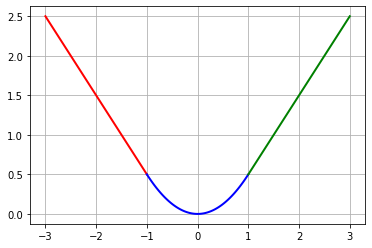

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-3, -1, 100)
y1 = np.abs(x1) - 0.5

x2 = np.linspace(-1, 1, 100)
y2 = 0.5 * np.power(x2, 2)

x3 = np.linspace(1, 3, 100)
y3 = np.abs(x3) - 0.5

plt.figure(facecolor='w')
plt.plot(x1, y1, 'r-', linewidth=2)
plt.plot(x2, y2, 'b-', linewidth=2)
plt.plot(x3, y3, 'g-', linewidth=2)
plt.grid()

# 4.总结
Fast RCNN解决了SPP和RCNN的大部分问题，剩下最后的一个问题没有解决，那就是候选框的提取过程，这个过程依旧非常耗时(SS算法)